## Instalações

In [ ]:
!pip install tensordict
# Esse pacote é uma biblioteca que fornece um dicionário de tensores
# (estrutura de dados para armazenar e manipular múltiplos tensores, que são fundamentais em muitas operações de aprendizado de máquina e computação científica).
!pip install torchrl
# Este pacote é relacionado ao uso da biblioteca PyTorch para Reinforcement Learning (RL, ou Aprendizado por Reforço).
# torchrl é um complemento focado em fornecer ferramentas e utilitários específicos para Aprendizado por Reforço.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

In [ ]:
!pip install --upgrade torch torchvision
# torch refere-se ao PyTorch,
# biblioteca de aprendizado de máquina utilizada para aplicações de deep learning, especialmente em visão computacional e processamento de linguagem natural.
# torchvision é uma biblioteca que complementa o PyTorch com ferramentas específicas para visão computacional.
# Ela inclui conjuntos de dados (datasets) populares, modelos de redes neurais pré-treinados, e funções para transformar imagens.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 808.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 2.9 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.3.0
    Uninstalling triton-2.3.0:
      Successfully uninstalled triton-2.3.0
  Attempting uninstall: torch
    Found existing installation: torch 2.3.0+cu121
    Uninstalling torch-2.3.0+cu121:
      Successfully uninstalled torch-2.3.0+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.18.0+cu121
    Uninstalling torchvision-0.18.0+cu121:
      Successfully uninstalled torchvision-0.18.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.0+cu121 requires torch==2.3.0, but you have torch 2.3.1

In [ ]:
!pip install av
# av é uma biblioteca de Python que proporciona uma interface simplificada para a manipulação de áudio e vídeo.
# Esta biblioteca é um contêiner sobre a popular biblioteca de multimídia FFmpeg,
# que é capaz de decodificar, codificar, transcodificar, mux, demux, stream, filtrar e reproduzir praticamente tudo que os seres humanos e máquinas criaram.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 14.9 MB/s eta 0:00:00


## Importações

In [ ]:
import torch #  permitindo operações avançadas de aprendizado de máquina e manipulação de tensores.
import time #  oferece 314577 relacionadas ao tempo, como obter a hora atual, pausar a execução do programa, e medir intervalos de tempo.

In [ ]:
import torchvision
from google.colab import drive
drive.mount('/content/drive')
import json
import pandas as pd

Mounted at /content/drive


In [ ]:
from torchrl.envs import GymEnv, StepCounter, TransformedEnv
# GymEnv: Classe que integra ambientes do OpenAI Gym com a biblioteca torchrl, permitindo o uso de ambientes padrão de Reinforcement Learning.
# StepCounter: Um wrapper para contar o número de passos realizados em um ambiente.
# TransformedEnv: Um wrapper que aplica transformações ao ambiente, como normalização de observações ou recompensas.
from torchrl.modules import EGreedyModule, MLP, QValueModule
# EGreedyModule: Implementa uma política epsilon-greedy, que escolhe ações aleatoriamente com probabilidade epsilon, e a melhor ação com probabilidade 1-epsilon.
# MLP: Multi-Layer Perceptron, uma rede neural feed-forward composta por múltiplas camadas densamente conectadas.
# QValueModule: Um módulo específico para calcular valores Q, usados em algoritmos de Q-learning.
from torchrl.collectors import SyncDataCollector
# SyncDataCollector: Coletor de dados síncrono, usado para coletar experiências do ambiente de forma síncrona, que é necessário para treinar modelos de RL.
from torchrl.data import LazyTensorStorage, ReplayBuffer, TensorDictReplayBuffer, ListStorage
# LazyTensorStorage: Armazena tensores de maneira eficiente, com carregamento atrasado.
# ReplayBuffer: Buffer de replay, usado para armazenar e amostrar experiências anteriores, crucial para métodos de RL como DQN.
from torchrl.objectives import DQNLoss, SoftUpdate
# DQNLoss: Implementa a função de perda para o algoritmo DQN (Deep Q-Network).
# SoftUpdate: Função para atualização suave dos parâmetros do modelo, frequentemente usada em algoritmos de RL para atualizar gradualmente uma rede alvo.
from torchrl._utils import logger as torchrl_logger
# logger: Utilitário de registro (logging) usado internamente pela biblioteca torchrl para registrar mensagens de depuração e informações durante a execução.
from torchrl.record import CSVLogger, VideoRecorder
# CSVLogger: Logger que registra dados em um arquivo CSV, útil para monitorar o treinamento e resultados.
# VideoRecorder: Grava vídeos das execuções dos ambientes, útil para visualizar o comportamento de agentes de RL.

from tensordict.nn import TensorDictModule as Mod, TensorDictSequential as Seq
# TensorDictModule (Mod): Um módulo que opera sobre TensorDicts, que são dicionários especializados em armazenar tensores.
# TensorDictSequential (Seq): Similar ao torch.nn.Sequential, mas opera sobre TensorDicts,
# permitindo a construção de modelos sequenciais que trabalham com múltiplos tensores de entrada e saída.

from torch.optim import Adam
# Adam: Um otimizador amplamente utilizado, que combina as vantagens dos métodos AdaGrad e RMSProp,
# ajustando os passos de atualização com base em estimativas de momentos de primeira e segunda ordem dos gradientes.

In [ ]:
import matplotlib.pyplot as plt
from torchrl.data.replay_buffers.samplers import PrioritizedSampler
from collections import deque
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Funções Auxiliares

In [ ]:
def salvar_array(score_list_1, Sucessos, Desempenho_Medio, eval_score, versao="PER", epoch=1):

    recomp_ep = np.array(score_list_1)#.reshape(-1, 1)
    recomp_ep_eval = np.array(eval_score)#.reshape(-1, 1)
    sucess_rates = np.array(Sucessos)#.reshape(-1, 1)
    recomp_med_eval_ep = np.array(Desempenho_Medio).reshape(1, )


    array_coluna1 = recomp_ep
    array_coluna2 = recomp_ep_eval
    array_coluna3 = sucess_rates
    array_coluna4 = recomp_med_eval_ep


    # Preenchendo os arrays com tamanhos diferentes para que tenham o mesmo tamanho
    tamanho_maximo = max(len(array_coluna1), len(array_coluna2), len(array_coluna3), len(array_coluna4))
    array_coluna1 = np.pad(array_coluna1, (0, tamanho_maximo - len(array_coluna1)), mode='constant', constant_values=-9999)
    array_coluna2 = np.pad(array_coluna2, (0, tamanho_maximo - len(array_coluna2)), mode='constant', constant_values=-9999)
    array_coluna3 = np.pad(array_coluna3, (0, tamanho_maximo - len(array_coluna3)), mode='constant', constant_values=-9999)
    array_coluna4 = np.pad(array_coluna4, (0, tamanho_maximo - len(array_coluna4)), mode='constant', constant_values=-9999)

    # Criando o DataFrame com os arrays de colunas
    df = pd.DataFrame({'Rewards_ep': array_coluna1,
                   'Rewards_ep_eval': array_coluna2,
                   'Sucess_Rates': array_coluna3,
                       'Mean_Sucess_Rates': array_coluna4})

    # Substituindo os valores de preenchimento por None
    df = df.replace(-9999, None)
    # Salvando o DataFrame em uma planilha Excel
    # caminho_arquivo = 'Result_of_Epoch_'+ str(epoch) +'.xlsx'
    caminho_arquivo = '/content/drive/My Drive/DADOS IA PYTORCH/Versão_V2_brake500_10/Result_of_Epoch_'+ str(epoch) + '_' + str(versao) +'.xlsx'
    df.to_excel(caminho_arquivo, index=False)

    print("DataFrame salvo em", caminho_arquivo)

In [ ]:
def guarda_dados(dados, nome_arquivo, nome_pasta):
        nome_arquivo = nome_arquivo
        nome_pasta = nome_pasta
        caminho_arquivo = "/content/drive/My Drive/DADOS IA PYTORCH/" + nome_pasta + "/"
        caminho_arquivo = caminho_arquivo + nome_arquivo
        caminho_arquivo = caminho_arquivo + ".txt"

        dados = json.dumps(dados)

        with open(caminho_arquivo, "w") as arquivo:
            arquivo.write(dados)

# PER em PyTorch

## Configuração do Agente

### Construindo o ambiente - OK

In [ ]:
torch.manual_seed(0)
env = TransformedEnv(GymEnv("CartPole-v1"), StepCounter())
env.set_seed(0)

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


795726461

### Projetando uma política

In [ ]:
value_mlp = MLP(out_features=env.action_spec.shape[-1], num_cells=[64, 64])

value_net = Mod(value_mlp, in_keys=["observation"], out_keys=["action_value"])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
policy = Seq(value_net, QValueModule(spec=env.action_spec))

exploration_module = EGreedyModule(env.action_spec, annealing_num_steps=100_000, eps_init=0.11, eps_end=0.10)

policy_explore = Seq(policy, exploration_module)


### Coletor de dados e buffer de reprodução

In [ ]:
init_rand_steps = 5000

frames_per_batch = 500
optim_steps = 25

collector = SyncDataCollector(
    env,
    policy_explore,
    frames_per_batch=frames_per_batch,
    total_frames=-1,
    init_random_frames=init_rand_steps,
)

size = 100_000
rb = ReplayBuffer(
                storage=LazyTensorStorage(size),
                sampler=PrioritizedSampler(max_capacity=size, alpha=0.6, beta=0.4),
                batch_size=200)

### Módulo de perda e otimizador

In [ ]:
loss = DQNLoss(value_network=policy, action_space=env.action_spec, delay_value=True, reduction='none')

optim = Adam(loss.parameters(), lr=0.01)

updater = SoftUpdate(loss, eps=0.99)


### Registrador

Usaremos um registrador CSV para registrar nossos resultados e salvar vídeos renderizados.

In [ ]:
path = "./training_loop" # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.

# CSVLogger: Um logger que registra dados em formato CSV, útil para monitorar o progresso do treinamento e analisar resultados.
logger = CSVLogger(exp_name="dqn", log_dir=path, video_format="mp4")
# exp_name="dqn": Nome da experiência, usado como um identificador para os logs. Aqui, é definido como "dqn" (Deep Q-Network).
# log_dir=path: Diretório onde os logs serão salvos. Neste caso, é o diretório definido anteriormente, ./training_loop.
# video_format="mp4": Especifica o formato de vídeo para gravação. Aqui, está configurado para MP4.

# Um objeto que grava vídeos das execuções do ambiente durante o treinamento, útil para visualizar o comportamento do agente.
video_recorder = VideoRecorder(logger, tag="video")
# logger: O logger criado na linha anterior, que será usado para salvar os vídeos.
# tag="video": Uma tag para identificar os vídeos nos logs. Aqui, está definido como "video".

# Um wrapper que aplica transformações ao ambiente, como normalização de observações ou recompensas, e também permite a adição de funcionalidades como gravação de vídeos.
record_env = TransformedEnv(
    GymEnv("CartPole-v1", from_pixels=True, pixels_only=False), video_recorder
)
# GymEnv("CartPole-v1", from_pixels=True, pixels_only=False): Cria um ambiente GymEnv para o ambiente "CartPole-v1" do OpenAI Gym.
# from_pixels=True: Indica que o ambiente será renderizado a partir de pixels, permitindo a gravação visual do ambiente.
# pixels_only=False: Indica que tanto as observações em forma de pixels quanto outras observações (como a posição e a velocidade do carrinho) serão retornadas pelo ambiente.
# video_recorder: O gravador de vídeos criado na linha anterior, que será usado para gravar as execuções do ambiente.

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


## Ciclo de treinamento

2024-06-03 23:28:09,015 [torchrl][INFO] Episodes: 274, Max num steps: 100, rb length 5500
2024-06-03 23:28:10,216 [torchrl][INFO] Episodes: 324, Max num steps: 100, rb length 6000
2024-06-03 23:28:11,430 [torchrl][INFO] Episodes: 373, Max num steps: 100, rb length 6500
2024-06-03 23:28:12,635 [torchrl][INFO] Episodes: 425, Max num steps: 100, rb length 7000
2024-06-03 23:28:14,043 [torchrl][INFO] Episodes: 464, Max num steps: 100, rb length 7500
2024-06-03 23:28:15,238 [torchrl][INFO] Episodes: 510, Max num steps: 100, rb length 8000
2024-06-03 23:28:16,456 [torchrl][INFO] Episodes: 561, Max num steps: 100, rb length 8500
2024-06-03 23:28:18,003 [torchrl][INFO] Episodes: 613, Max num steps: 100, rb length 9000


alcançou 500!!!!!!


2024-06-03 23:28:19,669 [torchrl][INFO] Episodes: 614, Max num steps: 500, rb length 9500
2024-06-03 23:28:21,452 [torchrl][INFO] Episodes: 664, Max num steps: 500, rb length 10000
2024-06-03 23:28:22,820 [torchrl][INFO] Episodes: 671, Max num steps: 500, rb length 10500
2024-06-03 23:28:23,976 [torchrl][INFO] Episodes: 674, Max num steps: 500, rb length 11000
2024-06-03 23:28:25,124 [torchrl][INFO] Episodes: 679, Max num steps: 500, rb length 11500
2024-06-03 23:28:26,306 [torchrl][INFO] Episodes: 698, Max num steps: 500, rb length 12000
2024-06-03 23:28:27,457 [torchrl][INFO] Episodes: 701, Max num steps: 500, rb length 12500
2024-06-03 23:28:28,617 [torchrl][INFO] Episodes: 712, Max num steps: 500, rb length 13000
2024-06-03 23:28:29,748 [torchrl][INFO] Episodes: 719, Max num steps: 500, rb length 13500
2024-06-03 23:28:30,911 [torchrl][INFO] Episodes: 763, Max num steps: 500, rb length 14000
2024-06-03 23:28:32,050 [torchrl][INFO] Episodes: 768, Max num steps: 500, rb length 14500


alcançou 500!!!!!!


2024-06-03 23:28:33,694 [torchrl][INFO] Episodes: 769, Max num steps: 500, rb length 15000
2024-06-03 23:28:35,335 [torchrl][INFO] Episodes: 772, Max num steps: 500, rb length 15500
2024-06-03 23:28:37,185 [torchrl][INFO] Episodes: 774, Max num steps: 500, rb length 16000
2024-06-03 23:28:38,340 [torchrl][INFO] Episodes: 778, Max num steps: 500, rb length 16500
2024-06-03 23:28:39,491 [torchrl][INFO] Episodes: 784, Max num steps: 500, rb length 17000
2024-06-03 23:28:40,599 [torchrl][INFO] Episodes: 788, Max num steps: 500, rb length 17500
2024-06-03 23:28:41,744 [torchrl][INFO] Episodes: 793, Max num steps: 500, rb length 18000
2024-06-03 23:28:42,887 [torchrl][INFO] Episodes: 795, Max num steps: 500, rb length 18500
2024-06-03 23:28:43,988 [torchrl][INFO] Episodes: 798, Max num steps: 500, rb length 19000
2024-06-03 23:28:45,102 [torchrl][INFO] Episodes: 802, Max num steps: 500, rb length 19500
2024-06-03 23:28:46,214 [torchrl][INFO] Episodes: 805, Max num steps: 500, rb length 20000

alcançou 500!!!!!!


2024-06-03 23:29:12,743 [torchrl][INFO] Episodes: 866, Max num steps: 500, rb length 30000
2024-06-03 23:29:13,891 [torchrl][INFO] Episodes: 871, Max num steps: 500, rb length 30500
2024-06-03 23:29:15,030 [torchrl][INFO] Episodes: 875, Max num steps: 500, rb length 31000
2024-06-03 23:29:16,189 [torchrl][INFO] Episodes: 881, Max num steps: 500, rb length 31500
2024-06-03 23:29:17,730 [torchrl][INFO] Episodes: 883, Max num steps: 500, rb length 32000
2024-06-03 23:29:19,378 [torchrl][INFO] Episodes: 886, Max num steps: 500, rb length 32500
2024-06-03 23:29:21,138 [torchrl][INFO] Episodes: 891, Max num steps: 500, rb length 33000
2024-06-03 23:29:22,275 [torchrl][INFO] Episodes: 896, Max num steps: 500, rb length 33500
2024-06-03 23:29:23,415 [torchrl][INFO] Episodes: 900, Max num steps: 500, rb length 34000
2024-06-03 23:29:24,548 [torchrl][INFO] Episodes: 906, Max num steps: 500, rb length 34500
2024-06-03 23:29:25,899 [torchrl][INFO] Episodes: 910, Max num steps: 500, rb length 35000

alcançou 500!!!!!!


2024-06-03 23:29:56,948 [torchrl][INFO] Episodes: 1023, Max num steps: 500, rb length 47000
2024-06-03 23:29:58,116 [torchrl][INFO] Episodes: 1029, Max num steps: 500, rb length 47500
2024-06-03 23:29:59,287 [torchrl][INFO] Episodes: 1030, Max num steps: 500, rb length 48000
2024-06-03 23:30:00,694 [torchrl][INFO] Episodes: 1036, Max num steps: 500, rb length 48500
2024-06-03 23:30:02,335 [torchrl][INFO] Episodes: 1040, Max num steps: 500, rb length 49000
2024-06-03 23:30:04,097 [torchrl][INFO] Episodes: 1044, Max num steps: 500, rb length 49500
2024-06-03 23:30:05,497 [torchrl][INFO] Episodes: 1050, Max num steps: 500, rb length 50000
2024-06-03 23:30:06,663 [torchrl][INFO] Episodes: 1054, Max num steps: 500, rb length 50500
2024-06-03 23:30:07,840 [torchrl][INFO] Episodes: 1059, Max num steps: 500, rb length 51000
2024-06-03 23:30:08,995 [torchrl][INFO] Episodes: 1065, Max num steps: 500, rb length 51500
2024-06-03 23:30:10,354 [torchrl][INFO] Episodes: 1068, Max num steps: 500, rb l

alcançou 500!!!!!!


2024-06-03 23:32:17,732 [torchrl][INFO] Episodes: 1468, Max num steps: 500, rb length 100000
2024-06-03 23:32:19,516 [torchrl][INFO] Episodes: 1474, Max num steps: 500, rb length 100000
2024-06-03 23:32:20,990 [torchrl][INFO] Episodes: 1477, Max num steps: 500, rb length 100000
2024-06-03 23:32:22,149 [torchrl][INFO] Episodes: 1482, Max num steps: 500, rb length 100000
2024-06-03 23:32:23,298 [torchrl][INFO] Episodes: 1485, Max num steps: 500, rb length 100000
2024-06-03 23:32:24,455 [torchrl][INFO] Episodes: 1490, Max num steps: 500, rb length 100000
2024-06-03 23:32:25,621 [torchrl][INFO] Episodes: 1496, Max num steps: 500, rb length 100000
2024-06-03 23:32:26,767 [torchrl][INFO] Episodes: 1501, Max num steps: 500, rb length 100000
2024-06-03 23:32:27,925 [torchrl][INFO] Episodes: 1505, Max num steps: 500, rb length 100000
2024-06-03 23:32:29,229 [torchrl][INFO] Episodes: 1509, Max num steps: 500, rb length 100000
2024-06-03 23:32:30,390 [torchrl][INFO] Episodes: 1513, Max num steps:

alcançou 500!!!!!!


2024-06-03 23:34:12,527 [torchrl][INFO] Episodes: 1790, Max num steps: 500, rb length 100000
2024-06-03 23:34:13,699 [torchrl][INFO] Episodes: 1794, Max num steps: 500, rb length 100000
2024-06-03 23:34:14,876 [torchrl][INFO] Episodes: 1799, Max num steps: 500, rb length 100000
2024-06-03 23:34:16,049 [torchrl][INFO] Episodes: 1803, Max num steps: 500, rb length 100000
2024-06-03 23:34:17,275 [torchrl][INFO] Episodes: 1806, Max num steps: 500, rb length 100000
2024-06-03 23:34:18,960 [torchrl][INFO] Episodes: 1810, Max num steps: 500, rb length 100000
2024-06-03 23:34:20,686 [torchrl][INFO] Episodes: 1812, Max num steps: 500, rb length 100000
2024-06-03 23:34:22,440 [torchrl][INFO] Episodes: 1817, Max num steps: 500, rb length 100000
2024-06-03 23:34:23,631 [torchrl][INFO] Episodes: 1821, Max num steps: 500, rb length 100000
2024-06-03 23:34:24,816 [torchrl][INFO] Episodes: 1829, Max num steps: 500, rb length 100000
2024-06-03 23:34:26,022 [torchrl][INFO] Episodes: 1837, Max num steps:

alcançou 500!!!!!!


2024-06-03 23:34:28,564 [torchrl][INFO] Episodes: 1841, Max num steps: 500, rb length 100000
2024-06-03 23:34:29,738 [torchrl][INFO] Episodes: 1846, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:34:30,918 [torchrl][INFO] Episodes: 1847, Max num steps: 500, rb length 100000
2024-06-03 23:34:32,080 [torchrl][INFO] Episodes: 1850, Max num steps: 500, rb length 100000
2024-06-03 23:34:33,699 [torchrl][INFO] Episodes: 1855, Max num steps: 500, rb length 100000
2024-06-03 23:34:35,380 [torchrl][INFO] Episodes: 1860, Max num steps: 500, rb length 100000
2024-06-03 23:34:37,132 [torchrl][INFO] Episodes: 1862, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:34:38,295 [torchrl][INFO] Episodes: 1866, Max num steps: 500, rb length 100000
2024-06-03 23:34:39,428 [torchrl][INFO] Episodes: 1874, Max num steps: 500, rb length 100000
2024-06-03 23:34:40,575 [torchrl][INFO] Episodes: 1876, Max num steps: 500, rb length 100000
2024-06-03 23:34:41,710 [torchrl][INFO] Episodes: 1885, Max num steps: 500, rb length 100000
2024-06-03 23:34:42,844 [torchrl][INFO] Episodes: 1888, Max num steps: 500, rb length 100000
2024-06-03 23:34:43,952 [torchrl][INFO] Episodes: 1893, Max num steps: 500, rb length 100000
2024-06-03 23:34:45,073 [torchrl][INFO] Episodes: 1894, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:34:46,229 [torchrl][INFO] Episodes: 1898, Max num steps: 500, rb length 100000
2024-06-03 23:34:47,585 [torchrl][INFO] Episodes: 1904, Max num steps: 500, rb length 100000
2024-06-03 23:34:49,472 [torchrl][INFO] Episodes: 1909, Max num steps: 500, rb length 100000
2024-06-03 23:34:51,252 [torchrl][INFO] Episodes: 1914, Max num steps: 500, rb length 100000
2024-06-03 23:34:52,701 [torchrl][INFO] Episodes: 1919, Max num steps: 500, rb length 100000
2024-06-03 23:34:53,865 [torchrl][INFO] Episodes: 1924, Max num steps: 500, rb length 100000
2024-06-03 23:34:55,015 [torchrl][INFO] Episodes: 1929, Max num steps: 500, rb length 100000
2024-06-03 23:34:56,168 [torchrl][INFO] Episodes: 1931, Max num steps: 500, rb length 100000
2024-06-03 23:34:57,334 [torchrl][INFO] Episodes: 1936, Max num steps: 500, rb length 100000
2024-06-03 23:34:58,507 [torchrl][INFO] Episodes: 1941, Max num steps: 500, rb length 100000
2024-06-03 23:34:59,659 [torchrl][INFO] Episodes: 1942, Max num steps:

alcançou 500!!!!!!


2024-06-03 23:35:05,293 [torchrl][INFO] Episodes: 1961, Max num steps: 500, rb length 100000
2024-06-03 23:35:07,019 [torchrl][INFO] Episodes: 1964, Max num steps: 500, rb length 100000
2024-06-03 23:35:08,176 [torchrl][INFO] Episodes: 1967, Max num steps: 500, rb length 100000
2024-06-03 23:35:09,340 [torchrl][INFO] Episodes: 1969, Max num steps: 500, rb length 100000
2024-06-03 23:35:10,496 [torchrl][INFO] Episodes: 1971, Max num steps: 500, rb length 100000
2024-06-03 23:35:11,663 [torchrl][INFO] Episodes: 1975, Max num steps: 500, rb length 100000
2024-06-03 23:35:12,855 [torchrl][INFO] Episodes: 1981, Max num steps: 500, rb length 100000
2024-06-03 23:35:14,199 [torchrl][INFO] Episodes: 1987, Max num steps: 500, rb length 100000
2024-06-03 23:35:15,346 [torchrl][INFO] Episodes: 1992, Max num steps: 500, rb length 100000
2024-06-03 23:35:16,505 [torchrl][INFO] Episodes: 2000, Max num steps: 500, rb length 100000
2024-06-03 23:35:18,033 [torchrl][INFO] Episodes: 2004, Max num steps:

alcançou 500!!!!!!


2024-06-03 23:35:22,688 [torchrl][INFO] Episodes: 2014, Max num steps: 500, rb length 100000
2024-06-03 23:35:23,852 [torchrl][INFO] Episodes: 2019, Max num steps: 500, rb length 100000
2024-06-03 23:35:25,013 [torchrl][INFO] Episodes: 2026, Max num steps: 500, rb length 100000
2024-06-03 23:35:26,195 [torchrl][INFO] Episodes: 2030, Max num steps: 500, rb length 100000
2024-06-03 23:35:27,357 [torchrl][INFO] Episodes: 2036, Max num steps: 500, rb length 100000
2024-06-03 23:35:28,522 [torchrl][INFO] Episodes: 2041, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:35:29,660 [torchrl][INFO] Episodes: 2042, Max num steps: 500, rb length 100000
2024-06-03 23:35:30,827 [torchrl][INFO] Episodes: 2046, Max num steps: 500, rb length 100000
2024-06-03 23:35:32,153 [torchrl][INFO] Episodes: 2047, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:35:33,802 [torchrl][INFO] Episodes: 2052, Max num steps: 500, rb length 100000
2024-06-03 23:35:35,693 [torchrl][INFO] Episodes: 2057, Max num steps: 500, rb length 100000
2024-06-03 23:35:38,011 [torchrl][INFO] Episodes: 2062, Max num steps: 500, rb length 100000
2024-06-03 23:35:39,693 [torchrl][INFO] Episodes: 2065, Max num steps: 500, rb length 100000
2024-06-03 23:35:41,384 [torchrl][INFO] Episodes: 2068, Max num steps: 500, rb length 100000
2024-06-03 23:35:42,530 [torchrl][INFO] Episodes: 2074, Max num steps: 500, rb length 100000
2024-06-03 23:35:43,691 [torchrl][INFO] Episodes: 2075, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:35:44,851 [torchrl][INFO] Episodes: 2079, Max num steps: 500, rb length 100000
2024-06-03 23:35:45,981 [torchrl][INFO] Episodes: 2081, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:35:47,129 [torchrl][INFO] Episodes: 2084, Max num steps: 500, rb length 100000
2024-06-03 23:35:48,451 [torchrl][INFO] Episodes: 2090, Max num steps: 500, rb length 100000
2024-06-03 23:35:50,088 [torchrl][INFO] Episodes: 2091, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:35:51,818 [torchrl][INFO] Episodes: 2094, Max num steps: 500, rb length 100000
2024-06-03 23:35:53,390 [torchrl][INFO] Episodes: 2096, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:35:54,552 [torchrl][INFO] Episodes: 2098, Max num steps: 500, rb length 100000
2024-06-03 23:35:55,718 [torchrl][INFO] Episodes: 2099, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:35:56,874 [torchrl][INFO] Episodes: 2103, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:35:58,021 [torchrl][INFO] Episodes: 2105, Max num steps: 500, rb length 100000
2024-06-03 23:35:59,159 [torchrl][INFO] Episodes: 2107, Max num steps: 500, rb length 100000
2024-06-03 23:36:00,294 [torchrl][INFO] Episodes: 2108, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:36:01,434 [torchrl][INFO] Episodes: 2112, Max num steps: 500, rb length 100000
2024-06-03 23:36:02,782 [torchrl][INFO] Episodes: 2114, Max num steps: 500, rb length 100000
2024-06-03 23:36:04,376 [torchrl][INFO] Episodes: 2116, Max num steps: 500, rb length 100000
2024-06-03 23:36:06,038 [torchrl][INFO] Episodes: 2121, Max num steps: 500, rb length 100000
2024-06-03 23:36:07,820 [torchrl][INFO] Episodes: 2128, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:36:09,091 [torchrl][INFO] Episodes: 2129, Max num steps: 500, rb length 100000
2024-06-03 23:36:10,255 [torchrl][INFO] Episodes: 2130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:36:11,432 [torchrl][INFO] Episodes: 2135, Max num steps: 500, rb length 100000
2024-06-03 23:36:12,593 [torchrl][INFO] Episodes: 2138, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:36:13,751 [torchrl][INFO] Episodes: 2139, Max num steps: 500, rb length 100000
2024-06-03 23:36:14,916 [torchrl][INFO] Episodes: 2142, Max num steps: 500, rb length 100000
2024-06-03 23:36:16,083 [torchrl][INFO] Episodes: 2144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:36:17,247 [torchrl][INFO] Episodes: 2145, Max num steps: 500, rb length 100000
2024-06-03 23:36:18,518 [torchrl][INFO] Episodes: 2146, Max num steps: 500, rb length 100000
2024-06-03 23:36:20,170 [torchrl][INFO] Episodes: 2150, Max num steps: 500, rb length 100000
2024-06-03 23:36:21,876 [torchrl][INFO] Episodes: 2152, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:36:23,516 [torchrl][INFO] Episodes: 2156, Max num steps: 500, rb length 100000
2024-06-03 23:36:24,671 [torchrl][INFO] Episodes: 2159, Max num steps: 500, rb length 100000
2024-06-03 23:36:25,828 [torchrl][INFO] Episodes: 2161, Max num steps: 500, rb length 100000
2024-06-03 23:36:27,163 [torchrl][INFO] Episodes: 2166, Max num steps: 500, rb length 100000
2024-06-03 23:36:28,333 [torchrl][INFO] Episodes: 2168, Max num steps: 500, rb length 100000
2024-06-03 23:36:29,502 [torchrl][INFO] Episodes: 2172, Max num steps: 500, rb length 100000
2024-06-03 23:36:30,682 [torchrl][INFO] Episodes: 2174, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:36:31,873 [torchrl][INFO] Episodes: 2175, Max num steps: 500, rb length 100000
2024-06-03 23:36:33,046 [torchrl][INFO] Episodes: 2176, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:36:34,653 [torchrl][INFO] Episodes: 2178, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:36:36,336 [torchrl][INFO] Episodes: 2179, Max num steps: 500, rb length 100000
2024-06-03 23:36:38,127 [torchrl][INFO] Episodes: 2180, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:36:39,302 [torchrl][INFO] Episodes: 2181, Max num steps: 500, rb length 100000
2024-06-03 23:36:40,480 [torchrl][INFO] Episodes: 2186, Max num steps: 500, rb length 100000
2024-06-03 23:36:41,662 [torchrl][INFO] Episodes: 2187, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:36:42,850 [torchrl][INFO] Episodes: 2188, Max num steps: 500, rb length 100000
2024-06-03 23:36:44,032 [torchrl][INFO] Episodes: 2191, Max num steps: 500, rb length 100000
2024-06-03 23:36:45,207 [torchrl][INFO] Episodes: 2192, Max num steps: 500, rb length 100000
2024-06-03 23:36:46,384 [torchrl][INFO] Episodes: 2197, Max num steps: 500, rb length 100000
2024-06-03 23:36:47,560 [torchrl][INFO] Episodes: 2198, Max num steps: 500, rb length 100000
2024-06-03 23:36:49,084 [torchrl][INFO] Episodes: 2201, Max num steps: 500, rb length 100000
2024-06-03 23:36:50,729 [torchrl][INFO] Episodes: 2203, Max num steps: 500, rb length 100000
2024-06-03 23:36:52,748 [torchrl][INFO] Episodes: 2204, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:36:54,163 [torchrl][INFO] Episodes: 2205, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:36:55,336 [torchrl][INFO] Episodes: 2209, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:36:56,507 [torchrl][INFO] Episodes: 2210, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:36:57,687 [torchrl][INFO] Episodes: 2211, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:36:58,855 [torchrl][INFO] Episodes: 2212, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:00,023 [torchrl][INFO] Episodes: 2213, Max num steps: 500, rb length 100000
2024-06-03 23:37:01,159 [torchrl][INFO] Episodes: 2215, Max num steps: 500, rb length 100000
2024-06-03 23:37:02,313 [torchrl][INFO] Episodes: 2218, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:03,608 [torchrl][INFO] Episodes: 2220, Max num steps: 500, rb length 100000
2024-06-03 23:37:05,229 [torchrl][INFO] Episodes: 2223, Max num steps: 500, rb length 100000
2024-06-03 23:37:06,920 [torchrl][INFO] Episodes: 2227, Max num steps: 500, rb length 100000
2024-06-03 23:37:08,539 [torchrl][INFO] Episodes: 2228, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:09,720 [torchrl][INFO] Episodes: 2230, Max num steps: 500, rb length 100000
2024-06-03 23:37:10,888 [torchrl][INFO] Episodes: 2233, Max num steps: 500, rb length 100000
2024-06-03 23:37:12,066 [torchrl][INFO] Episodes: 2235, Max num steps: 500, rb length 100000
2024-06-03 23:37:13,248 [torchrl][INFO] Episodes: 2236, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:14,428 [torchrl][INFO] Episodes: 2237, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:15,755 [torchrl][INFO] Episodes: 2238, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:16,906 [torchrl][INFO] Episodes: 2240, Max num steps: 500, rb length 100000
2024-06-03 23:37:18,074 [torchrl][INFO] Episodes: 2241, Max num steps: 500, rb length 100000
2024-06-03 23:37:19,679 [torchrl][INFO] Episodes: 2244, Max num steps: 500, rb length 100000
2024-06-03 23:37:21,330 [torchrl][INFO] Episodes: 2246, Max num steps: 500, rb length 100000
2024-06-03 23:37:23,062 [torchrl][INFO] Episodes: 2248, Max num steps: 500, rb length 100000
2024-06-03 23:37:24,351 [torchrl][INFO] Episodes: 2252, Max num steps: 500, rb length 100000
2024-06-03 23:37:25,498 [torchrl][INFO] Episodes: 2254, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:26,645 [torchrl][INFO] Episodes: 2255, Max num steps: 500, rb length 100000
2024-06-03 23:37:27,788 [torchrl][INFO] Episodes: 2257, Max num steps: 500, rb length 100000
2024-06-03 23:37:28,930 [torchrl][INFO] Episodes: 2259, Max num steps: 500, rb length 100000
2024-06-03 23:37:30,071 [torchrl][INFO] Episodes: 2260, Max num steps: 500, rb length 100000
2024-06-03 23:37:31,214 [torchrl][INFO] Episodes: 2265, Max num steps: 500, rb length 100000
2024-06-03 23:37:32,371 [torchrl][INFO] Episodes: 2267, Max num steps: 500, rb length 100000
2024-06-03 23:37:33,624 [torchrl][INFO] Episodes: 2268, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:35,434 [torchrl][INFO] Episodes: 2270, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:37,161 [torchrl][INFO] Episodes: 2274, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:38,996 [torchrl][INFO] Episodes: 2275, Max num steps: 500, rb length 100000
2024-06-03 23:37:40,168 [torchrl][INFO] Episodes: 2276, Max num steps: 500, rb length 100000
2024-06-03 23:37:41,325 [torchrl][INFO] Episodes: 2277, Max num steps: 500, rb length 100000
2024-06-03 23:37:42,482 [torchrl][INFO] Episodes: 2278, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:43,644 [torchrl][INFO] Episodes: 2279, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:44,803 [torchrl][INFO] Episodes: 2281, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:45,956 [torchrl][INFO] Episodes: 2282, Max num steps: 500, rb length 100000
2024-06-03 23:37:47,102 [torchrl][INFO] Episodes: 2283, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:48,267 [torchrl][INFO] Episodes: 2284, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:49,791 [torchrl][INFO] Episodes: 2285, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:51,434 [torchrl][INFO] Episodes: 2286, Max num steps: 500, rb length 100000
2024-06-03 23:37:53,200 [torchrl][INFO] Episodes: 2287, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:54,606 [torchrl][INFO] Episodes: 2288, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:55,790 [torchrl][INFO] Episodes: 2289, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:56,966 [torchrl][INFO] Episodes: 2291, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:58,151 [torchrl][INFO] Episodes: 2292, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:37:59,331 [torchrl][INFO] Episodes: 2293, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:00,513 [torchrl][INFO] Episodes: 2294, Max num steps: 500, rb length 100000
2024-06-03 23:38:01,897 [torchrl][INFO] Episodes: 2295, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:03,072 [torchrl][INFO] Episodes: 2296, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:04,489 [torchrl][INFO] Episodes: 2297, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:06,142 [torchrl][INFO] Episodes: 2300, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:08,122 [torchrl][INFO] Episodes: 2302, Max num steps: 500, rb length 100000
2024-06-03 23:38:09,876 [torchrl][INFO] Episodes: 2303, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:11,652 [torchrl][INFO] Episodes: 2304, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:13,375 [torchrl][INFO] Episodes: 2305, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:14,616 [torchrl][INFO] Episodes: 2306, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:15,750 [torchrl][INFO] Episodes: 2307, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:16,870 [torchrl][INFO] Episodes: 2308, Max num steps: 500, rb length 100000
2024-06-03 23:38:18,026 [torchrl][INFO] Episodes: 2309, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:19,196 [torchrl][INFO] Episodes: 2310, Max num steps: 500, rb length 100000
2024-06-03 23:38:20,364 [torchrl][INFO] Episodes: 2311, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:21,727 [torchrl][INFO] Episodes: 2312, Max num steps: 500, rb length 100000
2024-06-03 23:38:23,378 [torchrl][INFO] Episodes: 2314, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:25,101 [torchrl][INFO] Episodes: 2315, Max num steps: 500, rb length 100000
2024-06-03 23:38:26,657 [torchrl][INFO] Episodes: 2316, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:27,820 [torchrl][INFO] Episodes: 2317, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:29,159 [torchrl][INFO] Episodes: 2318, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:30,312 [torchrl][INFO] Episodes: 2319, Max num steps: 500, rb length 100000
2024-06-03 23:38:31,462 [torchrl][INFO] Episodes: 2321, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:32,622 [torchrl][INFO] Episodes: 2322, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:33,783 [torchrl][INFO] Episodes: 2323, Max num steps: 500, rb length 100000
2024-06-03 23:38:34,934 [torchrl][INFO] Episodes: 2325, Max num steps: 500, rb length 100000
2024-06-03 23:38:36,085 [torchrl][INFO] Episodes: 2327, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:37,685 [torchrl][INFO] Episodes: 2329, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:39,319 [torchrl][INFO] Episodes: 2330, Max num steps: 500, rb length 100000
2024-06-03 23:38:41,064 [torchrl][INFO] Episodes: 2335, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:42,215 [torchrl][INFO] Episodes: 2336, Max num steps: 500, rb length 100000
2024-06-03 23:38:43,368 [torchrl][INFO] Episodes: 2337, Max num steps: 500, rb length 100000
2024-06-03 23:38:44,529 [torchrl][INFO] Episodes: 2340, Max num steps: 500, rb length 100000
2024-06-03 23:38:45,679 [torchrl][INFO] Episodes: 2343, Max num steps: 500, rb length 100000
2024-06-03 23:38:46,832 [torchrl][INFO] Episodes: 2353, Max num steps: 500, rb length 100000
2024-06-03 23:38:47,988 [torchrl][INFO] Episodes: 2357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:49,161 [torchrl][INFO] Episodes: 2358, Max num steps: 500, rb length 100000
2024-06-03 23:38:50,300 [torchrl][INFO] Episodes: 2360, Max num steps: 500, rb length 100000
2024-06-03 23:38:51,987 [torchrl][INFO] Episodes: 2361, Max num steps: 500, rb length 100000
2024-06-03 23:38:53,601 [torchrl][INFO] Episodes: 2362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:55,374 [torchrl][INFO] Episodes: 2363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:56,737 [torchrl][INFO] Episodes: 2364, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:38:57,906 [torchrl][INFO] Episodes: 2367, Max num steps: 500, rb length 100000
2024-06-03 23:38:59,067 [torchrl][INFO] Episodes: 2368, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:00,228 [torchrl][INFO] Episodes: 2369, Max num steps: 500, rb length 100000
2024-06-03 23:39:01,390 [torchrl][INFO] Episodes: 2373, Max num steps: 500, rb length 100000
2024-06-03 23:39:02,523 [torchrl][INFO] Episodes: 2376, Max num steps: 500, rb length 100000
2024-06-03 23:39:03,674 [torchrl][INFO] Episodes: 2378, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:04,820 [torchrl][INFO] Episodes: 2379, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:05,975 [torchrl][INFO] Episodes: 2380, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:07,652 [torchrl][INFO] Episodes: 2381, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:09,299 [torchrl][INFO] Episodes: 2382, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:10,859 [torchrl][INFO] Episodes: 2383, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:12,023 [torchrl][INFO] Episodes: 2385, Max num steps: 500, rb length 100000
2024-06-03 23:39:13,176 [torchrl][INFO] Episodes: 2386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:14,527 [torchrl][INFO] Episodes: 2387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:15,683 [torchrl][INFO] Episodes: 2388, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:16,846 [torchrl][INFO] Episodes: 2389, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:18,036 [torchrl][INFO] Episodes: 2390, Max num steps: 500, rb length 100000
2024-06-03 23:39:19,216 [torchrl][INFO] Episodes: 2395, Max num steps: 500, rb length 100000
2024-06-03 23:39:20,387 [torchrl][INFO] Episodes: 2396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:22,034 [torchrl][INFO] Episodes: 2398, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:23,726 [torchrl][INFO] Episodes: 2400, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:25,389 [torchrl][INFO] Episodes: 2402, Max num steps: 500, rb length 100000
2024-06-03 23:39:26,532 [torchrl][INFO] Episodes: 2403, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:27,697 [torchrl][INFO] Episodes: 2404, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:28,860 [torchrl][INFO] Episodes: 2408, Max num steps: 500, rb length 100000
2024-06-03 23:39:30,015 [torchrl][INFO] Episodes: 2410, Max num steps: 500, rb length 100000
2024-06-03 23:39:31,164 [torchrl][INFO] Episodes: 2411, Max num steps: 500, rb length 100000
2024-06-03 23:39:32,335 [torchrl][INFO] Episodes: 2413, Max num steps: 500, rb length 100000
2024-06-03 23:39:33,493 [torchrl][INFO] Episodes: 2416, Max num steps: 500, rb length 100000
2024-06-03 23:39:34,663 [torchrl][INFO] Episodes: 2418, Max num steps: 500, rb length 100000
2024-06-03 23:39:36,142 [torchrl][INFO] Episodes: 2420, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:37,756 [torchrl][INFO] Episodes: 2421, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:39,764 [torchrl][INFO] Episodes: 2422, Max num steps: 500, rb length 100000
2024-06-03 23:39:41,104 [torchrl][INFO] Episodes: 2424, Max num steps: 500, rb length 100000
2024-06-03 23:39:42,271 [torchrl][INFO] Episodes: 2426, Max num steps: 500, rb length 100000
2024-06-03 23:39:43,433 [torchrl][INFO] Episodes: 2427, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:44,590 [torchrl][INFO] Episodes: 2429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:45,760 [torchrl][INFO] Episodes: 2430, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:46,939 [torchrl][INFO] Episodes: 2431, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:48,113 [torchrl][INFO] Episodes: 2432, Max num steps: 500, rb length 100000
2024-06-03 23:39:49,280 [torchrl][INFO] Episodes: 2439, Max num steps: 500, rb length 100000
2024-06-03 23:39:50,534 [torchrl][INFO] Episodes: 2442, Max num steps: 500, rb length 100000
2024-06-03 23:39:52,172 [torchrl][INFO] Episodes: 2447, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:39:53,888 [torchrl][INFO] Episodes: 2448, Max num steps: 500, rb length 100000
2024-06-03 23:39:55,464 [torchrl][INFO] Episodes: 2451, Max num steps: 500, rb length 100000
2024-06-03 23:39:56,603 [torchrl][INFO] Episodes: 2453, Max num steps: 500, rb length 100000
2024-06-03 23:39:57,753 [torchrl][INFO] Episodes: 2456, Max num steps: 500, rb length 100000
2024-06-03 23:39:58,918 [torchrl][INFO] Episodes: 2460, Max num steps: 500, rb length 100000
2024-06-03 23:40:00,122 [torchrl][INFO] Episodes: 2462, Max num steps: 500, rb length 100000
2024-06-03 23:40:01,464 [torchrl][INFO] Episodes: 2466, Max num steps: 500, rb length 100000
2024-06-03 23:40:02,604 [torchrl][INFO] Episodes: 2470, Max num steps: 500, rb length 100000
2024-06-03 23:40:03,788 [torchrl][INFO] Episodes: 2472, Max num steps: 500, rb length 100000
2024-06-03 23:40:04,958 [torchrl][INFO] Episodes: 2474, Max num steps: 500, rb length 100000
2024-06-03 23:40:06,542 [torchrl][INFO] Episodes: 2477, Max num steps:

alcançou 500!!!!!!


2024-06-03 23:40:12,398 [torchrl][INFO] Episodes: 2494, Max num steps: 500, rb length 100000
2024-06-03 23:40:13,530 [torchrl][INFO] Episodes: 2498, Max num steps: 500, rb length 100000
2024-06-03 23:40:14,684 [torchrl][INFO] Episodes: 2502, Max num steps: 500, rb length 100000
2024-06-03 23:40:15,833 [torchrl][INFO] Episodes: 2504, Max num steps: 500, rb length 100000
2024-06-03 23:40:16,967 [torchrl][INFO] Episodes: 2505, Max num steps: 500, rb length 100000
2024-06-03 23:40:18,119 [torchrl][INFO] Episodes: 2510, Max num steps: 500, rb length 100000
2024-06-03 23:40:19,300 [torchrl][INFO] Episodes: 2514, Max num steps: 500, rb length 100000
2024-06-03 23:40:20,562 [torchrl][INFO] Episodes: 2516, Max num steps: 500, rb length 100000
2024-06-03 23:40:22,170 [torchrl][INFO] Episodes: 2519, Max num steps: 500, rb length 100000
2024-06-03 23:40:23,859 [torchrl][INFO] Episodes: 2520, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:40:25,507 [torchrl][INFO] Episodes: 2526, Max num steps: 500, rb length 100000
2024-06-03 23:40:26,682 [torchrl][INFO] Episodes: 2530, Max num steps: 500, rb length 100000
2024-06-03 23:40:28,043 [torchrl][INFO] Episodes: 2531, Max num steps: 500, rb length 100000
2024-06-03 23:40:29,194 [torchrl][INFO] Episodes: 2533, Max num steps: 500, rb length 100000
2024-06-03 23:40:30,351 [torchrl][INFO] Episodes: 2538, Max num steps: 500, rb length 100000
2024-06-03 23:40:31,516 [torchrl][INFO] Episodes: 2543, Max num steps: 500, rb length 100000
2024-06-03 23:40:32,666 [torchrl][INFO] Episodes: 2548, Max num steps: 500, rb length 100000
2024-06-03 23:40:33,810 [torchrl][INFO] Episodes: 2551, Max num steps: 500, rb length 100000
2024-06-03 23:40:34,983 [torchrl][INFO] Episodes: 2559, Max num steps: 500, rb length 100000
2024-06-03 23:40:36,497 [torchrl][INFO] Episodes: 2562, Max num steps: 500, rb length 100000
2024-06-03 23:40:38,162 [torchrl][INFO] Episodes: 2565, Max num steps:

alcançou 500!!!!!!


2024-06-03 23:43:09,191 [torchrl][INFO] Episodes: 3074, Max num steps: 500, rb length 100000
2024-06-03 23:43:10,905 [torchrl][INFO] Episodes: 3075, Max num steps: 500, rb length 100000
2024-06-03 23:43:12,091 [torchrl][INFO] Episodes: 3081, Max num steps: 500, rb length 100000
2024-06-03 23:43:13,258 [torchrl][INFO] Episodes: 3086, Max num steps: 500, rb length 100000
2024-06-03 23:43:14,434 [torchrl][INFO] Episodes: 3091, Max num steps: 500, rb length 100000
2024-06-03 23:43:15,621 [torchrl][INFO] Episodes: 3092, Max num steps: 500, rb length 100000
2024-06-03 23:43:16,800 [torchrl][INFO] Episodes: 3097, Max num steps: 500, rb length 100000
2024-06-03 23:43:17,978 [torchrl][INFO] Episodes: 3101, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:43:19,196 [torchrl][INFO] Episodes: 3102, Max num steps: 500, rb length 100000
2024-06-03 23:43:20,697 [torchrl][INFO] Episodes: 3105, Max num steps: 500, rb length 100000
2024-06-03 23:43:22,991 [torchrl][INFO] Episodes: 3111, Max num steps: 500, rb length 100000
2024-06-03 23:43:25,045 [torchrl][INFO] Episodes: 3117, Max num steps: 500, rb length 100000
2024-06-03 23:43:27,288 [torchrl][INFO] Episodes: 3118, Max num steps: 500, rb length 100000
2024-06-03 23:43:28,818 [torchrl][INFO] Episodes: 3122, Max num steps: 500, rb length 100000
2024-06-03 23:43:30,010 [torchrl][INFO] Episodes: 3131, Max num steps: 500, rb length 100000
2024-06-03 23:43:31,194 [torchrl][INFO] Episodes: 3136, Max num steps: 500, rb length 100000
2024-06-03 23:43:32,394 [torchrl][INFO] Episodes: 3138, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:43:33,566 [torchrl][INFO] Episodes: 3141, Max num steps: 500, rb length 100000
2024-06-03 23:43:35,004 [torchrl][INFO] Episodes: 3145, Max num steps: 500, rb length 100000
2024-06-03 23:43:36,177 [torchrl][INFO] Episodes: 3150, Max num steps: 500, rb length 100000
2024-06-03 23:43:37,364 [torchrl][INFO] Episodes: 3153, Max num steps: 500, rb length 100000
2024-06-03 23:43:38,749 [torchrl][INFO] Episodes: 3159, Max num steps: 500, rb length 100000
2024-06-03 23:43:40,391 [torchrl][INFO] Episodes: 3163, Max num steps: 500, rb length 100000
2024-06-03 23:43:42,150 [torchrl][INFO] Episodes: 3169, Max num steps: 500, rb length 100000
2024-06-03 23:43:43,627 [torchrl][INFO] Episodes: 3177, Max num steps: 500, rb length 100000
2024-06-03 23:43:44,823 [torchrl][INFO] Episodes: 3182, Max num steps: 500, rb length 100000
2024-06-03 23:43:46,001 [torchrl][INFO] Episodes: 3188, Max num steps: 500, rb length 100000
2024-06-03 23:43:47,381 [torchrl][INFO] Episodes: 3195, Max num steps:

alcançou 500!!!!!!


2024-06-03 23:43:53,454 [torchrl][INFO] Episodes: 3212, Max num steps: 500, rb length 100000
2024-06-03 23:43:55,089 [torchrl][INFO] Episodes: 3213, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:43:56,862 [torchrl][INFO] Episodes: 3216, Max num steps: 500, rb length 100000
2024-06-03 23:43:58,326 [torchrl][INFO] Episodes: 3219, Max num steps: 500, rb length 100000
2024-06-03 23:43:59,500 [torchrl][INFO] Episodes: 3220, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:00,680 [torchrl][INFO] Episodes: 3225, Max num steps: 500, rb length 100000
2024-06-03 23:44:01,844 [torchrl][INFO] Episodes: 3226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:03,037 [torchrl][INFO] Episodes: 3233, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:04,223 [torchrl][INFO] Episodes: 3234, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:05,418 [torchrl][INFO] Episodes: 3235, Max num steps: 500, rb length 100000
2024-06-03 23:44:06,603 [torchrl][INFO] Episodes: 3239, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:07,828 [torchrl][INFO] Episodes: 3240, Max num steps: 500, rb length 100000
2024-06-03 23:44:09,490 [torchrl][INFO] Episodes: 3246, Max num steps: 500, rb length 100000
2024-06-03 23:44:11,191 [torchrl][INFO] Episodes: 3250, Max num steps: 500, rb length 100000
2024-06-03 23:44:13,064 [torchrl][INFO] Episodes: 3257, Max num steps: 500, rb length 100000
2024-06-03 23:44:14,435 [torchrl][INFO] Episodes: 3263, Max num steps: 500, rb length 100000
2024-06-03 23:44:15,600 [torchrl][INFO] Episodes: 3266, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:16,774 [torchrl][INFO] Episodes: 3267, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:17,953 [torchrl][INFO] Episodes: 3268, Max num steps: 500, rb length 100000
2024-06-03 23:44:19,149 [torchrl][INFO] Episodes: 3272, Max num steps: 500, rb length 100000
2024-06-03 23:44:20,311 [torchrl][INFO] Episodes: 3278, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:21,504 [torchrl][INFO] Episodes: 3279, Max num steps: 500, rb length 100000
2024-06-03 23:44:22,683 [torchrl][INFO] Episodes: 3285, Max num steps: 500, rb length 100000
2024-06-03 23:44:24,247 [torchrl][INFO] Episodes: 3289, Max num steps: 500, rb length 100000
2024-06-03 23:44:25,904 [torchrl][INFO] Episodes: 3290, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:27,725 [torchrl][INFO] Episodes: 3292, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:29,048 [torchrl][INFO] Episodes: 3293, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:30,236 [torchrl][INFO] Episodes: 3294, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:31,413 [torchrl][INFO] Episodes: 3295, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:32,608 [torchrl][INFO] Episodes: 3301, Max num steps: 500, rb length 100000
2024-06-03 23:44:33,804 [torchrl][INFO] Episodes: 3304, Max num steps: 500, rb length 100000
2024-06-03 23:44:34,977 [torchrl][INFO] Episodes: 3305, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:36,153 [torchrl][INFO] Episodes: 3306, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:37,517 [torchrl][INFO] Episodes: 3313, Max num steps: 500, rb length 100000
2024-06-03 23:44:38,990 [torchrl][INFO] Episodes: 3315, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:40,647 [torchrl][INFO] Episodes: 3316, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:42,405 [torchrl][INFO] Episodes: 3317, Max num steps: 500, rb length 100000
2024-06-03 23:44:43,835 [torchrl][INFO] Episodes: 3318, Max num steps: 500, rb length 100000
2024-06-03 23:44:44,997 [torchrl][INFO] Episodes: 3319, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:46,186 [torchrl][INFO] Episodes: 3321, Max num steps: 500, rb length 100000
2024-06-03 23:44:47,370 [torchrl][INFO] Episodes: 3322, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:48,570 [torchrl][INFO] Episodes: 3323, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:49,744 [torchrl][INFO] Episodes: 3324, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:50,920 [torchrl][INFO] Episodes: 3325, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:52,097 [torchrl][INFO] Episodes: 3327, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:53,352 [torchrl][INFO] Episodes: 3328, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:55,024 [torchrl][INFO] Episodes: 3338, Max num steps: 500, rb length 100000
2024-06-03 23:44:56,753 [torchrl][INFO] Episodes: 3342, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:58,429 [torchrl][INFO] Episodes: 3343, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:44:59,602 [torchrl][INFO] Episodes: 3344, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:00,975 [torchrl][INFO] Episodes: 3345, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:02,148 [torchrl][INFO] Episodes: 3346, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:03,330 [torchrl][INFO] Episodes: 3347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:04,511 [torchrl][INFO] Episodes: 3348, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:05,682 [torchrl][INFO] Episodes: 3349, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:06,860 [torchrl][INFO] Episodes: 3350, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:08,056 [torchrl][INFO] Episodes: 3351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:09,724 [torchrl][INFO] Episodes: 3352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:11,435 [torchrl][INFO] Episodes: 3353, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:13,184 [torchrl][INFO] Episodes: 3354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:14,494 [torchrl][INFO] Episodes: 3355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:15,669 [torchrl][INFO] Episodes: 3356, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:16,857 [torchrl][INFO] Episodes: 3357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:18,026 [torchrl][INFO] Episodes: 3358, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:19,210 [torchrl][INFO] Episodes: 3359, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:20,393 [torchrl][INFO] Episodes: 3360, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:21,568 [torchrl][INFO] Episodes: 3361, Max num steps: 500, rb length 100000
2024-06-03 23:45:22,759 [torchrl][INFO] Episodes: 3366, Max num steps: 500, rb length 100000
2024-06-03 23:45:24,132 [torchrl][INFO] Episodes: 3368, Max num steps: 500, rb length 100000
2024-06-03 23:45:25,794 [torchrl][INFO] Episodes: 3371, Max num steps: 500, rb length 100000
2024-06-03 23:45:27,787 [torchrl][INFO] Episodes: 3373, Max num steps: 500, rb length 100000
2024-06-03 23:45:29,253 [torchrl][INFO] Episodes: 3375, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:30,446 [torchrl][INFO] Episodes: 3377, Max num steps: 500, rb length 100000
2024-06-03 23:45:31,607 [torchrl][INFO] Episodes: 3383, Max num steps: 500, rb length 100000
2024-06-03 23:45:32,777 [torchrl][INFO] Episodes: 3386, Max num steps: 500, rb length 100000
2024-06-03 23:45:33,956 [torchrl][INFO] Episodes: 3387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:35,111 [torchrl][INFO] Episodes: 3388, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:36,307 [torchrl][INFO] Episodes: 3389, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:37,495 [torchrl][INFO] Episodes: 3390, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:38,694 [torchrl][INFO] Episodes: 3391, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:40,359 [torchrl][INFO] Episodes: 3392, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:42,076 [torchrl][INFO] Episodes: 3393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:43,720 [torchrl][INFO] Episodes: 3394, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:44,895 [torchrl][INFO] Episodes: 3395, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:46,066 [torchrl][INFO] Episodes: 3396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:47,237 [torchrl][INFO] Episodes: 3397, Max num steps: 500, rb length 100000
2024-06-03 23:45:48,420 [torchrl][INFO] Episodes: 3398, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:49,597 [torchrl][INFO] Episodes: 3399, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:50,984 [torchrl][INFO] Episodes: 3401, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:52,220 [torchrl][INFO] Episodes: 3403, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:53,439 [torchrl][INFO] Episodes: 3404, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:55,109 [torchrl][INFO] Episodes: 3405, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:45:56,802 [torchrl][INFO] Episodes: 3406, Max num steps: 500, rb length 100000
2024-06-03 23:45:58,555 [torchrl][INFO] Episodes: 3408, Max num steps: 500, rb length 100000
2024-06-03 23:45:59,730 [torchrl][INFO] Episodes: 3411, Max num steps: 500, rb length 100000
2024-06-03 23:46:00,900 [torchrl][INFO] Episodes: 3413, Max num steps: 500, rb length 100000
2024-06-03 23:46:02,075 [torchrl][INFO] Episodes: 3415, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:03,250 [torchrl][INFO] Episodes: 3416, Max num steps: 500, rb length 100000
2024-06-03 23:46:04,436 [torchrl][INFO] Episodes: 3419, Max num steps: 500, rb length 100000
2024-06-03 23:46:05,621 [torchrl][INFO] Episodes: 3420, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:06,814 [torchrl][INFO] Episodes: 3424, Max num steps: 500, rb length 100000
2024-06-03 23:46:07,989 [torchrl][INFO] Episodes: 3427, Max num steps: 500, rb length 100000
2024-06-03 23:46:09,522 [torchrl][INFO] Episodes: 3428, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:11,171 [torchrl][INFO] Episodes: 3432, Max num steps: 500, rb length 100000
2024-06-03 23:46:13,017 [torchrl][INFO] Episodes: 3435, Max num steps: 500, rb length 100000
2024-06-03 23:46:14,286 [torchrl][INFO] Episodes: 3436, Max num steps: 500, rb length 100000
2024-06-03 23:46:15,463 [torchrl][INFO] Episodes: 3437, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:16,848 [torchrl][INFO] Episodes: 3438, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:18,033 [torchrl][INFO] Episodes: 3441, Max num steps: 500, rb length 100000
2024-06-03 23:46:19,215 [torchrl][INFO] Episodes: 3442, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:20,403 [torchrl][INFO] Episodes: 3443, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:21,576 [torchrl][INFO] Episodes: 3444, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:22,755 [torchrl][INFO] Episodes: 3448, Max num steps: 500, rb length 100000
2024-06-03 23:46:24,270 [torchrl][INFO] Episodes: 3449, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:25,927 [torchrl][INFO] Episodes: 3452, Max num steps: 500, rb length 100000
2024-06-03 23:46:27,744 [torchrl][INFO] Episodes: 3453, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:29,074 [torchrl][INFO] Episodes: 3454, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:30,232 [torchrl][INFO] Episodes: 3456, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:31,417 [torchrl][INFO] Episodes: 3457, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:32,603 [torchrl][INFO] Episodes: 3459, Max num steps: 500, rb length 100000
2024-06-03 23:46:33,830 [torchrl][INFO] Episodes: 3463, Max num steps: 500, rb length 100000
2024-06-03 23:46:35,018 [torchrl][INFO] Episodes: 3466, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:36,193 [torchrl][INFO] Episodes: 3467, Max num steps: 500, rb length 100000
2024-06-03 23:46:37,353 [torchrl][INFO] Episodes: 3468, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:38,702 [torchrl][INFO] Episodes: 3471, Max num steps: 500, rb length 100000
2024-06-03 23:46:40,569 [torchrl][INFO] Episodes: 3475, Max num steps: 500, rb length 100000
2024-06-03 23:46:42,333 [torchrl][INFO] Episodes: 3476, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:43,846 [torchrl][INFO] Episodes: 3477, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:45,034 [torchrl][INFO] Episodes: 3478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:46,208 [torchrl][INFO] Episodes: 3481, Max num steps: 500, rb length 100000
2024-06-03 23:46:47,369 [torchrl][INFO] Episodes: 3484, Max num steps: 500, rb length 100000
2024-06-03 23:46:48,554 [torchrl][INFO] Episodes: 3485, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:49,744 [torchrl][INFO] Episodes: 3491, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:50,906 [torchrl][INFO] Episodes: 3492, Max num steps: 500, rb length 100000
2024-06-03 23:46:52,068 [torchrl][INFO] Episodes: 3494, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:53,259 [torchrl][INFO] Episodes: 3495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:54,883 [torchrl][INFO] Episodes: 3496, Max num steps: 500, rb length 100000
2024-06-03 23:46:56,569 [torchrl][INFO] Episodes: 3504, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:58,292 [torchrl][INFO] Episodes: 3505, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:46:59,455 [torchrl][INFO] Episodes: 3506, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:00,633 [torchrl][INFO] Episodes: 3507, Max num steps: 500, rb length 100000
2024-06-03 23:47:01,797 [torchrl][INFO] Episodes: 3509, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:03,167 [torchrl][INFO] Episodes: 3510, Max num steps: 500, rb length 100000
2024-06-03 23:47:04,343 [torchrl][INFO] Episodes: 3512, Max num steps: 500, rb length 100000
2024-06-03 23:47:05,512 [torchrl][INFO] Episodes: 3513, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:06,673 [torchrl][INFO] Episodes: 3515, Max num steps: 500, rb length 100000
2024-06-03 23:47:07,834 [torchrl][INFO] Episodes: 3519, Max num steps: 500, rb length 100000
2024-06-03 23:47:09,369 [torchrl][INFO] Episodes: 3520, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:11,022 [torchrl][INFO] Episodes: 3521, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:12,854 [torchrl][INFO] Episodes: 3522, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:14,201 [torchrl][INFO] Episodes: 3523, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:15,381 [torchrl][INFO] Episodes: 3526, Max num steps: 500, rb length 100000
2024-06-03 23:47:16,542 [torchrl][INFO] Episodes: 3527, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:17,708 [torchrl][INFO] Episodes: 3531, Max num steps: 500, rb length 100000
2024-06-03 23:47:18,869 [torchrl][INFO] Episodes: 3535, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:20,040 [torchrl][INFO] Episodes: 3536, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:21,208 [torchrl][INFO] Episodes: 3537, Max num steps: 500, rb length 100000
2024-06-03 23:47:22,396 [torchrl][INFO] Episodes: 3543, Max num steps: 500, rb length 100000
2024-06-03 23:47:23,674 [torchrl][INFO] Episodes: 3549, Max num steps: 500, rb length 100000
2024-06-03 23:47:25,308 [torchrl][INFO] Episodes: 3554, Max num steps: 500, rb length 100000
2024-06-03 23:47:27,304 [torchrl][INFO] Episodes: 3560, Max num steps: 500, rb length 100000
2024-06-03 23:47:28,658 [torchrl][INFO] Episodes: 3564, Max num steps: 500, rb length 100000
2024-06-03 23:47:29,822 [torchrl][INFO] Episodes: 3568, Max num steps: 500, rb length 100000
2024-06-03 23:47:30,961 [torchrl][INFO] Episodes: 3569, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:32,134 [torchrl][INFO] Episodes: 3570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:33,352 [torchrl][INFO] Episodes: 3571, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:34,530 [torchrl][INFO] Episodes: 3575, Max num steps: 500, rb length 100000
2024-06-03 23:47:35,705 [torchrl][INFO] Episodes: 3578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:36,867 [torchrl][INFO] Episodes: 3579, Max num steps: 500, rb length 100000
2024-06-03 23:47:38,123 [torchrl][INFO] Episodes: 3582, Max num steps: 500, rb length 100000
2024-06-03 23:47:39,781 [torchrl][INFO] Episodes: 3583, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:41,496 [torchrl][INFO] Episodes: 3584, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:43,110 [torchrl][INFO] Episodes: 3585, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:44,309 [torchrl][INFO] Episodes: 3586, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:45,504 [torchrl][INFO] Episodes: 3587, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:46,684 [torchrl][INFO] Episodes: 3588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:47,875 [torchrl][INFO] Episodes: 3589, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:49,274 [torchrl][INFO] Episodes: 3590, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:50,468 [torchrl][INFO] Episodes: 3595, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:47:51,645 [torchrl][INFO] Episodes: 3596, Max num steps: 500, rb length 100000
2024-06-03 23:47:52,912 [torchrl][INFO] Episodes: 3599, Max num steps: 500, rb length 100000
2024-06-03 23:47:54,574 [torchrl][INFO] Episodes: 3601, Max num steps: 500, rb length 100000
2024-06-03 23:47:56,312 [torchrl][INFO] Episodes: 3605, Max num steps: 500, rb length 100000
2024-06-03 23:47:58,034 [torchrl][INFO] Episodes: 3610, Max num steps: 500, rb length 100000
2024-06-03 23:47:59,205 [torchrl][INFO] Episodes: 3616, Max num steps: 500, rb length 100000
2024-06-03 23:48:00,354 [torchrl][INFO] Episodes: 3618, Max num steps: 500, rb length 100000
2024-06-03 23:48:01,529 [torchrl][INFO] Episodes: 3620, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:02,721 [torchrl][INFO] Episodes: 3622, Max num steps: 500, rb length 100000
2024-06-03 23:48:03,904 [torchrl][INFO] Episodes: 3624, Max num steps: 500, rb length 100000
2024-06-03 23:48:05,071 [torchrl][INFO] Episodes: 3627, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:06,244 [torchrl][INFO] Episodes: 3628, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:07,430 [torchrl][INFO] Episodes: 3629, Max num steps: 500, rb length 100000
2024-06-03 23:48:08,958 [torchrl][INFO] Episodes: 3638, Max num steps: 500, rb length 100000
2024-06-03 23:48:10,609 [torchrl][INFO] Episodes: 3646, Max num steps: 500, rb length 100000
2024-06-03 23:48:12,377 [torchrl][INFO] Episodes: 3647, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:13,638 [torchrl][INFO] Episodes: 3651, Max num steps: 500, rb length 100000
2024-06-03 23:48:14,806 [torchrl][INFO] Episodes: 3660, Max num steps: 500, rb length 100000
2024-06-03 23:48:16,149 [torchrl][INFO] Episodes: 3666, Max num steps: 500, rb length 100000
2024-06-03 23:48:17,309 [torchrl][INFO] Episodes: 3670, Max num steps: 500, rb length 100000
2024-06-03 23:48:18,476 [torchrl][INFO] Episodes: 3675, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:19,642 [torchrl][INFO] Episodes: 3676, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:20,804 [torchrl][INFO] Episodes: 3678, Max num steps: 500, rb length 100000
2024-06-03 23:48:21,974 [torchrl][INFO] Episodes: 3680, Max num steps: 500, rb length 100000
2024-06-03 23:48:23,379 [torchrl][INFO] Episodes: 3684, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:24,990 [torchrl][INFO] Episodes: 3685, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:26,722 [torchrl][INFO] Episodes: 3686, Max num steps: 500, rb length 100000
2024-06-03 23:48:28,262 [torchrl][INFO] Episodes: 3690, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:29,435 [torchrl][INFO] Episodes: 3691, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:30,589 [torchrl][INFO] Episodes: 3692, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:31,747 [torchrl][INFO] Episodes: 3693, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:32,931 [torchrl][INFO] Episodes: 3694, Max num steps: 500, rb length 100000
2024-06-03 23:48:34,178 [torchrl][INFO] Episodes: 3703, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:35,545 [torchrl][INFO] Episodes: 3704, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:36,839 [torchrl][INFO] Episodes: 3705, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:38,324 [torchrl][INFO] Episodes: 3706, Max num steps: 500, rb length 100000
2024-06-03 23:48:40,386 [torchrl][INFO] Episodes: 3708, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:42,331 [torchrl][INFO] Episodes: 3709, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:44,287 [torchrl][INFO] Episodes: 3710, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:45,473 [torchrl][INFO] Episodes: 3713, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:46,759 [torchrl][INFO] Episodes: 3714, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:48,085 [torchrl][INFO] Episodes: 3715, Max num steps: 500, rb length 100000
2024-06-03 23:48:49,353 [torchrl][INFO] Episodes: 3721, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:50,588 [torchrl][INFO] Episodes: 3722, Max num steps: 500, rb length 100000
2024-06-03 23:48:51,809 [torchrl][INFO] Episodes: 3728, Max num steps: 500, rb length 100000
2024-06-03 23:48:53,020 [torchrl][INFO] Episodes: 3737, Max num steps: 500, rb length 100000
2024-06-03 23:48:54,277 [torchrl][INFO] Episodes: 3738, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:56,112 [torchrl][INFO] Episodes: 3739, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:57,984 [torchrl][INFO] Episodes: 3741, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:48:59,893 [torchrl][INFO] Episodes: 3742, Max num steps: 500, rb length 100000
2024-06-03 23:49:01,065 [torchrl][INFO] Episodes: 3744, Max num steps: 500, rb length 100000
2024-06-03 23:49:02,230 [torchrl][INFO] Episodes: 3745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:49:03,409 [torchrl][INFO] Episodes: 3747, Max num steps: 500, rb length 100000
2024-06-03 23:49:04,733 [torchrl][INFO] Episodes: 3751, Max num steps: 500, rb length 100000
2024-06-03 23:49:06,070 [torchrl][INFO] Episodes: 3757, Max num steps: 500, rb length 100000
2024-06-03 23:49:07,594 [torchrl][INFO] Episodes: 3758, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:49:08,902 [torchrl][INFO] Episodes: 3761, Max num steps: 500, rb length 100000
2024-06-03 23:49:10,390 [torchrl][INFO] Episodes: 3763, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:49:12,253 [torchrl][INFO] Episodes: 3764, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:49:14,212 [torchrl][INFO] Episodes: 3768, Max num steps: 500, rb length 100000
2024-06-03 23:49:15,966 [torchrl][INFO] Episodes: 3769, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:49:17,247 [torchrl][INFO] Episodes: 3770, Max num steps: 500, rb length 100000
2024-06-03 23:49:18,517 [torchrl][INFO] Episodes: 3773, Max num steps: 500, rb length 100000
2024-06-03 23:49:19,749 [torchrl][INFO] Episodes: 3774, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:49:20,981 [torchrl][INFO] Episodes: 3779, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:49:22,281 [torchrl][INFO] Episodes: 3780, Max num steps: 500, rb length 100000
2024-06-03 23:49:23,577 [torchrl][INFO] Episodes: 3784, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:49:24,838 [torchrl][INFO] Episodes: 3785, Max num steps: 500, rb length 100000
2024-06-03 23:49:26,193 [torchrl][INFO] Episodes: 3787, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:49:27,962 [torchrl][INFO] Episodes: 3788, Max num steps: 500, rb length 100000
2024-06-03 23:49:29,771 [torchrl][INFO] Episodes: 3790, Max num steps: 500, rb length 100000
2024-06-03 23:49:31,492 [torchrl][INFO] Episodes: 3793, Max num steps: 500, rb length 100000
2024-06-03 23:49:32,803 [torchrl][INFO] Episodes: 3797, Max num steps: 500, rb length 100000
2024-06-03 23:49:34,233 [torchrl][INFO] Episodes: 3800, Max num steps: 500, rb length 100000
2024-06-03 23:49:35,377 [torchrl][INFO] Episodes: 3803, Max num steps: 500, rb length 100000
2024-06-03 23:49:36,511 [torchrl][INFO] Episodes: 3809, Max num steps: 500, rb length 100000
2024-06-03 23:49:37,687 [torchrl][INFO] Episodes: 3812, Max num steps: 500, rb length 100000
2024-06-03 23:49:38,875 [torchrl][INFO] Episodes: 3817, Max num steps: 500, rb length 100000
2024-06-03 23:49:40,050 [torchrl][INFO] Episodes: 3818, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:49:41,592 [torchrl][INFO] Episodes: 3822, Max num steps: 500, rb length 100000
2024-06-03 23:49:43,420 [torchrl][INFO] Episodes: 3827, Max num steps: 500, rb length 100000
2024-06-03 23:49:45,191 [torchrl][INFO] Episodes: 3828, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:49:46,806 [torchrl][INFO] Episodes: 3829, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:49:48,004 [torchrl][INFO] Episodes: 3830, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:49:49,199 [torchrl][INFO] Episodes: 3837, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:49:50,423 [torchrl][INFO] Episodes: 3838, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:49:51,649 [torchrl][INFO] Episodes: 3839, Max num steps: 500, rb length 100000
2024-06-03 23:49:52,901 [torchrl][INFO] Episodes: 3841, Max num steps: 500, rb length 100000
2024-06-03 23:49:54,099 [torchrl][INFO] Episodes: 3844, Max num steps: 500, rb length 100000
2024-06-03 23:49:55,312 [torchrl][INFO] Episodes: 3845, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:49:56,904 [torchrl][INFO] Episodes: 3848, Max num steps: 500, rb length 100000
2024-06-03 23:49:58,641 [torchrl][INFO] Episodes: 3851, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:00,417 [torchrl][INFO] Episodes: 3852, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:01,872 [torchrl][INFO] Episodes: 3853, Max num steps: 500, rb length 100000
2024-06-03 23:50:03,094 [torchrl][INFO] Episodes: 3859, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:04,293 [torchrl][INFO] Episodes: 3860, Max num steps: 500, rb length 100000
2024-06-03 23:50:05,462 [torchrl][INFO] Episodes: 3861, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:06,634 [torchrl][INFO] Episodes: 3863, Max num steps: 500, rb length 100000
2024-06-03 23:50:07,802 [torchrl][INFO] Episodes: 3869, Max num steps: 500, rb length 100000
2024-06-03 23:50:08,967 [torchrl][INFO] Episodes: 3874, Max num steps: 500, rb length 100000
2024-06-03 23:50:10,138 [torchrl][INFO] Episodes: 3880, Max num steps: 500, rb length 100000
2024-06-03 23:50:11,438 [torchrl][INFO] Episodes: 3882, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:13,121 [torchrl][INFO] Episodes: 3884, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:14,936 [torchrl][INFO] Episodes: 3886, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:16,663 [torchrl][INFO] Episodes: 3887, Max num steps: 500, rb length 100000
2024-06-03 23:50:17,992 [torchrl][INFO] Episodes: 3893, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:19,272 [torchrl][INFO] Episodes: 3894, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:20,480 [torchrl][INFO] Episodes: 3895, Max num steps: 500, rb length 100000
2024-06-03 23:50:21,878 [torchrl][INFO] Episodes: 3903, Max num steps: 500, rb length 100000
2024-06-03 23:50:23,114 [torchrl][INFO] Episodes: 3904, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:24,360 [torchrl][INFO] Episodes: 3905, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:25,587 [torchrl][INFO] Episodes: 3906, Max num steps: 500, rb length 100000
2024-06-03 23:50:27,048 [torchrl][INFO] Episodes: 3910, Max num steps: 500, rb length 100000
2024-06-03 23:50:28,773 [torchrl][INFO] Episodes: 3911, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:30,633 [torchrl][INFO] Episodes: 3914, Max num steps: 500, rb length 100000
2024-06-03 23:50:32,134 [torchrl][INFO] Episodes: 3915, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:33,314 [torchrl][INFO] Episodes: 3916, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:34,479 [torchrl][INFO] Episodes: 3917, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:35,651 [torchrl][INFO] Episodes: 3918, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:36,824 [torchrl][INFO] Episodes: 3921, Max num steps: 500, rb length 100000
2024-06-03 23:50:37,998 [torchrl][INFO] Episodes: 3925, Max num steps: 500, rb length 100000
2024-06-03 23:50:39,163 [torchrl][INFO] Episodes: 3926, Max num steps: 500, rb length 100000
2024-06-03 23:50:40,399 [torchrl][INFO] Episodes: 3929, Max num steps: 500, rb length 100000
2024-06-03 23:50:41,959 [torchrl][INFO] Episodes: 3934, Max num steps: 500, rb length 100000
2024-06-03 23:50:43,759 [torchrl][INFO] Episodes: 3936, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:45,579 [torchrl][INFO] Episodes: 3937, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:47,437 [torchrl][INFO] Episodes: 3941, Max num steps: 500, rb length 100000
2024-06-03 23:50:48,833 [torchrl][INFO] Episodes: 3942, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:50,063 [torchrl][INFO] Episodes: 3945, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:51,298 [torchrl][INFO] Episodes: 3946, Max num steps: 500, rb length 100000
2024-06-03 23:50:52,551 [torchrl][INFO] Episodes: 3949, Max num steps: 500, rb length 100000
2024-06-03 23:50:53,843 [torchrl][INFO] Episodes: 3950, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:55,098 [torchrl][INFO] Episodes: 3951, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:56,297 [torchrl][INFO] Episodes: 3953, Max num steps: 500, rb length 100000
2024-06-03 23:50:57,486 [torchrl][INFO] Episodes: 3954, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:50:59,157 [torchrl][INFO] Episodes: 3955, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:00,829 [torchrl][INFO] Episodes: 3961, Max num steps: 500, rb length 100000
2024-06-03 23:51:02,570 [torchrl][INFO] Episodes: 3964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:03,727 [torchrl][INFO] Episodes: 3965, Max num steps: 500, rb length 100000
2024-06-03 23:51:04,999 [torchrl][INFO] Episodes: 3966, Max num steps: 500, rb length 100000
2024-06-03 23:51:06,328 [torchrl][INFO] Episodes: 3967, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:07,651 [torchrl][INFO] Episodes: 3970, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:08,907 [torchrl][INFO] Episodes: 3971, Max num steps: 500, rb length 100000
2024-06-03 23:51:10,177 [torchrl][INFO] Episodes: 3975, Max num steps: 500, rb length 100000
2024-06-03 23:51:11,461 [torchrl][INFO] Episodes: 3978, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:13,115 [torchrl][INFO] Episodes: 3979, Max num steps: 500, rb length 100000
2024-06-03 23:51:14,979 [torchrl][INFO] Episodes: 3980, Max num steps: 500, rb length 100000
2024-06-03 23:51:16,747 [torchrl][INFO] Episodes: 3981, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:18,192 [torchrl][INFO] Episodes: 3982, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:19,358 [torchrl][INFO] Episodes: 3983, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:20,518 [torchrl][INFO] Episodes: 3984, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:21,701 [torchrl][INFO] Episodes: 3989, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:22,976 [torchrl][INFO] Episodes: 3990, Max num steps: 500, rb length 100000
2024-06-03 23:51:24,204 [torchrl][INFO] Episodes: 3991, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:25,470 [torchrl][INFO] Episodes: 3992, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:26,720 [torchrl][INFO] Episodes: 3993, Max num steps: 500, rb length 100000
2024-06-03 23:51:28,167 [torchrl][INFO] Episodes: 3994, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:29,891 [torchrl][INFO] Episodes: 3996, Max num steps: 500, rb length 100000
2024-06-03 23:51:31,656 [torchrl][INFO] Episodes: 3999, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:33,391 [torchrl][INFO] Episodes: 4000, Max num steps: 500, rb length 100000
2024-06-03 23:51:34,643 [torchrl][INFO] Episodes: 4004, Max num steps: 500, rb length 100000
2024-06-03 23:51:35,915 [torchrl][INFO] Episodes: 4005, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:37,404 [torchrl][INFO] Episodes: 4007, Max num steps: 500, rb length 100000
2024-06-03 23:51:38,588 [torchrl][INFO] Episodes: 4008, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:39,797 [torchrl][INFO] Episodes: 4009, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:40,990 [torchrl][INFO] Episodes: 4013, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:42,153 [torchrl][INFO] Episodes: 4014, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:43,522 [torchrl][INFO] Episodes: 4015, Max num steps: 500, rb length 100000
2024-06-03 23:51:45,322 [torchrl][INFO] Episodes: 4017, Max num steps: 500, rb length 100000
2024-06-03 23:51:47,205 [torchrl][INFO] Episodes: 4019, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:49,017 [torchrl][INFO] Episodes: 4020, Max num steps: 500, rb length 100000
2024-06-03 23:51:50,299 [torchrl][INFO] Episodes: 4021, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:51,513 [torchrl][INFO] Episodes: 4022, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:52,745 [torchrl][INFO] Episodes: 4024, Max num steps: 500, rb length 100000
2024-06-03 23:51:53,954 [torchrl][INFO] Episodes: 4027, Max num steps: 500, rb length 100000
2024-06-03 23:51:55,196 [torchrl][INFO] Episodes: 4029, Max num steps: 500, rb length 100000
2024-06-03 23:51:56,413 [torchrl][INFO] Episodes: 4033, Max num steps: 500, rb length 100000
2024-06-03 23:51:57,663 [torchrl][INFO] Episodes: 4034, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:51:58,941 [torchrl][INFO] Episodes: 4035, Max num steps: 500, rb length 100000
2024-06-03 23:52:00,639 [torchrl][INFO] Episodes: 4038, Max num steps: 500, rb length 100000
2024-06-03 23:52:02,663 [torchrl][INFO] Episodes: 4040, Max num steps: 500, rb length 100000
2024-06-03 23:52:04,332 [torchrl][INFO] Episodes: 4044, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:05,493 [torchrl][INFO] Episodes: 4045, Max num steps: 500, rb length 100000
2024-06-03 23:52:06,661 [torchrl][INFO] Episodes: 4046, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:07,821 [torchrl][INFO] Episodes: 4047, Max num steps: 500, rb length 100000
2024-06-03 23:52:09,008 [torchrl][INFO] Episodes: 4048, Max num steps: 500, rb length 100000
2024-06-03 23:52:10,162 [torchrl][INFO] Episodes: 4051, Max num steps: 500, rb length 100000
2024-06-03 23:52:11,318 [torchrl][INFO] Episodes: 4052, Max num steps: 500, rb length 100000
2024-06-03 23:52:12,471 [torchrl][INFO] Episodes: 4053, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:13,696 [torchrl][INFO] Episodes: 4054, Max num steps: 500, rb length 100000
2024-06-03 23:52:15,354 [torchrl][INFO] Episodes: 4055, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:17,087 [torchrl][INFO] Episodes: 4056, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:18,913 [torchrl][INFO] Episodes: 4059, Max num steps: 500, rb length 100000
2024-06-03 23:52:20,468 [torchrl][INFO] Episodes: 4060, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:21,719 [torchrl][INFO] Episodes: 4061, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:22,947 [torchrl][INFO] Episodes: 4065, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:24,177 [torchrl][INFO] Episodes: 4066, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:25,420 [torchrl][INFO] Episodes: 4067, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:26,661 [torchrl][INFO] Episodes: 4068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:28,099 [torchrl][INFO] Episodes: 4069, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:29,327 [torchrl][INFO] Episodes: 4070, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:30,874 [torchrl][INFO] Episodes: 4071, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:32,639 [torchrl][INFO] Episodes: 4072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:34,405 [torchrl][INFO] Episodes: 4073, Max num steps: 500, rb length 100000
2024-06-03 23:52:35,740 [torchrl][INFO] Episodes: 4075, Max num steps: 500, rb length 100000
2024-06-03 23:52:36,868 [torchrl][INFO] Episodes: 4078, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:38,025 [torchrl][INFO] Episodes: 4079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:39,162 [torchrl][INFO] Episodes: 4080, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:40,332 [torchrl][INFO] Episodes: 4081, Max num steps: 500, rb length 100000
2024-06-03 23:52:41,663 [torchrl][INFO] Episodes: 4084, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:42,911 [torchrl][INFO] Episodes: 4085, Max num steps: 500, rb length 100000
2024-06-03 23:52:44,150 [torchrl][INFO] Episodes: 4087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:45,595 [torchrl][INFO] Episodes: 4088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:47,426 [torchrl][INFO] Episodes: 4090, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:49,284 [torchrl][INFO] Episodes: 4091, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:51,015 [torchrl][INFO] Episodes: 4092, Max num steps: 500, rb length 100000
2024-06-03 23:52:52,244 [torchrl][INFO] Episodes: 4094, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:53,701 [torchrl][INFO] Episodes: 4095, Max num steps: 500, rb length 100000
2024-06-03 23:52:54,876 [torchrl][INFO] Episodes: 4096, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:56,064 [torchrl][INFO] Episodes: 4097, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:57,231 [torchrl][INFO] Episodes: 4098, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:58,402 [torchrl][INFO] Episodes: 4099, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:52:59,588 [torchrl][INFO] Episodes: 4100, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:53:00,740 [torchrl][INFO] Episodes: 4102, Max num steps: 500, rb length 100000
2024-06-03 23:53:02,339 [torchrl][INFO] Episodes: 4105, Max num steps: 500, rb length 100000
2024-06-03 23:53:04,032 [torchrl][INFO] Episodes: 4106, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:53:05,813 [torchrl][INFO] Episodes: 4107, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:53:07,048 [torchrl][INFO] Episodes: 4109, Max num steps: 500, rb length 100000
2024-06-03 23:53:08,217 [torchrl][INFO] Episodes: 4110, Max num steps: 500, rb length 100000
2024-06-03 23:53:09,384 [torchrl][INFO] Episodes: 4112, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:53:10,611 [torchrl][INFO] Episodes: 4113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:53:11,949 [torchrl][INFO] Episodes: 4115, Max num steps: 500, rb length 100000
2024-06-03 23:53:13,187 [torchrl][INFO] Episodes: 4116, Max num steps: 500, rb length 100000
2024-06-03 23:53:14,411 [torchrl][INFO] Episodes: 4117, Max num steps: 500, rb length 100000
2024-06-03 23:53:15,842 [torchrl][INFO] Episodes: 4118, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:53:17,652 [torchrl][INFO] Episodes: 4121, Max num steps: 500, rb length 100000
2024-06-03 23:53:19,504 [torchrl][INFO] Episodes: 4124, Max num steps: 500, rb length 100000
2024-06-03 23:53:21,436 [torchrl][INFO] Episodes: 4125, Max num steps: 500, rb length 100000
2024-06-03 23:53:22,681 [torchrl][INFO] Episodes: 4127, Max num steps: 500, rb length 100000
2024-06-03 23:53:23,918 [torchrl][INFO] Episodes: 4128, Max num steps: 500, rb length 100000
2024-06-03 23:53:25,158 [torchrl][INFO] Episodes: 4129, Max num steps: 500, rb length 100000
2024-06-03 23:53:26,417 [torchrl][INFO] Episodes: 4131, Max num steps: 500, rb length 100000
2024-06-03 23:53:27,689 [torchrl][INFO] Episodes: 4133, Max num steps: 500, rb length 100000
2024-06-03 23:53:28,955 [torchrl][INFO] Episodes: 4136, Max num steps: 500, rb length 100000
2024-06-03 23:53:30,145 [torchrl][INFO] Episodes: 4142, Max num steps: 500, rb length 100000
2024-06-03 23:53:31,349 [torchrl][INFO] Episodes: 4143, Max num steps:

alcançou 500!!!!!!


2024-06-03 23:53:33,066 [torchrl][INFO] Episodes: 4147, Max num steps: 500, rb length 100000
2024-06-03 23:53:34,771 [torchrl][INFO] Episodes: 4149, Max num steps: 500, rb length 100000
2024-06-03 23:53:36,420 [torchrl][INFO] Episodes: 4151, Max num steps: 500, rb length 100000
2024-06-03 23:53:37,638 [torchrl][INFO] Episodes: 4152, Max num steps: 500, rb length 100000
2024-06-03 23:53:39,000 [torchrl][INFO] Episodes: 4153, Max num steps: 500, rb length 100000
2024-06-03 23:53:40,292 [torchrl][INFO] Episodes: 4155, Max num steps: 500, rb length 100000
2024-06-03 23:53:41,606 [torchrl][INFO] Episodes: 4158, Max num steps: 500, rb length 100000
2024-06-03 23:53:43,043 [torchrl][INFO] Episodes: 4159, Max num steps: 500, rb length 100000
2024-06-03 23:53:44,257 [torchrl][INFO] Episodes: 4161, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:53:45,434 [torchrl][INFO] Episodes: 4162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:53:46,935 [torchrl][INFO] Episodes: 4164, Max num steps: 500, rb length 100000
2024-06-03 23:53:48,717 [torchrl][INFO] Episodes: 4165, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:53:50,652 [torchrl][INFO] Episodes: 4166, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:53:52,256 [torchrl][INFO] Episodes: 4168, Max num steps: 500, rb length 100000
2024-06-03 23:53:53,420 [torchrl][INFO] Episodes: 4169, Max num steps: 500, rb length 100000
2024-06-03 23:53:54,596 [torchrl][INFO] Episodes: 4171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:53:55,762 [torchrl][INFO] Episodes: 4173, Max num steps: 500, rb length 100000
2024-06-03 23:53:56,925 [torchrl][INFO] Episodes: 4175, Max num steps: 500, rb length 100000
2024-06-03 23:53:58,082 [torchrl][INFO] Episodes: 4177, Max num steps: 500, rb length 100000
2024-06-03 23:53:59,323 [torchrl][INFO] Episodes: 4179, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:54:00,526 [torchrl][INFO] Episodes: 4181, Max num steps: 500, rb length 100000
2024-06-03 23:54:01,729 [torchrl][INFO] Episodes: 4183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:54:03,404 [torchrl][INFO] Episodes: 4184, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:54:05,192 [torchrl][INFO] Episodes: 4185, Max num steps: 500, rb length 100000
2024-06-03 23:54:07,272 [torchrl][INFO] Episodes: 4187, Max num steps: 500, rb length 100000
2024-06-03 23:54:08,546 [torchrl][INFO] Episodes: 4190, Max num steps: 500, rb length 100000
2024-06-03 23:54:09,782 [torchrl][INFO] Episodes: 4197, Max num steps: 500, rb length 100000
2024-06-03 23:54:10,958 [torchrl][INFO] Episodes: 4199, Max num steps: 500, rb length 100000
2024-06-03 23:54:12,149 [torchrl][INFO] Episodes: 4205, Max num steps: 500, rb length 100000
2024-06-03 23:54:13,347 [torchrl][INFO] Episodes: 4207, Max num steps: 500, rb length 100000
2024-06-03 23:54:14,522 [torchrl][INFO] Episodes: 4209, Max num steps: 500, rb length 100000
2024-06-03 23:54:15,733 [torchrl][INFO] Episodes: 4210, Max num steps: 500, rb length 100000
2024-06-03 23:54:16,955 [torchrl][INFO] Episodes: 4215, Max num steps: 500, rb length 100000
2024-06-03 23:54:18,555 [torchrl][INFO] Episodes: 4219, Max num steps:

alcançou 500!!!!!!


2024-06-03 23:54:44,736 [torchrl][INFO] Episodes: 4277, Max num steps: 500, rb length 100000
2024-06-03 23:54:46,001 [torchrl][INFO] Episodes: 4279, Max num steps: 500, rb length 100000
2024-06-03 23:54:47,198 [torchrl][INFO] Episodes: 4282, Max num steps: 500, rb length 100000
2024-06-03 23:54:48,661 [torchrl][INFO] Episodes: 4286, Max num steps: 500, rb length 100000
2024-06-03 23:54:50,345 [torchrl][INFO] Episodes: 4289, Max num steps: 500, rb length 100000
2024-06-03 23:54:52,295 [torchrl][INFO] Episodes: 4291, Max num steps: 500, rb length 100000
2024-06-03 23:54:53,827 [torchrl][INFO] Episodes: 4293, Max num steps: 500, rb length 100000
2024-06-03 23:54:55,071 [torchrl][INFO] Episodes: 4295, Max num steps: 500, rb length 100000
2024-06-03 23:54:56,320 [torchrl][INFO] Episodes: 4297, Max num steps: 500, rb length 100000
2024-06-03 23:54:57,726 [torchrl][INFO] Episodes: 4301, Max num steps: 500, rb length 100000
2024-06-03 23:54:58,954 [torchrl][INFO] Episodes: 4303, Max num steps:

alcançou 500!!!!!!


2024-06-03 23:55:02,716 [torchrl][INFO] Episodes: 4309, Max num steps: 500, rb length 100000
2024-06-03 23:55:04,362 [torchrl][INFO] Episodes: 4316, Max num steps: 500, rb length 100000
2024-06-03 23:55:06,004 [torchrl][INFO] Episodes: 4319, Max num steps: 500, rb length 100000
2024-06-03 23:55:07,724 [torchrl][INFO] Episodes: 4320, Max num steps: 500, rb length 100000
2024-06-03 23:55:08,859 [torchrl][INFO] Episodes: 4326, Max num steps: 500, rb length 100000
2024-06-03 23:55:10,014 [torchrl][INFO] Episodes: 4333, Max num steps: 500, rb length 100000
2024-06-03 23:55:11,316 [torchrl][INFO] Episodes: 4336, Max num steps: 500, rb length 100000
2024-06-03 23:55:12,664 [torchrl][INFO] Episodes: 4337, Max num steps: 500, rb length 100000
2024-06-03 23:55:13,944 [torchrl][INFO] Episodes: 4338, Max num steps: 500, rb length 100000
2024-06-03 23:55:15,207 [torchrl][INFO] Episodes: 4341, Max num steps: 500, rb length 100000
2024-06-03 23:55:16,449 [torchrl][INFO] Episodes: 4343, Max num steps:

alcançou 500!!!!!!


2024-06-03 23:55:17,764 [torchrl][INFO] Episodes: 4345, Max num steps: 500, rb length 100000
2024-06-03 23:55:19,557 [torchrl][INFO] Episodes: 4348, Max num steps: 500, rb length 100000
2024-06-03 23:55:21,327 [torchrl][INFO] Episodes: 4349, Max num steps: 500, rb length 100000
2024-06-03 23:55:23,355 [torchrl][INFO] Episodes: 4353, Max num steps: 500, rb length 100000
2024-06-03 23:55:24,533 [torchrl][INFO] Episodes: 4355, Max num steps: 500, rb length 100000
2024-06-03 23:55:25,708 [torchrl][INFO] Episodes: 4358, Max num steps: 500, rb length 100000
2024-06-03 23:55:26,889 [torchrl][INFO] Episodes: 4361, Max num steps: 500, rb length 100000
2024-06-03 23:55:28,062 [torchrl][INFO] Episodes: 4364, Max num steps: 500, rb length 100000
2024-06-03 23:55:29,219 [torchrl][INFO] Episodes: 4366, Max num steps: 500, rb length 100000
2024-06-03 23:55:30,401 [torchrl][INFO] Episodes: 4369, Max num steps: 500, rb length 100000
2024-06-03 23:55:31,564 [torchrl][INFO] Episodes: 4372, Max num steps:

alcançou 500!!!!!!


2024-06-03 23:55:36,489 [torchrl][INFO] Episodes: 4379, Max num steps: 500, rb length 100000
2024-06-03 23:55:38,398 [torchrl][INFO] Episodes: 4381, Max num steps: 500, rb length 100000
2024-06-03 23:55:39,783 [torchrl][INFO] Episodes: 4385, Max num steps: 500, rb length 100000
2024-06-03 23:55:41,005 [torchrl][INFO] Episodes: 4389, Max num steps: 500, rb length 100000
2024-06-03 23:55:42,244 [torchrl][INFO] Episodes: 4390, Max num steps: 500, rb length 100000
2024-06-03 23:55:43,473 [torchrl][INFO] Episodes: 4398, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:55:44,690 [torchrl][INFO] Episodes: 4399, Max num steps: 500, rb length 100000
2024-06-03 23:55:46,131 [torchrl][INFO] Episodes: 4400, Max num steps: 500, rb length 100000
2024-06-03 23:55:47,446 [torchrl][INFO] Episodes: 4404, Max num steps: 500, rb length 100000
2024-06-03 23:55:48,649 [torchrl][INFO] Episodes: 4409, Max num steps: 500, rb length 100000
2024-06-03 23:55:50,279 [torchrl][INFO] Episodes: 4410, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:55:52,008 [torchrl][INFO] Episodes: 4412, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:55:53,818 [torchrl][INFO] Episodes: 4413, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:55:55,069 [torchrl][INFO] Episodes: 4414, Max num steps: 500, rb length 100000
2024-06-03 23:55:56,377 [torchrl][INFO] Episodes: 4419, Max num steps: 500, rb length 100000
2024-06-03 23:55:57,718 [torchrl][INFO] Episodes: 4420, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:55:59,041 [torchrl][INFO] Episodes: 4423, Max num steps: 500, rb length 100000
2024-06-03 23:56:00,297 [torchrl][INFO] Episodes: 4427, Max num steps: 500, rb length 100000
2024-06-03 23:56:01,562 [torchrl][INFO] Episodes: 4430, Max num steps: 500, rb length 100000
2024-06-03 23:56:02,820 [torchrl][INFO] Episodes: 4431, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:56:04,204 [torchrl][INFO] Episodes: 4436, Max num steps: 500, rb length 100000
2024-06-03 23:56:06,032 [torchrl][INFO] Episodes: 4438, Max num steps: 500, rb length 100000
2024-06-03 23:56:07,814 [torchrl][INFO] Episodes: 4440, Max num steps: 500, rb length 100000
2024-06-03 23:56:09,594 [torchrl][INFO] Episodes: 4443, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:56:10,820 [torchrl][INFO] Episodes: 4444, Max num steps: 500, rb length 100000
2024-06-03 23:56:12,171 [torchrl][INFO] Episodes: 4449, Max num steps: 500, rb length 100000
2024-06-03 23:56:13,469 [torchrl][INFO] Episodes: 4453, Max num steps: 500, rb length 100000
2024-06-03 23:56:14,982 [torchrl][INFO] Episodes: 4458, Max num steps: 500, rb length 100000
2024-06-03 23:56:16,256 [torchrl][INFO] Episodes: 4463, Max num steps: 500, rb length 100000
2024-06-03 23:56:17,507 [torchrl][INFO] Episodes: 4472, Max num steps: 500, rb length 100000
2024-06-03 23:56:18,729 [torchrl][INFO] Episodes: 4476, Max num steps: 500, rb length 100000
2024-06-03 23:56:20,041 [torchrl][INFO] Episodes: 4479, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:56:21,707 [torchrl][INFO] Episodes: 4481, Max num steps: 500, rb length 100000
2024-06-03 23:56:23,497 [torchrl][INFO] Episodes: 4484, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:56:25,146 [torchrl][INFO] Episodes: 4485, Max num steps: 500, rb length 100000
2024-06-03 23:56:26,422 [torchrl][INFO] Episodes: 4488, Max num steps: 500, rb length 100000
2024-06-03 23:56:27,664 [torchrl][INFO] Episodes: 4493, Max num steps: 500, rb length 100000
2024-06-03 23:56:28,878 [torchrl][INFO] Episodes: 4497, Max num steps: 500, rb length 100000
2024-06-03 23:56:30,157 [torchrl][INFO] Episodes: 4501, Max num steps: 500, rb length 100000
2024-06-03 23:56:31,446 [torchrl][INFO] Episodes: 4502, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:56:32,786 [torchrl][INFO] Episodes: 4503, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:56:34,110 [torchrl][INFO] Episodes: 4504, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:56:35,859 [torchrl][INFO] Episodes: 4507, Max num steps: 500, rb length 100000
2024-06-03 23:56:37,637 [torchrl][INFO] Episodes: 4509, Max num steps: 500, rb length 100000
2024-06-03 23:56:39,512 [torchrl][INFO] Episodes: 4513, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:56:41,119 [torchrl][INFO] Episodes: 4514, Max num steps: 500, rb length 100000
2024-06-03 23:56:42,297 [torchrl][INFO] Episodes: 4517, Max num steps: 500, rb length 100000
2024-06-03 23:56:43,431 [torchrl][INFO] Episodes: 4520, Max num steps: 500, rb length 100000
2024-06-03 23:56:44,574 [torchrl][INFO] Episodes: 4521, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:56:45,761 [torchrl][INFO] Episodes: 4525, Max num steps: 500, rb length 100000
2024-06-03 23:56:46,982 [torchrl][INFO] Episodes: 4527, Max num steps: 500, rb length 100000
2024-06-03 23:56:48,269 [torchrl][INFO] Episodes: 4529, Max num steps: 500, rb length 100000
2024-06-03 23:56:49,518 [torchrl][INFO] Episodes: 4531, Max num steps: 500, rb length 100000
2024-06-03 23:56:50,971 [torchrl][INFO] Episodes: 4532, Max num steps: 500, rb length 100000
2024-06-03 23:56:52,669 [torchrl][INFO] Episodes: 4536, Max num steps: 500, rb length 100000
2024-06-03 23:56:54,503 [torchrl][INFO] Episodes: 4537, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:56:55,956 [torchrl][INFO] Episodes: 4539, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:56:57,133 [torchrl][INFO] Episodes: 4540, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:56:58,319 [torchrl][INFO] Episodes: 4543, Max num steps: 500, rb length 100000
2024-06-03 23:56:59,518 [torchrl][INFO] Episodes: 4546, Max num steps: 500, rb length 100000
2024-06-03 23:57:00,694 [torchrl][INFO] Episodes: 4549, Max num steps: 500, rb length 100000
2024-06-03 23:57:01,863 [torchrl][INFO] Episodes: 4554, Max num steps: 500, rb length 100000
2024-06-03 23:57:03,231 [torchrl][INFO] Episodes: 4558, Max num steps: 500, rb length 100000
2024-06-03 23:57:04,386 [torchrl][INFO] Episodes: 4564, Max num steps: 500, rb length 100000
2024-06-03 23:57:05,806 [torchrl][INFO] Episodes: 4567, Max num steps: 500, rb length 100000
2024-06-03 23:57:07,498 [torchrl][INFO] Episodes: 4570, Max num steps: 500, rb length 100000
2024-06-03 23:57:09,219 [torchrl][INFO] Episodes: 4574, Max num steps: 500, rb length 100000
2024-06-03 23:57:10,781 [torchrl][INFO] Episodes: 4578, Max num steps: 500, rb length 100000
2024-06-03 23:57:11,992 [torchrl][INFO] Episodes: 4587, Max num steps:

alcançou 500!!!!!!


2024-06-03 23:57:19,061 [torchrl][INFO] Episodes: 4618, Max num steps: 500, rb length 100000
2024-06-03 23:57:20,225 [torchrl][INFO] Episodes: 4620, Max num steps: 500, rb length 100000
2024-06-03 23:57:21,849 [torchrl][INFO] Episodes: 4623, Max num steps: 500, rb length 100000
2024-06-03 23:57:23,553 [torchrl][INFO] Episodes: 4624, Max num steps: 500, rb length 100000
2024-06-03 23:57:25,306 [torchrl][INFO] Episodes: 4631, Max num steps: 500, rb length 100000
2024-06-03 23:57:26,588 [torchrl][INFO] Episodes: 4641, Max num steps: 500, rb length 100000
2024-06-03 23:57:27,744 [torchrl][INFO] Episodes: 4646, Max num steps: 500, rb length 100000
2024-06-03 23:57:28,934 [torchrl][INFO] Episodes: 4656, Max num steps: 500, rb length 100000
2024-06-03 23:57:30,293 [torchrl][INFO] Episodes: 4660, Max num steps: 500, rb length 100000
2024-06-03 23:57:31,436 [torchrl][INFO] Episodes: 4663, Max num steps: 500, rb length 100000
2024-06-03 23:57:32,605 [torchrl][INFO] Episodes: 4669, Max num steps:

alcançou 500!!!!!!


2024-06-03 23:57:47,146 [torchrl][INFO] Episodes: 4715, Max num steps: 500, rb length 100000
2024-06-03 23:57:48,322 [torchrl][INFO] Episodes: 4723, Max num steps: 500, rb length 100000
2024-06-03 23:57:49,483 [torchrl][INFO] Episodes: 4728, Max num steps: 500, rb length 100000
2024-06-03 23:57:50,791 [torchrl][INFO] Episodes: 4730, Max num steps: 500, rb length 100000
2024-06-03 23:57:52,461 [torchrl][INFO] Episodes: 4736, Max num steps: 500, rb length 100000
2024-06-03 23:57:54,489 [torchrl][INFO] Episodes: 4739, Max num steps: 500, rb length 100000
2024-06-03 23:57:55,926 [torchrl][INFO] Episodes: 4741, Max num steps: 500, rb length 100000
2024-06-03 23:57:57,166 [torchrl][INFO] Episodes: 4745, Max num steps: 500, rb length 100000
2024-06-03 23:57:58,391 [torchrl][INFO] Episodes: 4748, Max num steps: 500, rb length 100000
2024-06-03 23:57:59,568 [torchrl][INFO] Episodes: 4751, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:58:00,725 [torchrl][INFO] Episodes: 4752, Max num steps: 500, rb length 100000
2024-06-03 23:58:01,895 [torchrl][INFO] Episodes: 4755, Max num steps: 500, rb length 100000
2024-06-03 23:58:03,091 [torchrl][INFO] Episodes: 4760, Max num steps: 500, rb length 100000
2024-06-03 23:58:04,282 [torchrl][INFO] Episodes: 4762, Max num steps: 500, rb length 100000
2024-06-03 23:58:05,673 [torchrl][INFO] Episodes: 4766, Max num steps: 500, rb length 100000
2024-06-03 23:58:07,370 [torchrl][INFO] Episodes: 4768, Max num steps: 500, rb length 100000
2024-06-03 23:58:09,214 [torchrl][INFO] Episodes: 4771, Max num steps: 500, rb length 100000
2024-06-03 23:58:10,952 [torchrl][INFO] Episodes: 4776, Max num steps: 500, rb length 100000
2024-06-03 23:58:12,118 [torchrl][INFO] Episodes: 4781, Max num steps: 500, rb length 100000
2024-06-03 23:58:13,330 [torchrl][INFO] Episodes: 4784, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:58:14,514 [torchrl][INFO] Episodes: 4785, Max num steps: 500, rb length 100000
2024-06-03 23:58:15,688 [torchrl][INFO] Episodes: 4787, Max num steps: 500, rb length 100000
2024-06-03 23:58:16,886 [torchrl][INFO] Episodes: 4790, Max num steps: 500, rb length 100000
2024-06-03 23:58:18,066 [torchrl][INFO] Episodes: 4792, Max num steps: 500, rb length 100000
2024-06-03 23:58:19,435 [torchrl][INFO] Episodes: 4795, Max num steps: 500, rb length 100000
2024-06-03 23:58:20,602 [torchrl][INFO] Episodes: 4796, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:58:22,189 [torchrl][INFO] Episodes: 4799, Max num steps: 500, rb length 100000
2024-06-03 23:58:23,869 [torchrl][INFO] Episodes: 4801, Max num steps: 500, rb length 100000
2024-06-03 23:58:25,691 [torchrl][INFO] Episodes: 4804, Max num steps: 500, rb length 100000
2024-06-03 23:58:26,986 [torchrl][INFO] Episodes: 4806, Max num steps: 500, rb length 100000
2024-06-03 23:58:28,156 [torchrl][INFO] Episodes: 4809, Max num steps: 500, rb length 100000
2024-06-03 23:58:29,323 [torchrl][INFO] Episodes: 4813, Max num steps: 500, rb length 100000
2024-06-03 23:58:30,475 [torchrl][INFO] Episodes: 4816, Max num steps: 500, rb length 100000
2024-06-03 23:58:31,642 [torchrl][INFO] Episodes: 4819, Max num steps: 500, rb length 100000
2024-06-03 23:58:32,807 [torchrl][INFO] Episodes: 4822, Max num steps: 500, rb length 100000
2024-06-03 23:58:33,973 [torchrl][INFO] Episodes: 4823, Max num steps: 500, rb length 100000
2024-06-03 23:58:35,164 [torchrl][INFO] Episodes: 4824, Max num steps:

alcançou 500!!!!!!


2024-06-03 23:58:36,483 [torchrl][INFO] Episodes: 4828, Max num steps: 500, rb length 100000
2024-06-03 23:58:38,124 [torchrl][INFO] Episodes: 4831, Max num steps: 500, rb length 100000
2024-06-03 23:58:39,828 [torchrl][INFO] Episodes: 4836, Max num steps: 500, rb length 100000
2024-06-03 23:58:41,483 [torchrl][INFO] Episodes: 4840, Max num steps: 500, rb length 100000
2024-06-03 23:58:42,652 [torchrl][INFO] Episodes: 4845, Max num steps: 500, rb length 100000
2024-06-03 23:58:44,015 [torchrl][INFO] Episodes: 4847, Max num steps: 500, rb length 100000
2024-06-03 23:58:45,200 [torchrl][INFO] Episodes: 4849, Max num steps: 500, rb length 100000
2024-06-03 23:58:46,358 [torchrl][INFO] Episodes: 4853, Max num steps: 500, rb length 100000
2024-06-03 23:58:47,534 [torchrl][INFO] Episodes: 4855, Max num steps: 500, rb length 100000
2024-06-03 23:58:48,717 [torchrl][INFO] Episodes: 4858, Max num steps: 500, rb length 100000
2024-06-03 23:58:49,893 [torchrl][INFO] Episodes: 4860, Max num steps:

alcançou 500!!!!!!


2024-06-03 23:59:00,883 [torchrl][INFO] Episodes: 4897, Max num steps: 500, rb length 100000
2024-06-03 23:59:02,053 [torchrl][INFO] Episodes: 4899, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:59:03,224 [torchrl][INFO] Episodes: 4900, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:59:04,404 [torchrl][INFO] Episodes: 4902, Max num steps: 500, rb length 100000
2024-06-03 23:59:05,757 [torchrl][INFO] Episodes: 4906, Max num steps: 500, rb length 100000
2024-06-03 23:59:07,204 [torchrl][INFO] Episodes: 4911, Max num steps: 500, rb length 100000
2024-06-03 23:59:08,843 [torchrl][INFO] Episodes: 4917, Max num steps: 500, rb length 100000
2024-06-03 23:59:10,575 [torchrl][INFO] Episodes: 4920, Max num steps: 500, rb length 100000
2024-06-03 23:59:11,927 [torchrl][INFO] Episodes: 4924, Max num steps: 500, rb length 100000
2024-06-03 23:59:13,102 [torchrl][INFO] Episodes: 4928, Max num steps: 500, rb length 100000
2024-06-03 23:59:14,230 [torchrl][INFO] Episodes: 4930, Max num steps: 500, rb length 100000
2024-06-03 23:59:15,363 [torchrl][INFO] Episodes: 4933, Max num steps: 500, rb length 100000
2024-06-03 23:59:16,490 [torchrl][INFO] Episodes: 4934, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:59:17,645 [torchrl][INFO] Episodes: 4935, Max num steps: 500, rb length 100000
2024-06-03 23:59:18,807 [torchrl][INFO] Episodes: 4936, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:59:19,969 [torchrl][INFO] Episodes: 4939, Max num steps: 500, rb length 100000
2024-06-03 23:59:21,111 [torchrl][INFO] Episodes: 4942, Max num steps: 500, rb length 100000
2024-06-03 23:59:22,731 [torchrl][INFO] Episodes: 4943, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:59:24,400 [torchrl][INFO] Episodes: 4944, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:59:26,119 [torchrl][INFO] Episodes: 4946, Max num steps: 500, rb length 100000
2024-06-03 23:59:27,298 [torchrl][INFO] Episodes: 4951, Max num steps: 500, rb length 100000
2024-06-03 23:59:28,453 [torchrl][INFO] Episodes: 4953, Max num steps: 500, rb length 100000
2024-06-03 23:59:29,590 [torchrl][INFO] Episodes: 4955, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:59:30,938 [torchrl][INFO] Episodes: 4956, Max num steps: 500, rb length 100000
2024-06-03 23:59:32,099 [torchrl][INFO] Episodes: 4960, Max num steps: 500, rb length 100000
2024-06-03 23:59:33,263 [torchrl][INFO] Episodes: 4962, Max num steps: 500, rb length 100000
2024-06-03 23:59:34,430 [torchrl][INFO] Episodes: 4968, Max num steps: 500, rb length 100000
2024-06-03 23:59:35,581 [torchrl][INFO] Episodes: 4977, Max num steps: 500, rb length 100000
2024-06-03 23:59:37,094 [torchrl][INFO] Episodes: 4980, Max num steps: 500, rb length 100000
2024-06-03 23:59:38,707 [torchrl][INFO] Episodes: 4981, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:59:40,505 [torchrl][INFO] Episodes: 4988, Max num steps: 500, rb length 100000
2024-06-03 23:59:41,742 [torchrl][INFO] Episodes: 4989, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 23:59:42,921 [torchrl][INFO] Episodes: 4995, Max num steps: 500, rb length 100000
2024-06-03 23:59:44,117 [torchrl][INFO] Episodes: 4996, Max num steps: 500, rb length 100000
2024-06-03 23:59:45,247 [torchrl][INFO] Episodes: 5000, Max num steps: 500, rb length 100000
2024-06-03 23:59:46,400 [torchrl][INFO] Episodes: 5004, Max num steps: 500, rb length 100000
2024-06-03 23:59:47,576 [torchrl][INFO] Episodes: 5005, Max num steps: 500, rb length 100000
2024-06-03 23:59:48,704 [torchrl][INFO] Episodes: 5007, Max num steps: 500, rb length 100000
2024-06-03 23:59:49,838 [torchrl][INFO] Episodes: 5009, Max num steps: 500, rb length 100000
2024-06-03 23:59:51,130 [torchrl][INFO] Episodes: 5011, Max num steps: 500, rb length 100000
2024-06-03 23:59:53,002 [torchrl][INFO] Episodes: 5013, Max num steps: 500, rb length 100000
2024-06-03 23:59:54,776 [torchrl][INFO] Episodes: 5015, Max num steps: 500, rb length 100000
2024-06-03 23:59:56,061 [torchrl][INFO] Episodes: 5016, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:00:17,393 [torchrl][INFO] Episodes: 5053, Max num steps: 500, rb length 100000
2024-06-04 00:00:18,771 [torchrl][INFO] Episodes: 5056, Max num steps: 500, rb length 100000
2024-06-04 00:00:19,929 [torchrl][INFO] Episodes: 5057, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:21,481 [torchrl][INFO] Episodes: 5058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:23,135 [torchrl][INFO] Episodes: 5061, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:24,929 [torchrl][INFO] Episodes: 5062, Max num steps: 500, rb length 100000
2024-06-04 00:00:26,094 [torchrl][INFO] Episodes: 5066, Max num steps: 500, rb length 100000
2024-06-04 00:00:27,247 [torchrl][INFO] Episodes: 5068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:28,414 [torchrl][INFO] Episodes: 5069, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:29,586 [torchrl][INFO] Episodes: 5070, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:30,734 [torchrl][INFO] Episodes: 5071, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:31,903 [torchrl][INFO] Episodes: 5072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:33,060 [torchrl][INFO] Episodes: 5073, Max num steps: 500, rb length 100000
2024-06-04 00:00:34,226 [torchrl][INFO] Episodes: 5076, Max num steps: 500, rb length 100000
2024-06-04 00:00:35,598 [torchrl][INFO] Episodes: 5088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:37,213 [torchrl][INFO] Episodes: 5089, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:38,983 [torchrl][INFO] Episodes: 5090, Max num steps: 500, rb length 100000
2024-06-04 00:00:40,474 [torchrl][INFO] Episodes: 5091, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:41,629 [torchrl][INFO] Episodes: 5095, Max num steps: 500, rb length 100000
2024-06-04 00:00:42,792 [torchrl][INFO] Episodes: 5097, Max num steps: 500, rb length 100000
2024-06-04 00:00:44,154 [torchrl][INFO] Episodes: 5098, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:45,305 [torchrl][INFO] Episodes: 5100, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:46,446 [torchrl][INFO] Episodes: 5101, Max num steps: 500, rb length 100000
2024-06-04 00:00:47,603 [torchrl][INFO] Episodes: 5105, Max num steps: 500, rb length 100000
2024-06-04 00:00:48,780 [torchrl][INFO] Episodes: 5108, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:49,960 [torchrl][INFO] Episodes: 5109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:51,591 [torchrl][INFO] Episodes: 5110, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:53,288 [torchrl][INFO] Episodes: 5111, Max num steps: 500, rb length 100000
2024-06-04 00:00:55,075 [torchrl][INFO] Episodes: 5112, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:56,258 [torchrl][INFO] Episodes: 5113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:57,439 [torchrl][INFO] Episodes: 5114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:00:58,611 [torchrl][INFO] Episodes: 5115, Max num steps: 500, rb length 100000
2024-06-04 00:00:59,773 [torchrl][INFO] Episodes: 5117, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:00,940 [torchrl][INFO] Episodes: 5118, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:02,117 [torchrl][INFO] Episodes: 5119, Max num steps: 500, rb length 100000
2024-06-04 00:01:03,279 [torchrl][INFO] Episodes: 5120, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:04,460 [torchrl][INFO] Episodes: 5121, Max num steps: 500, rb length 100000
2024-06-04 00:01:06,133 [torchrl][INFO] Episodes: 5122, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:07,782 [torchrl][INFO] Episodes: 5123, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:09,588 [torchrl][INFO] Episodes: 5124, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:10,938 [torchrl][INFO] Episodes: 5128, Max num steps: 500, rb length 100000
2024-06-04 00:01:12,093 [torchrl][INFO] Episodes: 5130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:13,262 [torchrl][INFO] Episodes: 5131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:14,457 [torchrl][INFO] Episodes: 5132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:15,637 [torchrl][INFO] Episodes: 5133, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:16,828 [torchrl][INFO] Episodes: 5134, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:18,022 [torchrl][INFO] Episodes: 5135, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:19,210 [torchrl][INFO] Episodes: 5136, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:20,575 [torchrl][INFO] Episodes: 5137, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:22,279 [torchrl][INFO] Episodes: 5138, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:24,078 [torchrl][INFO] Episodes: 5139, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:25,513 [torchrl][INFO] Episodes: 5140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:26,697 [torchrl][INFO] Episodes: 5141, Max num steps: 500, rb length 100000
2024-06-04 00:01:27,857 [torchrl][INFO] Episodes: 5142, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:29,021 [torchrl][INFO] Episodes: 5143, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:30,193 [torchrl][INFO] Episodes: 5144, Max num steps: 500, rb length 100000
2024-06-04 00:01:31,560 [torchrl][INFO] Episodes: 5149, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:32,755 [torchrl][INFO] Episodes: 5153, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:33,942 [torchrl][INFO] Episodes: 5154, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:35,338 [torchrl][INFO] Episodes: 5155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:36,999 [torchrl][INFO] Episodes: 5156, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:38,788 [torchrl][INFO] Episodes: 5157, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:40,354 [torchrl][INFO] Episodes: 5158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:41,535 [torchrl][INFO] Episodes: 5159, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:42,735 [torchrl][INFO] Episodes: 5160, Max num steps: 500, rb length 100000
2024-06-04 00:01:43,942 [torchrl][INFO] Episodes: 5163, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:45,128 [torchrl][INFO] Episodes: 5164, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:46,320 [torchrl][INFO] Episodes: 5165, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:47,499 [torchrl][INFO] Episodes: 5166, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:48,689 [torchrl][INFO] Episodes: 5167, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:49,874 [torchrl][INFO] Episodes: 5168, Max num steps: 500, rb length 100000
2024-06-04 00:01:51,559 [torchrl][INFO] Episodes: 5173, Max num steps: 500, rb length 100000
2024-06-04 00:01:53,263 [torchrl][INFO] Episodes: 5176, Max num steps: 500, rb length 100000
2024-06-04 00:01:55,122 [torchrl][INFO] Episodes: 5185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:01:56,335 [torchrl][INFO] Episodes: 5186, Max num steps: 500, rb length 100000
2024-06-04 00:01:57,725 [torchrl][INFO] Episodes: 5189, Max num steps: 500, rb length 100000
2024-06-04 00:01:58,909 [torchrl][INFO] Episodes: 5199, Max num steps: 500, rb length 100000
2024-06-04 00:02:00,097 [torchrl][INFO] Episodes: 5205, Max num steps: 500, rb length 100000
2024-06-04 00:02:01,281 [torchrl][INFO] Episodes: 5214, Max num steps: 500, rb length 100000
2024-06-04 00:02:02,462 [torchrl][INFO] Episodes: 5216, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:03,647 [torchrl][INFO] Episodes: 5217, Max num steps: 500, rb length 100000
2024-06-04 00:02:04,832 [torchrl][INFO] Episodes: 5218, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:06,406 [torchrl][INFO] Episodes: 5221, Max num steps: 500, rb length 100000
2024-06-04 00:02:08,072 [torchrl][INFO] Episodes: 5223, Max num steps: 500, rb length 100000
2024-06-04 00:02:09,872 [torchrl][INFO] Episodes: 5229, Max num steps: 500, rb length 100000
2024-06-04 00:02:11,170 [torchrl][INFO] Episodes: 5230, Max num steps: 500, rb length 100000
2024-06-04 00:02:12,365 [torchrl][INFO] Episodes: 5238, Max num steps: 500, rb length 100000
2024-06-04 00:02:13,577 [torchrl][INFO] Episodes: 5239, Max num steps: 500, rb length 100000
2024-06-04 00:02:14,772 [torchrl][INFO] Episodes: 5244, Max num steps: 500, rb length 100000
2024-06-04 00:02:15,945 [torchrl][INFO] Episodes: 5245, Max num steps: 500, rb length 100000
2024-06-04 00:02:17,114 [torchrl][INFO] Episodes: 5246, Max num steps: 500, rb length 100000
2024-06-04 00:02:18,286 [torchrl][INFO] Episodes: 5247, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:19,492 [torchrl][INFO] Episodes: 5254, Max num steps: 500, rb length 100000
2024-06-04 00:02:20,882 [torchrl][INFO] Episodes: 5263, Max num steps: 500, rb length 100000
2024-06-04 00:02:22,795 [torchrl][INFO] Episodes: 5270, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:24,683 [torchrl][INFO] Episodes: 5271, Max num steps: 500, rb length 100000
2024-06-04 00:02:25,958 [torchrl][INFO] Episodes: 5275, Max num steps: 500, rb length 100000
2024-06-04 00:02:27,144 [torchrl][INFO] Episodes: 5276, Max num steps: 500, rb length 100000
2024-06-04 00:02:28,330 [torchrl][INFO] Episodes: 5279, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:29,528 [torchrl][INFO] Episodes: 5280, Max num steps: 500, rb length 100000
2024-06-04 00:02:30,719 [torchrl][INFO] Episodes: 5282, Max num steps: 500, rb length 100000
2024-06-04 00:02:31,917 [torchrl][INFO] Episodes: 5288, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:33,097 [torchrl][INFO] Episodes: 5289, Max num steps: 500, rb length 100000
2024-06-04 00:02:34,283 [torchrl][INFO] Episodes: 5290, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:35,738 [torchrl][INFO] Episodes: 5292, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:37,452 [torchrl][INFO] Episodes: 5293, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:39,277 [torchrl][INFO] Episodes: 5294, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:40,647 [torchrl][INFO] Episodes: 5296, Max num steps: 500, rb length 100000
2024-06-04 00:02:41,824 [torchrl][INFO] Episodes: 5297, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:43,001 [torchrl][INFO] Episodes: 5298, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:44,215 [torchrl][INFO] Episodes: 5299, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:45,591 [torchrl][INFO] Episodes: 5300, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:46,776 [torchrl][INFO] Episodes: 5301, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:47,961 [torchrl][INFO] Episodes: 5302, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:49,147 [torchrl][INFO] Episodes: 5303, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:50,598 [torchrl][INFO] Episodes: 5304, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:52,258 [torchrl][INFO] Episodes: 5305, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:54,048 [torchrl][INFO] Episodes: 5306, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:55,447 [torchrl][INFO] Episodes: 5307, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:56,628 [torchrl][INFO] Episodes: 5308, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:57,797 [torchrl][INFO] Episodes: 5309, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:02:58,971 [torchrl][INFO] Episodes: 5310, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:00,155 [torchrl][INFO] Episodes: 5311, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:01,350 [torchrl][INFO] Episodes: 5312, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:02,537 [torchrl][INFO] Episodes: 5313, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:03,728 [torchrl][INFO] Episodes: 5314, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:05,078 [torchrl][INFO] Episodes: 5315, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:06,759 [torchrl][INFO] Episodes: 5316, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:08,503 [torchrl][INFO] Episodes: 5317, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:09,916 [torchrl][INFO] Episodes: 5318, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:11,279 [torchrl][INFO] Episodes: 5319, Max num steps: 500, rb length 100000
2024-06-04 00:03:12,463 [torchrl][INFO] Episodes: 5320, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:13,638 [torchrl][INFO] Episodes: 5321, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:14,840 [torchrl][INFO] Episodes: 5324, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:16,033 [torchrl][INFO] Episodes: 5325, Max num steps: 500, rb length 100000
2024-06-04 00:03:17,201 [torchrl][INFO] Episodes: 5327, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:18,375 [torchrl][INFO] Episodes: 5328, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:19,780 [torchrl][INFO] Episodes: 5329, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:21,458 [torchrl][INFO] Episodes: 5330, Max num steps: 500, rb length 100000
2024-06-04 00:03:23,229 [torchrl][INFO] Episodes: 5331, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:24,789 [torchrl][INFO] Episodes: 5333, Max num steps: 500, rb length 100000
2024-06-04 00:03:25,982 [torchrl][INFO] Episodes: 5334, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:27,185 [torchrl][INFO] Episodes: 5335, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:28,384 [torchrl][INFO] Episodes: 5337, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:29,558 [torchrl][INFO] Episodes: 5338, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:30,744 [torchrl][INFO] Episodes: 5339, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:31,922 [torchrl][INFO] Episodes: 5340, Max num steps: 500, rb length 100000
2024-06-04 00:03:33,111 [torchrl][INFO] Episodes: 5341, Max num steps: 500, rb length 100000
2024-06-04 00:03:34,327 [torchrl][INFO] Episodes: 5342, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:36,305 [torchrl][INFO] Episodes: 5343, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:38,065 [torchrl][INFO] Episodes: 5344, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:39,543 [torchrl][INFO] Episodes: 5345, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:40,761 [torchrl][INFO] Episodes: 5346, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:41,964 [torchrl][INFO] Episodes: 5348, Max num steps: 500, rb length 100000
2024-06-04 00:03:43,152 [torchrl][INFO] Episodes: 5350, Max num steps: 500, rb length 100000
2024-06-04 00:03:44,382 [torchrl][INFO] Episodes: 5351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:45,576 [torchrl][INFO] Episodes: 5352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:46,791 [torchrl][INFO] Episodes: 5353, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:48,011 [torchrl][INFO] Episodes: 5355, Max num steps: 500, rb length 100000
2024-06-04 00:03:49,357 [torchrl][INFO] Episodes: 5357, Max num steps: 500, rb length 100000
2024-06-04 00:03:51,008 [torchrl][INFO] Episodes: 5359, Max num steps: 500, rb length 100000
2024-06-04 00:03:52,776 [torchrl][INFO] Episodes: 5362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:54,416 [torchrl][INFO] Episodes: 5363, Max num steps: 500, rb length 100000
2024-06-04 00:03:55,593 [torchrl][INFO] Episodes: 5364, Max num steps: 500, rb length 100000
2024-06-04 00:03:56,761 [torchrl][INFO] Episodes: 5366, Max num steps: 500, rb length 100000
2024-06-04 00:03:57,929 [torchrl][INFO] Episodes: 5369, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:03:59,303 [torchrl][INFO] Episodes: 5370, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:00,505 [torchrl][INFO] Episodes: 5371, Max num steps: 500, rb length 100000
2024-06-04 00:04:01,678 [torchrl][INFO] Episodes: 5374, Max num steps: 500, rb length 100000
2024-06-04 00:04:02,846 [torchrl][INFO] Episodes: 5376, Max num steps: 500, rb length 100000
2024-06-04 00:04:04,018 [torchrl][INFO] Episodes: 5377, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:05,674 [torchrl][INFO] Episodes: 5378, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:07,366 [torchrl][INFO] Episodes: 5379, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:09,149 [torchrl][INFO] Episodes: 5380, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:10,427 [torchrl][INFO] Episodes: 5383, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:11,614 [torchrl][INFO] Episodes: 5384, Max num steps: 500, rb length 100000
2024-06-04 00:04:12,788 [torchrl][INFO] Episodes: 5385, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:13,985 [torchrl][INFO] Episodes: 5388, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:15,205 [torchrl][INFO] Episodes: 5389, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:16,403 [torchrl][INFO] Episodes: 5390, Max num steps: 500, rb length 100000
2024-06-04 00:04:17,577 [torchrl][INFO] Episodes: 5391, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:18,783 [torchrl][INFO] Episodes: 5393, Max num steps: 500, rb length 100000
2024-06-04 00:04:20,237 [torchrl][INFO] Episodes: 5394, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:21,918 [torchrl][INFO] Episodes: 5397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:23,768 [torchrl][INFO] Episodes: 5398, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:25,082 [torchrl][INFO] Episodes: 5399, Max num steps: 500, rb length 100000
2024-06-04 00:04:26,466 [torchrl][INFO] Episodes: 5401, Max num steps: 500, rb length 100000
2024-06-04 00:04:27,664 [torchrl][INFO] Episodes: 5402, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:28,871 [torchrl][INFO] Episodes: 5405, Max num steps: 500, rb length 100000
2024-06-04 00:04:30,046 [torchrl][INFO] Episodes: 5406, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:31,232 [torchrl][INFO] Episodes: 5407, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:32,430 [torchrl][INFO] Episodes: 5408, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:33,627 [torchrl][INFO] Episodes: 5411, Max num steps: 500, rb length 100000
2024-06-04 00:04:35,138 [torchrl][INFO] Episodes: 5414, Max num steps: 500, rb length 100000
2024-06-04 00:04:36,762 [torchrl][INFO] Episodes: 5416, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:38,580 [torchrl][INFO] Episodes: 5417, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:39,927 [torchrl][INFO] Episodes: 5418, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:41,113 [torchrl][INFO] Episodes: 5420, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:42,318 [torchrl][INFO] Episodes: 5421, Max num steps: 500, rb length 100000
2024-06-04 00:04:43,498 [torchrl][INFO] Episodes: 5424, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:44,717 [torchrl][INFO] Episodes: 5425, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:45,894 [torchrl][INFO] Episodes: 5426, Max num steps: 500, rb length 100000
2024-06-04 00:04:47,062 [torchrl][INFO] Episodes: 5428, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:48,254 [torchrl][INFO] Episodes: 5429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:49,662 [torchrl][INFO] Episodes: 5430, Max num steps: 500, rb length 100000
2024-06-04 00:04:51,551 [torchrl][INFO] Episodes: 5431, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:53,333 [torchrl][INFO] Episodes: 5433, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:54,771 [torchrl][INFO] Episodes: 5434, Max num steps: 500, rb length 100000
2024-06-04 00:04:55,959 [torchrl][INFO] Episodes: 5436, Max num steps: 500, rb length 100000
2024-06-04 00:04:57,130 [torchrl][INFO] Episodes: 5438, Max num steps: 500, rb length 100000
2024-06-04 00:04:58,308 [torchrl][INFO] Episodes: 5439, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:04:59,492 [torchrl][INFO] Episodes: 5440, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:00,673 [torchrl][INFO] Episodes: 5441, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:01,881 [torchrl][INFO] Episodes: 5443, Max num steps: 500, rb length 100000
2024-06-04 00:05:03,074 [torchrl][INFO] Episodes: 5446, Max num steps: 500, rb length 100000
2024-06-04 00:05:04,379 [torchrl][INFO] Episodes: 5448, Max num steps: 500, rb length 100000
2024-06-04 00:05:06,042 [torchrl][INFO] Episodes: 5450, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:07,779 [torchrl][INFO] Episodes: 5451, Max num steps: 500, rb length 100000
2024-06-04 00:05:09,461 [torchrl][INFO] Episodes: 5454, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:10,662 [torchrl][INFO] Episodes: 5456, Max num steps: 500, rb length 100000
2024-06-04 00:05:11,844 [torchrl][INFO] Episodes: 5459, Max num steps: 500, rb length 100000
2024-06-04 00:05:13,022 [torchrl][INFO] Episodes: 5460, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:14,440 [torchrl][INFO] Episodes: 5461, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:15,625 [torchrl][INFO] Episodes: 5463, Max num steps: 500, rb length 100000
2024-06-04 00:05:16,812 [torchrl][INFO] Episodes: 5464, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:18,006 [torchrl][INFO] Episodes: 5467, Max num steps: 500, rb length 100000
2024-06-04 00:05:19,180 [torchrl][INFO] Episodes: 5469, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:20,870 [torchrl][INFO] Episodes: 5470, Max num steps: 500, rb length 100000
2024-06-04 00:05:22,571 [torchrl][INFO] Episodes: 5471, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:24,413 [torchrl][INFO] Episodes: 5472, Max num steps: 500, rb length 100000
2024-06-04 00:05:25,623 [torchrl][INFO] Episodes: 5475, Max num steps: 500, rb length 100000
2024-06-04 00:05:26,791 [torchrl][INFO] Episodes: 5478, Max num steps: 500, rb length 100000
2024-06-04 00:05:27,985 [torchrl][INFO] Episodes: 5479, Max num steps: 500, rb length 100000
2024-06-04 00:05:29,149 [torchrl][INFO] Episodes: 5482, Max num steps: 500, rb length 100000
2024-06-04 00:05:30,302 [torchrl][INFO] Episodes: 5485, Max num steps: 500, rb length 100000
2024-06-04 00:05:31,477 [torchrl][INFO] Episodes: 5487, Max num steps: 500, rb length 100000
2024-06-04 00:05:32,671 [torchrl][INFO] Episodes: 5489, Max num steps: 500, rb length 100000
2024-06-04 00:05:33,828 [torchrl][INFO] Episodes: 5492, Max num steps: 500, rb length 100000
2024-06-04 00:05:35,307 [torchrl][INFO] Episodes: 5496, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:36,954 [torchrl][INFO] Episodes: 5497, Max num steps: 500, rb length 100000
2024-06-04 00:05:38,717 [torchrl][INFO] Episodes: 5500, Max num steps: 500, rb length 100000
2024-06-04 00:05:40,195 [torchrl][INFO] Episodes: 5503, Max num steps: 500, rb length 100000
2024-06-04 00:05:41,581 [torchrl][INFO] Episodes: 5507, Max num steps: 500, rb length 100000
2024-06-04 00:05:42,764 [torchrl][INFO] Episodes: 5510, Max num steps: 500, rb length 100000
2024-06-04 00:05:43,943 [torchrl][INFO] Episodes: 5513, Max num steps: 500, rb length 100000
2024-06-04 00:05:45,142 [torchrl][INFO] Episodes: 5516, Max num steps: 500, rb length 100000
2024-06-04 00:05:46,310 [torchrl][INFO] Episodes: 5519, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:47,488 [torchrl][INFO] Episodes: 5520, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:48,674 [torchrl][INFO] Episodes: 5521, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:49,961 [torchrl][INFO] Episodes: 5522, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:51,643 [torchrl][INFO] Episodes: 5523, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:53,379 [torchrl][INFO] Episodes: 5524, Max num steps: 500, rb length 100000
2024-06-04 00:05:55,100 [torchrl][INFO] Episodes: 5525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:56,288 [torchrl][INFO] Episodes: 5526, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:57,471 [torchrl][INFO] Episodes: 5527, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:58,653 [torchrl][INFO] Episodes: 5528, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:05:59,838 [torchrl][INFO] Episodes: 5529, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:01,016 [torchrl][INFO] Episodes: 5530, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:02,210 [torchrl][INFO] Episodes: 5531, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:03,416 [torchrl][INFO] Episodes: 5532, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:04,619 [torchrl][INFO] Episodes: 5533, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:06,453 [torchrl][INFO] Episodes: 5534, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:08,142 [torchrl][INFO] Episodes: 5535, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:09,932 [torchrl][INFO] Episodes: 5536, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:11,119 [torchrl][INFO] Episodes: 5537, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:12,310 [torchrl][INFO] Episodes: 5538, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:13,522 [torchrl][INFO] Episodes: 5539, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:14,758 [torchrl][INFO] Episodes: 5541, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:15,974 [torchrl][INFO] Episodes: 5542, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:17,169 [torchrl][INFO] Episodes: 5543, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:18,372 [torchrl][INFO] Episodes: 5544, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:19,553 [torchrl][INFO] Episodes: 5545, Max num steps: 500, rb length 100000
2024-06-04 00:06:21,128 [torchrl][INFO] Episodes: 5549, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:22,806 [torchrl][INFO] Episodes: 5550, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:24,638 [torchrl][INFO] Episodes: 5551, Max num steps: 500, rb length 100000
2024-06-04 00:06:25,825 [torchrl][INFO] Episodes: 5552, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:27,008 [torchrl][INFO] Episodes: 5553, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:28,188 [torchrl][INFO] Episodes: 5554, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:29,577 [torchrl][INFO] Episodes: 5555, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:30,751 [torchrl][INFO] Episodes: 5556, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:31,931 [torchrl][INFO] Episodes: 5557, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:33,138 [torchrl][INFO] Episodes: 5561, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:34,332 [torchrl][INFO] Episodes: 5562, Max num steps: 500, rb length 100000
2024-06-04 00:06:35,947 [torchrl][INFO] Episodes: 5563, Max num steps: 500, rb length 100000
2024-06-04 00:06:37,608 [torchrl][INFO] Episodes: 5564, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:39,428 [torchrl][INFO] Episodes: 5565, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:40,659 [torchrl][INFO] Episodes: 5566, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:41,842 [torchrl][INFO] Episodes: 5567, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:43,034 [torchrl][INFO] Episodes: 5568, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:44,220 [torchrl][INFO] Episodes: 5573, Max num steps: 500, rb length 100000
2024-06-04 00:06:45,420 [torchrl][INFO] Episodes: 5574, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:46,586 [torchrl][INFO] Episodes: 5577, Max num steps: 500, rb length 100000
2024-06-04 00:06:47,753 [torchrl][INFO] Episodes: 5578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:48,921 [torchrl][INFO] Episodes: 5579, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:50,385 [torchrl][INFO] Episodes: 5580, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:52,027 [torchrl][INFO] Episodes: 5581, Max num steps: 500, rb length 100000
2024-06-04 00:06:53,797 [torchrl][INFO] Episodes: 5585, Max num steps: 500, rb length 100000
2024-06-04 00:06:55,299 [torchrl][INFO] Episodes: 5586, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:56,677 [torchrl][INFO] Episodes: 5587, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:57,867 [torchrl][INFO] Episodes: 5588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:06:59,058 [torchrl][INFO] Episodes: 5589, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:00,238 [torchrl][INFO] Episodes: 5590, Max num steps: 500, rb length 100000
2024-06-04 00:07:01,408 [torchrl][INFO] Episodes: 5595, Max num steps: 500, rb length 100000
2024-06-04 00:07:02,578 [torchrl][INFO] Episodes: 5596, Max num steps: 500, rb length 100000
2024-06-04 00:07:03,770 [torchrl][INFO] Episodes: 5603, Max num steps: 500, rb length 100000
2024-06-04 00:07:05,010 [torchrl][INFO] Episodes: 5604, Max num steps: 500, rb length 100000
2024-06-04 00:07:06,686 [torchrl][INFO] Episodes: 5609, Max num steps: 500, rb length 100000
2024-06-04 00:07:08,408 [torchrl][INFO] Episodes: 5610, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:10,150 [torchrl][INFO] Episodes: 5616, Max num steps: 500, rb length 100000
2024-06-04 00:07:11,344 [torchrl][INFO] Episodes: 5621, Max num steps: 500, rb length 100000
2024-06-04 00:07:12,533 [torchrl][INFO] Episodes: 5623, Max num steps: 500, rb length 100000
2024-06-04 00:07:13,717 [torchrl][INFO] Episodes: 5624, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:14,940 [torchrl][INFO] Episodes: 5626, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:16,140 [torchrl][INFO] Episodes: 5627, Max num steps: 500, rb length 100000
2024-06-04 00:07:17,334 [torchrl][INFO] Episodes: 5631, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:18,506 [torchrl][INFO] Episodes: 5632, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:19,884 [torchrl][INFO] Episodes: 5633, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:21,511 [torchrl][INFO] Episodes: 5634, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:23,204 [torchrl][INFO] Episodes: 5636, Max num steps: 500, rb length 100000
2024-06-04 00:07:24,918 [torchrl][INFO] Episodes: 5639, Max num steps: 500, rb length 100000
2024-06-04 00:07:26,084 [torchrl][INFO] Episodes: 5641, Max num steps: 500, rb length 100000
2024-06-04 00:07:27,264 [torchrl][INFO] Episodes: 5647, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:28,427 [torchrl][INFO] Episodes: 5649, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:29,584 [torchrl][INFO] Episodes: 5650, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:30,756 [torchrl][INFO] Episodes: 5651, Max num steps: 500, rb length 100000
2024-06-04 00:07:31,947 [torchrl][INFO] Episodes: 5656, Max num steps: 500, rb length 100000
2024-06-04 00:07:33,123 [torchrl][INFO] Episodes: 5657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:34,324 [torchrl][INFO] Episodes: 5659, Max num steps: 500, rb length 100000
2024-06-04 00:07:35,858 [torchrl][INFO] Episodes: 5660, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:37,557 [torchrl][INFO] Episodes: 5663, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:39,359 [torchrl][INFO] Episodes: 5664, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:40,752 [torchrl][INFO] Episodes: 5665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:41,922 [torchrl][INFO] Episodes: 5666, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:43,113 [torchrl][INFO] Episodes: 5667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:44,321 [torchrl][INFO] Episodes: 5668, Max num steps: 500, rb length 100000
2024-06-04 00:07:45,729 [torchrl][INFO] Episodes: 5670, Max num steps: 500, rb length 100000
2024-06-04 00:07:46,907 [torchrl][INFO] Episodes: 5671, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:48,111 [torchrl][INFO] Episodes: 5672, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:49,299 [torchrl][INFO] Episodes: 5673, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:50,744 [torchrl][INFO] Episodes: 5674, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:52,392 [torchrl][INFO] Episodes: 5678, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:54,174 [torchrl][INFO] Episodes: 5679, Max num steps: 500, rb length 100000
2024-06-04 00:07:55,696 [torchrl][INFO] Episodes: 5680, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:56,912 [torchrl][INFO] Episodes: 5681, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:07:58,126 [torchrl][INFO] Episodes: 5682, Max num steps: 500, rb length 100000
2024-06-04 00:07:59,311 [torchrl][INFO] Episodes: 5683, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:00,497 [torchrl][INFO] Episodes: 5684, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:01,687 [torchrl][INFO] Episodes: 5685, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:02,885 [torchrl][INFO] Episodes: 5686, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:04,074 [torchrl][INFO] Episodes: 5687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:05,285 [torchrl][INFO] Episodes: 5688, Max num steps: 500, rb length 100000
2024-06-04 00:08:06,955 [torchrl][INFO] Episodes: 5689, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:08,705 [torchrl][INFO] Episodes: 5690, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:10,533 [torchrl][INFO] Episodes: 5707, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:11,706 [torchrl][INFO] Episodes: 5708, Max num steps: 500, rb length 100000
2024-06-04 00:08:12,882 [torchrl][INFO] Episodes: 5713, Max num steps: 500, rb length 100000
2024-06-04 00:08:14,054 [torchrl][INFO] Episodes: 5718, Max num steps: 500, rb length 100000
2024-06-04 00:08:15,254 [torchrl][INFO] Episodes: 5724, Max num steps: 500, rb length 100000
2024-06-04 00:08:16,434 [torchrl][INFO] Episodes: 5725, Max num steps: 500, rb length 100000
2024-06-04 00:08:17,618 [torchrl][INFO] Episodes: 5731, Max num steps: 500, rb length 100000
2024-06-04 00:08:18,823 [torchrl][INFO] Episodes: 5736, Max num steps: 500, rb length 100000
2024-06-04 00:08:19,995 [torchrl][INFO] Episodes: 5741, Max num steps: 500, rb length 100000
2024-06-04 00:08:21,667 [torchrl][INFO] Episodes: 5747, Max num steps: 500, rb length 100000
2024-06-04 00:08:23,391 [torchrl][INFO] Episodes: 5751, Max num steps: 500, rb length 100000
2024-06-04 00:08:25,210 [torchrl][INFO] Episodes: 5757, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:08:33,768 [torchrl][INFO] Episodes: 5783, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:34,956 [torchrl][INFO] Episodes: 5784, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:36,555 [torchrl][INFO] Episodes: 5785, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:38,226 [torchrl][INFO] Episodes: 5786, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:40,034 [torchrl][INFO] Episodes: 5787, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:41,379 [torchrl][INFO] Episodes: 5788, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:42,555 [torchrl][INFO] Episodes: 5789, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:43,746 [torchrl][INFO] Episodes: 5794, Max num steps: 500, rb length 100000
2024-06-04 00:08:44,952 [torchrl][INFO] Episodes: 5798, Max num steps: 500, rb length 100000
2024-06-04 00:08:46,156 [torchrl][INFO] Episodes: 5799, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:47,360 [torchrl][INFO] Episodes: 5806, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:48,556 [torchrl][INFO] Episodes: 5807, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:49,742 [torchrl][INFO] Episodes: 5808, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:51,127 [torchrl][INFO] Episodes: 5809, Max num steps: 500, rb length 100000
2024-06-04 00:08:52,768 [torchrl][INFO] Episodes: 5813, Max num steps: 500, rb length 100000
2024-06-04 00:08:54,503 [torchrl][INFO] Episodes: 5814, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:55,945 [torchrl][INFO] Episodes: 5815, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:57,322 [torchrl][INFO] Episodes: 5816, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:58,519 [torchrl][INFO] Episodes: 5817, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:08:59,724 [torchrl][INFO] Episodes: 5818, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:00,919 [torchrl][INFO] Episodes: 5819, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:02,107 [torchrl][INFO] Episodes: 5820, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:03,286 [torchrl][INFO] Episodes: 5821, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:04,466 [torchrl][INFO] Episodes: 5822, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:05,893 [torchrl][INFO] Episodes: 5823, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:07,529 [torchrl][INFO] Episodes: 5824, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:09,341 [torchrl][INFO] Episodes: 5825, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:10,856 [torchrl][INFO] Episodes: 5826, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:12,049 [torchrl][INFO] Episodes: 5827, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:13,219 [torchrl][INFO] Episodes: 5828, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:14,396 [torchrl][INFO] Episodes: 5829, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:15,609 [torchrl][INFO] Episodes: 5830, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:16,782 [torchrl][INFO] Episodes: 5833, Max num steps: 500, rb length 100000
2024-06-04 00:09:17,947 [torchrl][INFO] Episodes: 5834, Max num steps: 500, rb length 100000
2024-06-04 00:09:19,126 [torchrl][INFO] Episodes: 5835, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:20,313 [torchrl][INFO] Episodes: 5836, Max num steps: 500, rb length 100000
2024-06-04 00:09:22,181 [torchrl][INFO] Episodes: 5837, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:23,889 [torchrl][INFO] Episodes: 5839, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:25,682 [torchrl][INFO] Episodes: 5840, Max num steps: 500, rb length 100000
2024-06-04 00:09:26,858 [torchrl][INFO] Episodes: 5841, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:28,053 [torchrl][INFO] Episodes: 5842, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:29,242 [torchrl][INFO] Episodes: 5843, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:30,434 [torchrl][INFO] Episodes: 5844, Max num steps: 500, rb length 100000
2024-06-04 00:09:31,609 [torchrl][INFO] Episodes: 5846, Max num steps: 500, rb length 100000
2024-06-04 00:09:32,801 [torchrl][INFO] Episodes: 5847, Max num steps: 500, rb length 100000
2024-06-04 00:09:33,984 [torchrl][INFO] Episodes: 5849, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:35,183 [torchrl][INFO] Episodes: 5850, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:36,707 [torchrl][INFO] Episodes: 5851, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:38,367 [torchrl][INFO] Episodes: 5852, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:40,213 [torchrl][INFO] Episodes: 5854, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:41,634 [torchrl][INFO] Episodes: 5855, Max num steps: 500, rb length 100000
2024-06-04 00:09:42,802 [torchrl][INFO] Episodes: 5856, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:44,005 [torchrl][INFO] Episodes: 5859, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:45,187 [torchrl][INFO] Episodes: 5860, Max num steps: 500, rb length 100000
2024-06-04 00:09:46,583 [torchrl][INFO] Episodes: 5864, Max num steps: 500, rb length 100000
2024-06-04 00:09:47,772 [torchrl][INFO] Episodes: 5867, Max num steps: 500, rb length 100000
2024-06-04 00:09:48,965 [torchrl][INFO] Episodes: 5871, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:50,164 [torchrl][INFO] Episodes: 5872, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:51,613 [torchrl][INFO] Episodes: 5873, Max num steps: 500, rb length 100000
2024-06-04 00:09:53,284 [torchrl][INFO] Episodes: 5875, Max num steps: 500, rb length 100000
2024-06-04 00:09:55,103 [torchrl][INFO] Episodes: 5878, Max num steps: 500, rb length 100000
2024-06-04 00:09:56,687 [torchrl][INFO] Episodes: 5879, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:57,894 [torchrl][INFO] Episodes: 5881, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:09:59,072 [torchrl][INFO] Episodes: 5882, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:00,266 [torchrl][INFO] Episodes: 5883, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:01,488 [torchrl][INFO] Episodes: 5884, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:02,730 [torchrl][INFO] Episodes: 5885, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:03,944 [torchrl][INFO] Episodes: 5886, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:05,150 [torchrl][INFO] Episodes: 5887, Max num steps: 500, rb length 100000
2024-06-04 00:10:06,355 [torchrl][INFO] Episodes: 5889, Max num steps: 500, rb length 100000
2024-06-04 00:10:08,006 [torchrl][INFO] Episodes: 5891, Max num steps: 500, rb length 100000
2024-06-04 00:10:09,974 [torchrl][INFO] Episodes: 5892, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:11,639 [torchrl][INFO] Episodes: 5894, Max num steps: 500, rb length 100000
2024-06-04 00:10:12,812 [torchrl][INFO] Episodes: 5896, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:13,988 [torchrl][INFO] Episodes: 5897, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:15,174 [torchrl][INFO] Episodes: 5898, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:16,395 [torchrl][INFO] Episodes: 5900, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:17,582 [torchrl][INFO] Episodes: 5901, Max num steps: 500, rb length 100000
2024-06-04 00:10:18,767 [torchrl][INFO] Episodes: 5903, Max num steps: 500, rb length 100000
2024-06-04 00:10:19,943 [torchrl][INFO] Episodes: 5904, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:21,131 [torchrl][INFO] Episodes: 5905, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:22,715 [torchrl][INFO] Episodes: 5907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:24,398 [torchrl][INFO] Episodes: 5908, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:26,203 [torchrl][INFO] Episodes: 5909, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:27,564 [torchrl][INFO] Episodes: 5911, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:28,751 [torchrl][INFO] Episodes: 5912, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:29,932 [torchrl][INFO] Episodes: 5913, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:31,101 [torchrl][INFO] Episodes: 5914, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:32,311 [torchrl][INFO] Episodes: 5915, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:33,705 [torchrl][INFO] Episodes: 5916, Max num steps: 500, rb length 100000
2024-06-04 00:10:34,879 [torchrl][INFO] Episodes: 5917, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:36,058 [torchrl][INFO] Episodes: 5918, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:37,512 [torchrl][INFO] Episodes: 5919, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:39,158 [torchrl][INFO] Episodes: 5920, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:41,013 [torchrl][INFO] Episodes: 5921, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:42,348 [torchrl][INFO] Episodes: 5923, Max num steps: 500, rb length 100000
2024-06-04 00:10:43,518 [torchrl][INFO] Episodes: 5925, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:44,718 [torchrl][INFO] Episodes: 5926, Max num steps: 500, rb length 100000
2024-06-04 00:10:45,926 [torchrl][INFO] Episodes: 5927, Max num steps: 500, rb length 100000
2024-06-04 00:10:47,095 [torchrl][INFO] Episodes: 5928, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:48,299 [torchrl][INFO] Episodes: 5932, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:49,476 [torchrl][INFO] Episodes: 5933, Max num steps: 500, rb length 100000
2024-06-04 00:10:50,648 [torchrl][INFO] Episodes: 5934, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:52,057 [torchrl][INFO] Episodes: 5935, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:10:53,693 [torchrl][INFO] Episodes: 5939, Max num steps: 500, rb length 100000
2024-06-04 00:10:55,432 [torchrl][INFO] Episodes: 5941, Max num steps: 500, rb length 100000
2024-06-04 00:10:56,876 [torchrl][INFO] Episodes: 5949, Max num steps: 500, rb length 100000
2024-06-04 00:10:58,037 [torchrl][INFO] Episodes: 5958, Max num steps: 500, rb length 100000
2024-06-04 00:10:59,402 [torchrl][INFO] Episodes: 5962, Max num steps: 500, rb length 100000
2024-06-04 00:11:00,570 [torchrl][INFO] Episodes: 5965, Max num steps: 500, rb length 100000
2024-06-04 00:11:01,738 [torchrl][INFO] Episodes: 5967, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:11:02,910 [torchrl][INFO] Episodes: 5969, Max num steps: 500, rb length 100000
2024-06-04 00:11:04,082 [torchrl][INFO] Episodes: 5971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:11:05,263 [torchrl][INFO] Episodes: 5973, Max num steps: 500, rb length 100000
2024-06-04 00:11:06,560 [torchrl][INFO] Episodes: 5978, Max num steps: 500, rb length 100000
2024-06-04 00:11:08,221 [torchrl][INFO] Episodes: 5981, Max num steps: 500, rb length 100000
2024-06-04 00:11:09,974 [torchrl][INFO] Episodes: 5984, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:11:11,619 [torchrl][INFO] Episodes: 5985, Max num steps: 500, rb length 100000
2024-06-04 00:11:12,798 [torchrl][INFO] Episodes: 5987, Max num steps: 500, rb length 100000
2024-06-04 00:11:13,989 [torchrl][INFO] Episodes: 5991, Max num steps: 500, rb length 100000
2024-06-04 00:11:15,162 [torchrl][INFO] Episodes: 5993, Max num steps: 500, rb length 100000
2024-06-04 00:11:16,356 [torchrl][INFO] Episodes: 5994, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:11:17,533 [torchrl][INFO] Episodes: 5998, Max num steps: 500, rb length 100000
2024-06-04 00:11:18,700 [torchrl][INFO] Episodes: 6001, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:11:19,880 [torchrl][INFO] Episodes: 6002, Max num steps: 500, rb length 100000
2024-06-04 00:11:21,056 [torchrl][INFO] Episodes: 6004, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:11:22,885 [torchrl][INFO] Episodes: 6005, Max num steps: 500, rb length 100000
2024-06-04 00:11:24,596 [torchrl][INFO] Episodes: 6007, Max num steps: 500, rb length 100000
2024-06-04 00:11:26,314 [torchrl][INFO] Episodes: 6009, Max num steps: 500, rb length 100000
2024-06-04 00:11:27,515 [torchrl][INFO] Episodes: 6011, Max num steps: 500, rb length 100000
2024-06-04 00:11:28,695 [torchrl][INFO] Episodes: 6015, Max num steps: 500, rb length 100000
2024-06-04 00:11:29,870 [torchrl][INFO] Episodes: 6017, Max num steps: 500, rb length 100000
2024-06-04 00:11:31,032 [torchrl][INFO] Episodes: 6019, Max num steps: 500, rb length 100000
2024-06-04 00:11:32,212 [torchrl][INFO] Episodes: 6023, Max num steps: 500, rb length 100000
2024-06-04 00:11:33,375 [torchrl][INFO] Episodes: 6025, Max num steps: 500, rb length 100000
2024-06-04 00:11:34,565 [torchrl][INFO] Episodes: 6028, Max num steps: 500, rb length 100000
2024-06-04 00:11:35,741 [torchrl][INFO] Episodes: 6032, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:11:38,988 [torchrl][INFO] Episodes: 6035, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:11:41,017 [torchrl][INFO] Episodes: 6037, Max num steps: 500, rb length 100000
2024-06-04 00:11:42,392 [torchrl][INFO] Episodes: 6039, Max num steps: 500, rb length 100000
2024-06-04 00:11:43,665 [torchrl][INFO] Episodes: 6040, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:11:44,972 [torchrl][INFO] Episodes: 6044, Max num steps: 500, rb length 100000
2024-06-04 00:11:46,514 [torchrl][INFO] Episodes: 6046, Max num steps: 500, rb length 100000
2024-06-04 00:11:47,793 [torchrl][INFO] Episodes: 6047, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:11:49,082 [torchrl][INFO] Episodes: 6051, Max num steps: 500, rb length 100000
2024-06-04 00:11:50,449 [torchrl][INFO] Episodes: 6053, Max num steps: 500, rb length 100000
2024-06-04 00:11:52,228 [torchrl][INFO] Episodes: 6055, Max num steps: 500, rb length 100000
2024-06-04 00:11:54,211 [torchrl][INFO] Episodes: 6057, Max num steps: 500, rb length 100000
2024-06-04 00:11:56,228 [torchrl][INFO] Episodes: 6058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:11:57,512 [torchrl][INFO] Episodes: 6059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:11:58,811 [torchrl][INFO] Episodes: 6061, Max num steps: 500, rb length 100000
2024-06-04 00:12:00,115 [torchrl][INFO] Episodes: 6064, Max num steps: 500, rb length 100000
2024-06-04 00:12:01,408 [torchrl][INFO] Episodes: 6066, Max num steps: 500, rb length 100000
2024-06-04 00:12:02,767 [torchrl][INFO] Episodes: 6068, Max num steps: 500, rb length 100000
2024-06-04 00:12:04,051 [torchrl][INFO] Episodes: 6071, Max num steps: 500, rb length 100000
2024-06-04 00:12:05,366 [torchrl][INFO] Episodes: 6072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:12:07,031 [torchrl][INFO] Episodes: 6073, Max num steps: 500, rb length 100000
2024-06-04 00:12:08,863 [torchrl][INFO] Episodes: 6079, Max num steps: 500, rb length 100000
2024-06-04 00:12:10,886 [torchrl][INFO] Episodes: 6082, Max num steps: 500, rb length 100000
2024-06-04 00:12:12,253 [torchrl][INFO] Episodes: 6083, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:12:13,804 [torchrl][INFO] Episodes: 6084, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:12:15,166 [torchrl][INFO] Episodes: 6085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:12:16,523 [torchrl][INFO] Episodes: 6087, Max num steps: 500, rb length 100000
2024-06-04 00:12:17,834 [torchrl][INFO] Episodes: 6089, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:12:19,139 [torchrl][INFO] Episodes: 6090, Max num steps: 500, rb length 100000
2024-06-04 00:12:20,444 [torchrl][INFO] Episodes: 6092, Max num steps: 500, rb length 100000
2024-06-04 00:12:22,110 [torchrl][INFO] Episodes: 6093, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:12:24,049 [torchrl][INFO] Episodes: 6094, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:12:26,124 [torchrl][INFO] Episodes: 6097, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:12:27,562 [torchrl][INFO] Episodes: 6098, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:12:28,842 [torchrl][INFO] Episodes: 6100, Max num steps: 500, rb length 100000
2024-06-04 00:12:30,173 [torchrl][INFO] Episodes: 6102, Max num steps: 500, rb length 100000
2024-06-04 00:12:31,530 [torchrl][INFO] Episodes: 6103, Max num steps: 500, rb length 100000
2024-06-04 00:12:32,858 [torchrl][INFO] Episodes: 6104, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:12:34,235 [torchrl][INFO] Episodes: 6105, Max num steps: 500, rb length 100000
2024-06-04 00:12:35,605 [torchrl][INFO] Episodes: 6106, Max num steps: 500, rb length 100000
2024-06-04 00:12:37,163 [torchrl][INFO] Episodes: 6107, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:12:39,340 [torchrl][INFO] Episodes: 6110, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:12:41,425 [torchrl][INFO] Episodes: 6111, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:12:42,908 [torchrl][INFO] Episodes: 6113, Max num steps: 500, rb length 100000
2024-06-04 00:12:44,235 [torchrl][INFO] Episodes: 6117, Max num steps: 500, rb length 100000
2024-06-04 00:12:45,579 [torchrl][INFO] Episodes: 6119, Max num steps: 500, rb length 100000
2024-06-04 00:12:46,953 [torchrl][INFO] Episodes: 6121, Max num steps: 500, rb length 100000
2024-06-04 00:12:48,228 [torchrl][INFO] Episodes: 6122, Max num steps: 500, rb length 100000
2024-06-04 00:12:49,579 [torchrl][INFO] Episodes: 6124, Max num steps: 500, rb length 100000
2024-06-04 00:12:50,917 [torchrl][INFO] Episodes: 6125, Max num steps: 500, rb length 100000
2024-06-04 00:12:52,477 [torchrl][INFO] Episodes: 6127, Max num steps: 500, rb length 100000
2024-06-04 00:12:54,466 [torchrl][INFO] Episodes: 6128, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:12:56,661 [torchrl][INFO] Episodes: 6129, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:12:57,993 [torchrl][INFO] Episodes: 6130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:12:59,324 [torchrl][INFO] Episodes: 6131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:00,741 [torchrl][INFO] Episodes: 6132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:02,094 [torchrl][INFO] Episodes: 6133, Max num steps: 500, rb length 100000
2024-06-04 00:13:03,408 [torchrl][INFO] Episodes: 6134, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:04,766 [torchrl][INFO] Episodes: 6135, Max num steps: 500, rb length 100000
2024-06-04 00:13:06,111 [torchrl][INFO] Episodes: 6137, Max num steps: 500, rb length 100000
2024-06-04 00:13:07,817 [torchrl][INFO] Episodes: 6138, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:09,941 [torchrl][INFO] Episodes: 6139, Max num steps: 500, rb length 100000
2024-06-04 00:13:11,940 [torchrl][INFO] Episodes: 6141, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:13,304 [torchrl][INFO] Episodes: 6142, Max num steps: 500, rb length 100000
2024-06-04 00:13:14,501 [torchrl][INFO] Episodes: 6144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:15,698 [torchrl][INFO] Episodes: 6145, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:16,980 [torchrl][INFO] Episodes: 6146, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:18,333 [torchrl][INFO] Episodes: 6148, Max num steps: 500, rb length 100000
2024-06-04 00:13:19,666 [torchrl][INFO] Episodes: 6149, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:20,956 [torchrl][INFO] Episodes: 6151, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:22,401 [torchrl][INFO] Episodes: 6153, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:24,338 [torchrl][INFO] Episodes: 6155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:26,452 [torchrl][INFO] Episodes: 6156, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:28,114 [torchrl][INFO] Episodes: 6157, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:29,400 [torchrl][INFO] Episodes: 6158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:30,713 [torchrl][INFO] Episodes: 6159, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:32,047 [torchrl][INFO] Episodes: 6160, Max num steps: 500, rb length 100000
2024-06-04 00:13:33,353 [torchrl][INFO] Episodes: 6163, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:34,718 [torchrl][INFO] Episodes: 6164, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:36,433 [torchrl][INFO] Episodes: 6165, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:37,990 [torchrl][INFO] Episodes: 6166, Max num steps: 500, rb length 100000
2024-06-04 00:13:39,790 [torchrl][INFO] Episodes: 6167, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:41,733 [torchrl][INFO] Episodes: 6168, Max num steps: 500, rb length 100000
2024-06-04 00:13:43,260 [torchrl][INFO] Episodes: 6170, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:44,628 [torchrl][INFO] Episodes: 6171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:46,000 [torchrl][INFO] Episodes: 6172, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:47,357 [torchrl][INFO] Episodes: 6173, Max num steps: 500, rb length 100000
2024-06-04 00:13:48,698 [torchrl][INFO] Episodes: 6175, Max num steps: 500, rb length 100000
2024-06-04 00:13:49,964 [torchrl][INFO] Episodes: 6178, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:51,311 [torchrl][INFO] Episodes: 6179, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:52,781 [torchrl][INFO] Episodes: 6180, Max num steps: 500, rb length 100000
2024-06-04 00:13:54,821 [torchrl][INFO] Episodes: 6184, Max num steps: 500, rb length 100000
2024-06-04 00:13:56,928 [torchrl][INFO] Episodes: 6185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:13:58,483 [torchrl][INFO] Episodes: 6189, Max num steps: 500, rb length 100000
2024-06-04 00:13:59,810 [torchrl][INFO] Episodes: 6190, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:01,137 [torchrl][INFO] Episodes: 6191, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:02,497 [torchrl][INFO] Episodes: 6192, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:03,869 [torchrl][INFO] Episodes: 6193, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:05,442 [torchrl][INFO] Episodes: 6194, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:06,805 [torchrl][INFO] Episodes: 6195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:08,492 [torchrl][INFO] Episodes: 6197, Max num steps: 500, rb length 100000
2024-06-04 00:14:10,414 [torchrl][INFO] Episodes: 6198, Max num steps: 500, rb length 100000
2024-06-04 00:14:12,619 [torchrl][INFO] Episodes: 6206, Max num steps: 500, rb length 100000
2024-06-04 00:14:14,108 [torchrl][INFO] Episodes: 6209, Max num steps: 500, rb length 100000
2024-06-04 00:14:15,463 [torchrl][INFO] Episodes: 6210, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:16,899 [torchrl][INFO] Episodes: 6211, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:18,273 [torchrl][INFO] Episodes: 6214, Max num steps: 500, rb length 100000
2024-06-04 00:14:19,600 [torchrl][INFO] Episodes: 6219, Max num steps: 500, rb length 100000
2024-06-04 00:14:20,938 [torchrl][INFO] Episodes: 6224, Max num steps: 500, rb length 100000
2024-06-04 00:14:22,243 [torchrl][INFO] Episodes: 6225, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:23,868 [torchrl][INFO] Episodes: 6226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:25,999 [torchrl][INFO] Episodes: 6227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:28,166 [torchrl][INFO] Episodes: 6228, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:29,552 [torchrl][INFO] Episodes: 6229, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:30,865 [torchrl][INFO] Episodes: 6233, Max num steps: 500, rb length 100000
2024-06-04 00:14:32,129 [torchrl][INFO] Episodes: 6234, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:33,687 [torchrl][INFO] Episodes: 6236, Max num steps: 500, rb length 100000
2024-06-04 00:14:35,052 [torchrl][INFO] Episodes: 6237, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:36,328 [torchrl][INFO] Episodes: 6239, Max num steps: 500, rb length 100000
2024-06-04 00:14:37,659 [torchrl][INFO] Episodes: 6240, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:39,379 [torchrl][INFO] Episodes: 6241, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:41,312 [torchrl][INFO] Episodes: 6242, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:43,434 [torchrl][INFO] Episodes: 6245, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:44,767 [torchrl][INFO] Episodes: 6248, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:46,162 [torchrl][INFO] Episodes: 6250, Max num steps: 500, rb length 100000
2024-06-04 00:14:47,550 [torchrl][INFO] Episodes: 6251, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:48,873 [torchrl][INFO] Episodes: 6253, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:50,208 [torchrl][INFO] Episodes: 6256, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:51,567 [torchrl][INFO] Episodes: 6257, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:52,925 [torchrl][INFO] Episodes: 6258, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:54,727 [torchrl][INFO] Episodes: 6259, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:56,679 [torchrl][INFO] Episodes: 6260, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:14:58,711 [torchrl][INFO] Episodes: 6261, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:00,206 [torchrl][INFO] Episodes: 6262, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:01,529 [torchrl][INFO] Episodes: 6263, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:02,917 [torchrl][INFO] Episodes: 6264, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:04,246 [torchrl][INFO] Episodes: 6265, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:05,591 [torchrl][INFO] Episodes: 6266, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:06,952 [torchrl][INFO] Episodes: 6267, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:08,312 [torchrl][INFO] Episodes: 6268, Max num steps: 500, rb length 100000
2024-06-04 00:15:10,234 [torchrl][INFO] Episodes: 6271, Max num steps: 500, rb length 100000
2024-06-04 00:15:12,237 [torchrl][INFO] Episodes: 6272, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:13,995 [torchrl][INFO] Episodes: 6273, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:15,309 [torchrl][INFO] Episodes: 6274, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:16,716 [torchrl][INFO] Episodes: 6275, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:18,036 [torchrl][INFO] Episodes: 6276, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:19,435 [torchrl][INFO] Episodes: 6277, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:20,720 [torchrl][INFO] Episodes: 6278, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:22,053 [torchrl][INFO] Episodes: 6279, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:23,365 [torchrl][INFO] Episodes: 6280, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:25,370 [torchrl][INFO] Episodes: 6281, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:27,723 [torchrl][INFO] Episodes: 6282, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:29,279 [torchrl][INFO] Episodes: 6283, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:30,627 [torchrl][INFO] Episodes: 6284, Max num steps: 500, rb length 100000
2024-06-04 00:15:31,988 [torchrl][INFO] Episodes: 6285, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:33,364 [torchrl][INFO] Episodes: 6291, Max num steps: 500, rb length 100000
2024-06-04 00:15:34,689 [torchrl][INFO] Episodes: 6298, Max num steps: 500, rb length 100000
2024-06-04 00:15:35,987 [torchrl][INFO] Episodes: 6304, Max num steps: 500, rb length 100000
2024-06-04 00:15:37,261 [torchrl][INFO] Episodes: 6310, Max num steps: 500, rb length 100000
2024-06-04 00:15:38,874 [torchrl][INFO] Episodes: 6313, Max num steps: 500, rb length 100000
2024-06-04 00:15:40,765 [torchrl][INFO] Episodes: 6316, Max num steps: 500, rb length 100000
2024-06-04 00:15:42,835 [torchrl][INFO] Episodes: 6319, Max num steps: 500, rb length 100000
2024-06-04 00:15:44,377 [torchrl][INFO] Episodes: 6324, Max num steps: 500, rb length 100000
2024-06-04 00:15:45,700 [torchrl][INFO] Episodes: 6325, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:47,081 [torchrl][INFO] Episodes: 6332, Max num steps: 500, rb length 100000
2024-06-04 00:15:48,412 [torchrl][INFO] Episodes: 6333, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:49,788 [torchrl][INFO] Episodes: 6334, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:51,110 [torchrl][INFO] Episodes: 6337, Max num steps: 500, rb length 100000
2024-06-04 00:15:52,390 [torchrl][INFO] Episodes: 6338, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:54,045 [torchrl][INFO] Episodes: 6339, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:56,411 [torchrl][INFO] Episodes: 6342, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:58,541 [torchrl][INFO] Episodes: 6345, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:15:59,921 [torchrl][INFO] Episodes: 6346, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:16:01,281 [torchrl][INFO] Episodes: 6347, Max num steps: 500, rb length 100000
2024-06-04 00:16:02,584 [torchrl][INFO] Episodes: 6349, Max num steps: 500, rb length 100000
2024-06-04 00:16:03,895 [torchrl][INFO] Episodes: 6350, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:16:05,190 [torchrl][INFO] Episodes: 6351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:16:06,558 [torchrl][INFO] Episodes: 6352, Max num steps: 500, rb length 100000
2024-06-04 00:16:07,904 [torchrl][INFO] Episodes: 6353, Max num steps: 500, rb length 100000
2024-06-04 00:16:09,540 [torchrl][INFO] Episodes: 6357, Max num steps: 500, rb length 100000
2024-06-04 00:16:11,457 [torchrl][INFO] Episodes: 6364, Max num steps: 500, rb length 100000
2024-06-04 00:16:13,600 [torchrl][INFO] Episodes: 6366, Max num steps: 500, rb length 100000
2024-06-04 00:16:14,981 [torchrl][INFO] Episodes: 6368, Max num steps: 500, rb length 100000
2024-06-04 00:16:16,309 [torchrl][INFO] Episodes: 6369, Max num steps: 500, rb length 100000
2024-06-04 00:16:17,647 [torchrl][INFO] Episodes: 6371, Max num steps: 500, rb length 100000
2024-06-04 00:16:18,971 [torchrl][INFO] Episodes: 6373, Max num steps: 500, rb length 100000
2024-06-04 00:16:20,311 [torchrl][INFO] Episodes: 6374, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:16:21,582 [torchrl][INFO] Episodes: 6377, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:16:23,118 [torchrl][INFO] Episodes: 6378, Max num steps: 500, rb length 100000
2024-06-04 00:16:24,775 [torchrl][INFO] Episodes: 6379, Max num steps: 500, rb length 100000
2024-06-04 00:16:26,671 [torchrl][INFO] Episodes: 6381, Max num steps: 500, rb length 100000
2024-06-04 00:16:28,811 [torchrl][INFO] Episodes: 6388, Max num steps: 500, rb length 100000
2024-06-04 00:16:30,129 [torchrl][INFO] Episodes: 6389, Max num steps: 500, rb length 100000
2024-06-04 00:16:31,395 [torchrl][INFO] Episodes: 6392, Max num steps: 500, rb length 100000
2024-06-04 00:16:32,668 [torchrl][INFO] Episodes: 6393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:16:33,971 [torchrl][INFO] Episodes: 6394, Max num steps: 500, rb length 100000
2024-06-04 00:16:35,259 [torchrl][INFO] Episodes: 6397, Max num steps: 500, rb length 100000
2024-06-04 00:16:36,565 [torchrl][INFO] Episodes: 6399, Max num steps: 500, rb length 100000
2024-06-04 00:16:37,922 [torchrl][INFO] Episodes: 6403, Max num steps: 500, rb length 100000
2024-06-04 00:16:39,376 [torchrl][INFO] Episodes: 6408, Max num steps: 500, rb length 100000
2024-06-04 00:16:41,332 [torchrl][INFO] Episodes: 6411, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:16:43,514 [torchrl][INFO] Episodes: 6412, Max num steps: 500, rb length 100000
2024-06-04 00:16:45,036 [torchrl][INFO] Episodes: 6413, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:16:46,338 [torchrl][INFO] Episodes: 6414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:16:47,698 [torchrl][INFO] Episodes: 6415, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:16:48,991 [torchrl][INFO] Episodes: 6416, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:16:50,528 [torchrl][INFO] Episodes: 6419, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:16:51,810 [torchrl][INFO] Episodes: 6420, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:16:53,088 [torchrl][INFO] Episodes: 6421, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:16:54,687 [torchrl][INFO] Episodes: 6422, Max num steps: 500, rb length 100000
2024-06-04 00:16:56,518 [torchrl][INFO] Episodes: 6423, Max num steps: 500, rb length 100000
2024-06-04 00:16:58,576 [torchrl][INFO] Episodes: 6424, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:00,217 [torchrl][INFO] Episodes: 6427, Max num steps: 500, rb length 100000
2024-06-04 00:17:01,562 [torchrl][INFO] Episodes: 6429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:02,895 [torchrl][INFO] Episodes: 6430, Max num steps: 500, rb length 100000
2024-06-04 00:17:04,165 [torchrl][INFO] Episodes: 6432, Max num steps: 500, rb length 100000
2024-06-04 00:17:05,446 [torchrl][INFO] Episodes: 6433, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:06,745 [torchrl][INFO] Episodes: 6434, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:08,094 [torchrl][INFO] Episodes: 6435, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:09,456 [torchrl][INFO] Episodes: 6436, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:11,318 [torchrl][INFO] Episodes: 6437, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:13,389 [torchrl][INFO] Episodes: 6438, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:15,189 [torchrl][INFO] Episodes: 6439, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:16,530 [torchrl][INFO] Episodes: 6440, Max num steps: 500, rb length 100000
2024-06-04 00:17:17,861 [torchrl][INFO] Episodes: 6441, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:19,363 [torchrl][INFO] Episodes: 6442, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:20,679 [torchrl][INFO] Episodes: 6444, Max num steps: 500, rb length 100000
2024-06-04 00:17:22,058 [torchrl][INFO] Episodes: 6445, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:23,312 [torchrl][INFO] Episodes: 6446, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:24,762 [torchrl][INFO] Episodes: 6448, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:26,807 [torchrl][INFO] Episodes: 6449, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:28,924 [torchrl][INFO] Episodes: 6450, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:30,476 [torchrl][INFO] Episodes: 6451, Max num steps: 500, rb length 100000
2024-06-04 00:17:31,819 [torchrl][INFO] Episodes: 6453, Max num steps: 500, rb length 100000
2024-06-04 00:17:33,113 [torchrl][INFO] Episodes: 6454, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:34,416 [torchrl][INFO] Episodes: 6455, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:35,702 [torchrl][INFO] Episodes: 6457, Max num steps: 500, rb length 100000
2024-06-04 00:17:36,997 [torchrl][INFO] Episodes: 6459, Max num steps: 500, rb length 100000
2024-06-04 00:17:38,276 [torchrl][INFO] Episodes: 6460, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:39,671 [torchrl][INFO] Episodes: 6461, Max num steps: 500, rb length 100000
2024-06-04 00:17:41,630 [torchrl][INFO] Episodes: 6463, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:43,721 [torchrl][INFO] Episodes: 6464, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:45,286 [torchrl][INFO] Episodes: 6465, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:46,777 [torchrl][INFO] Episodes: 6466, Max num steps: 500, rb length 100000
2024-06-04 00:17:48,176 [torchrl][INFO] Episodes: 6467, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:49,546 [torchrl][INFO] Episodes: 6468, Max num steps: 500, rb length 100000
2024-06-04 00:17:50,923 [torchrl][INFO] Episodes: 6470, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:52,239 [torchrl][INFO] Episodes: 6471, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:53,533 [torchrl][INFO] Episodes: 6472, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:17:55,089 [torchrl][INFO] Episodes: 6473, Max num steps: 500, rb length 100000
2024-06-04 00:17:56,926 [torchrl][INFO] Episodes: 6475, Max num steps: 500, rb length 100000
2024-06-04 00:17:59,039 [torchrl][INFO] Episodes: 6477, Max num steps: 500, rb length 100000
2024-06-04 00:18:00,587 [torchrl][INFO] Episodes: 6478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:01,937 [torchrl][INFO] Episodes: 6479, Max num steps: 500, rb length 100000
2024-06-04 00:18:03,270 [torchrl][INFO] Episodes: 6481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:04,675 [torchrl][INFO] Episodes: 6483, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:06,058 [torchrl][INFO] Episodes: 6484, Max num steps: 500, rb length 100000
2024-06-04 00:18:07,436 [torchrl][INFO] Episodes: 6487, Max num steps: 500, rb length 100000
2024-06-04 00:18:08,737 [torchrl][INFO] Episodes: 6488, Max num steps: 500, rb length 100000
2024-06-04 00:18:10,197 [torchrl][INFO] Episodes: 6491, Max num steps: 500, rb length 100000
2024-06-04 00:18:12,335 [torchrl][INFO] Episodes: 6493, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:14,495 [torchrl][INFO] Episodes: 6494, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:15,806 [torchrl][INFO] Episodes: 6495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:17,183 [torchrl][INFO] Episodes: 6497, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:18,582 [torchrl][INFO] Episodes: 6498, Max num steps: 500, rb length 100000
2024-06-04 00:18:19,939 [torchrl][INFO] Episodes: 6501, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:21,325 [torchrl][INFO] Episodes: 6502, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:22,678 [torchrl][INFO] Episodes: 6504, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:24,022 [torchrl][INFO] Episodes: 6505, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:25,823 [torchrl][INFO] Episodes: 6506, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:27,821 [torchrl][INFO] Episodes: 6507, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:29,847 [torchrl][INFO] Episodes: 6508, Max num steps: 500, rb length 100000
2024-06-04 00:18:31,206 [torchrl][INFO] Episodes: 6509, Max num steps: 500, rb length 100000
2024-06-04 00:18:32,553 [torchrl][INFO] Episodes: 6510, Max num steps: 500, rb length 100000
2024-06-04 00:18:33,920 [torchrl][INFO] Episodes: 6512, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:35,318 [torchrl][INFO] Episodes: 6513, Max num steps: 500, rb length 100000
2024-06-04 00:18:36,641 [torchrl][INFO] Episodes: 6514, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:37,999 [torchrl][INFO] Episodes: 6516, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:39,320 [torchrl][INFO] Episodes: 6517, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:41,534 [torchrl][INFO] Episodes: 6518, Max num steps: 500, rb length 100000
2024-06-04 00:18:43,498 [torchrl][INFO] Episodes: 6519, Max num steps: 500, rb length 100000
2024-06-04 00:18:45,145 [torchrl][INFO] Episodes: 6521, Max num steps: 500, rb length 100000
2024-06-04 00:18:46,496 [torchrl][INFO] Episodes: 6522, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:47,904 [torchrl][INFO] Episodes: 6524, Max num steps: 500, rb length 100000
2024-06-04 00:18:49,201 [torchrl][INFO] Episodes: 6528, Max num steps: 500, rb length 100000
2024-06-04 00:18:50,572 [torchrl][INFO] Episodes: 6529, Max num steps: 500, rb length 100000
2024-06-04 00:18:51,905 [torchrl][INFO] Episodes: 6531, Max num steps: 500, rb length 100000
2024-06-04 00:18:53,222 [torchrl][INFO] Episodes: 6533, Max num steps: 500, rb length 100000
2024-06-04 00:18:54,622 [torchrl][INFO] Episodes: 6535, Max num steps: 500, rb length 100000
2024-06-04 00:18:56,520 [torchrl][INFO] Episodes: 6536, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:18:58,606 [torchrl][INFO] Episodes: 6538, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:00,314 [torchrl][INFO] Episodes: 6539, Max num steps: 500, rb length 100000
2024-06-04 00:19:01,592 [torchrl][INFO] Episodes: 6543, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:02,941 [torchrl][INFO] Episodes: 6544, Max num steps: 500, rb length 100000
2024-06-04 00:19:04,277 [torchrl][INFO] Episodes: 6554, Max num steps: 500, rb length 100000
2024-06-04 00:19:05,604 [torchrl][INFO] Episodes: 6559, Max num steps: 500, rb length 100000
2024-06-04 00:19:06,978 [torchrl][INFO] Episodes: 6572, Max num steps: 500, rb length 100000
2024-06-04 00:19:08,507 [torchrl][INFO] Episodes: 6573, Max num steps: 500, rb length 100000
2024-06-04 00:19:09,990 [torchrl][INFO] Episodes: 6575, Max num steps: 500, rb length 100000
2024-06-04 00:19:11,905 [torchrl][INFO] Episodes: 6581, Max num steps: 500, rb length 100000
2024-06-04 00:19:14,037 [torchrl][INFO] Episodes: 6582, Max num steps: 500, rb length 100000
2024-06-04 00:19:15,711 [torchrl][INFO] Episodes: 6587, Max num steps: 500, rb length 100000
2024-06-04 00:19:17,029 [torchrl][INFO] Episodes: 6588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:18,450 [torchrl][INFO] Episodes: 6595, Max num steps: 500, rb length 100000
2024-06-04 00:19:19,774 [torchrl][INFO] Episodes: 6600, Max num steps: 500, rb length 100000
2024-06-04 00:19:21,066 [torchrl][INFO] Episodes: 6605, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:22,429 [torchrl][INFO] Episodes: 6606, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:23,770 [torchrl][INFO] Episodes: 6608, Max num steps: 500, rb length 100000
2024-06-04 00:19:25,191 [torchrl][INFO] Episodes: 6609, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:27,148 [torchrl][INFO] Episodes: 6612, Max num steps: 500, rb length 100000
2024-06-04 00:19:29,262 [torchrl][INFO] Episodes: 6613, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:30,909 [torchrl][INFO] Episodes: 6615, Max num steps: 500, rb length 100000
2024-06-04 00:19:32,258 [torchrl][INFO] Episodes: 6618, Max num steps: 500, rb length 100000
2024-06-04 00:19:33,598 [torchrl][INFO] Episodes: 6620, Max num steps: 500, rb length 100000
2024-06-04 00:19:34,951 [torchrl][INFO] Episodes: 6621, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:36,485 [torchrl][INFO] Episodes: 6622, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:37,810 [torchrl][INFO] Episodes: 6623, Max num steps: 500, rb length 100000
2024-06-04 00:19:39,128 [torchrl][INFO] Episodes: 6624, Max num steps: 500, rb length 100000
2024-06-04 00:19:40,605 [torchrl][INFO] Episodes: 6628, Max num steps: 500, rb length 100000
2024-06-04 00:19:42,468 [torchrl][INFO] Episodes: 6629, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:44,497 [torchrl][INFO] Episodes: 6630, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:46,171 [torchrl][INFO] Episodes: 6631, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:47,486 [torchrl][INFO] Episodes: 6632, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:48,898 [torchrl][INFO] Episodes: 6635, Max num steps: 500, rb length 100000
2024-06-04 00:19:50,266 [torchrl][INFO] Episodes: 6636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:51,571 [torchrl][INFO] Episodes: 6637, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:52,877 [torchrl][INFO] Episodes: 6638, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:54,212 [torchrl][INFO] Episodes: 6640, Max num steps: 500, rb length 100000
2024-06-04 00:19:55,460 [torchrl][INFO] Episodes: 6641, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:57,402 [torchrl][INFO] Episodes: 6642, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:19:59,357 [torchrl][INFO] Episodes: 6644, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:20:01,162 [torchrl][INFO] Episodes: 6645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:20:02,741 [torchrl][INFO] Episodes: 6646, Max num steps: 500, rb length 100000
2024-06-04 00:20:04,083 [torchrl][INFO] Episodes: 6648, Max num steps: 500, rb length 100000
2024-06-04 00:20:05,368 [torchrl][INFO] Episodes: 6650, Max num steps: 500, rb length 100000
2024-06-04 00:20:06,654 [torchrl][INFO] Episodes: 6656, Max num steps: 500, rb length 100000
2024-06-04 00:20:07,924 [torchrl][INFO] Episodes: 6658, Max num steps: 500, rb length 100000
2024-06-04 00:20:09,246 [torchrl][INFO] Episodes: 6662, Max num steps: 500, rb length 100000
2024-06-04 00:20:10,508 [torchrl][INFO] Episodes: 6664, Max num steps: 500, rb length 100000
2024-06-04 00:20:12,229 [torchrl][INFO] Episodes: 6665, Max num steps: 500, rb length 100000
2024-06-04 00:20:14,074 [torchrl][INFO] Episodes: 6669, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:20:15,970 [torchrl][INFO] Episodes: 6670, Max num steps: 500, rb length 100000
2024-06-04 00:20:17,283 [torchrl][INFO] Episodes: 6671, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:20:18,559 [torchrl][INFO] Episodes: 6672, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:20:19,784 [torchrl][INFO] Episodes: 6674, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:20:20,985 [torchrl][INFO] Episodes: 6675, Max num steps: 500, rb length 100000
2024-06-04 00:20:22,170 [torchrl][INFO] Episodes: 6677, Max num steps: 500, rb length 100000
2024-06-04 00:20:23,358 [torchrl][INFO] Episodes: 6681, Max num steps: 500, rb length 100000
2024-06-04 00:20:24,548 [torchrl][INFO] Episodes: 6682, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:20:25,763 [torchrl][INFO] Episodes: 6683, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:20:27,574 [torchrl][INFO] Episodes: 6685, Max num steps: 500, rb length 100000
2024-06-04 00:20:29,241 [torchrl][INFO] Episodes: 6688, Max num steps: 500, rb length 100000
2024-06-04 00:20:31,072 [torchrl][INFO] Episodes: 6690, Max num steps: 500, rb length 100000
2024-06-04 00:20:32,379 [torchrl][INFO] Episodes: 6691, Max num steps: 500, rb length 100000
2024-06-04 00:20:33,564 [torchrl][INFO] Episodes: 6697, Max num steps: 500, rb length 100000
2024-06-04 00:20:34,747 [torchrl][INFO] Episodes: 6704, Max num steps: 500, rb length 100000
2024-06-04 00:20:35,942 [torchrl][INFO] Episodes: 6708, Max num steps: 500, rb length 100000
2024-06-04 00:20:37,116 [torchrl][INFO] Episodes: 6711, Max num steps: 500, rb length 100000
2024-06-04 00:20:38,296 [torchrl][INFO] Episodes: 6716, Max num steps: 500, rb length 100000
2024-06-04 00:20:39,474 [torchrl][INFO] Episodes: 6723, Max num steps: 500, rb length 100000
2024-06-04 00:20:40,647 [torchrl][INFO] Episodes: 6725, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:20:50,392 [torchrl][INFO] Episodes: 6740, Max num steps: 500, rb length 100000
2024-06-04 00:20:51,563 [torchrl][INFO] Episodes: 6742, Max num steps: 500, rb length 100000
2024-06-04 00:20:52,909 [torchrl][INFO] Episodes: 6743, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:20:54,098 [torchrl][INFO] Episodes: 6745, Max num steps: 500, rb length 100000
2024-06-04 00:20:55,352 [torchrl][INFO] Episodes: 6747, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:20:56,924 [torchrl][INFO] Episodes: 6748, Max num steps: 500, rb length 100000
2024-06-04 00:20:58,711 [torchrl][INFO] Episodes: 6750, Max num steps: 500, rb length 100000
2024-06-04 00:21:00,720 [torchrl][INFO] Episodes: 6753, Max num steps: 500, rb length 100000
2024-06-04 00:21:02,261 [torchrl][INFO] Episodes: 6757, Max num steps: 500, rb length 100000
2024-06-04 00:21:03,438 [torchrl][INFO] Episodes: 6759, Max num steps: 500, rb length 100000
2024-06-04 00:21:04,584 [torchrl][INFO] Episodes: 6761, Max num steps: 500, rb length 100000
2024-06-04 00:21:05,758 [torchrl][INFO] Episodes: 6764, Max num steps: 500, rb length 100000
2024-06-04 00:21:06,939 [torchrl][INFO] Episodes: 6767, Max num steps: 500, rb length 100000
2024-06-04 00:21:08,105 [torchrl][INFO] Episodes: 6769, Max num steps: 500, rb length 100000
2024-06-04 00:21:09,289 [torchrl][INFO] Episodes: 6771, Max num steps: 500, rb length 100000
2024-06-04 00:21:10,448 [torchrl][INFO] Episodes: 6774, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:21:19,118 [torchrl][INFO] Episodes: 6791, Max num steps: 500, rb length 100000
2024-06-04 00:21:20,270 [torchrl][INFO] Episodes: 6794, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:21:21,454 [torchrl][INFO] Episodes: 6795, Max num steps: 500, rb length 100000
2024-06-04 00:21:22,618 [torchrl][INFO] Episodes: 6797, Max num steps: 500, rb length 100000
2024-06-04 00:21:23,790 [torchrl][INFO] Episodes: 6801, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:21:24,975 [torchrl][INFO] Episodes: 6802, Max num steps: 500, rb length 100000
2024-06-04 00:21:26,144 [torchrl][INFO] Episodes: 6803, Max num steps: 500, rb length 100000
2024-06-04 00:21:27,806 [torchrl][INFO] Episodes: 6805, Max num steps: 500, rb length 100000
2024-06-04 00:21:29,511 [torchrl][INFO] Episodes: 6809, Max num steps: 500, rb length 100000
2024-06-04 00:21:31,221 [torchrl][INFO] Episodes: 6819, Max num steps: 500, rb length 100000
2024-06-04 00:21:32,389 [torchrl][INFO] Episodes: 6821, Max num steps: 500, rb length 100000
2024-06-04 00:21:33,553 [torchrl][INFO] Episodes: 6822, Max num steps: 500, rb length 100000
2024-06-04 00:21:34,718 [torchrl][INFO] Episodes: 6823, Max num steps: 500, rb length 100000
2024-06-04 00:21:35,879 [torchrl][INFO] Episodes: 6828, Max num steps: 500, rb length 100000
2024-06-04 00:21:37,023 [torchrl][INFO] Episodes: 6829, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:21:38,204 [torchrl][INFO] Episodes: 6832, Max num steps: 500, rb length 100000
2024-06-04 00:21:39,555 [torchrl][INFO] Episodes: 6834, Max num steps: 500, rb length 100000
2024-06-04 00:21:40,698 [torchrl][INFO] Episodes: 6835, Max num steps: 500, rb length 100000
2024-06-04 00:21:42,250 [torchrl][INFO] Episodes: 6838, Max num steps: 500, rb length 100000
2024-06-04 00:21:43,908 [torchrl][INFO] Episodes: 6840, Max num steps: 500, rb length 100000
2024-06-04 00:21:45,691 [torchrl][INFO] Episodes: 6842, Max num steps: 500, rb length 100000
2024-06-04 00:21:46,857 [torchrl][INFO] Episodes: 6844, Max num steps: 500, rb length 100000
2024-06-04 00:21:48,028 [torchrl][INFO] Episodes: 6846, Max num steps: 500, rb length 100000
2024-06-04 00:21:49,241 [torchrl][INFO] Episodes: 6848, Max num steps: 500, rb length 100000
2024-06-04 00:21:50,397 [torchrl][INFO] Episodes: 6853, Max num steps: 500, rb length 100000
2024-06-04 00:21:51,569 [torchrl][INFO] Episodes: 6855, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:22:01,457 [torchrl][INFO] Episodes: 6868, Max num steps: 500, rb length 100000
2024-06-04 00:22:02,626 [torchrl][INFO] Episodes: 6869, Max num steps: 500, rb length 100000
2024-06-04 00:22:03,996 [torchrl][INFO] Episodes: 6874, Max num steps: 500, rb length 100000
2024-06-04 00:22:05,151 [torchrl][INFO] Episodes: 6876, Max num steps: 500, rb length 100000
2024-06-04 00:22:06,320 [torchrl][INFO] Episodes: 6878, Max num steps: 500, rb length 100000
2024-06-04 00:22:07,495 [torchrl][INFO] Episodes: 6881, Max num steps: 500, rb length 100000
2024-06-04 00:22:08,627 [torchrl][INFO] Episodes: 6883, Max num steps: 500, rb length 100000
2024-06-04 00:22:09,788 [torchrl][INFO] Episodes: 6884, Max num steps: 500, rb length 100000
2024-06-04 00:22:11,039 [torchrl][INFO] Episodes: 6887, Max num steps: 500, rb length 100000
2024-06-04 00:22:12,706 [torchrl][INFO] Episodes: 6889, Max num steps: 500, rb length 100000
2024-06-04 00:22:14,418 [torchrl][INFO] Episodes: 6892, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:22:18,425 [torchrl][INFO] Episodes: 6899, Max num steps: 500, rb length 100000
2024-06-04 00:22:19,602 [torchrl][INFO] Episodes: 6901, Max num steps: 500, rb length 100000
2024-06-04 00:22:20,763 [torchrl][INFO] Episodes: 6906, Max num steps: 500, rb length 100000
2024-06-04 00:22:21,942 [torchrl][INFO] Episodes: 6907, Max num steps: 500, rb length 100000
2024-06-04 00:22:23,108 [torchrl][INFO] Episodes: 6909, Max num steps: 500, rb length 100000
2024-06-04 00:22:24,266 [torchrl][INFO] Episodes: 6911, Max num steps: 500, rb length 100000
2024-06-04 00:22:25,435 [torchrl][INFO] Episodes: 6913, Max num steps: 500, rb length 100000
2024-06-04 00:22:26,936 [torchrl][INFO] Episodes: 6920, Max num steps: 500, rb length 100000
2024-06-04 00:22:28,826 [torchrl][INFO] Episodes: 6921, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:22:30,665 [torchrl][INFO] Episodes: 6923, Max num steps: 500, rb length 100000
2024-06-04 00:22:31,841 [torchrl][INFO] Episodes: 6926, Max num steps: 500, rb length 100000
2024-06-04 00:22:33,010 [torchrl][INFO] Episodes: 6929, Max num steps: 500, rb length 100000
2024-06-04 00:22:34,184 [torchrl][INFO] Episodes: 6934, Max num steps: 500, rb length 100000
2024-06-04 00:22:35,354 [torchrl][INFO] Episodes: 6936, Max num steps: 500, rb length 100000
2024-06-04 00:22:36,524 [torchrl][INFO] Episodes: 6943, Max num steps: 500, rb length 100000
2024-06-04 00:22:37,707 [torchrl][INFO] Episodes: 6945, Max num steps: 500, rb length 100000
2024-06-04 00:22:38,882 [torchrl][INFO] Episodes: 6947, Max num steps: 500, rb length 100000
2024-06-04 00:22:40,064 [torchrl][INFO] Episodes: 6951, Max num steps: 500, rb length 100000
2024-06-04 00:22:41,531 [torchrl][INFO] Episodes: 6953, Max num steps: 500, rb length 100000
2024-06-04 00:22:43,195 [torchrl][INFO] Episodes: 6956, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:22:52,486 [torchrl][INFO] Episodes: 6971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:22:53,681 [torchrl][INFO] Episodes: 6973, Max num steps: 500, rb length 100000
2024-06-04 00:22:54,843 [torchrl][INFO] Episodes: 6974, Max num steps: 500, rb length 100000
2024-06-04 00:22:56,115 [torchrl][INFO] Episodes: 6976, Max num steps: 500, rb length 100000
2024-06-04 00:22:57,795 [torchrl][INFO] Episodes: 6982, Max num steps: 500, rb length 100000
2024-06-04 00:22:59,512 [torchrl][INFO] Episodes: 6992, Max num steps: 500, rb length 100000
2024-06-04 00:23:00,975 [torchrl][INFO] Episodes: 6998, Max num steps: 500, rb length 100000
2024-06-04 00:23:02,161 [torchrl][INFO] Episodes: 7010, Max num steps: 500, rb length 100000
2024-06-04 00:23:03,320 [torchrl][INFO] Episodes: 7012, Max num steps: 500, rb length 100000
2024-06-04 00:23:04,504 [torchrl][INFO] Episodes: 7019, Max num steps: 500, rb length 100000
2024-06-04 00:23:05,663 [torchrl][INFO] Episodes: 7021, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:06,858 [torchrl][INFO] Episodes: 7023, Max num steps: 500, rb length 100000
2024-06-04 00:23:08,034 [torchrl][INFO] Episodes: 7024, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:09,211 [torchrl][INFO] Episodes: 7025, Max num steps: 500, rb length 100000
2024-06-04 00:23:10,363 [torchrl][INFO] Episodes: 7026, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:12,058 [torchrl][INFO] Episodes: 7027, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:13,750 [torchrl][INFO] Episodes: 7033, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:15,621 [torchrl][INFO] Episodes: 7034, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:16,810 [torchrl][INFO] Episodes: 7035, Max num steps: 500, rb length 100000
2024-06-04 00:23:17,979 [torchrl][INFO] Episodes: 7036, Max num steps: 500, rb length 100000
2024-06-04 00:23:19,210 [torchrl][INFO] Episodes: 7040, Max num steps: 500, rb length 100000
2024-06-04 00:23:20,363 [torchrl][INFO] Episodes: 7043, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:21,560 [torchrl][INFO] Episodes: 7044, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:22,749 [torchrl][INFO] Episodes: 7045, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:23,922 [torchrl][INFO] Episodes: 7046, Max num steps: 500, rb length 100000
2024-06-04 00:23:25,086 [torchrl][INFO] Episodes: 7048, Max num steps: 500, rb length 100000
2024-06-04 00:23:26,709 [torchrl][INFO] Episodes: 7054, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:28,379 [torchrl][INFO] Episodes: 7055, Max num steps: 500, rb length 100000
2024-06-04 00:23:30,183 [torchrl][INFO] Episodes: 7057, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:31,633 [torchrl][INFO] Episodes: 7058, Max num steps: 500, rb length 100000
2024-06-04 00:23:32,951 [torchrl][INFO] Episodes: 7059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:34,267 [torchrl][INFO] Episodes: 7065, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:35,538 [torchrl][INFO] Episodes: 7066, Max num steps: 500, rb length 100000
2024-06-04 00:23:36,794 [torchrl][INFO] Episodes: 7068, Max num steps: 500, rb length 100000
2024-06-04 00:23:38,325 [torchrl][INFO] Episodes: 7074, Max num steps: 500, rb length 100000
2024-06-04 00:23:39,581 [torchrl][INFO] Episodes: 7077, Max num steps: 500, rb length 100000
2024-06-04 00:23:40,947 [torchrl][INFO] Episodes: 7080, Max num steps: 500, rb length 100000
2024-06-04 00:23:42,769 [torchrl][INFO] Episodes: 7081, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:44,774 [torchrl][INFO] Episodes: 7082, Max num steps: 500, rb length 100000
2024-06-04 00:23:46,530 [torchrl][INFO] Episodes: 7085, Max num steps: 500, rb length 100000
2024-06-04 00:23:47,872 [torchrl][INFO] Episodes: 7091, Max num steps: 500, rb length 100000
2024-06-04 00:23:49,220 [torchrl][INFO] Episodes: 7092, Max num steps: 500, rb length 100000
2024-06-04 00:23:50,571 [torchrl][INFO] Episodes: 7093, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:51,935 [torchrl][INFO] Episodes: 7094, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:53,241 [torchrl][INFO] Episodes: 7097, Max num steps: 500, rb length 100000
2024-06-04 00:23:54,560 [torchrl][INFO] Episodes: 7098, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:55,928 [torchrl][INFO] Episodes: 7099, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:23:57,874 [torchrl][INFO] Episodes: 7101, Max num steps: 500, rb length 100000
2024-06-04 00:23:59,828 [torchrl][INFO] Episodes: 7103, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:01,717 [torchrl][INFO] Episodes: 7104, Max num steps: 500, rb length 100000
2024-06-04 00:24:03,043 [torchrl][INFO] Episodes: 7110, Max num steps: 500, rb length 100000
2024-06-04 00:24:04,408 [torchrl][INFO] Episodes: 7116, Max num steps: 500, rb length 100000
2024-06-04 00:24:05,713 [torchrl][INFO] Episodes: 7120, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:07,235 [torchrl][INFO] Episodes: 7122, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:08,555 [torchrl][INFO] Episodes: 7124, Max num steps: 500, rb length 100000
2024-06-04 00:24:09,876 [torchrl][INFO] Episodes: 7126, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:11,179 [torchrl][INFO] Episodes: 7127, Max num steps: 500, rb length 100000
2024-06-04 00:24:13,023 [torchrl][INFO] Episodes: 7129, Max num steps: 500, rb length 100000
2024-06-04 00:24:14,990 [torchrl][INFO] Episodes: 7131, Max num steps: 500, rb length 100000
2024-06-04 00:24:16,933 [torchrl][INFO] Episodes: 7137, Max num steps: 500, rb length 100000
2024-06-04 00:24:18,279 [torchrl][INFO] Episodes: 7140, Max num steps: 500, rb length 100000
2024-06-04 00:24:19,669 [torchrl][INFO] Episodes: 7141, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:20,987 [torchrl][INFO] Episodes: 7143, Max num steps: 500, rb length 100000
2024-06-04 00:24:22,297 [torchrl][INFO] Episodes: 7145, Max num steps: 500, rb length 100000
2024-06-04 00:24:23,628 [torchrl][INFO] Episodes: 7148, Max num steps: 500, rb length 100000
2024-06-04 00:24:24,952 [torchrl][INFO] Episodes: 7149, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:26,285 [torchrl][INFO] Episodes: 7153, Max num steps: 500, rb length 100000
2024-06-04 00:24:28,005 [torchrl][INFO] Episodes: 7158, Max num steps: 500, rb length 100000
2024-06-04 00:24:29,939 [torchrl][INFO] Episodes: 7160, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:31,905 [torchrl][INFO] Episodes: 7161, Max num steps: 500, rb length 100000
2024-06-04 00:24:33,464 [torchrl][INFO] Episodes: 7163, Max num steps: 500, rb length 100000
2024-06-04 00:24:34,806 [torchrl][INFO] Episodes: 7165, Max num steps: 500, rb length 100000
2024-06-04 00:24:36,040 [torchrl][INFO] Episodes: 7167, Max num steps: 500, rb length 100000
2024-06-04 00:24:37,363 [torchrl][INFO] Episodes: 7171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:38,724 [torchrl][INFO] Episodes: 7172, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:40,049 [torchrl][INFO] Episodes: 7174, Max num steps: 500, rb length 100000
2024-06-04 00:24:41,386 [torchrl][INFO] Episodes: 7180, Max num steps: 500, rb length 100000
2024-06-04 00:24:43,327 [torchrl][INFO] Episodes: 7181, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:45,447 [torchrl][INFO] Episodes: 7182, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:47,408 [torchrl][INFO] Episodes: 7183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:48,750 [torchrl][INFO] Episodes: 7184, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:50,148 [torchrl][INFO] Episodes: 7185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:51,477 [torchrl][INFO] Episodes: 7187, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:52,802 [torchrl][INFO] Episodes: 7188, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:54,090 [torchrl][INFO] Episodes: 7191, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:55,417 [torchrl][INFO] Episodes: 7193, Max num steps: 500, rb length 100000
2024-06-04 00:24:56,745 [torchrl][INFO] Episodes: 7195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:24:58,593 [torchrl][INFO] Episodes: 7197, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:25:00,536 [torchrl][INFO] Episodes: 7198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:25:02,648 [torchrl][INFO] Episodes: 7199, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:25:03,952 [torchrl][INFO] Episodes: 7200, Max num steps: 500, rb length 100000
2024-06-04 00:25:05,195 [torchrl][INFO] Episodes: 7202, Max num steps: 500, rb length 100000
2024-06-04 00:25:06,389 [torchrl][INFO] Episodes: 7205, Max num steps: 500, rb length 100000
2024-06-04 00:25:07,566 [torchrl][INFO] Episodes: 7206, Max num steps: 500, rb length 100000
2024-06-04 00:25:08,822 [torchrl][INFO] Episodes: 7209, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:25:10,060 [torchrl][INFO] Episodes: 7210, Max num steps: 500, rb length 100000
2024-06-04 00:25:11,355 [torchrl][INFO] Episodes: 7211, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:25:12,829 [torchrl][INFO] Episodes: 7212, Max num steps: 500, rb length 100000
2024-06-04 00:25:14,712 [torchrl][INFO] Episodes: 7213, Max num steps: 500, rb length 100000
2024-06-04 00:25:16,729 [torchrl][INFO] Episodes: 7214, Max num steps: 500, rb length 100000
2024-06-04 00:25:18,248 [torchrl][INFO] Episodes: 7217, Max num steps: 500, rb length 100000
2024-06-04 00:25:19,561 [torchrl][INFO] Episodes: 7219, Max num steps: 500, rb length 100000
2024-06-04 00:25:20,815 [torchrl][INFO] Episodes: 7220, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:25:22,074 [torchrl][INFO] Episodes: 7227, Max num steps: 500, rb length 100000
2024-06-04 00:25:23,407 [torchrl][INFO] Episodes: 7229, Max num steps: 500, rb length 100000
2024-06-04 00:25:24,775 [torchrl][INFO] Episodes: 7230, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:25:26,107 [torchrl][INFO] Episodes: 7231, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:25:27,761 [torchrl][INFO] Episodes: 7232, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:25:29,566 [torchrl][INFO] Episodes: 7233, Max num steps: 500, rb length 100000
2024-06-04 00:25:31,484 [torchrl][INFO] Episodes: 7238, Max num steps: 500, rb length 100000
2024-06-04 00:25:33,267 [torchrl][INFO] Episodes: 7241, Max num steps: 500, rb length 100000
2024-06-04 00:25:34,609 [torchrl][INFO] Episodes: 7242, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:25:35,923 [torchrl][INFO] Episodes: 7244, Max num steps: 500, rb length 100000
2024-06-04 00:25:37,241 [torchrl][INFO] Episodes: 7252, Max num steps: 500, rb length 100000
2024-06-04 00:25:38,530 [torchrl][INFO] Episodes: 7255, Max num steps: 500, rb length 100000
2024-06-04 00:25:39,845 [torchrl][INFO] Episodes: 7256, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:25:41,167 [torchrl][INFO] Episodes: 7257, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:25:42,491 [torchrl][INFO] Episodes: 7263, Max num steps: 500, rb length 100000
2024-06-04 00:25:44,426 [torchrl][INFO] Episodes: 7265, Max num steps: 500, rb length 100000
2024-06-04 00:25:46,374 [torchrl][INFO] Episodes: 7269, Max num steps: 500, rb length 100000
2024-06-04 00:25:48,374 [torchrl][INFO] Episodes: 7273, Max num steps: 500, rb length 100000
2024-06-04 00:25:49,688 [torchrl][INFO] Episodes: 7277, Max num steps: 500, rb length 100000
2024-06-04 00:25:51,015 [torchrl][INFO] Episodes: 7278, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:25:52,321 [torchrl][INFO] Episodes: 7286, Max num steps: 500, rb length 100000
2024-06-04 00:25:53,650 [torchrl][INFO] Episodes: 7293, Max num steps: 500, rb length 100000
2024-06-04 00:25:54,977 [torchrl][INFO] Episodes: 7294, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:25:56,481 [torchrl][INFO] Episodes: 7296, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:25:57,778 [torchrl][INFO] Episodes: 7297, Max num steps: 500, rb length 100000
2024-06-04 00:25:59,619 [torchrl][INFO] Episodes: 7308, Max num steps: 500, rb length 100000
2024-06-04 00:26:01,573 [torchrl][INFO] Episodes: 7309, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:26:03,560 [torchrl][INFO] Episodes: 7310, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:26:04,915 [torchrl][INFO] Episodes: 7316, Max num steps: 500, rb length 100000
2024-06-04 00:26:06,179 [torchrl][INFO] Episodes: 7318, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:26:07,524 [torchrl][INFO] Episodes: 7320, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:26:08,801 [torchrl][INFO] Episodes: 7321, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:26:10,037 [torchrl][INFO] Episodes: 7322, Max num steps: 500, rb length 100000
2024-06-04 00:26:11,276 [torchrl][INFO] Episodes: 7323, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:26:12,592 [torchrl][INFO] Episodes: 7324, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:26:14,250 [torchrl][INFO] Episodes: 7325, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:26:16,244 [torchrl][INFO] Episodes: 7328, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:26:18,290 [torchrl][INFO] Episodes: 7333, Max num steps: 500, rb length 100000
2024-06-04 00:26:19,612 [torchrl][INFO] Episodes: 7344, Max num steps: 500, rb length 100000
2024-06-04 00:26:20,858 [torchrl][INFO] Episodes: 7350, Max num steps: 500, rb length 100000
2024-06-04 00:26:22,177 [torchrl][INFO] Episodes: 7351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:26:23,697 [torchrl][INFO] Episodes: 7357, Max num steps: 500, rb length 100000
2024-06-04 00:26:24,973 [torchrl][INFO] Episodes: 7364, Max num steps: 500, rb length 100000
2024-06-04 00:26:26,308 [torchrl][INFO] Episodes: 7367, Max num steps: 500, rb length 100000
2024-06-04 00:26:27,635 [torchrl][INFO] Episodes: 7375, Max num steps: 500, rb length 100000
2024-06-04 00:26:29,331 [torchrl][INFO] Episodes: 7382, Max num steps: 500, rb length 100000
2024-06-04 00:26:31,274 [torchrl][INFO] Episodes: 7385, Max num steps: 500, rb length 100000
2024-06-04 00:26:33,365 [torchrl][INFO] Episodes: 7394, Max num steps: 500, rb length 100000
2024-06-04 00:26:34,707 [torchrl][INFO] Episodes: 7396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:26:35,959 [torchrl][INFO] Episodes: 7397, Max num steps: 500, rb length 100000
2024-06-04 00:26:37,213 [torchrl][INFO] Episodes: 7402, Max num steps: 500, rb length 100000
2024-06-04 00:26:38,514 [torchrl][INFO] Episodes: 7403, Max num steps: 500, rb length 100000
2024-06-04 00:26:39,776 [torchrl][INFO] Episodes: 7416, Max num steps: 500, rb length 100000
2024-06-04 00:26:41,094 [torchrl][INFO] Episodes: 7425, Max num steps: 500, rb length 100000
2024-06-04 00:26:42,380 [torchrl][INFO] Episodes: 7431, Max num steps: 500, rb length 100000
2024-06-04 00:26:43,810 [torchrl][INFO] Episodes: 7437, Max num steps: 500, rb length 100000
2024-06-04 00:26:45,623 [torchrl][INFO] Episodes: 7441, Max num steps: 500, rb length 100000
2024-06-04 00:26:47,646 [torchrl][INFO] Episodes: 7442, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:26:49,501 [torchrl][INFO] Episodes: 7445, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:26:50,923 [torchrl][INFO] Episodes: 7447, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:26:52,241 [torchrl][INFO] Episodes: 7449, Max num steps: 500, rb length 100000
2024-06-04 00:26:53,556 [torchrl][INFO] Episodes: 7455, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:26:54,948 [torchrl][INFO] Episodes: 7456, Max num steps: 500, rb length 100000
2024-06-04 00:26:56,278 [torchrl][INFO] Episodes: 7457, Max num steps: 500, rb length 100000
2024-06-04 00:26:57,603 [torchrl][INFO] Episodes: 7461, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:26:59,046 [torchrl][INFO] Episodes: 7462, Max num steps: 500, rb length 100000
2024-06-04 00:27:01,008 [torchrl][INFO] Episodes: 7463, Max num steps: 500, rb length 100000
2024-06-04 00:27:03,170 [torchrl][INFO] Episodes: 7468, Max num steps: 500, rb length 100000
2024-06-04 00:27:04,536 [torchrl][INFO] Episodes: 7471, Max num steps: 500, rb length 100000
2024-06-04 00:27:05,811 [torchrl][INFO] Episodes: 7475, Max num steps: 500, rb length 100000
2024-06-04 00:27:07,179 [torchrl][INFO] Episodes: 7480, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:27:08,507 [torchrl][INFO] Episodes: 7483, Max num steps: 500, rb length 100000
2024-06-04 00:27:09,846 [torchrl][INFO] Episodes: 7490, Max num steps: 500, rb length 100000
2024-06-04 00:27:11,133 [torchrl][INFO] Episodes: 7497, Max num steps: 500, rb length 100000
2024-06-04 00:27:12,457 [torchrl][INFO] Episodes: 7504, Max num steps: 500, rb length 100000
2024-06-04 00:27:14,062 [torchrl][INFO] Episodes: 7510, Max num steps: 500, rb length 100000
2024-06-04 00:27:16,392 [torchrl][INFO] Episodes: 7512, Max num steps: 500, rb length 100000
2024-06-04 00:27:18,470 [torchrl][INFO] Episodes: 7515, Max num steps: 500, rb length 100000
2024-06-04 00:27:19,904 [torchrl][INFO] Episodes: 7517, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:27:21,199 [torchrl][INFO] Episodes: 7521, Max num steps: 500, rb length 100000
2024-06-04 00:27:22,537 [torchrl][INFO] Episodes: 7529, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:27:23,883 [torchrl][INFO] Episodes: 7530, Max num steps: 500, rb length 100000
2024-06-04 00:27:25,192 [torchrl][INFO] Episodes: 7536, Max num steps: 500, rb length 100000
2024-06-04 00:27:26,573 [torchrl][INFO] Episodes: 7549, Max num steps: 500, rb length 100000
2024-06-04 00:27:27,956 [torchrl][INFO] Episodes: 7554, Max num steps: 500, rb length 100000
2024-06-04 00:27:29,604 [torchrl][INFO] Episodes: 7555, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:27:31,533 [torchrl][INFO] Episodes: 7556, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:27:33,724 [torchrl][INFO] Episodes: 7558, Max num steps: 500, rb length 100000
2024-06-04 00:27:35,041 [torchrl][INFO] Episodes: 7563, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:27:36,427 [torchrl][INFO] Episodes: 7564, Max num steps: 500, rb length 100000
2024-06-04 00:27:37,729 [torchrl][INFO] Episodes: 7570, Max num steps: 500, rb length 100000
2024-06-04 00:27:39,086 [torchrl][INFO] Episodes: 7571, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:27:40,436 [torchrl][INFO] Episodes: 7573, Max num steps: 500, rb length 100000
2024-06-04 00:27:41,744 [torchrl][INFO] Episodes: 7578, Max num steps: 500, rb length 100000
2024-06-04 00:27:43,088 [torchrl][INFO] Episodes: 7580, Max num steps: 500, rb length 100000
2024-06-04 00:27:45,188 [torchrl][INFO] Episodes: 7581, Max num steps: 500, rb length 100000
2024-06-04 00:27:47,250 [torchrl][INFO] Episodes: 7582, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:27:49,178 [torchrl][INFO] Episodes: 7586, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:27:50,560 [torchrl][INFO] Episodes: 7587, Max num steps: 500, rb length 100000
2024-06-04 00:27:51,948 [torchrl][INFO] Episodes: 7592, Max num steps: 500, rb length 100000
2024-06-04 00:27:53,258 [torchrl][INFO] Episodes: 7594, Max num steps: 500, rb length 100000
2024-06-04 00:27:54,590 [torchrl][INFO] Episodes: 7596, Max num steps: 500, rb length 100000
2024-06-04 00:27:55,891 [torchrl][INFO] Episodes: 7607, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:27:57,213 [torchrl][INFO] Episodes: 7608, Max num steps: 500, rb length 100000
2024-06-04 00:27:58,518 [torchrl][INFO] Episodes: 7615, Max num steps: 500, rb length 100000
2024-06-04 00:28:00,454 [torchrl][INFO] Episodes: 7617, Max num steps: 500, rb length 100000
2024-06-04 00:28:02,487 [torchrl][INFO] Episodes: 7618, Max num steps: 500, rb length 100000
2024-06-04 00:28:04,215 [torchrl][INFO] Episodes: 7627, Max num steps: 500, rb length 100000
2024-06-04 00:28:05,481 [torchrl][INFO] Episodes: 7642, Max num steps: 500, rb length 100000
2024-06-04 00:28:06,748 [torchrl][INFO] Episodes: 7652, Max num steps: 500, rb length 100000
2024-06-04 00:28:08,052 [torchrl][INFO] Episodes: 7654, Max num steps: 500, rb length 100000
2024-06-04 00:28:09,399 [torchrl][INFO] Episodes: 7659, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:28:10,736 [torchrl][INFO] Episodes: 7660, Max num steps: 500, rb length 100000
2024-06-04 00:28:12,267 [torchrl][INFO] Episodes: 7667, Max num steps: 500, rb length 100000
2024-06-04 00:28:13,679 [torchrl][INFO] Episodes: 7668, Max num steps: 500, rb length 100000
2024-06-04 00:28:15,633 [torchrl][INFO] Episodes: 7672, Max num steps: 500, rb length 100000
2024-06-04 00:28:17,692 [torchrl][INFO] Episodes: 7677, Max num steps: 500, rb length 100000
2024-06-04 00:28:19,379 [torchrl][INFO] Episodes: 7689, Max num steps: 500, rb length 100000
2024-06-04 00:28:20,793 [torchrl][INFO] Episodes: 7692, Max num steps: 500, rb length 100000
2024-06-04 00:28:22,099 [torchrl][INFO] Episodes: 7699, Max num steps: 500, rb length 100000
2024-06-04 00:28:23,460 [torchrl][INFO] Episodes: 7705, Max num steps: 500, rb length 100000
2024-06-04 00:28:24,719 [torchrl][INFO] Episodes: 7712, Max num steps: 500, rb length 100000
2024-06-04 00:28:26,085 [torchrl][INFO] Episodes: 7716, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:28:27,502 [torchrl][INFO] Episodes: 7719, Max num steps: 500, rb length 100000
2024-06-04 00:28:29,052 [torchrl][INFO] Episodes: 7726, Max num steps: 500, rb length 100000
2024-06-04 00:28:30,979 [torchrl][INFO] Episodes: 7733, Max num steps: 500, rb length 100000
2024-06-04 00:28:33,167 [torchrl][INFO] Episodes: 7734, Max num steps: 500, rb length 100000
2024-06-04 00:28:34,797 [torchrl][INFO] Episodes: 7739, Max num steps: 500, rb length 100000
2024-06-04 00:28:36,199 [torchrl][INFO] Episodes: 7743, Max num steps: 500, rb length 100000
2024-06-04 00:28:37,637 [torchrl][INFO] Episodes: 7745, Max num steps: 500, rb length 100000
2024-06-04 00:28:39,160 [torchrl][INFO] Episodes: 7750, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:28:40,461 [torchrl][INFO] Episodes: 7752, Max num steps: 500, rb length 100000
2024-06-04 00:28:41,737 [torchrl][INFO] Episodes: 7756, Max num steps: 500, rb length 100000
2024-06-04 00:28:43,037 [torchrl][INFO] Episodes: 7758, Max num steps: 500, rb length 100000
2024-06-04 00:28:44,696 [torchrl][INFO] Episodes: 7766, Max num steps: 500, rb length 100000
2024-06-04 00:28:46,657 [torchrl][INFO] Episodes: 7772, Max num steps: 500, rb length 100000
2024-06-04 00:28:48,883 [torchrl][INFO] Episodes: 7776, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:28:50,362 [torchrl][INFO] Episodes: 7777, Max num steps: 500, rb length 100000
2024-06-04 00:28:51,676 [torchrl][INFO] Episodes: 7780, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:28:53,039 [torchrl][INFO] Episodes: 7784, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:28:54,375 [torchrl][INFO] Episodes: 7785, Max num steps: 500, rb length 100000
2024-06-04 00:28:55,746 [torchrl][INFO] Episodes: 7788, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:28:57,058 [torchrl][INFO] Episodes: 7789, Max num steps: 500, rb length 100000
2024-06-04 00:28:58,397 [torchrl][INFO] Episodes: 7796, Max num steps: 500, rb length 100000
2024-06-04 00:29:00,034 [torchrl][INFO] Episodes: 7799, Max num steps: 500, rb length 100000
2024-06-04 00:29:02,012 [torchrl][INFO] Episodes: 7805, Max num steps: 500, rb length 100000
2024-06-04 00:29:04,141 [torchrl][INFO] Episodes: 7811, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:29:05,817 [torchrl][INFO] Episodes: 7812, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:29:07,163 [torchrl][INFO] Episodes: 7813, Max num steps: 500, rb length 100000
2024-06-04 00:29:08,519 [torchrl][INFO] Episodes: 7817, Max num steps: 500, rb length 100000
2024-06-04 00:29:09,840 [torchrl][INFO] Episodes: 7828, Max num steps: 500, rb length 100000
2024-06-04 00:29:11,166 [torchrl][INFO] Episodes: 7834, Max num steps: 500, rb length 100000
2024-06-04 00:29:12,545 [torchrl][INFO] Episodes: 7838, Max num steps: 500, rb length 100000
2024-06-04 00:29:13,872 [torchrl][INFO] Episodes: 7842, Max num steps: 500, rb length 100000
2024-06-04 00:29:15,608 [torchrl][INFO] Episodes: 7847, Max num steps: 500, rb length 100000
2024-06-04 00:29:17,483 [torchrl][INFO] Episodes: 7851, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:29:19,593 [torchrl][INFO] Episodes: 7852, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:29:20,955 [torchrl][INFO] Episodes: 7853, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:29:22,205 [torchrl][INFO] Episodes: 7854, Max num steps: 500, rb length 100000
2024-06-04 00:29:23,518 [torchrl][INFO] Episodes: 7862, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:29:24,860 [torchrl][INFO] Episodes: 7863, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:29:26,189 [torchrl][INFO] Episodes: 7864, Max num steps: 500, rb length 100000
2024-06-04 00:29:27,541 [torchrl][INFO] Episodes: 7867, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:29:28,848 [torchrl][INFO] Episodes: 7869, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:29:30,936 [torchrl][INFO] Episodes: 7873, Max num steps: 500, rb length 100000
2024-06-04 00:29:32,895 [torchrl][INFO] Episodes: 7874, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:29:34,703 [torchrl][INFO] Episodes: 7883, Max num steps: 500, rb length 100000
2024-06-04 00:29:36,061 [torchrl][INFO] Episodes: 7886, Max num steps: 500, rb length 100000
2024-06-04 00:29:37,412 [torchrl][INFO] Episodes: 7888, Max num steps: 500, rb length 100000
2024-06-04 00:29:38,801 [torchrl][INFO] Episodes: 7892, Max num steps: 500, rb length 100000
2024-06-04 00:29:40,162 [torchrl][INFO] Episodes: 7893, Max num steps: 500, rb length 100000
2024-06-04 00:29:41,516 [torchrl][INFO] Episodes: 7897, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:29:42,862 [torchrl][INFO] Episodes: 7906, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:29:44,170 [torchrl][INFO] Episodes: 7908, Max num steps: 500, rb length 100000
2024-06-04 00:29:46,098 [torchrl][INFO] Episodes: 7925, Max num steps: 500, rb length 100000
2024-06-04 00:29:48,162 [torchrl][INFO] Episodes: 7928, Max num steps: 500, rb length 100000
2024-06-04 00:29:49,836 [torchrl][INFO] Episodes: 7934, Max num steps: 500, rb length 100000
2024-06-04 00:29:51,199 [torchrl][INFO] Episodes: 7942, Max num steps: 500, rb length 100000
2024-06-04 00:29:52,520 [torchrl][INFO] Episodes: 7947, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:29:53,832 [torchrl][INFO] Episodes: 7948, Max num steps: 500, rb length 100000
2024-06-04 00:29:55,257 [torchrl][INFO] Episodes: 7957, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:29:56,826 [torchrl][INFO] Episodes: 7958, Max num steps: 500, rb length 100000
2024-06-04 00:29:58,183 [torchrl][INFO] Episodes: 7964, Max num steps: 500, rb length 100000
2024-06-04 00:29:59,796 [torchrl][INFO] Episodes: 7968, Max num steps: 500, rb length 100000
2024-06-04 00:30:01,804 [torchrl][INFO] Episodes: 7976, Max num steps: 500, rb length 100000
2024-06-04 00:30:03,996 [torchrl][INFO] Episodes: 7982, Max num steps: 500, rb length 100000
2024-06-04 00:30:05,399 [torchrl][INFO] Episodes: 7988, Max num steps: 500, rb length 100000
2024-06-04 00:30:06,779 [torchrl][INFO] Episodes: 7991, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:30:08,172 [torchrl][INFO] Episodes: 7995, Max num steps: 500, rb length 100000
2024-06-04 00:30:09,494 [torchrl][INFO] Episodes: 7999, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:30:10,835 [torchrl][INFO] Episodes: 8001, Max num steps: 500, rb length 100000
2024-06-04 00:30:12,207 [torchrl][INFO] Episodes: 8005, Max num steps: 500, rb length 100000
2024-06-04 00:30:13,525 [torchrl][INFO] Episodes: 8011, Max num steps: 500, rb length 100000
2024-06-04 00:30:15,300 [torchrl][INFO] Episodes: 8019, Max num steps: 500, rb length 100000
2024-06-04 00:30:17,147 [torchrl][INFO] Episodes: 8025, Max num steps: 500, rb length 100000
2024-06-04 00:30:19,034 [torchrl][INFO] Episodes: 8027, Max num steps: 500, rb length 100000
2024-06-04 00:30:20,349 [torchrl][INFO] Episodes: 8035, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:30:21,702 [torchrl][INFO] Episodes: 8036, Max num steps: 500, rb length 100000
2024-06-04 00:30:23,213 [torchrl][INFO] Episodes: 8038, Max num steps: 500, rb length 100000
2024-06-04 00:30:24,552 [torchrl][INFO] Episodes: 8043, Max num steps: 500, rb length 100000
2024-06-04 00:30:25,760 [torchrl][INFO] Episodes: 8045, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:30:26,962 [torchrl][INFO] Episodes: 8048, Max num steps: 500, rb length 100000
2024-06-04 00:30:28,176 [torchrl][INFO] Episodes: 8049, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:30:29,730 [torchrl][INFO] Episodes: 8055, Max num steps: 500, rb length 100000
2024-06-04 00:30:31,430 [torchrl][INFO] Episodes: 8059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:30:33,305 [torchrl][INFO] Episodes: 8060, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:30:34,799 [torchrl][INFO] Episodes: 8061, Max num steps: 500, rb length 100000
2024-06-04 00:30:35,980 [torchrl][INFO] Episodes: 8062, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:30:37,169 [torchrl][INFO] Episodes: 8067, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:30:38,349 [torchrl][INFO] Episodes: 8068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:30:39,554 [torchrl][INFO] Episodes: 8069, Max num steps: 500, rb length 100000
2024-06-04 00:30:40,742 [torchrl][INFO] Episodes: 8076, Max num steps: 500, rb length 100000
2024-06-04 00:30:41,927 [torchrl][INFO] Episodes: 8083, Max num steps: 500, rb length 100000
2024-06-04 00:30:43,112 [torchrl][INFO] Episodes: 8090, Max num steps: 500, rb length 100000
2024-06-04 00:30:44,452 [torchrl][INFO] Episodes: 8093, Max num steps: 500, rb length 100000
2024-06-04 00:30:46,071 [torchrl][INFO] Episodes: 8094, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:30:47,840 [torchrl][INFO] Episodes: 8097, Max num steps: 500, rb length 100000
2024-06-04 00:30:49,623 [torchrl][INFO] Episodes: 8106, Max num steps: 500, rb length 100000
2024-06-04 00:30:50,842 [torchrl][INFO] Episodes: 8107, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:30:52,037 [torchrl][INFO] Episodes: 8113, Max num steps: 500, rb length 100000
2024-06-04 00:30:53,218 [torchrl][INFO] Episodes: 8117, Max num steps: 500, rb length 100000
2024-06-04 00:30:54,386 [torchrl][INFO] Episodes: 8121, Max num steps: 500, rb length 100000
2024-06-04 00:30:55,593 [torchrl][INFO] Episodes: 8124, Max num steps: 500, rb length 100000
2024-06-04 00:30:56,775 [torchrl][INFO] Episodes: 8128, Max num steps: 500, rb length 100000
2024-06-04 00:30:57,946 [torchrl][INFO] Episodes: 8135, Max num steps: 500, rb length 100000
2024-06-04 00:30:59,123 [torchrl][INFO] Episodes: 8138, Max num steps: 500, rb length 100000
2024-06-04 00:31:00,850 [torchrl][INFO] Episodes: 8142, Max num steps: 500, rb length 100000
2024-06-04 00:31:02,567 [torchrl][INFO] Episodes: 8144, Max num steps: 500, rb length 100000
2024-06-04 00:31:04,361 [torchrl][INFO] Episodes: 8147, Max num steps: 500, rb length 100000
2024-06-04 00:31:05,551 [torchrl][INFO] Episodes: 8150, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:31:31,614 [torchrl][INFO] Episodes: 8230, Max num steps: 500, rb length 100000
2024-06-04 00:31:33,352 [torchrl][INFO] Episodes: 8232, Max num steps: 500, rb length 100000
2024-06-04 00:31:34,929 [torchrl][INFO] Episodes: 8234, Max num steps: 500, rb length 100000
2024-06-04 00:31:36,095 [torchrl][INFO] Episodes: 8240, Max num steps: 500, rb length 100000
2024-06-04 00:31:37,474 [torchrl][INFO] Episodes: 8245, Max num steps: 500, rb length 100000
2024-06-04 00:31:38,653 [torchrl][INFO] Episodes: 8251, Max num steps: 500, rb length 100000
2024-06-04 00:31:39,832 [torchrl][INFO] Episodes: 8254, Max num steps: 500, rb length 100000
2024-06-04 00:31:40,997 [torchrl][INFO] Episodes: 8261, Max num steps: 500, rb length 100000
2024-06-04 00:31:42,166 [torchrl][INFO] Episodes: 8262, Max num steps: 500, rb length 100000
2024-06-04 00:31:43,336 [torchrl][INFO] Episodes: 8269, Max num steps: 500, rb length 100000
2024-06-04 00:31:44,543 [torchrl][INFO] Episodes: 8277, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:32:29,553 [torchrl][INFO] Episodes: 8459, Max num steps: 500, rb length 100000
2024-06-04 00:32:31,192 [torchrl][INFO] Episodes: 8466, Max num steps: 500, rb length 100000
2024-06-04 00:32:32,939 [torchrl][INFO] Episodes: 8470, Max num steps: 500, rb length 100000
2024-06-04 00:32:34,550 [torchrl][INFO] Episodes: 8479, Max num steps: 500, rb length 100000
2024-06-04 00:32:35,731 [torchrl][INFO] Episodes: 8480, Max num steps: 500, rb length 100000
2024-06-04 00:32:36,891 [torchrl][INFO] Episodes: 8481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:32:38,066 [torchrl][INFO] Episodes: 8482, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:32:39,245 [torchrl][INFO] Episodes: 8483, Max num steps: 500, rb length 100000
2024-06-04 00:32:40,417 [torchrl][INFO] Episodes: 8484, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:32:41,595 [torchrl][INFO] Episodes: 8488, Max num steps: 500, rb length 100000
2024-06-04 00:32:42,759 [torchrl][INFO] Episodes: 8491, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:32:43,942 [torchrl][INFO] Episodes: 8494, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:32:45,510 [torchrl][INFO] Episodes: 8496, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:32:47,175 [torchrl][INFO] Episodes: 8498, Max num steps: 500, rb length 100000
2024-06-04 00:32:48,998 [torchrl][INFO] Episodes: 8503, Max num steps: 500, rb length 100000
2024-06-04 00:32:50,154 [torchrl][INFO] Episodes: 8504, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:32:51,369 [torchrl][INFO] Episodes: 8509, Max num steps: 500, rb length 100000
2024-06-04 00:32:52,734 [torchrl][INFO] Episodes: 8517, Max num steps: 500, rb length 100000
2024-06-04 00:32:53,915 [torchrl][INFO] Episodes: 8520, Max num steps: 500, rb length 100000
2024-06-04 00:32:55,080 [torchrl][INFO] Episodes: 8523, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:32:56,282 [torchrl][INFO] Episodes: 8528, Max num steps: 500, rb length 100000
2024-06-04 00:32:57,476 [torchrl][INFO] Episodes: 8534, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:32:58,658 [torchrl][INFO] Episodes: 8535, Max num steps: 500, rb length 100000
2024-06-04 00:33:00,228 [torchrl][INFO] Episodes: 8538, Max num steps: 500, rb length 100000
2024-06-04 00:33:01,907 [torchrl][INFO] Episodes: 8542, Max num steps: 500, rb length 100000
2024-06-04 00:33:03,717 [torchrl][INFO] Episodes: 8545, Max num steps: 500, rb length 100000
2024-06-04 00:33:05,045 [torchrl][INFO] Episodes: 8549, Max num steps: 500, rb length 100000
2024-06-04 00:33:06,218 [torchrl][INFO] Episodes: 8554, Max num steps: 500, rb length 100000
2024-06-04 00:33:07,375 [torchrl][INFO] Episodes: 8558, Max num steps: 500, rb length 100000
2024-06-04 00:33:08,554 [torchrl][INFO] Episodes: 8561, Max num steps: 500, rb length 100000
2024-06-04 00:33:09,714 [torchrl][INFO] Episodes: 8566, Max num steps: 500, rb length 100000
2024-06-04 00:33:10,891 [torchrl][INFO] Episodes: 8569, Max num steps: 500, rb length 100000
2024-06-04 00:33:12,070 [torchrl][INFO] Episodes: 8573, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:33:14,577 [torchrl][INFO] Episodes: 8577, Max num steps: 500, rb length 100000
2024-06-04 00:33:16,232 [torchrl][INFO] Episodes: 8579, Max num steps: 500, rb length 100000
2024-06-04 00:33:18,209 [torchrl][INFO] Episodes: 8582, Max num steps: 500, rb length 100000
2024-06-04 00:33:19,630 [torchrl][INFO] Episodes: 8586, Max num steps: 500, rb length 100000
2024-06-04 00:33:20,823 [torchrl][INFO] Episodes: 8597, Max num steps: 500, rb length 100000
2024-06-04 00:33:22,031 [torchrl][INFO] Episodes: 8603, Max num steps: 500, rb length 100000
2024-06-04 00:33:23,204 [torchrl][INFO] Episodes: 8612, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:33:24,371 [torchrl][INFO] Episodes: 8613, Max num steps: 500, rb length 100000
2024-06-04 00:33:25,563 [torchrl][INFO] Episodes: 8614, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:33:26,767 [torchrl][INFO] Episodes: 8623, Max num steps: 500, rb length 100000
2024-06-04 00:33:27,943 [torchrl][INFO] Episodes: 8631, Max num steps: 500, rb length 100000
2024-06-04 00:33:29,231 [torchrl][INFO] Episodes: 8637, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:33:30,874 [torchrl][INFO] Episodes: 8639, Max num steps: 500, rb length 100000
2024-06-04 00:33:32,588 [torchrl][INFO] Episodes: 8640, Max num steps: 500, rb length 100000
2024-06-04 00:33:34,275 [torchrl][INFO] Episodes: 8644, Max num steps: 500, rb length 100000
2024-06-04 00:33:35,440 [torchrl][INFO] Episodes: 8645, Max num steps: 500, rb length 100000
2024-06-04 00:33:36,605 [torchrl][INFO] Episodes: 8652, Max num steps: 500, rb length 100000
2024-06-04 00:33:37,784 [torchrl][INFO] Episodes: 8653, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:33:38,962 [torchrl][INFO] Episodes: 8657, Max num steps: 500, rb length 100000
2024-06-04 00:33:40,326 [torchrl][INFO] Episodes: 8658, Max num steps: 500, rb length 100000
2024-06-04 00:33:41,505 [torchrl][INFO] Episodes: 8664, Max num steps: 500, rb length 100000
2024-06-04 00:33:42,675 [torchrl][INFO] Episodes: 8669, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:33:43,849 [torchrl][INFO] Episodes: 8673, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:33:45,456 [torchrl][INFO] Episodes: 8676, Max num steps: 500, rb length 100000
2024-06-04 00:33:47,114 [torchrl][INFO] Episodes: 8678, Max num steps: 500, rb length 100000
2024-06-04 00:33:48,891 [torchrl][INFO] Episodes: 8681, Max num steps: 500, rb length 100000
2024-06-04 00:33:50,215 [torchrl][INFO] Episodes: 8684, Max num steps: 500, rb length 100000
2024-06-04 00:33:51,408 [torchrl][INFO] Episodes: 8688, Max num steps: 500, rb length 100000
2024-06-04 00:33:52,589 [torchrl][INFO] Episodes: 8692, Max num steps: 500, rb length 100000
2024-06-04 00:33:53,771 [torchrl][INFO] Episodes: 8703, Max num steps: 500, rb length 100000
2024-06-04 00:33:54,924 [torchrl][INFO] Episodes: 8706, Max num steps: 500, rb length 100000
2024-06-04 00:33:56,093 [torchrl][INFO] Episodes: 8708, Max num steps: 500, rb length 100000
2024-06-04 00:33:57,256 [torchrl][INFO] Episodes: 8712, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:33:58,423 [torchrl][INFO] Episodes: 8713, Max num steps: 500, rb length 100000
2024-06-04 00:33:59,738 [torchrl][INFO] Episodes: 8718, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:34:01,406 [torchrl][INFO] Episodes: 8723, Max num steps: 500, rb length 100000
2024-06-04 00:34:03,133 [torchrl][INFO] Episodes: 8734, Max num steps: 500, rb length 100000
2024-06-04 00:34:04,593 [torchrl][INFO] Episodes: 8741, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:34:05,767 [torchrl][INFO] Episodes: 8743, Max num steps: 500, rb length 100000
2024-06-04 00:34:07,153 [torchrl][INFO] Episodes: 8750, Max num steps: 500, rb length 100000
2024-06-04 00:34:08,344 [torchrl][INFO] Episodes: 8758, Max num steps: 500, rb length 100000
2024-06-04 00:34:09,500 [torchrl][INFO] Episodes: 8762, Max num steps: 500, rb length 100000
2024-06-04 00:34:10,657 [torchrl][INFO] Episodes: 8765, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:34:11,836 [torchrl][INFO] Episodes: 8767, Max num steps: 500, rb length 100000
2024-06-04 00:34:12,977 [torchrl][INFO] Episodes: 8770, Max num steps: 500, rb length 100000
2024-06-04 00:34:14,279 [torchrl][INFO] Episodes: 8777, Max num steps: 500, rb length 100000
2024-06-04 00:34:15,946 [torchrl][INFO] Episodes: 8784, Max num steps: 500, rb length 100000
2024-06-04 00:34:17,675 [torchrl][INFO] Episodes: 8787, Max num steps: 500, rb length 100000
2024-06-04 00:34:19,341 [torchrl][INFO] Episodes: 8789, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:34:20,519 [torchrl][INFO] Episodes: 8794, Max num steps: 500, rb length 100000
2024-06-04 00:34:21,697 [torchrl][INFO] Episodes: 8798, Max num steps: 500, rb length 100000
2024-06-04 00:34:22,859 [torchrl][INFO] Episodes: 8802, Max num steps: 500, rb length 100000
2024-06-04 00:34:24,023 [torchrl][INFO] Episodes: 8804, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:34:25,204 [torchrl][INFO] Episodes: 8805, Max num steps: 500, rb length 100000
2024-06-04 00:34:26,363 [torchrl][INFO] Episodes: 8808, Max num steps: 500, rb length 100000
2024-06-04 00:34:27,526 [torchrl][INFO] Episodes: 8810, Max num steps: 500, rb length 100000
2024-06-04 00:34:28,706 [torchrl][INFO] Episodes: 8814, Max num steps: 500, rb length 100000
2024-06-04 00:34:30,466 [torchrl][INFO] Episodes: 8817, Max num steps: 500, rb length 100000
2024-06-04 00:34:32,114 [torchrl][INFO] Episodes: 8818, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:34:33,924 [torchrl][INFO] Episodes: 8823, Max num steps: 500, rb length 100000
2024-06-04 00:34:35,071 [torchrl][INFO] Episodes: 8825, Max num steps: 500, rb length 100000
2024-06-04 00:34:36,228 [torchrl][INFO] Episodes: 8831, Max num steps: 500, rb length 100000
2024-06-04 00:34:37,387 [torchrl][INFO] Episodes: 8834, Max num steps: 500, rb length 100000
2024-06-04 00:34:38,551 [torchrl][INFO] Episodes: 8836, Max num steps: 500, rb length 100000
2024-06-04 00:34:39,718 [torchrl][INFO] Episodes: 8838, Max num steps: 500, rb length 100000
2024-06-04 00:34:40,872 [torchrl][INFO] Episodes: 8839, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:34:42,042 [torchrl][INFO] Episodes: 8841, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:34:43,217 [torchrl][INFO] Episodes: 8843, Max num steps: 500, rb length 100000
2024-06-04 00:34:44,655 [torchrl][INFO] Episodes: 8844, Max num steps: 500, rb length 100000
2024-06-04 00:34:46,264 [torchrl][INFO] Episodes: 8845, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:34:48,056 [torchrl][INFO] Episodes: 8851, Max num steps: 500, rb length 100000
2024-06-04 00:34:49,567 [torchrl][INFO] Episodes: 8852, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:34:50,733 [torchrl][INFO] Episodes: 8856, Max num steps: 500, rb length 100000
2024-06-04 00:34:51,913 [torchrl][INFO] Episodes: 8858, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:34:53,251 [torchrl][INFO] Episodes: 8859, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:34:54,442 [torchrl][INFO] Episodes: 8867, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:34:55,635 [torchrl][INFO] Episodes: 8868, Max num steps: 500, rb length 100000
2024-06-04 00:34:56,788 [torchrl][INFO] Episodes: 8870, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:34:57,959 [torchrl][INFO] Episodes: 8876, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:34:59,143 [torchrl][INFO] Episodes: 8877, Max num steps: 500, rb length 100000
2024-06-04 00:35:00,798 [torchrl][INFO] Episodes: 8881, Max num steps: 500, rb length 100000
2024-06-04 00:35:02,485 [torchrl][INFO] Episodes: 8888, Max num steps: 500, rb length 100000
2024-06-04 00:35:04,226 [torchrl][INFO] Episodes: 8891, Max num steps: 500, rb length 100000
2024-06-04 00:35:05,373 [torchrl][INFO] Episodes: 8901, Max num steps: 500, rb length 100000
2024-06-04 00:35:06,562 [torchrl][INFO] Episodes: 8905, Max num steps: 500, rb length 100000
2024-06-04 00:35:07,738 [torchrl][INFO] Episodes: 8907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:35:08,920 [torchrl][INFO] Episodes: 8910, Max num steps: 500, rb length 100000
2024-06-04 00:35:10,093 [torchrl][INFO] Episodes: 8911, Max num steps: 500, rb length 100000
2024-06-04 00:35:11,273 [torchrl][INFO] Episodes: 8917, Max num steps: 500, rb length 100000
2024-06-04 00:35:12,450 [torchrl][INFO] Episodes: 8923, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:35:13,624 [torchrl][INFO] Episodes: 8926, Max num steps: 500, rb length 100000
2024-06-04 00:35:15,350 [torchrl][INFO] Episodes: 8931, Max num steps: 500, rb length 100000
2024-06-04 00:35:17,010 [torchrl][INFO] Episodes: 8937, Max num steps: 500, rb length 100000
2024-06-04 00:35:18,792 [torchrl][INFO] Episodes: 8939, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:35:20,141 [torchrl][INFO] Episodes: 8942, Max num steps: 500, rb length 100000
2024-06-04 00:35:21,321 [torchrl][INFO] Episodes: 8946, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:35:22,516 [torchrl][INFO] Episodes: 8947, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:35:23,678 [torchrl][INFO] Episodes: 8948, Max num steps: 500, rb length 100000
2024-06-04 00:35:24,840 [torchrl][INFO] Episodes: 8955, Max num steps: 500, rb length 100000
2024-06-04 00:35:26,024 [torchrl][INFO] Episodes: 8957, Max num steps: 500, rb length 100000
2024-06-04 00:35:27,196 [torchrl][INFO] Episodes: 8960, Max num steps: 500, rb length 100000
2024-06-04 00:35:28,373 [torchrl][INFO] Episodes: 8963, Max num steps: 500, rb length 100000
2024-06-04 00:35:29,646 [torchrl][INFO] Episodes: 8967, Max num steps: 500, rb length 100000
2024-06-04 00:35:31,278 [torchrl][INFO] Episodes: 8980, Max num steps: 500, rb length 100000
2024-06-04 00:35:33,018 [torchrl][INFO] Episodes: 8983, Max num steps: 500, rb length 100000
2024-06-04 00:35:34,582 [torchrl][INFO] Episodes: 8988, Max num steps: 500, rb length 100000
2024-06-04 00:35:35,754 [torchrl][INFO] Episodes: 8992, Max num steps: 500, rb length 100000
2024-06-04 00:35:36,917 [torchrl][INFO] Episodes: 9001, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:35:42,969 [torchrl][INFO] Episodes: 9015, Max num steps: 500, rb length 100000
2024-06-04 00:35:44,183 [torchrl][INFO] Episodes: 9025, Max num steps: 500, rb length 100000
2024-06-04 00:35:45,833 [torchrl][INFO] Episodes: 9030, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:35:47,560 [torchrl][INFO] Episodes: 9031, Max num steps: 500, rb length 100000
2024-06-04 00:35:49,136 [torchrl][INFO] Episodes: 9034, Max num steps: 500, rb length 100000
2024-06-04 00:35:50,299 [torchrl][INFO] Episodes: 9040, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:35:51,463 [torchrl][INFO] Episodes: 9043, Max num steps: 500, rb length 100000
2024-06-04 00:35:52,678 [torchrl][INFO] Episodes: 9045, Max num steps: 500, rb length 100000
2024-06-04 00:35:53,839 [torchrl][INFO] Episodes: 9057, Max num steps: 500, rb length 100000
2024-06-04 00:35:55,012 [torchrl][INFO] Episodes: 9065, Max num steps: 500, rb length 100000
2024-06-04 00:35:56,169 [torchrl][INFO] Episodes: 9081, Max num steps: 500, rb length 100000
2024-06-04 00:35:57,337 [torchrl][INFO] Episodes: 9092, Max num steps: 500, rb length 100000
2024-06-04 00:35:58,501 [torchrl][INFO] Episodes: 9100, Max num steps: 500, rb length 100000
2024-06-04 00:36:00,099 [torchrl][INFO] Episodes: 9105, Max num steps: 500, rb length 100000
2024-06-04 00:36:01,765 [torchrl][INFO] Episodes: 9108, Max num steps: 500, rb length 100000
2024-06-04 00:36:03,536 [torchrl][INFO] Episodes: 9113, Max num steps: 500, rb length 100000
2024-06-04 00:36:04,743 [torchrl][INFO] Episodes: 9116, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:36:31,114 [torchrl][INFO] Episodes: 9256, Max num steps: 500, rb length 100000
2024-06-04 00:36:32,910 [torchrl][INFO] Episodes: 9260, Max num steps: 500, rb length 100000
2024-06-04 00:36:34,226 [torchrl][INFO] Episodes: 9265, Max num steps: 500, rb length 100000
2024-06-04 00:36:35,410 [torchrl][INFO] Episodes: 9269, Max num steps: 500, rb length 100000
2024-06-04 00:36:36,587 [torchrl][INFO] Episodes: 9277, Max num steps: 500, rb length 100000
2024-06-04 00:36:37,759 [torchrl][INFO] Episodes: 9281, Max num steps: 500, rb length 100000
2024-06-04 00:36:38,915 [torchrl][INFO] Episodes: 9284, Max num steps: 500, rb length 100000
2024-06-04 00:36:40,080 [torchrl][INFO] Episodes: 9290, Max num steps: 500, rb length 100000
2024-06-04 00:36:41,237 [torchrl][INFO] Episodes: 9294, Max num steps: 500, rb length 100000
2024-06-04 00:36:42,411 [torchrl][INFO] Episodes: 9298, Max num steps: 500, rb length 100000
2024-06-04 00:36:43,763 [torchrl][INFO] Episodes: 9304, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:36:58,440 [torchrl][INFO] Episodes: 9343, Max num steps: 500, rb length 100000
2024-06-04 00:37:00,113 [torchrl][INFO] Episodes: 9350, Max num steps: 500, rb length 100000
2024-06-04 00:37:01,837 [torchrl][INFO] Episodes: 9354, Max num steps: 500, rb length 100000
2024-06-04 00:37:03,449 [torchrl][INFO] Episodes: 9356, Max num steps: 500, rb length 100000
2024-06-04 00:37:04,617 [torchrl][INFO] Episodes: 9362, Max num steps: 500, rb length 100000
2024-06-04 00:37:05,783 [torchrl][INFO] Episodes: 9363, Max num steps: 500, rb length 100000
2024-06-04 00:37:06,965 [torchrl][INFO] Episodes: 9368, Max num steps: 500, rb length 100000
2024-06-04 00:37:08,131 [torchrl][INFO] Episodes: 9370, Max num steps: 500, rb length 100000
2024-06-04 00:37:09,311 [torchrl][INFO] Episodes: 9375, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:37:10,476 [torchrl][INFO] Episodes: 9376, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:37:11,663 [torchrl][INFO] Episodes: 9377, Max num steps: 500, rb length 100000
2024-06-04 00:37:12,839 [torchrl][INFO] Episodes: 9379, Max num steps: 500, rb length 100000
2024-06-04 00:37:14,383 [torchrl][INFO] Episodes: 9380, Max num steps: 500, rb length 100000
2024-06-04 00:37:16,054 [torchrl][INFO] Episodes: 9382, Max num steps: 500, rb length 100000
2024-06-04 00:37:18,077 [torchrl][INFO] Episodes: 9384, Max num steps: 500, rb length 100000
2024-06-04 00:37:19,341 [torchrl][INFO] Episodes: 9390, Max num steps: 500, rb length 100000
2024-06-04 00:37:20,505 [torchrl][INFO] Episodes: 9393, Max num steps: 500, rb length 100000
2024-06-04 00:37:21,653 [torchrl][INFO] Episodes: 9396, Max num steps: 500, rb length 100000
2024-06-04 00:37:22,835 [torchrl][INFO] Episodes: 9397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:37:24,002 [torchrl][INFO] Episodes: 9399, Max num steps: 500, rb length 100000
2024-06-04 00:37:25,158 [torchrl][INFO] Episodes: 9402, Max num steps: 500, rb length 100000
2024-06-04 00:37:26,333 [torchrl][INFO] Episodes: 9405, Max num steps: 500, rb length 100000
2024-06-04 00:37:27,503 [torchrl][INFO] Episodes: 9412, Max num steps: 500, rb length 100000
2024-06-04 00:37:28,864 [torchrl][INFO] Episodes: 9418, Max num steps: 500, rb length 100000
2024-06-04 00:37:30,489 [torchrl][INFO] Episodes: 9426, Max num steps: 500, rb length 100000
2024-06-04 00:37:32,192 [torchrl][INFO] Episodes: 9427, Max num steps: 500, rb length 100000
2024-06-04 00:37:33,766 [torchrl][INFO] Episodes: 9431, Max num steps: 500, rb length 100000
2024-06-04 00:37:34,932 [torchrl][INFO] Episodes: 9439, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:37:36,081 [torchrl][INFO] Episodes: 9441, Max num steps: 500, rb length 100000
2024-06-04 00:37:37,255 [torchrl][INFO] Episodes: 9447, Max num steps: 500, rb length 100000
2024-06-04 00:37:38,425 [torchrl][INFO] Episodes: 9449, Max num steps: 500, rb length 100000
2024-06-04 00:37:39,602 [torchrl][INFO] Episodes: 9451, Max num steps: 500, rb length 100000
2024-06-04 00:37:40,785 [torchrl][INFO] Episodes: 9457, Max num steps: 500, rb length 100000
2024-06-04 00:37:42,111 [torchrl][INFO] Episodes: 9460, Max num steps: 500, rb length 100000
2024-06-04 00:37:43,267 [torchrl][INFO] Episodes: 9464, Max num steps: 500, rb length 100000
2024-06-04 00:37:44,903 [torchrl][INFO] Episodes: 9470, Max num steps: 500, rb length 100000
2024-06-04 00:37:46,564 [torchrl][INFO] Episodes: 9473, Max num steps: 500, rb length 100000
2024-06-04 00:37:48,352 [torchrl][INFO] Episodes: 9477, Max num steps: 500, rb length 100000
2024-06-04 00:37:49,659 [torchrl][INFO] Episodes: 9484, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:38:03,993 [torchrl][INFO] Episodes: 9529, Max num steps: 500, rb length 100000
2024-06-04 00:38:05,324 [torchrl][INFO] Episodes: 9532, Max num steps: 500, rb length 100000
2024-06-04 00:38:06,488 [torchrl][INFO] Episodes: 9535, Max num steps: 500, rb length 100000
2024-06-04 00:38:07,671 [torchrl][INFO] Episodes: 9538, Max num steps: 500, rb length 100000
2024-06-04 00:38:08,831 [torchrl][INFO] Episodes: 9539, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:38:09,986 [torchrl][INFO] Episodes: 9544, Max num steps: 500, rb length 100000
2024-06-04 00:38:11,147 [torchrl][INFO] Episodes: 9548, Max num steps: 500, rb length 100000
2024-06-04 00:38:12,322 [torchrl][INFO] Episodes: 9553, Max num steps: 500, rb length 100000
2024-06-04 00:38:13,662 [torchrl][INFO] Episodes: 9557, Max num steps: 500, rb length 100000
2024-06-04 00:38:15,326 [torchrl][INFO] Episodes: 9562, Max num steps: 500, rb length 100000
2024-06-04 00:38:17,071 [torchrl][INFO] Episodes: 9567, Max num steps: 500, rb length 100000
2024-06-04 00:38:18,526 [torchrl][INFO] Episodes: 9576, Max num steps: 500, rb length 100000
2024-06-04 00:38:19,700 [torchrl][INFO] Episodes: 9581, Max num steps: 500, rb length 100000
2024-06-04 00:38:20,844 [torchrl][INFO] Episodes: 9586, Max num steps: 500, rb length 100000
2024-06-04 00:38:21,983 [torchrl][INFO] Episodes: 9593, Max num steps: 500, rb length 100000
2024-06-04 00:38:23,135 [torchrl][INFO] Episodes: 9594, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:38:54,383 [torchrl][INFO] Episodes: 9679, Max num steps: 500, rb length 100000
2024-06-04 00:38:55,710 [torchrl][INFO] Episodes: 9684, Max num steps: 500, rb length 100000
2024-06-04 00:38:56,854 [torchrl][INFO] Episodes: 9690, Max num steps: 500, rb length 100000
2024-06-04 00:38:57,983 [torchrl][INFO] Episodes: 9694, Max num steps: 500, rb length 100000
2024-06-04 00:38:59,635 [torchrl][INFO] Episodes: 9700, Max num steps: 500, rb length 100000
2024-06-04 00:39:01,298 [torchrl][INFO] Episodes: 9701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:39:03,045 [torchrl][INFO] Episodes: 9703, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:39:04,283 [torchrl][INFO] Episodes: 9710, Max num steps: 500, rb length 100000
2024-06-04 00:39:05,453 [torchrl][INFO] Episodes: 9715, Max num steps: 500, rb length 100000
2024-06-04 00:39:06,620 [torchrl][INFO] Episodes: 9718, Max num steps: 500, rb length 100000
2024-06-04 00:39:07,771 [torchrl][INFO] Episodes: 9720, Max num steps: 500, rb length 100000
2024-06-04 00:39:08,937 [torchrl][INFO] Episodes: 9722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:39:10,093 [torchrl][INFO] Episodes: 9723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:39:11,274 [torchrl][INFO] Episodes: 9727, Max num steps: 500, rb length 100000
2024-06-04 00:39:12,423 [torchrl][INFO] Episodes: 9729, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:39:13,765 [torchrl][INFO] Episodes: 9731, Max num steps: 500, rb length 100000
2024-06-04 00:39:15,388 [torchrl][INFO] Episodes: 9733, Max num steps: 500, rb length 100000
2024-06-04 00:39:17,095 [torchrl][INFO] Episodes: 9737, Max num steps: 500, rb length 100000
2024-06-04 00:39:18,824 [torchrl][INFO] Episodes: 9742, Max num steps: 500, rb length 100000
2024-06-04 00:39:19,965 [torchrl][INFO] Episodes: 9743, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:39:21,112 [torchrl][INFO] Episodes: 9746, Max num steps: 500, rb length 100000
2024-06-04 00:39:22,296 [torchrl][INFO] Episodes: 9750, Max num steps: 500, rb length 100000
2024-06-04 00:39:23,553 [torchrl][INFO] Episodes: 9753, Max num steps: 500, rb length 100000
2024-06-04 00:39:24,770 [torchrl][INFO] Episodes: 9754, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:39:26,012 [torchrl][INFO] Episodes: 9758, Max num steps: 500, rb length 100000
2024-06-04 00:39:27,203 [torchrl][INFO] Episodes: 9761, Max num steps: 500, rb length 100000
2024-06-04 00:39:28,418 [torchrl][INFO] Episodes: 9762, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:39:30,107 [torchrl][INFO] Episodes: 9766, Max num steps: 500, rb length 100000
2024-06-04 00:39:31,801 [torchrl][INFO] Episodes: 9769, Max num steps: 500, rb length 100000
2024-06-04 00:39:33,556 [torchrl][INFO] Episodes: 9773, Max num steps: 500, rb length 100000
2024-06-04 00:39:34,692 [torchrl][INFO] Episodes: 9774, Max num steps: 500, rb length 100000
2024-06-04 00:39:35,850 [torchrl][INFO] Episodes: 9777, Max num steps: 500, rb length 100000
2024-06-04 00:39:37,012 [torchrl][INFO] Episodes: 9784, Max num steps: 500, rb length 100000
2024-06-04 00:39:38,192 [torchrl][INFO] Episodes: 9785, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:39:39,367 [torchrl][INFO] Episodes: 9788, Max num steps: 500, rb length 100000
2024-06-04 00:39:40,535 [torchrl][INFO] Episodes: 9791, Max num steps: 500, rb length 100000
2024-06-04 00:39:41,677 [torchrl][INFO] Episodes: 9793, Max num steps: 500, rb length 100000
2024-06-04 00:39:42,843 [torchrl][INFO] Episodes: 9796, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:39:44,542 [torchrl][INFO] Episodes: 9798, Max num steps: 500, rb length 100000
2024-06-04 00:39:46,154 [torchrl][INFO] Episodes: 9799, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:39:48,005 [torchrl][INFO] Episodes: 9802, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:39:49,200 [torchrl][INFO] Episodes: 9806, Max num steps: 500, rb length 100000
2024-06-04 00:39:50,373 [torchrl][INFO] Episodes: 9809, Max num steps: 500, rb length 100000
2024-06-04 00:39:51,543 [torchrl][INFO] Episodes: 9816, Max num steps: 500, rb length 100000
2024-06-04 00:39:52,724 [torchrl][INFO] Episodes: 9817, Max num steps: 500, rb length 100000
2024-06-04 00:39:53,882 [torchrl][INFO] Episodes: 9820, Max num steps: 500, rb length 100000
2024-06-04 00:39:55,028 [torchrl][INFO] Episodes: 9823, Max num steps: 500, rb length 100000
2024-06-04 00:39:56,177 [torchrl][INFO] Episodes: 9825, Max num steps: 500, rb length 100000
2024-06-04 00:39:57,314 [torchrl][INFO] Episodes: 9830, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 00:39:58,702 [torchrl][INFO] Episodes: 9831, Max num steps: 500, rb length 100000
2024-06-04 00:40:00,304 [torchrl][INFO] Episodes: 9834, Max num steps: 500, rb length 100000
2024-06-04 00:40:02,009 [torchrl][INFO] Episodes: 9836, Max num steps: 500, rb length 100000
2024-06-04 00:40:03,578 [torchrl][INFO] Episodes: 9840, Max num steps: 500, rb length 100000
2024-06-04 00:40:04,732 [torchrl][INFO] Episodes: 9849, Max num steps: 500, rb length 100000
2024-06-04 00:40:05,883 [torchrl][INFO] Episodes: 9852, Max num steps: 500, rb length 100000
2024-06-04 00:40:07,025 [torchrl][INFO] Episodes: 9855, Max num steps: 500, rb length 100000
2024-06-04 00:40:08,167 [torchrl][INFO] Episodes: 9858, Max num steps: 500, rb length 100000
2024-06-04 00:40:09,504 [torchrl][INFO] Episodes: 9860, Max num steps: 500, rb length 100000
2024-06-04 00:40:10,658 [torchrl][INFO] Episodes: 9866, Max num steps: 500, rb length 100000
2024-06-04 00:40:11,797 [torchrl][INFO] Episodes: 9871, Max num steps:

alcançou 500!!!!!!


2024-06-04 00:40:16,149 [torchrl][INFO] Episodes: 9881, Max num steps: 500, rb length 100000
2024-06-04 00:40:17,865 [torchrl][INFO] Episodes: 9882, Max num steps: 500, rb length 100000
2024-06-04 00:40:19,118 [torchrl][INFO] Episodes: 9889, Max num steps: 500, rb length 100000
2024-06-04 00:40:20,271 [torchrl][INFO] Episodes: 9894, Max num steps: 500, rb length 100000
2024-06-04 00:40:21,427 [torchrl][INFO] Episodes: 9898, Max num steps: 500, rb length 100000
2024-06-04 00:40:22,583 [torchrl][INFO] Episodes: 9902, Max num steps: 500, rb length 100000
2024-06-04 00:40:23,759 [torchrl][INFO] Episodes: 9907, Max num steps: 500, rb length 100000
2024-06-04 00:40:24,912 [torchrl][INFO] Episodes: 9913, Max num steps: 500, rb length 100000
2024-06-04 00:40:26,087 [torchrl][INFO] Episodes: 9918, Max num steps: 500, rb length 100000
2024-06-04 00:40:27,238 [torchrl][INFO] Episodes: 9925, Max num steps: 500, rb length 100000
2024-06-04 00:40:28,482 [torchrl][INFO] Episodes: 9932, Max num steps:

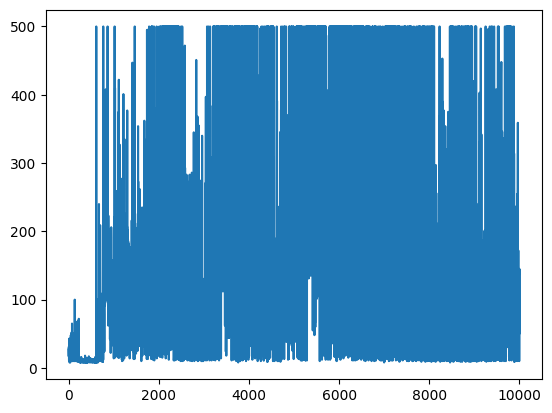

In [ ]:
# Linhas de Inicialização
total_count = 0 # Inicializa um contador para o número total de passos coletados.
total_episodes = 0  #  Inicializa um contador para o número total de episódios completados.
X1 = None
a=[]
t0 = time.time()

episodios = 10_000

indicesToIncrement = []

MediaDos100 = deque(maxlen=100)
MediasLista = []

brake500 = 0

stop = False

for i, data in enumerate(collector):
    indices = rb.extend(data)

    for X0 in data["next","step_count"]:
        if X1 is not None:
            if X0<X1:
                total_episodes += 1
                MediaDos100.append(X1.item())
                a.append(X1.item())
                if ((total_episodes % 100) == 0): MediasLista.append(sum(MediaDos100)/100)
                if X1.item() == 500:
                    print("alcançou 500!!!!!!")
        X1 = X0
        if X0 == 499:
            brake500 += 1
            if brake500 >= 10: stop = not stop

    # if stop: break
    if (total_episodes > episodios): break

    max_length = rb[:]["next", "step_count"].max()

    if len(rb) > init_rand_steps:

        # Loop de Otimização
        for _ in range(optim_steps):
            sample, info = rb.sample(return_info=True)
            loss_vals = loss(sample)

            rb.update_priority(index=info["index"], priority=loss_vals["loss"])


            loss_vals["loss"] = loss_vals["loss"].mean()
            loss_vals["loss"].backward()
            optim.step()
            optim.zero_grad()

            exploration_module.step(data.numel())

            updater.step()


        torchrl_logger.info(f"Episodes: {total_episodes}, Max num steps: {max_length}, rb length {len(rb)}")
        total_count += data.numel()


# Cálculo e Registro do Tempo Total de Treinamento
t1 = time.time() # Armazena o tempo de término do treinamento.
torchrl_logger.info(f"solved after {total_count} steps, {total_episodes} episodes and in {t1-t0}s.")
plt.plot(a)
plt.show()

[20.35, 22.9, 14.24, 10.05, 11.32, 9.83, 34.41, 69.12, 146.42, 102.29, 112.6, 123.8, 129.98, 121.33, 110.0, 134.08, 124.35, 153.63, 120.48, 113.59, 141.82, 199.28, 293.17, 286.99, 195.59, 145.01, 102.44, 102.27, 131.97, 80.33, 124.64, 110.17, 160.23, 292.26, 246.41, 217.65, 154.1, 205.21, 172.68, 257.85, 310.42, 259.96, 168.29, 173.77, 155.51, 164.1, 92.65, 161.52, 151.21, 162.45, 228.9, 276.71, 173.0, 372.65, 273.76, 317.96, 245.73, 136.95, 333.82, 233.87, 241.77, 336.34, 275.01, 204.36, 337.27, 197.01, 252.46, 186.43, 208.21, 158.23, 201.84, 215.13, 189.08, 125.94, 119.48, 140.17, 88.7, 126.36, 136.3, 90.87, 132.37, 122.74, 118.61, 84.82, 118.88, 127.23, 119.53, 110.0, 161.22, 118.45, 86.41, 78.73, 88.05, 154.07, 110.2, 129.01, 125.21, 176.59, 136.86, 86.83]


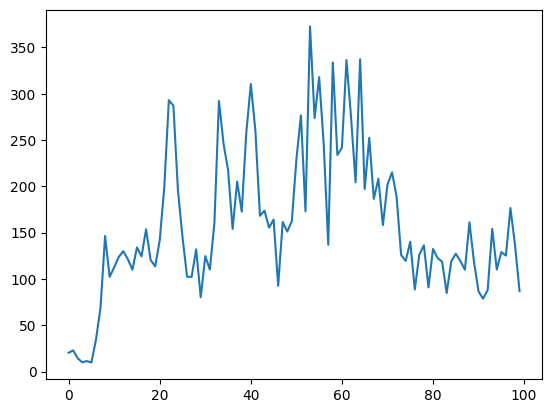

In [ ]:
print(MediasLista)
plt.plot(MediasLista)
plt.show()

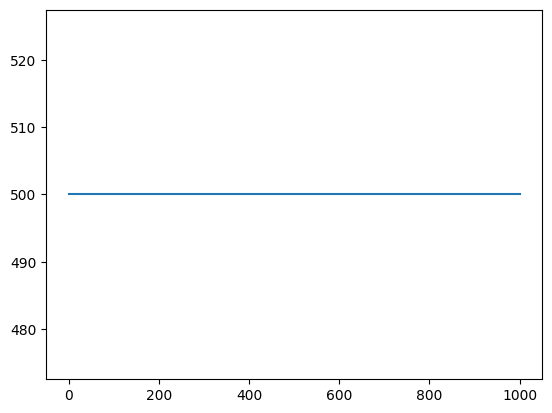

In [ ]:
eval_score = []
mean_100_eval_score = []

for i in range(1001):
    eval_score.append(env.rollout(max_steps=500, policy=policy)["next","step_count"][-1].item())
    if (i%100)==0:
      if i!=0:
        mean_100_eval_score.append(np.mean(eval_score[-100]))

plt.plot(eval_score)
plt.show()

In [ ]:
eval_score_mean = np.mean(mean_100_eval_score)
eval_score_mean

500.0

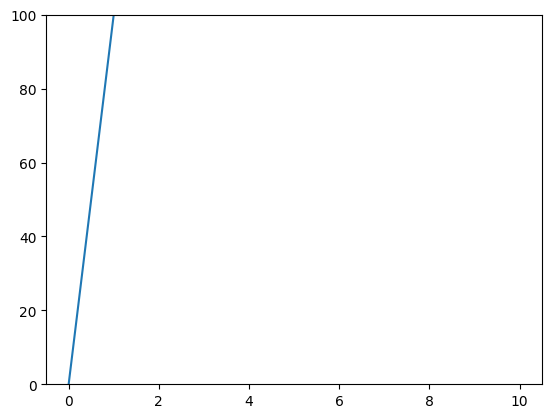

In [ ]:
Sucessos = [0]
for i in mean_100_eval_score:
  bb = (i/500)*100
  Sucessos.append(bb)
plt.plot(Sucessos)
plt.ylim(0,100)
plt.show()

In [ ]:
guarda_dados(a,
             nome_arquivo="Recompensa por Episódio (greed=0.1)",
             nome_pasta  ="Teste EGreedyModule")
guarda_dados(eval_score,
             nome_arquivo="Avaliação (greed=0.1)",
             nome_pasta  ="Teste EGreedyModule")
guarda_dados(Sucessos,
             nome_arquivo="Sucessos (greed=0.1)",
             nome_pasta  ="Teste EGreedyModule")
guarda_dados(MediasLista,
             nome_arquivo="Médias (greed=0.1)",
             nome_pasta  ="Teste EGreedyModule")
# salvar_array(a, Sucessos, eval_score_mean, eval_score, versao="Teste EGreedyModule", epoch=1)

## Renderização

Por fim, executamos o ambiente em tantas etapas quanto possível e salvamos o vídeo localmente (observe que não estamos explorando).

In [ ]:
# Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
record_env.rollout(max_steps=10000, policy=policy)
# max_steps=1000: Define o número máximo de passos a serem executados durante o rollout. Aqui, está configurado para 1000 passos.
# policy=policy: A política que o agente deve seguir durante a execução. Neste caso, é a política treinada previamente (policy).

# Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
video_recorder.dump()

In [ ]:
logger # CSVLogger(exp_name=dqn, experiment=CSVExperiment(log_dir=./training_loop/dqn))

# V2 em Pytorch

## Configuração do Agente

### Construindo o ambiente - OK

Estaremos usando um ambiente de academia com uma StepCounter transformação. Se precisar de uma atualização, verifique se esses recursos são apresentados no tutorial do ambiente .

In [ ]:
torch.manual_seed(0) # define a semente manual para a geração de números aleatórios no PyTorch, garantindo a reprodutibilidade dos resultados.
env = TransformedEnv(GymEnv("CartPole-v1"), StepCounter())
# cria um ambiente de RL para o ambiente "CartPole-v1" do OpenAI Gym, com um contador de passos adicionado como uma transformação ao ambiente.
env.set_seed(0) # define a semente para o ambiente env, garantindo a consistência do comportamento do ambiente em diferentes execuções.

NameError: name 'torch' is not defined

### Projetando uma política

O próximo passo é construir nossa política. Faremos uma versão regular e determinística do ator para ser usada no módulo de perda e durante a avaliação . A seguir, iremos aumentá-lo com um módulo de exploração para inferência .

In [ ]:
# Essa linha cria uma MLP que mapeia observações do ambiente para valores de ação, com duas camadas ocultas de 64 neurônios cada.
value_mlp = MLP(out_features=env.action_spec.shape[-1], num_cells=[64, 64])
# MLP: Refere-se a um Multi-Layer Perceptron (MLP), uma rede neural feed-forward composta por múltiplas camadas densamente conectadas.
# out_features=env.action_spec.shape[-1]: Define o número de neurônios na camada de saída da MLP.
# env.action_spec.shape[-1] é a dimensão do espaço de ações do ambiente, o que significa que a MLP vai produzir um valor para cada ação possível no ambiente.
# num_cells=[64, 64]: Define a arquitetura da MLP, com duas camadas ocultas, cada uma contendo 64 neurônios.

# Essa linha cria um módulo que pega as observações do ambiente (observation) e produz valores de ação (action_value) usando a MLP definida anteriormente.
value_net = Mod(value_mlp, in_keys=["observation"], out_keys=["action_value"])
# Mod: Refere-se ao TensorDictModule, que é um módulo que opera sobre TensorDicts.
# value_mlp: A MLP criada na linha anterior.
# in_keys=["observation"]: Define as chaves de entrada para o módulo. Aqui, o módulo espera uma chave chamada observation no TensorDict de entrada.
# out_keys=["action_value"]: Define as chaves de saída para o módulo. O módulo irá produzir uma chave chamada action_value no TensorDict de saída.

In [ ]:
# Cria uma política que primeiro passa a observação através da value_net para obter os valores de ação
# e, em seguida, usa o QValueModule para calcular os valores Q para as ações.
policy = Seq(value_net, QValueModule(spec=env.action_spec))
# Seq: Refere-se ao TensorDictSequential, que é similar ao torch.nn.Sequential, mas opera sobre TensorDicts.
# value_net: O módulo criado na linha anterior.
# QValueModule(spec=env.action_spec): Um módulo específico para calcular valores Q, usado em algoritmos de Q-learning.
# spec=env.action_spec fornece as especificações do espaço de ações do ambiente.

# Cria um módulo de exploração que implementa uma estratégia epsilon-greedy com um valor inicial de epsilon de 0.5 e que diminui ao longo de 100.000 passos.
exploration_module = EGreedyModule(env.action_spec, annealing_num_steps=100_000, eps_init=1)
# EGreedyModule: Implementa política epsilon-greedy, que escolhe ações aleatoriamente com certa probabilidade epsilon, e a melhor ação com probabilidade 1-epsilon.
# env.action_spec: As especificações do espaço de ações do ambiente.
# annealing_num_steps=100_000: Define o número de passos durante os quais o valor de epsilon será reduzido gradualmente (annealing).
# eps_init=0.5: Define o valor inicial de epsilon. No início, 50% das ações serão escolhidas aleatoriamente.

# Essa linha combina a política com o módulo de exploração em uma sequência, resultando em uma política que primeiro calcula os valores de ação
# e, em seguida, aplica a estratégia epsilon-greedy para selecionar as ações.
policy_explore = Seq(policy, exploration_module)
# Seq: Refere-se ao TensorDictSequential.
# policy: A política definida anteriormente.
# exploration_module: O módulo de exploração epsilon-greedy definido na linha anterior.

### Coletor de dados e buffer de reprodução

Aí vem a parte dos dados: precisamos de um coletor de dados para obter facilmente lotes de dados e um buffer de reprodução para armazenar esses dados para treinamento.

In [ ]:
init_rand_steps = 5000
# Define o número inicial de passos aleatórios a serem realizados no ambiente antes de começar a usar a política treinada.
# Isso ajuda a inicializar o replay buffer com uma diversidade de estados e ações.
frames_per_batch = 500
# Define o número de frames (ou passos de tempo) que serão coletados em cada lote (batch) de coleta de dados do ambiente.
optim_steps = 25
# Define o número de passos de otimização que serão realizados após cada lote de coleta de dados.
# Isso controla quantas atualizações dos pesos da rede neural serão feitas com base nos dados coletados.

# SyncDataCollector: Um coletor de dados síncrono que coleta experiências do ambiente usando a política fornecida.
collector = SyncDataCollector(
    env,
    policy,
    frames_per_batch=frames_per_batch,
    total_frames=-1,
    init_random_frames=init_rand_steps,
)
# env: O ambiente de RL, criado anteriormente com TransformedEnv.
# policy: A política que será usada para coletar experiências, criada anteriormente.
# frames_per_batch=frames_per_batch: Especifica que 100 frames serão coletados em cada lote.
# total_frames=-1: Especifica que o coletor deve continuar indefinidamente (ou até que seja explicitamente parado).
# init_random_frames=init_rand_steps: Especifica que 5000 passos aleatórios serão realizados inicialmente p/ preencher o replay buffer com experiências variadas.
size = 100_000
rb = ReplayBuffer(
                storage=LazyTensorStorage(size),
                sampler=PrioritizedSampler(max_capacity=size, alpha=0.6, beta=0.4),
                batch_size=200)

### Módulo de perda e otimizador

Construímos nossa perda conforme indicado no tutorial dedicado , com seu otimizador e atualizador de parâmetros de destino:

In [ ]:
#  Implementa a função de perda para o algoritmo DQN (Deep Q-Network).
loss = DQNLoss(value_network=policy, action_space=env.action_spec, delay_value=True, reduction='none')
# value_network=policy: A rede de valor utilizada para calcular os valores Q. Aqui, policy é a política criada anteriormente, que inclui o QValueModule.
# action_space=env.action_spec: Especifica o espaço de ações do ambiente, utilizado para calcular os valores Q para todas as ações possíveis.
# delay_value=True: Indica que a rede alvo (target network) deve ser usada para calcular os valores Q futuros, o que é uma técnica comum para estabilizar o treinamento em DQN.

# Um otimizador amplamente utilizado que combina as vantagens dos métodos AdaGrad e RMSProp. É particularmente eficiente para grandes problemas de aprendizado de máquina com muitos parâmetros.
optim = Adam(loss.parameters(), lr=0.01)
# loss.parameters(): Passa os parâmetros da função de perda (que incluem os parâmetros da rede de valor) para o otimizador.
# lr=0.02: Define a taxa de aprendizado (learning rate) como 0.02. Esta taxa controla o tamanho dos passos de atualização dos pesos da rede neural durante o treinamento.

# Implementa a atualização suave dos parâmetros da rede, uma técnica comum em algoritmos de RL para atualizar gradualmente uma rede alvo (target network) com os parâmetros da rede de valor (online network).
updater = SoftUpdate(loss, eps=0.99)
# loss: A função de perda que contém os parâmetros da rede de valor e da rede alvo.
# eps=0.99: Define o fator de atualização suave (soft update factor). eps=0.99 indica que 99% dos parâmetros da rede alvo são mantidos e apenas 1% é atualizado a partir da rede de valor em cada passo.

### Registrador

Usaremos um registrador CSV para registrar nossos resultados e salvar vídeos renderizados.

In [ ]:
path = "./training_loop" # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.

# CSVLogger: Um logger que registra dados em formato CSV, útil para monitorar o progresso do treinamento e analisar resultados.
logger = CSVLogger(exp_name="dqn", log_dir=path, video_format="mp4")
# exp_name="dqn": Nome da experiência, usado como um identificador para os logs. Aqui, é definido como "dqn" (Deep Q-Network).
# log_dir=path: Diretório onde os logs serão salvos. Neste caso, é o diretório definido anteriormente, ./training_loop.
# video_format="mp4": Especifica o formato de vídeo para gravação. Aqui, está configurado para MP4.

# Um objeto que grava vídeos das execuções do ambiente durante o treinamento, útil para visualizar o comportamento do agente.
video_recorder = VideoRecorder(logger, tag="video")
# logger: O logger criado na linha anterior, que será usado para salvar os vídeos.
# tag="video": Uma tag para identificar os vídeos nos logs. Aqui, está definido como "video".

# Um wrapper que aplica transformações ao ambiente, como normalização de observações ou recompensas, e também permite a adição de funcionalidades como gravação de vídeos.
record_env = TransformedEnv(
    GymEnv("CartPole-v1", from_pixels=True, pixels_only=False), video_recorder
)
# GymEnv("CartPole-v1", from_pixels=True, pixels_only=False): Cria um ambiente GymEnv para o ambiente "CartPole-v1" do OpenAI Gym.
# from_pixels=True: Indica que o ambiente será renderizado a partir de pixels, permitindo a gravação visual do ambiente.
# pixels_only=False: Indica que tanto as observações em forma de pixels quanto outras observações (como a posição e a velocidade do carrinho) serão retornadas pelo ambiente.
# video_recorder: O gravador de vídeos criado na linha anterior, que será usado para gravar as execuções do ambiente.

## Ciclo de treinamento

2024-06-03 10:37:24,888 [torchrl][INFO] Episodes: 280, Max num steps: 100, rb length 5500
2024-06-03 10:37:26,540 [torchrl][INFO] Episodes: 334, Max num steps: 100, rb length 6000
2024-06-03 10:37:28,434 [torchrl][INFO] Episodes: 387, Max num steps: 100, rb length 6500
2024-06-03 10:37:29,879 [torchrl][INFO] Episodes: 440, Max num steps: 100, rb length 7000
2024-06-03 10:37:30,997 [torchrl][INFO] Episodes: 471, Max num steps: 100, rb length 7500
2024-06-03 10:37:33,048 [torchrl][INFO] Episodes: 523, Max num steps: 100, rb length 8000
2024-06-03 10:37:34,168 [torchrl][INFO] Episodes: 575, Max num steps: 100, rb length 8500
2024-06-03 10:37:35,510 [torchrl][INFO] Episodes: 629, Max num steps: 100, rb length 9000
2024-06-03 10:37:36,685 [torchrl][INFO] Episodes: 637, Max num steps: 100, rb length 9500
2024-06-03 10:37:37,787 [torchrl][INFO] Episodes: 654, Max num steps: 108, rb length 10000
2024-06-03 10:37:38,902 [torchrl][INFO] Episodes: 658, Max num steps: 114, rb length 10500
2024-06-

alcançou 500!!!!!!


2024-06-03 10:38:40,335 [torchrl][INFO] Episodes: 878, Max num steps: 500, rb length 35000
2024-06-03 10:38:42,007 [torchrl][INFO] Episodes: 882, Max num steps: 500, rb length 35500
2024-06-03 10:38:43,536 [torchrl][INFO] Episodes: 886, Max num steps: 500, rb length 36000
2024-06-03 10:38:44,644 [torchrl][INFO] Episodes: 887, Max num steps: 500, rb length 36500
2024-06-03 10:38:45,923 [torchrl][INFO] Episodes: 892, Max num steps: 500, rb length 37000
2024-06-03 10:38:46,996 [torchrl][INFO] Episodes: 896, Max num steps: 500, rb length 37500
2024-06-03 10:38:48,081 [torchrl][INFO] Episodes: 899, Max num steps: 500, rb length 38000
2024-06-03 10:38:49,168 [torchrl][INFO] Episodes: 903, Max num steps: 500, rb length 38500
2024-06-03 10:38:50,253 [torchrl][INFO] Episodes: 906, Max num steps: 500, rb length 39000
2024-06-03 10:38:51,336 [torchrl][INFO] Episodes: 910, Max num steps: 500, rb length 39500
2024-06-03 10:38:52,439 [torchrl][INFO] Episodes: 913, Max num steps: 500, rb length 40000

alcançou 500!!!!!!


2024-06-03 10:46:30,046 [torchrl][INFO] Episodes: 2720, Max num steps: 500, rb length 100000
2024-06-03 10:46:31,161 [torchrl][INFO] Episodes: 2723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:46:32,247 [torchrl][INFO] Episodes: 2725, Max num steps: 500, rb length 100000
2024-06-03 10:46:33,540 [torchrl][INFO] Episodes: 2729, Max num steps: 500, rb length 100000
2024-06-03 10:46:35,150 [torchrl][INFO] Episodes: 2730, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:46:36,828 [torchrl][INFO] Episodes: 2732, Max num steps: 500, rb length 100000
2024-06-03 10:46:38,132 [torchrl][INFO] Episodes: 2734, Max num steps: 500, rb length 100000
2024-06-03 10:46:39,203 [torchrl][INFO] Episodes: 2736, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:46:40,332 [torchrl][INFO] Episodes: 2737, Max num steps: 500, rb length 100000
2024-06-03 10:46:41,623 [torchrl][INFO] Episodes: 2739, Max num steps: 500, rb length 100000
2024-06-03 10:46:42,703 [torchrl][INFO] Episodes: 2740, Max num steps: 500, rb length 100000
2024-06-03 10:46:43,780 [torchrl][INFO] Episodes: 2743, Max num steps: 500, rb length 100000
2024-06-03 10:46:44,854 [torchrl][INFO] Episodes: 2746, Max num steps: 500, rb length 100000
2024-06-03 10:46:45,926 [torchrl][INFO] Episodes: 2749, Max num steps: 500, rb length 100000
2024-06-03 10:46:47,018 [torchrl][INFO] Episodes: 2750, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:46:48,885 [torchrl][INFO] Episodes: 2752, Max num steps: 500, rb length 100000
2024-06-03 10:46:51,330 [torchrl][INFO] Episodes: 2753, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:46:53,536 [torchrl][INFO] Episodes: 2754, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:46:55,074 [torchrl][INFO] Episodes: 2755, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:46:56,177 [torchrl][INFO] Episodes: 2759, Max num steps: 500, rb length 100000
2024-06-03 10:46:57,273 [torchrl][INFO] Episodes: 2762, Max num steps: 500, rb length 100000
2024-06-03 10:46:58,354 [torchrl][INFO] Episodes: 2763, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:46:59,476 [torchrl][INFO] Episodes: 2764, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:00,596 [torchrl][INFO] Episodes: 2768, Max num steps: 500, rb length 100000
2024-06-03 10:47:01,860 [torchrl][INFO] Episodes: 2772, Max num steps: 500, rb length 100000
2024-06-03 10:47:02,945 [torchrl][INFO] Episodes: 2776, Max num steps: 500, rb length 100000
2024-06-03 10:47:04,045 [torchrl][INFO] Episodes: 2779, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:05,321 [torchrl][INFO] Episodes: 2780, Max num steps: 500, rb length 100000
2024-06-03 10:47:06,896 [torchrl][INFO] Episodes: 2781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:08,596 [torchrl][INFO] Episodes: 2786, Max num steps: 500, rb length 100000
2024-06-03 10:47:10,128 [torchrl][INFO] Episodes: 2790, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:11,224 [torchrl][INFO] Episodes: 2791, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:12,315 [torchrl][INFO] Episodes: 2792, Max num steps: 500, rb length 100000
2024-06-03 10:47:13,447 [torchrl][INFO] Episodes: 2794, Max num steps: 500, rb length 100000
2024-06-03 10:47:14,558 [torchrl][INFO] Episodes: 2798, Max num steps: 500, rb length 100000
2024-06-03 10:47:15,638 [torchrl][INFO] Episodes: 2802, Max num steps: 500, rb length 100000
2024-06-03 10:47:16,711 [torchrl][INFO] Episodes: 2805, Max num steps: 500, rb length 100000
2024-06-03 10:47:17,785 [torchrl][INFO] Episodes: 2806, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:18,884 [torchrl][INFO] Episodes: 2809, Max num steps: 500, rb length 100000
2024-06-03 10:47:20,156 [torchrl][INFO] Episodes: 2813, Max num steps: 500, rb length 100000
2024-06-03 10:47:21,748 [torchrl][INFO] Episodes: 2818, Max num steps: 500, rb length 100000
2024-06-03 10:47:23,630 [torchrl][INFO] Episodes: 2822, Max num steps: 500, rb length 100000
2024-06-03 10:47:25,133 [torchrl][INFO] Episodes: 2823, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:26,220 [torchrl][INFO] Episodes: 2824, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:27,303 [torchrl][INFO] Episodes: 2825, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:28,391 [torchrl][INFO] Episodes: 2826, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:29,489 [torchrl][INFO] Episodes: 2831, Max num steps: 500, rb length 100000
2024-06-03 10:47:30,641 [torchrl][INFO] Episodes: 2835, Max num steps: 500, rb length 100000
2024-06-03 10:47:31,759 [torchrl][INFO] Episodes: 2839, Max num steps: 500, rb length 100000
2024-06-03 10:47:32,842 [torchrl][INFO] Episodes: 2842, Max num steps: 500, rb length 100000
2024-06-03 10:47:33,946 [torchrl][INFO] Episodes: 2846, Max num steps: 500, rb length 100000
2024-06-03 10:47:35,186 [torchrl][INFO] Episodes: 2847, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:36,746 [torchrl][INFO] Episodes: 2851, Max num steps: 500, rb length 100000
2024-06-03 10:47:38,395 [torchrl][INFO] Episodes: 2855, Max num steps: 500, rb length 100000
2024-06-03 10:47:39,869 [torchrl][INFO] Episodes: 2859, Max num steps: 500, rb length 100000
2024-06-03 10:47:40,946 [torchrl][INFO] Episodes: 2864, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:42,045 [torchrl][INFO] Episodes: 2865, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:43,180 [torchrl][INFO] Episodes: 2866, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:44,508 [torchrl][INFO] Episodes: 2867, Max num steps: 500, rb length 100000
2024-06-03 10:47:45,674 [torchrl][INFO] Episodes: 2871, Max num steps: 500, rb length 100000
2024-06-03 10:47:46,804 [torchrl][INFO] Episodes: 2876, Max num steps: 500, rb length 100000
2024-06-03 10:47:47,902 [torchrl][INFO] Episodes: 2880, Max num steps: 500, rb length 100000
2024-06-03 10:47:48,971 [torchrl][INFO] Episodes: 2883, Max num steps: 500, rb length 100000
2024-06-03 10:47:50,360 [torchrl][INFO] Episodes: 2888, Max num steps: 500, rb length 100000
2024-06-03 10:47:51,921 [torchrl][INFO] Episodes: 2892, Max num steps: 500, rb length 100000
2024-06-03 10:47:53,734 [torchrl][INFO] Episodes: 2897, Max num steps: 500, rb length 100000
2024-06-03 10:47:54,927 [torchrl][INFO] Episodes: 2902, Max num steps: 500, rb length 100000
2024-06-03 10:47:56,016 [torchrl][INFO] Episodes: 2906, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:57,106 [torchrl][INFO] Episodes: 2907, Max num steps: 500, rb length 100000
2024-06-03 10:47:58,185 [torchrl][INFO] Episodes: 2910, Max num steps: 500, rb length 100000
2024-06-03 10:47:59,281 [torchrl][INFO] Episodes: 2914, Max num steps: 500, rb length 100000
2024-06-03 10:48:00,363 [torchrl][INFO] Episodes: 2918, Max num steps: 500, rb length 100000
2024-06-03 10:48:01,512 [torchrl][INFO] Episodes: 2923, Max num steps: 500, rb length 100000
2024-06-03 10:48:02,661 [torchrl][INFO] Episodes: 2927, Max num steps: 500, rb length 100000
2024-06-03 10:48:03,751 [torchrl][INFO] Episodes: 2933, Max num steps: 500, rb length 100000
2024-06-03 10:48:05,453 [torchrl][INFO] Episodes: 2937, Max num steps: 500, rb length 100000
2024-06-03 10:48:07,107 [torchrl][INFO] Episodes: 2941, Max num steps: 500, rb length 100000
2024-06-03 10:48:08,777 [torchrl][INFO] Episodes: 2945, Max num steps: 500, rb length 100000
2024-06-03 10:48:09,872 [torchrl][INFO] Episodes: 2950, Max num steps:

alcançou 500!!!!!!


2024-06-03 10:48:16,476 [torchrl][INFO] Episodes: 2973, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:17,580 [torchrl][INFO] Episodes: 2974, Max num steps: 500, rb length 100000
2024-06-03 10:48:18,655 [torchrl][INFO] Episodes: 2975, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:20,252 [torchrl][INFO] Episodes: 2977, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:21,869 [torchrl][INFO] Episodes: 2978, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:23,608 [torchrl][INFO] Episodes: 2979, Max num steps: 500, rb length 100000
2024-06-03 10:48:24,694 [torchrl][INFO] Episodes: 2984, Max num steps: 500, rb length 100000
2024-06-03 10:48:25,784 [torchrl][INFO] Episodes: 2986, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:27,041 [torchrl][INFO] Episodes: 2987, Max num steps: 500, rb length 100000
2024-06-03 10:48:28,133 [torchrl][INFO] Episodes: 2992, Max num steps: 500, rb length 100000
2024-06-03 10:48:29,226 [torchrl][INFO] Episodes: 2993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:30,339 [torchrl][INFO] Episodes: 2994, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:31,454 [torchrl][INFO] Episodes: 2998, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:32,582 [torchrl][INFO] Episodes: 2999, Max num steps: 500, rb length 100000
2024-06-03 10:48:33,883 [torchrl][INFO] Episodes: 3003, Max num steps: 500, rb length 100000
2024-06-03 10:48:35,462 [torchrl][INFO] Episodes: 3009, Max num steps: 500, rb length 100000
2024-06-03 10:48:37,096 [torchrl][INFO] Episodes: 3011, Max num steps: 500, rb length 100000
2024-06-03 10:48:38,729 [torchrl][INFO] Episodes: 3015, Max num steps: 500, rb length 100000
2024-06-03 10:48:39,991 [torchrl][INFO] Episodes: 3016, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:41,079 [torchrl][INFO] Episodes: 3017, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:42,184 [torchrl][INFO] Episodes: 3018, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:43,293 [torchrl][INFO] Episodes: 3022, Max num steps: 500, rb length 100000
2024-06-03 10:48:44,396 [torchrl][INFO] Episodes: 3028, Max num steps: 500, rb length 100000
2024-06-03 10:48:45,568 [torchrl][INFO] Episodes: 3029, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:46,668 [torchrl][INFO] Episodes: 3033, Max num steps: 500, rb length 100000
2024-06-03 10:48:47,921 [torchrl][INFO] Episodes: 3036, Max num steps: 500, rb length 100000
2024-06-03 10:48:49,230 [torchrl][INFO] Episodes: 3040, Max num steps: 500, rb length 100000
2024-06-03 10:48:50,794 [torchrl][INFO] Episodes: 3049, Max num steps: 500, rb length 100000
2024-06-03 10:48:52,472 [torchrl][INFO] Episodes: 3055, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:53,973 [torchrl][INFO] Episodes: 3058, Max num steps: 500, rb length 100000
2024-06-03 10:48:55,065 [torchrl][INFO] Episodes: 3069, Max num steps: 500, rb length 100000
2024-06-03 10:48:56,148 [torchrl][INFO] Episodes: 3074, Max num steps: 500, rb length 100000
2024-06-03 10:48:57,266 [torchrl][INFO] Episodes: 3080, Max num steps: 500, rb length 100000
2024-06-03 10:48:58,365 [torchrl][INFO] Episodes: 3085, Max num steps: 500, rb length 100000
2024-06-03 10:48:59,493 [torchrl][INFO] Episodes: 3090, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:00,606 [torchrl][INFO] Episodes: 3091, Max num steps: 500, rb length 100000
2024-06-03 10:49:01,708 [torchrl][INFO] Episodes: 3093, Max num steps: 500, rb length 100000
2024-06-03 10:49:02,796 [torchrl][INFO] Episodes: 3097, Max num steps: 500, rb length 100000
2024-06-03 10:49:04,174 [torchrl][INFO] Episodes: 3101, Max num steps: 500, rb length 100000
2024-06-03 10:49:05,737 [torchrl][INFO] Episodes: 3107, Max num steps: 500, rb length 100000
2024-06-03 10:49:07,402 [torchrl][INFO] Episodes: 3110, Max num steps: 500, rb length 100000
2024-06-03 10:49:08,739 [torchrl][INFO] Episodes: 3114, Max num steps: 500, rb length 100000
2024-06-03 10:49:10,182 [torchrl][INFO] Episodes: 3118, Max num steps: 500, rb length 100000
2024-06-03 10:49:11,318 [torchrl][INFO] Episodes: 3124, Max num steps: 500, rb length 100000
2024-06-03 10:49:12,408 [torchrl][INFO] Episodes: 3128, Max num steps: 500, rb length 100000
2024-06-03 10:49:13,500 [torchrl][INFO] Episodes: 3132, Max num steps:

alcançou 500!!!!!!


2024-06-03 10:49:28,176 [torchrl][INFO] Episodes: 3180, Max num steps: 500, rb length 100000
2024-06-03 10:49:29,268 [torchrl][INFO] Episodes: 3184, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:30,533 [torchrl][INFO] Episodes: 3185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:31,641 [torchrl][INFO] Episodes: 3186, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:32,928 [torchrl][INFO] Episodes: 3187, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:34,498 [torchrl][INFO] Episodes: 3188, Max num steps: 500, rb length 100000
2024-06-03 10:49:36,142 [torchrl][INFO] Episodes: 3192, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:37,673 [torchrl][INFO] Episodes: 3193, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:38,800 [torchrl][INFO] Episodes: 3194, Max num steps: 500, rb length 100000
2024-06-03 10:49:39,874 [torchrl][INFO] Episodes: 3195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:40,965 [torchrl][INFO] Episodes: 3196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:42,050 [torchrl][INFO] Episodes: 3200, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:43,140 [torchrl][INFO] Episodes: 3201, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:44,235 [torchrl][INFO] Episodes: 3202, Max num steps: 500, rb length 100000
2024-06-03 10:49:45,325 [torchrl][INFO] Episodes: 3203, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:46,423 [torchrl][INFO] Episodes: 3205, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:47,646 [torchrl][INFO] Episodes: 3206, Max num steps: 500, rb length 100000
2024-06-03 10:49:49,212 [torchrl][INFO] Episodes: 3211, Max num steps: 500, rb length 100000
2024-06-03 10:49:50,853 [torchrl][INFO] Episodes: 3217, Max num steps: 500, rb length 100000
2024-06-03 10:49:52,625 [torchrl][INFO] Episodes: 3220, Max num steps: 500, rb length 100000
2024-06-03 10:49:53,697 [torchrl][INFO] Episodes: 3225, Max num steps: 500, rb length 100000
2024-06-03 10:49:54,782 [torchrl][INFO] Episodes: 3227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:55,865 [torchrl][INFO] Episodes: 3228, Max num steps: 500, rb length 100000
2024-06-03 10:49:56,960 [torchrl][INFO] Episodes: 3230, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:58,058 [torchrl][INFO] Episodes: 3231, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:59,183 [torchrl][INFO] Episodes: 3232, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:00,283 [torchrl][INFO] Episodes: 3233, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:01,421 [torchrl][INFO] Episodes: 3234, Max num steps: 500, rb length 100000
2024-06-03 10:50:02,634 [torchrl][INFO] Episodes: 3238, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:04,221 [torchrl][INFO] Episodes: 3239, Max num steps: 500, rb length 100000
2024-06-03 10:50:05,843 [torchrl][INFO] Episodes: 3240, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:07,488 [torchrl][INFO] Episodes: 3241, Max num steps: 500, rb length 100000
2024-06-03 10:50:08,584 [torchrl][INFO] Episodes: 3244, Max num steps: 500, rb length 100000
2024-06-03 10:50:09,690 [torchrl][INFO] Episodes: 3249, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:10,789 [torchrl][INFO] Episodes: 3250, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:11,874 [torchrl][INFO] Episodes: 3251, Max num steps: 500, rb length 100000
2024-06-03 10:50:13,112 [torchrl][INFO] Episodes: 3254, Max num steps: 500, rb length 100000
2024-06-03 10:50:14,197 [torchrl][INFO] Episodes: 3258, Max num steps: 500, rb length 100000
2024-06-03 10:50:15,270 [torchrl][INFO] Episodes: 3260, Max num steps: 500, rb length 100000
2024-06-03 10:50:16,377 [torchrl][INFO] Episodes: 3264, Max num steps: 500, rb length 100000
2024-06-03 10:50:17,501 [torchrl][INFO] Episodes: 3265, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:19,091 [torchrl][INFO] Episodes: 3266, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:20,683 [torchrl][INFO] Episodes: 3267, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:22,360 [torchrl][INFO] Episodes: 3268, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:23,447 [torchrl][INFO] Episodes: 3273, Max num steps: 500, rb length 100000
2024-06-03 10:50:24,523 [torchrl][INFO] Episodes: 3274, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:25,893 [torchrl][INFO] Episodes: 3276, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:27,458 [torchrl][INFO] Episodes: 3277, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:29,203 [torchrl][INFO] Episodes: 3278, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:30,626 [torchrl][INFO] Episodes: 3279, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:31,737 [torchrl][INFO] Episodes: 3280, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:33,221 [torchrl][INFO] Episodes: 3281, Max num steps: 500, rb length 100000
2024-06-03 10:50:34,761 [torchrl][INFO] Episodes: 3283, Max num steps: 500, rb length 100000
2024-06-03 10:50:36,668 [torchrl][INFO] Episodes: 3284, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:37,997 [torchrl][INFO] Episodes: 3285, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:39,083 [torchrl][INFO] Episodes: 3289, Max num steps: 500, rb length 100000
2024-06-03 10:50:40,161 [torchrl][INFO] Episodes: 3291, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:41,253 [torchrl][INFO] Episodes: 3292, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:42,351 [torchrl][INFO] Episodes: 3293, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:43,450 [torchrl][INFO] Episodes: 3294, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:44,537 [torchrl][INFO] Episodes: 3295, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:45,627 [torchrl][INFO] Episodes: 3296, Max num steps: 500, rb length 100000
2024-06-03 10:50:46,761 [torchrl][INFO] Episodes: 3298, Max num steps: 500, rb length 100000
2024-06-03 10:50:48,147 [torchrl][INFO] Episodes: 3301, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:49,724 [torchrl][INFO] Episodes: 3302, Max num steps: 500, rb length 100000
2024-06-03 10:50:51,406 [torchrl][INFO] Episodes: 3304, Max num steps: 500, rb length 100000
2024-06-03 10:50:52,803 [torchrl][INFO] Episodes: 3307, Max num steps: 500, rb length 100000
2024-06-03 10:50:53,881 [torchrl][INFO] Episodes: 3309, Max num steps: 500, rb length 100000
2024-06-03 10:50:54,957 [torchrl][INFO] Episodes: 3310, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:56,060 [torchrl][INFO] Episodes: 3312, Max num steps: 500, rb length 100000
2024-06-03 10:50:57,156 [torchrl][INFO] Episodes: 3333, Max num steps: 500, rb length 100000
2024-06-03 10:50:58,440 [torchrl][INFO] Episodes: 3338, Max num steps: 500, rb length 100000
2024-06-03 10:50:59,538 [torchrl][INFO] Episodes: 3344, Max num steps: 500, rb length 100000
2024-06-03 10:51:00,772 [torchrl][INFO] Episodes: 3349, Max num steps: 500, rb length 100000
2024-06-03 10:51:01,912 [torchrl][INFO] Episodes: 3350, Max num steps: 500, rb length 100000
2024-06-03 10:51:03,332 [torchrl][INFO] Episodes: 3351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:04,875 [torchrl][INFO] Episodes: 3352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:06,606 [torchrl][INFO] Episodes: 3353, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:07,957 [torchrl][INFO] Episodes: 3354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:09,073 [torchrl][INFO] Episodes: 3355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:10,168 [torchrl][INFO] Episodes: 3356, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:11,264 [torchrl][INFO] Episodes: 3357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:12,359 [torchrl][INFO] Episodes: 3358, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:13,447 [torchrl][INFO] Episodes: 3359, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:14,535 [torchrl][INFO] Episodes: 3360, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:15,626 [torchrl][INFO] Episodes: 3361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:16,717 [torchrl][INFO] Episodes: 3362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:18,050 [torchrl][INFO] Episodes: 3364, Max num steps: 500, rb length 100000
2024-06-03 10:51:19,658 [torchrl][INFO] Episodes: 3365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:21,565 [torchrl][INFO] Episodes: 3366, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:22,883 [torchrl][INFO] Episodes: 3367, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:23,973 [torchrl][INFO] Episodes: 3368, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:25,101 [torchrl][INFO] Episodes: 3370, Max num steps: 500, rb length 100000
2024-06-03 10:51:26,181 [torchrl][INFO] Episodes: 3374, Max num steps: 500, rb length 100000
2024-06-03 10:51:27,294 [torchrl][INFO] Episodes: 3379, Max num steps: 500, rb length 100000
2024-06-03 10:51:28,385 [torchrl][INFO] Episodes: 3383, Max num steps: 500, rb length 100000
2024-06-03 10:51:29,479 [torchrl][INFO] Episodes: 3386, Max num steps: 500, rb length 100000
2024-06-03 10:51:30,574 [torchrl][INFO] Episodes: 3387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:31,680 [torchrl][INFO] Episodes: 3388, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:33,097 [torchrl][INFO] Episodes: 3392, Max num steps: 500, rb length 100000
2024-06-03 10:51:34,631 [torchrl][INFO] Episodes: 3393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:36,365 [torchrl][INFO] Episodes: 3394, Max num steps: 500, rb length 100000
2024-06-03 10:51:37,955 [torchrl][INFO] Episodes: 3395, Max num steps: 500, rb length 100000
2024-06-03 10:51:39,028 [torchrl][INFO] Episodes: 3397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:40,124 [torchrl][INFO] Episodes: 3398, Max num steps: 500, rb length 100000
2024-06-03 10:51:41,217 [torchrl][INFO] Episodes: 3400, Max num steps: 500, rb length 100000
2024-06-03 10:51:42,582 [torchrl][INFO] Episodes: 3404, Max num steps: 500, rb length 100000
2024-06-03 10:51:43,653 [torchrl][INFO] Episodes: 3407, Max num steps: 500, rb length 100000
2024-06-03 10:51:44,736 [torchrl][INFO] Episodes: 3410, Max num steps: 500, rb length 100000
2024-06-03 10:51:45,815 [torchrl][INFO] Episodes: 3412, Max num steps: 500, rb length 100000
2024-06-03 10:51:46,913 [torchrl][INFO] Episodes: 3413, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:48,489 [torchrl][INFO] Episodes: 3415, Max num steps: 500, rb length 100000
2024-06-03 10:51:50,107 [torchrl][INFO] Episodes: 3416, Max num steps: 500, rb length 100000
2024-06-03 10:51:51,690 [torchrl][INFO] Episodes: 3421, Max num steps: 500, rb length 100000
2024-06-03 10:51:52,781 [torchrl][INFO] Episodes: 3424, Max num steps: 500, rb length 100000
2024-06-03 10:51:53,865 [torchrl][INFO] Episodes: 3427, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:55,125 [torchrl][INFO] Episodes: 3428, Max num steps: 500, rb length 100000
2024-06-03 10:51:56,221 [torchrl][INFO] Episodes: 3432, Max num steps: 500, rb length 100000
2024-06-03 10:51:57,302 [torchrl][INFO] Episodes: 3437, Max num steps: 500, rb length 100000
2024-06-03 10:51:58,391 [torchrl][INFO] Episodes: 3442, Max num steps: 500, rb length 100000
2024-06-03 10:51:59,482 [torchrl][INFO] Episodes: 3447, Max num steps: 500, rb length 100000
2024-06-03 10:52:00,580 [torchrl][INFO] Episodes: 3451, Max num steps: 500, rb length 100000
2024-06-03 10:52:02,123 [torchrl][INFO] Episodes: 3455, Max num steps: 500, rb length 100000
2024-06-03 10:52:03,679 [torchrl][INFO] Episodes: 3458, Max num steps: 500, rb length 100000
2024-06-03 10:52:05,356 [torchrl][INFO] Episodes: 3462, Max num steps: 500, rb length 100000
2024-06-03 10:52:06,788 [torchrl][INFO] Episodes: 3467, Max num steps: 500, rb length 100000
2024-06-03 10:52:07,870 [torchrl][INFO] Episodes: 3471, Max num steps:

alcançou 500!!!!!!


2024-06-03 10:52:18,455 [torchrl][INFO] Episodes: 3504, Max num steps: 500, rb length 100000
2024-06-03 10:52:20,118 [torchrl][INFO] Episodes: 3508, Max num steps: 500, rb length 100000
2024-06-03 10:52:21,739 [torchrl][INFO] Episodes: 3513, Max num steps: 500, rb length 100000
2024-06-03 10:52:22,844 [torchrl][INFO] Episodes: 3514, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:52:24,170 [torchrl][INFO] Episodes: 3519, Max num steps: 500, rb length 100000
2024-06-03 10:52:25,246 [torchrl][INFO] Episodes: 3524, Max num steps: 500, rb length 100000
2024-06-03 10:52:26,332 [torchrl][INFO] Episodes: 3528, Max num steps: 500, rb length 100000
2024-06-03 10:52:27,430 [torchrl][INFO] Episodes: 3549, Max num steps: 500, rb length 100000
2024-06-03 10:52:28,515 [torchrl][INFO] Episodes: 3553, Max num steps: 500, rb length 100000
2024-06-03 10:52:29,610 [torchrl][INFO] Episodes: 3559, Max num steps: 500, rb length 100000
2024-06-03 10:52:30,680 [torchrl][INFO] Episodes: 3563, Max num steps: 500, rb length 100000
2024-06-03 10:52:32,023 [torchrl][INFO] Episodes: 3565, Max num steps: 500, rb length 100000
2024-06-03 10:52:33,602 [torchrl][INFO] Episodes: 3567, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:52:35,283 [torchrl][INFO] Episodes: 3570, Max num steps: 500, rb length 100000
2024-06-03 10:52:36,590 [torchrl][INFO] Episodes: 3575, Max num steps: 500, rb length 100000
2024-06-03 10:52:37,664 [torchrl][INFO] Episodes: 3578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:52:38,758 [torchrl][INFO] Episodes: 3579, Max num steps: 500, rb length 100000
2024-06-03 10:52:39,839 [torchrl][INFO] Episodes: 3583, Max num steps: 500, rb length 100000
2024-06-03 10:52:40,914 [torchrl][INFO] Episodes: 3584, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:52:42,001 [torchrl][INFO] Episodes: 3587, Max num steps: 500, rb length 100000
2024-06-03 10:52:43,082 [torchrl][INFO] Episodes: 3592, Max num steps: 500, rb length 100000
2024-06-03 10:52:44,328 [torchrl][INFO] Episodes: 3597, Max num steps: 500, rb length 100000
2024-06-03 10:52:45,410 [torchrl][INFO] Episodes: 3601, Max num steps: 500, rb length 100000
2024-06-03 10:52:46,834 [torchrl][INFO] Episodes: 3605, Max num steps: 500, rb length 100000
2024-06-03 10:52:48,407 [torchrl][INFO] Episodes: 3609, Max num steps: 500, rb length 100000
2024-06-03 10:52:50,118 [torchrl][INFO] Episodes: 3613, Max num steps: 500, rb length 100000
2024-06-03 10:52:51,370 [torchrl][INFO] Episodes: 3614, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:52:52,518 [torchrl][INFO] Episodes: 3618, Max num steps: 500, rb length 100000
2024-06-03 10:52:53,614 [torchrl][INFO] Episodes: 3622, Max num steps: 500, rb length 100000
2024-06-03 10:52:54,710 [torchrl][INFO] Episodes: 3626, Max num steps: 500, rb length 100000
2024-06-03 10:52:55,788 [torchrl][INFO] Episodes: 3630, Max num steps: 500, rb length 100000
2024-06-03 10:52:56,876 [torchrl][INFO] Episodes: 3635, Max num steps: 500, rb length 100000
2024-06-03 10:52:57,963 [torchrl][INFO] Episodes: 3639, Max num steps: 500, rb length 100000
2024-06-03 10:52:59,057 [torchrl][INFO] Episodes: 3643, Max num steps: 500, rb length 100000
2024-06-03 10:53:00,137 [torchrl][INFO] Episodes: 3647, Max num steps: 500, rb length 100000
2024-06-03 10:53:01,581 [torchrl][INFO] Episodes: 3651, Max num steps: 500, rb length 100000
2024-06-03 10:53:03,163 [torchrl][INFO] Episodes: 3654, Max num steps: 500, rb length 100000
2024-06-03 10:53:05,100 [torchrl][INFO] Episodes: 3659, Max num steps:

alcançou 500!!!!!!


2024-06-03 10:53:30,326 [torchrl][INFO] Episodes: 3752, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:53:31,846 [torchrl][INFO] Episodes: 3753, Max num steps: 500, rb length 100000
2024-06-03 10:53:33,399 [torchrl][INFO] Episodes: 3757, Max num steps: 500, rb length 100000
2024-06-03 10:53:35,139 [torchrl][INFO] Episodes: 3762, Max num steps: 500, rb length 100000
2024-06-03 10:53:36,457 [torchrl][INFO] Episodes: 3767, Max num steps: 500, rb length 100000
2024-06-03 10:53:37,539 [torchrl][INFO] Episodes: 3772, Max num steps: 500, rb length 100000
2024-06-03 10:53:38,615 [torchrl][INFO] Episodes: 3777, Max num steps: 500, rb length 100000
2024-06-03 10:53:39,695 [torchrl][INFO] Episodes: 3782, Max num steps: 500, rb length 100000
2024-06-03 10:53:40,771 [torchrl][INFO] Episodes: 3787, Max num steps: 500, rb length 100000
2024-06-03 10:53:41,848 [torchrl][INFO] Episodes: 3790, Max num steps: 500, rb length 100000
2024-06-03 10:53:42,917 [torchrl][INFO] Episodes: 3795, Max num steps: 500, rb length 100000
2024-06-03 10:53:44,185 [torchrl][INFO] Episodes: 3799, Max num steps:

alcançou 500!!!!!!


2024-06-03 10:53:55,826 [torchrl][INFO] Episodes: 3834, Max num steps: 500, rb length 100000
2024-06-03 10:53:56,984 [torchrl][INFO] Episodes: 3837, Max num steps: 500, rb length 100000
2024-06-03 10:53:58,069 [torchrl][INFO] Episodes: 3838, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:53:59,167 [torchrl][INFO] Episodes: 3842, Max num steps: 500, rb length 100000
2024-06-03 10:54:00,245 [torchrl][INFO] Episodes: 3846, Max num steps: 500, rb length 100000
2024-06-03 10:54:01,686 [torchrl][INFO] Episodes: 3851, Max num steps: 500, rb length 100000
2024-06-03 10:54:03,232 [torchrl][INFO] Episodes: 3854, Max num steps: 500, rb length 100000
2024-06-03 10:54:05,147 [torchrl][INFO] Episodes: 3858, Max num steps: 500, rb length 100000
2024-06-03 10:54:06,464 [torchrl][INFO] Episodes: 3863, Max num steps: 500, rb length 100000
2024-06-03 10:54:07,565 [torchrl][INFO] Episodes: 3868, Max num steps: 500, rb length 100000
2024-06-03 10:54:08,659 [torchrl][INFO] Episodes: 3873, Max num steps: 500, rb length 100000
2024-06-03 10:54:09,735 [torchrl][INFO] Episodes: 3874, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:54:10,828 [torchrl][INFO] Episodes: 3879, Max num steps: 500, rb length 100000
2024-06-03 10:54:11,919 [torchrl][INFO] Episodes: 3884, Max num steps: 500, rb length 100000
2024-06-03 10:54:13,011 [torchrl][INFO] Episodes: 3887, Max num steps: 500, rb length 100000
2024-06-03 10:54:14,089 [torchrl][INFO] Episodes: 3891, Max num steps: 500, rb length 100000
2024-06-03 10:54:15,163 [torchrl][INFO] Episodes: 3893, Max num steps: 500, rb length 100000
2024-06-03 10:54:16,521 [torchrl][INFO] Episodes: 3898, Max num steps: 500, rb length 100000
2024-06-03 10:54:18,093 [torchrl][INFO] Episodes: 3904, Max num steps: 500, rb length 100000
2024-06-03 10:54:19,792 [torchrl][INFO] Episodes: 3909, Max num steps: 500, rb length 100000
2024-06-03 10:54:21,065 [torchrl][INFO] Episodes: 3914, Max num steps: 500, rb length 100000
2024-06-03 10:54:22,145 [torchrl][INFO] Episodes: 3920, Max num steps: 500, rb length 100000
2024-06-03 10:54:23,230 [torchrl][INFO] Episodes: 3926, Max num steps:

alcançou 500!!!!!!


2024-06-03 10:54:37,217 [torchrl][INFO] Episodes: 3979, Max num steps: 500, rb length 100000
2024-06-03 10:54:38,316 [torchrl][INFO] Episodes: 3984, Max num steps: 500, rb length 100000
2024-06-03 10:54:39,389 [torchrl][INFO] Episodes: 3990, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:54:40,479 [torchrl][INFO] Episodes: 3991, Max num steps: 500, rb length 100000
2024-06-03 10:54:41,571 [torchrl][INFO] Episodes: 3993, Max num steps: 500, rb length 100000
2024-06-03 10:54:42,643 [torchrl][INFO] Episodes: 3998, Max num steps: 500, rb length 100000
2024-06-03 10:54:43,729 [torchrl][INFO] Episodes: 4003, Max num steps: 500, rb length 100000
2024-06-03 10:54:44,815 [torchrl][INFO] Episodes: 4008, Max num steps: 500, rb length 100000
2024-06-03 10:54:46,143 [torchrl][INFO] Episodes: 4014, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:54:47,927 [torchrl][INFO] Episodes: 4015, Max num steps: 500, rb length 100000
2024-06-03 10:54:49,661 [torchrl][INFO] Episodes: 4019, Max num steps: 500, rb length 100000
2024-06-03 10:54:50,946 [torchrl][INFO] Episodes: 4024, Max num steps: 500, rb length 100000
2024-06-03 10:54:52,035 [torchrl][INFO] Episodes: 4029, Max num steps: 500, rb length 100000
2024-06-03 10:54:53,131 [torchrl][INFO] Episodes: 4033, Max num steps: 500, rb length 100000
2024-06-03 10:54:54,214 [torchrl][INFO] Episodes: 4039, Max num steps: 500, rb length 100000
2024-06-03 10:54:55,303 [torchrl][INFO] Episodes: 4043, Max num steps: 500, rb length 100000
2024-06-03 10:54:56,790 [torchrl][INFO] Episodes: 4049, Max num steps: 500, rb length 100000
2024-06-03 10:54:58,346 [torchrl][INFO] Episodes: 4051, Max num steps: 500, rb length 100000
2024-06-03 10:55:00,061 [torchrl][INFO] Episodes: 4056, Max num steps: 500, rb length 100000
2024-06-03 10:55:01,872 [torchrl][INFO] Episodes: 4061, Max num steps:

alcançou 500!!!!!!


2024-06-03 10:55:29,103 [torchrl][INFO] Episodes: 4164, Max num steps: 500, rb length 100000
2024-06-03 10:55:30,203 [torchrl][INFO] Episodes: 4168, Max num steps: 500, rb length 100000
2024-06-03 10:55:31,694 [torchrl][INFO] Episodes: 4172, Max num steps: 500, rb length 100000
2024-06-03 10:55:33,264 [torchrl][INFO] Episodes: 4174, Max num steps: 500, rb length 100000
2024-06-03 10:55:35,232 [torchrl][INFO] Episodes: 4179, Max num steps: 500, rb length 100000
2024-06-03 10:55:36,460 [torchrl][INFO] Episodes: 4181, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:37,559 [torchrl][INFO] Episodes: 4182, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:38,671 [torchrl][INFO] Episodes: 4183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:39,961 [torchrl][INFO] Episodes: 4184, Max num steps: 500, rb length 100000
2024-06-03 10:55:41,058 [torchrl][INFO] Episodes: 4187, Max num steps: 500, rb length 100000
2024-06-03 10:55:42,157 [torchrl][INFO] Episodes: 4192, Max num steps: 500, rb length 100000
2024-06-03 10:55:43,249 [torchrl][INFO] Episodes: 4196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:44,347 [torchrl][INFO] Episodes: 4197, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:45,538 [torchrl][INFO] Episodes: 4198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:47,141 [torchrl][INFO] Episodes: 4199, Max num steps: 500, rb length 100000
2024-06-03 10:55:48,764 [torchrl][INFO] Episodes: 4203, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:50,455 [torchrl][INFO] Episodes: 4204, Max num steps: 500, rb length 100000
2024-06-03 10:55:51,565 [torchrl][INFO] Episodes: 4209, Max num steps: 500, rb length 100000
2024-06-03 10:55:52,716 [torchrl][INFO] Episodes: 4214, Max num steps: 500, rb length 100000
2024-06-03 10:55:53,799 [torchrl][INFO] Episodes: 4215, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:54,908 [torchrl][INFO] Episodes: 4219, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:55,992 [torchrl][INFO] Episodes: 4220, Max num steps: 500, rb length 100000
2024-06-03 10:55:57,287 [torchrl][INFO] Episodes: 4222, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:58,370 [torchrl][INFO] Episodes: 4223, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:59,531 [torchrl][INFO] Episodes: 4224, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:00,839 [torchrl][INFO] Episodes: 4225, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:02,424 [torchrl][INFO] Episodes: 4226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:04,158 [torchrl][INFO] Episodes: 4227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:05,576 [torchrl][INFO] Episodes: 4228, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:06,677 [torchrl][INFO] Episodes: 4230, Max num steps: 500, rb length 100000
2024-06-03 10:56:07,771 [torchrl][INFO] Episodes: 4231, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:08,866 [torchrl][INFO] Episodes: 4232, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:09,990 [torchrl][INFO] Episodes: 4233, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:11,104 [torchrl][INFO] Episodes: 4234, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:12,238 [torchrl][INFO] Episodes: 4240, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:13,343 [torchrl][INFO] Episodes: 4241, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:14,484 [torchrl][INFO] Episodes: 4242, Max num steps: 500, rb length 100000
2024-06-03 10:56:15,987 [torchrl][INFO] Episodes: 4243, Max num steps: 500, rb length 100000
2024-06-03 10:56:17,567 [torchrl][INFO] Episodes: 4248, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:19,547 [torchrl][INFO] Episodes: 4249, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:20,731 [torchrl][INFO] Episodes: 4250, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:21,824 [torchrl][INFO] Episodes: 4251, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:22,921 [torchrl][INFO] Episodes: 4252, Max num steps: 500, rb length 100000
2024-06-03 10:56:24,004 [torchrl][INFO] Episodes: 4257, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:25,109 [torchrl][INFO] Episodes: 4258, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:26,204 [torchrl][INFO] Episodes: 4259, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:27,297 [torchrl][INFO] Episodes: 4260, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:28,395 [torchrl][INFO] Episodes: 4261, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:29,527 [torchrl][INFO] Episodes: 4262, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:31,049 [torchrl][INFO] Episodes: 4263, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:32,657 [torchrl][INFO] Episodes: 4264, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:34,433 [torchrl][INFO] Episodes: 4265, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:35,523 [torchrl][INFO] Episodes: 4266, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:36,623 [torchrl][INFO] Episodes: 4267, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:37,724 [torchrl][INFO] Episodes: 4268, Max num steps: 500, rb length 100000
2024-06-03 10:56:39,005 [torchrl][INFO] Episodes: 4272, Max num steps: 500, rb length 100000
2024-06-03 10:56:40,087 [torchrl][INFO] Episodes: 4273, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:41,183 [torchrl][INFO] Episodes: 4274, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:42,271 [torchrl][INFO] Episodes: 4275, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:43,402 [torchrl][INFO] Episodes: 4276, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:44,664 [torchrl][INFO] Episodes: 4277, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:46,237 [torchrl][INFO] Episodes: 4278, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:47,924 [torchrl][INFO] Episodes: 4279, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:49,378 [torchrl][INFO] Episodes: 4280, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:50,472 [torchrl][INFO] Episodes: 4281, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:51,560 [torchrl][INFO] Episodes: 4282, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:52,684 [torchrl][INFO] Episodes: 4283, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:53,795 [torchrl][INFO] Episodes: 4284, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:54,881 [torchrl][INFO] Episodes: 4285, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:55,973 [torchrl][INFO] Episodes: 4286, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:57,364 [torchrl][INFO] Episodes: 4287, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:58,818 [torchrl][INFO] Episodes: 4288, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:01,223 [torchrl][INFO] Episodes: 4289, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:03,992 [torchrl][INFO] Episodes: 4290, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:05,810 [torchrl][INFO] Episodes: 4291, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:06,941 [torchrl][INFO] Episodes: 4292, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:08,068 [torchrl][INFO] Episodes: 4293, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:09,169 [torchrl][INFO] Episodes: 4294, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:10,270 [torchrl][INFO] Episodes: 4295, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:11,349 [torchrl][INFO] Episodes: 4296, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:12,430 [torchrl][INFO] Episodes: 4297, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:13,636 [torchrl][INFO] Episodes: 4298, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:14,749 [torchrl][INFO] Episodes: 4299, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:15,957 [torchrl][INFO] Episodes: 4300, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:17,546 [torchrl][INFO] Episodes: 4301, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:19,211 [torchrl][INFO] Episodes: 4302, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:20,929 [torchrl][INFO] Episodes: 4303, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:22,167 [torchrl][INFO] Episodes: 4304, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:23,262 [torchrl][INFO] Episodes: 4305, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:24,388 [torchrl][INFO] Episodes: 4306, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:25,495 [torchrl][INFO] Episodes: 4307, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:26,578 [torchrl][INFO] Episodes: 4308, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:27,689 [torchrl][INFO] Episodes: 4309, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:28,776 [torchrl][INFO] Episodes: 4310, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:29,883 [torchrl][INFO] Episodes: 4312, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:31,198 [torchrl][INFO] Episodes: 4313, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:32,763 [torchrl][INFO] Episodes: 4314, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:34,452 [torchrl][INFO] Episodes: 4315, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:35,820 [torchrl][INFO] Episodes: 4316, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:36,960 [torchrl][INFO] Episodes: 4317, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:38,055 [torchrl][INFO] Episodes: 4318, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:39,157 [torchrl][INFO] Episodes: 4319, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:40,244 [torchrl][INFO] Episodes: 4320, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:41,336 [torchrl][INFO] Episodes: 4321, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:42,429 [torchrl][INFO] Episodes: 4322, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:43,707 [torchrl][INFO] Episodes: 4323, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:44,809 [torchrl][INFO] Episodes: 4324, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:46,309 [torchrl][INFO] Episodes: 4325, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:47,910 [torchrl][INFO] Episodes: 4326, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:49,686 [torchrl][INFO] Episodes: 4327, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:50,768 [torchrl][INFO] Episodes: 4328, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:51,872 [torchrl][INFO] Episodes: 4329, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:52,975 [torchrl][INFO] Episodes: 4330, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:54,108 [torchrl][INFO] Episodes: 4331, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:55,193 [torchrl][INFO] Episodes: 4332, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:56,286 [torchrl][INFO] Episodes: 4333, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:57,391 [torchrl][INFO] Episodes: 4334, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:58,494 [torchrl][INFO] Episodes: 4335, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:59,625 [torchrl][INFO] Episodes: 4336, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:01,233 [torchrl][INFO] Episodes: 4337, Max num steps: 500, rb length 100000
2024-06-03 10:58:02,850 [torchrl][INFO] Episodes: 4338, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:04,553 [torchrl][INFO] Episodes: 4340, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:05,907 [torchrl][INFO] Episodes: 4341, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:07,039 [torchrl][INFO] Episodes: 4342, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:08,148 [torchrl][INFO] Episodes: 4343, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:09,249 [torchrl][INFO] Episodes: 4344, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:10,337 [torchrl][INFO] Episodes: 4345, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:11,435 [torchrl][INFO] Episodes: 4346, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:12,525 [torchrl][INFO] Episodes: 4347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:13,621 [torchrl][INFO] Episodes: 4348, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:14,875 [torchrl][INFO] Episodes: 4349, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:16,529 [torchrl][INFO] Episodes: 4350, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:18,192 [torchrl][INFO] Episodes: 4351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:19,550 [torchrl][INFO] Episodes: 4352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:20,641 [torchrl][INFO] Episodes: 4353, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:21,737 [torchrl][INFO] Episodes: 4354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:22,829 [torchrl][INFO] Episodes: 4355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:23,915 [torchrl][INFO] Episodes: 4357, Max num steps: 500, rb length 100000
2024-06-03 10:58:24,999 [torchrl][INFO] Episodes: 4362, Max num steps: 500, rb length 100000
2024-06-03 10:58:26,116 [torchrl][INFO] Episodes: 4364, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:27,416 [torchrl][INFO] Episodes: 4366, Max num steps: 500, rb length 100000
2024-06-03 10:58:28,562 [torchrl][INFO] Episodes: 4373, Max num steps: 500, rb length 100000
2024-06-03 10:58:30,040 [torchrl][INFO] Episodes: 4376, Max num steps: 500, rb length 100000
2024-06-03 10:58:31,624 [torchrl][INFO] Episodes: 4380, Max num steps: 500, rb length 100000
2024-06-03 10:58:33,337 [torchrl][INFO] Episodes: 4381, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:34,551 [torchrl][INFO] Episodes: 4385, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:35,653 [torchrl][INFO] Episodes: 4386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:36,753 [torchrl][INFO] Episodes: 4387, Max num steps: 500, rb length 100000
2024-06-03 10:58:37,856 [torchrl][INFO] Episodes: 4391, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:38,963 [torchrl][INFO] Episodes: 4392, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:40,057 [torchrl][INFO] Episodes: 4393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:41,178 [torchrl][INFO] Episodes: 4394, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:42,348 [torchrl][INFO] Episodes: 4395, Max num steps: 500, rb length 100000
2024-06-03 10:58:43,446 [torchrl][INFO] Episodes: 4396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:45,013 [torchrl][INFO] Episodes: 4397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:46,654 [torchrl][INFO] Episodes: 4398, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:48,478 [torchrl][INFO] Episodes: 4399, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:49,578 [torchrl][INFO] Episodes: 4400, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:50,677 [torchrl][INFO] Episodes: 4401, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:51,813 [torchrl][INFO] Episodes: 4410, Max num steps: 500, rb length 100000
2024-06-03 10:58:52,894 [torchrl][INFO] Episodes: 4411, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:53,990 [torchrl][INFO] Episodes: 4412, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:55,143 [torchrl][INFO] Episodes: 4413, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:56,234 [torchrl][INFO] Episodes: 4414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:57,362 [torchrl][INFO] Episodes: 4420, Max num steps: 500, rb length 100000
2024-06-03 10:58:58,609 [torchrl][INFO] Episodes: 4425, Max num steps: 500, rb length 100000
2024-06-03 10:59:00,169 [torchrl][INFO] Episodes: 4426, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:01,792 [torchrl][INFO] Episodes: 4428, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:03,427 [torchrl][INFO] Episodes: 4429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:04,511 [torchrl][INFO] Episodes: 4430, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:05,631 [torchrl][INFO] Episodes: 4434, Max num steps: 500, rb length 100000
2024-06-03 10:59:06,704 [torchrl][INFO] Episodes: 4436, Max num steps: 500, rb length 100000
2024-06-03 10:59:07,779 [torchrl][INFO] Episodes: 4437, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:09,064 [torchrl][INFO] Episodes: 4438, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:10,161 [torchrl][INFO] Episodes: 4439, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:11,259 [torchrl][INFO] Episodes: 4440, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:12,439 [torchrl][INFO] Episodes: 4441, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:13,696 [torchrl][INFO] Episodes: 4442, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:15,297 [torchrl][INFO] Episodes: 4443, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:16,951 [torchrl][INFO] Episodes: 4444, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:18,378 [torchrl][INFO] Episodes: 4449, Max num steps: 500, rb length 100000
2024-06-03 10:59:19,480 [torchrl][INFO] Episodes: 4456, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:20,594 [torchrl][INFO] Episodes: 4457, Max num steps: 500, rb length 100000
2024-06-03 10:59:21,678 [torchrl][INFO] Episodes: 4462, Max num steps: 500, rb length 100000
2024-06-03 10:59:22,760 [torchrl][INFO] Episodes: 4467, Max num steps: 500, rb length 100000
2024-06-03 10:59:23,871 [torchrl][INFO] Episodes: 4472, Max num steps: 500, rb length 100000
2024-06-03 10:59:24,958 [torchrl][INFO] Episodes: 4477, Max num steps: 500, rb length 100000
2024-06-03 10:59:26,034 [torchrl][INFO] Episodes: 4481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:27,133 [torchrl][INFO] Episodes: 4486, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:28,702 [torchrl][INFO] Episodes: 4487, Max num steps: 500, rb length 100000
2024-06-03 10:59:30,286 [torchrl][INFO] Episodes: 4491, Max num steps: 500, rb length 100000
2024-06-03 10:59:32,001 [torchrl][INFO] Episodes: 4496, Max num steps: 500, rb length 100000
2024-06-03 10:59:33,445 [torchrl][INFO] Episodes: 4501, Max num steps: 500, rb length 100000
2024-06-03 10:59:34,535 [torchrl][INFO] Episodes: 4506, Max num steps: 500, rb length 100000
2024-06-03 10:59:35,625 [torchrl][INFO] Episodes: 4511, Max num steps: 500, rb length 100000
2024-06-03 10:59:36,705 [torchrl][INFO] Episodes: 4516, Max num steps: 500, rb length 100000
2024-06-03 10:59:37,912 [torchrl][INFO] Episodes: 4522, Max num steps: 500, rb length 100000
2024-06-03 10:59:39,535 [torchrl][INFO] Episodes: 4527, Max num steps: 500, rb length 100000
2024-06-03 10:59:41,197 [torchrl][INFO] Episodes: 4532, Max num steps: 500, rb length 100000
2024-06-03 10:59:42,659 [torchrl][INFO] Episodes: 4537, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:00:07,092 [torchrl][INFO] Episodes: 4622, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:08,203 [torchrl][INFO] Episodes: 4623, Max num steps: 500, rb length 100000
2024-06-03 11:00:09,285 [torchrl][INFO] Episodes: 4624, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:10,378 [torchrl][INFO] Episodes: 4625, Max num steps: 500, rb length 100000
2024-06-03 11:00:11,482 [torchrl][INFO] Episodes: 4629, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:12,798 [torchrl][INFO] Episodes: 4630, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:14,375 [torchrl][INFO] Episodes: 4631, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:16,034 [torchrl][INFO] Episodes: 4632, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:17,624 [torchrl][INFO] Episodes: 4633, Max num steps: 500, rb length 100000
2024-06-03 11:00:18,712 [torchrl][INFO] Episodes: 4637, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:19,837 [torchrl][INFO] Episodes: 4638, Max num steps: 500, rb length 100000
2024-06-03 11:00:20,918 [torchrl][INFO] Episodes: 4640, Max num steps: 500, rb length 100000
2024-06-03 11:00:22,001 [torchrl][INFO] Episodes: 4645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:23,107 [torchrl][INFO] Episodes: 4646, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:24,214 [torchrl][INFO] Episodes: 4647, Max num steps: 500, rb length 100000
2024-06-03 11:00:25,294 [torchrl][INFO] Episodes: 4649, Max num steps: 500, rb length 100000
2024-06-03 11:00:26,387 [torchrl][INFO] Episodes: 4654, Max num steps: 500, rb length 100000
2024-06-03 11:00:27,589 [torchrl][INFO] Episodes: 4655, Max num steps: 500, rb length 100000
2024-06-03 11:00:29,183 [torchrl][INFO] Episodes: 4656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:30,932 [torchrl][INFO] Episodes: 4658, Max num steps: 500, rb length 100000
2024-06-03 11:00:32,513 [torchrl][INFO] Episodes: 4663, Max num steps: 500, rb length 100000
2024-06-03 11:00:33,645 [torchrl][INFO] Episodes: 4668, Max num steps: 500, rb length 100000
2024-06-03 11:00:34,733 [torchrl][INFO] Episodes: 4673, Max num steps: 500, rb length 100000
2024-06-03 11:00:35,813 [torchrl][INFO] Episodes: 4676, Max num steps: 500, rb length 100000
2024-06-03 11:00:36,963 [torchrl][INFO] Episodes: 4678, Max num steps: 500, rb length 100000
2024-06-03 11:00:38,214 [torchrl][INFO] Episodes: 4680, Max num steps: 500, rb length 100000
2024-06-03 11:00:39,297 [torchrl][INFO] Episodes: 4681, Max num steps: 500, rb length 100000
2024-06-03 11:00:40,429 [torchrl][INFO] Episodes: 4682, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:41,527 [torchrl][INFO] Episodes: 4683, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:42,837 [torchrl][INFO] Episodes: 4689, Max num steps: 500, rb length 100000
2024-06-03 11:00:44,409 [torchrl][INFO] Episodes: 4694, Max num steps: 500, rb length 100000
2024-06-03 11:00:46,098 [torchrl][INFO] Episodes: 4699, Max num steps: 500, rb length 100000
2024-06-03 11:00:47,625 [torchrl][INFO] Episodes: 4704, Max num steps: 500, rb length 100000
2024-06-03 11:00:48,754 [torchrl][INFO] Episodes: 4710, Max num steps: 500, rb length 100000
2024-06-03 11:00:49,851 [torchrl][INFO] Episodes: 4713, Max num steps: 500, rb length 100000
2024-06-03 11:00:50,945 [torchrl][INFO] Episodes: 4717, Max num steps: 500, rb length 100000
2024-06-03 11:00:52,021 [torchrl][INFO] Episodes: 4722, Max num steps: 500, rb length 100000
2024-06-03 11:00:53,129 [torchrl][INFO] Episodes: 4727, Max num steps: 500, rb length 100000
2024-06-03 11:00:54,245 [torchrl][INFO] Episodes: 4732, Max num steps: 500, rb length 100000
2024-06-03 11:00:55,330 [torchrl][INFO] Episodes: 4737, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:01:06,013 [torchrl][INFO] Episodes: 4772, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:01:07,113 [torchrl][INFO] Episodes: 4774, Max num steps: 500, rb length 100000
2024-06-03 11:01:08,194 [torchrl][INFO] Episodes: 4776, Max num steps: 500, rb length 100000
2024-06-03 11:01:09,283 [torchrl][INFO] Episodes: 4778, Max num steps: 500, rb length 100000
2024-06-03 11:01:10,362 [torchrl][INFO] Episodes: 4783, Max num steps: 500, rb length 100000
2024-06-03 11:01:11,443 [torchrl][INFO] Episodes: 4788, Max num steps: 500, rb length 100000
2024-06-03 11:01:12,665 [torchrl][INFO] Episodes: 4793, Max num steps: 500, rb length 100000
2024-06-03 11:01:14,250 [torchrl][INFO] Episodes: 4799, Max num steps: 500, rb length 100000
2024-06-03 11:01:15,915 [torchrl][INFO] Episodes: 4802, Max num steps: 500, rb length 100000
2024-06-03 11:01:17,339 [torchrl][INFO] Episodes: 4807, Max num steps: 500, rb length 100000
2024-06-03 11:01:18,470 [torchrl][INFO] Episodes: 4810, Max num steps: 500, rb length 100000
2024-06-03 11:01:19,559 [torchrl][INFO] Episodes: 4812, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:01:51,674 [torchrl][INFO] Episodes: 4899, Max num steps: 500, rb length 100000
2024-06-03 11:01:52,772 [torchrl][INFO] Episodes: 4903, Max num steps: 500, rb length 100000
2024-06-03 11:01:53,931 [torchrl][INFO] Episodes: 4904, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:01:55,030 [torchrl][INFO] Episodes: 4906, Max num steps: 500, rb length 100000
2024-06-03 11:01:56,450 [torchrl][INFO] Episodes: 4911, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:01:58,041 [torchrl][INFO] Episodes: 4912, Max num steps: 500, rb length 100000
2024-06-03 11:01:59,850 [torchrl][INFO] Episodes: 4914, Max num steps: 500, rb length 100000
2024-06-03 11:02:01,098 [torchrl][INFO] Episodes: 4918, Max num steps: 500, rb length 100000
2024-06-03 11:02:02,245 [torchrl][INFO] Episodes: 4919, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:03,374 [torchrl][INFO] Episodes: 4924, Max num steps: 500, rb length 100000
2024-06-03 11:02:04,632 [torchrl][INFO] Episodes: 4929, Max num steps: 500, rb length 100000
2024-06-03 11:02:05,717 [torchrl][INFO] Episodes: 4931, Max num steps: 500, rb length 100000
2024-06-03 11:02:06,805 [torchrl][INFO] Episodes: 4933, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:07,922 [torchrl][INFO] Episodes: 4934, Max num steps: 500, rb length 100000
2024-06-03 11:02:08,997 [torchrl][INFO] Episodes: 4938, Max num steps: 500, rb length 100000
2024-06-03 11:02:10,081 [torchrl][INFO] Episodes: 4939, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:11,766 [torchrl][INFO] Episodes: 4943, Max num steps: 500, rb length 100000
2024-06-03 11:02:13,388 [torchrl][INFO] Episodes: 4948, Max num steps: 500, rb length 100000
2024-06-03 11:02:14,908 [torchrl][INFO] Episodes: 4952, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:16,013 [torchrl][INFO] Episodes: 4953, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:17,107 [torchrl][INFO] Episodes: 4954, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:18,213 [torchrl][INFO] Episodes: 4955, Max num steps: 500, rb length 100000
2024-06-03 11:02:19,319 [torchrl][INFO] Episodes: 4960, Max num steps: 500, rb length 100000
2024-06-03 11:02:20,392 [torchrl][INFO] Episodes: 4963, Max num steps: 500, rb length 100000
2024-06-03 11:02:21,484 [torchrl][INFO] Episodes: 4968, Max num steps: 500, rb length 100000
2024-06-03 11:02:22,581 [torchrl][INFO] Episodes: 4972, Max num steps: 500, rb length 100000
2024-06-03 11:02:23,678 [torchrl][INFO] Episodes: 4976, Max num steps: 500, rb length 100000
2024-06-03 11:02:24,880 [torchrl][INFO] Episodes: 4980, Max num steps: 500, rb length 100000
2024-06-03 11:02:26,643 [torchrl][INFO] Episodes: 4984, Max num steps: 500, rb length 100000
2024-06-03 11:02:28,285 [torchrl][INFO] Episodes: 4988, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:29,831 [torchrl][INFO] Episodes: 4989, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:30,929 [torchrl][INFO] Episodes: 4990, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:32,061 [torchrl][INFO] Episodes: 4991, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:33,158 [torchrl][INFO] Episodes: 4992, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:34,285 [torchrl][INFO] Episodes: 4993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:35,380 [torchrl][INFO] Episodes: 4994, Max num steps: 500, rb length 100000
2024-06-03 11:02:36,466 [torchrl][INFO] Episodes: 4995, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:37,554 [torchrl][INFO] Episodes: 4997, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:38,674 [torchrl][INFO] Episodes: 4998, Max num steps: 500, rb length 100000
2024-06-03 11:02:39,894 [torchrl][INFO] Episodes: 5002, Max num steps: 500, rb length 100000
2024-06-03 11:02:41,637 [torchrl][INFO] Episodes: 5003, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:43,309 [torchrl][INFO] Episodes: 5004, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:44,703 [torchrl][INFO] Episodes: 5005, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:45,803 [torchrl][INFO] Episodes: 5008, Max num steps: 500, rb length 100000
2024-06-03 11:02:46,919 [torchrl][INFO] Episodes: 5012, Max num steps: 500, rb length 100000
2024-06-03 11:02:48,003 [torchrl][INFO] Episodes: 5015, Max num steps: 500, rb length 100000
2024-06-03 11:02:49,121 [torchrl][INFO] Episodes: 5018, Max num steps: 500, rb length 100000
2024-06-03 11:02:50,422 [torchrl][INFO] Episodes: 5019, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:51,531 [torchrl][INFO] Episodes: 5024, Max num steps: 500, rb length 100000
2024-06-03 11:02:52,618 [torchrl][INFO] Episodes: 5026, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:53,720 [torchrl][INFO] Episodes: 5028, Max num steps: 500, rb length 100000
2024-06-03 11:02:55,140 [torchrl][INFO] Episodes: 5030, Max num steps: 500, rb length 100000
2024-06-03 11:02:56,685 [torchrl][INFO] Episodes: 5033, Max num steps: 500, rb length 100000
2024-06-03 11:02:58,436 [torchrl][INFO] Episodes: 5035, Max num steps: 500, rb length 100000
2024-06-03 11:02:59,805 [torchrl][INFO] Episodes: 5038, Max num steps: 500, rb length 100000
2024-06-03 11:03:00,913 [torchrl][INFO] Episodes: 5041, Max num steps: 500, rb length 100000
2024-06-03 11:03:02,001 [torchrl][INFO] Episodes: 5044, Max num steps: 500, rb length 100000
2024-06-03 11:03:03,081 [torchrl][INFO] Episodes: 5047, Max num steps: 500, rb length 100000
2024-06-03 11:03:04,192 [torchrl][INFO] Episodes: 5051, Max num steps: 500, rb length 100000
2024-06-03 11:03:05,269 [torchrl][INFO] Episodes: 5053, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:06,385 [torchrl][INFO] Episodes: 5054, Max num steps: 500, rb length 100000
2024-06-03 11:03:07,518 [torchrl][INFO] Episodes: 5055, Max num steps: 500, rb length 100000
2024-06-03 11:03:08,761 [torchrl][INFO] Episodes: 5059, Max num steps: 500, rb length 100000
2024-06-03 11:03:10,214 [torchrl][INFO] Episodes: 5062, Max num steps: 500, rb length 100000
2024-06-03 11:03:11,756 [torchrl][INFO] Episodes: 5064, Max num steps: 500, rb length 100000
2024-06-03 11:03:13,457 [torchrl][INFO] Episodes: 5065, Max num steps: 500, rb length 100000
2024-06-03 11:03:14,711 [torchrl][INFO] Episodes: 5067, Max num steps: 500, rb length 100000
2024-06-03 11:03:15,805 [torchrl][INFO] Episodes: 5070, Max num steps: 500, rb length 100000
2024-06-03 11:03:16,899 [torchrl][INFO] Episodes: 5081, Max num steps: 500, rb length 100000
2024-06-03 11:03:17,998 [torchrl][INFO] Episodes: 5084, Max num steps: 500, rb length 100000
2024-06-03 11:03:19,080 [torchrl][INFO] Episodes: 5087, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:03:33,229 [torchrl][INFO] Episodes: 5125, Max num steps: 500, rb length 100000
2024-06-03 11:03:34,347 [torchrl][INFO] Episodes: 5127, Max num steps: 500, rb length 100000
2024-06-03 11:03:35,436 [torchrl][INFO] Episodes: 5129, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:36,536 [torchrl][INFO] Episodes: 5130, Max num steps: 500, rb length 100000
2024-06-03 11:03:37,636 [torchrl][INFO] Episodes: 5132, Max num steps: 500, rb length 100000
2024-06-03 11:03:38,746 [torchrl][INFO] Episodes: 5135, Max num steps: 500, rb length 100000
2024-06-03 11:03:40,285 [torchrl][INFO] Episodes: 5138, Max num steps: 500, rb length 100000
2024-06-03 11:03:41,883 [torchrl][INFO] Episodes: 5139, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:43,483 [torchrl][INFO] Episodes: 5142, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:44,580 [torchrl][INFO] Episodes: 5143, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:45,683 [torchrl][INFO] Episodes: 5144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:46,778 [torchrl][INFO] Episodes: 5145, Max num steps: 500, rb length 100000
2024-06-03 11:03:48,033 [torchrl][INFO] Episodes: 5151, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:49,122 [torchrl][INFO] Episodes: 5152, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:50,261 [torchrl][INFO] Episodes: 5153, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:51,369 [torchrl][INFO] Episodes: 5154, Max num steps: 500, rb length 100000
2024-06-03 11:03:52,460 [torchrl][INFO] Episodes: 5156, Max num steps: 500, rb length 100000
2024-06-03 11:03:53,724 [torchrl][INFO] Episodes: 5157, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:55,305 [torchrl][INFO] Episodes: 5158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:57,016 [torchrl][INFO] Episodes: 5159, Max num steps: 500, rb length 100000
2024-06-03 11:03:58,482 [torchrl][INFO] Episodes: 5160, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:59,590 [torchrl][INFO] Episodes: 5161, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:00,698 [torchrl][INFO] Episodes: 5162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:01,811 [torchrl][INFO] Episodes: 5163, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:02,932 [torchrl][INFO] Episodes: 5167, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:04,050 [torchrl][INFO] Episodes: 5169, Max num steps: 500, rb length 100000
2024-06-03 11:04:05,133 [torchrl][INFO] Episodes: 5170, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:06,308 [torchrl][INFO] Episodes: 5171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:07,451 [torchrl][INFO] Episodes: 5174, Max num steps: 500, rb length 100000
2024-06-03 11:04:09,214 [torchrl][INFO] Episodes: 5175, Max num steps: 500, rb length 100000
2024-06-03 11:04:11,078 [torchrl][INFO] Episodes: 5176, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:13,263 [torchrl][INFO] Episodes: 5195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:15,364 [torchrl][INFO] Episodes: 5197, Max num steps: 500, rb length 100000
2024-06-03 11:04:17,031 [torchrl][INFO] Episodes: 5198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:18,143 [torchrl][INFO] Episodes: 5213, Max num steps: 500, rb length 100000
2024-06-03 11:04:19,233 [torchrl][INFO] Episodes: 5220, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:20,342 [torchrl][INFO] Episodes: 5221, Max num steps: 500, rb length 100000
2024-06-03 11:04:21,439 [torchrl][INFO] Episodes: 5233, Max num steps: 500, rb length 100000
2024-06-03 11:04:22,547 [torchrl][INFO] Episodes: 5234, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:23,760 [torchrl][INFO] Episodes: 5235, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:24,860 [torchrl][INFO] Episodes: 5236, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:25,971 [torchrl][INFO] Episodes: 5237, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:27,400 [torchrl][INFO] Episodes: 5238, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:29,021 [torchrl][INFO] Episodes: 5239, Max num steps: 500, rb length 100000
2024-06-03 11:04:30,754 [torchrl][INFO] Episodes: 5242, Max num steps: 500, rb length 100000
2024-06-03 11:04:31,988 [torchrl][INFO] Episodes: 5244, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:33,254 [torchrl][INFO] Episodes: 5245, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:34,367 [torchrl][INFO] Episodes: 5246, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:35,482 [torchrl][INFO] Episodes: 5247, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:36,567 [torchrl][INFO] Episodes: 5248, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:37,668 [torchrl][INFO] Episodes: 5249, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:38,761 [torchrl][INFO] Episodes: 5250, Max num steps: 500, rb length 100000
2024-06-03 11:04:39,852 [torchrl][INFO] Episodes: 5254, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:40,943 [torchrl][INFO] Episodes: 5255, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:42,444 [torchrl][INFO] Episodes: 5256, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:44,072 [torchrl][INFO] Episodes: 5257, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:45,778 [torchrl][INFO] Episodes: 5258, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:47,072 [torchrl][INFO] Episodes: 5259, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:48,281 [torchrl][INFO] Episodes: 5260, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:49,383 [torchrl][INFO] Episodes: 5261, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:50,473 [torchrl][INFO] Episodes: 5262, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:51,570 [torchrl][INFO] Episodes: 5263, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:52,676 [torchrl][INFO] Episodes: 5264, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:53,947 [torchrl][INFO] Episodes: 5265, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:55,048 [torchrl][INFO] Episodes: 5266, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:56,130 [torchrl][INFO] Episodes: 5267, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:57,691 [torchrl][INFO] Episodes: 5268, Max num steps: 500, rb length 100000
2024-06-03 11:04:59,299 [torchrl][INFO] Episodes: 5270, Max num steps: 500, rb length 100000
2024-06-03 11:05:00,989 [torchrl][INFO] Episodes: 5271, Max num steps: 500, rb length 100000
2024-06-03 11:05:02,197 [torchrl][INFO] Episodes: 5272, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:03,299 [torchrl][INFO] Episodes: 5276, Max num steps: 500, rb length 100000
2024-06-03 11:05:04,416 [torchrl][INFO] Episodes: 5280, Max num steps: 500, rb length 100000
2024-06-03 11:05:05,506 [torchrl][INFO] Episodes: 5294, Max num steps: 500, rb length 100000
2024-06-03 11:05:06,607 [torchrl][INFO] Episodes: 5299, Max num steps: 500, rb length 100000
2024-06-03 11:05:07,696 [torchrl][INFO] Episodes: 5300, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:08,796 [torchrl][INFO] Episodes: 5303, Max num steps: 500, rb length 100000
2024-06-03 11:05:09,997 [torchrl][INFO] Episodes: 5310, Max num steps: 500, rb length 100000
2024-06-03 11:05:11,085 [torchrl][INFO] Episodes: 5312, Max num steps: 500, rb length 100000
2024-06-03 11:05:12,598 [torchrl][INFO] Episodes: 5318, Max num steps: 500, rb length 100000
2024-06-03 11:05:14,223 [torchrl][INFO] Episodes: 5322, Max num steps: 500, rb length 100000
2024-06-03 11:05:15,895 [torchrl][INFO] Episodes: 5328, Max num steps: 500, rb length 100000
2024-06-03 11:05:17,200 [torchrl][INFO] Episodes: 5332, Max num steps: 500, rb length 100000
2024-06-03 11:05:18,464 [torchrl][INFO] Episodes: 5336, Max num steps: 500, rb length 100000
2024-06-03 11:05:19,552 [torchrl][INFO] Episodes: 5340, Max num steps: 500, rb length 100000
2024-06-03 11:05:20,651 [torchrl][INFO] Episodes: 5341, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:21,750 [torchrl][INFO] Episodes: 5343, Max num steps: 500, rb length 100000
2024-06-03 11:05:22,838 [torchrl][INFO] Episodes: 5345, Max num steps: 500, rb length 100000
2024-06-03 11:05:23,923 [torchrl][INFO] Episodes: 5346, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:25,023 [torchrl][INFO] Episodes: 5347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:26,119 [torchrl][INFO] Episodes: 5349, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:27,670 [torchrl][INFO] Episodes: 5350, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:29,273 [torchrl][INFO] Episodes: 5351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:30,965 [torchrl][INFO] Episodes: 5352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:32,063 [torchrl][INFO] Episodes: 5353, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:33,221 [torchrl][INFO] Episodes: 5354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:34,348 [torchrl][INFO] Episodes: 5355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:35,450 [torchrl][INFO] Episodes: 5356, Max num steps: 500, rb length 100000
2024-06-03 11:05:36,695 [torchrl][INFO] Episodes: 5361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:37,796 [torchrl][INFO] Episodes: 5362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:38,911 [torchrl][INFO] Episodes: 5363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:40,000 [torchrl][INFO] Episodes: 5364, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:41,230 [torchrl][INFO] Episodes: 5365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:42,813 [torchrl][INFO] Episodes: 5366, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:44,469 [torchrl][INFO] Episodes: 5367, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:46,092 [torchrl][INFO] Episodes: 5368, Max num steps: 500, rb length 100000
2024-06-03 11:05:47,183 [torchrl][INFO] Episodes: 5373, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:48,294 [torchrl][INFO] Episodes: 5374, Max num steps: 500, rb length 100000
2024-06-03 11:05:49,388 [torchrl][INFO] Episodes: 5378, Max num steps: 500, rb length 100000
2024-06-03 11:05:50,478 [torchrl][INFO] Episodes: 5383, Max num steps: 500, rb length 100000
2024-06-03 11:05:51,595 [torchrl][INFO] Episodes: 5388, Max num steps: 500, rb length 100000
2024-06-03 11:05:52,688 [torchrl][INFO] Episodes: 5393, Max num steps: 500, rb length 100000
2024-06-03 11:05:53,769 [torchrl][INFO] Episodes: 5394, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:54,859 [torchrl][INFO] Episodes: 5395, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:55,957 [torchrl][INFO] Episodes: 5396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:57,764 [torchrl][INFO] Episodes: 5397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:59,419 [torchrl][INFO] Episodes: 5398, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:00,966 [torchrl][INFO] Episodes: 5399, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:02,066 [torchrl][INFO] Episodes: 5402, Max num steps: 500, rb length 100000
2024-06-03 11:06:03,175 [torchrl][INFO] Episodes: 5403, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:04,302 [torchrl][INFO] Episodes: 5404, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:05,394 [torchrl][INFO] Episodes: 5405, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:06,497 [torchrl][INFO] Episodes: 5410, Max num steps: 500, rb length 100000
2024-06-03 11:06:07,591 [torchrl][INFO] Episodes: 5411, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:08,688 [torchrl][INFO] Episodes: 5417, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:09,778 [torchrl][INFO] Episodes: 5418, Max num steps: 500, rb length 100000
2024-06-03 11:06:10,993 [torchrl][INFO] Episodes: 5423, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:12,577 [torchrl][INFO] Episodes: 5424, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:14,216 [torchrl][INFO] Episodes: 5425, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:15,889 [torchrl][INFO] Episodes: 5426, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:17,047 [torchrl][INFO] Episodes: 5427, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:18,163 [torchrl][INFO] Episodes: 5428, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:19,260 [torchrl][INFO] Episodes: 5429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:20,522 [torchrl][INFO] Episodes: 5430, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:21,624 [torchrl][INFO] Episodes: 5431, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:22,717 [torchrl][INFO] Episodes: 5432, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:23,814 [torchrl][INFO] Episodes: 5433, Max num steps: 500, rb length 100000
2024-06-03 11:06:24,895 [torchrl][INFO] Episodes: 5438, Max num steps: 500, rb length 100000
2024-06-03 11:06:26,117 [torchrl][INFO] Episodes: 5442, Max num steps: 500, rb length 100000
2024-06-03 11:06:27,697 [torchrl][INFO] Episodes: 5447, Max num steps: 500, rb length 100000
2024-06-03 11:06:29,380 [torchrl][INFO] Episodes: 5448, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:31,016 [torchrl][INFO] Episodes: 5449, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:32,127 [torchrl][INFO] Episodes: 5450, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:33,233 [torchrl][INFO] Episodes: 5455, Max num steps: 500, rb length 100000
2024-06-03 11:06:34,364 [torchrl][INFO] Episodes: 5461, Max num steps: 500, rb length 100000
2024-06-03 11:06:35,534 [torchrl][INFO] Episodes: 5462, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:36,633 [torchrl][INFO] Episodes: 5467, Max num steps: 500, rb length 100000
2024-06-03 11:06:37,723 [torchrl][INFO] Episodes: 5468, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:38,826 [torchrl][INFO] Episodes: 5470, Max num steps: 500, rb length 100000
2024-06-03 11:06:40,087 [torchrl][INFO] Episodes: 5476, Max num steps: 500, rb length 100000
2024-06-03 11:06:41,426 [torchrl][INFO] Episodes: 5481, Max num steps: 500, rb length 100000
2024-06-03 11:06:42,998 [torchrl][INFO] Episodes: 5482, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:44,704 [torchrl][INFO] Episodes: 5483, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:46,060 [torchrl][INFO] Episodes: 5488, Max num steps: 500, rb length 100000
2024-06-03 11:06:47,192 [torchrl][INFO] Episodes: 5494, Max num steps: 500, rb length 100000
2024-06-03 11:06:48,351 [torchrl][INFO] Episodes: 5495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:49,471 [torchrl][INFO] Episodes: 5501, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:50,563 [torchrl][INFO] Episodes: 5502, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:51,652 [torchrl][INFO] Episodes: 5503, Max num steps: 500, rb length 100000
2024-06-03 11:06:52,743 [torchrl][INFO] Episodes: 5509, Max num steps: 500, rb length 100000
2024-06-03 11:06:53,819 [torchrl][INFO] Episodes: 5510, Max num steps: 500, rb length 100000
2024-06-03 11:06:55,063 [torchrl][INFO] Episodes: 5516, Max num steps: 500, rb length 100000
2024-06-03 11:06:56,560 [torchrl][INFO] Episodes: 5522, Max num steps: 500, rb length 100000
2024-06-03 11:06:58,146 [torchrl][INFO] Episodes: 5524, Max num steps: 500, rb length 100000
2024-06-03 11:06:59,930 [torchrl][INFO] Episodes: 5525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:01,196 [torchrl][INFO] Episodes: 5531, Max num steps: 500, rb length 100000
2024-06-03 11:07:02,276 [torchrl][INFO] Episodes: 5533, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:03,377 [torchrl][INFO] Episodes: 5535, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:04,529 [torchrl][INFO] Episodes: 5536, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:05,621 [torchrl][INFO] Episodes: 5537, Max num steps: 500, rb length 100000
2024-06-03 11:07:06,717 [torchrl][INFO] Episodes: 5539, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:08,034 [torchrl][INFO] Episodes: 5540, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:09,399 [torchrl][INFO] Episodes: 5541, Max num steps: 500, rb length 100000
2024-06-03 11:07:11,591 [torchrl][INFO] Episodes: 5542, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:14,046 [torchrl][INFO] Episodes: 5543, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:16,240 [torchrl][INFO] Episodes: 5544, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:17,671 [torchrl][INFO] Episodes: 5545, Max num steps: 500, rb length 100000
2024-06-03 11:07:18,757 [torchrl][INFO] Episodes: 5546, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:19,863 [torchrl][INFO] Episodes: 5547, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:20,978 [torchrl][INFO] Episodes: 5548, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:22,090 [torchrl][INFO] Episodes: 5549, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:23,197 [torchrl][INFO] Episodes: 5550, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:24,477 [torchrl][INFO] Episodes: 5551, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:25,581 [torchrl][INFO] Episodes: 5552, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:26,664 [torchrl][INFO] Episodes: 5553, Max num steps: 500, rb length 100000
2024-06-03 11:07:28,168 [torchrl][INFO] Episodes: 5556, Max num steps: 500, rb length 100000
2024-06-03 11:07:29,704 [torchrl][INFO] Episodes: 5559, Max num steps: 500, rb length 100000
2024-06-03 11:07:31,528 [torchrl][INFO] Episodes: 5565, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:32,866 [torchrl][INFO] Episodes: 5566, Max num steps: 500, rb length 100000
2024-06-03 11:07:33,953 [torchrl][INFO] Episodes: 5568, Max num steps: 500, rb length 100000
2024-06-03 11:07:35,075 [torchrl][INFO] Episodes: 5569, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:36,187 [torchrl][INFO] Episodes: 5570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:37,289 [torchrl][INFO] Episodes: 5571, Max num steps: 500, rb length 100000
2024-06-03 11:07:38,400 [torchrl][INFO] Episodes: 5574, Max num steps: 500, rb length 100000
2024-06-03 11:07:39,498 [torchrl][INFO] Episodes: 5577, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:40,625 [torchrl][INFO] Episodes: 5578, Max num steps: 500, rb length 100000
2024-06-03 11:07:41,713 [torchrl][INFO] Episodes: 5583, Max num steps: 500, rb length 100000
2024-06-03 11:07:43,096 [torchrl][INFO] Episodes: 5585, Max num steps: 500, rb length 100000
2024-06-03 11:07:44,788 [torchrl][INFO] Episodes: 5587, Max num steps: 500, rb length 100000
2024-06-03 11:07:46,511 [torchrl][INFO] Episodes: 5590, Max num steps: 500, rb length 100000
2024-06-03 11:07:47,880 [torchrl][INFO] Episodes: 5594, Max num steps: 500, rb length 100000
2024-06-03 11:07:49,142 [torchrl][INFO] Episodes: 5597, Max num steps: 500, rb length 100000
2024-06-03 11:07:50,223 [torchrl][INFO] Episodes: 5598, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:51,333 [torchrl][INFO] Episodes: 5600, Max num steps: 500, rb length 100000
2024-06-03 11:07:52,444 [torchrl][INFO] Episodes: 5603, Max num steps: 500, rb length 100000
2024-06-03 11:07:53,532 [torchrl][INFO] Episodes: 5607, Max num steps: 500, rb length 100000
2024-06-03 11:07:54,628 [torchrl][INFO] Episodes: 5610, Max num steps: 500, rb length 100000
2024-06-03 11:07:55,801 [torchrl][INFO] Episodes: 5612, Max num steps: 500, rb length 100000
2024-06-03 11:07:56,881 [torchrl][INFO] Episodes: 5614, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:58,446 [torchrl][INFO] Episodes: 5615, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:00,090 [torchrl][INFO] Episodes: 5616, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:01,954 [torchrl][INFO] Episodes: 5617, Max num steps: 500, rb length 100000
2024-06-03 11:08:03,088 [torchrl][INFO] Episodes: 5619, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:04,209 [torchrl][INFO] Episodes: 5620, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:05,336 [torchrl][INFO] Episodes: 5621, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:06,501 [torchrl][INFO] Episodes: 5622, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:07,608 [torchrl][INFO] Episodes: 5623, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:08,873 [torchrl][INFO] Episodes: 5625, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:09,968 [torchrl][INFO] Episodes: 5626, Max num steps: 500, rb length 100000
2024-06-03 11:08:11,042 [torchrl][INFO] Episodes: 5627, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:12,382 [torchrl][INFO] Episodes: 5628, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:13,971 [torchrl][INFO] Episodes: 5630, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:15,623 [torchrl][INFO] Episodes: 5631, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:17,070 [torchrl][INFO] Episodes: 5632, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:18,203 [torchrl][INFO] Episodes: 5633, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:19,308 [torchrl][INFO] Episodes: 5634, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:20,435 [torchrl][INFO] Episodes: 5635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:21,535 [torchrl][INFO] Episodes: 5636, Max num steps: 500, rb length 100000
2024-06-03 11:08:22,633 [torchrl][INFO] Episodes: 5638, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:23,739 [torchrl][INFO] Episodes: 5639, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:24,836 [torchrl][INFO] Episodes: 5640, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:25,942 [torchrl][INFO] Episodes: 5641, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:27,300 [torchrl][INFO] Episodes: 5642, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:29,156 [torchrl][INFO] Episodes: 5643, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:30,962 [torchrl][INFO] Episodes: 5644, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:32,205 [torchrl][INFO] Episodes: 5645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:33,303 [torchrl][INFO] Episodes: 5646, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:34,401 [torchrl][INFO] Episodes: 5647, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:35,533 [torchrl][INFO] Episodes: 5648, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:36,655 [torchrl][INFO] Episodes: 5649, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:37,756 [torchrl][INFO] Episodes: 5650, Max num steps: 500, rb length 100000
2024-06-03 11:08:39,100 [torchrl][INFO] Episodes: 5653, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:40,858 [torchrl][INFO] Episodes: 5654, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:42,806 [torchrl][INFO] Episodes: 5655, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:44,715 [torchrl][INFO] Episodes: 5656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:46,399 [torchrl][INFO] Episodes: 5657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:48,129 [torchrl][INFO] Episodes: 5658, Max num steps: 500, rb length 100000
2024-06-03 11:08:49,240 [torchrl][INFO] Episodes: 5659, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:50,341 [torchrl][INFO] Episodes: 5661, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:51,624 [torchrl][INFO] Episodes: 5662, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:52,722 [torchrl][INFO] Episodes: 5663, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:53,847 [torchrl][INFO] Episodes: 5664, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:54,957 [torchrl][INFO] Episodes: 5665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:56,061 [torchrl][INFO] Episodes: 5666, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:57,173 [torchrl][INFO] Episodes: 5667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:58,319 [torchrl][INFO] Episodes: 5668, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:59,922 [torchrl][INFO] Episodes: 5669, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:01,619 [torchrl][INFO] Episodes: 5671, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:03,148 [torchrl][INFO] Episodes: 5672, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:04,255 [torchrl][INFO] Episodes: 5673, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:05,385 [torchrl][INFO] Episodes: 5674, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:06,505 [torchrl][INFO] Episodes: 5675, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:07,625 [torchrl][INFO] Episodes: 5676, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:08,729 [torchrl][INFO] Episodes: 5677, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:09,821 [torchrl][INFO] Episodes: 5678, Max num steps: 500, rb length 100000
2024-06-03 11:09:11,101 [torchrl][INFO] Episodes: 5679, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:12,409 [torchrl][INFO] Episodes: 5680, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:13,995 [torchrl][INFO] Episodes: 5681, Max num steps: 500, rb length 100000
2024-06-03 11:09:15,629 [torchrl][INFO] Episodes: 5685, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:17,364 [torchrl][INFO] Episodes: 5686, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:18,581 [torchrl][INFO] Episodes: 5687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:19,687 [torchrl][INFO] Episodes: 5688, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:20,788 [torchrl][INFO] Episodes: 5689, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:21,891 [torchrl][INFO] Episodes: 5690, Max num steps: 500, rb length 100000
2024-06-03 11:09:23,015 [torchrl][INFO] Episodes: 5693, Max num steps: 500, rb length 100000
2024-06-03 11:09:24,190 [torchrl][INFO] Episodes: 5694, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:25,283 [torchrl][INFO] Episodes: 5695, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:26,471 [torchrl][INFO] Episodes: 5696, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:27,581 [torchrl][INFO] Episodes: 5697, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:29,193 [torchrl][INFO] Episodes: 5698, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:30,991 [torchrl][INFO] Episodes: 5699, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:32,750 [torchrl][INFO] Episodes: 5700, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:33,845 [torchrl][INFO] Episodes: 5701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:34,994 [torchrl][INFO] Episodes: 5702, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:36,275 [torchrl][INFO] Episodes: 5706, Max num steps: 500, rb length 100000
2024-06-03 11:09:37,384 [torchrl][INFO] Episodes: 5711, Max num steps: 500, rb length 100000
2024-06-03 11:09:38,474 [torchrl][INFO] Episodes: 5712, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:39,574 [torchrl][INFO] Episodes: 5714, Max num steps: 500, rb length 100000
2024-06-03 11:09:40,691 [torchrl][INFO] Episodes: 5719, Max num steps: 500, rb length 100000
2024-06-03 11:09:41,909 [torchrl][INFO] Episodes: 5720, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:43,196 [torchrl][INFO] Episodes: 5725, Max num steps: 500, rb length 100000
2024-06-03 11:09:44,765 [torchrl][INFO] Episodes: 5729, Max num steps: 500, rb length 100000
2024-06-03 11:09:46,462 [torchrl][INFO] Episodes: 5734, Max num steps: 500, rb length 100000
2024-06-03 11:09:48,030 [torchrl][INFO] Episodes: 5737, Max num steps: 500, rb length 100000
2024-06-03 11:09:49,115 [torchrl][INFO] Episodes: 5742, Max num steps: 500, rb length 100000
2024-06-03 11:09:50,194 [torchrl][INFO] Episodes: 5745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:51,296 [torchrl][INFO] Episodes: 5747, Max num steps: 500, rb length 100000
2024-06-03 11:09:52,415 [torchrl][INFO] Episodes: 5751, Max num steps: 500, rb length 100000
2024-06-03 11:09:53,499 [torchrl][INFO] Episodes: 5755, Max num steps: 500, rb length 100000
2024-06-03 11:09:54,581 [torchrl][INFO] Episodes: 5759, Max num steps: 500, rb length 100000
2024-06-03 11:09:55,677 [torchrl][INFO] Episodes: 5762, Max num steps: 500, rb length 100000
2024-06-03 11:09:56,773 [torchrl][INFO] Episodes: 5765, Max num steps: 500, rb length 100000
2024-06-03 11:09:58,201 [torchrl][INFO] Episodes: 5770, Max num steps: 500, rb length 100000
2024-06-03 11:09:59,740 [torchrl][INFO] Episodes: 5771, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:01,394 [torchrl][INFO] Episodes: 5772, Max num steps: 500, rb length 100000
2024-06-03 11:10:03,000 [torchrl][INFO] Episodes: 5774, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:04,092 [torchrl][INFO] Episodes: 5775, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:05,264 [torchrl][INFO] Episodes: 5776, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:06,379 [torchrl][INFO] Episodes: 5777, Max num steps: 500, rb length 100000
2024-06-03 11:10:07,472 [torchrl][INFO] Episodes: 5782, Max num steps: 500, rb length 100000
2024-06-03 11:10:08,559 [torchrl][INFO] Episodes: 5783, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:09,659 [torchrl][INFO] Episodes: 5785, Max num steps: 500, rb length 100000
2024-06-03 11:10:10,749 [torchrl][INFO] Episodes: 5786, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:11,841 [torchrl][INFO] Episodes: 5788, Max num steps: 500, rb length 100000
2024-06-03 11:10:13,032 [torchrl][INFO] Episodes: 5790, Max num steps: 500, rb length 100000
2024-06-03 11:10:14,745 [torchrl][INFO] Episodes: 5792, Max num steps: 500, rb length 100000
2024-06-03 11:10:16,426 [torchrl][INFO] Episodes: 5798, Max num steps: 500, rb length 100000
2024-06-03 11:10:17,920 [torchrl][INFO] Episodes: 5802, Max num steps: 500, rb length 100000
2024-06-03 11:10:19,221 [torchrl][INFO] Episodes: 5816, Max num steps: 500, rb length 100000
2024-06-03 11:10:20,304 [torchrl][INFO] Episodes: 5818, Max num steps: 500, rb length 100000
2024-06-03 11:10:21,389 [torchrl][INFO] Episodes: 5821, Max num steps: 500, rb length 100000
2024-06-03 11:10:22,476 [torchrl][INFO] Episodes: 5823, Max num steps: 500, rb length 100000
2024-06-03 11:10:23,565 [torchrl][INFO] Episodes: 5829, Max num steps: 500, rb length 100000
2024-06-03 11:10:24,657 [torchrl][INFO] Episodes: 5833, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:10:32,747 [torchrl][INFO] Episodes: 5855, Max num steps: 500, rb length 100000
2024-06-03 11:10:33,830 [torchrl][INFO] Episodes: 5858, Max num steps: 500, rb length 100000
2024-06-03 11:10:34,918 [torchrl][INFO] Episodes: 5861, Max num steps: 500, rb length 100000
2024-06-03 11:10:36,035 [torchrl][INFO] Episodes: 5864, Max num steps: 500, rb length 100000
2024-06-03 11:10:37,132 [torchrl][INFO] Episodes: 5868, Max num steps: 500, rb length 100000
2024-06-03 11:10:38,388 [torchrl][INFO] Episodes: 5873, Max num steps: 500, rb length 100000
2024-06-03 11:10:39,473 [torchrl][INFO] Episodes: 5877, Max num steps: 500, rb length 100000
2024-06-03 11:10:40,567 [torchrl][INFO] Episodes: 5880, Max num steps: 500, rb length 100000
2024-06-03 11:10:41,656 [torchrl][INFO] Episodes: 5884, Max num steps: 500, rb length 100000
2024-06-03 11:10:43,213 [torchrl][INFO] Episodes: 5887, Max num steps: 500, rb length 100000
2024-06-03 11:10:44,803 [torchrl][INFO] Episodes: 5890, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:10:46,772 [torchrl][INFO] Episodes: 5891, Max num steps: 500, rb length 100000
2024-06-03 11:10:48,027 [torchrl][INFO] Episodes: 5894, Max num steps: 500, rb length 100000
2024-06-03 11:10:49,113 [torchrl][INFO] Episodes: 5897, Max num steps: 500, rb length 100000
2024-06-03 11:10:50,215 [torchrl][INFO] Episodes: 5900, Max num steps: 500, rb length 100000
2024-06-03 11:10:51,394 [torchrl][INFO] Episodes: 5903, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:52,498 [torchrl][INFO] Episodes: 5904, Max num steps: 500, rb length 100000
2024-06-03 11:10:53,603 [torchrl][INFO] Episodes: 5907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:54,707 [torchrl][INFO] Episodes: 5908, Max num steps: 500, rb length 100000
2024-06-03 11:10:55,793 [torchrl][INFO] Episodes: 5911, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:56,925 [torchrl][INFO] Episodes: 5912, Max num steps: 500, rb length 100000
2024-06-03 11:10:58,518 [torchrl][INFO] Episodes: 5918, Max num steps: 500, rb length 100000
2024-06-03 11:11:00,409 [torchrl][INFO] Episodes: 5922, Max num steps: 500, rb length 100000
2024-06-03 11:11:02,113 [torchrl][INFO] Episodes: 5927, Max num steps: 500, rb length 100000
2024-06-03 11:11:03,199 [torchrl][INFO] Episodes: 5932, Max num steps: 500, rb length 100000
2024-06-03 11:11:04,308 [torchrl][INFO] Episodes: 5949, Max num steps: 500, rb length 100000
2024-06-03 11:11:05,423 [torchrl][INFO] Episodes: 5952, Max num steps: 500, rb length 100000
2024-06-03 11:11:06,560 [torchrl][INFO] Episodes: 5956, Max num steps: 500, rb length 100000
2024-06-03 11:11:07,646 [torchrl][INFO] Episodes: 5959, Max num steps: 500, rb length 100000
2024-06-03 11:11:08,766 [torchrl][INFO] Episodes: 5963, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:09,865 [torchrl][INFO] Episodes: 5964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:11,008 [torchrl][INFO] Episodes: 5965, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:12,179 [torchrl][INFO] Episodes: 5966, Max num steps: 500, rb length 100000
2024-06-03 11:11:13,778 [torchrl][INFO] Episodes: 5970, Max num steps: 500, rb length 100000
2024-06-03 11:11:15,390 [torchrl][INFO] Episodes: 5971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:16,949 [torchrl][INFO] Episodes: 5972, Max num steps: 500, rb length 100000
2024-06-03 11:11:18,042 [torchrl][INFO] Episodes: 5989, Max num steps: 500, rb length 100000
2024-06-03 11:11:19,184 [torchrl][INFO] Episodes: 5992, Max num steps: 500, rb length 100000
2024-06-03 11:11:20,478 [torchrl][INFO] Episodes: 6018, Max num steps: 500, rb length 100000
2024-06-03 11:11:21,565 [torchrl][INFO] Episodes: 6022, Max num steps: 500, rb length 100000
2024-06-03 11:11:22,657 [torchrl][INFO] Episodes: 6028, Max num steps: 500, rb length 100000
2024-06-03 11:11:23,750 [torchrl][INFO] Episodes: 6031, Max num steps: 500, rb length 100000
2024-06-03 11:11:24,840 [torchrl][INFO] Episodes: 6032, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:25,935 [torchrl][INFO] Episodes: 6033, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:27,245 [torchrl][INFO] Episodes: 6036, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:28,848 [torchrl][INFO] Episodes: 6037, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:30,549 [torchrl][INFO] Episodes: 6038, Max num steps: 500, rb length 100000
2024-06-03 11:11:31,927 [torchrl][INFO] Episodes: 6041, Max num steps: 500, rb length 100000
2024-06-03 11:11:33,021 [torchrl][INFO] Episodes: 6043, Max num steps: 500, rb length 100000
2024-06-03 11:11:34,110 [torchrl][INFO] Episodes: 6044, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:35,235 [torchrl][INFO] Episodes: 6045, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:36,340 [torchrl][INFO] Episodes: 6048, Max num steps: 500, rb length 100000
2024-06-03 11:11:37,433 [torchrl][INFO] Episodes: 6049, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:38,568 [torchrl][INFO] Episodes: 6050, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:39,690 [torchrl][INFO] Episodes: 6054, Max num steps: 500, rb length 100000
2024-06-03 11:11:40,945 [torchrl][INFO] Episodes: 6057, Max num steps: 500, rb length 100000
2024-06-03 11:11:42,404 [torchrl][INFO] Episodes: 6061, Max num steps: 500, rb length 100000
2024-06-03 11:11:43,995 [torchrl][INFO] Episodes: 6063, Max num steps: 500, rb length 100000
2024-06-03 11:11:45,775 [torchrl][INFO] Episodes: 6068, Max num steps: 500, rb length 100000
2024-06-03 11:11:47,063 [torchrl][INFO] Episodes: 6069, Max num steps: 500, rb length 100000
2024-06-03 11:11:48,154 [torchrl][INFO] Episodes: 6070, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:49,278 [torchrl][INFO] Episodes: 6084, Max num steps: 500, rb length 100000
2024-06-03 11:11:50,396 [torchrl][INFO] Episodes: 6087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:51,510 [torchrl][INFO] Episodes: 6088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:52,613 [torchrl][INFO] Episodes: 6091, Max num steps: 500, rb length 100000
2024-06-03 11:11:53,712 [torchrl][INFO] Episodes: 6097, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:54,813 [torchrl][INFO] Episodes: 6098, Max num steps: 500, rb length 100000
2024-06-03 11:11:55,920 [torchrl][INFO] Episodes: 6100, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:57,351 [torchrl][INFO] Episodes: 6104, Max num steps: 500, rb length 100000
2024-06-03 11:11:58,911 [torchrl][INFO] Episodes: 6105, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:00,695 [torchrl][INFO] Episodes: 6111, Max num steps: 500, rb length 100000
2024-06-03 11:12:02,184 [torchrl][INFO] Episodes: 6113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:03,285 [torchrl][INFO] Episodes: 6114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:04,383 [torchrl][INFO] Episodes: 6116, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:05,549 [torchrl][INFO] Episodes: 6119, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:06,673 [torchrl][INFO] Episodes: 6120, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:07,775 [torchrl][INFO] Episodes: 6121, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:08,877 [torchrl][INFO] Episodes: 6122, Max num steps: 500, rb length 100000
2024-06-03 11:12:10,126 [torchrl][INFO] Episodes: 6124, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:11,250 [torchrl][INFO] Episodes: 6127, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:12,863 [torchrl][INFO] Episodes: 6130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:14,515 [torchrl][INFO] Episodes: 6131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:16,195 [torchrl][INFO] Episodes: 6132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:17,329 [torchrl][INFO] Episodes: 6133, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:18,436 [torchrl][INFO] Episodes: 6134, Max num steps: 500, rb length 100000
2024-06-03 11:12:19,521 [torchrl][INFO] Episodes: 6135, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:20,636 [torchrl][INFO] Episodes: 6138, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:21,761 [torchrl][INFO] Episodes: 6139, Max num steps: 500, rb length 100000
2024-06-03 11:12:23,009 [torchrl][INFO] Episodes: 6140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:24,103 [torchrl][INFO] Episodes: 6141, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:25,202 [torchrl][INFO] Episodes: 6142, Max num steps: 500, rb length 100000
2024-06-03 11:12:26,412 [torchrl][INFO] Episodes: 6143, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:28,016 [torchrl][INFO] Episodes: 6144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:29,760 [torchrl][INFO] Episodes: 6148, Max num steps: 500, rb length 100000
2024-06-03 11:12:31,283 [torchrl][INFO] Episodes: 6151, Max num steps: 500, rb length 100000
2024-06-03 11:12:32,459 [torchrl][INFO] Episodes: 6154, Max num steps: 500, rb length 100000
2024-06-03 11:12:33,592 [torchrl][INFO] Episodes: 6155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:34,702 [torchrl][INFO] Episodes: 6157, Max num steps: 500, rb length 100000
2024-06-03 11:12:35,813 [torchrl][INFO] Episodes: 6160, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:36,964 [torchrl][INFO] Episodes: 6161, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:38,065 [torchrl][INFO] Episodes: 6162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:39,247 [torchrl][INFO] Episodes: 6163, Max num steps: 500, rb length 100000
2024-06-03 11:12:40,335 [torchrl][INFO] Episodes: 6165, Max num steps: 500, rb length 100000
2024-06-03 11:12:41,800 [torchrl][INFO] Episodes: 6166, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:43,376 [torchrl][INFO] Episodes: 6167, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:45,297 [torchrl][INFO] Episodes: 6168, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:46,407 [torchrl][INFO] Episodes: 6169, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:47,514 [torchrl][INFO] Episodes: 6170, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:48,613 [torchrl][INFO] Episodes: 6171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:49,712 [torchrl][INFO] Episodes: 6175, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:50,803 [torchrl][INFO] Episodes: 6177, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:51,938 [torchrl][INFO] Episodes: 6178, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:53,046 [torchrl][INFO] Episodes: 6179, Max num steps: 500, rb length 100000
2024-06-03 11:12:54,260 [torchrl][INFO] Episodes: 6182, Max num steps: 500, rb length 100000
2024-06-03 11:12:55,441 [torchrl][INFO] Episodes: 6183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:57,081 [torchrl][INFO] Episodes: 6188, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:58,737 [torchrl][INFO] Episodes: 6189, Max num steps: 500, rb length 100000
2024-06-03 11:13:00,510 [torchrl][INFO] Episodes: 6192, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:01,599 [torchrl][INFO] Episodes: 6193, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:02,708 [torchrl][INFO] Episodes: 6194, Max num steps: 500, rb length 100000
2024-06-03 11:13:03,814 [torchrl][INFO] Episodes: 6197, Max num steps: 500, rb length 100000
2024-06-03 11:13:05,203 [torchrl][INFO] Episodes: 6200, Max num steps: 500, rb length 100000
2024-06-03 11:13:07,023 [torchrl][INFO] Episodes: 6204, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:08,839 [torchrl][INFO] Episodes: 6205, Max num steps: 500, rb length 100000
2024-06-03 11:13:10,101 [torchrl][INFO] Episodes: 6208, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:11,767 [torchrl][INFO] Episodes: 6209, Max num steps: 500, rb length 100000
2024-06-03 11:13:13,397 [torchrl][INFO] Episodes: 6210, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:15,140 [torchrl][INFO] Episodes: 6212, Max num steps: 500, rb length 100000
2024-06-03 11:13:16,280 [torchrl][INFO] Episodes: 6214, Max num steps: 500, rb length 100000
2024-06-03 11:13:17,362 [torchrl][INFO] Episodes: 6215, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:18,460 [torchrl][INFO] Episodes: 6218, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:19,565 [torchrl][INFO] Episodes: 6219, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:20,676 [torchrl][INFO] Episodes: 6220, Max num steps: 500, rb length 100000
2024-06-03 11:13:21,758 [torchrl][INFO] Episodes: 6224, Max num steps: 500, rb length 100000
2024-06-03 11:13:22,850 [torchrl][INFO] Episodes: 6225, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:23,961 [torchrl][INFO] Episodes: 6226, Max num steps: 500, rb length 100000
2024-06-03 11:13:25,044 [torchrl][INFO] Episodes: 6228, Max num steps: 500, rb length 100000
2024-06-03 11:13:26,579 [torchrl][INFO] Episodes: 6230, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:28,178 [torchrl][INFO] Episodes: 6231, Max num steps: 500, rb length 100000
2024-06-03 11:13:29,970 [torchrl][INFO] Episodes: 6233, Max num steps: 500, rb length 100000
2024-06-03 11:13:31,212 [torchrl][INFO] Episodes: 6238, Max num steps: 500, rb length 100000
2024-06-03 11:13:32,322 [torchrl][INFO] Episodes: 6239, Max num steps: 500, rb length 100000
2024-06-03 11:13:33,412 [torchrl][INFO] Episodes: 6242, Max num steps: 500, rb length 100000
2024-06-03 11:13:34,502 [torchrl][INFO] Episodes: 6243, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:35,610 [torchrl][INFO] Episodes: 6245, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:36,763 [torchrl][INFO] Episodes: 6246, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:37,871 [torchrl][INFO] Episodes: 6248, Max num steps: 500, rb length 100000
2024-06-03 11:13:38,954 [torchrl][INFO] Episodes: 6251, Max num steps: 500, rb length 100000
2024-06-03 11:13:40,189 [torchrl][INFO] Episodes: 6255, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:41,794 [torchrl][INFO] Episodes: 6256, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:43,467 [torchrl][INFO] Episodes: 6257, Max num steps: 500, rb length 100000
2024-06-03 11:13:45,129 [torchrl][INFO] Episodes: 6260, Max num steps: 500, rb length 100000
2024-06-03 11:13:46,215 [torchrl][INFO] Episodes: 6261, Max num steps: 500, rb length 100000
2024-06-03 11:13:47,308 [torchrl][INFO] Episodes: 6263, Max num steps: 500, rb length 100000
2024-06-03 11:13:48,418 [torchrl][INFO] Episodes: 6265, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:49,531 [torchrl][INFO] Episodes: 6266, Max num steps: 500, rb length 100000
2024-06-03 11:13:50,627 [torchrl][INFO] Episodes: 6268, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:51,894 [torchrl][INFO] Episodes: 6269, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:53,000 [torchrl][INFO] Episodes: 6270, Max num steps: 500, rb length 100000
2024-06-03 11:13:54,106 [torchrl][INFO] Episodes: 6271, Max num steps: 500, rb length 100000
2024-06-03 11:13:55,324 [torchrl][INFO] Episodes: 6274, Max num steps: 500, rb length 100000
2024-06-03 11:13:56,903 [torchrl][INFO] Episodes: 6277, Max num steps: 500, rb length 100000
2024-06-03 11:13:58,523 [torchrl][INFO] Episodes: 6278, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:00,153 [torchrl][INFO] Episodes: 6280, Max num steps: 500, rb length 100000
2024-06-03 11:14:01,236 [torchrl][INFO] Episodes: 6284, Max num steps: 500, rb length 100000
2024-06-03 11:14:02,340 [torchrl][INFO] Episodes: 6285, Max num steps: 500, rb length 100000
2024-06-03 11:14:03,424 [torchrl][INFO] Episodes: 6288, Max num steps: 500, rb length 100000
2024-06-03 11:14:04,513 [torchrl][INFO] Episodes: 6291, Max num steps: 500, rb length 100000
2024-06-03 11:14:05,603 [torchrl][INFO] Episodes: 6294, Max num steps: 500, rb length 100000
2024-06-03 11:14:06,717 [torchrl][INFO] Episodes: 6295, Max num steps: 500, rb length 100000
2024-06-03 11:14:07,787 [torchrl][INFO] Episodes: 6296, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:08,879 [torchrl][INFO] Episodes: 6297, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:10,008 [torchrl][INFO] Episodes: 6300, Max num steps: 500, rb length 100000
2024-06-03 11:14:11,673 [torchrl][INFO] Episodes: 6304, Max num steps: 500, rb length 100000
2024-06-03 11:14:13,335 [torchrl][INFO] Episodes: 6307, Max num steps: 500, rb length 100000
2024-06-03 11:14:15,167 [torchrl][INFO] Episodes: 6309, Max num steps: 500, rb length 100000
2024-06-03 11:14:16,283 [torchrl][INFO] Episodes: 6312, Max num steps: 500, rb length 100000
2024-06-03 11:14:17,442 [torchrl][INFO] Episodes: 6315, Max num steps: 500, rb length 100000
2024-06-03 11:14:18,529 [torchrl][INFO] Episodes: 6318, Max num steps: 500, rb length 100000
2024-06-03 11:14:19,642 [torchrl][INFO] Episodes: 6319, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:20,782 [torchrl][INFO] Episodes: 6322, Max num steps: 500, rb length 100000
2024-06-03 11:14:21,890 [torchrl][INFO] Episodes: 6325, Max num steps: 500, rb length 100000
2024-06-03 11:14:23,028 [torchrl][INFO] Episodes: 6328, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:24,166 [torchrl][INFO] Episodes: 6329, Max num steps: 500, rb length 100000
2024-06-03 11:14:25,389 [torchrl][INFO] Episodes: 6331, Max num steps: 500, rb length 100000
2024-06-03 11:14:26,961 [torchrl][INFO] Episodes: 6335, Max num steps: 500, rb length 100000
2024-06-03 11:14:28,637 [torchrl][INFO] Episodes: 6338, Max num steps: 500, rb length 100000
2024-06-03 11:14:30,233 [torchrl][INFO] Episodes: 6339, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:31,330 [torchrl][INFO] Episodes: 6340, Max num steps: 500, rb length 100000
2024-06-03 11:14:32,451 [torchrl][INFO] Episodes: 6343, Max num steps: 500, rb length 100000
2024-06-03 11:14:33,538 [torchrl][INFO] Episodes: 6344, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:34,681 [torchrl][INFO] Episodes: 6348, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:35,968 [torchrl][INFO] Episodes: 6349, Max num steps: 500, rb length 100000
2024-06-03 11:14:37,094 [torchrl][INFO] Episodes: 6350, Max num steps: 500, rb length 100000
2024-06-03 11:14:38,193 [torchrl][INFO] Episodes: 6351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:39,334 [torchrl][INFO] Episodes: 6355, Max num steps: 500, rb length 100000
2024-06-03 11:14:40,609 [torchrl][INFO] Episodes: 6359, Max num steps: 500, rb length 100000
2024-06-03 11:14:42,185 [torchrl][INFO] Episodes: 6361, Max num steps: 500, rb length 100000
2024-06-03 11:14:43,852 [torchrl][INFO] Episodes: 6364, Max num steps: 500, rb length 100000
2024-06-03 11:14:45,250 [torchrl][INFO] Episodes: 6365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:46,352 [torchrl][INFO] Episodes: 6366, Max num steps: 500, rb length 100000
2024-06-03 11:14:47,459 [torchrl][INFO] Episodes: 6367, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:48,590 [torchrl][INFO] Episodes: 6371, Max num steps: 500, rb length 100000
2024-06-03 11:14:49,678 [torchrl][INFO] Episodes: 6374, Max num steps: 500, rb length 100000
2024-06-03 11:14:50,773 [torchrl][INFO] Episodes: 6378, Max num steps: 500, rb length 100000
2024-06-03 11:14:51,867 [torchrl][INFO] Episodes: 6382, Max num steps: 500, rb length 100000
2024-06-03 11:14:52,978 [torchrl][INFO] Episodes: 6385, Max num steps: 500, rb length 100000
2024-06-03 11:14:54,071 [torchrl][INFO] Episodes: 6389, Max num steps: 500, rb length 100000
2024-06-03 11:14:55,394 [torchrl][INFO] Episodes: 6391, Max num steps: 500, rb length 100000
2024-06-03 11:14:57,005 [torchrl][INFO] Episodes: 6394, Max num steps: 500, rb length 100000
2024-06-03 11:14:58,919 [torchrl][INFO] Episodes: 6396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:00,257 [torchrl][INFO] Episodes: 6397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:01,419 [torchrl][INFO] Episodes: 6399, Max num steps: 500, rb length 100000
2024-06-03 11:15:02,531 [torchrl][INFO] Episodes: 6401, Max num steps: 500, rb length 100000
2024-06-03 11:15:03,639 [torchrl][INFO] Episodes: 6407, Max num steps: 500, rb length 100000
2024-06-03 11:15:04,732 [torchrl][INFO] Episodes: 6409, Max num steps: 500, rb length 100000
2024-06-03 11:15:05,817 [torchrl][INFO] Episodes: 6411, Max num steps: 500, rb length 100000
2024-06-03 11:15:06,930 [torchrl][INFO] Episodes: 6414, Max num steps: 500, rb length 100000
2024-06-03 11:15:08,135 [torchrl][INFO] Episodes: 6415, Max num steps: 500, rb length 100000
2024-06-03 11:15:09,226 [torchrl][INFO] Episodes: 6418, Max num steps: 500, rb length 100000
2024-06-03 11:15:10,723 [torchrl][INFO] Episodes: 6419, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:12,325 [torchrl][INFO] Episodes: 6424, Max num steps: 500, rb length 100000
2024-06-03 11:15:14,052 [torchrl][INFO] Episodes: 6425, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:15,262 [torchrl][INFO] Episodes: 6426, Max num steps: 500, rb length 100000
2024-06-03 11:15:16,377 [torchrl][INFO] Episodes: 6430, Max num steps: 500, rb length 100000
2024-06-03 11:15:17,478 [torchrl][INFO] Episodes: 6433, Max num steps: 500, rb length 100000
2024-06-03 11:15:18,585 [torchrl][INFO] Episodes: 6435, Max num steps: 500, rb length 100000
2024-06-03 11:15:19,678 [torchrl][INFO] Episodes: 6436, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:20,959 [torchrl][INFO] Episodes: 6441, Max num steps: 500, rb length 100000
2024-06-03 11:15:22,055 [torchrl][INFO] Episodes: 6443, Max num steps: 500, rb length 100000
2024-06-03 11:15:23,143 [torchrl][INFO] Episodes: 6444, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:24,423 [torchrl][INFO] Episodes: 6448, Max num steps: 500, rb length 100000
2024-06-03 11:15:26,037 [torchrl][INFO] Episodes: 6453, Max num steps: 500, rb length 100000
2024-06-03 11:15:27,659 [torchrl][INFO] Episodes: 6455, Max num steps: 500, rb length 100000
2024-06-03 11:15:29,383 [torchrl][INFO] Episodes: 6458, Max num steps: 500, rb length 100000
2024-06-03 11:15:30,482 [torchrl][INFO] Episodes: 6461, Max num steps: 500, rb length 100000
2024-06-03 11:15:31,576 [torchrl][INFO] Episodes: 6465, Max num steps: 500, rb length 100000
2024-06-03 11:15:32,705 [torchrl][INFO] Episodes: 6466, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:33,810 [torchrl][INFO] Episodes: 6470, Max num steps: 500, rb length 100000
2024-06-03 11:15:34,894 [torchrl][INFO] Episodes: 6474, Max num steps: 500, rb length 100000
2024-06-03 11:15:35,986 [torchrl][INFO] Episodes: 6477, Max num steps: 500, rb length 100000
2024-06-03 11:15:37,112 [torchrl][INFO] Episodes: 6480, Max num steps: 500, rb length 100000
2024-06-03 11:15:38,200 [torchrl][INFO] Episodes: 6481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:39,309 [torchrl][INFO] Episodes: 6485, Max num steps: 500, rb length 100000
2024-06-03 11:15:40,869 [torchrl][INFO] Episodes: 6488, Max num steps: 500, rb length 100000
2024-06-03 11:15:42,501 [torchrl][INFO] Episodes: 6492, Max num steps: 500, rb length 100000
2024-06-03 11:15:44,266 [torchrl][INFO] Episodes: 6493, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:45,476 [torchrl][INFO] Episodes: 6494, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:46,578 [torchrl][INFO] Episodes: 6499, Max num steps: 500, rb length 100000
2024-06-03 11:15:47,682 [torchrl][INFO] Episodes: 6503, Max num steps: 500, rb length 100000
2024-06-03 11:15:48,781 [torchrl][INFO] Episodes: 6507, Max num steps: 500, rb length 100000
2024-06-03 11:15:49,860 [torchrl][INFO] Episodes: 6511, Max num steps: 500, rb length 100000
2024-06-03 11:15:50,969 [torchrl][INFO] Episodes: 6515, Max num steps: 500, rb length 100000
2024-06-03 11:15:52,054 [torchrl][INFO] Episodes: 6520, Max num steps: 500, rb length 100000
2024-06-03 11:15:53,145 [torchrl][INFO] Episodes: 6524, Max num steps: 500, rb length 100000
2024-06-03 11:15:54,427 [torchrl][INFO] Episodes: 6525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:56,025 [torchrl][INFO] Episodes: 6526, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:57,734 [torchrl][INFO] Episodes: 6527, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:59,310 [torchrl][INFO] Episodes: 6532, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:16:00,427 [torchrl][INFO] Episodes: 6533, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:16:01,594 [torchrl][INFO] Episodes: 6534, Max num steps: 500, rb length 100000
2024-06-03 11:16:02,852 [torchrl][INFO] Episodes: 6536, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:16:03,955 [torchrl][INFO] Episodes: 6537, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:16:05,051 [torchrl][INFO] Episodes: 6539, Max num steps: 500, rb length 100000
2024-06-03 11:16:06,141 [torchrl][INFO] Episodes: 6544, Max num steps: 500, rb length 100000
2024-06-03 11:16:07,263 [torchrl][INFO] Episodes: 6547, Max num steps: 500, rb length 100000
2024-06-03 11:16:08,353 [torchrl][INFO] Episodes: 6551, Max num steps: 500, rb length 100000
2024-06-03 11:16:09,691 [torchrl][INFO] Episodes: 6554, Max num steps: 500, rb length 100000
2024-06-03 11:16:11,264 [torchrl][INFO] Episodes: 6561, Max num steps: 500, rb length 100000
2024-06-03 11:16:12,981 [torchrl][INFO] Episodes: 6565, Max num steps: 500, rb length 100000
2024-06-03 11:16:14,425 [torchrl][INFO] Episodes: 6569, Max num steps: 500, rb length 100000
2024-06-03 11:16:15,504 [torchrl][INFO] Episodes: 6574, Max num steps: 500, rb length 100000
2024-06-03 11:16:16,595 [torchrl][INFO] Episodes: 6578, Max num steps: 500, rb length 100000
2024-06-03 11:16:17,680 [torchrl][INFO] Episodes: 6583, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:16:23,480 [torchrl][INFO] Episodes: 6599, Max num steps: 500, rb length 100000
2024-06-03 11:16:24,854 [torchrl][INFO] Episodes: 6604, Max num steps: 500, rb length 100000
2024-06-03 11:16:26,422 [torchrl][INFO] Episodes: 6610, Max num steps: 500, rb length 100000
2024-06-03 11:16:28,140 [torchrl][INFO] Episodes: 6626, Max num steps: 500, rb length 100000
2024-06-03 11:16:29,663 [torchrl][INFO] Episodes: 6630, Max num steps: 500, rb length 100000
2024-06-03 11:16:30,754 [torchrl][INFO] Episodes: 6635, Max num steps: 500, rb length 100000
2024-06-03 11:16:31,853 [torchrl][INFO] Episodes: 6636, Max num steps: 500, rb length 100000
2024-06-03 11:16:32,962 [torchrl][INFO] Episodes: 6640, Max num steps: 500, rb length 100000
2024-06-03 11:16:34,052 [torchrl][INFO] Episodes: 6647, Max num steps: 500, rb length 100000
2024-06-03 11:16:35,148 [torchrl][INFO] Episodes: 6651, Max num steps: 500, rb length 100000
2024-06-03 11:16:36,234 [torchrl][INFO] Episodes: 6654, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:16:44,671 [torchrl][INFO] Episodes: 6685, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:16:45,850 [torchrl][INFO] Episodes: 6686, Max num steps: 500, rb length 100000
2024-06-03 11:16:46,959 [torchrl][INFO] Episodes: 6688, Max num steps: 500, rb length 100000
2024-06-03 11:16:48,052 [torchrl][INFO] Episodes: 6692, Max num steps: 500, rb length 100000
2024-06-03 11:16:49,147 [torchrl][INFO] Episodes: 6696, Max num steps: 500, rb length 100000
2024-06-03 11:16:50,232 [torchrl][INFO] Episodes: 6700, Max num steps: 500, rb length 100000
2024-06-03 11:16:51,355 [torchrl][INFO] Episodes: 6702, Max num steps: 500, rb length 100000
2024-06-03 11:16:52,479 [torchrl][INFO] Episodes: 6704, Max num steps: 500, rb length 100000
2024-06-03 11:16:53,597 [torchrl][INFO] Episodes: 6705, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:16:55,194 [torchrl][INFO] Episodes: 6707, Max num steps: 500, rb length 100000
2024-06-03 11:16:56,963 [torchrl][INFO] Episodes: 6712, Max num steps: 500, rb length 100000
2024-06-03 11:16:58,646 [torchrl][INFO] Episodes: 6716, Max num steps: 500, rb length 100000
2024-06-03 11:16:59,755 [torchrl][INFO] Episodes: 6718, Max num steps: 500, rb length 100000
2024-06-03 11:17:00,858 [torchrl][INFO] Episodes: 6721, Max num steps: 500, rb length 100000
2024-06-03 11:17:02,068 [torchrl][INFO] Episodes: 6724, Max num steps: 500, rb length 100000
2024-06-03 11:17:03,225 [torchrl][INFO] Episodes: 6729, Max num steps: 500, rb length 100000
2024-06-03 11:17:04,480 [torchrl][INFO] Episodes: 6731, Max num steps: 500, rb length 100000
2024-06-03 11:17:05,562 [torchrl][INFO] Episodes: 6735, Max num steps: 500, rb length 100000
2024-06-03 11:17:06,695 [torchrl][INFO] Episodes: 6739, Max num steps: 500, rb length 100000
2024-06-03 11:17:07,826 [torchrl][INFO] Episodes: 6744, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:18:01,900 [torchrl][INFO] Episodes: 6884, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:03,010 [torchrl][INFO] Episodes: 6885, Max num steps: 500, rb length 100000
2024-06-03 11:18:04,102 [torchrl][INFO] Episodes: 6890, Max num steps: 500, rb length 100000
2024-06-03 11:18:05,197 [torchrl][INFO] Episodes: 6894, Max num steps: 500, rb length 100000
2024-06-03 11:18:06,305 [torchrl][INFO] Episodes: 6898, Max num steps: 500, rb length 100000
2024-06-03 11:18:07,429 [torchrl][INFO] Episodes: 6899, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:08,539 [torchrl][INFO] Episodes: 6900, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:10,078 [torchrl][INFO] Episodes: 6905, Max num steps: 500, rb length 100000
2024-06-03 11:18:11,676 [torchrl][INFO] Episodes: 6910, Max num steps: 500, rb length 100000
2024-06-03 11:18:13,391 [torchrl][INFO] Episodes: 6914, Max num steps: 500, rb length 100000
2024-06-03 11:18:14,801 [torchrl][INFO] Episodes: 6920, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:15,889 [torchrl][INFO] Episodes: 6921, Max num steps: 500, rb length 100000
2024-06-03 11:18:16,998 [torchrl][INFO] Episodes: 6924, Max num steps: 500, rb length 100000
2024-06-03 11:18:18,097 [torchrl][INFO] Episodes: 6925, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:19,193 [torchrl][INFO] Episodes: 6926, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:20,325 [torchrl][INFO] Episodes: 6928, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:21,505 [torchrl][INFO] Episodes: 6929, Max num steps: 500, rb length 100000
2024-06-03 11:18:22,657 [torchrl][INFO] Episodes: 6933, Max num steps: 500, rb length 100000
2024-06-03 11:18:23,797 [torchrl][INFO] Episodes: 6938, Max num steps: 500, rb length 100000
2024-06-03 11:18:25,394 [torchrl][INFO] Episodes: 6942, Max num steps: 500, rb length 100000
2024-06-03 11:18:26,998 [torchrl][INFO] Episodes: 6943, Max num steps: 500, rb length 100000
2024-06-03 11:18:28,642 [torchrl][INFO] Episodes: 6947, Max num steps: 500, rb length 100000
2024-06-03 11:18:29,721 [torchrl][INFO] Episodes: 6948, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:30,813 [torchrl][INFO] Episodes: 6949, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:31,911 [torchrl][INFO] Episodes: 6951, Max num steps: 500, rb length 100000
2024-06-03 11:18:32,990 [torchrl][INFO] Episodes: 6952, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:34,091 [torchrl][INFO] Episodes: 6953, Max num steps: 500, rb length 100000
2024-06-03 11:18:35,278 [torchrl][INFO] Episodes: 6954, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:36,668 [torchrl][INFO] Episodes: 6955, Max num steps: 500, rb length 100000
2024-06-03 11:18:37,864 [torchrl][INFO] Episodes: 6957, Max num steps: 500, rb length 100000
2024-06-03 11:18:39,239 [torchrl][INFO] Episodes: 6961, Max num steps: 500, rb length 100000
2024-06-03 11:18:40,795 [torchrl][INFO] Episodes: 6968, Max num steps: 500, rb length 100000
2024-06-03 11:18:42,538 [torchrl][INFO] Episodes: 6970, Max num steps: 500, rb length 100000
2024-06-03 11:18:43,932 [torchrl][INFO] Episodes: 6971, Max num steps: 500, rb length 100000
2024-06-03 11:18:45,025 [torchrl][INFO] Episodes: 6973, Max num steps: 500, rb length 100000
2024-06-03 11:18:46,108 [torchrl][INFO] Episodes: 6975, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:47,211 [torchrl][INFO] Episodes: 6976, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:48,354 [torchrl][INFO] Episodes: 6977, Max num steps: 500, rb length 100000
2024-06-03 11:18:49,445 [torchrl][INFO] Episodes: 6978, Max num steps: 500, rb length 100000
2024-06-03 11:18:50,550 [torchrl][INFO] Episodes: 6980, Max num steps: 500, rb length 100000
2024-06-03 11:18:51,651 [torchrl][INFO] Episodes: 6982, Max num steps: 500, rb length 100000
2024-06-03 11:18:52,752 [torchrl][INFO] Episodes: 6985, Max num steps: 500, rb length 100000
2024-06-03 11:18:54,375 [torchrl][INFO] Episodes: 6990, Max num steps: 500, rb length 100000
2024-06-03 11:18:56,019 [torchrl][INFO] Episodes: 6993, Max num steps: 500, rb length 100000
2024-06-03 11:18:57,811 [torchrl][INFO] Episodes: 6996, Max num steps: 500, rb length 100000
2024-06-03 11:18:59,415 [torchrl][INFO] Episodes: 7008, Max num steps: 500, rb length 100000
2024-06-03 11:19:00,564 [torchrl][INFO] Episodes: 7012, Max num steps: 500, rb length 100000
2024-06-03 11:19:01,651 [torchrl][INFO] Episodes: 7015, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:19:06,043 [torchrl][INFO] Episodes: 7025, Max num steps: 500, rb length 100000
2024-06-03 11:19:07,315 [torchrl][INFO] Episodes: 7026, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:08,521 [torchrl][INFO] Episodes: 7027, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:10,136 [torchrl][INFO] Episodes: 7028, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:11,788 [torchrl][INFO] Episodes: 7029, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:13,405 [torchrl][INFO] Episodes: 7030, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:14,541 [torchrl][INFO] Episodes: 7031, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:15,649 [torchrl][INFO] Episodes: 7032, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:16,758 [torchrl][INFO] Episodes: 7033, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:17,865 [torchrl][INFO] Episodes: 7034, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:18,990 [torchrl][INFO] Episodes: 7035, Max num steps: 500, rb length 100000
2024-06-03 11:19:20,088 [torchrl][INFO] Episodes: 7039, Max num steps: 500, rb length 100000
2024-06-03 11:19:21,340 [torchrl][INFO] Episodes: 7040, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:22,463 [torchrl][INFO] Episodes: 7041, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:23,834 [torchrl][INFO] Episodes: 7045, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:25,414 [torchrl][INFO] Episodes: 7046, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:27,118 [torchrl][INFO] Episodes: 7047, Max num steps: 500, rb length 100000
2024-06-03 11:19:28,491 [torchrl][INFO] Episodes: 7049, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:29,630 [torchrl][INFO] Episodes: 7050, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:30,745 [torchrl][INFO] Episodes: 7051, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:31,849 [torchrl][INFO] Episodes: 7052, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:32,951 [torchrl][INFO] Episodes: 7053, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:34,074 [torchrl][INFO] Episodes: 7054, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:35,185 [torchrl][INFO] Episodes: 7055, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:36,295 [torchrl][INFO] Episodes: 7056, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:37,451 [torchrl][INFO] Episodes: 7057, Max num steps: 500, rb length 100000
2024-06-03 11:19:38,930 [torchrl][INFO] Episodes: 7058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:40,579 [torchrl][INFO] Episodes: 7059, Max num steps: 500, rb length 100000
2024-06-03 11:19:42,269 [torchrl][INFO] Episodes: 7060, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:43,871 [torchrl][INFO] Episodes: 7062, Max num steps: 500, rb length 100000
2024-06-03 11:19:44,988 [torchrl][INFO] Episodes: 7067, Max num steps: 500, rb length 100000
2024-06-03 11:19:46,078 [torchrl][INFO] Episodes: 7068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:47,205 [torchrl][INFO] Episodes: 7070, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:48,304 [torchrl][INFO] Episodes: 7071, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:49,429 [torchrl][INFO] Episodes: 7072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:50,553 [torchrl][INFO] Episodes: 7073, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:51,666 [torchrl][INFO] Episodes: 7074, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:52,779 [torchrl][INFO] Episodes: 7075, Max num steps: 500, rb length 100000
2024-06-03 11:19:54,354 [torchrl][INFO] Episodes: 7077, Max num steps: 500, rb length 100000
2024-06-03 11:19:56,017 [torchrl][INFO] Episodes: 7079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:57,650 [torchrl][INFO] Episodes: 7080, Max num steps: 500, rb length 100000
2024-06-03 11:19:58,743 [torchrl][INFO] Episodes: 7082, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:59,889 [torchrl][INFO] Episodes: 7083, Max num steps: 500, rb length 100000
2024-06-03 11:20:00,999 [torchrl][INFO] Episodes: 7084, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:02,291 [torchrl][INFO] Episodes: 7085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:03,411 [torchrl][INFO] Episodes: 7086, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:04,517 [torchrl][INFO] Episodes: 7087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:05,693 [torchrl][INFO] Episodes: 7088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:06,802 [torchrl][INFO] Episodes: 7089, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:08,164 [torchrl][INFO] Episodes: 7091, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:09,926 [torchrl][INFO] Episodes: 7092, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:11,681 [torchrl][INFO] Episodes: 7094, Max num steps: 500, rb length 100000
2024-06-03 11:20:13,115 [torchrl][INFO] Episodes: 7095, Max num steps: 500, rb length 100000
2024-06-03 11:20:14,210 [torchrl][INFO] Episodes: 7101, Max num steps: 500, rb length 100000
2024-06-03 11:20:15,352 [torchrl][INFO] Episodes: 7102, Max num steps: 500, rb length 100000
2024-06-03 11:20:16,441 [torchrl][INFO] Episodes: 7103, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:17,556 [torchrl][INFO] Episodes: 7107, Max num steps: 500, rb length 100000
2024-06-03 11:20:18,650 [torchrl][INFO] Episodes: 7109, Max num steps: 500, rb length 100000
2024-06-03 11:20:19,744 [torchrl][INFO] Episodes: 7110, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:20,853 [torchrl][INFO] Episodes: 7111, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:21,982 [torchrl][INFO] Episodes: 7112, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:23,648 [torchrl][INFO] Episodes: 7113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:25,380 [torchrl][INFO] Episodes: 7114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:27,211 [torchrl][INFO] Episodes: 7115, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:28,590 [torchrl][INFO] Episodes: 7117, Max num steps: 500, rb length 100000
2024-06-03 11:20:29,676 [torchrl][INFO] Episodes: 7118, Max num steps: 500, rb length 100000
2024-06-03 11:20:30,763 [torchrl][INFO] Episodes: 7123, Max num steps: 500, rb length 100000
2024-06-03 11:20:31,841 [torchrl][INFO] Episodes: 7125, Max num steps: 500, rb length 100000
2024-06-03 11:20:32,949 [torchrl][INFO] Episodes: 7126, Max num steps: 500, rb length 100000
2024-06-03 11:20:34,036 [torchrl][INFO] Episodes: 7131, Max num steps: 500, rb length 100000
2024-06-03 11:20:35,163 [torchrl][INFO] Episodes: 7133, Max num steps: 500, rb length 100000
2024-06-03 11:20:36,278 [torchrl][INFO] Episodes: 7134, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:37,394 [torchrl][INFO] Episodes: 7138, Max num steps: 500, rb length 100000
2024-06-03 11:20:38,967 [torchrl][INFO] Episodes: 7141, Max num steps: 500, rb length 100000
2024-06-03 11:20:40,560 [torchrl][INFO] Episodes: 7145, Max num steps: 500, rb length 100000
2024-06-03 11:20:42,304 [torchrl][INFO] Episodes: 7146, Max num steps: 500, rb length 100000
2024-06-03 11:20:43,469 [torchrl][INFO] Episodes: 7152, Max num steps: 500, rb length 100000
2024-06-03 11:20:44,737 [torchrl][INFO] Episodes: 7154, Max num steps: 500, rb length 100000
2024-06-03 11:20:45,827 [torchrl][INFO] Episodes: 7155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:46,998 [torchrl][INFO] Episodes: 7160, Max num steps: 500, rb length 100000
2024-06-03 11:20:48,100 [torchrl][INFO] Episodes: 7163, Max num steps: 500, rb length 100000
2024-06-03 11:20:49,199 [torchrl][INFO] Episodes: 7167, Max num steps: 500, rb length 100000
2024-06-03 11:20:50,323 [torchrl][INFO] Episodes: 7170, Max num steps: 500, rb length 100000
2024-06-03 11:20:51,434 [torchrl][INFO] Episodes: 7174, Max num steps: 500, rb length 100000
2024-06-03 11:20:52,722 [torchrl][INFO] Episodes: 7175, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:54,340 [torchrl][INFO] Episodes: 7179, Max num steps: 500, rb length 100000
2024-06-03 11:20:56,124 [torchrl][INFO] Episodes: 7184, Max num steps: 500, rb length 100000
2024-06-03 11:20:57,598 [torchrl][INFO] Episodes: 7185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:58,746 [torchrl][INFO] Episodes: 7189, Max num steps: 500, rb length 100000
2024-06-03 11:20:59,851 [torchrl][INFO] Episodes: 7193, Max num steps: 500, rb length 100000
2024-06-03 11:21:00,943 [torchrl][INFO] Episodes: 7194, Max num steps: 500, rb length 100000
2024-06-03 11:21:02,139 [torchrl][INFO] Episodes: 7195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:03,254 [torchrl][INFO] Episodes: 7196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:04,358 [torchrl][INFO] Episodes: 7197, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:05,448 [torchrl][INFO] Episodes: 7198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:06,723 [torchrl][INFO] Episodes: 7199, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:08,257 [torchrl][INFO] Episodes: 7204, Max num steps: 500, rb length 100000
2024-06-03 11:21:09,806 [torchrl][INFO] Episodes: 7205, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:11,534 [torchrl][INFO] Episodes: 7206, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:12,824 [torchrl][INFO] Episodes: 7207, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:13,940 [torchrl][INFO] Episodes: 7208, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:15,043 [torchrl][INFO] Episodes: 7212, Max num steps: 500, rb length 100000
2024-06-03 11:21:16,134 [torchrl][INFO] Episodes: 7216, Max num steps: 500, rb length 100000
2024-06-03 11:21:17,270 [torchrl][INFO] Episodes: 7217, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:18,404 [torchrl][INFO] Episodes: 7221, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:19,514 [torchrl][INFO] Episodes: 7222, Max num steps: 500, rb length 100000
2024-06-03 11:21:20,602 [torchrl][INFO] Episodes: 7226, Max num steps: 500, rb length 100000
2024-06-03 11:21:21,701 [torchrl][INFO] Episodes: 7231, Max num steps: 500, rb length 100000
2024-06-03 11:21:23,145 [torchrl][INFO] Episodes: 7232, Max num steps: 500, rb length 100000
2024-06-03 11:21:24,740 [torchrl][INFO] Episodes: 7233, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:26,499 [torchrl][INFO] Episodes: 7237, Max num steps: 500, rb length 100000
2024-06-03 11:21:27,890 [torchrl][INFO] Episodes: 7242, Max num steps: 500, rb length 100000
2024-06-03 11:21:28,997 [torchrl][INFO] Episodes: 7246, Max num steps: 500, rb length 100000
2024-06-03 11:21:30,260 [torchrl][INFO] Episodes: 7253, Max num steps: 500, rb length 100000
2024-06-03 11:21:31,364 [torchrl][INFO] Episodes: 7258, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:32,474 [torchrl][INFO] Episodes: 7259, Max num steps: 500, rb length 100000
2024-06-03 11:21:33,564 [torchrl][INFO] Episodes: 7262, Max num steps: 500, rb length 100000
2024-06-03 11:21:34,659 [torchrl][INFO] Episodes: 7266, Max num steps: 500, rb length 100000
2024-06-03 11:21:35,747 [torchrl][INFO] Episodes: 7268, Max num steps: 500, rb length 100000
2024-06-03 11:21:37,207 [torchrl][INFO] Episodes: 7270, Max num steps: 500, rb length 100000
2024-06-03 11:21:38,821 [torchrl][INFO] Episodes: 7273, Max num steps: 500, rb length 100000
2024-06-03 11:21:40,627 [torchrl][INFO] Episodes: 7276, Max num steps: 500, rb length 100000
2024-06-03 11:21:42,086 [torchrl][INFO] Episodes: 7281, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:43,232 [torchrl][INFO] Episodes: 7282, Max num steps: 500, rb length 100000
2024-06-03 11:21:44,338 [torchrl][INFO] Episodes: 7286, Max num steps: 500, rb length 100000
2024-06-03 11:21:45,513 [torchrl][INFO] Episodes: 7288, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:46,630 [torchrl][INFO] Episodes: 7289, Max num steps: 500, rb length 100000
2024-06-03 11:21:47,950 [torchrl][INFO] Episodes: 7293, Max num steps: 500, rb length 100000
2024-06-03 11:21:49,046 [torchrl][INFO] Episodes: 7297, Max num steps: 500, rb length 100000
2024-06-03 11:21:50,145 [torchrl][INFO] Episodes: 7301, Max num steps: 500, rb length 100000
2024-06-03 11:21:51,254 [torchrl][INFO] Episodes: 7305, Max num steps: 500, rb length 100000
2024-06-03 11:21:52,809 [torchrl][INFO] Episodes: 7308, Max num steps: 500, rb length 100000
2024-06-03 11:21:54,413 [torchrl][INFO] Episodes: 7309, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:56,157 [torchrl][INFO] Episodes: 7310, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:57,341 [torchrl][INFO] Episodes: 7314, Max num steps: 500, rb length 100000
2024-06-03 11:21:58,502 [torchrl][INFO] Episodes: 7318, Max num steps: 500, rb length 100000
2024-06-03 11:21:59,597 [torchrl][INFO] Episodes: 7321, Max num steps: 500, rb length 100000
2024-06-03 11:22:00,701 [torchrl][INFO] Episodes: 7325, Max num steps: 500, rb length 100000
2024-06-03 11:22:01,795 [torchrl][INFO] Episodes: 7330, Max num steps: 500, rb length 100000
2024-06-03 11:22:03,095 [torchrl][INFO] Episodes: 7332, Max num steps: 500, rb length 100000
2024-06-03 11:22:04,623 [torchrl][INFO] Episodes: 7333, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:06,299 [torchrl][INFO] Episodes: 7336, Max num steps: 500, rb length 100000
2024-06-03 11:22:08,451 [torchrl][INFO] Episodes: 7340, Max num steps: 500, rb length 100000
2024-06-03 11:22:10,377 [torchrl][INFO] Episodes: 7341, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:12,109 [torchrl][INFO] Episodes: 7342, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:13,691 [torchrl][INFO] Episodes: 7346, Max num steps: 500, rb length 100000
2024-06-03 11:22:14,781 [torchrl][INFO] Episodes: 7347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:15,889 [torchrl][INFO] Episodes: 7348, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:16,999 [torchrl][INFO] Episodes: 7352, Max num steps: 500, rb length 100000
2024-06-03 11:22:18,282 [torchrl][INFO] Episodes: 7357, Max num steps: 500, rb length 100000
2024-06-03 11:22:19,507 [torchrl][INFO] Episodes: 7361, Max num steps: 500, rb length 100000
2024-06-03 11:22:20,607 [torchrl][INFO] Episodes: 7362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:21,731 [torchrl][INFO] Episodes: 7363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:22,851 [torchrl][INFO] Episodes: 7367, Max num steps: 500, rb length 100000
2024-06-03 11:22:24,418 [torchrl][INFO] Episodes: 7368, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:26,050 [torchrl][INFO] Episodes: 7369, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:27,810 [torchrl][INFO] Episodes: 7370, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:29,006 [torchrl][INFO] Episodes: 7371, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:30,121 [torchrl][INFO] Episodes: 7376, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:31,358 [torchrl][INFO] Episodes: 7377, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:32,461 [torchrl][INFO] Episodes: 7378, Max num steps: 500, rb length 100000
2024-06-03 11:22:33,566 [torchrl][INFO] Episodes: 7381, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:34,831 [torchrl][INFO] Episodes: 7382, Max num steps: 500, rb length 100000
2024-06-03 11:22:35,922 [torchrl][INFO] Episodes: 7386, Max num steps: 500, rb length 100000
2024-06-03 11:22:37,014 [torchrl][INFO] Episodes: 7387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:38,224 [torchrl][INFO] Episodes: 7388, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:39,862 [torchrl][INFO] Episodes: 7389, Max num steps: 500, rb length 100000
2024-06-03 11:22:41,479 [torchrl][INFO] Episodes: 7390, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:43,150 [torchrl][INFO] Episodes: 7391, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:44,285 [torchrl][INFO] Episodes: 7396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:45,401 [torchrl][INFO] Episodes: 7397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:46,522 [torchrl][INFO] Episodes: 7398, Max num steps: 500, rb length 100000
2024-06-03 11:22:47,626 [torchrl][INFO] Episodes: 7400, Max num steps: 500, rb length 100000
2024-06-03 11:22:48,739 [torchrl][INFO] Episodes: 7404, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:49,857 [torchrl][INFO] Episodes: 7405, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:50,962 [torchrl][INFO] Episodes: 7406, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:52,104 [torchrl][INFO] Episodes: 7407, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:53,388 [torchrl][INFO] Episodes: 7408, Max num steps: 500, rb length 100000
2024-06-03 11:22:54,961 [torchrl][INFO] Episodes: 7416, Max num steps: 500, rb length 100000
2024-06-03 11:22:56,645 [torchrl][INFO] Episodes: 7421, Max num steps: 500, rb length 100000
2024-06-03 11:22:58,185 [torchrl][INFO] Episodes: 7427, Max num steps: 500, rb length 100000
2024-06-03 11:22:59,491 [torchrl][INFO] Episodes: 7442, Max num steps: 500, rb length 100000
2024-06-03 11:23:00,595 [torchrl][INFO] Episodes: 7449, Max num steps: 500, rb length 100000
2024-06-03 11:23:01,684 [torchrl][INFO] Episodes: 7455, Max num steps: 500, rb length 100000
2024-06-03 11:23:02,791 [torchrl][INFO] Episodes: 7459, Max num steps: 500, rb length 100000
2024-06-03 11:23:03,887 [torchrl][INFO] Episodes: 7463, Max num steps: 500, rb length 100000
2024-06-03 11:23:04,977 [torchrl][INFO] Episodes: 7466, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:06,193 [torchrl][INFO] Episodes: 7467, Max num steps: 500, rb length 100000
2024-06-03 11:23:07,299 [torchrl][INFO] Episodes: 7471, Max num steps: 500, rb length 100000
2024-06-03 11:23:08,916 [torchrl][INFO] Episodes: 7474, Max num steps: 500, rb length 100000
2024-06-03 11:23:10,532 [torchrl][INFO] Episodes: 7478, Max num steps: 500, rb length 100000
2024-06-03 11:23:12,387 [torchrl][INFO] Episodes: 7480, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:13,640 [torchrl][INFO] Episodes: 7481, Max num steps: 500, rb length 100000
2024-06-03 11:23:14,734 [torchrl][INFO] Episodes: 7485, Max num steps: 500, rb length 100000
2024-06-03 11:23:15,896 [torchrl][INFO] Episodes: 7486, Max num steps: 500, rb length 100000
2024-06-03 11:23:16,985 [torchrl][INFO] Episodes: 7490, Max num steps: 500, rb length 100000
2024-06-03 11:23:18,092 [torchrl][INFO] Episodes: 7491, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:19,397 [torchrl][INFO] Episodes: 7497, Max num steps: 500, rb length 100000
2024-06-03 11:23:20,570 [torchrl][INFO] Episodes: 7498, Max num steps: 500, rb length 100000
2024-06-03 11:23:21,662 [torchrl][INFO] Episodes: 7499, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:22,862 [torchrl][INFO] Episodes: 7500, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:24,503 [torchrl][INFO] Episodes: 7501, Max num steps: 500, rb length 100000
2024-06-03 11:23:26,147 [torchrl][INFO] Episodes: 7505, Max num steps: 500, rb length 100000
2024-06-03 11:23:27,544 [torchrl][INFO] Episodes: 7506, Max num steps: 500, rb length 100000
2024-06-03 11:23:28,658 [torchrl][INFO] Episodes: 7507, Max num steps: 500, rb length 100000
2024-06-03 11:23:29,756 [torchrl][INFO] Episodes: 7509, Max num steps: 500, rb length 100000
2024-06-03 11:23:30,849 [torchrl][INFO] Episodes: 7513, Max num steps: 500, rb length 100000
2024-06-03 11:23:31,949 [torchrl][INFO] Episodes: 7514, Max num steps: 500, rb length 100000
2024-06-03 11:23:33,053 [torchrl][INFO] Episodes: 7515, Max num steps: 500, rb length 100000
2024-06-03 11:23:34,145 [torchrl][INFO] Episodes: 7518, Max num steps: 500, rb length 100000
2024-06-03 11:23:35,241 [torchrl][INFO] Episodes: 7519, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:36,359 [torchrl][INFO] Episodes: 7520, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:37,716 [torchrl][INFO] Episodes: 7521, Max num steps: 500, rb length 100000
2024-06-03 11:23:39,299 [torchrl][INFO] Episodes: 7522, Max num steps: 500, rb length 100000
2024-06-03 11:23:40,974 [torchrl][INFO] Episodes: 7523, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:42,660 [torchrl][INFO] Episodes: 7525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:43,764 [torchrl][INFO] Episodes: 7526, Max num steps: 500, rb length 100000
2024-06-03 11:23:44,859 [torchrl][INFO] Episodes: 7527, Max num steps: 500, rb length 100000
2024-06-03 11:23:45,951 [torchrl][INFO] Episodes: 7528, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:47,057 [torchrl][INFO] Episodes: 7529, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:48,254 [torchrl][INFO] Episodes: 7530, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:49,358 [torchrl][INFO] Episodes: 7531, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:50,481 [torchrl][INFO] Episodes: 7532, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:51,602 [torchrl][INFO] Episodes: 7533, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:52,955 [torchrl][INFO] Episodes: 7534, Max num steps: 500, rb length 100000
2024-06-03 11:23:54,520 [torchrl][INFO] Episodes: 7540, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:56,225 [torchrl][INFO] Episodes: 7541, Max num steps: 500, rb length 100000
2024-06-03 11:23:57,612 [torchrl][INFO] Episodes: 7545, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:58,714 [torchrl][INFO] Episodes: 7546, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:59,820 [torchrl][INFO] Episodes: 7547, Max num steps: 500, rb length 100000
2024-06-03 11:24:00,935 [torchrl][INFO] Episodes: 7548, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:02,085 [torchrl][INFO] Episodes: 7549, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:03,376 [torchrl][INFO] Episodes: 7552, Max num steps: 500, rb length 100000
2024-06-03 11:24:04,461 [torchrl][INFO] Episodes: 7554, Max num steps: 500, rb length 100000
2024-06-03 11:24:05,555 [torchrl][INFO] Episodes: 7555, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:06,659 [torchrl][INFO] Episodes: 7556, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:08,168 [torchrl][INFO] Episodes: 7559, Max num steps: 500, rb length 100000
2024-06-03 11:24:09,808 [torchrl][INFO] Episodes: 7560, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:11,561 [torchrl][INFO] Episodes: 7564, Max num steps: 500, rb length 100000
2024-06-03 11:24:12,651 [torchrl][INFO] Episodes: 7567, Max num steps: 500, rb length 100000
2024-06-03 11:24:13,739 [torchrl][INFO] Episodes: 7570, Max num steps: 500, rb length 100000
2024-06-03 11:24:14,830 [torchrl][INFO] Episodes: 7573, Max num steps: 500, rb length 100000
2024-06-03 11:24:15,925 [torchrl][INFO] Episodes: 7574, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:17,044 [torchrl][INFO] Episodes: 7576, Max num steps: 500, rb length 100000
2024-06-03 11:24:18,141 [torchrl][INFO] Episodes: 7578, Max num steps: 500, rb length 100000
2024-06-03 11:24:19,232 [torchrl][INFO] Episodes: 7579, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:20,349 [torchrl][INFO] Episodes: 7580, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:21,463 [torchrl][INFO] Episodes: 7582, Max num steps: 500, rb length 100000
2024-06-03 11:24:23,063 [torchrl][INFO] Episodes: 7583, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:24,694 [torchrl][INFO] Episodes: 7584, Max num steps: 500, rb length 100000
2024-06-03 11:24:26,661 [torchrl][INFO] Episodes: 7586, Max num steps: 500, rb length 100000
2024-06-03 11:24:28,007 [torchrl][INFO] Episodes: 7587, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:29,122 [torchrl][INFO] Episodes: 7588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:30,232 [torchrl][INFO] Episodes: 7589, Max num steps: 500, rb length 100000
2024-06-03 11:24:31,323 [torchrl][INFO] Episodes: 7592, Max num steps: 500, rb length 100000
2024-06-03 11:24:32,489 [torchrl][INFO] Episodes: 7597, Max num steps: 500, rb length 100000
2024-06-03 11:24:33,577 [torchrl][INFO] Episodes: 7598, Max num steps: 500, rb length 100000
2024-06-03 11:24:34,675 [torchrl][INFO] Episodes: 7601, Max num steps: 500, rb length 100000
2024-06-03 11:24:35,766 [torchrl][INFO] Episodes: 7603, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:37,147 [torchrl][INFO] Episodes: 7605, Max num steps: 500, rb length 100000
2024-06-03 11:24:38,749 [torchrl][INFO] Episodes: 7609, Max num steps: 500, rb length 100000
2024-06-03 11:24:40,512 [torchrl][INFO] Episodes: 7613, Max num steps: 500, rb length 100000
2024-06-03 11:24:41,937 [torchrl][INFO] Episodes: 7614, Max num steps: 500, rb length 100000
2024-06-03 11:24:43,037 [torchrl][INFO] Episodes: 7618, Max num steps: 500, rb length 100000
2024-06-03 11:24:44,130 [torchrl][INFO] Episodes: 7622, Max num steps: 500, rb length 100000
2024-06-03 11:24:45,262 [torchrl][INFO] Episodes: 7626, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:46,560 [torchrl][INFO] Episodes: 7627, Max num steps: 500, rb length 100000
2024-06-03 11:24:47,704 [torchrl][INFO] Episodes: 7628, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:48,801 [torchrl][INFO] Episodes: 7629, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:49,903 [torchrl][INFO] Episodes: 7630, Max num steps: 500, rb length 100000
2024-06-03 11:24:51,004 [torchrl][INFO] Episodes: 7631, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:52,452 [torchrl][INFO] Episodes: 7632, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:54,047 [torchrl][INFO] Episodes: 7634, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:55,759 [torchrl][INFO] Episodes: 7635, Max num steps: 500, rb length 100000
2024-06-03 11:24:57,124 [torchrl][INFO] Episodes: 7636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:58,227 [torchrl][INFO] Episodes: 7637, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:59,373 [torchrl][INFO] Episodes: 7638, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:00,531 [torchrl][INFO] Episodes: 7639, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:01,645 [torchrl][INFO] Episodes: 7640, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:02,781 [torchrl][INFO] Episodes: 7641, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:03,919 [torchrl][INFO] Episodes: 7642, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:05,051 [torchrl][INFO] Episodes: 7643, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:06,345 [torchrl][INFO] Episodes: 7644, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:07,940 [torchrl][INFO] Episodes: 7645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:09,623 [torchrl][INFO] Episodes: 7646, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:11,350 [torchrl][INFO] Episodes: 7647, Max num steps: 500, rb length 100000
2024-06-03 11:25:12,448 [torchrl][INFO] Episodes: 7648, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:13,570 [torchrl][INFO] Episodes: 7649, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:14,684 [torchrl][INFO] Episodes: 7650, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:15,803 [torchrl][INFO] Episodes: 7651, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:16,926 [torchrl][INFO] Episodes: 7652, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:18,030 [torchrl][INFO] Episodes: 7653, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:19,142 [torchrl][INFO] Episodes: 7654, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:20,257 [torchrl][INFO] Episodes: 7655, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:21,432 [torchrl][INFO] Episodes: 7656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:23,081 [torchrl][INFO] Episodes: 7657, Max num steps: 500, rb length 100000
2024-06-03 11:25:24,815 [torchrl][INFO] Episodes: 7658, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:26,367 [torchrl][INFO] Episodes: 7659, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:27,479 [torchrl][INFO] Episodes: 7660, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:28,762 [torchrl][INFO] Episodes: 7661, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:29,890 [torchrl][INFO] Episodes: 7662, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:31,004 [torchrl][INFO] Episodes: 7663, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:32,115 [torchrl][INFO] Episodes: 7664, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:33,233 [torchrl][INFO] Episodes: 7665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:34,359 [torchrl][INFO] Episodes: 7666, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:35,472 [torchrl][INFO] Episodes: 7667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:36,931 [torchrl][INFO] Episodes: 7668, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:38,529 [torchrl][INFO] Episodes: 7669, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:40,365 [torchrl][INFO] Episodes: 7671, Max num steps: 500, rb length 100000
2024-06-03 11:25:41,545 [torchrl][INFO] Episodes: 7675, Max num steps: 500, rb length 100000
2024-06-03 11:25:42,654 [torchrl][INFO] Episodes: 7679, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:43,752 [torchrl][INFO] Episodes: 7680, Max num steps: 500, rb length 100000
2024-06-03 11:25:44,849 [torchrl][INFO] Episodes: 7683, Max num steps: 500, rb length 100000
2024-06-03 11:25:45,963 [torchrl][INFO] Episodes: 7686, Max num steps: 500, rb length 100000
2024-06-03 11:25:47,071 [torchrl][INFO] Episodes: 7690, Max num steps: 500, rb length 100000
2024-06-03 11:25:48,161 [torchrl][INFO] Episodes: 7691, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:49,312 [torchrl][INFO] Episodes: 7692, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:50,652 [torchrl][INFO] Episodes: 7696, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:52,262 [torchrl][INFO] Episodes: 7697, Max num steps: 500, rb length 100000
2024-06-03 11:25:53,997 [torchrl][INFO] Episodes: 7698, Max num steps: 500, rb length 100000
2024-06-03 11:25:55,674 [torchrl][INFO] Episodes: 7700, Max num steps: 500, rb length 100000
2024-06-03 11:25:56,777 [torchrl][INFO] Episodes: 7701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:57,909 [torchrl][INFO] Episodes: 7705, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:59,031 [torchrl][INFO] Episodes: 7706, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:00,136 [torchrl][INFO] Episodes: 7707, Max num steps: 500, rb length 100000
2024-06-03 11:26:01,233 [torchrl][INFO] Episodes: 7708, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:02,442 [torchrl][INFO] Episodes: 7709, Max num steps: 500, rb length 100000
2024-06-03 11:26:03,541 [torchrl][INFO] Episodes: 7710, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:04,682 [torchrl][INFO] Episodes: 7711, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:05,889 [torchrl][INFO] Episodes: 7712, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:07,491 [torchrl][INFO] Episodes: 7716, Max num steps: 500, rb length 100000
2024-06-03 11:26:09,126 [torchrl][INFO] Episodes: 7720, Max num steps: 500, rb length 100000
2024-06-03 11:26:10,761 [torchrl][INFO] Episodes: 7721, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:11,871 [torchrl][INFO] Episodes: 7725, Max num steps: 500, rb length 100000
2024-06-03 11:26:13,161 [torchrl][INFO] Episodes: 7726, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:14,268 [torchrl][INFO] Episodes: 7727, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:15,373 [torchrl][INFO] Episodes: 7728, Max num steps: 500, rb length 100000
2024-06-03 11:26:16,464 [torchrl][INFO] Episodes: 7731, Max num steps: 500, rb length 100000
2024-06-03 11:26:17,585 [torchrl][INFO] Episodes: 7732, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:18,694 [torchrl][INFO] Episodes: 7733, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:19,795 [torchrl][INFO] Episodes: 7734, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:21,118 [torchrl][INFO] Episodes: 7735, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:22,787 [torchrl][INFO] Episodes: 7736, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:24,565 [torchrl][INFO] Episodes: 7737, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:26,065 [torchrl][INFO] Episodes: 7738, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:27,216 [torchrl][INFO] Episodes: 7739, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:28,821 [torchrl][INFO] Episodes: 7740, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:30,447 [torchrl][INFO] Episodes: 7742, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:32,288 [torchrl][INFO] Episodes: 7748, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:33,389 [torchrl][INFO] Episodes: 7749, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:34,502 [torchrl][INFO] Episodes: 7750, Max num steps: 500, rb length 100000
2024-06-03 11:26:35,578 [torchrl][INFO] Episodes: 7753, Max num steps: 500, rb length 100000
2024-06-03 11:26:37,344 [torchrl][INFO] Episodes: 7754, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:39,253 [torchrl][INFO] Episodes: 7755, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:40,812 [torchrl][INFO] Episodes: 7759, Max num steps: 500, rb length 100000
2024-06-03 11:26:41,956 [torchrl][INFO] Episodes: 7762, Max num steps: 500, rb length 100000
2024-06-03 11:26:43,112 [torchrl][INFO] Episodes: 7764, Max num steps: 500, rb length 100000
2024-06-03 11:26:44,215 [torchrl][INFO] Episodes: 7765, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:45,311 [torchrl][INFO] Episodes: 7766, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:46,423 [torchrl][INFO] Episodes: 7767, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:47,546 [torchrl][INFO] Episodes: 7769, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:48,662 [torchrl][INFO] Episodes: 7770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:49,767 [torchrl][INFO] Episodes: 7771, Max num steps: 500, rb length 100000
2024-06-03 11:26:51,120 [torchrl][INFO] Episodes: 7775, Max num steps: 500, rb length 100000
2024-06-03 11:26:52,712 [torchrl][INFO] Episodes: 7776, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:54,484 [torchrl][INFO] Episodes: 7780, Max num steps: 500, rb length 100000
2024-06-03 11:26:55,805 [torchrl][INFO] Episodes: 7781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:56,930 [torchrl][INFO] Episodes: 7782, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:58,049 [torchrl][INFO] Episodes: 7783, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:59,208 [torchrl][INFO] Episodes: 7787, Max num steps: 500, rb length 100000
2024-06-03 11:27:00,313 [torchrl][INFO] Episodes: 7788, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:01,596 [torchrl][INFO] Episodes: 7789, Max num steps: 500, rb length 100000
2024-06-03 11:27:02,695 [torchrl][INFO] Episodes: 7790, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:03,809 [torchrl][INFO] Episodes: 7791, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:04,945 [torchrl][INFO] Episodes: 7792, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:06,559 [torchrl][INFO] Episodes: 7793, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:08,190 [torchrl][INFO] Episodes: 7794, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:09,941 [torchrl][INFO] Episodes: 7797, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:11,176 [torchrl][INFO] Episodes: 7799, Max num steps: 500, rb length 100000
2024-06-03 11:27:12,263 [torchrl][INFO] Episodes: 7800, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:13,358 [torchrl][INFO] Episodes: 7804, Max num steps: 500, rb length 100000
2024-06-03 11:27:14,435 [torchrl][INFO] Episodes: 7805, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:15,606 [torchrl][INFO] Episodes: 7806, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:16,696 [torchrl][INFO] Episodes: 7807, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:17,963 [torchrl][INFO] Episodes: 7811, Max num steps: 500, rb length 100000
2024-06-03 11:27:19,092 [torchrl][INFO] Episodes: 7812, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:20,431 [torchrl][INFO] Episodes: 7813, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:22,129 [torchrl][INFO] Episodes: 7818, Max num steps: 500, rb length 100000
2024-06-03 11:27:23,768 [torchrl][INFO] Episodes: 7821, Max num steps: 500, rb length 100000
2024-06-03 11:27:25,418 [torchrl][INFO] Episodes: 7823, Max num steps: 500, rb length 100000
2024-06-03 11:27:26,496 [torchrl][INFO] Episodes: 7824, Max num steps: 500, rb length 100000
2024-06-03 11:27:27,591 [torchrl][INFO] Episodes: 7830, Max num steps: 500, rb length 100000
2024-06-03 11:27:28,669 [torchrl][INFO] Episodes: 7832, Max num steps: 500, rb length 100000
2024-06-03 11:27:29,763 [torchrl][INFO] Episodes: 7837, Max num steps: 500, rb length 100000
2024-06-03 11:27:30,846 [torchrl][INFO] Episodes: 7844, Max num steps: 500, rb length 100000
2024-06-03 11:27:32,006 [torchrl][INFO] Episodes: 7847, Max num steps: 500, rb length 100000
2024-06-03 11:27:33,088 [torchrl][INFO] Episodes: 7848, Max num steps: 500, rb length 100000
2024-06-03 11:27:34,339 [torchrl][INFO] Episodes: 7849, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:27:35,540 [torchrl][INFO] Episodes: 7850, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:37,136 [torchrl][INFO] Episodes: 7852, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:38,812 [torchrl][INFO] Episodes: 7854, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:40,397 [torchrl][INFO] Episodes: 7855, Max num steps: 500, rb length 100000
2024-06-03 11:27:41,507 [torchrl][INFO] Episodes: 7856, Max num steps: 500, rb length 100000
2024-06-03 11:27:42,618 [torchrl][INFO] Episodes: 7857, Max num steps: 500, rb length 100000
2024-06-03 11:27:43,884 [torchrl][INFO] Episodes: 7858, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:44,993 [torchrl][INFO] Episodes: 7860, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:46,098 [torchrl][INFO] Episodes: 7861, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:47,229 [torchrl][INFO] Episodes: 7862, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:48,342 [torchrl][INFO] Episodes: 7863, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:49,473 [torchrl][INFO] Episodes: 7864, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:50,822 [torchrl][INFO] Episodes: 7866, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:52,423 [torchrl][INFO] Episodes: 7867, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:54,140 [torchrl][INFO] Episodes: 7868, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:55,609 [torchrl][INFO] Episodes: 7869, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:56,715 [torchrl][INFO] Episodes: 7870, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:57,818 [torchrl][INFO] Episodes: 7871, Max num steps: 500, rb length 100000
2024-06-03 11:27:58,931 [torchrl][INFO] Episodes: 7872, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:00,030 [torchrl][INFO] Episodes: 7873, Max num steps: 500, rb length 100000
2024-06-03 11:28:01,287 [torchrl][INFO] Episodes: 7874, Max num steps: 500, rb length 100000
2024-06-03 11:28:02,391 [torchrl][INFO] Episodes: 7875, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:03,519 [torchrl][INFO] Episodes: 7876, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:04,635 [torchrl][INFO] Episodes: 7877, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:05,998 [torchrl][INFO] Episodes: 7878, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:07,581 [torchrl][INFO] Episodes: 7882, Max num steps: 500, rb length 100000
2024-06-03 11:28:09,285 [torchrl][INFO] Episodes: 7883, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:10,658 [torchrl][INFO] Episodes: 7884, Max num steps: 500, rb length 100000
2024-06-03 11:28:11,758 [torchrl][INFO] Episodes: 7885, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:12,867 [torchrl][INFO] Episodes: 7886, Max num steps: 500, rb length 100000
2024-06-03 11:28:13,977 [torchrl][INFO] Episodes: 7887, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:15,162 [torchrl][INFO] Episodes: 7888, Max num steps: 500, rb length 100000
2024-06-03 11:28:16,251 [torchrl][INFO] Episodes: 7890, Max num steps: 500, rb length 100000
2024-06-03 11:28:17,346 [torchrl][INFO] Episodes: 7891, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:18,452 [torchrl][INFO] Episodes: 7894, Max num steps: 500, rb length 100000
2024-06-03 11:28:19,553 [torchrl][INFO] Episodes: 7899, Max num steps: 500, rb length 100000
2024-06-03 11:28:20,989 [torchrl][INFO] Episodes: 7903, Max num steps: 500, rb length 100000
2024-06-03 11:28:22,807 [torchrl][INFO] Episodes: 7904, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:24,560 [torchrl][INFO] Episodes: 7909, Max num steps: 500, rb length 100000
2024-06-03 11:28:25,660 [torchrl][INFO] Episodes: 7913, Max num steps: 500, rb length 100000
2024-06-03 11:28:26,746 [torchrl][INFO] Episodes: 7914, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:27,847 [torchrl][INFO] Episodes: 7915, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:28,965 [torchrl][INFO] Episodes: 7920, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:30,066 [torchrl][INFO] Episodes: 7921, Max num steps: 500, rb length 100000
2024-06-03 11:28:31,189 [torchrl][INFO] Episodes: 7926, Max num steps: 500, rb length 100000
2024-06-03 11:28:32,291 [torchrl][INFO] Episodes: 7930, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:33,401 [torchrl][INFO] Episodes: 7931, Max num steps: 500, rb length 100000
2024-06-03 11:28:34,527 [torchrl][INFO] Episodes: 7935, Max num steps: 500, rb length 100000
2024-06-03 11:28:36,135 [torchrl][INFO] Episodes: 7936, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:37,778 [torchrl][INFO] Episodes: 7937, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:39,410 [torchrl][INFO] Episodes: 7941, Max num steps: 500, rb length 100000
2024-06-03 11:28:40,530 [torchrl][INFO] Episodes: 7945, Max num steps: 500, rb length 100000
2024-06-03 11:28:41,633 [torchrl][INFO] Episodes: 7950, Max num steps: 500, rb length 100000
2024-06-03 11:28:42,719 [torchrl][INFO] Episodes: 7954, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:44,007 [torchrl][INFO] Episodes: 7955, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:45,129 [torchrl][INFO] Episodes: 7956, Max num steps: 500, rb length 100000
2024-06-03 11:28:46,227 [torchrl][INFO] Episodes: 7959, Max num steps: 500, rb length 100000
2024-06-03 11:28:47,385 [torchrl][INFO] Episodes: 7965, Max num steps: 500, rb length 100000
2024-06-03 11:28:48,477 [torchrl][INFO] Episodes: 7967, Max num steps: 500, rb length 100000
2024-06-03 11:28:49,792 [torchrl][INFO] Episodes: 7971, Max num steps: 500, rb length 100000
2024-06-03 11:28:51,365 [torchrl][INFO] Episodes: 7972, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:53,088 [torchrl][INFO] Episodes: 7973, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:54,450 [torchrl][INFO] Episodes: 7977, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:55,580 [torchrl][INFO] Episodes: 7978, Max num steps: 500, rb length 100000
2024-06-03 11:28:56,680 [torchrl][INFO] Episodes: 7982, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:57,781 [torchrl][INFO] Episodes: 7983, Max num steps: 500, rb length 100000
2024-06-03 11:28:58,880 [torchrl][INFO] Episodes: 7986, Max num steps: 500, rb length 100000
2024-06-03 11:28:59,978 [torchrl][INFO] Episodes: 7990, Max num steps: 500, rb length 100000
2024-06-03 11:29:01,076 [torchrl][INFO] Episodes: 7995, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:02,176 [torchrl][INFO] Episodes: 7996, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:03,456 [torchrl][INFO] Episodes: 7997, Max num steps: 500, rb length 100000
2024-06-03 11:29:04,944 [torchrl][INFO] Episodes: 8000, Max num steps: 500, rb length 100000
2024-06-03 11:29:06,509 [torchrl][INFO] Episodes: 8001, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:08,290 [torchrl][INFO] Episodes: 8003, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:09,605 [torchrl][INFO] Episodes: 8004, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:10,755 [torchrl][INFO] Episodes: 8005, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:11,871 [torchrl][INFO] Episodes: 8006, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:12,976 [torchrl][INFO] Episodes: 8008, Max num steps: 500, rb length 100000
2024-06-03 11:29:14,078 [torchrl][INFO] Episodes: 8009, Max num steps: 500, rb length 100000
2024-06-03 11:29:15,173 [torchrl][INFO] Episodes: 8011, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:16,292 [torchrl][INFO] Episodes: 8012, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:17,419 [torchrl][INFO] Episodes: 8013, Max num steps: 500, rb length 100000
2024-06-03 11:29:18,517 [torchrl][INFO] Episodes: 8019, Max num steps: 500, rb length 100000
2024-06-03 11:29:19,988 [torchrl][INFO] Episodes: 8025, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:21,611 [torchrl][INFO] Episodes: 8026, Max num steps: 500, rb length 100000
2024-06-03 11:29:23,314 [torchrl][INFO] Episodes: 8027, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:24,665 [torchrl][INFO] Episodes: 8029, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:25,933 [torchrl][INFO] Episodes: 8031, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:27,039 [torchrl][INFO] Episodes: 8032, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:28,156 [torchrl][INFO] Episodes: 8033, Max num steps: 500, rb length 100000
2024-06-03 11:29:29,272 [torchrl][INFO] Episodes: 8034, Max num steps: 500, rb length 100000
2024-06-03 11:29:30,385 [torchrl][INFO] Episodes: 8035, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:31,496 [torchrl][INFO] Episodes: 8036, Max num steps: 500, rb length 100000
2024-06-03 11:29:32,617 [torchrl][INFO] Episodes: 8037, Max num steps: 500, rb length 100000
2024-06-03 11:29:33,704 [torchrl][INFO] Episodes: 8038, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:35,241 [torchrl][INFO] Episodes: 8042, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:36,937 [torchrl][INFO] Episodes: 8043, Max num steps: 500, rb length 100000
2024-06-03 11:29:38,774 [torchrl][INFO] Episodes: 8044, Max num steps: 500, rb length 100000
2024-06-03 11:29:39,956 [torchrl][INFO] Episodes: 8045, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:41,110 [torchrl][INFO] Episodes: 8046, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:42,228 [torchrl][INFO] Episodes: 8047, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:43,383 [torchrl][INFO] Episodes: 8050, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:44,493 [torchrl][INFO] Episodes: 8051, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:45,613 [torchrl][INFO] Episodes: 8052, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:46,706 [torchrl][INFO] Episodes: 8053, Max num steps: 500, rb length 100000
2024-06-03 11:29:47,806 [torchrl][INFO] Episodes: 8055, Max num steps: 500, rb length 100000
2024-06-03 11:29:49,137 [torchrl][INFO] Episodes: 8058, Max num steps: 500, rb length 100000
2024-06-03 11:29:50,730 [torchrl][INFO] Episodes: 8059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:52,413 [torchrl][INFO] Episodes: 8061, Max num steps: 500, rb length 100000
2024-06-03 11:29:54,005 [torchrl][INFO] Episodes: 8064, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:55,112 [torchrl][INFO] Episodes: 8065, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:56,330 [torchrl][INFO] Episodes: 8066, Max num steps: 500, rb length 100000
2024-06-03 11:29:57,432 [torchrl][INFO] Episodes: 8070, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:58,549 [torchrl][INFO] Episodes: 8071, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:59,652 [torchrl][INFO] Episodes: 8072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:00,778 [torchrl][INFO] Episodes: 8073, Max num steps: 500, rb length 100000
2024-06-03 11:30:01,877 [torchrl][INFO] Episodes: 8078, Max num steps: 500, rb length 100000
2024-06-03 11:30:03,012 [torchrl][INFO] Episodes: 8083, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:04,441 [torchrl][INFO] Episodes: 8084, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:06,038 [torchrl][INFO] Episodes: 8085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:07,783 [torchrl][INFO] Episodes: 8086, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:09,229 [torchrl][INFO] Episodes: 8087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:10,574 [torchrl][INFO] Episodes: 8088, Max num steps: 500, rb length 100000
2024-06-03 11:30:11,685 [torchrl][INFO] Episodes: 8092, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:12,822 [torchrl][INFO] Episodes: 8093, Max num steps: 500, rb length 100000
2024-06-03 11:30:13,965 [torchrl][INFO] Episodes: 8097, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:15,100 [torchrl][INFO] Episodes: 8098, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:16,246 [torchrl][INFO] Episodes: 8099, Max num steps: 500, rb length 100000
2024-06-03 11:30:17,337 [torchrl][INFO] Episodes: 8101, Max num steps: 500, rb length 100000
2024-06-03 11:30:18,446 [torchrl][INFO] Episodes: 8102, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:19,991 [torchrl][INFO] Episodes: 8105, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:21,653 [torchrl][INFO] Episodes: 8106, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:23,420 [torchrl][INFO] Episodes: 8107, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:24,545 [torchrl][INFO] Episodes: 8108, Max num steps: 500, rb length 100000
2024-06-03 11:30:25,750 [torchrl][INFO] Episodes: 8109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:26,854 [torchrl][INFO] Episodes: 8110, Max num steps: 500, rb length 100000
2024-06-03 11:30:27,953 [torchrl][INFO] Episodes: 8111, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:29,096 [torchrl][INFO] Episodes: 8112, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:30,222 [torchrl][INFO] Episodes: 8113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:31,416 [torchrl][INFO] Episodes: 8114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:32,702 [torchrl][INFO] Episodes: 8115, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:34,147 [torchrl][INFO] Episodes: 8116, Max num steps: 500, rb length 100000
2024-06-03 11:30:35,822 [torchrl][INFO] Episodes: 8121, Max num steps: 500, rb length 100000
2024-06-03 11:30:37,542 [torchrl][INFO] Episodes: 8123, Max num steps: 500, rb length 100000
2024-06-03 11:30:38,863 [torchrl][INFO] Episodes: 8125, Max num steps: 500, rb length 100000
2024-06-03 11:30:39,946 [torchrl][INFO] Episodes: 8126, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:41,116 [torchrl][INFO] Episodes: 8127, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:42,225 [torchrl][INFO] Episodes: 8128, Max num steps: 500, rb length 100000
2024-06-03 11:30:43,407 [torchrl][INFO] Episodes: 8132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:44,527 [torchrl][INFO] Episodes: 8133, Max num steps: 500, rb length 100000
2024-06-03 11:30:45,627 [torchrl][INFO] Episodes: 8134, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:46,723 [torchrl][INFO] Episodes: 8135, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:47,828 [torchrl][INFO] Episodes: 8136, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:49,322 [torchrl][INFO] Episodes: 8137, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:50,917 [torchrl][INFO] Episodes: 8138, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:53,020 [torchrl][INFO] Episodes: 8139, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:55,177 [torchrl][INFO] Episodes: 8140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:56,940 [torchrl][INFO] Episodes: 8141, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:58,337 [torchrl][INFO] Episodes: 8142, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:59,473 [torchrl][INFO] Episodes: 8143, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:00,694 [torchrl][INFO] Episodes: 8144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:01,804 [torchrl][INFO] Episodes: 8145, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:02,913 [torchrl][INFO] Episodes: 8146, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:04,053 [torchrl][INFO] Episodes: 8147, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:05,558 [torchrl][INFO] Episodes: 8148, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:07,196 [torchrl][INFO] Episodes: 8149, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:08,923 [torchrl][INFO] Episodes: 8150, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:10,245 [torchrl][INFO] Episodes: 8151, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:11,394 [torchrl][INFO] Episodes: 8152, Max num steps: 500, rb length 100000
2024-06-03 11:31:12,503 [torchrl][INFO] Episodes: 8155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:13,605 [torchrl][INFO] Episodes: 8156, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:14,724 [torchrl][INFO] Episodes: 8157, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:16,013 [torchrl][INFO] Episodes: 8158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:17,140 [torchrl][INFO] Episodes: 8159, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:18,250 [torchrl][INFO] Episodes: 8160, Max num steps: 500, rb length 100000
2024-06-03 11:31:19,337 [torchrl][INFO] Episodes: 8161, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:20,917 [torchrl][INFO] Episodes: 8162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:22,556 [torchrl][INFO] Episodes: 8163, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:24,274 [torchrl][INFO] Episodes: 8164, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:25,437 [torchrl][INFO] Episodes: 8165, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:26,559 [torchrl][INFO] Episodes: 8166, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:27,662 [torchrl][INFO] Episodes: 8167, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:28,798 [torchrl][INFO] Episodes: 8168, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:29,909 [torchrl][INFO] Episodes: 8169, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:31,013 [torchrl][INFO] Episodes: 8170, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:32,127 [torchrl][INFO] Episodes: 8171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:33,233 [torchrl][INFO] Episodes: 8172, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:34,360 [torchrl][INFO] Episodes: 8173, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:36,189 [torchrl][INFO] Episodes: 8174, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:37,825 [torchrl][INFO] Episodes: 8175, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:39,399 [torchrl][INFO] Episodes: 8176, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:40,511 [torchrl][INFO] Episodes: 8177, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:41,660 [torchrl][INFO] Episodes: 8178, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:42,757 [torchrl][INFO] Episodes: 8179, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:43,863 [torchrl][INFO] Episodes: 8180, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:44,970 [torchrl][INFO] Episodes: 8181, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:46,081 [torchrl][INFO] Episodes: 8182, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:47,210 [torchrl][INFO] Episodes: 8183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:48,326 [torchrl][INFO] Episodes: 8184, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:49,751 [torchrl][INFO] Episodes: 8185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:51,332 [torchrl][INFO] Episodes: 8186, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:53,056 [torchrl][INFO] Episodes: 8187, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:54,440 [torchrl][INFO] Episodes: 8188, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:55,551 [torchrl][INFO] Episodes: 8189, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:56,675 [torchrl][INFO] Episodes: 8190, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:57,796 [torchrl][INFO] Episodes: 8191, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:58,936 [torchrl][INFO] Episodes: 8192, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:00,228 [torchrl][INFO] Episodes: 8193, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:01,372 [torchrl][INFO] Episodes: 8194, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:02,480 [torchrl][INFO] Episodes: 8195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:03,595 [torchrl][INFO] Episodes: 8196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:05,154 [torchrl][INFO] Episodes: 8197, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:06,842 [torchrl][INFO] Episodes: 8198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:08,537 [torchrl][INFO] Episodes: 8199, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:09,646 [torchrl][INFO] Episodes: 8200, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:10,753 [torchrl][INFO] Episodes: 8201, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:11,903 [torchrl][INFO] Episodes: 8202, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:13,014 [torchrl][INFO] Episodes: 8203, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:14,131 [torchrl][INFO] Episodes: 8204, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:15,251 [torchrl][INFO] Episodes: 8205, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:16,378 [torchrl][INFO] Episodes: 8206, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:17,493 [torchrl][INFO] Episodes: 8209, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:18,753 [torchrl][INFO] Episodes: 8213, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:20,397 [torchrl][INFO] Episodes: 8242, Max num steps: 500, rb length 100000
2024-06-03 11:32:22,337 [torchrl][INFO] Episodes: 8282, Max num steps: 500, rb length 100000
2024-06-03 11:32:23,685 [torchrl][INFO] Episodes: 8288, Max num steps: 500, rb length 100000
2024-06-03 11:32:24,782 [torchrl][INFO] Episodes: 8292, Max num steps: 500, rb length 100000
2024-06-03 11:32:25,870 [torchrl][INFO] Episodes: 8298, Max num steps: 500, rb length 100000
2024-06-03 11:32:26,971 [torchrl][INFO] Episodes: 8303, Max num steps: 500, rb length 100000
2024-06-03 11:32:28,073 [torchrl][INFO] Episodes: 8305, Max num steps: 500, rb length 100000
2024-06-03 11:32:29,185 [torchrl][INFO] Episodes: 8312, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:30,423 [torchrl][INFO] Episodes: 8313, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:31,550 [torchrl][INFO] Episodes: 8316, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:32,656 [torchrl][INFO] Episodes: 8317, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:34,113 [torchrl][INFO] Episodes: 8318, Max num steps: 500, rb length 100000
2024-06-03 11:32:35,720 [torchrl][INFO] Episodes: 8328, Max num steps: 500, rb length 100000
2024-06-03 11:32:37,452 [torchrl][INFO] Episodes: 8332, Max num steps: 500, rb length 100000
2024-06-03 11:32:38,789 [torchrl][INFO] Episodes: 8335, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:39,909 [torchrl][INFO] Episodes: 8336, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:41,027 [torchrl][INFO] Episodes: 8337, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:42,320 [torchrl][INFO] Episodes: 8338, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:43,431 [torchrl][INFO] Episodes: 8339, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:44,542 [torchrl][INFO] Episodes: 8340, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:45,645 [torchrl][INFO] Episodes: 8341, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:46,752 [torchrl][INFO] Episodes: 8342, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:47,967 [torchrl][INFO] Episodes: 8343, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:49,560 [torchrl][INFO] Episodes: 8344, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:51,251 [torchrl][INFO] Episodes: 8345, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:53,049 [torchrl][INFO] Episodes: 8346, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:54,236 [torchrl][INFO] Episodes: 8347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:55,338 [torchrl][INFO] Episodes: 8348, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:56,467 [torchrl][INFO] Episodes: 8349, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:57,600 [torchrl][INFO] Episodes: 8350, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:58,717 [torchrl][INFO] Episodes: 8351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:59,829 [torchrl][INFO] Episodes: 8352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:01,018 [torchrl][INFO] Episodes: 8353, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:02,129 [torchrl][INFO] Episodes: 8354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:03,531 [torchrl][INFO] Episodes: 8355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:05,311 [torchrl][INFO] Episodes: 8356, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:07,104 [torchrl][INFO] Episodes: 8357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:08,343 [torchrl][INFO] Episodes: 8358, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:09,457 [torchrl][INFO] Episodes: 8359, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:10,574 [torchrl][INFO] Episodes: 8360, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:11,742 [torchrl][INFO] Episodes: 8361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:12,885 [torchrl][INFO] Episodes: 8362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:14,048 [torchrl][INFO] Episodes: 8363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:15,198 [torchrl][INFO] Episodes: 8364, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:16,318 [torchrl][INFO] Episodes: 8365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:17,469 [torchrl][INFO] Episodes: 8366, Max num steps: 500, rb length 100000
2024-06-03 11:33:19,095 [torchrl][INFO] Episodes: 8370, Max num steps: 500, rb length 100000
2024-06-03 11:33:20,726 [torchrl][INFO] Episodes: 8371, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:22,390 [torchrl][INFO] Episodes: 8372, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:23,502 [torchrl][INFO] Episodes: 8373, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:24,657 [torchrl][INFO] Episodes: 8378, Max num steps: 500, rb length 100000
2024-06-03 11:33:25,746 [torchrl][INFO] Episodes: 8379, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:26,949 [torchrl][INFO] Episodes: 8385, Max num steps: 500, rb length 100000
2024-06-03 11:33:28,234 [torchrl][INFO] Episodes: 8386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:29,351 [torchrl][INFO] Episodes: 8387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:30,472 [torchrl][INFO] Episodes: 8388, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:31,600 [torchrl][INFO] Episodes: 8393, Max num steps: 500, rb length 100000
2024-06-03 11:33:32,992 [torchrl][INFO] Episodes: 8394, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:34,605 [torchrl][INFO] Episodes: 8395, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:36,353 [torchrl][INFO] Episodes: 8396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:37,663 [torchrl][INFO] Episodes: 8404, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:38,773 [torchrl][INFO] Episodes: 8405, Max num steps: 500, rb length 100000
2024-06-03 11:33:39,976 [torchrl][INFO] Episodes: 8414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:41,096 [torchrl][INFO] Episodes: 8415, Max num steps: 500, rb length 100000
2024-06-03 11:33:42,224 [torchrl][INFO] Episodes: 8421, Max num steps: 500, rb length 100000
2024-06-03 11:33:43,437 [torchrl][INFO] Episodes: 8422, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:44,572 [torchrl][INFO] Episodes: 8429, Max num steps: 500, rb length 100000
2024-06-03 11:33:45,673 [torchrl][INFO] Episodes: 8430, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:46,784 [torchrl][INFO] Episodes: 8431, Max num steps: 500, rb length 100000
2024-06-03 11:33:48,449 [torchrl][INFO] Episodes: 8434, Max num steps: 500, rb length 100000
2024-06-03 11:33:50,125 [torchrl][INFO] Episodes: 8435, Max num steps: 500, rb length 100000
2024-06-03 11:33:52,024 [torchrl][INFO] Episodes: 8440, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:53,146 [torchrl][INFO] Episodes: 8441, Max num steps: 500, rb length 100000
2024-06-03 11:33:54,256 [torchrl][INFO] Episodes: 8445, Max num steps: 500, rb length 100000
2024-06-03 11:33:55,339 [torchrl][INFO] Episodes: 8446, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:56,452 [torchrl][INFO] Episodes: 8447, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:57,589 [torchrl][INFO] Episodes: 8449, Max num steps: 500, rb length 100000
2024-06-03 11:33:58,698 [torchrl][INFO] Episodes: 8450, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:59,817 [torchrl][INFO] Episodes: 8451, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:00,935 [torchrl][INFO] Episodes: 8452, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:02,191 [torchrl][INFO] Episodes: 8453, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:03,826 [torchrl][INFO] Episodes: 8454, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:05,556 [torchrl][INFO] Episodes: 8455, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:06,975 [torchrl][INFO] Episodes: 8456, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:08,120 [torchrl][INFO] Episodes: 8457, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:09,245 [torchrl][INFO] Episodes: 8458, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:10,344 [torchrl][INFO] Episodes: 8459, Max num steps: 500, rb length 100000
2024-06-03 11:34:11,495 [torchrl][INFO] Episodes: 8460, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:12,613 [torchrl][INFO] Episodes: 8461, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:13,912 [torchrl][INFO] Episodes: 8472, Max num steps: 500, rb length 100000
2024-06-03 11:34:15,006 [torchrl][INFO] Episodes: 8478, Max num steps: 500, rb length 100000
2024-06-03 11:34:16,104 [torchrl][INFO] Episodes: 8482, Max num steps: 500, rb length 100000
2024-06-03 11:34:17,658 [torchrl][INFO] Episodes: 8486, Max num steps: 500, rb length 100000
2024-06-03 11:34:19,408 [torchrl][INFO] Episodes: 8506, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:21,153 [torchrl][INFO] Episodes: 8507, Max num steps: 500, rb length 100000
2024-06-03 11:34:22,260 [torchrl][INFO] Episodes: 8519, Max num steps: 500, rb length 100000
2024-06-03 11:34:23,358 [torchrl][INFO] Episodes: 8520, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:24,574 [torchrl][INFO] Episodes: 8523, Max num steps: 500, rb length 100000
2024-06-03 11:34:25,673 [torchrl][INFO] Episodes: 8527, Max num steps: 500, rb length 100000
2024-06-03 11:34:26,766 [torchrl][INFO] Episodes: 8533, Max num steps: 500, rb length 100000
2024-06-03 11:34:27,874 [torchrl][INFO] Episodes: 8540, Max num steps: 500, rb length 100000
2024-06-03 11:34:28,983 [torchrl][INFO] Episodes: 8548, Max num steps: 500, rb length 100000
2024-06-03 11:34:30,093 [torchrl][INFO] Episodes: 8555, Max num steps: 500, rb length 100000
2024-06-03 11:34:31,284 [torchrl][INFO] Episodes: 8563, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:32,929 [torchrl][INFO] Episodes: 8564, Max num steps: 500, rb length 100000
2024-06-03 11:34:34,625 [torchrl][INFO] Episodes: 8565, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:36,193 [torchrl][INFO] Episodes: 8566, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:37,474 [torchrl][INFO] Episodes: 8569, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:38,596 [torchrl][INFO] Episodes: 8570, Max num steps: 500, rb length 100000
2024-06-03 11:34:39,699 [torchrl][INFO] Episodes: 8574, Max num steps: 500, rb length 100000
2024-06-03 11:34:40,831 [torchrl][INFO] Episodes: 8578, Max num steps: 500, rb length 100000
2024-06-03 11:34:42,016 [torchrl][INFO] Episodes: 8582, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:43,134 [torchrl][INFO] Episodes: 8583, Max num steps: 500, rb length 100000
2024-06-03 11:34:44,233 [torchrl][INFO] Episodes: 8586, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:45,387 [torchrl][INFO] Episodes: 8587, Max num steps: 500, rb length 100000
2024-06-03 11:34:46,786 [torchrl][INFO] Episodes: 8590, Max num steps: 500, rb length 100000
2024-06-03 11:34:48,362 [torchrl][INFO] Episodes: 8594, Max num steps: 500, rb length 100000
2024-06-03 11:34:50,168 [torchrl][INFO] Episodes: 8598, Max num steps: 500, rb length 100000
2024-06-03 11:34:51,497 [torchrl][INFO] Episodes: 8602, Max num steps: 500, rb length 100000
2024-06-03 11:34:52,657 [torchrl][INFO] Episodes: 8605, Max num steps: 500, rb length 100000
2024-06-03 11:34:53,801 [torchrl][INFO] Episodes: 8609, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:54,911 [torchrl][INFO] Episodes: 8610, Max num steps: 500, rb length 100000
2024-06-03 11:34:56,097 [torchrl][INFO] Episodes: 8613, Max num steps: 500, rb length 100000
2024-06-03 11:34:57,384 [torchrl][INFO] Episodes: 8617, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:58,505 [torchrl][INFO] Episodes: 8618, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:59,637 [torchrl][INFO] Episodes: 8619, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:35:00,757 [torchrl][INFO] Episodes: 8620, Max num steps: 500, rb length 100000
2024-06-03 11:35:02,370 [torchrl][INFO] Episodes: 8623, Max num steps: 500, rb length 100000
2024-06-03 11:35:04,010 [torchrl][INFO] Episodes: 8624, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:35:05,680 [torchrl][INFO] Episodes: 8628, Max num steps: 500, rb length 100000
2024-06-03 11:35:06,777 [torchrl][INFO] Episodes: 8630, Max num steps: 500, rb length 100000
2024-06-03 11:35:07,872 [torchrl][INFO] Episodes: 8634, Max num steps: 500, rb length 100000
2024-06-03 11:35:08,966 [torchrl][INFO] Episodes: 8638, Max num steps: 500, rb length 100000
2024-06-03 11:35:10,058 [torchrl][INFO] Episodes: 8642, Max num steps: 500, rb length 100000
2024-06-03 11:35:11,166 [torchrl][INFO] Episodes: 8646, Max num steps: 500, rb length 100000
2024-06-03 11:35:12,294 [torchrl][INFO] Episodes: 8649, Max num steps: 500, rb length 100000
2024-06-03 11:35:13,403 [torchrl][INFO] Episodes: 8650, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:35:14,531 [torchrl][INFO] Episodes: 8654, Max num steps: 500, rb length 100000
2024-06-03 11:35:16,244 [torchrl][INFO] Episodes: 8658, Max num steps: 500, rb length 100000
2024-06-03 11:35:18,011 [torchrl][INFO] Episodes: 8659, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:35:19,876 [torchrl][INFO] Episodes: 8662, Max num steps: 500, rb length 100000
2024-06-03 11:35:21,868 [torchrl][INFO] Episodes: 8666, Max num steps: 500, rb length 100000
2024-06-03 11:35:24,009 [torchrl][INFO] Episodes: 8669, Max num steps: 500, rb length 100000
2024-06-03 11:35:25,111 [torchrl][INFO] Episodes: 8674, Max num steps: 500, rb length 100000
2024-06-03 11:35:26,202 [torchrl][INFO] Episodes: 8677, Max num steps: 500, rb length 100000
2024-06-03 11:35:27,316 [torchrl][INFO] Episodes: 8681, Max num steps: 500, rb length 100000
2024-06-03 11:35:28,420 [torchrl][INFO] Episodes: 8684, Max num steps: 500, rb length 100000
2024-06-03 11:35:29,595 [torchrl][INFO] Episodes: 8689, Max num steps: 500, rb length 100000
2024-06-03 11:35:30,675 [torchrl][INFO] Episodes: 8692, Max num steps: 500, rb length 100000
2024-06-03 11:35:31,800 [torchrl][INFO] Episodes: 8697, Max num steps: 500, rb length 100000
2024-06-03 11:35:32,909 [torchrl][INFO] Episodes: 8701, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:36:35,117 [torchrl][INFO] Episodes: 8926, Max num steps: 500, rb length 100000
2024-06-03 11:36:36,792 [torchrl][INFO] Episodes: 8930, Max num steps: 500, rb length 100000
2024-06-03 11:36:38,407 [torchrl][INFO] Episodes: 8935, Max num steps: 500, rb length 100000
2024-06-03 11:36:39,508 [torchrl][INFO] Episodes: 8940, Max num steps: 500, rb length 100000
2024-06-03 11:36:40,623 [torchrl][INFO] Episodes: 8944, Max num steps: 500, rb length 100000
2024-06-03 11:36:41,790 [torchrl][INFO] Episodes: 8949, Max num steps: 500, rb length 100000
2024-06-03 11:36:42,882 [torchrl][INFO] Episodes: 8954, Max num steps: 500, rb length 100000
2024-06-03 11:36:43,979 [torchrl][INFO] Episodes: 8959, Max num steps: 500, rb length 100000
2024-06-03 11:36:45,091 [torchrl][INFO] Episodes: 8964, Max num steps: 500, rb length 100000
2024-06-03 11:36:46,190 [torchrl][INFO] Episodes: 8969, Max num steps: 500, rb length 100000
2024-06-03 11:36:47,316 [torchrl][INFO] Episodes: 8974, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:37:31,748 [torchrl][INFO] Episodes: 9109, Max num steps: 500, rb length 100000
2024-06-03 11:37:32,978 [torchrl][INFO] Episodes: 9113, Max num steps: 500, rb length 100000
2024-06-03 11:37:34,605 [torchrl][INFO] Episodes: 9116, Max num steps: 500, rb length 100000
2024-06-03 11:37:36,386 [torchrl][INFO] Episodes: 9119, Max num steps: 500, rb length 100000
2024-06-03 11:37:37,870 [torchrl][INFO] Episodes: 9122, Max num steps: 500, rb length 100000
2024-06-03 11:37:38,963 [torchrl][INFO] Episodes: 9125, Max num steps: 500, rb length 100000
2024-06-03 11:37:40,048 [torchrl][INFO] Episodes: 9128, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:37:41,158 [torchrl][INFO] Episodes: 9129, Max num steps: 500, rb length 100000
2024-06-03 11:37:42,352 [torchrl][INFO] Episodes: 9133, Max num steps: 500, rb length 100000
2024-06-03 11:37:43,466 [torchrl][INFO] Episodes: 9136, Max num steps: 500, rb length 100000
2024-06-03 11:37:44,588 [torchrl][INFO] Episodes: 9140, Max num steps: 500, rb length 100000
2024-06-03 11:37:45,747 [torchrl][INFO] Episodes: 9145, Max num steps: 500, rb length 100000
2024-06-03 11:37:46,840 [torchrl][INFO] Episodes: 9147, Max num steps: 500, rb length 100000
2024-06-03 11:37:48,199 [torchrl][INFO] Episodes: 9149, Max num steps: 500, rb length 100000
2024-06-03 11:37:50,015 [torchrl][INFO] Episodes: 9152, Max num steps: 500, rb length 100000
2024-06-03 11:37:51,881 [torchrl][INFO] Episodes: 9155, Max num steps: 500, rb length 100000
2024-06-03 11:37:53,253 [torchrl][INFO] Episodes: 9157, Max num steps: 500, rb length 100000
2024-06-03 11:37:54,421 [torchrl][INFO] Episodes: 9160, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:38:40,810 [torchrl][INFO] Episodes: 9337, Max num steps: 500, rb length 100000
2024-06-03 11:38:41,917 [torchrl][INFO] Episodes: 9339, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:43,072 [torchrl][INFO] Episodes: 9342, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:44,222 [torchrl][INFO] Episodes: 9343, Max num steps: 500, rb length 100000
2024-06-03 11:38:45,320 [torchrl][INFO] Episodes: 9346, Max num steps: 500, rb length 100000
2024-06-03 11:38:46,468 [torchrl][INFO] Episodes: 9347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:47,689 [torchrl][INFO] Episodes: 9348, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:49,523 [torchrl][INFO] Episodes: 9349, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:51,287 [torchrl][INFO] Episodes: 9350, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:52,733 [torchrl][INFO] Episodes: 9351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:53,846 [torchrl][INFO] Episodes: 9352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:54,961 [torchrl][INFO] Episodes: 9353, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:56,072 [torchrl][INFO] Episodes: 9354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:57,379 [torchrl][INFO] Episodes: 9355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:58,501 [torchrl][INFO] Episodes: 9356, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:59,662 [torchrl][INFO] Episodes: 9357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:00,772 [torchrl][INFO] Episodes: 9358, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:01,919 [torchrl][INFO] Episodes: 9359, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:03,502 [torchrl][INFO] Episodes: 9360, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:05,147 [torchrl][INFO] Episodes: 9361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:06,876 [torchrl][INFO] Episodes: 9362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:08,213 [torchrl][INFO] Episodes: 9363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:09,328 [torchrl][INFO] Episodes: 9365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:10,433 [torchrl][INFO] Episodes: 9366, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:11,539 [torchrl][INFO] Episodes: 9367, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:12,690 [torchrl][INFO] Episodes: 9368, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:13,797 [torchrl][INFO] Episodes: 9369, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:14,917 [torchrl][INFO] Episodes: 9370, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:16,057 [torchrl][INFO] Episodes: 9371, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:17,185 [torchrl][INFO] Episodes: 9372, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:18,831 [torchrl][INFO] Episodes: 9373, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:20,490 [torchrl][INFO] Episodes: 9374, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:22,408 [torchrl][INFO] Episodes: 9375, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:23,572 [torchrl][INFO] Episodes: 9376, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:24,709 [torchrl][INFO] Episodes: 9377, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:25,849 [torchrl][INFO] Episodes: 9378, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:26,969 [torchrl][INFO] Episodes: 9379, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:28,089 [torchrl][INFO] Episodes: 9380, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:29,259 [torchrl][INFO] Episodes: 9381, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:30,457 [torchrl][INFO] Episodes: 9382, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:31,590 [torchrl][INFO] Episodes: 9383, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:32,818 [torchrl][INFO] Episodes: 9385, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:34,468 [torchrl][INFO] Episodes: 9386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:36,201 [torchrl][INFO] Episodes: 9387, Max num steps: 500, rb length 100000
2024-06-03 11:39:37,740 [torchrl][INFO] Episodes: 9390, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:38,865 [torchrl][INFO] Episodes: 9391, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:39,977 [torchrl][INFO] Episodes: 9392, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:41,457 [torchrl][INFO] Episodes: 9393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:43,306 [torchrl][INFO] Episodes: 9394, Max num steps: 500, rb length 100000
2024-06-03 11:39:45,107 [torchrl][INFO] Episodes: 9397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:46,427 [torchrl][INFO] Episodes: 9398, Max num steps: 500, rb length 100000
2024-06-03 11:39:47,689 [torchrl][INFO] Episodes: 9400, Max num steps: 500, rb length 100000
2024-06-03 11:39:49,323 [torchrl][INFO] Episodes: 9401, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:51,053 [torchrl][INFO] Episodes: 9410, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:52,701 [torchrl][INFO] Episodes: 9411, Max num steps: 500, rb length 100000
2024-06-03 11:39:53,887 [torchrl][INFO] Episodes: 9414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:55,031 [torchrl][INFO] Episodes: 9415, Max num steps: 500, rb length 100000
2024-06-03 11:39:56,152 [torchrl][INFO] Episodes: 9418, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:57,283 [torchrl][INFO] Episodes: 9419, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:58,389 [torchrl][INFO] Episodes: 9420, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:59,521 [torchrl][INFO] Episodes: 9421, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:00,656 [torchrl][INFO] Episodes: 9422, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:01,780 [torchrl][INFO] Episodes: 9423, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:03,092 [torchrl][INFO] Episodes: 9424, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:04,987 [torchrl][INFO] Episodes: 9425, Max num steps: 500, rb length 100000
2024-06-03 11:40:06,754 [torchrl][INFO] Episodes: 9428, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:08,039 [torchrl][INFO] Episodes: 9429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:09,179 [torchrl][INFO] Episodes: 9430, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:10,365 [torchrl][INFO] Episodes: 9431, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:11,538 [torchrl][INFO] Episodes: 9432, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:12,761 [torchrl][INFO] Episodes: 9433, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:13,874 [torchrl][INFO] Episodes: 9434, Max num steps: 500, rb length 100000
2024-06-03 11:40:14,991 [torchrl][INFO] Episodes: 9438, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:16,103 [torchrl][INFO] Episodes: 9439, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:17,286 [torchrl][INFO] Episodes: 9440, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:18,921 [torchrl][INFO] Episodes: 9441, Max num steps: 500, rb length 100000
2024-06-03 11:40:20,579 [torchrl][INFO] Episodes: 9454, Max num steps: 500, rb length 100000
2024-06-03 11:40:22,189 [torchrl][INFO] Episodes: 9459, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:23,309 [torchrl][INFO] Episodes: 9460, Max num steps: 500, rb length 100000
2024-06-03 11:40:24,422 [torchrl][INFO] Episodes: 9464, Max num steps: 500, rb length 100000
2024-06-03 11:40:25,684 [torchrl][INFO] Episodes: 9465, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:26,799 [torchrl][INFO] Episodes: 9466, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:27,916 [torchrl][INFO] Episodes: 9467, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:29,035 [torchrl][INFO] Episodes: 9468, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:30,143 [torchrl][INFO] Episodes: 9469, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:31,247 [torchrl][INFO] Episodes: 9470, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:32,659 [torchrl][INFO] Episodes: 9471, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:34,268 [torchrl][INFO] Episodes: 9472, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:36,076 [torchrl][INFO] Episodes: 9473, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:37,528 [torchrl][INFO] Episodes: 9474, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:38,662 [torchrl][INFO] Episodes: 9475, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:39,785 [torchrl][INFO] Episodes: 9476, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:40,893 [torchrl][INFO] Episodes: 9477, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:42,025 [torchrl][INFO] Episodes: 9478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:43,167 [torchrl][INFO] Episodes: 9479, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:44,290 [torchrl][INFO] Episodes: 9480, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:45,401 [torchrl][INFO] Episodes: 9481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:46,726 [torchrl][INFO] Episodes: 9482, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:48,275 [torchrl][INFO] Episodes: 9483, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:49,913 [torchrl][INFO] Episodes: 9484, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:51,725 [torchrl][INFO] Episodes: 9487, Max num steps: 500, rb length 100000
2024-06-03 11:40:52,876 [torchrl][INFO] Episodes: 9491, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:54,073 [torchrl][INFO] Episodes: 9492, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:55,193 [torchrl][INFO] Episodes: 9493, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:56,332 [torchrl][INFO] Episodes: 9494, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:57,455 [torchrl][INFO] Episodes: 9495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:58,580 [torchrl][INFO] Episodes: 9496, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:59,722 [torchrl][INFO] Episodes: 9497, Max num steps: 500, rb length 100000
2024-06-03 11:41:00,812 [torchrl][INFO] Episodes: 9500, Max num steps: 500, rb length 100000
2024-06-03 11:41:02,013 [torchrl][INFO] Episodes: 9503, Max num steps: 500, rb length 100000
2024-06-03 11:41:03,654 [torchrl][INFO] Episodes: 9505, Max num steps: 500, rb length 100000
2024-06-03 11:41:05,301 [torchrl][INFO] Episodes: 9509, Max num steps: 500, rb length 100000
2024-06-03 11:41:06,864 [torchrl][INFO] Episodes: 9511, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:07,976 [torchrl][INFO] Episodes: 9512, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:09,279 [torchrl][INFO] Episodes: 9513, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:10,388 [torchrl][INFO] Episodes: 9514, Max num steps: 500, rb length 100000
2024-06-03 11:41:11,489 [torchrl][INFO] Episodes: 9517, Max num steps: 500, rb length 100000
2024-06-03 11:41:12,617 [torchrl][INFO] Episodes: 9519, Max num steps: 500, rb length 100000
2024-06-03 11:41:13,714 [torchrl][INFO] Episodes: 9520, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:14,862 [torchrl][INFO] Episodes: 9523, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:15,973 [torchrl][INFO] Episodes: 9524, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:17,341 [torchrl][INFO] Episodes: 9525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:18,939 [torchrl][INFO] Episodes: 9526, Max num steps: 500, rb length 100000
2024-06-03 11:41:20,677 [torchrl][INFO] Episodes: 9529, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:22,076 [torchrl][INFO] Episodes: 9530, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:23,193 [torchrl][INFO] Episodes: 9531, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:24,373 [torchrl][INFO] Episodes: 9532, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:25,500 [torchrl][INFO] Episodes: 9533, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:26,619 [torchrl][INFO] Episodes: 9534, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:27,757 [torchrl][INFO] Episodes: 9535, Max num steps: 500, rb length 100000
2024-06-03 11:41:28,855 [torchrl][INFO] Episodes: 9537, Max num steps: 500, rb length 100000
2024-06-03 11:41:29,960 [torchrl][INFO] Episodes: 9538, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:31,245 [torchrl][INFO] Episodes: 9539, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:32,821 [torchrl][INFO] Episodes: 9540, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:34,463 [torchrl][INFO] Episodes: 9541, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:36,227 [torchrl][INFO] Episodes: 9542, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:37,485 [torchrl][INFO] Episodes: 9543, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:38,603 [torchrl][INFO] Episodes: 9546, Max num steps: 500, rb length 100000
2024-06-03 11:41:39,704 [torchrl][INFO] Episodes: 9550, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:40,812 [torchrl][INFO] Episodes: 9551, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:42,031 [torchrl][INFO] Episodes: 9552, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:43,197 [torchrl][INFO] Episodes: 9553, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:44,321 [torchrl][INFO] Episodes: 9554, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:45,445 [torchrl][INFO] Episodes: 9555, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:46,560 [torchrl][INFO] Episodes: 9556, Max num steps: 500, rb length 100000
2024-06-03 11:41:48,198 [torchrl][INFO] Episodes: 9557, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:49,884 [torchrl][INFO] Episodes: 9561, Max num steps: 500, rb length 100000
2024-06-03 11:41:51,544 [torchrl][INFO] Episodes: 9564, Max num steps: 500, rb length 100000
2024-06-03 11:41:52,839 [torchrl][INFO] Episodes: 9567, Max num steps: 500, rb length 100000
2024-06-03 11:41:53,939 [torchrl][INFO] Episodes: 9568, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:55,060 [torchrl][INFO] Episodes: 9569, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:56,190 [torchrl][INFO] Episodes: 9570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:57,325 [torchrl][INFO] Episodes: 9572, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:58,441 [torchrl][INFO] Episodes: 9573, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:59,656 [torchrl][INFO] Episodes: 9574, Max num steps: 500, rb length 100000
2024-06-03 11:42:00,937 [torchrl][INFO] Episodes: 9576, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:02,401 [torchrl][INFO] Episodes: 9577, Max num steps: 500, rb length 100000
2024-06-03 11:42:04,003 [torchrl][INFO] Episodes: 9578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:05,737 [torchrl][INFO] Episodes: 9579, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:07,118 [torchrl][INFO] Episodes: 9580, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:08,232 [torchrl][INFO] Episodes: 9583, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:09,356 [torchrl][INFO] Episodes: 9584, Max num steps: 500, rb length 100000
2024-06-03 11:42:10,448 [torchrl][INFO] Episodes: 9585, Max num steps: 500, rb length 100000
2024-06-03 11:42:11,601 [torchrl][INFO] Episodes: 9586, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:12,734 [torchrl][INFO] Episodes: 9587, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:14,036 [torchrl][INFO] Episodes: 9588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:15,159 [torchrl][INFO] Episodes: 9592, Max num steps: 500, rb length 100000
2024-06-03 11:42:16,261 [torchrl][INFO] Episodes: 9597, Max num steps: 500, rb length 100000
2024-06-03 11:42:17,816 [torchrl][INFO] Episodes: 9605, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:19,529 [torchrl][INFO] Episodes: 9606, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:21,204 [torchrl][INFO] Episodes: 9608, Max num steps: 500, rb length 100000
2024-06-03 11:42:22,322 [torchrl][INFO] Episodes: 9609, Max num steps: 500, rb length 100000
2024-06-03 11:42:23,443 [torchrl][INFO] Episodes: 9612, Max num steps: 500, rb length 100000
2024-06-03 11:42:24,547 [torchrl][INFO] Episodes: 9616, Max num steps: 500, rb length 100000
2024-06-03 11:42:25,669 [torchrl][INFO] Episodes: 9620, Max num steps: 500, rb length 100000
2024-06-03 11:42:26,793 [torchrl][INFO] Episodes: 9623, Max num steps: 500, rb length 100000
2024-06-03 11:42:27,896 [torchrl][INFO] Episodes: 9624, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:29,018 [torchrl][INFO] Episodes: 9626, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:30,145 [torchrl][INFO] Episodes: 9627, Max num steps: 500, rb length 100000
2024-06-03 11:42:31,439 [torchrl][INFO] Episodes: 9630, Max num steps: 500, rb length 100000
2024-06-03 11:42:33,264 [torchrl][INFO] Episodes: 9631, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:35,053 [torchrl][INFO] Episodes: 9632, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:36,643 [torchrl][INFO] Episodes: 9633, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:37,783 [torchrl][INFO] Episodes: 9634, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:38,916 [torchrl][INFO] Episodes: 9635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:40,037 [torchrl][INFO] Episodes: 9636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:41,306 [torchrl][INFO] Episodes: 9637, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:42,416 [torchrl][INFO] Episodes: 9638, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:43,575 [torchrl][INFO] Episodes: 9639, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:44,695 [torchrl][INFO] Episodes: 9640, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:45,883 [torchrl][INFO] Episodes: 9641, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:47,509 [torchrl][INFO] Episodes: 9642, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:49,198 [torchrl][INFO] Episodes: 9644, Max num steps: 500, rb length 100000
2024-06-03 11:42:50,792 [torchrl][INFO] Episodes: 9645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:51,936 [torchrl][INFO] Episodes: 9646, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:53,066 [torchrl][INFO] Episodes: 9648, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:54,355 [torchrl][INFO] Episodes: 9649, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:55,532 [torchrl][INFO] Episodes: 9650, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:56,631 [torchrl][INFO] Episodes: 9651, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:57,754 [torchrl][INFO] Episodes: 9652, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:58,911 [torchrl][INFO] Episodes: 9653, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:00,061 [torchrl][INFO] Episodes: 9654, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:01,511 [torchrl][INFO] Episodes: 9655, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:03,102 [torchrl][INFO] Episodes: 9656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:04,852 [torchrl][INFO] Episodes: 9657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:06,245 [torchrl][INFO] Episodes: 9658, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:07,362 [torchrl][INFO] Episodes: 9659, Max num steps: 500, rb length 100000
2024-06-03 11:43:08,468 [torchrl][INFO] Episodes: 9664, Max num steps: 500, rb length 100000
2024-06-03 11:43:09,561 [torchrl][INFO] Episodes: 9665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:10,668 [torchrl][INFO] Episodes: 9667, Max num steps: 500, rb length 100000
2024-06-03 11:43:11,758 [torchrl][INFO] Episodes: 9672, Max num steps: 500, rb length 100000
2024-06-03 11:43:12,885 [torchrl][INFO] Episodes: 9673, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:14,118 [torchrl][INFO] Episodes: 9675, Max num steps: 500, rb length 100000
2024-06-03 11:43:15,406 [torchrl][INFO] Episodes: 9679, Max num steps: 500, rb length 100000
2024-06-03 11:43:16,938 [torchrl][INFO] Episodes: 9684, Max num steps: 500, rb length 100000
2024-06-03 11:43:18,544 [torchrl][INFO] Episodes: 9687, Max num steps: 500, rb length 100000
2024-06-03 11:43:20,292 [torchrl][INFO] Episodes: 9688, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:21,402 [torchrl][INFO] Episodes: 9690, Max num steps: 500, rb length 100000
2024-06-03 11:43:22,489 [torchrl][INFO] Episodes: 9692, Max num steps: 500, rb length 100000
2024-06-03 11:43:23,604 [torchrl][INFO] Episodes: 9697, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:24,726 [torchrl][INFO] Episodes: 9698, Max num steps: 500, rb length 100000
2024-06-03 11:43:25,838 [torchrl][INFO] Episodes: 9701, Max num steps: 500, rb length 100000
2024-06-03 11:43:26,951 [torchrl][INFO] Episodes: 9704, Max num steps: 500, rb length 100000
2024-06-03 11:43:28,055 [torchrl][INFO] Episodes: 9706, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:29,179 [torchrl][INFO] Episodes: 9707, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:30,334 [torchrl][INFO] Episodes: 9708, Max num steps: 500, rb length 100000
2024-06-03 11:43:31,945 [torchrl][INFO] Episodes: 9709, Max num steps: 500, rb length 100000
2024-06-03 11:43:33,612 [torchrl][INFO] Episodes: 9710, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:35,173 [torchrl][INFO] Episodes: 9713, Max num steps: 500, rb length 100000
2024-06-03 11:43:36,267 [torchrl][INFO] Episodes: 9714, Max num steps: 500, rb length 100000
2024-06-03 11:43:37,372 [torchrl][INFO] Episodes: 9717, Max num steps: 500, rb length 100000
2024-06-03 11:43:38,522 [torchrl][INFO] Episodes: 9723, Max num steps: 500, rb length 100000
2024-06-03 11:43:39,849 [torchrl][INFO] Episodes: 9728, Max num steps: 500, rb length 100000
2024-06-03 11:43:40,953 [torchrl][INFO] Episodes: 9733, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:42,217 [torchrl][INFO] Episodes: 9734, Max num steps: 500, rb length 100000
2024-06-03 11:43:43,350 [torchrl][INFO] Episodes: 9735, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:44,468 [torchrl][INFO] Episodes: 9738, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:45,972 [torchrl][INFO] Episodes: 9739, Max num steps: 500, rb length 100000
2024-06-03 11:43:47,579 [torchrl][INFO] Episodes: 9745, Max num steps: 500, rb length 100000
2024-06-03 11:43:49,327 [torchrl][INFO] Episodes: 9746, Max num steps: 500, rb length 100000
2024-06-03 11:43:50,523 [torchrl][INFO] Episodes: 9754, Max num steps: 500, rb length 100000
2024-06-03 11:43:51,625 [torchrl][INFO] Episodes: 9756, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:52,785 [torchrl][INFO] Episodes: 9757, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:53,909 [torchrl][INFO] Episodes: 9758, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:55,044 [torchrl][INFO] Episodes: 9759, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:56,180 [torchrl][INFO] Episodes: 9760, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:57,299 [torchrl][INFO] Episodes: 9761, Max num steps: 500, rb length 100000
2024-06-03 11:43:58,590 [torchrl][INFO] Episodes: 9768, Max num steps: 500, rb length 100000
2024-06-03 11:43:59,816 [torchrl][INFO] Episodes: 9775, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:01,403 [torchrl][INFO] Episodes: 9776, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:03,096 [torchrl][INFO] Episodes: 9777, Max num steps: 500, rb length 100000
2024-06-03 11:44:04,670 [torchrl][INFO] Episodes: 9783, Max num steps: 500, rb length 100000
2024-06-03 11:44:05,782 [torchrl][INFO] Episodes: 9787, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:07,265 [torchrl][INFO] Episodes: 9788, Max num steps: 500, rb length 100000
2024-06-03 11:44:08,989 [torchrl][INFO] Episodes: 9794, Max num steps: 500, rb length 100000
2024-06-03 11:44:10,690 [torchrl][INFO] Episodes: 9796, Max num steps: 500, rb length 100000
2024-06-03 11:44:12,024 [torchrl][INFO] Episodes: 9800, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:13,137 [torchrl][INFO] Episodes: 9801, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:14,281 [torchrl][INFO] Episodes: 9802, Max num steps: 500, rb length 100000
2024-06-03 11:44:15,869 [torchrl][INFO] Episodes: 9807, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:17,565 [torchrl][INFO] Episodes: 9808, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:19,249 [torchrl][INFO] Episodes: 9809, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:20,379 [torchrl][INFO] Episodes: 9810, Max num steps: 500, rb length 100000
2024-06-03 11:44:21,483 [torchrl][INFO] Episodes: 9812, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:22,761 [torchrl][INFO] Episodes: 9813, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:23,875 [torchrl][INFO] Episodes: 9814, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:24,986 [torchrl][INFO] Episodes: 9815, Max num steps: 500, rb length 100000
2024-06-03 11:44:26,084 [torchrl][INFO] Episodes: 9816, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:27,212 [torchrl][INFO] Episodes: 9818, Max num steps: 500, rb length 100000
2024-06-03 11:44:28,306 [torchrl][INFO] Episodes: 9819, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:29,627 [torchrl][INFO] Episodes: 9821, Max num steps: 500, rb length 100000
2024-06-03 11:44:31,194 [torchrl][INFO] Episodes: 9822, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:32,904 [torchrl][INFO] Episodes: 9823, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:34,244 [torchrl][INFO] Episodes: 9824, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:35,369 [torchrl][INFO] Episodes: 9825, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:36,491 [torchrl][INFO] Episodes: 9826, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:37,614 [torchrl][INFO] Episodes: 9827, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:38,783 [torchrl][INFO] Episodes: 9828, Max num steps: 500, rb length 100000
2024-06-03 11:44:39,893 [torchrl][INFO] Episodes: 9829, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:41,092 [torchrl][INFO] Episodes: 9830, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:42,284 [torchrl][INFO] Episodes: 9831, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:43,667 [torchrl][INFO] Episodes: 9832, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:45,379 [torchrl][INFO] Episodes: 9833, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:47,144 [torchrl][INFO] Episodes: 9834, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:48,702 [torchrl][INFO] Episodes: 9835, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:49,934 [torchrl][INFO] Episodes: 9836, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:51,049 [torchrl][INFO] Episodes: 9838, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:52,154 [torchrl][INFO] Episodes: 9839, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:53,308 [torchrl][INFO] Episodes: 9840, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:54,434 [torchrl][INFO] Episodes: 9841, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:55,578 [torchrl][INFO] Episodes: 9842, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:56,705 [torchrl][INFO] Episodes: 9843, Max num steps: 500, rb length 100000
2024-06-03 11:44:57,807 [torchrl][INFO] Episodes: 9847, Max num steps: 500, rb length 100000
2024-06-03 11:44:59,196 [torchrl][INFO] Episodes: 9848, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:00,805 [torchrl][INFO] Episodes: 9849, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:02,541 [torchrl][INFO] Episodes: 9850, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:04,015 [torchrl][INFO] Episodes: 9851, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:05,135 [torchrl][INFO] Episodes: 9852, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:06,268 [torchrl][INFO] Episodes: 9853, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:07,563 [torchrl][INFO] Episodes: 9854, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:08,685 [torchrl][INFO] Episodes: 9855, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:09,798 [torchrl][INFO] Episodes: 9856, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:10,915 [torchrl][INFO] Episodes: 9857, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:12,030 [torchrl][INFO] Episodes: 9858, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:13,168 [torchrl][INFO] Episodes: 9860, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:14,707 [torchrl][INFO] Episodes: 9862, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:16,685 [torchrl][INFO] Episodes: 9863, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:18,410 [torchrl][INFO] Episodes: 9864, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:19,585 [torchrl][INFO] Episodes: 9865, Max num steps: 500, rb length 100000
2024-06-03 11:45:20,693 [torchrl][INFO] Episodes: 9870, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:21,814 [torchrl][INFO] Episodes: 9871, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:22,947 [torchrl][INFO] Episodes: 9872, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:24,093 [torchrl][INFO] Episodes: 9873, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:25,308 [torchrl][INFO] Episodes: 9874, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:26,434 [torchrl][INFO] Episodes: 9875, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:27,557 [torchrl][INFO] Episodes: 9876, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:29,135 [torchrl][INFO] Episodes: 9877, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:30,791 [torchrl][INFO] Episodes: 9878, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:32,570 [torchrl][INFO] Episodes: 9879, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:33,942 [torchrl][INFO] Episodes: 9880, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:35,065 [torchrl][INFO] Episodes: 9881, Max num steps: 500, rb length 100000
2024-06-03 11:45:36,194 [torchrl][INFO] Episodes: 9883, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:37,317 [torchrl][INFO] Episodes: 9884, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:38,429 [torchrl][INFO] Episodes: 9886, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:39,553 [torchrl][INFO] Episodes: 9887, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:40,678 [torchrl][INFO] Episodes: 9888, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:41,802 [torchrl][INFO] Episodes: 9889, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:42,914 [torchrl][INFO] Episodes: 9890, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:44,433 [torchrl][INFO] Episodes: 9891, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:46,020 [torchrl][INFO] Episodes: 9892, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:47,874 [torchrl][INFO] Episodes: 9893, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:49,400 [torchrl][INFO] Episodes: 9894, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:50,705 [torchrl][INFO] Episodes: 9897, Max num steps: 500, rb length 100000
2024-06-03 11:45:51,832 [torchrl][INFO] Episodes: 9902, Max num steps: 500, rb length 100000
2024-06-03 11:45:52,939 [torchrl][INFO] Episodes: 9903, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:54,072 [torchrl][INFO] Episodes: 9906, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:55,195 [torchrl][INFO] Episodes: 9907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:56,430 [torchrl][INFO] Episodes: 9908, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:57,623 [torchrl][INFO] Episodes: 9909, Max num steps: 500, rb length 100000
2024-06-03 11:45:58,871 [torchrl][INFO] Episodes: 9910, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:00,518 [torchrl][INFO] Episodes: 9911, Max num steps: 500, rb length 100000
2024-06-03 11:46:02,231 [torchrl][INFO] Episodes: 9913, Max num steps: 500, rb length 100000
2024-06-03 11:46:03,616 [torchrl][INFO] Episodes: 9916, Max num steps: 500, rb length 100000
2024-06-03 11:46:04,719 [torchrl][INFO] Episodes: 9918, Max num steps: 500, rb length 100000
2024-06-03 11:46:05,822 [torchrl][INFO] Episodes: 9922, Max num steps: 500, rb length 100000
2024-06-03 11:46:06,922 [torchrl][INFO] Episodes: 9923, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:08,037 [torchrl][INFO] Episodes: 9925, Max num steps: 500, rb length 100000
2024-06-03 11:46:09,138 [torchrl][INFO] Episodes: 9926, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:10,262 [torchrl][INFO] Episodes: 9930, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:11,402 [torchrl][INFO] Episodes: 9931, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:12,803 [torchrl][INFO] Episodes: 9932, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:14,411 [torchrl][INFO] Episodes: 9933, Max num steps: 500, rb length 100000
2024-06-03 11:46:16,052 [torchrl][INFO] Episodes: 9934, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:17,801 [torchrl][INFO] Episodes: 9935, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:18,946 [torchrl][INFO] Episodes: 9936, Max num steps: 500, rb length 100000
2024-06-03 11:46:20,073 [torchrl][INFO] Episodes: 9938, Max num steps: 500, rb length 100000
2024-06-03 11:46:21,182 [torchrl][INFO] Episodes: 9940, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:22,306 [torchrl][INFO] Episodes: 9941, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:23,453 [torchrl][INFO] Episodes: 9942, Max num steps: 500, rb length 100000
2024-06-03 11:46:24,611 [torchrl][INFO] Episodes: 9943, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:25,766 [torchrl][INFO] Episodes: 9944, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:26,884 [torchrl][INFO] Episodes: 9948, Max num steps: 500, rb length 100000
2024-06-03 11:46:28,167 [torchrl][INFO] Episodes: 9950, Max num steps: 500, rb length 100000
2024-06-03 11:46:29,763 [torchrl][INFO] Episodes: 9951, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:31,687 [torchrl][INFO] Episodes: 9952, Max num steps: 500, rb length 100000
2024-06-03 11:46:33,053 [torchrl][INFO] Episodes: 9953, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:34,184 [torchrl][INFO] Episodes: 9955, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:35,357 [torchrl][INFO] Episodes: 9956, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:36,491 [torchrl][INFO] Episodes: 9957, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:37,668 [torchrl][INFO] Episodes: 9958, Max num steps: 500, rb length 100000
2024-06-03 11:46:38,768 [torchrl][INFO] Episodes: 9959, Max num steps: 500, rb length 100000
2024-06-03 11:46:39,864 [torchrl][INFO] Episodes: 9960, Max num steps: 500, rb length 100000
2024-06-03 11:46:40,974 [torchrl][INFO] Episodes: 9961, Max num steps: 500, rb length 100000
2024-06-03 11:46:42,119 [torchrl][INFO] Episodes: 9963, Max num steps: 500, rb length 100000
2024-06-03 11:46:43,621 [torchrl][INFO] Episodes: 9964, Max num steps: 500, rb length 100000
2024-06-03 11:46:45,229 [torchrl][INFO] Episodes: 9970, Max num steps: 500, rb length 100000
2024-06-03 11:46:46,957 [torchrl][INFO] Episodes: 9971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:48,316 [torchrl][INFO] Episodes: 9973, Max num steps: 500, rb length 100000
2024-06-03 11:46:49,446 [torchrl][INFO] Episodes: 9974, Max num steps: 500, rb length 100000
2024-06-03 11:46:50,566 [torchrl][INFO] Episodes: 9978, Max num steps: 500, rb length 100000
2024-06-03 11:46:51,668 [torchrl][INFO] Episodes: 9982, Max num steps: 500, rb length 100000
2024-06-03 11:46:52,768 [torchrl][INFO] Episodes: 9988, Max num steps: 500, rb length 100000
2024-06-03 11:46:53,865 [torchrl][INFO] Episodes: 9990, Max num steps: 500, rb length 100000
2024-06-03 11:46:55,140 [torchrl][INFO] Episodes: 9991, Max num steps: 500, rb length 100000
2024-06-03 11:46:56,257 [torchrl][INFO] Episodes: 9992, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:57,379 [torchrl][INFO] Episodes: 9993, Max num steps: 500, rb length 100000
2024-06-03 11:46:59,003 [torchrl][INFO] Episodes: 9999, Max num steps: 500, rb length 100000
2024-06-03 11:46:59,709 [torchrl][INFO] solved after 1639500 steps, 10005 episodes and in 4183.593871355057s.


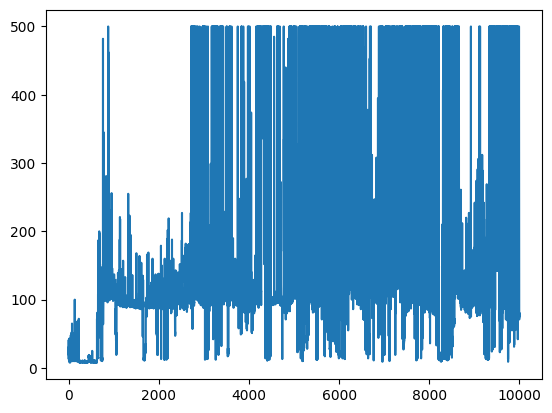

In [ ]:
total_count = 0 # Inicializa um contador para o número total de passos coletados.
total_episodes = 0  #  Inicializa um contador para o número total de episódios completados.
X1 = None
a=[]
t0 = time.time()

episodios = 10_000
BeginPriority = torch.ones(200)
indicesToIncrement = deque(maxlen=10_000)

MediaDos100 = deque(maxlen=100)
MediasLista = []

brake500 = 0

stop = False

indicesToIncrement = []
priorityIncrement = torch.full((len(indicesToIncrement),), 10)

for i, data in enumerate(collector):
    indices = rb.extend(data)

    for X0 in data["next","step_count"]:
        if X1 is not None:
            if X0<X1:
                total_episodes += 1
                MediaDos100.append(X1.item())
                a.append(X1.item())
                if ((total_episodes % 100) == 0): MediasLista.append(sum(MediaDos100)/100)
                if X1.item() == 500:
                    print("alcançou 500!!!!!!")
        X1 = X0
        if X0 == 499:
            brake500 += 1
            if brake500 >= 10: stop = not stop
            indicesToIncrement.append(max(data["next","step_count"]).item())
            priorityIncrement = torch.full((len(indicesToIncrement),), 100)
            rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)

    # if stop: break
    if (total_episodes > episodios): break
    max_length = rb[:]["next", "step_count"].max()

    if len(rb) > init_rand_steps:
        for _ in range(optim_steps):
            sample, info = rb.sample(return_info=True)
            loss_vals = loss(sample)

            rb.update_priority(index=info["index"], priority=loss_vals["loss"])
            rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)

            loss_vals["loss"] = loss_vals["loss"].mean()
            loss_vals["loss"].backward()
            optim.step()
            optim.zero_grad()

            exploration_module.step(data.numel())

            updater.step()

        torchrl_logger.info(f"Episodes: {total_episodes}, Max num steps: {max_length}, rb length {len(rb)}")
        total_count += data.numel()

t1 = time.time()
torchrl_logger.info(f"solved after {total_count} steps, {total_episodes} episodes and in {t1-t0}s.")
plt.plot(a)
plt.show()

[20.37, 22.9, 13.54, 9.41, 11.52, 9.51, 68.94, 79.62, 144.96, 129.7, 92.55, 108.59, 97.26, 98.96, 94.22, 95.88, 63.53, 87.98, 100.33, 92.83, 103.65, 95.48, 105.2, 95.13, 106.92, 109.66, 118.52, 205.03, 155.49, 157.74, 123.09, 150.92, 257.56, 211.33, 143.32, 116.65, 120.43, 116.68, 130.9, 104.91, 101.76, 148.36, 339.01, 370.04, 178.13, 102.29, 184.7, 115.67, 149.86, 190.54, 167.47, 211.53, 199.57, 215.4, 193.3, 234.53, 387.21, 181.97, 131.94, 116.88, 145.2, 271.88, 255.5, 201.3, 180.76, 149.36, 103.92, 144.59, 146.56, 195.69, 298.37, 210.63, 168.25, 216.46, 136.35, 286.28, 316.28, 291.59, 275.26, 178.51, 282.37, 428.71, 71.21, 277.02, 165.11, 123.1, 161.65, 111.56, 106.1, 108.67, 129.29, 160.15, 93.37, 285.92, 286.01, 296.35, 267.47, 176.09, 383.27, 268.06]


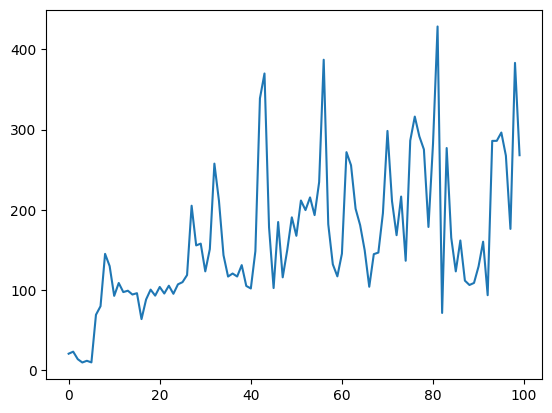

In [ ]:
print(MediasLista)
plt.plot(MediasLista)
plt.show()

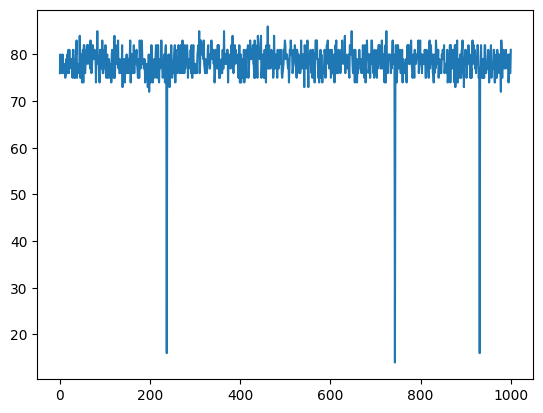

In [ ]:
eval_score = []
mean_100_eval_score = []

for i in range(1001):
    eval_score.append(env.rollout(max_steps=500, policy=policy)["next","step_count"][-1].item())
    if (i%100)==0:
      if i!=0:
        mean_100_eval_score.append(np.mean(eval_score[-100]))

plt.plot(eval_score)
plt.show()

In [ ]:
eval_score_mean = np.mean(mean_100_eval_score)
eval_score_mean

78.3

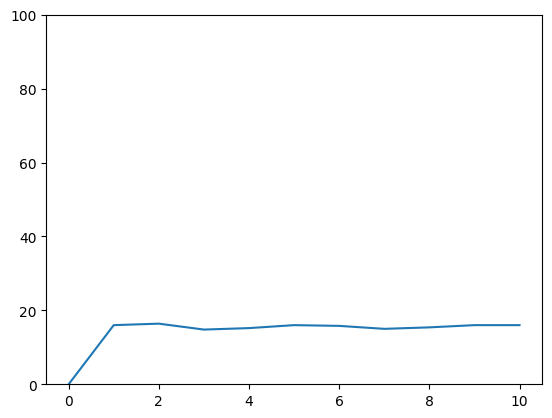

In [ ]:
# c = b/.500
# plt.plot(c)
# plt.show()
Sucessos = [0]
for i in mean_100_eval_score:
  # if (i%1000)==0:
  #   print(i)
  bb = (i/500)*100
  Sucessos.append(bb)
plt.plot(Sucessos)
plt.ylim(0,100)
plt.show()

In [ ]:
guarda_dados(a,
             nome_arquivo="Recompensa por Episódio 1",
             nome_pasta  ="Versão_V2_10mil(new)")
guarda_dados(eval_score,
             nome_arquivo="Avaliação 1",
             nome_pasta  ="Versão_V2_10mil(new)")
guarda_dados(Sucessos,
             nome_arquivo="Sucessos 1",
             nome_pasta  ="Versão_V2_10mil(new)")
guarda_dados(MediasLista,
             nome_arquivo="Médias 1",
             nome_pasta  ="Versão_V2_10mil(new)")
salvar_array(a, Sucessos, eval_score_mean, eval_score, versao="Versão_V2_10mil(new)", epoch=1)

DataFrame salvo em /content/drive/My Drive/DADOS IA PYTORCH/Versão_V2_brake500_10/Result_of_Epoch_1_Versão_V2_10mil(new).xlsx


# V3 em PyTorch

1° Os indices pra incremento foram salvos

## Configuração do Agente

### Construindo o ambiente - OK

Estaremos usando um ambiente de academia com uma StepCounter transformação. Se precisar de uma atualização, verifique se esses recursos são apresentados no tutorial do ambiente .

In [ ]:
torch.manual_seed(0) # define a semente manual para a geração de números aleatórios no PyTorch, garantindo a reprodutibilidade dos resultados.
env = TransformedEnv(GymEnv("CartPole-v1"), StepCounter())
# cria um ambiente de RL para o ambiente "CartPole-v1" do OpenAI Gym, com um contador de passos adicionado como uma transformação ao ambiente.
env.set_seed(0) # define a semente para o ambiente env, garantindo a consistência do comportamento do ambiente em diferentes execuções.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


795726461

### Projetando uma política

O próximo passo é construir nossa política. Faremos uma versão regular e determinística do ator para ser usada no módulo de perda e durante a avaliação . A seguir, iremos aumentá-lo com um módulo de exploração para inferência .

In [ ]:
# Essa linha cria uma MLP que mapeia observações do ambiente para valores de ação, com duas camadas ocultas de 64 neurônios cada.
value_mlp = MLP(out_features=env.action_spec.shape[-1], num_cells=[64, 64])
# MLP: Refere-se a um Multi-Layer Perceptron (MLP), uma rede neural feed-forward composta por múltiplas camadas densamente conectadas.
# out_features=env.action_spec.shape[-1]: Define o número de neurônios na camada de saída da MLP.
# env.action_spec.shape[-1] é a dimensão do espaço de ações do ambiente, o que significa que a MLP vai produzir um valor para cada ação possível no ambiente.
# num_cells=[64, 64]: Define a arquitetura da MLP, com duas camadas ocultas, cada uma contendo 64 neurônios.

# Essa linha cria um módulo que pega as observações do ambiente (observation) e produz valores de ação (action_value) usando a MLP definida anteriormente.
value_net = Mod(value_mlp, in_keys=["observation"], out_keys=["action_value"])
# Mod: Refere-se ao TensorDictModule, que é um módulo que opera sobre TensorDicts.
# value_mlp: A MLP criada na linha anterior.
# in_keys=["observation"]: Define as chaves de entrada para o módulo. Aqui, o módulo espera uma chave chamada observation no TensorDict de entrada.
# out_keys=["action_value"]: Define as chaves de saída para o módulo. O módulo irá produzir uma chave chamada action_value no TensorDict de saída.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
# Cria uma política que primeiro passa a observação através da value_net para obter os valores de ação
# e, em seguida, usa o QValueModule para calcular os valores Q para as ações.
policy = Seq(value_net, QValueModule(spec=env.action_spec))
# Seq: Refere-se ao TensorDictSequential, que é similar ao torch.nn.Sequential, mas opera sobre TensorDicts.
# value_net: O módulo criado na linha anterior.
# QValueModule(spec=env.action_spec): Um módulo específico para calcular valores Q, usado em algoritmos de Q-learning.
# spec=env.action_spec fornece as especificações do espaço de ações do ambiente.

# Cria um módulo de exploração que implementa uma estratégia epsilon-greedy com um valor inicial de epsilon de 0.5 e que diminui ao longo de 100.000 passos.
exploration_module = EGreedyModule(env.action_spec, annealing_num_steps=100_000, eps_init=1)
# EGreedyModule: Implementa política epsilon-greedy, que escolhe ações aleatoriamente com certa probabilidade epsilon, e a melhor ação com probabilidade 1-epsilon.
# env.action_spec: As especificações do espaço de ações do ambiente.
# annealing_num_steps=100_000: Define o número de passos durante os quais o valor de epsilon será reduzido gradualmente (annealing).
# eps_init=0.5: Define o valor inicial de epsilon. No início, 50% das ações serão escolhidas aleatoriamente.

# Essa linha combina a política com o módulo de exploração em uma sequência, resultando em uma política que primeiro calcula os valores de ação
# e, em seguida, aplica a estratégia epsilon-greedy para selecionar as ações.
policy_explore = Seq(policy, exploration_module)
# Seq: Refere-se ao TensorDictSequential.
# policy: A política definida anteriormente.
# exploration_module: O módulo de exploração epsilon-greedy definido na linha anterior.

/usr/local/lib/python3.10/dist-packages/torchrl/modules/tensordict_module/exploration.py:97: UserWarning: eps_init should be a float.
  warnings.warn("eps_init should be a float.")


### Coletor de dados e buffer de reprodução

Aí vem a parte dos dados: precisamos de um coletor de dados para obter facilmente lotes de dados e um buffer de reprodução para armazenar esses dados para treinamento.

In [ ]:
init_rand_steps = 5000
# Define o número inicial de passos aleatórios a serem realizados no ambiente antes de começar a usar a política treinada.
# Isso ajuda a inicializar o replay buffer com uma diversidade de estados e ações.
frames_per_batch = 500
# Define o número de frames (ou passos de tempo) que serão coletados em cada lote (batch) de coleta de dados do ambiente.
optim_steps = 25
# Define o número de passos de otimização que serão realizados após cada lote de coleta de dados.
# Isso controla quantas atualizações dos pesos da rede neural serão feitas com base nos dados coletados.

# SyncDataCollector: Um coletor de dados síncrono que coleta experiências do ambiente usando a política fornecida.
collector = SyncDataCollector(
    env,
    policy,
    frames_per_batch=frames_per_batch,
    total_frames=-1,
    init_random_frames=init_rand_steps,
)
# env: O ambiente de RL, criado anteriormente com TransformedEnv.
# policy: A política que será usada para coletar experiências, criada anteriormente.
# frames_per_batch=frames_per_batch: Especifica que 100 frames serão coletados em cada lote.
# total_frames=-1: Especifica que o coletor deve continuar indefinidamente (ou até que seja explicitamente parado).
# init_random_frames=init_rand_steps: Especifica que 5000 passos aleatórios serão realizados inicialmente p/ preencher o replay buffer com experiências variadas.
size = 100_000
rb = ReplayBuffer(
                storage=LazyTensorStorage(size),
                sampler=PrioritizedSampler(max_capacity=size, alpha=0.6, beta=0.4),
                batch_size=200)

### Módulo de perda e otimizador

Construímos nossa perda conforme indicado no tutorial dedicado , com seu otimizador e atualizador de parâmetros de destino:

In [ ]:
#  Implementa a função de perda para o algoritmo DQN (Deep Q-Network).
loss = DQNLoss(value_network=policy, action_space=env.action_spec, delay_value=True, reduction='none')
# value_network=policy: A rede de valor utilizada para calcular os valores Q. Aqui, policy é a política criada anteriormente, que inclui o QValueModule.
# action_space=env.action_spec: Especifica o espaço de ações do ambiente, utilizado para calcular os valores Q para todas as ações possíveis.
# delay_value=True: Indica que a rede alvo (target network) deve ser usada para calcular os valores Q futuros, o que é uma técnica comum para estabilizar o treinamento em DQN.

# Um otimizador amplamente utilizado que combina as vantagens dos métodos AdaGrad e RMSProp. É particularmente eficiente para grandes problemas de aprendizado de máquina com muitos parâmetros.
optim = Adam(loss.parameters(), lr=0.01)
# loss.parameters(): Passa os parâmetros da função de perda (que incluem os parâmetros da rede de valor) para o otimizador.
# lr=0.02: Define a taxa de aprendizado (learning rate) como 0.02. Esta taxa controla o tamanho dos passos de atualização dos pesos da rede neural durante o treinamento.

# Implementa a atualização suave dos parâmetros da rede, uma técnica comum em algoritmos de RL para atualizar gradualmente uma rede alvo (target network) com os parâmetros da rede de valor (online network).
updater = SoftUpdate(loss, eps=0.99)
# loss: A função de perda que contém os parâmetros da rede de valor e da rede alvo.
# eps=0.99: Define o fator de atualização suave (soft update factor). eps=0.99 indica que 99% dos parâmetros da rede alvo são mantidos e apenas 1% é atualizado a partir da rede de valor em cada passo.

### Registrador

Usaremos um registrador CSV para registrar nossos resultados e salvar vídeos renderizados.

In [ ]:
path = "./training_loop" # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.

# CSVLogger: Um logger que registra dados em formato CSV, útil para monitorar o progresso do treinamento e analisar resultados.
logger = CSVLogger(exp_name="dqn", log_dir=path, video_format="mp4")
# exp_name="dqn": Nome da experiência, usado como um identificador para os logs. Aqui, é definido como "dqn" (Deep Q-Network).
# log_dir=path: Diretório onde os logs serão salvos. Neste caso, é o diretório definido anteriormente, ./training_loop.
# video_format="mp4": Especifica o formato de vídeo para gravação. Aqui, está configurado para MP4.

# Um objeto que grava vídeos das execuções do ambiente durante o treinamento, útil para visualizar o comportamento do agente.
video_recorder = VideoRecorder(logger, tag="video")
# logger: O logger criado na linha anterior, que será usado para salvar os vídeos.
# tag="video": Uma tag para identificar os vídeos nos logs. Aqui, está definido como "video".

# Um wrapper que aplica transformações ao ambiente, como normalização de observações ou recompensas, e também permite a adição de funcionalidades como gravação de vídeos.
record_env = TransformedEnv(
    GymEnv("CartPole-v1", from_pixels=True, pixels_only=False), video_recorder
)
# GymEnv("CartPole-v1", from_pixels=True, pixels_only=False): Cria um ambiente GymEnv para o ambiente "CartPole-v1" do OpenAI Gym.
# from_pixels=True: Indica que o ambiente será renderizado a partir de pixels, permitindo a gravação visual do ambiente.
# pixels_only=False: Indica que tanto as observações em forma de pixels quanto outras observações (como a posição e a velocidade do carrinho) serão retornadas pelo ambiente.
# video_recorder: O gravador de vídeos criado na linha anterior, que será usado para gravar as execuções do ambiente.

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


## Ciclo de treinamento

2024-06-03 11:57:38,049 [torchrl][INFO] Episodes: 280, Max num steps: 100, rb length 5500
2024-06-03 11:57:39,194 [torchrl][INFO] Episodes: 334, Max num steps: 100, rb length 6000
2024-06-03 11:57:40,376 [torchrl][INFO] Episodes: 381, Max num steps: 100, rb length 6500
2024-06-03 11:57:41,845 [torchrl][INFO] Episodes: 409, Max num steps: 100, rb length 7000
2024-06-03 11:57:43,458 [torchrl][INFO] Episodes: 428, Max num steps: 100, rb length 7500
2024-06-03 11:57:45,270 [torchrl][INFO] Episodes: 483, Max num steps: 100, rb length 8000
2024-06-03 11:57:46,517 [torchrl][INFO] Episodes: 522, Max num steps: 100, rb length 8500
2024-06-03 11:57:47,621 [torchrl][INFO] Episodes: 524, Max num steps: 456, rb length 9000
2024-06-03 11:57:48,711 [torchrl][INFO] Episodes: 527, Max num steps: 456, rb length 9500
2024-06-03 11:57:49,852 [torchrl][INFO] Episodes: 578, Max num steps: 456, rb length 10000
2024-06-03 11:57:51,345 [torchrl][INFO] Episodes: 630, Max num steps: 456, rb length 10500
2024-06-

alcançou 500!!!!!!


2024-06-03 11:58:34,327 [torchrl][INFO] Episodes: 795, Max num steps: 500, rb length 27500
2024-06-03 11:58:35,442 [torchrl][INFO] Episodes: 798, Max num steps: 500, rb length 28000
2024-06-03 11:58:36,623 [torchrl][INFO] Episodes: 803, Max num steps: 500, rb length 28500
2024-06-03 11:58:37,732 [torchrl][INFO] Episodes: 808, Max num steps: 500, rb length 29000
2024-06-03 11:58:39,028 [torchrl][INFO] Episodes: 813, Max num steps: 500, rb length 29500
2024-06-03 11:58:40,122 [torchrl][INFO] Episodes: 818, Max num steps: 500, rb length 30000
2024-06-03 11:58:41,632 [torchrl][INFO] Episodes: 820, Max num steps: 500, rb length 30500
2024-06-03 11:58:43,234 [torchrl][INFO] Episodes: 822, Max num steps: 500, rb length 31000
2024-06-03 11:58:45,006 [torchrl][INFO] Episodes: 823, Max num steps: 500, rb length 31500
2024-06-03 11:58:46,287 [torchrl][INFO] Episodes: 824, Max num steps: 500, rb length 32000
2024-06-03 11:58:47,518 [torchrl][INFO] Episodes: 828, Max num steps: 500, rb length 32500

alcançou 500!!!!!!


2024-06-03 12:02:34,579 [torchrl][INFO] Episodes: 1656, Max num steps: 500, rb length 100000
2024-06-03 12:02:35,697 [torchrl][INFO] Episodes: 1660, Max num steps: 500, rb length 100000
2024-06-03 12:02:36,806 [torchrl][INFO] Episodes: 1665, Max num steps: 500, rb length 100000
2024-06-03 12:02:38,338 [torchrl][INFO] Episodes: 1670, Max num steps: 500, rb length 100000
2024-06-03 12:02:39,962 [torchrl][INFO] Episodes: 1675, Max num steps: 500, rb length 100000
2024-06-03 12:02:41,715 [torchrl][INFO] Episodes: 1680, Max num steps: 500, rb length 100000
2024-06-03 12:02:42,832 [torchrl][INFO] Episodes: 1685, Max num steps: 500, rb length 100000
2024-06-03 12:02:43,985 [torchrl][INFO] Episodes: 1690, Max num steps: 500, rb length 100000
2024-06-03 12:02:45,102 [torchrl][INFO] Episodes: 1695, Max num steps: 500, rb length 100000
2024-06-03 12:02:46,213 [torchrl][INFO] Episodes: 1699, Max num steps: 500, rb length 100000
2024-06-03 12:02:47,344 [torchrl][INFO] Episodes: 1703, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:02:50,730 [torchrl][INFO] Episodes: 1712, Max num steps: 500, rb length 100000
2024-06-03 12:02:51,969 [torchrl][INFO] Episodes: 1716, Max num steps: 500, rb length 100000
2024-06-03 12:02:53,572 [torchrl][INFO] Episodes: 1720, Max num steps: 500, rb length 100000
2024-06-03 12:02:55,617 [torchrl][INFO] Episodes: 1726, Max num steps: 500, rb length 100000
2024-06-03 12:02:56,852 [torchrl][INFO] Episodes: 1730, Max num steps: 500, rb length 100000
2024-06-03 12:02:57,966 [torchrl][INFO] Episodes: 1734, Max num steps: 500, rb length 100000
2024-06-03 12:02:59,186 [torchrl][INFO] Episodes: 1738, Max num steps: 500, rb length 100000
2024-06-03 12:03:00,290 [torchrl][INFO] Episodes: 1743, Max num steps: 500, rb length 100000
2024-06-03 12:03:01,530 [torchrl][INFO] Episodes: 1748, Max num steps: 500, rb length 100000
2024-06-03 12:03:02,666 [torchrl][INFO] Episodes: 1752, Max num steps: 500, rb length 100000
2024-06-03 12:03:03,780 [torchrl][INFO] Episodes: 1757, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:03:09,473 [torchrl][INFO] Episodes: 1768, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:03:11,199 [torchrl][INFO] Episodes: 1769, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:03:12,320 [torchrl][INFO] Episodes: 1770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:03:13,428 [torchrl][INFO] Episodes: 1771, Max num steps: 500, rb length 100000
2024-06-03 12:03:14,541 [torchrl][INFO] Episodes: 1776, Max num steps: 500, rb length 100000
2024-06-03 12:03:15,663 [torchrl][INFO] Episodes: 1781, Max num steps: 500, rb length 100000
2024-06-03 12:03:16,947 [torchrl][INFO] Episodes: 1783, Max num steps: 500, rb length 100000
2024-06-03 12:03:18,083 [torchrl][INFO] Episodes: 1787, Max num steps: 500, rb length 100000
2024-06-03 12:03:19,197 [torchrl][INFO] Episodes: 1788, Max num steps: 500, rb length 100000
2024-06-03 12:03:20,309 [torchrl][INFO] Episodes: 1792, Max num steps: 500, rb length 100000
2024-06-03 12:03:21,694 [torchrl][INFO] Episodes: 1797, Max num steps: 500, rb length 100000
2024-06-03 12:03:23,365 [torchrl][INFO] Episodes: 1802, Max num steps: 500, rb length 100000
2024-06-03 12:03:25,114 [torchrl][INFO] Episodes: 1806, Max num steps: 500, rb length 100000
2024-06-03 12:03:26,461 [torchrl][INFO] Episodes: 1811, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:03:52,785 [torchrl][INFO] Episodes: 1952, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:03:54,570 [torchrl][INFO] Episodes: 1953, Max num steps: 500, rb length 100000
2024-06-03 12:03:56,019 [torchrl][INFO] Episodes: 1957, Max num steps: 500, rb length 100000
2024-06-03 12:03:57,142 [torchrl][INFO] Episodes: 1962, Max num steps: 500, rb length 100000
2024-06-03 12:03:58,251 [torchrl][INFO] Episodes: 1966, Max num steps: 500, rb length 100000
2024-06-03 12:03:59,389 [torchrl][INFO] Episodes: 1971, Max num steps: 500, rb length 100000
2024-06-03 12:04:00,563 [torchrl][INFO] Episodes: 1972, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:01,790 [torchrl][INFO] Episodes: 1973, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:03,120 [torchrl][INFO] Episodes: 1976, Max num steps: 500, rb length 100000
2024-06-03 12:04:04,256 [torchrl][INFO] Episodes: 1980, Max num steps: 500, rb length 100000
2024-06-03 12:04:05,367 [torchrl][INFO] Episodes: 1984, Max num steps: 500, rb length 100000
2024-06-03 12:04:06,962 [torchrl][INFO] Episodes: 1989, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:08,641 [torchrl][INFO] Episodes: 1990, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:10,443 [torchrl][INFO] Episodes: 1991, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:11,589 [torchrl][INFO] Episodes: 1992, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:12,713 [torchrl][INFO] Episodes: 1993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:13,830 [torchrl][INFO] Episodes: 1994, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:14,961 [torchrl][INFO] Episodes: 1995, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:16,078 [torchrl][INFO] Episodes: 1996, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:17,208 [torchrl][INFO] Episodes: 1997, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:18,356 [torchrl][INFO] Episodes: 1998, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:19,510 [torchrl][INFO] Episodes: 1999, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:20,718 [torchrl][INFO] Episodes: 2000, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:22,359 [torchrl][INFO] Episodes: 2001, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:24,140 [torchrl][INFO] Episodes: 2002, Max num steps: 500, rb length 100000
2024-06-03 12:04:25,737 [torchrl][INFO] Episodes: 2006, Max num steps: 500, rb length 100000
2024-06-03 12:04:26,875 [torchrl][INFO] Episodes: 2007, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:28,195 [torchrl][INFO] Episodes: 2011, Max num steps: 500, rb length 100000
2024-06-03 12:04:29,325 [torchrl][INFO] Episodes: 2012, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:30,462 [torchrl][INFO] Episodes: 2013, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:31,610 [torchrl][INFO] Episodes: 2014, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:32,739 [torchrl][INFO] Episodes: 2019, Max num steps: 500, rb length 100000
2024-06-03 12:04:33,862 [torchrl][INFO] Episodes: 2023, Max num steps: 500, rb length 100000
2024-06-03 12:04:34,992 [torchrl][INFO] Episodes: 2024, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:36,548 [torchrl][INFO] Episodes: 2025, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:38,210 [torchrl][INFO] Episodes: 2026, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:40,066 [torchrl][INFO] Episodes: 2031, Max num steps: 500, rb length 100000
2024-06-03 12:04:41,348 [torchrl][INFO] Episodes: 2035, Max num steps: 500, rb length 100000
2024-06-03 12:04:42,487 [torchrl][INFO] Episodes: 2036, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:43,655 [torchrl][INFO] Episodes: 2037, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:44,802 [torchrl][INFO] Episodes: 2038, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:45,967 [torchrl][INFO] Episodes: 2039, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:47,116 [torchrl][INFO] Episodes: 2040, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:48,440 [torchrl][INFO] Episodes: 2041, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:49,609 [torchrl][INFO] Episodes: 2042, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:51,230 [torchrl][INFO] Episodes: 2043, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:52,911 [torchrl][INFO] Episodes: 2048, Max num steps: 500, rb length 100000
2024-06-03 12:04:54,678 [torchrl][INFO] Episodes: 2049, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:56,085 [torchrl][INFO] Episodes: 2050, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:57,237 [torchrl][INFO] Episodes: 2051, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:58,403 [torchrl][INFO] Episodes: 2052, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:59,565 [torchrl][INFO] Episodes: 2053, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:00,723 [torchrl][INFO] Episodes: 2054, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:01,875 [torchrl][INFO] Episodes: 2055, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:03,020 [torchrl][INFO] Episodes: 2056, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:04,185 [torchrl][INFO] Episodes: 2057, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:05,348 [torchrl][INFO] Episodes: 2058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:07,053 [torchrl][INFO] Episodes: 2059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:08,926 [torchrl][INFO] Episodes: 2064, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:10,503 [torchrl][INFO] Episodes: 2065, Max num steps: 500, rb length 100000
2024-06-03 12:05:11,667 [torchrl][INFO] Episodes: 2069, Max num steps: 500, rb length 100000
2024-06-03 12:05:12,819 [torchrl][INFO] Episodes: 2075, Max num steps: 500, rb length 100000
2024-06-03 12:05:14,162 [torchrl][INFO] Episodes: 2076, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:15,319 [torchrl][INFO] Episodes: 2077, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:16,485 [torchrl][INFO] Episodes: 2082, Max num steps: 500, rb length 100000
2024-06-03 12:05:17,651 [torchrl][INFO] Episodes: 2087, Max num steps: 500, rb length 100000
2024-06-03 12:05:18,858 [torchrl][INFO] Episodes: 2091, Max num steps: 500, rb length 100000
2024-06-03 12:05:20,030 [torchrl][INFO] Episodes: 2096, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:21,716 [torchrl][INFO] Episodes: 2097, Max num steps: 500, rb length 100000
2024-06-03 12:05:23,479 [torchrl][INFO] Episodes: 2102, Max num steps: 500, rb length 100000
2024-06-03 12:05:25,024 [torchrl][INFO] Episodes: 2107, Max num steps: 500, rb length 100000
2024-06-03 12:05:26,195 [torchrl][INFO] Episodes: 2108, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:27,355 [torchrl][INFO] Episodes: 2109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:28,535 [torchrl][INFO] Episodes: 2114, Max num steps: 500, rb length 100000
2024-06-03 12:05:29,674 [torchrl][INFO] Episodes: 2115, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:30,862 [torchrl][INFO] Episodes: 2120, Max num steps: 500, rb length 100000
2024-06-03 12:05:32,135 [torchrl][INFO] Episodes: 2125, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:33,332 [torchrl][INFO] Episodes: 2126, Max num steps: 500, rb length 100000
2024-06-03 12:05:34,556 [torchrl][INFO] Episodes: 2131, Max num steps: 500, rb length 100000
2024-06-03 12:05:36,514 [torchrl][INFO] Episodes: 2136, Max num steps: 500, rb length 100000
2024-06-03 12:05:38,298 [torchrl][INFO] Episodes: 2137, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:39,855 [torchrl][INFO] Episodes: 2142, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:41,009 [torchrl][INFO] Episodes: 2143, Max num steps: 500, rb length 100000
2024-06-03 12:05:42,170 [torchrl][INFO] Episodes: 2147, Max num steps: 500, rb length 100000
2024-06-03 12:05:43,354 [torchrl][INFO] Episodes: 2153, Max num steps: 500, rb length 100000
2024-06-03 12:05:44,519 [torchrl][INFO] Episodes: 2158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:45,703 [torchrl][INFO] Episodes: 2159, Max num steps: 500, rb length 100000
2024-06-03 12:05:46,855 [torchrl][INFO] Episodes: 2163, Max num steps: 500, rb length 100000
2024-06-03 12:05:48,072 [torchrl][INFO] Episodes: 2164, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:49,239 [torchrl][INFO] Episodes: 2170, Max num steps: 500, rb length 100000
2024-06-03 12:05:50,869 [torchrl][INFO] Episodes: 2175, Max num steps: 500, rb length 100000
2024-06-03 12:05:52,612 [torchrl][INFO] Episodes: 2179, Max num steps: 500, rb length 100000
2024-06-03 12:05:54,242 [torchrl][INFO] Episodes: 2183, Max num steps: 500, rb length 100000
2024-06-03 12:05:55,404 [torchrl][INFO] Episodes: 2189, Max num steps: 500, rb length 100000
2024-06-03 12:05:56,551 [torchrl][INFO] Episodes: 2191, Max num steps: 500, rb length 100000
2024-06-03 12:05:57,699 [torchrl][INFO] Episodes: 2192, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:59,161 [torchrl][INFO] Episodes: 2196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:00,321 [torchrl][INFO] Episodes: 2197, Max num steps: 500, rb length 100000
2024-06-03 12:06:01,474 [torchrl][INFO] Episodes: 2201, Max num steps: 500, rb length 100000
2024-06-03 12:06:02,651 [torchrl][INFO] Episodes: 2202, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:03,808 [torchrl][INFO] Episodes: 2203, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:05,565 [torchrl][INFO] Episodes: 2208, Max num steps: 500, rb length 100000
2024-06-03 12:06:07,308 [torchrl][INFO] Episodes: 2209, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:09,032 [torchrl][INFO] Episodes: 2214, Max num steps: 500, rb length 100000
2024-06-03 12:06:10,185 [torchrl][INFO] Episodes: 2219, Max num steps: 500, rb length 100000
2024-06-03 12:06:11,329 [torchrl][INFO] Episodes: 2224, Max num steps: 500, rb length 100000
2024-06-03 12:06:12,484 [torchrl][INFO] Episodes: 2225, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:13,641 [torchrl][INFO] Episodes: 2226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:14,836 [torchrl][INFO] Episodes: 2227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:16,016 [torchrl][INFO] Episodes: 2228, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:17,803 [torchrl][INFO] Episodes: 2233, Max num steps: 500, rb length 100000
2024-06-03 12:06:19,747 [torchrl][INFO] Episodes: 2238, Max num steps: 500, rb length 100000
2024-06-03 12:06:21,666 [torchrl][INFO] Episodes: 2243, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:23,749 [torchrl][INFO] Episodes: 2244, Max num steps: 500, rb length 100000
2024-06-03 12:06:25,584 [torchrl][INFO] Episodes: 2248, Max num steps: 500, rb length 100000
2024-06-03 12:06:26,924 [torchrl][INFO] Episodes: 2253, Max num steps: 500, rb length 100000
2024-06-03 12:06:28,093 [torchrl][INFO] Episodes: 2258, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:29,261 [torchrl][INFO] Episodes: 2259, Max num steps: 500, rb length 100000
2024-06-03 12:06:30,414 [torchrl][INFO] Episodes: 2263, Max num steps: 500, rb length 100000
2024-06-03 12:06:31,583 [torchrl][INFO] Episodes: 2264, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:32,820 [torchrl][INFO] Episodes: 2265, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:34,089 [torchrl][INFO] Episodes: 2270, Max num steps: 500, rb length 100000
2024-06-03 12:06:35,252 [torchrl][INFO] Episodes: 2274, Max num steps: 500, rb length 100000
2024-06-03 12:06:36,852 [torchrl][INFO] Episodes: 2275, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:38,625 [torchrl][INFO] Episodes: 2276, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:40,424 [torchrl][INFO] Episodes: 2280, Max num steps: 500, rb length 100000
2024-06-03 12:06:41,587 [torchrl][INFO] Episodes: 2285, Max num steps: 500, rb length 100000
2024-06-03 12:06:42,762 [torchrl][INFO] Episodes: 2289, Max num steps: 500, rb length 100000
2024-06-03 12:06:43,922 [torchrl][INFO] Episodes: 2294, Max num steps: 500, rb length 100000
2024-06-03 12:06:45,081 [torchrl][INFO] Episodes: 2298, Max num steps: 500, rb length 100000
2024-06-03 12:06:46,306 [torchrl][INFO] Episodes: 2302, Max num steps: 500, rb length 100000
2024-06-03 12:06:47,509 [torchrl][INFO] Episodes: 2307, Max num steps: 500, rb length 100000
2024-06-03 12:06:48,873 [torchrl][INFO] Episodes: 2311, Max num steps: 500, rb length 100000
2024-06-03 12:06:50,031 [torchrl][INFO] Episodes: 2316, Max num steps: 500, rb length 100000
2024-06-03 12:06:51,691 [torchrl][INFO] Episodes: 2320, Max num steps: 500, rb length 100000
2024-06-03 12:06:53,474 [torchrl][INFO] Episodes: 2324, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:07:02,302 [torchrl][INFO] Episodes: 2350, Max num steps: 500, rb length 100000
2024-06-03 12:07:03,461 [torchrl][INFO] Episodes: 2354, Max num steps: 500, rb length 100000
2024-06-03 12:07:04,624 [torchrl][INFO] Episodes: 2355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:06,116 [torchrl][INFO] Episodes: 2356, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:07,840 [torchrl][INFO] Episodes: 2357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:09,697 [torchrl][INFO] Episodes: 2358, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:11,084 [torchrl][INFO] Episodes: 2362, Max num steps: 500, rb length 100000
2024-06-03 12:07:12,266 [torchrl][INFO] Episodes: 2366, Max num steps: 500, rb length 100000
2024-06-03 12:07:13,437 [torchrl][INFO] Episodes: 2370, Max num steps: 500, rb length 100000
2024-06-03 12:07:14,805 [torchrl][INFO] Episodes: 2374, Max num steps: 500, rb length 100000
2024-06-03 12:07:16,004 [torchrl][INFO] Episodes: 2378, Max num steps: 500, rb length 100000
2024-06-03 12:07:17,173 [torchrl][INFO] Episodes: 2383, Max num steps: 500, rb length 100000
2024-06-03 12:07:18,370 [torchrl][INFO] Episodes: 2387, Max num steps: 500, rb length 100000
2024-06-03 12:07:19,546 [torchrl][INFO] Episodes: 2391, Max num steps: 500, rb length 100000
2024-06-03 12:07:20,969 [torchrl][INFO] Episodes: 2395, Max num steps: 500, rb length 100000
2024-06-03 12:07:22,680 [torchrl][INFO] Episodes: 2398, Max num steps: 500, rb length 100000
2024-06-03 12:07:24,562 [torchrl][INFO] Episodes: 2402, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:07:40,677 [torchrl][INFO] Episodes: 2438, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:41,855 [torchrl][INFO] Episodes: 2439, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:43,155 [torchrl][INFO] Episodes: 2440, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:44,328 [torchrl][INFO] Episodes: 2441, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:45,501 [torchrl][INFO] Episodes: 2442, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:46,688 [torchrl][INFO] Episodes: 2445, Max num steps: 500, rb length 100000
2024-06-03 12:07:47,864 [torchrl][INFO] Episodes: 2446, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:49,077 [torchrl][INFO] Episodes: 2448, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:50,481 [torchrl][INFO] Episodes: 2449, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:52,216 [torchrl][INFO] Episodes: 2450, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:54,216 [torchrl][INFO] Episodes: 2451, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:55,420 [torchrl][INFO] Episodes: 2452, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:56,588 [torchrl][INFO] Episodes: 2453, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:57,805 [torchrl][INFO] Episodes: 2454, Max num steps: 500, rb length 100000
2024-06-03 12:07:58,993 [torchrl][INFO] Episodes: 2456, Max num steps: 500, rb length 100000
2024-06-03 12:08:00,412 [torchrl][INFO] Episodes: 2457, Max num steps: 500, rb length 100000
2024-06-03 12:08:01,590 [torchrl][INFO] Episodes: 2460, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:08:02,773 [torchrl][INFO] Episodes: 2461, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:08:03,960 [torchrl][INFO] Episodes: 2462, Max num steps: 500, rb length 100000
2024-06-03 12:08:05,574 [torchrl][INFO] Episodes: 2465, Max num steps: 500, rb length 100000
2024-06-03 12:08:07,341 [torchrl][INFO] Episodes: 2469, Max num steps: 500, rb length 100000
2024-06-03 12:08:09,166 [torchrl][INFO] Episodes: 2473, Max num steps: 500, rb length 100000
2024-06-03 12:08:10,331 [torchrl][INFO] Episodes: 2477, Max num steps: 500, rb length 100000
2024-06-03 12:08:11,508 [torchrl][INFO] Episodes: 2480, Max num steps: 500, rb length 100000
2024-06-03 12:08:12,680 [torchrl][INFO] Episodes: 2484, Max num steps: 500, rb length 100000
2024-06-03 12:08:13,859 [torchrl][INFO] Episodes: 2488, Max num steps: 500, rb length 100000
2024-06-03 12:08:15,030 [torchrl][INFO] Episodes: 2492, Max num steps: 500, rb length 100000
2024-06-03 12:08:16,199 [torchrl][INFO] Episodes: 2495, Max num steps: 500, rb length 100000
2024-06-03 12:08:17,375 [torchrl][INFO] Episodes: 2500, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:08:20,210 [torchrl][INFO] Episodes: 2505, Max num steps: 500, rb length 100000
2024-06-03 12:08:21,974 [torchrl][INFO] Episodes: 2507, Max num steps: 500, rb length 100000
2024-06-03 12:08:23,990 [torchrl][INFO] Episodes: 2511, Max num steps: 500, rb length 100000
2024-06-03 12:08:25,165 [torchrl][INFO] Episodes: 2515, Max num steps: 500, rb length 100000
2024-06-03 12:08:26,342 [torchrl][INFO] Episodes: 2519, Max num steps: 500, rb length 100000
2024-06-03 12:08:27,522 [torchrl][INFO] Episodes: 2524, Max num steps: 500, rb length 100000
2024-06-03 12:08:28,726 [torchrl][INFO] Episodes: 2528, Max num steps: 500, rb length 100000
2024-06-03 12:08:29,902 [torchrl][INFO] Episodes: 2532, Max num steps: 500, rb length 100000
2024-06-03 12:08:31,072 [torchrl][INFO] Episodes: 2537, Max num steps: 500, rb length 100000
2024-06-03 12:08:32,269 [torchrl][INFO] Episodes: 2541, Max num steps: 500, rb length 100000
2024-06-03 12:08:33,430 [torchrl][INFO] Episodes: 2546, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:09:00,928 [torchrl][INFO] Episodes: 2630, Max num steps: 500, rb length 100000
2024-06-03 12:09:02,108 [torchrl][INFO] Episodes: 2634, Max num steps: 500, rb length 100000
2024-06-03 12:09:03,280 [torchrl][INFO] Episodes: 2635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:04,927 [torchrl][INFO] Episodes: 2636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:06,696 [torchrl][INFO] Episodes: 2637, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:08,405 [torchrl][INFO] Episodes: 2638, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:09,724 [torchrl][INFO] Episodes: 2639, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:11,190 [torchrl][INFO] Episodes: 2640, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:12,378 [torchrl][INFO] Episodes: 2644, Max num steps: 500, rb length 100000
2024-06-03 12:09:13,570 [torchrl][INFO] Episodes: 2648, Max num steps: 500, rb length 100000
2024-06-03 12:09:14,744 [torchrl][INFO] Episodes: 2653, Max num steps: 500, rb length 100000
2024-06-03 12:09:15,925 [torchrl][INFO] Episodes: 2671, Max num steps: 500, rb length 100000
2024-06-03 12:09:17,116 [torchrl][INFO] Episodes: 2692, Max num steps: 500, rb length 100000
2024-06-03 12:09:18,551 [torchrl][INFO] Episodes: 2736, Max num steps: 500, rb length 100000
2024-06-03 12:09:20,314 [torchrl][INFO] Episodes: 2738, Max num steps: 500, rb length 100000
2024-06-03 12:09:22,176 [torchrl][INFO] Episodes: 2741, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:23,711 [torchrl][INFO] Episodes: 2742, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:24,898 [torchrl][INFO] Episodes: 2743, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:26,088 [torchrl][INFO] Episodes: 2744, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:27,276 [torchrl][INFO] Episodes: 2745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:28,619 [torchrl][INFO] Episodes: 2746, Max num steps: 500, rb length 100000
2024-06-03 12:09:29,816 [torchrl][INFO] Episodes: 2748, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:31,037 [torchrl][INFO] Episodes: 2750, Max num steps: 500, rb length 100000
2024-06-03 12:09:32,214 [torchrl][INFO] Episodes: 2753, Max num steps: 500, rb length 100000
2024-06-03 12:09:33,866 [torchrl][INFO] Episodes: 2758, Max num steps: 500, rb length 100000
2024-06-03 12:09:35,596 [torchrl][INFO] Episodes: 2762, Max num steps: 500, rb length 100000
2024-06-03 12:09:37,516 [torchrl][INFO] Episodes: 2766, Max num steps: 500, rb length 100000
2024-06-03 12:09:38,814 [torchrl][INFO] Episodes: 2770, Max num steps: 500, rb length 100000
2024-06-03 12:09:39,987 [torchrl][INFO] Episodes: 2774, Max num steps: 500, rb length 100000
2024-06-03 12:09:41,152 [torchrl][INFO] Episodes: 2778, Max num steps: 500, rb length 100000
2024-06-03 12:09:42,345 [torchrl][INFO] Episodes: 2782, Max num steps: 500, rb length 100000
2024-06-03 12:09:43,524 [torchrl][INFO] Episodes: 2786, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:44,729 [torchrl][INFO] Episodes: 2787, Max num steps: 500, rb length 100000
2024-06-03 12:09:45,902 [torchrl][INFO] Episodes: 2791, Max num steps: 500, rb length 100000
2024-06-03 12:09:47,078 [torchrl][INFO] Episodes: 2795, Max num steps: 500, rb length 100000
2024-06-03 12:09:48,587 [torchrl][INFO] Episodes: 2799, Max num steps: 500, rb length 100000
2024-06-03 12:09:50,350 [torchrl][INFO] Episodes: 2800, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:52,294 [torchrl][INFO] Episodes: 2805, Max num steps: 500, rb length 100000
2024-06-03 12:09:53,526 [torchrl][INFO] Episodes: 2809, Max num steps: 500, rb length 100000
2024-06-03 12:09:54,711 [torchrl][INFO] Episodes: 2813, Max num steps: 500, rb length 100000
2024-06-03 12:09:55,906 [torchrl][INFO] Episodes: 2818, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:57,129 [torchrl][INFO] Episodes: 2819, Max num steps: 500, rb length 100000
2024-06-03 12:09:58,316 [torchrl][INFO] Episodes: 2823, Max num steps: 500, rb length 100000
2024-06-03 12:09:59,701 [torchrl][INFO] Episodes: 2828, Max num steps: 500, rb length 100000
2024-06-03 12:10:00,899 [torchrl][INFO] Episodes: 2832, Max num steps: 500, rb length 100000
2024-06-03 12:10:02,123 [torchrl][INFO] Episodes: 2837, Max num steps: 500, rb length 100000
2024-06-03 12:10:03,791 [torchrl][INFO] Episodes: 2842, Max num steps: 500, rb length 100000
2024-06-03 12:10:05,597 [torchrl][INFO] Episodes: 2847, Max num steps: 500, rb length 100000
2024-06-03 12:10:07,331 [torchrl][INFO] Episodes: 2852, Max num steps: 500, rb length 100000
2024-06-03 12:10:08,521 [torchrl][INFO] Episodes: 2857, Max num steps: 500, rb length 100000
2024-06-03 12:10:09,719 [torchrl][INFO] Episodes: 2862, Max num steps: 500, rb length 100000
2024-06-03 12:10:10,903 [torchrl][INFO] Episodes: 2867, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:10:59,875 [torchrl][INFO] Episodes: 3039, Max num steps: 500, rb length 100000
2024-06-03 12:11:01,198 [torchrl][INFO] Episodes: 3044, Max num steps: 500, rb length 100000
2024-06-03 12:11:02,950 [torchrl][INFO] Episodes: 3049, Max num steps: 500, rb length 100000
2024-06-03 12:11:04,797 [torchrl][INFO] Episodes: 3054, Max num steps: 500, rb length 100000
2024-06-03 12:11:06,241 [torchrl][INFO] Episodes: 3058, Max num steps: 500, rb length 100000
2024-06-03 12:11:07,427 [torchrl][INFO] Episodes: 3063, Max num steps: 500, rb length 100000
2024-06-03 12:11:08,614 [torchrl][INFO] Episodes: 3068, Max num steps: 500, rb length 100000
2024-06-03 12:11:09,891 [torchrl][INFO] Episodes: 3073, Max num steps: 500, rb length 100000
2024-06-03 12:11:11,086 [torchrl][INFO] Episodes: 3077, Max num steps: 500, rb length 100000
2024-06-03 12:11:12,255 [torchrl][INFO] Episodes: 3078, Max num steps: 500, rb length 100000
2024-06-03 12:11:13,498 [torchrl][INFO] Episodes: 3082, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:11:53,643 [torchrl][INFO] Episodes: 3219, Max num steps: 500, rb length 100000
2024-06-03 12:11:54,841 [torchrl][INFO] Episodes: 3223, Max num steps: 500, rb length 100000
2024-06-03 12:11:56,015 [torchrl][INFO] Episodes: 3229, Max num steps: 500, rb length 100000
2024-06-03 12:11:57,197 [torchrl][INFO] Episodes: 3233, Max num steps: 500, rb length 100000
2024-06-03 12:11:58,381 [torchrl][INFO] Episodes: 3238, Max num steps: 500, rb length 100000
2024-06-03 12:11:59,594 [torchrl][INFO] Episodes: 3244, Max num steps: 500, rb length 100000
2024-06-03 12:12:01,150 [torchrl][INFO] Episodes: 3249, Max num steps: 500, rb length 100000
2024-06-03 12:12:02,914 [torchrl][INFO] Episodes: 3254, Max num steps: 500, rb length 100000
2024-06-03 12:12:04,823 [torchrl][INFO] Episodes: 3258, Max num steps: 500, rb length 100000
2024-06-03 12:12:06,241 [torchrl][INFO] Episodes: 3264, Max num steps: 500, rb length 100000
2024-06-03 12:12:07,423 [torchrl][INFO] Episodes: 3267, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:12:08,772 [torchrl][INFO] Episodes: 3268, Max num steps: 500, rb length 100000
2024-06-03 12:12:09,972 [torchrl][INFO] Episodes: 3272, Max num steps: 500, rb length 100000
2024-06-03 12:12:11,165 [torchrl][INFO] Episodes: 3277, Max num steps: 500, rb length 100000
2024-06-03 12:12:12,520 [torchrl][INFO] Episodes: 3281, Max num steps: 500, rb length 100000
2024-06-03 12:12:13,709 [torchrl][INFO] Episodes: 3285, Max num steps: 500, rb length 100000
2024-06-03 12:12:14,891 [torchrl][INFO] Episodes: 3289, Max num steps: 500, rb length 100000
2024-06-03 12:12:16,638 [torchrl][INFO] Episodes: 3294, Max num steps: 500, rb length 100000
2024-06-03 12:12:18,437 [torchrl][INFO] Episodes: 3298, Max num steps: 500, rb length 100000
2024-06-03 12:12:20,218 [torchrl][INFO] Episodes: 3302, Max num steps: 500, rb length 100000
2024-06-03 12:12:21,415 [torchrl][INFO] Episodes: 3304, Max num steps: 500, rb length 100000
2024-06-03 12:12:22,601 [torchrl][INFO] Episodes: 3308, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:12:41,229 [torchrl][INFO] Episodes: 3400, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:12:42,451 [torchrl][INFO] Episodes: 3402, Max num steps: 500, rb length 100000
2024-06-03 12:12:43,654 [torchrl][INFO] Episodes: 3405, Max num steps: 500, rb length 100000
2024-06-03 12:12:44,967 [torchrl][INFO] Episodes: 3410, Max num steps: 500, rb length 100000
2024-06-03 12:12:46,834 [torchrl][INFO] Episodes: 3414, Max num steps: 500, rb length 100000
2024-06-03 12:12:48,703 [torchrl][INFO] Episodes: 3420, Max num steps: 500, rb length 100000
2024-06-03 12:12:50,029 [torchrl][INFO] Episodes: 3424, Max num steps: 500, rb length 100000
2024-06-03 12:12:51,218 [torchrl][INFO] Episodes: 3425, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:12:52,414 [torchrl][INFO] Episodes: 3429, Max num steps: 500, rb length 100000
2024-06-03 12:12:53,604 [torchrl][INFO] Episodes: 3433, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:12:54,983 [torchrl][INFO] Episodes: 3434, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:12:56,218 [torchrl][INFO] Episodes: 3435, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:12:57,425 [torchrl][INFO] Episodes: 3436, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:12:58,634 [torchrl][INFO] Episodes: 3437, Max num steps: 500, rb length 100000
2024-06-03 12:13:00,245 [torchrl][INFO] Episodes: 3440, Max num steps: 500, rb length 100000
2024-06-03 12:13:02,176 [torchrl][INFO] Episodes: 3441, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:04,093 [torchrl][INFO] Episodes: 3444, Max num steps: 500, rb length 100000
2024-06-03 12:13:05,301 [torchrl][INFO] Episodes: 3448, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:06,511 [torchrl][INFO] Episodes: 3449, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:07,717 [torchrl][INFO] Episodes: 3450, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:08,926 [torchrl][INFO] Episodes: 3451, Max num steps: 500, rb length 100000
2024-06-03 12:13:10,126 [torchrl][INFO] Episodes: 3453, Max num steps: 500, rb length 100000
2024-06-03 12:13:11,308 [torchrl][INFO] Episodes: 3454, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:12,530 [torchrl][INFO] Episodes: 3455, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:13,807 [torchrl][INFO] Episodes: 3457, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:15,482 [torchrl][INFO] Episodes: 3459, Max num steps: 500, rb length 100000
2024-06-03 12:13:17,434 [torchrl][INFO] Episodes: 3463, Max num steps: 500, rb length 100000
2024-06-03 12:13:19,460 [torchrl][INFO] Episodes: 3467, Max num steps: 500, rb length 100000
2024-06-03 12:13:20,658 [torchrl][INFO] Episodes: 3470, Max num steps: 500, rb length 100000
2024-06-03 12:13:21,845 [torchrl][INFO] Episodes: 3472, Max num steps: 500, rb length 100000
2024-06-03 12:13:23,037 [torchrl][INFO] Episodes: 3473, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:24,277 [torchrl][INFO] Episodes: 3474, Max num steps: 500, rb length 100000
2024-06-03 12:13:25,549 [torchrl][INFO] Episodes: 3478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:26,747 [torchrl][INFO] Episodes: 3479, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:27,945 [torchrl][INFO] Episodes: 3480, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:29,228 [torchrl][INFO] Episodes: 3481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:31,012 [torchrl][INFO] Episodes: 3482, Max num steps: 500, rb length 100000
2024-06-03 12:13:32,806 [torchrl][INFO] Episodes: 3483, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:34,337 [torchrl][INFO] Episodes: 3484, Max num steps: 500, rb length 100000
2024-06-03 12:13:35,550 [torchrl][INFO] Episodes: 3486, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:36,762 [torchrl][INFO] Episodes: 3487, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:37,994 [torchrl][INFO] Episodes: 3488, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:39,191 [torchrl][INFO] Episodes: 3489, Max num steps: 500, rb length 100000
2024-06-03 12:13:40,375 [torchrl][INFO] Episodes: 3493, Max num steps: 500, rb length 100000
2024-06-03 12:13:41,591 [torchrl][INFO] Episodes: 3498, Max num steps: 500, rb length 100000
2024-06-03 12:13:42,797 [torchrl][INFO] Episodes: 3502, Max num steps: 500, rb length 100000
2024-06-03 12:13:44,482 [torchrl][INFO] Episodes: 3506, Max num steps: 500, rb length 100000
2024-06-03 12:13:46,241 [torchrl][INFO] Episodes: 3509, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:48,168 [torchrl][INFO] Episodes: 3510, Max num steps: 500, rb length 100000
2024-06-03 12:13:49,354 [torchrl][INFO] Episodes: 3513, Max num steps: 500, rb length 100000
2024-06-03 12:13:50,577 [torchrl][INFO] Episodes: 3514, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:51,778 [torchrl][INFO] Episodes: 3518, Max num steps: 500, rb length 100000
2024-06-03 12:13:52,974 [torchrl][INFO] Episodes: 3519, Max num steps: 500, rb length 100000
2024-06-03 12:13:54,239 [torchrl][INFO] Episodes: 3524, Max num steps: 500, rb length 100000
2024-06-03 12:13:55,425 [torchrl][INFO] Episodes: 3528, Max num steps: 500, rb length 100000
2024-06-03 12:13:56,624 [torchrl][INFO] Episodes: 3531, Max num steps: 500, rb length 100000
2024-06-03 12:13:57,814 [torchrl][INFO] Episodes: 3535, Max num steps: 500, rb length 100000
2024-06-03 12:13:59,594 [torchrl][INFO] Episodes: 3539, Max num steps: 500, rb length 100000
2024-06-03 12:14:01,461 [torchrl][INFO] Episodes: 3543, Max num steps: 500, rb length 100000
2024-06-03 12:14:03,218 [torchrl][INFO] Episodes: 3547, Max num steps: 500, rb length 100000
2024-06-03 12:14:04,468 [torchrl][INFO] Episodes: 3551, Max num steps: 500, rb length 100000
2024-06-03 12:14:05,655 [torchrl][INFO] Episodes: 3552, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:14:06,879 [torchrl][INFO] Episodes: 3553, Max num steps: 500, rb length 100000
2024-06-03 12:14:08,092 [torchrl][INFO] Episodes: 3557, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:14:09,315 [torchrl][INFO] Episodes: 3558, Max num steps: 500, rb length 100000
2024-06-03 12:14:10,690 [torchrl][INFO] Episodes: 3561, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:14:11,903 [torchrl][INFO] Episodes: 3562, Max num steps: 500, rb length 100000
2024-06-03 12:14:13,191 [torchrl][INFO] Episodes: 3565, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:14:15,014 [torchrl][INFO] Episodes: 3566, Max num steps: 500, rb length 100000
2024-06-03 12:14:16,857 [torchrl][INFO] Episodes: 3568, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:14:18,349 [torchrl][INFO] Episodes: 3569, Max num steps: 500, rb length 100000
2024-06-03 12:14:19,600 [torchrl][INFO] Episodes: 3572, Max num steps: 500, rb length 100000
2024-06-03 12:14:20,832 [torchrl][INFO] Episodes: 3576, Max num steps: 500, rb length 100000
2024-06-03 12:14:22,028 [torchrl][INFO] Episodes: 3579, Max num steps: 500, rb length 100000
2024-06-03 12:14:23,236 [torchrl][INFO] Episodes: 3582, Max num steps: 500, rb length 100000
2024-06-03 12:14:24,470 [torchrl][INFO] Episodes: 3583, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:14:25,717 [torchrl][INFO] Episodes: 3587, Max num steps: 500, rb length 100000
2024-06-03 12:14:26,916 [torchrl][INFO] Episodes: 3591, Max num steps: 500, rb length 100000
2024-06-03 12:14:28,393 [torchrl][INFO] Episodes: 3594, Max num steps: 500, rb length 100000
2024-06-03 12:14:30,180 [torchrl][INFO] Episodes: 3596, Max num steps: 500, rb length 100000
2024-06-03 12:14:32,061 [torchrl][INFO] Episodes: 3600, Max num steps: 500, rb length 100000
2024-06-03 12:14:33,264 [torchrl][INFO] Episodes: 3604, Max num steps: 500, rb length 100000
2024-06-03 12:14:34,549 [torchrl][INFO] Episodes: 3607, Max num steps: 500, rb length 100000
2024-06-03 12:14:35,786 [torchrl][INFO] Episodes: 3611, Max num steps: 500, rb length 100000
2024-06-03 12:14:37,180 [torchrl][INFO] Episodes: 3614, Max num steps: 500, rb length 100000
2024-06-03 12:14:38,478 [torchrl][INFO] Episodes: 3617, Max num steps: 500, rb length 100000
2024-06-03 12:14:39,694 [torchrl][INFO] Episodes: 3621, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:14:53,395 [torchrl][INFO] Episodes: 3654, Max num steps: 500, rb length 100000
2024-06-03 12:14:54,611 [torchrl][INFO] Episodes: 3657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:14:55,834 [torchrl][INFO] Episodes: 3658, Max num steps: 500, rb length 100000
2024-06-03 12:14:57,466 [torchrl][INFO] Episodes: 3661, Max num steps: 500, rb length 100000
2024-06-03 12:14:59,291 [torchrl][INFO] Episodes: 3663, Max num steps: 500, rb length 100000
2024-06-03 12:15:01,445 [torchrl][INFO] Episodes: 3666, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:03,276 [torchrl][INFO] Episodes: 3667, Max num steps: 500, rb length 100000
2024-06-03 12:15:05,133 [torchrl][INFO] Episodes: 3670, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:06,654 [torchrl][INFO] Episodes: 3671, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:07,899 [torchrl][INFO] Episodes: 3672, Max num steps: 500, rb length 100000
2024-06-03 12:15:09,128 [torchrl][INFO] Episodes: 3675, Max num steps: 500, rb length 100000
2024-06-03 12:15:10,454 [torchrl][INFO] Episodes: 3677, Max num steps: 500, rb length 100000
2024-06-03 12:15:11,904 [torchrl][INFO] Episodes: 3680, Max num steps: 500, rb length 100000
2024-06-03 12:15:13,699 [torchrl][INFO] Episodes: 3684, Max num steps: 500, rb length 100000
2024-06-03 12:15:15,583 [torchrl][INFO] Episodes: 3687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:16,923 [torchrl][INFO] Episodes: 3688, Max num steps: 500, rb length 100000
2024-06-03 12:15:18,136 [torchrl][INFO] Episodes: 3690, Max num steps: 500, rb length 100000
2024-06-03 12:15:19,364 [torchrl][INFO] Episodes: 3694, Max num steps: 500, rb length 100000
2024-06-03 12:15:20,610 [torchrl][INFO] Episodes: 3696, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:21,833 [torchrl][INFO] Episodes: 3697, Max num steps: 500, rb length 100000
2024-06-03 12:15:23,045 [torchrl][INFO] Episodes: 3702, Max num steps: 500, rb length 100000
2024-06-03 12:15:24,259 [torchrl][INFO] Episodes: 3706, Max num steps: 500, rb length 100000
2024-06-03 12:15:25,450 [torchrl][INFO] Episodes: 3712, Max num steps: 500, rb length 100000
2024-06-03 12:15:27,110 [torchrl][INFO] Episodes: 3721, Max num steps: 500, rb length 100000
2024-06-03 12:15:29,376 [torchrl][INFO] Episodes: 3726, Max num steps: 500, rb length 100000
2024-06-03 12:15:31,015 [torchrl][INFO] Episodes: 3730, Max num steps: 500, rb length 100000
2024-06-03 12:15:32,213 [torchrl][INFO] Episodes: 3734, Max num steps: 500, rb length 100000
2024-06-03 12:15:33,426 [torchrl][INFO] Episodes: 3735, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:34,638 [torchrl][INFO] Episodes: 3744, Max num steps: 500, rb length 100000
2024-06-03 12:15:35,842 [torchrl][INFO] Episodes: 3748, Max num steps: 500, rb length 100000
2024-06-03 12:15:37,041 [torchrl][INFO] Episodes: 3752, Max num steps: 500, rb length 100000
2024-06-03 12:15:38,251 [torchrl][INFO] Episodes: 3757, Max num steps: 500, rb length 100000
2024-06-03 12:15:39,443 [torchrl][INFO] Episodes: 3761, Max num steps: 500, rb length 100000
2024-06-03 12:15:40,659 [torchrl][INFO] Episodes: 3762, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:42,473 [torchrl][INFO] Episodes: 3765, Max num steps: 500, rb length 100000
2024-06-03 12:15:44,267 [torchrl][INFO] Episodes: 3769, Max num steps: 500, rb length 100000
2024-06-03 12:15:45,832 [torchrl][INFO] Episodes: 3770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:47,056 [torchrl][INFO] Episodes: 3772, Max num steps: 500, rb length 100000
2024-06-03 12:15:48,254 [torchrl][INFO] Episodes: 3775, Max num steps: 500, rb length 100000
2024-06-03 12:15:49,457 [torchrl][INFO] Episodes: 3779, Max num steps: 500, rb length 100000
2024-06-03 12:15:50,703 [torchrl][INFO] Episodes: 3783, Max num steps: 500, rb length 100000
2024-06-03 12:15:51,912 [torchrl][INFO] Episodes: 3787, Max num steps: 500, rb length 100000
2024-06-03 12:15:53,107 [torchrl][INFO] Episodes: 3790, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:54,520 [torchrl][INFO] Episodes: 3792, Max num steps: 500, rb length 100000
2024-06-03 12:15:56,014 [torchrl][INFO] Episodes: 3796, Max num steps: 500, rb length 100000
2024-06-03 12:15:57,798 [torchrl][INFO] Episodes: 3801, Max num steps: 500, rb length 100000
2024-06-03 12:15:59,810 [torchrl][INFO] Episodes: 3805, Max num steps: 500, rb length 100000
2024-06-03 12:16:01,109 [torchrl][INFO] Episodes: 3810, Max num steps: 500, rb length 100000
2024-06-03 12:16:02,310 [torchrl][INFO] Episodes: 3814, Max num steps: 500, rb length 100000
2024-06-03 12:16:03,528 [torchrl][INFO] Episodes: 3819, Max num steps: 500, rb length 100000
2024-06-03 12:16:04,746 [torchrl][INFO] Episodes: 3823, Max num steps: 500, rb length 100000
2024-06-03 12:16:05,967 [torchrl][INFO] Episodes: 3828, Max num steps: 500, rb length 100000
2024-06-03 12:16:07,175 [torchrl][INFO] Episodes: 3832, Max num steps: 500, rb length 100000
2024-06-03 12:16:08,393 [torchrl][INFO] Episodes: 3836, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:16:13,120 [torchrl][INFO] Episodes: 3847, Max num steps: 500, rb length 100000
2024-06-03 12:16:14,921 [torchrl][INFO] Episodes: 3851, Max num steps: 500, rb length 100000
2024-06-03 12:16:16,118 [torchrl][INFO] Episodes: 3852, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:16:17,340 [torchrl][INFO] Episodes: 3856, Max num steps: 500, rb length 100000
2024-06-03 12:16:18,559 [torchrl][INFO] Episodes: 3861, Max num steps: 500, rb length 100000
2024-06-03 12:16:19,759 [torchrl][INFO] Episodes: 3865, Max num steps: 500, rb length 100000
2024-06-03 12:16:21,178 [torchrl][INFO] Episodes: 3870, Max num steps: 500, rb length 100000
2024-06-03 12:16:22,373 [torchrl][INFO] Episodes: 3875, Max num steps: 500, rb length 100000
2024-06-03 12:16:23,588 [torchrl][INFO] Episodes: 3879, Max num steps: 500, rb length 100000
2024-06-03 12:16:24,820 [torchrl][INFO] Episodes: 3885, Max num steps: 500, rb length 100000
2024-06-03 12:16:26,685 [torchrl][INFO] Episodes: 3889, Max num steps: 500, rb length 100000
2024-06-03 12:16:28,541 [torchrl][INFO] Episodes: 3891, Max num steps: 500, rb length 100000
2024-06-03 12:16:30,192 [torchrl][INFO] Episodes: 3893, Max num steps: 500, rb length 100000
2024-06-03 12:16:31,410 [torchrl][INFO] Episodes: 3897, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:16:51,491 [torchrl][INFO] Episodes: 3962, Max num steps: 500, rb length 100000
2024-06-03 12:16:52,705 [torchrl][INFO] Episodes: 3967, Max num steps: 500, rb length 100000
2024-06-03 12:16:53,919 [torchrl][INFO] Episodes: 3971, Max num steps: 500, rb length 100000
2024-06-03 12:16:55,615 [torchrl][INFO] Episodes: 3975, Max num steps: 500, rb length 100000
2024-06-03 12:16:57,456 [torchrl][INFO] Episodes: 3980, Max num steps: 500, rb length 100000
2024-06-03 12:16:59,210 [torchrl][INFO] Episodes: 3984, Max num steps: 500, rb length 100000
2024-06-03 12:17:00,454 [torchrl][INFO] Episodes: 4010, Max num steps: 500, rb length 100000
2024-06-03 12:17:01,658 [torchrl][INFO] Episodes: 4014, Max num steps: 500, rb length 100000
2024-06-03 12:17:02,897 [torchrl][INFO] Episodes: 4042, Max num steps: 500, rb length 100000
2024-06-03 12:17:04,108 [torchrl][INFO] Episodes: 4048, Max num steps: 500, rb length 100000
2024-06-03 12:17:05,335 [torchrl][INFO] Episodes: 4053, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:17:15,749 [torchrl][INFO] Episodes: 4083, Max num steps: 500, rb length 100000
2024-06-03 12:17:16,966 [torchrl][INFO] Episodes: 4088, Max num steps: 500, rb length 100000
2024-06-03 12:17:18,182 [torchrl][INFO] Episodes: 4092, Max num steps: 500, rb length 100000
2024-06-03 12:17:19,421 [torchrl][INFO] Episodes: 4097, Max num steps: 500, rb length 100000
2024-06-03 12:17:20,707 [torchrl][INFO] Episodes: 4102, Max num steps: 500, rb length 100000
2024-06-03 12:17:21,955 [torchrl][INFO] Episodes: 4106, Max num steps: 500, rb length 100000
2024-06-03 12:17:23,359 [torchrl][INFO] Episodes: 4111, Max num steps: 500, rb length 100000
2024-06-03 12:17:25,013 [torchrl][INFO] Episodes: 4116, Max num steps: 500, rb length 100000
2024-06-03 12:17:27,080 [torchrl][INFO] Episodes: 4121, Max num steps: 500, rb length 100000
2024-06-03 12:17:28,778 [torchrl][INFO] Episodes: 4126, Max num steps: 500, rb length 100000
2024-06-03 12:17:29,996 [torchrl][INFO] Episodes: 4131, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:17:44,008 [torchrl][INFO] Episodes: 4170, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:17:45,240 [torchrl][INFO] Episodes: 4171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:17:46,501 [torchrl][INFO] Episodes: 4176, Max num steps: 500, rb length 100000
2024-06-03 12:17:47,732 [torchrl][INFO] Episodes: 4183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:17:48,950 [torchrl][INFO] Episodes: 4184, Max num steps: 500, rb length 100000
2024-06-03 12:17:50,163 [torchrl][INFO] Episodes: 4186, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:17:51,442 [torchrl][INFO] Episodes: 4188, Max num steps: 500, rb length 100000
2024-06-03 12:17:52,674 [torchrl][INFO] Episodes: 4193, Max num steps: 500, rb length 100000
2024-06-03 12:17:54,240 [torchrl][INFO] Episodes: 4195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:17:56,116 [torchrl][INFO] Episodes: 4202, Max num steps: 500, rb length 100000
2024-06-03 12:17:58,033 [torchrl][INFO] Episodes: 4204, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:17:59,285 [torchrl][INFO] Episodes: 4206, Max num steps: 500, rb length 100000
2024-06-03 12:18:00,517 [torchrl][INFO] Episodes: 4211, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:01,753 [torchrl][INFO] Episodes: 4212, Max num steps: 500, rb length 100000
2024-06-03 12:18:03,147 [torchrl][INFO] Episodes: 4216, Max num steps: 500, rb length 100000
2024-06-03 12:18:04,353 [torchrl][INFO] Episodes: 4220, Max num steps: 500, rb length 100000
2024-06-03 12:18:05,575 [torchrl][INFO] Episodes: 4224, Max num steps: 500, rb length 100000
2024-06-03 12:18:06,816 [torchrl][INFO] Episodes: 4227, Max num steps: 500, rb length 100000
2024-06-03 12:18:08,062 [torchrl][INFO] Episodes: 4230, Max num steps: 500, rb length 100000
2024-06-03 12:18:09,940 [torchrl][INFO] Episodes: 4231, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:11,817 [torchrl][INFO] Episodes: 4234, Max num steps: 500, rb length 100000
2024-06-03 12:18:13,367 [torchrl][INFO] Episodes: 4235, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:14,614 [torchrl][INFO] Episodes: 4240, Max num steps: 500, rb length 100000
2024-06-03 12:18:15,850 [torchrl][INFO] Episodes: 4244, Max num steps: 500, rb length 100000
2024-06-03 12:18:17,068 [torchrl][INFO] Episodes: 4248, Max num steps: 500, rb length 100000
2024-06-03 12:18:18,292 [torchrl][INFO] Episodes: 4252, Max num steps: 500, rb length 100000
2024-06-03 12:18:19,516 [torchrl][INFO] Episodes: 4254, Max num steps: 500, rb length 100000
2024-06-03 12:18:20,778 [torchrl][INFO] Episodes: 4258, Max num steps: 500, rb length 100000
2024-06-03 12:18:22,040 [torchrl][INFO] Episodes: 4262, Max num steps: 500, rb length 100000
2024-06-03 12:18:23,538 [torchrl][INFO] Episodes: 4263, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:25,395 [torchrl][INFO] Episodes: 4265, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:27,351 [torchrl][INFO] Episodes: 4267, Max num steps: 500, rb length 100000
2024-06-03 12:18:28,789 [torchrl][INFO] Episodes: 4268, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:30,026 [torchrl][INFO] Episodes: 4269, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:31,263 [torchrl][INFO] Episodes: 4273, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:32,497 [torchrl][INFO] Episodes: 4274, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:33,741 [torchrl][INFO] Episodes: 4275, Max num steps: 500, rb length 100000
2024-06-03 12:18:34,961 [torchrl][INFO] Episodes: 4278, Max num steps: 500, rb length 100000
2024-06-03 12:18:36,184 [torchrl][INFO] Episodes: 4285, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:37,497 [torchrl][INFO] Episodes: 4286, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:39,393 [torchrl][INFO] Episodes: 4287, Max num steps: 500, rb length 100000
2024-06-03 12:18:41,257 [torchrl][INFO] Episodes: 4288, Max num steps: 500, rb length 100000
2024-06-03 12:18:42,746 [torchrl][INFO] Episodes: 4289, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:44,025 [torchrl][INFO] Episodes: 4290, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:45,258 [torchrl][INFO] Episodes: 4291, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:46,499 [torchrl][INFO] Episodes: 4292, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:47,749 [torchrl][INFO] Episodes: 4293, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:48,992 [torchrl][INFO] Episodes: 4294, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:50,252 [torchrl][INFO] Episodes: 4295, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:51,739 [torchrl][INFO] Episodes: 4296, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:53,596 [torchrl][INFO] Episodes: 4297, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:55,475 [torchrl][INFO] Episodes: 4301, Max num steps: 500, rb length 100000
2024-06-03 12:18:57,066 [torchrl][INFO] Episodes: 4304, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:58,437 [torchrl][INFO] Episodes: 4305, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:59,705 [torchrl][INFO] Episodes: 4306, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:01,061 [torchrl][INFO] Episodes: 4307, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:02,300 [torchrl][INFO] Episodes: 4308, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:03,545 [torchrl][INFO] Episodes: 4309, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:04,802 [torchrl][INFO] Episodes: 4310, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:06,059 [torchrl][INFO] Episodes: 4311, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:07,865 [torchrl][INFO] Episodes: 4312, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:09,802 [torchrl][INFO] Episodes: 4313, Max num steps: 500, rb length 100000
2024-06-03 12:19:11,405 [torchrl][INFO] Episodes: 4318, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:12,655 [torchrl][INFO] Episodes: 4319, Max num steps: 500, rb length 100000
2024-06-03 12:19:14,009 [torchrl][INFO] Episodes: 4320, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:15,266 [torchrl][INFO] Episodes: 4321, Max num steps: 500, rb length 100000
2024-06-03 12:19:16,517 [torchrl][INFO] Episodes: 4323, Max num steps: 500, rb length 100000
2024-06-03 12:19:17,758 [torchrl][INFO] Episodes: 4325, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:19,201 [torchrl][INFO] Episodes: 4326, Max num steps: 500, rb length 100000
2024-06-03 12:19:20,576 [torchrl][INFO] Episodes: 4328, Max num steps: 500, rb length 100000
2024-06-03 12:19:22,479 [torchrl][INFO] Episodes: 4329, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:24,499 [torchrl][INFO] Episodes: 4330, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:26,812 [torchrl][INFO] Episodes: 4333, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:28,777 [torchrl][INFO] Episodes: 4334, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:30,317 [torchrl][INFO] Episodes: 4335, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:31,582 [torchrl][INFO] Episodes: 4338, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:32,843 [torchrl][INFO] Episodes: 4339, Max num steps: 500, rb length 100000
2024-06-03 12:19:34,119 [torchrl][INFO] Episodes: 4358, Max num steps: 500, rb length 100000
2024-06-03 12:19:35,386 [torchrl][INFO] Episodes: 4380, Max num steps: 500, rb length 100000
2024-06-03 12:19:37,120 [torchrl][INFO] Episodes: 4409, Max num steps: 500, rb length 100000
2024-06-03 12:19:39,034 [torchrl][INFO] Episodes: 4410, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:40,914 [torchrl][INFO] Episodes: 4412, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:42,182 [torchrl][INFO] Episodes: 4422, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:43,448 [torchrl][INFO] Episodes: 4423, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:44,734 [torchrl][INFO] Episodes: 4424, Max num steps: 500, rb length 100000
2024-06-03 12:19:45,988 [torchrl][INFO] Episodes: 4428, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:47,250 [torchrl][INFO] Episodes: 4429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:48,711 [torchrl][INFO] Episodes: 4430, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:49,992 [torchrl][INFO] Episodes: 4431, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:51,592 [torchrl][INFO] Episodes: 4432, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:53,622 [torchrl][INFO] Episodes: 4433, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:55,406 [torchrl][INFO] Episodes: 4434, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:56,839 [torchrl][INFO] Episodes: 4435, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:58,094 [torchrl][INFO] Episodes: 4436, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:59,389 [torchrl][INFO] Episodes: 4437, Max num steps: 500, rb length 100000
2024-06-03 12:20:00,659 [torchrl][INFO] Episodes: 4441, Max num steps: 500, rb length 100000
2024-06-03 12:20:01,918 [torchrl][INFO] Episodes: 4442, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:03,192 [torchrl][INFO] Episodes: 4443, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:04,531 [torchrl][INFO] Episodes: 4444, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:06,234 [torchrl][INFO] Episodes: 4445, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:08,190 [torchrl][INFO] Episodes: 4446, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:09,920 [torchrl][INFO] Episodes: 4447, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:11,213 [torchrl][INFO] Episodes: 4448, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:12,477 [torchrl][INFO] Episodes: 4449, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:13,748 [torchrl][INFO] Episodes: 4452, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:15,206 [torchrl][INFO] Episodes: 4453, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:16,491 [torchrl][INFO] Episodes: 4454, Max num steps: 500, rb length 100000
2024-06-03 12:20:17,759 [torchrl][INFO] Episodes: 4457, Max num steps: 500, rb length 100000
2024-06-03 12:20:19,036 [torchrl][INFO] Episodes: 4459, Max num steps: 500, rb length 100000
2024-06-03 12:20:20,810 [torchrl][INFO] Episodes: 4461, Max num steps: 500, rb length 100000
2024-06-03 12:20:22,779 [torchrl][INFO] Episodes: 4464, Max num steps: 500, rb length 100000
2024-06-03 12:20:24,587 [torchrl][INFO] Episodes: 4467, Max num steps: 500, rb length 100000
2024-06-03 12:20:25,839 [torchrl][INFO] Episodes: 4470, Max num steps: 500, rb length 100000
2024-06-03 12:20:27,099 [torchrl][INFO] Episodes: 4471, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:28,385 [torchrl][INFO] Episodes: 4472, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:29,682 [torchrl][INFO] Episodes: 4474, Max num steps: 500, rb length 100000
2024-06-03 12:20:30,945 [torchrl][INFO] Episodes: 4477, Max num steps: 500, rb length 100000
2024-06-03 12:20:32,194 [torchrl][INFO] Episodes: 4478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:33,477 [torchrl][INFO] Episodes: 4479, Max num steps: 500, rb length 100000
2024-06-03 12:20:35,034 [torchrl][INFO] Episodes: 4482, Max num steps: 500, rb length 100000
2024-06-03 12:20:37,119 [torchrl][INFO] Episodes: 4484, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:39,110 [torchrl][INFO] Episodes: 4485, Max num steps: 500, rb length 100000
2024-06-03 12:20:40,549 [torchrl][INFO] Episodes: 4488, Max num steps: 500, rb length 100000
2024-06-03 12:20:41,805 [torchrl][INFO] Episodes: 4489, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:43,119 [torchrl][INFO] Episodes: 4490, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:44,389 [torchrl][INFO] Episodes: 4493, Max num steps: 500, rb length 100000
2024-06-03 12:20:45,716 [torchrl][INFO] Episodes: 4495, Max num steps: 500, rb length 100000
2024-06-03 12:20:46,976 [torchrl][INFO] Episodes: 4498, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:48,269 [torchrl][INFO] Episodes: 4499, Max num steps: 500, rb length 100000
2024-06-03 12:20:49,808 [torchrl][INFO] Episodes: 4501, Max num steps: 500, rb length 100000
2024-06-03 12:20:51,696 [torchrl][INFO] Episodes: 4503, Max num steps: 500, rb length 100000
2024-06-03 12:20:53,566 [torchrl][INFO] Episodes: 4506, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:54,853 [torchrl][INFO] Episodes: 4507, Max num steps: 500, rb length 100000
2024-06-03 12:20:56,121 [torchrl][INFO] Episodes: 4509, Max num steps: 500, rb length 100000
2024-06-03 12:20:57,383 [torchrl][INFO] Episodes: 4510, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:58,680 [torchrl][INFO] Episodes: 4512, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:59,973 [torchrl][INFO] Episodes: 4513, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:01,259 [torchrl][INFO] Episodes: 4514, Max num steps: 500, rb length 100000
2024-06-03 12:21:02,526 [torchrl][INFO] Episodes: 4515, Max num steps: 500, rb length 100000
2024-06-03 12:21:04,099 [torchrl][INFO] Episodes: 4516, Max num steps: 500, rb length 100000
2024-06-03 12:21:06,000 [torchrl][INFO] Episodes: 4519, Max num steps: 500, rb length 100000
2024-06-03 12:21:08,202 [torchrl][INFO] Episodes: 4522, Max num steps: 500, rb length 100000
2024-06-03 12:21:09,484 [torchrl][INFO] Episodes: 4523, Max num steps: 500, rb length 100000
2024-06-03 12:21:10,752 [torchrl][INFO] Episodes: 4525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:12,055 [torchrl][INFO] Episodes: 4526, Max num steps: 500, rb length 100000
2024-06-03 12:21:13,325 [torchrl][INFO] Episodes: 4528, Max num steps: 500, rb length 100000
2024-06-03 12:21:14,586 [torchrl][INFO] Episodes: 4530, Max num steps: 500, rb length 100000
2024-06-03 12:21:15,894 [torchrl][INFO] Episodes: 4533, Max num steps: 500, rb length 100000
2024-06-03 12:21:17,183 [torchrl][INFO] Episodes: 4536, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:18,735 [torchrl][INFO] Episodes: 4537, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:20,733 [torchrl][INFO] Episodes: 4538, Max num steps: 500, rb length 100000
2024-06-03 12:21:22,773 [torchrl][INFO] Episodes: 4541, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:24,108 [torchrl][INFO] Episodes: 4542, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:25,414 [torchrl][INFO] Episodes: 4543, Max num steps: 500, rb length 100000
2024-06-03 12:21:26,694 [torchrl][INFO] Episodes: 4545, Max num steps: 500, rb length 100000
2024-06-03 12:21:28,005 [torchrl][INFO] Episodes: 4548, Max num steps: 500, rb length 100000
2024-06-03 12:21:29,287 [torchrl][INFO] Episodes: 4551, Max num steps: 500, rb length 100000
2024-06-03 12:21:30,560 [torchrl][INFO] Episodes: 4552, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:31,855 [torchrl][INFO] Episodes: 4555, Max num steps: 500, rb length 100000
2024-06-03 12:21:33,280 [torchrl][INFO] Episodes: 4558, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:35,509 [torchrl][INFO] Episodes: 4559, Max num steps: 500, rb length 100000
2024-06-03 12:21:37,467 [torchrl][INFO] Episodes: 4561, Max num steps: 500, rb length 100000
2024-06-03 12:21:38,763 [torchrl][INFO] Episodes: 4562, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:40,071 [torchrl][INFO] Episodes: 4566, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:41,380 [torchrl][INFO] Episodes: 4567, Max num steps: 500, rb length 100000
2024-06-03 12:21:42,651 [torchrl][INFO] Episodes: 4569, Max num steps: 500, rb length 100000
2024-06-03 12:21:43,928 [torchrl][INFO] Episodes: 4570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:45,288 [torchrl][INFO] Episodes: 4571, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:46,595 [torchrl][INFO] Episodes: 4572, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:48,308 [torchrl][INFO] Episodes: 4573, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:50,303 [torchrl][INFO] Episodes: 4574, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:52,098 [torchrl][INFO] Episodes: 4575, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:53,413 [torchrl][INFO] Episodes: 4576, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:54,738 [torchrl][INFO] Episodes: 4577, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:56,025 [torchrl][INFO] Episodes: 4579, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:57,327 [torchrl][INFO] Episodes: 4581, Max num steps: 500, rb length 100000
2024-06-03 12:21:58,601 [torchrl][INFO] Episodes: 4583, Max num steps: 500, rb length 100000
2024-06-03 12:21:59,910 [torchrl][INFO] Episodes: 4586, Max num steps: 500, rb length 100000
2024-06-03 12:22:01,375 [torchrl][INFO] Episodes: 4588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:03,409 [torchrl][INFO] Episodes: 4589, Max num steps: 500, rb length 100000
2024-06-03 12:22:05,390 [torchrl][INFO] Episodes: 4592, Max num steps: 500, rb length 100000
2024-06-03 12:22:06,926 [torchrl][INFO] Episodes: 4593, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:08,226 [torchrl][INFO] Episodes: 4595, Max num steps: 500, rb length 100000
2024-06-03 12:22:09,509 [torchrl][INFO] Episodes: 4597, Max num steps: 500, rb length 100000
2024-06-03 12:22:10,840 [torchrl][INFO] Episodes: 4599, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:12,305 [torchrl][INFO] Episodes: 4601, Max num steps: 500, rb length 100000
2024-06-03 12:22:13,581 [torchrl][INFO] Episodes: 4603, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:14,870 [torchrl][INFO] Episodes: 4604, Max num steps: 500, rb length 100000
2024-06-03 12:22:16,214 [torchrl][INFO] Episodes: 4607, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:18,197 [torchrl][INFO] Episodes: 4608, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:20,272 [torchrl][INFO] Episodes: 4609, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:21,861 [torchrl][INFO] Episodes: 4610, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:23,280 [torchrl][INFO] Episodes: 4611, Max num steps: 500, rb length 100000
2024-06-03 12:22:24,586 [torchrl][INFO] Episodes: 4612, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:25,968 [torchrl][INFO] Episodes: 4613, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:27,462 [torchrl][INFO] Episodes: 4614, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:28,773 [torchrl][INFO] Episodes: 4616, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:30,085 [torchrl][INFO] Episodes: 4617, Max num steps: 500, rb length 100000
2024-06-03 12:22:31,638 [torchrl][INFO] Episodes: 4620, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:33,611 [torchrl][INFO] Episodes: 4621, Max num steps: 500, rb length 100000
2024-06-03 12:22:35,700 [torchrl][INFO] Episodes: 4623, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:37,004 [torchrl][INFO] Episodes: 4624, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:38,361 [torchrl][INFO] Episodes: 4625, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:39,685 [torchrl][INFO] Episodes: 4626, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:41,002 [torchrl][INFO] Episodes: 4627, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:42,325 [torchrl][INFO] Episodes: 4628, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:43,644 [torchrl][INFO] Episodes: 4629, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:45,009 [torchrl][INFO] Episodes: 4630, Max num steps: 500, rb length 100000
2024-06-03 12:22:46,728 [torchrl][INFO] Episodes: 4633, Max num steps: 500, rb length 100000
2024-06-03 12:22:48,717 [torchrl][INFO] Episodes: 4634, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:50,573 [torchrl][INFO] Episodes: 4635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:51,944 [torchrl][INFO] Episodes: 4636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:53,291 [torchrl][INFO] Episodes: 4637, Max num steps: 500, rb length 100000
2024-06-03 12:22:54,597 [torchrl][INFO] Episodes: 4638, Max num steps: 500, rb length 100000
2024-06-03 12:22:56,082 [torchrl][INFO] Episodes: 4639, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:57,434 [torchrl][INFO] Episodes: 4640, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:58,762 [torchrl][INFO] Episodes: 4643, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:00,115 [torchrl][INFO] Episodes: 4644, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:02,110 [torchrl][INFO] Episodes: 4645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:04,176 [torchrl][INFO] Episodes: 4646, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:05,788 [torchrl][INFO] Episodes: 4647, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:07,117 [torchrl][INFO] Episodes: 4648, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:08,486 [torchrl][INFO] Episodes: 4649, Max num steps: 500, rb length 100000
2024-06-03 12:23:09,808 [torchrl][INFO] Episodes: 4652, Max num steps: 500, rb length 100000
2024-06-03 12:23:11,118 [torchrl][INFO] Episodes: 4656, Max num steps: 500, rb length 100000
2024-06-03 12:23:12,427 [torchrl][INFO] Episodes: 4658, Max num steps: 500, rb length 100000
2024-06-03 12:23:13,751 [torchrl][INFO] Episodes: 4661, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:15,133 [torchrl][INFO] Episodes: 4662, Max num steps: 500, rb length 100000
2024-06-03 12:23:17,168 [torchrl][INFO] Episodes: 4664, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:19,209 [torchrl][INFO] Episodes: 4665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:20,704 [torchrl][INFO] Episodes: 4666, Max num steps: 500, rb length 100000
2024-06-03 12:23:22,061 [torchrl][INFO] Episodes: 4670, Max num steps: 500, rb length 100000
2024-06-03 12:23:23,387 [torchrl][INFO] Episodes: 4673, Max num steps: 500, rb length 100000
2024-06-03 12:23:24,878 [torchrl][INFO] Episodes: 4675, Max num steps: 500, rb length 100000
2024-06-03 12:23:26,201 [torchrl][INFO] Episodes: 4680, Max num steps: 500, rb length 100000
2024-06-03 12:23:27,530 [torchrl][INFO] Episodes: 4683, Max num steps: 500, rb length 100000
2024-06-03 12:23:28,841 [torchrl][INFO] Episodes: 4686, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:30,422 [torchrl][INFO] Episodes: 4687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:32,389 [torchrl][INFO] Episodes: 4688, Max num steps: 500, rb length 100000
2024-06-03 12:23:34,544 [torchrl][INFO] Episodes: 4690, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:35,871 [torchrl][INFO] Episodes: 4691, Max num steps: 500, rb length 100000
2024-06-03 12:23:37,175 [torchrl][INFO] Episodes: 4694, Max num steps: 500, rb length 100000
2024-06-03 12:23:38,515 [torchrl][INFO] Episodes: 4696, Max num steps: 500, rb length 100000
2024-06-03 12:23:39,835 [torchrl][INFO] Episodes: 4699, Max num steps: 500, rb length 100000
2024-06-03 12:23:41,140 [torchrl][INFO] Episodes: 4700, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:42,471 [torchrl][INFO] Episodes: 4701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:43,827 [torchrl][INFO] Episodes: 4702, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:45,495 [torchrl][INFO] Episodes: 4705, Max num steps: 500, rb length 100000
2024-06-03 12:23:47,519 [torchrl][INFO] Episodes: 4708, Max num steps: 500, rb length 100000
2024-06-03 12:23:49,885 [torchrl][INFO] Episodes: 4710, Max num steps: 500, rb length 100000
2024-06-03 12:23:52,007 [torchrl][INFO] Episodes: 4713, Max num steps: 500, rb length 100000
2024-06-03 12:23:54,150 [torchrl][INFO] Episodes: 4716, Max num steps: 500, rb length 100000
2024-06-03 12:23:55,465 [torchrl][INFO] Episodes: 4720, Max num steps: 500, rb length 100000
2024-06-03 12:23:56,769 [torchrl][INFO] Episodes: 4723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:58,098 [torchrl][INFO] Episodes: 4724, Max num steps: 500, rb length 100000
2024-06-03 12:23:59,470 [torchrl][INFO] Episodes: 4726, Max num steps: 500, rb length 100000
2024-06-03 12:24:01,176 [torchrl][INFO] Episodes: 4727, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:03,299 [torchrl][INFO] Episodes: 4728, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:05,107 [torchrl][INFO] Episodes: 4731, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:06,438 [torchrl][INFO] Episodes: 4732, Max num steps: 500, rb length 100000
2024-06-03 12:24:07,746 [torchrl][INFO] Episodes: 4735, Max num steps: 500, rb length 100000
2024-06-03 12:24:09,074 [torchrl][INFO] Episodes: 4738, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:10,406 [torchrl][INFO] Episodes: 4739, Max num steps: 500, rb length 100000
2024-06-03 12:24:11,791 [torchrl][INFO] Episodes: 4742, Max num steps: 500, rb length 100000
2024-06-03 12:24:13,136 [torchrl][INFO] Episodes: 4745, Max num steps: 500, rb length 100000
2024-06-03 12:24:14,431 [torchrl][INFO] Episodes: 4748, Max num steps: 500, rb length 100000
2024-06-03 12:24:16,402 [torchrl][INFO] Episodes: 4750, Max num steps: 500, rb length 100000
2024-06-03 12:24:18,437 [torchrl][INFO] Episodes: 4751, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:20,207 [torchrl][INFO] Episodes: 4754, Max num steps: 500, rb length 100000
2024-06-03 12:24:21,535 [torchrl][INFO] Episodes: 4757, Max num steps: 500, rb length 100000
2024-06-03 12:24:22,890 [torchrl][INFO] Episodes: 4758, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:24,252 [torchrl][INFO] Episodes: 4761, Max num steps: 500, rb length 100000
2024-06-03 12:24:25,554 [torchrl][INFO] Episodes: 4765, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:26,898 [torchrl][INFO] Episodes: 4766, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:28,217 [torchrl][INFO] Episodes: 4767, Max num steps: 500, rb length 100000
2024-06-03 12:24:29,721 [torchrl][INFO] Episodes: 4770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:31,777 [torchrl][INFO] Episodes: 4771, Max num steps: 500, rb length 100000
2024-06-03 12:24:33,881 [torchrl][INFO] Episodes: 4772, Max num steps: 500, rb length 100000
2024-06-03 12:24:35,240 [torchrl][INFO] Episodes: 4776, Max num steps: 500, rb length 100000
2024-06-03 12:24:36,551 [torchrl][INFO] Episodes: 4777, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:37,884 [torchrl][INFO] Episodes: 4778, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:39,229 [torchrl][INFO] Episodes: 4779, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:40,567 [torchrl][INFO] Episodes: 4780, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:41,912 [torchrl][INFO] Episodes: 4781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:43,268 [torchrl][INFO] Episodes: 4784, Max num steps: 500, rb length 100000
2024-06-03 12:24:44,927 [torchrl][INFO] Episodes: 4787, Max num steps: 500, rb length 100000
2024-06-03 12:24:46,941 [torchrl][INFO] Episodes: 4791, Max num steps: 500, rb length 100000
2024-06-03 12:24:48,968 [torchrl][INFO] Episodes: 4794, Max num steps: 500, rb length 100000
2024-06-03 12:24:50,301 [torchrl][INFO] Episodes: 4795, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:51,651 [torchrl][INFO] Episodes: 4797, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:53,024 [torchrl][INFO] Episodes: 4800, Max num steps: 500, rb length 100000
2024-06-03 12:24:54,343 [torchrl][INFO] Episodes: 4803, Max num steps: 500, rb length 100000
2024-06-03 12:24:55,666 [torchrl][INFO] Episodes: 4808, Max num steps: 500, rb length 100000
2024-06-03 12:24:57,000 [torchrl][INFO] Episodes: 4812, Max num steps: 500, rb length 100000
2024-06-03 12:24:58,318 [torchrl][INFO] Episodes: 4815, Max num steps: 500, rb length 100000
2024-06-03 12:25:00,392 [torchrl][INFO] Episodes: 4819, Max num steps: 500, rb length 100000
2024-06-03 12:25:02,433 [torchrl][INFO] Episodes: 4822, Max num steps: 500, rb length 100000
2024-06-03 12:25:03,984 [torchrl][INFO] Episodes: 4824, Max num steps: 500, rb length 100000
2024-06-03 12:25:05,318 [torchrl][INFO] Episodes: 4827, Max num steps: 500, rb length 100000
2024-06-03 12:25:06,637 [torchrl][INFO] Episodes: 4829, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:25:07,974 [torchrl][INFO] Episodes: 4830, Max num steps: 500, rb length 100000
2024-06-03 12:25:09,318 [torchrl][INFO] Episodes: 4831, Max num steps: 500, rb length 100000
2024-06-03 12:25:10,648 [torchrl][INFO] Episodes: 4834, Max num steps: 500, rb length 100000
2024-06-03 12:25:11,965 [torchrl][INFO] Episodes: 4837, Max num steps: 500, rb length 100000
2024-06-03 12:25:13,432 [torchrl][INFO] Episodes: 4843, Max num steps: 500, rb length 100000
2024-06-03 12:25:15,415 [torchrl][INFO] Episodes: 4846, Max num steps: 500, rb length 100000
2024-06-03 12:25:17,622 [torchrl][INFO] Episodes: 4848, Max num steps: 500, rb length 100000
2024-06-03 12:25:18,946 [torchrl][INFO] Episodes: 4852, Max num steps: 500, rb length 100000
2024-06-03 12:25:20,275 [torchrl][INFO] Episodes: 4864, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:25:21,611 [torchrl][INFO] Episodes: 4865, Max num steps: 500, rb length 100000
2024-06-03 12:25:22,970 [torchrl][INFO] Episodes: 4869, Max num steps: 500, rb length 100000
2024-06-03 12:25:24,288 [torchrl][INFO] Episodes: 4872, Max num steps: 500, rb length 100000
2024-06-03 12:25:25,606 [torchrl][INFO] Episodes: 4873, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:25:26,955 [torchrl][INFO] Episodes: 4876, Max num steps: 500, rb length 100000
2024-06-03 12:25:28,826 [torchrl][INFO] Episodes: 4881, Max num steps: 500, rb length 100000
2024-06-03 12:25:30,841 [torchrl][INFO] Episodes: 4884, Max num steps: 500, rb length 100000
2024-06-03 12:25:32,544 [torchrl][INFO] Episodes: 4888, Max num steps: 500, rb length 100000
2024-06-03 12:25:33,898 [torchrl][INFO] Episodes: 4892, Max num steps: 500, rb length 100000
2024-06-03 12:25:35,254 [torchrl][INFO] Episodes: 4896, Max num steps: 500, rb length 100000
2024-06-03 12:25:36,585 [torchrl][INFO] Episodes: 4900, Max num steps: 500, rb length 100000
2024-06-03 12:25:37,918 [torchrl][INFO] Episodes: 4903, Max num steps: 500, rb length 100000
2024-06-03 12:25:39,296 [torchrl][INFO] Episodes: 4907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:25:40,647 [torchrl][INFO] Episodes: 4908, Max num steps: 500, rb length 100000
2024-06-03 12:25:42,230 [torchrl][INFO] Episodes: 4912, Max num steps: 500, rb length 100000
2024-06-03 12:25:44,541 [torchrl][INFO] Episodes: 4914, Max num steps: 500, rb length 100000
2024-06-03 12:25:46,534 [torchrl][INFO] Episodes: 4918, Max num steps: 500, rb length 100000
2024-06-03 12:25:47,871 [torchrl][INFO] Episodes: 4922, Max num steps: 500, rb length 100000
2024-06-03 12:25:49,189 [torchrl][INFO] Episodes: 4926, Max num steps: 500, rb length 100000
2024-06-03 12:25:50,517 [torchrl][INFO] Episodes: 4930, Max num steps: 500, rb length 100000
2024-06-03 12:25:51,870 [torchrl][INFO] Episodes: 4934, Max num steps: 500, rb length 100000
2024-06-03 12:25:53,231 [torchrl][INFO] Episodes: 4938, Max num steps: 500, rb length 100000
2024-06-03 12:25:54,579 [torchrl][INFO] Episodes: 4941, Max num steps: 500, rb length 100000
2024-06-03 12:25:55,956 [torchrl][INFO] Episodes: 4945, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:27:45,227 [torchrl][INFO] Episodes: 5288, Max num steps: 500, rb length 100000
2024-06-03 12:27:46,562 [torchrl][INFO] Episodes: 5291, Max num steps: 500, rb length 100000
2024-06-03 12:27:47,895 [torchrl][INFO] Episodes: 5292, Max num steps: 500, rb length 100000
2024-06-03 12:27:49,232 [torchrl][INFO] Episodes: 5298, Max num steps: 500, rb length 100000
2024-06-03 12:27:50,575 [torchrl][INFO] Episodes: 5302, Max num steps: 500, rb length 100000
2024-06-03 12:27:51,912 [torchrl][INFO] Episodes: 5305, Max num steps: 500, rb length 100000
2024-06-03 12:27:53,491 [torchrl][INFO] Episodes: 5307, Max num steps: 500, rb length 100000
2024-06-03 12:27:55,344 [torchrl][INFO] Episodes: 5309, Max num steps: 500, rb length 100000
2024-06-03 12:27:57,453 [torchrl][INFO] Episodes: 5312, Max num steps: 500, rb length 100000
2024-06-03 12:27:59,272 [torchrl][INFO] Episodes: 5316, Max num steps: 500, rb length 100000
2024-06-03 12:28:00,600 [torchrl][INFO] Episodes: 5318, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:28:12,846 [torchrl][INFO] Episodes: 5336, Max num steps: 500, rb length 100000
2024-06-03 12:28:14,902 [torchrl][INFO] Episodes: 5337, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:28:17,035 [torchrl][INFO] Episodes: 5340, Max num steps: 500, rb length 100000
2024-06-03 12:28:18,718 [torchrl][INFO] Episodes: 5343, Max num steps: 500, rb length 100000
2024-06-03 12:28:20,081 [torchrl][INFO] Episodes: 5346, Max num steps: 500, rb length 100000
2024-06-03 12:28:21,592 [torchrl][INFO] Episodes: 5349, Max num steps: 500, rb length 100000
2024-06-03 12:28:22,952 [torchrl][INFO] Episodes: 5353, Max num steps: 500, rb length 100000
2024-06-03 12:28:24,810 [torchrl][INFO] Episodes: 5358, Max num steps: 500, rb length 100000
2024-06-03 12:28:26,880 [torchrl][INFO] Episodes: 5361, Max num steps: 500, rb length 100000
2024-06-03 12:28:28,691 [torchrl][INFO] Episodes: 5363, Max num steps: 500, rb length 100000
2024-06-03 12:28:30,015 [torchrl][INFO] Episodes: 5366, Max num steps: 500, rb length 100000
2024-06-03 12:28:31,471 [torchrl][INFO] Episodes: 5368, Max num steps: 500, rb length 100000
2024-06-03 12:28:32,799 [torchrl][INFO] Episodes: 5370, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:28:53,790 [torchrl][INFO] Episodes: 5411, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:28:55,900 [torchrl][INFO] Episodes: 5412, Max num steps: 500, rb length 100000
2024-06-03 12:28:57,809 [torchrl][INFO] Episodes: 5418, Max num steps: 500, rb length 100000
2024-06-03 12:28:59,155 [torchrl][INFO] Episodes: 5423, Max num steps: 500, rb length 100000
2024-06-03 12:29:00,507 [torchrl][INFO] Episodes: 5427, Max num steps: 500, rb length 100000
2024-06-03 12:29:01,847 [torchrl][INFO] Episodes: 5432, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:29:03,223 [torchrl][INFO] Episodes: 5433, Max num steps: 500, rb length 100000
2024-06-03 12:29:04,577 [torchrl][INFO] Episodes: 5436, Max num steps: 500, rb length 100000
2024-06-03 12:29:05,922 [torchrl][INFO] Episodes: 5441, Max num steps: 500, rb length 100000
2024-06-03 12:29:07,259 [torchrl][INFO] Episodes: 5445, Max num steps: 500, rb length 100000
2024-06-03 12:29:09,268 [torchrl][INFO] Episodes: 5449, Max num steps: 500, rb length 100000
2024-06-03 12:29:11,316 [torchrl][INFO] Episodes: 5453, Max num steps: 500, rb length 100000
2024-06-03 12:29:12,945 [torchrl][INFO] Episodes: 5457, Max num steps: 500, rb length 100000
2024-06-03 12:29:14,462 [torchrl][INFO] Episodes: 5461, Max num steps: 500, rb length 100000
2024-06-03 12:29:15,799 [torchrl][INFO] Episodes: 5466, Max num steps: 500, rb length 100000
2024-06-03 12:29:17,138 [torchrl][INFO] Episodes: 5470, Max num steps: 500, rb length 100000
2024-06-03 12:29:18,476 [torchrl][INFO] Episodes: 5471, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:29:19,864 [torchrl][INFO] Episodes: 5476, Max num steps: 500, rb length 100000
2024-06-03 12:29:21,209 [torchrl][INFO] Episodes: 5480, Max num steps: 500, rb length 100000
2024-06-03 12:29:22,794 [torchrl][INFO] Episodes: 5481, Max num steps: 500, rb length 100000
2024-06-03 12:29:24,836 [torchrl][INFO] Episodes: 5493, Max num steps: 500, rb length 100000
2024-06-03 12:29:26,818 [torchrl][INFO] Episodes: 5497, Max num steps: 500, rb length 100000
2024-06-03 12:29:28,157 [torchrl][INFO] Episodes: 5499, Max num steps: 500, rb length 100000
2024-06-03 12:29:29,499 [torchrl][INFO] Episodes: 5503, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:29:30,879 [torchrl][INFO] Episodes: 5504, Max num steps: 500, rb length 100000
2024-06-03 12:29:32,213 [torchrl][INFO] Episodes: 5505, Max num steps: 500, rb length 100000
2024-06-03 12:29:33,560 [torchrl][INFO] Episodes: 5508, Max num steps: 500, rb length 100000
2024-06-03 12:29:34,927 [torchrl][INFO] Episodes: 5509, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:29:36,290 [torchrl][INFO] Episodes: 5512, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:29:38,276 [torchrl][INFO] Episodes: 5513, Max num steps: 500, rb length 100000
2024-06-03 12:29:40,552 [torchrl][INFO] Episodes: 5514, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:29:42,160 [torchrl][INFO] Episodes: 5517, Max num steps: 500, rb length 100000
2024-06-03 12:29:43,503 [torchrl][INFO] Episodes: 5518, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:29:44,861 [torchrl][INFO] Episodes: 5519, Max num steps: 500, rb length 100000
2024-06-03 12:29:46,217 [torchrl][INFO] Episodes: 5523, Max num steps: 500, rb length 100000
2024-06-03 12:29:47,605 [torchrl][INFO] Episodes: 5525, Max num steps: 500, rb length 100000
2024-06-03 12:29:48,956 [torchrl][INFO] Episodes: 5527, Max num steps: 500, rb length 100000
2024-06-03 12:29:50,301 [torchrl][INFO] Episodes: 5528, Max num steps: 500, rb length 100000
2024-06-03 12:29:51,962 [torchrl][INFO] Episodes: 5531, Max num steps: 500, rb length 100000
2024-06-03 12:29:54,064 [torchrl][INFO] Episodes: 5536, Max num steps: 500, rb length 100000
2024-06-03 12:29:56,120 [torchrl][INFO] Episodes: 5541, Max num steps: 500, rb length 100000
2024-06-03 12:29:57,467 [torchrl][INFO] Episodes: 5542, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:29:58,863 [torchrl][INFO] Episodes: 5544, Max num steps: 500, rb length 100000
2024-06-03 12:30:00,224 [torchrl][INFO] Episodes: 5549, Max num steps: 500, rb length 100000
2024-06-03 12:30:01,582 [torchrl][INFO] Episodes: 5550, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:30:02,950 [torchrl][INFO] Episodes: 5551, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:30:04,315 [torchrl][INFO] Episodes: 5552, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:30:05,864 [torchrl][INFO] Episodes: 5554, Max num steps: 500, rb length 100000
2024-06-03 12:30:07,885 [torchrl][INFO] Episodes: 5556, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:30:09,998 [torchrl][INFO] Episodes: 5557, Max num steps: 500, rb length 100000
2024-06-03 12:30:11,568 [torchrl][INFO] Episodes: 5561, Max num steps: 500, rb length 100000
2024-06-03 12:30:12,925 [torchrl][INFO] Episodes: 5562, Max num steps: 500, rb length 100000
2024-06-03 12:30:14,285 [torchrl][INFO] Episodes: 5563, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:30:15,650 [torchrl][INFO] Episodes: 5565, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:30:17,010 [torchrl][INFO] Episodes: 5566, Max num steps: 500, rb length 100000
2024-06-03 12:30:18,419 [torchrl][INFO] Episodes: 5569, Max num steps: 500, rb length 100000
2024-06-03 12:30:19,771 [torchrl][INFO] Episodes: 5574, Max num steps: 500, rb length 100000
2024-06-03 12:30:21,456 [torchrl][INFO] Episodes: 5575, Max num steps: 500, rb length 100000
2024-06-03 12:30:23,491 [torchrl][INFO] Episodes: 5580, Max num steps: 500, rb length 100000
2024-06-03 12:30:25,377 [torchrl][INFO] Episodes: 5583, Max num steps: 500, rb length 100000
2024-06-03 12:30:26,727 [torchrl][INFO] Episodes: 5586, Max num steps: 500, rb length 100000
2024-06-03 12:30:28,088 [torchrl][INFO] Episodes: 5588, Max num steps: 500, rb length 100000
2024-06-03 12:30:29,474 [torchrl][INFO] Episodes: 5592, Max num steps: 500, rb length 100000
2024-06-03 12:30:30,851 [torchrl][INFO] Episodes: 5597, Max num steps: 500, rb length 100000
2024-06-03 12:30:32,374 [torchrl][INFO] Episodes: 5599, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:30:33,763 [torchrl][INFO] Episodes: 5600, Max num steps: 500, rb length 100000
2024-06-03 12:30:35,252 [torchrl][INFO] Episodes: 5604, Max num steps: 500, rb length 100000
2024-06-03 12:30:37,295 [torchrl][INFO] Episodes: 5609, Max num steps: 500, rb length 100000
2024-06-03 12:30:39,394 [torchrl][INFO] Episodes: 5612, Max num steps: 500, rb length 100000
2024-06-03 12:30:40,740 [torchrl][INFO] Episodes: 5617, Max num steps: 500, rb length 100000
2024-06-03 12:30:42,093 [torchrl][INFO] Episodes: 5619, Max num steps: 500, rb length 100000
2024-06-03 12:30:43,456 [torchrl][INFO] Episodes: 5623, Max num steps: 500, rb length 100000
2024-06-03 12:30:44,806 [torchrl][INFO] Episodes: 5627, Max num steps: 500, rb length 100000
2024-06-03 12:30:46,152 [torchrl][INFO] Episodes: 5631, Max num steps: 500, rb length 100000
2024-06-03 12:30:47,510 [torchrl][INFO] Episodes: 5636, Max num steps: 500, rb length 100000
2024-06-03 12:30:48,847 [torchrl][INFO] Episodes: 5637, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:30:50,696 [torchrl][INFO] Episodes: 5638, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:30:52,817 [torchrl][INFO] Episodes: 5642, Max num steps: 500, rb length 100000
2024-06-03 12:30:54,675 [torchrl][INFO] Episodes: 5644, Max num steps: 500, rb length 100000
2024-06-03 12:30:56,022 [torchrl][INFO] Episodes: 5646, Max num steps: 500, rb length 100000
2024-06-03 12:30:57,388 [torchrl][INFO] Episodes: 5648, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:30:58,978 [torchrl][INFO] Episodes: 5649, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:00,350 [torchrl][INFO] Episodes: 5650, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:01,711 [torchrl][INFO] Episodes: 5654, Max num steps: 500, rb length 100000
2024-06-03 12:31:03,090 [torchrl][INFO] Episodes: 5655, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:04,634 [torchrl][INFO] Episodes: 5656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:06,706 [torchrl][INFO] Episodes: 5659, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:08,894 [torchrl][INFO] Episodes: 5660, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:10,289 [torchrl][INFO] Episodes: 5663, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:11,686 [torchrl][INFO] Episodes: 5664, Max num steps: 500, rb length 100000
2024-06-03 12:31:13,045 [torchrl][INFO] Episodes: 5665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:14,466 [torchrl][INFO] Episodes: 5666, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:15,824 [torchrl][INFO] Episodes: 5667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:17,190 [torchrl][INFO] Episodes: 5668, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:18,629 [torchrl][INFO] Episodes: 5669, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:20,569 [torchrl][INFO] Episodes: 5670, Max num steps: 500, rb length 100000
2024-06-03 12:31:22,673 [torchrl][INFO] Episodes: 5671, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:24,463 [torchrl][INFO] Episodes: 5672, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:26,033 [torchrl][INFO] Episodes: 5674, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:27,403 [torchrl][INFO] Episodes: 5675, Max num steps: 500, rb length 100000
2024-06-03 12:31:28,774 [torchrl][INFO] Episodes: 5676, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:30,166 [torchrl][INFO] Episodes: 5678, Max num steps: 500, rb length 100000
2024-06-03 12:31:31,508 [torchrl][INFO] Episodes: 5679, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:32,880 [torchrl][INFO] Episodes: 5684, Max num steps: 500, rb length 100000
2024-06-03 12:31:34,546 [torchrl][INFO] Episodes: 5685, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:36,639 [torchrl][INFO] Episodes: 5687, Max num steps: 500, rb length 100000
2024-06-03 12:31:38,729 [torchrl][INFO] Episodes: 5690, Max num steps: 500, rb length 100000
2024-06-03 12:31:40,079 [torchrl][INFO] Episodes: 5692, Max num steps: 500, rb length 100000
2024-06-03 12:31:41,433 [torchrl][INFO] Episodes: 5694, Max num steps: 500, rb length 100000
2024-06-03 12:31:42,792 [torchrl][INFO] Episodes: 5697, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:44,197 [torchrl][INFO] Episodes: 5698, Max num steps: 500, rb length 100000
2024-06-03 12:31:45,554 [torchrl][INFO] Episodes: 5700, Max num steps: 500, rb length 100000
2024-06-03 12:31:46,927 [torchrl][INFO] Episodes: 5703, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:48,307 [torchrl][INFO] Episodes: 5704, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:50,321 [torchrl][INFO] Episodes: 5705, Max num steps: 500, rb length 100000
2024-06-03 12:31:52,706 [torchrl][INFO] Episodes: 5708, Max num steps: 500, rb length 100000
2024-06-03 12:31:54,289 [torchrl][INFO] Episodes: 5710, Max num steps: 500, rb length 100000
2024-06-03 12:31:55,655 [torchrl][INFO] Episodes: 5713, Max num steps: 500, rb length 100000
2024-06-03 12:31:57,014 [torchrl][INFO] Episodes: 5714, Max num steps: 500, rb length 100000
2024-06-03 12:31:58,383 [torchrl][INFO] Episodes: 5716, Max num steps: 500, rb length 100000
2024-06-03 12:31:59,769 [torchrl][INFO] Episodes: 5718, Max num steps: 500, rb length 100000
2024-06-03 12:32:01,128 [torchrl][INFO] Episodes: 5721, Max num steps: 500, rb length 100000
2024-06-03 12:32:02,495 [torchrl][INFO] Episodes: 5722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:04,258 [torchrl][INFO] Episodes: 5723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:06,387 [torchrl][INFO] Episodes: 5726, Max num steps: 500, rb length 100000
2024-06-03 12:32:08,379 [torchrl][INFO] Episodes: 5729, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:09,778 [torchrl][INFO] Episodes: 5730, Max num steps: 500, rb length 100000
2024-06-03 12:32:11,142 [torchrl][INFO] Episodes: 5733, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:12,520 [torchrl][INFO] Episodes: 5734, Max num steps: 500, rb length 100000
2024-06-03 12:32:13,892 [torchrl][INFO] Episodes: 5735, Max num steps: 500, rb length 100000
2024-06-03 12:32:15,278 [torchrl][INFO] Episodes: 5738, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:16,649 [torchrl][INFO] Episodes: 5739, Max num steps: 500, rb length 100000
2024-06-03 12:32:18,376 [torchrl][INFO] Episodes: 5741, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:20,469 [torchrl][INFO] Episodes: 5742, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:22,636 [torchrl][INFO] Episodes: 5743, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:24,055 [torchrl][INFO] Episodes: 5744, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:25,452 [torchrl][INFO] Episodes: 5745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:26,826 [torchrl][INFO] Episodes: 5746, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:28,216 [torchrl][INFO] Episodes: 5747, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:29,636 [torchrl][INFO] Episodes: 5748, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:31,010 [torchrl][INFO] Episodes: 5749, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:32,386 [torchrl][INFO] Episodes: 5750, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:34,492 [torchrl][INFO] Episodes: 5751, Max num steps: 500, rb length 100000
2024-06-03 12:32:36,636 [torchrl][INFO] Episodes: 5753, Max num steps: 500, rb length 100000
2024-06-03 12:32:38,260 [torchrl][INFO] Episodes: 5754, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:39,646 [torchrl][INFO] Episodes: 5757, Max num steps: 500, rb length 100000
2024-06-03 12:32:41,714 [torchrl][INFO] Episodes: 5759, Max num steps: 500, rb length 100000
2024-06-03 12:32:43,814 [torchrl][INFO] Episodes: 5760, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:45,455 [torchrl][INFO] Episodes: 5763, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:47,014 [torchrl][INFO] Episodes: 5764, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:49,081 [torchrl][INFO] Episodes: 5765, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:51,294 [torchrl][INFO] Episodes: 5766, Max num steps: 500, rb length 100000
2024-06-03 12:32:52,811 [torchrl][INFO] Episodes: 5767, Max num steps: 500, rb length 100000
2024-06-03 12:32:54,215 [torchrl][INFO] Episodes: 5770, Max num steps: 500, rb length 100000
2024-06-03 12:32:55,592 [torchrl][INFO] Episodes: 5772, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:56,991 [torchrl][INFO] Episodes: 5773, Max num steps: 500, rb length 100000
2024-06-03 12:32:58,370 [torchrl][INFO] Episodes: 5775, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:59,792 [torchrl][INFO] Episodes: 5776, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:01,190 [torchrl][INFO] Episodes: 5777, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:03,114 [torchrl][INFO] Episodes: 5778, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:05,372 [torchrl][INFO] Episodes: 5779, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:07,173 [torchrl][INFO] Episodes: 5780, Max num steps: 500, rb length 100000
2024-06-03 12:33:08,568 [torchrl][INFO] Episodes: 5781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:09,954 [torchrl][INFO] Episodes: 5782, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:11,411 [torchrl][INFO] Episodes: 5783, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:12,842 [torchrl][INFO] Episodes: 5784, Max num steps: 500, rb length 100000
2024-06-03 12:33:14,470 [torchrl][INFO] Episodes: 5786, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:15,862 [torchrl][INFO] Episodes: 5787, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:17,716 [torchrl][INFO] Episodes: 5788, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:19,920 [torchrl][INFO] Episodes: 5789, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:21,649 [torchrl][INFO] Episodes: 5790, Max num steps: 500, rb length 100000
2024-06-03 12:33:23,018 [torchrl][INFO] Episodes: 5792, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:24,457 [torchrl][INFO] Episodes: 5793, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:25,882 [torchrl][INFO] Episodes: 5794, Max num steps: 500, rb length 100000
2024-06-03 12:33:27,257 [torchrl][INFO] Episodes: 5796, Max num steps: 500, rb length 100000
2024-06-03 12:33:28,694 [torchrl][INFO] Episodes: 5799, Max num steps: 500, rb length 100000
2024-06-03 12:33:30,079 [torchrl][INFO] Episodes: 5801, Max num steps: 500, rb length 100000
2024-06-03 12:33:31,952 [torchrl][INFO] Episodes: 5804, Max num steps: 500, rb length 100000
2024-06-03 12:33:34,120 [torchrl][INFO] Episodes: 5805, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:36,052 [torchrl][INFO] Episodes: 5806, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:37,489 [torchrl][INFO] Episodes: 5807, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:38,961 [torchrl][INFO] Episodes: 5808, Max num steps: 500, rb length 100000
2024-06-03 12:33:40,396 [torchrl][INFO] Episodes: 5811, Max num steps: 500, rb length 100000
2024-06-03 12:33:41,986 [torchrl][INFO] Episodes: 5813, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:43,441 [torchrl][INFO] Episodes: 5814, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:44,907 [torchrl][INFO] Episodes: 5815, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:46,787 [torchrl][INFO] Episodes: 5816, Max num steps: 500, rb length 100000
2024-06-03 12:33:49,020 [torchrl][INFO] Episodes: 5817, Max num steps: 500, rb length 100000
2024-06-03 12:33:50,917 [torchrl][INFO] Episodes: 5820, Max num steps: 500, rb length 100000
2024-06-03 12:33:52,332 [torchrl][INFO] Episodes: 5822, Max num steps: 500, rb length 100000
2024-06-03 12:33:53,786 [torchrl][INFO] Episodes: 5824, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:55,237 [torchrl][INFO] Episodes: 5825, Max num steps: 500, rb length 100000
2024-06-03 12:33:56,639 [torchrl][INFO] Episodes: 5827, Max num steps: 500, rb length 100000
2024-06-03 12:33:58,050 [torchrl][INFO] Episodes: 5829, Max num steps: 500, rb length 100000
2024-06-03 12:33:59,454 [torchrl][INFO] Episodes: 5831, Max num steps: 500, rb length 100000
2024-06-03 12:34:01,186 [torchrl][INFO] Episodes: 5837, Max num steps: 500, rb length 100000
2024-06-03 12:34:03,335 [torchrl][INFO] Episodes: 5839, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:05,413 [torchrl][INFO] Episodes: 5840, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:06,909 [torchrl][INFO] Episodes: 5841, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:08,331 [torchrl][INFO] Episodes: 5842, Max num steps: 500, rb length 100000
2024-06-03 12:34:09,908 [torchrl][INFO] Episodes: 5846, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:11,337 [torchrl][INFO] Episodes: 5847, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:12,743 [torchrl][INFO] Episodes: 5848, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:14,168 [torchrl][INFO] Episodes: 5849, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:15,883 [torchrl][INFO] Episodes: 5850, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:18,050 [torchrl][INFO] Episodes: 5851, Max num steps: 500, rb length 100000
2024-06-03 12:34:19,904 [torchrl][INFO] Episodes: 5853, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:21,317 [torchrl][INFO] Episodes: 5854, Max num steps: 500, rb length 100000
2024-06-03 12:34:22,710 [torchrl][INFO] Episodes: 5857, Max num steps: 500, rb length 100000
2024-06-03 12:34:24,122 [torchrl][INFO] Episodes: 5862, Max num steps: 500, rb length 100000
2024-06-03 12:34:25,575 [torchrl][INFO] Episodes: 5865, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:27,034 [torchrl][INFO] Episodes: 5866, Max num steps: 500, rb length 100000
2024-06-03 12:34:28,420 [torchrl][INFO] Episodes: 5870, Max num steps: 500, rb length 100000
2024-06-03 12:34:30,205 [torchrl][INFO] Episodes: 5873, Max num steps: 500, rb length 100000
2024-06-03 12:34:32,335 [torchrl][INFO] Episodes: 5875, Max num steps: 500, rb length 100000
2024-06-03 12:34:34,404 [torchrl][INFO] Episodes: 5877, Max num steps: 500, rb length 100000
2024-06-03 12:34:35,792 [torchrl][INFO] Episodes: 5878, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:37,402 [torchrl][INFO] Episodes: 5879, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:38,850 [torchrl][INFO] Episodes: 5880, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:40,273 [torchrl][INFO] Episodes: 5882, Max num steps: 500, rb length 100000
2024-06-03 12:34:41,664 [torchrl][INFO] Episodes: 5884, Max num steps: 500, rb length 100000
2024-06-03 12:34:43,076 [torchrl][INFO] Episodes: 5887, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:44,749 [torchrl][INFO] Episodes: 5888, Max num steps: 500, rb length 100000
2024-06-03 12:34:46,878 [torchrl][INFO] Episodes: 5890, Max num steps: 500, rb length 100000
2024-06-03 12:34:49,048 [torchrl][INFO] Episodes: 5893, Max num steps: 500, rb length 100000
2024-06-03 12:34:50,443 [torchrl][INFO] Episodes: 5896, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:51,897 [torchrl][INFO] Episodes: 5897, Max num steps: 500, rb length 100000
2024-06-03 12:34:53,320 [torchrl][INFO] Episodes: 5899, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:54,761 [torchrl][INFO] Episodes: 5900, Max num steps: 500, rb length 100000
2024-06-03 12:34:56,171 [torchrl][INFO] Episodes: 5903, Max num steps: 500, rb length 100000
2024-06-03 12:34:57,573 [torchrl][INFO] Episodes: 5907, Max num steps: 500, rb length 100000
2024-06-03 12:34:59,082 [torchrl][INFO] Episodes: 5908, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:35:01,283 [torchrl][INFO] Episodes: 5910, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:35:03,503 [torchrl][INFO] Episodes: 5913, Max num steps: 500, rb length 100000
2024-06-03 12:35:05,164 [torchrl][INFO] Episodes: 5916, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:35:06,613 [torchrl][INFO] Episodes: 5917, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:35:08,057 [torchrl][INFO] Episodes: 5918, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:35:09,480 [torchrl][INFO] Episodes: 5919, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:35:10,898 [torchrl][INFO] Episodes: 5920, Max num steps: 500, rb length 100000
2024-06-03 12:35:12,295 [torchrl][INFO] Episodes: 5926, Max num steps: 500, rb length 100000
2024-06-03 12:35:13,707 [torchrl][INFO] Episodes: 5927, Max num steps: 500, rb length 100000
2024-06-03 12:35:15,870 [torchrl][INFO] Episodes: 5932, Max num steps: 500, rb length 100000
2024-06-03 12:35:18,072 [torchrl][INFO] Episodes: 5935, Max num steps: 500, rb length 100000
2024-06-03 12:35:19,660 [torchrl][INFO] Episodes: 5936, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:35:21,118 [torchrl][INFO] Episodes: 5940, Max num steps: 500, rb length 100000
2024-06-03 12:35:22,536 [torchrl][INFO] Episodes: 5944, Max num steps: 500, rb length 100000
2024-06-03 12:35:23,938 [torchrl][INFO] Episodes: 5949, Max num steps: 500, rb length 100000
2024-06-03 12:35:25,397 [torchrl][INFO] Episodes: 5954, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:35:26,820 [torchrl][INFO] Episodes: 5957, Max num steps: 500, rb length 100000
2024-06-03 12:35:28,252 [torchrl][INFO] Episodes: 5968, Max num steps: 500, rb length 100000
2024-06-03 12:35:30,333 [torchrl][INFO] Episodes: 5972, Max num steps: 500, rb length 100000
2024-06-03 12:35:32,734 [torchrl][INFO] Episodes: 5977, Max num steps: 500, rb length 100000
2024-06-03 12:35:34,346 [torchrl][INFO] Episodes: 5980, Max num steps: 500, rb length 100000
2024-06-03 12:35:35,775 [torchrl][INFO] Episodes: 5987, Max num steps: 500, rb length 100000
2024-06-03 12:35:37,195 [torchrl][INFO] Episodes: 5994, Max num steps: 500, rb length 100000
2024-06-03 12:35:38,614 [torchrl][INFO] Episodes: 5999, Max num steps: 500, rb length 100000
2024-06-03 12:35:40,009 [torchrl][INFO] Episodes: 6003, Max num steps: 500, rb length 100000
2024-06-03 12:35:41,445 [torchrl][INFO] Episodes: 6006, Max num steps: 500, rb length 100000
2024-06-03 12:35:42,848 [torchrl][INFO] Episodes: 6010, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:35:47,058 [torchrl][INFO] Episodes: 6013, Max num steps: 500, rb length 100000
2024-06-03 12:35:48,725 [torchrl][INFO] Episodes: 6018, Max num steps: 500, rb length 100000
2024-06-03 12:35:50,159 [torchrl][INFO] Episodes: 6022, Max num steps: 500, rb length 100000
2024-06-03 12:35:51,558 [torchrl][INFO] Episodes: 6025, Max num steps: 500, rb length 100000
2024-06-03 12:35:52,960 [torchrl][INFO] Episodes: 6029, Max num steps: 500, rb length 100000
2024-06-03 12:35:54,410 [torchrl][INFO] Episodes: 6031, Max num steps: 500, rb length 100000
2024-06-03 12:35:55,859 [torchrl][INFO] Episodes: 6034, Max num steps: 500, rb length 100000
2024-06-03 12:35:57,314 [torchrl][INFO] Episodes: 6039, Max num steps: 500, rb length 100000
2024-06-03 12:35:59,591 [torchrl][INFO] Episodes: 6043, Max num steps: 500, rb length 100000
2024-06-03 12:36:01,749 [torchrl][INFO] Episodes: 6048, Max num steps: 500, rb length 100000
2024-06-03 12:36:03,408 [torchrl][INFO] Episodes: 6052, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:37:28,159 [torchrl][INFO] Episodes: 6257, Max num steps: 500, rb length 100000
2024-06-03 12:37:30,337 [torchrl][INFO] Episodes: 6261, Max num steps: 500, rb length 100000
2024-06-03 12:37:31,843 [torchrl][INFO] Episodes: 6267, Max num steps: 500, rb length 100000
2024-06-03 12:37:33,251 [torchrl][INFO] Episodes: 6271, Max num steps: 500, rb length 100000
2024-06-03 12:37:34,648 [torchrl][INFO] Episodes: 6276, Max num steps: 500, rb length 100000
2024-06-03 12:37:36,053 [torchrl][INFO] Episodes: 6281, Max num steps: 500, rb length 100000
2024-06-03 12:37:37,533 [torchrl][INFO] Episodes: 6286, Max num steps: 500, rb length 100000
2024-06-03 12:37:38,939 [torchrl][INFO] Episodes: 6290, Max num steps: 500, rb length 100000
2024-06-03 12:37:40,351 [torchrl][INFO] Episodes: 6294, Max num steps: 500, rb length 100000
2024-06-03 12:37:42,445 [torchrl][INFO] Episodes: 6299, Max num steps: 500, rb length 100000
2024-06-03 12:37:44,668 [torchrl][INFO] Episodes: 6305, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:38:08,060 [torchrl][INFO] Episodes: 6370, Max num steps: 500, rb length 100000
2024-06-03 12:38:09,472 [torchrl][INFO] Episodes: 6374, Max num steps: 500, rb length 100000
2024-06-03 12:38:11,435 [torchrl][INFO] Episodes: 6376, Max num steps: 500, rb length 100000
2024-06-03 12:38:13,606 [torchrl][INFO] Episodes: 6379, Max num steps: 500, rb length 100000
2024-06-03 12:38:15,239 [torchrl][INFO] Episodes: 6384, Max num steps: 500, rb length 100000
2024-06-03 12:38:16,634 [torchrl][INFO] Episodes: 6386, Max num steps: 500, rb length 100000
2024-06-03 12:38:18,216 [torchrl][INFO] Episodes: 6390, Max num steps: 500, rb length 100000
2024-06-03 12:38:19,664 [torchrl][INFO] Episodes: 6395, Max num steps: 500, rb length 100000
2024-06-03 12:38:21,060 [torchrl][INFO] Episodes: 6399, Max num steps: 500, rb length 100000
2024-06-03 12:38:22,457 [torchrl][INFO] Episodes: 6403, Max num steps: 500, rb length 100000
2024-06-03 12:38:23,860 [torchrl][INFO] Episodes: 6404, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:38:25,909 [torchrl][INFO] Episodes: 6405, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:38:28,108 [torchrl][INFO] Episodes: 6410, Max num steps: 500, rb length 100000
2024-06-03 12:38:29,775 [torchrl][INFO] Episodes: 6411, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:38:31,228 [torchrl][INFO] Episodes: 6414, Max num steps: 500, rb length 100000
2024-06-03 12:38:32,638 [torchrl][INFO] Episodes: 6415, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:38:34,059 [torchrl][INFO] Episodes: 6419, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:38:35,486 [torchrl][INFO] Episodes: 6420, Max num steps: 500, rb length 100000
2024-06-03 12:38:36,871 [torchrl][INFO] Episodes: 6425, Max num steps: 500, rb length 100000
2024-06-03 12:38:38,270 [torchrl][INFO] Episodes: 6429, Max num steps: 500, rb length 100000
2024-06-03 12:38:40,248 [torchrl][INFO] Episodes: 6432, Max num steps: 500, rb length 100000
2024-06-03 12:38:42,491 [torchrl][INFO] Episodes: 6436, Max num steps: 500, rb length 100000
2024-06-03 12:38:44,330 [torchrl][INFO] Episodes: 6437, Max num steps: 500, rb length 100000
2024-06-03 12:38:45,927 [torchrl][INFO] Episodes: 6441, Max num steps: 500, rb length 100000
2024-06-03 12:38:47,322 [torchrl][INFO] Episodes: 6446, Max num steps: 500, rb length 100000
2024-06-03 12:38:48,715 [torchrl][INFO] Episodes: 6450, Max num steps: 500, rb length 100000
2024-06-03 12:38:50,198 [torchrl][INFO] Episodes: 6455, Max num steps: 500, rb length 100000
2024-06-03 12:38:51,600 [torchrl][INFO] Episodes: 6459, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:39:11,329 [torchrl][INFO] Episodes: 6506, Max num steps: 500, rb length 100000
2024-06-03 12:39:13,376 [torchrl][INFO] Episodes: 6511, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:39:14,802 [torchrl][INFO] Episodes: 6512, Max num steps: 500, rb length 100000
2024-06-03 12:39:16,210 [torchrl][INFO] Episodes: 6513, Max num steps: 500, rb length 100000
2024-06-03 12:39:17,649 [torchrl][INFO] Episodes: 6517, Max num steps: 500, rb length 100000
2024-06-03 12:39:19,068 [torchrl][INFO] Episodes: 6522, Max num steps: 500, rb length 100000
2024-06-03 12:39:20,480 [torchrl][INFO] Episodes: 6525, Max num steps: 500, rb length 100000
2024-06-03 12:39:21,924 [torchrl][INFO] Episodes: 6527, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:39:23,782 [torchrl][INFO] Episodes: 6531, Max num steps: 500, rb length 100000
2024-06-03 12:39:25,967 [torchrl][INFO] Episodes: 6533, Max num steps: 500, rb length 100000
2024-06-03 12:39:27,893 [torchrl][INFO] Episodes: 6536, Max num steps: 500, rb length 100000
2024-06-03 12:39:29,322 [torchrl][INFO] Episodes: 6539, Max num steps: 500, rb length 100000
2024-06-03 12:39:30,727 [torchrl][INFO] Episodes: 6543, Max num steps: 500, rb length 100000
2024-06-03 12:39:32,126 [torchrl][INFO] Episodes: 6547, Max num steps: 500, rb length 100000
2024-06-03 12:39:33,520 [torchrl][INFO] Episodes: 6551, Max num steps: 500, rb length 100000
2024-06-03 12:39:34,918 [torchrl][INFO] Episodes: 6556, Max num steps: 500, rb length 100000
2024-06-03 12:39:36,313 [torchrl][INFO] Episodes: 6560, Max num steps: 500, rb length 100000
2024-06-03 12:39:37,958 [torchrl][INFO] Episodes: 6563, Max num steps: 500, rb length 100000
2024-06-03 12:39:40,379 [torchrl][INFO] Episodes: 6564, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:39:42,344 [torchrl][INFO] Episodes: 6565, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:39:43,758 [torchrl][INFO] Episodes: 6569, Max num steps: 500, rb length 100000
2024-06-03 12:39:45,174 [torchrl][INFO] Episodes: 6572, Max num steps: 500, rb length 100000
2024-06-03 12:39:46,593 [torchrl][INFO] Episodes: 6575, Max num steps: 500, rb length 100000
2024-06-03 12:39:47,997 [torchrl][INFO] Episodes: 6578, Max num steps: 500, rb length 100000
2024-06-03 12:39:49,411 [torchrl][INFO] Episodes: 6580, Max num steps: 500, rb length 100000
2024-06-03 12:39:50,846 [torchrl][INFO] Episodes: 6584, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:39:52,596 [torchrl][INFO] Episodes: 6585, Max num steps: 500, rb length 100000
2024-06-03 12:39:54,762 [torchrl][INFO] Episodes: 6587, Max num steps: 500, rb length 100000
2024-06-03 12:39:56,808 [torchrl][INFO] Episodes: 6590, Max num steps: 500, rb length 100000
2024-06-03 12:39:58,239 [torchrl][INFO] Episodes: 6594, Max num steps: 500, rb length 100000
2024-06-03 12:39:59,642 [torchrl][INFO] Episodes: 6598, Max num steps: 500, rb length 100000
2024-06-03 12:40:01,054 [torchrl][INFO] Episodes: 6601, Max num steps: 500, rb length 100000
2024-06-03 12:40:02,491 [torchrl][INFO] Episodes: 6604, Max num steps: 500, rb length 100000
2024-06-03 12:40:03,899 [torchrl][INFO] Episodes: 6609, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:05,329 [torchrl][INFO] Episodes: 6610, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:07,375 [torchrl][INFO] Episodes: 6611, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:09,666 [torchrl][INFO] Episodes: 6612, Max num steps: 500, rb length 100000
2024-06-03 12:40:11,591 [torchrl][INFO] Episodes: 6616, Max num steps: 500, rb length 100000
2024-06-03 12:40:13,069 [torchrl][INFO] Episodes: 6621, Max num steps: 500, rb length 100000
2024-06-03 12:40:14,505 [torchrl][INFO] Episodes: 6626, Max num steps: 500, rb length 100000
2024-06-03 12:40:15,902 [torchrl][INFO] Episodes: 6630, Max num steps: 500, rb length 100000
2024-06-03 12:40:17,303 [torchrl][INFO] Episodes: 6635, Max num steps: 500, rb length 100000
2024-06-03 12:40:18,718 [torchrl][INFO] Episodes: 6640, Max num steps: 500, rb length 100000
2024-06-03 12:40:20,131 [torchrl][INFO] Episodes: 6643, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:21,859 [torchrl][INFO] Episodes: 6644, Max num steps: 500, rb length 100000
2024-06-03 12:40:24,020 [torchrl][INFO] Episodes: 6646, Max num steps: 500, rb length 100000
2024-06-03 12:40:26,163 [torchrl][INFO] Episodes: 6651, Max num steps: 500, rb length 100000
2024-06-03 12:40:27,563 [torchrl][INFO] Episodes: 6652, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:29,137 [torchrl][INFO] Episodes: 6654, Max num steps: 500, rb length 100000
2024-06-03 12:40:30,538 [torchrl][INFO] Episodes: 6656, Max num steps: 500, rb length 100000
2024-06-03 12:40:31,950 [torchrl][INFO] Episodes: 6657, Max num steps: 500, rb length 100000
2024-06-03 12:40:33,376 [torchrl][INFO] Episodes: 6659, Max num steps: 500, rb length 100000
2024-06-03 12:40:34,997 [torchrl][INFO] Episodes: 6661, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:36,815 [torchrl][INFO] Episodes: 6662, Max num steps: 500, rb length 100000
2024-06-03 12:40:39,147 [torchrl][INFO] Episodes: 6664, Max num steps: 500, rb length 100000
2024-06-03 12:40:40,990 [torchrl][INFO] Episodes: 6665, Max num steps: 500, rb length 100000
2024-06-03 12:40:42,481 [torchrl][INFO] Episodes: 6667, Max num steps: 500, rb length 100000
2024-06-03 12:40:43,879 [torchrl][INFO] Episodes: 6671, Max num steps: 500, rb length 100000
2024-06-03 12:40:45,284 [torchrl][INFO] Episodes: 6673, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:46,717 [torchrl][INFO] Episodes: 6674, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:48,154 [torchrl][INFO] Episodes: 6675, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:49,623 [torchrl][INFO] Episodes: 6676, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:51,510 [torchrl][INFO] Episodes: 6678, Max num steps: 500, rb length 100000
2024-06-03 12:40:53,725 [torchrl][INFO] Episodes: 6679, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:55,457 [torchrl][INFO] Episodes: 6680, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:56,913 [torchrl][INFO] Episodes: 6681, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:58,369 [torchrl][INFO] Episodes: 6682, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:59,821 [torchrl][INFO] Episodes: 6687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:01,280 [torchrl][INFO] Episodes: 6688, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:02,912 [torchrl][INFO] Episodes: 6689, Max num steps: 500, rb length 100000
2024-06-03 12:41:04,359 [torchrl][INFO] Episodes: 6692, Max num steps: 500, rb length 100000
2024-06-03 12:41:06,484 [torchrl][INFO] Episodes: 6695, Max num steps: 500, rb length 100000
2024-06-03 12:41:08,701 [torchrl][INFO] Episodes: 6700, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:10,384 [torchrl][INFO] Episodes: 6701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:11,834 [torchrl][INFO] Episodes: 6702, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:13,287 [torchrl][INFO] Episodes: 6703, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:14,764 [torchrl][INFO] Episodes: 6704, Max num steps: 500, rb length 100000
2024-06-03 12:41:16,185 [torchrl][INFO] Episodes: 6706, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:17,608 [torchrl][INFO] Episodes: 6707, Max num steps: 500, rb length 100000
2024-06-03 12:41:19,032 [torchrl][INFO] Episodes: 6710, Max num steps: 500, rb length 100000
2024-06-03 12:41:21,142 [torchrl][INFO] Episodes: 6715, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:23,352 [torchrl][INFO] Episodes: 6716, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:25,026 [torchrl][INFO] Episodes: 6717, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:26,615 [torchrl][INFO] Episodes: 6718, Max num steps: 500, rb length 100000
2024-06-03 12:41:28,029 [torchrl][INFO] Episodes: 6719, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:29,486 [torchrl][INFO] Episodes: 6721, Max num steps: 500, rb length 100000
2024-06-03 12:41:31,286 [torchrl][INFO] Episodes: 6722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:32,719 [torchrl][INFO] Episodes: 6724, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:34,235 [torchrl][INFO] Episodes: 6725, Max num steps: 500, rb length 100000
2024-06-03 12:41:36,434 [torchrl][INFO] Episodes: 6728, Max num steps: 500, rb length 100000
2024-06-03 12:41:38,726 [torchrl][INFO] Episodes: 6730, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:40,297 [torchrl][INFO] Episodes: 6734, Max num steps: 500, rb length 100000
2024-06-03 12:41:41,739 [torchrl][INFO] Episodes: 6736, Max num steps: 500, rb length 100000
2024-06-03 12:41:43,146 [torchrl][INFO] Episodes: 6740, Max num steps: 500, rb length 100000
2024-06-03 12:41:44,552 [torchrl][INFO] Episodes: 6741, Max num steps: 500, rb length 100000
2024-06-03 12:41:45,987 [torchrl][INFO] Episodes: 6742, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:47,897 [torchrl][INFO] Episodes: 6743, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:50,253 [torchrl][INFO] Episodes: 6744, Max num steps: 500, rb length 100000
2024-06-03 12:41:52,871 [torchrl][INFO] Episodes: 6745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:55,263 [torchrl][INFO] Episodes: 6749, Max num steps: 500, rb length 100000
2024-06-03 12:41:56,938 [torchrl][INFO] Episodes: 6761, Max num steps: 500, rb length 100000
2024-06-03 12:41:58,357 [torchrl][INFO] Episodes: 6764, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:59,828 [torchrl][INFO] Episodes: 6765, Max num steps: 500, rb length 100000
2024-06-03 12:42:01,470 [torchrl][INFO] Episodes: 6770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:02,928 [torchrl][INFO] Episodes: 6771, Max num steps: 500, rb length 100000
2024-06-03 12:42:04,361 [torchrl][INFO] Episodes: 6774, Max num steps: 500, rb length 100000
2024-06-03 12:42:05,841 [torchrl][INFO] Episodes: 6781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:08,124 [torchrl][INFO] Episodes: 6782, Max num steps: 500, rb length 100000
2024-06-03 12:42:10,342 [torchrl][INFO] Episodes: 6785, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:11,910 [torchrl][INFO] Episodes: 6786, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:13,430 [torchrl][INFO] Episodes: 6787, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:14,927 [torchrl][INFO] Episodes: 6788, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:16,381 [torchrl][INFO] Episodes: 6789, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:17,847 [torchrl][INFO] Episodes: 6790, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:19,433 [torchrl][INFO] Episodes: 6791, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:21,053 [torchrl][INFO] Episodes: 6792, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:23,253 [torchrl][INFO] Episodes: 6793, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:25,340 [torchrl][INFO] Episodes: 6794, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:26,836 [torchrl][INFO] Episodes: 6795, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:28,422 [torchrl][INFO] Episodes: 6796, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:30,101 [torchrl][INFO] Episodes: 6797, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:31,559 [torchrl][INFO] Episodes: 6798, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:33,023 [torchrl][INFO] Episodes: 6799, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:34,566 [torchrl][INFO] Episodes: 6800, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:36,695 [torchrl][INFO] Episodes: 6801, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:39,006 [torchrl][INFO] Episodes: 6802, Max num steps: 500, rb length 100000
2024-06-03 12:42:40,705 [torchrl][INFO] Episodes: 6807, Max num steps: 500, rb length 100000
2024-06-03 12:42:42,132 [torchrl][INFO] Episodes: 6810, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:43,597 [torchrl][INFO] Episodes: 6811, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:45,051 [torchrl][INFO] Episodes: 6814, Max num steps: 500, rb length 100000
2024-06-03 12:42:46,499 [torchrl][INFO] Episodes: 6822, Max num steps: 500, rb length 100000
2024-06-03 12:42:47,954 [torchrl][INFO] Episodes: 6825, Max num steps: 500, rb length 100000
2024-06-03 12:42:49,416 [torchrl][INFO] Episodes: 6828, Max num steps: 500, rb length 100000
2024-06-03 12:42:51,577 [torchrl][INFO] Episodes: 6829, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:53,860 [torchrl][INFO] Episodes: 6832, Max num steps: 500, rb length 100000
2024-06-03 12:42:55,477 [torchrl][INFO] Episodes: 6833, Max num steps: 500, rb length 100000
2024-06-03 12:42:56,967 [torchrl][INFO] Episodes: 6841, Max num steps: 500, rb length 100000
2024-06-03 12:42:58,586 [torchrl][INFO] Episodes: 6845, Max num steps: 500, rb length 100000
2024-06-03 12:43:00,027 [torchrl][INFO] Episodes: 6849, Max num steps: 500, rb length 100000
2024-06-03 12:43:01,456 [torchrl][INFO] Episodes: 6854, Max num steps: 500, rb length 100000
2024-06-03 12:43:02,885 [torchrl][INFO] Episodes: 6857, Max num steps: 500, rb length 100000
2024-06-03 12:43:04,348 [torchrl][INFO] Episodes: 6858, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:43:06,654 [torchrl][INFO] Episodes: 6861, Max num steps: 500, rb length 100000
2024-06-03 12:43:08,918 [torchrl][INFO] Episodes: 6864, Max num steps: 500, rb length 100000
2024-06-03 12:43:10,403 [torchrl][INFO] Episodes: 6867, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:43:11,876 [torchrl][INFO] Episodes: 6868, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:43:13,354 [torchrl][INFO] Episodes: 6869, Max num steps: 500, rb length 100000
2024-06-03 12:43:14,795 [torchrl][INFO] Episodes: 6870, Max num steps: 500, rb length 100000
2024-06-03 12:43:16,239 [torchrl][INFO] Episodes: 6873, Max num steps: 500, rb length 100000
2024-06-03 12:43:17,692 [torchrl][INFO] Episodes: 6877, Max num steps: 500, rb length 100000
2024-06-03 12:43:19,239 [torchrl][INFO] Episodes: 6880, Max num steps: 500, rb length 100000
2024-06-03 12:43:21,485 [torchrl][INFO] Episodes: 6884, Max num steps: 500, rb length 100000
2024-06-03 12:43:23,691 [torchrl][INFO] Episodes: 6887, Max num steps: 500, rb length 100000
2024-06-03 12:43:25,134 [torchrl][INFO] Episodes: 6889, Max num steps: 500, rb length 100000
2024-06-03 12:43:26,780 [torchrl][INFO] Episodes: 6893, Max num steps: 500, rb length 100000
2024-06-03 12:43:28,226 [torchrl][INFO] Episodes: 6896, Max num steps: 500, rb length 100000
2024-06-03 12:43:29,684 [torchrl][INFO] Episodes: 6899, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:43:32,621 [torchrl][INFO] Episodes: 6903, Max num steps: 500, rb length 100000
2024-06-03 12:43:34,361 [torchrl][INFO] Episodes: 6905, Max num steps: 500, rb length 100000
2024-06-03 12:43:36,585 [torchrl][INFO] Episodes: 6909, Max num steps: 500, rb length 100000
2024-06-03 12:43:38,830 [torchrl][INFO] Episodes: 6912, Max num steps: 500, rb length 100000
2024-06-03 12:43:40,264 [torchrl][INFO] Episodes: 6916, Max num steps: 500, rb length 100000
2024-06-03 12:43:41,705 [torchrl][INFO] Episodes: 6919, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:43:43,168 [torchrl][INFO] Episodes: 6921, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:43:44,667 [torchrl][INFO] Episodes: 6922, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:43:46,129 [torchrl][INFO] Episodes: 6923, Max num steps: 500, rb length 100000
2024-06-03 12:43:47,574 [torchrl][INFO] Episodes: 6926, Max num steps: 500, rb length 100000
2024-06-03 12:43:49,319 [torchrl][INFO] Episodes: 6928, Max num steps: 500, rb length 100000
2024-06-03 12:43:51,523 [torchrl][INFO] Episodes: 6931, Max num steps: 500, rb length 100000
2024-06-03 12:43:53,500 [torchrl][INFO] Episodes: 6934, Max num steps: 500, rb length 100000
2024-06-03 12:43:55,172 [torchrl][INFO] Episodes: 6937, Max num steps: 500, rb length 100000
2024-06-03 12:43:56,656 [torchrl][INFO] Episodes: 6939, Max num steps: 500, rb length 100000
2024-06-03 12:43:58,115 [torchrl][INFO] Episodes: 6943, Max num steps: 500, rb length 100000
2024-06-03 12:43:59,556 [torchrl][INFO] Episodes: 6944, Max num steps: 500, rb length 100000
2024-06-03 12:44:01,009 [torchrl][INFO] Episodes: 6946, Max num steps: 500, rb length 100000
2024-06-03 12:44:02,480 [torchrl][INFO] Episodes: 6948, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:44:11,403 [torchrl][INFO] Episodes: 6961, Max num steps: 500, rb length 100000
2024-06-03 12:44:12,848 [torchrl][INFO] Episodes: 6964, Max num steps: 500, rb length 100000
2024-06-03 12:44:14,304 [torchrl][INFO] Episodes: 6967, Max num steps: 500, rb length 100000
2024-06-03 12:44:15,811 [torchrl][INFO] Episodes: 6969, Max num steps: 500, rb length 100000
2024-06-03 12:44:17,355 [torchrl][INFO] Episodes: 6971, Max num steps: 500, rb length 100000
2024-06-03 12:44:19,611 [torchrl][INFO] Episodes: 6976, Max num steps: 500, rb length 100000
2024-06-03 12:44:21,955 [torchrl][INFO] Episodes: 6979, Max num steps: 500, rb length 100000
2024-06-03 12:44:23,630 [torchrl][INFO] Episodes: 6982, Max num steps: 500, rb length 100000
2024-06-03 12:44:25,063 [torchrl][INFO] Episodes: 6984, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:44:26,577 [torchrl][INFO] Episodes: 6985, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:44:28,055 [torchrl][INFO] Episodes: 6986, Max num steps: 500, rb length 100000
2024-06-03 12:44:29,502 [torchrl][INFO] Episodes: 6989, Max num steps: 500, rb length 100000
2024-06-03 12:44:30,927 [torchrl][INFO] Episodes: 6992, Max num steps: 500, rb length 100000
2024-06-03 12:44:32,575 [torchrl][INFO] Episodes: 6996, Max num steps: 500, rb length 100000
2024-06-03 12:44:34,762 [torchrl][INFO] Episodes: 6999, Max num steps: 500, rb length 100000
2024-06-03 12:44:37,011 [torchrl][INFO] Episodes: 7002, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:44:38,494 [torchrl][INFO] Episodes: 7003, Max num steps: 500, rb length 100000
2024-06-03 12:44:39,993 [torchrl][INFO] Episodes: 7005, Max num steps: 500, rb length 100000
2024-06-03 12:44:41,495 [torchrl][INFO] Episodes: 7006, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:44:43,034 [torchrl][INFO] Episodes: 7007, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:44:44,520 [torchrl][INFO] Episodes: 7017, Max num steps: 500, rb length 100000
2024-06-03 12:44:45,985 [torchrl][INFO] Episodes: 7020, Max num steps: 500, rb length 100000
2024-06-03 12:44:47,782 [torchrl][INFO] Episodes: 7045, Max num steps: 500, rb length 100000
2024-06-03 12:44:50,106 [torchrl][INFO] Episodes: 7050, Max num steps: 500, rb length 100000
2024-06-03 12:44:52,213 [torchrl][INFO] Episodes: 7055, Max num steps: 500, rb length 100000
2024-06-03 12:44:53,658 [torchrl][INFO] Episodes: 7058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:44:55,122 [torchrl][INFO] Episodes: 7059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:44:56,618 [torchrl][INFO] Episodes: 7060, Max num steps: 500, rb length 100000
2024-06-03 12:44:58,043 [torchrl][INFO] Episodes: 7063, Max num steps: 500, rb length 100000
2024-06-03 12:44:59,506 [torchrl][INFO] Episodes: 7064, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:01,006 [torchrl][INFO] Episodes: 7068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:03,111 [torchrl][INFO] Episodes: 7069, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:05,409 [torchrl][INFO] Episodes: 7070, Max num steps: 500, rb length 100000
2024-06-03 12:45:07,134 [torchrl][INFO] Episodes: 7072, Max num steps: 500, rb length 100000
2024-06-03 12:45:08,568 [torchrl][INFO] Episodes: 7074, Max num steps: 500, rb length 100000
2024-06-03 12:45:10,080 [torchrl][INFO] Episodes: 7076, Max num steps: 500, rb length 100000
2024-06-03 12:45:11,519 [torchrl][INFO] Episodes: 7079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:13,001 [torchrl][INFO] Episodes: 7080, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:14,476 [torchrl][INFO] Episodes: 7081, Max num steps: 500, rb length 100000
2024-06-03 12:45:15,921 [torchrl][INFO] Episodes: 7082, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:18,126 [torchrl][INFO] Episodes: 7083, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:20,679 [torchrl][INFO] Episodes: 7084, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:22,252 [torchrl][INFO] Episodes: 7085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:23,738 [torchrl][INFO] Episodes: 7086, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:25,231 [torchrl][INFO] Episodes: 7087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:26,768 [torchrl][INFO] Episodes: 7088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:28,261 [torchrl][INFO] Episodes: 7089, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:29,761 [torchrl][INFO] Episodes: 7092, Max num steps: 500, rb length 100000
2024-06-03 12:45:31,396 [torchrl][INFO] Episodes: 7093, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:33,621 [torchrl][INFO] Episodes: 7097, Max num steps: 500, rb length 100000
2024-06-03 12:45:35,883 [torchrl][INFO] Episodes: 7098, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:37,368 [torchrl][INFO] Episodes: 7102, Max num steps: 500, rb length 100000
2024-06-03 12:45:38,823 [torchrl][INFO] Episodes: 7105, Max num steps: 500, rb length 100000
2024-06-03 12:45:40,294 [torchrl][INFO] Episodes: 7107, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:41,764 [torchrl][INFO] Episodes: 7111, Max num steps: 500, rb length 100000
2024-06-03 12:45:43,237 [torchrl][INFO] Episodes: 7115, Max num steps: 500, rb length 100000
2024-06-03 12:45:44,689 [torchrl][INFO] Episodes: 7118, Max num steps: 500, rb length 100000
2024-06-03 12:45:46,409 [torchrl][INFO] Episodes: 7121, Max num steps: 500, rb length 100000
2024-06-03 12:45:48,910 [torchrl][INFO] Episodes: 7122, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:50,820 [torchrl][INFO] Episodes: 7123, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:52,307 [torchrl][INFO] Episodes: 7124, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:53,805 [torchrl][INFO] Episodes: 7126, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:55,291 [torchrl][INFO] Episodes: 7129, Max num steps: 500, rb length 100000
2024-06-03 12:45:56,791 [torchrl][INFO] Episodes: 7130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:58,294 [torchrl][INFO] Episodes: 7131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:59,820 [torchrl][INFO] Episodes: 7132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:02,061 [torchrl][INFO] Episodes: 7136, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:04,399 [torchrl][INFO] Episodes: 7137, Max num steps: 500, rb length 100000
2024-06-03 12:46:06,024 [torchrl][INFO] Episodes: 7140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:07,511 [torchrl][INFO] Episodes: 7141, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:09,015 [torchrl][INFO] Episodes: 7142, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:10,552 [torchrl][INFO] Episodes: 7143, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:12,016 [torchrl][INFO] Episodes: 7144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:13,514 [torchrl][INFO] Episodes: 7145, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:15,288 [torchrl][INFO] Episodes: 7146, Max num steps: 500, rb length 100000
2024-06-03 12:46:17,934 [torchrl][INFO] Episodes: 7149, Max num steps: 500, rb length 100000
2024-06-03 12:46:20,589 [torchrl][INFO] Episodes: 7152, Max num steps: 500, rb length 100000
2024-06-03 12:46:23,064 [torchrl][INFO] Episodes: 7153, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:24,558 [torchrl][INFO] Episodes: 7155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:26,067 [torchrl][INFO] Episodes: 7156, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:27,582 [torchrl][INFO] Episodes: 7158, Max num steps: 500, rb length 100000
2024-06-03 12:46:29,056 [torchrl][INFO] Episodes: 7161, Max num steps: 500, rb length 100000
2024-06-03 12:46:30,576 [torchrl][INFO] Episodes: 7165, Max num steps: 500, rb length 100000
2024-06-03 12:46:32,597 [torchrl][INFO] Episodes: 7169, Max num steps: 500, rb length 100000
2024-06-03 12:46:34,871 [torchrl][INFO] Episodes: 7172, Max num steps: 500, rb length 100000
2024-06-03 12:46:36,590 [torchrl][INFO] Episodes: 7176, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:38,082 [torchrl][INFO] Episodes: 7177, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:39,569 [torchrl][INFO] Episodes: 7178, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:41,048 [torchrl][INFO] Episodes: 7179, Max num steps: 500, rb length 100000
2024-06-03 12:46:42,561 [torchrl][INFO] Episodes: 7181, Max num steps: 500, rb length 100000
2024-06-03 12:46:44,036 [torchrl][INFO] Episodes: 7182, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:45,534 [torchrl][INFO] Episodes: 7183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:48,051 [torchrl][INFO] Episodes: 7184, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:50,401 [torchrl][INFO] Episodes: 7185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:51,936 [torchrl][INFO] Episodes: 7190, Max num steps: 500, rb length 100000
2024-06-03 12:46:53,405 [torchrl][INFO] Episodes: 7194, Max num steps: 500, rb length 100000
2024-06-03 12:46:54,868 [torchrl][INFO] Episodes: 7198, Max num steps: 500, rb length 100000
2024-06-03 12:46:56,366 [torchrl][INFO] Episodes: 7201, Max num steps: 500, rb length 100000
2024-06-03 12:46:57,869 [torchrl][INFO] Episodes: 7204, Max num steps: 500, rb length 100000
2024-06-03 12:46:59,356 [torchrl][INFO] Episodes: 7207, Max num steps: 500, rb length 100000
2024-06-03 12:47:01,143 [torchrl][INFO] Episodes: 7208, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:03,453 [torchrl][INFO] Episodes: 7212, Max num steps: 500, rb length 100000
2024-06-03 12:47:05,352 [torchrl][INFO] Episodes: 7215, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:06,845 [torchrl][INFO] Episodes: 7216, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:08,343 [torchrl][INFO] Episodes: 7217, Max num steps: 500, rb length 100000
2024-06-03 12:47:09,842 [torchrl][INFO] Episodes: 7220, Max num steps: 500, rb length 100000
2024-06-03 12:47:11,314 [torchrl][INFO] Episodes: 7221, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:12,819 [torchrl][INFO] Episodes: 7222, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:14,354 [torchrl][INFO] Episodes: 7225, Max num steps: 500, rb length 100000
2024-06-03 12:47:16,773 [torchrl][INFO] Episodes: 7226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:19,140 [torchrl][INFO] Episodes: 7227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:20,848 [torchrl][INFO] Episodes: 7230, Max num steps: 500, rb length 100000
2024-06-03 12:47:22,345 [torchrl][INFO] Episodes: 7233, Max num steps: 500, rb length 100000
2024-06-03 12:47:23,817 [torchrl][INFO] Episodes: 7234, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:25,320 [torchrl][INFO] Episodes: 7235, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:26,810 [torchrl][INFO] Episodes: 7236, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:28,360 [torchrl][INFO] Episodes: 7239, Max num steps: 500, rb length 100000
2024-06-03 12:47:30,179 [torchrl][INFO] Episodes: 7242, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:32,466 [torchrl][INFO] Episodes: 7243, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:34,476 [torchrl][INFO] Episodes: 7244, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:36,005 [torchrl][INFO] Episodes: 7245, Max num steps: 500, rb length 100000
2024-06-03 12:47:37,469 [torchrl][INFO] Episodes: 7248, Max num steps: 500, rb length 100000
2024-06-03 12:47:38,958 [torchrl][INFO] Episodes: 7252, Max num steps: 500, rb length 100000
2024-06-03 12:47:40,413 [torchrl][INFO] Episodes: 7254, Max num steps: 500, rb length 100000
2024-06-03 12:47:41,892 [torchrl][INFO] Episodes: 7255, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:43,426 [torchrl][INFO] Episodes: 7258, Max num steps: 500, rb length 100000
2024-06-03 12:47:45,782 [torchrl][INFO] Episodes: 7259, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:48,149 [torchrl][INFO] Episodes: 7260, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:49,803 [torchrl][INFO] Episodes: 7263, Max num steps: 500, rb length 100000
2024-06-03 12:47:51,294 [torchrl][INFO] Episodes: 7267, Max num steps: 500, rb length 100000
2024-06-03 12:47:52,763 [torchrl][INFO] Episodes: 7270, Max num steps: 500, rb length 100000
2024-06-03 12:47:54,247 [torchrl][INFO] Episodes: 7271, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:55,751 [torchrl][INFO] Episodes: 7275, Max num steps: 500, rb length 100000
2024-06-03 12:47:57,258 [torchrl][INFO] Episodes: 7279, Max num steps: 500, rb length 100000
2024-06-03 12:47:58,863 [torchrl][INFO] Episodes: 7282, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:01,170 [torchrl][INFO] Episodes: 7283, Max num steps: 500, rb length 100000
2024-06-03 12:48:03,452 [torchrl][INFO] Episodes: 7285, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:04,959 [torchrl][INFO] Episodes: 7286, Max num steps: 500, rb length 100000
2024-06-03 12:48:06,436 [torchrl][INFO] Episodes: 7288, Max num steps: 500, rb length 100000
2024-06-03 12:48:07,933 [torchrl][INFO] Episodes: 7291, Max num steps: 500, rb length 100000
2024-06-03 12:48:09,454 [torchrl][INFO] Episodes: 7295, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:11,031 [torchrl][INFO] Episodes: 7296, Max num steps: 500, rb length 100000
2024-06-03 12:48:12,560 [torchrl][INFO] Episodes: 7298, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:14,838 [torchrl][INFO] Episodes: 7300, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:17,250 [torchrl][INFO] Episodes: 7301, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:19,090 [torchrl][INFO] Episodes: 7302, Max num steps: 500, rb length 100000
2024-06-03 12:48:20,581 [torchrl][INFO] Episodes: 7306, Max num steps: 500, rb length 100000
2024-06-03 12:48:22,069 [torchrl][INFO] Episodes: 7310, Max num steps: 500, rb length 100000
2024-06-03 12:48:23,569 [torchrl][INFO] Episodes: 7313, Max num steps: 500, rb length 100000
2024-06-03 12:48:25,053 [torchrl][INFO] Episodes: 7316, Max num steps: 500, rb length 100000
2024-06-03 12:48:26,546 [torchrl][INFO] Episodes: 7319, Max num steps: 500, rb length 100000
2024-06-03 12:48:28,054 [torchrl][INFO] Episodes: 7322, Max num steps: 500, rb length 100000
2024-06-03 12:48:30,317 [torchrl][INFO] Episodes: 7323, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:32,643 [torchrl][INFO] Episodes: 7325, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:34,293 [torchrl][INFO] Episodes: 7326, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:35,818 [torchrl][INFO] Episodes: 7332, Max num steps: 500, rb length 100000
2024-06-03 12:48:37,293 [torchrl][INFO] Episodes: 7333, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:38,829 [torchrl][INFO] Episodes: 7337, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:40,353 [torchrl][INFO] Episodes: 7338, Max num steps: 500, rb length 100000
2024-06-03 12:48:41,920 [torchrl][INFO] Episodes: 7340, Max num steps: 500, rb length 100000
2024-06-03 12:48:44,007 [torchrl][INFO] Episodes: 7341, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:46,402 [torchrl][INFO] Episodes: 7342, Max num steps: 500, rb length 100000
2024-06-03 12:48:48,208 [torchrl][INFO] Episodes: 7344, Max num steps: 500, rb length 100000
2024-06-03 12:48:49,727 [torchrl][INFO] Episodes: 7346, Max num steps: 500, rb length 100000
2024-06-03 12:48:51,290 [torchrl][INFO] Episodes: 7348, Max num steps: 500, rb length 100000
2024-06-03 12:48:52,798 [torchrl][INFO] Episodes: 7350, Max num steps: 500, rb length 100000
2024-06-03 12:48:54,290 [torchrl][INFO] Episodes: 7353, Max num steps: 500, rb length 100000
2024-06-03 12:48:55,788 [torchrl][INFO] Episodes: 7355, Max num steps: 500, rb length 100000
2024-06-03 12:48:57,377 [torchrl][INFO] Episodes: 7358, Max num steps: 500, rb length 100000
2024-06-03 12:48:59,719 [torchrl][INFO] Episodes: 7359, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:02,095 [torchrl][INFO] Episodes: 7361, Max num steps: 500, rb length 100000
2024-06-03 12:49:03,594 [torchrl][INFO] Episodes: 7364, Max num steps: 500, rb length 100000
2024-06-03 12:49:05,089 [torchrl][INFO] Episodes: 7365, Max num steps: 500, rb length 100000
2024-06-03 12:49:06,574 [torchrl][INFO] Episodes: 7366, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:08,102 [torchrl][INFO] Episodes: 7367, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:09,665 [torchrl][INFO] Episodes: 7368, Max num steps: 500, rb length 100000
2024-06-03 12:49:11,192 [torchrl][INFO] Episodes: 7370, Max num steps: 500, rb length 100000
2024-06-03 12:49:13,374 [torchrl][INFO] Episodes: 7371, Max num steps: 500, rb length 100000
2024-06-03 12:49:15,779 [torchrl][INFO] Episodes: 7375, Max num steps: 500, rb length 100000
2024-06-03 12:49:17,448 [torchrl][INFO] Episodes: 7376, Max num steps: 500, rb length 100000
2024-06-03 12:49:18,950 [torchrl][INFO] Episodes: 7378, Max num steps: 500, rb length 100000
2024-06-03 12:49:20,444 [torchrl][INFO] Episodes: 7379, Max num steps: 500, rb length 100000
2024-06-03 12:49:21,972 [torchrl][INFO] Episodes: 7383, Max num steps: 500, rb length 100000
2024-06-03 12:49:23,458 [torchrl][INFO] Episodes: 7386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:25,010 [torchrl][INFO] Episodes: 7387, Max num steps: 500, rb length 100000
2024-06-03 12:49:26,701 [torchrl][INFO] Episodes: 7389, Max num steps: 500, rb length 100000
2024-06-03 12:49:28,999 [torchrl][INFO] Episodes: 7392, Max num steps: 500, rb length 100000
2024-06-03 12:49:31,166 [torchrl][INFO] Episodes: 7395, Max num steps: 500, rb length 100000
2024-06-03 12:49:32,665 [torchrl][INFO] Episodes: 7397, Max num steps: 500, rb length 100000
2024-06-03 12:49:34,174 [torchrl][INFO] Episodes: 7400, Max num steps: 500, rb length 100000
2024-06-03 12:49:35,718 [torchrl][INFO] Episodes: 7402, Max num steps: 500, rb length 100000
2024-06-03 12:49:37,224 [torchrl][INFO] Episodes: 7403, Max num steps: 500, rb length 100000
2024-06-03 12:49:38,729 [torchrl][INFO] Episodes: 7405, Max num steps: 500, rb length 100000
2024-06-03 12:49:40,239 [torchrl][INFO] Episodes: 7406, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:42,728 [torchrl][INFO] Episodes: 7408, Max num steps: 500, rb length 100000
2024-06-03 12:49:45,074 [torchrl][INFO] Episodes: 7409, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:46,785 [torchrl][INFO] Episodes: 7412, Max num steps: 500, rb length 100000
2024-06-03 12:49:48,266 [torchrl][INFO] Episodes: 7414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:49,811 [torchrl][INFO] Episodes: 7415, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:51,355 [torchrl][INFO] Episodes: 7416, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:52,881 [torchrl][INFO] Episodes: 7417, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:54,427 [torchrl][INFO] Episodes: 7418, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:56,268 [torchrl][INFO] Episodes: 7419, Max num steps: 500, rb length 100000
2024-06-03 12:49:58,556 [torchrl][INFO] Episodes: 7421, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:00,694 [torchrl][INFO] Episodes: 7422, Max num steps: 500, rb length 100000
2024-06-03 12:50:02,218 [torchrl][INFO] Episodes: 7436, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:03,824 [torchrl][INFO] Episodes: 7437, Max num steps: 500, rb length 100000
2024-06-03 12:50:05,389 [torchrl][INFO] Episodes: 7466, Max num steps: 500, rb length 100000
2024-06-03 12:50:06,891 [torchrl][INFO] Episodes: 7470, Max num steps: 500, rb length 100000
2024-06-03 12:50:08,397 [torchrl][INFO] Episodes: 7471, Max num steps: 500, rb length 100000
2024-06-03 12:50:09,903 [torchrl][INFO] Episodes: 7472, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:12,383 [torchrl][INFO] Episodes: 7475, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:14,625 [torchrl][INFO] Episodes: 7476, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:16,140 [torchrl][INFO] Episodes: 7477, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:17,692 [torchrl][INFO] Episodes: 7478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:19,212 [torchrl][INFO] Episodes: 7479, Max num steps: 500, rb length 100000
2024-06-03 12:50:20,727 [torchrl][INFO] Episodes: 7481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:22,272 [torchrl][INFO] Episodes: 7482, Max num steps: 500, rb length 100000
2024-06-03 12:50:23,779 [torchrl][INFO] Episodes: 7484, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:25,873 [torchrl][INFO] Episodes: 7485, Max num steps: 500, rb length 100000
2024-06-03 12:50:28,243 [torchrl][INFO] Episodes: 7488, Max num steps: 500, rb length 100000
2024-06-03 12:50:30,014 [torchrl][INFO] Episodes: 7491, Max num steps: 500, rb length 100000
2024-06-03 12:50:31,519 [torchrl][INFO] Episodes: 7492, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:33,064 [torchrl][INFO] Episodes: 7493, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:34,602 [torchrl][INFO] Episodes: 7494, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:36,147 [torchrl][INFO] Episodes: 7495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:37,692 [torchrl][INFO] Episodes: 7496, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:39,422 [torchrl][INFO] Episodes: 7501, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:42,042 [torchrl][INFO] Episodes: 7502, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:44,238 [torchrl][INFO] Episodes: 7507, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:45,780 [torchrl][INFO] Episodes: 7508, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:47,309 [torchrl][INFO] Episodes: 7509, Max num steps: 500, rb length 100000
2024-06-03 12:50:48,816 [torchrl][INFO] Episodes: 7512, Max num steps: 500, rb length 100000
2024-06-03 12:50:50,485 [torchrl][INFO] Episodes: 7515, Max num steps: 500, rb length 100000
2024-06-03 12:50:52,801 [torchrl][INFO] Episodes: 7517, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:55,385 [torchrl][INFO] Episodes: 7518, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:57,856 [torchrl][INFO] Episodes: 7519, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:00,192 [torchrl][INFO] Episodes: 7520, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:01,749 [torchrl][INFO] Episodes: 7521, Max num steps: 500, rb length 100000
2024-06-03 12:51:03,251 [torchrl][INFO] Episodes: 7522, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:04,807 [torchrl][INFO] Episodes: 7523, Max num steps: 500, rb length 100000
2024-06-03 12:51:06,335 [torchrl][INFO] Episodes: 7524, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:07,894 [torchrl][INFO] Episodes: 7525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:09,424 [torchrl][INFO] Episodes: 7526, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:11,583 [torchrl][INFO] Episodes: 7527, Max num steps: 500, rb length 100000
2024-06-03 12:51:14,189 [torchrl][INFO] Episodes: 7531, Max num steps: 500, rb length 100000
2024-06-03 12:51:15,871 [torchrl][INFO] Episodes: 7552, Max num steps: 500, rb length 100000
2024-06-03 12:51:17,504 [torchrl][INFO] Episodes: 7571, Max num steps: 500, rb length 100000
2024-06-03 12:51:19,050 [torchrl][INFO] Episodes: 7585, Max num steps: 500, rb length 100000
2024-06-03 12:51:20,658 [torchrl][INFO] Episodes: 7589, Max num steps: 500, rb length 100000
2024-06-03 12:51:22,176 [torchrl][INFO] Episodes: 7590, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:23,710 [torchrl][INFO] Episodes: 7591, Max num steps: 500, rb length 100000
2024-06-03 12:51:25,686 [torchrl][INFO] Episodes: 7593, Max num steps: 500, rb length 100000
2024-06-03 12:51:28,080 [torchrl][INFO] Episodes: 7601, Max num steps: 500, rb length 100000
2024-06-03 12:51:30,099 [torchrl][INFO] Episodes: 7602, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:31,642 [torchrl][INFO] Episodes: 7603, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:33,205 [torchrl][INFO] Episodes: 7604, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:34,765 [torchrl][INFO] Episodes: 7628, Max num steps: 500, rb length 100000
2024-06-03 12:51:36,299 [torchrl][INFO] Episodes: 7632, Max num steps: 500, rb length 100000
2024-06-03 12:51:37,813 [torchrl][INFO] Episodes: 7633, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:39,367 [torchrl][INFO] Episodes: 7635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:41,734 [torchrl][INFO] Episodes: 7636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:44,482 [torchrl][INFO] Episodes: 7639, Max num steps: 500, rb length 100000
2024-06-03 12:51:45,999 [torchrl][INFO] Episodes: 7643, Max num steps: 500, rb length 100000
2024-06-03 12:51:47,530 [torchrl][INFO] Episodes: 7645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:49,073 [torchrl][INFO] Episodes: 7646, Max num steps: 500, rb length 100000
2024-06-03 12:51:50,633 [torchrl][INFO] Episodes: 7651, Max num steps: 500, rb length 100000
2024-06-03 12:51:52,168 [torchrl][INFO] Episodes: 7656, Max num steps: 500, rb length 100000
2024-06-03 12:51:53,713 [torchrl][INFO] Episodes: 7657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:55,726 [torchrl][INFO] Episodes: 7659, Max num steps: 500, rb length 100000
2024-06-03 12:51:58,133 [torchrl][INFO] Episodes: 7664, Max num steps: 500, rb length 100000
2024-06-03 12:52:00,111 [torchrl][INFO] Episodes: 7665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:01,701 [torchrl][INFO] Episodes: 7666, Max num steps: 500, rb length 100000
2024-06-03 12:52:03,233 [torchrl][INFO] Episodes: 7667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:04,768 [torchrl][INFO] Episodes: 7668, Max num steps: 500, rb length 100000
2024-06-03 12:52:06,302 [torchrl][INFO] Episodes: 7673, Max num steps: 500, rb length 100000
2024-06-03 12:52:07,813 [torchrl][INFO] Episodes: 7675, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:09,420 [torchrl][INFO] Episodes: 7676, Max num steps: 500, rb length 100000
2024-06-03 12:52:11,782 [torchrl][INFO] Episodes: 7678, Max num steps: 500, rb length 100000
2024-06-03 12:52:14,291 [torchrl][INFO] Episodes: 7680, Max num steps: 500, rb length 100000
2024-06-03 12:52:15,797 [torchrl][INFO] Episodes: 7681, Max num steps: 500, rb length 100000
2024-06-03 12:52:17,383 [torchrl][INFO] Episodes: 7682, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:18,943 [torchrl][INFO] Episodes: 7686, Max num steps: 500, rb length 100000
2024-06-03 12:52:20,463 [torchrl][INFO] Episodes: 7687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:22,014 [torchrl][INFO] Episodes: 7688, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:23,581 [torchrl][INFO] Episodes: 7689, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:25,773 [torchrl][INFO] Episodes: 7690, Max num steps: 500, rb length 100000
2024-06-03 12:52:28,113 [torchrl][INFO] Episodes: 7691, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:29,890 [torchrl][INFO] Episodes: 7692, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:31,449 [torchrl][INFO] Episodes: 7693, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:33,000 [torchrl][INFO] Episodes: 7695, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:34,550 [torchrl][INFO] Episodes: 7696, Max num steps: 500, rb length 100000
2024-06-03 12:52:36,069 [torchrl][INFO] Episodes: 7697, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:37,613 [torchrl][INFO] Episodes: 7698, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:39,530 [torchrl][INFO] Episodes: 7699, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:42,013 [torchrl][INFO] Episodes: 7700, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:44,233 [torchrl][INFO] Episodes: 7702, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:45,823 [torchrl][INFO] Episodes: 7703, Max num steps: 500, rb length 100000
2024-06-03 12:52:47,362 [torchrl][INFO] Episodes: 7704, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:48,936 [torchrl][INFO] Episodes: 7705, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:50,568 [torchrl][INFO] Episodes: 7708, Max num steps: 500, rb length 100000
2024-06-03 12:52:52,107 [torchrl][INFO] Episodes: 7713, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:53,839 [torchrl][INFO] Episodes: 7714, Max num steps: 500, rb length 100000
2024-06-03 12:52:56,169 [torchrl][INFO] Episodes: 7715, Max num steps: 500, rb length 100000
2024-06-03 12:52:58,383 [torchrl][INFO] Episodes: 7716, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:59,999 [torchrl][INFO] Episodes: 7717, Max num steps: 500, rb length 100000
2024-06-03 12:53:01,536 [torchrl][INFO] Episodes: 7719, Max num steps: 500, rb length 100000
2024-06-03 12:53:03,069 [torchrl][INFO] Episodes: 7720, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:04,630 [torchrl][INFO] Episodes: 7721, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:06,209 [torchrl][INFO] Episodes: 7722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:07,766 [torchrl][INFO] Episodes: 7723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:10,237 [torchrl][INFO] Episodes: 7724, Max num steps: 500, rb length 100000
2024-06-03 12:53:12,752 [torchrl][INFO] Episodes: 7726, Max num steps: 500, rb length 100000
2024-06-03 12:53:14,452 [torchrl][INFO] Episodes: 7728, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:16,017 [torchrl][INFO] Episodes: 7729, Max num steps: 500, rb length 100000
2024-06-03 12:53:17,574 [torchrl][INFO] Episodes: 7730, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:19,147 [torchrl][INFO] Episodes: 7731, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:20,714 [torchrl][INFO] Episodes: 7733, Max num steps: 500, rb length 100000
2024-06-03 12:53:22,355 [torchrl][INFO] Episodes: 7735, Max num steps: 500, rb length 100000
2024-06-03 12:53:24,601 [torchrl][INFO] Episodes: 7739, Max num steps: 500, rb length 100000
2024-06-03 12:53:26,969 [torchrl][INFO] Episodes: 7741, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:28,702 [torchrl][INFO] Episodes: 7742, Max num steps: 500, rb length 100000
2024-06-03 12:53:30,281 [torchrl][INFO] Episodes: 7750, Max num steps: 500, rb length 100000
2024-06-03 12:53:31,798 [torchrl][INFO] Episodes: 7751, Max num steps: 500, rb length 100000
2024-06-03 12:53:33,337 [torchrl][INFO] Episodes: 7752, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:34,901 [torchrl][INFO] Episodes: 7755, Max num steps: 500, rb length 100000
2024-06-03 12:53:36,475 [torchrl][INFO] Episodes: 7757, Max num steps: 500, rb length 100000
2024-06-03 12:53:38,402 [torchrl][INFO] Episodes: 7778, Max num steps: 500, rb length 100000
2024-06-03 12:53:40,827 [torchrl][INFO] Episodes: 7779, Max num steps: 500, rb length 100000
2024-06-03 12:53:42,874 [torchrl][INFO] Episodes: 7780, Max num steps: 500, rb length 100000
2024-06-03 12:53:44,594 [torchrl][INFO] Episodes: 7783, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:46,163 [torchrl][INFO] Episodes: 7784, Max num steps: 500, rb length 100000
2024-06-03 12:53:47,703 [torchrl][INFO] Episodes: 7785, Max num steps: 500, rb length 100000
2024-06-03 12:53:49,249 [torchrl][INFO] Episodes: 7786, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:50,804 [torchrl][INFO] Episodes: 7788, Max num steps: 500, rb length 100000
2024-06-03 12:53:52,481 [torchrl][INFO] Episodes: 7811, Max num steps: 500, rb length 100000
2024-06-03 12:53:55,103 [torchrl][INFO] Episodes: 7813, Max num steps: 500, rb length 100000
2024-06-03 12:53:57,324 [torchrl][INFO] Episodes: 7814, Max num steps: 500, rb length 100000
2024-06-03 12:53:58,855 [torchrl][INFO] Episodes: 7815, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:54:00,507 [torchrl][INFO] Episodes: 7816, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:54:02,102 [torchrl][INFO] Episodes: 7818, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:54:03,680 [torchrl][INFO] Episodes: 7822, Max num steps: 500, rb length 100000
2024-06-03 12:54:05,215 [torchrl][INFO] Episodes: 7825, Max num steps: 500, rb length 100000
2024-06-03 12:54:06,747 [torchrl][INFO] Episodes: 7826, Max num steps: 500, rb length 100000
2024-06-03 12:54:09,067 [torchrl][INFO] Episodes: 7830, Max num steps: 500, rb length 100000
2024-06-03 12:54:11,489 [torchrl][INFO] Episodes: 7835, Max num steps: 500, rb length 100000
2024-06-03 12:54:13,115 [torchrl][INFO] Episodes: 7836, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:54:14,906 [torchrl][INFO] Episodes: 7837, Max num steps: 500, rb length 100000
2024-06-03 12:54:16,433 [torchrl][INFO] Episodes: 7838, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:54:18,017 [torchrl][INFO] Episodes: 7840, Max num steps: 500, rb length 100000
2024-06-03 12:54:19,552 [torchrl][INFO] Episodes: 7842, Max num steps: 500, rb length 100000
2024-06-03 12:54:21,096 [torchrl][INFO] Episodes: 7851, Max num steps: 500, rb length 100000
2024-06-03 12:54:23,249 [torchrl][INFO] Episodes: 7857, Max num steps: 500, rb length 100000
2024-06-03 12:54:25,816 [torchrl][INFO] Episodes: 7859, Max num steps: 500, rb length 100000
2024-06-03 12:54:27,377 [torchrl][INFO] Episodes: 7863, Max num steps: 500, rb length 100000
2024-06-03 12:54:28,922 [torchrl][INFO] Episodes: 7866, Max num steps: 500, rb length 100000
2024-06-03 12:54:30,489 [torchrl][INFO] Episodes: 7867, Max num steps: 500, rb length 100000
2024-06-03 12:54:32,014 [torchrl][INFO] Episodes: 7872, Max num steps: 500, rb length 100000
2024-06-03 12:54:33,540 [torchrl][INFO] Episodes: 7876, Max num steps: 500, rb length 100000
2024-06-03 12:54:35,113 [torchrl][INFO] Episodes: 7879, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:54:39,614 [torchrl][INFO] Episodes: 7886, Max num steps: 500, rb length 100000
2024-06-03 12:54:41,580 [torchrl][INFO] Episodes: 7889, Max num steps: 500, rb length 100000
2024-06-03 12:54:43,132 [torchrl][INFO] Episodes: 7891, Max num steps: 500, rb length 100000
2024-06-03 12:54:44,852 [torchrl][INFO] Episodes: 7898, Max num steps: 500, rb length 100000
2024-06-03 12:54:46,399 [torchrl][INFO] Episodes: 7903, Max num steps: 500, rb length 100000
2024-06-03 12:54:47,997 [torchrl][INFO] Episodes: 7907, Max num steps: 500, rb length 100000
2024-06-03 12:54:49,539 [torchrl][INFO] Episodes: 7908, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:54:51,397 [torchrl][INFO] Episodes: 7911, Max num steps: 500, rb length 100000
2024-06-03 12:54:53,799 [torchrl][INFO] Episodes: 7915, Max num steps: 500, rb length 100000
2024-06-03 12:54:55,969 [torchrl][INFO] Episodes: 7919, Max num steps: 500, rb length 100000
2024-06-03 12:54:57,504 [torchrl][INFO] Episodes: 7923, Max num steps: 500, rb length 100000
2024-06-03 12:54:59,095 [torchrl][INFO] Episodes: 7928, Max num steps: 500, rb length 100000
2024-06-03 12:55:00,666 [torchrl][INFO] Episodes: 7932, Max num steps: 500, rb length 100000
2024-06-03 12:55:02,190 [torchrl][INFO] Episodes: 7936, Max num steps: 500, rb length 100000
2024-06-03 12:55:03,734 [torchrl][INFO] Episodes: 7940, Max num steps: 500, rb length 100000
2024-06-03 12:55:05,284 [torchrl][INFO] Episodes: 7941, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:55:07,659 [torchrl][INFO] Episodes: 7944, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:55:10,162 [torchrl][INFO] Episodes: 7945, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:55:11,782 [torchrl][INFO] Episodes: 7946, Max num steps: 500, rb length 100000
2024-06-03 12:55:13,331 [torchrl][INFO] Episodes: 7950, Max num steps: 500, rb length 100000
2024-06-03 12:55:15,039 [torchrl][INFO] Episodes: 7954, Max num steps: 500, rb length 100000
2024-06-03 12:55:16,590 [torchrl][INFO] Episodes: 7958, Max num steps: 500, rb length 100000
2024-06-03 12:55:18,193 [torchrl][INFO] Episodes: 7961, Max num steps: 500, rb length 100000
2024-06-03 12:55:19,757 [torchrl][INFO] Episodes: 7964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:55:21,940 [torchrl][INFO] Episodes: 7965, Max num steps: 500, rb length 100000
2024-06-03 12:55:24,373 [torchrl][INFO] Episodes: 7969, Max num steps: 500, rb length 100000
2024-06-03 12:55:26,939 [torchrl][INFO] Episodes: 7970, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:55:29,317 [torchrl][INFO] Episodes: 7971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:55:30,921 [torchrl][INFO] Episodes: 7974, Max num steps: 500, rb length 100000
2024-06-03 12:55:32,463 [torchrl][INFO] Episodes: 7978, Max num steps: 500, rb length 100000
2024-06-03 12:55:33,999 [torchrl][INFO] Episodes: 7982, Max num steps: 500, rb length 100000
2024-06-03 12:55:35,808 [torchrl][INFO] Episodes: 7987, Max num steps: 500, rb length 100000
2024-06-03 12:55:38,203 [torchrl][INFO] Episodes: 7992, Max num steps: 500, rb length 100000
2024-06-03 12:55:40,275 [torchrl][INFO] Episodes: 7995, Max num steps: 500, rb length 100000
2024-06-03 12:55:41,811 [torchrl][INFO] Episodes: 7999, Max num steps: 500, rb length 100000
2024-06-03 12:55:43,355 [torchrl][INFO] Episodes: 8003, Max num steps: 500, rb length 100000
2024-06-03 12:55:44,915 [torchrl][INFO] Episodes: 8006, Max num steps: 500, rb length 100000
2024-06-03 12:55:46,664 [torchrl][INFO] Episodes: 8010, Max num steps: 500, rb length 100000
2024-06-03 12:55:48,217 [torchrl][INFO] Episodes: 8014, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:57:13,276 [torchrl][INFO] Episodes: 8215, Max num steps: 500, rb length 100000
2024-06-03 12:57:14,826 [torchrl][INFO] Episodes: 8220, Max num steps: 500, rb length 100000
2024-06-03 12:57:16,562 [torchrl][INFO] Episodes: 8223, Max num steps: 500, rb length 100000
2024-06-03 12:57:18,951 [torchrl][INFO] Episodes: 8226, Max num steps: 500, rb length 100000
2024-06-03 12:57:21,449 [torchrl][INFO] Episodes: 8229, Max num steps: 500, rb length 100000
2024-06-03 12:57:23,071 [torchrl][INFO] Episodes: 8230, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:57:24,664 [torchrl][INFO] Episodes: 8235, Max num steps: 500, rb length 100000
2024-06-03 12:57:26,195 [torchrl][INFO] Episodes: 8236, Max num steps: 500, rb length 100000
2024-06-03 12:57:27,748 [torchrl][INFO] Episodes: 8240, Max num steps: 500, rb length 100000
2024-06-03 12:57:29,290 [torchrl][INFO] Episodes: 8243, Max num steps: 500, rb length 100000
2024-06-03 12:57:30,868 [torchrl][INFO] Episodes: 8246, Max num steps: 500, rb length 100000
2024-06-03 12:57:33,059 [torchrl][INFO] Episodes: 8249, Max num steps: 500, rb length 100000
2024-06-03 12:57:35,500 [torchrl][INFO] Episodes: 8252, Max num steps: 500, rb length 100000
2024-06-03 12:57:37,358 [torchrl][INFO] Episodes: 8254, Max num steps: 500, rb length 100000
2024-06-03 12:57:38,959 [torchrl][INFO] Episodes: 8256, Max num steps: 500, rb length 100000
2024-06-03 12:57:40,493 [torchrl][INFO] Episodes: 8258, Max num steps: 500, rb length 100000
2024-06-03 12:57:42,038 [torchrl][INFO] Episodes: 8259, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:57:51,699 [torchrl][INFO] Episodes: 8273, Max num steps: 500, rb length 100000
2024-06-03 12:57:53,242 [torchrl][INFO] Episodes: 8274, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:57:54,803 [torchrl][INFO] Episodes: 8275, Max num steps: 500, rb length 100000
2024-06-03 12:57:56,366 [torchrl][INFO] Episodes: 8278, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:57:57,950 [torchrl][INFO] Episodes: 8279, Max num steps: 500, rb length 100000
2024-06-03 12:57:59,498 [torchrl][INFO] Episodes: 8280, Max num steps: 500, rb length 100000
2024-06-03 12:58:01,080 [torchrl][INFO] Episodes: 8284, Max num steps: 500, rb length 100000
2024-06-03 12:58:03,487 [torchrl][INFO] Episodes: 8288, Max num steps: 500, rb length 100000
2024-06-03 12:58:05,694 [torchrl][INFO] Episodes: 8291, Max num steps: 500, rb length 100000
2024-06-03 12:58:07,249 [torchrl][INFO] Episodes: 8293, Max num steps: 500, rb length 100000
2024-06-03 12:58:08,793 [torchrl][INFO] Episodes: 8297, Max num steps: 500, rb length 100000
2024-06-03 12:58:10,343 [torchrl][INFO] Episodes: 8302, Max num steps: 500, rb length 100000
2024-06-03 12:58:11,863 [torchrl][INFO] Episodes: 8305, Max num steps: 500, rb length 100000
2024-06-03 12:58:13,405 [torchrl][INFO] Episodes: 8308, Max num steps: 500, rb length 100000
2024-06-03 12:58:14,948 [torchrl][INFO] Episodes: 8312, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:58:19,916 [torchrl][INFO] Episodes: 8315, Max num steps: 500, rb length 100000
2024-06-03 12:58:21,494 [torchrl][INFO] Episodes: 8319, Max num steps: 500, rb length 100000
2024-06-03 12:58:23,056 [torchrl][INFO] Episodes: 8323, Max num steps: 500, rb length 100000
2024-06-03 12:58:24,680 [torchrl][INFO] Episodes: 8327, Max num steps: 500, rb length 100000
2024-06-03 12:58:26,231 [torchrl][INFO] Episodes: 8331, Max num steps: 500, rb length 100000
2024-06-03 12:58:27,820 [torchrl][INFO] Episodes: 8335, Max num steps: 500, rb length 100000
2024-06-03 12:58:29,389 [torchrl][INFO] Episodes: 8338, Max num steps: 500, rb length 100000
2024-06-03 12:58:31,521 [torchrl][INFO] Episodes: 8341, Max num steps: 500, rb length 100000
2024-06-03 12:58:33,931 [torchrl][INFO] Episodes: 8342, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:58:35,851 [torchrl][INFO] Episodes: 8344, Max num steps: 500, rb length 100000
2024-06-03 12:58:37,405 [torchrl][INFO] Episodes: 8346, Max num steps: 500, rb length 100000
2024-06-03 12:58:38,946 [torchrl][INFO] Episodes: 8349, Max num steps: 500, rb length 100000
2024-06-03 12:58:40,614 [torchrl][INFO] Episodes: 8352, Max num steps: 500, rb length 100000
2024-06-03 12:58:42,145 [torchrl][INFO] Episodes: 8358, Max num steps: 500, rb length 100000
2024-06-03 12:58:43,711 [torchrl][INFO] Episodes: 8362, Max num steps: 500, rb length 100000
2024-06-03 12:58:45,579 [torchrl][INFO] Episodes: 8364, Max num steps: 500, rb length 100000
2024-06-03 12:58:48,298 [torchrl][INFO] Episodes: 8369, Max num steps: 500, rb length 100000
2024-06-03 12:58:50,186 [torchrl][INFO] Episodes: 8373, Max num steps: 500, rb length 100000
2024-06-03 12:58:51,734 [torchrl][INFO] Episodes: 8377, Max num steps: 500, rb length 100000
2024-06-03 12:58:53,313 [torchrl][INFO] Episodes: 8380, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:58:56,452 [torchrl][INFO] Episodes: 8391, Max num steps: 500, rb length 100000
2024-06-03 12:58:58,107 [torchrl][INFO] Episodes: 8395, Max num steps: 500, rb length 100000
2024-06-03 12:58:59,948 [torchrl][INFO] Episodes: 8396, Max num steps: 500, rb length 100000
2024-06-03 12:59:02,368 [torchrl][INFO] Episodes: 8399, Max num steps: 500, rb length 100000
2024-06-03 12:59:04,522 [torchrl][INFO] Episodes: 8404, Max num steps: 500, rb length 100000
2024-06-03 12:59:06,062 [torchrl][INFO] Episodes: 8407, Max num steps: 500, rb length 100000
2024-06-03 12:59:07,616 [torchrl][INFO] Episodes: 8411, Max num steps: 500, rb length 100000
2024-06-03 12:59:09,164 [torchrl][INFO] Episodes: 8413, Max num steps: 500, rb length 100000
2024-06-03 12:59:10,716 [torchrl][INFO] Episodes: 8417, Max num steps: 500, rb length 100000
2024-06-03 12:59:12,253 [torchrl][INFO] Episodes: 8420, Max num steps: 500, rb length 100000
2024-06-03 12:59:13,809 [torchrl][INFO] Episodes: 8422, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:59:37,669 [torchrl][INFO] Episodes: 8472, Max num steps: 500, rb length 100000
2024-06-03 12:59:39,209 [torchrl][INFO] Episodes: 8476, Max num steps: 500, rb length 100000
2024-06-03 12:59:40,754 [torchrl][INFO] Episodes: 8480, Max num steps: 500, rb length 100000
2024-06-03 12:59:42,288 [torchrl][INFO] Episodes: 8483, Max num steps: 500, rb length 100000
2024-06-03 12:59:44,178 [torchrl][INFO] Episodes: 8486, Max num steps: 500, rb length 100000
2024-06-03 12:59:46,586 [torchrl][INFO] Episodes: 8490, Max num steps: 500, rb length 100000
2024-06-03 12:59:48,813 [torchrl][INFO] Episodes: 8493, Max num steps: 500, rb length 100000
2024-06-03 12:59:50,369 [torchrl][INFO] Episodes: 8494, Max num steps: 500, rb length 100000
2024-06-03 12:59:51,945 [torchrl][INFO] Episodes: 8498, Max num steps: 500, rb length 100000
2024-06-03 12:59:53,492 [torchrl][INFO] Episodes: 8502, Max num steps: 500, rb length 100000
2024-06-03 12:59:55,070 [torchrl][INFO] Episodes: 8505, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:00:16,918 [torchrl][INFO] Episodes: 8540, Max num steps: 500, rb length 100000
2024-06-03 13:00:19,296 [torchrl][INFO] Episodes: 8541, Max num steps: 500, rb length 100000
2024-06-03 13:00:21,022 [torchrl][INFO] Episodes: 8544, Max num steps: 500, rb length 100000
2024-06-03 13:00:22,569 [torchrl][INFO] Episodes: 8546, Max num steps: 500, rb length 100000
2024-06-03 13:00:24,103 [torchrl][INFO] Episodes: 8547, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:00:25,687 [torchrl][INFO] Episodes: 8550, Max num steps: 500, rb length 100000
2024-06-03 13:00:27,233 [torchrl][INFO] Episodes: 8553, Max num steps: 500, rb length 100000
2024-06-03 13:00:28,785 [torchrl][INFO] Episodes: 8554, Max num steps: 500, rb length 100000
2024-06-03 13:00:31,075 [torchrl][INFO] Episodes: 8560, Max num steps: 500, rb length 100000
2024-06-03 13:00:33,496 [torchrl][INFO] Episodes: 8562, Max num steps: 500, rb length 100000
2024-06-03 13:00:35,303 [torchrl][INFO] Episodes: 8565, Max num steps: 500, rb length 100000
2024-06-03 13:00:36,862 [torchrl][INFO] Episodes: 8568, Max num steps: 500, rb length 100000
2024-06-03 13:00:38,402 [torchrl][INFO] Episodes: 8570, Max num steps: 500, rb length 100000
2024-06-03 13:00:39,945 [torchrl][INFO] Episodes: 8573, Max num steps: 500, rb length 100000
2024-06-03 13:00:41,491 [torchrl][INFO] Episodes: 8576, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:00:43,087 [torchrl][INFO] Episodes: 8577, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:00:44,977 [torchrl][INFO] Episodes: 8578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:00:47,427 [torchrl][INFO] Episodes: 8579, Max num steps: 500, rb length 100000
2024-06-03 13:00:49,600 [torchrl][INFO] Episodes: 8581, Max num steps: 500, rb length 100000
2024-06-03 13:00:51,335 [torchrl][INFO] Episodes: 8582, Max num steps: 500, rb length 100000
2024-06-03 13:00:52,874 [torchrl][INFO] Episodes: 8583, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:00:54,469 [torchrl][INFO] Episodes: 8587, Max num steps: 500, rb length 100000
2024-06-03 13:00:55,996 [torchrl][INFO] Episodes: 8588, Max num steps: 500, rb length 100000
2024-06-03 13:00:57,561 [torchrl][INFO] Episodes: 8590, Max num steps: 500, rb length 100000
2024-06-03 13:00:59,247 [torchrl][INFO] Episodes: 8592, Max num steps: 500, rb length 100000
2024-06-03 13:01:01,666 [torchrl][INFO] Episodes: 8594, Max num steps: 500, rb length 100000
2024-06-03 13:01:04,039 [torchrl][INFO] Episodes: 8600, Max num steps: 500, rb length 100000
2024-06-03 13:01:05,636 [torchrl][INFO] Episodes: 8602, Max num steps: 500, rb length 100000
2024-06-03 13:01:07,221 [torchrl][INFO] Episodes: 8605, Max num steps: 500, rb length 100000
2024-06-03 13:01:08,812 [torchrl][INFO] Episodes: 8608, Max num steps: 500, rb length 100000
2024-06-03 13:01:10,367 [torchrl][INFO] Episodes: 8609, Max num steps: 500, rb length 100000
2024-06-03 13:01:11,932 [torchrl][INFO] Episodes: 8612, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:01:13,507 [torchrl][INFO] Episodes: 8613, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:01:15,914 [torchrl][INFO] Episodes: 8614, Max num steps: 500, rb length 100000
2024-06-03 13:01:18,455 [torchrl][INFO] Episodes: 8617, Max num steps: 500, rb length 100000
2024-06-03 13:01:20,028 [torchrl][INFO] Episodes: 8619, Max num steps: 500, rb length 100000
2024-06-03 13:01:21,764 [torchrl][INFO] Episodes: 8621, Max num steps: 500, rb length 100000
2024-06-03 13:01:23,315 [torchrl][INFO] Episodes: 8622, Max num steps: 500, rb length 100000
2024-06-03 13:01:24,869 [torchrl][INFO] Episodes: 8625, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:01:26,442 [torchrl][INFO] Episodes: 8626, Max num steps: 500, rb length 100000
2024-06-03 13:01:27,999 [torchrl][INFO] Episodes: 8628, Max num steps: 500, rb length 100000
2024-06-03 13:01:30,160 [torchrl][INFO] Episodes: 8632, Max num steps: 500, rb length 100000
2024-06-03 13:01:32,757 [torchrl][INFO] Episodes: 8634, Max num steps: 500, rb length 100000
2024-06-03 13:01:34,378 [torchrl][INFO] Episodes: 8637, Max num steps: 500, rb length 100000
2024-06-03 13:01:35,925 [torchrl][INFO] Episodes: 8641, Max num steps: 500, rb length 100000
2024-06-03 13:01:37,485 [torchrl][INFO] Episodes: 8643, Max num steps: 500, rb length 100000
2024-06-03 13:01:39,020 [torchrl][INFO] Episodes: 8644, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:01:40,617 [torchrl][INFO] Episodes: 8647, Max num steps: 500, rb length 100000
2024-06-03 13:01:42,159 [torchrl][INFO] Episodes: 8650, Max num steps: 500, rb length 100000
2024-06-03 13:01:44,202 [torchrl][INFO] Episodes: 8651, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:01:46,733 [torchrl][INFO] Episodes: 8653, Max num steps: 500, rb length 100000
2024-06-03 13:01:48,520 [torchrl][INFO] Episodes: 8659, Max num steps: 500, rb length 100000
2024-06-03 13:01:50,085 [torchrl][INFO] Episodes: 8666, Max num steps: 500, rb length 100000
2024-06-03 13:01:51,827 [torchrl][INFO] Episodes: 8667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:01:53,404 [torchrl][INFO] Episodes: 8669, Max num steps: 500, rb length 100000
2024-06-03 13:01:54,957 [torchrl][INFO] Episodes: 8670, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:01:56,550 [torchrl][INFO] Episodes: 8674, Max num steps: 500, rb length 100000
2024-06-03 13:01:58,634 [torchrl][INFO] Episodes: 8677, Max num steps: 500, rb length 100000
2024-06-03 13:02:01,130 [torchrl][INFO] Episodes: 8678, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:03,120 [torchrl][INFO] Episodes: 8682, Max num steps: 500, rb length 100000
2024-06-03 13:02:04,673 [torchrl][INFO] Episodes: 8683, Max num steps: 500, rb length 100000
2024-06-03 13:02:06,250 [torchrl][INFO] Episodes: 8685, Max num steps: 500, rb length 100000
2024-06-03 13:02:07,810 [torchrl][INFO] Episodes: 8686, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:09,417 [torchrl][INFO] Episodes: 8687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:10,990 [torchrl][INFO] Episodes: 8690, Max num steps: 500, rb length 100000
2024-06-03 13:02:12,719 [torchrl][INFO] Episodes: 8692, Max num steps: 500, rb length 100000
2024-06-03 13:02:15,103 [torchrl][INFO] Episodes: 8693, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:17,335 [torchrl][INFO] Episodes: 8695, Max num steps: 500, rb length 100000
2024-06-03 13:02:18,899 [torchrl][INFO] Episodes: 8696, Max num steps: 500, rb length 100000
2024-06-03 13:02:20,453 [torchrl][INFO] Episodes: 8699, Max num steps: 500, rb length 100000
2024-06-03 13:02:22,182 [torchrl][INFO] Episodes: 8702, Max num steps: 500, rb length 100000
2024-06-03 13:02:23,733 [torchrl][INFO] Episodes: 8704, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:25,396 [torchrl][INFO] Episodes: 8705, Max num steps: 500, rb length 100000
2024-06-03 13:02:27,111 [torchrl][INFO] Episodes: 8707, Max num steps: 500, rb length 100000
2024-06-03 13:02:29,510 [torchrl][INFO] Episodes: 8708, Max num steps: 500, rb length 100000
2024-06-03 13:02:31,859 [torchrl][INFO] Episodes: 8711, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:33,444 [torchrl][INFO] Episodes: 8712, Max num steps: 500, rb length 100000
2024-06-03 13:02:34,984 [torchrl][INFO] Episodes: 8716, Max num steps: 500, rb length 100000
2024-06-03 13:02:36,570 [torchrl][INFO] Episodes: 8717, Max num steps: 500, rb length 100000
2024-06-03 13:02:38,173 [torchrl][INFO] Episodes: 8721, Max num steps: 500, rb length 100000
2024-06-03 13:02:39,746 [torchrl][INFO] Episodes: 8722, Max num steps: 500, rb length 100000
2024-06-03 13:02:41,292 [torchrl][INFO] Episodes: 8724, Max num steps: 500, rb length 100000
2024-06-03 13:02:43,591 [torchrl][INFO] Episodes: 8727, Max num steps: 500, rb length 100000
2024-06-03 13:02:46,029 [torchrl][INFO] Episodes: 8728, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:47,757 [torchrl][INFO] Episodes: 8729, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:49,355 [torchrl][INFO] Episodes: 8730, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:50,929 [torchrl][INFO] Episodes: 8731, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:52,734 [torchrl][INFO] Episodes: 8732, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:54,338 [torchrl][INFO] Episodes: 8733, Max num steps: 500, rb length 100000
2024-06-03 13:02:55,883 [torchrl][INFO] Episodes: 8734, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:58,128 [torchrl][INFO] Episodes: 8735, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:03:00,720 [torchrl][INFO] Episodes: 8739, Max num steps: 500, rb length 100000
2024-06-03 13:03:02,454 [torchrl][INFO] Episodes: 8740, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:03:04,050 [torchrl][INFO] Episodes: 8741, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:03:05,664 [torchrl][INFO] Episodes: 8746, Max num steps: 500, rb length 100000
2024-06-03 13:03:07,231 [torchrl][INFO] Episodes: 8749, Max num steps: 500, rb length 100000
2024-06-03 13:03:08,784 [torchrl][INFO] Episodes: 8750, Max num steps: 500, rb length 100000
2024-06-03 13:03:10,335 [torchrl][INFO] Episodes: 8758, Max num steps: 500, rb length 100000
2024-06-03 13:03:12,373 [torchrl][INFO] Episodes: 8767, Max num steps: 500, rb length 100000
2024-06-03 13:03:14,907 [torchrl][INFO] Episodes: 8769, Max num steps: 500, rb length 100000
2024-06-03 13:03:16,686 [torchrl][INFO] Episodes: 8773, Max num steps: 500, rb length 100000
2024-06-03 13:03:18,280 [torchrl][INFO] Episodes: 8776, Max num steps: 500, rb length 100000
2024-06-03 13:03:19,844 [torchrl][INFO] Episodes: 8780, Max num steps: 500, rb length 100000
2024-06-03 13:03:21,415 [torchrl][INFO] Episodes: 8785, Max num steps: 500, rb length 100000
2024-06-03 13:03:23,170 [torchrl][INFO] Episodes: 8786, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:03:34,298 [torchrl][INFO] Episodes: 8821, Max num steps: 500, rb length 100000
2024-06-03 13:03:35,853 [torchrl][INFO] Episodes: 8825, Max num steps: 500, rb length 100000
2024-06-03 13:03:37,404 [torchrl][INFO] Episodes: 8829, Max num steps: 500, rb length 100000
2024-06-03 13:03:38,981 [torchrl][INFO] Episodes: 8834, Max num steps: 500, rb length 100000
2024-06-03 13:03:40,897 [torchrl][INFO] Episodes: 8838, Max num steps: 500, rb length 100000
2024-06-03 13:03:43,373 [torchrl][INFO] Episodes: 8843, Max num steps: 500, rb length 100000
2024-06-03 13:03:45,427 [torchrl][INFO] Episodes: 8848, Max num steps: 500, rb length 100000
2024-06-03 13:03:46,974 [torchrl][INFO] Episodes: 8850, Max num steps: 500, rb length 100000
2024-06-03 13:03:48,553 [torchrl][INFO] Episodes: 8854, Max num steps: 500, rb length 100000
2024-06-03 13:03:50,124 [torchrl][INFO] Episodes: 8865, Max num steps: 500, rb length 100000
2024-06-03 13:03:51,718 [torchrl][INFO] Episodes: 8869, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:04:33,428 [torchrl][INFO] Episodes: 8963, Max num steps: 500, rb length 100000
2024-06-03 13:04:35,075 [torchrl][INFO] Episodes: 8967, Max num steps: 500, rb length 100000
2024-06-03 13:04:37,336 [torchrl][INFO] Episodes: 8971, Max num steps: 500, rb length 100000
2024-06-03 13:04:39,925 [torchrl][INFO] Episodes: 8976, Max num steps: 500, rb length 100000
2024-06-03 13:04:42,540 [torchrl][INFO] Episodes: 8979, Max num steps: 500, rb length 100000
2024-06-03 13:04:44,888 [torchrl][INFO] Episodes: 8982, Max num steps: 500, rb length 100000
2024-06-03 13:04:46,429 [torchrl][INFO] Episodes: 8985, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:04:48,023 [torchrl][INFO] Episodes: 8986, Max num steps: 500, rb length 100000
2024-06-03 13:04:49,584 [torchrl][INFO] Episodes: 8988, Max num steps: 500, rb length 100000
2024-06-03 13:04:51,153 [torchrl][INFO] Episodes: 8993, Max num steps: 500, rb length 100000
2024-06-03 13:04:52,712 [torchrl][INFO] Episodes: 8995, Max num steps: 500, rb length 100000
2024-06-03 13:04:54,264 [torchrl][INFO] Episodes: 8999, Max num steps: 500, rb length 100000
2024-06-03 13:04:56,780 [torchrl][INFO] Episodes: 9001, Max num steps: 500, rb length 100000
2024-06-03 13:04:59,182 [torchrl][INFO] Episodes: 9004, Max num steps: 500, rb length 100000
2024-06-03 13:05:00,736 [torchrl][INFO] Episodes: 9006, Max num steps: 500, rb length 100000
2024-06-03 13:05:02,334 [torchrl][INFO] Episodes: 9009, Max num steps: 500, rb length 100000
2024-06-03 13:05:03,896 [torchrl][INFO] Episodes: 9011, Max num steps: 500, rb length 100000
2024-06-03 13:05:05,465 [torchrl][INFO] Episodes: 9013, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:06:27,146 [torchrl][INFO] Episodes: 9156, Max num steps: 500, rb length 100000
2024-06-03 13:06:29,099 [torchrl][INFO] Episodes: 9158, Max num steps: 500, rb length 100000
2024-06-03 13:06:30,652 [torchrl][INFO] Episodes: 9159, Max num steps: 500, rb length 100000
2024-06-03 13:06:32,233 [torchrl][INFO] Episodes: 9162, Max num steps: 500, rb length 100000
2024-06-03 13:06:33,796 [torchrl][INFO] Episodes: 9164, Max num steps: 500, rb length 100000
2024-06-03 13:06:35,381 [torchrl][INFO] Episodes: 9165, Max num steps: 500, rb length 100000
2024-06-03 13:06:36,990 [torchrl][INFO] Episodes: 9167, Max num steps: 500, rb length 100000
2024-06-03 13:06:39,262 [torchrl][INFO] Episodes: 9170, Max num steps: 500, rb length 100000
2024-06-03 13:06:41,688 [torchrl][INFO] Episodes: 9172, Max num steps: 500, rb length 100000
2024-06-03 13:06:43,411 [torchrl][INFO] Episodes: 9174, Max num steps: 500, rb length 100000
2024-06-03 13:06:44,982 [torchrl][INFO] Episodes: 9175, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:06:51,240 [torchrl][INFO] Episodes: 9182, Max num steps: 500, rb length 100000
2024-06-03 13:06:53,212 [torchrl][INFO] Episodes: 9183, Max num steps: 500, rb length 100000
2024-06-03 13:06:55,690 [torchrl][INFO] Episodes: 9185, Max num steps: 500, rb length 100000
2024-06-03 13:06:57,698 [torchrl][INFO] Episodes: 9186, Max num steps: 500, rb length 100000
2024-06-03 13:06:59,457 [torchrl][INFO] Episodes: 9188, Max num steps: 500, rb length 100000
2024-06-03 13:07:01,043 [torchrl][INFO] Episodes: 9190, Max num steps: 500, rb length 100000
2024-06-03 13:07:02,687 [torchrl][INFO] Episodes: 9191, Max num steps: 500, rb length 100000
2024-06-03 13:07:04,245 [torchrl][INFO] Episodes: 9194, Max num steps: 500, rb length 100000
2024-06-03 13:07:05,828 [torchrl][INFO] Episodes: 9196, Max num steps: 500, rb length 100000
2024-06-03 13:07:07,717 [torchrl][INFO] Episodes: 9198, Max num steps: 500, rb length 100000
2024-06-03 13:07:10,175 [torchrl][INFO] Episodes: 9201, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:07:13,930 [torchrl][INFO] Episodes: 9205, Max num steps: 500, rb length 100000
2024-06-03 13:07:15,511 [torchrl][INFO] Episodes: 9207, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:07:17,130 [torchrl][INFO] Episodes: 9208, Max num steps: 500, rb length 100000
2024-06-03 13:07:18,719 [torchrl][INFO] Episodes: 9212, Max num steps: 500, rb length 100000
2024-06-03 13:07:20,292 [torchrl][INFO] Episodes: 9213, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:07:22,070 [torchrl][INFO] Episodes: 9215, Max num steps: 500, rb length 100000
2024-06-03 13:07:24,496 [torchrl][INFO] Episodes: 9218, Max num steps: 500, rb length 100000
2024-06-03 13:07:26,641 [torchrl][INFO] Episodes: 9219, Max num steps: 500, rb length 100000
2024-06-03 13:07:28,232 [torchrl][INFO] Episodes: 9220, Max num steps: 500, rb length 100000
2024-06-03 13:07:29,993 [torchrl][INFO] Episodes: 9223, Max num steps: 500, rb length 100000
2024-06-03 13:07:31,557 [torchrl][INFO] Episodes: 9224, Max num steps: 500, rb length 100000
2024-06-03 13:07:33,136 [torchrl][INFO] Episodes: 9225, Max num steps: 500, rb length 100000
2024-06-03 13:07:34,722 [torchrl][INFO] Episodes: 9226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:07:36,523 [torchrl][INFO] Episodes: 9229, Max num steps: 500, rb length 100000
2024-06-03 13:07:38,961 [torchrl][INFO] Episodes: 9233, Max num steps: 500, rb length 100000
2024-06-03 13:07:41,213 [torchrl][INFO] Episodes: 9237, Max num steps: 500, rb length 100000
2024-06-03 13:07:42,760 [torchrl][INFO] Episodes: 9238, Max num steps: 500, rb length 100000
2024-06-03 13:07:44,406 [torchrl][INFO] Episodes: 9239, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:07:45,989 [torchrl][INFO] Episodes: 9241, Max num steps: 500, rb length 100000
2024-06-03 13:07:47,567 [torchrl][INFO] Episodes: 9242, Max num steps: 500, rb length 100000
2024-06-03 13:07:49,140 [torchrl][INFO] Episodes: 9243, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:07:50,757 [torchrl][INFO] Episodes: 9245, Max num steps: 500, rb length 100000
2024-06-03 13:07:53,235 [torchrl][INFO] Episodes: 9249, Max num steps: 500, rb length 100000
2024-06-03 13:07:55,708 [torchrl][INFO] Episodes: 9251, Max num steps: 500, rb length 100000
2024-06-03 13:07:57,272 [torchrl][INFO] Episodes: 9253, Max num steps: 500, rb length 100000
2024-06-03 13:07:58,856 [torchrl][INFO] Episodes: 9255, Max num steps: 500, rb length 100000
2024-06-03 13:08:00,616 [torchrl][INFO] Episodes: 9256, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:02,270 [torchrl][INFO] Episodes: 9257, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:03,892 [torchrl][INFO] Episodes: 9259, Max num steps: 500, rb length 100000
2024-06-03 13:08:05,486 [torchrl][INFO] Episodes: 9261, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:07,946 [torchrl][INFO] Episodes: 9262, Max num steps: 500, rb length 100000
2024-06-03 13:08:10,447 [torchrl][INFO] Episodes: 9264, Max num steps: 500, rb length 100000
2024-06-03 13:08:12,072 [torchrl][INFO] Episodes: 9265, Max num steps: 500, rb length 100000
2024-06-03 13:08:13,661 [torchrl][INFO] Episodes: 9267, Max num steps: 500, rb length 100000
2024-06-03 13:08:15,223 [torchrl][INFO] Episodes: 9268, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:16,871 [torchrl][INFO] Episodes: 9269, Max num steps: 500, rb length 100000
2024-06-03 13:08:18,444 [torchrl][INFO] Episodes: 9270, Max num steps: 500, rb length 100000
2024-06-03 13:08:20,014 [torchrl][INFO] Episodes: 9273, Max num steps: 500, rb length 100000
2024-06-03 13:08:22,277 [torchrl][INFO] Episodes: 9275, Max num steps: 500, rb length 100000
2024-06-03 13:08:24,823 [torchrl][INFO] Episodes: 9276, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:26,593 [torchrl][INFO] Episodes: 9278, Max num steps: 500, rb length 100000
2024-06-03 13:08:28,171 [torchrl][INFO] Episodes: 9280, Max num steps: 500, rb length 100000
2024-06-03 13:08:29,738 [torchrl][INFO] Episodes: 9282, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:31,588 [torchrl][INFO] Episodes: 9283, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:33,222 [torchrl][INFO] Episodes: 9284, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:34,839 [torchrl][INFO] Episodes: 9285, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:37,269 [torchrl][INFO] Episodes: 9286, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:39,771 [torchrl][INFO] Episodes: 9287, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:41,549 [torchrl][INFO] Episodes: 9288, Max num steps: 500, rb length 100000
2024-06-03 13:08:43,122 [torchrl][INFO] Episodes: 9290, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:44,732 [torchrl][INFO] Episodes: 9291, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:46,354 [torchrl][INFO] Episodes: 9292, Max num steps: 500, rb length 100000
2024-06-03 13:08:47,939 [torchrl][INFO] Episodes: 9293, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:49,612 [torchrl][INFO] Episodes: 9295, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:51,910 [torchrl][INFO] Episodes: 9296, Max num steps: 500, rb length 100000
2024-06-03 13:08:54,402 [torchrl][INFO] Episodes: 9298, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:56,202 [torchrl][INFO] Episodes: 9299, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:57,801 [torchrl][INFO] Episodes: 9300, Max num steps: 500, rb length 100000
2024-06-03 13:08:59,403 [torchrl][INFO] Episodes: 9301, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:01,006 [torchrl][INFO] Episodes: 9302, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:02,836 [torchrl][INFO] Episodes: 9303, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:04,467 [torchrl][INFO] Episodes: 9304, Max num steps: 500, rb length 100000
2024-06-03 13:09:06,777 [torchrl][INFO] Episodes: 9306, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:09,368 [torchrl][INFO] Episodes: 9307, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:11,492 [torchrl][INFO] Episodes: 9308, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:14,094 [torchrl][INFO] Episodes: 9309, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:15,873 [torchrl][INFO] Episodes: 9310, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:17,543 [torchrl][INFO] Episodes: 9311, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:19,228 [torchrl][INFO] Episodes: 9312, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:21,723 [torchrl][INFO] Episodes: 9314, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:24,264 [torchrl][INFO] Episodes: 9315, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:25,875 [torchrl][INFO] Episodes: 9316, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:27,512 [torchrl][INFO] Episodes: 9317, Max num steps: 500, rb length 100000
2024-06-03 13:09:29,109 [torchrl][INFO] Episodes: 9320, Max num steps: 500, rb length 100000
2024-06-03 13:09:30,698 [torchrl][INFO] Episodes: 9322, Max num steps: 500, rb length 100000
2024-06-03 13:09:32,289 [torchrl][INFO] Episodes: 9323, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:33,961 [torchrl][INFO] Episodes: 9326, Max num steps: 500, rb length 100000
2024-06-03 13:09:36,716 [torchrl][INFO] Episodes: 9328, Max num steps: 500, rb length 100000
2024-06-03 13:09:39,158 [torchrl][INFO] Episodes: 9329, Max num steps: 500, rb length 100000
2024-06-03 13:09:40,784 [torchrl][INFO] Episodes: 9331, Max num steps: 500, rb length 100000
2024-06-03 13:09:42,372 [torchrl][INFO] Episodes: 9333, Max num steps: 500, rb length 100000
2024-06-03 13:09:44,001 [torchrl][INFO] Episodes: 9334, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:45,612 [torchrl][INFO] Episodes: 9336, Max num steps: 500, rb length 100000
2024-06-03 13:09:47,232 [torchrl][INFO] Episodes: 9337, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:48,862 [torchrl][INFO] Episodes: 9339, Max num steps: 500, rb length 100000
2024-06-03 13:09:51,365 [torchrl][INFO] Episodes: 9340, Max num steps: 500, rb length 100000
2024-06-03 13:09:53,647 [torchrl][INFO] Episodes: 9341, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:55,276 [torchrl][INFO] Episodes: 9342, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:56,905 [torchrl][INFO] Episodes: 9343, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:58,565 [torchrl][INFO] Episodes: 9344, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:00,183 [torchrl][INFO] Episodes: 9348, Max num steps: 500, rb length 100000
2024-06-03 13:10:01,779 [torchrl][INFO] Episodes: 9351, Max num steps: 500, rb length 100000
2024-06-03 13:10:03,632 [torchrl][INFO] Episodes: 9352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:06,152 [torchrl][INFO] Episodes: 9353, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:08,538 [torchrl][INFO] Episodes: 9354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:10,155 [torchrl][INFO] Episodes: 9355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:11,777 [torchrl][INFO] Episodes: 9360, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:13,423 [torchrl][INFO] Episodes: 9361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:15,049 [torchrl][INFO] Episodes: 9362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:16,723 [torchrl][INFO] Episodes: 9363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:18,833 [torchrl][INFO] Episodes: 9364, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:21,431 [torchrl][INFO] Episodes: 9365, Max num steps: 500, rb length 100000
2024-06-03 13:10:23,238 [torchrl][INFO] Episodes: 9366, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:24,901 [torchrl][INFO] Episodes: 9367, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:26,545 [torchrl][INFO] Episodes: 9368, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:28,175 [torchrl][INFO] Episodes: 9369, Max num steps: 500, rb length 100000
2024-06-03 13:10:29,795 [torchrl][INFO] Episodes: 9372, Max num steps: 500, rb length 100000
2024-06-03 13:10:31,387 [torchrl][INFO] Episodes: 9381, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:33,777 [torchrl][INFO] Episodes: 9382, Max num steps: 500, rb length 100000
2024-06-03 13:10:36,388 [torchrl][INFO] Episodes: 9385, Max num steps: 500, rb length 100000
2024-06-03 13:10:38,013 [torchrl][INFO] Episodes: 9386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:39,832 [torchrl][INFO] Episodes: 9387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:41,496 [torchrl][INFO] Episodes: 9392, Max num steps: 500, rb length 100000
2024-06-03 13:10:43,103 [torchrl][INFO] Episodes: 9393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:44,760 [torchrl][INFO] Episodes: 9397, Max num steps: 500, rb length 100000
2024-06-03 13:10:46,361 [torchrl][INFO] Episodes: 9401, Max num steps: 500, rb length 100000
2024-06-03 13:10:48,837 [torchrl][INFO] Episodes: 9402, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:51,265 [torchrl][INFO] Episodes: 9403, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:52,909 [torchrl][INFO] Episodes: 9404, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:54,562 [torchrl][INFO] Episodes: 9407, Max num steps: 500, rb length 100000
2024-06-03 13:10:56,150 [torchrl][INFO] Episodes: 9411, Max num steps: 500, rb length 100000
2024-06-03 13:10:57,765 [torchrl][INFO] Episodes: 9417, Max num steps: 500, rb length 100000
2024-06-03 13:10:59,361 [torchrl][INFO] Episodes: 9418, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:01,144 [torchrl][INFO] Episodes: 9423, Max num steps: 500, rb length 100000
2024-06-03 13:11:03,648 [torchrl][INFO] Episodes: 9425, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:05,929 [torchrl][INFO] Episodes: 9430, Max num steps: 500, rb length 100000
2024-06-03 13:11:07,570 [torchrl][INFO] Episodes: 9434, Max num steps: 500, rb length 100000
2024-06-03 13:11:09,163 [torchrl][INFO] Episodes: 9435, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:10,976 [torchrl][INFO] Episodes: 9439, Max num steps: 500, rb length 100000
2024-06-03 13:11:12,579 [torchrl][INFO] Episodes: 9444, Max num steps: 500, rb length 100000
2024-06-03 13:11:14,179 [torchrl][INFO] Episodes: 9448, Max num steps: 500, rb length 100000
2024-06-03 13:11:16,102 [torchrl][INFO] Episodes: 9454, Max num steps: 500, rb length 100000
2024-06-03 13:11:18,642 [torchrl][INFO] Episodes: 9473, Max num steps: 500, rb length 100000
2024-06-03 13:11:20,760 [torchrl][INFO] Episodes: 9477, Max num steps: 500, rb length 100000
2024-06-03 13:11:22,354 [torchrl][INFO] Episodes: 9478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:23,986 [torchrl][INFO] Episodes: 9479, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:25,609 [torchrl][INFO] Episodes: 9481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:27,247 [torchrl][INFO] Episodes: 9482, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:28,906 [torchrl][INFO] Episodes: 9483, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:30,881 [torchrl][INFO] Episodes: 9484, Max num steps: 500, rb length 100000
2024-06-03 13:11:33,447 [torchrl][INFO] Episodes: 9494, Max num steps: 500, rb length 100000
2024-06-03 13:11:35,477 [torchrl][INFO] Episodes: 9499, Max num steps: 500, rb length 100000
2024-06-03 13:11:37,074 [torchrl][INFO] Episodes: 9504, Max num steps: 500, rb length 100000
2024-06-03 13:11:38,714 [torchrl][INFO] Episodes: 9510, Max num steps: 500, rb length 100000
2024-06-03 13:11:40,335 [torchrl][INFO] Episodes: 9514, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:42,158 [torchrl][INFO] Episodes: 9515, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:43,803 [torchrl][INFO] Episodes: 9516, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:46,069 [torchrl][INFO] Episodes: 9517, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:48,677 [torchrl][INFO] Episodes: 9518, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:50,586 [torchrl][INFO] Episodes: 9534, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:52,358 [torchrl][INFO] Episodes: 9535, Max num steps: 500, rb length 100000
2024-06-03 13:11:54,004 [torchrl][INFO] Episodes: 9540, Max num steps: 500, rb length 100000
2024-06-03 13:11:55,606 [torchrl][INFO] Episodes: 9544, Max num steps: 500, rb length 100000
2024-06-03 13:11:57,223 [torchrl][INFO] Episodes: 9548, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:58,896 [torchrl][INFO] Episodes: 9549, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:12:01,303 [torchrl][INFO] Episodes: 9550, Max num steps: 500, rb length 100000
2024-06-03 13:12:03,830 [torchrl][INFO] Episodes: 9555, Max num steps: 500, rb length 100000
2024-06-03 13:12:05,610 [torchrl][INFO] Episodes: 9560, Max num steps: 500, rb length 100000
2024-06-03 13:12:07,236 [torchrl][INFO] Episodes: 9565, Max num steps: 500, rb length 100000
2024-06-03 13:12:08,978 [torchrl][INFO] Episodes: 9570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:12:10,726 [torchrl][INFO] Episodes: 9571, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:12:12,404 [torchrl][INFO] Episodes: 9572, Max num steps: 500, rb length 100000
2024-06-03 13:12:14,215 [torchrl][INFO] Episodes: 9573, Max num steps: 500, rb length 100000
2024-06-03 13:12:16,737 [torchrl][INFO] Episodes: 9574, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:12:19,297 [torchrl][INFO] Episodes: 9576, Max num steps: 500, rb length 100000
2024-06-03 13:12:20,916 [torchrl][INFO] Episodes: 9580, Max num steps: 500, rb length 100000
2024-06-03 13:12:22,525 [torchrl][INFO] Episodes: 9585, Max num steps: 500, rb length 100000
2024-06-03 13:12:24,143 [torchrl][INFO] Episodes: 9588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:12:25,788 [torchrl][INFO] Episodes: 9589, Max num steps: 500, rb length 100000
2024-06-03 13:12:27,433 [torchrl][INFO] Episodes: 9592, Max num steps: 500, rb length 100000
2024-06-03 13:12:29,052 [torchrl][INFO] Episodes: 9597, Max num steps: 500, rb length 100000
2024-06-03 13:12:31,527 [torchrl][INFO] Episodes: 9598, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:12:34,130 [torchrl][INFO] Episodes: 9603, Max num steps: 500, rb length 100000
2024-06-03 13:12:35,780 [torchrl][INFO] Episodes: 9608, Max num steps: 500, rb length 100000
2024-06-03 13:12:37,395 [torchrl][INFO] Episodes: 9611, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:12:39,109 [torchrl][INFO] Episodes: 9612, Max num steps: 500, rb length 100000
2024-06-03 13:12:40,725 [torchrl][INFO] Episodes: 9617, Max num steps: 500, rb length 100000
2024-06-03 13:12:42,347 [torchrl][INFO] Episodes: 9622, Max num steps: 500, rb length 100000
2024-06-03 13:12:43,981 [torchrl][INFO] Episodes: 9632, Max num steps: 500, rb length 100000
2024-06-03 13:12:46,753 [torchrl][INFO] Episodes: 9636, Max num steps: 500, rb length 100000
2024-06-03 13:12:49,196 [torchrl][INFO] Episodes: 9640, Max num steps: 500, rb length 100000
2024-06-03 13:12:50,839 [torchrl][INFO] Episodes: 9665, Max num steps: 500, rb length 100000
2024-06-03 13:12:52,463 [torchrl][INFO] Episodes: 9669, Max num steps: 500, rb length 100000
2024-06-03 13:12:54,130 [torchrl][INFO] Episodes: 9679, Max num steps: 500, rb length 100000
2024-06-03 13:12:55,735 [torchrl][INFO] Episodes: 9682, Max num steps: 500, rb length 100000
2024-06-03 13:12:57,363 [torchrl][INFO] Episodes: 9685, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:13:16,647 [torchrl][INFO] Episodes: 9740, Max num steps: 500, rb length 100000
2024-06-03 13:13:18,938 [torchrl][INFO] Episodes: 9750, Max num steps: 500, rb length 100000
2024-06-03 13:13:20,580 [torchrl][INFO] Episodes: 9755, Max num steps: 500, rb length 100000
2024-06-03 13:13:22,261 [torchrl][INFO] Episodes: 9762, Max num steps: 500, rb length 100000
2024-06-03 13:13:23,892 [torchrl][INFO] Episodes: 9777, Max num steps: 500, rb length 100000
2024-06-03 13:13:25,521 [torchrl][INFO] Episodes: 9781, Max num steps: 500, rb length 100000
2024-06-03 13:13:27,143 [torchrl][INFO] Episodes: 9785, Max num steps: 500, rb length 100000
2024-06-03 13:13:29,226 [torchrl][INFO] Episodes: 9788, Max num steps: 500, rb length 100000
2024-06-03 13:13:31,848 [torchrl][INFO] Episodes: 9793, Max num steps: 500, rb length 100000
2024-06-03 13:13:33,700 [torchrl][INFO] Episodes: 9794, Max num steps: 500, rb length 100000
2024-06-03 13:13:35,352 [torchrl][INFO] Episodes: 9798, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:14:25,063 [torchrl][INFO] Episodes: 9895, Max num steps: 500, rb length 100000
2024-06-03 13:14:27,017 [torchrl][INFO] Episodes: 9899, Max num steps: 500, rb length 100000
2024-06-03 13:14:29,525 [torchrl][INFO] Episodes: 9904, Max num steps: 500, rb length 100000
2024-06-03 13:14:31,561 [torchrl][INFO] Episodes: 9909, Max num steps: 500, rb length 100000
2024-06-03 13:14:33,174 [torchrl][INFO] Episodes: 9914, Max num steps: 500, rb length 100000
2024-06-03 13:14:34,813 [torchrl][INFO] Episodes: 9916, Max num steps: 500, rb length 100000
2024-06-03 13:14:36,430 [torchrl][INFO] Episodes: 9921, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:14:38,068 [torchrl][INFO] Episodes: 9922, Max num steps: 500, rb length 100000
2024-06-03 13:14:39,690 [torchrl][INFO] Episodes: 9927, Max num steps: 500, rb length 100000
2024-06-03 13:14:41,704 [torchrl][INFO] Episodes: 9932, Max num steps: 500, rb length 100000
2024-06-03 13:14:44,239 [torchrl][INFO] Episodes: 9938, Max num steps: 500, rb length 100000
2024-06-03 13:14:46,374 [torchrl][INFO] Episodes: 9947, Max num steps: 500, rb length 100000
2024-06-03 13:14:48,005 [torchrl][INFO] Episodes: 9948, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:14:49,639 [torchrl][INFO] Episodes: 9952, Max num steps: 500, rb length 100000
2024-06-03 13:14:51,258 [torchrl][INFO] Episodes: 9957, Max num steps: 500, rb length 100000
2024-06-03 13:14:52,872 [torchrl][INFO] Episodes: 9961, Max num steps: 500, rb length 100000
2024-06-03 13:14:54,673 [torchrl][INFO] Episodes: 9967, Max num steps: 500, rb length 100000
2024-06-03 13:14:56,737 [torchrl][INFO] Episodes: 9974, Max num steps: 500, rb length 100000
2024-06-03 13:14:59,300 [torchrl][INFO] Episodes: 9976, Max num steps: 500, rb length 100000
2024-06-03 13:15:01,171 [torchrl][INFO] Episodes: 9982, Max num steps: 500, rb length 100000
2024-06-03 13:15:02,793 [torchrl][INFO] Episodes: 9987, Max num steps: 500, rb length 100000
2024-06-03 13:15:04,461 [torchrl][INFO] Episodes: 9992, Max num steps: 500, rb length 100000
2024-06-03 13:15:06,143 [torchrl][INFO] Episodes: 10000, Max num steps: 500, rb length 100000
2024-06-03 13:15:06,637 [torchrl][INFO] solved after 1473500 steps, 1

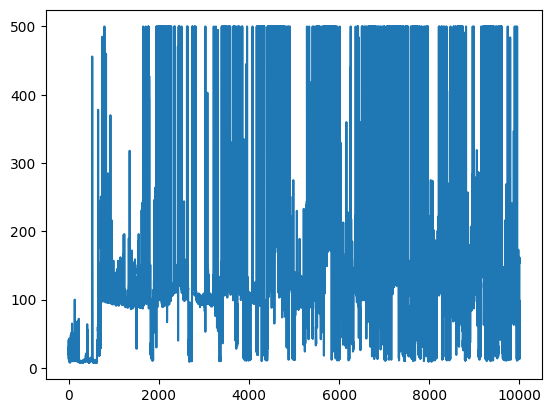

In [ ]:
total_count = 0 # Inicializa um contador para o número total de passos coletados.
total_episodes = 0  #  Inicializa um contador para o número total de episódios completados.
X1 = None
a=[]
t0 = time.time()

episodios = 10_000

indicesToIncrement = deque(maxlen=10_000)

MediaDos100 = deque(maxlen=100)
MediasLista = []

stop = False

brake500 = 0

indicesToIncrement = []
priorityIncrement = torch.full((len(indicesToIncrement),), 10)

for i, data in enumerate(collector):
    indices = rb.extend(data)

    for X0 in data["next","step_count"]:
        if X1 is not None:
            if X0<X1:
                total_episodes += 1
                MediaDos100.append(X1.item())
                a.append(X1.item())
                if ((total_episodes % 100) == 0): MediasLista.append(sum(MediaDos100)/100)
                if X1.item() == 500:
                    print("alcançou 500!!!!!!")
        X1 = X0
        if X0 == 499:
            brake500 += 1
            if brake500 >= 10: stop = not stop
            GetBest = torch.nonzero(data["next","step_count"] > 299, as_tuple=True)[0]
            for i in GetBest.tolist():
                indicesToIncrement.append(indices[i].item())

            priorityIncrement = torch.full((len(indicesToIncrement),), 10)
            rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)

    # if stop: break
    if (total_episodes > episodios): break
    max_length = rb[:]["next", "step_count"].max()

    if len(rb) > init_rand_steps:
        for _ in range(optim_steps):
            sample, info = rb.sample(return_info=True)
            loss_vals = loss(sample)

            rb.update_priority(index=info["index"], priority=loss_vals["loss"])
            rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)

            loss_vals["loss"] = loss_vals["loss"].mean()
            loss_vals["loss"].backward()
            optim.step()
            optim.zero_grad()

            exploration_module.step(data.numel())

            updater.step()

        torchrl_logger.info(f"Episodes: {total_episodes}, Max num steps: {max_length}, rb length {len(rb)}")
        total_count += data.numel()

t1 = time.time()
torchrl_logger.info(f"solved after {total_count} steps, {total_episodes} episodes and in {t1-t0}s.")
plt.plot(a)
plt.show()

[20.37, 22.9, 13.54, 11.48, 13.85, 19.98, 47.78, 131.33, 137.9, 112.39, 104.13, 101.82, 104.68, 101.27, 99.72, 99.4, 112.97, 142.17, 56.24, 170.99, 233.07, 145.1, 158.54, 139.93, 203.33, 122.51, 98.42, 114.26, 112.82, 99.24, 112.5, 100.95, 116.48, 81.16, 223.78, 177.29, 179.3, 125.24, 123.88, 100.37, 74.51, 125.7, 209.66, 140.38, 248.18, 280.81, 293.48, 233.41, 145.49, 107.2, 87.74, 111.78, 130.02, 180.14, 134.05, 213.17, 230.39, 322.35, 262.67, 136.05, 131.33, 127.62, 121.14, 119.82, 139.07, 168.07, 207.31, 255.19, 166.08, 194.85, 181.24, 230.59, 232.23, 229.75, 186.99, 132.04, 207.91, 201.43, 148.85, 154.88, 124.54, 105.45, 185.44, 148.37, 141.75, 192.78, 216.22, 181.3, 101.75, 142.12, 176.78, 194.48, 296.01, 289.91, 132.14, 150.96, 82.66, 87.28, 133.89, 103.96]


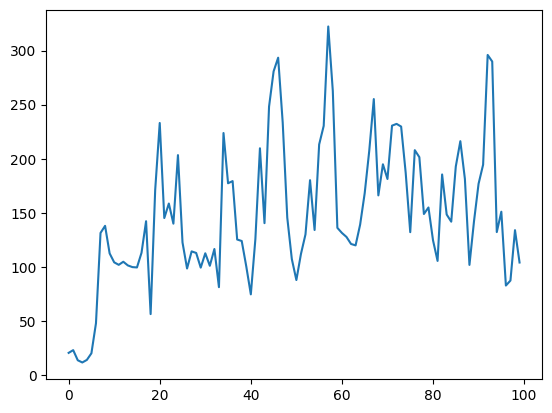

In [ ]:
print(MediasLista)
plt.plot(MediasLista)
plt.show()

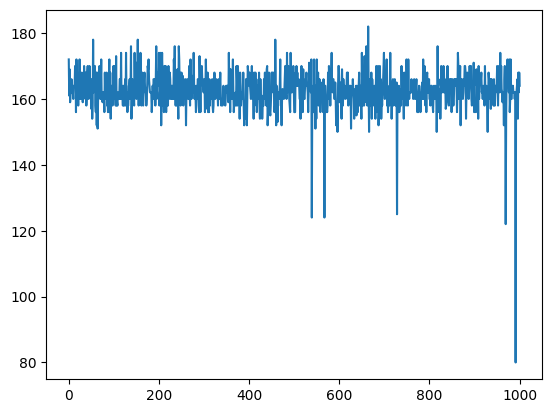

In [ ]:
eval_score = []
mean_100_eval_score = []

for i in range(1001):
    eval_score.append(env.rollout(max_steps=500, policy=policy)["next","step_count"][-1].item())
    if (i%100)==0:
      if i!=0:
        mean_100_eval_score.append(np.mean(eval_score[-100]))

plt.plot(eval_score)
plt.show()

In [ ]:
eval_score_mean = np.mean(mean_100_eval_score)
eval_score_mean

In [ ]:
# c = b/.500
# plt.plot(c)
# plt.show()
Sucessos = [0]
for i in mean_100_eval_score:
  # if (i%1000)==0:
  #   print(i)
  bb = (i/500)*100
  Sucessos.append(bb)
plt.plot(Sucessos)
plt.ylim(0,100)
plt.show()

In [ ]:
guarda_dados(a,
             nome_arquivo="Recompensa por Episódio 1",
             nome_pasta  ="Versão_V3_10mil(new)")
guarda_dados(eval_score,
             nome_arquivo="Avaliação 1",
             nome_pasta  ="Versão_V3_10mil(new)")
guarda_dados(Sucessos,
             nome_arquivo="Sucessos 1",
             nome_pasta  ="Versão_V3_10mil(new)")
guarda_dados(MediasLista,
             nome_arquivo="Médias 1",
             nome_pasta  ="Versão_V3_10mil(new)")
salvar_array(a, Sucessos, eval_score_mean, eval_score, versao="Versão_V3_10mil(new)", epoch=1)

DataFrame salvo em /content/drive/My Drive/DADOS IA PYTORCH/Versão_V2_brake500_10/Result_of_Epoch_1_Versão_V3_10mil(new).xlsx
DataFrame salvo em /content/drive/My Drive/DADOS IA PYTORCH/Versão_V2_brake500_10/Result_of_Epoch_1_Versão_V3_10mil(new).xlsx


## Renderização

Por fim, executamos o ambiente em tantas etapas quanto possível e salvamos o vídeo localmente (observe que não estamos explorando).

In [ ]:
b = []
for i in range(200):
    b.append(env.rollout(max_steps=500, policy=policy)["next","step_count"][-1].item())
plt.plot(b)
plt.show()

In [ ]:
# Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
record_env.rollout(max_steps=10000, policy=policy)
# max_steps=1000: Define o número máximo de passos a serem executados durante o rollout. Aqui, está configurado para 1000 passos.
# policy=policy: A política que o agente deve seguir durante a execução. Neste caso, é a política treinada previamente (policy).

# Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
video_recorder.dump()

In [ ]:
logger # CSVLogger(exp_name=dqn, experiment=CSVExperiment(log_dir=./training_loop/dqn))

# V4 em PyTorch

1° foi incrementada a prioridade, mas não foi mantida

## Configuração do Agente

### Construindo o ambiente - OK

Estaremos usando um ambiente de academia com uma StepCounter transformação. Se precisar de uma atualização, verifique se esses recursos são apresentados no tutorial do ambiente .

In [ ]:
torch.manual_seed(0) # define a semente manual para a geração de números aleatórios no PyTorch, garantindo a reprodutibilidade dos resultados.
env = TransformedEnv(GymEnv("CartPole-v1"), StepCounter())
# cria um ambiente de RL para o ambiente "CartPole-v1" do OpenAI Gym, com um contador de passos adicionado como uma transformação ao ambiente.
env.set_seed(0) # define a semente para o ambiente env, garantindo a consistência do comportamento do ambiente em diferentes execuções.

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


795726461

### Projetando uma política

O próximo passo é construir nossa política. Faremos uma versão regular e determinística do ator para ser usada no módulo de perda e durante a avaliação . A seguir, iremos aumentá-lo com um módulo de exploração para inferência .

In [ ]:
# Essa linha cria uma MLP que mapeia observações do ambiente para valores de ação, com duas camadas ocultas de 64 neurônios cada.
value_mlp = MLP(out_features=env.action_spec.shape[-1], num_cells=[64, 64])
# MLP: Refere-se a um Multi-Layer Perceptron (MLP), uma rede neural feed-forward composta por múltiplas camadas densamente conectadas.
# out_features=env.action_spec.shape[-1]: Define o número de neurônios na camada de saída da MLP.
# env.action_spec.shape[-1] é a dimensão do espaço de ações do ambiente, o que significa que a MLP vai produzir um valor para cada ação possível no ambiente.
# num_cells=[64, 64]: Define a arquitetura da MLP, com duas camadas ocultas, cada uma contendo 64 neurônios.

# Essa linha cria um módulo que pega as observações do ambiente (observation) e produz valores de ação (action_value) usando a MLP definida anteriormente.
value_net = Mod(value_mlp, in_keys=["observation"], out_keys=["action_value"])
# Mod: Refere-se ao TensorDictModule, que é um módulo que opera sobre TensorDicts.
# value_mlp: A MLP criada na linha anterior.
# in_keys=["observation"]: Define as chaves de entrada para o módulo. Aqui, o módulo espera uma chave chamada observation no TensorDict de entrada.
# out_keys=["action_value"]: Define as chaves de saída para o módulo. O módulo irá produzir uma chave chamada action_value no TensorDict de saída.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
# Cria uma política que primeiro passa a observação através da value_net para obter os valores de ação
# e, em seguida, usa o QValueModule para calcular os valores Q para as ações.
policy = Seq(value_net, QValueModule(spec=env.action_spec))
# Seq: Refere-se ao TensorDictSequential, que é similar ao torch.nn.Sequential, mas opera sobre TensorDicts.
# value_net: O módulo criado na linha anterior.
# QValueModule(spec=env.action_spec): Um módulo específico para calcular valores Q, usado em algoritmos de Q-learning.
# spec=env.action_spec fornece as especificações do espaço de ações do ambiente.

# Cria um módulo de exploração que implementa uma estratégia epsilon-greedy com um valor inicial de epsilon de 0.5 e que diminui ao longo de 100.000 passos.
exploration_module = EGreedyModule(env.action_spec, annealing_num_steps=100_000, eps_init=1)
# EGreedyModule: Implementa política epsilon-greedy, que escolhe ações aleatoriamente com certa probabilidade epsilon, e a melhor ação com probabilidade 1-epsilon.
# env.action_spec: As especificações do espaço de ações do ambiente.
# annealing_num_steps=100_000: Define o número de passos durante os quais o valor de epsilon será reduzido gradualmente (annealing).
# eps_init=0.5: Define o valor inicial de epsilon. No início, 50% das ações serão escolhidas aleatoriamente.

# Essa linha combina a política com o módulo de exploração em uma sequência, resultando em uma política que primeiro calcula os valores de ação
# e, em seguida, aplica a estratégia epsilon-greedy para selecionar as ações.
policy_explore = Seq(policy, exploration_module)
# Seq: Refere-se ao TensorDictSequential.
# policy: A política definida anteriormente.
# exploration_module: O módulo de exploração epsilon-greedy definido na linha anterior.

/usr/local/lib/python3.10/dist-packages/torchrl/modules/tensordict_module/exploration.py:97: UserWarning: eps_init should be a float.
  warnings.warn("eps_init should be a float.")


### Coletor de dados e buffer de reprodução

Aí vem a parte dos dados: precisamos de um coletor de dados para obter facilmente lotes de dados e um buffer de reprodução para armazenar esses dados para treinamento.

In [ ]:
init_rand_steps = 5000
# Define o número inicial de passos aleatórios a serem realizados no ambiente antes de começar a usar a política treinada.
# Isso ajuda a inicializar o replay buffer com uma diversidade de estados e ações.
frames_per_batch = 500
# Define o número de frames (ou passos de tempo) que serão coletados em cada lote (batch) de coleta de dados do ambiente.
optim_steps = 25
# Define o número de passos de otimização que serão realizados após cada lote de coleta de dados.
# Isso controla quantas atualizações dos pesos da rede neural serão feitas com base nos dados coletados.

# SyncDataCollector: Um coletor de dados síncrono que coleta experiências do ambiente usando a política fornecida.
collector = SyncDataCollector(
    env,
    policy,
    frames_per_batch=frames_per_batch,
    total_frames=-1,
    init_random_frames=init_rand_steps,
)
# env: O ambiente de RL, criado anteriormente com TransformedEnv.
# policy: A política que será usada para coletar experiências, criada anteriormente.
# frames_per_batch=frames_per_batch: Especifica que 100 frames serão coletados em cada lote.
# total_frames=-1: Especifica que o coletor deve continuar indefinidamente (ou até que seja explicitamente parado).
# init_random_frames=init_rand_steps: Especifica que 5000 passos aleatórios serão realizados inicialmente p/ preencher o replay buffer com experiências variadas.
size = 100_000
rb = ReplayBuffer(
                storage=LazyTensorStorage(size),
                sampler=PrioritizedSampler(max_capacity=size, alpha=0.6, beta=0.4),
                batch_size=200)

### Módulo de perda e otimizador

Construímos nossa perda conforme indicado no tutorial dedicado , com seu otimizador e atualizador de parâmetros de destino:

In [ ]:
#  Implementa a função de perda para o algoritmo DQN (Deep Q-Network).
loss = DQNLoss(value_network=policy, action_space=env.action_spec, delay_value=True, reduction='none')
# value_network=policy: A rede de valor utilizada para calcular os valores Q. Aqui, policy é a política criada anteriormente, que inclui o QValueModule.
# action_space=env.action_spec: Especifica o espaço de ações do ambiente, utilizado para calcular os valores Q para todas as ações possíveis.
# delay_value=True: Indica que a rede alvo (target network) deve ser usada para calcular os valores Q futuros, o que é uma técnica comum para estabilizar o treinamento em DQN.

# Um otimizador amplamente utilizado que combina as vantagens dos métodos AdaGrad e RMSProp. É particularmente eficiente para grandes problemas de aprendizado de máquina com muitos parâmetros.
optim = Adam(loss.parameters(), lr=0.01)
# loss.parameters(): Passa os parâmetros da função de perda (que incluem os parâmetros da rede de valor) para o otimizador.
# lr=0.02: Define a taxa de aprendizado (learning rate) como 0.02. Esta taxa controla o tamanho dos passos de atualização dos pesos da rede neural durante o treinamento.

# Implementa a atualização suave dos parâmetros da rede, uma técnica comum em algoritmos de RL para atualizar gradualmente uma rede alvo (target network) com os parâmetros da rede de valor (online network).
updater = SoftUpdate(loss, eps=0.99)
# loss: A função de perda que contém os parâmetros da rede de valor e da rede alvo.
# eps=0.99: Define o fator de atualização suave (soft update factor). eps=0.99 indica que 99% dos parâmetros da rede alvo são mantidos e apenas 1% é atualizado a partir da rede de valor em cada passo.

### Registrador

Usaremos um registrador CSV para registrar nossos resultados e salvar vídeos renderizados.

In [ ]:
path = "./training_loop" # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.

# CSVLogger: Um logger que registra dados em formato CSV, útil para monitorar o progresso do treinamento e analisar resultados.
logger = CSVLogger(exp_name="dqn", log_dir=path, video_format="mp4")
# exp_name="dqn": Nome da experiência, usado como um identificador para os logs. Aqui, é definido como "dqn" (Deep Q-Network).
# log_dir=path: Diretório onde os logs serão salvos. Neste caso, é o diretório definido anteriormente, ./training_loop.
# video_format="mp4": Especifica o formato de vídeo para gravação. Aqui, está configurado para MP4.

# Um objeto que grava vídeos das execuções do ambiente durante o treinamento, útil para visualizar o comportamento do agente.
video_recorder = VideoRecorder(logger, tag="video")
# logger: O logger criado na linha anterior, que será usado para salvar os vídeos.
# tag="video": Uma tag para identificar os vídeos nos logs. Aqui, está definido como "video".

# Um wrapper que aplica transformações ao ambiente, como normalização de observações ou recompensas, e também permite a adição de funcionalidades como gravação de vídeos.
record_env = TransformedEnv(
    GymEnv("CartPole-v1", from_pixels=True, pixels_only=False), video_recorder
)
# GymEnv("CartPole-v1", from_pixels=True, pixels_only=False): Cria um ambiente GymEnv para o ambiente "CartPole-v1" do OpenAI Gym.
# from_pixels=True: Indica que o ambiente será renderizado a partir de pixels, permitindo a gravação visual do ambiente.
# pixels_only=False: Indica que tanto as observações em forma de pixels quanto outras observações (como a posição e a velocidade do carrinho) serão retornadas pelo ambiente.
# video_recorder: O gravador de vídeos criado na linha anterior, que será usado para gravar as execuções do ambiente.

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


## Ciclo de treinamento

2024-06-04 01:20:50,374 [torchrl][INFO] Episodes: 280, Max num steps: 100, rb length 5500
2024-06-04 01:20:52,074 [torchrl][INFO] Episodes: 334, Max num steps: 100, rb length 6000
2024-06-04 01:20:53,839 [torchrl][INFO] Episodes: 387, Max num steps: 100, rb length 6500
2024-06-04 01:20:55,152 [torchrl][INFO] Episodes: 440, Max num steps: 100, rb length 7000
2024-06-04 01:20:56,265 [torchrl][INFO] Episodes: 445, Max num steps: 125, rb length 7500
2024-06-04 01:20:57,412 [torchrl][INFO] Episodes: 499, Max num steps: 137, rb length 8000
2024-06-04 01:20:58,762 [torchrl][INFO] Episodes: 551, Max num steps: 137, rb length 8500
2024-06-04 01:20:59,902 [torchrl][INFO] Episodes: 603, Max num steps: 137, rb length 9000
2024-06-04 01:21:01,066 [torchrl][INFO] Episodes: 657, Max num steps: 137, rb length 9500
2024-06-04 01:21:02,186 [torchrl][INFO] Episodes: 660, Max num steps: 183, rb length 10000
2024-06-04 01:21:03,346 [torchrl][INFO] Episodes: 661, Max num steps: 489, rb length 10500


alcançou 500!!!!!!


2024-06-04 01:21:04,597 [torchrl][INFO] Episodes: 666, Max num steps: 500, rb length 11000
2024-06-04 01:21:06,205 [torchrl][INFO] Episodes: 671, Max num steps: 500, rb length 11500
2024-06-04 01:21:07,839 [torchrl][INFO] Episodes: 679, Max num steps: 500, rb length 12000
2024-06-04 01:21:09,371 [torchrl][INFO] Episodes: 682, Max num steps: 500, rb length 12500
2024-06-04 01:21:10,478 [torchrl][INFO] Episodes: 693, Max num steps: 500, rb length 13000
2024-06-04 01:21:11,601 [torchrl][INFO] Episodes: 696, Max num steps: 500, rb length 13500
2024-06-04 01:21:12,715 [torchrl][INFO] Episodes: 697, Max num steps: 500, rb length 14000


alcançou 500!!!!!!


2024-06-04 01:21:13,835 [torchrl][INFO] Episodes: 700, Max num steps: 500, rb length 14500
2024-06-04 01:21:14,933 [torchrl][INFO] Episodes: 704, Max num steps: 500, rb length 15000
2024-06-04 01:21:16,043 [torchrl][INFO] Episodes: 707, Max num steps: 500, rb length 15500
2024-06-04 01:21:17,160 [torchrl][INFO] Episodes: 711, Max num steps: 500, rb length 16000
2024-06-04 01:21:18,325 [torchrl][INFO] Episodes: 740, Max num steps: 500, rb length 16500
2024-06-04 01:21:19,643 [torchrl][INFO] Episodes: 741, Max num steps: 500, rb length 17000
2024-06-04 01:21:21,505 [torchrl][INFO] Episodes: 771, Max num steps: 500, rb length 17500
2024-06-04 01:21:23,187 [torchrl][INFO] Episodes: 776, Max num steps: 500, rb length 18000
2024-06-04 01:21:24,435 [torchrl][INFO] Episodes: 779, Max num steps: 500, rb length 18500
2024-06-04 01:21:25,554 [torchrl][INFO] Episodes: 781, Max num steps: 500, rb length 19000
2024-06-04 01:21:26,659 [torchrl][INFO] Episodes: 786, Max num steps: 500, rb length 19500

alcançou 500!!!!!!


2024-06-04 01:21:36,688 [torchrl][INFO] Episodes: 813, Max num steps: 500, rb length 23000
2024-06-04 01:21:38,377 [torchrl][INFO] Episodes: 815, Max num steps: 500, rb length 23500
2024-06-04 01:21:39,637 [torchrl][INFO] Episodes: 817, Max num steps: 500, rb length 24000
2024-06-04 01:21:40,754 [torchrl][INFO] Episodes: 821, Max num steps: 500, rb length 24500
2024-06-04 01:21:41,881 [torchrl][INFO] Episodes: 824, Max num steps: 500, rb length 25000
2024-06-04 01:21:43,000 [torchrl][INFO] Episodes: 829, Max num steps: 500, rb length 25500
2024-06-04 01:21:44,115 [torchrl][INFO] Episodes: 831, Max num steps: 500, rb length 26000
2024-06-04 01:21:45,409 [torchrl][INFO] Episodes: 835, Max num steps: 500, rb length 26500
2024-06-04 01:21:46,513 [torchrl][INFO] Episodes: 837, Max num steps: 500, rb length 27000
2024-06-04 01:21:47,619 [torchrl][INFO] Episodes: 841, Max num steps: 500, rb length 27500
2024-06-04 01:21:48,743 [torchrl][INFO] Episodes: 844, Max num steps: 500, rb length 28000

alcançou 500!!!!!!


2024-06-04 01:22:19,063 [torchrl][INFO] Episodes: 941, Max num steps: 500, rb length 40000
2024-06-04 01:22:20,717 [torchrl][INFO] Episodes: 946, Max num steps: 500, rb length 40500
2024-06-04 01:22:22,299 [torchrl][INFO] Episodes: 950, Max num steps: 500, rb length 41000
2024-06-04 01:22:24,035 [torchrl][INFO] Episodes: 955, Max num steps: 500, rb length 41500
2024-06-04 01:22:25,152 [torchrl][INFO] Episodes: 960, Max num steps: 500, rb length 42000
2024-06-04 01:22:26,275 [torchrl][INFO] Episodes: 965, Max num steps: 500, rb length 42500
2024-06-04 01:22:28,062 [torchrl][INFO] Episodes: 968, Max num steps: 500, rb length 43000
2024-06-04 01:22:29,189 [torchrl][INFO] Episodes: 974, Max num steps: 500, rb length 43500
2024-06-04 01:22:30,318 [torchrl][INFO] Episodes: 979, Max num steps: 500, rb length 44000
2024-06-04 01:22:31,434 [torchrl][INFO] Episodes: 983, Max num steps: 500, rb length 44500
2024-06-04 01:22:32,542 [torchrl][INFO] Episodes: 988, Max num steps: 500, rb length 45000

alcançou 500!!!!!!


2024-06-04 01:22:38,777 [torchrl][INFO] Episodes: 1004, Max num steps: 500, rb length 47000
2024-06-04 01:22:40,028 [torchrl][INFO] Episodes: 1008, Max num steps: 500, rb length 47500
2024-06-04 01:22:41,137 [torchrl][INFO] Episodes: 1011, Max num steps: 500, rb length 48000
2024-06-04 01:22:42,286 [torchrl][INFO] Episodes: 1015, Max num steps: 500, rb length 48500
2024-06-04 01:22:43,415 [torchrl][INFO] Episodes: 1020, Max num steps: 500, rb length 49000
2024-06-04 01:22:44,545 [torchrl][INFO] Episodes: 1026, Max num steps: 500, rb length 49500
2024-06-04 01:22:45,686 [torchrl][INFO] Episodes: 1030, Max num steps: 500, rb length 50000
2024-06-04 01:22:46,810 [torchrl][INFO] Episodes: 1036, Max num steps: 500, rb length 50500
2024-06-04 01:22:47,923 [torchrl][INFO] Episodes: 1040, Max num steps: 500, rb length 51000
2024-06-04 01:22:49,041 [torchrl][INFO] Episodes: 1045, Max num steps: 500, rb length 51500
2024-06-04 01:22:50,636 [torchrl][INFO] Episodes: 1051, Max num steps: 500, rb l

alcançou 500!!!!!!


2024-06-04 01:27:15,958 [torchrl][INFO] Episodes: 1894, Max num steps: 500, rb length 100000
2024-06-04 01:27:17,079 [torchrl][INFO] Episodes: 1897, Max num steps: 500, rb length 100000
2024-06-04 01:27:18,471 [torchrl][INFO] Episodes: 1899, Max num steps: 500, rb length 100000
2024-06-04 01:27:20,093 [torchrl][INFO] Episodes: 1902, Max num steps: 500, rb length 100000
2024-06-04 01:27:21,791 [torchrl][INFO] Episodes: 1906, Max num steps: 500, rb length 100000
2024-06-04 01:27:23,063 [torchrl][INFO] Episodes: 1909, Max num steps: 500, rb length 100000
2024-06-04 01:27:24,183 [torchrl][INFO] Episodes: 1911, Max num steps: 500, rb length 100000
2024-06-04 01:27:25,307 [torchrl][INFO] Episodes: 1913, Max num steps: 500, rb length 100000
2024-06-04 01:27:26,431 [torchrl][INFO] Episodes: 1916, Max num steps: 500, rb length 100000
2024-06-04 01:27:27,555 [torchrl][INFO] Episodes: 1919, Max num steps: 500, rb length 100000
2024-06-04 01:27:28,696 [torchrl][INFO] Episodes: 1921, Max num steps:

alcançou 500!!!!!!


2024-06-04 01:27:44,174 [torchrl][INFO] Episodes: 1949, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:27:45,325 [torchrl][INFO] Episodes: 1950, Max num steps: 500, rb length 100000
2024-06-04 01:27:46,437 [torchrl][INFO] Episodes: 1953, Max num steps: 500, rb length 100000
2024-06-04 01:27:47,625 [torchrl][INFO] Episodes: 1958, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:27:49,273 [torchrl][INFO] Episodes: 1959, Max num steps: 500, rb length 100000
2024-06-04 01:27:50,928 [torchrl][INFO] Episodes: 1960, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:27:52,654 [torchrl][INFO] Episodes: 1961, Max num steps: 500, rb length 100000
2024-06-04 01:27:53,778 [torchrl][INFO] Episodes: 1965, Max num steps: 500, rb length 100000
2024-06-04 01:27:54,901 [torchrl][INFO] Episodes: 1966, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:27:56,039 [torchrl][INFO] Episodes: 1968, Max num steps: 500, rb length 100000
2024-06-04 01:27:57,168 [torchrl][INFO] Episodes: 1969, Max num steps: 500, rb length 100000
2024-06-04 01:27:58,303 [torchrl][INFO] Episodes: 1972, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:27:59,425 [torchrl][INFO] Episodes: 1973, Max num steps: 500, rb length 100000
2024-06-04 01:28:00,552 [torchrl][INFO] Episodes: 1974, Max num steps: 500, rb length 100000
2024-06-04 01:28:01,890 [torchrl][INFO] Episodes: 1978, Max num steps: 500, rb length 100000
2024-06-04 01:28:03,221 [torchrl][INFO] Episodes: 1979, Max num steps: 500, rb length 100000
2024-06-04 01:28:04,856 [torchrl][INFO] Episodes: 1980, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:28:06,518 [torchrl][INFO] Episodes: 1981, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:28:07,961 [torchrl][INFO] Episodes: 1982, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:28:09,094 [torchrl][INFO] Episodes: 1983, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:28:10,230 [torchrl][INFO] Episodes: 1988, Max num steps: 500, rb length 100000
2024-06-04 01:28:11,371 [torchrl][INFO] Episodes: 1989, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:28:12,501 [torchrl][INFO] Episodes: 1990, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:28:13,638 [torchrl][INFO] Episodes: 1994, Max num steps: 500, rb length 100000
2024-06-04 01:28:14,778 [torchrl][INFO] Episodes: 1995, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:28:15,903 [torchrl][INFO] Episodes: 1996, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:28:17,039 [torchrl][INFO] Episodes: 1998, Max num steps: 500, rb length 100000
2024-06-04 01:28:18,528 [torchrl][INFO] Episodes: 2003, Max num steps: 500, rb length 100000
2024-06-04 01:28:20,178 [torchrl][INFO] Episodes: 2008, Max num steps: 500, rb length 100000
2024-06-04 01:28:21,880 [torchrl][INFO] Episodes: 2013, Max num steps: 500, rb length 100000
2024-06-04 01:28:23,191 [torchrl][INFO] Episodes: 2017, Max num steps: 500, rb length 100000
2024-06-04 01:28:24,330 [torchrl][INFO] Episodes: 2021, Max num steps: 500, rb length 100000
2024-06-04 01:28:25,678 [torchrl][INFO] Episodes: 2026, Max num steps: 500, rb length 100000
2024-06-04 01:28:26,804 [torchrl][INFO] Episodes: 2028, Max num steps: 500, rb length 100000
2024-06-04 01:28:27,939 [torchrl][INFO] Episodes: 2032, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:28:29,086 [torchrl][INFO] Episodes: 2033, Max num steps: 500, rb length 100000
2024-06-04 01:28:30,216 [torchrl][INFO] Episodes: 2035, Max num steps: 500, rb length 100000
2024-06-04 01:28:31,355 [torchrl][INFO] Episodes: 2036, Max num steps: 500, rb length 100000
2024-06-04 01:28:32,502 [torchrl][INFO] Episodes: 2039, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:28:34,151 [torchrl][INFO] Episodes: 2040, Max num steps: 500, rb length 100000
2024-06-04 01:28:35,799 [torchrl][INFO] Episodes: 2043, Max num steps: 500, rb length 100000
2024-06-04 01:28:37,493 [torchrl][INFO] Episodes: 2047, Max num steps: 500, rb length 100000
2024-06-04 01:28:38,618 [torchrl][INFO] Episodes: 2050, Max num steps: 500, rb length 100000
2024-06-04 01:28:39,744 [torchrl][INFO] Episodes: 2053, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:28:40,882 [torchrl][INFO] Episodes: 2055, Max num steps: 500, rb length 100000
2024-06-04 01:28:42,012 [torchrl][INFO] Episodes: 2060, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:28:43,150 [torchrl][INFO] Episodes: 2061, Max num steps: 500, rb length 100000
2024-06-04 01:28:44,271 [torchrl][INFO] Episodes: 2063, Max num steps: 500, rb length 100000
2024-06-04 01:28:45,401 [torchrl][INFO] Episodes: 2067, Max num steps: 500, rb length 100000
2024-06-04 01:28:46,733 [torchrl][INFO] Episodes: 2069, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:28:48,122 [torchrl][INFO] Episodes: 2071, Max num steps: 500, rb length 100000
2024-06-04 01:28:49,754 [torchrl][INFO] Episodes: 2072, Max num steps: 500, rb length 100000
2024-06-04 01:28:51,420 [torchrl][INFO] Episodes: 2075, Max num steps: 500, rb length 100000
2024-06-04 01:28:52,920 [torchrl][INFO] Episodes: 2077, Max num steps: 500, rb length 100000
2024-06-04 01:28:54,068 [torchrl][INFO] Episodes: 2080, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:28:55,241 [torchrl][INFO] Episodes: 2081, Max num steps: 500, rb length 100000
2024-06-04 01:28:56,382 [torchrl][INFO] Episodes: 2083, Max num steps: 500, rb length 100000
2024-06-04 01:28:57,516 [torchrl][INFO] Episodes: 2086, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:28:58,668 [torchrl][INFO] Episodes: 2087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:28:59,819 [torchrl][INFO] Episodes: 2088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:29:01,040 [torchrl][INFO] Episodes: 2089, Max num steps: 500, rb length 100000
2024-06-04 01:29:02,180 [torchrl][INFO] Episodes: 2090, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:29:03,730 [torchrl][INFO] Episodes: 2092, Max num steps: 500, rb length 100000
2024-06-04 01:29:05,399 [torchrl][INFO] Episodes: 2094, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:29:07,137 [torchrl][INFO] Episodes: 2096, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:29:08,403 [torchrl][INFO] Episodes: 2097, Max num steps: 500, rb length 100000
2024-06-04 01:29:09,513 [torchrl][INFO] Episodes: 2099, Max num steps: 500, rb length 100000
2024-06-04 01:29:10,648 [torchrl][INFO] Episodes: 2102, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:29:11,977 [torchrl][INFO] Episodes: 2103, Max num steps: 500, rb length 100000
2024-06-04 01:29:13,110 [torchrl][INFO] Episodes: 2107, Max num steps: 500, rb length 100000
2024-06-04 01:29:14,246 [torchrl][INFO] Episodes: 2110, Max num steps: 500, rb length 100000
2024-06-04 01:29:15,368 [torchrl][INFO] Episodes: 2112, Max num steps: 500, rb length 100000
2024-06-04 01:29:16,490 [torchrl][INFO] Episodes: 2114, Max num steps: 500, rb length 100000
2024-06-04 01:29:17,660 [torchrl][INFO] Episodes: 2116, Max num steps: 500, rb length 100000
2024-06-04 01:29:19,286 [torchrl][INFO] Episodes: 2117, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:29:20,889 [torchrl][INFO] Episodes: 2120, Max num steps: 500, rb length 100000
2024-06-04 01:29:22,381 [torchrl][INFO] Episodes: 2123, Max num steps: 500, rb length 100000
2024-06-04 01:29:23,498 [torchrl][INFO] Episodes: 2126, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:29:24,616 [torchrl][INFO] Episodes: 2127, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:29:25,762 [torchrl][INFO] Episodes: 2128, Max num steps: 500, rb length 100000
2024-06-04 01:29:26,880 [torchrl][INFO] Episodes: 2131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:29:28,004 [torchrl][INFO] Episodes: 2132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:29:29,121 [torchrl][INFO] Episodes: 2133, Max num steps: 500, rb length 100000
2024-06-04 01:29:30,227 [torchrl][INFO] Episodes: 2136, Max num steps: 500, rb length 100000
2024-06-04 01:29:31,345 [torchrl][INFO] Episodes: 2140, Max num steps: 500, rb length 100000
2024-06-04 01:29:32,753 [torchrl][INFO] Episodes: 2144, Max num steps: 500, rb length 100000
2024-06-04 01:29:34,358 [torchrl][INFO] Episodes: 2147, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:29:36,281 [torchrl][INFO] Episodes: 2148, Max num steps: 500, rb length 100000
2024-06-04 01:29:37,558 [torchrl][INFO] Episodes: 2150, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:29:38,679 [torchrl][INFO] Episodes: 2151, Max num steps: 500, rb length 100000
2024-06-04 01:29:39,794 [torchrl][INFO] Episodes: 2153, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:29:40,931 [torchrl][INFO] Episodes: 2154, Max num steps: 500, rb length 100000
2024-06-04 01:29:42,048 [torchrl][INFO] Episodes: 2157, Max num steps: 500, rb length 100000
2024-06-04 01:29:43,152 [torchrl][INFO] Episodes: 2160, Max num steps: 500, rb length 100000
2024-06-04 01:29:44,278 [torchrl][INFO] Episodes: 2164, Max num steps: 500, rb length 100000
2024-06-04 01:29:45,380 [torchrl][INFO] Episodes: 2167, Max num steps: 500, rb length 100000
2024-06-04 01:29:46,493 [torchrl][INFO] Episodes: 2169, Max num steps: 500, rb length 100000
2024-06-04 01:29:47,981 [torchrl][INFO] Episodes: 2172, Max num steps: 500, rb length 100000
2024-06-04 01:29:49,648 [torchrl][INFO] Episodes: 2176, Max num steps: 500, rb length 100000
2024-06-04 01:29:51,333 [torchrl][INFO] Episodes: 2177, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:29:52,578 [torchrl][INFO] Episodes: 2181, Max num steps: 500, rb length 100000
2024-06-04 01:29:53,683 [torchrl][INFO] Episodes: 2185, Max num steps: 500, rb length 100000
2024-06-04 01:29:54,798 [torchrl][INFO] Episodes: 2189, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:29:55,917 [torchrl][INFO] Episodes: 2190, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:29:57,049 [torchrl][INFO] Episodes: 2191, Max num steps: 500, rb length 100000
2024-06-04 01:29:58,374 [torchrl][INFO] Episodes: 2192, Max num steps: 500, rb length 100000
2024-06-04 01:29:59,493 [torchrl][INFO] Episodes: 2195, Max num steps: 500, rb length 100000
2024-06-04 01:30:00,627 [torchrl][INFO] Episodes: 2199, Max num steps: 500, rb length 100000
2024-06-04 01:30:01,818 [torchrl][INFO] Episodes: 2201, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:30:03,467 [torchrl][INFO] Episodes: 2202, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:30:05,079 [torchrl][INFO] Episodes: 2203, Max num steps: 500, rb length 100000
2024-06-04 01:30:06,745 [torchrl][INFO] Episodes: 2204, Max num steps: 500, rb length 100000
2024-06-04 01:30:07,859 [torchrl][INFO] Episodes: 2207, Max num steps: 500, rb length 100000
2024-06-04 01:30:08,979 [torchrl][INFO] Episodes: 2210, Max num steps: 500, rb length 100000
2024-06-04 01:30:10,114 [torchrl][INFO] Episodes: 2211, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:30:11,247 [torchrl][INFO] Episodes: 2215, Max num steps: 500, rb length 100000
2024-06-04 01:30:12,370 [torchrl][INFO] Episodes: 2218, Max num steps: 500, rb length 100000
2024-06-04 01:30:13,487 [torchrl][INFO] Episodes: 2219, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:30:14,632 [torchrl][INFO] Episodes: 2223, Max num steps: 500, rb length 100000
2024-06-04 01:30:15,754 [torchrl][INFO] Episodes: 2228, Max num steps: 500, rb length 100000
2024-06-04 01:30:16,962 [torchrl][INFO] Episodes: 2229, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:30:18,630 [torchrl][INFO] Episodes: 2231, Max num steps: 500, rb length 100000
2024-06-04 01:30:20,511 [torchrl][INFO] Episodes: 2234, Max num steps: 500, rb length 100000
2024-06-04 01:30:21,960 [torchrl][INFO] Episodes: 2239, Max num steps: 500, rb length 100000
2024-06-04 01:30:23,067 [torchrl][INFO] Episodes: 2244, Max num steps: 500, rb length 100000
2024-06-04 01:30:24,175 [torchrl][INFO] Episodes: 2248, Max num steps: 500, rb length 100000
2024-06-04 01:30:25,287 [torchrl][INFO] Episodes: 2250, Max num steps: 500, rb length 100000
2024-06-04 01:30:26,412 [torchrl][INFO] Episodes: 2254, Max num steps: 500, rb length 100000
2024-06-04 01:30:27,541 [torchrl][INFO] Episodes: 2258, Max num steps: 500, rb length 100000
2024-06-04 01:30:28,659 [torchrl][INFO] Episodes: 2260, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:30:29,790 [torchrl][INFO] Episodes: 2261, Max num steps: 500, rb length 100000
2024-06-04 01:30:30,903 [torchrl][INFO] Episodes: 2265, Max num steps: 500, rb length 100000
2024-06-04 01:30:32,256 [torchrl][INFO] Episodes: 2269, Max num steps: 500, rb length 100000
2024-06-04 01:30:33,844 [torchrl][INFO] Episodes: 2270, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:30:35,491 [torchrl][INFO] Episodes: 2272, Max num steps: 500, rb length 100000
2024-06-04 01:30:36,915 [torchrl][INFO] Episodes: 2276, Max num steps: 500, rb length 100000
2024-06-04 01:30:38,039 [torchrl][INFO] Episodes: 2280, Max num steps: 500, rb length 100000
2024-06-04 01:30:39,147 [torchrl][INFO] Episodes: 2281, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:30:40,278 [torchrl][INFO] Episodes: 2286, Max num steps: 500, rb length 100000
2024-06-04 01:30:41,403 [torchrl][INFO] Episodes: 2288, Max num steps: 500, rb length 100000
2024-06-04 01:30:42,521 [torchrl][INFO] Episodes: 2292, Max num steps: 500, rb length 100000
2024-06-04 01:30:43,820 [torchrl][INFO] Episodes: 2297, Max num steps: 500, rb length 100000
2024-06-04 01:30:44,924 [torchrl][INFO] Episodes: 2299, Max num steps: 500, rb length 100000
2024-06-04 01:30:46,020 [torchrl][INFO] Episodes: 2302, Max num steps: 500, rb length 100000
2024-06-04 01:30:47,420 [torchrl][INFO] Episodes: 2303, Max num steps: 500, rb length 100000
2024-06-04 01:30:49,035 [torchrl][INFO] Episodes: 2305, Max num steps: 500, rb length 100000
2024-06-04 01:30:50,721 [torchrl][INFO] Episodes: 2307, Max num steps: 500, rb length 100000
2024-06-04 01:30:52,019 [torchrl][INFO] Episodes: 2309, Max num steps: 500, rb length 100000
2024-06-04 01:30:53,123 [torchrl][INFO] Episodes: 2311, Max num steps:

alcançou 500!!!!!!


2024-06-04 01:31:22,868 [torchrl][INFO] Episodes: 2389, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:23,977 [torchrl][INFO] Episodes: 2390, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:25,088 [torchrl][INFO] Episodes: 2393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:26,208 [torchrl][INFO] Episodes: 2394, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:27,314 [torchrl][INFO] Episodes: 2395, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:28,426 [torchrl][INFO] Episodes: 2396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:29,718 [torchrl][INFO] Episodes: 2397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:31,158 [torchrl][INFO] Episodes: 2398, Max num steps: 500, rb length 100000
2024-06-04 01:31:32,767 [torchrl][INFO] Episodes: 2401, Max num steps: 500, rb length 100000
2024-06-04 01:31:34,437 [torchrl][INFO] Episodes: 2403, Max num steps: 500, rb length 100000
2024-06-04 01:31:35,752 [torchrl][INFO] Episodes: 2405, Max num steps: 500, rb length 100000
2024-06-04 01:31:36,864 [torchrl][INFO] Episodes: 2410, Max num steps: 500, rb length 100000
2024-06-04 01:31:37,976 [torchrl][INFO] Episodes: 2415, Max num steps: 500, rb length 100000
2024-06-04 01:31:39,087 [torchrl][INFO] Episodes: 2418, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:40,201 [torchrl][INFO] Episodes: 2419, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:41,329 [torchrl][INFO] Episodes: 2420, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:42,454 [torchrl][INFO] Episodes: 2421, Max num steps: 500, rb length 100000
2024-06-04 01:31:43,551 [torchrl][INFO] Episodes: 2425, Max num steps: 500, rb length 100000
2024-06-04 01:31:44,655 [torchrl][INFO] Episodes: 2426, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:46,145 [torchrl][INFO] Episodes: 2427, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:47,781 [torchrl][INFO] Episodes: 2428, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:49,520 [torchrl][INFO] Episodes: 2429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:50,754 [torchrl][INFO] Episodes: 2431, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:52,078 [torchrl][INFO] Episodes: 2432, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:53,191 [torchrl][INFO] Episodes: 2433, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:54,314 [torchrl][INFO] Episodes: 2434, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:55,449 [torchrl][INFO] Episodes: 2436, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:56,579 [torchrl][INFO] Episodes: 2437, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:57,711 [torchrl][INFO] Episodes: 2438, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:31:58,838 [torchrl][INFO] Episodes: 2440, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:00,068 [torchrl][INFO] Episodes: 2444, Max num steps: 500, rb length 100000
2024-06-04 01:32:01,710 [torchrl][INFO] Episodes: 2445, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:03,354 [torchrl][INFO] Episodes: 2446, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:04,960 [torchrl][INFO] Episodes: 2447, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:06,127 [torchrl][INFO] Episodes: 2448, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:07,283 [torchrl][INFO] Episodes: 2452, Max num steps: 500, rb length 100000
2024-06-04 01:32:08,410 [torchrl][INFO] Episodes: 2453, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:09,541 [torchrl][INFO] Episodes: 2457, Max num steps: 500, rb length 100000
2024-06-04 01:32:10,658 [torchrl][INFO] Episodes: 2458, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:11,775 [torchrl][INFO] Episodes: 2459, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:12,920 [torchrl][INFO] Episodes: 2464, Max num steps: 500, rb length 100000
2024-06-04 01:32:14,036 [torchrl][INFO] Episodes: 2469, Max num steps: 500, rb length 100000
2024-06-04 01:32:15,676 [torchrl][INFO] Episodes: 2473, Max num steps: 500, rb length 100000
2024-06-04 01:32:17,300 [torchrl][INFO] Episodes: 2474, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:19,017 [torchrl][INFO] Episodes: 2475, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:20,330 [torchrl][INFO] Episodes: 2476, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:21,439 [torchrl][INFO] Episodes: 2477, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:22,562 [torchrl][INFO] Episodes: 2478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:23,672 [torchrl][INFO] Episodes: 2479, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:24,791 [torchrl][INFO] Episodes: 2480, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:25,939 [torchrl][INFO] Episodes: 2483, Max num steps: 500, rb length 100000
2024-06-04 01:32:27,071 [torchrl][INFO] Episodes: 2485, Max num steps: 500, rb length 100000
2024-06-04 01:32:28,208 [torchrl][INFO] Episodes: 2488, Max num steps: 500, rb length 100000
2024-06-04 01:32:29,314 [torchrl][INFO] Episodes: 2491, Max num steps: 500, rb length 100000
2024-06-04 01:32:30,912 [torchrl][INFO] Episodes: 2495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:32,528 [torchrl][INFO] Episodes: 2496, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:34,198 [torchrl][INFO] Episodes: 2497, Max num steps: 500, rb length 100000
2024-06-04 01:32:35,313 [torchrl][INFO] Episodes: 2499, Max num steps: 500, rb length 100000
2024-06-04 01:32:36,463 [torchrl][INFO] Episodes: 2502, Max num steps: 500, rb length 100000
2024-06-04 01:32:37,763 [torchrl][INFO] Episodes: 2503, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:38,882 [torchrl][INFO] Episodes: 2505, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:40,016 [torchrl][INFO] Episodes: 2506, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:41,142 [torchrl][INFO] Episodes: 2507, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:42,260 [torchrl][INFO] Episodes: 2508, Max num steps: 500, rb length 100000
2024-06-04 01:32:43,380 [torchrl][INFO] Episodes: 2510, Max num steps: 500, rb length 100000
2024-06-04 01:32:44,721 [torchrl][INFO] Episodes: 2513, Max num steps: 500, rb length 100000
2024-06-04 01:32:46,324 [torchrl][INFO] Episodes: 2516, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:47,975 [torchrl][INFO] Episodes: 2517, Max num steps: 500, rb length 100000
2024-06-04 01:32:49,335 [torchrl][INFO] Episodes: 2519, Max num steps: 500, rb length 100000
2024-06-04 01:32:50,447 [torchrl][INFO] Episodes: 2520, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:51,577 [torchrl][INFO] Episodes: 2522, Max num steps: 500, rb length 100000
2024-06-04 01:32:52,689 [torchrl][INFO] Episodes: 2523, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:53,814 [torchrl][INFO] Episodes: 2524, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:54,950 [torchrl][INFO] Episodes: 2525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:56,079 [torchrl][INFO] Episodes: 2527, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:32:57,194 [torchrl][INFO] Episodes: 2528, Max num steps: 500, rb length 100000
2024-06-04 01:32:58,467 [torchrl][INFO] Episodes: 2530, Max num steps: 500, rb length 100000
2024-06-04 01:32:59,981 [torchrl][INFO] Episodes: 2534, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:01,594 [torchrl][INFO] Episodes: 2535, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:03,292 [torchrl][INFO] Episodes: 2536, Max num steps: 500, rb length 100000
2024-06-04 01:33:04,498 [torchrl][INFO] Episodes: 2537, Max num steps: 500, rb length 100000
2024-06-04 01:33:05,604 [torchrl][INFO] Episodes: 2538, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:06,753 [torchrl][INFO] Episodes: 2539, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:07,873 [torchrl][INFO] Episodes: 2540, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:08,991 [torchrl][INFO] Episodes: 2541, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:10,102 [torchrl][INFO] Episodes: 2542, Max num steps: 500, rb length 100000
2024-06-04 01:33:11,221 [torchrl][INFO] Episodes: 2544, Max num steps: 500, rb length 100000
2024-06-04 01:33:12,328 [torchrl][INFO] Episodes: 2545, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:13,441 [torchrl][INFO] Episodes: 2546, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:15,002 [torchrl][INFO] Episodes: 2547, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:16,605 [torchrl][INFO] Episodes: 2548, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:18,326 [torchrl][INFO] Episodes: 2549, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:19,484 [torchrl][INFO] Episodes: 2550, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:20,625 [torchrl][INFO] Episodes: 2551, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:21,737 [torchrl][INFO] Episodes: 2552, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:23,040 [torchrl][INFO] Episodes: 2553, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:24,145 [torchrl][INFO] Episodes: 2555, Max num steps: 500, rb length 100000
2024-06-04 01:33:25,263 [torchrl][INFO] Episodes: 2556, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:26,386 [torchrl][INFO] Episodes: 2559, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:27,499 [torchrl][INFO] Episodes: 2560, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:28,745 [torchrl][INFO] Episodes: 2561, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:30,379 [torchrl][INFO] Episodes: 2562, Max num steps: 500, rb length 100000
2024-06-04 01:33:31,999 [torchrl][INFO] Episodes: 2564, Max num steps: 500, rb length 100000
2024-06-04 01:33:33,531 [torchrl][INFO] Episodes: 2565, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:34,650 [torchrl][INFO] Episodes: 2566, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:35,746 [torchrl][INFO] Episodes: 2567, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:36,864 [torchrl][INFO] Episodes: 2568, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:37,970 [torchrl][INFO] Episodes: 2572, Max num steps: 500, rb length 100000
2024-06-04 01:33:39,058 [torchrl][INFO] Episodes: 2573, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:40,163 [torchrl][INFO] Episodes: 2574, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:41,272 [torchrl][INFO] Episodes: 2575, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:42,364 [torchrl][INFO] Episodes: 2576, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:43,605 [torchrl][INFO] Episodes: 2577, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:45,205 [torchrl][INFO] Episodes: 2580, Max num steps: 500, rb length 100000
2024-06-04 01:33:47,075 [torchrl][INFO] Episodes: 2581, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:48,475 [torchrl][INFO] Episodes: 2585, Max num steps: 500, rb length 100000
2024-06-04 01:33:49,585 [torchrl][INFO] Episodes: 2586, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:50,708 [torchrl][INFO] Episodes: 2587, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:51,848 [torchrl][INFO] Episodes: 2588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:52,979 [torchrl][INFO] Episodes: 2589, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:54,102 [torchrl][INFO] Episodes: 2590, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:55,243 [torchrl][INFO] Episodes: 2594, Max num steps: 500, rb length 100000
2024-06-04 01:33:56,352 [torchrl][INFO] Episodes: 2595, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:57,481 [torchrl][INFO] Episodes: 2596, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:33:58,917 [torchrl][INFO] Episodes: 2597, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:34:00,536 [torchrl][INFO] Episodes: 2598, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:34:02,223 [torchrl][INFO] Episodes: 2603, Max num steps: 500, rb length 100000
2024-06-04 01:34:03,336 [torchrl][INFO] Episodes: 2607, Max num steps: 500, rb length 100000
2024-06-04 01:34:04,474 [torchrl][INFO] Episodes: 2611, Max num steps: 500, rb length 100000
2024-06-04 01:34:05,593 [torchrl][INFO] Episodes: 2612, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:34:06,731 [torchrl][INFO] Episodes: 2616, Max num steps: 500, rb length 100000
2024-06-04 01:34:07,838 [torchrl][INFO] Episodes: 2621, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:34:08,950 [torchrl][INFO] Episodes: 2622, Max num steps: 500, rb length 100000
2024-06-04 01:34:10,265 [torchrl][INFO] Episodes: 2626, Max num steps: 500, rb length 100000
2024-06-04 01:34:11,377 [torchrl][INFO] Episodes: 2630, Max num steps: 500, rb length 100000
2024-06-04 01:34:12,669 [torchrl][INFO] Episodes: 2635, Max num steps: 500, rb length 100000
2024-06-04 01:34:14,251 [torchrl][INFO] Episodes: 2636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:34:15,892 [torchrl][INFO] Episodes: 2641, Max num steps: 500, rb length 100000
2024-06-04 01:34:17,359 [torchrl][INFO] Episodes: 2644, Max num steps: 500, rb length 100000
2024-06-04 01:34:18,483 [torchrl][INFO] Episodes: 2649, Max num steps: 500, rb length 100000
2024-06-04 01:34:19,591 [torchrl][INFO] Episodes: 2653, Max num steps: 500, rb length 100000
2024-06-04 01:34:20,707 [torchrl][INFO] Episodes: 2658, Max num steps: 500, rb length 100000
2024-06-04 01:34:21,824 [torchrl][INFO] Episodes: 2663, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:34:22,964 [torchrl][INFO] Episodes: 2664, Max num steps: 500, rb length 100000
2024-06-04 01:34:24,071 [torchrl][INFO] Episodes: 2668, Max num steps: 500, rb length 100000
2024-06-04 01:34:25,193 [torchrl][INFO] Episodes: 2673, Max num steps: 500, rb length 100000
2024-06-04 01:34:26,313 [torchrl][INFO] Episodes: 2677, Max num steps: 500, rb length 100000
2024-06-04 01:34:27,699 [torchrl][INFO] Episodes: 2682, Max num steps: 500, rb length 100000
2024-06-04 01:34:29,313 [torchrl][INFO] Episodes: 2686, Max num steps: 500, rb length 100000
2024-06-04 01:34:31,015 [torchrl][INFO] Episodes: 2691, Max num steps: 500, rb length 100000
2024-06-04 01:34:32,408 [torchrl][INFO] Episodes: 2694, Max num steps: 500, rb length 100000
2024-06-04 01:34:33,528 [torchrl][INFO] Episodes: 2698, Max num steps: 500, rb length 100000
2024-06-04 01:34:34,640 [torchrl][INFO] Episodes: 2702, Max num steps: 500, rb length 100000
2024-06-04 01:34:35,738 [torchrl][INFO] Episodes: 2705, Max num steps:

alcançou 500!!!!!!


2024-06-04 01:34:42,894 [torchrl][INFO] Episodes: 2722, Max num steps: 500, rb length 100000
2024-06-04 01:34:44,461 [torchrl][INFO] Episodes: 2727, Max num steps: 500, rb length 100000
2024-06-04 01:34:46,100 [torchrl][INFO] Episodes: 2731, Max num steps: 500, rb length 100000
2024-06-04 01:34:47,210 [torchrl][INFO] Episodes: 2735, Max num steps: 500, rb length 100000
2024-06-04 01:34:48,331 [torchrl][INFO] Episodes: 2738, Max num steps: 500, rb length 100000
2024-06-04 01:34:49,448 [torchrl][INFO] Episodes: 2741, Max num steps: 500, rb length 100000
2024-06-04 01:34:50,561 [torchrl][INFO] Episodes: 2744, Max num steps: 500, rb length 100000
2024-06-04 01:34:51,659 [torchrl][INFO] Episodes: 2747, Max num steps: 500, rb length 100000
2024-06-04 01:34:52,767 [torchrl][INFO] Episodes: 2751, Max num steps: 500, rb length 100000
2024-06-04 01:34:53,871 [torchrl][INFO] Episodes: 2754, Max num steps: 500, rb length 100000
2024-06-04 01:34:55,177 [torchrl][INFO] Episodes: 2758, Max num steps:

alcançou 500!!!!!!


2024-06-04 01:35:02,252 [torchrl][INFO] Episodes: 2771, Max num steps: 500, rb length 100000
2024-06-04 01:35:03,359 [torchrl][INFO] Episodes: 2774, Max num steps: 500, rb length 100000
2024-06-04 01:35:04,465 [torchrl][INFO] Episodes: 2779, Max num steps: 500, rb length 100000
2024-06-04 01:35:05,574 [torchrl][INFO] Episodes: 2783, Max num steps: 500, rb length 100000
2024-06-04 01:35:06,712 [torchrl][INFO] Episodes: 2788, Max num steps: 500, rb length 100000
2024-06-04 01:35:07,834 [torchrl][INFO] Episodes: 2791, Max num steps: 500, rb length 100000
2024-06-04 01:35:08,934 [torchrl][INFO] Episodes: 2794, Max num steps: 500, rb length 100000
2024-06-04 01:35:10,027 [torchrl][INFO] Episodes: 2799, Max num steps: 500, rb length 100000
2024-06-04 01:35:11,258 [torchrl][INFO] Episodes: 2803, Max num steps: 500, rb length 100000
2024-06-04 01:35:12,866 [torchrl][INFO] Episodes: 2807, Max num steps: 500, rb length 100000
2024-06-04 01:35:14,467 [torchrl][INFO] Episodes: 2811, Max num steps:

alcançou 500!!!!!!


2024-06-04 01:35:32,216 [torchrl][INFO] Episodes: 2850, Max num steps: 500, rb length 100000
2024-06-04 01:35:33,322 [torchrl][INFO] Episodes: 2851, Max num steps: 500, rb length 100000
2024-06-04 01:35:34,430 [torchrl][INFO] Episodes: 2854, Max num steps: 500, rb length 100000
2024-06-04 01:35:35,548 [torchrl][INFO] Episodes: 2869, Max num steps: 500, rb length 100000
2024-06-04 01:35:36,661 [torchrl][INFO] Episodes: 2871, Max num steps: 500, rb length 100000
2024-06-04 01:35:37,810 [torchrl][INFO] Episodes: 2874, Max num steps: 500, rb length 100000
2024-06-04 01:35:38,919 [torchrl][INFO] Episodes: 2877, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:35:40,035 [torchrl][INFO] Episodes: 2878, Max num steps: 500, rb length 100000
2024-06-04 01:35:41,505 [torchrl][INFO] Episodes: 2880, Max num steps: 500, rb length 100000
2024-06-04 01:35:43,326 [torchrl][INFO] Episodes: 2884, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:35:45,003 [torchrl][INFO] Episodes: 2885, Max num steps: 500, rb length 100000
2024-06-04 01:35:46,159 [torchrl][INFO] Episodes: 2890, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:35:47,293 [torchrl][INFO] Episodes: 2891, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:35:48,399 [torchrl][INFO] Episodes: 2892, Max num steps: 500, rb length 100000
2024-06-04 01:35:49,514 [torchrl][INFO] Episodes: 2894, Max num steps: 500, rb length 100000
2024-06-04 01:35:50,627 [torchrl][INFO] Episodes: 2897, Max num steps: 500, rb length 100000
2024-06-04 01:35:51,734 [torchrl][INFO] Episodes: 2901, Max num steps: 500, rb length 100000
2024-06-04 01:35:52,834 [torchrl][INFO] Episodes: 2904, Max num steps: 500, rb length 100000
2024-06-04 01:35:53,940 [torchrl][INFO] Episodes: 2905, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:35:55,046 [torchrl][INFO] Episodes: 2906, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:35:56,645 [torchrl][INFO] Episodes: 2907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:35:58,250 [torchrl][INFO] Episodes: 2908, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:35:59,943 [torchrl][INFO] Episodes: 2909, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:01,109 [torchrl][INFO] Episodes: 2910, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:02,225 [torchrl][INFO] Episodes: 2911, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:03,336 [torchrl][INFO] Episodes: 2912, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:04,454 [torchrl][INFO] Episodes: 2913, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:05,767 [torchrl][INFO] Episodes: 2914, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:06,877 [torchrl][INFO] Episodes: 2915, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:08,012 [torchrl][INFO] Episodes: 2916, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:09,136 [torchrl][INFO] Episodes: 2917, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:10,338 [torchrl][INFO] Episodes: 2918, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:11,930 [torchrl][INFO] Episodes: 2919, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:13,591 [torchrl][INFO] Episodes: 2920, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:15,180 [torchrl][INFO] Episodes: 2921, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:16,294 [torchrl][INFO] Episodes: 2922, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:17,397 [torchrl][INFO] Episodes: 2923, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:18,515 [torchrl][INFO] Episodes: 2927, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:19,620 [torchrl][INFO] Episodes: 2928, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:20,726 [torchrl][INFO] Episodes: 2929, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:21,839 [torchrl][INFO] Episodes: 2930, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:22,955 [torchrl][INFO] Episodes: 2931, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:24,083 [torchrl][INFO] Episodes: 2932, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:25,371 [torchrl][INFO] Episodes: 2933, Max num steps: 500, rb length 100000
2024-06-04 01:36:27,260 [torchrl][INFO] Episodes: 2967, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:28,941 [torchrl][INFO] Episodes: 2968, Max num steps: 500, rb length 100000
2024-06-04 01:36:30,337 [torchrl][INFO] Episodes: 2986, Max num steps: 500, rb length 100000
2024-06-04 01:36:31,469 [torchrl][INFO] Episodes: 3032, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:32,586 [torchrl][INFO] Episodes: 3033, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:33,702 [torchrl][INFO] Episodes: 3034, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:34,820 [torchrl][INFO] Episodes: 3035, Max num steps: 500, rb length 100000
2024-06-04 01:36:35,923 [torchrl][INFO] Episodes: 3039, Max num steps: 500, rb length 100000
2024-06-04 01:36:37,036 [torchrl][INFO] Episodes: 3041, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:38,161 [torchrl][INFO] Episodes: 3042, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:39,268 [torchrl][INFO] Episodes: 3043, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:40,706 [torchrl][INFO] Episodes: 3044, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:42,289 [torchrl][INFO] Episodes: 3045, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:43,975 [torchrl][INFO] Episodes: 3046, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:45,341 [torchrl][INFO] Episodes: 3047, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:46,463 [torchrl][INFO] Episodes: 3048, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:47,612 [torchrl][INFO] Episodes: 3049, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:48,941 [torchrl][INFO] Episodes: 3050, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:50,083 [torchrl][INFO] Episodes: 3054, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:51,208 [torchrl][INFO] Episodes: 3055, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:52,338 [torchrl][INFO] Episodes: 3056, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:53,460 [torchrl][INFO] Episodes: 3057, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:54,594 [torchrl][INFO] Episodes: 3058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:56,180 [torchrl][INFO] Episodes: 3059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:57,819 [torchrl][INFO] Episodes: 3060, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:36:59,537 [torchrl][INFO] Episodes: 3061, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:00,749 [torchrl][INFO] Episodes: 3062, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:01,875 [torchrl][INFO] Episodes: 3063, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:03,001 [torchrl][INFO] Episodes: 3064, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:04,146 [torchrl][INFO] Episodes: 3065, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:05,290 [torchrl][INFO] Episodes: 3067, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:06,408 [torchrl][INFO] Episodes: 3068, Max num steps: 500, rb length 100000
2024-06-04 01:37:07,565 [torchrl][INFO] Episodes: 3070, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:08,700 [torchrl][INFO] Episodes: 3071, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:10,166 [torchrl][INFO] Episodes: 3072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:11,818 [torchrl][INFO] Episodes: 3073, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:13,472 [torchrl][INFO] Episodes: 3074, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:15,009 [torchrl][INFO] Episodes: 3075, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:16,133 [torchrl][INFO] Episodes: 3076, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:17,251 [torchrl][INFO] Episodes: 3077, Max num steps: 500, rb length 100000
2024-06-04 01:37:18,383 [torchrl][INFO] Episodes: 3084, Max num steps: 500, rb length 100000
2024-06-04 01:37:19,497 [torchrl][INFO] Episodes: 3093, Max num steps: 500, rb length 100000
2024-06-04 01:37:20,628 [torchrl][INFO] Episodes: 3109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:21,761 [torchrl][INFO] Episodes: 3110, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:22,911 [torchrl][INFO] Episodes: 3111, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:24,057 [torchrl][INFO] Episodes: 3112, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:25,468 [torchrl][INFO] Episodes: 3113, Max num steps: 500, rb length 100000
2024-06-04 01:37:27,072 [torchrl][INFO] Episodes: 3116, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:28,746 [torchrl][INFO] Episodes: 3117, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:30,071 [torchrl][INFO] Episodes: 3118, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:31,248 [torchrl][INFO] Episodes: 3119, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:32,592 [torchrl][INFO] Episodes: 3120, Max num steps: 500, rb length 100000
2024-06-04 01:37:33,720 [torchrl][INFO] Episodes: 3122, Max num steps: 500, rb length 100000
2024-06-04 01:37:34,847 [torchrl][INFO] Episodes: 3123, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:35,975 [torchrl][INFO] Episodes: 3124, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:37,099 [torchrl][INFO] Episodes: 3125, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:38,251 [torchrl][INFO] Episodes: 3126, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:39,450 [torchrl][INFO] Episodes: 3127, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:41,063 [torchrl][INFO] Episodes: 3128, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:42,665 [torchrl][INFO] Episodes: 3129, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:44,284 [torchrl][INFO] Episodes: 3130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:45,414 [torchrl][INFO] Episodes: 3131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:46,553 [torchrl][INFO] Episodes: 3132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:47,667 [torchrl][INFO] Episodes: 3133, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:48,786 [torchrl][INFO] Episodes: 3134, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:49,910 [torchrl][INFO] Episodes: 3135, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:51,040 [torchrl][INFO] Episodes: 3136, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:52,152 [torchrl][INFO] Episodes: 3137, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:53,471 [torchrl][INFO] Episodes: 3138, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:54,818 [torchrl][INFO] Episodes: 3139, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:56,448 [torchrl][INFO] Episodes: 3140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:37:58,100 [torchrl][INFO] Episodes: 3143, Max num steps: 500, rb length 100000
2024-06-04 01:37:59,515 [torchrl][INFO] Episodes: 3144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:00,634 [torchrl][INFO] Episodes: 3145, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:01,749 [torchrl][INFO] Episodes: 3146, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:02,858 [torchrl][INFO] Episodes: 3147, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:03,988 [torchrl][INFO] Episodes: 3148, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:05,113 [torchrl][INFO] Episodes: 3149, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:06,231 [torchrl][INFO] Episodes: 3150, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:07,365 [torchrl][INFO] Episodes: 3153, Max num steps: 500, rb length 100000
2024-06-04 01:38:08,497 [torchrl][INFO] Episodes: 3155, Max num steps: 500, rb length 100000
2024-06-04 01:38:09,926 [torchrl][INFO] Episodes: 3160, Max num steps: 500, rb length 100000
2024-06-04 01:38:11,516 [torchrl][INFO] Episodes: 3164, Max num steps: 500, rb length 100000
2024-06-04 01:38:13,178 [torchrl][INFO] Episodes: 3165, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:14,539 [torchrl][INFO] Episodes: 3166, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:15,842 [torchrl][INFO] Episodes: 3167, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:16,959 [torchrl][INFO] Episodes: 3168, Max num steps: 500, rb length 100000
2024-06-04 01:38:18,068 [torchrl][INFO] Episodes: 3171, Max num steps: 500, rb length 100000
2024-06-04 01:38:19,198 [torchrl][INFO] Episodes: 3172, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:20,317 [torchrl][INFO] Episodes: 3173, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:21,447 [torchrl][INFO] Episodes: 3176, Max num steps: 500, rb length 100000
2024-06-04 01:38:22,560 [torchrl][INFO] Episodes: 3177, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:23,689 [torchrl][INFO] Episodes: 3178, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:25,248 [torchrl][INFO] Episodes: 3183, Max num steps: 500, rb length 100000
2024-06-04 01:38:26,862 [torchrl][INFO] Episodes: 3184, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:28,550 [torchrl][INFO] Episodes: 3185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:29,773 [torchrl][INFO] Episodes: 3186, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:30,902 [torchrl][INFO] Episodes: 3187, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:32,028 [torchrl][INFO] Episodes: 3188, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:33,153 [torchrl][INFO] Episodes: 3189, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:34,280 [torchrl][INFO] Episodes: 3190, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:35,406 [torchrl][INFO] Episodes: 3191, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:36,719 [torchrl][INFO] Episodes: 3193, Max num steps: 500, rb length 100000
2024-06-04 01:38:37,872 [torchrl][INFO] Episodes: 3194, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:39,070 [torchrl][INFO] Episodes: 3195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:40,699 [torchrl][INFO] Episodes: 3196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:42,338 [torchrl][INFO] Episodes: 3198, Max num steps: 500, rb length 100000
2024-06-04 01:38:43,858 [torchrl][INFO] Episodes: 3199, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:44,972 [torchrl][INFO] Episodes: 3200, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:46,099 [torchrl][INFO] Episodes: 3201, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:47,239 [torchrl][INFO] Episodes: 3202, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:48,381 [torchrl][INFO] Episodes: 3203, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:49,513 [torchrl][INFO] Episodes: 3204, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:50,650 [torchrl][INFO] Episodes: 3207, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:51,782 [torchrl][INFO] Episodes: 3208, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:52,905 [torchrl][INFO] Episodes: 3209, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:54,259 [torchrl][INFO] Episodes: 3210, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:55,919 [torchrl][INFO] Episodes: 3211, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:57,583 [torchrl][INFO] Episodes: 3212, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:38:59,142 [torchrl][INFO] Episodes: 3213, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:00,264 [torchrl][INFO] Episodes: 3214, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:01,389 [torchrl][INFO] Episodes: 3215, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:02,504 [torchrl][INFO] Episodes: 3216, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:03,620 [torchrl][INFO] Episodes: 3217, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:04,739 [torchrl][INFO] Episodes: 3218, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:05,882 [torchrl][INFO] Episodes: 3219, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:07,020 [torchrl][INFO] Episodes: 3220, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:08,166 [torchrl][INFO] Episodes: 3221, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:09,682 [torchrl][INFO] Episodes: 3222, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:11,323 [torchrl][INFO] Episodes: 3223, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:13,020 [torchrl][INFO] Episodes: 3224, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:14,254 [torchrl][INFO] Episodes: 3225, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:15,372 [torchrl][INFO] Episodes: 3226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:16,500 [torchrl][INFO] Episodes: 3227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:17,617 [torchrl][INFO] Episodes: 3228, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:18,746 [torchrl][INFO] Episodes: 3229, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:20,054 [torchrl][INFO] Episodes: 3230, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:21,178 [torchrl][INFO] Episodes: 3231, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:22,294 [torchrl][INFO] Episodes: 3232, Max num steps: 500, rb length 100000
2024-06-04 01:39:23,429 [torchrl][INFO] Episodes: 3233, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:25,075 [torchrl][INFO] Episodes: 3234, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:26,715 [torchrl][INFO] Episodes: 3235, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:28,346 [torchrl][INFO] Episodes: 3236, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:29,464 [torchrl][INFO] Episodes: 3237, Max num steps: 500, rb length 100000
2024-06-04 01:39:30,577 [torchrl][INFO] Episodes: 3239, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:31,698 [torchrl][INFO] Episodes: 3240, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:32,830 [torchrl][INFO] Episodes: 3241, Max num steps: 500, rb length 100000
2024-06-04 01:39:33,963 [torchrl][INFO] Episodes: 3245, Max num steps: 500, rb length 100000
2024-06-04 01:39:35,080 [torchrl][INFO] Episodes: 3247, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:36,206 [torchrl][INFO] Episodes: 3248, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:37,314 [torchrl][INFO] Episodes: 3249, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:38,603 [torchrl][INFO] Episodes: 3250, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:40,215 [torchrl][INFO] Episodes: 3251, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:42,163 [torchrl][INFO] Episodes: 3253, Max num steps: 500, rb length 100000
2024-06-04 01:39:43,383 [torchrl][INFO] Episodes: 3256, Max num steps: 500, rb length 100000
2024-06-04 01:39:44,499 [torchrl][INFO] Episodes: 3257, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:39:45,623 [torchrl][INFO] Episodes: 3262, Max num steps: 500, rb length 100000
2024-06-04 01:39:46,747 [torchrl][INFO] Episodes: 3267, Max num steps: 500, rb length 100000
2024-06-04 01:39:47,869 [torchrl][INFO] Episodes: 3270, Max num steps: 500, rb length 100000
2024-06-04 01:39:49,002 [torchrl][INFO] Episodes: 3273, Max num steps: 500, rb length 100000
2024-06-04 01:39:50,126 [torchrl][INFO] Episodes: 3275, Max num steps: 500, rb length 100000
2024-06-04 01:39:51,247 [torchrl][INFO] Episodes: 3280, Max num steps: 500, rb length 100000
2024-06-04 01:39:52,363 [torchrl][INFO] Episodes: 3283, Max num steps: 500, rb length 100000
2024-06-04 01:39:53,961 [torchrl][INFO] Episodes: 3286, Max num steps: 500, rb length 100000
2024-06-04 01:39:55,596 [torchrl][INFO] Episodes: 3288, Max num steps: 500, rb length 100000
2024-06-04 01:39:57,318 [torchrl][INFO] Episodes: 3292, Max num steps: 500, rb length 100000
2024-06-04 01:39:58,473 [torchrl][INFO] Episodes: 3296, Max num steps:

alcançou 500!!!!!!


2024-06-04 01:40:04,309 [torchrl][INFO] Episodes: 3309, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:40:05,431 [torchrl][INFO] Episodes: 3310, Max num steps: 500, rb length 100000
2024-06-04 01:40:06,547 [torchrl][INFO] Episodes: 3311, Max num steps: 500, rb length 100000
2024-06-04 01:40:07,833 [torchrl][INFO] Episodes: 3314, Max num steps: 500, rb length 100000
2024-06-04 01:40:09,456 [torchrl][INFO] Episodes: 3318, Max num steps: 500, rb length 100000
2024-06-04 01:40:11,088 [torchrl][INFO] Episodes: 3321, Max num steps: 500, rb length 100000
2024-06-04 01:40:12,593 [torchrl][INFO] Episodes: 3326, Max num steps: 500, rb length 100000
2024-06-04 01:40:13,730 [torchrl][INFO] Episodes: 3333, Max num steps: 500, rb length 100000
2024-06-04 01:40:14,848 [torchrl][INFO] Episodes: 3336, Max num steps: 500, rb length 100000
2024-06-04 01:40:15,988 [torchrl][INFO] Episodes: 3340, Max num steps: 500, rb length 100000
2024-06-04 01:40:17,137 [torchrl][INFO] Episodes: 3343, Max num steps: 500, rb length 100000
2024-06-04 01:40:18,257 [torchrl][INFO] Episodes: 3347, Max num steps:

alcançou 500!!!!!!


2024-06-04 01:41:18,121 [torchrl][INFO] Episodes: 3499, Max num steps: 500, rb length 100000
2024-06-04 01:41:19,257 [torchrl][INFO] Episodes: 3504, Max num steps: 500, rb length 100000
2024-06-04 01:41:20,374 [torchrl][INFO] Episodes: 3509, Max num steps: 500, rb length 100000
2024-06-04 01:41:21,546 [torchrl][INFO] Episodes: 3510, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:41:23,178 [torchrl][INFO] Episodes: 3511, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:41:24,810 [torchrl][INFO] Episodes: 3512, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:41:26,469 [torchrl][INFO] Episodes: 3518, Max num steps: 500, rb length 100000
2024-06-04 01:41:27,599 [torchrl][INFO] Episodes: 3521, Max num steps: 500, rb length 100000
2024-06-04 01:41:28,727 [torchrl][INFO] Episodes: 3526, Max num steps: 500, rb length 100000
2024-06-04 01:41:30,052 [torchrl][INFO] Episodes: 3530, Max num steps: 500, rb length 100000
2024-06-04 01:41:31,176 [torchrl][INFO] Episodes: 3531, Max num steps: 500, rb length 100000
2024-06-04 01:41:32,297 [torchrl][INFO] Episodes: 3535, Max num steps: 500, rb length 100000
2024-06-04 01:41:33,416 [torchrl][INFO] Episodes: 3536, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:41:34,549 [torchrl][INFO] Episodes: 3540, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:41:35,671 [torchrl][INFO] Episodes: 3541, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:41:37,040 [torchrl][INFO] Episodes: 3542, Max num steps: 500, rb length 100000
2024-06-04 01:41:38,652 [torchrl][INFO] Episodes: 3546, Max num steps: 500, rb length 100000
2024-06-04 01:41:40,345 [torchrl][INFO] Episodes: 3550, Max num steps: 500, rb length 100000
2024-06-04 01:41:41,702 [torchrl][INFO] Episodes: 3556, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:41:42,839 [torchrl][INFO] Episodes: 3557, Max num steps: 500, rb length 100000
2024-06-04 01:41:43,956 [torchrl][INFO] Episodes: 3562, Max num steps: 500, rb length 100000
2024-06-04 01:41:45,077 [torchrl][INFO] Episodes: 3568, Max num steps: 500, rb length 100000
2024-06-04 01:41:46,196 [torchrl][INFO] Episodes: 3572, Max num steps: 500, rb length 100000
2024-06-04 01:41:47,323 [torchrl][INFO] Episodes: 3573, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:41:48,477 [torchrl][INFO] Episodes: 3578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:41:49,622 [torchrl][INFO] Episodes: 3579, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:41:50,961 [torchrl][INFO] Episodes: 3580, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:41:52,688 [torchrl][INFO] Episodes: 3581, Max num steps: 500, rb length 100000
2024-06-04 01:41:54,303 [torchrl][INFO] Episodes: 3585, Max num steps: 500, rb length 100000
2024-06-04 01:41:55,846 [torchrl][INFO] Episodes: 3589, Max num steps: 500, rb length 100000
2024-06-04 01:41:56,978 [torchrl][INFO] Episodes: 3593, Max num steps: 500, rb length 100000
2024-06-04 01:41:58,104 [torchrl][INFO] Episodes: 3597, Max num steps: 500, rb length 100000
2024-06-04 01:41:59,225 [torchrl][INFO] Episodes: 3602, Max num steps: 500, rb length 100000
2024-06-04 01:42:00,340 [torchrl][INFO] Episodes: 3603, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:01,458 [torchrl][INFO] Episodes: 3604, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:02,589 [torchrl][INFO] Episodes: 3605, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:03,781 [torchrl][INFO] Episodes: 3606, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:04,932 [torchrl][INFO] Episodes: 3607, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:06,354 [torchrl][INFO] Episodes: 3608, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:07,947 [torchrl][INFO] Episodes: 3609, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:09,622 [torchrl][INFO] Episodes: 3610, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:10,956 [torchrl][INFO] Episodes: 3611, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:12,092 [torchrl][INFO] Episodes: 3612, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:13,434 [torchrl][INFO] Episodes: 3613, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:14,608 [torchrl][INFO] Episodes: 3617, Max num steps: 500, rb length 100000
2024-06-04 01:42:15,751 [torchrl][INFO] Episodes: 3618, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:16,890 [torchrl][INFO] Episodes: 3619, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:18,022 [torchrl][INFO] Episodes: 3620, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:19,155 [torchrl][INFO] Episodes: 3621, Max num steps: 500, rb length 100000
2024-06-04 01:42:20,334 [torchrl][INFO] Episodes: 3622, Max num steps: 500, rb length 100000
2024-06-04 01:42:21,985 [torchrl][INFO] Episodes: 3623, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:23,609 [torchrl][INFO] Episodes: 3624, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:25,145 [torchrl][INFO] Episodes: 3625, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:26,278 [torchrl][INFO] Episodes: 3630, Max num steps: 500, rb length 100000
2024-06-04 01:42:27,422 [torchrl][INFO] Episodes: 3631, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:28,571 [torchrl][INFO] Episodes: 3632, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:29,705 [torchrl][INFO] Episodes: 3633, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:30,836 [torchrl][INFO] Episodes: 3634, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:31,977 [torchrl][INFO] Episodes: 3635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:33,119 [torchrl][INFO] Episodes: 3636, Max num steps: 500, rb length 100000
2024-06-04 01:42:34,450 [torchrl][INFO] Episodes: 3640, Max num steps: 500, rb length 100000
2024-06-04 01:42:35,952 [torchrl][INFO] Episodes: 3641, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:37,601 [torchrl][INFO] Episodes: 3642, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:39,338 [torchrl][INFO] Episodes: 3647, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:40,635 [torchrl][INFO] Episodes: 3648, Max num steps: 500, rb length 100000
2024-06-04 01:42:41,773 [torchrl][INFO] Episodes: 3652, Max num steps: 500, rb length 100000
2024-06-04 01:42:42,889 [torchrl][INFO] Episodes: 3656, Max num steps: 500, rb length 100000
2024-06-04 01:42:44,003 [torchrl][INFO] Episodes: 3657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:45,127 [torchrl][INFO] Episodes: 3658, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:46,248 [torchrl][INFO] Episodes: 3663, Max num steps: 500, rb length 100000
2024-06-04 01:42:47,353 [torchrl][INFO] Episodes: 3664, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:48,487 [torchrl][INFO] Episodes: 3665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:49,619 [torchrl][INFO] Episodes: 3670, Max num steps: 500, rb length 100000
2024-06-04 01:42:51,210 [torchrl][INFO] Episodes: 3671, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:52,840 [torchrl][INFO] Episodes: 3672, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:54,558 [torchrl][INFO] Episodes: 3677, Max num steps: 500, rb length 100000
2024-06-04 01:42:55,703 [torchrl][INFO] Episodes: 3681, Max num steps: 500, rb length 100000
2024-06-04 01:42:56,994 [torchrl][INFO] Episodes: 3682, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:58,109 [torchrl][INFO] Episodes: 3683, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:42:59,224 [torchrl][INFO] Episodes: 3684, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:00,340 [torchrl][INFO] Episodes: 3685, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:01,461 [torchrl][INFO] Episodes: 3686, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:02,590 [torchrl][INFO] Episodes: 3687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:03,708 [torchrl][INFO] Episodes: 3688, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:04,948 [torchrl][INFO] Episodes: 3689, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:06,574 [torchrl][INFO] Episodes: 3693, Max num steps: 500, rb length 100000
2024-06-04 01:43:08,211 [torchrl][INFO] Episodes: 3698, Max num steps: 500, rb length 100000
2024-06-04 01:43:09,703 [torchrl][INFO] Episodes: 3702, Max num steps: 500, rb length 100000
2024-06-04 01:43:10,822 [torchrl][INFO] Episodes: 3703, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:11,965 [torchrl][INFO] Episodes: 3704, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:13,096 [torchrl][INFO] Episodes: 3705, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:14,223 [torchrl][INFO] Episodes: 3706, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:15,362 [torchrl][INFO] Episodes: 3711, Max num steps: 500, rb length 100000
2024-06-04 01:43:16,493 [torchrl][INFO] Episodes: 3712, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:17,805 [torchrl][INFO] Episodes: 3713, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:19,014 [torchrl][INFO] Episodes: 3714, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:20,829 [torchrl][INFO] Episodes: 3715, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:22,539 [torchrl][INFO] Episodes: 3716, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:24,056 [torchrl][INFO] Episodes: 3721, Max num steps: 500, rb length 100000
2024-06-04 01:43:25,212 [torchrl][INFO] Episodes: 3725, Max num steps: 500, rb length 100000
2024-06-04 01:43:26,399 [torchrl][INFO] Episodes: 3730, Max num steps: 500, rb length 100000
2024-06-04 01:43:27,556 [torchrl][INFO] Episodes: 3734, Max num steps: 500, rb length 100000
2024-06-04 01:43:28,693 [torchrl][INFO] Episodes: 3741, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:29,836 [torchrl][INFO] Episodes: 3742, Max num steps: 500, rb length 100000
2024-06-04 01:43:30,963 [torchrl][INFO] Episodes: 3745, Max num steps: 500, rb length 100000
2024-06-04 01:43:32,115 [torchrl][INFO] Episodes: 3750, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:33,267 [torchrl][INFO] Episodes: 3751, Max num steps: 500, rb length 100000
2024-06-04 01:43:34,791 [torchrl][INFO] Episodes: 3752, Max num steps: 500, rb length 100000
2024-06-04 01:43:36,438 [torchrl][INFO] Episodes: 3753, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:38,205 [torchrl][INFO] Episodes: 3759, Max num steps: 500, rb length 100000
2024-06-04 01:43:39,504 [torchrl][INFO] Episodes: 3762, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:40,846 [torchrl][INFO] Episodes: 3763, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:41,985 [torchrl][INFO] Episodes: 3764, Max num steps: 500, rb length 100000
2024-06-04 01:43:43,125 [torchrl][INFO] Episodes: 3768, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:44,272 [torchrl][INFO] Episodes: 3769, Max num steps: 500, rb length 100000
2024-06-04 01:43:45,405 [torchrl][INFO] Episodes: 3774, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:46,590 [torchrl][INFO] Episodes: 3775, Max num steps: 500, rb length 100000
2024-06-04 01:43:47,757 [torchrl][INFO] Episodes: 3780, Max num steps: 500, rb length 100000
2024-06-04 01:43:49,118 [torchrl][INFO] Episodes: 3784, Max num steps: 500, rb length 100000
2024-06-04 01:43:50,811 [torchrl][INFO] Episodes: 3787, Max num steps: 500, rb length 100000
2024-06-04 01:43:52,475 [torchrl][INFO] Episodes: 3788, Max num steps: 500, rb length 100000
2024-06-04 01:43:53,989 [torchrl][INFO] Episodes: 3789, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:55,180 [torchrl][INFO] Episodes: 3793, Max num steps: 500, rb length 100000
2024-06-04 01:43:56,328 [torchrl][INFO] Episodes: 3797, Max num steps: 500, rb length 100000
2024-06-04 01:43:57,489 [torchrl][INFO] Episodes: 3800, Max num steps: 500, rb length 100000
2024-06-04 01:43:58,698 [torchrl][INFO] Episodes: 3805, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:43:59,942 [torchrl][INFO] Episodes: 3806, Max num steps: 500, rb length 100000
2024-06-04 01:44:01,098 [torchrl][INFO] Episodes: 3811, Max num steps: 500, rb length 100000
2024-06-04 01:44:02,580 [torchrl][INFO] Episodes: 3816, Max num steps: 500, rb length 100000
2024-06-04 01:44:03,861 [torchrl][INFO] Episodes: 3819, Max num steps: 500, rb length 100000
2024-06-04 01:44:05,536 [torchrl][INFO] Episodes: 3824, Max num steps: 500, rb length 100000
2024-06-04 01:44:07,265 [torchrl][INFO] Episodes: 3828, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:08,893 [torchrl][INFO] Episodes: 3829, Max num steps: 500, rb length 100000
2024-06-04 01:44:10,119 [torchrl][INFO] Episodes: 3832, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:11,327 [torchrl][INFO] Episodes: 3833, Max num steps: 500, rb length 100000
2024-06-04 01:44:12,506 [torchrl][INFO] Episodes: 3838, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:13,658 [torchrl][INFO] Episodes: 3839, Max num steps: 500, rb length 100000
2024-06-04 01:44:14,796 [torchrl][INFO] Episodes: 3843, Max num steps: 500, rb length 100000
2024-06-04 01:44:15,931 [torchrl][INFO] Episodes: 3844, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:17,091 [torchrl][INFO] Episodes: 3845, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:18,315 [torchrl][INFO] Episodes: 3850, Max num steps: 500, rb length 100000
2024-06-04 01:44:19,955 [torchrl][INFO] Episodes: 3851, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:21,683 [torchrl][INFO] Episodes: 3852, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:23,549 [torchrl][INFO] Episodes: 3853, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:24,816 [torchrl][INFO] Episodes: 3854, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:26,267 [torchrl][INFO] Episodes: 3855, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:27,453 [torchrl][INFO] Episodes: 3859, Max num steps: 500, rb length 100000
2024-06-04 01:44:28,646 [torchrl][INFO] Episodes: 3860, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:29,836 [torchrl][INFO] Episodes: 3863, Max num steps: 500, rb length 100000
2024-06-04 01:44:31,011 [torchrl][INFO] Episodes: 3865, Max num steps: 500, rb length 100000
2024-06-04 01:44:32,197 [torchrl][INFO] Episodes: 3866, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:33,539 [torchrl][INFO] Episodes: 3868, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:35,566 [torchrl][INFO] Episodes: 3869, Max num steps: 500, rb length 100000
2024-06-04 01:44:37,911 [torchrl][INFO] Episodes: 3870, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:39,822 [torchrl][INFO] Episodes: 3871, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:41,309 [torchrl][INFO] Episodes: 3874, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:42,776 [torchrl][INFO] Episodes: 3875, Max num steps: 500, rb length 100000
2024-06-04 01:44:44,035 [torchrl][INFO] Episodes: 3877, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:45,234 [torchrl][INFO] Episodes: 3879, Max num steps: 500, rb length 100000
2024-06-04 01:44:46,396 [torchrl][INFO] Episodes: 3881, Max num steps: 500, rb length 100000
2024-06-04 01:44:47,658 [torchrl][INFO] Episodes: 3885, Max num steps: 500, rb length 100000
2024-06-04 01:44:49,258 [torchrl][INFO] Episodes: 3887, Max num steps: 500, rb length 100000
2024-06-04 01:44:51,346 [torchrl][INFO] Episodes: 3890, Max num steps: 500, rb length 100000
2024-06-04 01:44:53,050 [torchrl][INFO] Episodes: 3891, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:54,466 [torchrl][INFO] Episodes: 3895, Max num steps: 500, rb length 100000
2024-06-04 01:44:55,625 [torchrl][INFO] Episodes: 3898, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:56,796 [torchrl][INFO] Episodes: 3899, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:44:57,935 [torchrl][INFO] Episodes: 3900, Max num steps: 500, rb length 100000
2024-06-04 01:44:59,067 [torchrl][INFO] Episodes: 3902, Max num steps: 500, rb length 100000
2024-06-04 01:45:00,218 [torchrl][INFO] Episodes: 3905, Max num steps: 500, rb length 100000
2024-06-04 01:45:01,406 [torchrl][INFO] Episodes: 3908, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:02,608 [torchrl][INFO] Episodes: 3909, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:03,871 [torchrl][INFO] Episodes: 3910, Max num steps: 500, rb length 100000
2024-06-04 01:45:05,498 [torchrl][INFO] Episodes: 3912, Max num steps: 500, rb length 100000
2024-06-04 01:45:07,162 [torchrl][INFO] Episodes: 3915, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:08,673 [torchrl][INFO] Episodes: 3916, Max num steps: 500, rb length 100000
2024-06-04 01:45:09,837 [torchrl][INFO] Episodes: 3918, Max num steps: 500, rb length 100000
2024-06-04 01:45:11,007 [torchrl][INFO] Episodes: 3921, Max num steps: 500, rb length 100000
2024-06-04 01:45:12,216 [torchrl][INFO] Episodes: 3923, Max num steps: 500, rb length 100000
2024-06-04 01:45:13,914 [torchrl][INFO] Episodes: 3924, Max num steps: 500, rb length 100000
2024-06-04 01:45:15,464 [torchrl][INFO] Episodes: 3929, Max num steps: 500, rb length 100000
2024-06-04 01:45:16,788 [torchrl][INFO] Episodes: 3930, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:17,979 [torchrl][INFO] Episodes: 3933, Max num steps: 500, rb length 100000
2024-06-04 01:45:19,729 [torchrl][INFO] Episodes: 3936, Max num steps: 500, rb length 100000
2024-06-04 01:45:21,412 [torchrl][INFO] Episodes: 3938, Max num steps: 500, rb length 100000
2024-06-04 01:45:22,934 [torchrl][INFO] Episodes: 3939, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:24,086 [torchrl][INFO] Episodes: 3940, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:25,239 [torchrl][INFO] Episodes: 3942, Max num steps: 500, rb length 100000
2024-06-04 01:45:26,434 [torchrl][INFO] Episodes: 3945, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:27,613 [torchrl][INFO] Episodes: 3946, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:28,770 [torchrl][INFO] Episodes: 3947, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:29,930 [torchrl][INFO] Episodes: 3948, Max num steps: 500, rb length 100000
2024-06-04 01:45:31,072 [torchrl][INFO] Episodes: 3949, Max num steps: 500, rb length 100000
2024-06-04 01:45:32,224 [torchrl][INFO] Episodes: 3950, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:33,816 [torchrl][INFO] Episodes: 3951, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:35,576 [torchrl][INFO] Episodes: 3952, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:37,471 [torchrl][INFO] Episodes: 3953, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:38,655 [torchrl][INFO] Episodes: 3956, Max num steps: 500, rb length 100000
2024-06-04 01:45:39,831 [torchrl][INFO] Episodes: 3959, Max num steps: 500, rb length 100000
2024-06-04 01:45:41,121 [torchrl][INFO] Episodes: 3962, Max num steps: 500, rb length 100000
2024-06-04 01:45:42,338 [torchrl][INFO] Episodes: 3964, Max num steps: 500, rb length 100000
2024-06-04 01:45:43,499 [torchrl][INFO] Episodes: 3965, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:44,669 [torchrl][INFO] Episodes: 3968, Max num steps: 500, rb length 100000
2024-06-04 01:45:45,847 [torchrl][INFO] Episodes: 3970, Max num steps: 500, rb length 100000
2024-06-04 01:45:47,009 [torchrl][INFO] Episodes: 3972, Max num steps: 500, rb length 100000
2024-06-04 01:45:48,731 [torchrl][INFO] Episodes: 3973, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:50,525 [torchrl][INFO] Episodes: 3976, Max num steps: 500, rb length 100000
2024-06-04 01:45:52,271 [torchrl][INFO] Episodes: 3977, Max num steps: 500, rb length 100000
2024-06-04 01:45:53,453 [torchrl][INFO] Episodes: 3978, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:54,643 [torchrl][INFO] Episodes: 3979, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:55,810 [torchrl][INFO] Episodes: 3980, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:56,985 [torchrl][INFO] Episodes: 3981, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:45:58,142 [torchrl][INFO] Episodes: 3983, Max num steps: 500, rb length 100000
2024-06-04 01:45:59,504 [torchrl][INFO] Episodes: 3986, Max num steps: 500, rb length 100000
2024-06-04 01:46:00,676 [torchrl][INFO] Episodes: 3989, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:01,855 [torchrl][INFO] Episodes: 3990, Max num steps: 500, rb length 100000
2024-06-04 01:46:03,466 [torchrl][INFO] Episodes: 3991, Max num steps: 500, rb length 100000
2024-06-04 01:46:05,321 [torchrl][INFO] Episodes: 3992, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:07,133 [torchrl][INFO] Episodes: 3994, Max num steps: 500, rb length 100000
2024-06-04 01:46:08,291 [torchrl][INFO] Episodes: 3997, Max num steps: 500, rb length 100000
2024-06-04 01:46:09,425 [torchrl][INFO] Episodes: 4001, Max num steps: 500, rb length 100000
2024-06-04 01:46:10,596 [torchrl][INFO] Episodes: 4003, Max num steps: 500, rb length 100000
2024-06-04 01:46:11,759 [torchrl][INFO] Episodes: 4004, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:12,919 [torchrl][INFO] Episodes: 4006, Max num steps: 500, rb length 100000
2024-06-04 01:46:14,064 [torchrl][INFO] Episodes: 4007, Max num steps: 500, rb length 100000
2024-06-04 01:46:15,249 [torchrl][INFO] Episodes: 4009, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:16,477 [torchrl][INFO] Episodes: 4010, Max num steps: 500, rb length 100000
2024-06-04 01:46:17,911 [torchrl][INFO] Episodes: 4011, Max num steps: 500, rb length 100000
2024-06-04 01:46:19,613 [torchrl][INFO] Episodes: 4012, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:21,309 [torchrl][INFO] Episodes: 4018, Max num steps: 500, rb length 100000
2024-06-04 01:46:22,835 [torchrl][INFO] Episodes: 4024, Max num steps: 500, rb length 100000
2024-06-04 01:46:24,006 [torchrl][INFO] Episodes: 4048, Max num steps: 500, rb length 100000
2024-06-04 01:46:25,153 [torchrl][INFO] Episodes: 4049, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:26,331 [torchrl][INFO] Episodes: 4050, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:27,536 [torchrl][INFO] Episodes: 4057, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:28,709 [torchrl][INFO] Episodes: 4058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:29,869 [torchrl][INFO] Episodes: 4059, Max num steps: 500, rb length 100000
2024-06-04 01:46:31,019 [torchrl][INFO] Episodes: 4060, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:32,355 [torchrl][INFO] Episodes: 4061, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:34,026 [torchrl][INFO] Episodes: 4066, Max num steps: 500, rb length 100000
2024-06-04 01:46:35,787 [torchrl][INFO] Episodes: 4074, Max num steps: 500, rb length 100000
2024-06-04 01:46:37,283 [torchrl][INFO] Episodes: 4077, Max num steps: 500, rb length 100000
2024-06-04 01:46:38,419 [torchrl][INFO] Episodes: 4079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:39,576 [torchrl][INFO] Episodes: 4082, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:40,755 [torchrl][INFO] Episodes: 4084, Max num steps: 500, rb length 100000
2024-06-04 01:46:41,904 [torchrl][INFO] Episodes: 4087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:43,075 [torchrl][INFO] Episodes: 4088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:44,440 [torchrl][INFO] Episodes: 4089, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:45,603 [torchrl][INFO] Episodes: 4090, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:46,774 [torchrl][INFO] Episodes: 4091, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:48,468 [torchrl][INFO] Episodes: 4092, Max num steps: 500, rb length 100000
2024-06-04 01:46:50,134 [torchrl][INFO] Episodes: 4094, Max num steps: 500, rb length 100000
2024-06-04 01:46:51,714 [torchrl][INFO] Episodes: 4100, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:52,859 [torchrl][INFO] Episodes: 4101, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:54,022 [torchrl][INFO] Episodes: 4102, Max num steps: 500, rb length 100000
2024-06-04 01:46:55,169 [torchrl][INFO] Episodes: 4105, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:56,332 [torchrl][INFO] Episodes: 4106, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:57,483 [torchrl][INFO] Episodes: 4107, Max num steps: 500, rb length 100000
2024-06-04 01:46:58,626 [torchrl][INFO] Episodes: 4109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:46:59,766 [torchrl][INFO] Episodes: 4110, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:00,927 [torchrl][INFO] Episodes: 4111, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:02,464 [torchrl][INFO] Episodes: 4112, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:04,138 [torchrl][INFO] Episodes: 4113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:05,883 [torchrl][INFO] Episodes: 4114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:07,364 [torchrl][INFO] Episodes: 4115, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:08,532 [torchrl][INFO] Episodes: 4116, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:09,683 [torchrl][INFO] Episodes: 4117, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:10,874 [torchrl][INFO] Episodes: 4118, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:12,041 [torchrl][INFO] Episodes: 4119, Max num steps: 500, rb length 100000
2024-06-04 01:47:13,206 [torchrl][INFO] Episodes: 4121, Max num steps: 500, rb length 100000
2024-06-04 01:47:14,363 [torchrl][INFO] Episodes: 4122, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:15,545 [torchrl][INFO] Episodes: 4123, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:16,936 [torchrl][INFO] Episodes: 4124, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:18,627 [torchrl][INFO] Episodes: 4125, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:20,359 [torchrl][INFO] Episodes: 4126, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:21,850 [torchrl][INFO] Episodes: 4127, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:23,010 [torchrl][INFO] Episodes: 4128, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:24,185 [torchrl][INFO] Episodes: 4129, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:25,364 [torchrl][INFO] Episodes: 4130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:26,592 [torchrl][INFO] Episodes: 4134, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:27,824 [torchrl][INFO] Episodes: 4135, Max num steps: 500, rb length 100000
2024-06-04 01:47:29,158 [torchrl][INFO] Episodes: 4139, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:30,311 [torchrl][INFO] Episodes: 4140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:31,537 [torchrl][INFO] Episodes: 4141, Max num steps: 500, rb length 100000
2024-06-04 01:47:33,248 [torchrl][INFO] Episodes: 4144, Max num steps: 500, rb length 100000
2024-06-04 01:47:34,955 [torchrl][INFO] Episodes: 4145, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:36,613 [torchrl][INFO] Episodes: 4149, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:37,770 [torchrl][INFO] Episodes: 4150, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:38,945 [torchrl][INFO] Episodes: 4151, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:40,101 [torchrl][INFO] Episodes: 4152, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:41,276 [torchrl][INFO] Episodes: 4153, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:42,439 [torchrl][INFO] Episodes: 4154, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:43,590 [torchrl][INFO] Episodes: 4155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:44,750 [torchrl][INFO] Episodes: 4156, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:45,915 [torchrl][INFO] Episodes: 4157, Max num steps: 500, rb length 100000
2024-06-04 01:47:47,393 [torchrl][INFO] Episodes: 4158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:49,116 [torchrl][INFO] Episodes: 4159, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:50,877 [torchrl][INFO] Episodes: 4160, Max num steps: 500, rb length 100000
2024-06-04 01:47:52,399 [torchrl][INFO] Episodes: 4161, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:53,543 [torchrl][INFO] Episodes: 4162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:54,682 [torchrl][INFO] Episodes: 4163, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:55,851 [torchrl][INFO] Episodes: 4164, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:57,007 [torchrl][INFO] Episodes: 4168, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:58,172 [torchrl][INFO] Episodes: 4169, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:47:59,350 [torchrl][INFO] Episodes: 4170, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:48:00,513 [torchrl][INFO] Episodes: 4172, Max num steps: 500, rb length 100000
2024-06-04 01:48:01,861 [torchrl][INFO] Episodes: 4178, Max num steps: 500, rb length 100000
2024-06-04 01:48:03,546 [torchrl][INFO] Episodes: 4181, Max num steps: 500, rb length 100000
2024-06-04 01:48:05,242 [torchrl][INFO] Episodes: 4187, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:48:06,766 [torchrl][INFO] Episodes: 4188, Max num steps: 500, rb length 100000
2024-06-04 01:48:07,943 [torchrl][INFO] Episodes: 4190, Max num steps: 500, rb length 100000
2024-06-04 01:48:09,074 [torchrl][INFO] Episodes: 4192, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:48:10,227 [torchrl][INFO] Episodes: 4193, Max num steps: 500, rb length 100000
2024-06-04 01:48:11,402 [torchrl][INFO] Episodes: 4197, Max num steps: 500, rb length 100000
2024-06-04 01:48:12,542 [torchrl][INFO] Episodes: 4200, Max num steps: 500, rb length 100000
2024-06-04 01:48:13,880 [torchrl][INFO] Episodes: 4204, Max num steps: 500, rb length 100000
2024-06-04 01:48:15,022 [torchrl][INFO] Episodes: 4205, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:48:16,192 [torchrl][INFO] Episodes: 4209, Max num steps: 500, rb length 100000
2024-06-04 01:48:17,772 [torchrl][INFO] Episodes: 4216, Max num steps: 500, rb length 100000
2024-06-04 01:48:19,484 [torchrl][INFO] Episodes: 4217, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:48:21,130 [torchrl][INFO] Episodes: 4219, Max num steps: 500, rb length 100000
2024-06-04 01:48:22,277 [torchrl][INFO] Episodes: 4220, Max num steps: 500, rb length 100000
2024-06-04 01:48:23,417 [torchrl][INFO] Episodes: 4222, Max num steps: 500, rb length 100000
2024-06-04 01:48:24,574 [torchrl][INFO] Episodes: 4225, Max num steps: 500, rb length 100000
2024-06-04 01:48:25,732 [torchrl][INFO] Episodes: 4226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:48:26,874 [torchrl][INFO] Episodes: 4227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:48:28,061 [torchrl][INFO] Episodes: 4228, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:48:29,233 [torchrl][INFO] Episodes: 4229, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:48:30,382 [torchrl][INFO] Episodes: 4235, Max num steps: 500, rb length 100000
2024-06-04 01:48:31,873 [torchrl][INFO] Episodes: 4239, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:48:33,560 [torchrl][INFO] Episodes: 4240, Max num steps: 500, rb length 100000
2024-06-04 01:48:35,411 [torchrl][INFO] Episodes: 4243, Max num steps: 500, rb length 100000
2024-06-04 01:48:36,839 [torchrl][INFO] Episodes: 4245, Max num steps: 500, rb length 100000
2024-06-04 01:48:37,981 [torchrl][INFO] Episodes: 4246, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:48:39,137 [torchrl][INFO] Episodes: 4251, Max num steps: 500, rb length 100000
2024-06-04 01:48:40,282 [torchrl][INFO] Episodes: 4254, Max num steps: 500, rb length 100000
2024-06-04 01:48:41,442 [torchrl][INFO] Episodes: 4257, Max num steps: 500, rb length 100000
2024-06-04 01:48:42,596 [torchrl][INFO] Episodes: 4258, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:48:43,745 [torchrl][INFO] Episodes: 4261, Max num steps: 500, rb length 100000
2024-06-04 01:48:44,899 [torchrl][INFO] Episodes: 4265, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:48:46,260 [torchrl][INFO] Episodes: 4266, Max num steps: 500, rb length 100000
2024-06-04 01:48:47,936 [torchrl][INFO] Episodes: 4267, Max num steps: 500, rb length 100000
2024-06-04 01:48:49,715 [torchrl][INFO] Episodes: 4270, Max num steps: 500, rb length 100000
2024-06-04 01:48:51,154 [torchrl][INFO] Episodes: 4273, Max num steps: 500, rb length 100000
2024-06-04 01:48:52,294 [torchrl][INFO] Episodes: 4275, Max num steps: 500, rb length 100000
2024-06-04 01:48:53,437 [torchrl][INFO] Episodes: 4278, Max num steps: 500, rb length 100000
2024-06-04 01:48:54,586 [torchrl][INFO] Episodes: 4283, Max num steps: 500, rb length 100000
2024-06-04 01:48:55,745 [torchrl][INFO] Episodes: 4287, Max num steps: 500, rb length 100000
2024-06-04 01:48:56,897 [torchrl][INFO] Episodes: 4291, Max num steps: 500, rb length 100000
2024-06-04 01:48:58,230 [torchrl][INFO] Episodes: 4295, Max num steps: 500, rb length 100000
2024-06-04 01:48:59,419 [torchrl][INFO] Episodes: 4298, Max num steps:

alcançou 500!!!!!!


2024-06-04 01:49:13,786 [torchrl][INFO] Episodes: 4338, Max num steps: 500, rb length 100000
2024-06-04 01:49:14,921 [torchrl][INFO] Episodes: 4342, Max num steps: 500, rb length 100000
2024-06-04 01:49:16,353 [torchrl][INFO] Episodes: 4344, Max num steps: 500, rb length 100000
2024-06-04 01:49:18,033 [torchrl][INFO] Episodes: 4347, Max num steps: 500, rb length 100000
2024-06-04 01:49:19,886 [torchrl][INFO] Episodes: 4352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:49:21,423 [torchrl][INFO] Episodes: 4353, Max num steps: 500, rb length 100000
2024-06-04 01:49:22,595 [torchrl][INFO] Episodes: 4355, Max num steps: 500, rb length 100000
2024-06-04 01:49:23,754 [torchrl][INFO] Episodes: 4360, Max num steps: 500, rb length 100000
2024-06-04 01:49:24,909 [torchrl][INFO] Episodes: 4364, Max num steps: 500, rb length 100000
2024-06-04 01:49:26,085 [torchrl][INFO] Episodes: 4369, Max num steps: 500, rb length 100000
2024-06-04 01:49:27,220 [torchrl][INFO] Episodes: 4370, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:49:28,387 [torchrl][INFO] Episodes: 4375, Max num steps: 500, rb length 100000
2024-06-04 01:49:29,555 [torchrl][INFO] Episodes: 4380, Max num steps: 500, rb length 100000
2024-06-04 01:49:30,895 [torchrl][INFO] Episodes: 4386, Max num steps: 500, rb length 100000
2024-06-04 01:49:32,538 [torchrl][INFO] Episodes: 4389, Max num steps: 500, rb length 100000
2024-06-04 01:49:34,214 [torchrl][INFO] Episodes: 4392, Max num steps: 500, rb length 100000
2024-06-04 01:49:35,741 [torchrl][INFO] Episodes: 4397, Max num steps: 500, rb length 100000
2024-06-04 01:49:36,868 [torchrl][INFO] Episodes: 4402, Max num steps: 500, rb length 100000
2024-06-04 01:49:37,992 [torchrl][INFO] Episodes: 4406, Max num steps: 500, rb length 100000
2024-06-04 01:49:39,125 [torchrl][INFO] Episodes: 4408, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:49:40,273 [torchrl][INFO] Episodes: 4409, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:49:41,453 [torchrl][INFO] Episodes: 4411, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:49:42,812 [torchrl][INFO] Episodes: 4412, Max num steps: 500, rb length 100000
2024-06-04 01:49:43,953 [torchrl][INFO] Episodes: 4417, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:49:45,094 [torchrl][INFO] Episodes: 4418, Max num steps: 500, rb length 100000
2024-06-04 01:49:46,686 [torchrl][INFO] Episodes: 4421, Max num steps: 500, rb length 100000
2024-06-04 01:49:48,339 [torchrl][INFO] Episodes: 4424, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:49:50,133 [torchrl][INFO] Episodes: 4425, Max num steps: 500, rb length 100000
2024-06-04 01:49:51,312 [torchrl][INFO] Episodes: 4428, Max num steps: 500, rb length 100000
2024-06-04 01:49:52,455 [torchrl][INFO] Episodes: 4431, Max num steps: 500, rb length 100000
2024-06-04 01:49:53,598 [torchrl][INFO] Episodes: 4434, Max num steps: 500, rb length 100000
2024-06-04 01:49:54,730 [torchrl][INFO] Episodes: 4438, Max num steps: 500, rb length 100000
2024-06-04 01:49:55,906 [torchrl][INFO] Episodes: 4441, Max num steps: 500, rb length 100000
2024-06-04 01:49:57,040 [torchrl][INFO] Episodes: 4445, Max num steps: 500, rb length 100000
2024-06-04 01:49:58,178 [torchrl][INFO] Episodes: 4448, Max num steps: 500, rb length 100000
2024-06-04 01:49:59,331 [torchrl][INFO] Episodes: 4451, Max num steps: 500, rb length 100000
2024-06-04 01:50:00,601 [torchrl][INFO] Episodes: 4454, Max num steps: 500, rb length 100000
2024-06-04 01:50:02,262 [torchrl][INFO] Episodes: 4457, Max num steps:

alcançou 500!!!!!!


2024-06-04 01:50:05,699 [torchrl][INFO] Episodes: 4462, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:50:06,862 [torchrl][INFO] Episodes: 4463, Max num steps: 500, rb length 100000
2024-06-04 01:50:08,012 [torchrl][INFO] Episodes: 4466, Max num steps: 500, rb length 100000
2024-06-04 01:50:09,157 [torchrl][INFO] Episodes: 4467, Max num steps: 500, rb length 100000
2024-06-04 01:50:10,314 [torchrl][INFO] Episodes: 4468, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:50:11,506 [torchrl][INFO] Episodes: 4472, Max num steps: 500, rb length 100000
2024-06-04 01:50:12,645 [torchrl][INFO] Episodes: 4474, Max num steps: 500, rb length 100000
2024-06-04 01:50:13,789 [torchrl][INFO] Episodes: 4477, Max num steps: 500, rb length 100000
2024-06-04 01:50:14,976 [torchrl][INFO] Episodes: 4480, Max num steps: 500, rb length 100000
2024-06-04 01:50:16,640 [torchrl][INFO] Episodes: 4483, Max num steps: 500, rb length 100000
2024-06-04 01:50:18,327 [torchrl][INFO] Episodes: 4484, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:50:20,137 [torchrl][INFO] Episodes: 4486, Max num steps: 500, rb length 100000
2024-06-04 01:50:21,309 [torchrl][INFO] Episodes: 4490, Max num steps: 500, rb length 100000
2024-06-04 01:50:22,455 [torchrl][INFO] Episodes: 4491, Max num steps: 500, rb length 100000
2024-06-04 01:50:23,607 [torchrl][INFO] Episodes: 4494, Max num steps: 500, rb length 100000
2024-06-04 01:50:24,752 [torchrl][INFO] Episodes: 4498, Max num steps: 500, rb length 100000
2024-06-04 01:50:25,907 [torchrl][INFO] Episodes: 4500, Max num steps: 500, rb length 100000
2024-06-04 01:50:27,251 [torchrl][INFO] Episodes: 4503, Max num steps: 500, rb length 100000
2024-06-04 01:50:28,413 [torchrl][INFO] Episodes: 4506, Max num steps: 500, rb length 100000
2024-06-04 01:50:29,558 [torchrl][INFO] Episodes: 4509, Max num steps: 500, rb length 100000
2024-06-04 01:50:30,986 [torchrl][INFO] Episodes: 4512, Max num steps: 500, rb length 100000
2024-06-04 01:50:32,630 [torchrl][INFO] Episodes: 4515, Max num steps:

alcançou 500!!!!!!


2024-06-04 01:50:38,244 [torchrl][INFO] Episodes: 4525, Max num steps: 500, rb length 100000
2024-06-04 01:50:39,385 [torchrl][INFO] Episodes: 4528, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:50:40,537 [torchrl][INFO] Episodes: 4529, Max num steps: 500, rb length 100000
2024-06-04 01:50:41,698 [torchrl][INFO] Episodes: 4531, Max num steps: 500, rb length 100000
2024-06-04 01:50:42,849 [torchrl][INFO] Episodes: 4533, Max num steps: 500, rb length 100000
2024-06-04 01:50:43,998 [torchrl][INFO] Episodes: 4535, Max num steps: 500, rb length 100000
2024-06-04 01:50:45,135 [torchrl][INFO] Episodes: 4538, Max num steps: 500, rb length 100000
2024-06-04 01:50:46,698 [torchrl][INFO] Episodes: 4540, Max num steps: 500, rb length 100000
2024-06-04 01:50:48,367 [torchrl][INFO] Episodes: 4542, Max num steps: 500, rb length 100000
2024-06-04 01:50:50,314 [torchrl][INFO] Episodes: 4544, Max num steps: 500, rb length 100000
2024-06-04 01:50:51,459 [torchrl][INFO] Episodes: 4546, Max num steps: 500, rb length 100000
2024-06-04 01:50:52,599 [torchrl][INFO] Episodes: 4548, Max num steps: 500, rb length 100000
2024-06-04 01:50:53,730 [torchrl][INFO] Episodes: 4551, Max num steps:

alcançou 500!!!!!!


2024-06-04 01:50:54,876 [torchrl][INFO] Episodes: 4552, Max num steps: 500, rb length 100000
2024-06-04 01:50:56,036 [torchrl][INFO] Episodes: 4555, Max num steps: 500, rb length 100000
2024-06-04 01:50:57,175 [torchrl][INFO] Episodes: 4556, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:50:58,321 [torchrl][INFO] Episodes: 4557, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:50:59,455 [torchrl][INFO] Episodes: 4558, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:00,824 [torchrl][INFO] Episodes: 4559, Max num steps: 500, rb length 100000
2024-06-04 01:51:02,467 [torchrl][INFO] Episodes: 4561, Max num steps: 500, rb length 100000
2024-06-04 01:51:04,189 [torchrl][INFO] Episodes: 4564, Max num steps: 500, rb length 100000
2024-06-04 01:51:05,568 [torchrl][INFO] Episodes: 4566, Max num steps: 500, rb length 100000
2024-06-04 01:51:06,736 [torchrl][INFO] Episodes: 4567, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:07,930 [torchrl][INFO] Episodes: 4568, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:09,092 [torchrl][INFO] Episodes: 4569, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:10,256 [torchrl][INFO] Episodes: 4570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:11,648 [torchrl][INFO] Episodes: 4573, Max num steps: 500, rb length 100000
2024-06-04 01:51:12,784 [torchrl][INFO] Episodes: 4575, Max num steps: 500, rb length 100000
2024-06-04 01:51:13,916 [torchrl][INFO] Episodes: 4578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:15,164 [torchrl][INFO] Episodes: 4579, Max num steps: 500, rb length 100000
2024-06-04 01:51:16,834 [torchrl][INFO] Episodes: 4581, Max num steps: 500, rb length 100000
2024-06-04 01:51:18,569 [torchrl][INFO] Episodes: 4582, Max num steps: 500, rb length 100000
2024-06-04 01:51:20,077 [torchrl][INFO] Episodes: 4585, Max num steps: 500, rb length 100000
2024-06-04 01:51:21,208 [torchrl][INFO] Episodes: 4586, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:22,355 [torchrl][INFO] Episodes: 4587, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:23,507 [torchrl][INFO] Episodes: 4588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:24,659 [torchrl][INFO] Episodes: 4589, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:25,820 [torchrl][INFO] Episodes: 4590, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:26,998 [torchrl][INFO] Episodes: 4593, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:28,142 [torchrl][INFO] Episodes: 4594, Max num steps: 500, rb length 100000
2024-06-04 01:51:29,284 [torchrl][INFO] Episodes: 4596, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:30,837 [torchrl][INFO] Episodes: 4597, Max num steps: 500, rb length 100000
2024-06-04 01:51:32,505 [torchrl][INFO] Episodes: 4599, Max num steps: 500, rb length 100000
2024-06-04 01:51:34,477 [torchrl][INFO] Episodes: 4601, Max num steps: 500, rb length 100000
2024-06-04 01:51:35,630 [torchrl][INFO] Episodes: 4602, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:36,795 [torchrl][INFO] Episodes: 4603, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:37,946 [torchrl][INFO] Episodes: 4606, Max num steps: 500, rb length 100000
2024-06-04 01:51:39,080 [torchrl][INFO] Episodes: 4607, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:40,256 [torchrl][INFO] Episodes: 4610, Max num steps: 500, rb length 100000
2024-06-04 01:51:41,410 [torchrl][INFO] Episodes: 4611, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:42,675 [torchrl][INFO] Episodes: 4614, Max num steps: 500, rb length 100000
2024-06-04 01:51:43,829 [torchrl][INFO] Episodes: 4617, Max num steps: 500, rb length 100000
2024-06-04 01:51:45,198 [torchrl][INFO] Episodes: 4619, Max num steps: 500, rb length 100000
2024-06-04 01:51:46,853 [torchrl][INFO] Episodes: 4620, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:48,576 [torchrl][INFO] Episodes: 4621, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:50,055 [torchrl][INFO] Episodes: 4624, Max num steps: 500, rb length 100000
2024-06-04 01:51:51,184 [torchrl][INFO] Episodes: 4628, Max num steps: 500, rb length 100000
2024-06-04 01:51:52,311 [torchrl][INFO] Episodes: 4629, Max num steps: 500, rb length 100000
2024-06-04 01:51:53,467 [torchrl][INFO] Episodes: 4633, Max num steps: 500, rb length 100000
2024-06-04 01:51:54,617 [torchrl][INFO] Episodes: 4636, Max num steps: 500, rb length 100000
2024-06-04 01:51:55,970 [torchrl][INFO] Episodes: 4638, Max num steps: 500, rb length 100000
2024-06-04 01:51:57,108 [torchrl][INFO] Episodes: 4639, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:58,270 [torchrl][INFO] Episodes: 4640, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:51:59,423 [torchrl][INFO] Episodes: 4641, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:01,082 [torchrl][INFO] Episodes: 4643, Max num steps: 500, rb length 100000
2024-06-04 01:52:02,783 [torchrl][INFO] Episodes: 4651, Max num steps: 500, rb length 100000
2024-06-04 01:52:04,511 [torchrl][INFO] Episodes: 4656, Max num steps: 500, rb length 100000
2024-06-04 01:52:05,680 [torchrl][INFO] Episodes: 4675, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:06,841 [torchrl][INFO] Episodes: 4676, Max num steps: 500, rb length 100000
2024-06-04 01:52:08,000 [torchrl][INFO] Episodes: 4678, Max num steps: 500, rb length 100000
2024-06-04 01:52:09,151 [torchrl][INFO] Episodes: 4683, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:10,296 [torchrl][INFO] Episodes: 4684, Max num steps: 500, rb length 100000
2024-06-04 01:52:11,420 [torchrl][INFO] Episodes: 4685, Max num steps: 500, rb length 100000
2024-06-04 01:52:12,592 [torchrl][INFO] Episodes: 4688, Max num steps: 500, rb length 100000
2024-06-04 01:52:13,723 [torchrl][INFO] Episodes: 4690, Max num steps: 500, rb length 100000
2024-06-04 01:52:15,111 [torchrl][INFO] Episodes: 4691, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:16,765 [torchrl][INFO] Episodes: 4692, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:18,729 [torchrl][INFO] Episodes: 4694, Max num steps: 500, rb length 100000
2024-06-04 01:52:20,032 [torchrl][INFO] Episodes: 4695, Max num steps: 500, rb length 100000
2024-06-04 01:52:21,180 [torchrl][INFO] Episodes: 4696, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:22,337 [torchrl][INFO] Episodes: 4700, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:23,497 [torchrl][INFO] Episodes: 4701, Max num steps: 500, rb length 100000
2024-06-04 01:52:24,647 [torchrl][INFO] Episodes: 4705, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:25,809 [torchrl][INFO] Episodes: 4706, Max num steps: 500, rb length 100000
2024-06-04 01:52:26,960 [torchrl][INFO] Episodes: 4709, Max num steps: 500, rb length 100000
2024-06-04 01:52:28,111 [torchrl][INFO] Episodes: 4712, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:29,331 [torchrl][INFO] Episodes: 4713, Max num steps: 500, rb length 100000
2024-06-04 01:52:30,981 [torchrl][INFO] Episodes: 4714, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:32,623 [torchrl][INFO] Episodes: 4715, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:34,332 [torchrl][INFO] Episodes: 4716, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:35,480 [torchrl][INFO] Episodes: 4717, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:36,637 [torchrl][INFO] Episodes: 4719, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:37,785 [torchrl][INFO] Episodes: 4720, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:38,946 [torchrl][INFO] Episodes: 4721, Max num steps: 500, rb length 100000
2024-06-04 01:52:40,299 [torchrl][INFO] Episodes: 4722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:41,462 [torchrl][INFO] Episodes: 4723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:42,644 [torchrl][INFO] Episodes: 4724, Max num steps: 500, rb length 100000
2024-06-04 01:52:43,780 [torchrl][INFO] Episodes: 4726, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:45,306 [torchrl][INFO] Episodes: 4727, Max num steps: 500, rb length 100000
2024-06-04 01:52:46,957 [torchrl][INFO] Episodes: 4728, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:48,756 [torchrl][INFO] Episodes: 4729, Max num steps: 500, rb length 100000
2024-06-04 01:52:50,071 [torchrl][INFO] Episodes: 4730, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:51,234 [torchrl][INFO] Episodes: 4732, Max num steps: 500, rb length 100000
2024-06-04 01:52:52,435 [torchrl][INFO] Episodes: 4737, Max num steps: 500, rb length 100000
2024-06-04 01:52:53,558 [torchrl][INFO] Episodes: 4738, Max num steps: 500, rb length 100000
2024-06-04 01:52:54,681 [torchrl][INFO] Episodes: 4739, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:55,832 [torchrl][INFO] Episodes: 4740, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:56,971 [torchrl][INFO] Episodes: 4741, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:52:58,126 [torchrl][INFO] Episodes: 4743, Max num steps: 500, rb length 100000
2024-06-04 01:52:59,276 [torchrl][INFO] Episodes: 4747, Max num steps: 500, rb length 100000
2024-06-04 01:53:00,941 [torchrl][INFO] Episodes: 4748, Max num steps: 500, rb length 100000
2024-06-04 01:53:02,881 [torchrl][INFO] Episodes: 4750, Max num steps: 500, rb length 100000
2024-06-04 01:53:04,322 [torchrl][INFO] Episodes: 4753, Max num steps: 500, rb length 100000
2024-06-04 01:53:05,451 [torchrl][INFO] Episodes: 4757, Max num steps: 500, rb length 100000
2024-06-04 01:53:06,588 [torchrl][INFO] Episodes: 4761, Max num steps: 500, rb length 100000
2024-06-04 01:53:07,727 [torchrl][INFO] Episodes: 4765, Max num steps: 500, rb length 100000
2024-06-04 01:53:08,850 [torchrl][INFO] Episodes: 4769, Max num steps: 500, rb length 100000
2024-06-04 01:53:10,005 [torchrl][INFO] Episodes: 4772, Max num steps: 500, rb length 100000
2024-06-04 01:53:11,143 [torchrl][INFO] Episodes: 4774, Max num steps:

alcançou 500!!!!!!


2024-06-04 01:53:15,054 [torchrl][INFO] Episodes: 4779, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:53:16,745 [torchrl][INFO] Episodes: 4780, Max num steps: 500, rb length 100000
2024-06-04 01:53:18,495 [torchrl][INFO] Episodes: 4781, Max num steps: 500, rb length 100000
2024-06-04 01:53:19,639 [torchrl][INFO] Episodes: 4784, Max num steps: 500, rb length 100000
2024-06-04 01:53:20,768 [torchrl][INFO] Episodes: 4786, Max num steps: 500, rb length 100000
2024-06-04 01:53:21,903 [torchrl][INFO] Episodes: 4787, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:53:23,064 [torchrl][INFO] Episodes: 4789, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:53:24,397 [torchrl][INFO] Episodes: 4790, Max num steps: 500, rb length 100000
2024-06-04 01:53:25,554 [torchrl][INFO] Episodes: 4793, Max num steps: 500, rb length 100000
2024-06-04 01:53:26,709 [torchrl][INFO] Episodes: 4794, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:53:27,905 [torchrl][INFO] Episodes: 4795, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:53:29,352 [torchrl][INFO] Episodes: 4796, Max num steps: 500, rb length 100000
2024-06-04 01:53:31,000 [torchrl][INFO] Episodes: 4799, Max num steps: 500, rb length 100000
2024-06-04 01:53:32,798 [torchrl][INFO] Episodes: 4801, Max num steps: 500, rb length 100000
2024-06-04 01:53:33,970 [torchrl][INFO] Episodes: 4805, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:53:35,184 [torchrl][INFO] Episodes: 4806, Max num steps: 500, rb length 100000
2024-06-04 01:53:36,331 [torchrl][INFO] Episodes: 4808, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:53:37,522 [torchrl][INFO] Episodes: 4809, Max num steps: 500, rb length 100000
2024-06-04 01:53:38,688 [torchrl][INFO] Episodes: 4810, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:53:39,853 [torchrl][INFO] Episodes: 4813, Max num steps: 500, rb length 100000
2024-06-04 01:53:41,019 [torchrl][INFO] Episodes: 4817, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:53:42,218 [torchrl][INFO] Episodes: 4818, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:53:43,688 [torchrl][INFO] Episodes: 4819, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:53:45,413 [torchrl][INFO] Episodes: 4820, Max num steps: 500, rb length 100000
2024-06-04 01:53:47,412 [torchrl][INFO] Episodes: 4823, Max num steps: 500, rb length 100000
2024-06-04 01:53:48,577 [torchrl][INFO] Episodes: 4824, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:53:49,824 [torchrl][INFO] Episodes: 4829, Max num steps: 500, rb length 100000
2024-06-04 01:53:51,034 [torchrl][INFO] Episodes: 4830, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:53:52,206 [torchrl][INFO] Episodes: 4831, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:53:53,389 [torchrl][INFO] Episodes: 4832, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:53:54,563 [torchrl][INFO] Episodes: 4833, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:53:55,743 [torchrl][INFO] Episodes: 4838, Max num steps: 500, rb length 100000
2024-06-04 01:53:56,907 [torchrl][INFO] Episodes: 4843, Max num steps: 500, rb length 100000
2024-06-04 01:53:58,427 [torchrl][INFO] Episodes: 4844, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:54:00,122 [torchrl][INFO] Episodes: 4845, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:54:01,919 [torchrl][INFO] Episodes: 4846, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:54:03,177 [torchrl][INFO] Episodes: 4847, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:54:04,366 [torchrl][INFO] Episodes: 4848, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:54:05,528 [torchrl][INFO] Episodes: 4849, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:54:06,693 [torchrl][INFO] Episodes: 4854, Max num steps: 500, rb length 100000
2024-06-04 01:54:07,849 [torchrl][INFO] Episodes: 4855, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:54:09,214 [torchrl][INFO] Episodes: 4859, Max num steps: 500, rb length 100000
2024-06-04 01:54:10,364 [torchrl][INFO] Episodes: 4860, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:54:11,528 [torchrl][INFO] Episodes: 4861, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:54:12,951 [torchrl][INFO] Episodes: 4866, Max num steps: 500, rb length 100000
2024-06-04 01:54:14,617 [torchrl][INFO] Episodes: 4871, Max num steps: 500, rb length 100000
2024-06-04 01:54:16,309 [torchrl][INFO] Episodes: 4875, Max num steps: 500, rb length 100000
2024-06-04 01:54:17,769 [torchrl][INFO] Episodes: 4880, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:54:18,945 [torchrl][INFO] Episodes: 4881, Max num steps: 500, rb length 100000
2024-06-04 01:54:20,088 [torchrl][INFO] Episodes: 4885, Max num steps: 500, rb length 100000
2024-06-04 01:54:21,238 [torchrl][INFO] Episodes: 4890, Max num steps: 500, rb length 100000
2024-06-04 01:54:22,397 [torchrl][INFO] Episodes: 4894, Max num steps: 500, rb length 100000
2024-06-04 01:54:23,538 [torchrl][INFO] Episodes: 4899, Max num steps: 500, rb length 100000
2024-06-04 01:54:24,689 [torchrl][INFO] Episodes: 4904, Max num steps: 500, rb length 100000
2024-06-04 01:54:25,872 [torchrl][INFO] Episodes: 4908, Max num steps: 500, rb length 100000
2024-06-04 01:54:27,020 [torchrl][INFO] Episodes: 4912, Max num steps: 500, rb length 100000
2024-06-04 01:54:28,623 [torchrl][INFO] Episodes: 4917, Max num steps: 500, rb length 100000
2024-06-04 01:54:30,284 [torchrl][INFO] Episodes: 4922, Max num steps: 500, rb length 100000
2024-06-04 01:54:32,249 [torchrl][INFO] Episodes: 4927, Max num steps:

alcançou 500!!!!!!


2024-06-04 01:54:52,332 [torchrl][INFO] Episodes: 4979, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:54:53,694 [torchrl][INFO] Episodes: 4981, Max num steps: 500, rb length 100000
2024-06-04 01:54:54,840 [torchrl][INFO] Episodes: 4982, Max num steps: 500, rb length 100000
2024-06-04 01:54:56,007 [torchrl][INFO] Episodes: 4987, Max num steps: 500, rb length 100000
2024-06-04 01:54:57,161 [torchrl][INFO] Episodes: 4988, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:54:58,884 [torchrl][INFO] Episodes: 4993, Max num steps: 500, rb length 100000
2024-06-04 01:55:00,518 [torchrl][INFO] Episodes: 4997, Max num steps: 500, rb length 100000
2024-06-04 01:55:02,217 [torchrl][INFO] Episodes: 5001, Max num steps: 500, rb length 100000
2024-06-04 01:55:03,355 [torchrl][INFO] Episodes: 5002, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:55:04,547 [torchrl][INFO] Episodes: 5003, Max num steps: 500, rb length 100000
2024-06-04 01:55:05,675 [torchrl][INFO] Episodes: 5004, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:55:06,818 [torchrl][INFO] Episodes: 5008, Max num steps: 500, rb length 100000
2024-06-04 01:55:07,969 [torchrl][INFO] Episodes: 5009, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:55:09,134 [torchrl][INFO] Episodes: 5012, Max num steps: 500, rb length 100000
2024-06-04 01:55:10,282 [torchrl][INFO] Episodes: 5017, Max num steps: 500, rb length 100000
2024-06-04 01:55:11,437 [torchrl][INFO] Episodes: 5021, Max num steps: 500, rb length 100000
2024-06-04 01:55:12,849 [torchrl][INFO] Episodes: 5025, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:55:14,530 [torchrl][INFO] Episodes: 5026, Max num steps: 500, rb length 100000
2024-06-04 01:55:16,499 [torchrl][INFO] Episodes: 5029, Max num steps: 500, rb length 100000
2024-06-04 01:55:17,814 [torchrl][INFO] Episodes: 5033, Max num steps: 500, rb length 100000
2024-06-04 01:55:18,958 [torchrl][INFO] Episodes: 5034, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:55:20,110 [torchrl][INFO] Episodes: 5035, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:55:21,270 [torchrl][INFO] Episodes: 5038, Max num steps: 500, rb length 100000
2024-06-04 01:55:22,419 [torchrl][INFO] Episodes: 5042, Max num steps: 500, rb length 100000
2024-06-04 01:55:23,568 [torchrl][INFO] Episodes: 5046, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:55:24,714 [torchrl][INFO] Episodes: 5047, Max num steps: 500, rb length 100000
2024-06-04 01:55:25,859 [torchrl][INFO] Episodes: 5049, Max num steps: 500, rb length 100000
2024-06-04 01:55:27,002 [torchrl][INFO] Episodes: 5054, Max num steps: 500, rb length 100000
2024-06-04 01:55:28,688 [torchrl][INFO] Episodes: 5057, Max num steps: 500, rb length 100000
2024-06-04 01:55:30,370 [torchrl][INFO] Episodes: 5062, Max num steps: 500, rb length 100000
2024-06-04 01:55:32,088 [torchrl][INFO] Episodes: 5063, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:55:33,237 [torchrl][INFO] Episodes: 5067, Max num steps: 500, rb length 100000
2024-06-04 01:55:34,398 [torchrl][INFO] Episodes: 5069, Max num steps: 500, rb length 100000
2024-06-04 01:55:35,540 [torchrl][INFO] Episodes: 5075, Max num steps: 500, rb length 100000
2024-06-04 01:55:36,669 [torchrl][INFO] Episodes: 5079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:55:38,006 [torchrl][INFO] Episodes: 5080, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:55:39,177 [torchrl][INFO] Episodes: 5081, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:55:40,332 [torchrl][INFO] Episodes: 5082, Max num steps: 500, rb length 100000
2024-06-04 01:55:41,475 [torchrl][INFO] Episodes: 5084, Max num steps: 500, rb length 100000
2024-06-04 01:55:42,935 [torchrl][INFO] Episodes: 5088, Max num steps: 500, rb length 100000
2024-06-04 01:55:44,594 [torchrl][INFO] Episodes: 5093, Max num steps: 500, rb length 100000
2024-06-04 01:55:46,317 [torchrl][INFO] Episodes: 5099, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:55:47,686 [torchrl][INFO] Episodes: 5100, Max num steps: 500, rb length 100000
2024-06-04 01:55:48,844 [torchrl][INFO] Episodes: 5104, Max num steps: 500, rb length 100000
2024-06-04 01:55:49,986 [torchrl][INFO] Episodes: 5105, Max num steps: 500, rb length 100000
2024-06-04 01:55:51,131 [torchrl][INFO] Episodes: 5108, Max num steps: 500, rb length 100000
2024-06-04 01:55:52,270 [torchrl][INFO] Episodes: 5109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:55:53,420 [torchrl][INFO] Episodes: 5110, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:55:54,558 [torchrl][INFO] Episodes: 5111, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:55:55,717 [torchrl][INFO] Episodes: 5112, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:55:56,921 [torchrl][INFO] Episodes: 5117, Max num steps: 500, rb length 100000
2024-06-04 01:55:58,581 [torchrl][INFO] Episodes: 5118, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:56:00,535 [torchrl][INFO] Episodes: 5119, Max num steps: 500, rb length 100000
2024-06-04 01:56:02,158 [torchrl][INFO] Episodes: 5120, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:56:03,313 [torchrl][INFO] Episodes: 5123, Max num steps: 500, rb length 100000
2024-06-04 01:56:04,486 [torchrl][INFO] Episodes: 5129, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:56:05,645 [torchrl][INFO] Episodes: 5130, Max num steps: 500, rb length 100000
2024-06-04 01:56:06,793 [torchrl][INFO] Episodes: 5135, Max num steps: 500, rb length 100000
2024-06-04 01:56:07,946 [torchrl][INFO] Episodes: 5137, Max num steps: 500, rb length 100000
2024-06-04 01:56:09,122 [torchrl][INFO] Episodes: 5163, Max num steps: 500, rb length 100000
2024-06-04 01:56:10,258 [torchrl][INFO] Episodes: 5169, Max num steps: 500, rb length 100000
2024-06-04 01:56:11,442 [torchrl][INFO] Episodes: 5197, Max num steps: 500, rb length 100000
2024-06-04 01:56:12,967 [torchrl][INFO] Episodes: 5219, Max num steps: 500, rb length 100000
2024-06-04 01:56:14,641 [torchrl][INFO] Episodes: 5224, Max num steps: 500, rb length 100000
2024-06-04 01:56:16,381 [torchrl][INFO] Episodes: 5226, Max num steps: 500, rb length 100000
2024-06-04 01:56:17,525 [torchrl][INFO] Episodes: 5229, Max num steps: 500, rb length 100000
2024-06-04 01:56:18,696 [torchrl][INFO] Episodes: 5233, Max num steps:

alcançou 500!!!!!!


2024-06-04 01:56:22,328 [torchrl][INFO] Episodes: 5239, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:56:23,474 [torchrl][INFO] Episodes: 5241, Max num steps: 500, rb length 100000
2024-06-04 01:56:24,617 [torchrl][INFO] Episodes: 5245, Max num steps: 500, rb length 100000
2024-06-04 01:56:25,775 [torchrl][INFO] Episodes: 5249, Max num steps: 500, rb length 100000
2024-06-04 01:56:27,272 [torchrl][INFO] Episodes: 5253, Max num steps: 500, rb length 100000
2024-06-04 01:56:29,015 [torchrl][INFO] Episodes: 5257, Max num steps: 500, rb length 100000
2024-06-04 01:56:30,767 [torchrl][INFO] Episodes: 5262, Max num steps: 500, rb length 100000
2024-06-04 01:56:32,099 [torchrl][INFO] Episodes: 5265, Max num steps: 500, rb length 100000
2024-06-04 01:56:33,244 [torchrl][INFO] Episodes: 5269, Max num steps: 500, rb length 100000
2024-06-04 01:56:34,424 [torchrl][INFO] Episodes: 5273, Max num steps: 500, rb length 100000
2024-06-04 01:56:35,549 [torchrl][INFO] Episodes: 5276, Max num steps: 500, rb length 100000
2024-06-04 01:56:36,692 [torchrl][INFO] Episodes: 5279, Max num steps:

alcançou 500!!!!!!


2024-06-04 01:56:59,048 [torchrl][INFO] Episodes: 5341, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:00,782 [torchrl][INFO] Episodes: 5342, Max num steps: 500, rb length 100000
2024-06-04 01:57:01,917 [torchrl][INFO] Episodes: 5345, Max num steps: 500, rb length 100000
2024-06-04 01:57:03,075 [torchrl][INFO] Episodes: 5347, Max num steps: 500, rb length 100000
2024-06-04 01:57:04,243 [torchrl][INFO] Episodes: 5350, Max num steps: 500, rb length 100000
2024-06-04 01:57:05,384 [torchrl][INFO] Episodes: 5354, Max num steps: 500, rb length 100000
2024-06-04 01:57:06,726 [torchrl][INFO] Episodes: 5359, Max num steps: 500, rb length 100000
2024-06-04 01:57:07,893 [torchrl][INFO] Episodes: 5361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:09,039 [torchrl][INFO] Episodes: 5362, Max num steps: 500, rb length 100000
2024-06-04 01:57:10,169 [torchrl][INFO] Episodes: 5365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:11,674 [torchrl][INFO] Episodes: 5366, Max num steps: 500, rb length 100000
2024-06-04 01:57:13,374 [torchrl][INFO] Episodes: 5371, Max num steps: 500, rb length 100000
2024-06-04 01:57:15,141 [torchrl][INFO] Episodes: 5376, Max num steps: 500, rb length 100000
2024-06-04 01:57:16,504 [torchrl][INFO] Episodes: 5381, Max num steps: 500, rb length 100000
2024-06-04 01:57:17,673 [torchrl][INFO] Episodes: 5386, Max num steps: 500, rb length 100000
2024-06-04 01:57:18,844 [torchrl][INFO] Episodes: 5387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:20,042 [torchrl][INFO] Episodes: 5388, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:21,214 [torchrl][INFO] Episodes: 5390, Max num steps: 500, rb length 100000
2024-06-04 01:57:22,375 [torchrl][INFO] Episodes: 5391, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:23,565 [torchrl][INFO] Episodes: 5398, Max num steps: 500, rb length 100000
2024-06-04 01:57:24,707 [torchrl][INFO] Episodes: 5402, Max num steps: 500, rb length 100000
2024-06-04 01:57:25,921 [torchrl][INFO] Episodes: 5406, Max num steps: 500, rb length 100000
2024-06-04 01:57:27,589 [torchrl][INFO] Episodes: 5412, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:29,534 [torchrl][INFO] Episodes: 5413, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:31,081 [torchrl][INFO] Episodes: 5414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:32,244 [torchrl][INFO] Episodes: 5415, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:33,414 [torchrl][INFO] Episodes: 5416, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:34,579 [torchrl][INFO] Episodes: 5417, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:35,725 [torchrl][INFO] Episodes: 5418, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:36,888 [torchrl][INFO] Episodes: 5419, Max num steps: 500, rb length 100000
2024-06-04 01:57:38,024 [torchrl][INFO] Episodes: 5423, Max num steps: 500, rb length 100000
2024-06-04 01:57:39,161 [torchrl][INFO] Episodes: 5428, Max num steps: 500, rb length 100000
2024-06-04 01:57:40,328 [torchrl][INFO] Episodes: 5429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:41,856 [torchrl][INFO] Episodes: 5430, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:43,590 [torchrl][INFO] Episodes: 5431, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:45,359 [torchrl][INFO] Episodes: 5432, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:46,598 [torchrl][INFO] Episodes: 5433, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:47,756 [torchrl][INFO] Episodes: 5434, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:48,922 [torchrl][INFO] Episodes: 5435, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:50,082 [torchrl][INFO] Episodes: 5436, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:51,467 [torchrl][INFO] Episodes: 5437, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:52,633 [torchrl][INFO] Episodes: 5438, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:53,796 [torchrl][INFO] Episodes: 5439, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:54,958 [torchrl][INFO] Episodes: 5440, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:56,379 [torchrl][INFO] Episodes: 5441, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:58,054 [torchrl][INFO] Episodes: 5442, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:57:59,790 [torchrl][INFO] Episodes: 5443, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:01,193 [torchrl][INFO] Episodes: 5444, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:02,348 [torchrl][INFO] Episodes: 5445, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:03,511 [torchrl][INFO] Episodes: 5446, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:04,681 [torchrl][INFO] Episodes: 5447, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:05,837 [torchrl][INFO] Episodes: 5448, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:06,997 [torchrl][INFO] Episodes: 5449, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:08,146 [torchrl][INFO] Episodes: 5450, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:09,302 [torchrl][INFO] Episodes: 5451, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:10,446 [torchrl][INFO] Episodes: 5452, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:12,057 [torchrl][INFO] Episodes: 5457, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:13,980 [torchrl][INFO] Episodes: 5458, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:15,707 [torchrl][INFO] Episodes: 5459, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:16,844 [torchrl][INFO] Episodes: 5460, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:17,994 [torchrl][INFO] Episodes: 5461, Max num steps: 500, rb length 100000
2024-06-04 01:58:19,135 [torchrl][INFO] Episodes: 5466, Max num steps: 500, rb length 100000
2024-06-04 01:58:20,284 [torchrl][INFO] Episodes: 5467, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:21,436 [torchrl][INFO] Episodes: 5468, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:22,592 [torchrl][INFO] Episodes: 5469, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:23,760 [torchrl][INFO] Episodes: 5470, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:24,917 [torchrl][INFO] Episodes: 5471, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:26,299 [torchrl][INFO] Episodes: 5472, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:27,964 [torchrl][INFO] Episodes: 5473, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:29,665 [torchrl][INFO] Episodes: 5474, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:30,906 [torchrl][INFO] Episodes: 5475, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:32,062 [torchrl][INFO] Episodes: 5476, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:33,217 [torchrl][INFO] Episodes: 5477, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:34,378 [torchrl][INFO] Episodes: 5478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:35,723 [torchrl][INFO] Episodes: 5479, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:36,878 [torchrl][INFO] Episodes: 5480, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:38,017 [torchrl][INFO] Episodes: 5481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:39,181 [torchrl][INFO] Episodes: 5482, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:40,553 [torchrl][INFO] Episodes: 5483, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:42,187 [torchrl][INFO] Episodes: 5484, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:43,870 [torchrl][INFO] Episodes: 5485, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:45,291 [torchrl][INFO] Episodes: 5486, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:46,478 [torchrl][INFO] Episodes: 5487, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:47,663 [torchrl][INFO] Episodes: 5488, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:48,936 [torchrl][INFO] Episodes: 5489, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:50,208 [torchrl][INFO] Episodes: 5490, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:51,417 [torchrl][INFO] Episodes: 5491, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:52,593 [torchrl][INFO] Episodes: 5492, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:53,750 [torchrl][INFO] Episodes: 5493, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:55,068 [torchrl][INFO] Episodes: 5494, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:56,704 [torchrl][INFO] Episodes: 5495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:58:58,645 [torchrl][INFO] Episodes: 5496, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:00,107 [torchrl][INFO] Episodes: 5497, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:01,275 [torchrl][INFO] Episodes: 5498, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:02,451 [torchrl][INFO] Episodes: 5499, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:03,603 [torchrl][INFO] Episodes: 5500, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:04,775 [torchrl][INFO] Episodes: 5501, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:05,909 [torchrl][INFO] Episodes: 5502, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:07,054 [torchrl][INFO] Episodes: 5503, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:08,204 [torchrl][INFO] Episodes: 5504, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:09,357 [torchrl][INFO] Episodes: 5505, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:10,921 [torchrl][INFO] Episodes: 5506, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:12,659 [torchrl][INFO] Episodes: 5507, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:14,442 [torchrl][INFO] Episodes: 5508, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:15,614 [torchrl][INFO] Episodes: 5509, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:16,796 [torchrl][INFO] Episodes: 5510, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:17,958 [torchrl][INFO] Episodes: 5511, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:19,126 [torchrl][INFO] Episodes: 5512, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:20,496 [torchrl][INFO] Episodes: 5513, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:21,644 [torchrl][INFO] Episodes: 5514, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:22,798 [torchrl][INFO] Episodes: 5515, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:23,967 [torchrl][INFO] Episodes: 5516, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:25,510 [torchrl][INFO] Episodes: 5517, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:27,252 [torchrl][INFO] Episodes: 5518, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:29,015 [torchrl][INFO] Episodes: 5519, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:30,317 [torchrl][INFO] Episodes: 5520, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:31,472 [torchrl][INFO] Episodes: 5521, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:32,609 [torchrl][INFO] Episodes: 5522, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:33,759 [torchrl][INFO] Episodes: 5523, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:34,907 [torchrl][INFO] Episodes: 5524, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:36,057 [torchrl][INFO] Episodes: 5525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:37,205 [torchrl][INFO] Episodes: 5526, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:38,366 [torchrl][INFO] Episodes: 5527, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:39,551 [torchrl][INFO] Episodes: 5528, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:41,241 [torchrl][INFO] Episodes: 5529, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:43,184 [torchrl][INFO] Episodes: 5532, Max num steps: 500, rb length 100000
2024-06-04 01:59:44,677 [torchrl][INFO] Episodes: 5533, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:45,827 [torchrl][INFO] Episodes: 5534, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:46,983 [torchrl][INFO] Episodes: 5535, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:48,166 [torchrl][INFO] Episodes: 5536, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:49,342 [torchrl][INFO] Episodes: 5537, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:50,526 [torchrl][INFO] Episodes: 5538, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:51,699 [torchrl][INFO] Episodes: 5539, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:52,835 [torchrl][INFO] Episodes: 5540, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:53,997 [torchrl][INFO] Episodes: 5541, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:55,636 [torchrl][INFO] Episodes: 5542, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:57,326 [torchrl][INFO] Episodes: 5543, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 01:59:59,102 [torchrl][INFO] Episodes: 5544, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:00,287 [torchrl][INFO] Episodes: 5545, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:01,471 [torchrl][INFO] Episodes: 5546, Max num steps: 500, rb length 100000
2024-06-04 02:00:02,646 [torchrl][INFO] Episodes: 5550, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:03,834 [torchrl][INFO] Episodes: 5551, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:05,199 [torchrl][INFO] Episodes: 5552, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:06,381 [torchrl][INFO] Episodes: 5553, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:07,567 [torchrl][INFO] Episodes: 5554, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:08,721 [torchrl][INFO] Episodes: 5555, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:10,220 [torchrl][INFO] Episodes: 5556, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:11,893 [torchrl][INFO] Episodes: 5557, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:13,693 [torchrl][INFO] Episodes: 5558, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:14,964 [torchrl][INFO] Episodes: 5559, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:16,139 [torchrl][INFO] Episodes: 5560, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:17,311 [torchrl][INFO] Episodes: 5561, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:18,491 [torchrl][INFO] Episodes: 5562, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:19,655 [torchrl][INFO] Episodes: 5563, Max num steps: 500, rb length 100000
2024-06-04 02:00:20,815 [torchrl][INFO] Episodes: 5564, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:22,000 [torchrl][INFO] Episodes: 5565, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:23,170 [torchrl][INFO] Episodes: 5566, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:24,601 [torchrl][INFO] Episodes: 5567, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:26,281 [torchrl][INFO] Episodes: 5568, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:28,277 [torchrl][INFO] Episodes: 5569, Max num steps: 500, rb length 100000
2024-06-04 02:00:29,596 [torchrl][INFO] Episodes: 5570, Max num steps: 500, rb length 100000
2024-06-04 02:00:30,746 [torchrl][INFO] Episodes: 5571, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:31,948 [torchrl][INFO] Episodes: 5572, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:33,112 [torchrl][INFO] Episodes: 5573, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:34,283 [torchrl][INFO] Episodes: 5574, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:35,436 [torchrl][INFO] Episodes: 5575, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:36,596 [torchrl][INFO] Episodes: 5576, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:37,756 [torchrl][INFO] Episodes: 5577, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:38,997 [torchrl][INFO] Episodes: 5578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:40,683 [torchrl][INFO] Episodes: 5579, Max num steps: 500, rb length 100000
2024-06-04 02:00:42,354 [torchrl][INFO] Episodes: 5584, Max num steps: 500, rb length 100000
2024-06-04 02:00:43,843 [torchrl][INFO] Episodes: 5589, Max num steps: 500, rb length 100000
2024-06-04 02:00:45,017 [torchrl][INFO] Episodes: 5590, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:46,172 [torchrl][INFO] Episodes: 5591, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:47,328 [torchrl][INFO] Episodes: 5597, Max num steps: 500, rb length 100000
2024-06-04 02:00:48,501 [torchrl][INFO] Episodes: 5598, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:49,898 [torchrl][INFO] Episodes: 5599, Max num steps: 500, rb length 100000
2024-06-04 02:00:51,030 [torchrl][INFO] Episodes: 5602, Max num steps: 500, rb length 100000
2024-06-04 02:00:52,163 [torchrl][INFO] Episodes: 5603, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:53,315 [torchrl][INFO] Episodes: 5605, Max num steps: 500, rb length 100000
2024-06-04 02:00:55,002 [torchrl][INFO] Episodes: 5610, Max num steps: 500, rb length 100000
2024-06-04 02:00:56,656 [torchrl][INFO] Episodes: 5611, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:58,407 [torchrl][INFO] Episodes: 5612, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:00:59,574 [torchrl][INFO] Episodes: 5613, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:00,739 [torchrl][INFO] Episodes: 5614, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:01,898 [torchrl][INFO] Episodes: 5619, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:03,062 [torchrl][INFO] Episodes: 5620, Max num steps: 500, rb length 100000
2024-06-04 02:01:04,228 [torchrl][INFO] Episodes: 5625, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:05,382 [torchrl][INFO] Episodes: 5626, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:06,535 [torchrl][INFO] Episodes: 5627, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:07,701 [torchrl][INFO] Episodes: 5628, Max num steps: 500, rb length 100000
2024-06-04 02:01:09,080 [torchrl][INFO] Episodes: 5630, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:10,749 [torchrl][INFO] Episodes: 5631, Max num steps: 500, rb length 100000
2024-06-04 02:01:12,714 [torchrl][INFO] Episodes: 5633, Max num steps: 500, rb length 100000
2024-06-04 02:01:14,066 [torchrl][INFO] Episodes: 5636, Max num steps: 500, rb length 100000
2024-06-04 02:01:15,226 [torchrl][INFO] Episodes: 5640, Max num steps: 500, rb length 100000
2024-06-04 02:01:16,375 [torchrl][INFO] Episodes: 5642, Max num steps: 500, rb length 100000
2024-06-04 02:01:17,510 [torchrl][INFO] Episodes: 5643, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:18,668 [torchrl][INFO] Episodes: 5644, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:19,847 [torchrl][INFO] Episodes: 5645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:21,000 [torchrl][INFO] Episodes: 5646, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:22,150 [torchrl][INFO] Episodes: 5649, Max num steps: 500, rb length 100000
2024-06-04 02:01:23,298 [torchrl][INFO] Episodes: 5654, Max num steps: 500, rb length 100000
2024-06-04 02:01:24,993 [torchrl][INFO] Episodes: 5669, Max num steps: 500, rb length 100000
2024-06-04 02:01:26,646 [torchrl][INFO] Episodes: 5674, Max num steps: 500, rb length 100000
2024-06-04 02:01:28,375 [torchrl][INFO] Episodes: 5676, Max num steps: 500, rb length 100000
2024-06-04 02:01:29,521 [torchrl][INFO] Episodes: 5682, Max num steps: 500, rb length 100000
2024-06-04 02:01:30,662 [torchrl][INFO] Episodes: 5684, Max num steps: 500, rb length 100000
2024-06-04 02:01:31,825 [torchrl][INFO] Episodes: 5689, Max num steps: 500, rb length 100000
2024-06-04 02:01:32,984 [torchrl][INFO] Episodes: 5694, Max num steps: 500, rb length 100000
2024-06-04 02:01:34,336 [torchrl][INFO] Episodes: 5699, Max num steps: 500, rb length 100000
2024-06-04 02:01:35,490 [torchrl][INFO] Episodes: 5704, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:01:36,635 [torchrl][INFO] Episodes: 5705, Max num steps: 500, rb length 100000
2024-06-04 02:01:37,785 [torchrl][INFO] Episodes: 5710, Max num steps: 500, rb length 100000
2024-06-04 02:01:39,236 [torchrl][INFO] Episodes: 5711, Max num steps: 500, rb length 100000
2024-06-04 02:01:40,868 [torchrl][INFO] Episodes: 5713, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:42,552 [torchrl][INFO] Episodes: 5714, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:43,983 [torchrl][INFO] Episodes: 5715, Max num steps: 500, rb length 100000
2024-06-04 02:01:45,166 [torchrl][INFO] Episodes: 5720, Max num steps: 500, rb length 100000
2024-06-04 02:01:46,332 [torchrl][INFO] Episodes: 5721, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:47,494 [torchrl][INFO] Episodes: 5722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:48,645 [torchrl][INFO] Episodes: 5723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:49,814 [torchrl][INFO] Episodes: 5728, Max num steps: 500, rb length 100000
2024-06-04 02:01:50,944 [torchrl][INFO] Episodes: 5732, Max num steps: 500, rb length 100000
2024-06-04 02:01:52,078 [torchrl][INFO] Episodes: 5737, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:53,226 [torchrl][INFO] Episodes: 5738, Max num steps: 500, rb length 100000
2024-06-04 02:01:54,857 [torchrl][INFO] Episodes: 5744, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:56,819 [torchrl][INFO] Episodes: 5745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:01:58,439 [torchrl][INFO] Episodes: 5746, Max num steps: 500, rb length 100000
2024-06-04 02:01:59,595 [torchrl][INFO] Episodes: 5751, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:00,759 [torchrl][INFO] Episodes: 5752, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:01,907 [torchrl][INFO] Episodes: 5753, Max num steps: 500, rb length 100000
2024-06-04 02:02:03,053 [torchrl][INFO] Episodes: 5757, Max num steps: 500, rb length 100000
2024-06-04 02:02:04,205 [torchrl][INFO] Episodes: 5758, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:05,355 [torchrl][INFO] Episodes: 5763, Max num steps: 500, rb length 100000
2024-06-04 02:02:06,469 [torchrl][INFO] Episodes: 5767, Max num steps: 500, rb length 100000
2024-06-04 02:02:07,614 [torchrl][INFO] Episodes: 5772, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:09,035 [torchrl][INFO] Episodes: 5773, Max num steps: 500, rb length 100000
2024-06-04 02:02:10,696 [torchrl][INFO] Episodes: 5777, Max num steps: 500, rb length 100000
2024-06-04 02:02:12,432 [torchrl][INFO] Episodes: 5778, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:13,900 [torchrl][INFO] Episodes: 5779, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:15,079 [torchrl][INFO] Episodes: 5780, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:16,211 [torchrl][INFO] Episodes: 5781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:17,376 [torchrl][INFO] Episodes: 5786, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:18,739 [torchrl][INFO] Episodes: 5787, Max num steps: 500, rb length 100000
2024-06-04 02:02:19,883 [torchrl][INFO] Episodes: 5791, Max num steps: 500, rb length 100000
2024-06-04 02:02:21,035 [torchrl][INFO] Episodes: 5792, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:22,192 [torchrl][INFO] Episodes: 5793, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:23,411 [torchrl][INFO] Episodes: 5794, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:25,097 [torchrl][INFO] Episodes: 5795, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:26,782 [torchrl][INFO] Episodes: 5796, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:28,330 [torchrl][INFO] Episodes: 5797, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:29,471 [torchrl][INFO] Episodes: 5798, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:30,623 [torchrl][INFO] Episodes: 5803, Max num steps: 500, rb length 100000
2024-06-04 02:02:31,755 [torchrl][INFO] Episodes: 5808, Max num steps: 500, rb length 100000
2024-06-04 02:02:32,898 [torchrl][INFO] Episodes: 5812, Max num steps: 500, rb length 100000
2024-06-04 02:02:34,041 [torchrl][INFO] Episodes: 5813, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:35,197 [torchrl][INFO] Episodes: 5814, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:36,358 [torchrl][INFO] Episodes: 5815, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:37,507 [torchrl][INFO] Episodes: 5820, Max num steps: 500, rb length 100000
2024-06-04 02:02:38,961 [torchrl][INFO] Episodes: 5824, Max num steps: 500, rb length 100000
2024-06-04 02:02:40,798 [torchrl][INFO] Episodes: 5825, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:42,554 [torchrl][INFO] Episodes: 5826, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:43,841 [torchrl][INFO] Episodes: 5827, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:45,032 [torchrl][INFO] Episodes: 5828, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:46,202 [torchrl][INFO] Episodes: 5829, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:47,378 [torchrl][INFO] Episodes: 5831, Max num steps: 500, rb length 100000
2024-06-04 02:02:48,532 [torchrl][INFO] Episodes: 5832, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:49,705 [torchrl][INFO] Episodes: 5837, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:50,853 [torchrl][INFO] Episodes: 5839, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:51,995 [torchrl][INFO] Episodes: 5840, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:53,233 [torchrl][INFO] Episodes: 5841, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:54,898 [torchrl][INFO] Episodes: 5842, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:56,565 [torchrl][INFO] Episodes: 5843, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:58,149 [torchrl][INFO] Episodes: 5844, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:02:59,311 [torchrl][INFO] Episodes: 5845, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:00,474 [torchrl][INFO] Episodes: 5846, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:01,623 [torchrl][INFO] Episodes: 5847, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:02,957 [torchrl][INFO] Episodes: 5848, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:04,117 [torchrl][INFO] Episodes: 5849, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:05,277 [torchrl][INFO] Episodes: 5850, Max num steps: 500, rb length 100000
2024-06-04 02:03:06,400 [torchrl][INFO] Episodes: 5852, Max num steps: 500, rb length 100000
2024-06-04 02:03:07,539 [torchrl][INFO] Episodes: 5853, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:09,064 [torchrl][INFO] Episodes: 5854, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:10,738 [torchrl][INFO] Episodes: 5857, Max num steps: 500, rb length 100000
2024-06-04 02:03:12,453 [torchrl][INFO] Episodes: 5859, Max num steps: 500, rb length 100000
2024-06-04 02:03:13,742 [torchrl][INFO] Episodes: 5861, Max num steps: 500, rb length 100000
2024-06-04 02:03:14,874 [torchrl][INFO] Episodes: 5863, Max num steps: 500, rb length 100000
2024-06-04 02:03:16,035 [torchrl][INFO] Episodes: 5865, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:17,177 [torchrl][INFO] Episodes: 5867, Max num steps: 500, rb length 100000
2024-06-04 02:03:18,313 [torchrl][INFO] Episodes: 5872, Max num steps: 500, rb length 100000
2024-06-04 02:03:19,455 [torchrl][INFO] Episodes: 5873, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:20,605 [torchrl][INFO] Episodes: 5874, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:21,751 [torchrl][INFO] Episodes: 5875, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:22,955 [torchrl][INFO] Episodes: 5876, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:24,863 [torchrl][INFO] Episodes: 5880, Max num steps: 500, rb length 100000
2024-06-04 02:03:26,527 [torchrl][INFO] Episodes: 5881, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:27,973 [torchrl][INFO] Episodes: 5882, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:29,111 [torchrl][INFO] Episodes: 5883, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:30,252 [torchrl][INFO] Episodes: 5884, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:31,418 [torchrl][INFO] Episodes: 5885, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:32,564 [torchrl][INFO] Episodes: 5886, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:33,711 [torchrl][INFO] Episodes: 5887, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:34,854 [torchrl][INFO] Episodes: 5888, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:36,022 [torchrl][INFO] Episodes: 5889, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:37,169 [torchrl][INFO] Episodes: 5890, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:38,801 [torchrl][INFO] Episodes: 5891, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:40,482 [torchrl][INFO] Episodes: 5892, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:42,226 [torchrl][INFO] Episodes: 5893, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:43,472 [torchrl][INFO] Episodes: 5894, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:44,620 [torchrl][INFO] Episodes: 5895, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:45,804 [torchrl][INFO] Episodes: 5896, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:47,185 [torchrl][INFO] Episodes: 5897, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:48,421 [torchrl][INFO] Episodes: 5898, Max num steps: 500, rb length 100000
2024-06-04 02:03:49,593 [torchrl][INFO] Episodes: 5900, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:50,814 [torchrl][INFO] Episodes: 5905, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:51,978 [torchrl][INFO] Episodes: 5906, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:53,498 [torchrl][INFO] Episodes: 5907, Max num steps: 500, rb length 100000
2024-06-04 02:03:55,131 [torchrl][INFO] Episodes: 5912, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:56,852 [torchrl][INFO] Episodes: 5913, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:58,215 [torchrl][INFO] Episodes: 5914, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:03:59,379 [torchrl][INFO] Episodes: 5915, Max num steps: 500, rb length 100000
2024-06-04 02:04:00,567 [torchrl][INFO] Episodes: 5919, Max num steps: 500, rb length 100000
2024-06-04 02:04:01,774 [torchrl][INFO] Episodes: 5924, Max num steps: 500, rb length 100000
2024-06-04 02:04:02,958 [torchrl][INFO] Episodes: 5930, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:04,170 [torchrl][INFO] Episodes: 5931, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:05,345 [torchrl][INFO] Episodes: 5932, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:06,495 [torchrl][INFO] Episodes: 5933, Max num steps: 500, rb length 100000
2024-06-04 02:04:07,760 [torchrl][INFO] Episodes: 5939, Max num steps: 500, rb length 100000
2024-06-04 02:04:09,663 [torchrl][INFO] Episodes: 5944, Max num steps: 500, rb length 100000
2024-06-04 02:04:11,381 [torchrl][INFO] Episodes: 5945, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:13,018 [torchrl][INFO] Episodes: 5946, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:14,248 [torchrl][INFO] Episodes: 5947, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:15,501 [torchrl][INFO] Episodes: 5948, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:16,688 [torchrl][INFO] Episodes: 5949, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:17,863 [torchrl][INFO] Episodes: 5950, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:19,131 [torchrl][INFO] Episodes: 5951, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:20,339 [torchrl][INFO] Episodes: 5952, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:21,491 [torchrl][INFO] Episodes: 5953, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:22,785 [torchrl][INFO] Episodes: 5954, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:24,490 [torchrl][INFO] Episodes: 5960, Max num steps: 500, rb length 100000
2024-06-04 02:04:26,188 [torchrl][INFO] Episodes: 5964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:27,799 [torchrl][INFO] Episodes: 5965, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:28,958 [torchrl][INFO] Episodes: 5966, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:30,113 [torchrl][INFO] Episodes: 5967, Max num steps: 500, rb length 100000
2024-06-04 02:04:31,247 [torchrl][INFO] Episodes: 5968, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:32,588 [torchrl][INFO] Episodes: 5973, Max num steps: 500, rb length 100000
2024-06-04 02:04:33,726 [torchrl][INFO] Episodes: 5976, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:34,877 [torchrl][INFO] Episodes: 5977, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:36,044 [torchrl][INFO] Episodes: 5978, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:37,185 [torchrl][INFO] Episodes: 5979, Max num steps: 500, rb length 100000
2024-06-04 02:04:38,762 [torchrl][INFO] Episodes: 5980, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:40,455 [torchrl][INFO] Episodes: 5981, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:42,059 [torchrl][INFO] Episodes: 5985, Max num steps: 500, rb length 100000
2024-06-04 02:04:43,222 [torchrl][INFO] Episodes: 5996, Max num steps: 500, rb length 100000
2024-06-04 02:04:44,385 [torchrl][INFO] Episodes: 6014, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:45,579 [torchrl][INFO] Episodes: 6015, Max num steps: 500, rb length 100000
2024-06-04 02:04:46,706 [torchrl][INFO] Episodes: 6016, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:47,869 [torchrl][INFO] Episodes: 6017, Max num steps: 500, rb length 100000
2024-06-04 02:04:49,030 [torchrl][INFO] Episodes: 6023, Max num steps: 500, rb length 100000
2024-06-04 02:04:50,176 [torchrl][INFO] Episodes: 6028, Max num steps: 500, rb length 100000
2024-06-04 02:04:51,326 [torchrl][INFO] Episodes: 6033, Max num steps: 500, rb length 100000
2024-06-04 02:04:52,866 [torchrl][INFO] Episodes: 6034, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:54,799 [torchrl][INFO] Episodes: 6035, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:56,523 [torchrl][INFO] Episodes: 6036, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:57,665 [torchrl][INFO] Episodes: 6037, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:58,820 [torchrl][INFO] Episodes: 6038, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:04:59,970 [torchrl][INFO] Episodes: 6039, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:01,124 [torchrl][INFO] Episodes: 6041, Max num steps: 500, rb length 100000
2024-06-04 02:05:02,274 [torchrl][INFO] Episodes: 6045, Max num steps: 500, rb length 100000
2024-06-04 02:05:03,426 [torchrl][INFO] Episodes: 6046, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:04,635 [torchrl][INFO] Episodes: 6047, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:05,794 [torchrl][INFO] Episodes: 6048, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:07,172 [torchrl][INFO] Episodes: 6049, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:08,851 [torchrl][INFO] Episodes: 6050, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:10,537 [torchrl][INFO] Episodes: 6051, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:12,042 [torchrl][INFO] Episodes: 6054, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:13,203 [torchrl][INFO] Episodes: 6056, Max num steps: 500, rb length 100000
2024-06-04 02:05:14,356 [torchrl][INFO] Episodes: 6058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:15,546 [torchrl][INFO] Episodes: 6059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:16,912 [torchrl][INFO] Episodes: 6060, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:18,070 [torchrl][INFO] Episodes: 6061, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:19,230 [torchrl][INFO] Episodes: 6062, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:20,417 [torchrl][INFO] Episodes: 6063, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:21,564 [torchrl][INFO] Episodes: 6064, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:23,287 [torchrl][INFO] Episodes: 6065, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:24,940 [torchrl][INFO] Episodes: 6066, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:26,623 [torchrl][INFO] Episodes: 6067, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:27,802 [torchrl][INFO] Episodes: 6068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:28,962 [torchrl][INFO] Episodes: 6069, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:30,118 [torchrl][INFO] Episodes: 6070, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:31,285 [torchrl][INFO] Episodes: 6071, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:32,466 [torchrl][INFO] Episodes: 6072, Max num steps: 500, rb length 100000
2024-06-04 02:05:33,608 [torchrl][INFO] Episodes: 6073, Max num steps: 500, rb length 100000
2024-06-04 02:05:34,770 [torchrl][INFO] Episodes: 6075, Max num steps: 500, rb length 100000
2024-06-04 02:05:35,934 [torchrl][INFO] Episodes: 6077, Max num steps: 500, rb length 100000
2024-06-04 02:05:37,389 [torchrl][INFO] Episodes: 6078, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:39,327 [torchrl][INFO] Episodes: 6080, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:41,111 [torchrl][INFO] Episodes: 6081, Max num steps: 500, rb length 100000
2024-06-04 02:05:42,391 [torchrl][INFO] Episodes: 6084, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:43,569 [torchrl][INFO] Episodes: 6085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:44,729 [torchrl][INFO] Episodes: 6086, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:45,951 [torchrl][INFO] Episodes: 6087, Max num steps: 500, rb length 100000
2024-06-04 02:05:47,099 [torchrl][INFO] Episodes: 6091, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:48,263 [torchrl][INFO] Episodes: 6092, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:49,445 [torchrl][INFO] Episodes: 6093, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:50,641 [torchrl][INFO] Episodes: 6094, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:52,014 [torchrl][INFO] Episodes: 6095, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:53,696 [torchrl][INFO] Episodes: 6096, Max num steps: 500, rb length 100000
2024-06-04 02:05:55,458 [torchrl][INFO] Episodes: 6097, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:56,770 [torchrl][INFO] Episodes: 6098, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:57,939 [torchrl][INFO] Episodes: 6099, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:05:59,107 [torchrl][INFO] Episodes: 6100, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:00,271 [torchrl][INFO] Episodes: 6101, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:01,658 [torchrl][INFO] Episodes: 6103, Max num steps: 500, rb length 100000
2024-06-04 02:06:02,799 [torchrl][INFO] Episodes: 6106, Max num steps: 500, rb length 100000
2024-06-04 02:06:03,973 [torchrl][INFO] Episodes: 6107, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:05,149 [torchrl][INFO] Episodes: 6108, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:06,532 [torchrl][INFO] Episodes: 6109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:08,236 [torchrl][INFO] Episodes: 6111, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:09,967 [torchrl][INFO] Episodes: 6112, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:11,339 [torchrl][INFO] Episodes: 6113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:12,483 [torchrl][INFO] Episodes: 6114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:13,614 [torchrl][INFO] Episodes: 6115, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:14,776 [torchrl][INFO] Episodes: 6116, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:15,967 [torchrl][INFO] Episodes: 6117, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:17,139 [torchrl][INFO] Episodes: 6118, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:18,308 [torchrl][INFO] Episodes: 6119, Max num steps: 500, rb length 100000
2024-06-04 02:06:19,479 [torchrl][INFO] Episodes: 6120, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:20,659 [torchrl][INFO] Episodes: 6121, Max num steps: 500, rb length 100000
2024-06-04 02:06:22,305 [torchrl][INFO] Episodes: 6122, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:24,246 [torchrl][INFO] Episodes: 6123, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:25,839 [torchrl][INFO] Episodes: 6124, Max num steps: 500, rb length 100000
2024-06-04 02:06:26,993 [torchrl][INFO] Episodes: 6126, Max num steps: 500, rb length 100000
2024-06-04 02:06:28,154 [torchrl][INFO] Episodes: 6127, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:29,323 [torchrl][INFO] Episodes: 6128, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:30,483 [torchrl][INFO] Episodes: 6129, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:31,670 [torchrl][INFO] Episodes: 6130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:32,898 [torchrl][INFO] Episodes: 6131, Max num steps: 500, rb length 100000
2024-06-04 02:06:34,060 [torchrl][INFO] Episodes: 6133, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:35,216 [torchrl][INFO] Episodes: 6134, Max num steps: 500, rb length 100000
2024-06-04 02:06:36,781 [torchrl][INFO] Episodes: 6135, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:38,481 [torchrl][INFO] Episodes: 6136, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:40,246 [torchrl][INFO] Episodes: 6137, Max num steps: 500, rb length 100000
2024-06-04 02:06:41,480 [torchrl][INFO] Episodes: 6139, Max num steps: 500, rb length 100000
2024-06-04 02:06:42,630 [torchrl][INFO] Episodes: 6141, Max num steps: 500, rb length 100000
2024-06-04 02:06:43,778 [torchrl][INFO] Episodes: 6144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:44,940 [torchrl][INFO] Episodes: 6145, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:46,333 [torchrl][INFO] Episodes: 6146, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:47,491 [torchrl][INFO] Episodes: 6147, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:48,653 [torchrl][INFO] Episodes: 6148, Max num steps: 500, rb length 100000
2024-06-04 02:06:49,846 [torchrl][INFO] Episodes: 6152, Max num steps: 500, rb length 100000
2024-06-04 02:06:51,275 [torchrl][INFO] Episodes: 6153, Max num steps: 500, rb length 100000
2024-06-04 02:06:52,964 [torchrl][INFO] Episodes: 6154, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:54,704 [torchrl][INFO] Episodes: 6155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:56,115 [torchrl][INFO] Episodes: 6157, Max num steps: 500, rb length 100000
2024-06-04 02:06:57,254 [torchrl][INFO] Episodes: 6160, Max num steps: 500, rb length 100000
2024-06-04 02:06:58,404 [torchrl][INFO] Episodes: 6162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:06:59,580 [torchrl][INFO] Episodes: 6163, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:00,754 [torchrl][INFO] Episodes: 6164, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:01,949 [torchrl][INFO] Episodes: 6165, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:03,130 [torchrl][INFO] Episodes: 6166, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:04,319 [torchrl][INFO] Episodes: 6167, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:05,543 [torchrl][INFO] Episodes: 6168, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:07,244 [torchrl][INFO] Episodes: 6169, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:09,171 [torchrl][INFO] Episodes: 6170, Max num steps: 500, rb length 100000
2024-06-04 02:07:10,564 [torchrl][INFO] Episodes: 6171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:11,769 [torchrl][INFO] Episodes: 6172, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:12,955 [torchrl][INFO] Episodes: 6173, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:14,133 [torchrl][INFO] Episodes: 6174, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:15,318 [torchrl][INFO] Episodes: 6175, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:16,520 [torchrl][INFO] Episodes: 6176, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:17,698 [torchrl][INFO] Episodes: 6177, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:18,885 [torchrl][INFO] Episodes: 6178, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:20,154 [torchrl][INFO] Episodes: 6179, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:21,842 [torchrl][INFO] Episodes: 6180, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:23,709 [torchrl][INFO] Episodes: 6181, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:25,218 [torchrl][INFO] Episodes: 6182, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:26,384 [torchrl][INFO] Episodes: 6183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:27,554 [torchrl][INFO] Episodes: 6187, Max num steps: 500, rb length 100000
2024-06-04 02:07:28,708 [torchrl][INFO] Episodes: 6188, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:29,867 [torchrl][INFO] Episodes: 6189, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:31,248 [torchrl][INFO] Episodes: 6190, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:32,464 [torchrl][INFO] Episodes: 6191, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:33,676 [torchrl][INFO] Episodes: 6192, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:35,067 [torchrl][INFO] Episodes: 6193, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:36,738 [torchrl][INFO] Episodes: 6194, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:38,458 [torchrl][INFO] Episodes: 6199, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:39,885 [torchrl][INFO] Episodes: 6200, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:41,044 [torchrl][INFO] Episodes: 6201, Max num steps: 500, rb length 100000
2024-06-04 02:07:42,212 [torchrl][INFO] Episodes: 6205, Max num steps: 500, rb length 100000
2024-06-04 02:07:43,386 [torchrl][INFO] Episodes: 6206, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:44,569 [torchrl][INFO] Episodes: 6207, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:45,771 [torchrl][INFO] Episodes: 6208, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:46,968 [torchrl][INFO] Episodes: 6209, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:48,132 [torchrl][INFO] Episodes: 6210, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:49,310 [torchrl][INFO] Episodes: 6215, Max num steps: 500, rb length 100000
2024-06-04 02:07:50,978 [torchrl][INFO] Episodes: 6216, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:52,654 [torchrl][INFO] Episodes: 6217, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:54,422 [torchrl][INFO] Episodes: 6218, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:55,578 [torchrl][INFO] Episodes: 6219, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:56,738 [torchrl][INFO] Episodes: 6225, Max num steps: 500, rb length 100000
2024-06-04 02:07:57,902 [torchrl][INFO] Episodes: 6226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:07:59,060 [torchrl][INFO] Episodes: 6227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:08:00,245 [torchrl][INFO] Episodes: 6233, Max num steps: 500, rb length 100000
2024-06-04 02:08:01,369 [torchrl][INFO] Episodes: 6237, Max num steps: 500, rb length 100000
2024-06-04 02:08:02,511 [torchrl][INFO] Episodes: 6239, Max num steps: 500, rb length 100000
2024-06-04 02:08:03,644 [torchrl][INFO] Episodes: 6240, Max num steps: 500, rb length 100000
2024-06-04 02:08:05,249 [torchrl][INFO] Episodes: 6243, Max num steps: 500, rb length 100000
2024-06-04 02:08:06,930 [torchrl][INFO] Episodes: 6253, Max num steps: 500, rb length 100000
2024-06-04 02:08:08,676 [torchrl][INFO] Episodes: 6254, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:08:09,862 [torchrl][INFO] Episodes: 6256, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:08:11,026 [torchrl][INFO] Episodes: 6257, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:08:12,180 [torchrl][INFO] Episodes: 6264, Max num steps: 500, rb length 100000
2024-06-04 02:08:13,300 [torchrl][INFO] Episodes: 6265, Max num steps: 500, rb length 100000
2024-06-04 02:08:14,432 [torchrl][INFO] Episodes: 6273, Max num steps: 500, rb length 100000
2024-06-04 02:08:15,756 [torchrl][INFO] Episodes: 6279, Max num steps: 500, rb length 100000
2024-06-04 02:08:16,949 [torchrl][INFO] Episodes: 6292, Max num steps: 500, rb length 100000
2024-06-04 02:08:18,085 [torchrl][INFO] Episodes: 6294, Max num steps: 500, rb length 100000
2024-06-04 02:08:19,545 [torchrl][INFO] Episodes: 6297, Max num steps: 500, rb length 100000
2024-06-04 02:08:21,196 [torchrl][INFO] Episodes: 6302, Max num steps: 500, rb length 100000
2024-06-04 02:08:22,920 [torchrl][INFO] Episodes: 6308, Max num steps: 500, rb length 100000
2024-06-04 02:08:24,246 [torchrl][INFO] Episodes: 6313, Max num steps: 500, rb length 100000
2024-06-04 02:08:25,401 [torchrl][INFO] Episodes: 6319, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:10:08,961 [torchrl][INFO] Episodes: 6733, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:10:10,108 [torchrl][INFO] Episodes: 6737, Max num steps: 500, rb length 100000
2024-06-04 02:10:11,289 [torchrl][INFO] Episodes: 6739, Max num steps: 500, rb length 100000
2024-06-04 02:10:12,444 [torchrl][INFO] Episodes: 6743, Max num steps: 500, rb length 100000
2024-06-04 02:10:13,576 [torchrl][INFO] Episodes: 6747, Max num steps: 500, rb length 100000
2024-06-04 02:10:14,712 [torchrl][INFO] Episodes: 6751, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:10:15,867 [torchrl][INFO] Episodes: 6752, Max num steps: 500, rb length 100000
2024-06-04 02:10:17,051 [torchrl][INFO] Episodes: 6756, Max num steps: 500, rb length 100000
2024-06-04 02:10:18,478 [torchrl][INFO] Episodes: 6757, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:10:20,126 [torchrl][INFO] Episodes: 6758, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:10:21,864 [torchrl][INFO] Episodes: 6762, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:10:23,292 [torchrl][INFO] Episodes: 6763, Max num steps: 500, rb length 100000
2024-06-04 02:10:24,434 [torchrl][INFO] Episodes: 6766, Max num steps: 500, rb length 100000
2024-06-04 02:10:25,599 [torchrl][INFO] Episodes: 6770, Max num steps: 500, rb length 100000
2024-06-04 02:10:26,739 [torchrl][INFO] Episodes: 6773, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:10:28,114 [torchrl][INFO] Episodes: 6774, Max num steps: 500, rb length 100000
2024-06-04 02:10:29,274 [torchrl][INFO] Episodes: 6777, Max num steps: 500, rb length 100000
2024-06-04 02:10:30,405 [torchrl][INFO] Episodes: 6778, Max num steps: 500, rb length 100000
2024-06-04 02:10:31,546 [torchrl][INFO] Episodes: 6782, Max num steps: 500, rb length 100000
2024-06-04 02:10:32,688 [torchrl][INFO] Episodes: 6786, Max num steps: 500, rb length 100000
2024-06-04 02:10:34,360 [torchrl][INFO] Episodes: 6802, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:10:35,985 [torchrl][INFO] Episodes: 6803, Max num steps: 500, rb length 100000
2024-06-04 02:10:37,688 [torchrl][INFO] Episodes: 6804, Max num steps: 500, rb length 100000
2024-06-04 02:10:38,822 [torchrl][INFO] Episodes: 6808, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:10:40,010 [torchrl][INFO] Episodes: 6809, Max num steps: 500, rb length 100000
2024-06-04 02:10:41,166 [torchrl][INFO] Episodes: 6811, Max num steps: 500, rb length 100000
2024-06-04 02:10:42,312 [torchrl][INFO] Episodes: 6816, Max num steps: 500, rb length 100000
2024-06-04 02:10:43,432 [torchrl][INFO] Episodes: 6820, Max num steps: 500, rb length 100000
2024-06-04 02:10:44,566 [torchrl][INFO] Episodes: 6822, Max num steps: 500, rb length 100000
2024-06-04 02:10:45,691 [torchrl][INFO] Episodes: 6825, Max num steps: 500, rb length 100000
2024-06-04 02:10:46,857 [torchrl][INFO] Episodes: 6826, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:10:48,179 [torchrl][INFO] Episodes: 6829, Max num steps: 500, rb length 100000
2024-06-04 02:10:50,058 [torchrl][INFO] Episodes: 6830, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:10:51,741 [torchrl][INFO] Episodes: 6833, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:10:53,092 [torchrl][INFO] Episodes: 6834, Max num steps: 500, rb length 100000
2024-06-04 02:10:54,231 [torchrl][INFO] Episodes: 6836, Max num steps: 500, rb length 100000
2024-06-04 02:10:55,376 [torchrl][INFO] Episodes: 6837, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:10:56,517 [torchrl][INFO] Episodes: 6841, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:10:57,669 [torchrl][INFO] Episodes: 6842, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:10:58,822 [torchrl][INFO] Episodes: 6843, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:10:59,971 [torchrl][INFO] Episodes: 6844, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:01,116 [torchrl][INFO] Episodes: 6845, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:02,269 [torchrl][INFO] Episodes: 6846, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:03,937 [torchrl][INFO] Episodes: 6847, Max num steps: 500, rb length 100000
2024-06-04 02:11:05,599 [torchrl][INFO] Episodes: 6849, Max num steps: 500, rb length 100000
2024-06-04 02:11:07,316 [torchrl][INFO] Episodes: 6856, Max num steps: 500, rb length 100000
2024-06-04 02:11:08,457 [torchrl][INFO] Episodes: 6861, Max num steps: 500, rb length 100000
2024-06-04 02:11:09,586 [torchrl][INFO] Episodes: 6864, Max num steps: 500, rb length 100000
2024-06-04 02:11:10,734 [torchrl][INFO] Episodes: 6866, Max num steps: 500, rb length 100000
2024-06-04 02:11:12,070 [torchrl][INFO] Episodes: 6867, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:13,215 [torchrl][INFO] Episodes: 6868, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:14,379 [torchrl][INFO] Episodes: 6870, Max num steps: 500, rb length 100000
2024-06-04 02:11:15,552 [torchrl][INFO] Episodes: 6872, Max num steps: 500, rb length 100000
2024-06-04 02:11:16,679 [torchrl][INFO] Episodes: 6873, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:18,127 [torchrl][INFO] Episodes: 6874, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:19,750 [torchrl][INFO] Episodes: 6875, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:21,526 [torchrl][INFO] Episodes: 6876, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:22,816 [torchrl][INFO] Episodes: 6877, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:23,955 [torchrl][INFO] Episodes: 6879, Max num steps: 500, rb length 100000
2024-06-04 02:11:25,091 [torchrl][INFO] Episodes: 6881, Max num steps: 500, rb length 100000
2024-06-04 02:11:26,273 [torchrl][INFO] Episodes: 6884, Max num steps: 500, rb length 100000
2024-06-04 02:11:27,432 [torchrl][INFO] Episodes: 6886, Max num steps: 500, rb length 100000
2024-06-04 02:11:28,580 [torchrl][INFO] Episodes: 6887, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:29,721 [torchrl][INFO] Episodes: 6889, Max num steps: 500, rb length 100000
2024-06-04 02:11:30,856 [torchrl][INFO] Episodes: 6890, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:32,084 [torchrl][INFO] Episodes: 6893, Max num steps: 500, rb length 100000
2024-06-04 02:11:33,988 [torchrl][INFO] Episodes: 6894, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:35,662 [torchrl][INFO] Episodes: 6896, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:37,196 [torchrl][INFO] Episodes: 6897, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:38,361 [torchrl][INFO] Episodes: 6898, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:39,516 [torchrl][INFO] Episodes: 6899, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:40,650 [torchrl][INFO] Episodes: 6900, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:41,789 [torchrl][INFO] Episodes: 6901, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:42,929 [torchrl][INFO] Episodes: 6902, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:44,077 [torchrl][INFO] Episodes: 6903, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:45,245 [torchrl][INFO] Episodes: 6905, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:46,401 [torchrl][INFO] Episodes: 6906, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:47,897 [torchrl][INFO] Episodes: 6907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:49,588 [torchrl][INFO] Episodes: 6908, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:51,292 [torchrl][INFO] Episodes: 6909, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:52,527 [torchrl][INFO] Episodes: 6910, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:53,663 [torchrl][INFO] Episodes: 6911, Max num steps: 500, rb length 100000
2024-06-04 02:11:54,783 [torchrl][INFO] Episodes: 6912, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:56,118 [torchrl][INFO] Episodes: 6913, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:57,252 [torchrl][INFO] Episodes: 6914, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:58,390 [torchrl][INFO] Episodes: 6915, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:11:59,526 [torchrl][INFO] Episodes: 6916, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:12:00,669 [torchrl][INFO] Episodes: 6917, Max num steps: 500, rb length 100000
2024-06-04 02:12:01,922 [torchrl][INFO] Episodes: 6918, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:12:03,574 [torchrl][INFO] Episodes: 6919, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:12:05,212 [torchrl][INFO] Episodes: 6922, Max num steps: 500, rb length 100000
2024-06-04 02:12:06,823 [torchrl][INFO] Episodes: 6923, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:12:07,976 [torchrl][INFO] Episodes: 6924, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:12:09,134 [torchrl][INFO] Episodes: 6925, Max num steps: 500, rb length 100000
2024-06-04 02:12:10,264 [torchrl][INFO] Episodes: 6926, Max num steps: 500, rb length 100000
2024-06-04 02:12:11,389 [torchrl][INFO] Episodes: 6931, Max num steps: 500, rb length 100000
2024-06-04 02:12:12,513 [torchrl][INFO] Episodes: 6933, Max num steps: 500, rb length 100000
2024-06-04 02:12:13,640 [torchrl][INFO] Episodes: 6936, Max num steps: 500, rb length 100000
2024-06-04 02:12:14,771 [torchrl][INFO] Episodes: 6939, Max num steps: 500, rb length 100000
2024-06-04 02:12:15,901 [torchrl][INFO] Episodes: 6942, Max num steps: 500, rb length 100000
2024-06-04 02:12:17,542 [torchrl][INFO] Episodes: 6945, Max num steps: 500, rb length 100000
2024-06-04 02:12:19,184 [torchrl][INFO] Episodes: 6947, Max num steps: 500, rb length 100000
2024-06-04 02:12:20,900 [torchrl][INFO] Episodes: 6951, Max num steps: 500, rb length 100000
2024-06-04 02:12:22,214 [torchrl][INFO] Episodes: 6954, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:12:26,760 [torchrl][INFO] Episodes: 6965, Max num steps: 500, rb length 100000
2024-06-04 02:12:27,887 [torchrl][INFO] Episodes: 6969, Max num steps: 500, rb length 100000
2024-06-04 02:12:29,009 [torchrl][INFO] Episodes: 6973, Max num steps: 500, rb length 100000
2024-06-04 02:12:30,126 [torchrl][INFO] Episodes: 6977, Max num steps: 500, rb length 100000
2024-06-04 02:12:31,244 [torchrl][INFO] Episodes: 6980, Max num steps: 500, rb length 100000
2024-06-04 02:12:32,763 [torchrl][INFO] Episodes: 6984, Max num steps: 500, rb length 100000
2024-06-04 02:12:34,377 [torchrl][INFO] Episodes: 6987, Max num steps: 500, rb length 100000
2024-06-04 02:12:36,091 [torchrl][INFO] Episodes: 6991, Max num steps: 500, rb length 100000
2024-06-04 02:12:37,350 [torchrl][INFO] Episodes: 6995, Max num steps: 500, rb length 100000
2024-06-04 02:12:38,483 [torchrl][INFO] Episodes: 6998, Max num steps: 500, rb length 100000
2024-06-04 02:12:39,792 [torchrl][INFO] Episodes: 6999, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:12:42,040 [torchrl][INFO] Episodes: 7003, Max num steps: 500, rb length 100000
2024-06-04 02:12:43,157 [torchrl][INFO] Episodes: 7006, Max num steps: 500, rb length 100000
2024-06-04 02:12:44,286 [torchrl][INFO] Episodes: 7010, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:12:45,419 [torchrl][INFO] Episodes: 7011, Max num steps: 500, rb length 100000
2024-06-04 02:12:46,588 [torchrl][INFO] Episodes: 7013, Max num steps: 500, rb length 100000
2024-06-04 02:12:48,245 [torchrl][INFO] Episodes: 7017, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:12:49,900 [torchrl][INFO] Episodes: 7018, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:12:51,446 [torchrl][INFO] Episodes: 7019, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:12:52,583 [torchrl][INFO] Episodes: 7020, Max num steps: 500, rb length 100000
2024-06-04 02:12:53,707 [torchrl][INFO] Episodes: 7021, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:12:54,841 [torchrl][INFO] Episodes: 7022, Max num steps: 500, rb length 100000
2024-06-04 02:12:55,958 [torchrl][INFO] Episodes: 7023, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:12:57,111 [torchrl][INFO] Episodes: 7027, Max num steps: 500, rb length 100000
2024-06-04 02:12:58,227 [torchrl][INFO] Episodes: 7032, Max num steps: 500, rb length 100000
2024-06-04 02:12:59,347 [torchrl][INFO] Episodes: 7035, Max num steps: 500, rb length 100000
2024-06-04 02:13:00,647 [torchrl][INFO] Episodes: 7040, Max num steps: 500, rb length 100000
2024-06-04 02:13:02,089 [torchrl][INFO] Episodes: 7043, Max num steps: 500, rb length 100000
2024-06-04 02:13:03,705 [torchrl][INFO] Episodes: 7044, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:05,409 [torchrl][INFO] Episodes: 7048, Max num steps: 500, rb length 100000
2024-06-04 02:13:06,794 [torchrl][INFO] Episodes: 7053, Max num steps: 500, rb length 100000
2024-06-04 02:13:07,939 [torchrl][INFO] Episodes: 7057, Max num steps: 500, rb length 100000
2024-06-04 02:13:09,058 [torchrl][INFO] Episodes: 7059, Max num steps: 500, rb length 100000
2024-06-04 02:13:10,180 [torchrl][INFO] Episodes: 7068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:11,312 [torchrl][INFO] Episodes: 7069, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:12,455 [torchrl][INFO] Episodes: 7070, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:13,593 [torchrl][INFO] Episodes: 7071, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:14,763 [torchrl][INFO] Episodes: 7072, Max num steps: 500, rb length 100000
2024-06-04 02:13:15,885 [torchrl][INFO] Episodes: 7076, Max num steps: 500, rb length 100000
2024-06-04 02:13:17,429 [torchrl][INFO] Episodes: 7077, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:19,072 [torchrl][INFO] Episodes: 7078, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:20,779 [torchrl][INFO] Episodes: 7079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:22,074 [torchrl][INFO] Episodes: 7084, Max num steps: 500, rb length 100000
2024-06-04 02:13:23,416 [torchrl][INFO] Episodes: 7087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:24,555 [torchrl][INFO] Episodes: 7088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:25,701 [torchrl][INFO] Episodes: 7089, Max num steps: 500, rb length 100000
2024-06-04 02:13:26,828 [torchrl][INFO] Episodes: 7093, Max num steps: 500, rb length 100000
2024-06-04 02:13:27,955 [torchrl][INFO] Episodes: 7094, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:29,097 [torchrl][INFO] Episodes: 7100, Max num steps: 500, rb length 100000
2024-06-04 02:13:30,201 [torchrl][INFO] Episodes: 7101, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:31,398 [torchrl][INFO] Episodes: 7105, Max num steps: 500, rb length 100000
2024-06-04 02:13:33,029 [torchrl][INFO] Episodes: 7107, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:34,693 [torchrl][INFO] Episodes: 7109, Max num steps: 500, rb length 100000
2024-06-04 02:13:36,333 [torchrl][INFO] Episodes: 7112, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:37,466 [torchrl][INFO] Episodes: 7113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:38,590 [torchrl][INFO] Episodes: 7114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:39,730 [torchrl][INFO] Episodes: 7115, Max num steps: 500, rb length 100000
2024-06-04 02:13:40,866 [torchrl][INFO] Episodes: 7120, Max num steps: 500, rb length 100000
2024-06-04 02:13:41,999 [torchrl][INFO] Episodes: 7124, Max num steps: 500, rb length 100000
2024-06-04 02:13:43,136 [torchrl][INFO] Episodes: 7129, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:44,469 [torchrl][INFO] Episodes: 7130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:45,613 [torchrl][INFO] Episodes: 7131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:47,020 [torchrl][INFO] Episodes: 7132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:48,693 [torchrl][INFO] Episodes: 7133, Max num steps: 500, rb length 100000
2024-06-04 02:13:50,352 [torchrl][INFO] Episodes: 7134, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:51,781 [torchrl][INFO] Episodes: 7135, Max num steps: 500, rb length 100000
2024-06-04 02:13:52,919 [torchrl][INFO] Episodes: 7147, Max num steps: 500, rb length 100000
2024-06-04 02:13:54,038 [torchrl][INFO] Episodes: 7152, Max num steps: 500, rb length 100000
2024-06-04 02:13:55,159 [torchrl][INFO] Episodes: 7157, Max num steps: 500, rb length 100000
2024-06-04 02:13:56,276 [torchrl][INFO] Episodes: 7158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:57,431 [torchrl][INFO] Episodes: 7160, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:13:58,589 [torchrl][INFO] Episodes: 7161, Max num steps: 500, rb length 100000
2024-06-04 02:13:59,716 [torchrl][INFO] Episodes: 7165, Max num steps: 500, rb length 100000
2024-06-04 02:14:00,875 [torchrl][INFO] Episodes: 7171, Max num steps: 500, rb length 100000
2024-06-04 02:14:02,344 [torchrl][INFO] Episodes: 7173, Max num steps: 500, rb length 100000
2024-06-04 02:14:04,005 [torchrl][INFO] Episodes: 7177, Max num steps: 500, rb length 100000
2024-06-04 02:14:05,696 [torchrl][INFO] Episodes: 7180, Max num steps: 500, rb length 100000
2024-06-04 02:14:07,197 [torchrl][INFO] Episodes: 7185, Max num steps: 500, rb length 100000
2024-06-04 02:14:08,315 [torchrl][INFO] Episodes: 7189, Max num steps: 500, rb length 100000
2024-06-04 02:14:09,438 [torchrl][INFO] Episodes: 7194, Max num steps: 500, rb length 100000
2024-06-04 02:14:10,574 [torchrl][INFO] Episodes: 7198, Max num steps: 500, rb length 100000
2024-06-04 02:14:11,702 [torchrl][INFO] Episodes: 7203, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:14:33,273 [torchrl][INFO] Episodes: 7266, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:14:35,023 [torchrl][INFO] Episodes: 7267, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:14:36,256 [torchrl][INFO] Episodes: 7273, Max num steps: 500, rb length 100000
2024-06-04 02:14:37,380 [torchrl][INFO] Episodes: 7274, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:14:38,514 [torchrl][INFO] Episodes: 7278, Max num steps: 500, rb length 100000
2024-06-04 02:14:39,644 [torchrl][INFO] Episodes: 7284, Max num steps: 500, rb length 100000
2024-06-04 02:14:40,754 [torchrl][INFO] Episodes: 7288, Max num steps: 500, rb length 100000
2024-06-04 02:14:41,871 [torchrl][INFO] Episodes: 7293, Max num steps: 500, rb length 100000
2024-06-04 02:14:42,990 [torchrl][INFO] Episodes: 7298, Max num steps: 500, rb length 100000
2024-06-04 02:14:44,115 [torchrl][INFO] Episodes: 7302, Max num steps: 500, rb length 100000
2024-06-04 02:14:45,224 [torchrl][INFO] Episodes: 7303, Max num steps: 500, rb length 100000
2024-06-04 02:14:46,836 [torchrl][INFO] Episodes: 7306, Max num steps: 500, rb length 100000
2024-06-04 02:14:48,467 [torchrl][INFO] Episodes: 7310, Max num steps: 500, rb length 100000
2024-06-04 02:14:50,363 [torchrl][INFO] Episodes: 7314, Max num steps: 500, rb length 100000
2024-06-04 02:14:51,472 [torchrl][INFO] Episodes: 7317, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:14:55,967 [torchrl][INFO] Episodes: 7326, Max num steps: 500, rb length 100000
2024-06-04 02:14:57,071 [torchrl][INFO] Episodes: 7329, Max num steps: 500, rb length 100000
2024-06-04 02:14:58,196 [torchrl][INFO] Episodes: 7334, Max num steps: 500, rb length 100000
2024-06-04 02:14:59,313 [torchrl][INFO] Episodes: 7339, Max num steps: 500, rb length 100000
2024-06-04 02:15:00,545 [torchrl][INFO] Episodes: 7343, Max num steps: 500, rb length 100000
2024-06-04 02:15:02,178 [torchrl][INFO] Episodes: 7347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:15:03,820 [torchrl][INFO] Episodes: 7348, Max num steps: 500, rb length 100000
2024-06-04 02:15:05,266 [torchrl][INFO] Episodes: 7351, Max num steps: 500, rb length 100000
2024-06-04 02:15:06,390 [torchrl][INFO] Episodes: 7356, Max num steps: 500, rb length 100000
2024-06-04 02:15:07,502 [torchrl][INFO] Episodes: 7357, Max num steps: 500, rb length 100000
2024-06-04 02:15:08,619 [torchrl][INFO] Episodes: 7362, Max num steps: 500, rb length 100000
2024-06-04 02:15:09,733 [torchrl][INFO] Episodes: 7367, Max num steps: 500, rb length 100000
2024-06-04 02:15:11,038 [torchrl][INFO] Episodes: 7370, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:15:12,168 [torchrl][INFO] Episodes: 7371, Max num steps: 500, rb length 100000
2024-06-04 02:15:13,278 [torchrl][INFO] Episodes: 7375, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:15:14,423 [torchrl][INFO] Episodes: 7376, Max num steps: 500, rb length 100000
2024-06-04 02:15:15,950 [torchrl][INFO] Episodes: 7379, Max num steps: 500, rb length 100000
2024-06-04 02:15:17,575 [torchrl][INFO] Episodes: 7383, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:15:19,291 [torchrl][INFO] Episodes: 7384, Max num steps: 500, rb length 100000
2024-06-04 02:15:20,550 [torchrl][INFO] Episodes: 7387, Max num steps: 500, rb length 100000
2024-06-04 02:15:21,674 [torchrl][INFO] Episodes: 7391, Max num steps: 500, rb length 100000
2024-06-04 02:15:22,801 [torchrl][INFO] Episodes: 7392, Max num steps: 500, rb length 100000
2024-06-04 02:15:23,936 [torchrl][INFO] Episodes: 7397, Max num steps: 500, rb length 100000
2024-06-04 02:15:25,055 [torchrl][INFO] Episodes: 7400, Max num steps: 500, rb length 100000
2024-06-04 02:15:26,200 [torchrl][INFO] Episodes: 7405, Max num steps: 500, rb length 100000
2024-06-04 02:15:27,317 [torchrl][INFO] Episodes: 7406, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:15:28,462 [torchrl][INFO] Episodes: 7407, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:15:29,614 [torchrl][INFO] Episodes: 7411, Max num steps: 500, rb length 100000
2024-06-04 02:15:31,214 [torchrl][INFO] Episodes: 7414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:15:33,148 [torchrl][INFO] Episodes: 7415, Max num steps: 500, rb length 100000
2024-06-04 02:15:34,878 [torchrl][INFO] Episodes: 7422, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:15:36,025 [torchrl][INFO] Episodes: 7423, Max num steps: 500, rb length 100000
2024-06-04 02:15:37,149 [torchrl][INFO] Episodes: 7426, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:15:38,294 [torchrl][INFO] Episodes: 7427, Max num steps: 500, rb length 100000
2024-06-04 02:15:39,434 [torchrl][INFO] Episodes: 7430, Max num steps: 500, rb length 100000
2024-06-04 02:15:40,571 [torchrl][INFO] Episodes: 7433, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:15:41,707 [torchrl][INFO] Episodes: 7434, Max num steps: 500, rb length 100000
2024-06-04 02:15:42,835 [torchrl][INFO] Episodes: 7437, Max num steps: 500, rb length 100000
2024-06-04 02:15:43,957 [torchrl][INFO] Episodes: 7440, Max num steps: 500, rb length 100000
2024-06-04 02:15:45,276 [torchrl][INFO] Episodes: 7444, Max num steps: 500, rb length 100000
2024-06-04 02:15:46,897 [torchrl][INFO] Episodes: 7448, Max num steps: 500, rb length 100000
2024-06-04 02:15:48,559 [torchrl][INFO] Episodes: 7450, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:15:49,940 [torchrl][INFO] Episodes: 7452, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:15:51,090 [torchrl][INFO] Episodes: 7453, Max num steps: 500, rb length 100000
2024-06-04 02:15:52,214 [torchrl][INFO] Episodes: 7456, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:15:53,343 [torchrl][INFO] Episodes: 7457, Max num steps: 500, rb length 100000
2024-06-04 02:15:54,655 [torchrl][INFO] Episodes: 7462, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:15:55,793 [torchrl][INFO] Episodes: 7463, Max num steps: 500, rb length 100000
2024-06-04 02:15:56,910 [torchrl][INFO] Episodes: 7465, Max num steps: 500, rb length 100000
2024-06-04 02:15:58,016 [torchrl][INFO] Episodes: 7466, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:15:59,141 [torchrl][INFO] Episodes: 7467, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:16:00,778 [torchrl][INFO] Episodes: 7472, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:16:02,437 [torchrl][INFO] Episodes: 7473, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:16:04,014 [torchrl][INFO] Episodes: 7474, Max num steps: 500, rb length 100000
2024-06-04 02:16:05,127 [torchrl][INFO] Episodes: 7478, Max num steps: 500, rb length 100000
2024-06-04 02:16:06,258 [torchrl][INFO] Episodes: 7483, Max num steps: 500, rb length 100000
2024-06-04 02:16:07,384 [torchrl][INFO] Episodes: 7485, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:16:08,529 [torchrl][INFO] Episodes: 7486, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:16:09,684 [torchrl][INFO] Episodes: 7487, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:16:10,829 [torchrl][INFO] Episodes: 7488, Max num steps: 500, rb length 100000
2024-06-04 02:16:11,950 [torchrl][INFO] Episodes: 7491, Max num steps: 500, rb length 100000
2024-06-04 02:16:13,086 [torchrl][INFO] Episodes: 7494, Max num steps: 500, rb length 100000
2024-06-04 02:16:14,477 [torchrl][INFO] Episodes: 7495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:16:16,353 [torchrl][INFO] Episodes: 7496, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:16:18,099 [torchrl][INFO] Episodes: 7498, Max num steps: 500, rb length 100000
2024-06-04 02:16:19,274 [torchrl][INFO] Episodes: 7501, Max num steps: 500, rb length 100000
2024-06-04 02:16:20,397 [torchrl][INFO] Episodes: 7502, Max num steps: 500, rb length 100000
2024-06-04 02:16:21,508 [torchrl][INFO] Episodes: 7506, Max num steps: 500, rb length 100000
2024-06-04 02:16:22,626 [torchrl][INFO] Episodes: 7507, Max num steps: 500, rb length 100000
2024-06-04 02:16:23,742 [torchrl][INFO] Episodes: 7510, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:16:24,871 [torchrl][INFO] Episodes: 7511, Max num steps: 500, rb length 100000
2024-06-04 02:16:25,988 [torchrl][INFO] Episodes: 7514, Max num steps: 500, rb length 100000
2024-06-04 02:16:27,096 [torchrl][INFO] Episodes: 7516, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:16:28,242 [torchrl][INFO] Episodes: 7517, Max num steps: 500, rb length 100000
2024-06-04 02:16:29,892 [torchrl][INFO] Episodes: 7521, Max num steps: 500, rb length 100000
2024-06-04 02:16:31,489 [torchrl][INFO] Episodes: 7524, Max num steps: 500, rb length 100000
2024-06-04 02:16:33,175 [torchrl][INFO] Episodes: 7528, Max num steps: 500, rb length 100000
2024-06-04 02:16:34,341 [torchrl][INFO] Episodes: 7529, Max num steps: 500, rb length 100000
2024-06-04 02:16:35,481 [torchrl][INFO] Episodes: 7535, Max num steps: 500, rb length 100000
2024-06-04 02:16:36,613 [torchrl][INFO] Episodes: 7538, Max num steps: 500, rb length 100000
2024-06-04 02:16:37,936 [torchrl][INFO] Episodes: 7542, Max num steps: 500, rb length 100000
2024-06-04 02:16:39,045 [torchrl][INFO] Episodes: 7545, Max num steps: 500, rb length 100000
2024-06-04 02:16:40,149 [torchrl][INFO] Episodes: 7547, Max num steps: 500, rb length 100000
2024-06-04 02:16:41,269 [torchrl][INFO] Episodes: 7550, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:16:57,253 [torchrl][INFO] Episodes: 7600, Max num steps: 500, rb length 100000
2024-06-04 02:16:59,000 [torchrl][INFO] Episodes: 7601, Max num steps: 500, rb length 100000
2024-06-04 02:17:00,593 [torchrl][INFO] Episodes: 7602, Max num steps: 500, rb length 100000
2024-06-04 02:17:02,309 [torchrl][INFO] Episodes: 7605, Max num steps: 500, rb length 100000
2024-06-04 02:17:03,468 [torchrl][INFO] Episodes: 7607, Max num steps: 500, rb length 100000
2024-06-04 02:17:04,585 [torchrl][INFO] Episodes: 7610, Max num steps: 500, rb length 100000
2024-06-04 02:17:05,693 [torchrl][INFO] Episodes: 7613, Max num steps: 500, rb length 100000
2024-06-04 02:17:06,814 [torchrl][INFO] Episodes: 7616, Max num steps: 500, rb length 100000
2024-06-04 02:17:07,957 [torchrl][INFO] Episodes: 7619, Max num steps: 500, rb length 100000
2024-06-04 02:17:09,087 [torchrl][INFO] Episodes: 7620, Max num steps: 500, rb length 100000
2024-06-04 02:17:10,217 [torchrl][INFO] Episodes: 7624, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:17:18,325 [torchrl][INFO] Episodes: 7639, Max num steps: 500, rb length 100000
2024-06-04 02:17:19,478 [torchrl][INFO] Episodes: 7640, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:17:20,808 [torchrl][INFO] Episodes: 7645, Max num steps: 500, rb length 100000
2024-06-04 02:17:21,920 [torchrl][INFO] Episodes: 7647, Max num steps: 500, rb length 100000
2024-06-04 02:17:23,037 [torchrl][INFO] Episodes: 7650, Max num steps: 500, rb length 100000
2024-06-04 02:17:24,153 [torchrl][INFO] Episodes: 7653, Max num steps: 500, rb length 100000
2024-06-04 02:17:25,275 [torchrl][INFO] Episodes: 7656, Max num steps: 500, rb length 100000
2024-06-04 02:17:26,393 [torchrl][INFO] Episodes: 7661, Max num steps: 500, rb length 100000
2024-06-04 02:17:27,882 [torchrl][INFO] Episodes: 7664, Max num steps: 500, rb length 100000
2024-06-04 02:17:29,495 [torchrl][INFO] Episodes: 7667, Max num steps: 500, rb length 100000
2024-06-04 02:17:31,171 [torchrl][INFO] Episodes: 7669, Max num steps: 500, rb length 100000
2024-06-04 02:17:32,443 [torchrl][INFO] Episodes: 7673, Max num steps: 500, rb length 100000
2024-06-04 02:17:33,572 [torchrl][INFO] Episodes: 7676, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:17:51,043 [torchrl][INFO] Episodes: 7714, Max num steps: 500, rb length 100000
2024-06-04 02:17:52,151 [torchrl][INFO] Episodes: 7717, Max num steps: 500, rb length 100000
2024-06-04 02:17:53,269 [torchrl][INFO] Episodes: 7718, Max num steps: 500, rb length 100000
2024-06-04 02:17:54,377 [torchrl][INFO] Episodes: 7721, Max num steps: 500, rb length 100000
2024-06-04 02:17:55,501 [torchrl][INFO] Episodes: 7724, Max num steps: 500, rb length 100000
2024-06-04 02:17:56,702 [torchrl][INFO] Episodes: 7726, Max num steps: 500, rb length 100000
2024-06-04 02:17:58,365 [torchrl][INFO] Episodes: 7728, Max num steps: 500, rb length 100000
2024-06-04 02:17:59,979 [torchrl][INFO] Episodes: 7731, Max num steps: 500, rb length 100000
2024-06-04 02:18:01,589 [torchrl][INFO] Episodes: 7733, Max num steps: 500, rb length 100000
2024-06-04 02:18:02,720 [torchrl][INFO] Episodes: 7736, Max num steps: 500, rb length 100000
2024-06-04 02:18:04,042 [torchrl][INFO] Episodes: 7739, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:18:06,309 [torchrl][INFO] Episodes: 7741, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:18:07,459 [torchrl][INFO] Episodes: 7746, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:18:08,600 [torchrl][INFO] Episodes: 7747, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:18:09,753 [torchrl][INFO] Episodes: 7748, Max num steps: 500, rb length 100000
2024-06-04 02:18:10,865 [torchrl][INFO] Episodes: 7751, Max num steps: 500, rb length 100000
2024-06-04 02:18:12,290 [torchrl][INFO] Episodes: 7753, Max num steps: 500, rb length 100000
2024-06-04 02:18:13,910 [torchrl][INFO] Episodes: 7757, Max num steps: 500, rb length 100000
2024-06-04 02:18:15,575 [torchrl][INFO] Episodes: 7759, Max num steps: 500, rb length 100000
2024-06-04 02:18:16,930 [torchrl][INFO] Episodes: 7762, Max num steps: 500, rb length 100000
2024-06-04 02:18:18,049 [torchrl][INFO] Episodes: 7764, Max num steps: 500, rb length 100000
2024-06-04 02:18:19,213 [torchrl][INFO] Episodes: 7766, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:18:20,349 [torchrl][INFO] Episodes: 7768, Max num steps: 500, rb length 100000
2024-06-04 02:18:21,480 [torchrl][INFO] Episodes: 7773, Max num steps: 500, rb length 100000
2024-06-04 02:18:22,616 [torchrl][INFO] Episodes: 7776, Max num steps: 500, rb length 100000
2024-06-04 02:18:23,740 [torchrl][INFO] Episodes: 7780, Max num steps: 500, rb length 100000
2024-06-04 02:18:25,072 [torchrl][INFO] Episodes: 7787, Max num steps: 500, rb length 100000
2024-06-04 02:18:26,211 [torchrl][INFO] Episodes: 7791, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:18:27,847 [torchrl][INFO] Episodes: 7792, Max num steps: 500, rb length 100000
2024-06-04 02:18:29,540 [torchrl][INFO] Episodes: 7796, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:18:31,176 [torchrl][INFO] Episodes: 7797, Max num steps: 500, rb length 100000
2024-06-04 02:18:32,341 [torchrl][INFO] Episodes: 7802, Max num steps: 500, rb length 100000
2024-06-04 02:18:33,517 [torchrl][INFO] Episodes: 7806, Max num steps: 500, rb length 100000
2024-06-04 02:18:34,703 [torchrl][INFO] Episodes: 7807, Max num steps: 500, rb length 100000
2024-06-04 02:18:35,860 [torchrl][INFO] Episodes: 7811, Max num steps: 500, rb length 100000
2024-06-04 02:18:37,000 [torchrl][INFO] Episodes: 7815, Max num steps: 500, rb length 100000
2024-06-04 02:18:38,132 [torchrl][INFO] Episodes: 7819, Max num steps: 500, rb length 100000
2024-06-04 02:18:39,274 [torchrl][INFO] Episodes: 7823, Max num steps: 500, rb length 100000
2024-06-04 02:18:40,408 [torchrl][INFO] Episodes: 7830, Max num steps: 500, rb length 100000
2024-06-04 02:18:41,876 [torchrl][INFO] Episodes: 7834, Max num steps: 500, rb length 100000
2024-06-04 02:18:43,540 [torchrl][INFO] Episodes: 7838, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:18:48,870 [torchrl][INFO] Episodes: 7847, Max num steps: 500, rb length 100000
2024-06-04 02:18:50,009 [torchrl][INFO] Episodes: 7850, Max num steps: 500, rb length 100000
2024-06-04 02:18:51,140 [torchrl][INFO] Episodes: 7852, Max num steps: 500, rb length 100000
2024-06-04 02:18:52,262 [torchrl][INFO] Episodes: 7856, Max num steps: 500, rb length 100000
2024-06-04 02:18:53,383 [torchrl][INFO] Episodes: 7865, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:18:54,511 [torchrl][INFO] Episodes: 7866, Max num steps: 500, rb length 100000
2024-06-04 02:18:55,901 [torchrl][INFO] Episodes: 7870, Max num steps: 500, rb length 100000
2024-06-04 02:18:57,514 [torchrl][INFO] Episodes: 7874, Max num steps: 500, rb length 100000
2024-06-04 02:18:59,170 [torchrl][INFO] Episodes: 7877, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:19:00,573 [torchrl][INFO] Episodes: 7878, Max num steps: 500, rb length 100000
2024-06-04 02:19:01,699 [torchrl][INFO] Episodes: 7881, Max num steps: 500, rb length 100000
2024-06-04 02:19:02,827 [torchrl][INFO] Episodes: 7883, Max num steps: 500, rb length 100000
2024-06-04 02:19:03,948 [torchrl][INFO] Episodes: 7884, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:19:05,084 [torchrl][INFO] Episodes: 7900, Max num steps: 500, rb length 100000
2024-06-04 02:19:06,214 [torchrl][INFO] Episodes: 7903, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:19:07,355 [torchrl][INFO] Episodes: 7904, Max num steps: 500, rb length 100000
2024-06-04 02:19:08,666 [torchrl][INFO] Episodes: 7908, Max num steps: 500, rb length 100000
2024-06-04 02:19:09,791 [torchrl][INFO] Episodes: 7911, Max num steps: 500, rb length 100000
2024-06-04 02:19:11,337 [torchrl][INFO] Episodes: 7912, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:19:12,975 [torchrl][INFO] Episodes: 7914, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:19:14,681 [torchrl][INFO] Episodes: 7915, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:19:15,887 [torchrl][INFO] Episodes: 7917, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:19:17,014 [torchrl][INFO] Episodes: 7918, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:19:18,123 [torchrl][INFO] Episodes: 7920, Max num steps: 500, rb length 100000
2024-06-04 02:19:19,256 [torchrl][INFO] Episodes: 7924, Max num steps: 500, rb length 100000
2024-06-04 02:19:20,371 [torchrl][INFO] Episodes: 7926, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:19:21,494 [torchrl][INFO] Episodes: 7927, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:19:22,633 [torchrl][INFO] Episodes: 7929, Max num steps: 500, rb length 100000
2024-06-04 02:19:23,733 [torchrl][INFO] Episodes: 7932, Max num steps: 500, rb length 100000
2024-06-04 02:19:24,844 [torchrl][INFO] Episodes: 7933, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:19:26,444 [torchrl][INFO] Episodes: 7938, Max num steps: 500, rb length 100000
2024-06-04 02:19:28,059 [torchrl][INFO] Episodes: 7942, Max num steps: 500, rb length 100000
2024-06-04 02:19:29,662 [torchrl][INFO] Episodes: 7944, Max num steps: 500, rb length 100000
2024-06-04 02:19:30,970 [torchrl][INFO] Episodes: 7948, Max num steps: 500, rb length 100000
2024-06-04 02:19:32,090 [torchrl][INFO] Episodes: 7953, Max num steps: 500, rb length 100000
2024-06-04 02:19:33,205 [torchrl][INFO] Episodes: 7956, Max num steps: 500, rb length 100000
2024-06-04 02:19:34,323 [torchrl][INFO] Episodes: 7961, Max num steps: 500, rb length 100000
2024-06-04 02:19:35,434 [torchrl][INFO] Episodes: 7964, Max num steps: 500, rb length 100000
2024-06-04 02:19:36,538 [torchrl][INFO] Episodes: 7965, Max num steps: 500, rb length 100000
2024-06-04 02:19:37,651 [torchrl][INFO] Episodes: 7969, Max num steps: 500, rb length 100000
2024-06-04 02:19:38,764 [torchrl][INFO] Episodes: 7974, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:19:41,785 [torchrl][INFO] Episodes: 7979, Max num steps: 500, rb length 100000
2024-06-04 02:19:43,480 [torchrl][INFO] Episodes: 7984, Max num steps: 500, rb length 100000
2024-06-04 02:19:44,834 [torchrl][INFO] Episodes: 7988, Max num steps: 500, rb length 100000
2024-06-04 02:19:45,945 [torchrl][INFO] Episodes: 7993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:19:47,077 [torchrl][INFO] Episodes: 7994, Max num steps: 500, rb length 100000
2024-06-04 02:19:48,188 [torchrl][INFO] Episodes: 7996, Max num steps: 500, rb length 100000
2024-06-04 02:19:49,335 [torchrl][INFO] Episodes: 7999, Max num steps: 500, rb length 100000
2024-06-04 02:19:50,459 [torchrl][INFO] Episodes: 8000, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:19:51,791 [torchrl][INFO] Episodes: 8004, Max num steps: 500, rb length 100000
2024-06-04 02:19:52,901 [torchrl][INFO] Episodes: 8007, Max num steps: 500, rb length 100000
2024-06-04 02:19:54,015 [torchrl][INFO] Episodes: 8010, Max num steps: 500, rb length 100000
2024-06-04 02:19:55,579 [torchrl][INFO] Episodes: 8015, Max num steps: 500, rb length 100000
2024-06-04 02:19:57,195 [torchrl][INFO] Episodes: 8017, Max num steps: 500, rb length 100000
2024-06-04 02:19:58,908 [torchrl][INFO] Episodes: 8020, Max num steps: 500, rb length 100000
2024-06-04 02:20:00,018 [torchrl][INFO] Episodes: 8021, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:20:01,146 [torchrl][INFO] Episodes: 8024, Max num steps: 500, rb length 100000
2024-06-04 02:20:02,269 [torchrl][INFO] Episodes: 8027, Max num steps: 500, rb length 100000
2024-06-04 02:20:03,390 [torchrl][INFO] Episodes: 8031, Max num steps: 500, rb length 100000
2024-06-04 02:20:04,523 [torchrl][INFO] Episodes: 8036, Max num steps: 500, rb length 100000
2024-06-04 02:20:05,647 [torchrl][INFO] Episodes: 8038, Max num steps: 500, rb length 100000
2024-06-04 02:20:06,767 [torchrl][INFO] Episodes: 8043, Max num steps: 500, rb length 100000
2024-06-04 02:20:07,890 [torchrl][INFO] Episodes: 8047, Max num steps: 500, rb length 100000
2024-06-04 02:20:09,427 [torchrl][INFO] Episodes: 8048, Max num steps: 500, rb length 100000
2024-06-04 02:20:11,023 [torchrl][INFO] Episodes: 8049, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:20:12,682 [torchrl][INFO] Episodes: 8051, Max num steps: 500, rb length 100000
2024-06-04 02:20:14,209 [torchrl][INFO] Episodes: 8055, Max num steps: 500, rb length 100000
2024-06-04 02:20:15,327 [torchrl][INFO] Episodes: 8059, Max num steps: 500, rb length 100000
2024-06-04 02:20:16,450 [torchrl][INFO] Episodes: 8061, Max num steps: 500, rb length 100000
2024-06-04 02:20:17,586 [torchrl][INFO] Episodes: 8063, Max num steps: 500, rb length 100000
2024-06-04 02:20:18,707 [torchrl][INFO] Episodes: 8067, Max num steps: 500, rb length 100000
2024-06-04 02:20:19,851 [torchrl][INFO] Episodes: 8075, Max num steps: 500, rb length 100000
2024-06-04 02:20:20,950 [torchrl][INFO] Episodes: 8076, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:20:22,071 [torchrl][INFO] Episodes: 8078, Max num steps: 500, rb length 100000
2024-06-04 02:20:23,168 [torchrl][INFO] Episodes: 8081, Max num steps: 500, rb length 100000
2024-06-04 02:20:24,714 [torchrl][INFO] Episodes: 8086, Max num steps: 500, rb length 100000
2024-06-04 02:20:26,348 [torchrl][INFO] Episodes: 8087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:20:27,913 [torchrl][INFO] Episodes: 8089, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:20:29,058 [torchrl][INFO] Episodes: 8092, Max num steps: 500, rb length 100000
2024-06-04 02:20:30,160 [torchrl][INFO] Episodes: 8095, Max num steps: 500, rb length 100000
2024-06-04 02:20:31,281 [torchrl][INFO] Episodes: 8100, Max num steps: 500, rb length 100000
2024-06-04 02:20:32,395 [torchrl][INFO] Episodes: 8103, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:20:33,505 [torchrl][INFO] Episodes: 8104, Max num steps: 500, rb length 100000
2024-06-04 02:20:34,801 [torchrl][INFO] Episodes: 8108, Max num steps: 500, rb length 100000
2024-06-04 02:20:35,904 [torchrl][INFO] Episodes: 8112, Max num steps: 500, rb length 100000
2024-06-04 02:20:37,006 [torchrl][INFO] Episodes: 8116, Max num steps: 500, rb length 100000
2024-06-04 02:20:38,398 [torchrl][INFO] Episodes: 8120, Max num steps: 500, rb length 100000
2024-06-04 02:20:40,002 [torchrl][INFO] Episodes: 8125, Max num steps: 500, rb length 100000
2024-06-04 02:20:41,677 [torchrl][INFO] Episodes: 8129, Max num steps: 500, rb length 100000
2024-06-04 02:20:43,047 [torchrl][INFO] Episodes: 8134, Max num steps: 500, rb length 100000
2024-06-04 02:20:44,169 [torchrl][INFO] Episodes: 8148, Max num steps: 500, rb length 100000
2024-06-04 02:20:45,261 [torchrl][INFO] Episodes: 8152, Max num steps: 500, rb length 100000
2024-06-04 02:20:46,355 [torchrl][INFO] Episodes: 8157, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:21:16,357 [torchrl][INFO] Episodes: 8237, Max num steps: 500, rb length 100000
2024-06-04 02:21:17,642 [torchrl][INFO] Episodes: 8238, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:21:18,779 [torchrl][INFO] Episodes: 8243, Max num steps: 500, rb length 100000
2024-06-04 02:21:19,906 [torchrl][INFO] Episodes: 8244, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:21:21,019 [torchrl][INFO] Episodes: 8248, Max num steps: 500, rb length 100000
2024-06-04 02:21:22,128 [torchrl][INFO] Episodes: 8249, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:21:23,728 [torchrl][INFO] Episodes: 8250, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:21:25,366 [torchrl][INFO] Episodes: 8254, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:21:26,933 [torchrl][INFO] Episodes: 8255, Max num steps: 500, rb length 100000
2024-06-04 02:21:28,043 [torchrl][INFO] Episodes: 8258, Max num steps: 500, rb length 100000
2024-06-04 02:21:29,149 [torchrl][INFO] Episodes: 8261, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:21:30,268 [torchrl][INFO] Episodes: 8262, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:21:31,403 [torchrl][INFO] Episodes: 8263, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:21:32,521 [torchrl][INFO] Episodes: 8264, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:21:33,655 [torchrl][INFO] Episodes: 8265, Max num steps: 500, rb length 100000
2024-06-04 02:21:34,767 [torchrl][INFO] Episodes: 8267, Max num steps: 500, rb length 100000
2024-06-04 02:21:35,880 [torchrl][INFO] Episodes: 8283, Max num steps: 500, rb length 100000
2024-06-04 02:21:37,195 [torchrl][INFO] Episodes: 8287, Max num steps: 500, rb length 100000
2024-06-04 02:21:39,006 [torchrl][INFO] Episodes: 8289, Max num steps: 500, rb length 100000
2024-06-04 02:21:40,663 [torchrl][INFO] Episodes: 8292, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:21:42,059 [torchrl][INFO] Episodes: 8293, Max num steps: 500, rb length 100000
2024-06-04 02:21:43,168 [torchrl][INFO] Episodes: 8294, Max num steps: 500, rb length 100000
2024-06-04 02:21:44,281 [torchrl][INFO] Episodes: 8299, Max num steps: 500, rb length 100000
2024-06-04 02:21:45,396 [torchrl][INFO] Episodes: 8300, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:21:46,543 [torchrl][INFO] Episodes: 8304, Max num steps: 500, rb length 100000
2024-06-04 02:21:47,660 [torchrl][INFO] Episodes: 8305, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:21:48,794 [torchrl][INFO] Episodes: 8308, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:21:49,938 [torchrl][INFO] Episodes: 8309, Max num steps: 500, rb length 100000
2024-06-04 02:21:51,063 [torchrl][INFO] Episodes: 8312, Max num steps: 500, rb length 100000
2024-06-04 02:21:52,555 [torchrl][INFO] Episodes: 8315, Max num steps: 500, rb length 100000
2024-06-04 02:21:54,148 [torchrl][INFO] Episodes: 8316, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:21:55,839 [torchrl][INFO] Episodes: 8320, Max num steps: 500, rb length 100000
2024-06-04 02:21:57,145 [torchrl][INFO] Episodes: 8321, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:21:58,275 [torchrl][INFO] Episodes: 8322, Max num steps: 500, rb length 100000
2024-06-04 02:21:59,404 [torchrl][INFO] Episodes: 8324, Max num steps: 500, rb length 100000
2024-06-04 02:22:00,734 [torchrl][INFO] Episodes: 8325, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:22:01,856 [torchrl][INFO] Episodes: 8328, Max num steps: 500, rb length 100000
2024-06-04 02:22:02,967 [torchrl][INFO] Episodes: 8329, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:22:04,102 [torchrl][INFO] Episodes: 8331, Max num steps: 500, rb length 100000
2024-06-04 02:22:05,219 [torchrl][INFO] Episodes: 8334, Max num steps: 500, rb length 100000
2024-06-04 02:22:06,327 [torchrl][INFO] Episodes: 8337, Max num steps: 500, rb length 100000
2024-06-04 02:22:07,887 [torchrl][INFO] Episodes: 8341, Max num steps: 500, rb length 100000
2024-06-04 02:22:09,468 [torchrl][INFO] Episodes: 8345, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:22:11,042 [torchrl][INFO] Episodes: 8346, Max num steps: 500, rb length 100000
2024-06-04 02:22:12,149 [torchrl][INFO] Episodes: 8350, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:22:13,290 [torchrl][INFO] Episodes: 8351, Max num steps: 500, rb length 100000
2024-06-04 02:22:14,421 [torchrl][INFO] Episodes: 8353, Max num steps: 500, rb length 100000
2024-06-04 02:22:15,523 [torchrl][INFO] Episodes: 8358, Max num steps: 500, rb length 100000
2024-06-04 02:22:16,626 [torchrl][INFO] Episodes: 8361, Max num steps: 500, rb length 100000
2024-06-04 02:22:17,741 [torchrl][INFO] Episodes: 8370, Max num steps: 500, rb length 100000
2024-06-04 02:22:18,865 [torchrl][INFO] Episodes: 8381, Max num steps: 500, rb length 100000
2024-06-04 02:22:19,996 [torchrl][INFO] Episodes: 8385, Max num steps: 500, rb length 100000
2024-06-04 02:22:21,672 [torchrl][INFO] Episodes: 8407, Max num steps: 500, rb length 100000
2024-06-04 02:22:23,267 [torchrl][INFO] Episodes: 8420, Max num steps: 500, rb length 100000
2024-06-04 02:22:24,936 [torchrl][INFO] Episodes: 8423, Max num steps: 500, rb length 100000
2024-06-04 02:22:26,252 [torchrl][INFO] Episodes: 8435, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:22:27,384 [torchrl][INFO] Episodes: 8436, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:22:28,520 [torchrl][INFO] Episodes: 8437, Max num steps: 500, rb length 100000
2024-06-04 02:22:29,621 [torchrl][INFO] Episodes: 8439, Max num steps: 500, rb length 100000
2024-06-04 02:22:30,710 [torchrl][INFO] Episodes: 8443, Max num steps: 500, rb length 100000
2024-06-04 02:22:31,823 [torchrl][INFO] Episodes: 8446, Max num steps: 500, rb length 100000
2024-06-04 02:22:32,933 [torchrl][INFO] Episodes: 8447, Max num steps: 500, rb length 100000
2024-06-04 02:22:34,041 [torchrl][INFO] Episodes: 8450, Max num steps: 500, rb length 100000
2024-06-04 02:22:35,160 [torchrl][INFO] Episodes: 8455, Max num steps: 500, rb length 100000
2024-06-04 02:22:36,641 [torchrl][INFO] Episodes: 8457, Max num steps: 500, rb length 100000
2024-06-04 02:22:38,261 [torchrl][INFO] Episodes: 8460, Max num steps: 500, rb length 100000
2024-06-04 02:22:39,890 [torchrl][INFO] Episodes: 8463, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:22:41,015 [torchrl][INFO] Episodes: 8464, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:22:42,138 [torchrl][INFO] Episodes: 8465, Max num steps: 500, rb length 100000
2024-06-04 02:22:43,244 [torchrl][INFO] Episodes: 8468, Max num steps: 500, rb length 100000
2024-06-04 02:22:44,349 [torchrl][INFO] Episodes: 8473, Max num steps: 500, rb length 100000
2024-06-04 02:22:45,645 [torchrl][INFO] Episodes: 8475, Max num steps: 500, rb length 100000
2024-06-04 02:22:46,746 [torchrl][INFO] Episodes: 8478, Max num steps: 500, rb length 100000
2024-06-04 02:22:47,861 [torchrl][INFO] Episodes: 8481, Max num steps: 500, rb length 100000
2024-06-04 02:22:48,980 [torchrl][INFO] Episodes: 8486, Max num steps: 500, rb length 100000
2024-06-04 02:22:50,311 [torchrl][INFO] Episodes: 8488, Max num steps: 500, rb length 100000
2024-06-04 02:22:51,911 [torchrl][INFO] Episodes: 8494, Max num steps: 500, rb length 100000
2024-06-04 02:22:53,550 [torchrl][INFO] Episodes: 8497, Max num steps: 500, rb length 100000
2024-06-04 02:22:54,794 [torchrl][INFO] Episodes: 8500, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:23:38,808 [torchrl][INFO] Episodes: 8622, Max num steps: 500, rb length 100000
2024-06-04 02:23:39,912 [torchrl][INFO] Episodes: 8625, Max num steps: 500, rb length 100000
2024-06-04 02:23:41,026 [torchrl][INFO] Episodes: 8629, Max num steps: 500, rb length 100000
2024-06-04 02:23:42,129 [torchrl][INFO] Episodes: 8632, Max num steps: 500, rb length 100000
2024-06-04 02:23:43,249 [torchrl][INFO] Episodes: 8635, Max num steps: 500, rb length 100000
2024-06-04 02:23:44,368 [torchrl][INFO] Episodes: 8640, Max num steps: 500, rb length 100000
2024-06-04 02:23:45,485 [torchrl][INFO] Episodes: 8645, Max num steps: 500, rb length 100000
2024-06-04 02:23:46,603 [torchrl][INFO] Episodes: 8650, Max num steps: 500, rb length 100000
2024-06-04 02:23:47,723 [torchrl][INFO] Episodes: 8652, Max num steps: 500, rb length 100000
2024-06-04 02:23:49,197 [torchrl][INFO] Episodes: 8657, Max num steps: 500, rb length 100000
2024-06-04 02:23:50,815 [torchrl][INFO] Episodes: 8660, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:26:45,716 [torchrl][INFO] Episodes: 9147, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:26:47,245 [torchrl][INFO] Episodes: 9148, Max num steps: 500, rb length 100000
2024-06-04 02:26:48,881 [torchrl][INFO] Episodes: 9153, Max num steps: 500, rb length 100000
2024-06-04 02:26:50,626 [torchrl][INFO] Episodes: 9157, Max num steps: 500, rb length 100000
2024-06-04 02:26:51,932 [torchrl][INFO] Episodes: 9161, Max num steps: 500, rb length 100000
2024-06-04 02:26:53,063 [torchrl][INFO] Episodes: 9166, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:26:54,255 [torchrl][INFO] Episodes: 9167, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:26:55,429 [torchrl][INFO] Episodes: 9168, Max num steps: 500, rb length 100000
2024-06-04 02:26:56,557 [torchrl][INFO] Episodes: 9173, Max num steps: 500, rb length 100000
2024-06-04 02:26:57,683 [torchrl][INFO] Episodes: 9175, Max num steps: 500, rb length 100000
2024-06-04 02:26:58,814 [torchrl][INFO] Episodes: 9178, Max num steps: 500, rb length 100000
2024-06-04 02:26:59,939 [torchrl][INFO] Episodes: 9180, Max num steps: 500, rb length 100000
2024-06-04 02:27:01,073 [torchrl][INFO] Episodes: 9184, Max num steps: 500, rb length 100000
2024-06-04 02:27:02,750 [torchrl][INFO] Episodes: 9185, Max num steps: 500, rb length 100000
2024-06-04 02:27:04,699 [torchrl][INFO] Episodes: 9190, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:06,320 [torchrl][INFO] Episodes: 9191, Max num steps: 500, rb length 100000
2024-06-04 02:27:07,512 [torchrl][INFO] Episodes: 9195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:08,772 [torchrl][INFO] Episodes: 9196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:10,018 [torchrl][INFO] Episodes: 9197, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:11,276 [torchrl][INFO] Episodes: 9198, Max num steps: 500, rb length 100000
2024-06-04 02:27:12,452 [torchrl][INFO] Episodes: 9199, Max num steps: 500, rb length 100000
2024-06-04 02:27:13,638 [torchrl][INFO] Episodes: 9200, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:14,830 [torchrl][INFO] Episodes: 9201, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:15,994 [torchrl][INFO] Episodes: 9202, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:17,682 [torchrl][INFO] Episodes: 9204, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:19,356 [torchrl][INFO] Episodes: 9205, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:21,074 [torchrl][INFO] Episodes: 9206, Max num steps: 500, rb length 100000
2024-06-04 02:27:22,246 [torchrl][INFO] Episodes: 9207, Max num steps: 500, rb length 100000
2024-06-04 02:27:23,371 [torchrl][INFO] Episodes: 9208, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:24,540 [torchrl][INFO] Episodes: 9209, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:25,700 [torchrl][INFO] Episodes: 9210, Max num steps: 500, rb length 100000
2024-06-04 02:27:26,814 [torchrl][INFO] Episodes: 9211, Max num steps: 500, rb length 100000
2024-06-04 02:27:28,125 [torchrl][INFO] Episodes: 9212, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:29,258 [torchrl][INFO] Episodes: 9214, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:30,391 [torchrl][INFO] Episodes: 9215, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:31,773 [torchrl][INFO] Episodes: 9216, Max num steps: 500, rb length 100000
2024-06-04 02:27:33,409 [torchrl][INFO] Episodes: 9219, Max num steps: 500, rb length 100000
2024-06-04 02:27:35,100 [torchrl][INFO] Episodes: 9222, Max num steps: 500, rb length 100000
2024-06-04 02:27:36,526 [torchrl][INFO] Episodes: 9223, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:37,675 [torchrl][INFO] Episodes: 9226, Max num steps: 500, rb length 100000
2024-06-04 02:27:38,801 [torchrl][INFO] Episodes: 9227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:39,960 [torchrl][INFO] Episodes: 9228, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:41,124 [torchrl][INFO] Episodes: 9229, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:42,296 [torchrl][INFO] Episodes: 9232, Max num steps: 500, rb length 100000
2024-06-04 02:27:43,432 [torchrl][INFO] Episodes: 9235, Max num steps: 500, rb length 100000
2024-06-04 02:27:44,558 [torchrl][INFO] Episodes: 9236, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:45,697 [torchrl][INFO] Episodes: 9237, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:47,236 [torchrl][INFO] Episodes: 9241, Max num steps: 500, rb length 100000
2024-06-04 02:27:48,924 [torchrl][INFO] Episodes: 9246, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:50,770 [torchrl][INFO] Episodes: 9247, Max num steps: 500, rb length 100000
2024-06-04 02:27:51,926 [torchrl][INFO] Episodes: 9251, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:53,080 [torchrl][INFO] Episodes: 9252, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:54,227 [torchrl][INFO] Episodes: 9253, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:27:55,397 [torchrl][INFO] Episodes: 9254, Max num steps: 500, rb length 100000
2024-06-04 02:27:56,522 [torchrl][INFO] Episodes: 9259, Max num steps: 500, rb length 100000
2024-06-04 02:27:57,644 [torchrl][INFO] Episodes: 9260, Max num steps: 500, rb length 100000
2024-06-04 02:27:58,783 [torchrl][INFO] Episodes: 9262, Max num steps: 500, rb length 100000
2024-06-04 02:27:59,914 [torchrl][INFO] Episodes: 9265, Max num steps: 500, rb length 100000
2024-06-04 02:28:01,333 [torchrl][INFO] Episodes: 9266, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:02,948 [torchrl][INFO] Episodes: 9269, Max num steps: 500, rb length 100000
2024-06-04 02:28:04,645 [torchrl][INFO] Episodes: 9270, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:06,028 [torchrl][INFO] Episodes: 9274, Max num steps: 500, rb length 100000
2024-06-04 02:28:07,153 [torchrl][INFO] Episodes: 9276, Max num steps: 500, rb length 100000
2024-06-04 02:28:08,303 [torchrl][INFO] Episodes: 9278, Max num steps: 500, rb length 100000
2024-06-04 02:28:09,422 [torchrl][INFO] Episodes: 9279, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:10,555 [torchrl][INFO] Episodes: 9280, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:11,697 [torchrl][INFO] Episodes: 9281, Max num steps: 500, rb length 100000
2024-06-04 02:28:12,812 [torchrl][INFO] Episodes: 9284, Max num steps: 500, rb length 100000
2024-06-04 02:28:14,109 [torchrl][INFO] Episodes: 9286, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:15,241 [torchrl][INFO] Episodes: 9287, Max num steps: 500, rb length 100000
2024-06-04 02:28:16,829 [torchrl][INFO] Episodes: 9290, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:18,485 [torchrl][INFO] Episodes: 9294, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:20,199 [torchrl][INFO] Episodes: 9295, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:21,412 [torchrl][INFO] Episodes: 9296, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:22,589 [torchrl][INFO] Episodes: 9297, Max num steps: 500, rb length 100000
2024-06-04 02:28:23,719 [torchrl][INFO] Episodes: 9302, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:24,873 [torchrl][INFO] Episodes: 9303, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:26,053 [torchrl][INFO] Episodes: 9304, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:27,198 [torchrl][INFO] Episodes: 9306, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:28,338 [torchrl][INFO] Episodes: 9307, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:29,481 [torchrl][INFO] Episodes: 9308, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:30,747 [torchrl][INFO] Episodes: 9309, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:32,409 [torchrl][INFO] Episodes: 9310, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:34,090 [torchrl][INFO] Episodes: 9311, Max num steps: 500, rb length 100000
2024-06-04 02:28:35,548 [torchrl][INFO] Episodes: 9315, Max num steps: 500, rb length 100000
2024-06-04 02:28:36,662 [torchrl][INFO] Episodes: 9316, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:37,809 [torchrl][INFO] Episodes: 9317, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:39,143 [torchrl][INFO] Episodes: 9318, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:40,283 [torchrl][INFO] Episodes: 9319, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:41,435 [torchrl][INFO] Episodes: 9323, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:42,624 [torchrl][INFO] Episodes: 9324, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:43,780 [torchrl][INFO] Episodes: 9325, Max num steps: 500, rb length 100000
2024-06-04 02:28:44,916 [torchrl][INFO] Episodes: 9328, Max num steps: 500, rb length 100000
2024-06-04 02:28:46,517 [torchrl][INFO] Episodes: 9329, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:48,162 [torchrl][INFO] Episodes: 9330, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:49,884 [torchrl][INFO] Episodes: 9335, Max num steps: 500, rb length 100000
2024-06-04 02:28:51,023 [torchrl][INFO] Episodes: 9336, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:52,193 [torchrl][INFO] Episodes: 9338, Max num steps: 500, rb length 100000
2024-06-04 02:28:53,321 [torchrl][INFO] Episodes: 9342, Max num steps: 500, rb length 100000
2024-06-04 02:28:54,456 [torchrl][INFO] Episodes: 9346, Max num steps: 500, rb length 100000
2024-06-04 02:28:55,615 [torchrl][INFO] Episodes: 9347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:56,759 [torchrl][INFO] Episodes: 9348, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:28:57,918 [torchrl][INFO] Episodes: 9356, Max num steps: 500, rb length 100000
2024-06-04 02:28:59,045 [torchrl][INFO] Episodes: 9357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:29:00,433 [torchrl][INFO] Episodes: 9361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:29:02,298 [torchrl][INFO] Episodes: 9362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:29:04,001 [torchrl][INFO] Episodes: 9363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:29:05,395 [torchrl][INFO] Episodes: 9364, Max num steps: 500, rb length 100000
2024-06-04 02:29:06,525 [torchrl][INFO] Episodes: 9368, Max num steps: 500, rb length 100000
2024-06-04 02:29:07,676 [torchrl][INFO] Episodes: 9369, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:29:08,833 [torchrl][INFO] Episodes: 9372, Max num steps: 500, rb length 100000
2024-06-04 02:29:09,993 [torchrl][INFO] Episodes: 9378, Max num steps: 500, rb length 100000
2024-06-04 02:29:11,152 [torchrl][INFO] Episodes: 9383, Max num steps: 500, rb length 100000
2024-06-04 02:29:12,287 [torchrl][INFO] Episodes: 9388, Max num steps: 500, rb length 100000
2024-06-04 02:29:13,428 [torchrl][INFO] Episodes: 9398, Max num steps: 500, rb length 100000
2024-06-04 02:29:14,593 [torchrl][INFO] Episodes: 9402, Max num steps: 500, rb length 100000
2024-06-04 02:29:16,238 [torchrl][INFO] Episodes: 9419, Max num steps: 500, rb length 100000
2024-06-04 02:29:17,905 [torchrl][INFO] Episodes: 9424, Max num steps: 500, rb length 100000
2024-06-04 02:29:19,675 [torchrl][INFO] Episodes: 9431, Max num steps: 500, rb length 100000
2024-06-04 02:29:20,893 [torchrl][INFO] Episodes: 9432, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:29:22,155 [torchrl][INFO] Episodes: 9433, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:29:23,356 [torchrl][INFO] Episodes: 9434, Max num steps: 500, rb length 100000
2024-06-04 02:29:24,677 [torchrl][INFO] Episodes: 9437, Max num steps: 500, rb length 100000
2024-06-04 02:29:25,832 [torchrl][INFO] Episodes: 9439, Max num steps: 500, rb length 100000
2024-06-04 02:29:26,965 [torchrl][INFO] Episodes: 9444, Max num steps: 500, rb length 100000
2024-06-04 02:29:28,114 [torchrl][INFO] Episodes: 9446, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:29:29,282 [torchrl][INFO] Episodes: 9448, Max num steps: 500, rb length 100000
2024-06-04 02:29:30,853 [torchrl][INFO] Episodes: 9452, Max num steps: 500, rb length 100000
2024-06-04 02:29:32,506 [torchrl][INFO] Episodes: 9456, Max num steps: 500, rb length 100000
2024-06-04 02:29:34,238 [torchrl][INFO] Episodes: 9461, Max num steps: 500, rb length 100000
2024-06-04 02:29:35,445 [torchrl][INFO] Episodes: 9466, Max num steps: 500, rb length 100000
2024-06-04 02:29:36,577 [torchrl][INFO] Episodes: 9470, Max num steps: 500, rb length 100000
2024-06-04 02:29:37,701 [torchrl][INFO] Episodes: 9472, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:29:38,844 [torchrl][INFO] Episodes: 9473, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:29:39,997 [torchrl][INFO] Episodes: 9475, Max num steps: 500, rb length 100000
2024-06-04 02:29:41,121 [torchrl][INFO] Episodes: 9480, Max num steps: 500, rb length 100000
2024-06-04 02:29:42,243 [torchrl][INFO] Episodes: 9484, Max num steps: 500, rb length 100000
2024-06-04 02:29:43,373 [torchrl][INFO] Episodes: 9488, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:29:44,527 [torchrl][INFO] Episodes: 9489, Max num steps: 500, rb length 100000
2024-06-04 02:29:46,187 [torchrl][INFO] Episodes: 9494, Max num steps: 500, rb length 100000
2024-06-04 02:29:47,808 [torchrl][INFO] Episodes: 9499, Max num steps: 500, rb length 100000
2024-06-04 02:29:49,658 [torchrl][INFO] Episodes: 9501, Max num steps: 500, rb length 100000
2024-06-04 02:29:50,794 [torchrl][INFO] Episodes: 9506, Max num steps: 500, rb length 100000
2024-06-04 02:29:51,924 [torchrl][INFO] Episodes: 9511, Max num steps: 500, rb length 100000
2024-06-04 02:29:53,088 [torchrl][INFO] Episodes: 9516, Max num steps: 500, rb length 100000
2024-06-04 02:29:54,232 [torchrl][INFO] Episodes: 9521, Max num steps: 500, rb length 100000
2024-06-04 02:29:55,379 [torchrl][INFO] Episodes: 9526, Max num steps: 500, rb length 100000
2024-06-04 02:29:56,515 [torchrl][INFO] Episodes: 9532, Max num steps: 500, rb length 100000
2024-06-04 02:29:57,660 [torchrl][INFO] Episodes: 9540, Max num steps:

alcançou 500!!!!!!


2024-06-04 02:30:13,104 [torchrl][INFO] Episodes: 9596, Max num steps: 500, rb length 100000
2024-06-04 02:30:14,227 [torchrl][INFO] Episodes: 9600, Max num steps: 500, rb length 100000
2024-06-04 02:30:15,802 [torchrl][INFO] Episodes: 9606, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:17,473 [torchrl][INFO] Episodes: 9607, Max num steps: 500, rb length 100000
2024-06-04 02:30:19,091 [torchrl][INFO] Episodes: 9612, Max num steps: 500, rb length 100000
2024-06-04 02:30:20,226 [torchrl][INFO] Episodes: 9617, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:21,392 [torchrl][INFO] Episodes: 9618, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:22,529 [torchrl][INFO] Episodes: 9619, Max num steps: 500, rb length 100000
2024-06-04 02:30:23,678 [torchrl][INFO] Episodes: 9624, Max num steps: 500, rb length 100000
2024-06-04 02:30:24,826 [torchrl][INFO] Episodes: 9630, Max num steps: 500, rb length 100000
2024-06-04 02:30:25,962 [torchrl][INFO] Episodes: 9635, Max num steps: 500, rb length 100000
2024-06-04 02:30:27,083 [torchrl][INFO] Episodes: 9636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:28,231 [torchrl][INFO] Episodes: 9640, Max num steps: 500, rb length 100000
2024-06-04 02:30:29,639 [torchrl][INFO] Episodes: 9645, Max num steps: 500, rb length 100000
2024-06-04 02:30:31,252 [torchrl][INFO] Episodes: 9646, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:32,942 [torchrl][INFO] Episodes: 9647, Max num steps: 500, rb length 100000
2024-06-04 02:30:34,352 [torchrl][INFO] Episodes: 9651, Max num steps: 500, rb length 100000
2024-06-04 02:30:35,488 [torchrl][INFO] Episodes: 9652, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:36,815 [torchrl][INFO] Episodes: 9653, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:37,949 [torchrl][INFO] Episodes: 9656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:39,099 [torchrl][INFO] Episodes: 9657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:40,241 [torchrl][INFO] Episodes: 9658, Max num steps: 500, rb length 100000
2024-06-04 02:30:41,382 [torchrl][INFO] Episodes: 9660, Max num steps: 500, rb length 100000
2024-06-04 02:30:42,528 [torchrl][INFO] Episodes: 9665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:43,658 [torchrl][INFO] Episodes: 9666, Max num steps: 500, rb length 100000
2024-06-04 02:30:45,272 [torchrl][INFO] Episodes: 9667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:46,928 [torchrl][INFO] Episodes: 9668, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:48,547 [torchrl][INFO] Episodes: 9669, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:49,704 [torchrl][INFO] Episodes: 9670, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:50,874 [torchrl][INFO] Episodes: 9671, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:52,014 [torchrl][INFO] Episodes: 9672, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:53,200 [torchrl][INFO] Episodes: 9673, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:54,341 [torchrl][INFO] Episodes: 9674, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:55,501 [torchrl][INFO] Episodes: 9675, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:56,679 [torchrl][INFO] Episodes: 9676, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:58,021 [torchrl][INFO] Episodes: 9677, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:30:59,597 [torchrl][INFO] Episodes: 9678, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:01,241 [torchrl][INFO] Episodes: 9679, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:02,925 [torchrl][INFO] Episodes: 9683, Max num steps: 500, rb length 100000
2024-06-04 02:31:04,062 [torchrl][INFO] Episodes: 9684, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:05,215 [torchrl][INFO] Episodes: 9685, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:06,358 [torchrl][INFO] Episodes: 9686, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:07,515 [torchrl][INFO] Episodes: 9687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:08,654 [torchrl][INFO] Episodes: 9688, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:09,779 [torchrl][INFO] Episodes: 9689, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:10,931 [torchrl][INFO] Episodes: 9690, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:12,081 [torchrl][INFO] Episodes: 9691, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:13,428 [torchrl][INFO] Episodes: 9692, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:15,062 [torchrl][INFO] Episodes: 9693, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:16,734 [torchrl][INFO] Episodes: 9694, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:18,276 [torchrl][INFO] Episodes: 9695, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:19,440 [torchrl][INFO] Episodes: 9696, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:20,605 [torchrl][INFO] Episodes: 9697, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:21,747 [torchrl][INFO] Episodes: 9698, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:23,115 [torchrl][INFO] Episodes: 9699, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:24,256 [torchrl][INFO] Episodes: 9700, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:25,403 [torchrl][INFO] Episodes: 9701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:26,555 [torchrl][INFO] Episodes: 9702, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:27,708 [torchrl][INFO] Episodes: 9703, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:29,293 [torchrl][INFO] Episodes: 9704, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:30,953 [torchrl][INFO] Episodes: 9705, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:32,694 [torchrl][INFO] Episodes: 9709, Max num steps: 500, rb length 100000
2024-06-04 02:31:33,843 [torchrl][INFO] Episodes: 9710, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:34,999 [torchrl][INFO] Episodes: 9711, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:36,141 [torchrl][INFO] Episodes: 9712, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:37,275 [torchrl][INFO] Episodes: 9713, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:38,421 [torchrl][INFO] Episodes: 9714, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:39,566 [torchrl][INFO] Episodes: 9715, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:40,714 [torchrl][INFO] Episodes: 9716, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:41,877 [torchrl][INFO] Episodes: 9717, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:43,177 [torchrl][INFO] Episodes: 9718, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:44,790 [torchrl][INFO] Episodes: 9719, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:46,462 [torchrl][INFO] Episodes: 9720, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:48,175 [torchrl][INFO] Episodes: 9721, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:49,330 [torchrl][INFO] Episodes: 9722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:50,480 [torchrl][INFO] Episodes: 9723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:51,621 [torchrl][INFO] Episodes: 9724, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:52,765 [torchrl][INFO] Episodes: 9725, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:53,946 [torchrl][INFO] Episodes: 9726, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:55,090 [torchrl][INFO] Episodes: 9727, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:56,248 [torchrl][INFO] Episodes: 9728, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:57,412 [torchrl][INFO] Episodes: 9729, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:31:58,952 [torchrl][INFO] Episodes: 9730, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:00,624 [torchrl][INFO] Episodes: 9731, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:02,368 [torchrl][INFO] Episodes: 9732, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:03,509 [torchrl][INFO] Episodes: 9733, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:04,643 [torchrl][INFO] Episodes: 9734, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:05,805 [torchrl][INFO] Episodes: 9739, Max num steps: 500, rb length 100000
2024-06-04 02:32:06,948 [torchrl][INFO] Episodes: 9744, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:08,090 [torchrl][INFO] Episodes: 9745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:09,229 [torchrl][INFO] Episodes: 9746, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:10,562 [torchrl][INFO] Episodes: 9747, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:11,695 [torchrl][INFO] Episodes: 9748, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:13,101 [torchrl][INFO] Episodes: 9749, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:14,732 [torchrl][INFO] Episodes: 9750, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:16,447 [torchrl][INFO] Episodes: 9751, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:17,907 [torchrl][INFO] Episodes: 9752, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:19,075 [torchrl][INFO] Episodes: 9753, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:20,219 [torchrl][INFO] Episodes: 9754, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:21,366 [torchrl][INFO] Episodes: 9755, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:22,522 [torchrl][INFO] Episodes: 9756, Max num steps: 500, rb length 100000
2024-06-04 02:32:23,669 [torchrl][INFO] Episodes: 9759, Max num steps: 500, rb length 100000
2024-06-04 02:32:24,788 [torchrl][INFO] Episodes: 9760, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:25,949 [torchrl][INFO] Episodes: 9761, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:27,090 [torchrl][INFO] Episodes: 9762, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:28,641 [torchrl][INFO] Episodes: 9763, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:30,273 [torchrl][INFO] Episodes: 9764, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:32,013 [torchrl][INFO] Episodes: 9765, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:33,351 [torchrl][INFO] Episodes: 9766, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:34,509 [torchrl][INFO] Episodes: 9767, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:35,637 [torchrl][INFO] Episodes: 9768, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:36,788 [torchrl][INFO] Episodes: 9769, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:37,913 [torchrl][INFO] Episodes: 9770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:39,052 [torchrl][INFO] Episodes: 9771, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:40,204 [torchrl][INFO] Episodes: 9772, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:41,363 [torchrl][INFO] Episodes: 9773, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:42,807 [torchrl][INFO] Episodes: 9774, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:44,456 [torchrl][INFO] Episodes: 9775, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:46,195 [torchrl][INFO] Episodes: 9778, Max num steps: 500, rb length 100000
2024-06-04 02:32:47,705 [torchrl][INFO] Episodes: 9779, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:48,839 [torchrl][INFO] Episodes: 9780, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:49,990 [torchrl][INFO] Episodes: 9781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:51,139 [torchrl][INFO] Episodes: 9786, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:52,289 [torchrl][INFO] Episodes: 9787, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:53,485 [torchrl][INFO] Episodes: 9788, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:54,639 [torchrl][INFO] Episodes: 9789, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:55,782 [torchrl][INFO] Episodes: 9790, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:57,200 [torchrl][INFO] Episodes: 9791, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:32:58,887 [torchrl][INFO] Episodes: 9792, Max num steps: 500, rb length 100000
2024-06-04 02:33:00,504 [torchrl][INFO] Episodes: 9796, Max num steps: 500, rb length 100000
2024-06-04 02:33:02,138 [torchrl][INFO] Episodes: 9797, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:03,313 [torchrl][INFO] Episodes: 9798, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:04,463 [torchrl][INFO] Episodes: 9799, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:05,610 [torchrl][INFO] Episodes: 9800, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:06,793 [torchrl][INFO] Episodes: 9801, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:07,948 [torchrl][INFO] Episodes: 9802, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:09,099 [torchrl][INFO] Episodes: 9803, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:10,232 [torchrl][INFO] Episodes: 9804, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:11,377 [torchrl][INFO] Episodes: 9805, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:12,801 [torchrl][INFO] Episodes: 9806, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:14,458 [torchrl][INFO] Episodes: 9807, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:16,169 [torchrl][INFO] Episodes: 9808, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:17,561 [torchrl][INFO] Episodes: 9809, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:18,705 [torchrl][INFO] Episodes: 9810, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:19,856 [torchrl][INFO] Episodes: 9811, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:21,005 [torchrl][INFO] Episodes: 9812, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:22,358 [torchrl][INFO] Episodes: 9816, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:23,547 [torchrl][INFO] Episodes: 9817, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:24,694 [torchrl][INFO] Episodes: 9818, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:25,838 [torchrl][INFO] Episodes: 9819, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:27,030 [torchrl][INFO] Episodes: 9820, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:28,700 [torchrl][INFO] Episodes: 9821, Max num steps: 500, rb length 100000
2024-06-04 02:33:30,347 [torchrl][INFO] Episodes: 9824, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:32,031 [torchrl][INFO] Episodes: 9825, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:33,184 [torchrl][INFO] Episodes: 9826, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:34,328 [torchrl][INFO] Episodes: 9827, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:35,472 [torchrl][INFO] Episodes: 9828, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:36,634 [torchrl][INFO] Episodes: 9829, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:37,776 [torchrl][INFO] Episodes: 9830, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:38,924 [torchrl][INFO] Episodes: 9831, Max num steps: 500, rb length 100000
2024-06-04 02:33:40,053 [torchrl][INFO] Episodes: 9834, Max num steps: 500, rb length 100000
2024-06-04 02:33:41,184 [torchrl][INFO] Episodes: 9837, Max num steps: 500, rb length 100000
2024-06-04 02:33:42,552 [torchrl][INFO] Episodes: 9838, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:44,195 [torchrl][INFO] Episodes: 9839, Max num steps: 500, rb length 100000
2024-06-04 02:33:46,142 [torchrl][INFO] Episodes: 9842, Max num steps: 500, rb length 100000
2024-06-04 02:33:47,315 [torchrl][INFO] Episodes: 9843, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:48,456 [torchrl][INFO] Episodes: 9844, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:49,602 [torchrl][INFO] Episodes: 9845, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:50,741 [torchrl][INFO] Episodes: 9846, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:51,891 [torchrl][INFO] Episodes: 9849, Max num steps: 500, rb length 100000
2024-06-04 02:33:53,008 [torchrl][INFO] Episodes: 9850, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:54,183 [torchrl][INFO] Episodes: 9851, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:55,353 [torchrl][INFO] Episodes: 9858, Max num steps: 500, rb length 100000
2024-06-04 02:33:56,567 [torchrl][INFO] Episodes: 9859, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:33:58,222 [torchrl][INFO] Episodes: 9860, Max num steps: 500, rb length 100000
2024-06-04 02:33:59,857 [torchrl][INFO] Episodes: 9862, Max num steps: 500, rb length 100000
2024-06-04 02:34:01,448 [torchrl][INFO] Episodes: 9876, Max num steps: 500, rb length 100000
2024-06-04 02:34:02,571 [torchrl][INFO] Episodes: 9880, Max num steps: 500, rb length 100000
2024-06-04 02:34:03,703 [torchrl][INFO] Episodes: 9883, Max num steps: 500, rb length 100000
2024-06-04 02:34:04,802 [torchrl][INFO] Episodes: 9884, Max num steps: 500, rb length 100000
2024-06-04 02:34:05,926 [torchrl][INFO] Episodes: 9887, Max num steps: 500, rb length 100000
2024-06-04 02:34:07,263 [torchrl][INFO] Episodes: 9891, Max num steps: 500, rb length 100000
2024-06-04 02:34:08,384 [torchrl][INFO] Episodes: 9894, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:34:09,531 [torchrl][INFO] Episodes: 9895, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:34:10,688 [torchrl][INFO] Episodes: 9896, Max num steps: 500, rb length 100000
2024-06-04 02:34:12,121 [torchrl][INFO] Episodes: 9899, Max num steps: 500, rb length 100000
2024-06-04 02:34:13,737 [torchrl][INFO] Episodes: 9901, Max num steps: 500, rb length 100000
2024-06-04 02:34:15,413 [torchrl][INFO] Episodes: 9902, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:34:16,783 [torchrl][INFO] Episodes: 9903, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:34:17,929 [torchrl][INFO] Episodes: 9915, Max num steps: 500, rb length 100000
2024-06-04 02:34:19,062 [torchrl][INFO] Episodes: 9918, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:34:20,203 [torchrl][INFO] Episodes: 9919, Max num steps: 500, rb length 100000
2024-06-04 02:34:21,346 [torchrl][INFO] Episodes: 9922, Max num steps: 500, rb length 100000
2024-06-04 02:34:22,477 [torchrl][INFO] Episodes: 9925, Max num steps: 500, rb length 100000
2024-06-04 02:34:23,600 [torchrl][INFO] Episodes: 9927, Max num steps: 500, rb length 100000
2024-06-04 02:34:24,754 [torchrl][INFO] Episodes: 9928, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:34:25,906 [torchrl][INFO] Episodes: 9932, Max num steps: 500, rb length 100000
2024-06-04 02:34:27,442 [torchrl][INFO] Episodes: 9933, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:34:29,110 [torchrl][INFO] Episodes: 9937, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:34:30,820 [torchrl][INFO] Episodes: 9938, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:34:32,141 [torchrl][INFO] Episodes: 9939, Max num steps: 500, rb length 100000
2024-06-04 02:34:33,255 [torchrl][INFO] Episodes: 9941, Max num steps: 500, rb length 100000
2024-06-04 02:34:34,384 [torchrl][INFO] Episodes: 9945, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:34:35,525 [torchrl][INFO] Episodes: 9946, Max num steps: 500, rb length 100000
2024-06-04 02:34:36,644 [torchrl][INFO] Episodes: 9949, Max num steps: 500, rb length 100000
2024-06-04 02:34:37,772 [torchrl][INFO] Episodes: 9950, Max num steps: 500, rb length 100000
2024-06-04 02:34:38,914 [torchrl][INFO] Episodes: 9952, Max num steps: 500, rb length 100000
2024-06-04 02:34:40,026 [torchrl][INFO] Episodes: 9955, Max num steps: 500, rb length 100000
2024-06-04 02:34:41,341 [torchrl][INFO] Episodes: 9959, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:34:43,013 [torchrl][INFO] Episodes: 9961, Max num steps: 500, rb length 100000
2024-06-04 02:34:44,688 [torchrl][INFO] Episodes: 9966, Max num steps: 500, rb length 100000
2024-06-04 02:34:46,107 [torchrl][INFO] Episodes: 9970, Max num steps: 500, rb length 100000
2024-06-04 02:34:47,230 [torchrl][INFO] Episodes: 9973, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:34:48,389 [torchrl][INFO] Episodes: 9974, Max num steps: 500, rb length 100000
2024-06-04 02:34:49,511 [torchrl][INFO] Episodes: 9977, Max num steps: 500, rb length 100000
2024-06-04 02:34:50,633 [torchrl][INFO] Episodes: 9978, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:34:51,785 [torchrl][INFO] Episodes: 9980, Max num steps: 500, rb length 100000
2024-06-04 02:34:52,900 [torchrl][INFO] Episodes: 9983, Max num steps: 500, rb length 100000
2024-06-04 02:34:54,033 [torchrl][INFO] Episodes: 9984, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:34:55,384 [torchrl][INFO] Episodes: 9988, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:34:56,959 [torchrl][INFO] Episodes: 9989, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-04 02:34:58,604 [torchrl][INFO] Episodes: 9990, Max num steps: 500, rb length 100000
2024-06-04 02:35:00,302 [torchrl][INFO] Episodes: 9991, Max num steps: 500, rb length 100000
2024-06-04 02:35:01,514 [torchrl][INFO] Episodes: 9996, Max num steps: 500, rb length 100000
2024-06-04 02:35:02,632 [torchrl][INFO] Episodes: 9999, Max num steps: 500, rb length 100000
2024-06-04 02:35:03,158 [torchrl][INFO] solved after 1727500 steps, 10002 episodes and in 4458.12361574173s.


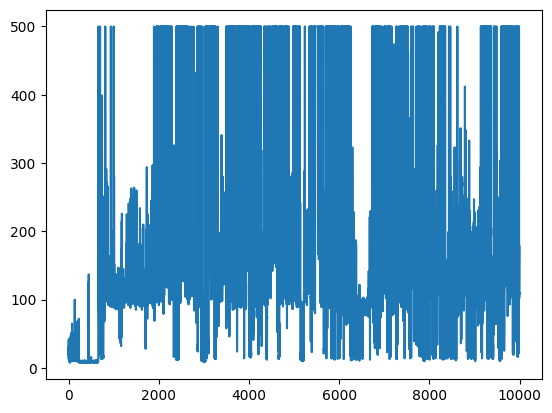

In [ ]:
total_count = 0
total_episodes = 0
X1 = None
a=[]
t0 = time.time()

episodios = 10_000

priorityIncrement = torch.full((500,), 10)

MediaDos100 = deque(maxlen=100)
MediasLista = []

indicesToIncrement = []

indice_final = 0
stop = False

brake500 = 0

for i, data in enumerate(collector):
    indices = rb.extend(data)

    for X0 in data["next","step_count"]:
        if X1 is not None:
            if X0<X1:
                total_episodes += 1
                MediaDos100.append(X1.item())
                a.append(X1.item())
                if ((total_episodes % 100) == 0): MediasLista.append(sum(MediaDos100)/100)
                if X1.item() == 500:
                    print("alcançou 500!!!!!!")
        X1 = X0
        if X0 == 499:
            brake500 += 1
            if brake500 >= 10: stop = not stop
            indice_final = indices[-1]
            indice_500 = torch.nonzero(data["next","step_count"] == 499, as_tuple=True)
            indicesToIncrement = torch.arange(indice_final.item()+1 - 499 + indice_500[0].item()-499, indice_final.item()+1 - 499 + indice_500[0].item()+1)
            rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)

    if (total_episodes >= episodios): break
    # if stop: break

    max_length = rb[:]["next", "step_count"].max()

    if len(rb) > init_rand_steps:
        for _ in range(optim_steps):
            sample, info = rb.sample(return_info=True)

            loss_vals = loss(sample)

            rb.update_priority(index=info["index"], priority=loss_vals["loss"])

            loss_vals["loss"] = loss_vals["loss"].mean()
            loss_vals["loss"].backward()
            optim.step()
            optim.zero_grad()
            exploration_module.step(data.numel())

            updater.step()

        torchrl_logger.info(f"Episodes: {total_episodes}, Max num steps: {max_length}, rb length {len(rb)}")
        total_count += data.numel()

t1 = time.time()
torchrl_logger.info(f"solved after {total_count} steps, {total_episodes} episodes and in {t1-t0}s.")
plt.plot(a)
plt.show()

[20.37, 22.9, 13.54, 9.41, 13.91, 9.48, 54.1, 64.8, 144.04, 113.43, 105.69, 96.7, 116.57, 144.98, 143.08, 129.72, 108.77, 120.45, 138.75, 230.69, 200.21, 203.99, 174.54, 187.58, 247.79, 340.73, 130.58, 148.29, 163.2, 153.25, 195.57, 328.19, 300.14, 151.23, 158.48, 157.33, 274.51, 187.09, 215.62, 263.15, 161.97, 309.49, 182.27, 136.68, 190.22, 258.05, 187.91, 265.64, 200.4, 142.53, 176.96, 95.64, 123.24, 152.79, 373.65, 411.08, 169.5, 210.5, 303.86, 205.56, 288.17, 380.76, 158.22, 94.3, 88.07, 87.59, 100.58, 145.89, 253.18, 233.79, 193.34, 161.37, 131.08, 161.81, 208.04, 156.89, 183.43, 185.78, 130.59, 176.35, 164.78, 119.04, 171.17, 148.57, 130.94, 136.68, 148.89, 159.16, 138.4, 124.59, 129.45, 177.0, 268.74, 199.0, 128.67, 104.04, 266.37, 389.72, 266.71, 193.38]


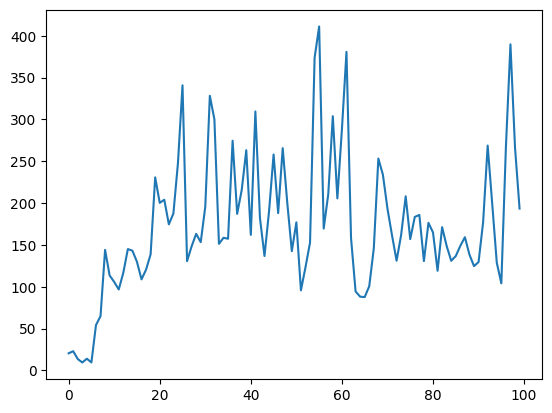

In [ ]:
print(MediasLista)
plt.plot(MediasLista)
plt.show()

In [ ]:
eval_score = []
mean_100_eval_score = []

for i in range(1001):
    eval_score.append(env.rollout(max_steps=500, policy=policy)["next","step_count"][-1].item())
    if (i%100)==0:
      if i!=0:
        mean_100_eval_score.append(np.mean(eval_score[-100]))

plt.plot(eval_score)
plt.show()

In [ ]:
eval_score_mean = np.mean(mean_100_eval_score)
eval_score_mean

177.9

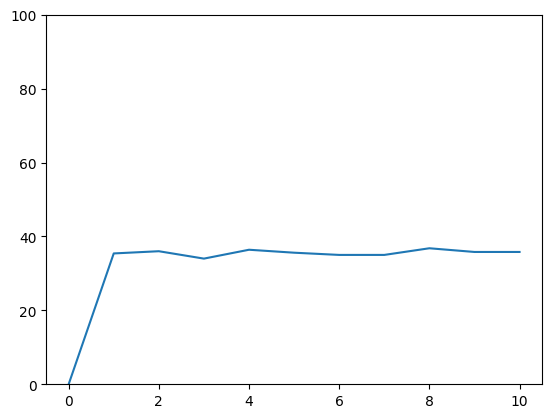

In [ ]:

Sucessos = [0]
for i in mean_100_eval_score:

  bb = (i/500)*100
  Sucessos.append(bb)
plt.plot(Sucessos)
plt.ylim(0,100)
plt.show()

In [ ]:
guarda_dados(a,
             nome_arquivo="Recompensa por Episódio 9",
             nome_pasta  ="Versão_V4_10mil(new)")
guarda_dados(eval_score,
             nome_arquivo="Avaliação 9",
             nome_pasta  ="Versão_V4_10mil(new)")
guarda_dados(Sucessos,
             nome_arquivo="Sucessos 9",
             nome_pasta  ="Versão_V4_10mil(new)")
guarda_dados(MediasLista,
             nome_arquivo="Médias 9",
             nome_pasta  ="Versão_V4_10mil(new)")
salvar_array(a, Sucessos, eval_score_mean, eval_score, versao="Versão_V4_10mil(new)", epoch=9)

In [ ]:
plt.plot(a)
plt.show()

## Renderização

Por fim, executamos o ambiente em tantas etapas quanto possível e salvamos o vídeo localmente (observe que não estamos explorando).

In [ ]:
b = []
for i in range(200):
    b.append(env.rollout(max_steps=500, policy=policy)["next","step_count"][-1].item())
plt.plot(b)
plt.show()

In [ ]:
# Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
record_env.rollout(max_steps=10000, policy=policy)
# max_steps=1000: Define o número máximo de passos a serem executados durante o rollout. Aqui, está configurado para 1000 passos.
# policy=policy: A política que o agente deve seguir durante a execução. Neste caso, é a política treinada previamente (policy).

# Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
video_recorder.dump()

In [ ]:
logger # CSVLogger(exp_name=dqn, experiment=CSVExperiment(log_dir=./training_loop/dqn))

# V5 em PyTorch

## Configuração do Agente

### Construindo o ambiente - OK

Estaremos usando um ambiente de academia com uma StepCounter transformação. Se precisar de uma atualização, verifique se esses recursos são apresentados no tutorial do ambiente .

In [ ]:
torch.manual_seed(0) # define a semente manual para a geração de números aleatórios no PyTorch, garantindo a reprodutibilidade dos resultados.
env = TransformedEnv(GymEnv("CartPole-v1"), StepCounter())
# cria um ambiente de RL para o ambiente "CartPole-v1" do OpenAI Gym, com um contador de passos adicionado como uma transformação ao ambiente.
env.set_seed(0) # define a semente para o ambiente env, garantindo a consistência do comportamento do ambiente em diferentes execuções.

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


795726461

### Projetando uma política

O próximo passo é construir nossa política. Faremos uma versão regular e determinística do ator para ser usada no módulo de perda e durante a avaliação . A seguir, iremos aumentá-lo com um módulo de exploração para inferência .

In [ ]:
# Essa linha cria uma MLP que mapeia observações do ambiente para valores de ação, com duas camadas ocultas de 64 neurônios cada.
value_mlp = MLP(out_features=env.action_spec.shape[-1], num_cells=[64, 64])
# MLP: Refere-se a um Multi-Layer Perceptron (MLP), uma rede neural feed-forward composta por múltiplas camadas densamente conectadas.
# out_features=env.action_spec.shape[-1]: Define o número de neurônios na camada de saída da MLP.
# env.action_spec.shape[-1] é a dimensão do espaço de ações do ambiente, o que significa que a MLP vai produzir um valor para cada ação possível no ambiente.
# num_cells=[64, 64]: Define a arquitetura da MLP, com duas camadas ocultas, cada uma contendo 64 neurônios.

# Essa linha cria um módulo que pega as observações do ambiente (observation) e produz valores de ação (action_value) usando a MLP definida anteriormente.
value_net = Mod(value_mlp, in_keys=["observation"], out_keys=["action_value"])
# Mod: Refere-se ao TensorDictModule, que é um módulo que opera sobre TensorDicts.
# value_mlp: A MLP criada na linha anterior.
# in_keys=["observation"]: Define as chaves de entrada para o módulo. Aqui, o módulo espera uma chave chamada observation no TensorDict de entrada.
# out_keys=["action_value"]: Define as chaves de saída para o módulo. O módulo irá produzir uma chave chamada action_value no TensorDict de saída.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
# Cria uma política que primeiro passa a observação através da value_net para obter os valores de ação
# e, em seguida, usa o QValueModule para calcular os valores Q para as ações.
policy = Seq(value_net, QValueModule(spec=env.action_spec))
# Seq: Refere-se ao TensorDictSequential, que é similar ao torch.nn.Sequential, mas opera sobre TensorDicts.
# value_net: O módulo criado na linha anterior.
# QValueModule(spec=env.action_spec): Um módulo específico para calcular valores Q, usado em algoritmos de Q-learning.
# spec=env.action_spec fornece as especificações do espaço de ações do ambiente.

# Cria um módulo de exploração que implementa uma estratégia epsilon-greedy com um valor inicial de epsilon de 0.5 e que diminui ao longo de 100.000 passos.
exploration_module = EGreedyModule(env.action_spec, annealing_num_steps=100_000, eps_init=1)
# EGreedyModule: Implementa política epsilon-greedy, que escolhe ações aleatoriamente com certa probabilidade epsilon, e a melhor ação com probabilidade 1-epsilon.
# env.action_spec: As especificações do espaço de ações do ambiente.
# annealing_num_steps=100_000: Define o número de passos durante os quais o valor de epsilon será reduzido gradualmente (annealing).
# eps_init=0.5: Define o valor inicial de epsilon. No início, 50% das ações serão escolhidas aleatoriamente.

# Essa linha combina a política com o módulo de exploração em uma sequência, resultando em uma política que primeiro calcula os valores de ação
# e, em seguida, aplica a estratégia epsilon-greedy para selecionar as ações.
policy_explore = Seq(policy, exploration_module)
# Seq: Refere-se ao TensorDictSequential.
# policy: A política definida anteriormente.
# exploration_module: O módulo de exploração epsilon-greedy definido na linha anterior.

/usr/local/lib/python3.10/dist-packages/torchrl/modules/tensordict_module/exploration.py:97: UserWarning: eps_init should be a float.
  warnings.warn("eps_init should be a float.")


### Coletor de dados e buffer de reprodução

Aí vem a parte dos dados: precisamos de um coletor de dados para obter facilmente lotes de dados e um buffer de reprodução para armazenar esses dados para treinamento.

In [ ]:
init_rand_steps = 5000
# Define o número inicial de passos aleatórios a serem realizados no ambiente antes de começar a usar a política treinada.
# Isso ajuda a inicializar o replay buffer com uma diversidade de estados e ações.
frames_per_batch = 500
# Define o número de frames (ou passos de tempo) que serão coletados em cada lote (batch) de coleta de dados do ambiente.
optim_steps = 25
# Define o número de passos de otimização que serão realizados após cada lote de coleta de dados.
# Isso controla quantas atualizações dos pesos da rede neural serão feitas com base nos dados coletados.

# SyncDataCollector: Um coletor de dados síncrono que coleta experiências do ambiente usando a política fornecida.
collector = SyncDataCollector(
    env,
    policy,
    frames_per_batch=frames_per_batch,
    total_frames=-1,
    init_random_frames=init_rand_steps,
)
# env: O ambiente de RL, criado anteriormente com TransformedEnv.
# policy: A política que será usada para coletar experiências, criada anteriormente.
# frames_per_batch=frames_per_batch: Especifica que 100 frames serão coletados em cada lote.
# total_frames=-1: Especifica que o coletor deve continuar indefinidamente (ou até que seja explicitamente parado).
# init_random_frames=init_rand_steps: Especifica que 5000 passos aleatórios serão realizados inicialmente p/ preencher o replay buffer com experiências variadas.
size = 100_000
rb = ReplayBuffer(
                storage=LazyTensorStorage(size),
                sampler=PrioritizedSampler(max_capacity=size, alpha=0.6, beta=0.4),
                batch_size=200)

### Módulo de perda e otimizador

Construímos nossa perda conforme indicado no tutorial dedicado , com seu otimizador e atualizador de parâmetros de destino:

In [ ]:
#  Implementa a função de perda para o algoritmo DQN (Deep Q-Network).
loss = DQNLoss(value_network=policy, action_space=env.action_spec, delay_value=True, reduction='none')
# value_network=policy: A rede de valor utilizada para calcular os valores Q. Aqui, policy é a política criada anteriormente, que inclui o QValueModule.
# action_space=env.action_spec: Especifica o espaço de ações do ambiente, utilizado para calcular os valores Q para todas as ações possíveis.
# delay_value=True: Indica que a rede alvo (target network) deve ser usada para calcular os valores Q futuros, o que é uma técnica comum para estabilizar o treinamento em DQN.

# Um otimizador amplamente utilizado que combina as vantagens dos métodos AdaGrad e RMSProp. É particularmente eficiente para grandes problemas de aprendizado de máquina com muitos parâmetros.
optim = Adam(loss.parameters(), lr=0.01)
# loss.parameters(): Passa os parâmetros da função de perda (que incluem os parâmetros da rede de valor) para o otimizador.
# lr=0.02: Define a taxa de aprendizado (learning rate) como 0.02. Esta taxa controla o tamanho dos passos de atualização dos pesos da rede neural durante o treinamento.

# Implementa a atualização suave dos parâmetros da rede, uma técnica comum em algoritmos de RL para atualizar gradualmente uma rede alvo (target network) com os parâmetros da rede de valor (online network).
updater = SoftUpdate(loss, eps=0.99)
# loss: A função de perda que contém os parâmetros da rede de valor e da rede alvo.
# eps=0.99: Define o fator de atualização suave (soft update factor). eps=0.99 indica que 99% dos parâmetros da rede alvo são mantidos e apenas 1% é atualizado a partir da rede de valor em cada passo.

### Registrador

Usaremos um registrador CSV para registrar nossos resultados e salvar vídeos renderizados.

In [ ]:
path = "./training_loop" # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.

# CSVLogger: Um logger que registra dados em formato CSV, útil para monitorar o progresso do treinamento e analisar resultados.
logger = CSVLogger(exp_name="dqn", log_dir=path, video_format="mp4")
# exp_name="dqn": Nome da experiência, usado como um identificador para os logs. Aqui, é definido como "dqn" (Deep Q-Network).
# log_dir=path: Diretório onde os logs serão salvos. Neste caso, é o diretório definido anteriormente, ./training_loop.
# video_format="mp4": Especifica o formato de vídeo para gravação. Aqui, está configurado para MP4.

# Um objeto que grava vídeos das execuções do ambiente durante o treinamento, útil para visualizar o comportamento do agente.
video_recorder = VideoRecorder(logger, tag="video")
# logger: O logger criado na linha anterior, que será usado para salvar os vídeos.
# tag="video": Uma tag para identificar os vídeos nos logs. Aqui, está definido como "video".

# Um wrapper que aplica transformações ao ambiente, como normalização de observações ou recompensas, e também permite a adição de funcionalidades como gravação de vídeos.
record_env = TransformedEnv(
    GymEnv("CartPole-v1", from_pixels=True, pixels_only=False), video_recorder
)
# GymEnv("CartPole-v1", from_pixels=True, pixels_only=False): Cria um ambiente GymEnv para o ambiente "CartPole-v1" do OpenAI Gym.
# from_pixels=True: Indica que o ambiente será renderizado a partir de pixels, permitindo a gravação visual do ambiente.
# pixels_only=False: Indica que tanto as observações em forma de pixels quanto outras observações (como a posição e a velocidade do carrinho) serão retornadas pelo ambiente.
# video_recorder: O gravador de vídeos criado na linha anterior, que será usado para gravar as execuções do ambiente.

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


## Ciclo de treinamento

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-06-05 18:33:39,921 [torchrl][INFO] Episodes: 280, Max num steps: 100, rb length 5500
2024-06-05 18:33:41,096 [torchrl][INFO] Episodes: 334, Max num steps: 100, rb length 6000
2024-06-05 18:33:42,289 [torchrl][INFO] Episodes: 381, Max num steps: 100, rb length 6500
2024-06-05 18:33:43,468 [torchrl][INFO] Episodes: 435, Max num steps: 100, rb length 7000
2024-06-05 18:33:44,616 [torchrl][INFO] Episodes: 486, Max num steps: 100, rb length 7500
2024-06-05 18:33:46,019 [torchrl][INFO] Episodes: 539, Max num steps: 100, rb length 8000
2024-06-05 18:33:47,698 [torchrl][INFO] Episodes: 592, Max num steps: 100, rb length 8500
2024-06-05 18:3

alcançou 500!!!!!!


2024-06-05 18:38:28,186 [torchrl][INFO] Episodes: 1678, Max num steps: 500, rb length 100000
2024-06-05 18:38:29,572 [torchrl][INFO] Episodes: 1680, Max num steps: 500, rb length 100000
2024-06-05 18:38:31,203 [torchrl][INFO] Episodes: 1684, Max num steps: 500, rb length 100000
2024-06-05 18:38:32,984 [torchrl][INFO] Episodes: 1687, Max num steps: 500, rb length 100000
2024-06-05 18:38:34,491 [torchrl][INFO] Episodes: 1691, Max num steps: 500, rb length 100000
2024-06-05 18:38:35,613 [torchrl][INFO] Episodes: 1696, Max num steps: 500, rb length 100000
2024-06-05 18:38:36,764 [torchrl][INFO] Episodes: 1700, Max num steps: 500, rb length 100000
2024-06-05 18:38:37,891 [torchrl][INFO] Episodes: 1704, Max num steps: 500, rb length 100000
2024-06-05 18:38:39,027 [torchrl][INFO] Episodes: 1709, Max num steps: 500, rb length 100000
2024-06-05 18:38:40,168 [torchrl][INFO] Episodes: 1714, Max num steps: 500, rb length 100000
2024-06-05 18:38:41,755 [torchrl][INFO] Episodes: 1719, Max num steps:

alcançou 500!!!!!!


2024-06-05 18:38:57,283 [torchrl][INFO] Episodes: 1761, Max num steps: 500, rb length 100000
2024-06-05 18:38:58,413 [torchrl][INFO] Episodes: 1764, Max num steps: 500, rb length 100000
2024-06-05 18:39:00,012 [torchrl][INFO] Episodes: 1769, Max num steps: 500, rb length 100000
2024-06-05 18:39:01,711 [torchrl][INFO] Episodes: 1772, Max num steps: 500, rb length 100000
2024-06-05 18:39:03,410 [torchrl][INFO] Episodes: 1775, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:39:04,533 [torchrl][INFO] Episodes: 1776, Max num steps: 500, rb length 100000
2024-06-05 18:39:05,656 [torchrl][INFO] Episodes: 1777, Max num steps: 500, rb length 100000
2024-06-05 18:39:06,770 [torchrl][INFO] Episodes: 1782, Max num steps: 500, rb length 100000
2024-06-05 18:39:07,896 [torchrl][INFO] Episodes: 1783, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:39:09,031 [torchrl][INFO] Episodes: 1784, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:39:10,154 [torchrl][INFO] Episodes: 1786, Max num steps: 500, rb length 100000
2024-06-05 18:39:11,323 [torchrl][INFO] Episodes: 1790, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:39:12,459 [torchrl][INFO] Episodes: 1791, Max num steps: 500, rb length 100000
2024-06-05 18:39:13,845 [torchrl][INFO] Episodes: 1796, Max num steps: 500, rb length 100000
2024-06-05 18:39:15,467 [torchrl][INFO] Episodes: 1801, Max num steps: 500, rb length 100000
2024-06-05 18:39:17,243 [torchrl][INFO] Episodes: 1803, Max num steps: 500, rb length 100000
2024-06-05 18:39:18,804 [torchrl][INFO] Episodes: 1805, Max num steps: 500, rb length 100000
2024-06-05 18:39:19,957 [torchrl][INFO] Episodes: 1807, Max num steps: 500, rb length 100000
2024-06-05 18:39:21,129 [torchrl][INFO] Episodes: 1812, Max num steps: 500, rb length 100000
2024-06-05 18:39:22,314 [torchrl][INFO] Episodes: 1816, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:39:23,450 [torchrl][INFO] Episodes: 1817, Max num steps: 500, rb length 100000
2024-06-05 18:39:24,620 [torchrl][INFO] Episodes: 1822, Max num steps: 500, rb length 100000
2024-06-05 18:39:25,773 [torchrl][INFO] Episodes: 1827, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:39:26,943 [torchrl][INFO] Episodes: 1828, Max num steps: 500, rb length 100000
2024-06-05 18:39:28,143 [torchrl][INFO] Episodes: 1831, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:39:29,799 [torchrl][INFO] Episodes: 1832, Max num steps: 500, rb length 100000
2024-06-05 18:39:31,545 [torchrl][INFO] Episodes: 1833, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:39:33,231 [torchrl][INFO] Episodes: 1836, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:39:34,377 [torchrl][INFO] Episodes: 1837, Max num steps: 500, rb length 100000
2024-06-05 18:39:35,511 [torchrl][INFO] Episodes: 1840, Max num steps: 500, rb length 100000
2024-06-05 18:39:36,665 [torchrl][INFO] Episodes: 1845, Max num steps: 500, rb length 100000
2024-06-05 18:39:37,805 [torchrl][INFO] Episodes: 1848, Max num steps: 500, rb length 100000
2024-06-05 18:39:38,984 [torchrl][INFO] Episodes: 1852, Max num steps: 500, rb length 100000
2024-06-05 18:39:40,345 [torchrl][INFO] Episodes: 1856, Max num steps: 500, rb length 100000
2024-06-05 18:39:41,509 [torchrl][INFO] Episodes: 1858, Max num steps: 500, rb length 100000
2024-06-05 18:39:42,667 [torchrl][INFO] Episodes: 1859, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:39:44,226 [torchrl][INFO] Episodes: 1861, Max num steps: 500, rb length 100000
2024-06-05 18:39:45,934 [torchrl][INFO] Episodes: 1863, Max num steps: 500, rb length 100000
2024-06-05 18:39:47,696 [torchrl][INFO] Episodes: 1868, Max num steps: 500, rb length 100000
2024-06-05 18:39:48,852 [torchrl][INFO] Episodes: 1870, Max num steps: 500, rb length 100000
2024-06-05 18:39:50,005 [torchrl][INFO] Episodes: 1875, Max num steps: 500, rb length 100000
2024-06-05 18:39:51,201 [torchrl][INFO] Episodes: 1876, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:39:52,363 [torchrl][INFO] Episodes: 1878, Max num steps: 500, rb length 100000
2024-06-05 18:39:53,532 [torchrl][INFO] Episodes: 1879, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:39:54,703 [torchrl][INFO] Episodes: 1882, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:39:55,908 [torchrl][INFO] Episodes: 1883, Max num steps: 500, rb length 100000
2024-06-05 18:39:57,092 [torchrl][INFO] Episodes: 1885, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:39:58,593 [torchrl][INFO] Episodes: 1887, Max num steps: 500, rb length 100000
2024-06-05 18:40:00,298 [torchrl][INFO] Episodes: 1889, Max num steps: 500, rb length 100000
2024-06-05 18:40:02,291 [torchrl][INFO] Episodes: 1899, Max num steps: 500, rb length 100000
2024-06-05 18:40:03,704 [torchrl][INFO] Episodes: 1900, Max num steps: 500, rb length 100000
2024-06-05 18:40:04,883 [torchrl][INFO] Episodes: 1905, Max num steps: 500, rb length 100000
2024-06-05 18:40:06,046 [torchrl][INFO] Episodes: 1907, Max num steps: 500, rb length 100000
2024-06-05 18:40:07,201 [torchrl][INFO] Episodes: 1911, Max num steps: 500, rb length 100000
2024-06-05 18:40:08,374 [torchrl][INFO] Episodes: 1913, Max num steps: 500, rb length 100000
2024-06-05 18:40:09,535 [torchrl][INFO] Episodes: 1914, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:40:10,713 [torchrl][INFO] Episodes: 1917, Max num steps: 500, rb length 100000
2024-06-05 18:40:11,896 [torchrl][INFO] Episodes: 1922, Max num steps: 500, rb length 100000
2024-06-05 18:40:13,389 [torchrl][INFO] Episodes: 1925, Max num steps: 500, rb length 100000
2024-06-05 18:40:15,101 [torchrl][INFO] Episodes: 1929, Max num steps: 500, rb length 100000
2024-06-05 18:40:16,952 [torchrl][INFO] Episodes: 1932, Max num steps: 500, rb length 100000
2024-06-05 18:40:18,315 [torchrl][INFO] Episodes: 1935, Max num steps: 500, rb length 100000
2024-06-05 18:40:19,484 [torchrl][INFO] Episodes: 1937, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:40:20,659 [torchrl][INFO] Episodes: 1938, Max num steps: 500, rb length 100000
2024-06-05 18:40:21,838 [torchrl][INFO] Episodes: 1941, Max num steps: 500, rb length 100000
2024-06-05 18:40:23,000 [torchrl][INFO] Episodes: 1943, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:40:24,353 [torchrl][INFO] Episodes: 1944, Max num steps: 500, rb length 100000
2024-06-05 18:40:25,552 [torchrl][INFO] Episodes: 1946, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:40:26,723 [torchrl][INFO] Episodes: 1947, Max num steps: 500, rb length 100000
2024-06-05 18:40:28,167 [torchrl][INFO] Episodes: 1949, Max num steps: 500, rb length 100000
2024-06-05 18:40:29,850 [torchrl][INFO] Episodes: 1950, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:40:31,730 [torchrl][INFO] Episodes: 1952, Max num steps: 500, rb length 100000
2024-06-05 18:40:33,134 [torchrl][INFO] Episodes: 1953, Max num steps: 500, rb length 100000
2024-06-05 18:40:34,294 [torchrl][INFO] Episodes: 1957, Max num steps: 500, rb length 100000
2024-06-05 18:40:35,450 [torchrl][INFO] Episodes: 1958, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:40:36,632 [torchrl][INFO] Episodes: 1960, Max num steps: 500, rb length 100000
2024-06-05 18:40:37,799 [torchrl][INFO] Episodes: 1962, Max num steps: 500, rb length 100000
2024-06-05 18:40:38,950 [torchrl][INFO] Episodes: 1964, Max num steps: 500, rb length 100000
2024-06-05 18:40:40,140 [torchrl][INFO] Episodes: 1965, Max num steps: 500, rb length 100000
2024-06-05 18:40:41,308 [torchrl][INFO] Episodes: 1967, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:40:42,566 [torchrl][INFO] Episodes: 1968, Max num steps: 500, rb length 100000
2024-06-05 18:40:44,282 [torchrl][INFO] Episodes: 1971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:40:46,344 [torchrl][INFO] Episodes: 1972, Max num steps: 500, rb length 100000
2024-06-05 18:40:47,808 [torchrl][INFO] Episodes: 1975, Max num steps: 500, rb length 100000
2024-06-05 18:40:48,985 [torchrl][INFO] Episodes: 1977, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:40:50,179 [torchrl][INFO] Episodes: 1978, Max num steps: 500, rb length 100000
2024-06-05 18:40:51,401 [torchrl][INFO] Episodes: 1981, Max num steps: 500, rb length 100000
2024-06-05 18:40:52,573 [torchrl][INFO] Episodes: 1984, Max num steps: 500, rb length 100000
2024-06-05 18:40:53,744 [torchrl][INFO] Episodes: 1987, Max num steps: 500, rb length 100000
2024-06-05 18:40:54,906 [torchrl][INFO] Episodes: 1990, Max num steps: 500, rb length 100000
2024-06-05 18:40:56,105 [torchrl][INFO] Episodes: 1993, Max num steps: 500, rb length 100000
2024-06-05 18:40:57,369 [torchrl][INFO] Episodes: 1996, Max num steps: 500, rb length 100000
2024-06-05 18:40:59,065 [torchrl][INFO] Episodes: 2000, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:41:00,868 [torchrl][INFO] Episodes: 2001, Max num steps: 500, rb length 100000
2024-06-05 18:41:02,497 [torchrl][INFO] Episodes: 2004, Max num steps: 500, rb length 100000
2024-06-05 18:41:03,664 [torchrl][INFO] Episodes: 2006, Max num steps: 500, rb length 100000
2024-06-05 18:41:04,843 [torchrl][INFO] Episodes: 2009, Max num steps: 500, rb length 100000
2024-06-05 18:41:06,004 [torchrl][INFO] Episodes: 2013, Max num steps: 500, rb length 100000
2024-06-05 18:41:07,334 [torchrl][INFO] Episodes: 2017, Max num steps: 500, rb length 100000
2024-06-05 18:41:08,505 [torchrl][INFO] Episodes: 2020, Max num steps: 500, rb length 100000
2024-06-05 18:41:09,663 [torchrl][INFO] Episodes: 2023, Max num steps: 500, rb length 100000
2024-06-05 18:41:10,818 [torchrl][INFO] Episodes: 2026, Max num steps: 500, rb length 100000
2024-06-05 18:41:12,001 [torchrl][INFO] Episodes: 2029, Max num steps: 500, rb length 100000
2024-06-05 18:41:13,647 [torchrl][INFO] Episodes: 2032, Max num steps:

alcançou 500!!!!!!


2024-06-05 18:42:09,859 [torchrl][INFO] Episodes: 2172, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:42:11,058 [torchrl][INFO] Episodes: 2176, Max num steps: 500, rb length 100000
2024-06-05 18:42:12,228 [torchrl][INFO] Episodes: 2178, Max num steps: 500, rb length 100000
2024-06-05 18:42:13,880 [torchrl][INFO] Episodes: 2181, Max num steps: 500, rb length 100000
2024-06-05 18:42:15,642 [torchrl][INFO] Episodes: 2184, Max num steps: 500, rb length 100000
2024-06-05 18:42:17,603 [torchrl][INFO] Episodes: 2188, Max num steps: 500, rb length 100000
2024-06-05 18:42:18,767 [torchrl][INFO] Episodes: 2189, Max num steps: 500, rb length 100000
2024-06-05 18:42:19,934 [torchrl][INFO] Episodes: 2190, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:42:21,127 [torchrl][INFO] Episodes: 2191, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:42:22,319 [torchrl][INFO] Episodes: 2192, Max num steps: 500, rb length 100000
2024-06-05 18:42:23,479 [torchrl][INFO] Episodes: 2195, Max num steps: 500, rb length 100000
2024-06-05 18:42:24,646 [torchrl][INFO] Episodes: 2196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:42:25,867 [torchrl][INFO] Episodes: 2199, Max num steps: 500, rb length 100000
2024-06-05 18:42:27,044 [torchrl][INFO] Episodes: 2201, Max num steps: 500, rb length 100000
2024-06-05 18:42:28,600 [torchrl][INFO] Episodes: 2202, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:42:30,317 [torchrl][INFO] Episodes: 2207, Max num steps: 500, rb length 100000
2024-06-05 18:42:32,193 [torchrl][INFO] Episodes: 2210, Max num steps: 500, rb length 100000
2024-06-05 18:42:33,456 [torchrl][INFO] Episodes: 2212, Max num steps: 500, rb length 100000
2024-06-05 18:42:34,620 [torchrl][INFO] Episodes: 2215, Max num steps: 500, rb length 100000
2024-06-05 18:42:35,773 [torchrl][INFO] Episodes: 2217, Max num steps: 500, rb length 100000
2024-06-05 18:42:36,959 [torchrl][INFO] Episodes: 2218, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:42:38,125 [torchrl][INFO] Episodes: 2219, Max num steps: 500, rb length 100000
2024-06-05 18:42:39,300 [torchrl][INFO] Episodes: 2221, Max num steps: 500, rb length 100000
2024-06-05 18:42:40,636 [torchrl][INFO] Episodes: 2225, Max num steps: 500, rb length 100000
2024-06-05 18:42:41,819 [torchrl][INFO] Episodes: 2227, Max num steps: 500, rb length 100000
2024-06-05 18:42:43,297 [torchrl][INFO] Episodes: 2230, Max num steps: 500, rb length 100000
2024-06-05 18:42:44,965 [torchrl][INFO] Episodes: 2234, Max num steps: 500, rb length 100000
2024-06-05 18:42:46,819 [torchrl][INFO] Episodes: 2235, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:42:48,215 [torchrl][INFO] Episodes: 2238, Max num steps: 500, rb length 100000
2024-06-05 18:42:49,377 [torchrl][INFO] Episodes: 2241, Max num steps: 500, rb length 100000
2024-06-05 18:42:50,554 [torchrl][INFO] Episodes: 2245, Max num steps: 500, rb length 100000
2024-06-05 18:42:51,735 [torchrl][INFO] Episodes: 2249, Max num steps: 500, rb length 100000
2024-06-05 18:42:52,908 [torchrl][INFO] Episodes: 2253, Max num steps: 500, rb length 100000
2024-06-05 18:42:54,092 [torchrl][INFO] Episodes: 2257, Max num steps: 500, rb length 100000
2024-06-05 18:42:55,263 [torchrl][INFO] Episodes: 2260, Max num steps: 500, rb length 100000
2024-06-05 18:42:56,466 [torchrl][INFO] Episodes: 2262, Max num steps: 500, rb length 100000
2024-06-05 18:42:57,791 [torchrl][INFO] Episodes: 2265, Max num steps: 500, rb length 100000
2024-06-05 18:42:59,481 [torchrl][INFO] Episodes: 2267, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:01,363 [torchrl][INFO] Episodes: 2268, Max num steps: 500, rb length 100000
2024-06-05 18:43:02,897 [torchrl][INFO] Episodes: 2271, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:04,253 [torchrl][INFO] Episodes: 2272, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:05,429 [torchrl][INFO] Episodes: 2273, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:06,622 [torchrl][INFO] Episodes: 2274, Max num steps: 500, rb length 100000
2024-06-05 18:43:07,804 [torchrl][INFO] Episodes: 2277, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:08,986 [torchrl][INFO] Episodes: 2278, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:10,157 [torchrl][INFO] Episodes: 2279, Max num steps: 500, rb length 100000
2024-06-05 18:43:11,340 [torchrl][INFO] Episodes: 2282, Max num steps: 500, rb length 100000
2024-06-05 18:43:12,720 [torchrl][INFO] Episodes: 2286, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:14,425 [torchrl][INFO] Episodes: 2287, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:16,259 [torchrl][INFO] Episodes: 2288, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:17,723 [torchrl][INFO] Episodes: 2289, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:18,906 [torchrl][INFO] Episodes: 2290, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:20,082 [torchrl][INFO] Episodes: 2291, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:21,263 [torchrl][INFO] Episodes: 2292, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:22,443 [torchrl][INFO] Episodes: 2293, Max num steps: 500, rb length 100000
2024-06-05 18:43:23,616 [torchrl][INFO] Episodes: 2296, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:24,797 [torchrl][INFO] Episodes: 2297, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:26,196 [torchrl][INFO] Episodes: 2298, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:27,591 [torchrl][INFO] Episodes: 2299, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:29,306 [torchrl][INFO] Episodes: 2300, Max num steps: 500, rb length 100000
2024-06-05 18:43:31,167 [torchrl][INFO] Episodes: 2301, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:32,521 [torchrl][INFO] Episodes: 2302, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:33,705 [torchrl][INFO] Episodes: 2303, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:34,894 [torchrl][INFO] Episodes: 2304, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:36,109 [torchrl][INFO] Episodes: 2305, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:37,297 [torchrl][INFO] Episodes: 2306, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:38,469 [torchrl][INFO] Episodes: 2309, Max num steps: 500, rb length 100000
2024-06-05 18:43:39,659 [torchrl][INFO] Episodes: 2312, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:40,844 [torchrl][INFO] Episodes: 2313, Max num steps: 500, rb length 100000
2024-06-05 18:43:42,206 [torchrl][INFO] Episodes: 2315, Max num steps: 500, rb length 100000
2024-06-05 18:43:43,883 [torchrl][INFO] Episodes: 2316, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:45,734 [torchrl][INFO] Episodes: 2317, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:47,211 [torchrl][INFO] Episodes: 2318, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:48,396 [torchrl][INFO] Episodes: 2321, Max num steps: 500, rb length 100000
2024-06-05 18:43:49,762 [torchrl][INFO] Episodes: 2322, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:50,974 [torchrl][INFO] Episodes: 2323, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:52,162 [torchrl][INFO] Episodes: 2324, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:53,345 [torchrl][INFO] Episodes: 2325, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:54,525 [torchrl][INFO] Episodes: 2326, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:55,747 [torchrl][INFO] Episodes: 2327, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:57,123 [torchrl][INFO] Episodes: 2328, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:43:58,848 [torchrl][INFO] Episodes: 2329, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:00,734 [torchrl][INFO] Episodes: 2330, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:02,267 [torchrl][INFO] Episodes: 2331, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:03,473 [torchrl][INFO] Episodes: 2332, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:04,655 [torchrl][INFO] Episodes: 2335, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:05,848 [torchrl][INFO] Episodes: 2336, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:07,051 [torchrl][INFO] Episodes: 2337, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:08,242 [torchrl][INFO] Episodes: 2338, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:09,466 [torchrl][INFO] Episodes: 2339, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:10,652 [torchrl][INFO] Episodes: 2340, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:12,265 [torchrl][INFO] Episodes: 2341, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:14,037 [torchrl][INFO] Episodes: 2342, Max num steps: 500, rb length 100000
2024-06-05 18:44:15,925 [torchrl][INFO] Episodes: 2345, Max num steps: 500, rb length 100000
2024-06-05 18:44:17,360 [torchrl][INFO] Episodes: 2350, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:18,531 [torchrl][INFO] Episodes: 2351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:19,720 [torchrl][INFO] Episodes: 2352, Max num steps: 500, rb length 100000
2024-06-05 18:44:20,911 [torchrl][INFO] Episodes: 2354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:22,140 [torchrl][INFO] Episodes: 2355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:23,325 [torchrl][INFO] Episodes: 2356, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:24,510 [torchrl][INFO] Episodes: 2357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:25,723 [torchrl][INFO] Episodes: 2358, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:27,083 [torchrl][INFO] Episodes: 2359, Max num steps: 500, rb length 100000
2024-06-05 18:44:28,766 [torchrl][INFO] Episodes: 2361, Max num steps: 500, rb length 100000
2024-06-05 18:44:30,594 [torchrl][INFO] Episodes: 2363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:31,923 [torchrl][INFO] Episodes: 2364, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:33,124 [torchrl][INFO] Episodes: 2365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:34,290 [torchrl][INFO] Episodes: 2366, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:35,656 [torchrl][INFO] Episodes: 2367, Max num steps: 500, rb length 100000
2024-06-05 18:44:36,823 [torchrl][INFO] Episodes: 2369, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:38,005 [torchrl][INFO] Episodes: 2370, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:39,189 [torchrl][INFO] Episodes: 2371, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:40,378 [torchrl][INFO] Episodes: 2372, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:41,895 [torchrl][INFO] Episodes: 2373, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:43,609 [torchrl][INFO] Episodes: 2374, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:45,482 [torchrl][INFO] Episodes: 2375, Max num steps: 500, rb length 100000
2024-06-05 18:44:46,746 [torchrl][INFO] Episodes: 2377, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:47,935 [torchrl][INFO] Episodes: 2378, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:49,140 [torchrl][INFO] Episodes: 2379, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:50,306 [torchrl][INFO] Episodes: 2380, Max num steps: 500, rb length 100000
2024-06-05 18:44:51,488 [torchrl][INFO] Episodes: 2381, Max num steps: 500, rb length 100000
2024-06-05 18:44:52,674 [torchrl][INFO] Episodes: 2384, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:53,845 [torchrl][INFO] Episodes: 2385, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:55,016 [torchrl][INFO] Episodes: 2386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:56,526 [torchrl][INFO] Episodes: 2387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:44:58,503 [torchrl][INFO] Episodes: 2388, Max num steps: 500, rb length 100000
2024-06-05 18:45:00,358 [torchrl][INFO] Episodes: 2390, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:01,690 [torchrl][INFO] Episodes: 2391, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:02,896 [torchrl][INFO] Episodes: 2392, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:04,078 [torchrl][INFO] Episodes: 2393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:05,263 [torchrl][INFO] Episodes: 2394, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:06,448 [torchrl][INFO] Episodes: 2395, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:07,629 [torchrl][INFO] Episodes: 2396, Max num steps: 500, rb length 100000
2024-06-05 18:45:08,797 [torchrl][INFO] Episodes: 2398, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:09,987 [torchrl][INFO] Episodes: 2399, Max num steps: 500, rb length 100000
2024-06-05 18:45:11,446 [torchrl][INFO] Episodes: 2401, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:13,179 [torchrl][INFO] Episodes: 2402, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:14,984 [torchrl][INFO] Episodes: 2403, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:16,418 [torchrl][INFO] Episodes: 2404, Max num steps: 500, rb length 100000
2024-06-05 18:45:17,589 [torchrl][INFO] Episodes: 2406, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:18,777 [torchrl][INFO] Episodes: 2407, Max num steps: 500, rb length 100000
2024-06-05 18:45:19,951 [torchrl][INFO] Episodes: 2408, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:21,315 [torchrl][INFO] Episodes: 2410, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:22,512 [torchrl][INFO] Episodes: 2411, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:23,707 [torchrl][INFO] Episodes: 2412, Max num steps: 500, rb length 100000
2024-06-05 18:45:24,862 [torchrl][INFO] Episodes: 2413, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:26,277 [torchrl][INFO] Episodes: 2414, Max num steps: 500, rb length 100000
2024-06-05 18:45:27,976 [torchrl][INFO] Episodes: 2417, Max num steps: 500, rb length 100000
2024-06-05 18:45:29,795 [torchrl][INFO] Episodes: 2420, Max num steps: 500, rb length 100000
2024-06-05 18:45:31,195 [torchrl][INFO] Episodes: 2424, Max num steps: 500, rb length 100000
2024-06-05 18:45:32,403 [torchrl][INFO] Episodes: 2428, Max num steps: 500, rb length 100000
2024-06-05 18:45:33,668 [torchrl][INFO] Episodes: 2431, Max num steps: 500, rb length 100000
2024-06-05 18:45:34,838 [torchrl][INFO] Episodes: 2435, Max num steps: 500, rb length 100000
2024-06-05 18:45:36,081 [torchrl][INFO] Episodes: 2438, Max num steps: 500, rb length 100000
2024-06-05 18:45:37,425 [torchrl][INFO] Episodes: 2442, Max num steps: 500, rb length 100000
2024-06-05 18:45:39,102 [torchrl][INFO] Episodes: 2445, Max num steps: 500, rb length 100000
2024-06-05 18:45:41,020 [torchrl][INFO] Episodes: 2449, Max num steps:

alcançou 500!!!!!!


2024-06-05 18:45:47,920 [torchrl][INFO] Episodes: 2460, Max num steps: 500, rb length 100000
2024-06-05 18:45:49,076 [torchrl][INFO] Episodes: 2463, Max num steps: 500, rb length 100000
2024-06-05 18:45:50,256 [torchrl][INFO] Episodes: 2466, Max num steps: 500, rb length 100000
2024-06-05 18:45:51,428 [torchrl][INFO] Episodes: 2468, Max num steps: 500, rb length 100000
2024-06-05 18:45:52,592 [torchrl][INFO] Episodes: 2472, Max num steps: 500, rb length 100000
2024-06-05 18:45:53,736 [torchrl][INFO] Episodes: 2473, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:54,933 [torchrl][INFO] Episodes: 2474, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:56,149 [torchrl][INFO] Episodes: 2475, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:57,717 [torchrl][INFO] Episodes: 2476, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:45:59,463 [torchrl][INFO] Episodes: 2477, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:01,357 [torchrl][INFO] Episodes: 2478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:02,573 [torchrl][INFO] Episodes: 2479, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:03,746 [torchrl][INFO] Episodes: 2480, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:04,928 [torchrl][INFO] Episodes: 2483, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:06,103 [torchrl][INFO] Episodes: 2484, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:07,267 [torchrl][INFO] Episodes: 2485, Max num steps: 500, rb length 100000
2024-06-05 18:46:08,676 [torchrl][INFO] Episodes: 2487, Max num steps: 500, rb length 100000
2024-06-05 18:46:09,868 [torchrl][INFO] Episodes: 2488, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:11,052 [torchrl][INFO] Episodes: 2492, Max num steps: 500, rb length 100000
2024-06-05 18:46:12,603 [torchrl][INFO] Episodes: 2495, Max num steps: 500, rb length 100000
2024-06-05 18:46:14,341 [torchrl][INFO] Episodes: 2499, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:16,227 [torchrl][INFO] Episodes: 2500, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:17,496 [torchrl][INFO] Episodes: 2501, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:18,658 [torchrl][INFO] Episodes: 2502, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:19,836 [torchrl][INFO] Episodes: 2503, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:21,035 [torchrl][INFO] Episodes: 2504, Max num steps: 500, rb length 100000
2024-06-05 18:46:22,223 [torchrl][INFO] Episodes: 2516, Max num steps: 500, rb length 100000
2024-06-05 18:46:23,406 [torchrl][INFO] Episodes: 2528, Max num steps: 500, rb length 100000
2024-06-05 18:46:24,602 [torchrl][INFO] Episodes: 2542, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:26,015 [torchrl][INFO] Episodes: 2543, Max num steps: 500, rb length 100000
2024-06-05 18:46:28,599 [torchrl][INFO] Episodes: 2544, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:31,148 [torchrl][INFO] Episodes: 2546, Max num steps: 500, rb length 100000
2024-06-05 18:46:34,264 [torchrl][INFO] Episodes: 2549, Max num steps: 500, rb length 100000
2024-06-05 18:46:35,613 [torchrl][INFO] Episodes: 2552, Max num steps: 500, rb length 100000
2024-06-05 18:46:36,805 [torchrl][INFO] Episodes: 2555, Max num steps: 500, rb length 100000
2024-06-05 18:46:37,997 [torchrl][INFO] Episodes: 2558, Max num steps: 500, rb length 100000
2024-06-05 18:46:39,187 [torchrl][INFO] Episodes: 2559, Max num steps: 500, rb length 100000
2024-06-05 18:46:40,403 [torchrl][INFO] Episodes: 2561, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:41,640 [torchrl][INFO] Episodes: 2563, Max num steps: 500, rb length 100000
2024-06-05 18:46:42,875 [torchrl][INFO] Episodes: 2566, Max num steps: 500, rb length 100000
2024-06-05 18:46:44,149 [torchrl][INFO] Episodes: 2567, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:45,897 [torchrl][INFO] Episodes: 2570, Max num steps: 500, rb length 100000
2024-06-05 18:46:47,790 [torchrl][INFO] Episodes: 2573, Max num steps: 500, rb length 100000
2024-06-05 18:46:49,272 [torchrl][INFO] Episodes: 2575, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:50,477 [torchrl][INFO] Episodes: 2576, Max num steps: 500, rb length 100000
2024-06-05 18:46:51,682 [torchrl][INFO] Episodes: 2579, Max num steps: 500, rb length 100000
2024-06-05 18:46:52,843 [torchrl][INFO] Episodes: 2580, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:54,020 [torchrl][INFO] Episodes: 2582, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:46:55,199 [torchrl][INFO] Episodes: 2584, Max num steps: 500, rb length 100000
2024-06-05 18:46:56,450 [torchrl][INFO] Episodes: 2587, Max num steps: 500, rb length 100000
2024-06-05 18:46:57,818 [torchrl][INFO] Episodes: 2591, Max num steps: 500, rb length 100000
2024-06-05 18:46:59,200 [torchrl][INFO] Episodes: 2594, Max num steps: 500, rb length 100000
2024-06-05 18:47:00,918 [torchrl][INFO] Episodes: 2597, Max num steps: 500, rb length 100000
2024-06-05 18:47:02,869 [torchrl][INFO] Episodes: 2601, Max num steps: 500, rb length 100000
2024-06-05 18:47:04,231 [torchrl][INFO] Episodes: 2603, Max num steps: 500, rb length 100000
2024-06-05 18:47:05,410 [torchrl][INFO] Episodes: 2606, Max num steps: 500, rb length 100000
2024-06-05 18:47:06,609 [torchrl][INFO] Episodes: 2610, Max num steps: 500, rb length 100000
2024-06-05 18:47:07,798 [torchrl][INFO] Episodes: 2613, Max num steps: 500, rb length 100000
2024-06-05 18:47:08,999 [torchrl][INFO] Episodes: 2616, Max num steps:

alcançou 500!!!!!!


2024-06-05 18:47:12,589 [torchrl][INFO] Episodes: 2624, Max num steps: 500, rb length 100000
2024-06-05 18:47:14,000 [torchrl][INFO] Episodes: 2627, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:47:15,716 [torchrl][INFO] Episodes: 2628, Max num steps: 500, rb length 100000
2024-06-05 18:47:17,621 [torchrl][INFO] Episodes: 2631, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:47:19,086 [torchrl][INFO] Episodes: 2632, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:47:20,297 [torchrl][INFO] Episodes: 2633, Max num steps: 500, rb length 100000
2024-06-05 18:47:21,705 [torchrl][INFO] Episodes: 2636, Max num steps: 500, rb length 100000
2024-06-05 18:47:22,894 [torchrl][INFO] Episodes: 2640, Max num steps: 500, rb length 100000
2024-06-05 18:47:24,074 [torchrl][INFO] Episodes: 2643, Max num steps: 500, rb length 100000
2024-06-05 18:47:25,245 [torchrl][INFO] Episodes: 2644, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:47:26,485 [torchrl][INFO] Episodes: 2645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:47:27,706 [torchrl][INFO] Episodes: 2649, Max num steps: 500, rb length 100000
2024-06-05 18:47:29,180 [torchrl][INFO] Episodes: 2652, Max num steps: 500, rb length 100000
2024-06-05 18:47:30,935 [torchrl][INFO] Episodes: 2656, Max num steps: 500, rb length 100000
2024-06-05 18:47:32,868 [torchrl][INFO] Episodes: 2659, Max num steps: 500, rb length 100000
2024-06-05 18:47:34,076 [torchrl][INFO] Episodes: 2662, Max num steps: 500, rb length 100000
2024-06-05 18:47:35,276 [torchrl][INFO] Episodes: 2665, Max num steps: 500, rb length 100000
2024-06-05 18:47:36,526 [torchrl][INFO] Episodes: 2667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:47:37,731 [torchrl][INFO] Episodes: 2668, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:47:38,937 [torchrl][INFO] Episodes: 2669, Max num steps: 500, rb length 100000
2024-06-05 18:47:40,122 [torchrl][INFO] Episodes: 2670, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:47:41,308 [torchrl][INFO] Episodes: 2671, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:47:42,511 [torchrl][INFO] Episodes: 2672, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:47:44,380 [torchrl][INFO] Episodes: 2676, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:47:46,198 [torchrl][INFO] Episodes: 2677, Max num steps: 500, rb length 100000
2024-06-05 18:47:47,950 [torchrl][INFO] Episodes: 2679, Max num steps: 500, rb length 100000
2024-06-05 18:47:49,154 [torchrl][INFO] Episodes: 2683, Max num steps: 500, rb length 100000
2024-06-05 18:47:50,343 [torchrl][INFO] Episodes: 2684, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:47:51,554 [torchrl][INFO] Episodes: 2687, Max num steps: 500, rb length 100000
2024-06-05 18:47:52,743 [torchrl][INFO] Episodes: 2691, Max num steps: 500, rb length 100000
2024-06-05 18:47:53,917 [torchrl][INFO] Episodes: 2692, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:47:55,114 [torchrl][INFO] Episodes: 2693, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:47:56,332 [torchrl][INFO] Episodes: 2694, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:47:57,535 [torchrl][INFO] Episodes: 2698, Max num steps: 500, rb length 100000
2024-06-05 18:47:59,234 [torchrl][INFO] Episodes: 2699, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:01,076 [torchrl][INFO] Episodes: 2701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:02,983 [torchrl][INFO] Episodes: 2702, Max num steps: 500, rb length 100000
2024-06-05 18:48:04,180 [torchrl][INFO] Episodes: 2703, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:05,368 [torchrl][INFO] Episodes: 2704, Max num steps: 500, rb length 100000
2024-06-05 18:48:06,595 [torchrl][INFO] Episodes: 2707, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:07,964 [torchrl][INFO] Episodes: 2708, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:09,163 [torchrl][INFO] Episodes: 2709, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:10,359 [torchrl][INFO] Episodes: 2710, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:11,552 [torchrl][INFO] Episodes: 2711, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:12,759 [torchrl][INFO] Episodes: 2712, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:14,495 [torchrl][INFO] Episodes: 2713, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:16,288 [torchrl][INFO] Episodes: 2714, Max num steps: 500, rb length 100000
2024-06-05 18:48:17,983 [torchrl][INFO] Episodes: 2715, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:19,183 [torchrl][INFO] Episodes: 2716, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:20,336 [torchrl][INFO] Episodes: 2717, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:21,559 [torchrl][INFO] Episodes: 2718, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:22,748 [torchrl][INFO] Episodes: 2719, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:23,929 [torchrl][INFO] Episodes: 2720, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:25,117 [torchrl][INFO] Episodes: 2721, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:26,361 [torchrl][INFO] Episodes: 2722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:27,563 [torchrl][INFO] Episodes: 2723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:29,264 [torchrl][INFO] Episodes: 2724, Max num steps: 500, rb length 100000
2024-06-05 18:48:31,276 [torchrl][INFO] Episodes: 2728, Max num steps: 500, rb length 100000
2024-06-05 18:48:32,774 [torchrl][INFO] Episodes: 2729, Max num steps: 500, rb length 100000
2024-06-05 18:48:33,958 [torchrl][INFO] Episodes: 2732, Max num steps: 500, rb length 100000
2024-06-05 18:48:35,121 [torchrl][INFO] Episodes: 2737, Max num steps: 500, rb length 100000
2024-06-05 18:48:36,308 [torchrl][INFO] Episodes: 2740, Max num steps: 500, rb length 100000
2024-06-05 18:48:37,472 [torchrl][INFO] Episodes: 2741, Max num steps: 500, rb length 100000
2024-06-05 18:48:38,668 [torchrl][INFO] Episodes: 2742, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:39,855 [torchrl][INFO] Episodes: 2743, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:41,038 [torchrl][INFO] Episodes: 2744, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:42,311 [torchrl][INFO] Episodes: 2745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:44,046 [torchrl][INFO] Episodes: 2747, Max num steps: 500, rb length 100000
2024-06-05 18:48:45,921 [torchrl][INFO] Episodes: 2748, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:47,458 [torchrl][INFO] Episodes: 2749, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:48,666 [torchrl][INFO] Episodes: 2750, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:49,841 [torchrl][INFO] Episodes: 2751, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:51,033 [torchrl][INFO] Episodes: 2752, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:52,237 [torchrl][INFO] Episodes: 2753, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:53,591 [torchrl][INFO] Episodes: 2754, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:54,771 [torchrl][INFO] Episodes: 2756, Max num steps: 500, rb length 100000
2024-06-05 18:48:55,965 [torchrl][INFO] Episodes: 2757, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:48:57,452 [torchrl][INFO] Episodes: 2761, Max num steps: 500, rb length 100000
2024-06-05 18:48:59,202 [torchrl][INFO] Episodes: 2765, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:01,143 [torchrl][INFO] Episodes: 2766, Max num steps: 500, rb length 100000
2024-06-05 18:49:02,601 [torchrl][INFO] Episodes: 2770, Max num steps: 500, rb length 100000
2024-06-05 18:49:03,797 [torchrl][INFO] Episodes: 2773, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:04,985 [torchrl][INFO] Episodes: 2774, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:06,170 [torchrl][INFO] Episodes: 2775, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:07,361 [torchrl][INFO] Episodes: 2776, Max num steps: 500, rb length 100000
2024-06-05 18:49:08,537 [torchrl][INFO] Episodes: 2780, Max num steps: 500, rb length 100000
2024-06-05 18:49:09,702 [torchrl][INFO] Episodes: 2781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:10,912 [torchrl][INFO] Episodes: 2783, Max num steps: 500, rb length 100000
2024-06-05 18:49:12,311 [torchrl][INFO] Episodes: 2787, Max num steps: 500, rb length 100000
2024-06-05 18:49:14,055 [torchrl][INFO] Episodes: 2790, Max num steps: 500, rb length 100000
2024-06-05 18:49:15,941 [torchrl][INFO] Episodes: 2794, Max num steps: 500, rb length 100000
2024-06-05 18:49:17,574 [torchrl][INFO] Episodes: 2799, Max num steps: 500, rb length 100000
2024-06-05 18:49:18,739 [torchrl][INFO] Episodes: 2803, Max num steps: 500, rb length 100000
2024-06-05 18:49:19,907 [torchrl][INFO] Episodes: 2807, Max num steps: 500, rb length 100000
2024-06-05 18:49:21,063 [torchrl][INFO] Episodes: 2811, Max num steps: 500, rb length 100000
2024-06-05 18:49:22,232 [torchrl][INFO] Episodes: 2812, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:23,445 [torchrl][INFO] Episodes: 2816, Max num steps: 500, rb length 100000
2024-06-05 18:49:24,627 [torchrl][INFO] Episodes: 2820, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:25,842 [torchrl][INFO] Episodes: 2821, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:27,300 [torchrl][INFO] Episodes: 2822, Max num steps: 500, rb length 100000
2024-06-05 18:49:29,018 [torchrl][INFO] Episodes: 2825, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:30,919 [torchrl][INFO] Episodes: 2826, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:32,245 [torchrl][INFO] Episodes: 2827, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:33,450 [torchrl][INFO] Episodes: 2828, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:34,669 [torchrl][INFO] Episodes: 2829, Max num steps: 500, rb length 100000
2024-06-05 18:49:35,852 [torchrl][INFO] Episodes: 2830, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:37,046 [torchrl][INFO] Episodes: 2831, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:38,237 [torchrl][INFO] Episodes: 2832, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:39,593 [torchrl][INFO] Episodes: 2833, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:40,802 [torchrl][INFO] Episodes: 2834, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:42,468 [torchrl][INFO] Episodes: 2835, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:44,473 [torchrl][INFO] Episodes: 2836, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:46,517 [torchrl][INFO] Episodes: 2837, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:48,812 [torchrl][INFO] Episodes: 2838, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:50,551 [torchrl][INFO] Episodes: 2839, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:51,766 [torchrl][INFO] Episodes: 2840, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:52,966 [torchrl][INFO] Episodes: 2841, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:54,133 [torchrl][INFO] Episodes: 2842, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:55,324 [torchrl][INFO] Episodes: 2843, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:56,523 [torchrl][INFO] Episodes: 2844, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:57,718 [torchrl][INFO] Episodes: 2845, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:49:58,903 [torchrl][INFO] Episodes: 2846, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:00,499 [torchrl][INFO] Episodes: 2847, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:02,303 [torchrl][INFO] Episodes: 2848, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:04,172 [torchrl][INFO] Episodes: 2849, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:05,570 [torchrl][INFO] Episodes: 2850, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:06,760 [torchrl][INFO] Episodes: 2851, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:07,957 [torchrl][INFO] Episodes: 2852, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:09,179 [torchrl][INFO] Episodes: 2853, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:10,399 [torchrl][INFO] Episodes: 2854, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:11,608 [torchrl][INFO] Episodes: 2855, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:12,834 [torchrl][INFO] Episodes: 2856, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:14,012 [torchrl][INFO] Episodes: 2857, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:15,636 [torchrl][INFO] Episodes: 2858, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:17,379 [torchrl][INFO] Episodes: 2859, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:19,290 [torchrl][INFO] Episodes: 2860, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:20,493 [torchrl][INFO] Episodes: 2863, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:21,676 [torchrl][INFO] Episodes: 2864, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:22,866 [torchrl][INFO] Episodes: 2865, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:24,047 [torchrl][INFO] Episodes: 2866, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:25,239 [torchrl][INFO] Episodes: 2867, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:26,431 [torchrl][INFO] Episodes: 2868, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:27,851 [torchrl][INFO] Episodes: 2871, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:29,032 [torchrl][INFO] Episodes: 2872, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:30,667 [torchrl][INFO] Episodes: 2873, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:32,421 [torchrl][INFO] Episodes: 2874, Max num steps: 500, rb length 100000
2024-06-05 18:50:34,091 [torchrl][INFO] Episodes: 2875, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:35,248 [torchrl][INFO] Episodes: 2876, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:36,446 [torchrl][INFO] Episodes: 2877, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:37,631 [torchrl][INFO] Episodes: 2878, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:38,842 [torchrl][INFO] Episodes: 2879, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:40,048 [torchrl][INFO] Episodes: 2880, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:41,254 [torchrl][INFO] Episodes: 2881, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:42,446 [torchrl][INFO] Episodes: 2882, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:43,620 [torchrl][INFO] Episodes: 2883, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:45,380 [torchrl][INFO] Episodes: 2884, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:47,209 [torchrl][INFO] Episodes: 2885, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:48,789 [torchrl][INFO] Episodes: 2886, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:49,980 [torchrl][INFO] Episodes: 2887, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:51,356 [torchrl][INFO] Episodes: 2888, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:52,560 [torchrl][INFO] Episodes: 2890, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:53,741 [torchrl][INFO] Episodes: 2891, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:54,927 [torchrl][INFO] Episodes: 2892, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:56,156 [torchrl][INFO] Episodes: 2893, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:57,362 [torchrl][INFO] Episodes: 2894, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:50:58,727 [torchrl][INFO] Episodes: 2895, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:51:00,471 [torchrl][INFO] Episodes: 2896, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:51:02,374 [torchrl][INFO] Episodes: 2897, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:51:03,807 [torchrl][INFO] Episodes: 2898, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:51:04,985 [torchrl][INFO] Episodes: 2899, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:51:06,172 [torchrl][INFO] Episodes: 2900, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:51:07,367 [torchrl][INFO] Episodes: 2901, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:51:08,547 [torchrl][INFO] Episodes: 2902, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:51:09,736 [torchrl][INFO] Episodes: 2903, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:51:10,920 [torchrl][INFO] Episodes: 2905, Max num steps: 500, rb length 100000
2024-06-05 18:51:12,103 [torchrl][INFO] Episodes: 2906, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:51:13,690 [torchrl][INFO] Episodes: 2907, Max num steps: 500, rb length 100000
2024-06-05 18:51:15,359 [torchrl][INFO] Episodes: 2908, Max num steps: 500, rb length 100000
2024-06-05 18:51:17,245 [torchrl][INFO] Episodes: 2909, Max num steps: 500, rb length 100000
2024-06-05 18:51:18,663 [torchrl][INFO] Episodes: 2911, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:51:19,837 [torchrl][INFO] Episodes: 2912, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:51:21,014 [torchrl][INFO] Episodes: 2913, Max num steps: 500, rb length 100000
2024-06-05 18:51:22,150 [torchrl][INFO] Episodes: 2914, Max num steps: 500, rb length 100000
2024-06-05 18:51:23,299 [torchrl][INFO] Episodes: 2915, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:51:24,458 [torchrl][INFO] Episodes: 2916, Max num steps: 500, rb length 100000
2024-06-05 18:51:25,631 [torchrl][INFO] Episodes: 2918, Max num steps: 500, rb length 100000
2024-06-05 18:51:26,818 [torchrl][INFO] Episodes: 2919, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:51:28,080 [torchrl][INFO] Episodes: 2920, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:51:29,804 [torchrl][INFO] Episodes: 2921, Max num steps: 500, rb length 100000
2024-06-05 18:51:31,607 [torchrl][INFO] Episodes: 2923, Max num steps: 500, rb length 100000
2024-06-05 18:51:33,075 [torchrl][INFO] Episodes: 2925, Max num steps: 500, rb length 100000
2024-06-05 18:51:34,234 [torchrl][INFO] Episodes: 2926, Max num steps: 500, rb length 100000
2024-06-05 18:51:35,401 [torchrl][INFO] Episodes: 2927, Max num steps: 500, rb length 100000
2024-06-05 18:51:36,747 [torchrl][INFO] Episodes: 2929, Max num steps: 500, rb length 100000
2024-06-05 18:51:37,910 [torchrl][INFO] Episodes: 2930, Max num steps: 500, rb length 100000
2024-06-05 18:51:39,075 [torchrl][INFO] Episodes: 2932, Max num steps: 500, rb length 100000
2024-06-05 18:51:40,266 [torchrl][INFO] Episodes: 2934, Max num steps: 500, rb length 100000
2024-06-05 18:51:41,441 [torchrl][INFO] Episodes: 2936, Max num steps: 500, rb length 100000
2024-06-05 18:51:42,770 [torchrl][INFO] Episodes: 2937, Max num steps:

alcançou 500!!!!!!


2024-06-05 18:52:16,948 [torchrl][INFO] Episodes: 3015, Max num steps: 500, rb length 100000
2024-06-05 18:52:18,104 [torchrl][INFO] Episodes: 3018, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:52:19,304 [torchrl][INFO] Episodes: 3019, Max num steps: 500, rb length 100000
2024-06-05 18:52:20,478 [torchrl][INFO] Episodes: 3020, Max num steps: 500, rb length 100000
2024-06-05 18:52:21,862 [torchrl][INFO] Episodes: 3021, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:52:23,078 [torchrl][INFO] Episodes: 3024, Max num steps: 500, rb length 100000
2024-06-05 18:52:24,286 [torchrl][INFO] Episodes: 3027, Max num steps: 500, rb length 100000
2024-06-05 18:52:25,466 [torchrl][INFO] Episodes: 3033, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:52:26,660 [torchrl][INFO] Episodes: 3034, Max num steps: 500, rb length 100000
2024-06-05 18:52:28,408 [torchrl][INFO] Episodes: 3039, Max num steps: 500, rb length 100000
2024-06-05 18:52:30,159 [torchrl][INFO] Episodes: 3041, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:52:31,849 [torchrl][INFO] Episodes: 3042, Max num steps: 500, rb length 100000
2024-06-05 18:52:33,035 [torchrl][INFO] Episodes: 3043, Max num steps: 500, rb length 100000
2024-06-05 18:52:34,206 [torchrl][INFO] Episodes: 3046, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:52:35,405 [torchrl][INFO] Episodes: 3047, Max num steps: 500, rb length 100000
2024-06-05 18:52:36,599 [torchrl][INFO] Episodes: 3048, Max num steps: 500, rb length 100000
2024-06-05 18:52:37,785 [torchrl][INFO] Episodes: 3051, Max num steps: 500, rb length 100000
2024-06-05 18:52:38,950 [torchrl][INFO] Episodes: 3053, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:52:40,144 [torchrl][INFO] Episodes: 3054, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:52:41,352 [torchrl][INFO] Episodes: 3055, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:52:43,130 [torchrl][INFO] Episodes: 3056, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:52:45,177 [torchrl][INFO] Episodes: 3057, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:52:46,862 [torchrl][INFO] Episodes: 3058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:52:48,079 [torchrl][INFO] Episodes: 3059, Max num steps: 500, rb length 100000
2024-06-05 18:52:49,268 [torchrl][INFO] Episodes: 3065, Max num steps: 500, rb length 100000
2024-06-05 18:52:50,445 [torchrl][INFO] Episodes: 3069, Max num steps: 500, rb length 100000
2024-06-05 18:52:51,656 [torchrl][INFO] Episodes: 3073, Max num steps: 500, rb length 100000
2024-06-05 18:52:52,862 [torchrl][INFO] Episodes: 3077, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:52:54,054 [torchrl][INFO] Episodes: 3078, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:52:55,257 [torchrl][INFO] Episodes: 3079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:52:56,452 [torchrl][INFO] Episodes: 3080, Max num steps: 500, rb length 100000
2024-06-05 18:52:58,247 [torchrl][INFO] Episodes: 3084, Max num steps: 500, rb length 100000
2024-06-05 18:53:00,040 [torchrl][INFO] Episodes: 3085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:53:01,695 [torchrl][INFO] Episodes: 3089, Max num steps: 500, rb length 100000
2024-06-05 18:53:02,883 [torchrl][INFO] Episodes: 3090, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:53:04,088 [torchrl][INFO] Episodes: 3091, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:53:05,274 [torchrl][INFO] Episodes: 3097, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:53:06,458 [torchrl][INFO] Episodes: 3098, Max num steps: 500, rb length 100000
2024-06-05 18:53:07,813 [torchrl][INFO] Episodes: 3102, Max num steps: 500, rb length 100000
2024-06-05 18:53:08,980 [torchrl][INFO] Episodes: 3103, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:53:10,148 [torchrl][INFO] Episodes: 3104, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:53:11,375 [torchrl][INFO] Episodes: 3105, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:53:13,111 [torchrl][INFO] Episodes: 3110, Max num steps: 500, rb length 100000
2024-06-05 18:53:14,842 [torchrl][INFO] Episodes: 3115, Max num steps: 500, rb length 100000
2024-06-05 18:53:16,297 [torchrl][INFO] Episodes: 3120, Max num steps: 500, rb length 100000
2024-06-05 18:53:17,490 [torchrl][INFO] Episodes: 3125, Max num steps: 500, rb length 100000
2024-06-05 18:53:18,657 [torchrl][INFO] Episodes: 3130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:53:19,828 [torchrl][INFO] Episodes: 3131, Max num steps: 500, rb length 100000
2024-06-05 18:53:20,991 [torchrl][INFO] Episodes: 3133, Max num steps: 500, rb length 100000
2024-06-05 18:53:22,151 [torchrl][INFO] Episodes: 3138, Max num steps: 500, rb length 100000
2024-06-05 18:53:23,347 [torchrl][INFO] Episodes: 3143, Max num steps: 500, rb length 100000
2024-06-05 18:53:24,502 [torchrl][INFO] Episodes: 3148, Max num steps: 500, rb length 100000
2024-06-05 18:53:25,814 [torchrl][INFO] Episodes: 3159, Max num steps: 500, rb length 100000
2024-06-05 18:53:27,573 [torchrl][INFO] Episodes: 3164, Max num steps: 500, rb length 100000
2024-06-05 18:53:29,420 [torchrl][INFO] Episodes: 3179, Max num steps: 500, rb length 100000
2024-06-05 18:53:31,014 [torchrl][INFO] Episodes: 3184, Max num steps: 500, rb length 100000
2024-06-05 18:53:32,201 [torchrl][INFO] Episodes: 3188, Max num steps: 500, rb length 100000
2024-06-05 18:53:33,380 [torchrl][INFO] Episodes: 3193, Max num steps:

alcançou 500!!!!!!


2024-06-05 18:54:06,121 [torchrl][INFO] Episodes: 3355, Max num steps: 500, rb length 100000
2024-06-05 18:54:07,285 [torchrl][INFO] Episodes: 3360, Max num steps: 500, rb length 100000
2024-06-05 18:54:08,446 [torchrl][INFO] Episodes: 3363, Max num steps: 500, rb length 100000
2024-06-05 18:54:09,612 [torchrl][INFO] Episodes: 3367, Max num steps: 500, rb length 100000
2024-06-05 18:54:10,767 [torchrl][INFO] Episodes: 3372, Max num steps: 500, rb length 100000
2024-06-05 18:54:11,949 [torchrl][INFO] Episodes: 3376, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:13,502 [torchrl][INFO] Episodes: 3377, Max num steps: 500, rb length 100000
2024-06-05 18:54:15,210 [torchrl][INFO] Episodes: 3378, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:17,071 [torchrl][INFO] Episodes: 3383, Max num steps: 500, rb length 100000
2024-06-05 18:54:18,409 [torchrl][INFO] Episodes: 3388, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:19,563 [torchrl][INFO] Episodes: 3389, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:20,755 [torchrl][INFO] Episodes: 3390, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:21,934 [torchrl][INFO] Episodes: 3391, Max num steps: 500, rb length 100000
2024-06-05 18:54:23,105 [torchrl][INFO] Episodes: 3392, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:24,260 [torchrl][INFO] Episodes: 3393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:25,425 [torchrl][INFO] Episodes: 3394, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:26,610 [torchrl][INFO] Episodes: 3395, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:28,202 [torchrl][INFO] Episodes: 3400, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:29,880 [torchrl][INFO] Episodes: 3401, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:31,726 [torchrl][INFO] Episodes: 3402, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:32,945 [torchrl][INFO] Episodes: 3403, Max num steps: 500, rb length 100000
2024-06-05 18:54:34,106 [torchrl][INFO] Episodes: 3406, Max num steps: 500, rb length 100000
2024-06-05 18:54:35,268 [torchrl][INFO] Episodes: 3411, Max num steps: 500, rb length 100000
2024-06-05 18:54:36,469 [torchrl][INFO] Episodes: 3429, Max num steps: 500, rb length 100000
2024-06-05 18:54:37,625 [torchrl][INFO] Episodes: 3436, Max num steps: 500, rb length 100000
2024-06-05 18:54:38,794 [torchrl][INFO] Episodes: 3440, Max num steps: 500, rb length 100000
2024-06-05 18:54:40,171 [torchrl][INFO] Episodes: 3447, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:41,345 [torchrl][INFO] Episodes: 3448, Max num steps: 500, rb length 100000
2024-06-05 18:54:42,907 [torchrl][INFO] Episodes: 3453, Max num steps: 500, rb length 100000
2024-06-05 18:54:44,626 [torchrl][INFO] Episodes: 3456, Max num steps: 500, rb length 100000
2024-06-05 18:54:46,564 [torchrl][INFO] Episodes: 3460, Max num steps: 500, rb length 100000
2024-06-05 18:54:47,742 [torchrl][INFO] Episodes: 3461, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:48,960 [torchrl][INFO] Episodes: 3462, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:50,143 [torchrl][INFO] Episodes: 3466, Max num steps: 500, rb length 100000
2024-06-05 18:54:51,312 [torchrl][INFO] Episodes: 3467, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:52,533 [torchrl][INFO] Episodes: 3473, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:53,731 [torchrl][INFO] Episodes: 3474, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:54,916 [torchrl][INFO] Episodes: 3475, Max num steps: 500, rb length 100000
2024-06-05 18:54:56,129 [torchrl][INFO] Episodes: 3478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:54:57,727 [torchrl][INFO] Episodes: 3481, Max num steps: 500, rb length 100000
2024-06-05 18:54:59,456 [torchrl][INFO] Episodes: 3487, Max num steps: 500, rb length 100000
2024-06-05 18:55:01,290 [torchrl][INFO] Episodes: 3492, Max num steps: 500, rb length 100000
2024-06-05 18:55:02,608 [torchrl][INFO] Episodes: 3494, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:55:03,975 [torchrl][INFO] Episodes: 3495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:55:05,175 [torchrl][INFO] Episodes: 3498, Max num steps: 500, rb length 100000
2024-06-05 18:55:06,388 [torchrl][INFO] Episodes: 3499, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:55:07,545 [torchrl][INFO] Episodes: 3500, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:55:08,731 [torchrl][INFO] Episodes: 3501, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:55:09,947 [torchrl][INFO] Episodes: 3505, Max num steps: 500, rb length 100000
2024-06-05 18:55:11,113 [torchrl][INFO] Episodes: 3506, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:55:12,638 [torchrl][INFO] Episodes: 3507, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:55:14,383 [torchrl][INFO] Episodes: 3512, Max num steps: 500, rb length 100000
2024-06-05 18:55:16,268 [torchrl][INFO] Episodes: 3513, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:55:17,568 [torchrl][INFO] Episodes: 3518, Max num steps: 500, rb length 100000
2024-06-05 18:55:18,762 [torchrl][INFO] Episodes: 3524, Max num steps: 500, rb length 100000
2024-06-05 18:55:19,917 [torchrl][INFO] Episodes: 3529, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:55:21,092 [torchrl][INFO] Episodes: 3530, Max num steps: 500, rb length 100000
2024-06-05 18:55:22,281 [torchrl][INFO] Episodes: 3535, Max num steps: 500, rb length 100000
2024-06-05 18:55:23,457 [torchrl][INFO] Episodes: 3544, Max num steps: 500, rb length 100000
2024-06-05 18:55:24,628 [torchrl][INFO] Episodes: 3549, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:55:26,000 [torchrl][INFO] Episodes: 3550, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:55:27,519 [torchrl][INFO] Episodes: 3551, Max num steps: 500, rb length 100000
2024-06-05 18:55:29,216 [torchrl][INFO] Episodes: 3556, Max num steps: 500, rb length 100000
2024-06-05 18:55:31,028 [torchrl][INFO] Episodes: 3560, Max num steps: 500, rb length 100000
2024-06-05 18:55:32,399 [torchrl][INFO] Episodes: 3561, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:55:33,577 [torchrl][INFO] Episodes: 3562, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:55:34,762 [torchrl][INFO] Episodes: 3563, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:55:35,960 [torchrl][INFO] Episodes: 3567, Max num steps: 500, rb length 100000
2024-06-05 18:55:37,118 [torchrl][INFO] Episodes: 3572, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:55:38,279 [torchrl][INFO] Episodes: 3573, Max num steps: 500, rb length 100000
2024-06-05 18:55:39,454 [torchrl][INFO] Episodes: 3577, Max num steps: 500, rb length 100000
2024-06-05 18:55:40,601 [torchrl][INFO] Episodes: 3578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:55:41,927 [torchrl][INFO] Episodes: 3583, Max num steps: 500, rb length 100000
2024-06-05 18:55:43,606 [torchrl][INFO] Episodes: 3588, Max num steps: 500, rb length 100000
2024-06-05 18:55:45,432 [torchrl][INFO] Episodes: 3593, Max num steps: 500, rb length 100000
2024-06-05 18:55:46,935 [torchrl][INFO] Episodes: 3597, Max num steps: 500, rb length 100000
2024-06-05 18:55:48,112 [torchrl][INFO] Episodes: 3602, Max num steps: 500, rb length 100000
2024-06-05 18:55:49,469 [torchrl][INFO] Episodes: 3608, Max num steps: 500, rb length 100000
2024-06-05 18:55:50,658 [torchrl][INFO] Episodes: 3613, Max num steps: 500, rb length 100000
2024-06-05 18:55:51,837 [torchrl][INFO] Episodes: 3617, Max num steps: 500, rb length 100000
2024-06-05 18:55:52,995 [torchrl][INFO] Episodes: 3622, Max num steps: 500, rb length 100000
2024-06-05 18:55:54,166 [torchrl][INFO] Episodes: 3628, Max num steps: 500, rb length 100000
2024-06-05 18:55:55,326 [torchrl][INFO] Episodes: 3632, Max num steps:

alcançou 500!!!!!!


2024-06-05 18:56:00,172 [torchrl][INFO] Episodes: 3639, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:01,602 [torchrl][INFO] Episodes: 3644, Max num steps: 500, rb length 100000
2024-06-05 18:56:02,809 [torchrl][INFO] Episodes: 3650, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:04,002 [torchrl][INFO] Episodes: 3651, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:05,168 [torchrl][INFO] Episodes: 3652, Max num steps: 500, rb length 100000
2024-06-05 18:56:06,347 [torchrl][INFO] Episodes: 3657, Max num steps: 500, rb length 100000
2024-06-05 18:56:07,514 [torchrl][INFO] Episodes: 3662, Max num steps: 500, rb length 100000
2024-06-05 18:56:08,679 [torchrl][INFO] Episodes: 3666, Max num steps: 500, rb length 100000
2024-06-05 18:56:09,852 [torchrl][INFO] Episodes: 3671, Max num steps: 500, rb length 100000
2024-06-05 18:56:11,450 [torchrl][INFO] Episodes: 3672, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:13,172 [torchrl][INFO] Episodes: 3673, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:15,005 [torchrl][INFO] Episodes: 3674, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:16,444 [torchrl][INFO] Episodes: 3680, Max num steps: 500, rb length 100000
2024-06-05 18:56:17,627 [torchrl][INFO] Episodes: 3685, Max num steps: 500, rb length 100000
2024-06-05 18:56:18,803 [torchrl][INFO] Episodes: 3690, Max num steps: 500, rb length 100000
2024-06-05 18:56:19,964 [torchrl][INFO] Episodes: 3696, Max num steps: 500, rb length 100000
2024-06-05 18:56:21,140 [torchrl][INFO] Episodes: 3701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:22,322 [torchrl][INFO] Episodes: 3702, Max num steps: 500, rb length 100000
2024-06-05 18:56:23,479 [torchrl][INFO] Episodes: 3706, Max num steps: 500, rb length 100000
2024-06-05 18:56:24,657 [torchrl][INFO] Episodes: 3711, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:25,942 [torchrl][INFO] Episodes: 3712, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:27,682 [torchrl][INFO] Episodes: 3713, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:29,507 [torchrl][INFO] Episodes: 3714, Max num steps: 500, rb length 100000
2024-06-05 18:56:31,118 [torchrl][INFO] Episodes: 3719, Max num steps: 500, rb length 100000
2024-06-05 18:56:32,262 [torchrl][INFO] Episodes: 3721, Max num steps: 500, rb length 100000
2024-06-05 18:56:33,447 [torchrl][INFO] Episodes: 3726, Max num steps: 500, rb length 100000
2024-06-05 18:56:34,777 [torchrl][INFO] Episodes: 3727, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:36,153 [torchrl][INFO] Episodes: 3728, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:37,949 [torchrl][INFO] Episodes: 3729, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:39,327 [torchrl][INFO] Episodes: 3730, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:41,435 [torchrl][INFO] Episodes: 3735, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:43,986 [torchrl][INFO] Episodes: 3736, Max num steps: 500, rb length 100000
2024-06-05 18:56:45,744 [torchrl][INFO] Episodes: 3740, Max num steps: 500, rb length 100000
2024-06-05 18:56:47,218 [torchrl][INFO] Episodes: 3746, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:48,398 [torchrl][INFO] Episodes: 3747, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:49,566 [torchrl][INFO] Episodes: 3748, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:50,757 [torchrl][INFO] Episodes: 3749, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:51,973 [torchrl][INFO] Episodes: 3750, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:53,147 [torchrl][INFO] Episodes: 3751, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:54,328 [torchrl][INFO] Episodes: 3752, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:55,494 [torchrl][INFO] Episodes: 3753, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:56:56,812 [torchrl][INFO] Episodes: 3754, Max num steps: 500, rb length 100000
2024-06-05 18:56:58,534 [torchrl][INFO] Episodes: 3757, Max num steps: 500, rb length 100000
2024-06-05 18:57:00,563 [torchrl][INFO] Episodes: 3759, Max num steps: 500, rb length 100000
2024-06-05 18:57:01,973 [torchrl][INFO] Episodes: 3762, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:03,178 [torchrl][INFO] Episodes: 3763, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:04,346 [torchrl][INFO] Episodes: 3764, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:05,540 [torchrl][INFO] Episodes: 3765, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:06,738 [torchrl][INFO] Episodes: 3766, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:07,925 [torchrl][INFO] Episodes: 3767, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:09,097 [torchrl][INFO] Episodes: 3768, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:10,282 [torchrl][INFO] Episodes: 3769, Max num steps: 500, rb length 100000
2024-06-05 18:57:11,637 [torchrl][INFO] Episodes: 3772, Max num steps: 500, rb length 100000
2024-06-05 18:57:13,321 [torchrl][INFO] Episodes: 3776, Max num steps: 500, rb length 100000
2024-06-05 18:57:15,132 [torchrl][INFO] Episodes: 3779, Max num steps: 500, rb length 100000
2024-06-05 18:57:16,558 [torchrl][INFO] Episodes: 3781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:17,721 [torchrl][INFO] Episodes: 3782, Max num steps: 500, rb length 100000
2024-06-05 18:57:18,909 [torchrl][INFO] Episodes: 3784, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:20,108 [torchrl][INFO] Episodes: 3785, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:21,269 [torchrl][INFO] Episodes: 3786, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:22,624 [torchrl][INFO] Episodes: 3787, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:23,810 [torchrl][INFO] Episodes: 3788, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:25,009 [torchrl][INFO] Episodes: 3789, Max num steps: 500, rb length 100000
2024-06-05 18:57:26,425 [torchrl][INFO] Episodes: 3792, Max num steps: 500, rb length 100000
2024-06-05 18:57:28,139 [torchrl][INFO] Episodes: 3795, Max num steps: 500, rb length 100000
2024-06-05 18:57:29,992 [torchrl][INFO] Episodes: 3796, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:31,501 [torchrl][INFO] Episodes: 3797, Max num steps: 500, rb length 100000
2024-06-05 18:57:33,136 [torchrl][INFO] Episodes: 3799, Max num steps: 500, rb length 100000
2024-06-05 18:57:34,857 [torchrl][INFO] Episodes: 3802, Max num steps: 500, rb length 100000
2024-06-05 18:57:36,678 [torchrl][INFO] Episodes: 3805, Max num steps: 500, rb length 100000
2024-06-05 18:57:37,896 [torchrl][INFO] Episodes: 3808, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:39,081 [torchrl][INFO] Episodes: 3809, Max num steps: 500, rb length 100000
2024-06-05 18:57:40,260 [torchrl][INFO] Episodes: 3812, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:41,887 [torchrl][INFO] Episodes: 3813, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:57:43,747 [torchrl][INFO] Episodes: 3814, Max num steps: 500, rb length 100000
2024-06-05 18:57:45,607 [torchrl][INFO] Episodes: 3816, Max num steps: 500, rb length 100000
2024-06-05 18:57:46,899 [torchrl][INFO] Episodes: 3820, Max num steps: 500, rb length 100000
2024-06-05 18:57:48,255 [torchrl][INFO] Episodes: 3823, Max num steps: 500, rb length 100000
2024-06-05 18:57:49,451 [torchrl][INFO] Episodes: 3826, Max num steps: 500, rb length 100000
2024-06-05 18:57:50,616 [torchrl][INFO] Episodes: 3829, Max num steps: 500, rb length 100000
2024-06-05 18:57:51,835 [torchrl][INFO] Episodes: 3832, Max num steps: 500, rb length 100000
2024-06-05 18:57:53,022 [torchrl][INFO] Episodes: 3836, Max num steps: 500, rb length 100000
2024-06-05 18:57:54,182 [torchrl][INFO] Episodes: 3838, Max num steps: 500, rb length 100000
2024-06-05 18:57:55,352 [torchrl][INFO] Episodes: 3840, Max num steps: 500, rb length 100000
2024-06-05 18:57:56,942 [torchrl][INFO] Episodes: 3842, Max num steps:

alcançou 500!!!!!!


2024-06-05 18:58:06,491 [torchrl][INFO] Episodes: 3869, Max num steps: 500, rb length 100000
2024-06-05 18:58:07,675 [torchrl][INFO] Episodes: 3872, Max num steps: 500, rb length 100000
2024-06-05 18:58:08,843 [torchrl][INFO] Episodes: 3875, Max num steps: 500, rb length 100000
2024-06-05 18:58:10,214 [torchrl][INFO] Episodes: 3879, Max num steps: 500, rb length 100000
2024-06-05 18:58:11,886 [torchrl][INFO] Episodes: 3881, Max num steps: 500, rb length 100000
2024-06-05 18:58:13,623 [torchrl][INFO] Episodes: 3883, Max num steps: 500, rb length 100000
2024-06-05 18:58:15,198 [torchrl][INFO] Episodes: 3886, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:58:16,363 [torchrl][INFO] Episodes: 3888, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:58:17,538 [torchrl][INFO] Episodes: 3889, Max num steps: 500, rb length 100000
2024-06-05 18:58:18,715 [torchrl][INFO] Episodes: 3892, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:58:19,902 [torchrl][INFO] Episodes: 3893, Max num steps: 500, rb length 100000
2024-06-05 18:58:21,081 [torchrl][INFO] Episodes: 3896, Max num steps: 500, rb length 100000
2024-06-05 18:58:22,247 [torchrl][INFO] Episodes: 3898, Max num steps: 500, rb length 100000
2024-06-05 18:58:23,402 [torchrl][INFO] Episodes: 3901, Max num steps: 500, rb length 100000
2024-06-05 18:58:24,552 [torchrl][INFO] Episodes: 3904, Max num steps: 500, rb length 100000
2024-06-05 18:58:26,252 [torchrl][INFO] Episodes: 3906, Max num steps: 500, rb length 100000
2024-06-05 18:58:28,064 [torchrl][INFO] Episodes: 3909, Max num steps: 500, rb length 100000
2024-06-05 18:58:29,860 [torchrl][INFO] Episodes: 3912, Max num steps: 500, rb length 100000
2024-06-05 18:58:31,021 [torchrl][INFO] Episodes: 3915, Max num steps: 500, rb length 100000
2024-06-05 18:58:32,199 [torchrl][INFO] Episodes: 3918, Max num steps: 500, rb length 100000
2024-06-05 18:58:33,578 [torchrl][INFO] Episodes: 3922, Max num steps:

alcançou 500!!!!!!


2024-06-05 18:58:42,900 [torchrl][INFO] Episodes: 3941, Max num steps: 500, rb length 100000
2024-06-05 18:58:44,755 [torchrl][INFO] Episodes: 3945, Max num steps: 500, rb length 100000
2024-06-05 18:58:45,953 [torchrl][INFO] Episodes: 3948, Max num steps: 500, rb length 100000
2024-06-05 18:58:47,128 [torchrl][INFO] Episodes: 3950, Max num steps: 500, rb length 100000
2024-06-05 18:58:48,309 [torchrl][INFO] Episodes: 3952, Max num steps: 500, rb length 100000
2024-06-05 18:58:49,469 [torchrl][INFO] Episodes: 3955, Max num steps: 500, rb length 100000
2024-06-05 18:58:50,649 [torchrl][INFO] Episodes: 3957, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:58:51,888 [torchrl][INFO] Episodes: 3958, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:58:53,078 [torchrl][INFO] Episodes: 3959, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:58:54,276 [torchrl][INFO] Episodes: 3960, Max num steps: 500, rb length 100000
2024-06-05 18:58:56,055 [torchrl][INFO] Episodes: 3963, Max num steps: 500, rb length 100000
2024-06-05 18:58:57,836 [torchrl][INFO] Episodes: 3964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:58:59,744 [torchrl][INFO] Episodes: 3965, Max num steps: 500, rb length 100000
2024-06-05 18:59:00,932 [torchrl][INFO] Episodes: 3968, Max num steps: 500, rb length 100000
2024-06-05 18:59:02,117 [torchrl][INFO] Episodes: 3971, Max num steps: 500, rb length 100000
2024-06-05 18:59:03,327 [torchrl][INFO] Episodes: 3975, Max num steps: 500, rb length 100000
2024-06-05 18:59:04,486 [torchrl][INFO] Episodes: 3979, Max num steps: 500, rb length 100000
2024-06-05 18:59:05,648 [torchrl][INFO] Episodes: 3982, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:59:06,850 [torchrl][INFO] Episodes: 3983, Max num steps: 500, rb length 100000
2024-06-05 18:59:08,034 [torchrl][INFO] Episodes: 3986, Max num steps: 500, rb length 100000
2024-06-05 18:59:09,227 [torchrl][INFO] Episodes: 3989, Max num steps: 500, rb length 100000
2024-06-05 18:59:10,750 [torchrl][INFO] Episodes: 3993, Max num steps: 500, rb length 100000
2024-06-05 18:59:12,463 [torchrl][INFO] Episodes: 3996, Max num steps: 500, rb length 100000
2024-06-05 18:59:14,254 [torchrl][INFO] Episodes: 3998, Max num steps: 500, rb length 100000
2024-06-05 18:59:15,559 [torchrl][INFO] Episodes: 4002, Max num steps: 500, rb length 100000
2024-06-05 18:59:16,716 [torchrl][INFO] Episodes: 4009, Max num steps: 500, rb length 100000
2024-06-05 18:59:17,889 [torchrl][INFO] Episodes: 4011, Max num steps: 500, rb length 100000
2024-06-05 18:59:19,233 [torchrl][INFO] Episodes: 4015, Max num steps: 500, rb length 100000
2024-06-05 18:59:20,409 [torchrl][INFO] Episodes: 4018, Max num steps:

alcançou 500!!!!!!


2024-06-05 18:59:22,766 [torchrl][INFO] Episodes: 4024, Max num steps: 500, rb length 100000
2024-06-05 18:59:23,932 [torchrl][INFO] Episodes: 4025, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:59:25,354 [torchrl][INFO] Episodes: 4026, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 18:59:27,047 [torchrl][INFO] Episodes: 4027, Max num steps: 500, rb length 100000
2024-06-05 18:59:28,870 [torchrl][INFO] Episodes: 4031, Max num steps: 500, rb length 100000
2024-06-05 18:59:30,304 [torchrl][INFO] Episodes: 4034, Max num steps: 500, rb length 100000
2024-06-05 18:59:31,486 [torchrl][INFO] Episodes: 4038, Max num steps: 500, rb length 100000
2024-06-05 18:59:32,658 [torchrl][INFO] Episodes: 4039, Max num steps: 500, rb length 100000
2024-06-05 18:59:33,805 [torchrl][INFO] Episodes: 4042, Max num steps: 500, rb length 100000
2024-06-05 18:59:34,957 [torchrl][INFO] Episodes: 4045, Max num steps: 500, rb length 100000
2024-06-05 18:59:36,143 [torchrl][INFO] Episodes: 4048, Max num steps: 500, rb length 100000
2024-06-05 18:59:37,303 [torchrl][INFO] Episodes: 4049, Max num steps: 500, rb length 100000
2024-06-05 18:59:38,469 [torchrl][INFO] Episodes: 4053, Max num steps: 500, rb length 100000
2024-06-05 18:59:39,631 [torchrl][INFO] Episodes: 4056, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:00:35,674 [torchrl][INFO] Episodes: 4244, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:00:36,917 [torchrl][INFO] Episodes: 4245, Max num steps: 500, rb length 100000
2024-06-05 19:00:38,097 [torchrl][INFO] Episodes: 4246, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:00:39,586 [torchrl][INFO] Episodes: 4247, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:00:41,320 [torchrl][INFO] Episodes: 4248, Max num steps: 500, rb length 100000
2024-06-05 19:00:43,172 [torchrl][INFO] Episodes: 4253, Max num steps: 500, rb length 100000
2024-06-05 19:00:44,417 [torchrl][INFO] Episodes: 4254, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:00:45,620 [torchrl][INFO] Episodes: 4255, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:00:46,811 [torchrl][INFO] Episodes: 4256, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:00:47,996 [torchrl][INFO] Episodes: 4258, Max num steps: 500, rb length 100000
2024-06-05 19:00:49,335 [torchrl][INFO] Episodes: 4259, Max num steps: 500, rb length 100000
2024-06-05 19:00:50,514 [torchrl][INFO] Episodes: 4264, Max num steps: 500, rb length 100000
2024-06-05 19:00:51,713 [torchrl][INFO] Episodes: 4265, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:00:52,905 [torchrl][INFO] Episodes: 4269, Max num steps: 500, rb length 100000
2024-06-05 19:00:54,432 [torchrl][INFO] Episodes: 4270, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:00:56,194 [torchrl][INFO] Episodes: 4271, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:00:58,051 [torchrl][INFO] Episodes: 4277, Max num steps: 500, rb length 100000
2024-06-05 19:00:59,286 [torchrl][INFO] Episodes: 4282, Max num steps: 500, rb length 100000
2024-06-05 19:01:00,438 [torchrl][INFO] Episodes: 4283, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:01,654 [torchrl][INFO] Episodes: 4289, Max num steps: 500, rb length 100000
2024-06-05 19:01:02,847 [torchrl][INFO] Episodes: 4292, Max num steps: 500, rb length 100000
2024-06-05 19:01:04,027 [torchrl][INFO] Episodes: 4296, Max num steps: 500, rb length 100000
2024-06-05 19:01:05,200 [torchrl][INFO] Episodes: 4297, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:06,396 [torchrl][INFO] Episodes: 4298, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:07,572 [torchrl][INFO] Episodes: 4299, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:09,086 [torchrl][INFO] Episodes: 4304, Max num steps: 500, rb length 100000
2024-06-05 19:01:10,763 [torchrl][INFO] Episodes: 4305, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:12,839 [torchrl][INFO] Episodes: 4306, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:14,084 [torchrl][INFO] Episodes: 4307, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:15,245 [torchrl][INFO] Episodes: 4309, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:16,430 [torchrl][INFO] Episodes: 4312, Max num steps: 500, rb length 100000
2024-06-05 19:01:17,612 [torchrl][INFO] Episodes: 4313, Max num steps: 500, rb length 100000
2024-06-05 19:01:18,787 [torchrl][INFO] Episodes: 4317, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:19,988 [torchrl][INFO] Episodes: 4318, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:21,189 [torchrl][INFO] Episodes: 4319, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:22,366 [torchrl][INFO] Episodes: 4320, Max num steps: 500, rb length 100000
2024-06-05 19:01:24,033 [torchrl][INFO] Episodes: 4325, Max num steps: 500, rb length 100000
2024-06-05 19:01:25,945 [torchrl][INFO] Episodes: 4326, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:27,913 [torchrl][INFO] Episodes: 4327, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:30,204 [torchrl][INFO] Episodes: 4328, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:32,054 [torchrl][INFO] Episodes: 4329, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:33,242 [torchrl][INFO] Episodes: 4330, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:34,447 [torchrl][INFO] Episodes: 4333, Max num steps: 500, rb length 100000
2024-06-05 19:01:35,611 [torchrl][INFO] Episodes: 4334, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:36,979 [torchrl][INFO] Episodes: 4337, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:38,151 [torchrl][INFO] Episodes: 4339, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:39,327 [torchrl][INFO] Episodes: 4340, Max num steps: 500, rb length 100000
2024-06-05 19:01:40,500 [torchrl][INFO] Episodes: 4342, Max num steps: 500, rb length 100000
2024-06-05 19:01:41,750 [torchrl][INFO] Episodes: 4343, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:43,490 [torchrl][INFO] Episodes: 4344, Max num steps: 500, rb length 100000
2024-06-05 19:01:45,275 [torchrl][INFO] Episodes: 4347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:46,841 [torchrl][INFO] Episodes: 4348, Max num steps: 500, rb length 100000
2024-06-05 19:01:47,993 [torchrl][INFO] Episodes: 4349, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:49,190 [torchrl][INFO] Episodes: 4350, Max num steps: 500, rb length 100000
2024-06-05 19:01:50,348 [torchrl][INFO] Episodes: 4353, Max num steps: 500, rb length 100000
2024-06-05 19:01:51,510 [torchrl][INFO] Episodes: 4357, Max num steps: 500, rb length 100000
2024-06-05 19:01:52,689 [torchrl][INFO] Episodes: 4360, Max num steps: 500, rb length 100000
2024-06-05 19:01:53,848 [torchrl][INFO] Episodes: 4363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:55,033 [torchrl][INFO] Episodes: 4364, Max num steps: 500, rb length 100000
2024-06-05 19:01:56,222 [torchrl][INFO] Episodes: 4368, Max num steps: 500, rb length 100000
2024-06-05 19:01:57,900 [torchrl][INFO] Episodes: 4369, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:01:59,884 [torchrl][INFO] Episodes: 4370, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:01,582 [torchrl][INFO] Episodes: 4371, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:02,758 [torchrl][INFO] Episodes: 4374, Max num steps: 500, rb length 100000
2024-06-05 19:02:03,931 [torchrl][INFO] Episodes: 4376, Max num steps: 500, rb length 100000
2024-06-05 19:02:05,081 [torchrl][INFO] Episodes: 4377, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:06,291 [torchrl][INFO] Episodes: 4378, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:07,452 [torchrl][INFO] Episodes: 4379, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:08,635 [torchrl][INFO] Episodes: 4380, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:09,808 [torchrl][INFO] Episodes: 4381, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:10,985 [torchrl][INFO] Episodes: 4382, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:12,529 [torchrl][INFO] Episodes: 4383, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:14,266 [torchrl][INFO] Episodes: 4389, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:16,140 [torchrl][INFO] Episodes: 4390, Max num steps: 500, rb length 100000
2024-06-05 19:02:17,311 [torchrl][INFO] Episodes: 4395, Max num steps: 500, rb length 100000
2024-06-05 19:02:18,468 [torchrl][INFO] Episodes: 4396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:19,679 [torchrl][INFO] Episodes: 4401, Max num steps: 500, rb length 100000
2024-06-05 19:02:20,845 [torchrl][INFO] Episodes: 4409, Max num steps: 500, rb length 100000
2024-06-05 19:02:22,212 [torchrl][INFO] Episodes: 4415, Max num steps: 500, rb length 100000
2024-06-05 19:02:23,376 [torchrl][INFO] Episodes: 4420, Max num steps: 500, rb length 100000
2024-06-05 19:02:24,545 [torchrl][INFO] Episodes: 4423, Max num steps: 500, rb length 100000
2024-06-05 19:02:25,729 [torchrl][INFO] Episodes: 4424, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:27,325 [torchrl][INFO] Episodes: 4429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:29,106 [torchrl][INFO] Episodes: 4430, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:30,898 [torchrl][INFO] Episodes: 4431, Max num steps: 500, rb length 100000
2024-06-05 19:02:32,070 [torchrl][INFO] Episodes: 4434, Max num steps: 500, rb length 100000
2024-06-05 19:02:33,230 [torchrl][INFO] Episodes: 4438, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:34,393 [torchrl][INFO] Episodes: 4439, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:35,585 [torchrl][INFO] Episodes: 4440, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:36,767 [torchrl][INFO] Episodes: 4441, Max num steps: 500, rb length 100000
2024-06-05 19:02:37,941 [torchrl][INFO] Episodes: 4444, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:39,130 [torchrl][INFO] Episodes: 4445, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:40,301 [torchrl][INFO] Episodes: 4446, Max num steps: 500, rb length 100000
2024-06-05 19:02:41,859 [torchrl][INFO] Episodes: 4466, Max num steps: 500, rb length 100000
2024-06-05 19:02:43,581 [torchrl][INFO] Episodes: 4470, Max num steps: 500, rb length 100000
2024-06-05 19:02:45,445 [torchrl][INFO] Episodes: 4471, Max num steps: 500, rb length 100000
2024-06-05 19:02:46,626 [torchrl][INFO] Episodes: 4478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:47,814 [torchrl][INFO] Episodes: 4479, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:48,977 [torchrl][INFO] Episodes: 4480, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:02:50,158 [torchrl][INFO] Episodes: 4481, Max num steps: 500, rb length 100000
2024-06-05 19:02:51,344 [torchrl][INFO] Episodes: 4484, Max num steps: 500, rb length 100000
2024-06-05 19:02:52,512 [torchrl][INFO] Episodes: 4485, Max num steps: 500, rb length 100000
2024-06-05 19:02:53,692 [torchrl][INFO] Episodes: 4489, Max num steps: 500, rb length 100000
2024-06-05 19:02:54,868 [torchrl][INFO] Episodes: 4493, Max num steps: 500, rb length 100000
2024-06-05 19:02:56,543 [torchrl][INFO] Episodes: 4496, Max num steps: 500, rb length 100000
2024-06-05 19:02:58,325 [torchrl][INFO] Episodes: 4498, Max num steps: 500, rb length 100000
2024-06-05 19:03:00,107 [torchrl][INFO] Episodes: 4502, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:01,296 [torchrl][INFO] Episodes: 4503, Max num steps: 500, rb length 100000
2024-06-05 19:03:02,490 [torchrl][INFO] Episodes: 4504, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:03,664 [torchrl][INFO] Episodes: 4509, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:04,856 [torchrl][INFO] Episodes: 4510, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:06,075 [torchrl][INFO] Episodes: 4511, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:07,414 [torchrl][INFO] Episodes: 4512, Max num steps: 500, rb length 100000
2024-06-05 19:03:08,604 [torchrl][INFO] Episodes: 4513, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:09,765 [torchrl][INFO] Episodes: 4518, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:11,421 [torchrl][INFO] Episodes: 4519, Max num steps: 500, rb length 100000
2024-06-05 19:03:13,200 [torchrl][INFO] Episodes: 4523, Max num steps: 500, rb length 100000
2024-06-05 19:03:14,993 [torchrl][INFO] Episodes: 4524, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:16,188 [torchrl][INFO] Episodes: 4525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:17,376 [torchrl][INFO] Episodes: 4526, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:18,558 [torchrl][INFO] Episodes: 4527, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:19,759 [torchrl][INFO] Episodes: 4529, Max num steps: 500, rb length 100000
2024-06-05 19:03:20,925 [torchrl][INFO] Episodes: 4530, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:22,113 [torchrl][INFO] Episodes: 4531, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:23,278 [torchrl][INFO] Episodes: 4532, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:24,450 [torchrl][INFO] Episodes: 4533, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:26,027 [torchrl][INFO] Episodes: 4538, Max num steps: 500, rb length 100000
2024-06-05 19:03:27,730 [torchrl][INFO] Episodes: 4543, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:29,603 [torchrl][INFO] Episodes: 4544, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:31,145 [torchrl][INFO] Episodes: 4545, Max num steps: 500, rb length 100000
2024-06-05 19:03:32,344 [torchrl][INFO] Episodes: 4546, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:33,564 [torchrl][INFO] Episodes: 4547, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:34,761 [torchrl][INFO] Episodes: 4548, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:36,022 [torchrl][INFO] Episodes: 4549, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:37,220 [torchrl][INFO] Episodes: 4550, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:38,432 [torchrl][INFO] Episodes: 4551, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:39,614 [torchrl][INFO] Episodes: 4552, Max num steps: 500, rb length 100000
2024-06-05 19:03:41,207 [torchrl][INFO] Episodes: 4553, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:42,982 [torchrl][INFO] Episodes: 4554, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:44,825 [torchrl][INFO] Episodes: 4555, Max num steps: 500, rb length 100000
2024-06-05 19:03:45,994 [torchrl][INFO] Episodes: 4557, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:47,198 [torchrl][INFO] Episodes: 4560, Max num steps: 500, rb length 100000
2024-06-05 19:03:48,363 [torchrl][INFO] Episodes: 4565, Max num steps: 500, rb length 100000
2024-06-05 19:03:49,530 [torchrl][INFO] Episodes: 4566, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:50,703 [torchrl][INFO] Episodes: 4571, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:51,957 [torchrl][INFO] Episodes: 4577, Max num steps: 500, rb length 100000
2024-06-05 19:03:53,323 [torchrl][INFO] Episodes: 4578, Max num steps: 500, rb length 100000
2024-06-05 19:03:54,514 [torchrl][INFO] Episodes: 4604, Max num steps: 500, rb length 100000
2024-06-05 19:03:56,197 [torchrl][INFO] Episodes: 4607, Max num steps: 500, rb length 100000
2024-06-05 19:03:57,918 [torchrl][INFO] Episodes: 4608, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:03:59,641 [torchrl][INFO] Episodes: 4611, Max num steps: 500, rb length 100000
2024-06-05 19:04:00,839 [torchrl][INFO] Episodes: 4619, Max num steps: 500, rb length 100000
2024-06-05 19:04:02,009 [torchrl][INFO] Episodes: 4624, Max num steps: 500, rb length 100000
2024-06-05 19:04:03,172 [torchrl][INFO] Episodes: 4628, Max num steps: 500, rb length 100000
2024-06-05 19:04:04,352 [torchrl][INFO] Episodes: 4633, Max num steps: 500, rb length 100000
2024-06-05 19:04:05,511 [torchrl][INFO] Episodes: 4636, Max num steps: 500, rb length 100000
2024-06-05 19:04:06,719 [torchrl][INFO] Episodes: 4641, Max num steps: 500, rb length 100000
2024-06-05 19:04:07,897 [torchrl][INFO] Episodes: 4645, Max num steps: 500, rb length 100000
2024-06-05 19:04:09,077 [torchrl][INFO] Episodes: 4650, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:04:10,738 [torchrl][INFO] Episodes: 4651, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:04:12,519 [torchrl][INFO] Episodes: 4652, Max num steps: 500, rb length 100000
2024-06-05 19:04:14,335 [torchrl][INFO] Episodes: 4656, Max num steps: 500, rb length 100000
2024-06-05 19:04:15,518 [torchrl][INFO] Episodes: 4659, Max num steps: 500, rb length 100000
2024-06-05 19:04:16,872 [torchrl][INFO] Episodes: 4663, Max num steps: 500, rb length 100000
2024-06-05 19:04:18,055 [torchrl][INFO] Episodes: 4668, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:04:19,249 [torchrl][INFO] Episodes: 4669, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:04:20,418 [torchrl][INFO] Episodes: 4670, Max num steps: 500, rb length 100000
2024-06-05 19:04:21,626 [torchrl][INFO] Episodes: 4673, Max num steps: 500, rb length 100000
2024-06-05 19:04:22,794 [torchrl][INFO] Episodes: 4678, Max num steps: 500, rb length 100000
2024-06-05 19:04:23,964 [torchrl][INFO] Episodes: 4682, Max num steps: 500, rb length 100000
2024-06-05 19:04:25,545 [torchrl][INFO] Episodes: 4686, Max num steps: 500, rb length 100000
2024-06-05 19:04:27,252 [torchrl][INFO] Episodes: 4690, Max num steps: 500, rb length 100000
2024-06-05 19:04:28,951 [torchrl][INFO] Episodes: 4691, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:04:30,145 [torchrl][INFO] Episodes: 4692, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:04:31,313 [torchrl][INFO] Episodes: 4693, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:04:32,529 [torchrl][INFO] Episodes: 4694, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:04:33,719 [torchrl][INFO] Episodes: 4695, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:04:34,883 [torchrl][INFO] Episodes: 4699, Max num steps: 500, rb length 100000
2024-06-05 19:04:36,059 [torchrl][INFO] Episodes: 4703, Max num steps: 500, rb length 100000
2024-06-05 19:04:37,209 [torchrl][INFO] Episodes: 4704, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:04:38,561 [torchrl][INFO] Episodes: 4709, Max num steps: 500, rb length 100000
2024-06-05 19:04:40,207 [torchrl][INFO] Episodes: 4712, Max num steps: 500, rb length 100000
2024-06-05 19:04:41,986 [torchrl][INFO] Episodes: 4716, Max num steps: 500, rb length 100000
2024-06-05 19:04:43,630 [torchrl][INFO] Episodes: 4719, Max num steps: 500, rb length 100000
2024-06-05 19:04:44,804 [torchrl][INFO] Episodes: 4724, Max num steps: 500, rb length 100000
2024-06-05 19:04:45,968 [torchrl][INFO] Episodes: 4725, Max num steps: 500, rb length 100000
2024-06-05 19:04:47,167 [torchrl][INFO] Episodes: 4726, Max num steps: 500, rb length 100000
2024-06-05 19:04:48,341 [torchrl][INFO] Episodes: 4729, Max num steps: 500, rb length 100000
2024-06-05 19:04:49,514 [torchrl][INFO] Episodes: 4734, Max num steps: 500, rb length 100000
2024-06-05 19:04:50,675 [torchrl][INFO] Episodes: 4735, Max num steps: 500, rb length 100000
2024-06-05 19:04:51,869 [torchrl][INFO] Episodes: 4736, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:04:53,084 [torchrl][INFO] Episodes: 4738, Max num steps: 500, rb length 100000
2024-06-05 19:04:54,797 [torchrl][INFO] Episodes: 4741, Max num steps: 500, rb length 100000
2024-06-05 19:04:56,521 [torchrl][INFO] Episodes: 4742, Max num steps: 500, rb length 100000
2024-06-05 19:04:58,348 [torchrl][INFO] Episodes: 4744, Max num steps: 500, rb length 100000
2024-06-05 19:04:59,510 [torchrl][INFO] Episodes: 4745, Max num steps: 500, rb length 100000
2024-06-05 19:05:00,713 [torchrl][INFO] Episodes: 4747, Max num steps: 500, rb length 100000
2024-06-05 19:05:02,145 [torchrl][INFO] Episodes: 4748, Max num steps: 500, rb length 100000
2024-06-05 19:05:03,338 [torchrl][INFO] Episodes: 4750, Max num steps: 500, rb length 100000
2024-06-05 19:05:04,510 [torchrl][INFO] Episodes: 4752, Max num steps: 500, rb length 100000
2024-06-05 19:05:05,680 [torchrl][INFO] Episodes: 4753, Max num steps: 500, rb length 100000
2024-06-05 19:05:06,906 [torchrl][INFO] Episodes: 4754, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:05:26,920 [torchrl][INFO] Episodes: 4787, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:05:28,598 [torchrl][INFO] Episodes: 4788, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:05:29,840 [torchrl][INFO] Episodes: 4793, Max num steps: 500, rb length 100000
2024-06-05 19:05:31,092 [torchrl][INFO] Episodes: 4796, Max num steps: 500, rb length 100000
2024-06-05 19:05:32,277 [torchrl][INFO] Episodes: 4801, Max num steps: 500, rb length 100000
2024-06-05 19:05:33,468 [torchrl][INFO] Episodes: 4806, Max num steps: 500, rb length 100000
2024-06-05 19:05:34,671 [torchrl][INFO] Episodes: 4810, Max num steps: 500, rb length 100000
2024-06-05 19:05:35,867 [torchrl][INFO] Episodes: 4813, Max num steps: 500, rb length 100000
2024-06-05 19:05:37,055 [torchrl][INFO] Episodes: 4814, Max num steps: 500, rb length 100000
2024-06-05 19:05:38,226 [torchrl][INFO] Episodes: 4816, Max num steps: 500, rb length 100000
2024-06-05 19:05:39,944 [torchrl][INFO] Episodes: 4818, Max num steps: 500, rb length 100000
2024-06-05 19:05:41,763 [torchrl][INFO] Episodes: 4820, Max num steps: 500, rb length 100000
2024-06-05 19:05:43,269 [torchrl][INFO] Episodes: 4822, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:06:19,967 [torchrl][INFO] Episodes: 4901, Max num steps: 500, rb length 100000
2024-06-05 19:06:21,147 [torchrl][INFO] Episodes: 4903, Max num steps: 500, rb length 100000
2024-06-05 19:06:22,323 [torchrl][INFO] Episodes: 4907, Max num steps: 500, rb length 100000
2024-06-05 19:06:23,946 [torchrl][INFO] Episodes: 4912, Max num steps: 500, rb length 100000
2024-06-05 19:06:25,723 [torchrl][INFO] Episodes: 4916, Max num steps: 500, rb length 100000
2024-06-05 19:06:27,539 [torchrl][INFO] Episodes: 4921, Max num steps: 500, rb length 100000
2024-06-05 19:06:28,704 [torchrl][INFO] Episodes: 4926, Max num steps: 500, rb length 100000
2024-06-05 19:06:29,898 [torchrl][INFO] Episodes: 4929, Max num steps: 500, rb length 100000
2024-06-05 19:06:31,050 [torchrl][INFO] Episodes: 4932, Max num steps: 500, rb length 100000
2024-06-05 19:06:32,211 [torchrl][INFO] Episodes: 4936, Max num steps: 500, rb length 100000
2024-06-05 19:06:33,372 [torchrl][INFO] Episodes: 4942, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:06:43,517 [torchrl][INFO] Episodes: 4960, Max num steps: 500, rb length 100000
2024-06-05 19:06:44,674 [torchrl][INFO] Episodes: 4961, Max num steps: 500, rb length 100000
2024-06-05 19:06:45,840 [torchrl][INFO] Episodes: 4965, Max num steps: 500, rb length 100000
2024-06-05 19:06:46,986 [torchrl][INFO] Episodes: 4968, Max num steps: 500, rb length 100000
2024-06-05 19:06:48,147 [torchrl][INFO] Episodes: 4970, Max num steps: 500, rb length 100000
2024-06-05 19:06:49,304 [torchrl][INFO] Episodes: 4971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:06:50,465 [torchrl][INFO] Episodes: 4975, Max num steps: 500, rb length 100000
2024-06-05 19:06:51,641 [torchrl][INFO] Episodes: 4977, Max num steps: 500, rb length 100000
2024-06-05 19:06:52,995 [torchrl][INFO] Episodes: 4981, Max num steps: 500, rb length 100000
2024-06-05 19:06:54,671 [torchrl][INFO] Episodes: 4984, Max num steps: 500, rb length 100000
2024-06-05 19:06:56,548 [torchrl][INFO] Episodes: 4987, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:06:58,172 [torchrl][INFO] Episodes: 4988, Max num steps: 500, rb length 100000
2024-06-05 19:06:59,340 [torchrl][INFO] Episodes: 4992, Max num steps: 500, rb length 100000
2024-06-05 19:07:00,517 [torchrl][INFO] Episodes: 4996, Max num steps: 500, rb length 100000
2024-06-05 19:07:01,699 [torchrl][INFO] Episodes: 4998, Max num steps: 500, rb length 100000
2024-06-05 19:07:02,875 [torchrl][INFO] Episodes: 5002, Max num steps: 500, rb length 100000
2024-06-05 19:07:04,043 [torchrl][INFO] Episodes: 5003, Max num steps: 500, rb length 100000
2024-06-05 19:07:05,214 [torchrl][INFO] Episodes: 5006, Max num steps: 500, rb length 100000
2024-06-05 19:07:06,421 [torchrl][INFO] Episodes: 5008, Max num steps: 500, rb length 100000
2024-06-05 19:07:07,670 [torchrl][INFO] Episodes: 5010, Max num steps: 500, rb length 100000
2024-06-05 19:07:09,394 [torchrl][INFO] Episodes: 5013, Max num steps: 500, rb length 100000
2024-06-05 19:07:11,204 [torchrl][INFO] Episodes: 5016, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:07:17,348 [torchrl][INFO] Episodes: 5026, Max num steps: 500, rb length 100000
2024-06-05 19:07:18,521 [torchrl][INFO] Episodes: 5031, Max num steps: 500, rb length 100000
2024-06-05 19:07:19,849 [torchrl][INFO] Episodes: 5034, Max num steps: 500, rb length 100000
2024-06-05 19:07:20,995 [torchrl][INFO] Episodes: 5037, Max num steps: 500, rb length 100000
2024-06-05 19:07:22,293 [torchrl][INFO] Episodes: 5039, Max num steps: 500, rb length 100000
2024-06-05 19:07:23,989 [torchrl][INFO] Episodes: 5041, Max num steps: 500, rb length 100000
2024-06-05 19:07:25,775 [torchrl][INFO] Episodes: 5043, Max num steps: 500, rb length 100000
2024-06-05 19:07:27,335 [torchrl][INFO] Episodes: 5046, Max num steps: 500, rb length 100000
2024-06-05 19:07:28,494 [torchrl][INFO] Episodes: 5047, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:07:29,660 [torchrl][INFO] Episodes: 5051, Max num steps: 500, rb length 100000
2024-06-05 19:07:30,851 [torchrl][INFO] Episodes: 5053, Max num steps: 500, rb length 100000
2024-06-05 19:07:32,033 [torchrl][INFO] Episodes: 5055, Max num steps: 500, rb length 100000
2024-06-05 19:07:33,205 [torchrl][INFO] Episodes: 5057, Max num steps: 500, rb length 100000
2024-06-05 19:07:34,361 [torchrl][INFO] Episodes: 5060, Max num steps: 500, rb length 100000
2024-06-05 19:07:35,514 [torchrl][INFO] Episodes: 5062, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:07:36,703 [torchrl][INFO] Episodes: 5063, Max num steps: 500, rb length 100000
2024-06-05 19:07:38,397 [torchrl][INFO] Episodes: 5064, Max num steps: 500, rb length 100000
2024-06-05 19:07:40,162 [torchrl][INFO] Episodes: 5065, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:07:41,806 [torchrl][INFO] Episodes: 5068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:07:43,159 [torchrl][INFO] Episodes: 5069, Max num steps: 500, rb length 100000
2024-06-05 19:07:44,322 [torchrl][INFO] Episodes: 5072, Max num steps: 500, rb length 100000
2024-06-05 19:07:45,487 [torchrl][INFO] Episodes: 5076, Max num steps: 500, rb length 100000
2024-06-05 19:07:46,654 [torchrl][INFO] Episodes: 5079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:07:47,839 [torchrl][INFO] Episodes: 5080, Max num steps: 500, rb length 100000
2024-06-05 19:07:48,996 [torchrl][INFO] Episodes: 5081, Max num steps: 500, rb length 100000
2024-06-05 19:07:50,166 [torchrl][INFO] Episodes: 5083, Max num steps: 500, rb length 100000
2024-06-05 19:07:51,337 [torchrl][INFO] Episodes: 5084, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:07:53,087 [torchrl][INFO] Episodes: 5085, Max num steps: 500, rb length 100000
2024-06-05 19:07:54,823 [torchrl][INFO] Episodes: 5086, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:07:56,526 [torchrl][INFO] Episodes: 5089, Max num steps: 500, rb length 100000
2024-06-05 19:07:57,693 [torchrl][INFO] Episodes: 5093, Max num steps: 500, rb length 100000
2024-06-05 19:07:58,866 [torchrl][INFO] Episodes: 5095, Max num steps: 500, rb length 100000
2024-06-05 19:08:00,062 [torchrl][INFO] Episodes: 5099, Max num steps: 500, rb length 100000
2024-06-05 19:08:01,209 [torchrl][INFO] Episodes: 5101, Max num steps: 500, rb length 100000
2024-06-05 19:08:02,381 [torchrl][INFO] Episodes: 5104, Max num steps: 500, rb length 100000
2024-06-05 19:08:03,547 [torchrl][INFO] Episodes: 5106, Max num steps: 500, rb length 100000
2024-06-05 19:08:04,865 [torchrl][INFO] Episodes: 5108, Max num steps: 500, rb length 100000
2024-06-05 19:08:06,014 [torchrl][INFO] Episodes: 5111, Max num steps: 500, rb length 100000
2024-06-05 19:08:07,616 [torchrl][INFO] Episodes: 5112, Max num steps: 500, rb length 100000
2024-06-05 19:08:09,350 [torchrl][INFO] Episodes: 5113, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:08:11,058 [torchrl][INFO] Episodes: 5114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:08:12,233 [torchrl][INFO] Episodes: 5115, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:08:13,397 [torchrl][INFO] Episodes: 5118, Max num steps: 500, rb length 100000
2024-06-05 19:08:14,570 [torchrl][INFO] Episodes: 5121, Max num steps: 500, rb length 100000
2024-06-05 19:08:15,717 [torchrl][INFO] Episodes: 5124, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:08:16,891 [torchrl][INFO] Episodes: 5125, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:08:18,055 [torchrl][INFO] Episodes: 5126, Max num steps: 500, rb length 100000
2024-06-05 19:08:19,211 [torchrl][INFO] Episodes: 5127, Max num steps: 500, rb length 100000
2024-06-05 19:08:20,374 [torchrl][INFO] Episodes: 5129, Max num steps: 500, rb length 100000
2024-06-05 19:08:21,935 [torchrl][INFO] Episodes: 5134, Max num steps: 500, rb length 100000
2024-06-05 19:08:23,629 [torchrl][INFO] Episodes: 5136, Max num steps: 500, rb length 100000
2024-06-05 19:08:25,445 [torchrl][INFO] Episodes: 5137, Max num steps: 500, rb length 100000
2024-06-05 19:08:26,698 [torchrl][INFO] Episodes: 5139, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:08:28,042 [torchrl][INFO] Episodes: 5140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:08:29,225 [torchrl][INFO] Episodes: 5142, Max num steps: 500, rb length 100000
2024-06-05 19:08:30,390 [torchrl][INFO] Episodes: 5144, Max num steps: 500, rb length 100000
2024-06-05 19:08:31,556 [torchrl][INFO] Episodes: 5147, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:08:32,732 [torchrl][INFO] Episodes: 5148, Max num steps: 500, rb length 100000
2024-06-05 19:08:33,891 [torchrl][INFO] Episodes: 5150, Max num steps: 500, rb length 100000
2024-06-05 19:08:35,041 [torchrl][INFO] Episodes: 5152, Max num steps: 500, rb length 100000
2024-06-05 19:08:36,496 [torchrl][INFO] Episodes: 5154, Max num steps: 500, rb length 100000
2024-06-05 19:08:38,179 [torchrl][INFO] Episodes: 5157, Max num steps: 500, rb length 100000
2024-06-05 19:08:40,055 [torchrl][INFO] Episodes: 5158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:08:41,316 [torchrl][INFO] Episodes: 5159, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:08:42,503 [torchrl][INFO] Episodes: 5162, Max num steps: 500, rb length 100000
2024-06-05 19:08:43,691 [torchrl][INFO] Episodes: 5165, Max num steps: 500, rb length 100000
2024-06-05 19:08:44,854 [torchrl][INFO] Episodes: 5167, Max num steps: 500, rb length 100000
2024-06-05 19:08:46,030 [torchrl][INFO] Episodes: 5169, Max num steps: 500, rb length 100000
2024-06-05 19:08:47,183 [torchrl][INFO] Episodes: 5172, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:08:48,356 [torchrl][INFO] Episodes: 5173, Max num steps: 500, rb length 100000
2024-06-05 19:08:49,698 [torchrl][INFO] Episodes: 5176, Max num steps: 500, rb length 100000
2024-06-05 19:08:51,200 [torchrl][INFO] Episodes: 5178, Max num steps: 500, rb length 100000
2024-06-05 19:08:52,899 [torchrl][INFO] Episodes: 5180, Max num steps: 500, rb length 100000
2024-06-05 19:08:54,734 [torchrl][INFO] Episodes: 5183, Max num steps: 500, rb length 100000
2024-06-05 19:08:56,044 [torchrl][INFO] Episodes: 5185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:08:57,226 [torchrl][INFO] Episodes: 5186, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:08:58,408 [torchrl][INFO] Episodes: 5187, Max num steps: 500, rb length 100000
2024-06-05 19:08:59,550 [torchrl][INFO] Episodes: 5189, Max num steps: 500, rb length 100000
2024-06-05 19:09:00,750 [torchrl][INFO] Episodes: 5190, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:01,963 [torchrl][INFO] Episodes: 5191, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:03,604 [torchrl][INFO] Episodes: 5192, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:05,355 [torchrl][INFO] Episodes: 5193, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:07,673 [torchrl][INFO] Episodes: 5194, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:09,438 [torchrl][INFO] Episodes: 5197, Max num steps: 500, rb length 100000
2024-06-05 19:09:11,281 [torchrl][INFO] Episodes: 5198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:12,535 [torchrl][INFO] Episodes: 5199, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:13,704 [torchrl][INFO] Episodes: 5200, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:15,048 [torchrl][INFO] Episodes: 5203, Max num steps: 500, rb length 100000
2024-06-05 19:09:16,243 [torchrl][INFO] Episodes: 5205, Max num steps: 500, rb length 100000
2024-06-05 19:09:17,403 [torchrl][INFO] Episodes: 5206, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:18,587 [torchrl][INFO] Episodes: 5208, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:19,785 [torchrl][INFO] Episodes: 5209, Max num steps: 500, rb length 100000
2024-06-05 19:09:20,974 [torchrl][INFO] Episodes: 5212, Max num steps: 500, rb length 100000
2024-06-05 19:09:22,503 [torchrl][INFO] Episodes: 5214, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:24,205 [torchrl][INFO] Episodes: 5215, Max num steps: 500, rb length 100000
2024-06-05 19:09:26,054 [torchrl][INFO] Episodes: 5217, Max num steps: 500, rb length 100000
2024-06-05 19:09:27,389 [torchrl][INFO] Episodes: 5220, Max num steps: 500, rb length 100000
2024-06-05 19:09:28,573 [torchrl][INFO] Episodes: 5223, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:29,770 [torchrl][INFO] Episodes: 5224, Max num steps: 500, rb length 100000
2024-06-05 19:09:30,969 [torchrl][INFO] Episodes: 5226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:32,154 [torchrl][INFO] Episodes: 5227, Max num steps: 500, rb length 100000
2024-06-05 19:09:33,345 [torchrl][INFO] Episodes: 5229, Max num steps: 500, rb length 100000
2024-06-05 19:09:34,507 [torchrl][INFO] Episodes: 5232, Max num steps: 500, rb length 100000
2024-06-05 19:09:35,659 [torchrl][INFO] Episodes: 5234, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:37,360 [torchrl][INFO] Episodes: 5235, Max num steps: 500, rb length 100000
2024-06-05 19:09:39,143 [torchrl][INFO] Episodes: 5237, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:41,003 [torchrl][INFO] Episodes: 5238, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:42,372 [torchrl][INFO] Episodes: 5239, Max num steps: 500, rb length 100000
2024-06-05 19:09:43,535 [torchrl][INFO] Episodes: 5241, Max num steps: 500, rb length 100000
2024-06-05 19:09:44,691 [torchrl][INFO] Episodes: 5243, Max num steps: 500, rb length 100000
2024-06-05 19:09:45,866 [torchrl][INFO] Episodes: 5246, Max num steps: 500, rb length 100000
2024-06-05 19:09:47,034 [torchrl][INFO] Episodes: 5248, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:09:48,224 [torchrl][INFO] Episodes: 5249, Max num steps: 500, rb length 100000
2024-06-05 19:09:49,410 [torchrl][INFO] Episodes: 5251, Max num steps: 500, rb length 100000
2024-06-05 19:09:50,585 [torchrl][INFO] Episodes: 5253, Max num steps: 500, rb length 100000
2024-06-05 19:09:51,949 [torchrl][INFO] Episodes: 5256, Max num steps: 500, rb length 100000
2024-06-05 19:09:53,638 [torchrl][INFO] Episodes: 5258, Max num steps: 500, rb length 100000
2024-06-05 19:09:55,493 [torchrl][INFO] Episodes: 5262, Max num steps: 500, rb length 100000
2024-06-05 19:09:56,829 [torchrl][INFO] Episodes: 5264, Max num steps: 500, rb length 100000
2024-06-05 19:09:57,998 [torchrl][INFO] Episodes: 5267, Max num steps: 500, rb length 100000
2024-06-05 19:09:59,158 [torchrl][INFO] Episodes: 5269, Max num steps: 500, rb length 100000
2024-06-05 19:10:00,515 [torchrl][INFO] Episodes: 5270, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:10:01,731 [torchrl][INFO] Episodes: 5272, Max num steps: 500, rb length 100000
2024-06-05 19:10:02,945 [torchrl][INFO] Episodes: 5274, Max num steps: 500, rb length 100000
2024-06-05 19:10:04,131 [torchrl][INFO] Episodes: 5276, Max num steps: 500, rb length 100000
2024-06-05 19:10:05,322 [torchrl][INFO] Episodes: 5278, Max num steps: 500, rb length 100000
2024-06-05 19:10:06,838 [torchrl][INFO] Episodes: 5280, Max num steps: 500, rb length 100000
2024-06-05 19:10:08,568 [torchrl][INFO] Episodes: 5283, Max num steps: 500, rb length 100000
2024-06-05 19:10:10,430 [torchrl][INFO] Episodes: 5285, Max num steps: 500, rb length 100000
2024-06-05 19:10:11,594 [torchrl][INFO] Episodes: 5288, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:10:12,788 [torchrl][INFO] Episodes: 5289, Max num steps: 500, rb length 100000
2024-06-05 19:10:13,958 [torchrl][INFO] Episodes: 5291, Max num steps: 500, rb length 100000
2024-06-05 19:10:15,166 [torchrl][INFO] Episodes: 5294, Max num steps: 500, rb length 100000
2024-06-05 19:10:16,366 [torchrl][INFO] Episodes: 5296, Max num steps: 500, rb length 100000
2024-06-05 19:10:17,578 [torchrl][INFO] Episodes: 5298, Max num steps: 500, rb length 100000
2024-06-05 19:10:18,753 [torchrl][INFO] Episodes: 5300, Max num steps: 500, rb length 100000
2024-06-05 19:10:19,937 [torchrl][INFO] Episodes: 5304, Max num steps: 500, rb length 100000
2024-06-05 19:10:21,451 [torchrl][INFO] Episodes: 5305, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:10:23,456 [torchrl][INFO] Episodes: 5306, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:10:25,306 [torchrl][INFO] Episodes: 5307, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:10:26,527 [torchrl][INFO] Episodes: 5309, Max num steps: 500, rb length 100000
2024-06-05 19:10:27,690 [torchrl][INFO] Episodes: 5312, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:10:28,888 [torchrl][INFO] Episodes: 5313, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:10:30,099 [torchrl][INFO] Episodes: 5314, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:10:31,305 [torchrl][INFO] Episodes: 5315, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:10:32,468 [torchrl][INFO] Episodes: 5316, Max num steps: 500, rb length 100000
2024-06-05 19:10:33,632 [torchrl][INFO] Episodes: 5318, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:10:34,802 [torchrl][INFO] Episodes: 5319, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:10:36,301 [torchrl][INFO] Episodes: 5320, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:10:38,025 [torchrl][INFO] Episodes: 5321, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:10:39,911 [torchrl][INFO] Episodes: 5322, Max num steps: 500, rb length 100000
2024-06-05 19:10:41,097 [torchrl][INFO] Episodes: 5323, Max num steps: 500, rb length 100000
2024-06-05 19:10:42,261 [torchrl][INFO] Episodes: 5326, Max num steps: 500, rb length 100000
2024-06-05 19:10:43,410 [torchrl][INFO] Episodes: 5328, Max num steps: 500, rb length 100000
2024-06-05 19:10:44,595 [torchrl][INFO] Episodes: 5330, Max num steps: 500, rb length 100000
2024-06-05 19:10:45,924 [torchrl][INFO] Episodes: 5332, Max num steps: 500, rb length 100000
2024-06-05 19:10:47,108 [torchrl][INFO] Episodes: 5335, Max num steps: 500, rb length 100000
2024-06-05 19:10:48,285 [torchrl][INFO] Episodes: 5336, Max num steps: 500, rb length 100000
2024-06-05 19:10:49,455 [torchrl][INFO] Episodes: 5338, Max num steps: 500, rb length 100000
2024-06-05 19:10:51,054 [torchrl][INFO] Episodes: 5354, Max num steps: 500, rb length 100000
2024-06-05 19:10:52,795 [torchrl][INFO] Episodes: 5358, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:11:01,788 [torchrl][INFO] Episodes: 5400, Max num steps: 500, rb length 100000
2024-06-05 19:11:02,965 [torchrl][INFO] Episodes: 5401, Max num steps: 500, rb length 100000
2024-06-05 19:11:04,121 [torchrl][INFO] Episodes: 5402, Max num steps: 500, rb length 100000
2024-06-05 19:11:05,741 [torchrl][INFO] Episodes: 5406, Max num steps: 500, rb length 100000
2024-06-05 19:11:07,463 [torchrl][INFO] Episodes: 5407, Max num steps: 500, rb length 100000
2024-06-05 19:11:09,273 [torchrl][INFO] Episodes: 5410, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:11:10,444 [torchrl][INFO] Episodes: 5411, Max num steps: 500, rb length 100000
2024-06-05 19:11:11,589 [torchrl][INFO] Episodes: 5413, Max num steps: 500, rb length 100000
2024-06-05 19:11:12,755 [torchrl][INFO] Episodes: 5416, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:11:13,918 [torchrl][INFO] Episodes: 5417, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:11:15,100 [torchrl][INFO] Episodes: 5418, Max num steps: 500, rb length 100000
2024-06-05 19:11:16,264 [torchrl][INFO] Episodes: 5420, Max num steps: 500, rb length 100000
2024-06-05 19:11:17,440 [torchrl][INFO] Episodes: 5422, Max num steps: 500, rb length 100000
2024-06-05 19:11:18,608 [torchrl][INFO] Episodes: 5425, Max num steps: 500, rb length 100000
2024-06-05 19:11:20,228 [torchrl][INFO] Episodes: 5427, Max num steps: 500, rb length 100000
2024-06-05 19:11:21,973 [torchrl][INFO] Episodes: 5430, Max num steps: 500, rb length 100000
2024-06-05 19:11:23,630 [torchrl][INFO] Episodes: 5433, Max num steps: 500, rb length 100000
2024-06-05 19:11:24,777 [torchrl][INFO] Episodes: 5435, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:11:25,977 [torchrl][INFO] Episodes: 5436, Max num steps: 500, rb length 100000
2024-06-05 19:11:27,170 [torchrl][INFO] Episodes: 5439, Max num steps: 500, rb length 100000
2024-06-05 19:11:28,371 [torchrl][INFO] Episodes: 5441, Max num steps: 500, rb length 100000
2024-06-05 19:11:29,540 [torchrl][INFO] Episodes: 5444, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:11:30,933 [torchrl][INFO] Episodes: 5445, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:11:32,123 [torchrl][INFO] Episodes: 5446, Max num steps: 500, rb length 100000
2024-06-05 19:11:33,288 [torchrl][INFO] Episodes: 5449, Max num steps: 500, rb length 100000
2024-06-05 19:11:35,044 [torchrl][INFO] Episodes: 5453, Max num steps: 500, rb length 100000
2024-06-05 19:11:36,795 [torchrl][INFO] Episodes: 5455, Max num steps: 500, rb length 100000
2024-06-05 19:11:38,317 [torchrl][INFO] Episodes: 5458, Max num steps: 500, rb length 100000
2024-06-05 19:11:39,490 [torchrl][INFO] Episodes: 5461, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:11:40,688 [torchrl][INFO] Episodes: 5462, Max num steps: 500, rb length 100000
2024-06-05 19:11:41,898 [torchrl][INFO] Episodes: 5466, Max num steps: 500, rb length 100000
2024-06-05 19:11:43,045 [torchrl][INFO] Episodes: 5470, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:11:44,237 [torchrl][INFO] Episodes: 5471, Max num steps: 500, rb length 100000
2024-06-05 19:11:45,392 [torchrl][INFO] Episodes: 5473, Max num steps: 500, rb length 100000
2024-06-05 19:11:46,540 [torchrl][INFO] Episodes: 5475, Max num steps: 500, rb length 100000
2024-06-05 19:11:47,705 [torchrl][INFO] Episodes: 5477, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:11:49,413 [torchrl][INFO] Episodes: 5478, Max num steps: 500, rb length 100000
2024-06-05 19:11:51,163 [torchrl][INFO] Episodes: 5481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:11:52,706 [torchrl][INFO] Episodes: 5482, Max num steps: 500, rb length 100000
2024-06-05 19:11:54,035 [torchrl][INFO] Episodes: 5485, Max num steps: 500, rb length 100000
2024-06-05 19:11:55,200 [torchrl][INFO] Episodes: 5487, Max num steps: 500, rb length 100000
2024-06-05 19:11:56,357 [torchrl][INFO] Episodes: 5488, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:11:57,529 [torchrl][INFO] Episodes: 5491, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:11:58,701 [torchrl][INFO] Episodes: 5492, Max num steps: 500, rb length 100000
2024-06-05 19:11:59,850 [torchrl][INFO] Episodes: 5493, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:01,045 [torchrl][INFO] Episodes: 5495, Max num steps: 500, rb length 100000
2024-06-05 19:12:02,314 [torchrl][INFO] Episodes: 5497, Max num steps: 500, rb length 100000
2024-06-05 19:12:04,004 [torchrl][INFO] Episodes: 5498, Max num steps: 500, rb length 100000
2024-06-05 19:12:05,754 [torchrl][INFO] Episodes: 5501, Max num steps: 500, rb length 100000
2024-06-05 19:12:07,349 [torchrl][INFO] Episodes: 5504, Max num steps: 500, rb length 100000
2024-06-05 19:12:08,513 [torchrl][INFO] Episodes: 5505, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:09,705 [torchrl][INFO] Episodes: 5506, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:10,906 [torchrl][INFO] Episodes: 5507, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:12,103 [torchrl][INFO] Episodes: 5508, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:13,281 [torchrl][INFO] Episodes: 5509, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:14,464 [torchrl][INFO] Episodes: 5510, Max num steps: 500, rb length 100000
2024-06-05 19:12:15,799 [torchrl][INFO] Episodes: 5513, Max num steps: 500, rb length 100000
2024-06-05 19:12:16,950 [torchrl][INFO] Episodes: 5515, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:18,710 [torchrl][INFO] Episodes: 5516, Max num steps: 500, rb length 100000
2024-06-05 19:12:20,497 [torchrl][INFO] Episodes: 5519, Max num steps: 500, rb length 100000
2024-06-05 19:12:21,998 [torchrl][INFO] Episodes: 5520, Max num steps: 500, rb length 100000
2024-06-05 19:12:23,161 [torchrl][INFO] Episodes: 5521, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:24,338 [torchrl][INFO] Episodes: 5523, Max num steps: 500, rb length 100000
2024-06-05 19:12:25,515 [torchrl][INFO] Episodes: 5525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:26,718 [torchrl][INFO] Episodes: 5526, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:27,903 [torchrl][INFO] Episodes: 5527, Max num steps: 500, rb length 100000
2024-06-05 19:12:29,059 [torchrl][INFO] Episodes: 5530, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:30,268 [torchrl][INFO] Episodes: 5531, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:31,526 [torchrl][INFO] Episodes: 5532, Max num steps: 500, rb length 100000
2024-06-05 19:12:33,253 [torchrl][INFO] Episodes: 5534, Max num steps: 500, rb length 100000
2024-06-05 19:12:35,021 [torchrl][INFO] Episodes: 5536, Max num steps: 500, rb length 100000
2024-06-05 19:12:36,666 [torchrl][INFO] Episodes: 5538, Max num steps: 500, rb length 100000
2024-06-05 19:12:37,818 [torchrl][INFO] Episodes: 5539, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:39,207 [torchrl][INFO] Episodes: 5542, Max num steps: 500, rb length 100000
2024-06-05 19:12:40,384 [torchrl][INFO] Episodes: 5545, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:41,569 [torchrl][INFO] Episodes: 5546, Max num steps: 500, rb length 100000
2024-06-05 19:12:42,733 [torchrl][INFO] Episodes: 5548, Max num steps: 500, rb length 100000
2024-06-05 19:12:43,884 [torchrl][INFO] Episodes: 5551, Max num steps: 500, rb length 100000
2024-06-05 19:12:45,052 [torchrl][INFO] Episodes: 5553, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:46,245 [torchrl][INFO] Episodes: 5554, Max num steps: 500, rb length 100000
2024-06-05 19:12:47,972 [torchrl][INFO] Episodes: 5558, Max num steps: 500, rb length 100000
2024-06-05 19:12:49,772 [torchrl][INFO] Episodes: 5559, Max num steps: 500, rb length 100000
2024-06-05 19:12:51,393 [torchrl][INFO] Episodes: 5560, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:52,574 [torchrl][INFO] Episodes: 5561, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:53,748 [torchrl][INFO] Episodes: 5562, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:54,948 [torchrl][INFO] Episodes: 5565, Max num steps: 500, rb length 100000
2024-06-05 19:12:56,120 [torchrl][INFO] Episodes: 5566, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:12:57,300 [torchrl][INFO] Episodes: 5567, Max num steps: 500, rb length 100000
2024-06-05 19:12:58,455 [torchrl][INFO] Episodes: 5569, Max num steps: 500, rb length 100000
2024-06-05 19:12:59,620 [torchrl][INFO] Episodes: 5570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:01,633 [torchrl][INFO] Episodes: 5571, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:03,490 [torchrl][INFO] Episodes: 5572, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:05,610 [torchrl][INFO] Episodes: 5573, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:07,879 [torchrl][INFO] Episodes: 5574, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:09,465 [torchrl][INFO] Episodes: 5577, Max num steps: 500, rb length 100000
2024-06-05 19:13:10,647 [torchrl][INFO] Episodes: 5579, Max num steps: 500, rb length 100000
2024-06-05 19:13:11,835 [torchrl][INFO] Episodes: 5581, Max num steps: 500, rb length 100000
2024-06-05 19:13:13,019 [torchrl][INFO] Episodes: 5584, Max num steps: 500, rb length 100000
2024-06-05 19:13:14,169 [torchrl][INFO] Episodes: 5586, Max num steps: 500, rb length 100000
2024-06-05 19:13:15,343 [torchrl][INFO] Episodes: 5588, Max num steps: 500, rb length 100000
2024-06-05 19:13:16,523 [torchrl][INFO] Episodes: 5590, Max num steps: 500, rb length 100000
2024-06-05 19:13:17,714 [torchrl][INFO] Episodes: 5591, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:18,886 [torchrl][INFO] Episodes: 5592, Max num steps: 500, rb length 100000
2024-06-05 19:13:20,530 [torchrl][INFO] Episodes: 5596, Max num steps: 500, rb length 100000
2024-06-05 19:13:22,285 [torchrl][INFO] Episodes: 5598, Max num steps: 500, rb length 100000
2024-06-05 19:13:24,038 [torchrl][INFO] Episodes: 5599, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:25,217 [torchrl][INFO] Episodes: 5600, Max num steps: 500, rb length 100000
2024-06-05 19:13:26,560 [torchrl][INFO] Episodes: 5603, Max num steps: 500, rb length 100000
2024-06-05 19:13:27,717 [torchrl][INFO] Episodes: 5604, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:28,899 [torchrl][INFO] Episodes: 5605, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:30,050 [torchrl][INFO] Episodes: 5606, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:31,254 [torchrl][INFO] Episodes: 5607, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:32,459 [torchrl][INFO] Episodes: 5608, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:33,673 [torchrl][INFO] Episodes: 5610, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:35,304 [torchrl][INFO] Episodes: 5612, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:37,087 [torchrl][INFO] Episodes: 5613, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:38,772 [torchrl][INFO] Episodes: 5614, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:39,978 [torchrl][INFO] Episodes: 5615, Max num steps: 500, rb length 100000
2024-06-05 19:13:41,163 [torchrl][INFO] Episodes: 5618, Max num steps: 500, rb length 100000
2024-06-05 19:13:42,321 [torchrl][INFO] Episodes: 5624, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:43,512 [torchrl][INFO] Episodes: 5625, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:44,685 [torchrl][INFO] Episodes: 5629, Max num steps: 500, rb length 100000
2024-06-05 19:13:45,840 [torchrl][INFO] Episodes: 5638, Max num steps: 500, rb length 100000
2024-06-05 19:13:47,010 [torchrl][INFO] Episodes: 5639, Max num steps: 500, rb length 100000
2024-06-05 19:13:48,357 [torchrl][INFO] Episodes: 5643, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:50,086 [torchrl][INFO] Episodes: 5645, Max num steps: 500, rb length 100000
2024-06-05 19:13:51,887 [torchrl][INFO] Episodes: 5646, Max num steps: 500, rb length 100000
2024-06-05 19:13:53,435 [torchrl][INFO] Episodes: 5648, Max num steps: 500, rb length 100000
2024-06-05 19:13:54,610 [torchrl][INFO] Episodes: 5651, Max num steps: 500, rb length 100000
2024-06-05 19:13:55,774 [torchrl][INFO] Episodes: 5653, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:56,950 [torchrl][INFO] Episodes: 5654, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:58,111 [torchrl][INFO] Episodes: 5655, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:13:59,289 [torchrl][INFO] Episodes: 5656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:14:00,485 [torchrl][INFO] Episodes: 5658, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:14:01,760 [torchrl][INFO] Episodes: 5660, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:14:03,005 [torchrl][INFO] Episodes: 5661, Max num steps: 500, rb length 100000
2024-06-05 19:14:04,721 [torchrl][INFO] Episodes: 5663, Max num steps: 500, rb length 100000
2024-06-05 19:14:06,498 [torchrl][INFO] Episodes: 5666, Max num steps: 500, rb length 100000
2024-06-05 19:14:08,198 [torchrl][INFO] Episodes: 5668, Max num steps: 500, rb length 100000
2024-06-05 19:14:09,391 [torchrl][INFO] Episodes: 5672, Max num steps: 500, rb length 100000
2024-06-05 19:14:10,561 [torchrl][INFO] Episodes: 5674, Max num steps: 500, rb length 100000
2024-06-05 19:14:11,908 [torchrl][INFO] Episodes: 5675, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:14:13,082 [torchrl][INFO] Episodes: 5676, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:14:14,294 [torchrl][INFO] Episodes: 5677, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:14:15,483 [torchrl][INFO] Episodes: 5679, Max num steps: 500, rb length 100000
2024-06-05 19:14:16,668 [torchrl][INFO] Episodes: 5681, Max num steps: 500, rb length 100000
2024-06-05 19:14:17,840 [torchrl][INFO] Episodes: 5682, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:14:19,549 [torchrl][INFO] Episodes: 5685, Max num steps: 500, rb length 100000
2024-06-05 19:14:21,375 [torchrl][INFO] Episodes: 5686, Max num steps: 500, rb length 100000
2024-06-05 19:14:23,088 [torchrl][INFO] Episodes: 5689, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:14:24,281 [torchrl][INFO] Episodes: 5690, Max num steps: 500, rb length 100000
2024-06-05 19:14:25,458 [torchrl][INFO] Episodes: 5692, Max num steps: 500, rb length 100000
2024-06-05 19:14:26,628 [torchrl][INFO] Episodes: 5693, Max num steps: 500, rb length 100000
2024-06-05 19:14:27,814 [torchrl][INFO] Episodes: 5695, Max num steps: 500, rb length 100000
2024-06-05 19:14:28,981 [torchrl][INFO] Episodes: 5698, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:14:30,145 [torchrl][INFO] Episodes: 5699, Max num steps: 500, rb length 100000
2024-06-05 19:14:31,346 [torchrl][INFO] Episodes: 5700, Max num steps: 500, rb length 100000
2024-06-05 19:14:32,501 [torchrl][INFO] Episodes: 5703, Max num steps: 500, rb length 100000
2024-06-05 19:14:34,283 [torchrl][INFO] Episodes: 5706, Max num steps: 500, rb length 100000
2024-06-05 19:14:36,037 [torchrl][INFO] Episodes: 5710, Max num steps: 500, rb length 100000
2024-06-05 19:14:37,823 [torchrl][INFO] Episodes: 5713, Max num steps: 500, rb length 100000
2024-06-05 19:14:38,990 [torchrl][INFO] Episodes: 5715, Max num steps: 500, rb length 100000
2024-06-05 19:14:40,164 [torchrl][INFO] Episodes: 5719, Max num steps: 500, rb length 100000
2024-06-05 19:14:41,330 [torchrl][INFO] Episodes: 5722, Max num steps: 500, rb length 100000
2024-06-05 19:14:42,521 [torchrl][INFO] Episodes: 5724, Max num steps: 500, rb length 100000
2024-06-05 19:14:43,683 [torchrl][INFO] Episodes: 5728, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:15:16,616 [torchrl][INFO] Episodes: 5802, Max num steps: 500, rb length 100000
2024-06-05 19:15:18,198 [torchrl][INFO] Episodes: 5804, Max num steps: 500, rb length 100000
2024-06-05 19:15:19,879 [torchrl][INFO] Episodes: 5807, Max num steps: 500, rb length 100000
2024-06-05 19:15:21,773 [torchrl][INFO] Episodes: 5809, Max num steps: 500, rb length 100000
2024-06-05 19:15:22,995 [torchrl][INFO] Episodes: 5813, Max num steps: 500, rb length 100000
2024-06-05 19:15:24,177 [torchrl][INFO] Episodes: 5816, Max num steps: 500, rb length 100000
2024-06-05 19:15:25,342 [torchrl][INFO] Episodes: 5820, Max num steps: 500, rb length 100000
2024-06-05 19:15:26,506 [torchrl][INFO] Episodes: 5821, Max num steps: 500, rb length 100000
2024-06-05 19:15:27,665 [torchrl][INFO] Episodes: 5825, Max num steps: 500, rb length 100000
2024-06-05 19:15:28,857 [torchrl][INFO] Episodes: 5828, Max num steps: 500, rb length 100000
2024-06-05 19:15:30,016 [torchrl][INFO] Episodes: 5830, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:16:09,318 [torchrl][INFO] Episodes: 5925, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:16:10,535 [torchrl][INFO] Episodes: 5926, Max num steps: 500, rb length 100000
2024-06-05 19:16:11,740 [torchrl][INFO] Episodes: 5929, Max num steps: 500, rb length 100000
2024-06-05 19:16:12,956 [torchrl][INFO] Episodes: 5931, Max num steps: 500, rb length 100000
2024-06-05 19:16:14,172 [torchrl][INFO] Episodes: 5935, Max num steps: 500, rb length 100000
2024-06-05 19:16:15,341 [torchrl][INFO] Episodes: 5940, Max num steps: 500, rb length 100000
2024-06-05 19:16:16,608 [torchrl][INFO] Episodes: 5943, Max num steps: 500, rb length 100000
2024-06-05 19:16:18,403 [torchrl][INFO] Episodes: 5947, Max num steps: 500, rb length 100000
2024-06-05 19:16:20,227 [torchrl][INFO] Episodes: 5953, Max num steps: 500, rb length 100000
2024-06-05 19:16:21,823 [torchrl][INFO] Episodes: 5957, Max num steps: 500, rb length 100000
2024-06-05 19:16:23,011 [torchrl][INFO] Episodes: 5959, Max num steps: 500, rb length 100000
2024-06-05 19:16:24,191 [torchrl][INFO] Episodes: 5961, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:16:25,558 [torchrl][INFO] Episodes: 5962, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:16:26,759 [torchrl][INFO] Episodes: 5963, Max num steps: 500, rb length 100000
2024-06-05 19:16:27,954 [torchrl][INFO] Episodes: 5964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:16:29,142 [torchrl][INFO] Episodes: 5969, Max num steps: 500, rb length 100000
2024-06-05 19:16:30,297 [torchrl][INFO] Episodes: 5973, Max num steps: 500, rb length 100000
2024-06-05 19:16:31,532 [torchrl][INFO] Episodes: 5975, Max num steps: 500, rb length 100000
2024-06-05 19:16:33,277 [torchrl][INFO] Episodes: 5979, Max num steps: 500, rb length 100000
2024-06-05 19:16:35,057 [torchrl][INFO] Episodes: 5980, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:16:36,538 [torchrl][INFO] Episodes: 5981, Max num steps: 500, rb length 100000
2024-06-05 19:16:37,713 [torchrl][INFO] Episodes: 5983, Max num steps: 500, rb length 100000
2024-06-05 19:16:38,861 [torchrl][INFO] Episodes: 5985, Max num steps: 500, rb length 100000
2024-06-05 19:16:40,057 [torchrl][INFO] Episodes: 5990, Max num steps: 500, rb length 100000
2024-06-05 19:16:41,251 [torchrl][INFO] Episodes: 5994, Max num steps: 500, rb length 100000
2024-06-05 19:16:42,429 [torchrl][INFO] Episodes: 6000, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:16:43,608 [torchrl][INFO] Episodes: 6001, Max num steps: 500, rb length 100000
2024-06-05 19:16:44,757 [torchrl][INFO] Episodes: 6002, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:16:46,017 [torchrl][INFO] Episodes: 6003, Max num steps: 500, rb length 100000
2024-06-05 19:16:47,939 [torchrl][INFO] Episodes: 6005, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:16:49,751 [torchrl][INFO] Episodes: 6006, Max num steps: 500, rb length 100000
2024-06-05 19:16:51,126 [torchrl][INFO] Episodes: 6010, Max num steps: 500, rb length 100000
2024-06-05 19:16:52,296 [torchrl][INFO] Episodes: 6012, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:16:53,456 [torchrl][INFO] Episodes: 6013, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:16:54,644 [torchrl][INFO] Episodes: 6014, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:16:56,111 [torchrl][INFO] Episodes: 6015, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:16:57,804 [torchrl][INFO] Episodes: 6016, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:16:59,694 [torchrl][INFO] Episodes: 6017, Max num steps: 500, rb length 100000
2024-06-05 19:17:01,267 [torchrl][INFO] Episodes: 6019, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:02,998 [torchrl][INFO] Episodes: 6020, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:04,818 [torchrl][INFO] Episodes: 6021, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:06,175 [torchrl][INFO] Episodes: 6022, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:07,345 [torchrl][INFO] Episodes: 6023, Max num steps: 500, rb length 100000
2024-06-05 19:17:08,503 [torchrl][INFO] Episodes: 6024, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:09,688 [torchrl][INFO] Episodes: 6025, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:10,875 [torchrl][INFO] Episodes: 6026, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:12,216 [torchrl][INFO] Episodes: 6027, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:13,399 [torchrl][INFO] Episodes: 6028, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:14,561 [torchrl][INFO] Episodes: 6029, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:16,001 [torchrl][INFO] Episodes: 6030, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:17,712 [torchrl][INFO] Episodes: 6031, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:19,631 [torchrl][INFO] Episodes: 6032, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:20,883 [torchrl][INFO] Episodes: 6033, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:22,095 [torchrl][INFO] Episodes: 6034, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:23,276 [torchrl][INFO] Episodes: 6035, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:24,453 [torchrl][INFO] Episodes: 6036, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:25,645 [torchrl][INFO] Episodes: 6037, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:26,827 [torchrl][INFO] Episodes: 6038, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:28,027 [torchrl][INFO] Episodes: 6039, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:29,217 [torchrl][INFO] Episodes: 6040, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:30,703 [torchrl][INFO] Episodes: 6041, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:32,520 [torchrl][INFO] Episodes: 6042, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:34,350 [torchrl][INFO] Episodes: 6043, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:35,719 [torchrl][INFO] Episodes: 6047, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:36,940 [torchrl][INFO] Episodes: 6048, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:38,105 [torchrl][INFO] Episodes: 6049, Max num steps: 500, rb length 100000
2024-06-05 19:17:39,274 [torchrl][INFO] Episodes: 6053, Max num steps: 500, rb length 100000
2024-06-05 19:17:40,441 [torchrl][INFO] Episodes: 6054, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:41,619 [torchrl][INFO] Episodes: 6057, Max num steps: 500, rb length 100000
2024-06-05 19:17:42,780 [torchrl][INFO] Episodes: 6058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:43,965 [torchrl][INFO] Episodes: 6059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:45,664 [torchrl][INFO] Episodes: 6060, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:47,461 [torchrl][INFO] Episodes: 6061, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:49,088 [torchrl][INFO] Episodes: 6064, Max num steps: 500, rb length 100000
2024-06-05 19:17:50,264 [torchrl][INFO] Episodes: 6067, Max num steps: 500, rb length 100000
2024-06-05 19:17:51,445 [torchrl][INFO] Episodes: 6068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:52,628 [torchrl][INFO] Episodes: 6071, Max num steps: 500, rb length 100000
2024-06-05 19:17:53,796 [torchrl][INFO] Episodes: 6072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:54,961 [torchrl][INFO] Episodes: 6073, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:56,216 [torchrl][INFO] Episodes: 6074, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:57,560 [torchrl][INFO] Episodes: 6077, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:17:58,775 [torchrl][INFO] Episodes: 6078, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:18:00,516 [torchrl][INFO] Episodes: 6079, Max num steps: 500, rb length 100000
2024-06-05 19:18:02,297 [torchrl][INFO] Episodes: 6081, Max num steps: 500, rb length 100000
2024-06-05 19:18:03,762 [torchrl][INFO] Episodes: 6084, Max num steps: 500, rb length 100000
2024-06-05 19:18:04,928 [torchrl][INFO] Episodes: 6085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:18:06,106 [torchrl][INFO] Episodes: 6087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:18:07,260 [torchrl][INFO] Episodes: 6088, Max num steps: 500, rb length 100000
2024-06-05 19:18:08,420 [torchrl][INFO] Episodes: 6091, Max num steps: 500, rb length 100000
2024-06-05 19:18:09,598 [torchrl][INFO] Episodes: 6096, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:18:10,780 [torchrl][INFO] Episodes: 6097, Max num steps: 500, rb length 100000
2024-06-05 19:18:11,946 [torchrl][INFO] Episodes: 6101, Max num steps: 500, rb length 100000
2024-06-05 19:18:13,169 [torchrl][INFO] Episodes: 6105, Max num steps: 500, rb length 100000
2024-06-05 19:18:14,880 [torchrl][INFO] Episodes: 6108, Max num steps: 500, rb length 100000
2024-06-05 19:18:16,704 [torchrl][INFO] Episodes: 6112, Max num steps: 500, rb length 100000
2024-06-05 19:18:18,244 [torchrl][INFO] Episodes: 6113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:18:19,413 [torchrl][INFO] Episodes: 6114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:18:20,753 [torchrl][INFO] Episodes: 6115, Max num steps: 500, rb length 100000
2024-06-05 19:18:21,917 [torchrl][INFO] Episodes: 6119, Max num steps: 500, rb length 100000
2024-06-05 19:18:23,067 [torchrl][INFO] Episodes: 6126, Max num steps: 500, rb length 100000
2024-06-05 19:18:24,248 [torchrl][INFO] Episodes: 6132, Max num steps: 500, rb length 100000
2024-06-05 19:18:25,414 [torchrl][INFO] Episodes: 6136, Max num steps: 500, rb length 100000
2024-06-05 19:18:26,580 [torchrl][INFO] Episodes: 6137, Max num steps: 500, rb length 100000
2024-06-05 19:18:27,779 [torchrl][INFO] Episodes: 6142, Max num steps: 500, rb length 100000
2024-06-05 19:18:29,496 [torchrl][INFO] Episodes: 6148, Max num steps: 500, rb length 100000
2024-06-05 19:18:31,280 [torchrl][INFO] Episodes: 6153, Max num steps: 500, rb length 100000
2024-06-05 19:18:32,926 [torchrl][INFO] Episodes: 6156, Max num steps: 500, rb length 100000
2024-06-05 19:18:34,094 [torchrl][INFO] Episodes: 6161, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:18:41,320 [torchrl][INFO] Episodes: 6178, Max num steps: 500, rb length 100000
2024-06-05 19:18:42,470 [torchrl][INFO] Episodes: 6182, Max num steps: 500, rb length 100000
2024-06-05 19:18:44,123 [torchrl][INFO] Episodes: 6188, Max num steps: 500, rb length 100000
2024-06-05 19:18:45,864 [torchrl][INFO] Episodes: 6189, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:18:47,485 [torchrl][INFO] Episodes: 6192, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:18:48,655 [torchrl][INFO] Episodes: 6193, Max num steps: 500, rb length 100000
2024-06-05 19:18:49,804 [torchrl][INFO] Episodes: 6194, Max num steps: 500, rb length 100000
2024-06-05 19:18:50,973 [torchrl][INFO] Episodes: 6208, Max num steps: 500, rb length 100000
2024-06-05 19:18:52,147 [torchrl][INFO] Episodes: 6213, Max num steps: 500, rb length 100000
2024-06-05 19:18:53,302 [torchrl][INFO] Episodes: 6217, Max num steps: 500, rb length 100000
2024-06-05 19:18:54,477 [torchrl][INFO] Episodes: 6221, Max num steps: 500, rb length 100000
2024-06-05 19:18:55,658 [torchrl][INFO] Episodes: 6225, Max num steps: 500, rb length 100000
2024-06-05 19:18:56,829 [torchrl][INFO] Episodes: 6230, Max num steps: 500, rb length 100000
2024-06-05 19:18:58,451 [torchrl][INFO] Episodes: 6233, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:19:00,209 [torchrl][INFO] Episodes: 6234, Max num steps: 500, rb length 100000
2024-06-05 19:19:02,062 [torchrl][INFO] Episodes: 6239, Max num steps: 500, rb length 100000
2024-06-05 19:19:03,246 [torchrl][INFO] Episodes: 6242, Max num steps: 500, rb length 100000
2024-06-05 19:19:04,403 [torchrl][INFO] Episodes: 6244, Max num steps: 500, rb length 100000
2024-06-05 19:19:05,721 [torchrl][INFO] Episodes: 6248, Max num steps: 500, rb length 100000
2024-06-05 19:19:06,912 [torchrl][INFO] Episodes: 6252, Max num steps: 500, rb length 100000
2024-06-05 19:19:08,063 [torchrl][INFO] Episodes: 6256, Max num steps: 500, rb length 100000
2024-06-05 19:19:09,230 [torchrl][INFO] Episodes: 6259, Max num steps: 500, rb length 100000
2024-06-05 19:19:10,386 [torchrl][INFO] Episodes: 6263, Max num steps: 500, rb length 100000
2024-06-05 19:19:11,550 [torchrl][INFO] Episodes: 6266, Max num steps: 500, rb length 100000
2024-06-05 19:19:13,069 [torchrl][INFO] Episodes: 6269, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:19:33,496 [torchrl][INFO] Episodes: 6313, Max num steps: 500, rb length 100000
2024-06-05 19:19:34,667 [torchrl][INFO] Episodes: 6317, Max num steps: 500, rb length 100000
2024-06-05 19:19:35,843 [torchrl][INFO] Episodes: 6321, Max num steps: 500, rb length 100000
2024-06-05 19:19:37,014 [torchrl][INFO] Episodes: 6322, Max num steps: 500, rb length 100000
2024-06-05 19:19:38,205 [torchrl][INFO] Episodes: 6326, Max num steps: 500, rb length 100000
2024-06-05 19:19:39,368 [torchrl][INFO] Episodes: 6327, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:19:40,557 [torchrl][INFO] Episodes: 6330, Max num steps: 500, rb length 100000
2024-06-05 19:19:42,122 [torchrl][INFO] Episodes: 6332, Max num steps: 500, rb length 100000
2024-06-05 19:19:43,901 [torchrl][INFO] Episodes: 6334, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:19:45,711 [torchrl][INFO] Episodes: 6335, Max num steps: 500, rb length 100000
2024-06-05 19:19:46,881 [torchrl][INFO] Episodes: 6339, Max num steps: 500, rb length 100000
2024-06-05 19:19:48,050 [torchrl][INFO] Episodes: 6343, Max num steps: 500, rb length 100000
2024-06-05 19:19:49,235 [torchrl][INFO] Episodes: 6347, Max num steps: 500, rb length 100000
2024-06-05 19:19:50,576 [torchrl][INFO] Episodes: 6351, Max num steps: 500, rb length 100000
2024-06-05 19:19:51,775 [torchrl][INFO] Episodes: 6354, Max num steps: 500, rb length 100000
2024-06-05 19:19:52,926 [torchrl][INFO] Episodes: 6356, Max num steps: 500, rb length 100000
2024-06-05 19:19:54,099 [torchrl][INFO] Episodes: 6359, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:19:55,270 [torchrl][INFO] Episodes: 6360, Max num steps: 500, rb length 100000
2024-06-05 19:19:56,849 [torchrl][INFO] Episodes: 6366, Max num steps: 500, rb length 100000
2024-06-05 19:19:58,562 [torchrl][INFO] Episodes: 6369, Max num steps: 500, rb length 100000
2024-06-05 19:20:00,402 [torchrl][INFO] Episodes: 6371, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:20:01,597 [torchrl][INFO] Episodes: 6372, Max num steps: 500, rb length 100000
2024-06-05 19:20:02,778 [torchrl][INFO] Episodes: 6376, Max num steps: 500, rb length 100000
2024-06-05 19:20:03,929 [torchrl][INFO] Episodes: 6377, Max num steps: 500, rb length 100000
2024-06-05 19:20:05,077 [torchrl][INFO] Episodes: 6381, Max num steps: 500, rb length 100000
2024-06-05 19:20:06,250 [torchrl][INFO] Episodes: 6383, Max num steps: 500, rb length 100000
2024-06-05 19:20:07,412 [torchrl][INFO] Episodes: 6386, Max num steps: 500, rb length 100000
2024-06-05 19:20:08,575 [torchrl][INFO] Episodes: 6391, Max num steps: 500, rb length 100000
2024-06-05 19:20:09,767 [torchrl][INFO] Episodes: 6395, Max num steps: 500, rb length 100000
2024-06-05 19:20:11,198 [torchrl][INFO] Episodes: 6397, Max num steps: 500, rb length 100000
2024-06-05 19:20:13,109 [torchrl][INFO] Episodes: 6400, Max num steps: 500, rb length 100000
2024-06-05 19:20:14,889 [torchrl][INFO] Episodes: 6405, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:20:19,576 [torchrl][INFO] Episodes: 6415, Max num steps: 500, rb length 100000
2024-06-05 19:20:20,736 [torchrl][INFO] Episodes: 6416, Max num steps: 500, rb length 100000
2024-06-05 19:20:21,945 [torchrl][INFO] Episodes: 6418, Max num steps: 500, rb length 100000
2024-06-05 19:20:23,100 [torchrl][INFO] Episodes: 6420, Max num steps: 500, rb length 100000
2024-06-05 19:20:24,252 [torchrl][INFO] Episodes: 6423, Max num steps: 500, rb length 100000
2024-06-05 19:20:25,763 [torchrl][INFO] Episodes: 6427, Max num steps: 500, rb length 100000
2024-06-05 19:20:27,508 [torchrl][INFO] Episodes: 6429, Max num steps: 500, rb length 100000
2024-06-05 19:20:29,358 [torchrl][INFO] Episodes: 6431, Max num steps: 500, rb length 100000
2024-06-05 19:20:30,610 [torchrl][INFO] Episodes: 6433, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:20:31,806 [torchrl][INFO] Episodes: 6434, Max num steps: 500, rb length 100000
2024-06-05 19:20:33,003 [torchrl][INFO] Episodes: 6437, Max num steps: 500, rb length 100000
2024-06-05 19:20:34,179 [torchrl][INFO] Episodes: 6438, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:20:35,530 [torchrl][INFO] Episodes: 6440, Max num steps: 500, rb length 100000
2024-06-05 19:20:36,708 [torchrl][INFO] Episodes: 6443, Max num steps: 500, rb length 100000
2024-06-05 19:20:37,880 [torchrl][INFO] Episodes: 6449, Max num steps: 500, rb length 100000
2024-06-05 19:20:39,071 [torchrl][INFO] Episodes: 6450, Max num steps: 500, rb length 100000
2024-06-05 19:20:40,691 [torchrl][INFO] Episodes: 6455, Max num steps: 500, rb length 100000
2024-06-05 19:20:42,751 [torchrl][INFO] Episodes: 6457, Max num steps: 500, rb length 100000
2024-06-05 19:20:44,885 [torchrl][INFO] Episodes: 6459, Max num steps: 500, rb length 100000
2024-06-05 19:20:47,241 [torchrl][INFO] Episodes: 6463, Max num steps: 500, rb length 100000
2024-06-05 19:20:48,571 [torchrl][INFO] Episodes: 6466, Max num steps: 500, rb length 100000
2024-06-05 19:20:49,747 [torchrl][INFO] Episodes: 6469, Max num steps: 500, rb length 100000
2024-06-05 19:20:50,921 [torchrl][INFO] Episodes: 6471, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:21:25,288 [torchrl][INFO] Episodes: 6561, Max num steps: 500, rb length 100000
2024-06-05 19:21:26,512 [torchrl][INFO] Episodes: 6565, Max num steps: 500, rb length 100000
2024-06-05 19:21:28,168 [torchrl][INFO] Episodes: 6566, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:21:29,973 [torchrl][INFO] Episodes: 6570, Max num steps: 500, rb length 100000
2024-06-05 19:21:31,761 [torchrl][INFO] Episodes: 6575, Max num steps: 500, rb length 100000
2024-06-05 19:21:32,984 [torchrl][INFO] Episodes: 6578, Max num steps: 500, rb length 100000
2024-06-05 19:21:34,169 [torchrl][INFO] Episodes: 6581, Max num steps: 500, rb length 100000
2024-06-05 19:21:35,353 [torchrl][INFO] Episodes: 6585, Max num steps: 500, rb length 100000
2024-06-05 19:21:36,532 [torchrl][INFO] Episodes: 6586, Max num steps: 500, rb length 100000
2024-06-05 19:21:37,698 [torchrl][INFO] Episodes: 6590, Max num steps: 500, rb length 100000
2024-06-05 19:21:38,904 [torchrl][INFO] Episodes: 6594, Max num steps: 500, rb length 100000
2024-06-05 19:21:40,122 [torchrl][INFO] Episodes: 6596, Max num steps: 500, rb length 100000
2024-06-05 19:21:41,296 [torchrl][INFO] Episodes: 6597, Max num steps: 500, rb length 100000
2024-06-05 19:21:42,855 [torchrl][INFO] Episodes: 6600, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:22:12,230 [torchrl][INFO] Episodes: 6652, Max num steps: 500, rb length 100000
2024-06-05 19:22:13,970 [torchrl][INFO] Episodes: 6654, Max num steps: 500, rb length 100000
2024-06-05 19:22:15,815 [torchrl][INFO] Episodes: 6656, Max num steps: 500, rb length 100000
2024-06-05 19:22:17,149 [torchrl][INFO] Episodes: 6660, Max num steps: 500, rb length 100000
2024-06-05 19:22:18,337 [torchrl][INFO] Episodes: 6664, Max num steps: 500, rb length 100000
2024-06-05 19:22:19,494 [torchrl][INFO] Episodes: 6668, Max num steps: 500, rb length 100000
2024-06-05 19:22:20,652 [torchrl][INFO] Episodes: 6670, Max num steps: 500, rb length 100000
2024-06-05 19:22:21,827 [torchrl][INFO] Episodes: 6671, Max num steps: 500, rb length 100000
2024-06-05 19:22:22,995 [torchrl][INFO] Episodes: 6674, Max num steps: 500, rb length 100000
2024-06-05 19:22:24,156 [torchrl][INFO] Episodes: 6676, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:22:25,312 [torchrl][INFO] Episodes: 6677, Max num steps: 500, rb length 100000
2024-06-05 19:22:26,630 [torchrl][INFO] Episodes: 6681, Max num steps: 500, rb length 100000
2024-06-05 19:22:28,335 [torchrl][INFO] Episodes: 6684, Max num steps: 500, rb length 100000
2024-06-05 19:22:30,232 [torchrl][INFO] Episodes: 6687, Max num steps: 500, rb length 100000
2024-06-05 19:22:31,732 [torchrl][INFO] Episodes: 6689, Max num steps: 500, rb length 100000
2024-06-05 19:22:32,926 [torchrl][INFO] Episodes: 6691, Max num steps: 500, rb length 100000
2024-06-05 19:22:34,098 [torchrl][INFO] Episodes: 6693, Max num steps: 500, rb length 100000
2024-06-05 19:22:35,286 [torchrl][INFO] Episodes: 6695, Max num steps: 500, rb length 100000
2024-06-05 19:22:36,470 [torchrl][INFO] Episodes: 6697, Max num steps: 500, rb length 100000
2024-06-05 19:22:37,636 [torchrl][INFO] Episodes: 6699, Max num steps: 500, rb length 100000
2024-06-05 19:22:38,817 [torchrl][INFO] Episodes: 6701, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:22:46,388 [torchrl][INFO] Episodes: 6713, Max num steps: 500, rb length 100000
2024-06-05 19:22:47,557 [torchrl][INFO] Episodes: 6715, Max num steps: 500, rb length 100000
2024-06-05 19:22:48,734 [torchrl][INFO] Episodes: 6717, Max num steps: 500, rb length 100000
2024-06-05 19:22:49,924 [torchrl][INFO] Episodes: 6719, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:22:51,124 [torchrl][INFO] Episodes: 6720, Max num steps: 500, rb length 100000
2024-06-05 19:22:52,332 [torchrl][INFO] Episodes: 6722, Max num steps: 500, rb length 100000
2024-06-05 19:22:53,677 [torchrl][INFO] Episodes: 6723, Max num steps: 500, rb length 100000
2024-06-05 19:22:54,857 [torchrl][INFO] Episodes: 6725, Max num steps: 500, rb length 100000
2024-06-05 19:22:56,318 [torchrl][INFO] Episodes: 6727, Max num steps: 500, rb length 100000
2024-06-05 19:22:58,019 [torchrl][INFO] Episodes: 6730, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:22:59,909 [torchrl][INFO] Episodes: 6731, Max num steps: 500, rb length 100000
2024-06-05 19:23:01,326 [torchrl][INFO] Episodes: 6733, Max num steps: 500, rb length 100000
2024-06-05 19:23:02,519 [torchrl][INFO] Episodes: 6736, Max num steps: 500, rb length 100000
2024-06-05 19:23:03,731 [torchrl][INFO] Episodes: 6738, Max num steps: 500, rb length 100000
2024-06-05 19:23:04,909 [torchrl][INFO] Episodes: 6742, Max num steps: 500, rb length 100000
2024-06-05 19:23:06,086 [torchrl][INFO] Episodes: 6743, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:23:07,278 [torchrl][INFO] Episodes: 6744, Max num steps: 500, rb length 100000
2024-06-05 19:23:08,444 [torchrl][INFO] Episodes: 6745, Max num steps: 500, rb length 100000
2024-06-05 19:23:09,642 [torchrl][INFO] Episodes: 6747, Max num steps: 500, rb length 100000
2024-06-05 19:23:11,030 [torchrl][INFO] Episodes: 6752, Max num steps: 500, rb length 100000
2024-06-05 19:23:12,752 [torchrl][INFO] Episodes: 6753, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:23:14,629 [torchrl][INFO] Episodes: 6754, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:23:16,045 [torchrl][INFO] Episodes: 6756, Max num steps: 500, rb length 100000
2024-06-05 19:23:17,382 [torchrl][INFO] Episodes: 6758, Max num steps: 500, rb length 100000
2024-06-05 19:23:18,555 [torchrl][INFO] Episodes: 6760, Max num steps: 500, rb length 100000
2024-06-05 19:23:19,727 [torchrl][INFO] Episodes: 6763, Max num steps: 500, rb length 100000
2024-06-05 19:23:20,901 [torchrl][INFO] Episodes: 6765, Max num steps: 500, rb length 100000
2024-06-05 19:23:22,106 [torchrl][INFO] Episodes: 6767, Max num steps: 500, rb length 100000
2024-06-05 19:23:23,280 [torchrl][INFO] Episodes: 6770, Max num steps: 500, rb length 100000
2024-06-05 19:23:24,432 [torchrl][INFO] Episodes: 6772, Max num steps: 500, rb length 100000
2024-06-05 19:23:25,820 [torchrl][INFO] Episodes: 6773, Max num steps: 500, rb length 100000
2024-06-05 19:23:27,513 [torchrl][INFO] Episodes: 6775, Max num steps: 500, rb length 100000
2024-06-05 19:23:29,347 [torchrl][INFO] Episodes: 6781, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:23:30,754 [torchrl][INFO] Episodes: 6782, Max num steps: 500, rb length 100000
2024-06-05 19:23:31,950 [torchrl][INFO] Episodes: 6784, Max num steps: 500, rb length 100000
2024-06-05 19:23:33,165 [torchrl][INFO] Episodes: 6786, Max num steps: 500, rb length 100000
2024-06-05 19:23:34,334 [torchrl][INFO] Episodes: 6788, Max num steps: 500, rb length 100000
2024-06-05 19:23:35,499 [torchrl][INFO] Episodes: 6790, Max num steps: 500, rb length 100000
2024-06-05 19:23:36,701 [torchrl][INFO] Episodes: 6793, Max num steps: 500, rb length 100000
2024-06-05 19:23:37,891 [torchrl][INFO] Episodes: 6795, Max num steps: 500, rb length 100000
2024-06-05 19:23:39,268 [torchrl][INFO] Episodes: 6798, Max num steps: 500, rb length 100000
2024-06-05 19:23:40,699 [torchrl][INFO] Episodes: 6799, Max num steps: 500, rb length 100000
2024-06-05 19:23:42,419 [torchrl][INFO] Episodes: 6801, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:23:44,294 [torchrl][INFO] Episodes: 6802, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:23:45,565 [torchrl][INFO] Episodes: 6803, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:23:46,788 [torchrl][INFO] Episodes: 6804, Max num steps: 500, rb length 100000
2024-06-05 19:23:47,974 [torchrl][INFO] Episodes: 6807, Max num steps: 500, rb length 100000
2024-06-05 19:23:49,139 [torchrl][INFO] Episodes: 6808, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:23:50,347 [torchrl][INFO] Episodes: 6814, Max num steps: 500, rb length 100000
2024-06-05 19:23:51,549 [torchrl][INFO] Episodes: 6816, Max num steps: 500, rb length 100000
2024-06-05 19:23:52,731 [torchrl][INFO] Episodes: 6820, Max num steps: 500, rb length 100000
2024-06-05 19:23:53,888 [torchrl][INFO] Episodes: 6823, Max num steps: 500, rb length 100000
2024-06-05 19:23:55,314 [torchrl][INFO] Episodes: 6825, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:23:57,077 [torchrl][INFO] Episodes: 6826, Max num steps: 500, rb length 100000
2024-06-05 19:23:58,982 [torchrl][INFO] Episodes: 6829, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:00,236 [torchrl][INFO] Episodes: 6830, Max num steps: 500, rb length 100000
2024-06-05 19:24:01,418 [torchrl][INFO] Episodes: 6836, Max num steps: 500, rb length 100000
2024-06-05 19:24:02,843 [torchrl][INFO] Episodes: 6839, Max num steps: 500, rb length 100000
2024-06-05 19:24:04,025 [torchrl][INFO] Episodes: 6841, Max num steps: 500, rb length 100000
2024-06-05 19:24:05,213 [torchrl][INFO] Episodes: 6842, Max num steps: 500, rb length 100000
2024-06-05 19:24:06,392 [torchrl][INFO] Episodes: 6844, Max num steps: 500, rb length 100000
2024-06-05 19:24:07,563 [torchrl][INFO] Episodes: 6847, Max num steps: 500, rb length 100000
2024-06-05 19:24:08,742 [torchrl][INFO] Episodes: 6849, Max num steps: 500, rb length 100000
2024-06-05 19:24:10,323 [torchrl][INFO] Episodes: 6850, Max num steps: 500, rb length 100000
2024-06-05 19:24:12,050 [torchrl][INFO] Episodes: 6852, Max num steps: 500, rb length 100000
2024-06-05 19:24:13,938 [torchrl][INFO] Episodes: 6854, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:24:17,502 [torchrl][INFO] Episodes: 6859, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:18,701 [torchrl][INFO] Episodes: 6860, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:19,900 [torchrl][INFO] Episodes: 6861, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:21,101 [torchrl][INFO] Episodes: 6862, Max num steps: 500, rb length 100000
2024-06-05 19:24:22,271 [torchrl][INFO] Episodes: 6863, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:23,452 [torchrl][INFO] Episodes: 6865, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:25,274 [torchrl][INFO] Episodes: 6866, Max num steps: 500, rb length 100000
2024-06-05 19:24:27,074 [torchrl][INFO] Episodes: 6868, Max num steps: 500, rb length 100000
2024-06-05 19:24:28,833 [torchrl][INFO] Episodes: 6870, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:30,038 [torchrl][INFO] Episodes: 6871, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:31,254 [torchrl][INFO] Episodes: 6872, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:32,913 [torchrl][INFO] Episodes: 6873, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:34,687 [torchrl][INFO] Episodes: 6876, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:36,561 [torchrl][INFO] Episodes: 6877, Max num steps: 500, rb length 100000
2024-06-05 19:24:37,739 [torchrl][INFO] Episodes: 6879, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:39,080 [torchrl][INFO] Episodes: 6880, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:40,819 [torchrl][INFO] Episodes: 6881, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:42,656 [torchrl][INFO] Episodes: 6882, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:44,071 [torchrl][INFO] Episodes: 6883, Max num steps: 500, rb length 100000
2024-06-05 19:24:45,216 [torchrl][INFO] Episodes: 6884, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:46,393 [torchrl][INFO] Episodes: 6890, Max num steps: 500, rb length 100000
2024-06-05 19:24:47,556 [torchrl][INFO] Episodes: 6892, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:48,784 [torchrl][INFO] Episodes: 6893, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:50,155 [torchrl][INFO] Episodes: 6894, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:51,367 [torchrl][INFO] Episodes: 6895, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:52,562 [torchrl][INFO] Episodes: 6896, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:53,996 [torchrl][INFO] Episodes: 6897, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:55,692 [torchrl][INFO] Episodes: 6898, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:57,566 [torchrl][INFO] Episodes: 6899, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:24:58,953 [torchrl][INFO] Episodes: 6900, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:00,148 [torchrl][INFO] Episodes: 6901, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:01,339 [torchrl][INFO] Episodes: 6902, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:02,552 [torchrl][INFO] Episodes: 6903, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:03,770 [torchrl][INFO] Episodes: 6904, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:04,952 [torchrl][INFO] Episodes: 6905, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:06,176 [torchrl][INFO] Episodes: 6907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:07,398 [torchrl][INFO] Episodes: 6908, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:08,829 [torchrl][INFO] Episodes: 6909, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:10,520 [torchrl][INFO] Episodes: 6910, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:12,386 [torchrl][INFO] Episodes: 6911, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:14,014 [torchrl][INFO] Episodes: 6912, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:15,244 [torchrl][INFO] Episodes: 6913, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:16,447 [torchrl][INFO] Episodes: 6914, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:17,681 [torchrl][INFO] Episodes: 6915, Max num steps: 500, rb length 100000
2024-06-05 19:25:18,879 [torchrl][INFO] Episodes: 6916, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:20,068 [torchrl][INFO] Episodes: 6917, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:21,300 [torchrl][INFO] Episodes: 6918, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:22,495 [torchrl][INFO] Episodes: 6922, Max num steps: 500, rb length 100000
2024-06-05 19:25:24,022 [torchrl][INFO] Episodes: 6923, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:25,749 [torchrl][INFO] Episodes: 6924, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:27,618 [torchrl][INFO] Episodes: 6925, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:28,802 [torchrl][INFO] Episodes: 6926, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:29,997 [torchrl][INFO] Episodes: 6927, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:31,185 [torchrl][INFO] Episodes: 6928, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:32,397 [torchrl][INFO] Episodes: 6929, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:33,624 [torchrl][INFO] Episodes: 6932, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:34,803 [torchrl][INFO] Episodes: 6933, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:36,190 [torchrl][INFO] Episodes: 6934, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:37,359 [torchrl][INFO] Episodes: 6935, Max num steps: 500, rb length 100000
2024-06-05 19:25:38,996 [torchrl][INFO] Episodes: 6936, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:40,756 [torchrl][INFO] Episodes: 6937, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:42,589 [torchrl][INFO] Episodes: 6938, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:43,773 [torchrl][INFO] Episodes: 6939, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:44,961 [torchrl][INFO] Episodes: 6941, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:46,149 [torchrl][INFO] Episodes: 6942, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:47,324 [torchrl][INFO] Episodes: 6943, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:48,499 [torchrl][INFO] Episodes: 6944, Max num steps: 500, rb length 100000
2024-06-05 19:25:49,662 [torchrl][INFO] Episodes: 6945, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:50,856 [torchrl][INFO] Episodes: 6946, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:52,055 [torchrl][INFO] Episodes: 6948, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:53,564 [torchrl][INFO] Episodes: 6949, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:55,351 [torchrl][INFO] Episodes: 6950, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:57,202 [torchrl][INFO] Episodes: 6951, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:58,448 [torchrl][INFO] Episodes: 6952, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:25:59,798 [torchrl][INFO] Episodes: 6953, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:00,964 [torchrl][INFO] Episodes: 6954, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:02,155 [torchrl][INFO] Episodes: 6955, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:03,366 [torchrl][INFO] Episodes: 6956, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:04,545 [torchrl][INFO] Episodes: 6957, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:05,726 [torchrl][INFO] Episodes: 6960, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:06,929 [torchrl][INFO] Episodes: 6962, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:08,448 [torchrl][INFO] Episodes: 6963, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:10,160 [torchrl][INFO] Episodes: 6964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:11,982 [torchrl][INFO] Episodes: 6965, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:13,279 [torchrl][INFO] Episodes: 6966, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:14,444 [torchrl][INFO] Episodes: 6967, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:15,613 [torchrl][INFO] Episodes: 6968, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:16,795 [torchrl][INFO] Episodes: 6969, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:17,965 [torchrl][INFO] Episodes: 6970, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:19,163 [torchrl][INFO] Episodes: 6971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:20,358 [torchrl][INFO] Episodes: 6972, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:21,725 [torchrl][INFO] Episodes: 6973, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:23,260 [torchrl][INFO] Episodes: 6975, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:24,951 [torchrl][INFO] Episodes: 6976, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:26,816 [torchrl][INFO] Episodes: 6977, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:28,188 [torchrl][INFO] Episodes: 6978, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:29,360 [torchrl][INFO] Episodes: 6979, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:30,544 [torchrl][INFO] Episodes: 6980, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:31,751 [torchrl][INFO] Episodes: 6981, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:32,969 [torchrl][INFO] Episodes: 6982, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:34,173 [torchrl][INFO] Episodes: 6983, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:35,339 [torchrl][INFO] Episodes: 6984, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:36,540 [torchrl][INFO] Episodes: 6990, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:37,885 [torchrl][INFO] Episodes: 6991, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:39,601 [torchrl][INFO] Episodes: 6992, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:41,464 [torchrl][INFO] Episodes: 6993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:42,964 [torchrl][INFO] Episodes: 6996, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:44,142 [torchrl][INFO] Episodes: 6997, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:45,499 [torchrl][INFO] Episodes: 6998, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:46,682 [torchrl][INFO] Episodes: 6999, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:47,863 [torchrl][INFO] Episodes: 7000, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:49,052 [torchrl][INFO] Episodes: 7001, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:50,244 [torchrl][INFO] Episodes: 7002, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:51,429 [torchrl][INFO] Episodes: 7003, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:52,760 [torchrl][INFO] Episodes: 7004, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:54,453 [torchrl][INFO] Episodes: 7005, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:56,283 [torchrl][INFO] Episodes: 7006, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:57,801 [torchrl][INFO] Episodes: 7007, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:26:59,003 [torchrl][INFO] Episodes: 7008, Max num steps: 500, rb length 100000
2024-06-05 19:27:00,166 [torchrl][INFO] Episodes: 7010, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:01,340 [torchrl][INFO] Episodes: 7011, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:02,549 [torchrl][INFO] Episodes: 7012, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:03,767 [torchrl][INFO] Episodes: 7013, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:04,946 [torchrl][INFO] Episodes: 7014, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:06,152 [torchrl][INFO] Episodes: 7015, Max num steps: 500, rb length 100000
2024-06-05 19:27:07,591 [torchrl][INFO] Episodes: 7016, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:09,278 [torchrl][INFO] Episodes: 7017, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:11,075 [torchrl][INFO] Episodes: 7018, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:12,501 [torchrl][INFO] Episodes: 7019, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:13,690 [torchrl][INFO] Episodes: 7020, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:14,871 [torchrl][INFO] Episodes: 7021, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:16,049 [torchrl][INFO] Episodes: 7022, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:17,222 [torchrl][INFO] Episodes: 7023, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:18,400 [torchrl][INFO] Episodes: 7024, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:19,588 [torchrl][INFO] Episodes: 7025, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:20,801 [torchrl][INFO] Episodes: 7026, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:22,167 [torchrl][INFO] Episodes: 7027, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:23,873 [torchrl][INFO] Episodes: 7028, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:25,700 [torchrl][INFO] Episodes: 7029, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:27,145 [torchrl][INFO] Episodes: 7030, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:28,339 [torchrl][INFO] Episodes: 7031, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:29,527 [torchrl][INFO] Episodes: 7032, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:30,883 [torchrl][INFO] Episodes: 7036, Max num steps: 500, rb length 100000
2024-06-05 19:27:32,059 [torchrl][INFO] Episodes: 7037, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:33,275 [torchrl][INFO] Episodes: 7039, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:34,492 [torchrl][INFO] Episodes: 7040, Max num steps: 500, rb length 100000
2024-06-05 19:27:35,670 [torchrl][INFO] Episodes: 7043, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:37,142 [torchrl][INFO] Episodes: 7044, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:38,826 [torchrl][INFO] Episodes: 7045, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:40,737 [torchrl][INFO] Episodes: 7046, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:41,995 [torchrl][INFO] Episodes: 7047, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:43,188 [torchrl][INFO] Episodes: 7048, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:44,392 [torchrl][INFO] Episodes: 7049, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:45,585 [torchrl][INFO] Episodes: 7050, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:46,850 [torchrl][INFO] Episodes: 7051, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:48,046 [torchrl][INFO] Episodes: 7052, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:49,228 [torchrl][INFO] Episodes: 7053, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:50,421 [torchrl][INFO] Episodes: 7054, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:52,070 [torchrl][INFO] Episodes: 7055, Max num steps: 500, rb length 100000
2024-06-05 19:27:54,070 [torchrl][INFO] Episodes: 7057, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:55,873 [torchrl][INFO] Episodes: 7058, Max num steps: 500, rb length 100000
2024-06-05 19:27:57,034 [torchrl][INFO] Episodes: 7059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:58,225 [torchrl][INFO] Episodes: 7060, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:27:59,412 [torchrl][INFO] Episodes: 7061, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:00,578 [torchrl][INFO] Episodes: 7062, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:01,764 [torchrl][INFO] Episodes: 7063, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:02,950 [torchrl][INFO] Episodes: 7064, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:04,161 [torchrl][INFO] Episodes: 7065, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:05,340 [torchrl][INFO] Episodes: 7066, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:06,897 [torchrl][INFO] Episodes: 7067, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:08,635 [torchrl][INFO] Episodes: 7068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:10,459 [torchrl][INFO] Episodes: 7069, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:11,735 [torchrl][INFO] Episodes: 7070, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:12,929 [torchrl][INFO] Episodes: 7071, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:14,210 [torchrl][INFO] Episodes: 7072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:15,907 [torchrl][INFO] Episodes: 7074, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:17,938 [torchrl][INFO] Episodes: 7075, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:19,389 [torchrl][INFO] Episodes: 7076, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:20,561 [torchrl][INFO] Episodes: 7077, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:22,201 [torchrl][INFO] Episodes: 7078, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:23,950 [torchrl][INFO] Episodes: 7079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:25,637 [torchrl][INFO] Episodes: 7080, Max num steps: 500, rb length 100000
2024-06-05 19:28:26,817 [torchrl][INFO] Episodes: 7082, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:27,992 [torchrl][INFO] Episodes: 7083, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:29,162 [torchrl][INFO] Episodes: 7084, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:30,332 [torchrl][INFO] Episodes: 7085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:31,514 [torchrl][INFO] Episodes: 7086, Max num steps: 500, rb length 100000
2024-06-05 19:28:32,674 [torchrl][INFO] Episodes: 7087, Max num steps: 500, rb length 100000
2024-06-05 19:28:33,869 [torchrl][INFO] Episodes: 7088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:35,039 [torchrl][INFO] Episodes: 7089, Max num steps: 500, rb length 100000
2024-06-05 19:28:36,656 [torchrl][INFO] Episodes: 7097, Max num steps: 500, rb length 100000
2024-06-05 19:28:38,435 [torchrl][INFO] Episodes: 7098, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:40,101 [torchrl][INFO] Episodes: 7103, Max num steps: 500, rb length 100000
2024-06-05 19:28:41,424 [torchrl][INFO] Episodes: 7104, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:42,599 [torchrl][INFO] Episodes: 7105, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:43,792 [torchrl][INFO] Episodes: 7106, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:44,980 [torchrl][INFO] Episodes: 7107, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:46,172 [torchrl][INFO] Episodes: 7108, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:47,357 [torchrl][INFO] Episodes: 7109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:48,553 [torchrl][INFO] Episodes: 7114, Max num steps: 500, rb length 100000
2024-06-05 19:28:49,760 [torchrl][INFO] Episodes: 7115, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:51,491 [torchrl][INFO] Episodes: 7116, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:53,278 [torchrl][INFO] Episodes: 7121, Max num steps: 500, rb length 100000
2024-06-05 19:28:54,736 [torchrl][INFO] Episodes: 7126, Max num steps: 500, rb length 100000
2024-06-05 19:28:55,905 [torchrl][INFO] Episodes: 7127, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:57,088 [torchrl][INFO] Episodes: 7128, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:58,273 [torchrl][INFO] Episodes: 7129, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:28:59,440 [torchrl][INFO] Episodes: 7130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:00,632 [torchrl][INFO] Episodes: 7131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:01,847 [torchrl][INFO] Episodes: 7132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:03,232 [torchrl][INFO] Episodes: 7133, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:04,682 [torchrl][INFO] Episodes: 7138, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:06,381 [torchrl][INFO] Episodes: 7139, Max num steps: 500, rb length 100000
2024-06-05 19:29:08,229 [torchrl][INFO] Episodes: 7143, Max num steps: 500, rb length 100000
2024-06-05 19:29:09,618 [torchrl][INFO] Episodes: 7144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:10,814 [torchrl][INFO] Episodes: 7145, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:12,006 [torchrl][INFO] Episodes: 7146, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:13,198 [torchrl][INFO] Episodes: 7147, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:14,391 [torchrl][INFO] Episodes: 7153, Max num steps: 500, rb length 100000
2024-06-05 19:29:15,560 [torchrl][INFO] Episodes: 7158, Max num steps: 500, rb length 100000
2024-06-05 19:29:16,727 [torchrl][INFO] Episodes: 7159, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:17,924 [torchrl][INFO] Episodes: 7160, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:19,284 [torchrl][INFO] Episodes: 7161, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:21,031 [torchrl][INFO] Episodes: 7162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:22,925 [torchrl][INFO] Episodes: 7163, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:24,263 [torchrl][INFO] Episodes: 7164, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:25,613 [torchrl][INFO] Episodes: 7169, Max num steps: 500, rb length 100000
2024-06-05 19:29:26,790 [torchrl][INFO] Episodes: 7170, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:28,004 [torchrl][INFO] Episodes: 7171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:29,186 [torchrl][INFO] Episodes: 7172, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:30,346 [torchrl][INFO] Episodes: 7173, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:31,527 [torchrl][INFO] Episodes: 7174, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:32,738 [torchrl][INFO] Episodes: 7178, Max num steps: 500, rb length 100000
2024-06-05 19:29:34,202 [torchrl][INFO] Episodes: 7179, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:35,930 [torchrl][INFO] Episodes: 7189, Max num steps: 500, rb length 100000
2024-06-05 19:29:37,847 [torchrl][INFO] Episodes: 7194, Max num steps: 500, rb length 100000
2024-06-05 19:29:39,079 [torchrl][INFO] Episodes: 7198, Max num steps: 500, rb length 100000
2024-06-05 19:29:40,242 [torchrl][INFO] Episodes: 7199, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:41,450 [torchrl][INFO] Episodes: 7204, Max num steps: 500, rb length 100000
2024-06-05 19:29:42,637 [torchrl][INFO] Episodes: 7207, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:43,839 [torchrl][INFO] Episodes: 7209, Max num steps: 500, rb length 100000
2024-06-05 19:29:45,003 [torchrl][INFO] Episodes: 7214, Max num steps: 500, rb length 100000
2024-06-05 19:29:46,180 [torchrl][INFO] Episodes: 7219, Max num steps: 500, rb length 100000
2024-06-05 19:29:47,511 [torchrl][INFO] Episodes: 7223, Max num steps: 500, rb length 100000
2024-06-05 19:29:49,053 [torchrl][INFO] Episodes: 7228, Max num steps: 500, rb length 100000
2024-06-05 19:29:50,773 [torchrl][INFO] Episodes: 7245, Max num steps: 500, rb length 100000
2024-06-05 19:29:52,640 [torchrl][INFO] Episodes: 7250, Max num steps: 500, rb length 100000
2024-06-05 19:29:53,918 [torchrl][INFO] Episodes: 7255, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:55,124 [torchrl][INFO] Episodes: 7256, Max num steps: 500, rb length 100000
2024-06-05 19:29:56,290 [torchrl][INFO] Episodes: 7259, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:57,476 [torchrl][INFO] Episodes: 7260, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:58,665 [torchrl][INFO] Episodes: 7261, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:29:59,846 [torchrl][INFO] Episodes: 7262, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:01,079 [torchrl][INFO] Episodes: 7263, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:02,291 [torchrl][INFO] Episodes: 7264, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:03,738 [torchrl][INFO] Episodes: 7265, Max num steps: 500, rb length 100000
2024-06-05 19:30:05,453 [torchrl][INFO] Episodes: 7269, Max num steps: 500, rb length 100000
2024-06-05 19:30:07,506 [torchrl][INFO] Episodes: 7270, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:08,911 [torchrl][INFO] Episodes: 7271, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:10,100 [torchrl][INFO] Episodes: 7276, Max num steps: 500, rb length 100000
2024-06-05 19:30:11,272 [torchrl][INFO] Episodes: 7280, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:12,482 [torchrl][INFO] Episodes: 7281, Max num steps: 500, rb length 100000
2024-06-05 19:30:13,642 [torchrl][INFO] Episodes: 7284, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:14,859 [torchrl][INFO] Episodes: 7286, Max num steps: 500, rb length 100000
2024-06-05 19:30:16,058 [torchrl][INFO] Episodes: 7290, Max num steps: 500, rb length 100000
2024-06-05 19:30:17,313 [torchrl][INFO] Episodes: 7294, Max num steps: 500, rb length 100000
2024-06-05 19:30:18,739 [torchrl][INFO] Episodes: 7298, Max num steps: 500, rb length 100000
2024-06-05 19:30:20,442 [torchrl][INFO] Episodes: 7301, Max num steps: 500, rb length 100000
2024-06-05 19:30:22,285 [torchrl][INFO] Episodes: 7302, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:23,587 [torchrl][INFO] Episodes: 7306, Max num steps: 500, rb length 100000
2024-06-05 19:30:24,751 [torchrl][INFO] Episodes: 7307, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:25,933 [torchrl][INFO] Episodes: 7308, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:27,139 [torchrl][INFO] Episodes: 7312, Max num steps: 500, rb length 100000
2024-06-05 19:30:28,291 [torchrl][INFO] Episodes: 7313, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:29,478 [torchrl][INFO] Episodes: 7314, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:30,847 [torchrl][INFO] Episodes: 7315, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:32,069 [torchrl][INFO] Episodes: 7318, Max num steps: 500, rb length 100000
2024-06-05 19:30:33,605 [torchrl][INFO] Episodes: 7320, Max num steps: 500, rb length 100000
2024-06-05 19:30:35,312 [torchrl][INFO] Episodes: 7321, Max num steps: 500, rb length 100000
2024-06-05 19:30:37,185 [torchrl][INFO] Episodes: 7322, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:38,522 [torchrl][INFO] Episodes: 7323, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:39,699 [torchrl][INFO] Episodes: 7324, Max num steps: 500, rb length 100000
2024-06-05 19:30:40,884 [torchrl][INFO] Episodes: 7325, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:42,086 [torchrl][INFO] Episodes: 7329, Max num steps: 500, rb length 100000
2024-06-05 19:30:43,250 [torchrl][INFO] Episodes: 7332, Max num steps: 500, rb length 100000
2024-06-05 19:30:44,406 [torchrl][INFO] Episodes: 7337, Max num steps: 500, rb length 100000
2024-06-05 19:30:45,573 [torchrl][INFO] Episodes: 7338, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:46,786 [torchrl][INFO] Episodes: 7339, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:48,193 [torchrl][INFO] Episodes: 7340, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:49,889 [torchrl][INFO] Episodes: 7342, Max num steps: 500, rb length 100000
2024-06-05 19:30:52,019 [torchrl][INFO] Episodes: 7344, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:53,414 [torchrl][INFO] Episodes: 7345, Max num steps: 500, rb length 100000
2024-06-05 19:30:54,606 [torchrl][INFO] Episodes: 7346, Max num steps: 500, rb length 100000
2024-06-05 19:30:55,773 [torchrl][INFO] Episodes: 7347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:56,959 [torchrl][INFO] Episodes: 7349, Max num steps: 500, rb length 100000
2024-06-05 19:30:58,109 [torchrl][INFO] Episodes: 7352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:30:59,281 [torchrl][INFO] Episodes: 7353, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:31:00,478 [torchrl][INFO] Episodes: 7354, Max num steps: 500, rb length 100000
2024-06-05 19:31:01,676 [torchrl][INFO] Episodes: 7356, Max num steps: 500, rb length 100000
2024-06-05 19:31:03,056 [torchrl][INFO] Episodes: 7358, Max num steps: 500, rb length 100000
2024-06-05 19:31:04,761 [torchrl][INFO] Episodes: 7360, Max num steps: 500, rb length 100000
2024-06-05 19:31:06,568 [torchrl][INFO] Episodes: 7362, Max num steps: 500, rb length 100000
2024-06-05 19:31:08,012 [torchrl][INFO] Episodes: 7364, Max num steps: 500, rb length 100000
2024-06-05 19:31:09,188 [torchrl][INFO] Episodes: 7365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:31:10,367 [torchrl][INFO] Episodes: 7368, Max num steps: 500, rb length 100000
2024-06-05 19:31:11,533 [torchrl][INFO] Episodes: 7371, Max num steps: 500, rb length 100000
2024-06-05 19:31:12,707 [torchrl][INFO] Episodes: 7373, Max num steps: 500, rb length 100000
2024-06-05 19:31:13,869 [torchrl][INFO] Episodes: 7376, Max num steps: 500, rb length 100000
2024-06-05 19:31:15,185 [torchrl][INFO] Episodes: 7378, Max num steps: 500, rb length 100000
2024-06-05 19:31:16,372 [torchrl][INFO] Episodes: 7381, Max num steps: 500, rb length 100000
2024-06-05 19:31:17,646 [torchrl][INFO] Episodes: 7384, Max num steps: 500, rb length 100000
2024-06-05 19:31:19,349 [torchrl][INFO] Episodes: 7386, Max num steps: 500, rb length 100000
2024-06-05 19:31:21,223 [torchrl][INFO] Episodes: 7388, Max num steps: 500, rb length 100000
2024-06-05 19:31:22,641 [torchrl][INFO] Episodes: 7390, Max num steps: 500, rb length 100000
2024-06-05 19:31:23,803 [torchrl][INFO] Episodes: 7392, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:32:10,460 [torchrl][INFO] Episodes: 7518, Max num steps: 500, rb length 100000
2024-06-05 19:32:11,637 [torchrl][INFO] Episodes: 7521, Max num steps: 500, rb length 100000
2024-06-05 19:32:12,820 [torchrl][INFO] Episodes: 7529, Max num steps: 500, rb length 100000
2024-06-05 19:32:13,990 [torchrl][INFO] Episodes: 7531, Max num steps: 500, rb length 100000
2024-06-05 19:32:15,165 [torchrl][INFO] Episodes: 7535, Max num steps: 500, rb length 100000
2024-06-05 19:32:16,495 [torchrl][INFO] Episodes: 7538, Max num steps: 500, rb length 100000
2024-06-05 19:32:18,434 [torchrl][INFO] Episodes: 7540, Max num steps: 500, rb length 100000
2024-06-05 19:32:20,314 [torchrl][INFO] Episodes: 7544, Max num steps: 500, rb length 100000
2024-06-05 19:32:21,722 [torchrl][INFO] Episodes: 7547, Max num steps: 500, rb length 100000
2024-06-05 19:32:22,904 [torchrl][INFO] Episodes: 7549, Max num steps: 500, rb length 100000
2024-06-05 19:32:24,080 [torchrl][INFO] Episodes: 7555, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:32:54,414 [torchrl][INFO] Episodes: 7640, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:32:55,673 [torchrl][INFO] Episodes: 7643, Max num steps: 500, rb length 100000
2024-06-05 19:32:56,868 [torchrl][INFO] Episodes: 7649, Max num steps: 500, rb length 100000
2024-06-05 19:32:58,031 [torchrl][INFO] Episodes: 7652, Max num steps: 500, rb length 100000
2024-06-05 19:32:59,216 [torchrl][INFO] Episodes: 7655, Max num steps: 500, rb length 100000
2024-06-05 19:33:00,707 [torchrl][INFO] Episodes: 7658, Max num steps: 500, rb length 100000
2024-06-05 19:33:02,720 [torchrl][INFO] Episodes: 7663, Max num steps: 500, rb length 100000
2024-06-05 19:33:04,400 [torchrl][INFO] Episodes: 7669, Max num steps: 500, rb length 100000
2024-06-05 19:33:05,609 [torchrl][INFO] Episodes: 7675, Max num steps: 500, rb length 100000
2024-06-05 19:33:06,801 [torchrl][INFO] Episodes: 7680, Max num steps: 500, rb length 100000
2024-06-05 19:33:07,981 [torchrl][INFO] Episodes: 7686, Max num steps: 500, rb length 100000
2024-06-05 19:33:09,172 [torchrl][INFO] Episodes: 7697, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:33:17,335 [torchrl][INFO] Episodes: 7718, Max num steps: 500, rb length 100000
2024-06-05 19:33:19,113 [torchrl][INFO] Episodes: 7721, Max num steps: 500, rb length 100000
2024-06-05 19:33:20,302 [torchrl][INFO] Episodes: 7724, Max num steps: 500, rb length 100000
2024-06-05 19:33:21,501 [torchrl][INFO] Episodes: 7727, Max num steps: 500, rb length 100000
2024-06-05 19:33:22,701 [torchrl][INFO] Episodes: 7731, Max num steps: 500, rb length 100000
2024-06-05 19:33:23,892 [torchrl][INFO] Episodes: 7734, Max num steps: 500, rb length 100000
2024-06-05 19:33:25,249 [torchrl][INFO] Episodes: 7736, Max num steps: 500, rb length 100000
2024-06-05 19:33:26,421 [torchrl][INFO] Episodes: 7739, Max num steps: 500, rb length 100000
2024-06-05 19:33:27,606 [torchrl][INFO] Episodes: 7742, Max num steps: 500, rb length 100000
2024-06-05 19:33:28,773 [torchrl][INFO] Episodes: 7745, Max num steps: 500, rb length 100000
2024-06-05 19:33:30,477 [torchrl][INFO] Episodes: 7748, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:33:34,010 [torchrl][INFO] Episodes: 7753, Max num steps: 500, rb length 100000
2024-06-05 19:33:35,223 [torchrl][INFO] Episodes: 7756, Max num steps: 500, rb length 100000
2024-06-05 19:33:36,411 [torchrl][INFO] Episodes: 7759, Max num steps: 500, rb length 100000
2024-06-05 19:33:37,611 [torchrl][INFO] Episodes: 7762, Max num steps: 500, rb length 100000
2024-06-05 19:33:38,786 [torchrl][INFO] Episodes: 7765, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:33:39,981 [torchrl][INFO] Episodes: 7766, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:33:41,199 [torchrl][INFO] Episodes: 7767, Max num steps: 500, rb length 100000
2024-06-05 19:33:42,389 [torchrl][INFO] Episodes: 7768, Max num steps: 500, rb length 100000
2024-06-05 19:33:43,560 [torchrl][INFO] Episodes: 7771, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:33:45,169 [torchrl][INFO] Episodes: 7772, Max num steps: 500, rb length 100000
2024-06-05 19:33:46,953 [torchrl][INFO] Episodes: 7774, Max num steps: 500, rb length 100000
2024-06-05 19:33:48,957 [torchrl][INFO] Episodes: 7776, Max num steps: 500, rb length 100000
2024-06-05 19:33:50,125 [torchrl][INFO] Episodes: 7778, Max num steps: 500, rb length 100000
2024-06-05 19:33:51,308 [torchrl][INFO] Episodes: 7781, Max num steps: 500, rb length 100000
2024-06-05 19:33:52,520 [torchrl][INFO] Episodes: 7782, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:33:53,749 [torchrl][INFO] Episodes: 7783, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:33:54,943 [torchrl][INFO] Episodes: 7784, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:33:56,165 [torchrl][INFO] Episodes: 7785, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:33:57,366 [torchrl][INFO] Episodes: 7787, Max num steps: 500, rb length 100000
2024-06-05 19:33:58,544 [torchrl][INFO] Episodes: 7790, Max num steps: 500, rb length 100000
2024-06-05 19:34:00,203 [torchrl][INFO] Episodes: 7792, Max num steps: 500, rb length 100000
2024-06-05 19:34:01,982 [torchrl][INFO] Episodes: 7795, Max num steps: 500, rb length 100000
2024-06-05 19:34:03,763 [torchrl][INFO] Episodes: 7797, Max num steps: 500, rb length 100000
2024-06-05 19:34:04,975 [torchrl][INFO] Episodes: 7799, Max num steps: 500, rb length 100000
2024-06-05 19:34:06,165 [torchrl][INFO] Episodes: 7802, Max num steps: 500, rb length 100000
2024-06-05 19:34:07,360 [torchrl][INFO] Episodes: 7803, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:34:08,595 [torchrl][INFO] Episodes: 7805, Max num steps: 500, rb length 100000
2024-06-05 19:34:09,818 [torchrl][INFO] Episodes: 7808, Max num steps: 500, rb length 100000
2024-06-05 19:34:11,179 [torchrl][INFO] Episodes: 7810, Max num steps: 500, rb length 100000
2024-06-05 19:34:12,371 [torchrl][INFO] Episodes: 7811, Max num steps: 500, rb length 100000
2024-06-05 19:34:13,563 [torchrl][INFO] Episodes: 7813, Max num steps: 500, rb length 100000
2024-06-05 19:34:15,304 [torchrl][INFO] Episodes: 7816, Max num steps: 500, rb length 100000
2024-06-05 19:34:17,273 [torchrl][INFO] Episodes: 7819, Max num steps: 500, rb length 100000
2024-06-05 19:34:18,759 [torchrl][INFO] Episodes: 7820, Max num steps: 500, rb length 100000
2024-06-05 19:34:19,943 [torchrl][INFO] Episodes: 7822, Max num steps: 500, rb length 100000
2024-06-05 19:34:21,148 [torchrl][INFO] Episodes: 7824, Max num steps: 500, rb length 100000
2024-06-05 19:34:22,332 [torchrl][INFO] Episodes: 7825, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:34:23,525 [torchrl][INFO] Episodes: 7826, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:34:24,718 [torchrl][INFO] Episodes: 7827, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:34:25,904 [torchrl][INFO] Episodes: 7828, Max num steps: 500, rb length 100000
2024-06-05 19:34:27,099 [torchrl][INFO] Episodes: 7830, Max num steps: 500, rb length 100000
2024-06-05 19:34:28,449 [torchrl][INFO] Episodes: 7832, Max num steps: 500, rb length 100000
2024-06-05 19:34:30,337 [torchrl][INFO] Episodes: 7834, Max num steps: 500, rb length 100000
2024-06-05 19:34:32,258 [torchrl][INFO] Episodes: 7837, Max num steps: 500, rb length 100000
2024-06-05 19:34:33,670 [torchrl][INFO] Episodes: 7840, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:34:34,900 [torchrl][INFO] Episodes: 7841, Max num steps: 500, rb length 100000
2024-06-05 19:34:36,121 [torchrl][INFO] Episodes: 7842, Max num steps: 500, rb length 100000
2024-06-05 19:34:37,296 [torchrl][INFO] Episodes: 7843, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:34:38,488 [torchrl][INFO] Episodes: 7844, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:34:39,701 [torchrl][INFO] Episodes: 7847, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:34:40,942 [torchrl][INFO] Episodes: 7848, Max num steps: 500, rb length 100000
2024-06-05 19:34:42,137 [torchrl][INFO] Episodes: 7849, Max num steps: 500, rb length 100000
2024-06-05 19:34:43,555 [torchrl][INFO] Episodes: 7851, Max num steps: 500, rb length 100000
2024-06-05 19:34:45,302 [torchrl][INFO] Episodes: 7854, Max num steps: 500, rb length 100000
2024-06-05 19:34:47,276 [torchrl][INFO] Episodes: 7857, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:34:48,501 [torchrl][INFO] Episodes: 7858, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:34:49,679 [torchrl][INFO] Episodes: 7859, Max num steps: 500, rb length 100000
2024-06-05 19:34:50,859 [torchrl][INFO] Episodes: 7860, Max num steps: 500, rb length 100000
2024-06-05 19:34:52,060 [torchrl][INFO] Episodes: 7862, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:34:53,272 [torchrl][INFO] Episodes: 7863, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:34:54,635 [torchrl][INFO] Episodes: 7864, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:34:55,854 [torchrl][INFO] Episodes: 7865, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:34:57,049 [torchrl][INFO] Episodes: 7866, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:34:58,719 [torchrl][INFO] Episodes: 7867, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:00,505 [torchrl][INFO] Episodes: 7868, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:02,408 [torchrl][INFO] Episodes: 7869, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:03,634 [torchrl][INFO] Episodes: 7870, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:04,837 [torchrl][INFO] Episodes: 7871, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:06,067 [torchrl][INFO] Episodes: 7872, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:07,263 [torchrl][INFO] Episodes: 7873, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:08,446 [torchrl][INFO] Episodes: 7874, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:09,624 [torchrl][INFO] Episodes: 7875, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:10,828 [torchrl][INFO] Episodes: 7876, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:12,022 [torchrl][INFO] Episodes: 7877, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:13,650 [torchrl][INFO] Episodes: 7878, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:15,619 [torchrl][INFO] Episodes: 7879, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:17,350 [torchrl][INFO] Episodes: 7880, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:18,547 [torchrl][INFO] Episodes: 7881, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:19,732 [torchrl][INFO] Episodes: 7882, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:20,941 [torchrl][INFO] Episodes: 7883, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:22,137 [torchrl][INFO] Episodes: 7884, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:23,299 [torchrl][INFO] Episodes: 7885, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:24,474 [torchrl][INFO] Episodes: 7886, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:25,656 [torchrl][INFO] Episodes: 7887, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:26,842 [torchrl][INFO] Episodes: 7888, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:28,514 [torchrl][INFO] Episodes: 7889, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:30,282 [torchrl][INFO] Episodes: 7890, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:32,084 [torchrl][INFO] Episodes: 7891, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:33,332 [torchrl][INFO] Episodes: 7892, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:34,559 [torchrl][INFO] Episodes: 7893, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:36,346 [torchrl][INFO] Episodes: 7894, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:38,215 [torchrl][INFO] Episodes: 7895, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:39,770 [torchrl][INFO] Episodes: 7896, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:41,144 [torchrl][INFO] Episodes: 7897, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:42,658 [torchrl][INFO] Episodes: 7898, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:44,361 [torchrl][INFO] Episodes: 7899, Max num steps: 500, rb length 100000
2024-06-05 19:35:46,190 [torchrl][INFO] Episodes: 7900, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:47,387 [torchrl][INFO] Episodes: 7901, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:48,578 [torchrl][INFO] Episodes: 7903, Max num steps: 500, rb length 100000
2024-06-05 19:35:49,760 [torchrl][INFO] Episodes: 7915, Max num steps: 500, rb length 100000
2024-06-05 19:35:50,935 [torchrl][INFO] Episodes: 7921, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:52,144 [torchrl][INFO] Episodes: 7924, Max num steps: 500, rb length 100000
2024-06-05 19:35:53,321 [torchrl][INFO] Episodes: 7944, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:54,494 [torchrl][INFO] Episodes: 7945, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:55,690 [torchrl][INFO] Episodes: 7946, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:57,282 [torchrl][INFO] Episodes: 7947, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:35:59,037 [torchrl][INFO] Episodes: 7948, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:00,874 [torchrl][INFO] Episodes: 7949, Max num steps: 500, rb length 100000
2024-06-05 19:36:02,321 [torchrl][INFO] Episodes: 7954, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:03,543 [torchrl][INFO] Episodes: 7955, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:04,725 [torchrl][INFO] Episodes: 7956, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:05,949 [torchrl][INFO] Episodes: 7957, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:07,130 [torchrl][INFO] Episodes: 7958, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:08,313 [torchrl][INFO] Episodes: 7959, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:09,494 [torchrl][INFO] Episodes: 7960, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:10,673 [torchrl][INFO] Episodes: 7961, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:12,272 [torchrl][INFO] Episodes: 7962, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:14,021 [torchrl][INFO] Episodes: 7963, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:15,696 [torchrl][INFO] Episodes: 7964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:16,868 [torchrl][INFO] Episodes: 7965, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:18,069 [torchrl][INFO] Episodes: 7966, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:19,245 [torchrl][INFO] Episodes: 7967, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:20,438 [torchrl][INFO] Episodes: 7968, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:21,816 [torchrl][INFO] Episodes: 7969, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:22,984 [torchrl][INFO] Episodes: 7970, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:24,165 [torchrl][INFO] Episodes: 7971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:25,351 [torchrl][INFO] Episodes: 7972, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:27,109 [torchrl][INFO] Episodes: 7973, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:28,869 [torchrl][INFO] Episodes: 7974, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:30,412 [torchrl][INFO] Episodes: 7975, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:31,613 [torchrl][INFO] Episodes: 7976, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:32,804 [torchrl][INFO] Episodes: 7977, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:34,010 [torchrl][INFO] Episodes: 7978, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:35,249 [torchrl][INFO] Episodes: 7979, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:36,458 [torchrl][INFO] Episodes: 7980, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:37,645 [torchrl][INFO] Episodes: 7981, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:38,837 [torchrl][INFO] Episodes: 7982, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:40,177 [torchrl][INFO] Episodes: 7983, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:41,920 [torchrl][INFO] Episodes: 7984, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:43,955 [torchrl][INFO] Episodes: 7985, Max num steps: 500, rb length 100000
2024-06-05 19:36:45,333 [torchrl][INFO] Episodes: 7988, Max num steps: 500, rb length 100000
2024-06-05 19:36:46,531 [torchrl][INFO] Episodes: 7991, Max num steps: 500, rb length 100000
2024-06-05 19:36:47,707 [torchrl][INFO] Episodes: 7992, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:48,918 [torchrl][INFO] Episodes: 7993, Max num steps: 500, rb length 100000
2024-06-05 19:36:50,103 [torchrl][INFO] Episodes: 7994, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:51,303 [torchrl][INFO] Episodes: 7995, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:52,488 [torchrl][INFO] Episodes: 7996, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:53,683 [torchrl][INFO] Episodes: 7997, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:55,115 [torchrl][INFO] Episodes: 7998, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:56,885 [torchrl][INFO] Episodes: 8001, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:36:58,817 [torchrl][INFO] Episodes: 8002, Max num steps: 500, rb length 100000
2024-06-05 19:37:00,143 [torchrl][INFO] Episodes: 8005, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:01,329 [torchrl][INFO] Episodes: 8006, Max num steps: 500, rb length 100000
2024-06-05 19:37:02,540 [torchrl][INFO] Episodes: 8008, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:03,729 [torchrl][INFO] Episodes: 8009, Max num steps: 500, rb length 100000
2024-06-05 19:37:04,914 [torchrl][INFO] Episodes: 8010, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:06,313 [torchrl][INFO] Episodes: 8013, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:07,501 [torchrl][INFO] Episodes: 8014, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:08,702 [torchrl][INFO] Episodes: 8015, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:10,183 [torchrl][INFO] Episodes: 8016, Max num steps: 500, rb length 100000
2024-06-05 19:37:11,917 [torchrl][INFO] Episodes: 8018, Max num steps: 500, rb length 100000
2024-06-05 19:37:13,758 [torchrl][INFO] Episodes: 8019, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:15,121 [torchrl][INFO] Episodes: 8020, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:16,370 [torchrl][INFO] Episodes: 8021, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:17,591 [torchrl][INFO] Episodes: 8022, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:18,813 [torchrl][INFO] Episodes: 8023, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:20,055 [torchrl][INFO] Episodes: 8026, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:21,282 [torchrl][INFO] Episodes: 8027, Max num steps: 500, rb length 100000
2024-06-05 19:37:22,516 [torchrl][INFO] Episodes: 8029, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:23,704 [torchrl][INFO] Episodes: 8030, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:25,532 [torchrl][INFO] Episodes: 8031, Max num steps: 500, rb length 100000
2024-06-05 19:37:27,376 [torchrl][INFO] Episodes: 8033, Max num steps: 500, rb length 100000
2024-06-05 19:37:29,089 [torchrl][INFO] Episodes: 8034, Max num steps: 500, rb length 100000
2024-06-05 19:37:30,286 [torchrl][INFO] Episodes: 8049, Max num steps: 500, rb length 100000
2024-06-05 19:37:31,488 [torchrl][INFO] Episodes: 8061, Max num steps: 500, rb length 100000
2024-06-05 19:37:32,697 [torchrl][INFO] Episodes: 8065, Max num steps: 500, rb length 100000
2024-06-05 19:37:33,887 [torchrl][INFO] Episodes: 8066, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:35,084 [torchrl][INFO] Episodes: 8067, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:36,311 [torchrl][INFO] Episodes: 8068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:37:37,499 [torchrl][INFO] Episodes: 8069, Max num steps: 500, rb length 100000
2024-06-05 19:37:38,706 [torchrl][INFO] Episodes: 8073, Max num steps: 500, rb length 100000
2024-06-05 19:37:40,448 [torchrl][INFO] Episodes: 8077, Max num steps: 500, rb length 100000
2024-06-05 19:37:42,217 [torchrl][INFO] Episodes: 8081, Max num steps: 500, rb length 100000
2024-06-05 19:37:43,907 [torchrl][INFO] Episodes: 8086, Max num steps: 500, rb length 100000
2024-06-05 19:37:45,071 [torchrl][INFO] Episodes: 8089, Max num steps: 500, rb length 100000
2024-06-05 19:37:46,430 [torchrl][INFO] Episodes: 8095, Max num steps: 500, rb length 100000
2024-06-05 19:37:47,591 [torchrl][INFO] Episodes: 8097, Max num steps: 500, rb length 100000
2024-06-05 19:37:48,767 [torchrl][INFO] Episodes: 8102, Max num steps: 500, rb length 100000
2024-06-05 19:37:49,926 [torchrl][INFO] Episodes: 8107, Max num steps: 500, rb length 100000
2024-06-05 19:37:51,133 [torchrl][INFO] Episodes: 8111, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:38:02,057 [torchrl][INFO] Episodes: 8141, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:38:03,265 [torchrl][INFO] Episodes: 8145, Max num steps: 500, rb length 100000
2024-06-05 19:38:04,453 [torchrl][INFO] Episodes: 8149, Max num steps: 500, rb length 100000
2024-06-05 19:38:05,650 [torchrl][INFO] Episodes: 8150, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:38:06,862 [torchrl][INFO] Episodes: 8155, Max num steps: 500, rb length 100000
2024-06-05 19:38:08,235 [torchrl][INFO] Episodes: 8159, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:38:09,937 [torchrl][INFO] Episodes: 8160, Max num steps: 500, rb length 100000
2024-06-05 19:38:11,707 [torchrl][INFO] Episodes: 8164, Max num steps: 500, rb length 100000
2024-06-05 19:38:13,199 [torchrl][INFO] Episodes: 8169, Max num steps: 500, rb length 100000
2024-06-05 19:38:14,384 [torchrl][INFO] Episodes: 8173, Max num steps: 500, rb length 100000
2024-06-05 19:38:15,559 [torchrl][INFO] Episodes: 8174, Max num steps: 500, rb length 100000
2024-06-05 19:38:16,753 [torchrl][INFO] Episodes: 8177, Max num steps: 500, rb length 100000
2024-06-05 19:38:17,940 [torchrl][INFO] Episodes: 8178, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:38:19,155 [torchrl][INFO] Episodes: 8179, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:38:20,367 [torchrl][INFO] Episodes: 8181, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:38:21,588 [torchrl][INFO] Episodes: 8182, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:38:22,946 [torchrl][INFO] Episodes: 8185, Max num steps: 500, rb length 100000
2024-06-05 19:38:24,651 [torchrl][INFO] Episodes: 8189, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:38:26,527 [torchrl][INFO] Episodes: 8190, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:38:28,043 [torchrl][INFO] Episodes: 8191, Max num steps: 500, rb length 100000
2024-06-05 19:38:29,221 [torchrl][INFO] Episodes: 8195, Max num steps: 500, rb length 100000
2024-06-05 19:38:30,388 [torchrl][INFO] Episodes: 8196, Max num steps: 500, rb length 100000
2024-06-05 19:38:31,728 [torchrl][INFO] Episodes: 8198, Max num steps: 500, rb length 100000
2024-06-05 19:38:32,917 [torchrl][INFO] Episodes: 8200, Max num steps: 500, rb length 100000
2024-06-05 19:38:34,134 [torchrl][INFO] Episodes: 8204, Max num steps: 500, rb length 100000
2024-06-05 19:38:35,328 [torchrl][INFO] Episodes: 8205, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:38:36,548 [torchrl][INFO] Episodes: 8206, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:38:37,860 [torchrl][INFO] Episodes: 8210, Max num steps: 500, rb length 100000
2024-06-05 19:38:39,559 [torchrl][INFO] Episodes: 8213, Max num steps: 500, rb length 100000
2024-06-05 19:38:41,407 [torchrl][INFO] Episodes: 8216, Max num steps: 500, rb length 100000
2024-06-05 19:38:42,782 [torchrl][INFO] Episodes: 8217, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:38:43,973 [torchrl][INFO] Episodes: 8221, Max num steps: 500, rb length 100000
2024-06-05 19:38:45,144 [torchrl][INFO] Episodes: 8222, Max num steps: 500, rb length 100000
2024-06-05 19:38:46,342 [torchrl][INFO] Episodes: 8225, Max num steps: 500, rb length 100000
2024-06-05 19:38:47,503 [torchrl][INFO] Episodes: 8228, Max num steps: 500, rb length 100000
2024-06-05 19:38:48,683 [torchrl][INFO] Episodes: 8232, Max num steps: 500, rb length 100000
2024-06-05 19:38:49,838 [torchrl][INFO] Episodes: 8235, Max num steps: 500, rb length 100000
2024-06-05 19:38:51,016 [torchrl][INFO] Episodes: 8239, Max num steps: 500, rb length 100000
2024-06-05 19:38:52,335 [torchrl][INFO] Episodes: 8243, Max num steps: 500, rb length 100000
2024-06-05 19:38:54,240 [torchrl][INFO] Episodes: 8246, Max num steps: 500, rb length 100000
2024-06-05 19:38:56,107 [torchrl][INFO] Episodes: 8249, Max num steps: 500, rb length 100000
2024-06-05 19:38:57,463 [torchrl][INFO] Episodes: 8253, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:39:07,114 [torchrl][INFO] Episodes: 8278, Max num steps: 500, rb length 100000
2024-06-05 19:39:08,803 [torchrl][INFO] Episodes: 8281, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:39:10,621 [torchrl][INFO] Episodes: 8282, Max num steps: 500, rb length 100000
2024-06-05 19:39:12,173 [torchrl][INFO] Episodes: 8285, Max num steps: 500, rb length 100000
2024-06-05 19:39:13,348 [torchrl][INFO] Episodes: 8288, Max num steps: 500, rb length 100000
2024-06-05 19:39:14,586 [torchrl][INFO] Episodes: 8292, Max num steps: 500, rb length 100000
2024-06-05 19:39:16,367 [torchrl][INFO] Episodes: 8295, Max num steps: 500, rb length 100000
2024-06-05 19:39:18,397 [torchrl][INFO] Episodes: 8299, Max num steps: 500, rb length 100000
2024-06-05 19:39:19,944 [torchrl][INFO] Episodes: 8302, Max num steps: 500, rb length 100000
2024-06-05 19:39:21,133 [torchrl][INFO] Episodes: 8305, Max num steps: 500, rb length 100000
2024-06-05 19:39:22,590 [torchrl][INFO] Episodes: 8308, Max num steps: 500, rb length 100000
2024-06-05 19:39:24,274 [torchrl][INFO] Episodes: 8311, Max num steps: 500, rb length 100000
2024-06-05 19:39:26,093 [torchrl][INFO] Episodes: 8314, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:39:32,067 [torchrl][INFO] Episodes: 8329, Max num steps: 500, rb length 100000
2024-06-05 19:39:33,243 [torchrl][INFO] Episodes: 8332, Max num steps: 500, rb length 100000
2024-06-05 19:39:34,419 [torchrl][INFO] Episodes: 8336, Max num steps: 500, rb length 100000
2024-06-05 19:39:35,575 [torchrl][INFO] Episodes: 8339, Max num steps: 500, rb length 100000
2024-06-05 19:39:37,044 [torchrl][INFO] Episodes: 8342, Max num steps: 500, rb length 100000
2024-06-05 19:39:38,703 [torchrl][INFO] Episodes: 8343, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:39:40,604 [torchrl][INFO] Episodes: 8346, Max num steps: 500, rb length 100000
2024-06-05 19:39:42,019 [torchrl][INFO] Episodes: 8350, Max num steps: 500, rb length 100000
2024-06-05 19:39:43,200 [torchrl][INFO] Episodes: 8352, Max num steps: 500, rb length 100000
2024-06-05 19:39:44,344 [torchrl][INFO] Episodes: 8355, Max num steps: 500, rb length 100000
2024-06-05 19:39:45,505 [torchrl][INFO] Episodes: 8358, Max num steps: 500, rb length 100000
2024-06-05 19:39:46,694 [torchrl][INFO] Episodes: 8359, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:39:47,880 [torchrl][INFO] Episodes: 8362, Max num steps: 500, rb length 100000
2024-06-05 19:39:49,054 [torchrl][INFO] Episodes: 8364, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:39:50,245 [torchrl][INFO] Episodes: 8367, Max num steps: 500, rb length 100000
2024-06-05 19:39:51,775 [torchrl][INFO] Episodes: 8368, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:39:53,517 [torchrl][INFO] Episodes: 8371, Max num steps: 500, rb length 100000
2024-06-05 19:39:55,357 [torchrl][INFO] Episodes: 8372, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:39:56,567 [torchrl][INFO] Episodes: 8376, Max num steps: 500, rb length 100000
2024-06-05 19:39:57,744 [torchrl][INFO] Episodes: 8379, Max num steps: 500, rb length 100000
2024-06-05 19:39:58,906 [torchrl][INFO] Episodes: 8383, Max num steps: 500, rb length 100000
2024-06-05 19:40:00,059 [torchrl][INFO] Episodes: 8386, Max num steps: 500, rb length 100000
2024-06-05 19:40:01,312 [torchrl][INFO] Episodes: 8389, Max num steps: 500, rb length 100000
2024-06-05 19:40:02,541 [torchrl][INFO] Episodes: 8393, Max num steps: 500, rb length 100000
2024-06-05 19:40:03,909 [torchrl][INFO] Episodes: 8394, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:40:05,076 [torchrl][INFO] Episodes: 8396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:40:06,731 [torchrl][INFO] Episodes: 8397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:40:08,456 [torchrl][INFO] Episodes: 8398, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:40:10,297 [torchrl][INFO] Episodes: 8399, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:40:11,509 [torchrl][INFO] Episodes: 8402, Max num steps: 500, rb length 100000
2024-06-05 19:40:12,671 [torchrl][INFO] Episodes: 8403, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:40:13,857 [torchrl][INFO] Episodes: 8404, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:40:15,041 [torchrl][INFO] Episodes: 8408, Max num steps: 500, rb length 100000
2024-06-05 19:40:16,237 [torchrl][INFO] Episodes: 8409, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:40:17,438 [torchrl][INFO] Episodes: 8410, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:40:18,630 [torchrl][INFO] Episodes: 8411, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:40:19,818 [torchrl][INFO] Episodes: 8414, Max num steps: 500, rb length 100000
2024-06-05 19:40:21,327 [torchrl][INFO] Episodes: 8418, Max num steps: 500, rb length 100000
2024-06-05 19:40:23,056 [torchrl][INFO] Episodes: 8422, Max num steps: 500, rb length 100000
2024-06-05 19:40:24,870 [torchrl][INFO] Episodes: 8425, Max num steps: 500, rb length 100000
2024-06-05 19:40:26,198 [torchrl][INFO] Episodes: 8426, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:40:27,537 [torchrl][INFO] Episodes: 8427, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:40:28,727 [torchrl][INFO] Episodes: 8429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:40:29,923 [torchrl][INFO] Episodes: 8430, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:40:31,103 [torchrl][INFO] Episodes: 8433, Max num steps: 500, rb length 100000
2024-06-05 19:40:32,284 [torchrl][INFO] Episodes: 8434, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:40:33,455 [torchrl][INFO] Episodes: 8435, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:40:34,634 [torchrl][INFO] Episodes: 8439, Max num steps: 500, rb length 100000
2024-06-05 19:40:36,128 [torchrl][INFO] Episodes: 8442, Max num steps: 500, rb length 100000
2024-06-05 19:40:37,842 [torchrl][INFO] Episodes: 8446, Max num steps: 500, rb length 100000
2024-06-05 19:40:39,670 [torchrl][INFO] Episodes: 8450, Max num steps: 500, rb length 100000
2024-06-05 19:40:41,058 [torchrl][INFO] Episodes: 8454, Max num steps: 500, rb length 100000
2024-06-05 19:40:42,258 [torchrl][INFO] Episodes: 8457, Max num steps: 500, rb length 100000
2024-06-05 19:40:43,428 [torchrl][INFO] Episodes: 8460, Max num steps: 500, rb length 100000
2024-06-05 19:40:44,588 [torchrl][INFO] Episodes: 8463, Max num steps: 500, rb length 100000
2024-06-05 19:40:45,755 [torchrl][INFO] Episodes: 8466, Max num steps: 500, rb length 100000
2024-06-05 19:40:46,930 [torchrl][INFO] Episodes: 8468, Max num steps: 500, rb length 100000
2024-06-05 19:40:48,266 [torchrl][INFO] Episodes: 8472, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:41:00,466 [torchrl][INFO] Episodes: 8493, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:01,669 [torchrl][INFO] Episodes: 8494, Max num steps: 500, rb length 100000
2024-06-05 19:41:02,840 [torchrl][INFO] Episodes: 8496, Max num steps: 500, rb length 100000
2024-06-05 19:41:04,007 [torchrl][INFO] Episodes: 8497, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:05,266 [torchrl][INFO] Episodes: 8500, Max num steps: 500, rb length 100000
2024-06-05 19:41:06,981 [torchrl][INFO] Episodes: 8501, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:08,771 [torchrl][INFO] Episodes: 8505, Max num steps: 500, rb length 100000
2024-06-05 19:41:10,577 [torchrl][INFO] Episodes: 8508, Max num steps: 500, rb length 100000
2024-06-05 19:41:11,758 [torchrl][INFO] Episodes: 8510, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:12,918 [torchrl][INFO] Episodes: 8511, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:14,085 [torchrl][INFO] Episodes: 8512, Max num steps: 500, rb length 100000
2024-06-05 19:41:15,255 [torchrl][INFO] Episodes: 8514, Max num steps: 500, rb length 100000
2024-06-05 19:41:16,430 [torchrl][INFO] Episodes: 8516, Max num steps: 500, rb length 100000
2024-06-05 19:41:17,612 [torchrl][INFO] Episodes: 8517, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:18,810 [torchrl][INFO] Episodes: 8518, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:20,000 [torchrl][INFO] Episodes: 8519, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:21,683 [torchrl][INFO] Episodes: 8521, Max num steps: 500, rb length 100000
2024-06-05 19:41:23,450 [torchrl][INFO] Episodes: 8525, Max num steps: 500, rb length 100000
2024-06-05 19:41:25,232 [torchrl][INFO] Episodes: 8528, Max num steps: 500, rb length 100000
2024-06-05 19:41:26,423 [torchrl][INFO] Episodes: 8530, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:27,609 [torchrl][INFO] Episodes: 8531, Max num steps: 500, rb length 100000
2024-06-05 19:41:28,777 [torchrl][INFO] Episodes: 8533, Max num steps: 500, rb length 100000
2024-06-05 19:41:29,951 [torchrl][INFO] Episodes: 8534, Max num steps: 500, rb length 100000
2024-06-05 19:41:31,128 [torchrl][INFO] Episodes: 8537, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:32,529 [torchrl][INFO] Episodes: 8538, Max num steps: 500, rb length 100000
2024-06-05 19:41:33,700 [torchrl][INFO] Episodes: 8539, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:34,890 [torchrl][INFO] Episodes: 8540, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:36,544 [torchrl][INFO] Episodes: 8541, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:38,286 [torchrl][INFO] Episodes: 8542, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:40,149 [torchrl][INFO] Episodes: 8543, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:41,390 [torchrl][INFO] Episodes: 8547, Max num steps: 500, rb length 100000
2024-06-05 19:41:43,136 [torchrl][INFO] Episodes: 8550, Max num steps: 500, rb length 100000
2024-06-05 19:41:44,994 [torchrl][INFO] Episodes: 8552, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:46,698 [torchrl][INFO] Episodes: 8553, Max num steps: 500, rb length 100000
2024-06-05 19:41:47,866 [torchrl][INFO] Episodes: 8555, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:49,039 [torchrl][INFO] Episodes: 8556, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:50,230 [torchrl][INFO] Episodes: 8557, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:52,062 [torchrl][INFO] Episodes: 8558, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:41:53,880 [torchrl][INFO] Episodes: 8559, Max num steps: 500, rb length 100000
2024-06-05 19:41:55,443 [torchrl][INFO] Episodes: 8561, Max num steps: 500, rb length 100000
2024-06-05 19:41:56,605 [torchrl][INFO] Episodes: 8563, Max num steps: 500, rb length 100000
2024-06-05 19:41:58,037 [torchrl][INFO] Episodes: 8566, Max num steps: 500, rb length 100000
2024-06-05 19:41:59,210 [torchrl][INFO] Episodes: 8567, Max num steps: 500, rb length 100000
2024-06-05 19:42:00,376 [torchrl][INFO] Episodes: 8569, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:01,571 [torchrl][INFO] Episodes: 8570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:02,782 [torchrl][INFO] Episodes: 8571, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:03,989 [torchrl][INFO] Episodes: 8572, Max num steps: 500, rb length 100000
2024-06-05 19:42:05,357 [torchrl][INFO] Episodes: 8574, Max num steps: 500, rb length 100000
2024-06-05 19:42:07,122 [torchrl][INFO] Episodes: 8576, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:08,994 [torchrl][INFO] Episodes: 8577, Max num steps: 500, rb length 100000
2024-06-05 19:42:10,388 [torchrl][INFO] Episodes: 8578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:11,591 [torchrl][INFO] Episodes: 8579, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:12,795 [torchrl][INFO] Episodes: 8580, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:13,966 [torchrl][INFO] Episodes: 8581, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:15,163 [torchrl][INFO] Episodes: 8582, Max num steps: 500, rb length 100000
2024-06-05 19:42:16,332 [torchrl][INFO] Episodes: 8584, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:17,570 [torchrl][INFO] Episodes: 8585, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:18,775 [torchrl][INFO] Episodes: 8586, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:20,400 [torchrl][INFO] Episodes: 8589, Max num steps: 500, rb length 100000
2024-06-05 19:42:22,109 [torchrl][INFO] Episodes: 8592, Max num steps: 500, rb length 100000
2024-06-05 19:42:23,965 [torchrl][INFO] Episodes: 8596, Max num steps: 500, rb length 100000
2024-06-05 19:42:25,362 [torchrl][INFO] Episodes: 8599, Max num steps: 500, rb length 100000
2024-06-05 19:42:26,553 [torchrl][INFO] Episodes: 8600, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:27,747 [torchrl][INFO] Episodes: 8601, Max num steps: 500, rb length 100000
2024-06-05 19:42:28,925 [torchrl][INFO] Episodes: 8602, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:30,130 [torchrl][INFO] Episodes: 8603, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:31,319 [torchrl][INFO] Episodes: 8604, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:32,533 [torchrl][INFO] Episodes: 8605, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:33,726 [torchrl][INFO] Episodes: 8606, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:35,090 [torchrl][INFO] Episodes: 8608, Max num steps: 500, rb length 100000
2024-06-05 19:42:36,851 [torchrl][INFO] Episodes: 8610, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:38,802 [torchrl][INFO] Episodes: 8611, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:40,182 [torchrl][INFO] Episodes: 8612, Max num steps: 500, rb length 100000
2024-06-05 19:42:41,386 [torchrl][INFO] Episodes: 8615, Max num steps: 500, rb length 100000
2024-06-05 19:42:42,608 [torchrl][INFO] Episodes: 8617, Max num steps: 500, rb length 100000
2024-06-05 19:42:43,973 [torchrl][INFO] Episodes: 8619, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:45,169 [torchrl][INFO] Episodes: 8620, Max num steps: 500, rb length 100000
2024-06-05 19:42:46,375 [torchrl][INFO] Episodes: 8623, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:47,596 [torchrl][INFO] Episodes: 8624, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:48,808 [torchrl][INFO] Episodes: 8625, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:50,463 [torchrl][INFO] Episodes: 8626, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:52,540 [torchrl][INFO] Episodes: 8628, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:54,680 [torchrl][INFO] Episodes: 8629, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:57,166 [torchrl][INFO] Episodes: 8630, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:58,692 [torchrl][INFO] Episodes: 8631, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:42:59,918 [torchrl][INFO] Episodes: 8632, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:01,171 [torchrl][INFO] Episodes: 8633, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:02,444 [torchrl][INFO] Episodes: 8634, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:03,644 [torchrl][INFO] Episodes: 8635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:04,844 [torchrl][INFO] Episodes: 8636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:06,042 [torchrl][INFO] Episodes: 8637, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:07,326 [torchrl][INFO] Episodes: 8638, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:09,293 [torchrl][INFO] Episodes: 8639, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:11,171 [torchrl][INFO] Episodes: 8640, Max num steps: 500, rb length 100000
2024-06-05 19:43:12,537 [torchrl][INFO] Episodes: 8641, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:13,727 [torchrl][INFO] Episodes: 8642, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:14,924 [torchrl][INFO] Episodes: 8643, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:16,108 [torchrl][INFO] Episodes: 8644, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:17,280 [torchrl][INFO] Episodes: 8645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:18,468 [torchrl][INFO] Episodes: 8646, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:19,656 [torchrl][INFO] Episodes: 8647, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:20,840 [torchrl][INFO] Episodes: 8648, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:22,239 [torchrl][INFO] Episodes: 8649, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:23,942 [torchrl][INFO] Episodes: 8650, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:25,786 [torchrl][INFO] Episodes: 8651, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:27,252 [torchrl][INFO] Episodes: 8652, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:28,448 [torchrl][INFO] Episodes: 8653, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:29,646 [torchrl][INFO] Episodes: 8654, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:30,835 [torchrl][INFO] Episodes: 8655, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:32,189 [torchrl][INFO] Episodes: 8656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:33,366 [torchrl][INFO] Episodes: 8657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:34,565 [torchrl][INFO] Episodes: 8658, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:35,749 [torchrl][INFO] Episodes: 8659, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:37,208 [torchrl][INFO] Episodes: 8660, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:38,908 [torchrl][INFO] Episodes: 8661, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:40,757 [torchrl][INFO] Episodes: 8662, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:42,196 [torchrl][INFO] Episodes: 8663, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:43,378 [torchrl][INFO] Episodes: 8664, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:44,563 [torchrl][INFO] Episodes: 8665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:45,763 [torchrl][INFO] Episodes: 8666, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:46,960 [torchrl][INFO] Episodes: 8667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:48,166 [torchrl][INFO] Episodes: 8668, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:49,341 [torchrl][INFO] Episodes: 8669, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:50,529 [torchrl][INFO] Episodes: 8673, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:51,891 [torchrl][INFO] Episodes: 8674, Max num steps: 500, rb length 100000
2024-06-05 19:43:53,610 [torchrl][INFO] Episodes: 8675, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:55,729 [torchrl][INFO] Episodes: 8676, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:43:57,054 [torchrl][INFO] Episodes: 8677, Max num steps: 500, rb length 100000
2024-06-05 19:43:58,218 [torchrl][INFO] Episodes: 8680, Max num steps: 500, rb length 100000
2024-06-05 19:43:59,381 [torchrl][INFO] Episodes: 8681, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:44:00,593 [torchrl][INFO] Episodes: 8682, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:44:01,786 [torchrl][INFO] Episodes: 8685, Max num steps: 500, rb length 100000
2024-06-05 19:44:02,943 [torchrl][INFO] Episodes: 8687, Max num steps: 500, rb length 100000
2024-06-05 19:44:04,098 [torchrl][INFO] Episodes: 8689, Max num steps: 500, rb length 100000
2024-06-05 19:44:05,248 [torchrl][INFO] Episodes: 8693, Max num steps: 500, rb length 100000
2024-06-05 19:44:06,590 [torchrl][INFO] Episodes: 8694, Max num steps: 500, rb length 100000
2024-06-05 19:44:08,303 [torchrl][INFO] Episodes: 8698, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:44:10,186 [torchrl][INFO] Episodes: 8699, Max num steps: 500, rb length 100000
2024-06-05 19:44:11,445 [torchrl][INFO] Episodes: 8702, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:44:12,642 [torchrl][INFO] Episodes: 8703, Max num steps: 500, rb length 100000
2024-06-05 19:44:13,797 [torchrl][INFO] Episodes: 8704, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:44:14,977 [torchrl][INFO] Episodes: 8706, Max num steps: 500, rb length 100000
2024-06-05 19:44:16,146 [torchrl][INFO] Episodes: 8707, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:44:17,504 [torchrl][INFO] Episodes: 8710, Max num steps: 500, rb length 100000
2024-06-05 19:44:18,667 [torchrl][INFO] Episodes: 8720, Max num steps: 500, rb length 100000
2024-06-05 19:44:19,875 [torchrl][INFO] Episodes: 8743, Max num steps: 500, rb length 100000
2024-06-05 19:44:21,376 [torchrl][INFO] Episodes: 8746, Max num steps: 500, rb length 100000
2024-06-05 19:44:23,064 [torchrl][INFO] Episodes: 8749, Max num steps: 500, rb length 100000
2024-06-05 19:44:24,928 [torchrl][INFO] Episodes: 8753, Max num steps: 500, rb length 100000
2024-06-05 19:44:26,196 [torchrl][INFO] Episodes: 8757, Max num steps: 500, rb length 100000
2024-06-05 19:44:27,357 [torchrl][INFO] Episodes: 8762, Max num steps: 500, rb length 100000
2024-06-05 19:44:28,511 [torchrl][INFO] Episodes: 8771, Max num steps: 500, rb length 100000
2024-06-05 19:44:29,685 [torchrl][INFO] Episodes: 8772, Max num steps: 500, rb length 100000
2024-06-05 19:44:30,860 [torchrl][INFO] Episodes: 8777, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:44:49,143 [torchrl][INFO] Episodes: 8835, Max num steps: 500, rb length 100000
2024-06-05 19:44:50,422 [torchrl][INFO] Episodes: 8838, Max num steps: 500, rb length 100000
2024-06-05 19:44:52,170 [torchrl][INFO] Episodes: 8839, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:44:54,019 [torchrl][INFO] Episodes: 8844, Max num steps: 500, rb length 100000
2024-06-05 19:44:55,427 [torchrl][INFO] Episodes: 8848, Max num steps: 500, rb length 100000
2024-06-05 19:44:56,606 [torchrl][INFO] Episodes: 8849, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:44:57,793 [torchrl][INFO] Episodes: 8850, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:44:58,996 [torchrl][INFO] Episodes: 8851, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:00,176 [torchrl][INFO] Episodes: 8852, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:01,367 [torchrl][INFO] Episodes: 8857, Max num steps: 500, rb length 100000
2024-06-05 19:45:02,727 [torchrl][INFO] Episodes: 8861, Max num steps: 500, rb length 100000
2024-06-05 19:45:03,894 [torchrl][INFO] Episodes: 8862, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:05,314 [torchrl][INFO] Episodes: 8864, Max num steps: 500, rb length 100000
2024-06-05 19:45:06,991 [torchrl][INFO] Episodes: 8868, Max num steps: 500, rb length 100000
2024-06-05 19:45:08,803 [torchrl][INFO] Episodes: 8870, Max num steps: 500, rb length 100000
2024-06-05 19:45:10,237 [torchrl][INFO] Episodes: 8871, Max num steps: 500, rb length 100000
2024-06-05 19:45:11,425 [torchrl][INFO] Episodes: 8875, Max num steps: 500, rb length 100000
2024-06-05 19:45:12,599 [torchrl][INFO] Episodes: 8876, Max num steps: 500, rb length 100000
2024-06-05 19:45:13,760 [torchrl][INFO] Episodes: 8877, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:14,930 [torchrl][INFO] Episodes: 8878, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:16,110 [torchrl][INFO] Episodes: 8880, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:17,280 [torchrl][INFO] Episodes: 8881, Max num steps: 500, rb length 100000
2024-06-05 19:45:18,432 [torchrl][INFO] Episodes: 8882, Max num steps: 500, rb length 100000
2024-06-05 19:45:19,597 [torchrl][INFO] Episodes: 8883, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:21,338 [torchrl][INFO] Episodes: 8884, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:23,126 [torchrl][INFO] Episodes: 8885, Max num steps: 500, rb length 100000
2024-06-05 19:45:24,770 [torchrl][INFO] Episodes: 8886, Max num steps: 500, rb length 100000
2024-06-05 19:45:26,113 [torchrl][INFO] Episodes: 8890, Max num steps: 500, rb length 100000
2024-06-05 19:45:27,270 [torchrl][INFO] Episodes: 8891, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:28,460 [torchrl][INFO] Episodes: 8892, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:29,641 [torchrl][INFO] Episodes: 8893, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:30,839 [torchrl][INFO] Episodes: 8894, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:32,023 [torchrl][INFO] Episodes: 8896, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:33,257 [torchrl][INFO] Episodes: 8897, Max num steps: 500, rb length 100000
2024-06-05 19:45:34,421 [torchrl][INFO] Episodes: 8901, Max num steps: 500, rb length 100000
2024-06-05 19:45:36,132 [torchrl][INFO] Episodes: 8905, Max num steps: 500, rb length 100000
2024-06-05 19:45:37,899 [torchrl][INFO] Episodes: 8909, Max num steps: 500, rb length 100000
2024-06-05 19:45:39,603 [torchrl][INFO] Episodes: 8910, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:40,840 [torchrl][INFO] Episodes: 8914, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:42,047 [torchrl][INFO] Episodes: 8915, Max num steps: 500, rb length 100000
2024-06-05 19:45:43,219 [torchrl][INFO] Episodes: 8918, Max num steps: 500, rb length 100000
2024-06-05 19:45:44,361 [torchrl][INFO] Episodes: 8923, Max num steps: 500, rb length 100000
2024-06-05 19:45:45,539 [torchrl][INFO] Episodes: 8927, Max num steps: 500, rb length 100000
2024-06-05 19:45:46,715 [torchrl][INFO] Episodes: 8932, Max num steps: 500, rb length 100000
2024-06-05 19:45:48,072 [torchrl][INFO] Episodes: 8933, Max num steps: 500, rb length 100000
2024-06-05 19:45:49,245 [torchrl][INFO] Episodes: 8936, Max num steps: 500, rb length 100000
2024-06-05 19:45:50,926 [torchrl][INFO] Episodes: 8941, Max num steps: 500, rb length 100000
2024-06-05 19:45:52,694 [torchrl][INFO] Episodes: 8942, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:54,435 [torchrl][INFO] Episodes: 8943, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:55,649 [torchrl][INFO] Episodes: 8944, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:56,836 [torchrl][INFO] Episodes: 8945, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:58,037 [torchrl][INFO] Episodes: 8946, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:45:59,233 [torchrl][INFO] Episodes: 8951, Max num steps: 500, rb length 100000
2024-06-05 19:46:00,418 [torchrl][INFO] Episodes: 8952, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:46:01,619 [torchrl][INFO] Episodes: 8953, Max num steps: 500, rb length 100000
2024-06-05 19:46:02,812 [torchrl][INFO] Episodes: 8957, Max num steps: 500, rb length 100000
2024-06-05 19:46:03,982 [torchrl][INFO] Episodes: 8958, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:46:05,615 [torchrl][INFO] Episodes: 8959, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:46:07,413 [torchrl][INFO] Episodes: 8960, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:46:08,998 [torchrl][INFO] Episodes: 8961, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:46:10,191 [torchrl][INFO] Episodes: 8963, Max num steps: 500, rb length 100000
2024-06-05 19:46:11,518 [torchrl][INFO] Episodes: 8968, Max num steps: 500, rb length 100000
2024-06-05 19:46:12,683 [torchrl][INFO] Episodes: 8969, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:46:13,880 [torchrl][INFO] Episodes: 8973, Max num steps: 500, rb length 100000
2024-06-05 19:46:15,045 [torchrl][INFO] Episodes: 8976, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:46:16,234 [torchrl][INFO] Episodes: 8977, Max num steps: 500, rb length 100000
2024-06-05 19:46:17,392 [torchrl][INFO] Episodes: 8978, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:46:18,626 [torchrl][INFO] Episodes: 8983, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:46:20,352 [torchrl][INFO] Episodes: 8984, Max num steps: 500, rb length 100000
2024-06-05 19:46:22,146 [torchrl][INFO] Episodes: 8987, Max num steps: 500, rb length 100000
2024-06-05 19:46:23,594 [torchrl][INFO] Episodes: 8993, Max num steps: 500, rb length 100000
2024-06-05 19:46:24,755 [torchrl][INFO] Episodes: 8995, Max num steps: 500, rb length 100000
2024-06-05 19:46:25,927 [torchrl][INFO] Episodes: 8999, Max num steps: 500, rb length 100000
2024-06-05 19:46:27,251 [torchrl][INFO] Episodes: 9005, Max num steps: 500, rb length 100000
2024-06-05 19:46:28,963 [torchrl][INFO] Episodes: 9009, Max num steps: 500, rb length 100000
2024-06-05 19:46:30,761 [torchrl][INFO] Episodes: 9013, Max num steps: 500, rb length 100000
2024-06-05 19:46:32,181 [torchrl][INFO] Episodes: 9017, Max num steps: 500, rb length 100000
2024-06-05 19:46:33,577 [torchrl][INFO] Episodes: 9021, Max num steps: 500, rb length 100000
2024-06-05 19:46:35,507 [torchrl][INFO] Episodes: 9026, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:46:38,715 [torchrl][INFO] Episodes: 9031, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:46:39,913 [torchrl][INFO] Episodes: 9032, Max num steps: 500, rb length 100000
2024-06-05 19:46:41,097 [torchrl][INFO] Episodes: 9036, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:46:42,302 [torchrl][INFO] Episodes: 9037, Max num steps: 500, rb length 100000
2024-06-05 19:46:43,472 [torchrl][INFO] Episodes: 9041, Max num steps: 500, rb length 100000
2024-06-05 19:46:44,617 [torchrl][INFO] Episodes: 9042, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:46:45,799 [torchrl][INFO] Episodes: 9044, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:46:46,983 [torchrl][INFO] Episodes: 9045, Max num steps: 500, rb length 100000
2024-06-05 19:46:48,435 [torchrl][INFO] Episodes: 9047, Max num steps: 500, rb length 100000
2024-06-05 19:46:50,109 [torchrl][INFO] Episodes: 9049, Max num steps: 500, rb length 100000
2024-06-05 19:46:52,032 [torchrl][INFO] Episodes: 9051, Max num steps: 500, rb length 100000
2024-06-05 19:46:53,381 [torchrl][INFO] Episodes: 9056, Max num steps: 500, rb length 100000
2024-06-05 19:46:54,560 [torchrl][INFO] Episodes: 9061, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:46:55,758 [torchrl][INFO] Episodes: 9062, Max num steps: 500, rb length 100000
2024-06-05 19:46:56,923 [torchrl][INFO] Episodes: 9066, Max num steps: 500, rb length 100000
2024-06-05 19:46:58,271 [torchrl][INFO] Episodes: 9070, Max num steps: 500, rb length 100000
2024-06-05 19:46:59,434 [torchrl][INFO] Episodes: 9071, Max num steps: 500, rb length 100000
2024-06-05 19:47:00,605 [torchrl][INFO] Episodes: 9075, Max num steps: 500, rb length 100000
2024-06-05 19:47:01,803 [torchrl][INFO] Episodes: 9076, Max num steps: 500, rb length 100000
2024-06-05 19:47:03,230 [torchrl][INFO] Episodes: 9079, Max num steps: 500, rb length 100000
2024-06-05 19:47:04,956 [torchrl][INFO] Episodes: 9082, Max num steps: 500, rb length 100000
2024-06-05 19:47:06,796 [torchrl][INFO] Episodes: 9086, Max num steps: 500, rb length 100000
2024-06-05 19:47:08,160 [torchrl][INFO] Episodes: 9088, Max num steps: 500, rb length 100000
2024-06-05 19:47:09,320 [torchrl][INFO] Episodes: 9090, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:47:11,648 [torchrl][INFO] Episodes: 9094, Max num steps: 500, rb length 100000
2024-06-05 19:47:12,824 [torchrl][INFO] Episodes: 9096, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:14,023 [torchrl][INFO] Episodes: 9098, Max num steps: 500, rb length 100000
2024-06-05 19:47:15,180 [torchrl][INFO] Episodes: 9101, Max num steps: 500, rb length 100000
2024-06-05 19:47:16,349 [torchrl][INFO] Episodes: 9104, Max num steps: 500, rb length 100000
2024-06-05 19:47:17,634 [torchrl][INFO] Episodes: 9110, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:19,320 [torchrl][INFO] Episodes: 9111, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:21,399 [torchrl][INFO] Episodes: 9112, Max num steps: 500, rb length 100000
2024-06-05 19:47:22,632 [torchrl][INFO] Episodes: 9115, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:23,820 [torchrl][INFO] Episodes: 9116, Max num steps: 500, rb length 100000
2024-06-05 19:47:24,978 [torchrl][INFO] Episodes: 9117, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:26,169 [torchrl][INFO] Episodes: 9118, Max num steps: 500, rb length 100000
2024-06-05 19:47:27,345 [torchrl][INFO] Episodes: 9119, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:28,520 [torchrl][INFO] Episodes: 9120, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:29,706 [torchrl][INFO] Episodes: 9121, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:30,913 [torchrl][INFO] Episodes: 9122, Max num steps: 500, rb length 100000
2024-06-05 19:47:32,401 [torchrl][INFO] Episodes: 9126, Max num steps: 500, rb length 100000
2024-06-05 19:47:34,190 [torchrl][INFO] Episodes: 9130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:36,015 [torchrl][INFO] Episodes: 9131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:37,212 [torchrl][INFO] Episodes: 9132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:38,437 [torchrl][INFO] Episodes: 9133, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:39,629 [torchrl][INFO] Episodes: 9134, Max num steps: 500, rb length 100000
2024-06-05 19:47:40,820 [torchrl][INFO] Episodes: 9138, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:42,025 [torchrl][INFO] Episodes: 9139, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:43,419 [torchrl][INFO] Episodes: 9140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:44,621 [torchrl][INFO] Episodes: 9141, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:45,833 [torchrl][INFO] Episodes: 9142, Max num steps: 500, rb length 100000
2024-06-05 19:47:47,579 [torchrl][INFO] Episodes: 9146, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:49,359 [torchrl][INFO] Episodes: 9147, Max num steps: 500, rb length 100000
2024-06-05 19:47:51,119 [torchrl][INFO] Episodes: 9148, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:52,316 [torchrl][INFO] Episodes: 9151, Max num steps: 500, rb length 100000
2024-06-05 19:47:53,521 [torchrl][INFO] Episodes: 9152, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:54,714 [torchrl][INFO] Episodes: 9153, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:55,986 [torchrl][INFO] Episodes: 9154, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:57,185 [torchrl][INFO] Episodes: 9155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:47:58,408 [torchrl][INFO] Episodes: 9161, Max num steps: 500, rb length 100000
2024-06-05 19:47:59,599 [torchrl][INFO] Episodes: 9162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:00,807 [torchrl][INFO] Episodes: 9163, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:02,612 [torchrl][INFO] Episodes: 9164, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:04,426 [torchrl][INFO] Episodes: 9165, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:06,150 [torchrl][INFO] Episodes: 9166, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:07,540 [torchrl][INFO] Episodes: 9167, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:08,734 [torchrl][INFO] Episodes: 9168, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:09,922 [torchrl][INFO] Episodes: 9169, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:11,113 [torchrl][INFO] Episodes: 9170, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:12,304 [torchrl][INFO] Episodes: 9171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:13,517 [torchrl][INFO] Episodes: 9172, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:14,729 [torchrl][INFO] Episodes: 9174, Max num steps: 500, rb length 100000
2024-06-05 19:48:15,915 [torchrl][INFO] Episodes: 9176, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:17,678 [torchrl][INFO] Episodes: 9179, Max num steps: 500, rb length 100000
2024-06-05 19:48:19,419 [torchrl][INFO] Episodes: 9180, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:21,105 [torchrl][INFO] Episodes: 9181, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:22,278 [torchrl][INFO] Episodes: 9182, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:23,460 [torchrl][INFO] Episodes: 9183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:24,626 [torchrl][INFO] Episodes: 9184, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:25,816 [torchrl][INFO] Episodes: 9185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:27,001 [torchrl][INFO] Episodes: 9186, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:28,180 [torchrl][INFO] Episodes: 9187, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:29,557 [torchrl][INFO] Episodes: 9188, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:30,733 [torchrl][INFO] Episodes: 9189, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:32,479 [torchrl][INFO] Episodes: 9190, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:34,254 [torchrl][INFO] Episodes: 9194, Max num steps: 500, rb length 100000
2024-06-05 19:48:35,898 [torchrl][INFO] Episodes: 9195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:37,081 [torchrl][INFO] Episodes: 9196, Max num steps: 500, rb length 100000
2024-06-05 19:48:38,293 [torchrl][INFO] Episodes: 9197, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:39,490 [torchrl][INFO] Episodes: 9198, Max num steps: 500, rb length 100000
2024-06-05 19:48:40,698 [torchrl][INFO] Episodes: 9199, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:41,922 [torchrl][INFO] Episodes: 9200, Max num steps: 500, rb length 100000
2024-06-05 19:48:43,087 [torchrl][INFO] Episodes: 9201, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:44,250 [torchrl][INFO] Episodes: 9202, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:45,478 [torchrl][INFO] Episodes: 9203, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:47,214 [torchrl][INFO] Episodes: 9206, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:48,990 [torchrl][INFO] Episodes: 9207, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:50,653 [torchrl][INFO] Episodes: 9208, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:51,882 [torchrl][INFO] Episodes: 9209, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:53,259 [torchrl][INFO] Episodes: 9210, Max num steps: 500, rb length 100000
2024-06-05 19:48:54,413 [torchrl][INFO] Episodes: 9211, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:55,613 [torchrl][INFO] Episodes: 9212, Max num steps: 500, rb length 100000
2024-06-05 19:48:56,792 [torchrl][INFO] Episodes: 9214, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:48:57,991 [torchrl][INFO] Episodes: 9215, Max num steps: 500, rb length 100000
2024-06-05 19:48:59,165 [torchrl][INFO] Episodes: 9216, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:00,360 [torchrl][INFO] Episodes: 9217, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:02,161 [torchrl][INFO] Episodes: 9218, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:04,030 [torchrl][INFO] Episodes: 9219, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:05,613 [torchrl][INFO] Episodes: 9220, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:06,830 [torchrl][INFO] Episodes: 9221, Max num steps: 500, rb length 100000
2024-06-05 19:49:08,033 [torchrl][INFO] Episodes: 9222, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:09,213 [torchrl][INFO] Episodes: 9223, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:10,392 [torchrl][INFO] Episodes: 9224, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:11,578 [torchrl][INFO] Episodes: 9225, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:12,770 [torchrl][INFO] Episodes: 9226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:13,960 [torchrl][INFO] Episodes: 9229, Max num steps: 500, rb length 100000
2024-06-05 19:49:15,368 [torchrl][INFO] Episodes: 9231, Max num steps: 500, rb length 100000
2024-06-05 19:49:17,071 [torchrl][INFO] Episodes: 9235, Max num steps: 500, rb length 100000
2024-06-05 19:49:18,858 [torchrl][INFO] Episodes: 9237, Max num steps: 500, rb length 100000
2024-06-05 19:49:20,370 [torchrl][INFO] Episodes: 9239, Max num steps: 500, rb length 100000
2024-06-05 19:49:21,535 [torchrl][INFO] Episodes: 9242, Max num steps: 500, rb length 100000
2024-06-05 19:49:22,722 [torchrl][INFO] Episodes: 9243, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:23,903 [torchrl][INFO] Episodes: 9244, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:25,072 [torchrl][INFO] Episodes: 9245, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:26,279 [torchrl][INFO] Episodes: 9246, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:27,471 [torchrl][INFO] Episodes: 9247, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:28,661 [torchrl][INFO] Episodes: 9250, Max num steps: 500, rb length 100000
2024-06-05 19:49:29,824 [torchrl][INFO] Episodes: 9251, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:31,527 [torchrl][INFO] Episodes: 9252, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:33,298 [torchrl][INFO] Episodes: 9255, Max num steps: 500, rb length 100000
2024-06-05 19:49:34,949 [torchrl][INFO] Episodes: 9258, Max num steps: 500, rb length 100000
2024-06-05 19:49:36,177 [torchrl][INFO] Episodes: 9289, Max num steps: 500, rb length 100000
2024-06-05 19:49:37,350 [torchrl][INFO] Episodes: 9296, Max num steps: 500, rb length 100000
2024-06-05 19:49:38,734 [torchrl][INFO] Episodes: 9317, Max num steps: 500, rb length 100000
2024-06-05 19:49:39,925 [torchrl][INFO] Episodes: 9321, Max num steps: 500, rb length 100000
2024-06-05 19:49:41,089 [torchrl][INFO] Episodes: 9326, Max num steps: 500, rb length 100000
2024-06-05 19:49:42,292 [torchrl][INFO] Episodes: 9340, Max num steps: 500, rb length 100000
2024-06-05 19:49:43,446 [torchrl][INFO] Episodes: 9349, Max num steps: 500, rb length 100000
2024-06-05 19:49:44,604 [torchrl][INFO] Episodes: 9351, Max num steps: 500, rb length 100000
2024-06-05 19:49:46,290 [torchrl][INFO] Episodes: 9354, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:49:48,038 [torchrl][INFO] Episodes: 9355, Max num steps: 500, rb length 100000
2024-06-05 19:49:49,657 [torchrl][INFO] Episodes: 9356, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:50,855 [torchrl][INFO] Episodes: 9357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:52,044 [torchrl][INFO] Episodes: 9361, Max num steps: 500, rb length 100000
2024-06-05 19:49:53,213 [torchrl][INFO] Episodes: 9364, Max num steps: 500, rb length 100000
2024-06-05 19:49:54,361 [torchrl][INFO] Episodes: 9368, Max num steps: 500, rb length 100000
2024-06-05 19:49:55,525 [torchrl][INFO] Episodes: 9370, Max num steps: 500, rb length 100000
2024-06-05 19:49:56,697 [torchrl][INFO] Episodes: 9374, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:57,880 [torchrl][INFO] Episodes: 9375, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:49:59,247 [torchrl][INFO] Episodes: 9376, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:50:01,064 [torchrl][INFO] Episodes: 9377, Max num steps: 500, rb length 100000
2024-06-05 19:50:03,091 [torchrl][INFO] Episodes: 9378, Max num steps: 500, rb length 100000
2024-06-05 19:50:05,280 [torchrl][INFO] Episodes: 9380, Max num steps: 500, rb length 100000
2024-06-05 19:50:07,354 [torchrl][INFO] Episodes: 9382, Max num steps: 500, rb length 100000
2024-06-05 19:50:08,727 [torchrl][INFO] Episodes: 9383, Max num steps: 500, rb length 100000
2024-06-05 19:50:09,891 [torchrl][INFO] Episodes: 9384, Max num steps: 500, rb length 100000
2024-06-05 19:50:11,092 [torchrl][INFO] Episodes: 9388, Max num steps: 500, rb length 100000
2024-06-05 19:50:12,272 [torchrl][INFO] Episodes: 9391, Max num steps: 500, rb length 100000
2024-06-05 19:50:13,437 [torchrl][INFO] Episodes: 9392, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:50:14,632 [torchrl][INFO] Episodes: 9393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:50:15,825 [torchrl][INFO] Episodes: 9396, Max num steps: 500, rb length 100000
2024-06-05 19:50:17,433 [torchrl][INFO] Episodes: 9397, Max num steps: 500, rb length 100000
2024-06-05 19:50:19,201 [torchrl][INFO] Episodes: 9399, Max num steps: 500, rb length 100000
2024-06-05 19:50:21,074 [torchrl][INFO] Episodes: 9402, Max num steps: 500, rb length 100000
2024-06-05 19:50:22,286 [torchrl][INFO] Episodes: 9405, Max num steps: 500, rb length 100000
2024-06-05 19:50:23,620 [torchrl][INFO] Episodes: 9406, Max num steps: 500, rb length 100000
2024-06-05 19:50:24,803 [torchrl][INFO] Episodes: 9412, Max num steps: 500, rb length 100000
2024-06-05 19:50:25,976 [torchrl][INFO] Episodes: 9418, Max num steps: 500, rb length 100000
2024-06-05 19:50:27,157 [torchrl][INFO] Episodes: 9425, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:50:28,357 [torchrl][INFO] Episodes: 9426, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:50:29,572 [torchrl][INFO] Episodes: 9427, Max num steps: 500, rb length 100000
2024-06-05 19:50:30,771 [torchrl][INFO] Episodes: 9429, Max num steps: 500, rb length 100000
2024-06-05 19:50:32,363 [torchrl][INFO] Episodes: 9433, Max num steps: 500, rb length 100000
2024-06-05 19:50:34,152 [torchrl][INFO] Episodes: 9437, Max num steps: 500, rb length 100000
2024-06-05 19:50:35,907 [torchrl][INFO] Episodes: 9444, Max num steps: 500, rb length 100000
2024-06-05 19:50:37,099 [torchrl][INFO] Episodes: 9446, Max num steps: 500, rb length 100000
2024-06-05 19:50:38,310 [torchrl][INFO] Episodes: 9451, Max num steps: 500, rb length 100000
2024-06-05 19:50:39,509 [torchrl][INFO] Episodes: 9456, Max num steps: 500, rb length 100000
2024-06-05 19:50:40,683 [torchrl][INFO] Episodes: 9461, Max num steps: 500, rb length 100000
2024-06-05 19:50:41,899 [torchrl][INFO] Episodes: 9466, Max num steps: 500, rb length 100000
2024-06-05 19:50:43,082 [torchrl][INFO] Episodes: 9468, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:50:44,264 [torchrl][INFO] Episodes: 9470, Max num steps: 500, rb length 100000
2024-06-05 19:50:45,455 [torchrl][INFO] Episodes: 9474, Max num steps: 500, rb length 100000
2024-06-05 19:50:47,368 [torchrl][INFO] Episodes: 9480, Max num steps: 500, rb length 100000
2024-06-05 19:50:49,155 [torchrl][INFO] Episodes: 9482, Max num steps: 500, rb length 100000
2024-06-05 19:50:50,888 [torchrl][INFO] Episodes: 9486, Max num steps: 500, rb length 100000
2024-06-05 19:50:52,103 [torchrl][INFO] Episodes: 9491, Max num steps: 500, rb length 100000
2024-06-05 19:50:53,288 [torchrl][INFO] Episodes: 9496, Max num steps: 500, rb length 100000
2024-06-05 19:50:54,467 [torchrl][INFO] Episodes: 9500, Max num steps: 500, rb length 100000
2024-06-05 19:50:55,654 [torchrl][INFO] Episodes: 9505, Max num steps: 500, rb length 100000
2024-06-05 19:50:56,844 [torchrl][INFO] Episodes: 9509, Max num steps: 500, rb length 100000
2024-06-05 19:50:58,042 [torchrl][INFO] Episodes: 9512, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:50:59,245 [torchrl][INFO] Episodes: 9513, Max num steps: 500, rb length 100000
2024-06-05 19:51:00,435 [torchrl][INFO] Episodes: 9517, Max num steps: 500, rb length 100000
2024-06-05 19:51:02,140 [torchrl][INFO] Episodes: 9521, Max num steps: 500, rb length 100000
2024-06-05 19:51:03,959 [torchrl][INFO] Episodes: 9522, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:51:05,629 [torchrl][INFO] Episodes: 9528, Max num steps: 500, rb length 100000
2024-06-05 19:51:06,877 [torchrl][INFO] Episodes: 9529, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:51:08,124 [torchrl][INFO] Episodes: 9534, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:51:09,303 [torchrl][INFO] Episodes: 9535, Max num steps: 500, rb length 100000
2024-06-05 19:51:10,680 [torchrl][INFO] Episodes: 9539, Max num steps: 500, rb length 100000
2024-06-05 19:51:11,858 [torchrl][INFO] Episodes: 9543, Max num steps: 500, rb length 100000
2024-06-05 19:51:13,061 [torchrl][INFO] Episodes: 9548, Max num steps: 500, rb length 100000
2024-06-05 19:51:14,255 [torchrl][INFO] Episodes: 9576, Max num steps: 500, rb length 100000
2024-06-05 19:51:15,560 [torchrl][INFO] Episodes: 9582, Max num steps: 500, rb length 100000
2024-06-05 19:51:17,309 [torchrl][INFO] Episodes: 9588, Max num steps: 500, rb length 100000
2024-06-05 19:51:19,257 [torchrl][INFO] Episodes: 9591, Max num steps: 500, rb length 100000
2024-06-05 19:51:20,503 [torchrl][INFO] Episodes: 9594, Max num steps: 500, rb length 100000
2024-06-05 19:51:21,723 [torchrl][INFO] Episodes: 9597, Max num steps: 500, rb length 100000
2024-06-05 19:51:22,929 [torchrl][INFO] Episodes: 9602, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:51:27,738 [torchrl][INFO] Episodes: 9609, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:51:28,941 [torchrl][INFO] Episodes: 9616, Max num steps: 500, rb length 100000
2024-06-05 19:51:30,488 [torchrl][INFO] Episodes: 9620, Max num steps: 500, rb length 100000
2024-06-05 19:51:32,290 [torchrl][INFO] Episodes: 9626, Max num steps: 500, rb length 100000
2024-06-05 19:51:34,457 [torchrl][INFO] Episodes: 9631, Max num steps: 500, rb length 100000
2024-06-05 19:51:35,657 [torchrl][INFO] Episodes: 9635, Max num steps: 500, rb length 100000
2024-06-05 19:51:36,851 [torchrl][INFO] Episodes: 9640, Max num steps: 500, rb length 100000
2024-06-05 19:51:38,045 [torchrl][INFO] Episodes: 9642, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:51:39,272 [torchrl][INFO] Episodes: 9643, Max num steps: 500, rb length 100000
2024-06-05 19:51:40,462 [torchrl][INFO] Episodes: 9647, Max num steps: 500, rb length 100000
2024-06-05 19:51:41,658 [torchrl][INFO] Episodes: 9650, Max num steps: 500, rb length 100000
2024-06-05 19:51:42,867 [torchrl][INFO] Episodes: 9651, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:51:44,097 [torchrl][INFO] Episodes: 9654, Max num steps: 500, rb length 100000
2024-06-05 19:51:45,712 [torchrl][INFO] Episodes: 9655, Max num steps: 500, rb length 100000
2024-06-05 19:51:47,523 [torchrl][INFO] Episodes: 9660, Max num steps: 500, rb length 100000
2024-06-05 19:51:49,239 [torchrl][INFO] Episodes: 9662, Max num steps: 500, rb length 100000
2024-06-05 19:51:50,425 [torchrl][INFO] Episodes: 9663, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:51:51,646 [torchrl][INFO] Episodes: 9665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:51:52,842 [torchrl][INFO] Episodes: 9666, Max num steps: 500, rb length 100000
2024-06-05 19:51:54,028 [torchrl][INFO] Episodes: 9670, Max num steps: 500, rb length 100000
2024-06-05 19:51:55,200 [torchrl][INFO] Episodes: 9671, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:51:56,581 [torchrl][INFO] Episodes: 9675, Max num steps: 500, rb length 100000
2024-06-05 19:51:57,759 [torchrl][INFO] Episodes: 9679, Max num steps: 500, rb length 100000
2024-06-05 19:51:58,942 [torchrl][INFO] Episodes: 9684, Max num steps: 500, rb length 100000
2024-06-05 19:52:00,679 [torchrl][INFO] Episodes: 9689, Max num steps: 500, rb length 100000
2024-06-05 19:52:02,448 [torchrl][INFO] Episodes: 9690, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:52:04,189 [torchrl][INFO] Episodes: 9691, Max num steps: 500, rb length 100000
2024-06-05 19:52:05,393 [torchrl][INFO] Episodes: 9695, Max num steps: 500, rb length 100000
2024-06-05 19:52:06,568 [torchrl][INFO] Episodes: 9699, Max num steps: 500, rb length 100000
2024-06-05 19:52:07,728 [torchrl][INFO] Episodes: 9706, Max num steps: 500, rb length 100000
2024-06-05 19:52:08,944 [torchrl][INFO] Episodes: 9710, Max num steps: 500, rb length 100000
2024-06-05 19:52:10,114 [torchrl][INFO] Episodes: 9714, Max num steps: 500, rb length 100000
2024-06-05 19:52:11,296 [torchrl][INFO] Episodes: 9715, Max num steps: 500, rb length 100000
2024-06-05 19:52:12,485 [torchrl][INFO] Episodes: 9718, Max num steps: 500, rb length 100000
2024-06-05 19:52:13,678 [torchrl][INFO] Episodes: 9722, Max num steps: 500, rb length 100000
2024-06-05 19:52:15,289 [torchrl][INFO] Episodes: 9725, Max num steps: 500, rb length 100000
2024-06-05 19:52:17,050 [torchrl][INFO] Episodes: 9732, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:52:23,771 [torchrl][INFO] Episodes: 9748, Max num steps: 500, rb length 100000
2024-06-05 19:52:24,937 [torchrl][INFO] Episodes: 9753, Max num steps: 500, rb length 100000
2024-06-05 19:52:26,161 [torchrl][INFO] Episodes: 9757, Max num steps: 500, rb length 100000
2024-06-05 19:52:27,362 [torchrl][INFO] Episodes: 9763, Max num steps: 500, rb length 100000
2024-06-05 19:52:28,544 [torchrl][INFO] Episodes: 9768, Max num steps: 500, rb length 100000
2024-06-05 19:52:30,247 [torchrl][INFO] Episodes: 9773, Max num steps: 500, rb length 100000
2024-06-05 19:52:32,030 [torchrl][INFO] Episodes: 9776, Max num steps: 500, rb length 100000
2024-06-05 19:52:33,570 [torchrl][INFO] Episodes: 9781, Max num steps: 500, rb length 100000
2024-06-05 19:52:34,735 [torchrl][INFO] Episodes: 9782, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:52:35,951 [torchrl][INFO] Episodes: 9787, Max num steps: 500, rb length 100000
2024-06-05 19:52:37,126 [torchrl][INFO] Episodes: 9792, Max num steps: 500, rb length 100000
2024-06-05 19:52:38,328 [torchrl][INFO] Episodes: 9798, Max num steps: 500, rb length 100000
2024-06-05 19:52:39,505 [torchrl][INFO] Episodes: 9802, Max num steps: 500, rb length 100000
2024-06-05 19:52:40,688 [torchrl][INFO] Episodes: 9807, Max num steps: 500, rb length 100000
2024-06-05 19:52:42,056 [torchrl][INFO] Episodes: 9812, Max num steps: 500, rb length 100000
2024-06-05 19:52:43,360 [torchrl][INFO] Episodes: 9817, Max num steps: 500, rb length 100000
2024-06-05 19:52:45,093 [torchrl][INFO] Episodes: 9822, Max num steps: 500, rb length 100000
2024-06-05 19:52:46,967 [torchrl][INFO] Episodes: 9823, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:52:48,422 [torchrl][INFO] Episodes: 9828, Max num steps: 500, rb length 100000
2024-06-05 19:52:49,610 [torchrl][INFO] Episodes: 9833, Max num steps: 500, rb length 100000
2024-06-05 19:52:50,783 [torchrl][INFO] Episodes: 9838, Max num steps: 500, rb length 100000
2024-06-05 19:52:51,987 [torchrl][INFO] Episodes: 9839, Max num steps: 500, rb length 100000
2024-06-05 19:52:53,170 [torchrl][INFO] Episodes: 9843, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:52:54,361 [torchrl][INFO] Episodes: 9844, Max num steps: 500, rb length 100000
2024-06-05 19:52:55,539 [torchrl][INFO] Episodes: 9848, Max num steps: 500, rb length 100000
2024-06-05 19:52:56,763 [torchrl][INFO] Episodes: 9851, Max num steps: 500, rb length 100000
2024-06-05 19:52:58,187 [torchrl][INFO] Episodes: 9855, Max num steps: 500, rb length 100000
2024-06-05 19:52:59,968 [torchrl][INFO] Episodes: 9858, Max num steps: 500, rb length 100000
2024-06-05 19:53:01,915 [torchrl][INFO] Episodes: 9863, Max num steps: 500, rb length 100000
2024-06-05 19:53:03,292 [torchrl][INFO] Episodes: 9868, Max num steps: 500, rb length 100000
2024-06-05 19:53:04,503 [torchrl][INFO] Episodes: 9871, Max num steps: 500, rb length 100000
2024-06-05 19:53:05,888 [torchrl][INFO] Episodes: 9875, Max num steps: 500, rb length 100000
2024-06-05 19:53:07,072 [torchrl][INFO] Episodes: 9876, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:53:08,308 [torchrl][INFO] Episodes: 9880, Max num steps: 500, rb length 100000
2024-06-05 19:53:09,489 [torchrl][INFO] Episodes: 9885, Max num steps: 500, rb length 100000
2024-06-05 19:53:10,657 [torchrl][INFO] Episodes: 9890, Max num steps: 500, rb length 100000
2024-06-05 19:53:11,829 [torchrl][INFO] Episodes: 9896, Max num steps: 500, rb length 100000
2024-06-05 19:53:13,340 [torchrl][INFO] Episodes: 9897, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:53:15,066 [torchrl][INFO] Episodes: 9900, Max num steps: 500, rb length 100000
2024-06-05 19:53:16,793 [torchrl][INFO] Episodes: 9906, Max num steps: 500, rb length 100000
2024-06-05 19:53:17,967 [torchrl][INFO] Episodes: 9911, Max num steps: 500, rb length 100000
2024-06-05 19:53:19,136 [torchrl][INFO] Episodes: 9912, Max num steps: 500, rb length 100000
2024-06-05 19:53:20,309 [torchrl][INFO] Episodes: 9917, Max num steps: 500, rb length 100000
2024-06-05 19:53:21,516 [torchrl][INFO] Episodes: 9919, Max num steps: 500, rb length 100000
2024-06-05 19:53:22,698 [torchrl][INFO] Episodes: 9922, Max num steps: 500, rb length 100000
2024-06-05 19:53:23,895 [torchrl][INFO] Episodes: 9927, Max num steps: 500, rb length 100000
2024-06-05 19:53:25,081 [torchrl][INFO] Episodes: 9931, Max num steps: 500, rb length 100000
2024-06-05 19:53:26,248 [torchrl][INFO] Episodes: 9935, Max num steps: 500, rb length 100000
2024-06-05 19:53:28,059 [torchrl][INFO] Episodes: 9939, Max num steps:

alcançou 500!!!!!!


2024-06-05 19:53:32,488 [torchrl][INFO] Episodes: 9948, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:53:33,695 [torchrl][INFO] Episodes: 9949, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:53:34,887 [torchrl][INFO] Episodes: 9950, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:53:36,293 [torchrl][INFO] Episodes: 9951, Max num steps: 500, rb length 100000
2024-06-05 19:53:37,982 [torchrl][INFO] Episodes: 9956, Max num steps: 500, rb length 100000
2024-06-05 19:53:39,819 [torchrl][INFO] Episodes: 9960, Max num steps: 500, rb length 100000
2024-06-05 19:53:41,505 [torchrl][INFO] Episodes: 9961, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:53:43,210 [torchrl][INFO] Episodes: 9962, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:53:45,119 [torchrl][INFO] Episodes: 9966, Max num steps: 500, rb length 100000
2024-06-05 19:53:46,426 [torchrl][INFO] Episodes: 9967, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:53:47,614 [torchrl][INFO] Episodes: 9968, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:53:48,808 [torchrl][INFO] Episodes: 9969, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:53:49,991 [torchrl][INFO] Episodes: 9972, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:53:51,207 [torchrl][INFO] Episodes: 9973, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:53:52,569 [torchrl][INFO] Episodes: 9975, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:53:53,772 [torchrl][INFO] Episodes: 9976, Max num steps: 500, rb length 100000
2024-06-05 19:53:54,953 [torchrl][INFO] Episodes: 9977, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:53:56,457 [torchrl][INFO] Episodes: 9978, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:53:58,164 [torchrl][INFO] Episodes: 9979, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:00,071 [torchrl][INFO] Episodes: 9983, Max num steps: 500, rb length 100000
2024-06-05 19:54:01,291 [torchrl][INFO] Episodes: 9987, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:02,524 [torchrl][INFO] Episodes: 9988, Max num steps: 500, rb length 100000
2024-06-05 19:54:03,705 [torchrl][INFO] Episodes: 9989, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:04,901 [torchrl][INFO] Episodes: 9990, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:06,090 [torchrl][INFO] Episodes: 9991, Max num steps: 500, rb length 100000
2024-06-05 19:54:07,269 [torchrl][INFO] Episodes: 9992, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:08,467 [torchrl][INFO] Episodes: 9993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:09,659 [torchrl][INFO] Episodes: 9994, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:11,161 [torchrl][INFO] Episodes: 9998, Max num steps: 500, rb length 100000
2024-06-05 19:54:12,874 [torchrl][INFO] Episodes: 9999, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:14,775 [torchrl][INFO] Episodes: 10000, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:16,156 [torchrl][INFO] Episodes: 10001, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:17,342 [torchrl][INFO] Episodes: 10005, Max num steps: 500, rb length 100000
2024-06-05 19:54:18,510 [torchrl][INFO] Episodes: 10006, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:19,725 [torchrl][INFO] Episodes: 10016, Max num steps: 500, rb length 100000
2024-06-05 19:54:20,911 [torchrl][INFO] Episodes: 10017, Max num steps: 500, rb length 100000
2024-06-05 19:54:22,078 [torchrl][INFO] Episodes: 10021, Max num steps: 500, rb length 100000
2024-06-05 19:54:23,253 [torchrl][INFO] Episodes: 10022, Max num steps: 500, rb length 100000
2024-06-05 19:54:24,401 [torchrl][INFO] Episodes: 10025, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:25,994 [torchrl][INFO] Episodes: 10027, Max num steps: 500, rb length 100000
2024-06-05 19:54:27,688 [torchrl][INFO] Episodes: 10030, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:29,520 [torchrl][INFO] Episodes: 10031, Max num steps: 500, rb length 100000
2024-06-05 19:54:30,811 [torchrl][INFO] Episodes: 10037, Max num steps: 500, rb length 100000
2024-06-05 19:54:31,983 [torchrl][INFO] Episodes: 10040, Max num steps: 500, rb length 100000
2024-06-05 19:54:33,170 [torchrl][INFO] Episodes: 10043, Max num steps: 500, rb length 100000
2024-06-05 19:54:34,390 [torchrl][INFO] Episodes: 10046, Max num steps: 500, rb length 100000
2024-06-05 19:54:35,556 [torchrl][INFO] Episodes: 10052, Max num steps: 500, rb length 100000
2024-06-05 19:54:36,724 [torchrl][INFO] Episodes: 10058, Max num steps: 500, rb length 100000
2024-06-05 19:54:38,074 [torchrl][INFO] Episodes: 10061, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:39,305 [torchrl][INFO] Episodes: 10062, Max num steps: 500, rb length 100000
2024-06-05 19:54:40,825 [torchrl][INFO] Episodes: 10063, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:42,528 [torchrl][INFO] Episodes: 10064, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:44,392 [torchrl][INFO] Episodes: 10066, Max num steps: 500, rb length 100000
2024-06-05 19:54:45,684 [torchrl][INFO] Episodes: 10067, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:46,888 [torchrl][INFO] Episodes: 10073, Max num steps: 500, rb length 100000
2024-06-05 19:54:48,058 [torchrl][INFO] Episodes: 10077, Max num steps: 500, rb length 100000
2024-06-05 19:54:49,231 [torchrl][INFO] Episodes: 10081, Max num steps: 500, rb length 100000
2024-06-05 19:54:50,390 [torchrl][INFO] Episodes: 10084, Max num steps: 500, rb length 100000
2024-06-05 19:54:51,583 [torchrl][INFO] Episodes: 10085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:54:52,768 [torchrl][INFO] Episodes: 10086, Max num steps: 500, rb length 100000
2024-06-05 19:54:53,934 [torchrl][INFO] Episodes: 10089, Max num steps: 500, rb length 100000
2024-06-05 19:54:55,339 [torchrl][INFO] Episodes: 10092, Max num steps: 500, rb length 100000
2024-06-05 19:54:57,039 [torchrl][INFO] Episodes: 10099, Max num steps: 500, rb length 100000
2024-06-05 19:54:58,903 [torchrl][INFO] Episodes: 10104, Max num steps: 500, rb length 100000
2024-06-05 19:55:00,214 [torchrl][INFO] Episodes: 10107, Max num steps: 500, rb length 100000
2024-06-05 19:55:01,569 [torchrl][INFO] Episodes: 10111, Max num steps: 500, rb length 100000
2024-06-05 19:55:02,784 [torchrl][INFO] Episodes: 10114, Max num steps: 500, rb length 100000
2024-06-05 19:55:03,960 [torchrl][INFO] Episodes: 10118, Max num steps: 500, rb length 100000
2024-06-05 19:55:05,149 [torchrl][INFO] Episodes: 10123, Max num steps: 500, rb length 100000
2024-06-05 19:55:06,364 [torchrl][INFO] Episodes: 10126, Max

alcançou 500!!!!!!


2024-06-05 19:57:29,580 [torchrl][INFO] Episodes: 10581, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:57:30,769 [torchrl][INFO] Episodes: 10584, Max num steps: 500, rb length 100000
2024-06-05 19:57:31,948 [torchrl][INFO] Episodes: 10585, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:57:33,115 [torchrl][INFO] Episodes: 10586, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:57:34,300 [torchrl][INFO] Episodes: 10588, Max num steps: 500, rb length 100000
2024-06-05 19:57:35,456 [torchrl][INFO] Episodes: 10590, Max num steps: 500, rb length 100000
2024-06-05 19:57:36,626 [torchrl][INFO] Episodes: 10593, Max num steps: 500, rb length 100000
2024-06-05 19:57:38,086 [torchrl][INFO] Episodes: 10594, Max num steps: 500, rb length 100000
2024-06-05 19:57:39,806 [torchrl][INFO] Episodes: 10598, Max num steps: 500, rb length 100000
2024-06-05 19:57:41,601 [torchrl][INFO] Episodes: 10601, Max num steps: 500, rb length 100000
2024-06-05 19:57:42,981 [torchrl][INFO] Episodes: 10606, Max num steps: 500, rb length 100000
2024-06-05 19:57:44,140 [torchrl][INFO] Episodes: 10610, Max num steps: 500, rb length 100000
2024-06-05 19:57:45,306 [torchrl][INFO] Episodes: 10615, Max num steps: 500, rb length 100000
2024-06-05 19:57:46,468 [torchrl][INFO] Episodes: 10619, Max num steps: 500, rb length 100000
2024-06-05 19:57:47,625 [torchrl][INFO] Episodes: 10623, Max

alcançou 500!!!!!!


2024-06-05 19:57:51,161 [torchrl][INFO] Episodes: 10631, Max num steps: 500, rb length 100000
2024-06-05 19:57:52,425 [torchrl][INFO] Episodes: 10632, Max num steps: 500, rb length 100000
2024-06-05 19:57:54,119 [torchrl][INFO] Episodes: 10635, Max num steps: 500, rb length 100000
2024-06-05 19:57:55,922 [torchrl][INFO] Episodes: 10638, Max num steps: 500, rb length 100000
2024-06-05 19:57:57,373 [torchrl][INFO] Episodes: 10641, Max num steps: 500, rb length 100000
2024-06-05 19:57:58,525 [torchrl][INFO] Episodes: 10645, Max num steps: 500, rb length 100000
2024-06-05 19:57:59,688 [torchrl][INFO] Episodes: 10647, Max num steps: 500, rb length 100000
2024-06-05 19:58:01,011 [torchrl][INFO] Episodes: 10652, Max num steps: 500, rb length 100000
2024-06-05 19:58:02,191 [torchrl][INFO] Episodes: 10657, Max num steps: 500, rb length 100000
2024-06-05 19:58:03,360 [torchrl][INFO] Episodes: 10660, Max num steps: 500, rb length 100000
2024-06-05 19:58:04,501 [torchrl][INFO] Episodes: 10662, Max

alcançou 500!!!!!!


2024-06-05 19:58:08,621 [torchrl][INFO] Episodes: 10669, Max num steps: 500, rb length 100000
2024-06-05 19:58:10,428 [torchrl][INFO] Episodes: 10673, Max num steps: 500, rb length 100000
2024-06-05 19:58:11,898 [torchrl][INFO] Episodes: 10678, Max num steps: 500, rb length 100000
2024-06-05 19:58:13,073 [torchrl][INFO] Episodes: 10682, Max num steps: 500, rb length 100000
2024-06-05 19:58:14,249 [torchrl][INFO] Episodes: 10684, Max num steps: 500, rb length 100000
2024-06-05 19:58:15,420 [torchrl][INFO] Episodes: 10689, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:58:16,619 [torchrl][INFO] Episodes: 10690, Max num steps: 500, rb length 100000
2024-06-05 19:58:17,846 [torchrl][INFO] Episodes: 10694, Max num steps: 500, rb length 100000
2024-06-05 19:58:19,024 [torchrl][INFO] Episodes: 10697, Max num steps: 500, rb length 100000
2024-06-05 19:58:20,198 [torchrl][INFO] Episodes: 10699, Max num steps: 500, rb length 100000
2024-06-05 19:58:21,427 [torchrl][INFO] Episodes: 10703, Max num steps: 500, rb length 100000
2024-06-05 19:58:23,105 [torchrl][INFO] Episodes: 10706, Max num steps: 500, rb length 100000
2024-06-05 19:58:25,125 [torchrl][INFO] Episodes: 10709, Max num steps: 500, rb length 100000
2024-06-05 19:58:26,584 [torchrl][INFO] Episodes: 10712, Max num steps: 500, rb length 100000
2024-06-05 19:58:27,755 [torchrl][INFO] Episodes: 10716, Max num steps: 500, rb length 100000
2024-06-05 19:58:28,946 [torchrl][INFO] Episodes: 10720, Max num steps: 500, rb length 100000
2024-06-05 19:58:30,119 [torchrl][INFO] Episodes: 10722, Max

alcançou 500!!!!!!


2024-06-05 19:59:06,970 [torchrl][INFO] Episodes: 10824, Max num steps: 500, rb length 100000
2024-06-05 19:59:08,772 [torchrl][INFO] Episodes: 10829, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:59:10,547 [torchrl][INFO] Episodes: 10830, Max num steps: 500, rb length 100000
2024-06-05 19:59:11,724 [torchrl][INFO] Episodes: 10833, Max num steps: 500, rb length 100000
2024-06-05 19:59:12,904 [torchrl][INFO] Episodes: 10837, Max num steps: 500, rb length 100000
2024-06-05 19:59:14,062 [torchrl][INFO] Episodes: 10840, Max num steps: 500, rb length 100000
2024-06-05 19:59:15,223 [torchrl][INFO] Episodes: 10845, Max num steps: 500, rb length 100000
2024-06-05 19:59:16,409 [torchrl][INFO] Episodes: 10858, Max num steps: 500, rb length 100000
2024-06-05 19:59:17,613 [torchrl][INFO] Episodes: 10893, Max num steps: 500, rb length 100000
2024-06-05 19:59:18,787 [torchrl][INFO] Episodes: 10900, Max num steps: 500, rb length 100000
2024-06-05 19:59:19,990 [torchrl][INFO] Episodes: 10925, Max num steps: 500, rb length 100000
2024-06-05 19:59:21,703 [torchrl][INFO] Episodes: 10929, Max num steps: 500, rb length 100000
2024-06-05 19:59:23,474 [torchrl][INFO] Episodes: 10936, Max

alcançou 500!!!!!!


2024-06-05 19:59:31,032 [torchrl][INFO] Episodes: 10962, Max num steps: 500, rb length 100000
2024-06-05 19:59:32,399 [torchrl][INFO] Episodes: 10971, Max num steps: 500, rb length 100000
2024-06-05 19:59:33,570 [torchrl][INFO] Episodes: 10974, Max num steps: 500, rb length 100000
2024-06-05 19:59:34,744 [torchrl][INFO] Episodes: 10978, Max num steps: 500, rb length 100000
2024-06-05 19:59:36,436 [torchrl][INFO] Episodes: 10982, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:59:38,183 [torchrl][INFO] Episodes: 10983, Max num steps: 500, rb length 100000
2024-06-05 19:59:39,772 [torchrl][INFO] Episodes: 10997, Max num steps: 500, rb length 100000
2024-06-05 19:59:40,962 [torchrl][INFO] Episodes: 11000, Max num steps: 500, rb length 100000
2024-06-05 19:59:42,150 [torchrl][INFO] Episodes: 11004, Max num steps: 500, rb length 100000
2024-06-05 19:59:43,313 [torchrl][INFO] Episodes: 11007, Max num steps: 500, rb length 100000
2024-06-05 19:59:44,489 [torchrl][INFO] Episodes: 11008, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:59:45,698 [torchrl][INFO] Episodes: 11011, Max num steps: 500, rb length 100000
2024-06-05 19:59:46,862 [torchrl][INFO] Episodes: 11015, Max num steps: 500, rb length 100000
2024-06-05 19:59:48,032 [torchrl][INFO] Episodes: 11018, Max num steps: 500, rb length 100000
2024-06-05 19:59:49,215 [torchrl][INFO] Episodes: 11020, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:59:50,946 [torchrl][INFO] Episodes: 11023, Max num steps: 500, rb length 100000
2024-06-05 19:59:52,716 [torchrl][INFO] Episodes: 11027, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:59:54,241 [torchrl][INFO] Episodes: 11028, Max num steps: 500, rb length 100000
2024-06-05 19:59:55,594 [torchrl][INFO] Episodes: 11032, Max num steps: 500, rb length 100000
2024-06-05 19:59:56,762 [torchrl][INFO] Episodes: 11034, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 19:59:57,941 [torchrl][INFO] Episodes: 11036, Max num steps: 500, rb length 100000
2024-06-05 19:59:59,109 [torchrl][INFO] Episodes: 11039, Max num steps: 500, rb length 100000
2024-06-05 20:00:00,270 [torchrl][INFO] Episodes: 11043, Max num steps: 500, rb length 100000
2024-06-05 20:00:01,459 [torchrl][INFO] Episodes: 11045, Max num steps: 500, rb length 100000
2024-06-05 20:00:02,634 [torchrl][INFO] Episodes: 11046, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:03,903 [torchrl][INFO] Episodes: 11047, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:05,614 [torchrl][INFO] Episodes: 11051, Max num steps: 500, rb length 100000
2024-06-05 20:00:07,386 [torchrl][INFO] Episodes: 11052, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:08,883 [torchrl][INFO] Episodes: 11053, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:10,103 [torchrl][INFO] Episodes: 11057, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:11,308 [torchrl][INFO] Episodes: 11058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:12,515 [torchrl][INFO] Episodes: 11059, Max num steps: 500, rb length 100000
2024-06-05 20:00:13,686 [torchrl][INFO] Episodes: 11061, Max num steps: 500, rb length 100000
2024-06-05 20:00:14,863 [torchrl][INFO] Episodes: 11062, Max num steps: 500, rb length 100000
2024-06-05 20:00:16,027 [torchrl][INFO] Episodes: 11067, Max num steps: 500, rb length 100000
2024-06-05 20:00:17,370 [torchrl][INFO] Episodes: 11068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:18,728 [torchrl][INFO] Episodes: 11069, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:20,458 [torchrl][INFO] Episodes: 11070, Max num steps: 500, rb length 100000
2024-06-05 20:00:22,283 [torchrl][INFO] Episodes: 11072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:23,756 [torchrl][INFO] Episodes: 11073, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:24,944 [torchrl][INFO] Episodes: 11074, Max num steps: 500, rb length 100000
2024-06-05 20:00:26,117 [torchrl][INFO] Episodes: 11077, Max num steps: 500, rb length 100000
2024-06-05 20:00:27,271 [torchrl][INFO] Episodes: 11078, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:28,463 [torchrl][INFO] Episodes: 11079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:29,630 [torchrl][INFO] Episodes: 11080, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:30,811 [torchrl][INFO] Episodes: 11081, Max num steps: 500, rb length 100000
2024-06-05 20:00:31,985 [torchrl][INFO] Episodes: 11082, Max num steps: 500, rb length 100000
2024-06-05 20:00:33,190 [torchrl][INFO] Episodes: 11083, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:34,911 [torchrl][INFO] Episodes: 11086, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:36,693 [torchrl][INFO] Episodes: 11087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:38,360 [torchrl][INFO] Episodes: 11088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:39,548 [torchrl][INFO] Episodes: 11089, Max num steps: 500, rb length 100000
2024-06-05 20:00:40,938 [torchrl][INFO] Episodes: 11090, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:42,129 [torchrl][INFO] Episodes: 11091, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:43,315 [torchrl][INFO] Episodes: 11092, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:44,487 [torchrl][INFO] Episodes: 11093, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:45,682 [torchrl][INFO] Episodes: 11094, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:46,862 [torchrl][INFO] Episodes: 11095, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:48,059 [torchrl][INFO] Episodes: 11096, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:49,797 [torchrl][INFO] Episodes: 11097, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:51,628 [torchrl][INFO] Episodes: 11098, Max num steps: 500, rb length 100000
2024-06-05 20:00:53,673 [torchrl][INFO] Episodes: 11099, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:55,512 [torchrl][INFO] Episodes: 11100, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:57,414 [torchrl][INFO] Episodes: 11101, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:58,601 [torchrl][INFO] Episodes: 11102, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:00:59,783 [torchrl][INFO] Episodes: 11103, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:00,990 [torchrl][INFO] Episodes: 11104, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:02,193 [torchrl][INFO] Episodes: 11105, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:03,413 [torchrl][INFO] Episodes: 11108, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:05,124 [torchrl][INFO] Episodes: 11109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:06,846 [torchrl][INFO] Episodes: 11110, Max num steps: 500, rb length 100000
2024-06-05 20:01:08,702 [torchrl][INFO] Episodes: 11115, Max num steps: 500, rb length 100000
2024-06-05 20:01:10,023 [torchrl][INFO] Episodes: 11119, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:11,216 [torchrl][INFO] Episodes: 11120, Max num steps: 500, rb length 100000
2024-06-05 20:01:12,406 [torchrl][INFO] Episodes: 11123, Max num steps: 500, rb length 100000
2024-06-05 20:01:13,575 [torchrl][INFO] Episodes: 11128, Max num steps: 500, rb length 100000
2024-06-05 20:01:14,741 [torchrl][INFO] Episodes: 11129, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:15,937 [torchrl][INFO] Episodes: 11132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:17,137 [torchrl][INFO] Episodes: 11133, Max num steps: 500, rb length 100000
2024-06-05 20:01:18,305 [torchrl][INFO] Episodes: 11134, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:19,742 [torchrl][INFO] Episodes: 11135, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:21,422 [torchrl][INFO] Episodes: 11136, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:23,336 [torchrl][INFO] Episodes: 11137, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:24,601 [torchrl][INFO] Episodes: 11138, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:25,791 [torchrl][INFO] Episodes: 11140, Max num steps: 500, rb length 100000
2024-06-05 20:01:26,969 [torchrl][INFO] Episodes: 11143, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:28,309 [torchrl][INFO] Episodes: 11144, Max num steps: 500, rb length 100000
2024-06-05 20:01:29,483 [torchrl][INFO] Episodes: 11150, Max num steps: 500, rb length 100000
2024-06-05 20:01:30,641 [torchrl][INFO] Episodes: 11151, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:31,836 [torchrl][INFO] Episodes: 11157, Max num steps: 500, rb length 100000
2024-06-05 20:01:33,021 [torchrl][INFO] Episodes: 11162, Max num steps: 500, rb length 100000
2024-06-05 20:01:34,536 [torchrl][INFO] Episodes: 11166, Max num steps: 500, rb length 100000
2024-06-05 20:01:36,266 [torchrl][INFO] Episodes: 11171, Max num steps: 500, rb length 100000
2024-06-05 20:01:38,072 [torchrl][INFO] Episodes: 11172, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:39,265 [torchrl][INFO] Episodes: 11173, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:40,509 [torchrl][INFO] Episodes: 11178, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:41,701 [torchrl][INFO] Episodes: 11179, Max num steps: 500, rb length 100000
2024-06-05 20:01:42,858 [torchrl][INFO] Episodes: 11184, Max num steps: 500, rb length 100000
2024-06-05 20:01:44,021 [torchrl][INFO] Episodes: 11186, Max num steps: 500, rb length 100000
2024-06-05 20:01:45,205 [torchrl][INFO] Episodes: 11188, Max num steps: 500, rb length 100000
2024-06-05 20:01:46,346 [torchrl][INFO] Episodes: 11190, Max num steps: 500, rb length 100000
2024-06-05 20:01:47,508 [torchrl][INFO] Episodes: 11193, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:49,064 [torchrl][INFO] Episodes: 11194, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:51,007 [torchrl][INFO] Episodes: 11195, Max num steps: 500, rb length 100000
2024-06-05 20:01:52,799 [torchrl][INFO] Episodes: 11199, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:54,003 [torchrl][INFO] Episodes: 11200, Max num steps: 500, rb length 100000
2024-06-05 20:01:55,178 [torchrl][INFO] Episodes: 11205, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:01:56,396 [torchrl][INFO] Episodes: 11206, Max num steps: 500, rb length 100000
2024-06-05 20:01:57,569 [torchrl][INFO] Episodes: 11211, Max num steps: 500, rb length 100000
2024-06-05 20:01:58,735 [torchrl][INFO] Episodes: 11214, Max num steps: 500, rb length 100000
2024-06-05 20:01:59,912 [torchrl][INFO] Episodes: 11215, Max num steps: 500, rb length 100000
2024-06-05 20:02:01,075 [torchrl][INFO] Episodes: 11218, Max num steps: 500, rb length 100000
2024-06-05 20:02:02,258 [torchrl][INFO] Episodes: 11219, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:02:03,855 [torchrl][INFO] Episodes: 11226, Max num steps: 500, rb length 100000
2024-06-05 20:02:05,595 [torchrl][INFO] Episodes: 11228, Max num steps: 500, rb length 100000
2024-06-05 20:02:07,381 [torchrl][INFO] Episodes: 11230, Max num steps: 500, rb length 100000
2024-06-05 20:02:08,578 [torchrl][INFO] Episodes: 11231, Max num steps: 500, rb length 100000
2024-06-05 20:02:09,759 [torchrl][INFO] Episodes: 11234, Max num steps: 500, rb length 100000
2024-06-05 20:02:10,968 [torchrl][INFO] Episodes: 11239, Max num steps: 500, rb length 100000
2024-06-05 20:02:12,151 [torchrl][INFO] Episodes: 11245, Max num steps: 500, rb length 100000
2024-06-05 20:02:13,489 [torchrl][INFO] Episodes: 11251, Max num steps: 500, rb length 100000
2024-06-05 20:02:14,657 [torchrl][INFO] Episodes: 11255, Max num steps: 500, rb length 100000
2024-06-05 20:02:15,845 [torchrl][INFO] Episodes: 11256, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:02:17,049 [torchrl][INFO] Episodes: 11261, Max num steps: 500, rb length 100000
2024-06-05 20:02:18,713 [torchrl][INFO] Episodes: 11264, Max num steps: 500, rb length 100000
2024-06-05 20:02:20,493 [torchrl][INFO] Episodes: 11271, Max num steps: 500, rb length 100000
2024-06-05 20:02:22,149 [torchrl][INFO] Episodes: 11276, Max num steps: 500, rb length 100000
2024-06-05 20:02:23,308 [torchrl][INFO] Episodes: 11279, Max num steps: 500, rb length 100000
2024-06-05 20:02:24,476 [torchrl][INFO] Episodes: 11281, Max num steps: 500, rb length 100000
2024-06-05 20:02:25,646 [torchrl][INFO] Episodes: 11285, Max num steps: 500, rb length 100000
2024-06-05 20:02:26,818 [torchrl][INFO] Episodes: 11288, Max num steps: 500, rb length 100000
2024-06-05 20:02:28,005 [torchrl][INFO] Episodes: 11292, Max num steps: 500, rb length 100000
2024-06-05 20:02:29,167 [torchrl][INFO] Episodes: 11298, Max num steps: 500, rb length 100000
2024-06-05 20:02:30,352 [torchrl][INFO] Episodes: 11301, Max

alcançou 500!!!!!!


2024-06-05 20:02:58,688 [torchrl][INFO] Episodes: 11383, Max num steps: 500, rb length 100000
2024-06-05 20:02:59,869 [torchrl][INFO] Episodes: 11385, Max num steps: 500, rb length 100000
2024-06-05 20:03:01,205 [torchrl][INFO] Episodes: 11387, Max num steps: 500, rb length 100000
2024-06-05 20:03:03,008 [torchrl][INFO] Episodes: 11390, Max num steps: 500, rb length 100000
2024-06-05 20:03:04,840 [torchrl][INFO] Episodes: 11392, Max num steps: 500, rb length 100000
2024-06-05 20:03:06,387 [torchrl][INFO] Episodes: 11393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:03:07,583 [torchrl][INFO] Episodes: 11394, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:03:08,783 [torchrl][INFO] Episodes: 11395, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:03:09,974 [torchrl][INFO] Episodes: 11396, Max num steps: 500, rb length 100000
2024-06-05 20:03:11,188 [torchrl][INFO] Episodes: 11399, Max num steps: 500, rb length 100000
2024-06-05 20:03:12,395 [torchrl][INFO] Episodes: 11405, Max num steps: 500, rb length 100000
2024-06-05 20:03:13,569 [torchrl][INFO] Episodes: 11408, Max num steps: 500, rb length 100000
2024-06-05 20:03:14,739 [torchrl][INFO] Episodes: 11412, Max num steps: 500, rb length 100000
2024-06-05 20:03:15,984 [torchrl][INFO] Episodes: 11416, Max num steps: 500, rb length 100000
2024-06-05 20:03:17,698 [torchrl][INFO] Episodes: 11420, Max num steps: 500, rb length 100000
2024-06-05 20:03:19,509 [torchrl][INFO] Episodes: 11422, Max num steps: 500, rb length 100000
2024-06-05 20:03:21,032 [torchrl][INFO] Episodes: 11425, Max num steps: 500, rb length 100000
2024-06-05 20:03:22,387 [torchrl][INFO] Episodes: 11428, Max num steps: 500, rb length 100000
2024-06-05 20:03:23,591 [torchrl][INFO] Episodes: 11431, Max

alcançou 500!!!!!!


2024-06-05 20:04:09,240 [torchrl][INFO] Episodes: 11537, Max num steps: 500, rb length 100000
2024-06-05 20:04:10,626 [torchrl][INFO] Episodes: 11540, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:04:11,813 [torchrl][INFO] Episodes: 11541, Max num steps: 500, rb length 100000
2024-06-05 20:04:12,996 [torchrl][INFO] Episodes: 11548, Max num steps: 500, rb length 100000
2024-06-05 20:04:14,160 [torchrl][INFO] Episodes: 11553, Max num steps: 500, rb length 100000
2024-06-05 20:04:15,558 [torchrl][INFO] Episodes: 11556, Max num steps: 500, rb length 100000
2024-06-05 20:04:17,266 [torchrl][INFO] Episodes: 11559, Max num steps: 500, rb length 100000
2024-06-05 20:04:19,119 [torchrl][INFO] Episodes: 11563, Max num steps: 500, rb length 100000
2024-06-05 20:04:20,459 [torchrl][INFO] Episodes: 11566, Max num steps: 500, rb length 100000
2024-06-05 20:04:21,649 [torchrl][INFO] Episodes: 11570, Max num steps: 500, rb length 100000
2024-06-05 20:04:22,820 [torchrl][INFO] Episodes: 11573, Max num steps: 500, rb length 100000
2024-06-05 20:04:24,364 [torchrl][INFO] Episodes: 11580, Max num steps: 500, rb length 100000
2024-06-05 20:04:26,060 [torchrl][INFO] Episodes: 11583, Max

alcançou 500!!!!!!


2024-06-05 20:04:34,313 [torchrl][INFO] Episodes: 11598, Max num steps: 500, rb length 100000
2024-06-05 20:04:35,662 [torchrl][INFO] Episodes: 11601, Max num steps: 500, rb length 100000
2024-06-05 20:04:36,829 [torchrl][INFO] Episodes: 11602, Max num steps: 500, rb length 100000
2024-06-05 20:04:37,995 [torchrl][INFO] Episodes: 11605, Max num steps: 500, rb length 100000
2024-06-05 20:04:39,190 [torchrl][INFO] Episodes: 11608, Max num steps: 500, rb length 100000
2024-06-05 20:04:40,388 [torchrl][INFO] Episodes: 11614, Max num steps: 500, rb length 100000
2024-06-05 20:04:41,596 [torchrl][INFO] Episodes: 11620, Max num steps: 500, rb length 100000
2024-06-05 20:04:42,765 [torchrl][INFO] Episodes: 11623, Max num steps: 500, rb length 100000
2024-06-05 20:04:43,940 [torchrl][INFO] Episodes: 11625, Max num steps: 500, rb length 100000
2024-06-05 20:04:45,589 [torchrl][INFO] Episodes: 11632, Max num steps: 500, rb length 100000
2024-06-05 20:04:47,344 [torchrl][INFO] Episodes: 11635, Max

alcançou 500!!!!!!


2024-06-05 20:04:49,030 [torchrl][INFO] Episodes: 11636, Max num steps: 500, rb length 100000
2024-06-05 20:04:50,208 [torchrl][INFO] Episodes: 11637, Max num steps: 500, rb length 100000
2024-06-05 20:04:51,391 [torchrl][INFO] Episodes: 11638, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:04:52,580 [torchrl][INFO] Episodes: 11639, Max num steps: 500, rb length 100000
2024-06-05 20:04:53,757 [torchrl][INFO] Episodes: 11642, Max num steps: 500, rb length 100000
2024-06-05 20:04:54,927 [torchrl][INFO] Episodes: 11644, Max num steps: 500, rb length 100000
2024-06-05 20:04:56,114 [torchrl][INFO] Episodes: 11646, Max num steps: 500, rb length 100000
2024-06-05 20:04:57,482 [torchrl][INFO] Episodes: 11650, Max num steps: 500, rb length 100000
2024-06-05 20:04:58,636 [torchrl][INFO] Episodes: 11653, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:05:00,345 [torchrl][INFO] Episodes: 11654, Max num steps: 500, rb length 100000
2024-06-05 20:05:02,129 [torchrl][INFO] Episodes: 11656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:05:03,934 [torchrl][INFO] Episodes: 11657, Max num steps: 500, rb length 100000
2024-06-05 20:05:05,137 [torchrl][INFO] Episodes: 11683, Max num steps: 500, rb length 100000
2024-06-05 20:05:06,314 [torchrl][INFO] Episodes: 11687, Max num steps: 500, rb length 100000
2024-06-05 20:05:07,497 [torchrl][INFO] Episodes: 11688, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:05:08,710 [torchrl][INFO] Episodes: 11690, Max num steps: 500, rb length 100000
2024-06-05 20:05:09,894 [torchrl][INFO] Episodes: 11693, Max num steps: 500, rb length 100000
2024-06-05 20:05:11,103 [torchrl][INFO] Episodes: 11700, Max num steps: 500, rb length 100000
2024-06-05 20:05:12,285 [torchrl][INFO] Episodes: 11703, Max num steps: 500, rb length 100000
2024-06-05 20:05:13,452 [torchrl][INFO] Episodes: 11708, Max num steps: 500, rb length 100000
2024-06-05 20:05:15,023 [torchrl][INFO] Episodes: 11710, Max num steps: 500, rb length 100000
2024-06-05 20:05:16,759 [torchrl][INFO] Episodes: 11712, Max num steps: 500, rb length 100000
2024-06-05 20:05:18,567 [torchrl][INFO] Episodes: 11713, Max num steps: 500, rb length 100000
2024-06-05 20:05:19,744 [torchrl][INFO] Episodes: 11721, Max num steps: 500, rb length 100000
2024-06-05 20:05:21,101 [torchrl][INFO] Episodes: 11725, Max num steps: 500, rb length 100000
2024-06-05 20:05:22,339 [torchrl][INFO] Episodes: 11726, Max

alcançou 500!!!!!!


2024-06-05 20:05:23,547 [torchrl][INFO] Episodes: 11731, Max num steps: 500, rb length 100000
2024-06-05 20:05:24,730 [torchrl][INFO] Episodes: 11736, Max num steps: 500, rb length 100000
2024-06-05 20:05:25,920 [torchrl][INFO] Episodes: 11740, Max num steps: 500, rb length 100000
2024-06-05 20:05:27,100 [torchrl][INFO] Episodes: 11750, Max num steps: 500, rb length 100000
2024-06-05 20:05:28,280 [torchrl][INFO] Episodes: 11751, Max num steps: 500, rb length 100000
2024-06-05 20:05:29,909 [torchrl][INFO] Episodes: 11752, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:05:31,665 [torchrl][INFO] Episodes: 11754, Max num steps: 500, rb length 100000
2024-06-05 20:05:33,323 [torchrl][INFO] Episodes: 11755, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:05:34,493 [torchrl][INFO] Episodes: 11756, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:05:35,676 [torchrl][INFO] Episodes: 11759, Max num steps: 500, rb length 100000
2024-06-05 20:05:36,840 [torchrl][INFO] Episodes: 11761, Max num steps: 500, rb length 100000
2024-06-05 20:05:38,014 [torchrl][INFO] Episodes: 11766, Max num steps: 500, rb length 100000
2024-06-05 20:05:39,196 [torchrl][INFO] Episodes: 11768, Max num steps: 500, rb length 100000
2024-06-05 20:05:40,371 [torchrl][INFO] Episodes: 11769, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:05:41,616 [torchrl][INFO] Episodes: 11774, Max num steps: 500, rb length 100000
2024-06-05 20:05:43,084 [torchrl][INFO] Episodes: 11775, Max num steps: 500, rb length 100000
2024-06-05 20:05:44,841 [torchrl][INFO] Episodes: 11777, Max num steps: 500, rb length 100000
2024-06-05 20:05:46,691 [torchrl][INFO] Episodes: 11781, Max num steps: 500, rb length 100000
2024-06-05 20:05:48,271 [torchrl][INFO] Episodes: 11784, Max num steps: 500, rb length 100000
2024-06-05 20:05:49,448 [torchrl][INFO] Episodes: 11790, Max num steps: 500, rb length 100000
2024-06-05 20:05:50,597 [torchrl][INFO] Episodes: 11794, Max num steps: 500, rb length 100000
2024-06-05 20:05:51,782 [torchrl][INFO] Episodes: 11796, Max num steps: 500, rb length 100000
2024-06-05 20:05:52,941 [torchrl][INFO] Episodes: 11803, Max num steps: 500, rb length 100000
2024-06-05 20:05:54,127 [torchrl][INFO] Episodes: 11807, Max num steps: 500, rb length 100000
2024-06-05 20:05:55,299 [torchrl][INFO] Episodes: 11812, Max

alcançou 500!!!!!!


2024-06-05 20:06:10,237 [torchrl][INFO] Episodes: 11855, Max num steps: 500, rb length 100000
2024-06-05 20:06:11,453 [torchrl][INFO] Episodes: 11856, Max num steps: 500, rb length 100000
2024-06-05 20:06:12,647 [torchrl][INFO] Episodes: 11859, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:06:14,333 [torchrl][INFO] Episodes: 11860, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:06:16,108 [torchrl][INFO] Episodes: 11861, Max num steps: 500, rb length 100000
2024-06-05 20:06:17,918 [torchrl][INFO] Episodes: 11865, Max num steps: 500, rb length 100000
2024-06-05 20:06:19,093 [torchrl][INFO] Episodes: 11868, Max num steps: 500, rb length 100000
2024-06-05 20:06:20,258 [torchrl][INFO] Episodes: 11870, Max num steps: 500, rb length 100000
2024-06-05 20:06:21,422 [torchrl][INFO] Episodes: 11874, Max num steps: 500, rb length 100000
2024-06-05 20:06:22,597 [torchrl][INFO] Episodes: 11875, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:06:23,820 [torchrl][INFO] Episodes: 11891, Max num steps: 500, rb length 100000
2024-06-05 20:06:24,986 [torchrl][INFO] Episodes: 11895, Max num steps: 500, rb length 100000
2024-06-05 20:06:26,165 [torchrl][INFO] Episodes: 11899, Max num steps: 500, rb length 100000
2024-06-05 20:06:27,494 [torchrl][INFO] Episodes: 11902, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:06:29,086 [torchrl][INFO] Episodes: 11903, Max num steps: 500, rb length 100000
2024-06-05 20:06:30,820 [torchrl][INFO] Episodes: 11908, Max num steps: 500, rb length 100000
2024-06-05 20:06:32,638 [torchrl][INFO] Episodes: 11912, Max num steps: 500, rb length 100000
2024-06-05 20:06:33,823 [torchrl][INFO] Episodes: 11916, Max num steps: 500, rb length 100000
2024-06-05 20:06:35,003 [torchrl][INFO] Episodes: 11919, Max num steps: 500, rb length 100000
2024-06-05 20:06:36,218 [torchrl][INFO] Episodes: 11921, Max num steps: 500, rb length 100000
2024-06-05 20:06:37,398 [torchrl][INFO] Episodes: 11924, Max num steps: 500, rb length 100000
2024-06-05 20:06:38,591 [torchrl][INFO] Episodes: 11927, Max num steps: 500, rb length 100000
2024-06-05 20:06:39,799 [torchrl][INFO] Episodes: 11930, Max num steps: 500, rb length 100000
2024-06-05 20:06:41,025 [torchrl][INFO] Episodes: 11932, Max num steps: 500, rb length 100000
2024-06-05 20:06:42,205 [torchrl][INFO] Episodes: 11934, Max

alcançou 500!!!!!!


2024-06-05 20:06:57,124 [torchrl][INFO] Episodes: 11964, Max num steps: 500, rb length 100000
2024-06-05 20:06:58,822 [torchrl][INFO] Episodes: 11966, Max num steps: 500, rb length 100000
2024-06-05 20:07:00,590 [torchrl][INFO] Episodes: 11968, Max num steps: 500, rb length 100000
2024-06-05 20:07:02,322 [torchrl][INFO] Episodes: 11970, Max num steps: 500, rb length 100000
2024-06-05 20:07:03,578 [torchrl][INFO] Episodes: 11972, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:07:04,790 [torchrl][INFO] Episodes: 11975, Max num steps: 500, rb length 100000
2024-06-05 20:07:06,026 [torchrl][INFO] Episodes: 11977, Max num steps: 500, rb length 100000
2024-06-05 20:07:07,259 [torchrl][INFO] Episodes: 11979, Max num steps: 500, rb length 100000
2024-06-05 20:07:08,463 [torchrl][INFO] Episodes: 11983, Max num steps: 500, rb length 100000
2024-06-05 20:07:09,678 [torchrl][INFO] Episodes: 11987, Max num steps: 500, rb length 100000
2024-06-05 20:07:11,068 [torchrl][INFO] Episodes: 11990, Max num steps: 500, rb length 100000
2024-06-05 20:07:12,375 [torchrl][INFO] Episodes: 11992, Max num steps: 500, rb length 100000
2024-06-05 20:07:14,078 [torchrl][INFO] Episodes: 11996, Max num steps: 500, rb length 100000
2024-06-05 20:07:15,935 [torchrl][INFO] Episodes: 11999, Max num steps: 500, rb length 100000
2024-06-05 20:07:17,342 [torchrl][INFO] Episodes: 12001, Max num steps: 500, rb length 100000
2024-06-05 20:07:18,530 [torchrl][INFO] Episodes: 12005, Max

alcançou 500!!!!!!


2024-06-05 20:07:31,987 [torchrl][INFO] Episodes: 12031, Max num steps: 500, rb length 100000
2024-06-05 20:07:33,180 [torchrl][INFO] Episodes: 12033, Max num steps: 500, rb length 100000
2024-06-05 20:07:34,338 [torchrl][INFO] Episodes: 12036, Max num steps: 500, rb length 100000
2024-06-05 20:07:35,528 [torchrl][INFO] Episodes: 12039, Max num steps: 500, rb length 100000
2024-06-05 20:07:36,703 [torchrl][INFO] Episodes: 12041, Max num steps: 500, rb length 100000
2024-06-05 20:07:37,880 [torchrl][INFO] Episodes: 12044, Max num steps: 500, rb length 100000
2024-06-05 20:07:39,066 [torchrl][INFO] Episodes: 12046, Max num steps: 500, rb length 100000
2024-06-05 20:07:40,244 [torchrl][INFO] Episodes: 12049, Max num steps: 500, rb length 100000
2024-06-05 20:07:41,776 [torchrl][INFO] Episodes: 12052, Max num steps: 500, rb length 100000
2024-06-05 20:07:43,505 [torchrl][INFO] Episodes: 12055, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:07:45,406 [torchrl][INFO] Episodes: 12056, Max num steps: 500, rb length 100000
2024-06-05 20:07:46,747 [torchrl][INFO] Episodes: 12058, Max num steps: 500, rb length 100000
2024-06-05 20:07:47,916 [torchrl][INFO] Episodes: 12061, Max num steps: 500, rb length 100000
2024-06-05 20:07:49,086 [torchrl][INFO] Episodes: 12063, Max num steps: 500, rb length 100000
2024-06-05 20:07:50,261 [torchrl][INFO] Episodes: 12066, Max num steps: 500, rb length 100000
2024-06-05 20:07:51,431 [torchrl][INFO] Episodes: 12069, Max num steps: 500, rb length 100000
2024-06-05 20:07:52,592 [torchrl][INFO] Episodes: 12072, Max num steps: 500, rb length 100000
2024-06-05 20:07:53,753 [torchrl][INFO] Episodes: 12075, Max num steps: 500, rb length 100000
2024-06-05 20:07:55,370 [torchrl][INFO] Episodes: 12078, Max num steps: 500, rb length 100000
2024-06-05 20:07:57,341 [torchrl][INFO] Episodes: 12082, Max num steps: 500, rb length 100000
2024-06-05 20:07:59,421 [torchrl][INFO] Episodes: 12084, Max

alcançou 500!!!!!!


2024-06-05 20:08:14,600 [torchrl][INFO] Episodes: 12121, Max num steps: 500, rb length 100000
2024-06-05 20:08:16,290 [torchrl][INFO] Episodes: 12124, Max num steps: 500, rb length 100000
2024-06-05 20:08:18,353 [torchrl][INFO] Episodes: 12126, Max num steps: 500, rb length 100000
2024-06-05 20:08:19,570 [torchrl][INFO] Episodes: 12128, Max num steps: 500, rb length 100000
2024-06-05 20:08:20,771 [torchrl][INFO] Episodes: 12131, Max num steps: 500, rb length 100000
2024-06-05 20:08:21,942 [torchrl][INFO] Episodes: 12135, Max num steps: 500, rb length 100000
2024-06-05 20:08:23,117 [torchrl][INFO] Episodes: 12138, Max num steps: 500, rb length 100000
2024-06-05 20:08:24,300 [torchrl][INFO] Episodes: 12140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:08:25,487 [torchrl][INFO] Episodes: 12141, Max num steps: 500, rb length 100000
2024-06-05 20:08:26,660 [torchrl][INFO] Episodes: 12142, Max num steps: 500, rb length 100000
2024-06-05 20:08:27,852 [torchrl][INFO] Episodes: 12145, Max num steps: 500, rb length 100000
2024-06-05 20:08:29,302 [torchrl][INFO] Episodes: 12148, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:08:30,980 [torchrl][INFO] Episodes: 12149, Max num steps: 500, rb length 100000
2024-06-05 20:08:32,881 [torchrl][INFO] Episodes: 12152, Max num steps: 500, rb length 100000
2024-06-05 20:08:34,108 [torchrl][INFO] Episodes: 12154, Max num steps: 500, rb length 100000
2024-06-05 20:08:35,281 [torchrl][INFO] Episodes: 12159, Max num steps: 500, rb length 100000
2024-06-05 20:08:36,453 [torchrl][INFO] Episodes: 12164, Max num steps: 500, rb length 100000
2024-06-05 20:08:37,617 [torchrl][INFO] Episodes: 12166, Max num steps: 500, rb length 100000
2024-06-05 20:08:38,800 [torchrl][INFO] Episodes: 12169, Max num steps: 500, rb length 100000
2024-06-05 20:08:39,993 [torchrl][INFO] Episodes: 12173, Max num steps: 500, rb length 100000
2024-06-05 20:08:41,390 [torchrl][INFO] Episodes: 12175, Max num steps: 500, rb length 100000
2024-06-05 20:08:42,591 [torchrl][INFO] Episodes: 12182, Max num steps: 500, rb length 100000
2024-06-05 20:08:44,143 [torchrl][INFO] Episodes: 12184, Max

alcançou 500!!!!!!


2024-06-05 20:08:53,726 [torchrl][INFO] Episodes: 12199, Max num steps: 500, rb length 100000
2024-06-05 20:08:54,889 [torchrl][INFO] Episodes: 12205, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:08:56,108 [torchrl][INFO] Episodes: 12206, Max num steps: 500, rb length 100000
2024-06-05 20:08:57,282 [torchrl][INFO] Episodes: 12210, Max num steps: 500, rb length 100000
2024-06-05 20:08:58,749 [torchrl][INFO] Episodes: 12215, Max num steps: 500, rb length 100000
2024-06-05 20:09:00,451 [torchrl][INFO] Episodes: 12216, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:09:02,571 [torchrl][INFO] Episodes: 12222, Max num steps: 500, rb length 100000
2024-06-05 20:09:03,883 [torchrl][INFO] Episodes: 12226, Max num steps: 500, rb length 100000
2024-06-05 20:09:05,060 [torchrl][INFO] Episodes: 12229, Max num steps: 500, rb length 100000
2024-06-05 20:09:06,241 [torchrl][INFO] Episodes: 12233, Max num steps: 500, rb length 100000
2024-06-05 20:09:07,427 [torchrl][INFO] Episodes: 12235, Max num steps: 500, rb length 100000
2024-06-05 20:09:08,628 [torchrl][INFO] Episodes: 12236, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:09:09,837 [torchrl][INFO] Episodes: 12238, Max num steps: 500, rb length 100000
2024-06-05 20:09:11,055 [torchrl][INFO] Episodes: 12242, Max num steps: 500, rb length 100000
2024-06-05 20:09:12,255 [torchrl][INFO] Episodes: 12245, Max num steps: 500, rb length 100000
2024-06-05 20:09:13,781 [torchrl][INFO] Episodes: 12248, Max num steps: 500, rb length 100000
2024-06-05 20:09:15,467 [torchrl][INFO] Episodes: 12249, Max num steps: 500, rb length 100000
2024-06-05 20:09:17,354 [torchrl][INFO] Episodes: 12252, Max num steps: 500, rb length 100000
2024-06-05 20:09:18,698 [torchrl][INFO] Episodes: 12253, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:09:19,895 [torchrl][INFO] Episodes: 12257, Max num steps: 500, rb length 100000
2024-06-05 20:09:21,099 [torchrl][INFO] Episodes: 12260, Max num steps: 500, rb length 100000
2024-06-05 20:09:22,288 [torchrl][INFO] Episodes: 12265, Max num steps: 500, rb length 100000
2024-06-05 20:09:23,449 [torchrl][INFO] Episodes: 12268, Max num steps: 500, rb length 100000
2024-06-05 20:09:24,605 [torchrl][INFO] Episodes: 12271, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:09:25,972 [torchrl][INFO] Episodes: 12272, Max num steps: 500, rb length 100000
2024-06-05 20:09:27,161 [torchrl][INFO] Episodes: 12273, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:09:28,617 [torchrl][INFO] Episodes: 12274, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:09:30,341 [torchrl][INFO] Episodes: 12281, Max num steps: 500, rb length 100000
2024-06-05 20:09:32,296 [torchrl][INFO] Episodes: 12287, Max num steps: 500, rb length 100000
2024-06-05 20:09:33,508 [torchrl][INFO] Episodes: 12290, Max num steps: 500, rb length 100000
2024-06-05 20:09:34,674 [torchrl][INFO] Episodes: 12295, Max num steps: 500, rb length 100000
2024-06-05 20:09:35,852 [torchrl][INFO] Episodes: 12296, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:09:37,048 [torchrl][INFO] Episodes: 12297, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:09:38,229 [torchrl][INFO] Episodes: 12298, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:09:39,422 [torchrl][INFO] Episodes: 12302, Max num steps: 500, rb length 100000
2024-06-05 20:09:40,582 [torchrl][INFO] Episodes: 12305, Max num steps: 500, rb length 100000
2024-06-05 20:09:41,780 [torchrl][INFO] Episodes: 12306, Max num steps: 500, rb length 100000
2024-06-05 20:09:43,275 [torchrl][INFO] Episodes: 12312, Max num steps: 500, rb length 100000
2024-06-05 20:09:45,025 [torchrl][INFO] Episodes: 12316, Max num steps: 500, rb length 100000
2024-06-05 20:09:47,108 [torchrl][INFO] Episodes: 12321, Max num steps: 500, rb length 100000
2024-06-05 20:09:48,393 [torchrl][INFO] Episodes: 12327, Max num steps: 500, rb length 100000
2024-06-05 20:09:49,555 [torchrl][INFO] Episodes: 12328, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:09:50,760 [torchrl][INFO] Episodes: 12334, Max num steps: 500, rb length 100000
2024-06-05 20:09:51,940 [torchrl][INFO] Episodes: 12339, Max num steps: 500, rb length 100000
2024-06-05 20:09:53,107 [torchrl][INFO] Episodes: 12345, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:09:54,326 [torchrl][INFO] Episodes: 12346, Max num steps: 500, rb length 100000
2024-06-05 20:09:55,500 [torchrl][INFO] Episodes: 12347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:09:56,700 [torchrl][INFO] Episodes: 12352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:09:58,157 [torchrl][INFO] Episodes: 12353, Max num steps: 500, rb length 100000
2024-06-05 20:09:59,857 [torchrl][INFO] Episodes: 12359, Max num steps: 500, rb length 100000
2024-06-05 20:10:01,880 [torchrl][INFO] Episodes: 12361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:10:03,113 [torchrl][INFO] Episodes: 12363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:10:04,298 [torchrl][INFO] Episodes: 12364, Max num steps: 500, rb length 100000
2024-06-05 20:10:05,478 [torchrl][INFO] Episodes: 12370, Max num steps: 500, rb length 100000
2024-06-05 20:10:06,656 [torchrl][INFO] Episodes: 12376, Max num steps: 500, rb length 100000
2024-06-05 20:10:07,834 [torchrl][INFO] Episodes: 12386, Max num steps: 500, rb length 100000
2024-06-05 20:10:09,013 [torchrl][INFO] Episodes: 12388, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:10:10,359 [torchrl][INFO] Episodes: 12389, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:10:11,596 [torchrl][INFO] Episodes: 12395, Max num steps: 500, rb length 100000
2024-06-05 20:10:13,219 [torchrl][INFO] Episodes: 12396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:10:15,055 [torchrl][INFO] Episodes: 12434, Max num steps: 500, rb length 100000
2024-06-05 20:10:16,967 [torchrl][INFO] Episodes: 12443, Max num steps: 500, rb length 100000
2024-06-05 20:10:18,150 [torchrl][INFO] Episodes: 12449, Max num steps: 500, rb length 100000
2024-06-05 20:10:19,315 [torchrl][INFO] Episodes: 12454, Max num steps: 500, rb length 100000
2024-06-05 20:10:20,518 [torchrl][INFO] Episodes: 12460, Max num steps: 500, rb length 100000
2024-06-05 20:10:21,711 [torchrl][INFO] Episodes: 12465, Max num steps: 500, rb length 100000
2024-06-05 20:10:22,899 [torchrl][INFO] Episodes: 12466, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:10:24,084 [torchrl][INFO] Episodes: 12473, Max num steps: 500, rb length 100000
2024-06-05 20:10:25,255 [torchrl][INFO] Episodes: 12478, Max num steps: 500, rb length 100000
2024-06-05 20:10:26,480 [torchrl][INFO] Episodes: 12484, Max num steps: 500, rb length 100000
2024-06-05 20:10:28,042 [torchrl][INFO] Episodes: 12490, Max num steps: 500, rb length 100000
2024-06-05 20:10:29,732 [torchrl][INFO] Episodes: 12495, Max num steps: 500, rb length 100000
2024-06-05 20:10:31,716 [torchrl][INFO] Episodes: 12501, Max num steps: 500, rb length 100000
2024-06-05 20:10:32,936 [torchrl][INFO] Episodes: 12507, Max num steps: 500, rb length 100000
2024-06-05 20:10:34,115 [torchrl][INFO] Episodes: 12513, Max num steps: 500, rb length 100000
2024-06-05 20:10:35,292 [torchrl][INFO] Episodes: 12519, Max num steps: 500, rb length 100000
2024-06-05 20:10:36,458 [torchrl][INFO] Episodes: 12525, Max num steps: 500, rb length 100000
2024-06-05 20:10:37,640 [torchrl][INFO] Episodes: 12527, Max

alcançou 500!!!!!!


2024-06-05 20:10:52,452 [torchrl][INFO] Episodes: 12602, Max num steps: 500, rb length 100000
2024-06-05 20:10:53,616 [torchrl][INFO] Episodes: 12608, Max num steps: 500, rb length 100000
2024-06-05 20:10:54,980 [torchrl][INFO] Episodes: 12614, Max num steps: 500, rb length 100000
2024-06-05 20:10:56,179 [torchrl][INFO] Episodes: 12615, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:10:57,795 [torchrl][INFO] Episodes: 12616, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:10:59,575 [torchrl][INFO] Episodes: 12618, Max num steps: 500, rb length 100000
2024-06-05 20:11:01,480 [torchrl][INFO] Episodes: 12623, Max num steps: 500, rb length 100000
2024-06-05 20:11:02,753 [torchrl][INFO] Episodes: 12628, Max num steps: 500, rb length 100000
2024-06-05 20:11:03,935 [torchrl][INFO] Episodes: 12630, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:05,136 [torchrl][INFO] Episodes: 12631, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:06,362 [torchrl][INFO] Episodes: 12632, Max num steps: 500, rb length 100000
2024-06-05 20:11:07,531 [torchrl][INFO] Episodes: 12638, Max num steps: 500, rb length 100000
2024-06-05 20:11:08,713 [torchrl][INFO] Episodes: 12644, Max num steps: 500, rb length 100000
2024-06-05 20:11:09,890 [torchrl][INFO] Episodes: 12650, Max num steps: 500, rb length 100000
2024-06-05 20:11:11,073 [torchrl][INFO] Episodes: 12656, Max num steps: 500, rb length 100000
2024-06-05 20:11:12,665 [torchrl][INFO] Episodes: 12657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:14,364 [torchrl][INFO] Episodes: 12658, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:16,475 [torchrl][INFO] Episodes: 12663, Max num steps: 500, rb length 100000
2024-06-05 20:11:17,717 [torchrl][INFO] Episodes: 12664, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:18,924 [torchrl][INFO] Episodes: 12671, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:20,130 [torchrl][INFO] Episodes: 12672, Max num steps: 500, rb length 100000
2024-06-05 20:11:21,337 [torchrl][INFO] Episodes: 12677, Max num steps: 500, rb length 100000
2024-06-05 20:11:22,522 [torchrl][INFO] Episodes: 12678, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:23,722 [torchrl][INFO] Episodes: 12684, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:25,258 [torchrl][INFO] Episodes: 12685, Max num steps: 500, rb length 100000
2024-06-05 20:11:27,065 [torchrl][INFO] Episodes: 12690, Max num steps: 500, rb length 100000
2024-06-05 20:11:29,186 [torchrl][INFO] Episodes: 12696, Max num steps: 500, rb length 100000
2024-06-05 20:11:31,075 [torchrl][INFO] Episodes: 12698, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:33,249 [torchrl][INFO] Episodes: 12699, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:34,799 [torchrl][INFO] Episodes: 12700, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:36,032 [torchrl][INFO] Episodes: 12705, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:37,239 [torchrl][INFO] Episodes: 12706, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:38,450 [torchrl][INFO] Episodes: 12707, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:39,669 [torchrl][INFO] Episodes: 12708, Max num steps: 500, rb length 100000
2024-06-05 20:11:40,826 [torchrl][INFO] Episodes: 12709, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:42,230 [torchrl][INFO] Episodes: 12711, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:43,416 [torchrl][INFO] Episodes: 12712, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:44,877 [torchrl][INFO] Episodes: 12713, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:46,591 [torchrl][INFO] Episodes: 12714, Max num steps: 500, rb length 100000
2024-06-05 20:11:48,501 [torchrl][INFO] Episodes: 12719, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:49,842 [torchrl][INFO] Episodes: 12720, Max num steps: 500, rb length 100000
2024-06-05 20:11:51,038 [torchrl][INFO] Episodes: 12723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:52,226 [torchrl][INFO] Episodes: 12724, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:53,408 [torchrl][INFO] Episodes: 12725, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:54,611 [torchrl][INFO] Episodes: 12728, Max num steps: 500, rb length 100000
2024-06-05 20:11:55,784 [torchrl][INFO] Episodes: 12729, Max num steps: 500, rb length 100000
2024-06-05 20:11:56,963 [torchrl][INFO] Episodes: 12730, Max num steps: 500, rb length 100000
2024-06-05 20:11:58,134 [torchrl][INFO] Episodes: 12732, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:11:59,547 [torchrl][INFO] Episodes: 12733, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:01,299 [torchrl][INFO] Episodes: 12734, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:03,478 [torchrl][INFO] Episodes: 12735, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:04,724 [torchrl][INFO] Episodes: 12761, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:05,917 [torchrl][INFO] Episodes: 12762, Max num steps: 500, rb length 100000
2024-06-05 20:12:07,086 [torchrl][INFO] Episodes: 12766, Max num steps: 500, rb length 100000
2024-06-05 20:12:08,249 [torchrl][INFO] Episodes: 12768, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:09,437 [torchrl][INFO] Episodes: 12770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:10,650 [torchrl][INFO] Episodes: 12773, Max num steps: 500, rb length 100000
2024-06-05 20:12:11,860 [torchrl][INFO] Episodes: 12775, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:13,036 [torchrl][INFO] Episodes: 12778, Max num steps: 500, rb length 100000
2024-06-05 20:12:14,537 [torchrl][INFO] Episodes: 12779, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:16,251 [torchrl][INFO] Episodes: 12780, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:18,110 [torchrl][INFO] Episodes: 12785, Max num steps: 500, rb length 100000
2024-06-05 20:12:19,283 [torchrl][INFO] Episodes: 12789, Max num steps: 500, rb length 100000
2024-06-05 20:12:20,454 [torchrl][INFO] Episodes: 12790, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:21,656 [torchrl][INFO] Episodes: 12791, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:22,840 [torchrl][INFO] Episodes: 12792, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:24,016 [torchrl][INFO] Episodes: 12793, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:25,213 [torchrl][INFO] Episodes: 12795, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:26,589 [torchrl][INFO] Episodes: 12799, Max num steps: 500, rb length 100000
2024-06-05 20:12:27,798 [torchrl][INFO] Episodes: 12804, Max num steps: 500, rb length 100000
2024-06-05 20:12:29,407 [torchrl][INFO] Episodes: 12805, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:31,208 [torchrl][INFO] Episodes: 12809, Max num steps: 500, rb length 100000
2024-06-05 20:12:32,991 [torchrl][INFO] Episodes: 12813, Max num steps: 500, rb length 100000
2024-06-05 20:12:34,176 [torchrl][INFO] Episodes: 12818, Max num steps: 500, rb length 100000
2024-06-05 20:12:35,340 [torchrl][INFO] Episodes: 12823, Max num steps: 500, rb length 100000
2024-06-05 20:12:36,503 [torchrl][INFO] Episodes: 12827, Max num steps: 500, rb length 100000
2024-06-05 20:12:37,658 [torchrl][INFO] Episodes: 12830, Max num steps: 500, rb length 100000
2024-06-05 20:12:38,837 [torchrl][INFO] Episodes: 12834, Max num steps: 500, rb length 100000
2024-06-05 20:12:40,021 [torchrl][INFO] Episodes: 12838, Max num steps: 500, rb length 100000
2024-06-05 20:12:41,200 [torchrl][INFO] Episodes: 12842, Max num steps: 500, rb length 100000
2024-06-05 20:12:42,410 [torchrl][INFO] Episodes: 12848, Max num steps: 500, rb length 100000
2024-06-05 20:12:43,936 [torchrl][INFO] Episodes: 12852, Max

alcançou 500!!!!!!


2024-06-05 20:12:47,745 [torchrl][INFO] Episodes: 12856, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:48,990 [torchrl][INFO] Episodes: 12857, Max num steps: 500, rb length 100000
2024-06-05 20:12:50,163 [torchrl][INFO] Episodes: 12861, Max num steps: 500, rb length 100000
2024-06-05 20:12:51,361 [torchrl][INFO] Episodes: 12862, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:12:52,541 [torchrl][INFO] Episodes: 12864, Max num steps: 500, rb length 100000
2024-06-05 20:12:53,728 [torchrl][INFO] Episodes: 12868, Max num steps: 500, rb length 100000
2024-06-05 20:12:54,916 [torchrl][INFO] Episodes: 12873, Max num steps: 500, rb length 100000
2024-06-05 20:12:56,094 [torchrl][INFO] Episodes: 12876, Max num steps: 500, rb length 100000
2024-06-05 20:12:57,266 [torchrl][INFO] Episodes: 12881, Max num steps: 500, rb length 100000
2024-06-05 20:12:58,720 [torchrl][INFO] Episodes: 12885, Max num steps: 500, rb length 100000
2024-06-05 20:13:00,425 [torchrl][INFO] Episodes: 12888, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:13:02,310 [torchrl][INFO] Episodes: 12889, Max num steps: 500, rb length 100000
2024-06-05 20:13:03,718 [torchrl][INFO] Episodes: 12891, Max num steps: 500, rb length 100000
2024-06-05 20:13:04,910 [torchrl][INFO] Episodes: 12892, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:13:06,124 [torchrl][INFO] Episodes: 12897, Max num steps: 500, rb length 100000
2024-06-05 20:13:07,299 [torchrl][INFO] Episodes: 12898, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:13:08,508 [torchrl][INFO] Episodes: 12903, Max num steps: 500, rb length 100000
2024-06-05 20:13:09,681 [torchrl][INFO] Episodes: 12907, Max num steps: 500, rb length 100000
2024-06-05 20:13:11,055 [torchrl][INFO] Episodes: 12911, Max num steps: 500, rb length 100000
2024-06-05 20:13:12,265 [torchrl][INFO] Episodes: 12917, Max num steps: 500, rb length 100000
2024-06-05 20:13:13,706 [torchrl][INFO] Episodes: 12918, Max num steps: 500, rb length 100000
2024-06-05 20:13:15,387 [torchrl][INFO] Episodes: 12925, Max num steps: 500, rb length 100000
2024-06-05 20:13:17,230 [torchrl][INFO] Episodes: 12929, Max num steps: 500, rb length 100000
2024-06-05 20:13:18,639 [torchrl][INFO] Episodes: 12930, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:13:19,863 [torchrl][INFO] Episodes: 12937, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:13:21,082 [torchrl][INFO] Episodes: 12938, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:13:22,278 [torchrl][INFO] Episodes: 12939, Max num steps: 500, rb length 100000
2024-06-05 20:13:23,499 [torchrl][INFO] Episodes: 12944, Max num steps: 500, rb length 100000
2024-06-05 20:13:24,661 [torchrl][INFO] Episodes: 12950, Max num steps: 500, rb length 100000
2024-06-05 20:13:25,847 [torchrl][INFO] Episodes: 12955, Max num steps: 500, rb length 100000
2024-06-05 20:13:27,021 [torchrl][INFO] Episodes: 12960, Max num steps: 500, rb length 100000
2024-06-05 20:13:28,374 [torchrl][INFO] Episodes: 12965, Max num steps: 500, rb length 100000
2024-06-05 20:13:30,087 [torchrl][INFO] Episodes: 12970, Max num steps: 500, rb length 100000
2024-06-05 20:13:32,174 [torchrl][INFO] Episodes: 12974, Max num steps: 500, rb length 100000
2024-06-05 20:13:33,604 [torchrl][INFO] Episodes: 12978, Max num steps: 500, rb length 100000
2024-06-05 20:13:34,796 [torchrl][INFO] Episodes: 12980, Max num steps: 500, rb length 100000
2024-06-05 20:13:35,980 [torchrl][INFO] Episodes: 12984, Max

alcançou 500!!!!!!


2024-06-05 20:13:39,550 [torchrl][INFO] Episodes: 12992, Max num steps: 500, rb length 100000
2024-06-05 20:13:40,749 [torchrl][INFO] Episodes: 12993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:13:41,985 [torchrl][INFO] Episodes: 12998, Max num steps: 500, rb length 100000
2024-06-05 20:13:43,340 [torchrl][INFO] Episodes: 13002, Max num steps: 500, rb length 100000
2024-06-05 20:13:45,039 [torchrl][INFO] Episodes: 13006, Max num steps: 500, rb length 100000
2024-06-05 20:13:46,931 [torchrl][INFO] Episodes: 13010, Max num steps: 500, rb length 100000
2024-06-05 20:13:48,440 [torchrl][INFO] Episodes: 13015, Max num steps: 500, rb length 100000
2024-06-05 20:13:49,619 [torchrl][INFO] Episodes: 13018, Max num steps: 500, rb length 100000
2024-06-05 20:13:50,806 [torchrl][INFO] Episodes: 13022, Max num steps: 500, rb length 100000
2024-06-05 20:13:52,040 [torchrl][INFO] Episodes: 13026, Max num steps: 500, rb length 100000
2024-06-05 20:13:53,211 [torchrl][INFO] Episodes: 13031, Max num steps: 500, rb length 100000
2024-06-05 20:13:54,359 [torchrl][INFO] Episodes: 13035, Max num steps: 500, rb length 100000
2024-06-05 20:13:55,703 [torchrl][INFO] Episodes: 13038, Max

alcançou 500!!!!!!


2024-06-05 20:14:25,120 [torchrl][INFO] Episodes: 13113, Max num steps: 500, rb length 100000
2024-06-05 20:14:26,295 [torchrl][INFO] Episodes: 13118, Max num steps: 500, rb length 100000
2024-06-05 20:14:27,502 [torchrl][INFO] Episodes: 13121, Max num steps: 500, rb length 100000
2024-06-05 20:14:29,173 [torchrl][INFO] Episodes: 13124, Max num steps: 500, rb length 100000
2024-06-05 20:14:30,918 [torchrl][INFO] Episodes: 13125, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:14:32,785 [torchrl][INFO] Episodes: 13129, Max num steps: 500, rb length 100000
2024-06-05 20:14:33,955 [torchrl][INFO] Episodes: 13130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:14:35,145 [torchrl][INFO] Episodes: 13131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:14:36,346 [torchrl][INFO] Episodes: 13135, Max num steps: 500, rb length 100000
2024-06-05 20:14:37,522 [torchrl][INFO] Episodes: 13138, Max num steps: 500, rb length 100000
2024-06-05 20:14:38,709 [torchrl][INFO] Episodes: 13141, Max num steps: 500, rb length 100000
2024-06-05 20:14:40,069 [torchrl][INFO] Episodes: 13145, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:14:41,288 [torchrl][INFO] Episodes: 13146, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:14:42,501 [torchrl][INFO] Episodes: 13147, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:14:44,159 [torchrl][INFO] Episodes: 13149, Max num steps: 500, rb length 100000
2024-06-05 20:14:45,924 [torchrl][INFO] Episodes: 13150, Max num steps: 500, rb length 100000
2024-06-05 20:14:47,638 [torchrl][INFO] Episodes: 13153, Max num steps: 500, rb length 100000
2024-06-05 20:14:48,811 [torchrl][INFO] Episodes: 13154, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:14:49,988 [torchrl][INFO] Episodes: 13155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:14:51,189 [torchrl][INFO] Episodes: 13159, Max num steps: 500, rb length 100000
2024-06-05 20:14:52,484 [torchrl][INFO] Episodes: 13160, Max num steps: 500, rb length 100000
2024-06-05 20:14:54,195 [torchrl][INFO] Episodes: 13163, Max num steps: 500, rb length 100000
2024-06-05 20:14:56,020 [torchrl][INFO] Episodes: 13167, Max num steps: 500, rb length 100000
2024-06-05 20:14:57,707 [torchrl][INFO] Episodes: 13171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:14:59,444 [torchrl][INFO] Episodes: 13172, Max num steps: 500, rb length 100000
2024-06-05 20:15:01,250 [torchrl][INFO] Episodes: 13176, Max num steps: 500, rb length 100000
2024-06-05 20:15:03,039 [torchrl][INFO] Episodes: 13178, Max num steps: 500, rb length 100000
2024-06-05 20:15:04,215 [torchrl][INFO] Episodes: 13182, Max num steps: 500, rb length 100000
2024-06-05 20:15:05,392 [torchrl][INFO] Episodes: 13186, Max num steps: 500, rb length 100000
2024-06-05 20:15:06,573 [torchrl][INFO] Episodes: 13189, Max num steps: 500, rb length 100000
2024-06-05 20:15:07,748 [torchrl][INFO] Episodes: 13192, Max num steps: 500, rb length 100000
2024-06-05 20:15:08,911 [torchrl][INFO] Episodes: 13195, Max num steps: 500, rb length 100000
2024-06-05 20:15:10,082 [torchrl][INFO] Episodes: 13198, Max num steps: 500, rb length 100000
2024-06-05 20:15:11,255 [torchrl][INFO] Episodes: 13204, Max num steps: 500, rb length 100000
2024-06-05 20:15:12,467 [torchrl][INFO] Episodes: 13207, Max

alcançou 500!!!!!!


2024-06-05 20:15:15,969 [torchrl][INFO] Episodes: 13211, Max num steps: 500, rb length 100000
2024-06-05 20:15:17,677 [torchrl][INFO] Episodes: 13214, Max num steps: 500, rb length 100000
2024-06-05 20:15:18,831 [torchrl][INFO] Episodes: 13215, Max num steps: 500, rb length 100000
2024-06-05 20:15:20,011 [torchrl][INFO] Episodes: 13221, Max num steps: 500, rb length 100000
2024-06-05 20:15:21,189 [torchrl][INFO] Episodes: 13224, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:15:22,382 [torchrl][INFO] Episodes: 13225, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:15:23,562 [torchrl][INFO] Episodes: 13226, Max num steps: 500, rb length 100000
2024-06-05 20:15:24,725 [torchrl][INFO] Episodes: 13229, Max num steps: 500, rb length 100000
2024-06-05 20:15:26,084 [torchrl][INFO] Episodes: 13235, Max num steps: 500, rb length 100000
2024-06-05 20:15:27,279 [torchrl][INFO] Episodes: 13238, Max num steps: 500, rb length 100000
2024-06-05 20:15:28,953 [torchrl][INFO] Episodes: 13242, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:15:30,733 [torchrl][INFO] Episodes: 13243, Max num steps: 500, rb length 100000
2024-06-05 20:15:32,540 [torchrl][INFO] Episodes: 13244, Max num steps: 500, rb length 100000
2024-06-05 20:15:33,694 [torchrl][INFO] Episodes: 13245, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:15:34,861 [torchrl][INFO] Episodes: 13246, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:15:36,056 [torchrl][INFO] Episodes: 13247, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:15:37,233 [torchrl][INFO] Episodes: 13250, Max num steps: 500, rb length 100000
2024-06-05 20:15:38,413 [torchrl][INFO] Episodes: 13259, Max num steps: 500, rb length 100000
2024-06-05 20:15:39,590 [torchrl][INFO] Episodes: 13261, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:15:40,827 [torchrl][INFO] Episodes: 13262, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:15:42,037 [torchrl][INFO] Episodes: 13263, Max num steps: 500, rb length 100000
2024-06-05 20:15:43,669 [torchrl][INFO] Episodes: 13264, Max num steps: 500, rb length 100000
2024-06-05 20:15:45,494 [torchrl][INFO] Episodes: 13267, Max num steps: 500, rb length 100000
2024-06-05 20:15:47,341 [torchrl][INFO] Episodes: 13271, Max num steps: 500, rb length 100000
2024-06-05 20:15:48,511 [torchrl][INFO] Episodes: 13275, Max num steps: 500, rb length 100000
2024-06-05 20:15:49,675 [torchrl][INFO] Episodes: 13276, Max num steps: 500, rb length 100000
2024-06-05 20:15:50,829 [torchrl][INFO] Episodes: 13279, Max num steps: 500, rb length 100000
2024-06-05 20:15:52,013 [torchrl][INFO] Episodes: 13282, Max num steps: 500, rb length 100000
2024-06-05 20:15:53,222 [torchrl][INFO] Episodes: 13285, Max num steps: 500, rb length 100000
2024-06-05 20:15:54,409 [torchrl][INFO] Episodes: 13288, Max num steps: 500, rb length 100000
2024-06-05 20:15:55,610 [torchrl][INFO] Episodes: 13291, Max

alcançou 500!!!!!!


2024-06-05 20:16:00,204 [torchrl][INFO] Episodes: 13295, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:01,968 [torchrl][INFO] Episodes: 13298, Max num steps: 500, rb length 100000
2024-06-05 20:16:03,157 [torchrl][INFO] Episodes: 13301, Max num steps: 500, rb length 100000
2024-06-05 20:16:04,329 [torchrl][INFO] Episodes: 13302, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:05,513 [torchrl][INFO] Episodes: 13303, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:06,691 [torchrl][INFO] Episodes: 13304, Max num steps: 500, rb length 100000
2024-06-05 20:16:07,883 [torchrl][INFO] Episodes: 13306, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:09,067 [torchrl][INFO] Episodes: 13307, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:10,424 [torchrl][INFO] Episodes: 13308, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:11,603 [torchrl][INFO] Episodes: 13310, Max num steps: 500, rb length 100000
2024-06-05 20:16:13,244 [torchrl][INFO] Episodes: 13312, Max num steps: 500, rb length 100000
2024-06-05 20:16:14,959 [torchrl][INFO] Episodes: 13314, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:16,826 [torchrl][INFO] Episodes: 13315, Max num steps: 500, rb length 100000
2024-06-05 20:16:18,048 [torchrl][INFO] Episodes: 13316, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:19,256 [torchrl][INFO] Episodes: 13320, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:20,446 [torchrl][INFO] Episodes: 13321, Max num steps: 500, rb length 100000
2024-06-05 20:16:21,614 [torchrl][INFO] Episodes: 13322, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:22,809 [torchrl][INFO] Episodes: 13323, Max num steps: 500, rb length 100000
2024-06-05 20:16:23,965 [torchrl][INFO] Episodes: 13326, Max num steps: 500, rb length 100000
2024-06-05 20:16:25,145 [torchrl][INFO] Episodes: 13329, Max num steps: 500, rb length 100000
2024-06-05 20:16:26,326 [torchrl][INFO] Episodes: 13331, Max num steps: 500, rb length 100000
2024-06-05 20:16:27,812 [torchrl][INFO] Episodes: 13333, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:29,489 [torchrl][INFO] Episodes: 13334, Max num steps: 500, rb length 100000
2024-06-05 20:16:31,539 [torchrl][INFO] Episodes: 13335, Max num steps: 500, rb length 100000
2024-06-05 20:16:32,712 [torchrl][INFO] Episodes: 13337, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:33,929 [torchrl][INFO] Episodes: 13338, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:35,111 [torchrl][INFO] Episodes: 13339, Max num steps: 500, rb length 100000
2024-06-05 20:16:36,281 [torchrl][INFO] Episodes: 13343, Max num steps: 500, rb length 100000
2024-06-05 20:16:37,439 [torchrl][INFO] Episodes: 13344, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:38,652 [torchrl][INFO] Episodes: 13347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:39,862 [torchrl][INFO] Episodes: 13348, Max num steps: 500, rb length 100000
2024-06-05 20:16:41,034 [torchrl][INFO] Episodes: 13350, Max num steps: 500, rb length 100000
2024-06-05 20:16:42,549 [torchrl][INFO] Episodes: 13355, Max num steps: 500, rb length 100000
2024-06-05 20:16:44,267 [torchrl][INFO] Episodes: 13357, Max num steps: 500, rb length 100000
2024-06-05 20:16:46,109 [torchrl][INFO] Episodes: 13360, Max num steps: 500, rb length 100000
2024-06-05 20:16:47,475 [torchrl][INFO] Episodes: 13362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:48,657 [torchrl][INFO] Episodes: 13363, Max num steps: 500, rb length 100000
2024-06-05 20:16:49,829 [torchrl][INFO] Episodes: 13365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:51,032 [torchrl][INFO] Episodes: 13372, Max num steps: 500, rb length 100000
2024-06-05 20:16:52,214 [torchrl][INFO] Episodes: 13376, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:53,415 [torchrl][INFO] Episodes: 13377, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:16:54,789 [torchrl][INFO] Episodes: 13378, Max num steps: 500, rb length 100000
2024-06-05 20:16:55,982 [torchrl][INFO] Episodes: 13380, Max num steps: 500, rb length 100000
2024-06-05 20:16:57,417 [torchrl][INFO] Episodes: 13384, Max num steps: 500, rb length 100000
2024-06-05 20:16:59,120 [torchrl][INFO] Episodes: 13387, Max num steps: 500, rb length 100000
2024-06-05 20:17:00,964 [torchrl][INFO] Episodes: 13388, Max num steps: 500, rb length 100000
2024-06-05 20:17:02,355 [torchrl][INFO] Episodes: 13389, Max num steps: 500, rb length 100000
2024-06-05 20:17:03,537 [torchrl][INFO] Episodes: 13390, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:17:04,732 [torchrl][INFO] Episodes: 13391, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:17:05,944 [torchrl][INFO] Episodes: 13394, Max num steps: 500, rb length 100000
2024-06-05 20:17:07,139 [torchrl][INFO] Episodes: 13398, Max num steps: 500, rb length 100000
2024-06-05 20:17:08,310 [torchrl][INFO] Episodes: 13400, Max num steps: 500, rb length 100000
2024-06-05 20:17:09,488 [torchrl][INFO] Episodes: 13402, Max num steps: 500, rb length 100000
2024-06-05 20:17:10,687 [torchrl][INFO] Episodes: 13404, Max num steps: 500, rb length 100000
2024-06-05 20:17:12,022 [torchrl][INFO] Episodes: 13407, Max num steps: 500, rb length 100000
2024-06-05 20:17:13,725 [torchrl][INFO] Episodes: 13410, Max num steps: 500, rb length 100000
2024-06-05 20:17:15,758 [torchrl][INFO] Episodes: 13413, Max num steps: 500, rb length 100000
2024-06-05 20:17:17,143 [torchrl][INFO] Episodes: 13416, Max num steps: 500, rb length 100000
2024-06-05 20:17:18,322 [torchrl][INFO] Episodes: 13419, Max num steps: 500, rb length 100000
2024-06-05 20:17:19,500 [torchrl][INFO] Episodes: 13420, Max

alcançou 500!!!!!!


2024-06-05 20:17:20,698 [torchrl][INFO] Episodes: 13422, Max num steps: 500, rb length 100000
2024-06-05 20:17:21,865 [torchrl][INFO] Episodes: 13425, Max num steps: 500, rb length 100000
2024-06-05 20:17:23,048 [torchrl][INFO] Episodes: 13427, Max num steps: 500, rb length 100000
2024-06-05 20:17:24,212 [torchrl][INFO] Episodes: 13430, Max num steps: 500, rb length 100000
2024-06-05 20:17:25,410 [torchrl][INFO] Episodes: 13434, Max num steps: 500, rb length 100000
2024-06-05 20:17:26,713 [torchrl][INFO] Episodes: 13435, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:17:28,440 [torchrl][INFO] Episodes: 13439, Max num steps: 500, rb length 100000
2024-06-05 20:17:30,275 [torchrl][INFO] Episodes: 13440, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:17:31,700 [torchrl][INFO] Episodes: 13441, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:17:32,896 [torchrl][INFO] Episodes: 13442, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:17:34,087 [torchrl][INFO] Episodes: 13443, Max num steps: 500, rb length 100000
2024-06-05 20:17:35,276 [torchrl][INFO] Episodes: 13446, Max num steps: 500, rb length 100000
2024-06-05 20:17:36,453 [torchrl][INFO] Episodes: 13448, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:17:37,619 [torchrl][INFO] Episodes: 13449, Max num steps: 500, rb length 100000
2024-06-05 20:17:38,966 [torchrl][INFO] Episodes: 13450, Max num steps: 500, rb length 100000
2024-06-05 20:17:40,146 [torchrl][INFO] Episodes: 13453, Max num steps: 500, rb length 100000
2024-06-05 20:17:41,532 [torchrl][INFO] Episodes: 13456, Max num steps: 500, rb length 100000
2024-06-05 20:17:43,225 [torchrl][INFO] Episodes: 13457, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:17:45,129 [torchrl][INFO] Episodes: 13458, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:17:46,452 [torchrl][INFO] Episodes: 13459, Max num steps: 500, rb length 100000
2024-06-05 20:17:47,613 [torchrl][INFO] Episodes: 13461, Max num steps: 500, rb length 100000
2024-06-05 20:17:48,794 [torchrl][INFO] Episodes: 13463, Max num steps: 500, rb length 100000
2024-06-05 20:17:49,966 [torchrl][INFO] Episodes: 13464, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:17:51,179 [torchrl][INFO] Episodes: 13466, Max num steps: 500, rb length 100000
2024-06-05 20:17:52,352 [torchrl][INFO] Episodes: 13468, Max num steps: 500, rb length 100000
2024-06-05 20:17:53,524 [torchrl][INFO] Episodes: 13469, Max num steps: 500, rb length 100000
2024-06-05 20:17:54,690 [torchrl][INFO] Episodes: 13470, Max num steps: 500, rb length 100000
2024-06-05 20:17:56,119 [torchrl][INFO] Episodes: 13472, Max num steps: 500, rb length 100000
2024-06-05 20:17:57,828 [torchrl][INFO] Episodes: 13475, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:17:59,936 [torchrl][INFO] Episodes: 13476, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:18:01,109 [torchrl][INFO] Episodes: 13477, Max num steps: 500, rb length 100000
2024-06-05 20:18:02,303 [torchrl][INFO] Episodes: 13481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:18:03,561 [torchrl][INFO] Episodes: 13482, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:18:04,775 [torchrl][INFO] Episodes: 13483, Max num steps: 500, rb length 100000
2024-06-05 20:18:05,991 [torchrl][INFO] Episodes: 13486, Max num steps: 500, rb length 100000
2024-06-05 20:18:07,170 [torchrl][INFO] Episodes: 13487, Max num steps: 500, rb length 100000
2024-06-05 20:18:08,371 [torchrl][INFO] Episodes: 13490, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:18:09,585 [torchrl][INFO] Episodes: 13491, Max num steps: 500, rb length 100000
2024-06-05 20:18:11,192 [torchrl][INFO] Episodes: 13492, Max num steps: 500, rb length 100000
2024-06-05 20:18:12,979 [torchrl][INFO] Episodes: 13494, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:18:14,856 [torchrl][INFO] Episodes: 13495, Max num steps: 500, rb length 100000
2024-06-05 20:18:16,076 [torchrl][INFO] Episodes: 13496, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:18:17,282 [torchrl][INFO] Episodes: 13497, Max num steps: 500, rb length 100000
2024-06-05 20:18:18,449 [torchrl][INFO] Episodes: 13499, Max num steps: 500, rb length 100000
2024-06-05 20:18:19,628 [torchrl][INFO] Episodes: 13500, Max num steps: 500, rb length 100000
2024-06-05 20:18:20,831 [torchrl][INFO] Episodes: 13501, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:18:22,026 [torchrl][INFO] Episodes: 13502, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:18:23,436 [torchrl][INFO] Episodes: 13505, Max num steps: 500, rb length 100000
2024-06-05 20:18:24,594 [torchrl][INFO] Episodes: 13509, Max num steps: 500, rb length 100000
2024-06-05 20:18:26,181 [torchrl][INFO] Episodes: 13512, Max num steps: 500, rb length 100000
2024-06-05 20:18:28,104 [torchrl][INFO] Episodes: 13514, Max num steps: 500, rb length 100000
2024-06-05 20:18:30,174 [torchrl][INFO] Episodes: 13515, Max num steps: 500, rb length 100000
2024-06-05 20:18:32,293 [torchrl][INFO] Episodes: 13517, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:18:34,005 [torchrl][INFO] Episodes: 13518, Max num steps: 500, rb length 100000
2024-06-05 20:18:35,174 [torchrl][INFO] Episodes: 13519, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:18:36,368 [torchrl][INFO] Episodes: 13520, Max num steps: 500, rb length 100000
2024-06-05 20:18:37,552 [torchrl][INFO] Episodes: 13521, Max num steps: 500, rb length 100000
2024-06-05 20:18:38,722 [torchrl][INFO] Episodes: 13523, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:18:39,926 [torchrl][INFO] Episodes: 13524, Max num steps: 500, rb length 100000
2024-06-05 20:18:41,127 [torchrl][INFO] Episodes: 13525, Max num steps: 500, rb length 100000
2024-06-05 20:18:42,530 [torchrl][INFO] Episodes: 13527, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:18:44,286 [torchrl][INFO] Episodes: 13528, Max num steps: 500, rb length 100000
2024-06-05 20:18:46,373 [torchrl][INFO] Episodes: 13529, Max num steps: 500, rb length 100000
2024-06-05 20:18:47,674 [torchrl][INFO] Episodes: 13543, Max num steps: 500, rb length 100000
2024-06-05 20:18:48,855 [torchrl][INFO] Episodes: 13546, Max num steps: 500, rb length 100000
2024-06-05 20:18:50,022 [torchrl][INFO] Episodes: 13549, Max num steps: 500, rb length 100000
2024-06-05 20:18:51,189 [torchrl][INFO] Episodes: 13551, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:18:52,385 [torchrl][INFO] Episodes: 13552, Max num steps: 500, rb length 100000
2024-06-05 20:18:53,576 [torchrl][INFO] Episodes: 13555, Max num steps: 500, rb length 100000
2024-06-05 20:18:54,764 [torchrl][INFO] Episodes: 13557, Max num steps: 500, rb length 100000
2024-06-05 20:18:55,959 [torchrl][INFO] Episodes: 13562, Max num steps: 500, rb length 100000
2024-06-05 20:18:57,376 [torchrl][INFO] Episodes: 13563, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:18:59,114 [torchrl][INFO] Episodes: 13567, Max num steps: 500, rb length 100000
2024-06-05 20:19:00,972 [torchrl][INFO] Episodes: 13570, Max num steps: 500, rb length 100000
2024-06-05 20:19:02,378 [torchrl][INFO] Episodes: 13573, Max num steps: 500, rb length 100000
2024-06-05 20:19:03,557 [torchrl][INFO] Episodes: 13575, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:19:04,757 [torchrl][INFO] Episodes: 13576, Max num steps: 500, rb length 100000
2024-06-05 20:19:05,974 [torchrl][INFO] Episodes: 13580, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:19:07,185 [torchrl][INFO] Episodes: 13581, Max num steps: 500, rb length 100000
2024-06-05 20:19:08,357 [torchrl][INFO] Episodes: 13583, Max num steps: 500, rb length 100000
2024-06-05 20:19:09,695 [torchrl][INFO] Episodes: 13584, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:19:10,884 [torchrl][INFO] Episodes: 13585, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:19:12,360 [torchrl][INFO] Episodes: 13586, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:19:14,014 [torchrl][INFO] Episodes: 13587, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:19:15,917 [torchrl][INFO] Episodes: 13589, Max num steps: 500, rb length 100000
2024-06-05 20:19:17,208 [torchrl][INFO] Episodes: 13591, Max num steps: 500, rb length 100000
2024-06-05 20:19:18,389 [torchrl][INFO] Episodes: 13593, Max num steps: 500, rb length 100000
2024-06-05 20:19:19,549 [torchrl][INFO] Episodes: 13596, Max num steps: 500, rb length 100000
2024-06-05 20:19:20,730 [torchrl][INFO] Episodes: 13598, Max num steps: 500, rb length 100000
2024-06-05 20:19:21,919 [torchrl][INFO] Episodes: 13600, Max num steps: 500, rb length 100000
2024-06-05 20:19:23,114 [torchrl][INFO] Episodes: 13602, Max num steps: 500, rb length 100000
2024-06-05 20:19:24,272 [torchrl][INFO] Episodes: 13603, Max num steps: 500, rb length 100000
2024-06-05 20:19:25,457 [torchrl][INFO] Episodes: 13605, Max num steps: 500, rb length 100000
2024-06-05 20:19:26,910 [torchrl][INFO] Episodes: 13607, Max num steps: 500, rb length 100000
2024-06-05 20:19:28,587 [torchrl][INFO] Episodes: 13608, Max

alcançou 500!!!!!!


2024-06-05 20:19:34,283 [torchrl][INFO] Episodes: 13619, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:19:35,465 [torchrl][INFO] Episodes: 13620, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:19:36,671 [torchrl][INFO] Episodes: 13623, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:19:37,863 [torchrl][INFO] Episodes: 13624, Max num steps: 500, rb length 100000
2024-06-05 20:19:39,047 [torchrl][INFO] Episodes: 13625, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:19:40,270 [torchrl][INFO] Episodes: 13626, Max num steps: 500, rb length 100000
2024-06-05 20:19:41,824 [torchrl][INFO] Episodes: 13628, Max num steps: 500, rb length 100000
2024-06-05 20:19:43,529 [torchrl][INFO] Episodes: 13632, Max num steps: 500, rb length 100000
2024-06-05 20:19:45,377 [torchrl][INFO] Episodes: 13635, Max num steps: 500, rb length 100000
2024-06-05 20:19:46,766 [torchrl][INFO] Episodes: 13637, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:19:47,960 [torchrl][INFO] Episodes: 13639, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:19:49,180 [torchrl][INFO] Episodes: 13640, Max num steps: 500, rb length 100000
2024-06-05 20:19:50,349 [torchrl][INFO] Episodes: 13647, Max num steps: 500, rb length 100000
2024-06-05 20:19:51,515 [torchrl][INFO] Episodes: 13653, Max num steps: 500, rb length 100000
2024-06-05 20:19:52,695 [torchrl][INFO] Episodes: 13655, Max num steps: 500, rb length 100000
2024-06-05 20:19:54,009 [torchrl][INFO] Episodes: 13657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:19:55,200 [torchrl][INFO] Episodes: 13658, Max num steps: 500, rb length 100000
2024-06-05 20:19:56,661 [torchrl][INFO] Episodes: 13659, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:19:58,380 [torchrl][INFO] Episodes: 13660, Max num steps: 500, rb length 100000
2024-06-05 20:20:00,223 [torchrl][INFO] Episodes: 13662, Max num steps: 500, rb length 100000
2024-06-05 20:20:01,518 [torchrl][INFO] Episodes: 13665, Max num steps: 500, rb length 100000
2024-06-05 20:20:02,697 [torchrl][INFO] Episodes: 13666, Max num steps: 500, rb length 100000
2024-06-05 20:20:03,854 [torchrl][INFO] Episodes: 13669, Max num steps: 500, rb length 100000
2024-06-05 20:20:05,013 [torchrl][INFO] Episodes: 13671, Max num steps: 500, rb length 100000
2024-06-05 20:20:06,181 [torchrl][INFO] Episodes: 13672, Max num steps: 500, rb length 100000
2024-06-05 20:20:07,338 [torchrl][INFO] Episodes: 13675, Max num steps: 500, rb length 100000
2024-06-05 20:20:08,511 [torchrl][INFO] Episodes: 13677, Max num steps: 500, rb length 100000
2024-06-05 20:20:09,686 [torchrl][INFO] Episodes: 13679, Max num steps: 500, rb length 100000
2024-06-05 20:20:11,035 [torchrl][INFO] Episodes: 13683, Max

alcançou 500!!!!!!


2024-06-05 20:20:12,727 [torchrl][INFO] Episodes: 13684, Max num steps: 500, rb length 100000
2024-06-05 20:20:14,764 [torchrl][INFO] Episodes: 13688, Max num steps: 500, rb length 100000
2024-06-05 20:20:16,222 [torchrl][INFO] Episodes: 13689, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:20:17,407 [torchrl][INFO] Episodes: 13692, Max num steps: 500, rb length 100000
2024-06-05 20:20:18,599 [torchrl][INFO] Episodes: 13697, Max num steps: 500, rb length 100000
2024-06-05 20:20:19,772 [torchrl][INFO] Episodes: 13698, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:20:20,948 [torchrl][INFO] Episodes: 13699, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:20:22,146 [torchrl][INFO] Episodes: 13701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:20:23,342 [torchrl][INFO] Episodes: 13702, Max num steps: 500, rb length 100000
2024-06-05 20:20:24,512 [torchrl][INFO] Episodes: 13705, Max num steps: 500, rb length 100000
2024-06-05 20:20:25,807 [torchrl][INFO] Episodes: 13706, Max num steps: 500, rb length 100000
2024-06-05 20:20:27,499 [torchrl][INFO] Episodes: 13710, Max num steps: 500, rb length 100000
2024-06-05 20:20:29,313 [torchrl][INFO] Episodes: 13711, Max num steps: 500, rb length 100000
2024-06-05 20:20:30,819 [torchrl][INFO] Episodes: 13712, Max num steps: 500, rb length 100000
2024-06-05 20:20:31,993 [torchrl][INFO] Episodes: 13714, Max num steps: 500, rb length 100000
2024-06-05 20:20:33,165 [torchrl][INFO] Episodes: 13717, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:20:34,507 [torchrl][INFO] Episodes: 13718, Max num steps: 500, rb length 100000
2024-06-05 20:20:35,681 [torchrl][INFO] Episodes: 13721, Max num steps: 500, rb length 100000
2024-06-05 20:20:36,867 [torchrl][INFO] Episodes: 13726, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:20:38,052 [torchrl][INFO] Episodes: 13727, Max num steps: 500, rb length 100000
2024-06-05 20:20:39,229 [torchrl][INFO] Episodes: 13728, Max num steps: 500, rb length 100000
2024-06-05 20:20:40,488 [torchrl][INFO] Episodes: 13730, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:20:42,222 [torchrl][INFO] Episodes: 13731, Max num steps: 500, rb length 100000
2024-06-05 20:20:44,030 [torchrl][INFO] Episodes: 13733, Max num steps: 500, rb length 100000
2024-06-05 20:20:45,510 [torchrl][INFO] Episodes: 13737, Max num steps: 500, rb length 100000
2024-06-05 20:20:46,687 [torchrl][INFO] Episodes: 13742, Max num steps: 500, rb length 100000
2024-06-05 20:20:47,861 [torchrl][INFO] Episodes: 13746, Max num steps: 500, rb length 100000
2024-06-05 20:20:49,063 [torchrl][INFO] Episodes: 13765, Max num steps: 500, rb length 100000
2024-06-05 20:20:50,226 [torchrl][INFO] Episodes: 13769, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:20:51,448 [torchrl][INFO] Episodes: 13770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:20:52,626 [torchrl][INFO] Episodes: 13771, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:20:53,825 [torchrl][INFO] Episodes: 13772, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:20:55,114 [torchrl][INFO] Episodes: 13773, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:20:57,045 [torchrl][INFO] Episodes: 13774, Max num steps: 500, rb length 100000
2024-06-05 20:20:58,875 [torchrl][INFO] Episodes: 13779, Max num steps: 500, rb length 100000
2024-06-05 20:21:00,310 [torchrl][INFO] Episodes: 13782, Max num steps: 500, rb length 100000
2024-06-05 20:21:01,486 [torchrl][INFO] Episodes: 13785, Max num steps: 500, rb length 100000
2024-06-05 20:21:02,649 [torchrl][INFO] Episodes: 13788, Max num steps: 500, rb length 100000
2024-06-05 20:21:03,827 [torchrl][INFO] Episodes: 13790, Max num steps: 500, rb length 100000
2024-06-05 20:21:05,009 [torchrl][INFO] Episodes: 13791, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:06,213 [torchrl][INFO] Episodes: 13794, Max num steps: 500, rb length 100000
2024-06-05 20:21:07,389 [torchrl][INFO] Episodes: 13797, Max num steps: 500, rb length 100000
2024-06-05 20:21:08,557 [torchrl][INFO] Episodes: 13800, Max num steps: 500, rb length 100000
2024-06-05 20:21:09,853 [torchrl][INFO] Episodes: 13802, Max num steps: 500, rb length 100000
2024-06-05 20:21:11,546 [torchrl][INFO] Episodes: 13803, Max num steps: 500, rb length 100000
2024-06-05 20:21:13,345 [torchrl][INFO] Episodes: 13806, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:14,823 [torchrl][INFO] Episodes: 13807, Max num steps: 500, rb length 100000
2024-06-05 20:21:15,985 [torchrl][INFO] Episodes: 13810, Max num steps: 500, rb length 100000
2024-06-05 20:21:17,152 [torchrl][INFO] Episodes: 13811, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:18,546 [torchrl][INFO] Episodes: 13812, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:19,729 [torchrl][INFO] Episodes: 13813, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:20,923 [torchrl][INFO] Episodes: 13816, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:22,111 [torchrl][INFO] Episodes: 13817, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:23,317 [torchrl][INFO] Episodes: 13818, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:24,713 [torchrl][INFO] Episodes: 13819, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:26,425 [torchrl][INFO] Episodes: 13820, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:28,335 [torchrl][INFO] Episodes: 13821, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:29,682 [torchrl][INFO] Episodes: 13822, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:30,857 [torchrl][INFO] Episodes: 13823, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:32,074 [torchrl][INFO] Episodes: 13824, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:33,278 [torchrl][INFO] Episodes: 13826, Max num steps: 500, rb length 100000
2024-06-05 20:21:34,435 [torchrl][INFO] Episodes: 13827, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:35,647 [torchrl][INFO] Episodes: 13836, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:36,824 [torchrl][INFO] Episodes: 13837, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:38,020 [torchrl][INFO] Episodes: 13838, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:39,726 [torchrl][INFO] Episodes: 13839, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:41,459 [torchrl][INFO] Episodes: 13840, Max num steps: 500, rb length 100000
2024-06-05 20:21:43,312 [torchrl][INFO] Episodes: 13841, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:44,703 [torchrl][INFO] Episodes: 13843, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:45,905 [torchrl][INFO] Episodes: 13844, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:47,099 [torchrl][INFO] Episodes: 13846, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:48,282 [torchrl][INFO] Episodes: 13847, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:49,460 [torchrl][INFO] Episodes: 13848, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:50,653 [torchrl][INFO] Episodes: 13850, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:51,862 [torchrl][INFO] Episodes: 13851, Max num steps: 500, rb length 100000
2024-06-05 20:21:53,047 [torchrl][INFO] Episodes: 13856, Max num steps: 500, rb length 100000
2024-06-05 20:21:54,428 [torchrl][INFO] Episodes: 13859, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:56,513 [torchrl][INFO] Episodes: 13864, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:21:58,643 [torchrl][INFO] Episodes: 13866, Max num steps: 500, rb length 100000
2024-06-05 20:22:00,804 [torchrl][INFO] Episodes: 13889, Max num steps: 500, rb length 100000
2024-06-05 20:22:02,848 [torchrl][INFO] Episodes: 13921, Max num steps: 500, rb length 100000
2024-06-05 20:22:04,223 [torchrl][INFO] Episodes: 13938, Max num steps: 500, rb length 100000
2024-06-05 20:22:05,405 [torchrl][INFO] Episodes: 13955, Max num steps: 500, rb length 100000
2024-06-05 20:22:06,620 [torchrl][INFO] Episodes: 13988, Max num steps: 500, rb length 100000
2024-06-05 20:22:07,823 [torchrl][INFO] Episodes: 14014, Max num steps: 500, rb length 100000
2024-06-05 20:22:09,007 [torchrl][INFO] Episodes: 14017, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:10,190 [torchrl][INFO] Episodes: 14020, Max num steps: 500, rb length 100000
2024-06-05 20:22:11,482 [torchrl][INFO] Episodes: 14022, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:13,212 [torchrl][INFO] Episodes: 14024, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:15,085 [torchrl][INFO] Episodes: 14025, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:16,502 [torchrl][INFO] Episodes: 14026, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:17,704 [torchrl][INFO] Episodes: 14030, Max num steps: 500, rb length 100000
2024-06-05 20:22:18,895 [torchrl][INFO] Episodes: 14031, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:20,102 [torchrl][INFO] Episodes: 14041, Max num steps: 500, rb length 100000
2024-06-05 20:22:21,296 [torchrl][INFO] Episodes: 14044, Max num steps: 500, rb length 100000
2024-06-05 20:22:22,474 [torchrl][INFO] Episodes: 14051, Max num steps: 500, rb length 100000
2024-06-05 20:22:23,660 [torchrl][INFO] Episodes: 14052, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:24,844 [torchrl][INFO] Episodes: 14053, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:26,465 [torchrl][INFO] Episodes: 14054, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:28,215 [torchrl][INFO] Episodes: 14055, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:30,076 [torchrl][INFO] Episodes: 14056, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:31,523 [torchrl][INFO] Episodes: 14057, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:32,711 [torchrl][INFO] Episodes: 14058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:33,938 [torchrl][INFO] Episodes: 14059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:35,132 [torchrl][INFO] Episodes: 14060, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:36,326 [torchrl][INFO] Episodes: 14061, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:37,506 [torchrl][INFO] Episodes: 14062, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:38,708 [torchrl][INFO] Episodes: 14065, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:39,904 [torchrl][INFO] Episodes: 14066, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:41,269 [torchrl][INFO] Episodes: 14067, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:43,013 [torchrl][INFO] Episodes: 14068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:44,890 [torchrl][INFO] Episodes: 14069, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:46,450 [torchrl][INFO] Episodes: 14070, Max num steps: 500, rb length 100000
2024-06-05 20:22:47,620 [torchrl][INFO] Episodes: 14072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:48,829 [torchrl][INFO] Episodes: 14073, Max num steps: 500, rb length 100000
2024-06-05 20:22:50,170 [torchrl][INFO] Episodes: 14077, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:51,367 [torchrl][INFO] Episodes: 14078, Max num steps: 500, rb length 100000
2024-06-05 20:22:52,547 [torchrl][INFO] Episodes: 14079, Max num steps: 500, rb length 100000
2024-06-05 20:22:53,729 [torchrl][INFO] Episodes: 14089, Max num steps: 500, rb length 100000
2024-06-05 20:22:54,904 [torchrl][INFO] Episodes: 14094, Max num steps: 500, rb length 100000
2024-06-05 20:22:56,190 [torchrl][INFO] Episodes: 14099, Max num steps: 500, rb length 100000
2024-06-05 20:22:57,913 [torchrl][INFO] Episodes: 14102, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:22:59,746 [torchrl][INFO] Episodes: 14103, Max num steps: 500, rb length 100000
2024-06-05 20:23:01,281 [torchrl][INFO] Episodes: 14109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:02,497 [torchrl][INFO] Episodes: 14110, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:03,715 [torchrl][INFO] Episodes: 14111, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:04,895 [torchrl][INFO] Episodes: 14112, Max num steps: 500, rb length 100000
2024-06-05 20:23:06,085 [torchrl][INFO] Episodes: 14116, Max num steps: 500, rb length 100000
2024-06-05 20:23:07,285 [torchrl][INFO] Episodes: 14117, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:08,473 [torchrl][INFO] Episodes: 14118, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:09,668 [torchrl][INFO] Episodes: 14122, Max num steps: 500, rb length 100000
2024-06-05 20:23:10,964 [torchrl][INFO] Episodes: 14128, Max num steps: 500, rb length 100000
2024-06-05 20:23:12,887 [torchrl][INFO] Episodes: 14131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:14,768 [torchrl][INFO] Episodes: 14132, Max num steps: 500, rb length 100000
2024-06-05 20:23:16,192 [torchrl][INFO] Episodes: 14135, Max num steps: 500, rb length 100000
2024-06-05 20:23:17,359 [torchrl][INFO] Episodes: 14137, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:18,572 [torchrl][INFO] Episodes: 14138, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:19,789 [torchrl][INFO] Episodes: 14139, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:20,983 [torchrl][INFO] Episodes: 14140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:22,188 [torchrl][INFO] Episodes: 14141, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:23,364 [torchrl][INFO] Episodes: 14142, Max num steps: 500, rb length 100000
2024-06-05 20:23:24,540 [torchrl][INFO] Episodes: 14144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:25,937 [torchrl][INFO] Episodes: 14145, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:27,664 [torchrl][INFO] Episodes: 14146, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:29,556 [torchrl][INFO] Episodes: 14147, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:30,861 [torchrl][INFO] Episodes: 14148, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:32,062 [torchrl][INFO] Episodes: 14149, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:33,280 [torchrl][INFO] Episodes: 14150, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:34,446 [torchrl][INFO] Episodes: 14151, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:35,818 [torchrl][INFO] Episodes: 14152, Max num steps: 500, rb length 100000
2024-06-05 20:23:36,967 [torchrl][INFO] Episodes: 14154, Max num steps: 500, rb length 100000
2024-06-05 20:23:38,134 [torchrl][INFO] Episodes: 14156, Max num steps: 500, rb length 100000
2024-06-05 20:23:39,315 [torchrl][INFO] Episodes: 14159, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:40,809 [torchrl][INFO] Episodes: 14160, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:42,552 [torchrl][INFO] Episodes: 14161, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:44,447 [torchrl][INFO] Episodes: 14162, Max num steps: 500, rb length 100000
2024-06-05 20:23:45,634 [torchrl][INFO] Episodes: 14163, Max num steps: 500, rb length 100000
2024-06-05 20:23:46,820 [torchrl][INFO] Episodes: 14164, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:48,033 [torchrl][INFO] Episodes: 14171, Max num steps: 500, rb length 100000
2024-06-05 20:23:49,202 [torchrl][INFO] Episodes: 14175, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:50,371 [torchrl][INFO] Episodes: 14176, Max num steps: 500, rb length 100000
2024-06-05 20:23:51,538 [torchrl][INFO] Episodes: 14178, Max num steps: 500, rb length 100000
2024-06-05 20:23:52,695 [torchrl][INFO] Episodes: 14179, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:53,885 [torchrl][INFO] Episodes: 14184, Max num steps: 500, rb length 100000
2024-06-05 20:23:55,341 [torchrl][INFO] Episodes: 14189, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:57,018 [torchrl][INFO] Episodes: 14190, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:23:59,069 [torchrl][INFO] Episodes: 14191, Max num steps: 500, rb length 100000
2024-06-05 20:24:00,445 [torchrl][INFO] Episodes: 14194, Max num steps: 500, rb length 100000
2024-06-05 20:24:01,622 [torchrl][INFO] Episodes: 14198, Max num steps: 500, rb length 100000
2024-06-05 20:24:02,810 [torchrl][INFO] Episodes: 14199, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:24:03,992 [torchrl][INFO] Episodes: 14203, Max num steps: 500, rb length 100000
2024-06-05 20:24:05,150 [torchrl][INFO] Episodes: 14208, Max num steps: 500, rb length 100000
2024-06-05 20:24:06,339 [torchrl][INFO] Episodes: 14209, Max num steps: 500, rb length 100000
2024-06-05 20:24:07,509 [torchrl][INFO] Episodes: 14214, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:24:08,694 [torchrl][INFO] Episodes: 14215, Max num steps: 500, rb length 100000
2024-06-05 20:24:10,047 [torchrl][INFO] Episodes: 14216, Max num steps: 500, rb length 100000
2024-06-05 20:24:11,778 [torchrl][INFO] Episodes: 14220, Max num steps: 500, rb length 100000
2024-06-05 20:24:13,622 [torchrl][INFO] Episodes: 14223, Max num steps: 500, rb length 100000
2024-06-05 20:24:14,958 [torchrl][INFO] Episodes: 14225, Max num steps: 500, rb length 100000
2024-06-05 20:24:16,138 [torchrl][INFO] Episodes: 14227, Max num steps: 500, rb length 100000
2024-06-05 20:24:17,299 [torchrl][INFO] Episodes: 14232, Max num steps: 500, rb length 100000
2024-06-05 20:24:18,468 [torchrl][INFO] Episodes: 14236, Max num steps: 500, rb length 100000
2024-06-05 20:24:19,633 [torchrl][INFO] Episodes: 14241, Max num steps: 500, rb length 100000
2024-06-05 20:24:20,996 [torchrl][INFO] Episodes: 14244, Max num steps: 500, rb length 100000
2024-06-05 20:24:22,201 [torchrl][INFO] Episodes: 14247, Max

alcançou 500!!!!!!


2024-06-05 20:24:26,561 [torchrl][INFO] Episodes: 14259, Max num steps: 500, rb length 100000
2024-06-05 20:24:28,408 [torchrl][INFO] Episodes: 14267, Max num steps: 500, rb length 100000
2024-06-05 20:24:29,760 [torchrl][INFO] Episodes: 14271, Max num steps: 500, rb length 100000
2024-06-05 20:24:30,926 [torchrl][INFO] Episodes: 14275, Max num steps: 500, rb length 100000
2024-06-05 20:24:32,113 [torchrl][INFO] Episodes: 14277, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:24:33,340 [torchrl][INFO] Episodes: 14278, Max num steps: 500, rb length 100000
2024-06-05 20:24:34,497 [torchrl][INFO] Episodes: 14281, Max num steps: 500, rb length 100000
2024-06-05 20:24:35,693 [torchrl][INFO] Episodes: 14284, Max num steps: 500, rb length 100000
2024-06-05 20:24:36,869 [torchrl][INFO] Episodes: 14286, Max num steps: 500, rb length 100000
2024-06-05 20:24:38,053 [torchrl][INFO] Episodes: 14290, Max num steps: 500, rb length 100000
2024-06-05 20:24:39,424 [torchrl][INFO] Episodes: 14291, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:24:41,153 [torchrl][INFO] Episodes: 14296, Max num steps: 500, rb length 100000
2024-06-05 20:24:42,981 [torchrl][INFO] Episodes: 14298, Max num steps: 500, rb length 100000
2024-06-05 20:24:44,663 [torchrl][INFO] Episodes: 14302, Max num steps: 500, rb length 100000
2024-06-05 20:24:45,839 [torchrl][INFO] Episodes: 14306, Max num steps: 500, rb length 100000
2024-06-05 20:24:46,999 [torchrl][INFO] Episodes: 14310, Max num steps: 500, rb length 100000
2024-06-05 20:24:48,176 [torchrl][INFO] Episodes: 14314, Max num steps: 500, rb length 100000
2024-06-05 20:24:49,328 [torchrl][INFO] Episodes: 14317, Max num steps: 500, rb length 100000
2024-06-05 20:24:50,499 [torchrl][INFO] Episodes: 14321, Max num steps: 500, rb length 100000
2024-06-05 20:24:51,705 [torchrl][INFO] Episodes: 14324, Max num steps: 500, rb length 100000
2024-06-05 20:24:52,874 [torchrl][INFO] Episodes: 14328, Max num steps: 500, rb length 100000
2024-06-05 20:24:54,085 [torchrl][INFO] Episodes: 14331, Max

alcançou 500!!!!!!


2024-06-05 20:25:12,586 [torchrl][INFO] Episodes: 14367, Max num steps: 500, rb length 100000
2024-06-05 20:25:14,102 [torchrl][INFO] Episodes: 14370, Max num steps: 500, rb length 100000
2024-06-05 20:25:15,274 [torchrl][INFO] Episodes: 14373, Max num steps: 500, rb length 100000
2024-06-05 20:25:16,473 [torchrl][INFO] Episodes: 14376, Max num steps: 500, rb length 100000
2024-06-05 20:25:17,835 [torchrl][INFO] Episodes: 14378, Max num steps: 500, rb length 100000
2024-06-05 20:25:19,133 [torchrl][INFO] Episodes: 14381, Max num steps: 500, rb length 100000
2024-06-05 20:25:20,390 [torchrl][INFO] Episodes: 14384, Max num steps: 500, rb length 100000
2024-06-05 20:25:21,590 [torchrl][INFO] Episodes: 14387, Max num steps: 500, rb length 100000
2024-06-05 20:25:22,937 [torchrl][INFO] Episodes: 14389, Max num steps: 500, rb length 100000
2024-06-05 20:25:24,936 [torchrl][INFO] Episodes: 14392, Max num steps: 500, rb length 100000
2024-06-05 20:25:26,802 [torchrl][INFO] Episodes: 14395, Max

alcançou 500!!!!!!


2024-06-05 20:25:53,644 [torchrl][INFO] Episodes: 14443, Max num steps: 500, rb length 100000
2024-06-05 20:25:54,814 [torchrl][INFO] Episodes: 14445, Max num steps: 500, rb length 100000
2024-06-05 20:25:55,988 [torchrl][INFO] Episodes: 14447, Max num steps: 500, rb length 100000
2024-06-05 20:25:57,451 [torchrl][INFO] Episodes: 14449, Max num steps: 500, rb length 100000
2024-06-05 20:25:59,147 [torchrl][INFO] Episodes: 14452, Max num steps: 500, rb length 100000
2024-06-05 20:26:00,966 [torchrl][INFO] Episodes: 14455, Max num steps: 500, rb length 100000
2024-06-05 20:26:02,417 [torchrl][INFO] Episodes: 14458, Max num steps: 500, rb length 100000
2024-06-05 20:26:03,585 [torchrl][INFO] Episodes: 14460, Max num steps: 500, rb length 100000
2024-06-05 20:26:04,818 [torchrl][INFO] Episodes: 14463, Max num steps: 500, rb length 100000
2024-06-05 20:26:06,092 [torchrl][INFO] Episodes: 14465, Max num steps: 500, rb length 100000
2024-06-05 20:26:07,286 [torchrl][INFO] Episodes: 14468, Max

alcançou 500!!!!!!


2024-06-05 20:26:16,295 [torchrl][INFO] Episodes: 14482, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:26:17,723 [torchrl][INFO] Episodes: 14483, Max num steps: 500, rb length 100000
2024-06-05 20:26:19,073 [torchrl][INFO] Episodes: 14485, Max num steps: 500, rb length 100000
2024-06-05 20:26:20,335 [torchrl][INFO] Episodes: 14488, Max num steps: 500, rb length 100000
2024-06-05 20:26:21,776 [torchrl][INFO] Episodes: 14490, Max num steps: 500, rb length 100000
2024-06-05 20:26:23,006 [torchrl][INFO] Episodes: 14491, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:26:24,256 [torchrl][INFO] Episodes: 14494, Max num steps: 500, rb length 100000
2024-06-05 20:26:25,440 [torchrl][INFO] Episodes: 14495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:26:26,676 [torchrl][INFO] Episodes: 14498, Max num steps: 500, rb length 100000
2024-06-05 20:26:28,404 [torchrl][INFO] Episodes: 14502, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:26:30,195 [torchrl][INFO] Episodes: 14503, Max num steps: 500, rb length 100000
2024-06-05 20:26:31,943 [torchrl][INFO] Episodes: 14506, Max num steps: 500, rb length 100000
2024-06-05 20:26:33,338 [torchrl][INFO] Episodes: 14511, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:26:34,636 [torchrl][INFO] Episodes: 14512, Max num steps: 500, rb length 100000
2024-06-05 20:26:35,878 [torchrl][INFO] Episodes: 14516, Max num steps: 500, rb length 100000
2024-06-05 20:26:37,074 [torchrl][INFO] Episodes: 14520, Max num steps: 500, rb length 100000
2024-06-05 20:26:38,343 [torchrl][INFO] Episodes: 14525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:26:39,656 [torchrl][INFO] Episodes: 14526, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:26:40,951 [torchrl][INFO] Episodes: 14527, Max num steps: 500, rb length 100000
2024-06-05 20:26:42,559 [torchrl][INFO] Episodes: 14531, Max num steps: 500, rb length 100000
2024-06-05 20:26:44,617 [torchrl][INFO] Episodes: 14532, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:26:46,585 [torchrl][INFO] Episodes: 14535, Max num steps: 500, rb length 100000
2024-06-05 20:26:48,105 [torchrl][INFO] Episodes: 14538, Max num steps: 500, rb length 100000
2024-06-05 20:26:49,295 [torchrl][INFO] Episodes: 14542, Max num steps: 500, rb length 100000
2024-06-05 20:26:50,481 [torchrl][INFO] Episodes: 14543, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:26:51,701 [torchrl][INFO] Episodes: 14546, Max num steps: 500, rb length 100000
2024-06-05 20:26:52,900 [torchrl][INFO] Episodes: 14549, Max num steps: 500, rb length 100000
2024-06-05 20:26:54,077 [torchrl][INFO] Episodes: 14550, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:26:55,296 [torchrl][INFO] Episodes: 14553, Max num steps: 500, rb length 100000
2024-06-05 20:26:56,496 [torchrl][INFO] Episodes: 14556, Max num steps: 500, rb length 100000
2024-06-05 20:26:57,876 [torchrl][INFO] Episodes: 14561, Max num steps: 500, rb length 100000
2024-06-05 20:26:59,578 [torchrl][INFO] Episodes: 14563, Max num steps: 500, rb length 100000
2024-06-05 20:27:01,461 [torchrl][INFO] Episodes: 14564, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:02,807 [torchrl][INFO] Episodes: 14568, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:04,011 [torchrl][INFO] Episodes: 14569, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:05,325 [torchrl][INFO] Episodes: 14570, Max num steps: 500, rb length 100000
2024-06-05 20:27:06,572 [torchrl][INFO] Episodes: 14574, Max num steps: 500, rb length 100000
2024-06-05 20:27:07,977 [torchrl][INFO] Episodes: 14578, Max num steps: 500, rb length 100000
2024-06-05 20:27:09,174 [torchrl][INFO] Episodes: 14582, Max num steps: 500, rb length 100000
2024-06-05 20:27:10,384 [torchrl][INFO] Episodes: 14583, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:11,620 [torchrl][INFO] Episodes: 14584, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:13,322 [torchrl][INFO] Episodes: 14585, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:15,102 [torchrl][INFO] Episodes: 14586, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:17,152 [torchrl][INFO] Episodes: 14590, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:18,445 [torchrl][INFO] Episodes: 14591, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:19,776 [torchrl][INFO] Episodes: 14592, Max num steps: 500, rb length 100000
2024-06-05 20:27:21,038 [torchrl][INFO] Episodes: 14596, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:22,272 [torchrl][INFO] Episodes: 14597, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:23,515 [torchrl][INFO] Episodes: 14598, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:24,786 [torchrl][INFO] Episodes: 14599, Max num steps: 500, rb length 100000
2024-06-05 20:27:26,051 [torchrl][INFO] Episodes: 14617, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:27,438 [torchrl][INFO] Episodes: 14618, Max num steps: 500, rb length 100000
2024-06-05 20:27:29,203 [torchrl][INFO] Episodes: 14622, Max num steps: 500, rb length 100000
2024-06-05 20:27:30,987 [torchrl][INFO] Episodes: 14628, Max num steps: 500, rb length 100000
2024-06-05 20:27:32,629 [torchrl][INFO] Episodes: 14632, Max num steps: 500, rb length 100000
2024-06-05 20:27:33,836 [torchrl][INFO] Episodes: 14633, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:35,138 [torchrl][INFO] Episodes: 14634, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:36,543 [torchrl][INFO] Episodes: 14635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:37,836 [torchrl][INFO] Episodes: 14636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:39,086 [torchrl][INFO] Episodes: 14637, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:27:40,291 [torchrl][INFO] Episodes: 14642, Max num steps: 500, rb length 100000
2024-06-05 20:27:41,483 [torchrl][INFO] Episodes: 14654, Max num steps: 500, rb length 100000
2024-06-05 20:27:43,239 [torchrl][INFO] Episodes: 14656, Max num steps: 500, rb length 100000
2024-06-05 20:27:45,226 [torchrl][INFO] Episodes: 14666, Max num steps: 500, rb length 100000
2024-06-05 20:27:47,193 [torchrl][INFO] Episodes: 14671, Max num steps: 500, rb length 100000
2024-06-05 20:27:48,502 [torchrl][INFO] Episodes: 14679, Max num steps: 500, rb length 100000
2024-06-05 20:27:49,758 [torchrl][INFO] Episodes: 14682, Max num steps: 500, rb length 100000
2024-06-05 20:27:50,943 [torchrl][INFO] Episodes: 14687, Max num steps: 500, rb length 100000
2024-06-05 20:27:52,166 [torchrl][INFO] Episodes: 14693, Max num steps: 500, rb length 100000
2024-06-05 20:27:53,390 [torchrl][INFO] Episodes: 14698, Max num steps: 500, rb length 100000
2024-06-05 20:27:54,658 [torchrl][INFO] Episodes: 14701, Max

alcançou 500!!!!!!


2024-06-05 20:29:00,647 [torchrl][INFO] Episodes: 14867, Max num steps: 500, rb length 100000
2024-06-05 20:29:02,679 [torchrl][INFO] Episodes: 14871, Max num steps: 500, rb length 100000
2024-06-05 20:29:04,337 [torchrl][INFO] Episodes: 14874, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:29:05,702 [torchrl][INFO] Episodes: 14875, Max num steps: 500, rb length 100000
2024-06-05 20:29:07,096 [torchrl][INFO] Episodes: 14876, Max num steps: 500, rb length 100000
2024-06-05 20:29:08,416 [torchrl][INFO] Episodes: 14878, Max num steps: 500, rb length 100000
2024-06-05 20:29:09,968 [torchrl][INFO] Episodes: 14879, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:29:11,219 [torchrl][INFO] Episodes: 14882, Max num steps: 500, rb length 100000
2024-06-05 20:29:12,421 [torchrl][INFO] Episodes: 14887, Max num steps: 500, rb length 100000
2024-06-05 20:29:13,624 [torchrl][INFO] Episodes: 14891, Max num steps: 500, rb length 100000
2024-06-05 20:29:15,358 [torchrl][INFO] Episodes: 14896, Max num steps: 500, rb length 100000
2024-06-05 20:29:17,187 [torchrl][INFO] Episodes: 14899, Max num steps: 500, rb length 100000
2024-06-05 20:29:19,198 [torchrl][INFO] Episodes: 14903, Max num steps: 500, rb length 100000
2024-06-05 20:29:20,380 [torchrl][INFO] Episodes: 14904, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:29:21,592 [torchrl][INFO] Episodes: 14908, Max num steps: 500, rb length 100000
2024-06-05 20:29:22,841 [torchrl][INFO] Episodes: 14910, Max num steps: 500, rb length 100000
2024-06-05 20:29:24,254 [torchrl][INFO] Episodes: 14914, Max num steps: 500, rb length 100000
2024-06-05 20:29:25,579 [torchrl][INFO] Episodes: 14917, Max num steps: 500, rb length 100000
2024-06-05 20:29:26,832 [torchrl][INFO] Episodes: 14920, Max num steps: 500, rb length 100000
2024-06-05 20:29:28,127 [torchrl][INFO] Episodes: 14924, Max num steps: 500, rb length 100000
2024-06-05 20:29:29,581 [torchrl][INFO] Episodes: 14928, Max num steps: 500, rb length 100000
2024-06-05 20:29:31,446 [torchrl][INFO] Episodes: 14929, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:29:33,501 [torchrl][INFO] Episodes: 14931, Max num steps: 500, rb length 100000
2024-06-05 20:29:34,939 [torchrl][INFO] Episodes: 14935, Max num steps: 500, rb length 100000
2024-06-05 20:29:36,138 [torchrl][INFO] Episodes: 14940, Max num steps: 500, rb length 100000
2024-06-05 20:29:37,292 [torchrl][INFO] Episodes: 14945, Max num steps: 500, rb length 100000
2024-06-05 20:29:38,459 [torchrl][INFO] Episodes: 14949, Max num steps: 500, rb length 100000
2024-06-05 20:29:39,651 [torchrl][INFO] Episodes: 14953, Max num steps: 500, rb length 100000
2024-06-05 20:29:40,834 [torchrl][INFO] Episodes: 14957, Max num steps: 500, rb length 100000
2024-06-05 20:29:42,013 [torchrl][INFO] Episodes: 14958, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:29:43,212 [torchrl][INFO] Episodes: 14959, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:29:44,703 [torchrl][INFO] Episodes: 14963, Max num steps: 500, rb length 100000
2024-06-05 20:29:46,690 [torchrl][INFO] Episodes: 14964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:29:48,636 [torchrl][INFO] Episodes: 14965, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:29:50,335 [torchrl][INFO] Episodes: 14967, Max num steps: 500, rb length 100000
2024-06-05 20:29:51,617 [torchrl][INFO] Episodes: 14968, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:29:52,888 [torchrl][INFO] Episodes: 14971, Max num steps: 500, rb length 100000
2024-06-05 20:29:54,189 [torchrl][INFO] Episodes: 14974, Max num steps: 500, rb length 100000
2024-06-05 20:29:55,428 [torchrl][INFO] Episodes: 14975, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:29:56,816 [torchrl][INFO] Episodes: 14976, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:29:58,072 [torchrl][INFO] Episodes: 14977, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:29:59,308 [torchrl][INFO] Episodes: 14981, Max num steps: 500, rb length 100000
2024-06-05 20:30:00,895 [torchrl][INFO] Episodes: 14982, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:02,751 [torchrl][INFO] Episodes: 14987, Max num steps: 500, rb length 100000
2024-06-05 20:30:04,601 [torchrl][INFO] Episodes: 14990, Max num steps: 500, rb length 100000
2024-06-05 20:30:05,789 [torchrl][INFO] Episodes: 14992, Max num steps: 500, rb length 100000
2024-06-05 20:30:07,006 [torchrl][INFO] Episodes: 14993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:08,236 [torchrl][INFO] Episodes: 14998, Max num steps: 500, rb length 100000
2024-06-05 20:30:09,480 [torchrl][INFO] Episodes: 14999, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:10,774 [torchrl][INFO] Episodes: 15000, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:12,025 [torchrl][INFO] Episodes: 15001, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:13,242 [torchrl][INFO] Episodes: 15002, Max num steps: 500, rb length 100000
2024-06-05 20:30:14,503 [torchrl][INFO] Episodes: 15003, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:16,299 [torchrl][INFO] Episodes: 15005, Max num steps: 500, rb length 100000
2024-06-05 20:30:18,092 [torchrl][INFO] Episodes: 15006, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:20,024 [torchrl][INFO] Episodes: 15008, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:21,240 [torchrl][INFO] Episodes: 15010, Max num steps: 500, rb length 100000
2024-06-05 20:30:22,450 [torchrl][INFO] Episodes: 15013, Max num steps: 500, rb length 100000
2024-06-05 20:30:23,745 [torchrl][INFO] Episodes: 15014, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:24,971 [torchrl][INFO] Episodes: 15015, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:26,212 [torchrl][INFO] Episodes: 15016, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:27,447 [torchrl][INFO] Episodes: 15020, Max num steps: 500, rb length 100000
2024-06-05 20:30:28,692 [torchrl][INFO] Episodes: 15021, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:30,179 [torchrl][INFO] Episodes: 15025, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:32,071 [torchrl][INFO] Episodes: 15026, Max num steps: 500, rb length 100000
2024-06-05 20:30:34,105 [torchrl][INFO] Episodes: 15028, Max num steps: 500, rb length 100000
2024-06-05 20:30:35,414 [torchrl][INFO] Episodes: 15031, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:36,632 [torchrl][INFO] Episodes: 15032, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:37,874 [torchrl][INFO] Episodes: 15033, Max num steps: 500, rb length 100000
2024-06-05 20:30:39,078 [torchrl][INFO] Episodes: 15036, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:40,322 [torchrl][INFO] Episodes: 15037, Max num steps: 500, rb length 100000
2024-06-05 20:30:41,517 [torchrl][INFO] Episodes: 15040, Max num steps: 500, rb length 100000
2024-06-05 20:30:42,968 [torchrl][INFO] Episodes: 15043, Max num steps: 500, rb length 100000
2024-06-05 20:30:44,279 [torchrl][INFO] Episodes: 15048, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:46,292 [torchrl][INFO] Episodes: 15049, Max num steps: 500, rb length 100000
2024-06-05 20:30:48,228 [torchrl][INFO] Episodes: 15054, Max num steps: 500, rb length 100000
2024-06-05 20:30:49,935 [torchrl][INFO] Episodes: 15055, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:51,163 [torchrl][INFO] Episodes: 15056, Max num steps: 500, rb length 100000
2024-06-05 20:30:52,394 [torchrl][INFO] Episodes: 15059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:53,596 [torchrl][INFO] Episodes: 15060, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:54,817 [torchrl][INFO] Episodes: 15061, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:56,027 [torchrl][INFO] Episodes: 15062, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:57,226 [torchrl][INFO] Episodes: 15063, Max num steps: 500, rb length 100000
2024-06-05 20:30:58,415 [torchrl][INFO] Episodes: 15064, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:30:59,672 [torchrl][INFO] Episodes: 15065, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:01,428 [torchrl][INFO] Episodes: 15066, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:03,300 [torchrl][INFO] Episodes: 15067, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:04,970 [torchrl][INFO] Episodes: 15068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:06,363 [torchrl][INFO] Episodes: 15069, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:07,833 [torchrl][INFO] Episodes: 15070, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:09,148 [torchrl][INFO] Episodes: 15071, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:10,466 [torchrl][INFO] Episodes: 15072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:11,830 [torchrl][INFO] Episodes: 15073, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:13,118 [torchrl][INFO] Episodes: 15074, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:14,389 [torchrl][INFO] Episodes: 15075, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:16,204 [torchrl][INFO] Episodes: 15076, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:18,139 [torchrl][INFO] Episodes: 15077, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:20,075 [torchrl][INFO] Episodes: 15078, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:21,357 [torchrl][INFO] Episodes: 15079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:22,592 [torchrl][INFO] Episodes: 15080, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:23,799 [torchrl][INFO] Episodes: 15081, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:24,989 [torchrl][INFO] Episodes: 15082, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:26,237 [torchrl][INFO] Episodes: 15083, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:27,462 [torchrl][INFO] Episodes: 15084, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:28,667 [torchrl][INFO] Episodes: 15085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:30,491 [torchrl][INFO] Episodes: 15086, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:32,241 [torchrl][INFO] Episodes: 15087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:34,122 [torchrl][INFO] Episodes: 15088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:35,713 [torchrl][INFO] Episodes: 15089, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:37,102 [torchrl][INFO] Episodes: 15090, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:38,463 [torchrl][INFO] Episodes: 15091, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:39,872 [torchrl][INFO] Episodes: 15092, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:41,205 [torchrl][INFO] Episodes: 15093, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:42,443 [torchrl][INFO] Episodes: 15094, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:43,670 [torchrl][INFO] Episodes: 15095, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:44,896 [torchrl][INFO] Episodes: 15096, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:46,680 [torchrl][INFO] Episodes: 15097, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:48,466 [torchrl][INFO] Episodes: 15098, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:50,101 [torchrl][INFO] Episodes: 15099, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:51,315 [torchrl][INFO] Episodes: 15100, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:52,520 [torchrl][INFO] Episodes: 15101, Max num steps: 500, rb length 100000
2024-06-05 20:31:53,836 [torchrl][INFO] Episodes: 15107, Max num steps: 500, rb length 100000
2024-06-05 20:31:55,372 [torchrl][INFO] Episodes: 15111, Max num steps: 500, rb length 100000
2024-06-05 20:31:56,750 [torchrl][INFO] Episodes: 15112, Max num steps: 500, rb length 100000
2024-06-05 20:31:58,045 [torchrl][INFO] Episodes: 15116, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:31:59,340 [torchrl][INFO] Episodes: 15117, Max num steps: 500, rb length 100000
2024-06-05 20:32:01,097 [torchrl][INFO] Episodes: 15119, Max num steps: 500, rb length 100000
2024-06-05 20:32:03,069 [torchrl][INFO] Episodes: 15121, Max num steps: 500, rb length 100000
2024-06-05 20:32:05,080 [torchrl][INFO] Episodes: 15122, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:06,291 [torchrl][INFO] Episodes: 15123, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:07,480 [torchrl][INFO] Episodes: 15124, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:08,693 [torchrl][INFO] Episodes: 15125, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:09,885 [torchrl][INFO] Episodes: 15131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:11,111 [torchrl][INFO] Episodes: 15132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:12,498 [torchrl][INFO] Episodes: 15133, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:13,752 [torchrl][INFO] Episodes: 15134, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:15,059 [torchrl][INFO] Episodes: 15135, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:17,073 [torchrl][INFO] Episodes: 15136, Max num steps: 500, rb length 100000
2024-06-05 20:32:19,123 [torchrl][INFO] Episodes: 15141, Max num steps: 500, rb length 100000
2024-06-05 20:32:21,490 [torchrl][INFO] Episodes: 15142, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:23,709 [torchrl][INFO] Episodes: 15143, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:25,374 [torchrl][INFO] Episodes: 15144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:26,691 [torchrl][INFO] Episodes: 15145, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:28,009 [torchrl][INFO] Episodes: 15146, Max num steps: 500, rb length 100000
2024-06-05 20:32:29,373 [torchrl][INFO] Episodes: 15147, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:30,650 [torchrl][INFO] Episodes: 15148, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:31,861 [torchrl][INFO] Episodes: 15149, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:33,055 [torchrl][INFO] Episodes: 15150, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:34,642 [torchrl][INFO] Episodes: 15151, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:36,511 [torchrl][INFO] Episodes: 15152, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:38,539 [torchrl][INFO] Episodes: 15153, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:39,936 [torchrl][INFO] Episodes: 15158, Max num steps: 500, rb length 100000
2024-06-05 20:32:41,239 [torchrl][INFO] Episodes: 15159, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:42,749 [torchrl][INFO] Episodes: 15162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:44,213 [torchrl][INFO] Episodes: 15167, Max num steps: 500, rb length 100000
2024-06-05 20:32:45,729 [torchrl][INFO] Episodes: 15184, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:46,986 [torchrl][INFO] Episodes: 15185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:48,209 [torchrl][INFO] Episodes: 15186, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:49,774 [torchrl][INFO] Episodes: 15187, Max num steps: 500, rb length 100000
2024-06-05 20:32:51,496 [torchrl][INFO] Episodes: 15191, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:53,384 [torchrl][INFO] Episodes: 15192, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:54,983 [torchrl][INFO] Episodes: 15193, Max num steps: 500, rb length 100000
2024-06-05 20:32:56,217 [torchrl][INFO] Episodes: 15194, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:57,430 [torchrl][INFO] Episodes: 15195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:58,628 [torchrl][INFO] Episodes: 15196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:32:59,941 [torchrl][INFO] Episodes: 15197, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:01,230 [torchrl][INFO] Episodes: 15198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:02,468 [torchrl][INFO] Episodes: 15199, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:03,713 [torchrl][INFO] Episodes: 15200, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:05,244 [torchrl][INFO] Episodes: 15201, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:07,089 [torchrl][INFO] Episodes: 15202, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:09,018 [torchrl][INFO] Episodes: 15203, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:10,401 [torchrl][INFO] Episodes: 15204, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:11,653 [torchrl][INFO] Episodes: 15205, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:12,888 [torchrl][INFO] Episodes: 15206, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:14,134 [torchrl][INFO] Episodes: 15207, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:15,311 [torchrl][INFO] Episodes: 15208, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:16,520 [torchrl][INFO] Episodes: 15209, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:17,866 [torchrl][INFO] Episodes: 15210, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:19,442 [torchrl][INFO] Episodes: 15211, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:21,186 [torchrl][INFO] Episodes: 15212, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:23,032 [torchrl][INFO] Episodes: 15213, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:24,457 [torchrl][INFO] Episodes: 15214, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:25,667 [torchrl][INFO] Episodes: 15215, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:26,935 [torchrl][INFO] Episodes: 15216, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:28,189 [torchrl][INFO] Episodes: 15217, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:29,387 [torchrl][INFO] Episodes: 15218, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:30,567 [torchrl][INFO] Episodes: 15219, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:31,768 [torchrl][INFO] Episodes: 15220, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:33,204 [torchrl][INFO] Episodes: 15221, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:34,747 [torchrl][INFO] Episodes: 15222, Max num steps: 500, rb length 100000
2024-06-05 20:33:36,493 [torchrl][INFO] Episodes: 15224, Max num steps: 500, rb length 100000
2024-06-05 20:33:38,418 [torchrl][INFO] Episodes: 15225, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:39,738 [torchrl][INFO] Episodes: 15228, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:40,928 [torchrl][INFO] Episodes: 15229, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:42,192 [torchrl][INFO] Episodes: 15230, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:43,424 [torchrl][INFO] Episodes: 15231, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:44,636 [torchrl][INFO] Episodes: 15232, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:45,825 [torchrl][INFO] Episodes: 15233, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:47,114 [torchrl][INFO] Episodes: 15234, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:48,452 [torchrl][INFO] Episodes: 15235, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:50,233 [torchrl][INFO] Episodes: 15236, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:52,186 [torchrl][INFO] Episodes: 15237, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:54,224 [torchrl][INFO] Episodes: 15238, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:55,502 [torchrl][INFO] Episodes: 15239, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:56,682 [torchrl][INFO] Episodes: 15240, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:58,052 [torchrl][INFO] Episodes: 15241, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:33:59,240 [torchrl][INFO] Episodes: 15242, Max num steps: 500, rb length 100000
2024-06-05 20:34:00,394 [torchrl][INFO] Episodes: 15246, Max num steps: 500, rb length 100000
2024-06-05 20:34:01,559 [torchrl][INFO] Episodes: 15247, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:02,744 [torchrl][INFO] Episodes: 15248, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:03,935 [torchrl][INFO] Episodes: 15249, Max num steps: 500, rb length 100000
2024-06-05 20:34:05,460 [torchrl][INFO] Episodes: 15250, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:07,328 [torchrl][INFO] Episodes: 15251, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:09,303 [torchrl][INFO] Episodes: 15252, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:10,727 [torchrl][INFO] Episodes: 15253, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:11,972 [torchrl][INFO] Episodes: 15254, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:13,253 [torchrl][INFO] Episodes: 15255, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:14,566 [torchrl][INFO] Episodes: 15256, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:15,792 [torchrl][INFO] Episodes: 15257, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:17,087 [torchrl][INFO] Episodes: 15264, Max num steps: 500, rb length 100000
2024-06-05 20:34:18,363 [torchrl][INFO] Episodes: 15276, Max num steps: 500, rb length 100000
2024-06-05 20:34:19,790 [torchrl][INFO] Episodes: 15279, Max num steps: 500, rb length 100000
2024-06-05 20:34:21,567 [torchrl][INFO] Episodes: 15283, Max num steps: 500, rb length 100000
2024-06-05 20:34:23,361 [torchrl][INFO] Episodes: 15287, Max num steps: 500, rb length 100000
2024-06-05 20:34:25,052 [torchrl][INFO] Episodes: 15288, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:26,270 [torchrl][INFO] Episodes: 15290, Max num steps: 500, rb length 100000
2024-06-05 20:34:27,434 [torchrl][INFO] Episodes: 15292, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:28,657 [torchrl][INFO] Episodes: 15298, Max num steps: 500, rb length 100000
2024-06-05 20:34:29,833 [torchrl][INFO] Episodes: 15303, Max num steps: 500, rb length 100000
2024-06-05 20:34:31,009 [torchrl][INFO] Episodes: 15307, Max num steps: 500, rb length 100000
2024-06-05 20:34:32,180 [torchrl][INFO] Episodes: 15308, Max num steps: 500, rb length 100000
2024-06-05 20:34:33,363 [torchrl][INFO] Episodes: 15313, Max num steps: 500, rb length 100000
2024-06-05 20:34:34,546 [torchrl][INFO] Episodes: 15319, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:36,166 [torchrl][INFO] Episodes: 15320, Max num steps: 500, rb length 100000
2024-06-05 20:34:37,921 [torchrl][INFO] Episodes: 15323, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:39,645 [torchrl][INFO] Episodes: 15324, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:40,855 [torchrl][INFO] Episodes: 15325, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:42,049 [torchrl][INFO] Episodes: 15326, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:43,403 [torchrl][INFO] Episodes: 15327, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:44,622 [torchrl][INFO] Episodes: 15328, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:45,842 [torchrl][INFO] Episodes: 15329, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:47,075 [torchrl][INFO] Episodes: 15330, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:48,286 [torchrl][INFO] Episodes: 15331, Max num steps: 500, rb length 100000
2024-06-05 20:34:49,481 [torchrl][INFO] Episodes: 15332, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:51,212 [torchrl][INFO] Episodes: 15333, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:52,990 [torchrl][INFO] Episodes: 15334, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:54,625 [torchrl][INFO] Episodes: 15335, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:55,825 [torchrl][INFO] Episodes: 15336, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:34:57,016 [torchrl][INFO] Episodes: 15339, Max num steps: 500, rb length 100000
2024-06-05 20:34:58,183 [torchrl][INFO] Episodes: 15342, Max num steps: 500, rb length 100000
2024-06-05 20:34:59,352 [torchrl][INFO] Episodes: 15343, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:00,557 [torchrl][INFO] Episodes: 15344, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:01,755 [torchrl][INFO] Episodes: 15346, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:02,973 [torchrl][INFO] Episodes: 15347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:04,158 [torchrl][INFO] Episodes: 15348, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:06,121 [torchrl][INFO] Episodes: 15349, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:07,949 [torchrl][INFO] Episodes: 15350, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:09,460 [torchrl][INFO] Episodes: 15351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:10,629 [torchrl][INFO] Episodes: 15354, Max num steps: 500, rb length 100000
2024-06-05 20:35:11,792 [torchrl][INFO] Episodes: 15358, Max num steps: 500, rb length 100000
2024-06-05 20:35:12,951 [torchrl][INFO] Episodes: 15361, Max num steps: 500, rb length 100000
2024-06-05 20:35:14,112 [torchrl][INFO] Episodes: 15365, Max num steps: 500, rb length 100000
2024-06-05 20:35:15,276 [torchrl][INFO] Episodes: 15368, Max num steps: 500, rb length 100000
2024-06-05 20:35:16,483 [torchrl][INFO] Episodes: 15372, Max num steps: 500, rb length 100000
2024-06-05 20:35:17,650 [torchrl][INFO] Episodes: 15376, Max num steps: 500, rb length 100000
2024-06-05 20:35:18,803 [torchrl][INFO] Episodes: 15377, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:20,559 [torchrl][INFO] Episodes: 15378, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:22,361 [torchrl][INFO] Episodes: 15379, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:24,032 [torchrl][INFO] Episodes: 15380, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:25,209 [torchrl][INFO] Episodes: 15381, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:26,403 [torchrl][INFO] Episodes: 15382, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:27,603 [torchrl][INFO] Episodes: 15385, Max num steps: 500, rb length 100000
2024-06-05 20:35:28,927 [torchrl][INFO] Episodes: 15388, Max num steps: 500, rb length 100000
2024-06-05 20:35:30,080 [torchrl][INFO] Episodes: 15389, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:31,272 [torchrl][INFO] Episodes: 15390, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:32,488 [torchrl][INFO] Episodes: 15391, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:35:33,696 [torchrl][INFO] Episodes: 15392, Max num steps: 500, rb length 100000
2024-06-05 20:35:35,413 [torchrl][INFO] Episodes: 15394, Max num steps: 500, rb length 100000
2024-06-05 20:35:37,216 [torchrl][INFO] Episodes: 15399, Max num steps: 500, rb length 100000
2024-06-05 20:35:38,870 [torchrl][INFO] Episodes: 15403, Max num steps: 500, rb length 100000
2024-06-05 20:35:40,089 [torchrl][INFO] Episodes: 15406, Max num steps: 500, rb length 100000
2024-06-05 20:35:41,817 [torchrl][INFO] Episodes: 15408, Max num steps: 500, rb length 100000
2024-06-05 20:35:43,598 [torchrl][INFO] Episodes: 15409, Max num steps: 500, rb length 100000
2024-06-05 20:35:45,199 [torchrl][INFO] Episodes: 15416, Max num steps: 500, rb length 100000
2024-06-05 20:35:46,426 [torchrl][INFO] Episodes: 15421, Max num steps: 500, rb length 100000
2024-06-05 20:35:47,601 [torchrl][INFO] Episodes: 15425, Max num steps: 500, rb length 100000
2024-06-05 20:35:48,941 [torchrl][INFO] Episodes: 15433, Max

alcançou 500!!!!!!


2024-06-05 20:37:31,125 [torchrl][INFO] Episodes: 15791, Max num steps: 500, rb length 100000
2024-06-05 20:37:32,314 [torchrl][INFO] Episodes: 15795, Max num steps: 500, rb length 100000
2024-06-05 20:37:34,019 [torchrl][INFO] Episodes: 15799, Max num steps: 500, rb length 100000
2024-06-05 20:37:35,763 [torchrl][INFO] Episodes: 15804, Max num steps: 500, rb length 100000
2024-06-05 20:37:37,561 [torchrl][INFO] Episodes: 15809, Max num steps: 500, rb length 100000
2024-06-05 20:37:38,741 [torchrl][INFO] Episodes: 15813, Max num steps: 500, rb length 100000
2024-06-05 20:37:39,918 [torchrl][INFO] Episodes: 15817, Max num steps: 500, rb length 100000
2024-06-05 20:37:41,132 [torchrl][INFO] Episodes: 15820, Max num steps: 500, rb length 100000
2024-06-05 20:37:42,307 [torchrl][INFO] Episodes: 15825, Max num steps: 500, rb length 100000
2024-06-05 20:37:43,477 [torchrl][INFO] Episodes: 15830, Max num steps: 500, rb length 100000
2024-06-05 20:37:44,653 [torchrl][INFO] Episodes: 15834, Max

alcançou 500!!!!!!


2024-06-05 20:38:05,202 [torchrl][INFO] Episodes: 15898, Max num steps: 500, rb length 100000
2024-06-05 20:38:07,015 [torchrl][INFO] Episodes: 15899, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:38:08,393 [torchrl][INFO] Episodes: 15904, Max num steps: 500, rb length 100000
2024-06-05 20:38:09,741 [torchrl][INFO] Episodes: 15909, Max num steps: 500, rb length 100000
2024-06-05 20:38:10,915 [torchrl][INFO] Episodes: 15910, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:38:12,126 [torchrl][INFO] Episodes: 15916, Max num steps: 500, rb length 100000
2024-06-05 20:38:13,317 [torchrl][INFO] Episodes: 15921, Max num steps: 500, rb length 100000
2024-06-05 20:38:14,507 [torchrl][INFO] Episodes: 15926, Max num steps: 500, rb length 100000
2024-06-05 20:38:15,670 [torchrl][INFO] Episodes: 15931, Max num steps: 500, rb length 100000
2024-06-05 20:38:16,894 [torchrl][INFO] Episodes: 15937, Max num steps: 500, rb length 100000
2024-06-05 20:38:18,369 [torchrl][INFO] Episodes: 15942, Max num steps: 500, rb length 100000
2024-06-05 20:38:20,114 [torchrl][INFO] Episodes: 15947, Max num steps: 500, rb length 100000
2024-06-05 20:38:21,987 [torchrl][INFO] Episodes: 15948, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:38:23,373 [torchrl][INFO] Episodes: 15949, Max num steps: 500, rb length 100000
2024-06-05 20:38:24,561 [torchrl][INFO] Episodes: 15955, Max num steps: 500, rb length 100000
2024-06-05 20:38:25,759 [torchrl][INFO] Episodes: 15961, Max num steps: 500, rb length 100000
2024-06-05 20:38:26,935 [torchrl][INFO] Episodes: 15966, Max num steps: 500, rb length 100000
2024-06-05 20:38:28,126 [torchrl][INFO] Episodes: 15972, Max num steps: 500, rb length 100000
2024-06-05 20:38:29,298 [torchrl][INFO] Episodes: 15977, Max num steps: 500, rb length 100000
2024-06-05 20:38:30,487 [torchrl][INFO] Episodes: 15982, Max num steps: 500, rb length 100000
2024-06-05 20:38:31,839 [torchrl][INFO] Episodes: 15990, Max num steps: 500, rb length 100000
2024-06-05 20:38:33,344 [torchrl][INFO] Episodes: 15998, Max num steps: 500, rb length 100000
2024-06-05 20:38:35,062 [torchrl][INFO] Episodes: 16003, Max num steps: 500, rb length 100000
2024-06-05 20:38:36,928 [torchrl][INFO] Episodes: 16009, Max

alcançou 500!!!!!!


2024-06-05 20:38:54,394 [torchrl][INFO] Episodes: 16075, Max num steps: 500, rb length 100000
2024-06-05 20:38:55,581 [torchrl][INFO] Episodes: 16080, Max num steps: 500, rb length 100000
2024-06-05 20:38:56,756 [torchrl][INFO] Episodes: 16085, Max num steps: 500, rb length 100000
2024-06-05 20:38:57,931 [torchrl][INFO] Episodes: 16087, Max num steps: 500, rb length 100000
2024-06-05 20:38:59,114 [torchrl][INFO] Episodes: 16094, Max num steps: 500, rb length 100000
2024-06-05 20:39:00,290 [torchrl][INFO] Episodes: 16100, Max num steps: 500, rb length 100000
2024-06-05 20:39:01,472 [torchrl][INFO] Episodes: 16106, Max num steps: 500, rb length 100000
2024-06-05 20:39:02,913 [torchrl][INFO] Episodes: 16112, Max num steps: 500, rb length 100000
2024-06-05 20:39:04,895 [torchrl][INFO] Episodes: 16115, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:39:06,873 [torchrl][INFO] Episodes: 16116, Max num steps: 500, rb length 100000
2024-06-05 20:39:09,075 [torchrl][INFO] Episodes: 16121, Max num steps: 500, rb length 100000
2024-06-05 20:39:11,059 [torchrl][INFO] Episodes: 16124, Max num steps: 500, rb length 100000
2024-06-05 20:39:12,296 [torchrl][INFO] Episodes: 16130, Max num steps: 500, rb length 100000
2024-06-05 20:39:13,460 [torchrl][INFO] Episodes: 16136, Max num steps: 500, rb length 100000
2024-06-05 20:39:14,646 [torchrl][INFO] Episodes: 16142, Max num steps: 500, rb length 100000
2024-06-05 20:39:15,829 [torchrl][INFO] Episodes: 16147, Max num steps: 500, rb length 100000
2024-06-05 20:39:17,049 [torchrl][INFO] Episodes: 16154, Max num steps: 500, rb length 100000
2024-06-05 20:39:18,408 [torchrl][INFO] Episodes: 16160, Max num steps: 500, rb length 100000
2024-06-05 20:39:19,584 [torchrl][INFO] Episodes: 16166, Max num steps: 500, rb length 100000
2024-06-05 20:39:21,269 [torchrl][INFO] Episodes: 16173, Max

alcançou 500!!!!!!


2024-06-05 20:39:34,319 [torchrl][INFO] Episodes: 16221, Max num steps: 500, rb length 100000
2024-06-05 20:39:35,941 [torchrl][INFO] Episodes: 16234, Max num steps: 500, rb length 100000
2024-06-05 20:39:37,643 [torchrl][INFO] Episodes: 16239, Max num steps: 500, rb length 100000
2024-06-05 20:39:39,459 [torchrl][INFO] Episodes: 16246, Max num steps: 500, rb length 100000
2024-06-05 20:39:40,711 [torchrl][INFO] Episodes: 16252, Max num steps: 500, rb length 100000
2024-06-05 20:39:42,077 [torchrl][INFO] Episodes: 16259, Max num steps: 500, rb length 100000
2024-06-05 20:39:43,263 [torchrl][INFO] Episodes: 16267, Max num steps: 500, rb length 100000
2024-06-05 20:39:44,453 [torchrl][INFO] Episodes: 16271, Max num steps: 500, rb length 100000
2024-06-05 20:39:45,650 [torchrl][INFO] Episodes: 16278, Max num steps: 500, rb length 100000
2024-06-05 20:39:46,856 [torchrl][INFO] Episodes: 16284, Max num steps: 500, rb length 100000
2024-06-05 20:39:48,078 [torchrl][INFO] Episodes: 16291, Max

alcançou 500!!!!!!


2024-06-05 20:41:36,567 [torchrl][INFO] Episodes: 16751, Max num steps: 500, rb length 100000
2024-06-05 20:41:38,321 [torchrl][INFO] Episodes: 16754, Max num steps: 500, rb length 100000
2024-06-05 20:41:39,515 [torchrl][INFO] Episodes: 16757, Max num steps: 500, rb length 100000
2024-06-05 20:41:40,698 [torchrl][INFO] Episodes: 16760, Max num steps: 500, rb length 100000
2024-06-05 20:41:41,889 [torchrl][INFO] Episodes: 16764, Max num steps: 500, rb length 100000
2024-06-05 20:41:43,086 [torchrl][INFO] Episodes: 16769, Max num steps: 500, rb length 100000
2024-06-05 20:41:44,270 [torchrl][INFO] Episodes: 16775, Max num steps: 500, rb length 100000
2024-06-05 20:41:45,433 [torchrl][INFO] Episodes: 16779, Max num steps: 500, rb length 100000
2024-06-05 20:41:46,610 [torchrl][INFO] Episodes: 16785, Max num steps: 500, rb length 100000
2024-06-05 20:41:47,813 [torchrl][INFO] Episodes: 16790, Max num steps: 500, rb length 100000
2024-06-05 20:41:49,460 [torchrl][INFO] Episodes: 16795, Max

alcançou 500!!!!!!


2024-06-05 20:42:55,791 [torchrl][INFO] Episodes: 17065, Max num steps: 500, rb length 100000
2024-06-05 20:42:56,986 [torchrl][INFO] Episodes: 17068, Max num steps: 500, rb length 100000
2024-06-05 20:42:58,168 [torchrl][INFO] Episodes: 17072, Max num steps: 500, rb length 100000
2024-06-05 20:42:59,344 [torchrl][INFO] Episodes: 17077, Max num steps: 500, rb length 100000
2024-06-05 20:43:00,507 [torchrl][INFO] Episodes: 17082, Max num steps: 500, rb length 100000
2024-06-05 20:43:01,690 [torchrl][INFO] Episodes: 17087, Max num steps: 500, rb length 100000
2024-06-05 20:43:03,366 [torchrl][INFO] Episodes: 17093, Max num steps: 500, rb length 100000
2024-06-05 20:43:05,116 [torchrl][INFO] Episodes: 17097, Max num steps: 500, rb length 100000
2024-06-05 20:43:06,813 [torchrl][INFO] Episodes: 17103, Max num steps: 500, rb length 100000
2024-06-05 20:43:07,980 [torchrl][INFO] Episodes: 17107, Max num steps: 500, rb length 100000
2024-06-05 20:43:09,332 [torchrl][INFO] Episodes: 17111, Max

alcançou 500!!!!!!


2024-06-05 20:43:40,997 [torchrl][INFO] Episodes: 17230, Max num steps: 500, rb length 100000
2024-06-05 20:43:42,178 [torchrl][INFO] Episodes: 17235, Max num steps: 500, rb length 100000
2024-06-05 20:43:43,343 [torchrl][INFO] Episodes: 17240, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:43:44,556 [torchrl][INFO] Episodes: 17241, Max num steps: 500, rb length 100000
2024-06-05 20:43:45,872 [torchrl][INFO] Episodes: 17247, Max num steps: 500, rb length 100000
2024-06-05 20:43:47,613 [torchrl][INFO] Episodes: 17248, Max num steps: 500, rb length 100000
2024-06-05 20:43:49,478 [torchrl][INFO] Episodes: 17254, Max num steps: 500, rb length 100000
2024-06-05 20:43:51,074 [torchrl][INFO] Episodes: 17258, Max num steps: 500, rb length 100000
2024-06-05 20:43:52,267 [torchrl][INFO] Episodes: 17263, Max num steps: 500, rb length 100000
2024-06-05 20:43:53,454 [torchrl][INFO] Episodes: 17269, Max num steps: 500, rb length 100000
2024-06-05 20:43:54,790 [torchrl][INFO] Episodes: 17273, Max num steps: 500, rb length 100000
2024-06-05 20:43:55,970 [torchrl][INFO] Episodes: 17278, Max num steps: 500, rb length 100000
2024-06-05 20:43:57,157 [torchrl][INFO] Episodes: 17283, Max num steps: 500, rb length 100000
2024-06-05 20:43:58,355 [torchrl][INFO] Episodes: 17292, Max

alcançou 500!!!!!!


2024-06-05 20:43:59,545 [torchrl][INFO] Episodes: 17293, Max num steps: 500, rb length 100000
2024-06-05 20:44:00,799 [torchrl][INFO] Episodes: 17298, Max num steps: 500, rb length 100000
2024-06-05 20:44:02,540 [torchrl][INFO] Episodes: 17303, Max num steps: 500, rb length 100000
2024-06-05 20:44:04,356 [torchrl][INFO] Episodes: 17308, Max num steps: 500, rb length 100000
2024-06-05 20:44:05,819 [torchrl][INFO] Episodes: 17313, Max num steps: 500, rb length 100000
2024-06-05 20:44:06,999 [torchrl][INFO] Episodes: 17318, Max num steps: 500, rb length 100000
2024-06-05 20:44:08,184 [torchrl][INFO] Episodes: 17332, Max num steps: 500, rb length 100000
2024-06-05 20:44:09,359 [torchrl][INFO] Episodes: 17338, Max num steps: 500, rb length 100000
2024-06-05 20:44:10,511 [torchrl][INFO] Episodes: 17342, Max num steps: 500, rb length 100000
2024-06-05 20:44:11,702 [torchrl][INFO] Episodes: 17347, Max num steps: 500, rb length 100000
2024-06-05 20:44:12,931 [torchrl][INFO] Episodes: 17352, Max

alcançou 500!!!!!!


2024-06-05 20:44:17,350 [torchrl][INFO] Episodes: 17361, Max num steps: 500, rb length 100000
2024-06-05 20:44:19,273 [torchrl][INFO] Episodes: 17369, Max num steps: 500, rb length 100000
2024-06-05 20:44:20,585 [torchrl][INFO] Episodes: 17374, Max num steps: 500, rb length 100000
2024-06-05 20:44:21,781 [torchrl][INFO] Episodes: 17379, Max num steps: 500, rb length 100000
2024-06-05 20:44:22,989 [torchrl][INFO] Episodes: 17384, Max num steps: 500, rb length 100000
2024-06-05 20:44:24,191 [torchrl][INFO] Episodes: 17390, Max num steps: 500, rb length 100000
2024-06-05 20:44:25,384 [torchrl][INFO] Episodes: 17396, Max num steps: 500, rb length 100000
2024-06-05 20:44:26,557 [torchrl][INFO] Episodes: 17402, Max num steps: 500, rb length 100000
2024-06-05 20:44:27,747 [torchrl][INFO] Episodes: 17407, Max num steps: 500, rb length 100000
2024-06-05 20:44:28,912 [torchrl][INFO] Episodes: 17412, Max num steps: 500, rb length 100000
2024-06-05 20:44:30,341 [torchrl][INFO] Episodes: 17415, Max

alcançou 500!!!!!!


2024-06-05 20:44:47,008 [torchrl][INFO] Episodes: 17472, Max num steps: 500, rb length 100000
2024-06-05 20:44:48,869 [torchrl][INFO] Episodes: 17478, Max num steps: 500, rb length 100000
2024-06-05 20:44:50,110 [torchrl][INFO] Episodes: 17483, Max num steps: 500, rb length 100000
2024-06-05 20:44:51,315 [torchrl][INFO] Episodes: 17490, Max num steps: 500, rb length 100000
2024-06-05 20:44:52,518 [torchrl][INFO] Episodes: 17496, Max num steps: 500, rb length 100000
2024-06-05 20:44:53,701 [torchrl][INFO] Episodes: 17501, Max num steps: 500, rb length 100000
2024-06-05 20:44:54,906 [torchrl][INFO] Episodes: 17505, Max num steps: 500, rb length 100000
2024-06-05 20:44:56,100 [torchrl][INFO] Episodes: 17511, Max num steps: 500, rb length 100000
2024-06-05 20:44:57,289 [torchrl][INFO] Episodes: 17517, Max num steps: 500, rb length 100000
2024-06-05 20:44:58,457 [torchrl][INFO] Episodes: 17522, Max num steps: 500, rb length 100000
2024-06-05 20:44:59,934 [torchrl][INFO] Episodes: 17527, Max

alcançou 500!!!!!!


2024-06-05 20:45:13,169 [torchrl][INFO] Episodes: 17574, Max num steps: 500, rb length 100000
2024-06-05 20:45:14,808 [torchrl][INFO] Episodes: 17579, Max num steps: 500, rb length 100000
2024-06-05 20:45:16,589 [torchrl][INFO] Episodes: 17584, Max num steps: 500, rb length 100000
2024-06-05 20:45:18,353 [torchrl][INFO] Episodes: 17589, Max num steps: 500, rb length 100000
2024-06-05 20:45:19,545 [torchrl][INFO] Episodes: 17594, Max num steps: 500, rb length 100000
2024-06-05 20:45:20,743 [torchrl][INFO] Episodes: 17599, Max num steps: 500, rb length 100000
2024-06-05 20:45:21,936 [torchrl][INFO] Episodes: 17604, Max num steps: 500, rb length 100000
2024-06-05 20:45:23,113 [torchrl][INFO] Episodes: 17610, Max num steps: 500, rb length 100000
2024-06-05 20:45:24,269 [torchrl][INFO] Episodes: 17615, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:45:25,655 [torchrl][INFO] Episodes: 17616, Max num steps: 500, rb length 100000
2024-06-05 20:45:26,840 [torchrl][INFO] Episodes: 17617, Max num steps: 500, rb length 100000
2024-06-05 20:45:28,002 [torchrl][INFO] Episodes: 17621, Max num steps: 500, rb length 100000
2024-06-05 20:45:29,694 [torchrl][INFO] Episodes: 17627, Max num steps: 500, rb length 100000
2024-06-05 20:45:31,476 [torchrl][INFO] Episodes: 17632, Max num steps: 500, rb length 100000
2024-06-05 20:45:33,051 [torchrl][INFO] Episodes: 17636, Max num steps: 500, rb length 100000
2024-06-05 20:45:34,233 [torchrl][INFO] Episodes: 17650, Max num steps: 500, rb length 100000
2024-06-05 20:45:35,398 [torchrl][INFO] Episodes: 17657, Max num steps: 500, rb length 100000
2024-06-05 20:45:36,584 [torchrl][INFO] Episodes: 17660, Max num steps: 500, rb length 100000
2024-06-05 20:45:38,015 [torchrl][INFO] Episodes: 17665, Max num steps: 500, rb length 100000
2024-06-05 20:45:39,385 [torchrl][INFO] Episodes: 17668, Max

alcançou 500!!!!!!


2024-06-05 20:45:40,599 [torchrl][INFO] Episodes: 17670, Max num steps: 500, rb length 100000
2024-06-05 20:45:41,786 [torchrl][INFO] Episodes: 17674, Max num steps: 500, rb length 100000
2024-06-05 20:45:43,180 [torchrl][INFO] Episodes: 17679, Max num steps: 500, rb length 100000
2024-06-05 20:45:44,884 [torchrl][INFO] Episodes: 17681, Max num steps: 500, rb length 100000
2024-06-05 20:45:46,975 [torchrl][INFO] Episodes: 17686, Max num steps: 500, rb length 100000
2024-06-05 20:45:49,059 [torchrl][INFO] Episodes: 17691, Max num steps: 500, rb length 100000
2024-06-05 20:45:51,151 [torchrl][INFO] Episodes: 17695, Max num steps: 500, rb length 100000
2024-06-05 20:45:52,428 [torchrl][INFO] Episodes: 17699, Max num steps: 500, rb length 100000
2024-06-05 20:45:53,614 [torchrl][INFO] Episodes: 17701, Max num steps: 500, rb length 100000
2024-06-05 20:45:54,780 [torchrl][INFO] Episodes: 17706, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:45:55,983 [torchrl][INFO] Episodes: 17707, Max num steps: 500, rb length 100000
2024-06-05 20:45:57,173 [torchrl][INFO] Episodes: 17708, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:45:58,521 [torchrl][INFO] Episodes: 17709, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:46:00,249 [torchrl][INFO] Episodes: 17716, Max num steps: 500, rb length 100000
2024-06-05 20:46:02,145 [torchrl][INFO] Episodes: 17727, Max num steps: 500, rb length 100000
2024-06-05 20:46:03,451 [torchrl][INFO] Episodes: 17731, Max num steps: 500, rb length 100000
2024-06-05 20:46:04,600 [torchrl][INFO] Episodes: 17735, Max num steps: 500, rb length 100000
2024-06-05 20:46:05,785 [torchrl][INFO] Episodes: 17739, Max num steps: 500, rb length 100000
2024-06-05 20:46:06,963 [torchrl][INFO] Episodes: 17743, Max num steps: 500, rb length 100000
2024-06-05 20:46:08,144 [torchrl][INFO] Episodes: 17751, Max num steps: 500, rb length 100000
2024-06-05 20:46:09,309 [torchrl][INFO] Episodes: 17755, Max num steps: 500, rb length 100000
2024-06-05 20:46:10,480 [torchrl][INFO] Episodes: 17773, Max num steps: 500, rb length 100000
2024-06-05 20:46:11,651 [torchrl][INFO] Episodes: 17776, Max num steps: 500, rb length 100000
2024-06-05 20:46:13,287 [torchrl][INFO] Episodes: 17781, Max

alcançou 500!!!!!!


2024-06-05 20:46:19,411 [torchrl][INFO] Episodes: 17796, Max num steps: 500, rb length 100000
2024-06-05 20:46:20,609 [torchrl][INFO] Episodes: 17799, Max num steps: 500, rb length 100000
2024-06-05 20:46:21,802 [torchrl][INFO] Episodes: 17804, Max num steps: 500, rb length 100000
2024-06-05 20:46:22,978 [torchrl][INFO] Episodes: 17807, Max num steps: 500, rb length 100000
2024-06-05 20:46:24,171 [torchrl][INFO] Episodes: 17811, Max num steps: 500, rb length 100000
2024-06-05 20:46:25,350 [torchrl][INFO] Episodes: 17812, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:46:26,562 [torchrl][INFO] Episodes: 17813, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:46:28,010 [torchrl][INFO] Episodes: 17819, Max num steps: 500, rb length 100000
2024-06-05 20:46:29,708 [torchrl][INFO] Episodes: 17842, Max num steps: 500, rb length 100000
2024-06-05 20:46:31,561 [torchrl][INFO] Episodes: 17849, Max num steps: 500, rb length 100000
2024-06-05 20:46:32,961 [torchrl][INFO] Episodes: 17854, Max num steps: 500, rb length 100000
2024-06-05 20:46:34,130 [torchrl][INFO] Episodes: 17861, Max num steps: 500, rb length 100000
2024-06-05 20:46:35,289 [torchrl][INFO] Episodes: 17865, Max num steps: 500, rb length 100000
2024-06-05 20:46:36,637 [torchrl][INFO] Episodes: 17871, Max num steps: 500, rb length 100000
2024-06-05 20:46:37,830 [torchrl][INFO] Episodes: 17883, Max num steps: 500, rb length 100000
2024-06-05 20:46:39,001 [torchrl][INFO] Episodes: 17888, Max num steps: 500, rb length 100000
2024-06-05 20:46:40,197 [torchrl][INFO] Episodes: 17892, Max num steps: 500, rb length 100000
2024-06-05 20:46:41,365 [torchrl][INFO] Episodes: 17896, Max

alcançou 500!!!!!!


2024-06-05 20:46:54,806 [torchrl][INFO] Episodes: 17941, Max num steps: 500, rb length 100000
2024-06-05 20:46:55,992 [torchrl][INFO] Episodes: 17945, Max num steps: 500, rb length 100000
2024-06-05 20:46:57,291 [torchrl][INFO] Episodes: 17949, Max num steps: 500, rb length 100000
2024-06-05 20:46:59,206 [torchrl][INFO] Episodes: 17956, Max num steps: 500, rb length 100000
2024-06-05 20:47:01,054 [torchrl][INFO] Episodes: 17960, Max num steps: 500, rb length 100000
2024-06-05 20:47:02,502 [torchrl][INFO] Episodes: 17965, Max num steps: 500, rb length 100000
2024-06-05 20:47:03,668 [torchrl][INFO] Episodes: 17971, Max num steps: 500, rb length 100000
2024-06-05 20:47:04,840 [torchrl][INFO] Episodes: 17975, Max num steps: 500, rb length 100000
2024-06-05 20:47:06,021 [torchrl][INFO] Episodes: 17978, Max num steps: 500, rb length 100000
2024-06-05 20:47:07,206 [torchrl][INFO] Episodes: 17983, Max num steps: 500, rb length 100000
2024-06-05 20:47:08,378 [torchrl][INFO] Episodes: 17986, Max

alcançou 500!!!!!!


2024-06-05 20:47:09,588 [torchrl][INFO] Episodes: 17987, Max num steps: 500, rb length 100000
2024-06-05 20:47:10,794 [torchrl][INFO] Episodes: 17991, Max num steps: 500, rb length 100000
2024-06-05 20:47:12,060 [torchrl][INFO] Episodes: 17994, Max num steps: 500, rb length 100000
2024-06-05 20:47:13,750 [torchrl][INFO] Episodes: 17997, Max num steps: 500, rb length 100000
2024-06-05 20:47:15,514 [torchrl][INFO] Episodes: 18000, Max num steps: 500, rb length 100000
2024-06-05 20:47:17,112 [torchrl][INFO] Episodes: 18004, Max num steps: 500, rb length 100000
2024-06-05 20:47:18,280 [torchrl][INFO] Episodes: 18008, Max num steps: 500, rb length 100000
2024-06-05 20:47:19,497 [torchrl][INFO] Episodes: 18013, Max num steps: 500, rb length 100000
2024-06-05 20:47:20,663 [torchrl][INFO] Episodes: 18016, Max num steps: 500, rb length 100000
2024-06-05 20:47:22,029 [torchrl][INFO] Episodes: 18022, Max num steps: 500, rb length 100000
2024-06-05 20:47:23,210 [torchrl][INFO] Episodes: 18026, Max

alcançou 500!!!!!!


2024-06-05 20:47:26,776 [torchrl][INFO] Episodes: 18032, Max num steps: 500, rb length 100000
2024-06-05 20:47:28,482 [torchrl][INFO] Episodes: 18034, Max num steps: 500, rb length 100000
2024-06-05 20:47:30,268 [torchrl][INFO] Episodes: 18037, Max num steps: 500, rb length 100000
2024-06-05 20:47:31,861 [torchrl][INFO] Episodes: 18041, Max num steps: 500, rb length 100000
2024-06-05 20:47:33,039 [torchrl][INFO] Episodes: 18042, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:47:34,217 [torchrl][INFO] Episodes: 18043, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:47:35,409 [torchrl][INFO] Episodes: 18046, Max num steps: 500, rb length 100000
2024-06-05 20:47:36,590 [torchrl][INFO] Episodes: 18047, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:47:37,767 [torchrl][INFO] Episodes: 18051, Max num steps: 500, rb length 100000
2024-06-05 20:47:38,968 [torchrl][INFO] Episodes: 18056, Max num steps: 500, rb length 100000
2024-06-05 20:47:40,157 [torchrl][INFO] Episodes: 18059, Max num steps: 500, rb length 100000
2024-06-05 20:47:41,372 [torchrl][INFO] Episodes: 18063, Max num steps: 500, rb length 100000
2024-06-05 20:47:43,091 [torchrl][INFO] Episodes: 18084, Max num steps: 500, rb length 100000
2024-06-05 20:47:45,108 [torchrl][INFO] Episodes: 18086, Max num steps: 500, rb length 100000
2024-06-05 20:47:46,527 [torchrl][INFO] Episodes: 18093, Max num steps: 500, rb length 100000
2024-06-05 20:47:47,687 [torchrl][INFO] Episodes: 18096, Max num steps: 500, rb length 100000
2024-06-05 20:47:48,876 [torchrl][INFO] Episodes: 18100, Max num steps: 500, rb length 100000
2024-06-05 20:47:50,031 [torchrl][INFO] Episodes: 18101, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:47:51,224 [torchrl][INFO] Episodes: 18102, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:47:52,423 [torchrl][INFO] Episodes: 18103, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:47:53,606 [torchrl][INFO] Episodes: 18104, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:47:54,801 [torchrl][INFO] Episodes: 18105, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:47:56,125 [torchrl][INFO] Episodes: 18110, Max num steps: 500, rb length 100000
2024-06-05 20:47:57,785 [torchrl][INFO] Episodes: 18113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:47:59,580 [torchrl][INFO] Episodes: 18114, Max num steps: 500, rb length 100000
2024-06-05 20:48:01,166 [torchrl][INFO] Episodes: 18117, Max num steps: 500, rb length 100000
2024-06-05 20:48:02,346 [torchrl][INFO] Episodes: 18123, Max num steps: 500, rb length 100000
2024-06-05 20:48:03,513 [torchrl][INFO] Episodes: 18124, Max num steps: 500, rb length 100000
2024-06-05 20:48:04,666 [torchrl][INFO] Episodes: 18125, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:48:05,847 [torchrl][INFO] Episodes: 18126, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:48:07,200 [torchrl][INFO] Episodes: 18131, Max num steps: 500, rb length 100000
2024-06-05 20:48:08,380 [torchrl][INFO] Episodes: 18136, Max num steps: 500, rb length 100000
2024-06-05 20:48:09,543 [torchrl][INFO] Episodes: 18141, Max num steps: 500, rb length 100000
2024-06-05 20:48:10,703 [torchrl][INFO] Episodes: 18142, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:48:12,441 [torchrl][INFO] Episodes: 18148, Max num steps: 500, rb length 100000
2024-06-05 20:48:14,188 [torchrl][INFO] Episodes: 18150, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:48:15,703 [torchrl][INFO] Episodes: 18152, Max num steps: 500, rb length 100000
2024-06-05 20:48:16,880 [torchrl][INFO] Episodes: 18157, Max num steps: 500, rb length 100000
2024-06-05 20:48:18,043 [torchrl][INFO] Episodes: 18158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:48:19,261 [torchrl][INFO] Episodes: 18163, Max num steps: 500, rb length 100000
2024-06-05 20:48:20,444 [torchrl][INFO] Episodes: 18168, Max num steps: 500, rb length 100000
2024-06-05 20:48:21,623 [torchrl][INFO] Episodes: 18172, Max num steps: 500, rb length 100000
2024-06-05 20:48:22,804 [torchrl][INFO] Episodes: 18177, Max num steps: 500, rb length 100000
2024-06-05 20:48:23,978 [torchrl][INFO] Episodes: 18183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:48:25,207 [torchrl][INFO] Episodes: 18184, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:48:26,928 [torchrl][INFO] Episodes: 18185, Max num steps: 500, rb length 100000
2024-06-05 20:48:28,671 [torchrl][INFO] Episodes: 18186, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:48:30,492 [torchrl][INFO] Episodes: 18192, Max num steps: 500, rb length 100000
2024-06-05 20:48:31,678 [torchrl][INFO] Episodes: 18197, Max num steps: 500, rb length 100000
2024-06-05 20:48:32,854 [torchrl][INFO] Episodes: 18198, Max num steps: 500, rb length 100000
2024-06-05 20:48:34,022 [torchrl][INFO] Episodes: 18204, Max num steps: 500, rb length 100000
2024-06-05 20:48:35,189 [torchrl][INFO] Episodes: 18207, Max num steps: 500, rb length 100000
2024-06-05 20:48:36,352 [torchrl][INFO] Episodes: 18212, Max num steps: 500, rb length 100000
2024-06-05 20:48:37,532 [torchrl][INFO] Episodes: 18213, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:48:38,716 [torchrl][INFO] Episodes: 18217, Max num steps: 500, rb length 100000
2024-06-05 20:48:39,899 [torchrl][INFO] Episodes: 18221, Max num steps: 500, rb length 100000
2024-06-05 20:48:41,562 [torchrl][INFO] Episodes: 18224, Max num steps: 500, rb length 100000
2024-06-05 20:48:43,354 [torchrl][INFO] Episodes: 18226, Max num steps: 500, rb length 100000
2024-06-05 20:48:45,071 [torchrl][INFO] Episodes: 18227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:48:46,284 [torchrl][INFO] Episodes: 18232, Max num steps: 500, rb length 100000
2024-06-05 20:48:47,477 [torchrl][INFO] Episodes: 18233, Max num steps: 500, rb length 100000
2024-06-05 20:48:48,648 [torchrl][INFO] Episodes: 18236, Max num steps: 500, rb length 100000
2024-06-05 20:48:49,858 [torchrl][INFO] Episodes: 18237, Max num steps: 500, rb length 100000
2024-06-05 20:48:51,055 [torchrl][INFO] Episodes: 18240, Max num steps: 500, rb length 100000
2024-06-05 20:48:52,415 [torchrl][INFO] Episodes: 18246, Max num steps: 500, rb length 100000
2024-06-05 20:48:53,585 [torchrl][INFO] Episodes: 18251, Max num steps: 500, rb length 100000
2024-06-05 20:48:54,761 [torchrl][INFO] Episodes: 18257, Max num steps: 500, rb length 100000
2024-06-05 20:48:56,489 [torchrl][INFO] Episodes: 18260, Max num steps: 500, rb length 100000
2024-06-05 20:48:58,267 [torchrl][INFO] Episodes: 18265, Max num steps: 500, rb length 100000
2024-06-05 20:48:59,726 [torchrl][INFO] Episodes: 18269, Max

alcançou 500!!!!!!


2024-06-05 20:49:05,616 [torchrl][INFO] Episodes: 18285, Max num steps: 500, rb length 100000
2024-06-05 20:49:06,828 [torchrl][INFO] Episodes: 18287, Max num steps: 500, rb length 100000
2024-06-05 20:49:08,001 [torchrl][INFO] Episodes: 18291, Max num steps: 500, rb length 100000
2024-06-05 20:49:09,232 [torchrl][INFO] Episodes: 18293, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:49:10,944 [torchrl][INFO] Episodes: 18294, Max num steps: 500, rb length 100000
2024-06-05 20:49:12,746 [torchrl][INFO] Episodes: 18302, Max num steps: 500, rb length 100000
2024-06-05 20:49:14,686 [torchrl][INFO] Episodes: 18307, Max num steps: 500, rb length 100000
2024-06-05 20:49:16,703 [torchrl][INFO] Episodes: 18310, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:49:18,385 [torchrl][INFO] Episodes: 18311, Max num steps: 500, rb length 100000
2024-06-05 20:49:19,575 [torchrl][INFO] Episodes: 18315, Max num steps: 500, rb length 100000
2024-06-05 20:49:20,737 [torchrl][INFO] Episodes: 18318, Max num steps: 500, rb length 100000
2024-06-05 20:49:21,902 [torchrl][INFO] Episodes: 18322, Max num steps: 500, rb length 100000
2024-06-05 20:49:23,066 [torchrl][INFO] Episodes: 18327, Max num steps: 500, rb length 100000
2024-06-05 20:49:24,544 [torchrl][INFO] Episodes: 18331, Max num steps: 500, rb length 100000
2024-06-05 20:49:26,224 [torchrl][INFO] Episodes: 18334, Max num steps: 500, rb length 100000
2024-06-05 20:49:28,065 [torchrl][INFO] Episodes: 18337, Max num steps: 500, rb length 100000
2024-06-05 20:49:29,373 [torchrl][INFO] Episodes: 18341, Max num steps: 500, rb length 100000
2024-06-05 20:49:30,543 [torchrl][INFO] Episodes: 18347, Max num steps: 500, rb length 100000
2024-06-05 20:49:31,735 [torchrl][INFO] Episodes: 18350, Max

alcançou 500!!!!!!


2024-06-05 20:49:48,685 [torchrl][INFO] Episodes: 18402, Max num steps: 500, rb length 100000
2024-06-05 20:49:49,891 [torchrl][INFO] Episodes: 18407, Max num steps: 500, rb length 100000
2024-06-05 20:49:51,067 [torchrl][INFO] Episodes: 18410, Max num steps: 500, rb length 100000
2024-06-05 20:49:52,282 [torchrl][INFO] Episodes: 18420, Max num steps: 500, rb length 100000
2024-06-05 20:49:53,815 [torchrl][INFO] Episodes: 18425, Max num steps: 500, rb length 100000
2024-06-05 20:49:55,492 [torchrl][INFO] Episodes: 18427, Max num steps: 500, rb length 100000
2024-06-05 20:49:57,375 [torchrl][INFO] Episodes: 18430, Max num steps: 500, rb length 100000
2024-06-05 20:49:58,594 [torchrl][INFO] Episodes: 18433, Max num steps: 500, rb length 100000
2024-06-05 20:49:59,760 [torchrl][INFO] Episodes: 18437, Max num steps: 500, rb length 100000
2024-06-05 20:50:00,932 [torchrl][INFO] Episodes: 18440, Max num steps: 500, rb length 100000
2024-06-05 20:50:02,282 [torchrl][INFO] Episodes: 18445, Max

alcançou 500!!!!!!


2024-06-05 20:50:03,462 [torchrl][INFO] Episodes: 18446, Max num steps: 500, rb length 100000
2024-06-05 20:50:04,650 [torchrl][INFO] Episodes: 18450, Max num steps: 500, rb length 100000
2024-06-05 20:50:05,829 [torchrl][INFO] Episodes: 18454, Max num steps: 500, rb length 100000
2024-06-05 20:50:07,020 [torchrl][INFO] Episodes: 18458, Max num steps: 500, rb length 100000
2024-06-05 20:50:08,509 [torchrl][INFO] Episodes: 18465, Max num steps: 500, rb length 100000
2024-06-05 20:50:10,226 [torchrl][INFO] Episodes: 18473, Max num steps: 500, rb length 100000
2024-06-05 20:50:12,048 [torchrl][INFO] Episodes: 18479, Max num steps: 500, rb length 100000
2024-06-05 20:50:13,366 [torchrl][INFO] Episodes: 18483, Max num steps: 500, rb length 100000
2024-06-05 20:50:14,533 [torchrl][INFO] Episodes: 18487, Max num steps: 500, rb length 100000
2024-06-05 20:50:15,713 [torchrl][INFO] Episodes: 18493, Max num steps: 500, rb length 100000
2024-06-05 20:50:16,880 [torchrl][INFO] Episodes: 18497, Max

alcançou 500!!!!!!


2024-06-05 20:50:30,449 [torchrl][INFO] Episodes: 18536, Max num steps: 500, rb length 100000
2024-06-05 20:50:31,613 [torchrl][INFO] Episodes: 18541, Max num steps: 500, rb length 100000
2024-06-05 20:50:32,790 [torchrl][INFO] Episodes: 18547, Max num steps: 500, rb length 100000
2024-06-05 20:50:33,948 [torchrl][INFO] Episodes: 18551, Max num steps: 500, rb length 100000
2024-06-05 20:50:35,128 [torchrl][INFO] Episodes: 18553, Max num steps: 500, rb length 100000
2024-06-05 20:50:36,301 [torchrl][INFO] Episodes: 18557, Max num steps: 500, rb length 100000
2024-06-05 20:50:37,569 [torchrl][INFO] Episodes: 18562, Max num steps: 500, rb length 100000
2024-06-05 20:50:39,293 [torchrl][INFO] Episodes: 18566, Max num steps: 500, rb length 100000
2024-06-05 20:50:41,065 [torchrl][INFO] Episodes: 18572, Max num steps: 500, rb length 100000
2024-06-05 20:50:42,448 [torchrl][INFO] Episodes: 18577, Max num steps: 500, rb length 100000
2024-06-05 20:50:43,631 [torchrl][INFO] Episodes: 18583, Max

alcançou 500!!!!!!


2024-06-05 20:52:12,868 [torchrl][INFO] Episodes: 18964, Max num steps: 500, rb length 100000
2024-06-05 20:52:14,048 [torchrl][INFO] Episodes: 18971, Max num steps: 500, rb length 100000
2024-06-05 20:52:15,242 [torchrl][INFO] Episodes: 18980, Max num steps: 500, rb length 100000
2024-06-05 20:52:16,421 [torchrl][INFO] Episodes: 18987, Max num steps: 500, rb length 100000
2024-06-05 20:52:17,763 [torchrl][INFO] Episodes: 18995, Max num steps: 500, rb length 100000
2024-06-05 20:52:18,944 [torchrl][INFO] Episodes: 19001, Max num steps: 500, rb length 100000
2024-06-05 20:52:20,454 [torchrl][INFO] Episodes: 19007, Max num steps: 500, rb length 100000
2024-06-05 20:52:22,145 [torchrl][INFO] Episodes: 19012, Max num steps: 500, rb length 100000
2024-06-05 20:52:24,049 [torchrl][INFO] Episodes: 19018, Max num steps: 500, rb length 100000
2024-06-05 20:52:25,289 [torchrl][INFO] Episodes: 19023, Max num steps: 500, rb length 100000
2024-06-05 20:52:26,476 [torchrl][INFO] Episodes: 19028, Max

alcançou 500!!!!!!


2024-06-05 20:53:57,156 [torchrl][INFO] Episodes: 19394, Max num steps: 500, rb length 100000
2024-06-05 20:53:58,312 [torchrl][INFO] Episodes: 19398, Max num steps: 500, rb length 100000
2024-06-05 20:53:59,470 [torchrl][INFO] Episodes: 19402, Max num steps: 500, rb length 100000
2024-06-05 20:54:00,658 [torchrl][INFO] Episodes: 19407, Max num steps: 500, rb length 100000
2024-06-05 20:54:01,830 [torchrl][INFO] Episodes: 19411, Max num steps: 500, rb length 100000
2024-06-05 20:54:03,120 [torchrl][INFO] Episodes: 19412, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:54:04,816 [torchrl][INFO] Episodes: 19416, Max num steps: 500, rb length 100000
2024-06-05 20:54:06,593 [torchrl][INFO] Episodes: 19428, Max num steps: 500, rb length 100000
2024-06-05 20:54:08,062 [torchrl][INFO] Episodes: 19432, Max num steps: 500, rb length 100000
2024-06-05 20:54:09,239 [torchrl][INFO] Episodes: 19433, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:54:10,430 [torchrl][INFO] Episodes: 19437, Max num steps: 500, rb length 100000
2024-06-05 20:54:11,630 [torchrl][INFO] Episodes: 19445, Max num steps: 500, rb length 100000
2024-06-05 20:54:13,000 [torchrl][INFO] Episodes: 19448, Max num steps: 500, rb length 100000
2024-06-05 20:54:14,182 [torchrl][INFO] Episodes: 19452, Max num steps: 500, rb length 100000
2024-06-05 20:54:15,345 [torchrl][INFO] Episodes: 19457, Max num steps: 500, rb length 100000
2024-06-05 20:54:16,519 [torchrl][INFO] Episodes: 19461, Max num steps: 500, rb length 100000
2024-06-05 20:54:17,831 [torchrl][INFO] Episodes: 19466, Max num steps: 500, rb length 100000
2024-06-05 20:54:19,533 [torchrl][INFO] Episodes: 19470, Max num steps: 500, rb length 100000
2024-06-05 20:54:21,466 [torchrl][INFO] Episodes: 19475, Max num steps: 500, rb length 100000
2024-06-05 20:54:22,800 [torchrl][INFO] Episodes: 19479, Max num steps: 500, rb length 100000
2024-06-05 20:54:24,007 [torchrl][INFO] Episodes: 19486, Max

alcançou 500!!!!!!


2024-06-05 20:54:38,566 [torchrl][INFO] Episodes: 19523, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:54:39,796 [torchrl][INFO] Episodes: 19527, Max num steps: 500, rb length 100000
2024-06-05 20:54:41,005 [torchrl][INFO] Episodes: 19533, Max num steps: 500, rb length 100000
2024-06-05 20:54:42,179 [torchrl][INFO] Episodes: 19537, Max num steps: 500, rb length 100000
2024-06-05 20:54:43,386 [torchrl][INFO] Episodes: 19542, Max num steps: 500, rb length 100000
2024-06-05 20:54:44,565 [torchrl][INFO] Episodes: 19547, Max num steps: 500, rb length 100000
2024-06-05 20:54:45,737 [torchrl][INFO] Episodes: 19553, Max num steps: 500, rb length 100000
2024-06-05 20:54:47,395 [torchrl][INFO] Episodes: 19554, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:54:49,223 [torchrl][INFO] Episodes: 19558, Max num steps: 500, rb length 100000
2024-06-05 20:54:50,874 [torchrl][INFO] Episodes: 19559, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:54:52,082 [torchrl][INFO] Episodes: 19563, Max num steps: 500, rb length 100000
2024-06-05 20:54:53,262 [torchrl][INFO] Episodes: 19569, Max num steps: 500, rb length 100000
2024-06-05 20:54:54,422 [torchrl][INFO] Episodes: 19575, Max num steps: 500, rb length 100000
2024-06-05 20:54:55,595 [torchrl][INFO] Episodes: 19581, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:54:56,817 [torchrl][INFO] Episodes: 19582, Max num steps: 500, rb length 100000
2024-06-05 20:54:58,157 [torchrl][INFO] Episodes: 19586, Max num steps: 500, rb length 100000
2024-06-05 20:54:59,322 [torchrl][INFO] Episodes: 19587, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:00,560 [torchrl][INFO] Episodes: 19588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:02,337 [torchrl][INFO] Episodes: 19589, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:04,221 [torchrl][INFO] Episodes: 19590, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:05,819 [torchrl][INFO] Episodes: 19594, Max num steps: 500, rb length 100000
2024-06-05 20:55:07,007 [torchrl][INFO] Episodes: 19598, Max num steps: 500, rb length 100000
2024-06-05 20:55:08,181 [torchrl][INFO] Episodes: 19602, Max num steps: 500, rb length 100000
2024-06-05 20:55:09,373 [torchrl][INFO] Episodes: 19603, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:10,557 [torchrl][INFO] Episodes: 19604, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:11,778 [torchrl][INFO] Episodes: 19605, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:12,986 [torchrl][INFO] Episodes: 19609, Max num steps: 500, rb length 100000
2024-06-05 20:55:14,143 [torchrl][INFO] Episodes: 19614, Max num steps: 500, rb length 100000
2024-06-05 20:55:15,296 [torchrl][INFO] Episodes: 19615, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:16,982 [torchrl][INFO] Episodes: 19616, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:18,724 [torchrl][INFO] Episodes: 19620, Max num steps: 500, rb length 100000
2024-06-05 20:55:20,341 [torchrl][INFO] Episodes: 19621, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:21,709 [torchrl][INFO] Episodes: 19625, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:22,922 [torchrl][INFO] Episodes: 19626, Max num steps: 500, rb length 100000
2024-06-05 20:55:24,078 [torchrl][INFO] Episodes: 19630, Max num steps: 500, rb length 100000
2024-06-05 20:55:25,231 [torchrl][INFO] Episodes: 19634, Max num steps: 500, rb length 100000
2024-06-05 20:55:26,401 [torchrl][INFO] Episodes: 19638, Max num steps: 500, rb length 100000
2024-06-05 20:55:27,566 [torchrl][INFO] Episodes: 19642, Max num steps: 500, rb length 100000
2024-06-05 20:55:28,725 [torchrl][INFO] Episodes: 19645, Max num steps: 500, rb length 100000
2024-06-05 20:55:29,898 [torchrl][INFO] Episodes: 19646, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:31,628 [torchrl][INFO] Episodes: 19647, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:33,430 [torchrl][INFO] Episodes: 19648, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:35,027 [torchrl][INFO] Episodes: 19652, Max num steps: 500, rb length 100000
2024-06-05 20:55:36,178 [torchrl][INFO] Episodes: 19653, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:37,363 [torchrl][INFO] Episodes: 19656, Max num steps: 500, rb length 100000
2024-06-05 20:55:38,516 [torchrl][INFO] Episodes: 19657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:39,725 [torchrl][INFO] Episodes: 19661, Max num steps: 500, rb length 100000
2024-06-05 20:55:40,902 [torchrl][INFO] Episodes: 19662, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:42,085 [torchrl][INFO] Episodes: 19663, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:43,446 [torchrl][INFO] Episodes: 19666, Max num steps: 500, rb length 100000
2024-06-05 20:55:44,618 [torchrl][INFO] Episodes: 19670, Max num steps: 500, rb length 100000
2024-06-05 20:55:46,339 [torchrl][INFO] Episodes: 19674, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:48,166 [torchrl][INFO] Episodes: 19675, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:49,780 [torchrl][INFO] Episodes: 19676, Max num steps: 500, rb length 100000
2024-06-05 20:55:50,993 [torchrl][INFO] Episodes: 19679, Max num steps: 500, rb length 100000
2024-06-05 20:55:52,198 [torchrl][INFO] Episodes: 19684, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:53,955 [torchrl][INFO] Episodes: 19685, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:55,725 [torchrl][INFO] Episodes: 19686, Max num steps: 500, rb length 100000
2024-06-05 20:55:57,160 [torchrl][INFO] Episodes: 19690, Max num steps: 500, rb length 100000
2024-06-05 20:55:58,353 [torchrl][INFO] Episodes: 19691, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:55:59,603 [torchrl][INFO] Episodes: 19694, Max num steps: 500, rb length 100000
2024-06-05 20:56:01,287 [torchrl][INFO] Episodes: 19698, Max num steps: 500, rb length 100000
2024-06-05 20:56:03,034 [torchrl][INFO] Episodes: 19699, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:04,604 [torchrl][INFO] Episodes: 19703, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:05,780 [torchrl][INFO] Episodes: 19704, Max num steps: 500, rb length 100000
2024-06-05 20:56:06,953 [torchrl][INFO] Episodes: 19707, Max num steps: 500, rb length 100000
2024-06-05 20:56:08,294 [torchrl][INFO] Episodes: 19711, Max num steps: 500, rb length 100000
2024-06-05 20:56:09,464 [torchrl][INFO] Episodes: 19712, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:10,659 [torchrl][INFO] Episodes: 19713, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:11,869 [torchrl][INFO] Episodes: 19716, Max num steps: 500, rb length 100000
2024-06-05 20:56:13,035 [torchrl][INFO] Episodes: 19717, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:14,287 [torchrl][INFO] Episodes: 19718, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:16,019 [torchrl][INFO] Episodes: 19719, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:17,788 [torchrl][INFO] Episodes: 19722, Max num steps: 500, rb length 100000
2024-06-05 20:56:19,276 [torchrl][INFO] Episodes: 19723, Max num steps: 500, rb length 100000
2024-06-05 20:56:20,490 [torchrl][INFO] Episodes: 19725, Max num steps: 500, rb length 100000
2024-06-05 20:56:21,686 [torchrl][INFO] Episodes: 19727, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:22,924 [torchrl][INFO] Episodes: 19728, Max num steps: 500, rb length 100000
2024-06-05 20:56:24,165 [torchrl][INFO] Episodes: 19729, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:25,375 [torchrl][INFO] Episodes: 19732, Max num steps: 500, rb length 100000
2024-06-05 20:56:26,562 [torchrl][INFO] Episodes: 19736, Max num steps: 500, rb length 100000
2024-06-05 20:56:27,734 [torchrl][INFO] Episodes: 19738, Max num steps: 500, rb length 100000
2024-06-05 20:56:29,109 [torchrl][INFO] Episodes: 19741, Max num steps: 500, rb length 100000
2024-06-05 20:56:31,030 [torchrl][INFO] Episodes: 19744, Max num steps: 500, rb length 100000
2024-06-05 20:56:32,885 [torchrl][INFO] Episodes: 19747, Max num steps: 500, rb length 100000
2024-06-05 20:56:34,211 [torchrl][INFO] Episodes: 19748, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:35,404 [torchrl][INFO] Episodes: 19752, Max num steps: 500, rb length 100000
2024-06-05 20:56:36,564 [torchrl][INFO] Episodes: 19753, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:37,820 [torchrl][INFO] Episodes: 19754, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:39,048 [torchrl][INFO] Episodes: 19755, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:40,276 [torchrl][INFO] Episodes: 19756, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:41,553 [torchrl][INFO] Episodes: 19757, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:42,748 [torchrl][INFO] Episodes: 19758, Max num steps: 500, rb length 100000
2024-06-05 20:56:44,264 [torchrl][INFO] Episodes: 19762, Max num steps: 500, rb length 100000
2024-06-05 20:56:46,728 [torchrl][INFO] Episodes: 19763, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:49,220 [torchrl][INFO] Episodes: 19764, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:50,792 [torchrl][INFO] Episodes: 19765, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:52,346 [torchrl][INFO] Episodes: 19766, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:54,101 [torchrl][INFO] Episodes: 19770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:55,840 [torchrl][INFO] Episodes: 19771, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:57,243 [torchrl][INFO] Episodes: 19772, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:56:58,445 [torchrl][INFO] Episodes: 19773, Max num steps: 500, rb length 100000
2024-06-05 20:56:59,999 [torchrl][INFO] Episodes: 19774, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:01,785 [torchrl][INFO] Episodes: 19776, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:03,607 [torchrl][INFO] Episodes: 19779, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:04,852 [torchrl][INFO] Episodes: 19789, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:06,064 [torchrl][INFO] Episodes: 19790, Max num steps: 500, rb length 100000
2024-06-05 20:57:07,232 [torchrl][INFO] Episodes: 19791, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:08,456 [torchrl][INFO] Episodes: 19792, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:09,693 [torchrl][INFO] Episodes: 19793, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:10,884 [torchrl][INFO] Episodes: 19794, Max num steps: 500, rb length 100000
2024-06-05 20:57:12,065 [torchrl][INFO] Episodes: 19798, Max num steps: 500, rb length 100000
2024-06-05 20:57:13,248 [torchrl][INFO] Episodes: 19802, Max num steps: 500, rb length 100000
2024-06-05 20:57:14,802 [torchrl][INFO] Episodes: 19803, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:16,550 [torchrl][INFO] Episodes: 19804, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:18,384 [torchrl][INFO] Episodes: 19805, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:19,601 [torchrl][INFO] Episodes: 19806, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:21,017 [torchrl][INFO] Episodes: 19807, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:22,201 [torchrl][INFO] Episodes: 19808, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:23,386 [torchrl][INFO] Episodes: 19812, Max num steps: 500, rb length 100000
2024-06-05 20:57:24,544 [torchrl][INFO] Episodes: 19813, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:25,732 [torchrl][INFO] Episodes: 19814, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:26,942 [torchrl][INFO] Episodes: 19819, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:28,155 [torchrl][INFO] Episodes: 19820, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:29,795 [torchrl][INFO] Episodes: 19821, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:31,546 [torchrl][INFO] Episodes: 19822, Max num steps: 500, rb length 100000
2024-06-05 20:57:33,176 [torchrl][INFO] Episodes: 19838, Max num steps: 500, rb length 100000
2024-06-05 20:57:34,333 [torchrl][INFO] Episodes: 19843, Max num steps: 500, rb length 100000
2024-06-05 20:57:35,500 [torchrl][INFO] Episodes: 19844, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:36,710 [torchrl][INFO] Episodes: 19845, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:37,925 [torchrl][INFO] Episodes: 19848, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:39,113 [torchrl][INFO] Episodes: 19849, Max num steps: 500, rb length 100000
2024-06-05 20:57:40,285 [torchrl][INFO] Episodes: 19853, Max num steps: 500, rb length 100000
2024-06-05 20:57:41,452 [torchrl][INFO] Episodes: 19856, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:42,866 [torchrl][INFO] Episodes: 19857, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:44,612 [torchrl][INFO] Episodes: 19858, Max num steps: 500, rb length 100000
2024-06-05 20:57:46,381 [torchrl][INFO] Episodes: 19860, Max num steps: 500, rb length 100000
2024-06-05 20:57:47,680 [torchrl][INFO] Episodes: 19862, Max num steps: 500, rb length 100000
2024-06-05 20:57:48,836 [torchrl][INFO] Episodes: 19866, Max num steps: 500, rb length 100000
2024-06-05 20:57:50,007 [torchrl][INFO] Episodes: 19871, Max num steps: 500, rb length 100000
2024-06-05 20:57:51,194 [torchrl][INFO] Episodes: 19876, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:52,374 [torchrl][INFO] Episodes: 19877, Max num steps: 500, rb length 100000
2024-06-05 20:57:53,532 [torchrl][INFO] Episodes: 19881, Max num steps: 500, rb length 100000
2024-06-05 20:57:54,689 [torchrl][INFO] Episodes: 19882, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:57:55,884 [torchrl][INFO] Episodes: 19883, Max num steps: 500, rb length 100000
2024-06-05 20:57:57,229 [torchrl][INFO] Episodes: 19889, Max num steps: 500, rb length 100000
2024-06-05 20:57:58,908 [torchrl][INFO] Episodes: 19895, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:58:00,715 [torchrl][INFO] Episodes: 19896, Max num steps: 500, rb length 100000
2024-06-05 20:58:01,967 [torchrl][INFO] Episodes: 19897, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:58:03,155 [torchrl][INFO] Episodes: 19899, Max num steps: 500, rb length 100000
2024-06-05 20:58:04,313 [torchrl][INFO] Episodes: 19905, Max num steps: 500, rb length 100000
2024-06-05 20:58:05,646 [torchrl][INFO] Episodes: 19910, Max num steps: 500, rb length 100000
2024-06-05 20:58:06,828 [torchrl][INFO] Episodes: 19914, Max num steps: 500, rb length 100000
2024-06-05 20:58:07,995 [torchrl][INFO] Episodes: 19919, Max num steps: 500, rb length 100000
2024-06-05 20:58:09,238 [torchrl][INFO] Episodes: 19922, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-05 20:58:10,406 [torchrl][INFO] Episodes: 19923, Max num steps: 500, rb length 100000
2024-06-05 20:58:11,909 [torchrl][INFO] Episodes: 19925, Max num steps: 500, rb length 100000
2024-06-05 20:58:13,607 [torchrl][INFO] Episodes: 19926, Max num steps: 500, rb length 100000
2024-06-05 20:58:15,432 [torchrl][INFO] Episodes: 19934, Max num steps: 500, rb length 100000
2024-06-05 20:58:16,644 [torchrl][INFO] Episodes: 19942, Max num steps: 500, rb length 100000
2024-06-05 20:58:17,797 [torchrl][INFO] Episodes: 19947, Max num steps: 500, rb length 100000
2024-06-05 20:58:18,964 [torchrl][INFO] Episodes: 19953, Max num steps: 500, rb length 100000
2024-06-05 20:58:20,133 [torchrl][INFO] Episodes: 19958, Max num steps: 500, rb length 100000
2024-06-05 20:58:21,333 [torchrl][INFO] Episodes: 19963, Max num steps: 500, rb length 100000
2024-06-05 20:58:22,511 [torchrl][INFO] Episodes: 19972, Max num steps: 500, rb length 100000
2024-06-05 20:58:23,671 [torchrl][INFO] Episodes: 19975, Max

alcançou 500!!!!!!


2024-06-05 20:58:28,199 [torchrl][INFO] Episodes: 19988, Max num steps: 500, rb length 100000
2024-06-05 20:58:30,018 [torchrl][INFO] Episodes: 19994, Max num steps: 500, rb length 100000
2024-06-05 20:58:30,566 [torchrl][INFO] solved after 3199000 steps, 20000 episodes and in 8706.734235286713s.


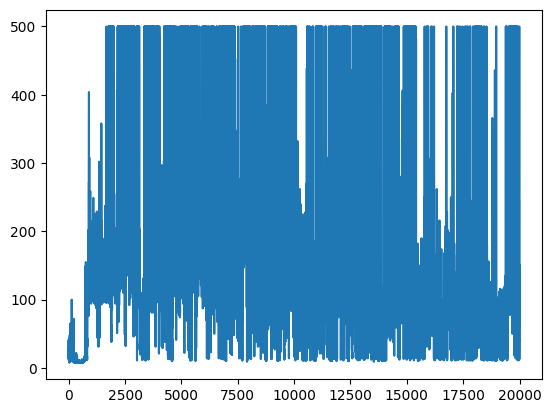

In [ ]:
total_count = 0
total_episodes = 0
X1 = None
a=[]
t0 = time.time()

episodios = 20_000

MediaDos100 = deque(maxlen=100)
MediasLista = []

indicesToIncrement = deque(maxlen=10_000)
priorityIncrement = torch.full((len(indicesToIncrement),), 10)

indice_final = 0
stop = False

brake500 = 0

for i, data in enumerate(collector):
    indices = rb.extend(data)

    for X0 in data["next","step_count"]:
        if X1 is not None:
            if X0<X1:
                total_episodes += 1
                MediaDos100.append(X1.item())
                a.append(X1.item())
                if ((total_episodes % 100) == 0): MediasLista.append(sum(MediaDos100)/100)
                if X1.item() == 500:
                    print("alcançou 500!!!!!!")
        X1 = X0
        if X0 == 499:
            brake500 += 1
            if brake500 >= 10: stop = not stop
            indice_final = indices[-1]
            indice_500 = torch.nonzero(data["next","step_count"] == 499, as_tuple=True)
            indicesIncrement = range(indice_final.item()+1 - 499 + indice_500[0].item()-499, indice_final.item()+1 - 499 + indice_500[0].item()+1)
            for i in indicesIncrement:
                indicesToIncrement.append(i)
            priorityIncrement = torch.full((len(indicesToIncrement),), 10)
            rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)

    if (total_episodes >= episodios): break
    # if stop: break

    max_length = rb[:]["next", "step_count"].max()

    if len(rb) > init_rand_steps:
        for _ in range(optim_steps):
            sample, info = rb.sample(return_info=True)

            loss_vals = loss(sample)

            rb.update_priority(index=info["index"], priority=loss_vals["loss"])
            rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)

            loss_vals["loss"] = loss_vals["loss"].mean()
            loss_vals["loss"].backward()
            optim.step()
            optim.zero_grad()
            exploration_module.step(data.numel())

            updater.step()

        torchrl_logger.info(f"Episodes: {total_episodes}, Max num steps: {max_length}, rb length {len(rb)}")
        total_count += data.numel()

t1 = time.time()
torchrl_logger.info(f"solved after {total_count} steps, {total_episodes} episodes and in {t1-t0}s.")
plt.plot(a)
plt.show()

In [ ]:
print(len(indicesToIncrement))
print(indicesToIncrement)

10000
deque([76574, 76575, 76576, 76577, 76578, 76579, 76580, 76581, 76582, 76583, 76584, 76585, 76586, 76587, 76588, 76589, 76590, 76591, 76592, 76593, 76594, 76595, 76596, 76597, 76598, 76599, 76600, 76601, 76602, 76603, 76604, 76605, 76606, 76607, 76608, 76609, 76610, 76611, 76612, 76613, 76614, 76615, 76616, 76617, 76618, 76619, 76620, 76621, 76622, 76623, 76624, 76625, 76626, 76627, 76628, 76629, 76630, 76631, 76632, 76633, 76634, 76635, 76636, 76637, 76638, 76639, 76640, 76641, 76642, 76643, 76644, 76645, 76646, 76647, 76648, 76649, 76650, 76651, 76652, 76653, 76654, 76655, 76656, 76657, 76658, 76659, 76660, 76661, 76662, 76663, 76664, 76665, 76666, 76667, 76668, 76669, 76670, 76671, 76672, 76673, 76674, 76675, 76676, 76677, 76678, 76679, 76680, 76681, 76682, 76683, 76684, 76685, 76686, 76687, 76688, 76689, 76690, 76691, 76692, 76693, 76694, 76695, 76696, 76697, 76698, 76699, 76700, 76701, 76702, 76703, 76704, 76705, 76706, 76707, 76708, 76709, 76710, 76711, 76712, 76713, 76714, 

[20.37, 22.9, 13.54, 9.86, 9.58, 9.53, 9.53, 36.38, 88.56, 142.75, 123.41, 116.83, 109.98, 114.94, 114.45, 109.53, 132.1, 149.51, 178.61, 212.61, 151.02, 170.37, 233.25, 376.93, 233.35, 158.65, 212.01, 285.34, 389.7, 234.54, 221.82, 104.38, 52.4, 141.18, 140.3, 151.88, 126.83, 256.45, 181.66, 190.02, 159.68, 98.83, 169.88, 258.12, 148.37, 207.1, 151.68, 202.96, 175.02, 162.94, 220.82, 262.73, 248.18, 161.15, 237.46, 291.4, 249.03, 165.17, 157.52, 169.87, 328.64, 143.13, 147.23, 164.8, 173.74, 156.69, 207.3, 234.11, 274.63, 409.73, 406.15, 229.46, 146.91, 251.8, 130.09, 128.95, 119.85, 202.3, 359.65, 267.11, 190.08, 166.28, 167.73, 189.75, 208.34, 287.06, 379.85, 105.82, 211.35, 192.13, 177.03, 318.82, 210.13, 148.93, 128.61, 103.95, 162.28, 121.6, 132.28, 210.78, 165.14, 124.68, 117.02, 111.27, 112.03, 142.33, 153.44, 139.38, 79.58, 78.78, 271.52, 219.74, 137.67, 152.76, 144.39, 148.28, 135.99, 153.44, 127.77, 181.44, 176.59, 182.63, 167.05, 127.5, 63.18, 75.46, 146.72, 199.21, 150.79,

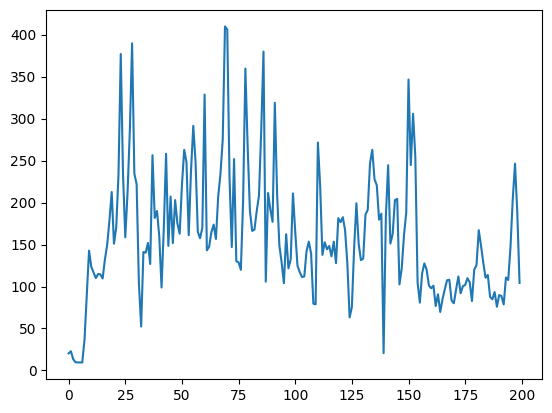

In [ ]:
print(MediasLista)
plt.plot(MediasLista)
plt.show()

In [ ]:
eval_score = []
mean_100_eval_score = []

for i in range(1001):
    eval_score.append(env.rollout(max_steps=500, policy=policy)["next","step_count"][-1].item())
    if (i%100)==0:
      if i!=0:
        mean_100_eval_score.append(np.mean(eval_score[-100]))

plt.plot(eval_score)
plt.show()

In [ ]:
eval_score_mean = np.mean(mean_100_eval_score)
eval_score_mean

73.1

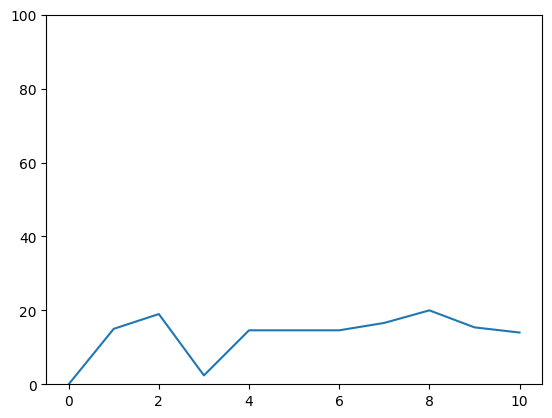

In [ ]:
# c = b/.500
# plt.plot(c)
# plt.show()
Sucessos = [0]
for i in mean_100_eval_score:
  # if (i%1000)==0:
  #   print(i)
  bb = (i/500)*100
  Sucessos.append(bb)
plt.plot(Sucessos)
plt.ylim(0,100)
plt.show()

In [ ]:
guarda_dados(a,
             nome_arquivo="Recompensa por Episódio 1",
             nome_pasta  ="Versão_V5_20mil_new")
guarda_dados(eval_score,
             nome_arquivo="Avaliação 1",
             nome_pasta  ="Versão_V5_20mil_new")
guarda_dados(Sucessos,
             nome_arquivo="Sucessos 1",
             nome_pasta  ="Versão_V5_20mil_new")
guarda_dados(MediasLista,
             nome_arquivo="Médias 1",
             nome_pasta  ="Versão_V5_20mil_new")
salvar_array(a, Sucessos, eval_score_mean, eval_score, versao="Versão_V5_20mil_new", epoch=1)

DataFrame salvo em /content/drive/My Drive/DADOS IA PYTORCH/Versão_V2_brake500_10/Result_of_Epoch_1_Versão_V5_20mil_new.xlsx


In [ ]:
plt.plot(a)
plt.show()

## Renderização

Por fim, executamos o ambiente em tantas etapas quanto possível e salvamos o vídeo localmente (observe que não estamos explorando).

In [ ]:
b = []
for i in range(200):
    b.append(env.rollout(max_steps=500, policy=policy)["next","step_count"][-1].item())
plt.plot(b)
plt.show()

In [ ]:
# Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
record_env.rollout(max_steps=10000, policy=policy)
# max_steps=1000: Define o número máximo de passos a serem executados durante o rollout. Aqui, está configurado para 1000 passos.
# policy=policy: A política que o agente deve seguir durante a execução. Neste caso, é a política treinada previamente (policy).

# Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
video_recorder.dump()

In [ ]:
logger # CSVLogger(exp_name=dqn, experiment=CSVExperiment(log_dir=./training_loop/dqn))

# V5 em PyTorch (descontinuado)

## Configuração do Agente

### Construindo o ambiente

In [ ]:
torch.manual_seed(0) # define a semente manual para a geração de números aleatórios no PyTorch, garantindo a reprodutibilidade dos resultados.
env = TransformedEnv(GymEnv("CartPole-v1"), StepCounter())
# cria um ambiente de RL para o ambiente "CartPole-v1" do OpenAI Gym, com um contador de passos adicionado como uma transformação ao ambiente.
env.set_seed(0) # define a semente para o ambiente env, garantindo a consistência do comportamento do ambiente em diferentes execuções.

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


795726461

### Projetando uma política

O próximo passo é construir nossa política. Faremos uma versão regular e determinística do ator para ser usada no módulo de perda e durante a avaliação . A seguir, iremos aumentá-lo com um módulo de exploração para inferência .

In [ ]:
# Essa linha cria uma MLP que mapeia observações do ambiente para valores de ação, com duas camadas ocultas de 64 neurônios cada.
value_mlp = MLP(out_features=env.action_spec.shape[-1], num_cells=[64, 64])
# MLP: Refere-se a um Multi-Layer Perceptron (MLP), uma rede neural feed-forward composta por múltiplas camadas densamente conectadas.
# out_features=env.action_spec.shape[-1]: Define o número de neurônios na camada de saída da MLP.
# env.action_spec.shape[-1] é a dimensão do espaço de ações do ambiente, o que significa que a MLP vai produzir um valor para cada ação possível no ambiente.
# num_cells=[64, 64]: Define a arquitetura da MLP, com duas camadas ocultas, cada uma contendo 64 neurônios.

# Essa linha cria um módulo que pega as observações do ambiente (observation) e produz valores de ação (action_value) usando a MLP definida anteriormente.
value_net = Mod(value_mlp, in_keys=["observation"], out_keys=["action_value"])
# Mod: Refere-se ao TensorDictModule, que é um módulo que opera sobre TensorDicts.
# value_mlp: A MLP criada na linha anterior.
# in_keys=["observation"]: Define as chaves de entrada para o módulo. Aqui, o módulo espera uma chave chamada observation no TensorDict de entrada.
# out_keys=["action_value"]: Define as chaves de saída para o módulo. O módulo irá produzir uma chave chamada action_value no TensorDict de saída.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
# Cria uma política que primeiro passa a observação através da value_net para obter os valores de ação
# e, em seguida, usa o QValueModule para calcular os valores Q para as ações.
policy = Seq(value_net, QValueModule(spec=env.action_spec))
# Seq: Refere-se ao TensorDictSequential, que é similar ao torch.nn.Sequential, mas opera sobre TensorDicts.
# value_net: O módulo criado na linha anterior.
# QValueModule(spec=env.action_spec): Um módulo específico para calcular valores Q, usado em algoritmos de Q-learning.
# spec=env.action_spec fornece as especificações do espaço de ações do ambiente.

# Cria um módulo de exploração que implementa uma estratégia epsilon-greedy com um valor inicial de epsilon de 0.5 e que diminui ao longo de 100.000 passos.
exploration_module = EGreedyModule(env.action_spec, annealing_num_steps=100_000, eps_init=1)
# EGreedyModule: Implementa política epsilon-greedy, que escolhe ações aleatoriamente com certa probabilidade epsilon, e a melhor ação com probabilidade 1-epsilon.
# env.action_spec: As especificações do espaço de ações do ambiente.
# annealing_num_steps=100_000: Define o número de passos durante os quais o valor de epsilon será reduzido gradualmente (annealing).
# eps_init=0.5: Define o valor inicial de epsilon. No início, 50% das ações serão escolhidas aleatoriamente.

# Essa linha combina a política com o módulo de exploração em uma sequência, resultando em uma política que primeiro calcula os valores de ação
# e, em seguida, aplica a estratégia epsilon-greedy para selecionar as ações.
policy_explore = Seq(policy, exploration_module)
# Seq: Refere-se ao TensorDictSequential.
# policy: A política definida anteriormente.
# exploration_module: O módulo de exploração epsilon-greedy definido na linha anterior.

/usr/local/lib/python3.10/dist-packages/torchrl/modules/tensordict_module/exploration.py:97: UserWarning: eps_init should be a float.
  warnings.warn("eps_init should be a float.")


### Coletor de dados e buffer de reprodução

Aí vem a parte dos dados: precisamos de um coletor de dados para obter facilmente lotes de dados e um buffer de reprodução para armazenar esses dados para treinamento.

In [ ]:
init_rand_steps = 5000
# Define o número inicial de passos aleatórios a serem realizados no ambiente antes de começar a usar a política treinada.
# Isso ajuda a inicializar o replay buffer com uma diversidade de estados e ações.
frames_per_batch = 200
# Define o número de frames (ou passos de tempo) que serão coletados em cada lote (batch) de coleta de dados do ambiente.
optim_steps = 10
# Define o número de passos de otimização que serão realizados após cada lote de coleta de dados.
# Isso controla quantas atualizações dos pesos da rede neural serão feitas com base nos dados coletados.

# SyncDataCollector: Um coletor de dados síncrono que coleta experiências do ambiente usando a política fornecida.
collector = SyncDataCollector(
    env,
    policy,
    frames_per_batch=frames_per_batch,
    total_frames=-1,
    init_random_frames=init_rand_steps,
)
# env: O ambiente de RL, criado anteriormente com TransformedEnv.
# policy: A política que será usada para coletar experiências, criada anteriormente.
# frames_per_batch=frames_per_batch: Especifica que 100 frames serão coletados em cada lote.
# total_frames=-1: Especifica que o coletor deve continuar indefinidamente (ou até que seja explicitamente parado).
# init_random_frames=init_rand_steps: Especifica que 5000 passos aleatórios serão realizados inicialmente p/ preencher o replay buffer com experiências variadas.
size = 100_000
rb = ReplayBuffer(
                storage=LazyTensorStorage(size),
                sampler=PrioritizedSampler(max_capacity=size, alpha=0.6, beta=0.4),
                batch_size=200)

### Módulo de perda e otimizador

Construímos nossa perda conforme indicado no tutorial dedicado , com seu otimizador e atualizador de parâmetros de destino:

In [ ]:
#  Implementa a função de perda para o algoritmo DQN (Deep Q-Network).
loss = DQNLoss(value_network=policy, action_space=env.action_spec, delay_value=True, reduction='none')
# value_network=policy: A rede de valor utilizada para calcular os valores Q. Aqui, policy é a política criada anteriormente, que inclui o QValueModule.
# action_space=env.action_spec: Especifica o espaço de ações do ambiente, utilizado para calcular os valores Q para todas as ações possíveis.
# delay_value=True: Indica que a rede alvo (target network) deve ser usada para calcular os valores Q futuros, o que é uma técnica comum para estabilizar o treinamento em DQN.

# Um otimizador amplamente utilizado que combina as vantagens dos métodos AdaGrad e RMSProp. É particularmente eficiente para grandes problemas de aprendizado de máquina com muitos parâmetros.
optim = Adam(loss.parameters(), lr=0.02)
# loss.parameters(): Passa os parâmetros da função de perda (que incluem os parâmetros da rede de valor) para o otimizador.
# lr=0.02: Define a taxa de aprendizado (learning rate) como 0.02. Esta taxa controla o tamanho dos passos de atualização dos pesos da rede neural durante o treinamento.

# Implementa a atualização suave dos parâmetros da rede, uma técnica comum em algoritmos de RL para atualizar gradualmente uma rede alvo (target network) com os parâmetros da rede de valor (online network).
updater = SoftUpdate(loss, eps=0.99)
# loss: A função de perda que contém os parâmetros da rede de valor e da rede alvo.
# eps=0.99: Define o fator de atualização suave (soft update factor). eps=0.99 indica que 99% dos parâmetros da rede alvo são mantidos e apenas 1% é atualizado a partir da rede de valor em cada passo.

### Registrador

Usaremos um registrador CSV para registrar nossos resultados e salvar vídeos renderizados.

In [ ]:
path = "./training_loop" # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.

# CSVLogger: Um logger que registra dados em formato CSV, útil para monitorar o progresso do treinamento e analisar resultados.
logger = CSVLogger(exp_name="dqn", log_dir=path, video_format="mp4")
# exp_name="dqn": Nome da experiência, usado como um identificador para os logs. Aqui, é definido como "dqn" (Deep Q-Network).
# log_dir=path: Diretório onde os logs serão salvos. Neste caso, é o diretório definido anteriormente, ./training_loop.
# video_format="mp4": Especifica o formato de vídeo para gravação. Aqui, está configurado para MP4.

# Um objeto que grava vídeos das execuções do ambiente durante o treinamento, útil para visualizar o comportamento do agente.
video_recorder = VideoRecorder(logger, tag="video")
# logger: O logger criado na linha anterior, que será usado para salvar os vídeos.
# tag="video": Uma tag para identificar os vídeos nos logs. Aqui, está definido como "video".

# Um wrapper que aplica transformações ao ambiente, como normalização de observações ou recompensas, e também permite a adição de funcionalidades como gravação de vídeos.
record_env = TransformedEnv(
    GymEnv("CartPole-v1", from_pixels=True, pixels_only=False), video_recorder
)
# GymEnv("CartPole-v1", from_pixels=True, pixels_only=False): Cria um ambiente GymEnv para o ambiente "CartPole-v1" do OpenAI Gym.
# from_pixels=True: Indica que o ambiente será renderizado a partir de pixels, permitindo a gravação visual do ambiente.
# pixels_only=False: Indica que tanto as observações em forma de pixels quanto outras observações (como a posição e a velocidade do carrinho) serão retornadas pelo ambiente.
# video_recorder: O gravador de vídeos criado na linha anterior, que será usado para gravar as execuções do ambiente.

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


## Ciclo de treinamento

2024-05-29 23:26:23,784 [torchrl][INFO] Episodes: 247, Max num steps: 100, rb length 5200
2024-05-29 23:26:26,133 [torchrl][INFO] Episodes: 268, Max num steps: 100, rb length 5400
2024-05-29 23:26:28,069 [torchrl][INFO] Episodes: 289, Max num steps: 100, rb length 5600
2024-05-29 23:26:29,236 [torchrl][INFO] Episodes: 310, Max num steps: 100, rb length 5800
2024-05-29 23:26:29,934 [torchrl][INFO] Episodes: 322, Max num steps: 100, rb length 6000
2024-05-29 23:26:30,576 [torchrl][INFO] Episodes: 338, Max num steps: 100, rb length 6200
2024-05-29 23:26:31,355 [torchrl][INFO] Episodes: 359, Max num steps: 100, rb length 6400
2024-05-29 23:26:32,063 [torchrl][INFO] Episodes: 360, Max num steps: 192, rb length 6600
2024-05-29 23:26:33,521 [torchrl][INFO] Episodes: 381, Max num steps: 192, rb length 6800
2024-05-29 23:26:34,682 [torchrl][INFO] Episodes: 386, Max num steps: 192, rb length 7000
2024-05-29 23:26:36,089 [torchrl][INFO] Episodes: 407, Max num steps: 192, rb length 7200
2024-05-29

alcançou 500!!!!!!


2024-05-29 23:26:47,053 [torchrl][INFO] Episodes: 532, Max num steps: 500, rb length 9400
2024-05-29 23:26:47,829 [torchrl][INFO] Episodes: 544, Max num steps: 500, rb length 9600
2024-05-29 23:26:48,563 [torchrl][INFO] Episodes: 545, Max num steps: 500, rb length 9800
2024-05-29 23:26:49,279 [torchrl][INFO] Episodes: 564, Max num steps: 500, rb length 10000
2024-05-29 23:26:49,741 [torchrl][INFO] Episodes: 564, Max num steps: 500, rb length 10200
2024-05-29 23:26:50,304 [torchrl][INFO] Episodes: 564, Max num steps: 500, rb length 10400


alcançou 500!!!!!!


2024-05-29 23:26:50,781 [torchrl][INFO] Episodes: 566, Max num steps: 500, rb length 10600
2024-05-29 23:26:51,255 [torchrl][INFO] Episodes: 567, Max num steps: 500, rb length 10800
2024-05-29 23:26:51,778 [torchrl][INFO] Episodes: 569, Max num steps: 500, rb length 11000
2024-05-29 23:26:52,315 [torchrl][INFO] Episodes: 570, Max num steps: 500, rb length 11200
2024-05-29 23:26:52,834 [torchrl][INFO] Episodes: 572, Max num steps: 500, rb length 11400
2024-05-29 23:26:53,339 [torchrl][INFO] Episodes: 574, Max num steps: 500, rb length 11600
2024-05-29 23:26:53,669 [torchrl][INFO] Episodes: 575, Max num steps: 500, rb length 11800
2024-05-29 23:26:54,005 [torchrl][INFO] Episodes: 579, Max num steps: 500, rb length 12000
2024-05-29 23:26:54,358 [torchrl][INFO] Episodes: 582, Max num steps: 500, rb length 12200
2024-05-29 23:26:54,706 [torchrl][INFO] Episodes: 584, Max num steps: 500, rb length 12400
2024-05-29 23:26:55,050 [torchrl][INFO] Episodes: 586, Max num steps: 500, rb length 12600

alcançou 500!!!!!!


2024-05-29 23:30:03,859 [torchrl][INFO] Episodes: 1487, Max num steps: 500, rb length 100000
2024-05-29 23:30:04,403 [torchrl][INFO] Episodes: 1487, Max num steps: 500, rb length 100000
2024-05-29 23:30:04,865 [torchrl][INFO] Episodes: 1488, Max num steps: 500, rb length 100000
2024-05-29 23:30:05,205 [torchrl][INFO] Episodes: 1488, Max num steps: 500, rb length 100000
2024-05-29 23:30:05,541 [torchrl][INFO] Episodes: 1490, Max num steps: 500, rb length 100000
2024-05-29 23:30:05,905 [torchrl][INFO] Episodes: 1490, Max num steps: 500, rb length 100000
2024-05-29 23:30:06,246 [torchrl][INFO] Episodes: 1490, Max num steps: 500, rb length 100000
2024-05-29 23:30:06,591 [torchrl][INFO] Episodes: 1491, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:30:06,957 [torchrl][INFO] Episodes: 1491, Max num steps: 500, rb length 100000
2024-05-29 23:30:07,296 [torchrl][INFO] Episodes: 1492, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:30:07,653 [torchrl][INFO] Episodes: 1492, Max num steps: 500, rb length 100000
2024-05-29 23:30:08,017 [torchrl][INFO] Episodes: 1492, Max num steps: 500, rb length 100000
2024-05-29 23:30:08,373 [torchrl][INFO] Episodes: 1493, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:30:08,733 [torchrl][INFO] Episodes: 1493, Max num steps: 500, rb length 100000
2024-05-29 23:30:09,089 [torchrl][INFO] Episodes: 1494, Max num steps: 500, rb length 100000
2024-05-29 23:30:09,428 [torchrl][INFO] Episodes: 1494, Max num steps: 500, rb length 100000
2024-05-29 23:30:09,988 [torchrl][INFO] Episodes: 1494, Max num steps: 500, rb length 100000
2024-05-29 23:30:10,340 [torchrl][INFO] Episodes: 1495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:30:10,699 [torchrl][INFO] Episodes: 1495, Max num steps: 500, rb length 100000
2024-05-29 23:30:11,074 [torchrl][INFO] Episodes: 1496, Max num steps: 500, rb length 100000
2024-05-29 23:30:11,426 [torchrl][INFO] Episodes: 1497, Max num steps: 500, rb length 100000
2024-05-29 23:30:11,785 [torchrl][INFO] Episodes: 1499, Max num steps: 500, rb length 100000
2024-05-29 23:30:12,134 [torchrl][INFO] Episodes: 1499, Max num steps: 500, rb length 100000
2024-05-29 23:30:12,464 [torchrl][INFO] Episodes: 1499, Max num steps: 500, rb length 100000
2024-05-29 23:30:12,820 [torchrl][INFO] Episodes: 1500, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:30:13,196 [torchrl][INFO] Episodes: 1501, Max num steps: 500, rb length 100000
2024-05-29 23:30:13,575 [torchrl][INFO] Episodes: 1503, Max num steps: 500, rb length 100000
2024-05-29 23:30:13,945 [torchrl][INFO] Episodes: 1503, Max num steps: 500, rb length 100000
2024-05-29 23:30:14,306 [torchrl][INFO] Episodes: 1506, Max num steps: 500, rb length 100000
2024-05-29 23:30:14,649 [torchrl][INFO] Episodes: 1507, Max num steps: 500, rb length 100000
2024-05-29 23:30:15,195 [torchrl][INFO] Episodes: 1509, Max num steps: 500, rb length 100000
2024-05-29 23:30:15,677 [torchrl][INFO] Episodes: 1510, Max num steps: 500, rb length 100000
2024-05-29 23:30:16,207 [torchrl][INFO] Episodes: 1512, Max num steps: 500, rb length 100000
2024-05-29 23:30:16,713 [torchrl][INFO] Episodes: 1513, Max num steps: 500, rb length 100000
2024-05-29 23:30:17,210 [torchrl][INFO] Episodes: 1514, Max num steps: 500, rb length 100000
2024-05-29 23:30:17,724 [torchrl][INFO] Episodes: 1516, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:30:20,077 [torchrl][INFO] Episodes: 1521, Max num steps: 500, rb length 100000
2024-05-29 23:30:20,444 [torchrl][INFO] Episodes: 1524, Max num steps: 500, rb length 100000
2024-05-29 23:30:20,798 [torchrl][INFO] Episodes: 1526, Max num steps: 500, rb length 100000
2024-05-29 23:30:21,155 [torchrl][INFO] Episodes: 1527, Max num steps: 500, rb length 100000
2024-05-29 23:30:21,850 [torchrl][INFO] Episodes: 1527, Max num steps: 500, rb length 100000
2024-05-29 23:30:22,515 [torchrl][INFO] Episodes: 1528, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:30:22,873 [torchrl][INFO] Episodes: 1529, Max num steps: 500, rb length 100000
2024-05-29 23:30:23,223 [torchrl][INFO] Episodes: 1532, Max num steps: 500, rb length 100000
2024-05-29 23:30:23,580 [torchrl][INFO] Episodes: 1534, Max num steps: 500, rb length 100000
2024-05-29 23:30:23,926 [torchrl][INFO] Episodes: 1534, Max num steps: 500, rb length 100000
2024-05-29 23:30:24,281 [torchrl][INFO] Episodes: 1534, Max num steps: 500, rb length 100000
2024-05-29 23:30:24,642 [torchrl][INFO] Episodes: 1536, Max num steps: 500, rb length 100000
2024-05-29 23:30:24,993 [torchrl][INFO] Episodes: 1537, Max num steps: 500, rb length 100000
2024-05-29 23:30:25,339 [torchrl][INFO] Episodes: 1540, Max num steps: 500, rb length 100000
2024-05-29 23:30:25,711 [torchrl][INFO] Episodes: 1544, Max num steps: 500, rb length 100000
2024-05-29 23:30:26,065 [torchrl][INFO] Episodes: 1545, Max num steps: 500, rb length 100000
2024-05-29 23:30:26,408 [torchrl][INFO] Episodes: 1548, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:30:47,574 [torchrl][INFO] Episodes: 1648, Max num steps: 500, rb length 100000
2024-05-29 23:30:48,232 [torchrl][INFO] Episodes: 1650, Max num steps: 500, rb length 100000
2024-05-29 23:30:48,694 [torchrl][INFO] Episodes: 1652, Max num steps: 500, rb length 100000
2024-05-29 23:30:49,047 [torchrl][INFO] Episodes: 1653, Max num steps: 500, rb length 100000
2024-05-29 23:30:49,405 [torchrl][INFO] Episodes: 1655, Max num steps: 500, rb length 100000
2024-05-29 23:30:49,773 [torchrl][INFO] Episodes: 1656, Max num steps: 500, rb length 100000
2024-05-29 23:30:50,130 [torchrl][INFO] Episodes: 1660, Max num steps: 500, rb length 100000
2024-05-29 23:30:50,498 [torchrl][INFO] Episodes: 1663, Max num steps: 500, rb length 100000
2024-05-29 23:30:50,847 [torchrl][INFO] Episodes: 1665, Max num steps: 500, rb length 100000
2024-05-29 23:30:51,195 [torchrl][INFO] Episodes: 1667, Max num steps: 500, rb length 100000
2024-05-29 23:30:51,565 [torchrl][INFO] Episodes: 1670, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:31:12,600 [torchrl][INFO] Episodes: 1761, Max num steps: 500, rb length 100000
2024-05-29 23:31:12,955 [torchrl][INFO] Episodes: 1762, Max num steps: 500, rb length 100000
2024-05-29 23:31:13,328 [torchrl][INFO] Episodes: 1762, Max num steps: 500, rb length 100000
2024-05-29 23:31:13,881 [torchrl][INFO] Episodes: 1764, Max num steps: 500, rb length 100000
2024-05-29 23:31:14,426 [torchrl][INFO] Episodes: 1764, Max num steps: 500, rb length 100000
2024-05-29 23:31:14,959 [torchrl][INFO] Episodes: 1765, Max num steps: 500, rb length 100000
2024-05-29 23:31:15,486 [torchrl][INFO] Episodes: 1768, Max num steps: 500, rb length 100000
2024-05-29 23:31:15,978 [torchrl][INFO] Episodes: 1769, Max num steps: 500, rb length 100000
2024-05-29 23:31:16,504 [torchrl][INFO] Episodes: 1771, Max num steps: 500, rb length 100000
2024-05-29 23:31:17,089 [torchrl][INFO] Episodes: 1773, Max num steps: 500, rb length 100000
2024-05-29 23:31:17,665 [torchrl][INFO] Episodes: 1775, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:31:22,781 [torchrl][INFO] Episodes: 1791, Max num steps: 500, rb length 100000
2024-05-29 23:31:23,136 [torchrl][INFO] Episodes: 1793, Max num steps: 500, rb length 100000
2024-05-29 23:31:23,491 [torchrl][INFO] Episodes: 1793, Max num steps: 500, rb length 100000
2024-05-29 23:31:23,855 [torchrl][INFO] Episodes: 1794, Max num steps: 500, rb length 100000
2024-05-29 23:31:24,226 [torchrl][INFO] Episodes: 1797, Max num steps: 500, rb length 100000
2024-05-29 23:31:24,592 [torchrl][INFO] Episodes: 1798, Max num steps: 500, rb length 100000
2024-05-29 23:31:24,979 [torchrl][INFO] Episodes: 1800, Max num steps: 500, rb length 100000
2024-05-29 23:31:25,342 [torchrl][INFO] Episodes: 1803, Max num steps: 500, rb length 100000
2024-05-29 23:31:25,708 [torchrl][INFO] Episodes: 1803, Max num steps: 500, rb length 100000
2024-05-29 23:31:26,078 [torchrl][INFO] Episodes: 1805, Max num steps: 500, rb length 100000
2024-05-29 23:31:26,425 [torchrl][INFO] Episodes: 1805, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:31:45,513 [torchrl][INFO] Episodes: 1864, Max num steps: 500, rb length 100000
2024-05-29 23:31:45,869 [torchrl][INFO] Episodes: 1870, Max num steps: 500, rb length 100000
2024-05-29 23:31:46,313 [torchrl][INFO] Episodes: 1877, Max num steps: 500, rb length 100000
2024-05-29 23:31:46,844 [torchrl][INFO] Episodes: 1882, Max num steps: 500, rb length 100000
2024-05-29 23:31:47,332 [torchrl][INFO] Episodes: 1883, Max num steps: 500, rb length 100000
2024-05-29 23:31:47,882 [torchrl][INFO] Episodes: 1885, Max num steps: 500, rb length 100000
2024-05-29 23:31:48,369 [torchrl][INFO] Episodes: 1887, Max num steps: 500, rb length 100000
2024-05-29 23:31:48,876 [torchrl][INFO] Episodes: 1892, Max num steps: 500, rb length 100000
2024-05-29 23:31:49,413 [torchrl][INFO] Episodes: 1894, Max num steps: 500, rb length 100000
2024-05-29 23:31:49,949 [torchrl][INFO] Episodes: 1895, Max num steps: 500, rb length 100000
2024-05-29 23:31:50,486 [torchrl][INFO] Episodes: 1895, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:32:48,627 [torchrl][INFO] Episodes: 2157, Max num steps: 500, rb length 100000
2024-05-29 23:32:49,175 [torchrl][INFO] Episodes: 2157, Max num steps: 500, rb length 100000
2024-05-29 23:32:49,534 [torchrl][INFO] Episodes: 2159, Max num steps: 500, rb length 100000
2024-05-29 23:32:49,890 [torchrl][INFO] Episodes: 2160, Max num steps: 500, rb length 100000
2024-05-29 23:32:50,246 [torchrl][INFO] Episodes: 2162, Max num steps: 500, rb length 100000
2024-05-29 23:32:50,597 [torchrl][INFO] Episodes: 2164, Max num steps: 500, rb length 100000
2024-05-29 23:32:50,940 [torchrl][INFO] Episodes: 2165, Max num steps: 500, rb length 100000
2024-05-29 23:32:51,303 [torchrl][INFO] Episodes: 2165, Max num steps: 500, rb length 100000
2024-05-29 23:32:51,653 [torchrl][INFO] Episodes: 2166, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:32:52,009 [torchrl][INFO] Episodes: 2167, Max num steps: 500, rb length 100000
2024-05-29 23:32:52,358 [torchrl][INFO] Episodes: 2168, Max num steps: 500, rb length 100000
2024-05-29 23:32:52,710 [torchrl][INFO] Episodes: 2170, Max num steps: 500, rb length 100000
2024-05-29 23:32:53,089 [torchrl][INFO] Episodes: 2172, Max num steps: 500, rb length 100000
2024-05-29 23:32:53,451 [torchrl][INFO] Episodes: 2174, Max num steps: 500, rb length 100000
2024-05-29 23:32:53,800 [torchrl][INFO] Episodes: 2175, Max num steps: 500, rb length 100000
2024-05-29 23:32:54,146 [torchrl][INFO] Episodes: 2176, Max num steps: 500, rb length 100000
2024-05-29 23:32:54,509 [torchrl][INFO] Episodes: 2177, Max num steps: 500, rb length 100000
2024-05-29 23:32:54,860 [torchrl][INFO] Episodes: 2177, Max num steps: 500, rb length 100000
2024-05-29 23:32:55,201 [torchrl][INFO] Episodes: 2177, Max num steps: 500, rb length 100000
2024-05-29 23:32:55,569 [torchrl][INFO] Episodes: 2178, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:32:55,927 [torchrl][INFO] Episodes: 2179, Max num steps: 500, rb length 100000
2024-05-29 23:32:56,275 [torchrl][INFO] Episodes: 2181, Max num steps: 500, rb length 100000
2024-05-29 23:32:56,641 [torchrl][INFO] Episodes: 2183, Max num steps: 500, rb length 100000
2024-05-29 23:32:56,998 [torchrl][INFO] Episodes: 2185, Max num steps: 500, rb length 100000
2024-05-29 23:32:57,357 [torchrl][INFO] Episodes: 2187, Max num steps: 500, rb length 100000
2024-05-29 23:32:57,714 [torchrl][INFO] Episodes: 2188, Max num steps: 500, rb length 100000
2024-05-29 23:32:58,072 [torchrl][INFO] Episodes: 2190, Max num steps: 500, rb length 100000
2024-05-29 23:32:58,426 [torchrl][INFO] Episodes: 2192, Max num steps: 500, rb length 100000
2024-05-29 23:32:58,808 [torchrl][INFO] Episodes: 2194, Max num steps: 500, rb length 100000
2024-05-29 23:32:59,192 [torchrl][INFO] Episodes: 2196, Max num steps: 500, rb length 100000
2024-05-29 23:32:59,724 [torchrl][INFO] Episodes: 2199, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:33:31,701 [torchrl][INFO] Episodes: 2362, Max num steps: 500, rb length 100000
2024-05-29 23:33:32,252 [torchrl][INFO] Episodes: 2364, Max num steps: 500, rb length 100000
2024-05-29 23:33:32,792 [torchrl][INFO] Episodes: 2365, Max num steps: 500, rb length 100000
2024-05-29 23:33:33,353 [torchrl][INFO] Episodes: 2367, Max num steps: 500, rb length 100000
2024-05-29 23:33:33,822 [torchrl][INFO] Episodes: 2370, Max num steps: 500, rb length 100000
2024-05-29 23:33:34,393 [torchrl][INFO] Episodes: 2372, Max num steps: 500, rb length 100000
2024-05-29 23:33:34,850 [torchrl][INFO] Episodes: 2376, Max num steps: 500, rb length 100000
2024-05-29 23:33:35,211 [torchrl][INFO] Episodes: 2380, Max num steps: 500, rb length 100000
2024-05-29 23:33:35,557 [torchrl][INFO] Episodes: 2381, Max num steps: 500, rb length 100000
2024-05-29 23:33:35,907 [torchrl][INFO] Episodes: 2382, Max num steps: 500, rb length 100000
2024-05-29 23:33:36,265 [torchrl][INFO] Episodes: 2383, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:33:48,442 [torchrl][INFO] Episodes: 2432, Max num steps: 500, rb length 100000
2024-05-29 23:33:48,806 [torchrl][INFO] Episodes: 2435, Max num steps: 500, rb length 100000
2024-05-29 23:33:49,159 [torchrl][INFO] Episodes: 2435, Max num steps: 500, rb length 100000
2024-05-29 23:33:49,505 [torchrl][INFO] Episodes: 2437, Max num steps: 500, rb length 100000
2024-05-29 23:33:49,868 [torchrl][INFO] Episodes: 2439, Max num steps: 500, rb length 100000
2024-05-29 23:33:50,213 [torchrl][INFO] Episodes: 2440, Max num steps: 500, rb length 100000
2024-05-29 23:33:50,569 [torchrl][INFO] Episodes: 2442, Max num steps: 500, rb length 100000
2024-05-29 23:33:50,930 [torchrl][INFO] Episodes: 2444, Max num steps: 500, rb length 100000
2024-05-29 23:33:51,280 [torchrl][INFO] Episodes: 2446, Max num steps: 500, rb length 100000
2024-05-29 23:33:51,655 [torchrl][INFO] Episodes: 2447, Max num steps: 500, rb length 100000
2024-05-29 23:33:52,006 [torchrl][INFO] Episodes: 2449, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:34:10,197 [torchrl][INFO] Episodes: 2556, Max num steps: 500, rb length 100000
2024-05-29 23:34:10,559 [torchrl][INFO] Episodes: 2556, Max num steps: 500, rb length 100000
2024-05-29 23:34:10,916 [torchrl][INFO] Episodes: 2557, Max num steps: 500, rb length 100000
2024-05-29 23:34:11,263 [torchrl][INFO] Episodes: 2558, Max num steps: 500, rb length 100000
2024-05-29 23:34:11,620 [torchrl][INFO] Episodes: 2558, Max num steps: 500, rb length 100000
2024-05-29 23:34:11,980 [torchrl][INFO] Episodes: 2559, Max num steps: 500, rb length 100000
2024-05-29 23:34:12,319 [torchrl][INFO] Episodes: 2560, Max num steps: 500, rb length 100000
2024-05-29 23:34:12,694 [torchrl][INFO] Episodes: 2560, Max num steps: 500, rb length 100000
2024-05-29 23:34:13,052 [torchrl][INFO] Episodes: 2561, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:34:13,424 [torchrl][INFO] Episodes: 2561, Max num steps: 500, rb length 100000
2024-05-29 23:34:13,787 [torchrl][INFO] Episodes: 2562, Max num steps: 500, rb length 100000
2024-05-29 23:34:14,258 [torchrl][INFO] Episodes: 2562, Max num steps: 500, rb length 100000
2024-05-29 23:34:14,769 [torchrl][INFO] Episodes: 2563, Max num steps: 500, rb length 100000
2024-05-29 23:34:15,261 [torchrl][INFO] Episodes: 2564, Max num steps: 500, rb length 100000
2024-05-29 23:34:15,794 [torchrl][INFO] Episodes: 2567, Max num steps: 500, rb length 100000
2024-05-29 23:34:16,275 [torchrl][INFO] Episodes: 2569, Max num steps: 500, rb length 100000
2024-05-29 23:34:16,788 [torchrl][INFO] Episodes: 2570, Max num steps: 500, rb length 100000
2024-05-29 23:34:17,324 [torchrl][INFO] Episodes: 2572, Max num steps: 500, rb length 100000
2024-05-29 23:34:17,866 [torchrl][INFO] Episodes: 2572, Max num steps: 500, rb length 100000
2024-05-29 23:34:18,411 [torchrl][INFO] Episodes: 2573, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:34:27,325 [torchrl][INFO] Episodes: 2599, Max num steps: 500, rb length 100000
2024-05-29 23:34:27,679 [torchrl][INFO] Episodes: 2602, Max num steps: 500, rb length 100000
2024-05-29 23:34:28,036 [torchrl][INFO] Episodes: 2603, Max num steps: 500, rb length 100000
2024-05-29 23:34:28,392 [torchrl][INFO] Episodes: 2606, Max num steps: 500, rb length 100000
2024-05-29 23:34:28,928 [torchrl][INFO] Episodes: 2608, Max num steps: 500, rb length 100000
2024-05-29 23:34:29,441 [torchrl][INFO] Episodes: 2608, Max num steps: 500, rb length 100000
2024-05-29 23:34:29,968 [torchrl][INFO] Episodes: 2610, Max num steps: 500, rb length 100000
2024-05-29 23:34:30,707 [torchrl][INFO] Episodes: 2611, Max num steps: 500, rb length 100000
2024-05-29 23:34:31,217 [torchrl][INFO] Episodes: 2613, Max num steps: 500, rb length 100000
2024-05-29 23:34:31,765 [torchrl][INFO] Episodes: 2613, Max num steps: 500, rb length 100000
2024-05-29 23:34:32,291 [torchrl][INFO] Episodes: 2615, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:34:34,412 [torchrl][INFO] Episodes: 2620, Max num steps: 500, rb length 100000
2024-05-29 23:34:34,777 [torchrl][INFO] Episodes: 2620, Max num steps: 500, rb length 100000
2024-05-29 23:34:35,129 [torchrl][INFO] Episodes: 2622, Max num steps: 500, rb length 100000
2024-05-29 23:34:35,487 [torchrl][INFO] Episodes: 2623, Max num steps: 500, rb length 100000
2024-05-29 23:34:35,835 [torchrl][INFO] Episodes: 2624, Max num steps: 500, rb length 100000
2024-05-29 23:34:36,178 [torchrl][INFO] Episodes: 2625, Max num steps: 500, rb length 100000
2024-05-29 23:34:36,538 [torchrl][INFO] Episodes: 2629, Max num steps: 500, rb length 100000
2024-05-29 23:34:36,898 [torchrl][INFO] Episodes: 2629, Max num steps: 500, rb length 100000
2024-05-29 23:34:37,244 [torchrl][INFO] Episodes: 2629, Max num steps: 500, rb length 100000
2024-05-29 23:34:37,615 [torchrl][INFO] Episodes: 2630, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:34:37,977 [torchrl][INFO] Episodes: 2632, Max num steps: 500, rb length 100000
2024-05-29 23:34:38,319 [torchrl][INFO] Episodes: 2633, Max num steps: 500, rb length 100000
2024-05-29 23:34:38,699 [torchrl][INFO] Episodes: 2634, Max num steps: 500, rb length 100000
2024-05-29 23:34:39,056 [torchrl][INFO] Episodes: 2635, Max num steps: 500, rb length 100000
2024-05-29 23:34:39,421 [torchrl][INFO] Episodes: 2636, Max num steps: 500, rb length 100000
2024-05-29 23:34:39,785 [torchrl][INFO] Episodes: 2637, Max num steps: 500, rb length 100000
2024-05-29 23:34:40,135 [torchrl][INFO] Episodes: 2638, Max num steps: 500, rb length 100000
2024-05-29 23:34:40,480 [torchrl][INFO] Episodes: 2638, Max num steps: 500, rb length 100000
2024-05-29 23:34:40,850 [torchrl][INFO] Episodes: 2639, Max num steps: 500, rb length 100000
2024-05-29 23:34:41,197 [torchrl][INFO] Episodes: 2642, Max num steps: 500, rb length 100000
2024-05-29 23:34:41,541 [torchrl][INFO] Episodes: 2644, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:34:49,054 [torchrl][INFO] Episodes: 2663, Max num steps: 500, rb length 100000
2024-05-29 23:34:49,394 [torchrl][INFO] Episodes: 2663, Max num steps: 500, rb length 100000
2024-05-29 23:34:49,761 [torchrl][INFO] Episodes: 2663, Max num steps: 500, rb length 100000
2024-05-29 23:34:50,133 [torchrl][INFO] Episodes: 2664, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:34:50,482 [torchrl][INFO] Episodes: 2665, Max num steps: 500, rb length 100000
2024-05-29 23:34:50,834 [torchrl][INFO] Episodes: 2666, Max num steps: 500, rb length 100000
2024-05-29 23:34:51,196 [torchrl][INFO] Episodes: 2667, Max num steps: 500, rb length 100000
2024-05-29 23:34:51,548 [torchrl][INFO] Episodes: 2669, Max num steps: 500, rb length 100000
2024-05-29 23:34:51,908 [torchrl][INFO] Episodes: 2670, Max num steps: 500, rb length 100000
2024-05-29 23:34:52,267 [torchrl][INFO] Episodes: 2670, Max num steps: 500, rb length 100000
2024-05-29 23:34:52,613 [torchrl][INFO] Episodes: 2672, Max num steps: 500, rb length 100000
2024-05-29 23:34:52,960 [torchrl][INFO] Episodes: 2672, Max num steps: 500, rb length 100000
2024-05-29 23:34:53,319 [torchrl][INFO] Episodes: 2673, Max num steps: 500, rb length 100000
2024-05-29 23:34:53,684 [torchrl][INFO] Episodes: 2675, Max num steps: 500, rb length 100000
2024-05-29 23:34:54,067 [torchrl][INFO] Episodes: 2675, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:34:55,130 [torchrl][INFO] Episodes: 2677, Max num steps: 500, rb length 100000
2024-05-29 23:34:55,488 [torchrl][INFO] Episodes: 2679, Max num steps: 500, rb length 100000
2024-05-29 23:34:55,832 [torchrl][INFO] Episodes: 2679, Max num steps: 500, rb length 100000
2024-05-29 23:34:56,174 [torchrl][INFO] Episodes: 2680, Max num steps: 500, rb length 100000
2024-05-29 23:34:56,530 [torchrl][INFO] Episodes: 2680, Max num steps: 500, rb length 100000
2024-05-29 23:34:56,894 [torchrl][INFO] Episodes: 2681, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:34:57,253 [torchrl][INFO] Episodes: 2681, Max num steps: 500, rb length 100000
2024-05-29 23:34:57,618 [torchrl][INFO] Episodes: 2682, Max num steps: 500, rb length 100000
2024-05-29 23:34:58,147 [torchrl][INFO] Episodes: 2682, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:34:58,669 [torchrl][INFO] Episodes: 2683, Max num steps: 500, rb length 100000
2024-05-29 23:34:59,199 [torchrl][INFO] Episodes: 2683, Max num steps: 500, rb length 100000
2024-05-29 23:34:59,699 [torchrl][INFO] Episodes: 2683, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:35:00,205 [torchrl][INFO] Episodes: 2684, Max num steps: 500, rb length 100000
2024-05-29 23:35:00,752 [torchrl][INFO] Episodes: 2685, Max num steps: 500, rb length 100000
2024-05-29 23:35:01,291 [torchrl][INFO] Episodes: 2686, Max num steps: 500, rb length 100000
2024-05-29 23:35:01,830 [torchrl][INFO] Episodes: 2687, Max num steps: 500, rb length 100000
2024-05-29 23:35:02,372 [torchrl][INFO] Episodes: 2687, Max num steps: 500, rb length 100000
2024-05-29 23:35:02,756 [torchrl][INFO] Episodes: 2688, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:35:03,118 [torchrl][INFO] Episodes: 2688, Max num steps: 500, rb length 100000
2024-05-29 23:35:03,472 [torchrl][INFO] Episodes: 2689, Max num steps: 500, rb length 100000
2024-05-29 23:35:03,837 [torchrl][INFO] Episodes: 2689, Max num steps: 500, rb length 100000
2024-05-29 23:35:04,198 [torchrl][INFO] Episodes: 2690, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:35:04,560 [torchrl][INFO] Episodes: 2690, Max num steps: 500, rb length 100000
2024-05-29 23:35:04,936 [torchrl][INFO] Episodes: 2690, Max num steps: 500, rb length 100000
2024-05-29 23:35:05,292 [torchrl][INFO] Episodes: 2691, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:35:05,669 [torchrl][INFO] Episodes: 2692, Max num steps: 500, rb length 100000
2024-05-29 23:35:06,032 [torchrl][INFO] Episodes: 2693, Max num steps: 500, rb length 100000
2024-05-29 23:35:06,381 [torchrl][INFO] Episodes: 2693, Max num steps: 500, rb length 100000
2024-05-29 23:35:06,745 [torchrl][INFO] Episodes: 2694, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:35:07,114 [torchrl][INFO] Episodes: 2695, Max num steps: 500, rb length 100000
2024-05-29 23:35:07,464 [torchrl][INFO] Episodes: 2698, Max num steps: 500, rb length 100000
2024-05-29 23:35:07,838 [torchrl][INFO] Episodes: 2700, Max num steps: 500, rb length 100000
2024-05-29 23:35:08,203 [torchrl][INFO] Episodes: 2700, Max num steps: 500, rb length 100000
2024-05-29 23:35:08,568 [torchrl][INFO] Episodes: 2700, Max num steps: 500, rb length 100000
2024-05-29 23:35:08,948 [torchrl][INFO] Episodes: 2701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:35:09,302 [torchrl][INFO] Episodes: 2702, Max num steps: 500, rb length 100000
2024-05-29 23:35:09,656 [torchrl][INFO] Episodes: 2703, Max num steps: 500, rb length 100000
2024-05-29 23:35:10,023 [torchrl][INFO] Episodes: 2703, Max num steps: 500, rb length 100000
2024-05-29 23:35:10,379 [torchrl][INFO] Episodes: 2703, Max num steps: 500, rb length 100000
2024-05-29 23:35:10,729 [torchrl][INFO] Episodes: 2704, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:35:11,105 [torchrl][INFO] Episodes: 2704, Max num steps: 500, rb length 100000
2024-05-29 23:35:11,455 [torchrl][INFO] Episodes: 2705, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:35:11,821 [torchrl][INFO] Episodes: 2705, Max num steps: 500, rb length 100000
2024-05-29 23:35:12,188 [torchrl][INFO] Episodes: 2707, Max num steps: 500, rb length 100000
2024-05-29 23:35:12,630 [torchrl][INFO] Episodes: 2708, Max num steps: 500, rb length 100000
2024-05-29 23:35:13,172 [torchrl][INFO] Episodes: 2710, Max num steps: 500, rb length 100000
2024-05-29 23:35:13,673 [torchrl][INFO] Episodes: 2711, Max num steps: 500, rb length 100000
2024-05-29 23:35:14,236 [torchrl][INFO] Episodes: 2712, Max num steps: 500, rb length 100000
2024-05-29 23:35:14,735 [torchrl][INFO] Episodes: 2713, Max num steps: 500, rb length 100000
2024-05-29 23:35:15,248 [torchrl][INFO] Episodes: 2714, Max num steps: 500, rb length 100000
2024-05-29 23:35:15,794 [torchrl][INFO] Episodes: 2715, Max num steps: 500, rb length 100000
2024-05-29 23:35:16,341 [torchrl][INFO] Episodes: 2716, Max num steps: 500, rb length 100000
2024-05-29 23:35:16,895 [torchrl][INFO] Episodes: 2718, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:35:18,528 [torchrl][INFO] Episodes: 2720, Max num steps: 500, rb length 100000
2024-05-29 23:35:18,888 [torchrl][INFO] Episodes: 2720, Max num steps: 500, rb length 100000
2024-05-29 23:35:19,263 [torchrl][INFO] Episodes: 2721, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:35:19,629 [torchrl][INFO] Episodes: 2722, Max num steps: 500, rb length 100000
2024-05-29 23:35:19,989 [torchrl][INFO] Episodes: 2722, Max num steps: 500, rb length 100000
2024-05-29 23:35:20,365 [torchrl][INFO] Episodes: 2723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:35:20,739 [torchrl][INFO] Episodes: 2723, Max num steps: 500, rb length 100000
2024-05-29 23:35:21,094 [torchrl][INFO] Episodes: 2723, Max num steps: 500, rb length 100000
2024-05-29 23:35:21,460 [torchrl][INFO] Episodes: 2724, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:35:21,826 [torchrl][INFO] Episodes: 2725, Max num steps: 500, rb length 100000
2024-05-29 23:35:22,193 [torchrl][INFO] Episodes: 2725, Max num steps: 500, rb length 100000
2024-05-29 23:35:22,547 [torchrl][INFO] Episodes: 2726, Max num steps: 500, rb length 100000
2024-05-29 23:35:22,899 [torchrl][INFO] Episodes: 2727, Max num steps: 500, rb length 100000
2024-05-29 23:35:23,263 [torchrl][INFO] Episodes: 2727, Max num steps: 500, rb length 100000
2024-05-29 23:35:23,611 [torchrl][INFO] Episodes: 2730, Max num steps: 500, rb length 100000
2024-05-29 23:35:23,963 [torchrl][INFO] Episodes: 2730, Max num steps: 500, rb length 100000
2024-05-29 23:35:24,348 [torchrl][INFO] Episodes: 2731, Max num steps: 500, rb length 100000
2024-05-29 23:35:24,701 [torchrl][INFO] Episodes: 2732, Max num steps: 500, rb length 100000
2024-05-29 23:35:25,059 [torchrl][INFO] Episodes: 2733, Max num steps: 500, rb length 100000
2024-05-29 23:35:25,432 [torchrl][INFO] Episodes: 2734, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:35:30,094 [torchrl][INFO] Episodes: 2748, Max num steps: 500, rb length 100000
2024-05-29 23:35:30,651 [torchrl][INFO] Episodes: 2749, Max num steps: 500, rb length 100000
2024-05-29 23:35:31,249 [torchrl][INFO] Episodes: 2750, Max num steps: 500, rb length 100000
2024-05-29 23:35:31,627 [torchrl][INFO] Episodes: 2751, Max num steps: 500, rb length 100000
2024-05-29 23:35:31,979 [torchrl][INFO] Episodes: 2751, Max num steps: 500, rb length 100000
2024-05-29 23:35:32,326 [torchrl][INFO] Episodes: 2751, Max num steps: 500, rb length 100000
2024-05-29 23:35:32,695 [torchrl][INFO] Episodes: 2752, Max num steps: 500, rb length 100000
2024-05-29 23:35:33,053 [torchrl][INFO] Episodes: 2753, Max num steps: 500, rb length 100000
2024-05-29 23:35:33,418 [torchrl][INFO] Episodes: 2754, Max num steps: 500, rb length 100000
2024-05-29 23:35:33,784 [torchrl][INFO] Episodes: 2755, Max num steps: 500, rb length 100000
2024-05-29 23:35:34,144 [torchrl][INFO] Episodes: 2759, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:35:45,758 [torchrl][INFO] Episodes: 2792, Max num steps: 500, rb length 100000
2024-05-29 23:35:46,119 [torchrl][INFO] Episodes: 2792, Max num steps: 500, rb length 100000
2024-05-29 23:35:46,490 [torchrl][INFO] Episodes: 2793, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:35:46,861 [torchrl][INFO] Episodes: 2796, Max num steps: 500, rb length 100000
2024-05-29 23:35:47,231 [torchrl][INFO] Episodes: 2799, Max num steps: 500, rb length 100000
2024-05-29 23:35:47,585 [torchrl][INFO] Episodes: 2800, Max num steps: 500, rb length 100000
2024-05-29 23:35:47,936 [torchrl][INFO] Episodes: 2801, Max num steps: 500, rb length 100000
2024-05-29 23:35:48,304 [torchrl][INFO] Episodes: 2802, Max num steps: 500, rb length 100000
2024-05-29 23:35:48,668 [torchrl][INFO] Episodes: 2803, Max num steps: 500, rb length 100000
2024-05-29 23:35:49,023 [torchrl][INFO] Episodes: 2803, Max num steps: 500, rb length 100000
2024-05-29 23:35:49,393 [torchrl][INFO] Episodes: 2803, Max num steps: 500, rb length 100000
2024-05-29 23:35:49,764 [torchrl][INFO] Episodes: 2804, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:35:50,124 [torchrl][INFO] Episodes: 2805, Max num steps: 500, rb length 100000
2024-05-29 23:35:50,497 [torchrl][INFO] Episodes: 2807, Max num steps: 500, rb length 100000
2024-05-29 23:35:50,852 [torchrl][INFO] Episodes: 2808, Max num steps: 500, rb length 100000
2024-05-29 23:35:51,220 [torchrl][INFO] Episodes: 2811, Max num steps: 500, rb length 100000
2024-05-29 23:35:51,592 [torchrl][INFO] Episodes: 2811, Max num steps: 500, rb length 100000
2024-05-29 23:35:51,950 [torchrl][INFO] Episodes: 2812, Max num steps: 500, rb length 100000
2024-05-29 23:35:52,307 [torchrl][INFO] Episodes: 2814, Max num steps: 500, rb length 100000
2024-05-29 23:35:52,662 [torchrl][INFO] Episodes: 2814, Max num steps: 500, rb length 100000
2024-05-29 23:35:53,022 [torchrl][INFO] Episodes: 2815, Max num steps: 500, rb length 100000
2024-05-29 23:35:53,378 [torchrl][INFO] Episodes: 2817, Max num steps: 500, rb length 100000
2024-05-29 23:35:53,749 [torchrl][INFO] Episodes: 2817, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:36:05,655 [torchrl][INFO] Episodes: 2837, Max num steps: 500, rb length 100000
2024-05-29 23:36:06,031 [torchrl][INFO] Episodes: 2838, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:36:06,387 [torchrl][INFO] Episodes: 2838, Max num steps: 500, rb length 100000
2024-05-29 23:36:06,751 [torchrl][INFO] Episodes: 2838, Max num steps: 500, rb length 100000
2024-05-29 23:36:07,135 [torchrl][INFO] Episodes: 2839, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:36:07,505 [torchrl][INFO] Episodes: 2840, Max num steps: 500, rb length 100000
2024-05-29 23:36:07,860 [torchrl][INFO] Episodes: 2841, Max num steps: 500, rb length 100000
2024-05-29 23:36:08,221 [torchrl][INFO] Episodes: 2842, Max num steps: 500, rb length 100000
2024-05-29 23:36:08,582 [torchrl][INFO] Episodes: 2842, Max num steps: 500, rb length 100000
2024-05-29 23:36:08,940 [torchrl][INFO] Episodes: 2843, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:36:09,314 [torchrl][INFO] Episodes: 2844, Max num steps: 500, rb length 100000
2024-05-29 23:36:09,676 [torchrl][INFO] Episodes: 2845, Max num steps: 500, rb length 100000
2024-05-29 23:36:10,044 [torchrl][INFO] Episodes: 2846, Max num steps: 500, rb length 100000
2024-05-29 23:36:10,410 [torchrl][INFO] Episodes: 2847, Max num steps: 500, rb length 100000
2024-05-29 23:36:10,941 [torchrl][INFO] Episodes: 2847, Max num steps: 500, rb length 100000
2024-05-29 23:36:11,471 [torchrl][INFO] Episodes: 2847, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:36:12,019 [torchrl][INFO] Episodes: 2848, Max num steps: 500, rb length 100000
2024-05-29 23:36:12,551 [torchrl][INFO] Episodes: 2849, Max num steps: 500, rb length 100000
2024-05-29 23:36:13,051 [torchrl][INFO] Episodes: 2850, Max num steps: 500, rb length 100000
2024-05-29 23:36:13,621 [torchrl][INFO] Episodes: 2850, Max num steps: 500, rb length 100000
2024-05-29 23:36:14,175 [torchrl][INFO] Episodes: 2852, Max num steps: 500, rb length 100000
2024-05-29 23:36:14,776 [torchrl][INFO] Episodes: 2853, Max num steps: 500, rb length 100000
2024-05-29 23:36:15,170 [torchrl][INFO] Episodes: 2854, Max num steps: 500, rb length 100000
2024-05-29 23:36:15,543 [torchrl][INFO] Episodes: 2855, Max num steps: 500, rb length 100000
2024-05-29 23:36:15,897 [torchrl][INFO] Episodes: 2855, Max num steps: 500, rb length 100000
2024-05-29 23:36:16,252 [torchrl][INFO] Episodes: 2856, Max num steps: 500, rb length 100000
2024-05-29 23:36:16,621 [torchrl][INFO] Episodes: 2856, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:36:21,363 [torchrl][INFO] Episodes: 2866, Max num steps: 500, rb length 100000
2024-05-29 23:36:21,747 [torchrl][INFO] Episodes: 2867, Max num steps: 500, rb length 100000
2024-05-29 23:36:22,102 [torchrl][INFO] Episodes: 2867, Max num steps: 500, rb length 100000
2024-05-29 23:36:22,469 [torchrl][INFO] Episodes: 2868, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:36:22,843 [torchrl][INFO] Episodes: 2868, Max num steps: 500, rb length 100000
2024-05-29 23:36:23,197 [torchrl][INFO] Episodes: 2868, Max num steps: 500, rb length 100000
2024-05-29 23:36:23,558 [torchrl][INFO] Episodes: 2869, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:36:23,934 [torchrl][INFO] Episodes: 2869, Max num steps: 500, rb length 100000
2024-05-29 23:36:24,298 [torchrl][INFO] Episodes: 2870, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:36:24,691 [torchrl][INFO] Episodes: 2871, Max num steps: 500, rb length 100000
2024-05-29 23:36:25,164 [torchrl][INFO] Episodes: 2872, Max num steps: 500, rb length 100000
2024-05-29 23:36:25,700 [torchrl][INFO] Episodes: 2873, Max num steps: 500, rb length 100000
2024-05-29 23:36:26,211 [torchrl][INFO] Episodes: 2874, Max num steps: 500, rb length 100000
2024-05-29 23:36:26,759 [torchrl][INFO] Episodes: 2874, Max num steps: 500, rb length 100000
2024-05-29 23:36:27,284 [torchrl][INFO] Episodes: 2875, Max num steps: 500, rb length 100000
2024-05-29 23:36:27,805 [torchrl][INFO] Episodes: 2875, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:36:28,381 [torchrl][INFO] Episodes: 2876, Max num steps: 500, rb length 100000
2024-05-29 23:36:28,961 [torchrl][INFO] Episodes: 2877, Max num steps: 500, rb length 100000
2024-05-29 23:36:29,490 [torchrl][INFO] Episodes: 2878, Max num steps: 500, rb length 100000
2024-05-29 23:36:29,847 [torchrl][INFO] Episodes: 2878, Max num steps: 500, rb length 100000
2024-05-29 23:36:30,214 [torchrl][INFO] Episodes: 2879, Max num steps: 500, rb length 100000
2024-05-29 23:36:30,569 [torchrl][INFO] Episodes: 2879, Max num steps: 500, rb length 100000
2024-05-29 23:36:30,938 [torchrl][INFO] Episodes: 2879, Max num steps: 500, rb length 100000
2024-05-29 23:36:31,342 [torchrl][INFO] Episodes: 2881, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:36:31,714 [torchrl][INFO] Episodes: 2881, Max num steps: 500, rb length 100000
2024-05-29 23:36:32,087 [torchrl][INFO] Episodes: 2882, Max num steps: 500, rb length 100000
2024-05-29 23:36:32,454 [torchrl][INFO] Episodes: 2882, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:36:33,012 [torchrl][INFO] Episodes: 2883, Max num steps: 500, rb length 100000
2024-05-29 23:36:33,530 [torchrl][INFO] Episodes: 2883, Max num steps: 500, rb length 100000
2024-05-29 23:36:34,082 [torchrl][INFO] Episodes: 2884, Max num steps: 500, rb length 100000
2024-05-29 23:36:34,611 [torchrl][INFO] Episodes: 2884, Max num steps: 500, rb length 100000
2024-05-29 23:36:35,115 [torchrl][INFO] Episodes: 2885, Max num steps: 500, rb length 100000
2024-05-29 23:36:35,699 [torchrl][INFO] Episodes: 2886, Max num steps: 500, rb length 100000
2024-05-29 23:36:36,268 [torchrl][INFO] Episodes: 2886, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:36:36,850 [torchrl][INFO] Episodes: 2887, Max num steps: 500, rb length 100000
2024-05-29 23:36:37,209 [torchrl][INFO] Episodes: 2888, Max num steps: 500, rb length 100000
2024-05-29 23:36:37,572 [torchrl][INFO] Episodes: 2889, Max num steps: 500, rb length 100000
2024-05-29 23:36:37,930 [torchrl][INFO] Episodes: 2889, Max num steps: 500, rb length 100000
2024-05-29 23:36:38,290 [torchrl][INFO] Episodes: 2890, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:36:38,683 [torchrl][INFO] Episodes: 2890, Max num steps: 500, rb length 100000
2024-05-29 23:36:39,053 [torchrl][INFO] Episodes: 2891, Max num steps: 500, rb length 100000
2024-05-29 23:36:39,424 [torchrl][INFO] Episodes: 2892, Max num steps: 500, rb length 100000
2024-05-29 23:36:39,959 [torchrl][INFO] Episodes: 2894, Max num steps: 500, rb length 100000
2024-05-29 23:36:40,469 [torchrl][INFO] Episodes: 2895, Max num steps: 500, rb length 100000
2024-05-29 23:36:41,015 [torchrl][INFO] Episodes: 2896, Max num steps: 500, rb length 100000
2024-05-29 23:36:41,546 [torchrl][INFO] Episodes: 2897, Max num steps: 500, rb length 100000
2024-05-29 23:36:42,063 [torchrl][INFO] Episodes: 2898, Max num steps: 500, rb length 100000
2024-05-29 23:36:42,631 [torchrl][INFO] Episodes: 2900, Max num steps: 500, rb length 100000
2024-05-29 23:36:43,194 [torchrl][INFO] Episodes: 2901, Max num steps: 500, rb length 100000
2024-05-29 23:36:43,798 [torchrl][INFO] Episodes: 2901, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:36:44,582 [torchrl][INFO] Episodes: 2903, Max num steps: 500, rb length 100000
2024-05-29 23:36:44,957 [torchrl][INFO] Episodes: 2904, Max num steps: 500, rb length 100000
2024-05-29 23:36:45,319 [torchrl][INFO] Episodes: 2905, Max num steps: 500, rb length 100000
2024-05-29 23:36:45,698 [torchrl][INFO] Episodes: 2905, Max num steps: 500, rb length 100000
2024-05-29 23:36:46,058 [torchrl][INFO] Episodes: 2906, Max num steps: 500, rb length 100000
2024-05-29 23:36:46,417 [torchrl][INFO] Episodes: 2906, Max num steps: 500, rb length 100000
2024-05-29 23:36:46,793 [torchrl][INFO] Episodes: 2906, Max num steps: 500, rb length 100000
2024-05-29 23:36:47,161 [torchrl][INFO] Episodes: 2907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:36:47,530 [torchrl][INFO] Episodes: 2907, Max num steps: 500, rb length 100000
2024-05-29 23:36:47,913 [torchrl][INFO] Episodes: 2908, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:36:48,276 [torchrl][INFO] Episodes: 2909, Max num steps: 500, rb length 100000
2024-05-29 23:36:48,642 [torchrl][INFO] Episodes: 2910, Max num steps: 500, rb length 100000
2024-05-29 23:36:49,227 [torchrl][INFO] Episodes: 2911, Max num steps: 500, rb length 100000
2024-05-29 23:36:49,594 [torchrl][INFO] Episodes: 2912, Max num steps: 500, rb length 100000
2024-05-29 23:36:49,973 [torchrl][INFO] Episodes: 2912, Max num steps: 500, rb length 100000
2024-05-29 23:36:50,339 [torchrl][INFO] Episodes: 2915, Max num steps: 500, rb length 100000
2024-05-29 23:36:50,711 [torchrl][INFO] Episodes: 2916, Max num steps: 500, rb length 100000
2024-05-29 23:36:51,089 [torchrl][INFO] Episodes: 2917, Max num steps: 500, rb length 100000
2024-05-29 23:36:51,455 [torchrl][INFO] Episodes: 2919, Max num steps: 500, rb length 100000
2024-05-29 23:36:51,823 [torchrl][INFO] Episodes: 2919, Max num steps: 500, rb length 100000
2024-05-29 23:36:52,194 [torchrl][INFO] Episodes: 2919, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:36:52,946 [torchrl][INFO] Episodes: 2921, Max num steps: 500, rb length 100000
2024-05-29 23:36:53,315 [torchrl][INFO] Episodes: 2921, Max num steps: 500, rb length 100000
2024-05-29 23:36:53,687 [torchrl][INFO] Episodes: 2922, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:36:54,155 [torchrl][INFO] Episodes: 2924, Max num steps: 500, rb length 100000
2024-05-29 23:36:54,698 [torchrl][INFO] Episodes: 2925, Max num steps: 500, rb length 100000
2024-05-29 23:36:55,238 [torchrl][INFO] Episodes: 2927, Max num steps: 500, rb length 100000
2024-05-29 23:36:55,800 [torchrl][INFO] Episodes: 2928, Max num steps: 500, rb length 100000
2024-05-29 23:36:56,325 [torchrl][INFO] Episodes: 2929, Max num steps: 500, rb length 100000
2024-05-29 23:36:56,842 [torchrl][INFO] Episodes: 2931, Max num steps: 500, rb length 100000
2024-05-29 23:36:57,407 [torchrl][INFO] Episodes: 2933, Max num steps: 500, rb length 100000
2024-05-29 23:36:57,964 [torchrl][INFO] Episodes: 2934, Max num steps: 500, rb length 100000
2024-05-29 23:36:58,543 [torchrl][INFO] Episodes: 2936, Max num steps: 500, rb length 100000
2024-05-29 23:36:59,022 [torchrl][INFO] Episodes: 2937, Max num steps: 500, rb length 100000
2024-05-29 23:36:59,401 [torchrl][INFO] Episodes: 2939, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:37:01,617 [torchrl][INFO] Episodes: 2942, Max num steps: 500, rb length 100000
2024-05-29 23:37:01,985 [torchrl][INFO] Episodes: 2944, Max num steps: 500, rb length 100000
2024-05-29 23:37:02,357 [torchrl][INFO] Episodes: 2944, Max num steps: 500, rb length 100000
2024-05-29 23:37:02,711 [torchrl][INFO] Episodes: 2944, Max num steps: 500, rb length 100000
2024-05-29 23:37:03,082 [torchrl][INFO] Episodes: 2945, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:37:03,464 [torchrl][INFO] Episodes: 2946, Max num steps: 500, rb length 100000
2024-05-29 23:37:03,835 [torchrl][INFO] Episodes: 2947, Max num steps: 500, rb length 100000
2024-05-29 23:37:04,198 [torchrl][INFO] Episodes: 2947, Max num steps: 500, rb length 100000
2024-05-29 23:37:04,580 [torchrl][INFO] Episodes: 2949, Max num steps: 500, rb length 100000
2024-05-29 23:37:04,943 [torchrl][INFO] Episodes: 2951, Max num steps: 500, rb length 100000
2024-05-29 23:37:05,308 [torchrl][INFO] Episodes: 2953, Max num steps: 500, rb length 100000
2024-05-29 23:37:05,685 [torchrl][INFO] Episodes: 2954, Max num steps: 500, rb length 100000
2024-05-29 23:37:06,059 [torchrl][INFO] Episodes: 2955, Max num steps: 500, rb length 100000
2024-05-29 23:37:06,430 [torchrl][INFO] Episodes: 2957, Max num steps: 500, rb length 100000
2024-05-29 23:37:06,801 [torchrl][INFO] Episodes: 2959, Max num steps: 500, rb length 100000
2024-05-29 23:37:07,163 [torchrl][INFO] Episodes: 2960, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:37:09,107 [torchrl][INFO] Episodes: 2964, Max num steps: 500, rb length 100000
2024-05-29 23:37:09,654 [torchrl][INFO] Episodes: 2965, Max num steps: 500, rb length 100000
2024-05-29 23:37:10,198 [torchrl][INFO] Episodes: 2966, Max num steps: 500, rb length 100000
2024-05-29 23:37:10,762 [torchrl][INFO] Episodes: 2967, Max num steps: 500, rb length 100000
2024-05-29 23:37:11,289 [torchrl][INFO] Episodes: 2969, Max num steps: 500, rb length 100000
2024-05-29 23:37:11,843 [torchrl][INFO] Episodes: 2971, Max num steps: 500, rb length 100000
2024-05-29 23:37:12,408 [torchrl][INFO] Episodes: 2972, Max num steps: 500, rb length 100000
2024-05-29 23:37:13,027 [torchrl][INFO] Episodes: 2974, Max num steps: 500, rb length 100000
2024-05-29 23:37:13,474 [torchrl][INFO] Episodes: 2975, Max num steps: 500, rb length 100000
2024-05-29 23:37:13,852 [torchrl][INFO] Episodes: 2977, Max num steps: 500, rb length 100000
2024-05-29 23:37:14,219 [torchrl][INFO] Episodes: 2979, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:37:24,713 [torchrl][INFO] Episodes: 3020, Max num steps: 500, rb length 100000
2024-05-29 23:37:25,294 [torchrl][INFO] Episodes: 3021, Max num steps: 500, rb length 100000
2024-05-29 23:37:25,828 [torchrl][INFO] Episodes: 3023, Max num steps: 500, rb length 100000
2024-05-29 23:37:26,424 [torchrl][INFO] Episodes: 3025, Max num steps: 500, rb length 100000
2024-05-29 23:37:27,034 [torchrl][INFO] Episodes: 3027, Max num steps: 500, rb length 100000
2024-05-29 23:37:27,681 [torchrl][INFO] Episodes: 3028, Max num steps: 500, rb length 100000
2024-05-29 23:37:28,060 [torchrl][INFO] Episodes: 3028, Max num steps: 500, rb length 100000
2024-05-29 23:37:28,448 [torchrl][INFO] Episodes: 3030, Max num steps: 500, rb length 100000
2024-05-29 23:37:28,820 [torchrl][INFO] Episodes: 3030, Max num steps: 500, rb length 100000
2024-05-29 23:37:29,188 [torchrl][INFO] Episodes: 3031, Max num steps: 500, rb length 100000
2024-05-29 23:37:29,567 [torchrl][INFO] Episodes: 3033, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:37:33,837 [torchrl][INFO] Episodes: 3043, Max num steps: 500, rb length 100000
2024-05-29 23:37:34,203 [torchrl][INFO] Episodes: 3044, Max num steps: 500, rb length 100000
2024-05-29 23:37:34,584 [torchrl][INFO] Episodes: 3047, Max num steps: 500, rb length 100000
2024-05-29 23:37:34,942 [torchrl][INFO] Episodes: 3048, Max num steps: 500, rb length 100000
2024-05-29 23:37:35,311 [torchrl][INFO] Episodes: 3048, Max num steps: 500, rb length 100000
2024-05-29 23:37:35,693 [torchrl][INFO] Episodes: 3050, Max num steps: 500, rb length 100000
2024-05-29 23:37:36,066 [torchrl][INFO] Episodes: 3051, Max num steps: 500, rb length 100000
2024-05-29 23:37:36,433 [torchrl][INFO] Episodes: 3052, Max num steps: 500, rb length 100000
2024-05-29 23:37:36,806 [torchrl][INFO] Episodes: 3054, Max num steps: 500, rb length 100000
2024-05-29 23:37:37,172 [torchrl][INFO] Episodes: 3054, Max num steps: 500, rb length 100000
2024-05-29 23:37:37,541 [torchrl][INFO] Episodes: 3055, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:37:56,258 [torchrl][INFO] Episodes: 3146, Max num steps: 500, rb length 100000
2024-05-29 23:37:56,828 [torchrl][INFO] Episodes: 3148, Max num steps: 500, rb length 100000
2024-05-29 23:37:57,390 [torchrl][INFO] Episodes: 3150, Max num steps: 500, rb length 100000
2024-05-29 23:37:57,841 [torchrl][INFO] Episodes: 3153, Max num steps: 500, rb length 100000
2024-05-29 23:37:58,211 [torchrl][INFO] Episodes: 3155, Max num steps: 500, rb length 100000
2024-05-29 23:37:58,603 [torchrl][INFO] Episodes: 3157, Max num steps: 500, rb length 100000
2024-05-29 23:37:58,983 [torchrl][INFO] Episodes: 3158, Max num steps: 500, rb length 100000
2024-05-29 23:37:59,345 [torchrl][INFO] Episodes: 3158, Max num steps: 500, rb length 100000
2024-05-29 23:37:59,743 [torchrl][INFO] Episodes: 3160, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:38:00,112 [torchrl][INFO] Episodes: 3161, Max num steps: 500, rb length 100000
2024-05-29 23:38:00,479 [torchrl][INFO] Episodes: 3162, Max num steps: 500, rb length 100000
2024-05-29 23:38:00,862 [torchrl][INFO] Episodes: 3165, Max num steps: 500, rb length 100000
2024-05-29 23:38:01,236 [torchrl][INFO] Episodes: 3167, Max num steps: 500, rb length 100000
2024-05-29 23:38:01,618 [torchrl][INFO] Episodes: 3170, Max num steps: 500, rb length 100000
2024-05-29 23:38:02,002 [torchrl][INFO] Episodes: 3170, Max num steps: 500, rb length 100000
2024-05-29 23:38:02,382 [torchrl][INFO] Episodes: 3172, Max num steps: 500, rb length 100000
2024-05-29 23:38:02,776 [torchrl][INFO] Episodes: 3175, Max num steps: 500, rb length 100000
2024-05-29 23:38:03,148 [torchrl][INFO] Episodes: 3177, Max num steps: 500, rb length 100000
2024-05-29 23:38:03,524 [torchrl][INFO] Episodes: 3178, Max num steps: 500, rb length 100000
2024-05-29 23:38:03,906 [torchrl][INFO] Episodes: 3182, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:38:08,775 [torchrl][INFO] Episodes: 3199, Max num steps: 500, rb length 100000
2024-05-29 23:38:09,345 [torchrl][INFO] Episodes: 3201, Max num steps: 500, rb length 100000
2024-05-29 23:38:09,870 [torchrl][INFO] Episodes: 3203, Max num steps: 500, rb length 100000
2024-05-29 23:38:10,401 [torchrl][INFO] Episodes: 3204, Max num steps: 500, rb length 100000
2024-05-29 23:38:10,975 [torchrl][INFO] Episodes: 3205, Max num steps: 500, rb length 100000
2024-05-29 23:38:11,558 [torchrl][INFO] Episodes: 3207, Max num steps: 500, rb length 100000
2024-05-29 23:38:12,154 [torchrl][INFO] Episodes: 3207, Max num steps: 500, rb length 100000
2024-05-29 23:38:12,557 [torchrl][INFO] Episodes: 3207, Max num steps: 500, rb length 100000
2024-05-29 23:38:12,925 [torchrl][INFO] Episodes: 3209, Max num steps: 500, rb length 100000
2024-05-29 23:38:13,313 [torchrl][INFO] Episodes: 3212, Max num steps: 500, rb length 100000
2024-05-29 23:38:13,693 [torchrl][INFO] Episodes: 3213, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:38:39,456 [torchrl][INFO] Episodes: 3331, Max num steps: 500, rb length 100000
2024-05-29 23:38:40,143 [torchrl][INFO] Episodes: 3333, Max num steps: 500, rb length 100000
2024-05-29 23:38:40,945 [torchrl][INFO] Episodes: 3335, Max num steps: 500, rb length 100000
2024-05-29 23:38:41,711 [torchrl][INFO] Episodes: 3342, Max num steps: 500, rb length 100000
2024-05-29 23:38:42,377 [torchrl][INFO] Episodes: 3343, Max num steps: 500, rb length 100000
2024-05-29 23:38:42,782 [torchrl][INFO] Episodes: 3350, Max num steps: 500, rb length 100000
2024-05-29 23:38:43,154 [torchrl][INFO] Episodes: 3352, Max num steps: 500, rb length 100000
2024-05-29 23:38:43,536 [torchrl][INFO] Episodes: 3355, Max num steps: 500, rb length 100000
2024-05-29 23:38:43,913 [torchrl][INFO] Episodes: 3359, Max num steps: 500, rb length 100000
2024-05-29 23:38:44,285 [torchrl][INFO] Episodes: 3360, Max num steps: 500, rb length 100000
2024-05-29 23:38:44,678 [torchrl][INFO] Episodes: 3363, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:39:03,217 [torchrl][INFO] Episodes: 3440, Max num steps: 500, rb length 100000
2024-05-29 23:39:03,633 [torchrl][INFO] Episodes: 3442, Max num steps: 500, rb length 100000
2024-05-29 23:39:04,027 [torchrl][INFO] Episodes: 3444, Max num steps: 500, rb length 100000
2024-05-29 23:39:04,427 [torchrl][INFO] Episodes: 3445, Max num steps: 500, rb length 100000
2024-05-29 23:39:04,818 [torchrl][INFO] Episodes: 3447, Max num steps: 500, rb length 100000
2024-05-29 23:39:05,384 [torchrl][INFO] Episodes: 3448, Max num steps: 500, rb length 100000
2024-05-29 23:39:05,931 [torchrl][INFO] Episodes: 3464, Max num steps: 500, rb length 100000
2024-05-29 23:39:06,516 [torchrl][INFO] Episodes: 3479, Max num steps: 500, rb length 100000
2024-05-29 23:39:07,120 [torchrl][INFO] Episodes: 3495, Max num steps: 500, rb length 100000
2024-05-29 23:39:07,752 [torchrl][INFO] Episodes: 3507, Max num steps: 500, rb length 100000
2024-05-29 23:39:08,694 [torchrl][INFO] Episodes: 3519, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:39:31,137 [torchrl][INFO] Episodes: 3703, Max num steps: 500, rb length 100000
2024-05-29 23:39:31,505 [torchrl][INFO] Episodes: 3704, Max num steps: 500, rb length 100000
2024-05-29 23:39:31,891 [torchrl][INFO] Episodes: 3706, Max num steps: 500, rb length 100000
2024-05-29 23:39:32,252 [torchrl][INFO] Episodes: 3706, Max num steps: 500, rb length 100000
2024-05-29 23:39:32,633 [torchrl][INFO] Episodes: 3707, Max num steps: 500, rb length 100000
2024-05-29 23:39:33,009 [torchrl][INFO] Episodes: 3708, Max num steps: 500, rb length 100000
2024-05-29 23:39:33,381 [torchrl][INFO] Episodes: 3710, Max num steps: 500, rb length 100000
2024-05-29 23:39:33,772 [torchrl][INFO] Episodes: 3710, Max num steps: 500, rb length 100000
2024-05-29 23:39:34,135 [torchrl][INFO] Episodes: 3710, Max num steps: 500, rb length 100000
2024-05-29 23:39:34,504 [torchrl][INFO] Episodes: 3711, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:39:34,879 [torchrl][INFO] Episodes: 3711, Max num steps: 500, rb length 100000
2024-05-29 23:39:35,252 [torchrl][INFO] Episodes: 3713, Max num steps: 500, rb length 100000
2024-05-29 23:39:35,622 [torchrl][INFO] Episodes: 3714, Max num steps: 500, rb length 100000
2024-05-29 23:39:36,003 [torchrl][INFO] Episodes: 3715, Max num steps: 500, rb length 100000
2024-05-29 23:39:36,369 [torchrl][INFO] Episodes: 3716, Max num steps: 500, rb length 100000
2024-05-29 23:39:36,760 [torchrl][INFO] Episodes: 3718, Max num steps: 500, rb length 100000
2024-05-29 23:39:37,156 [torchrl][INFO] Episodes: 3718, Max num steps: 500, rb length 100000
2024-05-29 23:39:37,532 [torchrl][INFO] Episodes: 3719, Max num steps: 500, rb length 100000
2024-05-29 23:39:37,911 [torchrl][INFO] Episodes: 3719, Max num steps: 500, rb length 100000
2024-05-29 23:39:38,307 [torchrl][INFO] Episodes: 3720, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:39:38,914 [torchrl][INFO] Episodes: 3720, Max num steps: 500, rb length 100000
2024-05-29 23:39:39,453 [torchrl][INFO] Episodes: 3720, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:39:40,048 [torchrl][INFO] Episodes: 3721, Max num steps: 500, rb length 100000
2024-05-29 23:39:40,584 [torchrl][INFO] Episodes: 3721, Max num steps: 500, rb length 100000
2024-05-29 23:39:41,133 [torchrl][INFO] Episodes: 3722, Max num steps: 500, rb length 100000
2024-05-29 23:39:41,702 [torchrl][INFO] Episodes: 3722, Max num steps: 500, rb length 100000
2024-05-29 23:39:42,288 [torchrl][INFO] Episodes: 3722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:39:42,889 [torchrl][INFO] Episodes: 3723, Max num steps: 500, rb length 100000
2024-05-29 23:39:43,403 [torchrl][INFO] Episodes: 3724, Max num steps: 500, rb length 100000
2024-05-29 23:39:43,792 [torchrl][INFO] Episodes: 3726, Max num steps: 500, rb length 100000
2024-05-29 23:39:44,187 [torchrl][INFO] Episodes: 3727, Max num steps: 500, rb length 100000
2024-05-29 23:39:44,570 [torchrl][INFO] Episodes: 3728, Max num steps: 500, rb length 100000
2024-05-29 23:39:44,947 [torchrl][INFO] Episodes: 3730, Max num steps: 500, rb length 100000
2024-05-29 23:39:45,328 [torchrl][INFO] Episodes: 3731, Max num steps: 500, rb length 100000
2024-05-29 23:39:45,710 [torchrl][INFO] Episodes: 3732, Max num steps: 500, rb length 100000
2024-05-29 23:39:46,104 [torchrl][INFO] Episodes: 3734, Max num steps: 500, rb length 100000
2024-05-29 23:39:46,475 [torchrl][INFO] Episodes: 3736, Max num steps: 500, rb length 100000
2024-05-29 23:39:46,850 [torchrl][INFO] Episodes: 3737, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:41:01,726 [torchrl][INFO] Episodes: 3952, Max num steps: 500, rb length 100000
2024-05-29 23:41:02,096 [torchrl][INFO] Episodes: 3953, Max num steps: 500, rb length 100000
2024-05-29 23:41:02,478 [torchrl][INFO] Episodes: 3954, Max num steps: 500, rb length 100000
2024-05-29 23:41:02,851 [torchrl][INFO] Episodes: 3955, Max num steps: 500, rb length 100000
2024-05-29 23:41:03,239 [torchrl][INFO] Episodes: 3956, Max num steps: 500, rb length 100000
2024-05-29 23:41:03,610 [torchrl][INFO] Episodes: 3956, Max num steps: 500, rb length 100000
2024-05-29 23:41:03,986 [torchrl][INFO] Episodes: 3957, Max num steps: 500, rb length 100000
2024-05-29 23:41:04,371 [torchrl][INFO] Episodes: 3958, Max num steps: 500, rb length 100000
2024-05-29 23:41:04,740 [torchrl][INFO] Episodes: 3960, Max num steps: 500, rb length 100000
2024-05-29 23:41:05,110 [torchrl][INFO] Episodes: 3960, Max num steps: 500, rb length 100000
2024-05-29 23:41:05,483 [torchrl][INFO] Episodes: 3961, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:41:42,551 [torchrl][INFO] Episodes: 4055, Max num steps: 500, rb length 100000
2024-05-29 23:41:43,301 [torchrl][INFO] Episodes: 4056, Max num steps: 500, rb length 100000
2024-05-29 23:41:44,045 [torchrl][INFO] Episodes: 4058, Max num steps: 500, rb length 100000
2024-05-29 23:41:44,638 [torchrl][INFO] Episodes: 4059, Max num steps: 500, rb length 100000
2024-05-29 23:41:45,070 [torchrl][INFO] Episodes: 4060, Max num steps: 500, rb length 100000
2024-05-29 23:41:45,440 [torchrl][INFO] Episodes: 4061, Max num steps: 500, rb length 100000
2024-05-29 23:41:45,812 [torchrl][INFO] Episodes: 4062, Max num steps: 500, rb length 100000
2024-05-29 23:41:46,195 [torchrl][INFO] Episodes: 4063, Max num steps: 500, rb length 100000
2024-05-29 23:41:46,564 [torchrl][INFO] Episodes: 4065, Max num steps: 500, rb length 100000
2024-05-29 23:41:46,933 [torchrl][INFO] Episodes: 4066, Max num steps: 500, rb length 100000
2024-05-29 23:41:47,311 [torchrl][INFO] Episodes: 4067, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:41:51,485 [torchrl][INFO] Episodes: 4078, Max num steps: 500, rb length 100000
2024-05-29 23:41:51,865 [torchrl][INFO] Episodes: 4079, Max num steps: 500, rb length 100000
2024-05-29 23:41:52,247 [torchrl][INFO] Episodes: 4081, Max num steps: 500, rb length 100000
2024-05-29 23:41:52,614 [torchrl][INFO] Episodes: 4082, Max num steps: 500, rb length 100000
2024-05-29 23:41:52,986 [torchrl][INFO] Episodes: 4083, Max num steps: 500, rb length 100000
2024-05-29 23:41:53,367 [torchrl][INFO] Episodes: 4084, Max num steps: 500, rb length 100000
2024-05-29 23:41:53,765 [torchrl][INFO] Episodes: 4086, Max num steps: 500, rb length 100000
2024-05-29 23:41:54,343 [torchrl][INFO] Episodes: 4088, Max num steps: 500, rb length 100000
2024-05-29 23:41:54,875 [torchrl][INFO] Episodes: 4088, Max num steps: 500, rb length 100000
2024-05-29 23:41:55,452 [torchrl][INFO] Episodes: 4089, Max num steps: 500, rb length 100000
2024-05-29 23:41:55,990 [torchrl][INFO] Episodes: 4090, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:42:00,014 [torchrl][INFO] Episodes: 4097, Max num steps: 500, rb length 100000
2024-05-29 23:42:00,390 [torchrl][INFO] Episodes: 4101, Max num steps: 500, rb length 100000
2024-05-29 23:42:00,780 [torchrl][INFO] Episodes: 4103, Max num steps: 500, rb length 100000
2024-05-29 23:42:01,151 [torchrl][INFO] Episodes: 4104, Max num steps: 500, rb length 100000
2024-05-29 23:42:01,534 [torchrl][INFO] Episodes: 4106, Max num steps: 500, rb length 100000
2024-05-29 23:42:01,914 [torchrl][INFO] Episodes: 4106, Max num steps: 500, rb length 100000
2024-05-29 23:42:02,282 [torchrl][INFO] Episodes: 4106, Max num steps: 500, rb length 100000
2024-05-29 23:42:02,664 [torchrl][INFO] Episodes: 4108, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:42:03,061 [torchrl][INFO] Episodes: 4108, Max num steps: 500, rb length 100000
2024-05-29 23:42:03,433 [torchrl][INFO] Episodes: 4109, Max num steps: 500, rb length 100000
2024-05-29 23:42:03,822 [torchrl][INFO] Episodes: 4109, Max num steps: 500, rb length 100000
2024-05-29 23:42:04,191 [torchrl][INFO] Episodes: 4110, Max num steps: 500, rb length 100000
2024-05-29 23:42:04,571 [torchrl][INFO] Episodes: 4111, Max num steps: 500, rb length 100000
2024-05-29 23:42:04,951 [torchrl][INFO] Episodes: 4111, Max num steps: 500, rb length 100000
2024-05-29 23:42:05,326 [torchrl][INFO] Episodes: 4112, Max num steps: 500, rb length 100000
2024-05-29 23:42:05,692 [torchrl][INFO] Episodes: 4114, Max num steps: 500, rb length 100000
2024-05-29 23:42:06,082 [torchrl][INFO] Episodes: 4114, Max num steps: 500, rb length 100000
2024-05-29 23:42:06,450 [torchrl][INFO] Episodes: 4115, Max num steps: 500, rb length 100000
2024-05-29 23:42:06,837 [torchrl][INFO] Episodes: 4116, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:42:15,475 [torchrl][INFO] Episodes: 4134, Max num steps: 500, rb length 100000
2024-05-29 23:42:15,847 [torchrl][INFO] Episodes: 4135, Max num steps: 500, rb length 100000
2024-05-29 23:42:16,226 [torchrl][INFO] Episodes: 4136, Max num steps: 500, rb length 100000
2024-05-29 23:42:16,597 [torchrl][INFO] Episodes: 4136, Max num steps: 500, rb length 100000
2024-05-29 23:42:16,975 [torchrl][INFO] Episodes: 4138, Max num steps: 500, rb length 100000
2024-05-29 23:42:17,367 [torchrl][INFO] Episodes: 4139, Max num steps: 500, rb length 100000
2024-05-29 23:42:17,741 [torchrl][INFO] Episodes: 4140, Max num steps: 500, rb length 100000
2024-05-29 23:42:18,110 [torchrl][INFO] Episodes: 4141, Max num steps: 500, rb length 100000
2024-05-29 23:42:18,496 [torchrl][INFO] Episodes: 4142, Max num steps: 500, rb length 100000
2024-05-29 23:42:18,861 [torchrl][INFO] Episodes: 4143, Max num steps: 500, rb length 100000
2024-05-29 23:42:19,236 [torchrl][INFO] Episodes: 4143, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:42:29,730 [torchrl][INFO] Episodes: 4168, Max num steps: 500, rb length 100000
2024-05-29 23:42:30,115 [torchrl][INFO] Episodes: 4168, Max num steps: 500, rb length 100000
2024-05-29 23:42:30,499 [torchrl][INFO] Episodes: 4169, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:42:30,879 [torchrl][INFO] Episodes: 4170, Max num steps: 500, rb length 100000
2024-05-29 23:42:31,272 [torchrl][INFO] Episodes: 4173, Max num steps: 500, rb length 100000
2024-05-29 23:42:31,650 [torchrl][INFO] Episodes: 4174, Max num steps: 500, rb length 100000
2024-05-29 23:42:32,031 [torchrl][INFO] Episodes: 4177, Max num steps: 500, rb length 100000
2024-05-29 23:42:32,402 [torchrl][INFO] Episodes: 4179, Max num steps: 500, rb length 100000
2024-05-29 23:42:32,787 [torchrl][INFO] Episodes: 4179, Max num steps: 500, rb length 100000
2024-05-29 23:42:33,168 [torchrl][INFO] Episodes: 4180, Max num steps: 500, rb length 100000
2024-05-29 23:42:33,547 [torchrl][INFO] Episodes: 4181, Max num steps: 500, rb length 100000
2024-05-29 23:42:33,928 [torchrl][INFO] Episodes: 4181, Max num steps: 500, rb length 100000
2024-05-29 23:42:34,312 [torchrl][INFO] Episodes: 4182, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:42:34,691 [torchrl][INFO] Episodes: 4184, Max num steps: 500, rb length 100000
2024-05-29 23:42:35,064 [torchrl][INFO] Episodes: 4185, Max num steps: 500, rb length 100000
2024-05-29 23:42:35,449 [torchrl][INFO] Episodes: 4186, Max num steps: 500, rb length 100000
2024-05-29 23:42:35,844 [torchrl][INFO] Episodes: 4188, Max num steps: 500, rb length 100000
2024-05-29 23:42:36,229 [torchrl][INFO] Episodes: 4189, Max num steps: 500, rb length 100000
2024-05-29 23:42:36,609 [torchrl][INFO] Episodes: 4190, Max num steps: 500, rb length 100000
2024-05-29 23:42:36,993 [torchrl][INFO] Episodes: 4191, Max num steps: 500, rb length 100000
2024-05-29 23:42:37,380 [torchrl][INFO] Episodes: 4192, Max num steps: 500, rb length 100000
2024-05-29 23:42:37,783 [torchrl][INFO] Episodes: 4194, Max num steps: 500, rb length 100000
2024-05-29 23:42:38,337 [torchrl][INFO] Episodes: 4195, Max num steps: 500, rb length 100000
2024-05-29 23:42:38,885 [torchrl][INFO] Episodes: 4197, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:42:44,248 [torchrl][INFO] Episodes: 4211, Max num steps: 500, rb length 100000
2024-05-29 23:42:44,632 [torchrl][INFO] Episodes: 4213, Max num steps: 500, rb length 100000
2024-05-29 23:42:45,007 [torchrl][INFO] Episodes: 4214, Max num steps: 500, rb length 100000
2024-05-29 23:42:45,373 [torchrl][INFO] Episodes: 4215, Max num steps: 500, rb length 100000
2024-05-29 23:42:45,772 [torchrl][INFO] Episodes: 4215, Max num steps: 500, rb length 100000
2024-05-29 23:42:46,148 [torchrl][INFO] Episodes: 4217, Max num steps: 500, rb length 100000
2024-05-29 23:42:46,522 [torchrl][INFO] Episodes: 4218, Max num steps: 500, rb length 100000
2024-05-29 23:42:46,905 [torchrl][INFO] Episodes: 4220, Max num steps: 500, rb length 100000
2024-05-29 23:42:47,282 [torchrl][INFO] Episodes: 4221, Max num steps: 500, rb length 100000
2024-05-29 23:42:47,666 [torchrl][INFO] Episodes: 4221, Max num steps: 500, rb length 100000
2024-05-29 23:42:48,040 [torchrl][INFO] Episodes: 4221, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:43:35,120 [torchrl][INFO] Episodes: 4360, Max num steps: 500, rb length 100000
2024-05-29 23:43:35,488 [torchrl][INFO] Episodes: 4361, Max num steps: 500, rb length 100000
2024-05-29 23:43:35,874 [torchrl][INFO] Episodes: 4363, Max num steps: 500, rb length 100000
2024-05-29 23:43:36,243 [torchrl][INFO] Episodes: 4364, Max num steps: 500, rb length 100000
2024-05-29 23:43:36,785 [torchrl][INFO] Episodes: 4365, Max num steps: 500, rb length 100000
2024-05-29 23:43:37,308 [torchrl][INFO] Episodes: 4365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:43:37,881 [torchrl][INFO] Episodes: 4366, Max num steps: 500, rb length 100000
2024-05-29 23:43:38,410 [torchrl][INFO] Episodes: 4368, Max num steps: 500, rb length 100000
2024-05-29 23:43:38,937 [torchrl][INFO] Episodes: 4369, Max num steps: 500, rb length 100000
2024-05-29 23:43:39,531 [torchrl][INFO] Episodes: 4371, Max num steps: 500, rb length 100000
2024-05-29 23:43:40,129 [torchrl][INFO] Episodes: 4372, Max num steps: 500, rb length 100000
2024-05-29 23:43:40,719 [torchrl][INFO] Episodes: 4374, Max num steps: 500, rb length 100000
2024-05-29 23:43:41,123 [torchrl][INFO] Episodes: 4376, Max num steps: 500, rb length 100000
2024-05-29 23:43:41,491 [torchrl][INFO] Episodes: 4377, Max num steps: 500, rb length 100000
2024-05-29 23:43:41,877 [torchrl][INFO] Episodes: 4379, Max num steps: 500, rb length 100000
2024-05-29 23:43:42,255 [torchrl][INFO] Episodes: 4380, Max num steps: 500, rb length 100000
2024-05-29 23:43:42,627 [torchrl][INFO] Episodes: 4382, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:43:47,197 [torchrl][INFO] Episodes: 4396, Max num steps: 500, rb length 100000
2024-05-29 23:43:47,576 [torchrl][INFO] Episodes: 4398, Max num steps: 500, rb length 100000
2024-05-29 23:43:47,952 [torchrl][INFO] Episodes: 4399, Max num steps: 500, rb length 100000
2024-05-29 23:43:48,338 [torchrl][INFO] Episodes: 4400, Max num steps: 500, rb length 100000
2024-05-29 23:43:48,714 [torchrl][INFO] Episodes: 4401, Max num steps: 500, rb length 100000
2024-05-29 23:43:49,109 [torchrl][INFO] Episodes: 4402, Max num steps: 500, rb length 100000
2024-05-29 23:43:49,487 [torchrl][INFO] Episodes: 4403, Max num steps: 500, rb length 100000
2024-05-29 23:43:49,858 [torchrl][INFO] Episodes: 4404, Max num steps: 500, rb length 100000
2024-05-29 23:43:50,245 [torchrl][INFO] Episodes: 4406, Max num steps: 500, rb length 100000
2024-05-29 23:43:50,619 [torchrl][INFO] Episodes: 4406, Max num steps: 500, rb length 100000
2024-05-29 23:43:51,141 [torchrl][INFO] Episodes: 4407, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:44:07,372 [torchrl][INFO] Episodes: 4447, Max num steps: 500, rb length 100000
2024-05-29 23:44:07,913 [torchrl][INFO] Episodes: 4448, Max num steps: 500, rb length 100000
2024-05-29 23:44:08,490 [torchrl][INFO] Episodes: 4448, Max num steps: 500, rb length 100000
2024-05-29 23:44:09,066 [torchrl][INFO] Episodes: 4449, Max num steps: 500, rb length 100000
2024-05-29 23:44:09,628 [torchrl][INFO] Episodes: 4450, Max num steps: 500, rb length 100000
2024-05-29 23:44:10,215 [torchrl][INFO] Episodes: 4451, Max num steps: 500, rb length 100000
2024-05-29 23:44:10,606 [torchrl][INFO] Episodes: 4452, Max num steps: 500, rb length 100000
2024-05-29 23:44:10,997 [torchrl][INFO] Episodes: 4452, Max num steps: 500, rb length 100000
2024-05-29 23:44:11,379 [torchrl][INFO] Episodes: 4453, Max num steps: 500, rb length 100000
2024-05-29 23:44:11,862 [torchrl][INFO] Episodes: 4454, Max num steps: 500, rb length 100000
2024-05-29 23:44:12,414 [torchrl][INFO] Episodes: 4454, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:44:55,494 [torchrl][INFO] Episodes: 4613, Max num steps: 500, rb length 100000
2024-05-29 23:44:55,876 [torchrl][INFO] Episodes: 4615, Max num steps: 500, rb length 100000
2024-05-29 23:44:56,247 [torchrl][INFO] Episodes: 4617, Max num steps: 500, rb length 100000
2024-05-29 23:44:56,619 [torchrl][INFO] Episodes: 4619, Max num steps: 500, rb length 100000
2024-05-29 23:44:57,030 [torchrl][INFO] Episodes: 4621, Max num steps: 500, rb length 100000
2024-05-29 23:44:57,404 [torchrl][INFO] Episodes: 4622, Max num steps: 500, rb length 100000
2024-05-29 23:44:57,782 [torchrl][INFO] Episodes: 4624, Max num steps: 500, rb length 100000
2024-05-29 23:44:58,163 [torchrl][INFO] Episodes: 4625, Max num steps: 500, rb length 100000
2024-05-29 23:44:58,537 [torchrl][INFO] Episodes: 4626, Max num steps: 500, rb length 100000
2024-05-29 23:44:58,943 [torchrl][INFO] Episodes: 4628, Max num steps: 500, rb length 100000
2024-05-29 23:44:59,352 [torchrl][INFO] Episodes: 4628, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:45:12,714 [torchrl][INFO] Episodes: 4671, Max num steps: 500, rb length 100000
2024-05-29 23:45:13,101 [torchrl][INFO] Episodes: 4672, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:45:13,504 [torchrl][INFO] Episodes: 4675, Max num steps: 500, rb length 100000
2024-05-29 23:45:13,889 [torchrl][INFO] Episodes: 4677, Max num steps: 500, rb length 100000
2024-05-29 23:45:14,261 [torchrl][INFO] Episodes: 4678, Max num steps: 500, rb length 100000
2024-05-29 23:45:14,655 [torchrl][INFO] Episodes: 4681, Max num steps: 500, rb length 100000
2024-05-29 23:45:15,037 [torchrl][INFO] Episodes: 4683, Max num steps: 500, rb length 100000
2024-05-29 23:45:15,408 [torchrl][INFO] Episodes: 4685, Max num steps: 500, rb length 100000
2024-05-29 23:45:15,802 [torchrl][INFO] Episodes: 4687, Max num steps: 500, rb length 100000
2024-05-29 23:45:16,177 [torchrl][INFO] Episodes: 4689, Max num steps: 500, rb length 100000
2024-05-29 23:45:16,564 [torchrl][INFO] Episodes: 4692, Max num steps: 500, rb length 100000
2024-05-29 23:45:16,944 [torchrl][INFO] Episodes: 4694, Max num steps: 500, rb length 100000
2024-05-29 23:45:17,326 [torchrl][INFO] Episodes: 4696, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:46:08,572 [torchrl][INFO] Episodes: 4914, Max num steps: 500, rb length 100000
2024-05-29 23:46:08,949 [torchrl][INFO] Episodes: 4914, Max num steps: 500, rb length 100000
2024-05-29 23:46:09,335 [torchrl][INFO] Episodes: 4915, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:46:09,734 [torchrl][INFO] Episodes: 4917, Max num steps: 500, rb length 100000
2024-05-29 23:46:10,104 [torchrl][INFO] Episodes: 4917, Max num steps: 500, rb length 100000
2024-05-29 23:46:10,479 [torchrl][INFO] Episodes: 4917, Max num steps: 500, rb length 100000
2024-05-29 23:46:10,866 [torchrl][INFO] Episodes: 4919, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:46:11,250 [torchrl][INFO] Episodes: 4920, Max num steps: 500, rb length 100000
2024-05-29 23:46:11,622 [torchrl][INFO] Episodes: 4922, Max num steps: 500, rb length 100000
2024-05-29 23:46:12,012 [torchrl][INFO] Episodes: 4922, Max num steps: 500, rb length 100000
2024-05-29 23:46:12,384 [torchrl][INFO] Episodes: 4924, Max num steps: 500, rb length 100000
2024-05-29 23:46:12,777 [torchrl][INFO] Episodes: 4925, Max num steps: 500, rb length 100000
2024-05-29 23:46:13,152 [torchrl][INFO] Episodes: 4927, Max num steps: 500, rb length 100000
2024-05-29 23:46:13,540 [torchrl][INFO] Episodes: 4929, Max num steps: 500, rb length 100000
2024-05-29 23:46:13,936 [torchrl][INFO] Episodes: 4930, Max num steps: 500, rb length 100000
2024-05-29 23:46:14,316 [torchrl][INFO] Episodes: 4930, Max num steps: 500, rb length 100000
2024-05-29 23:46:14,696 [torchrl][INFO] Episodes: 4931, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:46:15,084 [torchrl][INFO] Episodes: 4933, Max num steps: 500, rb length 100000
2024-05-29 23:46:15,463 [torchrl][INFO] Episodes: 4935, Max num steps: 500, rb length 100000
2024-05-29 23:46:15,844 [torchrl][INFO] Episodes: 4936, Max num steps: 500, rb length 100000
2024-05-29 23:46:16,241 [torchrl][INFO] Episodes: 4938, Max num steps: 500, rb length 100000
2024-05-29 23:46:16,746 [torchrl][INFO] Episodes: 4940, Max num steps: 500, rb length 100000
2024-05-29 23:46:17,313 [torchrl][INFO] Episodes: 4942, Max num steps: 500, rb length 100000
2024-05-29 23:46:17,853 [torchrl][INFO] Episodes: 4944, Max num steps: 500, rb length 100000
2024-05-29 23:46:18,442 [torchrl][INFO] Episodes: 4949, Max num steps: 500, rb length 100000
2024-05-29 23:46:19,001 [torchrl][INFO] Episodes: 4956, Max num steps: 500, rb length 100000
2024-05-29 23:46:19,632 [torchrl][INFO] Episodes: 4965, Max num steps: 500, rb length 100000
2024-05-29 23:46:20,247 [torchrl][INFO] Episodes: 4974, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:46:58,856 [torchrl][INFO] Episodes: 5114, Max num steps: 500, rb length 100000
2024-05-29 23:46:59,239 [torchrl][INFO] Episodes: 5114, Max num steps: 500, rb length 100000
2024-05-29 23:46:59,619 [torchrl][INFO] Episodes: 5115, Max num steps: 500, rb length 100000
2024-05-29 23:47:00,007 [torchrl][INFO] Episodes: 5116, Max num steps: 500, rb length 100000
2024-05-29 23:47:00,421 [torchrl][INFO] Episodes: 5118, Max num steps: 500, rb length 100000
2024-05-29 23:47:00,795 [torchrl][INFO] Episodes: 5120, Max num steps: 500, rb length 100000
2024-05-29 23:47:01,174 [torchrl][INFO] Episodes: 5122, Max num steps: 500, rb length 100000
2024-05-29 23:47:01,550 [torchrl][INFO] Episodes: 5124, Max num steps: 500, rb length 100000
2024-05-29 23:47:01,938 [torchrl][INFO] Episodes: 5127, Max num steps: 500, rb length 100000
2024-05-29 23:47:02,307 [torchrl][INFO] Episodes: 5128, Max num steps: 500, rb length 100000
2024-05-29 23:47:02,691 [torchrl][INFO] Episodes: 5129, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:47:04,342 [torchrl][INFO] Episodes: 5133, Max num steps: 500, rb length 100000
2024-05-29 23:47:04,905 [torchrl][INFO] Episodes: 5135, Max num steps: 500, rb length 100000
2024-05-29 23:47:05,477 [torchrl][INFO] Episodes: 5137, Max num steps: 500, rb length 100000
2024-05-29 23:47:06,061 [torchrl][INFO] Episodes: 5139, Max num steps: 500, rb length 100000
2024-05-29 23:47:06,604 [torchrl][INFO] Episodes: 5140, Max num steps: 500, rb length 100000
2024-05-29 23:47:07,164 [torchrl][INFO] Episodes: 5140, Max num steps: 500, rb length 100000
2024-05-29 23:47:07,777 [torchrl][INFO] Episodes: 5141, Max num steps: 500, rb length 100000
2024-05-29 23:47:08,376 [torchrl][INFO] Episodes: 5142, Max num steps: 500, rb length 100000
2024-05-29 23:47:08,809 [torchrl][INFO] Episodes: 5144, Max num steps: 500, rb length 100000
2024-05-29 23:47:09,179 [torchrl][INFO] Episodes: 5145, Max num steps: 500, rb length 100000
2024-05-29 23:47:09,567 [torchrl][INFO] Episodes: 5147, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:47:12,818 [torchrl][INFO] Episodes: 5156, Max num steps: 500, rb length 100000
2024-05-29 23:47:13,194 [torchrl][INFO] Episodes: 5158, Max num steps: 500, rb length 100000
2024-05-29 23:47:13,585 [torchrl][INFO] Episodes: 5160, Max num steps: 500, rb length 100000
2024-05-29 23:47:13,971 [torchrl][INFO] Episodes: 5162, Max num steps: 500, rb length 100000
2024-05-29 23:47:14,347 [torchrl][INFO] Episodes: 5164, Max num steps: 500, rb length 100000
2024-05-29 23:47:14,736 [torchrl][INFO] Episodes: 5165, Max num steps: 500, rb length 100000
2024-05-29 23:47:15,118 [torchrl][INFO] Episodes: 5167, Max num steps: 500, rb length 100000
2024-05-29 23:47:15,506 [torchrl][INFO] Episodes: 5167, Max num steps: 500, rb length 100000
2024-05-29 23:47:15,896 [torchrl][INFO] Episodes: 5168, Max num steps: 500, rb length 100000
2024-05-29 23:47:16,277 [torchrl][INFO] Episodes: 5170, Max num steps: 500, rb length 100000
2024-05-29 23:47:16,685 [torchrl][INFO] Episodes: 5172, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:47:21,015 [torchrl][INFO] Episodes: 5180, Max num steps: 500, rb length 100000
2024-05-29 23:47:21,562 [torchrl][INFO] Episodes: 5180, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:47:22,174 [torchrl][INFO] Episodes: 5181, Max num steps: 500, rb length 100000
2024-05-29 23:47:22,755 [torchrl][INFO] Episodes: 5182, Max num steps: 500, rb length 100000
2024-05-29 23:47:23,357 [torchrl][INFO] Episodes: 5184, Max num steps: 500, rb length 100000
2024-05-29 23:47:23,734 [torchrl][INFO] Episodes: 5187, Max num steps: 500, rb length 100000
2024-05-29 23:47:24,128 [torchrl][INFO] Episodes: 5189, Max num steps: 500, rb length 100000
2024-05-29 23:47:24,506 [torchrl][INFO] Episodes: 5191, Max num steps: 500, rb length 100000
2024-05-29 23:47:24,888 [torchrl][INFO] Episodes: 5193, Max num steps: 500, rb length 100000
2024-05-29 23:47:25,264 [torchrl][INFO] Episodes: 5195, Max num steps: 500, rb length 100000
2024-05-29 23:47:25,641 [torchrl][INFO] Episodes: 5197, Max num steps: 500, rb length 100000
2024-05-29 23:47:26,033 [torchrl][INFO] Episodes: 5199, Max num steps: 500, rb length 100000
2024-05-29 23:47:26,416 [torchrl][INFO] Episodes: 5202, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:47:29,896 [torchrl][INFO] Episodes: 5210, Max num steps: 500, rb length 100000
2024-05-29 23:47:30,283 [torchrl][INFO] Episodes: 5210, Max num steps: 500, rb length 100000
2024-05-29 23:47:30,704 [torchrl][INFO] Episodes: 5212, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:47:31,102 [torchrl][INFO] Episodes: 5215, Max num steps: 500, rb length 100000
2024-05-29 23:47:31,497 [torchrl][INFO] Episodes: 5217, Max num steps: 500, rb length 100000
2024-05-29 23:47:31,877 [torchrl][INFO] Episodes: 5220, Max num steps: 500, rb length 100000
2024-05-29 23:47:32,269 [torchrl][INFO] Episodes: 5220, Max num steps: 500, rb length 100000
2024-05-29 23:47:32,649 [torchrl][INFO] Episodes: 5220, Max num steps: 500, rb length 100000
2024-05-29 23:47:33,035 [torchrl][INFO] Episodes: 5221, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:47:33,467 [torchrl][INFO] Episodes: 5221, Max num steps: 500, rb length 100000
2024-05-29 23:47:34,036 [torchrl][INFO] Episodes: 5222, Max num steps: 500, rb length 100000
2024-05-29 23:47:34,586 [torchrl][INFO] Episodes: 5224, Max num steps: 500, rb length 100000
2024-05-29 23:47:35,171 [torchrl][INFO] Episodes: 5225, Max num steps: 500, rb length 100000
2024-05-29 23:47:35,728 [torchrl][INFO] Episodes: 5225, Max num steps: 500, rb length 100000
2024-05-29 23:47:36,288 [torchrl][INFO] Episodes: 5225, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:47:36,922 [torchrl][INFO] Episodes: 5226, Max num steps: 500, rb length 100000
2024-05-29 23:47:37,508 [torchrl][INFO] Episodes: 5227, Max num steps: 500, rb length 100000
2024-05-29 23:47:38,100 [torchrl][INFO] Episodes: 5227, Max num steps: 500, rb length 100000
2024-05-29 23:47:38,507 [torchrl][INFO] Episodes: 5227, Max num steps: 500, rb length 100000
2024-05-29 23:47:38,902 [torchrl][INFO] Episodes: 5229, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:47:39,286 [torchrl][INFO] Episodes: 5231, Max num steps: 500, rb length 100000
2024-05-29 23:47:39,673 [torchrl][INFO] Episodes: 5231, Max num steps: 500, rb length 100000
2024-05-29 23:47:40,058 [torchrl][INFO] Episodes: 5232, Max num steps: 500, rb length 100000
2024-05-29 23:47:40,443 [torchrl][INFO] Episodes: 5232, Max num steps: 500, rb length 100000
2024-05-29 23:47:40,837 [torchrl][INFO] Episodes: 5232, Max num steps: 500, rb length 100000
2024-05-29 23:47:41,223 [torchrl][INFO] Episodes: 5235, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:47:41,603 [torchrl][INFO] Episodes: 5235, Max num steps: 500, rb length 100000
2024-05-29 23:47:42,000 [torchrl][INFO] Episodes: 5235, Max num steps: 500, rb length 100000
2024-05-29 23:47:42,376 [torchrl][INFO] Episodes: 5236, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:47:42,778 [torchrl][INFO] Episodes: 5236, Max num steps: 500, rb length 100000
2024-05-29 23:47:43,167 [torchrl][INFO] Episodes: 5237, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:47:43,559 [torchrl][INFO] Episodes: 5237, Max num steps: 500, rb length 100000
2024-05-29 23:47:43,955 [torchrl][INFO] Episodes: 5237, Max num steps: 500, rb length 100000
2024-05-29 23:47:44,340 [torchrl][INFO] Episodes: 5238, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:47:44,741 [torchrl][INFO] Episodes: 5240, Max num steps: 500, rb length 100000
2024-05-29 23:47:45,128 [torchrl][INFO] Episodes: 5242, Max num steps: 500, rb length 100000
2024-05-29 23:47:45,508 [torchrl][INFO] Episodes: 5243, Max num steps: 500, rb length 100000
2024-05-29 23:47:45,898 [torchrl][INFO] Episodes: 5244, Max num steps: 500, rb length 100000
2024-05-29 23:47:46,281 [torchrl][INFO] Episodes: 5244, Max num steps: 500, rb length 100000
2024-05-29 23:47:46,671 [torchrl][INFO] Episodes: 5245, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:47:47,070 [torchrl][INFO] Episodes: 5245, Max num steps: 500, rb length 100000
2024-05-29 23:47:47,444 [torchrl][INFO] Episodes: 5247, Max num steps: 500, rb length 100000
2024-05-29 23:47:47,846 [torchrl][INFO] Episodes: 5249, Max num steps: 500, rb length 100000
2024-05-29 23:47:48,263 [torchrl][INFO] Episodes: 5250, Max num steps: 500, rb length 100000
2024-05-29 23:47:48,855 [torchrl][INFO] Episodes: 5253, Max num steps: 500, rb length 100000
2024-05-29 23:47:49,420 [torchrl][INFO] Episodes: 5254, Max num steps: 500, rb length 100000
2024-05-29 23:47:50,029 [torchrl][INFO] Episodes: 5254, Max num steps: 500, rb length 100000
2024-05-29 23:47:50,569 [torchrl][INFO] Episodes: 5256, Max num steps: 500, rb length 100000
2024-05-29 23:47:51,155 [torchrl][INFO] Episodes: 5258, Max num steps: 500, rb length 100000
2024-05-29 23:47:51,752 [torchrl][INFO] Episodes: 5260, Max num steps: 500, rb length 100000
2024-05-29 23:47:52,364 [torchrl][INFO] Episodes: 5260, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:47:54,761 [torchrl][INFO] Episodes: 5267, Max num steps: 500, rb length 100000
2024-05-29 23:47:55,153 [torchrl][INFO] Episodes: 5267, Max num steps: 500, rb length 100000
2024-05-29 23:47:55,534 [torchrl][INFO] Episodes: 5270, Max num steps: 500, rb length 100000
2024-05-29 23:47:55,914 [torchrl][INFO] Episodes: 5271, Max num steps: 500, rb length 100000
2024-05-29 23:47:56,307 [torchrl][INFO] Episodes: 5273, Max num steps: 500, rb length 100000
2024-05-29 23:47:56,694 [torchrl][INFO] Episodes: 5275, Max num steps: 500, rb length 100000
2024-05-29 23:47:57,088 [torchrl][INFO] Episodes: 5277, Max num steps: 500, rb length 100000
2024-05-29 23:47:57,484 [torchrl][INFO] Episodes: 5278, Max num steps: 500, rb length 100000
2024-05-29 23:47:57,868 [torchrl][INFO] Episodes: 5279, Max num steps: 500, rb length 100000
2024-05-29 23:47:58,260 [torchrl][INFO] Episodes: 5279, Max num steps: 500, rb length 100000
2024-05-29 23:47:58,659 [torchrl][INFO] Episodes: 5280, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:47:59,251 [torchrl][INFO] Episodes: 5280, Max num steps: 500, rb length 100000
2024-05-29 23:47:59,642 [torchrl][INFO] Episodes: 5280, Max num steps: 500, rb length 100000
2024-05-29 23:48:00,026 [torchrl][INFO] Episodes: 5281, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:48:00,430 [torchrl][INFO] Episodes: 5281, Max num steps: 500, rb length 100000
2024-05-29 23:48:00,865 [torchrl][INFO] Episodes: 5282, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:48:01,265 [torchrl][INFO] Episodes: 5283, Max num steps: 500, rb length 100000
2024-05-29 23:48:01,670 [torchrl][INFO] Episodes: 5283, Max num steps: 500, rb length 100000
2024-05-29 23:48:02,057 [torchrl][INFO] Episodes: 5284, Max num steps: 500, rb length 100000
2024-05-29 23:48:02,451 [torchrl][INFO] Episodes: 5285, Max num steps: 500, rb length 100000
2024-05-29 23:48:02,987 [torchrl][INFO] Episodes: 5287, Max num steps: 500, rb length 100000
2024-05-29 23:48:03,548 [torchrl][INFO] Episodes: 5288, Max num steps: 500, rb length 100000
2024-05-29 23:48:04,133 [torchrl][INFO] Episodes: 5291, Max num steps: 500, rb length 100000
2024-05-29 23:48:04,695 [torchrl][INFO] Episodes: 5292, Max num steps: 500, rb length 100000
2024-05-29 23:48:05,243 [torchrl][INFO] Episodes: 5293, Max num steps: 500, rb length 100000
2024-05-29 23:48:05,848 [torchrl][INFO] Episodes: 5294, Max num steps: 500, rb length 100000
2024-05-29 23:48:06,435 [torchrl][INFO] Episodes: 5296, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:48:08,642 [torchrl][INFO] Episodes: 5299, Max num steps: 500, rb length 100000
2024-05-29 23:48:09,025 [torchrl][INFO] Episodes: 5299, Max num steps: 500, rb length 100000
2024-05-29 23:48:09,406 [torchrl][INFO] Episodes: 5300, Max num steps: 500, rb length 100000
2024-05-29 23:48:09,804 [torchrl][INFO] Episodes: 5303, Max num steps: 500, rb length 100000
2024-05-29 23:48:10,191 [torchrl][INFO] Episodes: 5305, Max num steps: 500, rb length 100000
2024-05-29 23:48:10,567 [torchrl][INFO] Episodes: 5305, Max num steps: 500, rb length 100000
2024-05-29 23:48:10,960 [torchrl][INFO] Episodes: 5305, Max num steps: 500, rb length 100000
2024-05-29 23:48:11,351 [torchrl][INFO] Episodes: 5306, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:48:11,753 [torchrl][INFO] Episodes: 5308, Max num steps: 500, rb length 100000
2024-05-29 23:48:12,138 [torchrl][INFO] Episodes: 5310, Max num steps: 500, rb length 100000
2024-05-29 23:48:12,526 [torchrl][INFO] Episodes: 5310, Max num steps: 500, rb length 100000
2024-05-29 23:48:12,925 [torchrl][INFO] Episodes: 5311, Max num steps: 500, rb length 100000
2024-05-29 23:48:13,321 [torchrl][INFO] Episodes: 5312, Max num steps: 500, rb length 100000
2024-05-29 23:48:13,713 [torchrl][INFO] Episodes: 5314, Max num steps: 500, rb length 100000
2024-05-29 23:48:14,121 [torchrl][INFO] Episodes: 5316, Max num steps: 500, rb length 100000
2024-05-29 23:48:14,511 [torchrl][INFO] Episodes: 5316, Max num steps: 500, rb length 100000
2024-05-29 23:48:14,914 [torchrl][INFO] Episodes: 5316, Max num steps: 500, rb length 100000
2024-05-29 23:48:15,305 [torchrl][INFO] Episodes: 5318, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:48:15,699 [torchrl][INFO] Episodes: 5319, Max num steps: 500, rb length 100000
2024-05-29 23:48:16,103 [torchrl][INFO] Episodes: 5320, Max num steps: 500, rb length 100000
2024-05-29 23:48:16,492 [torchrl][INFO] Episodes: 5321, Max num steps: 500, rb length 100000
2024-05-29 23:48:16,889 [torchrl][INFO] Episodes: 5322, Max num steps: 500, rb length 100000
2024-05-29 23:48:17,382 [torchrl][INFO] Episodes: 5323, Max num steps: 500, rb length 100000
2024-05-29 23:48:17,953 [torchrl][INFO] Episodes: 5324, Max num steps: 500, rb length 100000
2024-05-29 23:48:18,505 [torchrl][INFO] Episodes: 5326, Max num steps: 500, rb length 100000
2024-05-29 23:48:19,093 [torchrl][INFO] Episodes: 5328, Max num steps: 500, rb length 100000
2024-05-29 23:48:19,658 [torchrl][INFO] Episodes: 5329, Max num steps: 500, rb length 100000
2024-05-29 23:48:20,240 [torchrl][INFO] Episodes: 5329, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:48:20,888 [torchrl][INFO] Episodes: 5330, Max num steps: 500, rb length 100000
2024-05-29 23:48:21,532 [torchrl][INFO] Episodes: 5331, Max num steps: 500, rb length 100000
2024-05-29 23:48:21,956 [torchrl][INFO] Episodes: 5332, Max num steps: 500, rb length 100000
2024-05-29 23:48:22,368 [torchrl][INFO] Episodes: 5334, Max num steps: 500, rb length 100000
2024-05-29 23:48:22,765 [torchrl][INFO] Episodes: 5335, Max num steps: 500, rb length 100000
2024-05-29 23:48:23,166 [torchrl][INFO] Episodes: 5337, Max num steps: 500, rb length 100000
2024-05-29 23:48:23,562 [torchrl][INFO] Episodes: 5338, Max num steps: 500, rb length 100000
2024-05-29 23:48:23,952 [torchrl][INFO] Episodes: 5338, Max num steps: 500, rb length 100000
2024-05-29 23:48:24,357 [torchrl][INFO] Episodes: 5339, Max num steps: 500, rb length 100000
2024-05-29 23:48:24,751 [torchrl][INFO] Episodes: 5341, Max num steps: 500, rb length 100000
2024-05-29 23:48:25,137 [torchrl][INFO] Episodes: 5342, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:49:44,216 [torchrl][INFO] Episodes: 5603, Max num steps: 500, rb length 100000
2024-05-29 23:49:44,609 [torchrl][INFO] Episodes: 5604, Max num steps: 500, rb length 100000
2024-05-29 23:49:44,996 [torchrl][INFO] Episodes: 5605, Max num steps: 500, rb length 100000
2024-05-29 23:49:45,380 [torchrl][INFO] Episodes: 5605, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:49:45,927 [torchrl][INFO] Episodes: 5606, Max num steps: 500, rb length 100000
2024-05-29 23:49:46,477 [torchrl][INFO] Episodes: 5606, Max num steps: 500, rb length 100000
2024-05-29 23:49:47,050 [torchrl][INFO] Episodes: 5606, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:49:47,633 [torchrl][INFO] Episodes: 5607, Max num steps: 500, rb length 100000
2024-05-29 23:49:48,169 [torchrl][INFO] Episodes: 5608, Max num steps: 500, rb length 100000
2024-05-29 23:49:48,761 [torchrl][INFO] Episodes: 5609, Max num steps: 500, rb length 100000
2024-05-29 23:49:49,358 [torchrl][INFO] Episodes: 5609, Max num steps: 500, rb length 100000
2024-05-29 23:49:49,961 [torchrl][INFO] Episodes: 5611, Max num steps: 500, rb length 100000
2024-05-29 23:49:50,511 [torchrl][INFO] Episodes: 5613, Max num steps: 500, rb length 100000
2024-05-29 23:49:50,907 [torchrl][INFO] Episodes: 5615, Max num steps: 500, rb length 100000
2024-05-29 23:49:51,293 [torchrl][INFO] Episodes: 5615, Max num steps: 500, rb length 100000
2024-05-29 23:49:51,686 [torchrl][INFO] Episodes: 5616, Max num steps: 500, rb length 100000
2024-05-29 23:49:52,089 [torchrl][INFO] Episodes: 5616, Max num steps: 500, rb length 100000
2024-05-29 23:49:52,484 [torchrl][INFO] Episodes: 5619, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:49:56,405 [torchrl][INFO] Episodes: 5626, Max num steps: 500, rb length 100000
2024-05-29 23:49:56,809 [torchrl][INFO] Episodes: 5628, Max num steps: 500, rb length 100000
2024-05-29 23:49:57,200 [torchrl][INFO] Episodes: 5628, Max num steps: 500, rb length 100000
2024-05-29 23:49:57,596 [torchrl][INFO] Episodes: 5628, Max num steps: 500, rb length 100000
2024-05-29 23:49:57,998 [torchrl][INFO] Episodes: 5629, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:49:58,397 [torchrl][INFO] Episodes: 5630, Max num steps: 500, rb length 100000
2024-05-29 23:49:58,788 [torchrl][INFO] Episodes: 5631, Max num steps: 500, rb length 100000
2024-05-29 23:49:59,184 [torchrl][INFO] Episodes: 5631, Max num steps: 500, rb length 100000
2024-05-29 23:49:59,568 [torchrl][INFO] Episodes: 5632, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:49:59,967 [torchrl][INFO] Episodes: 5633, Max num steps: 500, rb length 100000
2024-05-29 23:50:00,377 [torchrl][INFO] Episodes: 5634, Max num steps: 500, rb length 100000
2024-05-29 23:50:00,979 [torchrl][INFO] Episodes: 5635, Max num steps: 500, rb length 100000
2024-05-29 23:50:01,541 [torchrl][INFO] Episodes: 5635, Max num steps: 500, rb length 100000
2024-05-29 23:50:02,182 [torchrl][INFO] Episodes: 5638, Max num steps: 500, rb length 100000
2024-05-29 23:50:02,738 [torchrl][INFO] Episodes: 5638, Max num steps: 500, rb length 100000
2024-05-29 23:50:03,297 [torchrl][INFO] Episodes: 5638, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:50:03,919 [torchrl][INFO] Episodes: 5639, Max num steps: 500, rb length 100000
2024-05-29 23:50:04,530 [torchrl][INFO] Episodes: 5640, Max num steps: 500, rb length 100000
2024-05-29 23:50:05,122 [torchrl][INFO] Episodes: 5640, Max num steps: 500, rb length 100000
2024-05-29 23:50:05,622 [torchrl][INFO] Episodes: 5641, Max num steps: 500, rb length 100000
2024-05-29 23:50:06,008 [torchrl][INFO] Episodes: 5642, Max num steps: 500, rb length 100000
2024-05-29 23:50:06,397 [torchrl][INFO] Episodes: 5642, Max num steps: 500, rb length 100000
2024-05-29 23:50:06,789 [torchrl][INFO] Episodes: 5643, Max num steps: 500, rb length 100000
2024-05-29 23:50:07,179 [torchrl][INFO] Episodes: 5644, Max num steps: 500, rb length 100000
2024-05-29 23:50:07,590 [torchrl][INFO] Episodes: 5645, Max num steps: 500, rb length 100000
2024-05-29 23:50:07,979 [torchrl][INFO] Episodes: 5646, Max num steps: 500, rb length 100000
2024-05-29 23:50:08,381 [torchrl][INFO] Episodes: 5647, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:50:19,586 [torchrl][INFO] Episodes: 5671, Max num steps: 500, rb length 100000
2024-05-29 23:50:20,200 [torchrl][INFO] Episodes: 5671, Max num steps: 500, rb length 100000
2024-05-29 23:50:20,604 [torchrl][INFO] Episodes: 5672, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:50:21,009 [torchrl][INFO] Episodes: 5672, Max num steps: 500, rb length 100000
2024-05-29 23:50:21,394 [torchrl][INFO] Episodes: 5672, Max num steps: 500, rb length 100000
2024-05-29 23:50:21,804 [torchrl][INFO] Episodes: 5673, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:50:22,217 [torchrl][INFO] Episodes: 5674, Max num steps: 500, rb length 100000
2024-05-29 23:50:22,605 [torchrl][INFO] Episodes: 5676, Max num steps: 500, rb length 100000
2024-05-29 23:50:23,022 [torchrl][INFO] Episodes: 5676, Max num steps: 500, rb length 100000
2024-05-29 23:50:23,421 [torchrl][INFO] Episodes: 5676, Max num steps: 500, rb length 100000
2024-05-29 23:50:23,812 [torchrl][INFO] Episodes: 5677, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:50:24,219 [torchrl][INFO] Episodes: 5678, Max num steps: 500, rb length 100000
2024-05-29 23:50:24,610 [torchrl][INFO] Episodes: 5679, Max num steps: 500, rb length 100000
2024-05-29 23:50:25,004 [torchrl][INFO] Episodes: 5679, Max num steps: 500, rb length 100000
2024-05-29 23:50:25,598 [torchrl][INFO] Episodes: 5680, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:50:26,013 [torchrl][INFO] Episodes: 5680, Max num steps: 500, rb length 100000
2024-05-29 23:50:26,394 [torchrl][INFO] Episodes: 5681, Max num steps: 500, rb length 100000
2024-05-29 23:50:26,785 [torchrl][INFO] Episodes: 5682, Max num steps: 500, rb length 100000
2024-05-29 23:50:27,186 [torchrl][INFO] Episodes: 5683, Max num steps: 500, rb length 100000
2024-05-29 23:50:27,585 [torchrl][INFO] Episodes: 5683, Max num steps: 500, rb length 100000
2024-05-29 23:50:27,981 [torchrl][INFO] Episodes: 5683, Max num steps: 500, rb length 100000
2024-05-29 23:50:28,399 [torchrl][INFO] Episodes: 5684, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:50:28,800 [torchrl][INFO] Episodes: 5685, Max num steps: 500, rb length 100000
2024-05-29 23:50:29,198 [torchrl][INFO] Episodes: 5685, Max num steps: 500, rb length 100000
2024-05-29 23:50:29,589 [torchrl][INFO] Episodes: 5685, Max num steps: 500, rb length 100000
2024-05-29 23:50:29,983 [torchrl][INFO] Episodes: 5686, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:50:30,513 [torchrl][INFO] Episodes: 5687, Max num steps: 500, rb length 100000
2024-05-29 23:50:31,070 [torchrl][INFO] Episodes: 5687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:50:31,668 [torchrl][INFO] Episodes: 5688, Max num steps: 500, rb length 100000
2024-05-29 23:50:32,291 [torchrl][INFO] Episodes: 5691, Max num steps: 500, rb length 100000
2024-05-29 23:50:32,851 [torchrl][INFO] Episodes: 5691, Max num steps: 500, rb length 100000
2024-05-29 23:50:33,483 [torchrl][INFO] Episodes: 5691, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:50:34,119 [torchrl][INFO] Episodes: 5692, Max num steps: 500, rb length 100000
2024-05-29 23:50:34,745 [torchrl][INFO] Episodes: 5692, Max num steps: 500, rb length 100000
2024-05-29 23:50:35,174 [torchrl][INFO] Episodes: 5693, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:50:35,588 [torchrl][INFO] Episodes: 5694, Max num steps: 500, rb length 100000
2024-05-29 23:50:35,978 [torchrl][INFO] Episodes: 5694, Max num steps: 500, rb length 100000
2024-05-29 23:50:36,383 [torchrl][INFO] Episodes: 5695, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:50:36,783 [torchrl][INFO] Episodes: 5695, Max num steps: 500, rb length 100000
2024-05-29 23:50:37,171 [torchrl][INFO] Episodes: 5695, Max num steps: 500, rb length 100000
2024-05-29 23:50:37,585 [torchrl][INFO] Episodes: 5704, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:50:38,000 [torchrl][INFO] Episodes: 5713, Max num steps: 500, rb length 100000
2024-05-29 23:50:38,393 [torchrl][INFO] Episodes: 5720, Max num steps: 500, rb length 100000
2024-05-29 23:50:38,800 [torchrl][INFO] Episodes: 5720, Max num steps: 500, rb length 100000
2024-05-29 23:50:39,206 [torchrl][INFO] Episodes: 5727, Max num steps: 500, rb length 100000
2024-05-29 23:50:39,606 [torchrl][INFO] Episodes: 5732, Max num steps: 500, rb length 100000
2024-05-29 23:50:39,984 [torchrl][INFO] Episodes: 5732, Max num steps: 500, rb length 100000
2024-05-29 23:50:40,374 [torchrl][INFO] Episodes: 5733, Max num steps: 500, rb length 100000
2024-05-29 23:50:40,780 [torchrl][INFO] Episodes: 5733, Max num steps: 500, rb length 100000
2024-05-29 23:50:41,162 [torchrl][INFO] Episodes: 5735, Max num steps: 500, rb length 100000
2024-05-29 23:50:41,563 [torchrl][INFO] Episodes: 5735, Max num steps: 500, rb length 100000
2024-05-29 23:50:41,955 [torchrl][INFO] Episodes: 5737, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:50:58,764 [torchrl][INFO] Episodes: 5776, Max num steps: 500, rb length 100000
2024-05-29 23:50:59,162 [torchrl][INFO] Episodes: 5776, Max num steps: 500, rb length 100000
2024-05-29 23:50:59,572 [torchrl][INFO] Episodes: 5777, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:00,120 [torchrl][INFO] Episodes: 5777, Max num steps: 500, rb length 100000
2024-05-29 23:51:00,697 [torchrl][INFO] Episodes: 5782, Max num steps: 500, rb length 100000
2024-05-29 23:51:01,292 [torchrl][INFO] Episodes: 5783, Max num steps: 500, rb length 100000
2024-05-29 23:51:01,861 [torchrl][INFO] Episodes: 5784, Max num steps: 500, rb length 100000
2024-05-29 23:51:02,439 [torchrl][INFO] Episodes: 5784, Max num steps: 500, rb length 100000
2024-05-29 23:51:03,044 [torchrl][INFO] Episodes: 5784, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:03,710 [torchrl][INFO] Episodes: 5785, Max num steps: 500, rb length 100000
2024-05-29 23:51:04,309 [torchrl][INFO] Episodes: 5785, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:04,890 [torchrl][INFO] Episodes: 5786, Max num steps: 500, rb length 100000
2024-05-29 23:51:05,267 [torchrl][INFO] Episodes: 5786, Max num steps: 500, rb length 100000
2024-05-29 23:51:05,683 [torchrl][INFO] Episodes: 5786, Max num steps: 500, rb length 100000
2024-05-29 23:51:06,086 [torchrl][INFO] Episodes: 5787, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:06,493 [torchrl][INFO] Episodes: 5787, Max num steps: 500, rb length 100000
2024-05-29 23:51:06,896 [torchrl][INFO] Episodes: 5788, Max num steps: 500, rb length 100000
2024-05-29 23:51:07,279 [torchrl][INFO] Episodes: 5789, Max num steps: 500, rb length 100000
2024-05-29 23:51:07,680 [torchrl][INFO] Episodes: 5789, Max num steps: 500, rb length 100000
2024-05-29 23:51:08,077 [torchrl][INFO] Episodes: 5790, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:08,481 [torchrl][INFO] Episodes: 5790, Max num steps: 500, rb length 100000
2024-05-29 23:51:08,884 [torchrl][INFO] Episodes: 5790, Max num steps: 500, rb length 100000
2024-05-29 23:51:09,276 [torchrl][INFO] Episodes: 5791, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:09,689 [torchrl][INFO] Episodes: 5791, Max num steps: 500, rb length 100000
2024-05-29 23:51:10,090 [torchrl][INFO] Episodes: 5792, Max num steps: 500, rb length 100000
2024-05-29 23:51:10,484 [torchrl][INFO] Episodes: 5793, Max num steps: 500, rb length 100000
2024-05-29 23:51:10,893 [torchrl][INFO] Episodes: 5793, Max num steps: 500, rb length 100000
2024-05-29 23:51:11,283 [torchrl][INFO] Episodes: 5793, Max num steps: 500, rb length 100000
2024-05-29 23:51:11,689 [torchrl][INFO] Episodes: 5794, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:12,108 [torchrl][INFO] Episodes: 5794, Max num steps: 500, rb length 100000
2024-05-29 23:51:12,505 [torchrl][INFO] Episodes: 5795, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:12,907 [torchrl][INFO] Episodes: 5795, Max num steps: 500, rb length 100000
2024-05-29 23:51:13,298 [torchrl][INFO] Episodes: 5795, Max num steps: 500, rb length 100000
2024-05-29 23:51:13,697 [torchrl][INFO] Episodes: 5797, Max num steps: 500, rb length 100000
2024-05-29 23:51:14,101 [torchrl][INFO] Episodes: 5797, Max num steps: 500, rb length 100000
2024-05-29 23:51:14,490 [torchrl][INFO] Episodes: 5798, Max num steps: 500, rb length 100000
2024-05-29 23:51:14,982 [torchrl][INFO] Episodes: 5798, Max num steps: 500, rb length 100000
2024-05-29 23:51:15,560 [torchrl][INFO] Episodes: 5798, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:16,173 [torchrl][INFO] Episodes: 5799, Max num steps: 500, rb length 100000
2024-05-29 23:51:16,999 [torchrl][INFO] Episodes: 5801, Max num steps: 500, rb length 100000
2024-05-29 23:51:17,560 [torchrl][INFO] Episodes: 5801, Max num steps: 500, rb length 100000
2024-05-29 23:51:18,193 [torchrl][INFO] Episodes: 5802, Max num steps: 500, rb length 100000
2024-05-29 23:51:18,809 [torchrl][INFO] Episodes: 5803, Max num steps: 500, rb length 100000
2024-05-29 23:51:19,433 [torchrl][INFO] Episodes: 5804, Max num steps: 500, rb length 100000
2024-05-29 23:51:19,904 [torchrl][INFO] Episodes: 5805, Max num steps: 500, rb length 100000
2024-05-29 23:51:20,304 [torchrl][INFO] Episodes: 5805, Max num steps: 500, rb length 100000
2024-05-29 23:51:20,714 [torchrl][INFO] Episodes: 5806, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:21,120 [torchrl][INFO] Episodes: 5806, Max num steps: 500, rb length 100000
2024-05-29 23:51:21,533 [torchrl][INFO] Episodes: 5806, Max num steps: 500, rb length 100000
2024-05-29 23:51:21,938 [torchrl][INFO] Episodes: 5807, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:22,352 [torchrl][INFO] Episodes: 5808, Max num steps: 500, rb length 100000
2024-05-29 23:51:22,751 [torchrl][INFO] Episodes: 5808, Max num steps: 500, rb length 100000
2024-05-29 23:51:23,158 [torchrl][INFO] Episodes: 5809, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:23,569 [torchrl][INFO] Episodes: 5809, Max num steps: 500, rb length 100000
2024-05-29 23:51:23,976 [torchrl][INFO] Episodes: 5810, Max num steps: 500, rb length 100000
2024-05-29 23:51:24,386 [torchrl][INFO] Episodes: 5810, Max num steps: 500, rb length 100000
2024-05-29 23:51:24,785 [torchrl][INFO] Episodes: 5810, Max num steps: 500, rb length 100000
2024-05-29 23:51:25,184 [torchrl][INFO] Episodes: 5811, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:25,597 [torchrl][INFO] Episodes: 5812, Max num steps: 500, rb length 100000
2024-05-29 23:51:25,990 [torchrl][INFO] Episodes: 5813, Max num steps: 500, rb length 100000
2024-05-29 23:51:26,396 [torchrl][INFO] Episodes: 5814, Max num steps: 500, rb length 100000
2024-05-29 23:51:26,806 [torchrl][INFO] Episodes: 5815, Max num steps: 500, rb length 100000
2024-05-29 23:51:27,212 [torchrl][INFO] Episodes: 5815, Max num steps: 500, rb length 100000
2024-05-29 23:51:27,624 [torchrl][INFO] Episodes: 5816, Max num steps: 500, rb length 100000
2024-05-29 23:51:28,019 [torchrl][INFO] Episodes: 5817, Max num steps: 500, rb length 100000
2024-05-29 23:51:28,414 [torchrl][INFO] Episodes: 5819, Max num steps: 500, rb length 100000
2024-05-29 23:51:28,823 [torchrl][INFO] Episodes: 5819, Max num steps: 500, rb length 100000
2024-05-29 23:51:29,222 [torchrl][INFO] Episodes: 5821, Max num steps: 500, rb length 100000
2024-05-29 23:51:29,627 [torchrl][INFO] Episodes: 5821, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:51:30,862 [torchrl][INFO] Episodes: 5822, Max num steps: 500, rb length 100000
2024-05-29 23:51:31,488 [torchrl][INFO] Episodes: 5823, Max num steps: 500, rb length 100000
2024-05-29 23:51:32,072 [torchrl][INFO] Episodes: 5823, Max num steps: 500, rb length 100000
2024-05-29 23:51:32,659 [torchrl][INFO] Episodes: 5824, Max num steps: 500, rb length 100000
2024-05-29 23:51:33,275 [torchrl][INFO] Episodes: 5824, Max num steps: 500, rb length 100000
2024-05-29 23:51:33,902 [torchrl][INFO] Episodes: 5824, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:34,468 [torchrl][INFO] Episodes: 5825, Max num steps: 500, rb length 100000
2024-05-29 23:51:34,876 [torchrl][INFO] Episodes: 5825, Max num steps: 500, rb length 100000
2024-05-29 23:51:35,270 [torchrl][INFO] Episodes: 5826, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:35,665 [torchrl][INFO] Episodes: 5826, Max num steps: 500, rb length 100000
2024-05-29 23:51:36,073 [torchrl][INFO] Episodes: 5826, Max num steps: 500, rb length 100000
2024-05-29 23:51:36,479 [torchrl][INFO] Episodes: 5827, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:36,891 [torchrl][INFO] Episodes: 5827, Max num steps: 500, rb length 100000
2024-05-29 23:51:37,291 [torchrl][INFO] Episodes: 5828, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:37,684 [torchrl][INFO] Episodes: 5828, Max num steps: 500, rb length 100000
2024-05-29 23:51:38,092 [torchrl][INFO] Episodes: 5828, Max num steps: 500, rb length 100000
2024-05-29 23:51:38,498 [torchrl][INFO] Episodes: 5830, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:38,911 [torchrl][INFO] Episodes: 5830, Max num steps: 500, rb length 100000
2024-05-29 23:51:39,308 [torchrl][INFO] Episodes: 5830, Max num steps: 500, rb length 100000
2024-05-29 23:51:39,712 [torchrl][INFO] Episodes: 5831, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:40,127 [torchrl][INFO] Episodes: 5832, Max num steps: 500, rb length 100000
2024-05-29 23:51:40,526 [torchrl][INFO] Episodes: 5833, Max num steps: 500, rb length 100000
2024-05-29 23:51:40,922 [torchrl][INFO] Episodes: 5833, Max num steps: 500, rb length 100000
2024-05-29 23:51:41,330 [torchrl][INFO] Episodes: 5834, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:41,749 [torchrl][INFO] Episodes: 5834, Max num steps: 500, rb length 100000
2024-05-29 23:51:42,158 [torchrl][INFO] Episodes: 5834, Max num steps: 500, rb length 100000
2024-05-29 23:51:42,559 [torchrl][INFO] Episodes: 5835, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:42,973 [torchrl][INFO] Episodes: 5835, Max num steps: 500, rb length 100000
2024-05-29 23:51:43,391 [torchrl][INFO] Episodes: 5836, Max num steps: 500, rb length 100000
2024-05-29 23:51:43,799 [torchrl][INFO] Episodes: 5836, Max num steps: 500, rb length 100000
2024-05-29 23:51:44,204 [torchrl][INFO] Episodes: 5836, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:44,774 [torchrl][INFO] Episodes: 5837, Max num steps: 500, rb length 100000
2024-05-29 23:51:45,341 [torchrl][INFO] Episodes: 5837, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:45,976 [torchrl][INFO] Episodes: 5838, Max num steps: 500, rb length 100000
2024-05-29 23:51:46,575 [torchrl][INFO] Episodes: 5838, Max num steps: 500, rb length 100000
2024-05-29 23:51:47,167 [torchrl][INFO] Episodes: 5839, Max num steps: 500, rb length 100000
2024-05-29 23:51:47,816 [torchrl][INFO] Episodes: 5840, Max num steps: 500, rb length 100000
2024-05-29 23:51:48,457 [torchrl][INFO] Episodes: 5840, Max num steps: 500, rb length 100000
2024-05-29 23:51:49,019 [torchrl][INFO] Episodes: 5841, Max num steps: 500, rb length 100000
2024-05-29 23:51:49,422 [torchrl][INFO] Episodes: 5842, Max num steps: 500, rb length 100000
2024-05-29 23:51:49,821 [torchrl][INFO] Episodes: 5842, Max num steps: 500, rb length 100000
2024-05-29 23:51:50,220 [torchrl][INFO] Episodes: 5843, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:50,632 [torchrl][INFO] Episodes: 5844, Max num steps: 500, rb length 100000
2024-05-29 23:51:51,035 [torchrl][INFO] Episodes: 5844, Max num steps: 500, rb length 100000
2024-05-29 23:51:51,434 [torchrl][INFO] Episodes: 5844, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:51,852 [torchrl][INFO] Episodes: 5845, Max num steps: 500, rb length 100000
2024-05-29 23:51:52,271 [torchrl][INFO] Episodes: 5846, Max num steps: 500, rb length 100000
2024-05-29 23:51:52,680 [torchrl][INFO] Episodes: 5846, Max num steps: 500, rb length 100000
2024-05-29 23:51:53,173 [torchrl][INFO] Episodes: 5846, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:53,800 [torchrl][INFO] Episodes: 5847, Max num steps: 500, rb length 100000
2024-05-29 23:51:54,382 [torchrl][INFO] Episodes: 5847, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:55,026 [torchrl][INFO] Episodes: 5848, Max num steps: 500, rb length 100000
2024-05-29 23:51:55,605 [torchrl][INFO] Episodes: 5848, Max num steps: 500, rb length 100000
2024-05-29 23:51:56,212 [torchrl][INFO] Episodes: 5849, Max num steps: 500, rb length 100000
2024-05-29 23:51:56,858 [torchrl][INFO] Episodes: 5850, Max num steps: 500, rb length 100000
2024-05-29 23:51:57,492 [torchrl][INFO] Episodes: 5851, Max num steps: 500, rb length 100000
2024-05-29 23:51:57,957 [torchrl][INFO] Episodes: 5851, Max num steps: 500, rb length 100000
2024-05-29 23:51:58,362 [torchrl][INFO] Episodes: 5852, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:51:58,798 [torchrl][INFO] Episodes: 5854, Max num steps: 500, rb length 100000
2024-05-29 23:51:59,389 [torchrl][INFO] Episodes: 5854, Max num steps: 500, rb length 100000
2024-05-29 23:51:59,987 [torchrl][INFO] Episodes: 5855, Max num steps: 500, rb length 100000
2024-05-29 23:52:00,599 [torchrl][INFO] Episodes: 5856, Max num steps: 500, rb length 100000
2024-05-29 23:52:01,180 [torchrl][INFO] Episodes: 5857, Max num steps: 500, rb length 100000
2024-05-29 23:52:01,747 [torchrl][INFO] Episodes: 5857, Max num steps: 500, rb length 100000
2024-05-29 23:52:02,392 [torchrl][INFO] Episodes: 5859, Max num steps: 500, rb length 100000
2024-05-29 23:52:03,002 [torchrl][INFO] Episodes: 5859, Max num steps: 500, rb length 100000
2024-05-29 23:52:03,618 [torchrl][INFO] Episodes: 5859, Max num steps: 500, rb length 100000
2024-05-29 23:52:04,147 [torchrl][INFO] Episodes: 5861, Max num steps: 500, rb length 100000
2024-05-29 23:52:04,542 [torchrl][INFO] Episodes: 5861, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:52:05,759 [torchrl][INFO] Episodes: 5863, Max num steps: 500, rb length 100000
2024-05-29 23:52:06,169 [torchrl][INFO] Episodes: 5864, Max num steps: 500, rb length 100000
2024-05-29 23:52:06,560 [torchrl][INFO] Episodes: 5865, Max num steps: 500, rb length 100000
2024-05-29 23:52:06,961 [torchrl][INFO] Episodes: 5866, Max num steps: 500, rb length 100000
2024-05-29 23:52:07,379 [torchrl][INFO] Episodes: 5866, Max num steps: 500, rb length 100000
2024-05-29 23:52:07,783 [torchrl][INFO] Episodes: 5867, Max num steps: 500, rb length 100000
2024-05-29 23:52:08,200 [torchrl][INFO] Episodes: 5869, Max num steps: 500, rb length 100000
2024-05-29 23:52:08,606 [torchrl][INFO] Episodes: 5870, Max num steps: 500, rb length 100000
2024-05-29 23:52:09,012 [torchrl][INFO] Episodes: 5872, Max num steps: 500, rb length 100000
2024-05-29 23:52:09,417 [torchrl][INFO] Episodes: 5872, Max num steps: 500, rb length 100000
2024-05-29 23:52:09,822 [torchrl][INFO] Episodes: 5872, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:52:11,255 [torchrl][INFO] Episodes: 5874, Max num steps: 500, rb length 100000
2024-05-29 23:52:11,657 [torchrl][INFO] Episodes: 5875, Max num steps: 500, rb length 100000
2024-05-29 23:52:12,065 [torchrl][INFO] Episodes: 5875, Max num steps: 500, rb length 100000
2024-05-29 23:52:12,473 [torchrl][INFO] Episodes: 5876, Max num steps: 500, rb length 100000
2024-05-29 23:52:12,872 [torchrl][INFO] Episodes: 5876, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:52:13,312 [torchrl][INFO] Episodes: 5877, Max num steps: 500, rb length 100000
2024-05-29 23:52:13,722 [torchrl][INFO] Episodes: 5878, Max num steps: 500, rb length 100000
2024-05-29 23:52:14,267 [torchrl][INFO] Episodes: 5878, Max num steps: 500, rb length 100000
2024-05-29 23:52:14,878 [torchrl][INFO] Episodes: 5879, Max num steps: 500, rb length 100000
2024-05-29 23:52:15,490 [torchrl][INFO] Episodes: 5879, Max num steps: 500, rb length 100000
2024-05-29 23:52:16,074 [torchrl][INFO] Episodes: 5882, Max num steps: 500, rb length 100000
2024-05-29 23:52:16,660 [torchrl][INFO] Episodes: 5882, Max num steps: 500, rb length 100000
2024-05-29 23:52:17,288 [torchrl][INFO] Episodes: 5882, Max num steps: 500, rb length 100000
2024-05-29 23:52:17,924 [torchrl][INFO] Episodes: 5883, Max num steps: 500, rb length 100000
2024-05-29 23:52:18,546 [torchrl][INFO] Episodes: 5883, Max num steps: 500, rb length 100000
2024-05-29 23:52:19,015 [torchrl][INFO] Episodes: 5885, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:52:34,538 [torchrl][INFO] Episodes: 5923, Max num steps: 500, rb length 100000
2024-05-29 23:52:34,944 [torchrl][INFO] Episodes: 5924, Max num steps: 500, rb length 100000
2024-05-29 23:52:35,352 [torchrl][INFO] Episodes: 5925, Max num steps: 500, rb length 100000
2024-05-29 23:52:35,758 [torchrl][INFO] Episodes: 5928, Max num steps: 500, rb length 100000
2024-05-29 23:52:36,149 [torchrl][INFO] Episodes: 5929, Max num steps: 500, rb length 100000
2024-05-29 23:52:36,565 [torchrl][INFO] Episodes: 5931, Max num steps: 500, rb length 100000
2024-05-29 23:52:36,964 [torchrl][INFO] Episodes: 5933, Max num steps: 500, rb length 100000
2024-05-29 23:52:37,376 [torchrl][INFO] Episodes: 5933, Max num steps: 500, rb length 100000
2024-05-29 23:52:37,768 [torchrl][INFO] Episodes: 5934, Max num steps: 500, rb length 100000
2024-05-29 23:52:38,163 [torchrl][INFO] Episodes: 5935, Max num steps: 500, rb length 100000
2024-05-29 23:52:38,577 [torchrl][INFO] Episodes: 5936, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:52:39,401 [torchrl][INFO] Episodes: 5937, Max num steps: 500, rb length 100000
2024-05-29 23:52:39,809 [torchrl][INFO] Episodes: 5938, Max num steps: 500, rb length 100000
2024-05-29 23:52:40,212 [torchrl][INFO] Episodes: 5940, Max num steps: 500, rb length 100000
2024-05-29 23:52:40,629 [torchrl][INFO] Episodes: 5940, Max num steps: 500, rb length 100000
2024-05-29 23:52:41,033 [torchrl][INFO] Episodes: 5942, Max num steps: 500, rb length 100000
2024-05-29 23:52:41,441 [torchrl][INFO] Episodes: 5945, Max num steps: 500, rb length 100000
2024-05-29 23:52:41,846 [torchrl][INFO] Episodes: 5946, Max num steps: 500, rb length 100000
2024-05-29 23:52:42,247 [torchrl][INFO] Episodes: 5947, Max num steps: 500, rb length 100000
2024-05-29 23:52:42,659 [torchrl][INFO] Episodes: 5948, Max num steps: 500, rb length 100000
2024-05-29 23:52:43,057 [torchrl][INFO] Episodes: 5949, Max num steps: 500, rb length 100000
2024-05-29 23:52:43,473 [torchrl][INFO] Episodes: 5949, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:52:47,182 [torchrl][INFO] Episodes: 5953, Max num steps: 500, rb length 100000
2024-05-29 23:52:47,813 [torchrl][INFO] Episodes: 5954, Max num steps: 500, rb length 100000
2024-05-29 23:52:48,361 [torchrl][INFO] Episodes: 5956, Max num steps: 500, rb length 100000
2024-05-29 23:52:48,787 [torchrl][INFO] Episodes: 5958, Max num steps: 500, rb length 100000
2024-05-29 23:52:49,185 [torchrl][INFO] Episodes: 5959, Max num steps: 500, rb length 100000
2024-05-29 23:52:49,593 [torchrl][INFO] Episodes: 5959, Max num steps: 500, rb length 100000
2024-05-29 23:52:50,013 [torchrl][INFO] Episodes: 5963, Max num steps: 500, rb length 100000
2024-05-29 23:52:50,409 [torchrl][INFO] Episodes: 5963, Max num steps: 500, rb length 100000
2024-05-29 23:52:50,815 [torchrl][INFO] Episodes: 5963, Max num steps: 500, rb length 100000
2024-05-29 23:52:51,224 [torchrl][INFO] Episodes: 5964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:52:51,638 [torchrl][INFO] Episodes: 5964, Max num steps: 500, rb length 100000
2024-05-29 23:52:52,057 [torchrl][INFO] Episodes: 5966, Max num steps: 500, rb length 100000
2024-05-29 23:52:52,458 [torchrl][INFO] Episodes: 5967, Max num steps: 500, rb length 100000
2024-05-29 23:52:52,873 [torchrl][INFO] Episodes: 5970, Max num steps: 500, rb length 100000
2024-05-29 23:52:53,274 [torchrl][INFO] Episodes: 5970, Max num steps: 500, rb length 100000
2024-05-29 23:52:53,678 [torchrl][INFO] Episodes: 5970, Max num steps: 500, rb length 100000
2024-05-29 23:52:54,100 [torchrl][INFO] Episodes: 5973, Max num steps: 500, rb length 100000
2024-05-29 23:52:54,505 [torchrl][INFO] Episodes: 5977, Max num steps: 500, rb length 100000
2024-05-29 23:52:54,925 [torchrl][INFO] Episodes: 5977, Max num steps: 500, rb length 100000
2024-05-29 23:52:55,334 [torchrl][INFO] Episodes: 5981, Max num steps: 500, rb length 100000
2024-05-29 23:52:55,743 [torchrl][INFO] Episodes: 5982, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:53:04,452 [torchrl][INFO] Episodes: 6007, Max num steps: 500, rb length 100000
2024-05-29 23:53:04,875 [torchrl][INFO] Episodes: 6009, Max num steps: 500, rb length 100000
2024-05-29 23:53:05,282 [torchrl][INFO] Episodes: 6010, Max num steps: 500, rb length 100000
2024-05-29 23:53:05,699 [torchrl][INFO] Episodes: 6010, Max num steps: 500, rb length 100000
2024-05-29 23:53:06,102 [torchrl][INFO] Episodes: 6011, Max num steps: 500, rb length 100000
2024-05-29 23:53:06,525 [torchrl][INFO] Episodes: 6013, Max num steps: 500, rb length 100000
2024-05-29 23:53:06,930 [torchrl][INFO] Episodes: 6013, Max num steps: 500, rb length 100000
2024-05-29 23:53:07,336 [torchrl][INFO] Episodes: 6016, Max num steps: 500, rb length 100000
2024-05-29 23:53:07,763 [torchrl][INFO] Episodes: 6017, Max num steps: 500, rb length 100000
2024-05-29 23:53:08,161 [torchrl][INFO] Episodes: 6019, Max num steps: 500, rb length 100000
2024-05-29 23:53:08,587 [torchrl][INFO] Episodes: 6021, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:53:16,441 [torchrl][INFO] Episodes: 6041, Max num steps: 500, rb length 100000
2024-05-29 23:53:17,085 [torchrl][INFO] Episodes: 6044, Max num steps: 500, rb length 100000
2024-05-29 23:53:17,481 [torchrl][INFO] Episodes: 6045, Max num steps: 500, rb length 100000
2024-05-29 23:53:17,891 [torchrl][INFO] Episodes: 6046, Max num steps: 500, rb length 100000
2024-05-29 23:53:18,286 [torchrl][INFO] Episodes: 6048, Max num steps: 500, rb length 100000
2024-05-29 23:53:18,689 [torchrl][INFO] Episodes: 6049, Max num steps: 500, rb length 100000
2024-05-29 23:53:19,110 [torchrl][INFO] Episodes: 6050, Max num steps: 500, rb length 100000
2024-05-29 23:53:19,508 [torchrl][INFO] Episodes: 6052, Max num steps: 500, rb length 100000
2024-05-29 23:53:19,923 [torchrl][INFO] Episodes: 6053, Max num steps: 500, rb length 100000
2024-05-29 23:53:20,318 [torchrl][INFO] Episodes: 6053, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:53:20,740 [torchrl][INFO] Episodes: 6054, Max num steps: 500, rb length 100000
2024-05-29 23:53:21,158 [torchrl][INFO] Episodes: 6056, Max num steps: 500, rb length 100000
2024-05-29 23:53:21,549 [torchrl][INFO] Episodes: 6058, Max num steps: 500, rb length 100000
2024-05-29 23:53:21,958 [torchrl][INFO] Episodes: 6058, Max num steps: 500, rb length 100000
2024-05-29 23:53:22,361 [torchrl][INFO] Episodes: 6059, Max num steps: 500, rb length 100000
2024-05-29 23:53:22,771 [torchrl][INFO] Episodes: 6061, Max num steps: 500, rb length 100000
2024-05-29 23:53:23,200 [torchrl][INFO] Episodes: 6063, Max num steps: 500, rb length 100000
2024-05-29 23:53:23,612 [torchrl][INFO] Episodes: 6065, Max num steps: 500, rb length 100000
2024-05-29 23:53:24,035 [torchrl][INFO] Episodes: 6068, Max num steps: 500, rb length 100000
2024-05-29 23:53:24,445 [torchrl][INFO] Episodes: 6070, Max num steps: 500, rb length 100000
2024-05-29 23:53:24,862 [torchrl][INFO] Episodes: 6070, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:53:33,442 [torchrl][INFO] Episodes: 6094, Max num steps: 500, rb length 100000
2024-05-29 23:53:33,880 [torchrl][INFO] Episodes: 6094, Max num steps: 500, rb length 100000
2024-05-29 23:53:34,279 [torchrl][INFO] Episodes: 6095, Max num steps: 500, rb length 100000
2024-05-29 23:53:34,712 [torchrl][INFO] Episodes: 6095, Max num steps: 500, rb length 100000
2024-05-29 23:53:35,116 [torchrl][INFO] Episodes: 6096, Max num steps: 500, rb length 100000
2024-05-29 23:53:35,524 [torchrl][INFO] Episodes: 6097, Max num steps: 500, rb length 100000
2024-05-29 23:53:35,930 [torchrl][INFO] Episodes: 6098, Max num steps: 500, rb length 100000
2024-05-29 23:53:36,321 [torchrl][INFO] Episodes: 6100, Max num steps: 500, rb length 100000
2024-05-29 23:53:36,735 [torchrl][INFO] Episodes: 6102, Max num steps: 500, rb length 100000
2024-05-29 23:53:37,143 [torchrl][INFO] Episodes: 6103, Max num steps: 500, rb length 100000
2024-05-29 23:53:37,553 [torchrl][INFO] Episodes: 6103, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:53:39,190 [torchrl][INFO] Episodes: 6106, Max num steps: 500, rb length 100000
2024-05-29 23:53:39,605 [torchrl][INFO] Episodes: 6106, Max num steps: 500, rb length 100000
2024-05-29 23:53:40,018 [torchrl][INFO] Episodes: 6107, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:53:40,414 [torchrl][INFO] Episodes: 6108, Max num steps: 500, rb length 100000
2024-05-29 23:53:40,831 [torchrl][INFO] Episodes: 6109, Max num steps: 500, rb length 100000
2024-05-29 23:53:41,231 [torchrl][INFO] Episodes: 6110, Max num steps: 500, rb length 100000
2024-05-29 23:53:41,628 [torchrl][INFO] Episodes: 6111, Max num steps: 500, rb length 100000
2024-05-29 23:53:42,204 [torchrl][INFO] Episodes: 6111, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:53:42,835 [torchrl][INFO] Episodes: 6112, Max num steps: 500, rb length 100000
2024-05-29 23:53:43,434 [torchrl][INFO] Episodes: 6112, Max num steps: 500, rb length 100000
2024-05-29 23:53:44,061 [torchrl][INFO] Episodes: 6112, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:53:44,666 [torchrl][INFO] Episodes: 6114, Max num steps: 500, rb length 100000
2024-05-29 23:53:45,318 [torchrl][INFO] Episodes: 6114, Max num steps: 500, rb length 100000
2024-05-29 23:53:45,968 [torchrl][INFO] Episodes: 6114, Max num steps: 500, rb length 100000
2024-05-29 23:53:46,587 [torchrl][INFO] Episodes: 6116, Max num steps: 500, rb length 100000
2024-05-29 23:53:47,047 [torchrl][INFO] Episodes: 6118, Max num steps: 500, rb length 100000
2024-05-29 23:53:47,455 [torchrl][INFO] Episodes: 6119, Max num steps: 500, rb length 100000
2024-05-29 23:53:47,863 [torchrl][INFO] Episodes: 6121, Max num steps: 500, rb length 100000
2024-05-29 23:53:48,277 [torchrl][INFO] Episodes: 6123, Max num steps: 500, rb length 100000
2024-05-29 23:53:48,679 [torchrl][INFO] Episodes: 6123, Max num steps: 500, rb length 100000
2024-05-29 23:53:49,093 [torchrl][INFO] Episodes: 6124, Max num steps: 500, rb length 100000
2024-05-29 23:53:49,493 [torchrl][INFO] Episodes: 6126, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:53:53,783 [torchrl][INFO] Episodes: 6133, Max num steps: 500, rb length 100000
2024-05-29 23:53:54,196 [torchrl][INFO] Episodes: 6134, Max num steps: 500, rb length 100000
2024-05-29 23:53:54,601 [torchrl][INFO] Episodes: 6134, Max num steps: 500, rb length 100000
2024-05-29 23:53:55,013 [torchrl][INFO] Episodes: 6136, Max num steps: 500, rb length 100000
2024-05-29 23:53:55,434 [torchrl][INFO] Episodes: 6136, Max num steps: 500, rb length 100000
2024-05-29 23:53:55,832 [torchrl][INFO] Episodes: 6137, Max num steps: 500, rb length 100000
2024-05-29 23:53:56,229 [torchrl][INFO] Episodes: 6138, Max num steps: 500, rb length 100000
2024-05-29 23:53:56,645 [torchrl][INFO] Episodes: 6139, Max num steps: 500, rb length 100000
2024-05-29 23:53:57,257 [torchrl][INFO] Episodes: 6140, Max num steps: 500, rb length 100000
2024-05-29 23:53:57,857 [torchrl][INFO] Episodes: 6140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:53:58,507 [torchrl][INFO] Episodes: 6141, Max num steps: 500, rb length 100000
2024-05-29 23:53:59,087 [torchrl][INFO] Episodes: 6142, Max num steps: 500, rb length 100000
2024-05-29 23:53:59,689 [torchrl][INFO] Episodes: 6142, Max num steps: 500, rb length 100000
2024-05-29 23:54:00,324 [torchrl][INFO] Episodes: 6143, Max num steps: 500, rb length 100000
2024-05-29 23:54:00,984 [torchrl][INFO] Episodes: 6143, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:01,453 [torchrl][INFO] Episodes: 6144, Max num steps: 500, rb length 100000
2024-05-29 23:54:01,868 [torchrl][INFO] Episodes: 6146, Max num steps: 500, rb length 100000
2024-05-29 23:54:02,269 [torchrl][INFO] Episodes: 6146, Max num steps: 500, rb length 100000
2024-05-29 23:54:02,683 [torchrl][INFO] Episodes: 6146, Max num steps: 500, rb length 100000
2024-05-29 23:54:03,092 [torchrl][INFO] Episodes: 6147, Max num steps: 500, rb length 100000
2024-05-29 23:54:03,493 [torchrl][INFO] Episodes: 6147, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:03,959 [torchrl][INFO] Episodes: 6148, Max num steps: 500, rb length 100000
2024-05-29 23:54:04,364 [torchrl][INFO] Episodes: 6148, Max num steps: 500, rb length 100000
2024-05-29 23:54:04,779 [torchrl][INFO] Episodes: 6148, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:05,185 [torchrl][INFO] Episodes: 6150, Max num steps: 500, rb length 100000
2024-05-29 23:54:05,591 [torchrl][INFO] Episodes: 6151, Max num steps: 500, rb length 100000
2024-05-29 23:54:06,013 [torchrl][INFO] Episodes: 6151, Max num steps: 500, rb length 100000
2024-05-29 23:54:06,414 [torchrl][INFO] Episodes: 6152, Max num steps: 500, rb length 100000
2024-05-29 23:54:06,826 [torchrl][INFO] Episodes: 6153, Max num steps: 500, rb length 100000
2024-05-29 23:54:07,226 [torchrl][INFO] Episodes: 6153, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:07,637 [torchrl][INFO] Episodes: 6154, Max num steps: 500, rb length 100000
2024-05-29 23:54:08,065 [torchrl][INFO] Episodes: 6154, Max num steps: 500, rb length 100000
2024-05-29 23:54:08,467 [torchrl][INFO] Episodes: 6155, Max num steps: 500, rb length 100000
2024-05-29 23:54:08,886 [torchrl][INFO] Episodes: 6155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:09,298 [torchrl][INFO] Episodes: 6156, Max num steps: 500, rb length 100000
2024-05-29 23:54:09,709 [torchrl][INFO] Episodes: 6157, Max num steps: 500, rb length 100000
2024-05-29 23:54:10,132 [torchrl][INFO] Episodes: 6158, Max num steps: 500, rb length 100000
2024-05-29 23:54:10,539 [torchrl][INFO] Episodes: 6159, Max num steps: 500, rb length 100000
2024-05-29 23:54:10,962 [torchrl][INFO] Episodes: 6159, Max num steps: 500, rb length 100000
2024-05-29 23:54:11,484 [torchrl][INFO] Episodes: 6159, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:12,106 [torchrl][INFO] Episodes: 6160, Max num steps: 500, rb length 100000
2024-05-29 23:54:12,689 [torchrl][INFO] Episodes: 6161, Max num steps: 500, rb length 100000
2024-05-29 23:54:13,292 [torchrl][INFO] Episodes: 6161, Max num steps: 500, rb length 100000
2024-05-29 23:54:13,881 [torchrl][INFO] Episodes: 6164, Max num steps: 500, rb length 100000
2024-05-29 23:54:14,507 [torchrl][INFO] Episodes: 6166, Max num steps: 500, rb length 100000
2024-05-29 23:54:15,154 [torchrl][INFO] Episodes: 6166, Max num steps: 500, rb length 100000
2024-05-29 23:54:15,782 [torchrl][INFO] Episodes: 6167, Max num steps: 500, rb length 100000
2024-05-29 23:54:16,323 [torchrl][INFO] Episodes: 6168, Max num steps: 500, rb length 100000
2024-05-29 23:54:16,737 [torchrl][INFO] Episodes: 6170, Max num steps: 500, rb length 100000
2024-05-29 23:54:17,153 [torchrl][INFO] Episodes: 6171, Max num steps: 500, rb length 100000
2024-05-29 23:54:17,574 [torchrl][INFO] Episodes: 6171, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:54:17,993 [torchrl][INFO] Episodes: 6172, Max num steps: 500, rb length 100000
2024-05-29 23:54:18,403 [torchrl][INFO] Episodes: 6172, Max num steps: 500, rb length 100000
2024-05-29 23:54:18,814 [torchrl][INFO] Episodes: 6172, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:19,236 [torchrl][INFO] Episodes: 6173, Max num steps: 500, rb length 100000
2024-05-29 23:54:19,653 [torchrl][INFO] Episodes: 6173, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:20,072 [torchrl][INFO] Episodes: 6174, Max num steps: 500, rb length 100000
2024-05-29 23:54:20,501 [torchrl][INFO] Episodes: 6174, Max num steps: 500, rb length 100000
2024-05-29 23:54:20,903 [torchrl][INFO] Episodes: 6175, Max num steps: 500, rb length 100000
2024-05-29 23:54:21,309 [torchrl][INFO] Episodes: 6175, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:21,746 [torchrl][INFO] Episodes: 6176, Max num steps: 500, rb length 100000
2024-05-29 23:54:22,147 [torchrl][INFO] Episodes: 6176, Max num steps: 500, rb length 100000
2024-05-29 23:54:22,561 [torchrl][INFO] Episodes: 6176, Max num steps: 500, rb length 100000
2024-05-29 23:54:22,970 [torchrl][INFO] Episodes: 6177, Max num steps: 500, rb length 100000
2024-05-29 23:54:23,376 [torchrl][INFO] Episodes: 6177, Max num steps: 500, rb length 100000
2024-05-29 23:54:23,808 [torchrl][INFO] Episodes: 6179, Max num steps: 500, rb length 100000
2024-05-29 23:54:24,212 [torchrl][INFO] Episodes: 6179, Max num steps: 500, rb length 100000
2024-05-29 23:54:24,641 [torchrl][INFO] Episodes: 6181, Max num steps: 500, rb length 100000
2024-05-29 23:54:25,047 [torchrl][INFO] Episodes: 6183, Max num steps: 500, rb length 100000
2024-05-29 23:54:25,459 [torchrl][INFO] Episodes: 6183, Max num steps: 500, rb length 100000
2024-05-29 23:54:25,879 [torchrl][INFO] Episodes: 6184, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:54:27,762 [torchrl][INFO] Episodes: 6186, Max num steps: 500, rb length 100000
2024-05-29 23:54:28,553 [torchrl][INFO] Episodes: 6186, Max num steps: 500, rb length 100000
2024-05-29 23:54:29,279 [torchrl][INFO] Episodes: 6187, Max num steps: 500, rb length 100000
2024-05-29 23:54:30,030 [torchrl][INFO] Episodes: 6188, Max num steps: 500, rb length 100000
2024-05-29 23:54:30,765 [torchrl][INFO] Episodes: 6190, Max num steps: 500, rb length 100000
2024-05-29 23:54:31,575 [torchrl][INFO] Episodes: 6191, Max num steps: 500, rb length 100000
2024-05-29 23:54:32,370 [torchrl][INFO] Episodes: 6191, Max num steps: 500, rb length 100000
2024-05-29 23:54:33,108 [torchrl][INFO] Episodes: 6192, Max num steps: 500, rb length 100000
2024-05-29 23:54:33,828 [torchrl][INFO] Episodes: 6193, Max num steps: 500, rb length 100000
2024-05-29 23:54:34,483 [torchrl][INFO] Episodes: 6193, Max num steps: 500, rb length 100000
2024-05-29 23:54:35,059 [torchrl][INFO] Episodes: 6193, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:54:37,144 [torchrl][INFO] Episodes: 6197, Max num steps: 500, rb length 100000
2024-05-29 23:54:37,570 [torchrl][INFO] Episodes: 6198, Max num steps: 500, rb length 100000
2024-05-29 23:54:37,983 [torchrl][INFO] Episodes: 6198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:38,416 [torchrl][INFO] Episodes: 6199, Max num steps: 500, rb length 100000
2024-05-29 23:54:38,822 [torchrl][INFO] Episodes: 6199, Max num steps: 500, rb length 100000
2024-05-29 23:54:39,222 [torchrl][INFO] Episodes: 6200, Max num steps: 500, rb length 100000
2024-05-29 23:54:39,646 [torchrl][INFO] Episodes: 6200, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:40,081 [torchrl][INFO] Episodes: 6201, Max num steps: 500, rb length 100000
2024-05-29 23:54:40,503 [torchrl][INFO] Episodes: 6202, Max num steps: 500, rb length 100000
2024-05-29 23:54:40,906 [torchrl][INFO] Episodes: 6202, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:41,321 [torchrl][INFO] Episodes: 6203, Max num steps: 500, rb length 100000
2024-05-29 23:54:41,744 [torchrl][INFO] Episodes: 6203, Max num steps: 500, rb length 100000
2024-05-29 23:54:42,153 [torchrl][INFO] Episodes: 6203, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:42,587 [torchrl][INFO] Episodes: 6204, Max num steps: 500, rb length 100000
2024-05-29 23:54:42,999 [torchrl][INFO] Episodes: 6205, Max num steps: 500, rb length 100000
2024-05-29 23:54:43,415 [torchrl][INFO] Episodes: 6205, Max num steps: 500, rb length 100000
2024-05-29 23:54:44,059 [torchrl][INFO] Episodes: 6207, Max num steps: 500, rb length 100000
2024-05-29 23:54:44,651 [torchrl][INFO] Episodes: 6207, Max num steps: 500, rb length 100000
2024-05-29 23:54:45,288 [torchrl][INFO] Episodes: 6208, Max num steps: 500, rb length 100000
2024-05-29 23:54:45,907 [torchrl][INFO] Episodes: 6209, Max num steps: 500, rb length 100000
2024-05-29 23:54:46,507 [torchrl][INFO] Episodes: 6210, Max num steps: 500, rb length 100000
2024-05-29 23:54:47,186 [torchrl][INFO] Episodes: 6212, Max num steps: 500, rb length 100000
2024-05-29 23:54:47,834 [torchrl][INFO] Episodes: 6213, Max num steps: 500, rb length 100000
2024-05-29 23:54:48,601 [torchrl][INFO] Episodes: 6218, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:54:53,145 [torchrl][INFO] Episodes: 6228, Max num steps: 500, rb length 100000
2024-05-29 23:54:53,558 [torchrl][INFO] Episodes: 6228, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:53,997 [torchrl][INFO] Episodes: 6229, Max num steps: 500, rb length 100000
2024-05-29 23:54:54,401 [torchrl][INFO] Episodes: 6229, Max num steps: 500, rb length 100000
2024-05-29 23:54:54,809 [torchrl][INFO] Episodes: 6229, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:55,235 [torchrl][INFO] Episodes: 6230, Max num steps: 500, rb length 100000
2024-05-29 23:54:55,650 [torchrl][INFO] Episodes: 6230, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:56,096 [torchrl][INFO] Episodes: 6231, Max num steps: 500, rb length 100000
2024-05-29 23:54:56,515 [torchrl][INFO] Episodes: 6231, Max num steps: 500, rb length 100000
2024-05-29 23:54:56,935 [torchrl][INFO] Episodes: 6232, Max num steps: 500, rb length 100000
2024-05-29 23:54:57,361 [torchrl][INFO] Episodes: 6232, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:57,797 [torchrl][INFO] Episodes: 6233, Max num steps: 500, rb length 100000
2024-05-29 23:54:58,222 [torchrl][INFO] Episodes: 6233, Max num steps: 500, rb length 100000
2024-05-29 23:54:58,799 [torchrl][INFO] Episodes: 6233, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:54:59,460 [torchrl][INFO] Episodes: 6238, Max num steps: 500, rb length 100000
2024-05-29 23:55:00,139 [torchrl][INFO] Episodes: 6246, Max num steps: 500, rb length 100000
2024-05-29 23:55:00,746 [torchrl][INFO] Episodes: 6249, Max num steps: 500, rb length 100000
2024-05-29 23:55:01,355 [torchrl][INFO] Episodes: 6249, Max num steps: 500, rb length 100000
2024-05-29 23:55:02,007 [torchrl][INFO] Episodes: 6249, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:55:02,691 [torchrl][INFO] Episodes: 6250, Max num steps: 500, rb length 100000
2024-05-29 23:55:03,178 [torchrl][INFO] Episodes: 6250, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:55:03,633 [torchrl][INFO] Episodes: 6251, Max num steps: 500, rb length 100000
2024-05-29 23:55:04,045 [torchrl][INFO] Episodes: 6251, Max num steps: 500, rb length 100000
2024-05-29 23:55:04,493 [torchrl][INFO] Episodes: 6251, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:55:04,934 [torchrl][INFO] Episodes: 6252, Max num steps: 500, rb length 100000
2024-05-29 23:55:05,349 [torchrl][INFO] Episodes: 6253, Max num steps: 500, rb length 100000
2024-05-29 23:55:05,766 [torchrl][INFO] Episodes: 6253, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:55:06,194 [torchrl][INFO] Episodes: 6254, Max num steps: 500, rb length 100000
2024-05-29 23:55:06,620 [torchrl][INFO] Episodes: 6256, Max num steps: 500, rb length 100000
2024-05-29 23:55:07,034 [torchrl][INFO] Episodes: 6256, Max num steps: 500, rb length 100000
2024-05-29 23:55:07,448 [torchrl][INFO] Episodes: 6256, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:55:07,878 [torchrl][INFO] Episodes: 6257, Max num steps: 500, rb length 100000
2024-05-29 23:55:08,284 [torchrl][INFO] Episodes: 6257, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:55:08,733 [torchrl][INFO] Episodes: 6258, Max num steps: 500, rb length 100000
2024-05-29 23:55:09,139 [torchrl][INFO] Episodes: 6258, Max num steps: 500, rb length 100000
2024-05-29 23:55:09,567 [torchrl][INFO] Episodes: 6258, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:55:09,993 [torchrl][INFO] Episodes: 6259, Max num steps: 500, rb length 100000
2024-05-29 23:55:10,401 [torchrl][INFO] Episodes: 6259, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:55:10,847 [torchrl][INFO] Episodes: 6260, Max num steps: 500, rb length 100000
2024-05-29 23:55:11,257 [torchrl][INFO] Episodes: 6261, Max num steps: 500, rb length 100000
2024-05-29 23:55:11,689 [torchrl][INFO] Episodes: 6261, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:55:12,120 [torchrl][INFO] Episodes: 6262, Max num steps: 500, rb length 100000
2024-05-29 23:55:12,536 [torchrl][INFO] Episodes: 6262, Max num steps: 500, rb length 100000
2024-05-29 23:55:13,033 [torchrl][INFO] Episodes: 6262, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:55:13,682 [torchrl][INFO] Episodes: 6265, Max num steps: 500, rb length 100000
2024-05-29 23:55:14,285 [torchrl][INFO] Episodes: 6266, Max num steps: 500, rb length 100000
2024-05-29 23:55:14,909 [torchrl][INFO] Episodes: 6266, Max num steps: 500, rb length 100000
2024-05-29 23:55:15,514 [torchrl][INFO] Episodes: 6266, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:55:16,205 [torchrl][INFO] Episodes: 6268, Max num steps: 500, rb length 100000
2024-05-29 23:55:16,866 [torchrl][INFO] Episodes: 6268, Max num steps: 500, rb length 100000
2024-05-29 23:55:17,509 [torchrl][INFO] Episodes: 6270, Max num steps: 500, rb length 100000
2024-05-29 23:55:18,025 [torchrl][INFO] Episodes: 6270, Max num steps: 500, rb length 100000
2024-05-29 23:55:18,438 [torchrl][INFO] Episodes: 6272, Max num steps: 500, rb length 100000
2024-05-29 23:55:18,863 [torchrl][INFO] Episodes: 6276, Max num steps: 500, rb length 100000
2024-05-29 23:55:19,278 [torchrl][INFO] Episodes: 6277, Max num steps: 500, rb length 100000
2024-05-29 23:55:19,697 [torchrl][INFO] Episodes: 6277, Max num steps: 500, rb length 100000
2024-05-29 23:55:20,119 [torchrl][INFO] Episodes: 6278, Max num steps: 500, rb length 100000
2024-05-29 23:55:20,533 [torchrl][INFO] Episodes: 6278, Max num steps: 500, rb length 100000
2024-05-29 23:55:20,960 [torchrl][INFO] Episodes: 6279, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:55:30,151 [torchrl][INFO] Episodes: 6302, Max num steps: 500, rb length 100000
2024-05-29 23:55:30,778 [torchrl][INFO] Episodes: 6302, Max num steps: 500, rb length 100000
2024-05-29 23:55:31,456 [torchrl][INFO] Episodes: 6304, Max num steps: 500, rb length 100000
2024-05-29 23:55:32,078 [torchrl][INFO] Episodes: 6307, Max num steps: 500, rb length 100000
2024-05-29 23:55:32,505 [torchrl][INFO] Episodes: 6307, Max num steps: 500, rb length 100000
2024-05-29 23:55:32,917 [torchrl][INFO] Episodes: 6307, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:55:33,362 [torchrl][INFO] Episodes: 6308, Max num steps: 500, rb length 100000
2024-05-29 23:55:33,792 [torchrl][INFO] Episodes: 6308, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:55:34,219 [torchrl][INFO] Episodes: 6309, Max num steps: 500, rb length 100000
2024-05-29 23:55:34,673 [torchrl][INFO] Episodes: 6310, Max num steps: 500, rb length 100000
2024-05-29 23:55:35,083 [torchrl][INFO] Episodes: 6311, Max num steps: 500, rb length 100000
2024-05-29 23:55:35,504 [torchrl][INFO] Episodes: 6311, Max num steps: 500, rb length 100000
2024-05-29 23:55:35,925 [torchrl][INFO] Episodes: 6313, Max num steps: 500, rb length 100000
2024-05-29 23:55:36,337 [torchrl][INFO] Episodes: 6314, Max num steps: 500, rb length 100000
2024-05-29 23:55:36,771 [torchrl][INFO] Episodes: 6314, Max num steps: 500, rb length 100000
2024-05-29 23:55:37,190 [torchrl][INFO] Episodes: 6316, Max num steps: 500, rb length 100000
2024-05-29 23:55:37,609 [torchrl][INFO] Episodes: 6317, Max num steps: 500, rb length 100000
2024-05-29 23:55:38,036 [torchrl][INFO] Episodes: 6320, Max num steps: 500, rb length 100000
2024-05-29 23:55:38,446 [torchrl][INFO] Episodes: 6320, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:55:39,299 [torchrl][INFO] Episodes: 6321, Max num steps: 500, rb length 100000
2024-05-29 23:55:39,728 [torchrl][INFO] Episodes: 6321, Max num steps: 500, rb length 100000
2024-05-29 23:55:40,147 [torchrl][INFO] Episodes: 6322, Max num steps: 500, rb length 100000
2024-05-29 23:55:40,563 [torchrl][INFO] Episodes: 6322, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:55:41,011 [torchrl][INFO] Episodes: 6323, Max num steps: 500, rb length 100000
2024-05-29 23:55:41,426 [torchrl][INFO] Episodes: 6325, Max num steps: 500, rb length 100000
2024-05-29 23:55:41,853 [torchrl][INFO] Episodes: 6325, Max num steps: 500, rb length 100000
2024-05-29 23:55:42,688 [torchrl][INFO] Episodes: 6326, Max num steps: 500, rb length 100000
2024-05-29 23:55:43,319 [torchrl][INFO] Episodes: 6327, Max num steps: 500, rb length 100000
2024-05-29 23:55:43,999 [torchrl][INFO] Episodes: 6328, Max num steps: 500, rb length 100000
2024-05-29 23:55:44,617 [torchrl][INFO] Episodes: 6330, Max num steps: 500, rb length 100000
2024-05-29 23:55:45,286 [torchrl][INFO] Episodes: 6332, Max num steps: 500, rb length 100000
2024-05-29 23:55:45,957 [torchrl][INFO] Episodes: 6333, Max num steps: 500, rb length 100000
2024-05-29 23:55:46,586 [torchrl][INFO] Episodes: 6333, Max num steps: 500, rb length 100000
2024-05-29 23:55:47,013 [torchrl][INFO] Episodes: 6334, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:55:49,595 [torchrl][INFO] Episodes: 6341, Max num steps: 500, rb length 100000
2024-05-29 23:55:50,026 [torchrl][INFO] Episodes: 6342, Max num steps: 500, rb length 100000
2024-05-29 23:55:50,439 [torchrl][INFO] Episodes: 6343, Max num steps: 500, rb length 100000
2024-05-29 23:55:50,856 [torchrl][INFO] Episodes: 6344, Max num steps: 500, rb length 100000
2024-05-29 23:55:51,279 [torchrl][INFO] Episodes: 6346, Max num steps: 500, rb length 100000
2024-05-29 23:55:51,697 [torchrl][INFO] Episodes: 6347, Max num steps: 500, rb length 100000
2024-05-29 23:55:52,128 [torchrl][INFO] Episodes: 6347, Max num steps: 500, rb length 100000
2024-05-29 23:55:52,541 [torchrl][INFO] Episodes: 6349, Max num steps: 500, rb length 100000
2024-05-29 23:55:52,966 [torchrl][INFO] Episodes: 6350, Max num steps: 500, rb length 100000
2024-05-29 23:55:53,395 [torchrl][INFO] Episodes: 6352, Max num steps: 500, rb length 100000
2024-05-29 23:55:53,812 [torchrl][INFO] Episodes: 6353, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:56:00,085 [torchrl][INFO] Episodes: 6372, Max num steps: 500, rb length 100000
2024-05-29 23:56:00,734 [torchrl][INFO] Episodes: 6372, Max num steps: 500, rb length 100000
2024-05-29 23:56:01,375 [torchrl][INFO] Episodes: 6372, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:56:01,819 [torchrl][INFO] Episodes: 6373, Max num steps: 500, rb length 100000
2024-05-29 23:56:02,232 [torchrl][INFO] Episodes: 6374, Max num steps: 500, rb length 100000
2024-05-29 23:56:02,663 [torchrl][INFO] Episodes: 6374, Max num steps: 500, rb length 100000
2024-05-29 23:56:03,086 [torchrl][INFO] Episodes: 6375, Max num steps: 500, rb length 100000
2024-05-29 23:56:03,514 [torchrl][INFO] Episodes: 6377, Max num steps: 500, rb length 100000
2024-05-29 23:56:03,932 [torchrl][INFO] Episodes: 6379, Max num steps: 500, rb length 100000
2024-05-29 23:56:04,335 [torchrl][INFO] Episodes: 6381, Max num steps: 500, rb length 100000
2024-05-29 23:56:04,762 [torchrl][INFO] Episodes: 6383, Max num steps: 500, rb length 100000
2024-05-29 23:56:05,209 [torchrl][INFO] Episodes: 6385, Max num steps: 500, rb length 100000
2024-05-29 23:56:05,635 [torchrl][INFO] Episodes: 6387, Max num steps: 500, rb length 100000
2024-05-29 23:56:06,060 [torchrl][INFO] Episodes: 6391, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:57:26,970 [torchrl][INFO] Episodes: 6667, Max num steps: 500, rb length 100000
2024-05-29 23:57:27,586 [torchrl][INFO] Episodes: 6669, Max num steps: 500, rb length 100000
2024-05-29 23:57:28,242 [torchrl][INFO] Episodes: 6670, Max num steps: 500, rb length 100000
2024-05-29 23:57:29,192 [torchrl][INFO] Episodes: 6672, Max num steps: 500, rb length 100000
2024-05-29 23:57:29,628 [torchrl][INFO] Episodes: 6673, Max num steps: 500, rb length 100000
2024-05-29 23:57:30,056 [torchrl][INFO] Episodes: 6674, Max num steps: 500, rb length 100000
2024-05-29 23:57:30,462 [torchrl][INFO] Episodes: 6675, Max num steps: 500, rb length 100000
2024-05-29 23:57:30,881 [torchrl][INFO] Episodes: 6676, Max num steps: 500, rb length 100000
2024-05-29 23:57:31,309 [torchrl][INFO] Episodes: 6677, Max num steps: 500, rb length 100000
2024-05-29 23:57:31,732 [torchrl][INFO] Episodes: 6677, Max num steps: 500, rb length 100000
2024-05-29 23:57:32,156 [torchrl][INFO] Episodes: 6679, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:57:49,453 [torchrl][INFO] Episodes: 6726, Max num steps: 500, rb length 100000
2024-05-29 23:57:49,884 [torchrl][INFO] Episodes: 6728, Max num steps: 500, rb length 100000
2024-05-29 23:57:50,292 [torchrl][INFO] Episodes: 6729, Max num steps: 500, rb length 100000
2024-05-29 23:57:50,726 [torchrl][INFO] Episodes: 6729, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:57:51,157 [torchrl][INFO] Episodes: 6730, Max num steps: 500, rb length 100000
2024-05-29 23:57:51,578 [torchrl][INFO] Episodes: 6733, Max num steps: 500, rb length 100000
2024-05-29 23:57:52,017 [torchrl][INFO] Episodes: 6734, Max num steps: 500, rb length 100000
2024-05-29 23:57:52,430 [torchrl][INFO] Episodes: 6735, Max num steps: 500, rb length 100000
2024-05-29 23:57:52,856 [torchrl][INFO] Episodes: 6737, Max num steps: 500, rb length 100000
2024-05-29 23:57:53,275 [torchrl][INFO] Episodes: 6739, Max num steps: 500, rb length 100000
2024-05-29 23:57:53,686 [torchrl][INFO] Episodes: 6742, Max num steps: 500, rb length 100000
2024-05-29 23:57:54,111 [torchrl][INFO] Episodes: 6743, Max num steps: 500, rb length 100000
2024-05-29 23:57:54,745 [torchrl][INFO] Episodes: 6744, Max num steps: 500, rb length 100000
2024-05-29 23:57:55,360 [torchrl][INFO] Episodes: 6744, Max num steps: 500, rb length 100000
2024-05-29 23:57:56,013 [torchrl][INFO] Episodes: 6747, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:58:08,060 [torchrl][INFO] Episodes: 6771, Max num steps: 500, rb length 100000
2024-05-29 23:58:08,483 [torchrl][INFO] Episodes: 6773, Max num steps: 500, rb length 100000
2024-05-29 23:58:08,895 [torchrl][INFO] Episodes: 6774, Max num steps: 500, rb length 100000
2024-05-29 23:58:09,497 [torchrl][INFO] Episodes: 6774, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:58:10,128 [torchrl][INFO] Episodes: 6775, Max num steps: 500, rb length 100000
2024-05-29 23:58:10,773 [torchrl][INFO] Episodes: 6775, Max num steps: 500, rb length 100000
2024-05-29 23:58:11,375 [torchrl][INFO] Episodes: 6776, Max num steps: 500, rb length 100000
2024-05-29 23:58:12,009 [torchrl][INFO] Episodes: 6777, Max num steps: 500, rb length 100000
2024-05-29 23:58:12,665 [torchrl][INFO] Episodes: 6778, Max num steps: 500, rb length 100000
2024-05-29 23:58:13,301 [torchrl][INFO] Episodes: 6780, Max num steps: 500, rb length 100000
2024-05-29 23:58:13,845 [torchrl][INFO] Episodes: 6781, Max num steps: 500, rb length 100000
2024-05-29 23:58:14,261 [torchrl][INFO] Episodes: 6781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:58:14,708 [torchrl][INFO] Episodes: 6782, Max num steps: 500, rb length 100000
2024-05-29 23:58:15,130 [torchrl][INFO] Episodes: 6783, Max num steps: 500, rb length 100000
2024-05-29 23:58:15,548 [torchrl][INFO] Episodes: 6783, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:58:15,999 [torchrl][INFO] Episodes: 6784, Max num steps: 500, rb length 100000
2024-05-29 23:58:16,449 [torchrl][INFO] Episodes: 6785, Max num steps: 500, rb length 100000
2024-05-29 23:58:16,881 [torchrl][INFO] Episodes: 6786, Max num steps: 500, rb length 100000
2024-05-29 23:58:17,298 [torchrl][INFO] Episodes: 6787, Max num steps: 500, rb length 100000
2024-05-29 23:58:17,722 [torchrl][INFO] Episodes: 6787, Max num steps: 500, rb length 100000
2024-05-29 23:58:18,142 [torchrl][INFO] Episodes: 6788, Max num steps: 500, rb length 100000
2024-05-29 23:58:18,553 [torchrl][INFO] Episodes: 6789, Max num steps: 500, rb length 100000
2024-05-29 23:58:18,986 [torchrl][INFO] Episodes: 6790, Max num steps: 500, rb length 100000
2024-05-29 23:58:19,401 [torchrl][INFO] Episodes: 6791, Max num steps: 500, rb length 100000
2024-05-29 23:58:19,834 [torchrl][INFO] Episodes: 6793, Max num steps: 500, rb length 100000
2024-05-29 23:58:20,246 [torchrl][INFO] Episodes: 6795, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:58:27,675 [torchrl][INFO] Episodes: 6806, Max num steps: 500, rb length 100000
2024-05-29 23:58:28,338 [torchrl][INFO] Episodes: 6807, Max num steps: 500, rb length 100000
2024-05-29 23:58:28,754 [torchrl][INFO] Episodes: 6808, Max num steps: 500, rb length 100000
2024-05-29 23:58:29,168 [torchrl][INFO] Episodes: 6808, Max num steps: 500, rb length 100000
2024-05-29 23:58:29,598 [torchrl][INFO] Episodes: 6809, Max num steps: 500, rb length 100000
2024-05-29 23:58:30,012 [torchrl][INFO] Episodes: 6810, Max num steps: 500, rb length 100000
2024-05-29 23:58:30,438 [torchrl][INFO] Episodes: 6811, Max num steps: 500, rb length 100000
2024-05-29 23:58:30,846 [torchrl][INFO] Episodes: 6812, Max num steps: 500, rb length 100000
2024-05-29 23:58:31,273 [torchrl][INFO] Episodes: 6814, Max num steps: 500, rb length 100000
2024-05-29 23:58:31,687 [torchrl][INFO] Episodes: 6815, Max num steps: 500, rb length 100000
2024-05-29 23:58:32,102 [torchrl][INFO] Episodes: 6815, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:58:51,454 [torchrl][INFO] Episodes: 6860, Max num steps: 500, rb length 100000
2024-05-29 23:58:51,878 [torchrl][INFO] Episodes: 6860, Max num steps: 500, rb length 100000
2024-05-29 23:58:52,312 [torchrl][INFO] Episodes: 6861, Max num steps: 500, rb length 100000
2024-05-29 23:58:52,819 [torchrl][INFO] Episodes: 6861, Max num steps: 500, rb length 100000
2024-05-29 23:58:53,468 [torchrl][INFO] Episodes: 6862, Max num steps: 500, rb length 100000
2024-05-29 23:58:54,098 [torchrl][INFO] Episodes: 6862, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:58:54,752 [torchrl][INFO] Episodes: 6863, Max num steps: 500, rb length 100000
2024-05-29 23:58:55,381 [torchrl][INFO] Episodes: 6863, Max num steps: 500, rb length 100000
2024-05-29 23:58:56,035 [torchrl][INFO] Episodes: 6864, Max num steps: 500, rb length 100000
2024-05-29 23:58:56,691 [torchrl][INFO] Episodes: 6864, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:58:57,309 [torchrl][INFO] Episodes: 6866, Max num steps: 500, rb length 100000
2024-05-29 23:58:57,722 [torchrl][INFO] Episodes: 6867, Max num steps: 500, rb length 100000
2024-05-29 23:58:58,140 [torchrl][INFO] Episodes: 6868, Max num steps: 500, rb length 100000
2024-05-29 23:58:58,575 [torchrl][INFO] Episodes: 6869, Max num steps: 500, rb length 100000
2024-05-29 23:58:59,003 [torchrl][INFO] Episodes: 6871, Max num steps: 500, rb length 100000
2024-05-29 23:58:59,435 [torchrl][INFO] Episodes: 6871, Max num steps: 500, rb length 100000
2024-05-29 23:58:59,848 [torchrl][INFO] Episodes: 6871, Max num steps: 500, rb length 100000
2024-05-29 23:59:00,263 [torchrl][INFO] Episodes: 6872, Max num steps: 500, rb length 100000
2024-05-29 23:59:00,701 [torchrl][INFO] Episodes: 6880, Max num steps: 500, rb length 100000
2024-05-29 23:59:01,119 [torchrl][INFO] Episodes: 6880, Max num steps: 500, rb length 100000
2024-05-29 23:59:01,547 [torchrl][INFO] Episodes: 6880, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:59:01,981 [torchrl][INFO] Episodes: 6881, Max num steps: 500, rb length 100000
2024-05-29 23:59:02,417 [torchrl][INFO] Episodes: 6881, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:59:02,849 [torchrl][INFO] Episodes: 6883, Max num steps: 500, rb length 100000
2024-05-29 23:59:03,277 [torchrl][INFO] Episodes: 6893, Max num steps: 500, rb length 100000
2024-05-29 23:59:03,710 [torchrl][INFO] Episodes: 6893, Max num steps: 500, rb length 100000
2024-05-29 23:59:04,124 [torchrl][INFO] Episodes: 6893, Max num steps: 500, rb length 100000
2024-05-29 23:59:04,560 [torchrl][INFO] Episodes: 6894, Max num steps: 500, rb length 100000
2024-05-29 23:59:04,979 [torchrl][INFO] Episodes: 6895, Max num steps: 500, rb length 100000
2024-05-29 23:59:05,396 [torchrl][INFO] Episodes: 6895, Max num steps: 500, rb length 100000
2024-05-29 23:59:05,824 [torchrl][INFO] Episodes: 6897, Max num steps: 500, rb length 100000
2024-05-29 23:59:06,245 [torchrl][INFO] Episodes: 6898, Max num steps: 500, rb length 100000
2024-05-29 23:59:06,699 [torchrl][INFO] Episodes: 6898, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:59:07,147 [torchrl][INFO] Episodes: 6899, Max num steps: 500, rb length 100000
2024-05-29 23:59:07,802 [torchrl][INFO] Episodes: 6899, Max num steps: 500, rb length 100000
2024-05-29 23:59:08,425 [torchrl][INFO] Episodes: 6899, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:59:09,091 [torchrl][INFO] Episodes: 6900, Max num steps: 500, rb length 100000
2024-05-29 23:59:09,704 [torchrl][INFO] Episodes: 6900, Max num steps: 500, rb length 100000
2024-05-29 23:59:10,352 [torchrl][INFO] Episodes: 6901, Max num steps: 500, rb length 100000
2024-05-29 23:59:11,016 [torchrl][INFO] Episodes: 6901, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:59:11,682 [torchrl][INFO] Episodes: 6902, Max num steps: 500, rb length 100000
2024-05-29 23:59:12,173 [torchrl][INFO] Episodes: 6902, Max num steps: 500, rb length 100000
2024-05-29 23:59:12,585 [torchrl][INFO] Episodes: 6903, Max num steps: 500, rb length 100000
2024-05-29 23:59:13,016 [torchrl][INFO] Episodes: 6904, Max num steps: 500, rb length 100000
2024-05-29 23:59:13,433 [torchrl][INFO] Episodes: 6904, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:59:14,086 [torchrl][INFO] Episodes: 6905, Max num steps: 500, rb length 100000
2024-05-29 23:59:14,507 [torchrl][INFO] Episodes: 6905, Max num steps: 500, rb length 100000
2024-05-29 23:59:14,937 [torchrl][INFO] Episodes: 6905, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:59:15,379 [torchrl][INFO] Episodes: 6906, Max num steps: 500, rb length 100000
2024-05-29 23:59:15,802 [torchrl][INFO] Episodes: 6906, Max num steps: 500, rb length 100000
2024-05-29 23:59:16,230 [torchrl][INFO] Episodes: 6907, Max num steps: 500, rb length 100000
2024-05-29 23:59:16,647 [torchrl][INFO] Episodes: 6907, Max num steps: 500, rb length 100000
2024-05-29 23:59:17,078 [torchrl][INFO] Episodes: 6907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:59:17,512 [torchrl][INFO] Episodes: 6908, Max num steps: 500, rb length 100000
2024-05-29 23:59:17,932 [torchrl][INFO] Episodes: 6910, Max num steps: 500, rb length 100000
2024-05-29 23:59:18,357 [torchrl][INFO] Episodes: 6910, Max num steps: 500, rb length 100000
2024-05-29 23:59:18,781 [torchrl][INFO] Episodes: 6911, Max num steps: 500, rb length 100000
2024-05-29 23:59:19,207 [torchrl][INFO] Episodes: 6912, Max num steps: 500, rb length 100000
2024-05-29 23:59:19,616 [torchrl][INFO] Episodes: 6913, Max num steps: 500, rb length 100000
2024-05-29 23:59:20,045 [torchrl][INFO] Episodes: 6914, Max num steps: 500, rb length 100000
2024-05-29 23:59:20,462 [torchrl][INFO] Episodes: 6916, Max num steps: 500, rb length 100000
2024-05-29 23:59:20,879 [torchrl][INFO] Episodes: 6916, Max num steps: 500, rb length 100000
2024-05-29 23:59:21,309 [torchrl][INFO] Episodes: 6918, Max num steps: 500, rb length 100000
2024-05-29 23:59:21,732 [torchrl][INFO] Episodes: 6919, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:59:45,911 [torchrl][INFO] Episodes: 6970, Max num steps: 500, rb length 100000
2024-05-29 23:59:46,329 [torchrl][INFO] Episodes: 6971, Max num steps: 500, rb length 100000
2024-05-29 23:59:46,759 [torchrl][INFO] Episodes: 6973, Max num steps: 500, rb length 100000
2024-05-29 23:59:47,179 [torchrl][INFO] Episodes: 6973, Max num steps: 500, rb length 100000
2024-05-29 23:59:47,600 [torchrl][INFO] Episodes: 6973, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:59:48,038 [torchrl][INFO] Episodes: 6974, Max num steps: 500, rb length 100000
2024-05-29 23:59:48,455 [torchrl][INFO] Episodes: 6975, Max num steps: 500, rb length 100000
2024-05-29 23:59:48,883 [torchrl][INFO] Episodes: 6977, Max num steps: 500, rb length 100000
2024-05-29 23:59:49,303 [torchrl][INFO] Episodes: 6978, Max num steps: 500, rb length 100000
2024-05-29 23:59:49,731 [torchrl][INFO] Episodes: 6979, Max num steps: 500, rb length 100000
2024-05-29 23:59:50,153 [torchrl][INFO] Episodes: 6980, Max num steps: 500, rb length 100000
2024-05-29 23:59:50,583 [torchrl][INFO] Episodes: 6980, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-29 23:59:51,024 [torchrl][INFO] Episodes: 6981, Max num steps: 500, rb length 100000
2024-05-29 23:59:51,444 [torchrl][INFO] Episodes: 6981, Max num steps: 500, rb length 100000
2024-05-29 23:59:51,874 [torchrl][INFO] Episodes: 6982, Max num steps: 500, rb length 100000
2024-05-29 23:59:52,292 [torchrl][INFO] Episodes: 6984, Max num steps: 500, rb length 100000
2024-05-29 23:59:52,718 [torchrl][INFO] Episodes: 6985, Max num steps: 500, rb length 100000
2024-05-29 23:59:53,141 [torchrl][INFO] Episodes: 6985, Max num steps: 500, rb length 100000
2024-05-29 23:59:53,565 [torchrl][INFO] Episodes: 6987, Max num steps: 500, rb length 100000
2024-05-29 23:59:54,009 [torchrl][INFO] Episodes: 6987, Max num steps: 500, rb length 100000
2024-05-29 23:59:54,426 [torchrl][INFO] Episodes: 6987, Max num steps: 500, rb length 100000
2024-05-29 23:59:55,071 [torchrl][INFO] Episodes: 6989, Max num steps: 500, rb length 100000
2024-05-29 23:59:55,689 [torchrl][INFO] Episodes: 6990, Max num steps:

alcançou 500!!!!!!


2024-05-29 23:59:58,407 [torchrl][INFO] Episodes: 6992, Max num steps: 500, rb length 100000
2024-05-29 23:59:58,843 [torchrl][INFO] Episodes: 6993, Max num steps: 500, rb length 100000
2024-05-29 23:59:59,280 [torchrl][INFO] Episodes: 6994, Max num steps: 500, rb length 100000
2024-05-29 23:59:59,691 [torchrl][INFO] Episodes: 6995, Max num steps: 500, rb length 100000
2024-05-30 00:00:00,134 [torchrl][INFO] Episodes: 6996, Max num steps: 500, rb length 100000
2024-05-30 00:00:00,586 [torchrl][INFO] Episodes: 6996, Max num steps: 500, rb length 100000
2024-05-30 00:00:01,070 [torchrl][INFO] Episodes: 6997, Max num steps: 500, rb length 100000
2024-05-30 00:00:01,506 [torchrl][INFO] Episodes: 6997, Max num steps: 500, rb length 100000
2024-05-30 00:00:01,953 [torchrl][INFO] Episodes: 6998, Max num steps: 500, rb length 100000
2024-05-30 00:00:02,392 [torchrl][INFO] Episodes: 6999, Max num steps: 500, rb length 100000
2024-05-30 00:00:02,845 [torchrl][INFO] Episodes: 6999, Max num steps:

alcançou 500!!!!!!


2024-05-30 00:00:03,320 [torchrl][INFO] Episodes: 7000, Max num steps: 500, rb length 100000
2024-05-30 00:00:03,790 [torchrl][INFO] Episodes: 7001, Max num steps: 500, rb length 100000
2024-05-30 00:00:04,235 [torchrl][INFO] Episodes: 7001, Max num steps: 500, rb length 100000
2024-05-30 00:00:04,657 [torchrl][INFO] Episodes: 7001, Max num steps: 500, rb length 100000
2024-05-30 00:00:05,095 [torchrl][INFO] Episodes: 7002, Max num steps: 500, rb length 100000
2024-05-30 00:00:05,516 [torchrl][INFO] Episodes: 7004, Max num steps: 500, rb length 100000
2024-05-30 00:00:05,946 [torchrl][INFO] Episodes: 7005, Max num steps: 500, rb length 100000
2024-05-30 00:00:06,375 [torchrl][INFO] Episodes: 7006, Max num steps: 500, rb length 100000
2024-05-30 00:00:06,828 [torchrl][INFO] Episodes: 7007, Max num steps: 500, rb length 100000
2024-05-30 00:00:07,280 [torchrl][INFO] Episodes: 7008, Max num steps: 500, rb length 100000
2024-05-30 00:00:07,700 [torchrl][INFO] Episodes: 7008, Max num steps:

alcançou 500!!!!!!


2024-05-30 00:00:13,421 [torchrl][INFO] Episodes: 7018, Max num steps: 500, rb length 100000
2024-05-30 00:00:13,885 [torchrl][INFO] Episodes: 7021, Max num steps: 500, rb length 100000
2024-05-30 00:00:14,307 [torchrl][INFO] Episodes: 7021, Max num steps: 500, rb length 100000
2024-05-30 00:00:14,747 [torchrl][INFO] Episodes: 7023, Max num steps: 500, rb length 100000
2024-05-30 00:00:15,167 [torchrl][INFO] Episodes: 7024, Max num steps: 500, rb length 100000
2024-05-30 00:00:15,599 [torchrl][INFO] Episodes: 7025, Max num steps: 500, rb length 100000
2024-05-30 00:00:16,017 [torchrl][INFO] Episodes: 7025, Max num steps: 500, rb length 100000
2024-05-30 00:00:16,441 [torchrl][INFO] Episodes: 7026, Max num steps: 500, rb length 100000
2024-05-30 00:00:16,877 [torchrl][INFO] Episodes: 7026, Max num steps: 500, rb length 100000
2024-05-30 00:00:17,304 [torchrl][INFO] Episodes: 7027, Max num steps: 500, rb length 100000
2024-05-30 00:00:17,732 [torchrl][INFO] Episodes: 7028, Max num steps:

alcançou 500!!!!!!


2024-05-30 00:00:19,038 [torchrl][INFO] Episodes: 7030, Max num steps: 500, rb length 100000
2024-05-30 00:00:19,464 [torchrl][INFO] Episodes: 7033, Max num steps: 500, rb length 100000
2024-05-30 00:00:19,890 [torchrl][INFO] Episodes: 7034, Max num steps: 500, rb length 100000
2024-05-30 00:00:20,315 [torchrl][INFO] Episodes: 7035, Max num steps: 500, rb length 100000
2024-05-30 00:00:20,745 [torchrl][INFO] Episodes: 7036, Max num steps: 500, rb length 100000
2024-05-30 00:00:21,169 [torchrl][INFO] Episodes: 7038, Max num steps: 500, rb length 100000
2024-05-30 00:00:21,592 [torchrl][INFO] Episodes: 7039, Max num steps: 500, rb length 100000
2024-05-30 00:00:22,037 [torchrl][INFO] Episodes: 7040, Max num steps: 500, rb length 100000
2024-05-30 00:00:22,466 [torchrl][INFO] Episodes: 7040, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-30 00:00:22,923 [torchrl][INFO] Episodes: 7041, Max num steps: 500, rb length 100000
2024-05-30 00:00:23,517 [torchrl][INFO] Episodes: 7042, Max num steps: 500, rb length 100000
2024-05-30 00:00:24,151 [torchrl][INFO] Episodes: 7043, Max num steps: 500, rb length 100000
2024-05-30 00:00:24,805 [torchrl][INFO] Episodes: 7043, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-30 00:00:25,464 [torchrl][INFO] Episodes: 7044, Max num steps: 500, rb length 100000
2024-05-30 00:00:26,102 [torchrl][INFO] Episodes: 7045, Max num steps: 500, rb length 100000
2024-05-30 00:00:26,768 [torchrl][INFO] Episodes: 7046, Max num steps: 500, rb length 100000
2024-05-30 00:00:27,471 [torchrl][INFO] Episodes: 7049, Max num steps: 500, rb length 100000
2024-05-30 00:00:27,891 [torchrl][INFO] Episodes: 7049, Max num steps: 500, rb length 100000
2024-05-30 00:00:28,333 [torchrl][INFO] Episodes: 7049, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-30 00:00:28,790 [torchrl][INFO] Episodes: 7050, Max num steps: 500, rb length 100000
2024-05-30 00:00:29,230 [torchrl][INFO] Episodes: 7051, Max num steps: 500, rb length 100000
2024-05-30 00:00:29,656 [torchrl][INFO] Episodes: 7053, Max num steps: 500, rb length 100000
2024-05-30 00:00:30,094 [torchrl][INFO] Episodes: 7053, Max num steps: 500, rb length 100000
2024-05-30 00:00:30,516 [torchrl][INFO] Episodes: 7054, Max num steps: 500, rb length 100000
2024-05-30 00:00:30,934 [torchrl][INFO] Episodes: 7055, Max num steps: 500, rb length 100000
2024-05-30 00:00:31,372 [torchrl][INFO] Episodes: 7055, Max num steps: 500, rb length 100000
2024-05-30 00:00:31,810 [torchrl][INFO] Episodes: 7056, Max num steps: 500, rb length 100000
2024-05-30 00:00:32,246 [torchrl][INFO] Episodes: 7056, Max num steps: 500, rb length 100000
2024-05-30 00:00:32,661 [torchrl][INFO] Episodes: 7056, Max num steps: 500, rb length 100000
2024-05-30 00:00:33,080 [torchrl][INFO] Episodes: 7058, Max num steps:

alcançou 500!!!!!!


2024-05-30 00:00:43,838 [torchrl][INFO] Episodes: 7081, Max num steps: 500, rb length 100000
2024-05-30 00:00:44,269 [torchrl][INFO] Episodes: 7082, Max num steps: 500, rb length 100000
2024-05-30 00:00:44,701 [torchrl][INFO] Episodes: 7084, Max num steps: 500, rb length 100000
2024-05-30 00:00:45,127 [torchrl][INFO] Episodes: 7087, Max num steps: 500, rb length 100000
2024-05-30 00:00:45,556 [torchrl][INFO] Episodes: 7090, Max num steps: 500, rb length 100000
2024-05-30 00:00:45,988 [torchrl][INFO] Episodes: 7092, Max num steps: 500, rb length 100000
2024-05-30 00:00:46,412 [torchrl][INFO] Episodes: 7094, Max num steps: 500, rb length 100000
2024-05-30 00:00:46,842 [torchrl][INFO] Episodes: 7095, Max num steps: 500, rb length 100000
2024-05-30 00:00:47,268 [torchrl][INFO] Episodes: 7097, Max num steps: 500, rb length 100000
2024-05-30 00:00:47,699 [torchrl][INFO] Episodes: 7097, Max num steps: 500, rb length 100000
2024-05-30 00:00:48,122 [torchrl][INFO] Episodes: 7098, Max num steps:

alcançou 500!!!!!!


2024-05-30 00:05:13,103 [torchrl][INFO] Episodes: 8462, Max num steps: 500, rb length 100000
2024-05-30 00:05:13,528 [torchrl][INFO] Episodes: 8463, Max num steps: 500, rb length 100000
2024-05-30 00:05:13,959 [torchrl][INFO] Episodes: 8464, Max num steps: 500, rb length 100000
2024-05-30 00:05:14,402 [torchrl][INFO] Episodes: 8466, Max num steps: 500, rb length 100000
2024-05-30 00:05:14,832 [torchrl][INFO] Episodes: 8467, Max num steps: 500, rb length 100000
2024-05-30 00:05:15,273 [torchrl][INFO] Episodes: 8469, Max num steps: 500, rb length 100000
2024-05-30 00:05:15,759 [torchrl][INFO] Episodes: 8472, Max num steps: 500, rb length 100000
2024-05-30 00:05:16,403 [torchrl][INFO] Episodes: 8473, Max num steps: 500, rb length 100000
2024-05-30 00:05:17,299 [torchrl][INFO] Episodes: 8475, Max num steps: 500, rb length 100000
2024-05-30 00:05:17,914 [torchrl][INFO] Episodes: 8477, Max num steps: 500, rb length 100000
2024-05-30 00:05:18,558 [torchrl][INFO] Episodes: 8478, Max num steps:

alcançou 500!!!!!!


2024-05-30 00:05:52,950 [torchrl][INFO] Episodes: 8571, Max num steps: 500, rb length 100000
2024-05-30 00:05:53,381 [torchrl][INFO] Episodes: 8572, Max num steps: 500, rb length 100000
2024-05-30 00:05:53,818 [torchrl][INFO] Episodes: 8573, Max num steps: 500, rb length 100000
2024-05-30 00:05:54,244 [torchrl][INFO] Episodes: 8574, Max num steps: 500, rb length 100000
2024-05-30 00:05:54,690 [torchrl][INFO] Episodes: 8576, Max num steps: 500, rb length 100000
2024-05-30 00:05:55,117 [torchrl][INFO] Episodes: 8578, Max num steps: 500, rb length 100000
2024-05-30 00:05:55,541 [torchrl][INFO] Episodes: 8578, Max num steps: 500, rb length 100000
2024-05-30 00:05:55,975 [torchrl][INFO] Episodes: 8581, Max num steps: 500, rb length 100000
2024-05-30 00:05:56,399 [torchrl][INFO] Episodes: 8582, Max num steps: 500, rb length 100000
2024-05-30 00:05:56,854 [torchrl][INFO] Episodes: 8582, Max num steps: 500, rb length 100000
2024-05-30 00:05:57,277 [torchrl][INFO] Episodes: 8584, Max num steps:

alcançou 500!!!!!!


2024-05-30 00:06:20,713 [torchrl][INFO] Episodes: 8645, Max num steps: 500, rb length 100000
2024-05-30 00:06:21,137 [torchrl][INFO] Episodes: 8646, Max num steps: 500, rb length 100000
2024-05-30 00:06:21,559 [torchrl][INFO] Episodes: 8647, Max num steps: 500, rb length 100000
2024-05-30 00:06:21,993 [torchrl][INFO] Episodes: 8649, Max num steps: 500, rb length 100000
2024-05-30 00:06:22,407 [torchrl][INFO] Episodes: 8649, Max num steps: 500, rb length 100000
2024-05-30 00:06:22,841 [torchrl][INFO] Episodes: 8650, Max num steps: 500, rb length 100000
2024-05-30 00:06:23,264 [torchrl][INFO] Episodes: 8650, Max num steps: 500, rb length 100000
2024-05-30 00:06:23,691 [torchrl][INFO] Episodes: 8652, Max num steps: 500, rb length 100000
2024-05-30 00:06:24,134 [torchrl][INFO] Episodes: 8654, Max num steps: 500, rb length 100000
2024-05-30 00:06:24,556 [torchrl][INFO] Episodes: 8655, Max num steps: 500, rb length 100000
2024-05-30 00:06:24,998 [torchrl][INFO] Episodes: 8657, Max num steps:

alcançou 500!!!!!!


2024-05-30 00:06:27,175 [torchrl][INFO] Episodes: 8661, Max num steps: 500, rb length 100000
2024-05-30 00:06:27,598 [torchrl][INFO] Episodes: 8664, Max num steps: 500, rb length 100000
2024-05-30 00:06:28,039 [torchrl][INFO] Episodes: 8666, Max num steps: 500, rb length 100000
2024-05-30 00:06:28,680 [torchrl][INFO] Episodes: 8667, Max num steps: 500, rb length 100000
2024-05-30 00:06:29,320 [torchrl][INFO] Episodes: 8667, Max num steps: 500, rb length 100000
2024-05-30 00:06:29,991 [torchrl][INFO] Episodes: 8667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-30 00:06:30,647 [torchrl][INFO] Episodes: 8668, Max num steps: 500, rb length 100000
2024-05-30 00:06:31,335 [torchrl][INFO] Episodes: 8669, Max num steps: 500, rb length 100000
2024-05-30 00:06:32,019 [torchrl][INFO] Episodes: 8669, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-30 00:06:32,523 [torchrl][INFO] Episodes: 8670, Max num steps: 500, rb length 100000
2024-05-30 00:06:32,950 [torchrl][INFO] Episodes: 8671, Max num steps: 500, rb length 100000
2024-05-30 00:06:33,388 [torchrl][INFO] Episodes: 8672, Max num steps: 500, rb length 100000
2024-05-30 00:06:33,813 [torchrl][INFO] Episodes: 8673, Max num steps: 500, rb length 100000
2024-05-30 00:06:34,250 [torchrl][INFO] Episodes: 8676, Max num steps: 500, rb length 100000
2024-05-30 00:06:34,670 [torchrl][INFO] Episodes: 8676, Max num steps: 500, rb length 100000
2024-05-30 00:06:35,097 [torchrl][INFO] Episodes: 8676, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-30 00:06:35,556 [torchrl][INFO] Episodes: 8677, Max num steps: 500, rb length 100000
2024-05-30 00:06:35,981 [torchrl][INFO] Episodes: 8677, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-30 00:06:36,445 [torchrl][INFO] Episodes: 8678, Max num steps: 500, rb length 100000
2024-05-30 00:06:36,869 [torchrl][INFO] Episodes: 8678, Max num steps: 500, rb length 100000
2024-05-30 00:06:37,305 [torchrl][INFO] Episodes: 8679, Max num steps: 500, rb length 100000
2024-05-30 00:06:37,730 [torchrl][INFO] Episodes: 8679, Max num steps: 500, rb length 100000
2024-05-30 00:06:38,163 [torchrl][INFO] Episodes: 8681, Max num steps: 500, rb length 100000
2024-05-30 00:06:38,601 [torchrl][INFO] Episodes: 8682, Max num steps: 500, rb length 100000
2024-05-30 00:06:39,031 [torchrl][INFO] Episodes: 8682, Max num steps: 500, rb length 100000
2024-05-30 00:06:39,473 [torchrl][INFO] Episodes: 8682, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-30 00:06:39,920 [torchrl][INFO] Episodes: 8683, Max num steps: 500, rb length 100000
2024-05-30 00:06:40,354 [torchrl][INFO] Episodes: 8683, Max num steps: 500, rb length 100000
2024-05-30 00:06:40,810 [torchrl][INFO] Episodes: 8684, Max num steps: 500, rb length 100000
2024-05-30 00:06:41,237 [torchrl][INFO] Episodes: 8685, Max num steps: 500, rb length 100000
2024-05-30 00:06:41,684 [torchrl][INFO] Episodes: 8686, Max num steps: 500, rb length 100000
2024-05-30 00:06:42,112 [torchrl][INFO] Episodes: 8687, Max num steps: 500, rb length 100000
2024-05-30 00:06:42,747 [torchrl][INFO] Episodes: 8687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-30 00:06:43,437 [torchrl][INFO] Episodes: 8688, Max num steps: 500, rb length 100000
2024-05-30 00:06:44,121 [torchrl][INFO] Episodes: 8690, Max num steps: 500, rb length 100000
2024-05-30 00:06:44,755 [torchrl][INFO] Episodes: 8692, Max num steps: 500, rb length 100000
2024-05-30 00:06:45,412 [torchrl][INFO] Episodes: 8694, Max num steps: 500, rb length 100000
2024-05-30 00:06:46,160 [torchrl][INFO] Episodes: 8694, Max num steps: 500, rb length 100000
2024-05-30 00:06:46,602 [torchrl][INFO] Episodes: 8696, Max num steps: 500, rb length 100000
2024-05-30 00:06:47,030 [torchrl][INFO] Episodes: 8697, Max num steps: 500, rb length 100000
2024-05-30 00:06:47,465 [torchrl][INFO] Episodes: 8699, Max num steps: 500, rb length 100000
2024-05-30 00:06:47,902 [torchrl][INFO] Episodes: 8701, Max num steps: 500, rb length 100000
2024-05-30 00:06:48,325 [torchrl][INFO] Episodes: 8703, Max num steps: 500, rb length 100000
2024-05-30 00:06:48,769 [torchrl][INFO] Episodes: 8704, Max num steps:

alcançou 500!!!!!!


2024-05-30 00:06:50,948 [torchrl][INFO] Episodes: 8708, Max num steps: 500, rb length 100000
2024-05-30 00:06:51,372 [torchrl][INFO] Episodes: 8708, Max num steps: 500, rb length 100000
2024-05-30 00:06:51,818 [torchrl][INFO] Episodes: 8711, Max num steps: 500, rb length 100000
2024-05-30 00:06:52,248 [torchrl][INFO] Episodes: 8711, Max num steps: 500, rb length 100000
2024-05-30 00:06:52,675 [torchrl][INFO] Episodes: 8711, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-30 00:06:53,143 [torchrl][INFO] Episodes: 8712, Max num steps: 500, rb length 100000
2024-05-30 00:06:53,581 [torchrl][INFO] Episodes: 8714, Max num steps: 500, rb length 100000
2024-05-30 00:06:54,021 [torchrl][INFO] Episodes: 8715, Max num steps: 500, rb length 100000
2024-05-30 00:06:54,445 [torchrl][INFO] Episodes: 8715, Max num steps: 500, rb length 100000
2024-05-30 00:06:54,879 [torchrl][INFO] Episodes: 8717, Max num steps: 500, rb length 100000
2024-05-30 00:06:55,307 [torchrl][INFO] Episodes: 8719, Max num steps: 500, rb length 100000
2024-05-30 00:06:55,737 [torchrl][INFO] Episodes: 8720, Max num steps: 500, rb length 100000
2024-05-30 00:06:56,182 [torchrl][INFO] Episodes: 8722, Max num steps: 500, rb length 100000
2024-05-30 00:06:56,845 [torchrl][INFO] Episodes: 8724, Max num steps: 500, rb length 100000
2024-05-30 00:06:57,496 [torchrl][INFO] Episodes: 8724, Max num steps: 500, rb length 100000
2024-05-30 00:06:58,399 [torchrl][INFO] Episodes: 8725, Max num steps:

alcançou 500!!!!!!


2024-05-30 00:07:05,247 [torchrl][INFO] Episodes: 8742, Max num steps: 500, rb length 100000
2024-05-30 00:07:05,694 [torchrl][INFO] Episodes: 8743, Max num steps: 500, rb length 100000
2024-05-30 00:07:06,136 [torchrl][INFO] Episodes: 8744, Max num steps: 500, rb length 100000
2024-05-30 00:07:06,578 [torchrl][INFO] Episodes: 8744, Max num steps: 500, rb length 100000
2024-05-30 00:07:07,004 [torchrl][INFO] Episodes: 8744, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-30 00:07:07,462 [torchrl][INFO] Episodes: 8745, Max num steps: 500, rb length 100000
2024-05-30 00:07:07,894 [torchrl][INFO] Episodes: 8745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-30 00:07:08,341 [torchrl][INFO] Episodes: 8746, Max num steps: 500, rb length 100000
2024-05-30 00:07:08,781 [torchrl][INFO] Episodes: 8746, Max num steps: 500, rb length 100000
2024-05-30 00:07:09,214 [torchrl][INFO] Episodes: 8746, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-30 00:07:09,682 [torchrl][INFO] Episodes: 8747, Max num steps: 500, rb length 100000
2024-05-30 00:07:10,114 [torchrl][INFO] Episodes: 8748, Max num steps: 500, rb length 100000
2024-05-30 00:07:10,653 [torchrl][INFO] Episodes: 8748, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-05-30 00:07:11,324 [torchrl][INFO] Episodes: 8749, Max num steps: 500, rb length 100000
2024-05-30 00:07:11,980 [torchrl][INFO] Episodes: 8750, Max num steps: 500, rb length 100000
2024-05-30 00:07:12,634 [torchrl][INFO] Episodes: 8752, Max num steps: 500, rb length 100000
2024-05-30 00:07:13,262 [torchrl][INFO] Episodes: 8752, Max num steps: 500, rb length 100000
2024-05-30 00:07:13,966 [torchrl][INFO] Episodes: 8753, Max num steps: 500, rb length 100000
2024-05-30 00:07:14,648 [torchrl][INFO] Episodes: 8754, Max num steps: 500, rb length 100000
2024-05-30 00:07:15,258 [torchrl][INFO] Episodes: 8756, Max num steps: 500, rb length 100000
2024-05-30 00:07:15,703 [torchrl][INFO] Episodes: 8757, Max num steps: 500, rb length 100000
2024-05-30 00:07:16,135 [torchrl][INFO] Episodes: 8759, Max num steps: 500, rb length 100000
2024-05-30 00:07:16,575 [torchrl][INFO] Episodes: 8761, Max num steps: 500, rb length 100000
2024-05-30 00:07:17,018 [torchrl][INFO] Episodes: 8762, Max num steps:

alcançou 500!!!!!!


2024-05-30 00:07:37,840 [torchrl][INFO] Episodes: 8819, Max num steps: 500, rb length 100000
2024-05-30 00:07:38,272 [torchrl][INFO] Episodes: 8819, Max num steps: 500, rb length 100000
2024-05-30 00:07:38,714 [torchrl][INFO] Episodes: 8821, Max num steps: 500, rb length 100000
2024-05-30 00:07:39,140 [torchrl][INFO] Episodes: 8822, Max num steps: 500, rb length 100000
2024-05-30 00:07:39,564 [torchrl][INFO] Episodes: 8823, Max num steps: 500, rb length 100000
2024-05-30 00:07:40,007 [torchrl][INFO] Episodes: 8824, Max num steps: 500, rb length 100000
2024-05-30 00:07:40,440 [torchrl][INFO] Episodes: 8826, Max num steps: 500, rb length 100000
2024-05-30 00:07:40,894 [torchrl][INFO] Episodes: 8828, Max num steps: 500, rb length 100000
2024-05-30 00:07:41,348 [torchrl][INFO] Episodes: 8829, Max num steps: 500, rb length 100000
2024-05-30 00:07:41,853 [torchrl][INFO] Episodes: 8836, Max num steps: 500, rb length 100000
2024-05-30 00:07:42,492 [torchrl][INFO] Episodes: 8837, Max num steps:

alcançou 500!!!!!!


2024-05-30 00:10:49,596 [torchrl][INFO] Episodes: 9705, Max num steps: 500, rb length 100000
2024-05-30 00:10:50,042 [torchrl][INFO] Episodes: 9706, Max num steps: 500, rb length 100000
2024-05-30 00:10:50,726 [torchrl][INFO] Episodes: 9707, Max num steps: 500, rb length 100000
2024-05-30 00:10:51,385 [torchrl][INFO] Episodes: 9709, Max num steps: 500, rb length 100000
2024-05-30 00:10:52,052 [torchrl][INFO] Episodes: 9709, Max num steps: 500, rb length 100000
2024-05-30 00:10:52,714 [torchrl][INFO] Episodes: 9717, Max num steps: 500, rb length 100000
2024-05-30 00:10:53,430 [torchrl][INFO] Episodes: 9719, Max num steps: 500, rb length 100000
2024-05-30 00:10:54,099 [torchrl][INFO] Episodes: 9720, Max num steps: 500, rb length 100000
2024-05-30 00:10:54,756 [torchrl][INFO] Episodes: 9721, Max num steps: 500, rb length 100000
2024-05-30 00:10:55,189 [torchrl][INFO] Episodes: 9723, Max num steps: 500, rb length 100000
2024-05-30 00:10:55,638 [torchrl][INFO] Episodes: 9724, Max num steps:

alcançou 500!!!!!!


2024-05-30 00:12:00,340 [torchrl][INFO] Episodes: 9931, Max num steps: 500, rb length 100000
2024-05-30 00:12:00,777 [torchrl][INFO] Episodes: 9933, Max num steps: 500, rb length 100000
2024-05-30 00:12:01,216 [torchrl][INFO] Episodes: 9934, Max num steps: 500, rb length 100000
2024-05-30 00:12:01,653 [torchrl][INFO] Episodes: 9936, Max num steps: 500, rb length 100000
2024-05-30 00:12:02,101 [torchrl][INFO] Episodes: 9938, Max num steps: 500, rb length 100000
2024-05-30 00:12:02,528 [torchrl][INFO] Episodes: 9940, Max num steps: 500, rb length 100000
2024-05-30 00:12:03,121 [torchrl][INFO] Episodes: 9942, Max num steps: 500, rb length 100000
2024-05-30 00:12:03,744 [torchrl][INFO] Episodes: 9944, Max num steps: 500, rb length 100000
2024-05-30 00:12:04,399 [torchrl][INFO] Episodes: 9944, Max num steps: 500, rb length 100000
2024-05-30 00:12:05,027 [torchrl][INFO] Episodes: 9948, Max num steps: 500, rb length 100000
2024-05-30 00:12:05,669 [torchrl][INFO] Episodes: 9951, Max num steps:

alcançou 500!!!!!!


2024-05-30 00:12:11,619 [torchrl][INFO] Episodes: 9972, Max num steps: 500, rb length 100000
2024-05-30 00:12:12,058 [torchrl][INFO] Episodes: 9974, Max num steps: 500, rb length 100000
2024-05-30 00:12:12,506 [torchrl][INFO] Episodes: 9976, Max num steps: 500, rb length 100000
2024-05-30 00:12:12,940 [torchrl][INFO] Episodes: 9976, Max num steps: 500, rb length 100000
2024-05-30 00:12:13,389 [torchrl][INFO] Episodes: 9978, Max num steps: 500, rb length 100000
2024-05-30 00:12:13,837 [torchrl][INFO] Episodes: 9980, Max num steps: 500, rb length 100000
2024-05-30 00:12:14,296 [torchrl][INFO] Episodes: 9980, Max num steps: 500, rb length 100000
2024-05-30 00:12:14,740 [torchrl][INFO] Episodes: 9981, Max num steps: 500, rb length 100000
2024-05-30 00:12:15,179 [torchrl][INFO] Episodes: 9983, Max num steps: 500, rb length 100000
2024-05-30 00:12:15,614 [torchrl][INFO] Episodes: 9985, Max num steps: 500, rb length 100000
2024-05-30 00:12:16,048 [torchrl][INFO] Episodes: 9986, Max num steps:

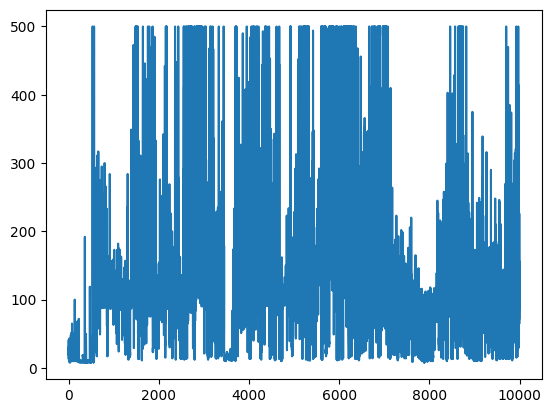

In [ ]:
# Linhas de Inicialização
total_count = 0 # Inicializa um contador para o número total de passos coletados.
total_episodes = 0  #  Inicializa um contador para o número total de episódios completados.
X1 = None
a=[]
t0 = time.time()

episodios = 10_000
BeginPriority = torch.ones(200)
indicesToIncrement = deque(maxlen=10_000)

MediaDos100 = deque(maxlen=100)
MediasLista = []

stop = False

indicesToIncrement = []
priorityIncrement = torch.full((len(indicesToIncrement),), 10)

for i, data in enumerate(collector):
    indices = rb.extend(data)
    rb.update_priority(index=indices, priority=BeginPriority)

    for X0 in data["next","step_count"]:
        if X1 is not None:
            if X0<X1:
                total_episodes += 1
                MediaDos100.append(X1.item())
                a.append(X1.item())
                if ((total_episodes % 100) == 0): MediasLista.append(sum(MediaDos100)/100)
                if X1.item() == 500:
                    print("alcançou 500!!!!!!")
        X1 = X0
        if X0 == 499:
            stop = not stop
            GetBest = torch.nonzero(data["next","step_count"] <= 500, as_tuple=True)[0]
            for i in GetBest.tolist():
                indicesToIncrement.append(indices[i].item())
            priorityIncrement = torch.full((len(indicesToIncrement),), 10)
            rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)

    if (total_episodes >= episodios): break
    #if stop: break

    max_length = rb[:]["next", "step_count"].max()

    if len(rb) > init_rand_steps:
        for _ in range(optim_steps):
            sample, info = rb.sample(return_info=True)

            loss_vals = loss(sample)

            rb.update_priority(index=info["index"], priority=loss_vals["loss"])
            rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)

            loss_vals["loss"] = loss_vals["loss"].mean()

            loss_vals["loss"].backward()
            optim.step()
            optim.zero_grad()
            exploration_module.step(data.numel())

            updater.step()

        torchrl_logger.info(f"Episodes: {total_episodes}, Max num steps: {max_length}, rb length {len(rb)}")
        total_count += data.numel()

t1 = time.time()
torchrl_logger.info(f"solved after {total_count} steps, {total_episodes} episodes and in {t1-t0}s.")
plt.plot(a)
plt.show()

[20.37, 22.9, 13.75, 14.32, 13.58, 55.69, 109.21, 108.71, 92.05, 99.49, 97.51, 92.3, 88.15, 82.81, 162.03, 115.57, 103.5, 137.16, 118.74, 106.34, 109.36, 129.38, 98.14, 98.66, 97.39, 135.01, 199.85, 192.48, 262.93, 176.15, 130.8, 105.79, 105.33, 93.28, 68.09, 15.02, 72.75, 176.85, 159.97, 184.29, 177.64, 187.9, 140.47, 180.36, 184.81, 91.64, 134.41, 97.76, 116.39, 101.98, 124.27, 144.74, 196.21, 144.88, 94.98, 174.28, 248.51, 175.17, 282.02, 165.28, 151.89, 260.77, 209.47, 171.02, 98.65, 112.96, 159.57, 177.43, 195.35, 219.17, 187.47, 91.99, 87.78, 71.28, 79.35, 91.87, 63.27, 52.67, 35.14, 58.72, 45.49, 98.26, 96.97, 112.17, 135.16, 152.93, 184.31, 172.16, 114.47, 60.76, 90.41, 101.12, 108.76, 81.59, 82.29, 77.89, 69.7, 134.26, 118.21, 123.16]


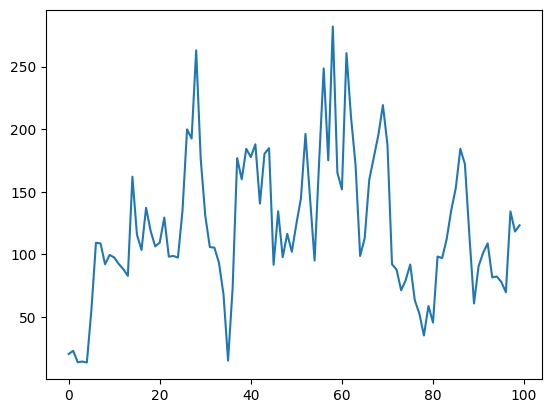

In [ ]:
print(MediasLista)
plt.plot(MediasLista)
plt.show()

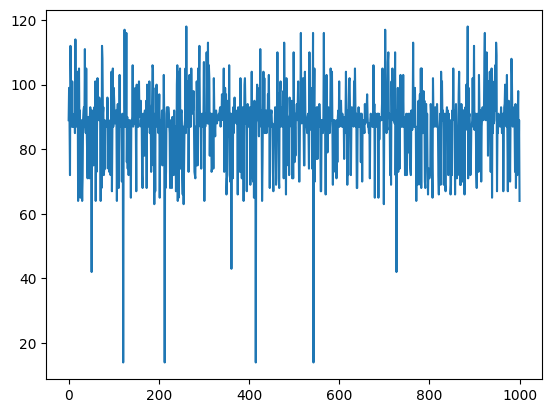

In [ ]:
eval_score = []
mean_100_eval_score = []

for i in range(1001):
    eval_score.append(env.rollout(max_steps=500, policy=policy)["next","step_count"][-1].item())
    if (i%100)==0:
      if i!=0:
        mean_100_eval_score.append(np.mean(eval_score[-100]))

plt.plot(eval_score)
plt.show()

In [ ]:
eval_score_mean = np.mean(mean_100_eval_score)
eval_score_mean

85.8

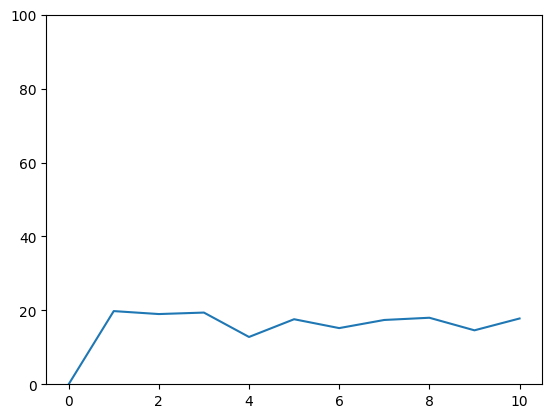

In [ ]:
# c = b/.500
# plt.plot(c)
# plt.show()
Sucessos = [0]
for i in mean_100_eval_score:
  # if (i%1000)==0:
  #   print(i)
  bb = (i/500)*100
  Sucessos.append(bb)
plt.plot(Sucessos)
plt.ylim(0,100)
plt.show()

In [ ]:
guarda_dados(a,
             nome_arquivo="Recompensa por Episódio 10",
             nome_pasta  ="Versão V5")
guarda_dados(eval_score,
             nome_arquivo="Avaliação 10",
             nome_pasta  ="Versão V5")
guarda_dados(Sucessos,
             nome_arquivo="Sucessos 10",
             nome_pasta  ="Versão V5")
guarda_dados(MediasLista,
             nome_arquivo="Médias 10",
             nome_pasta  ="Versão V5")
salvar_array(a, Sucessos, eval_score_mean, eval_score, versao="V5", epoch=10)

DataFrame salvo em /content/drive/My Drive/DADOS IA PYTORCH/Versão V5/Result_of_Epoch_10_V5.xlsx


In [ ]:
plt.plot(a)
plt.show()

## Renderização

Por fim, executamos o ambiente em tantas etapas quanto possível e salvamos o vídeo localmente (observe que não estamos explorando).

In [ ]:
b = []
for i in range(200):
    b.append(env.rollout(max_steps=500, policy=policy)["next","step_count"][-1].item())
plt.plot(b)
plt.show()

In [ ]:
# Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
record_env.rollout(max_steps=10000, policy=policy)
# max_steps=1000: Define o número máximo de passos a serem executados durante o rollout. Aqui, está configurado para 1000 passos.
# policy=policy: A política que o agente deve seguir durante a execução. Neste caso, é a política treinada previamente (policy).

# Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
video_recorder.dump()

In [ ]:
logger # CSVLogger(exp_name=dqn, experiment=CSVExperiment(log_dir=./training_loop/dqn))

# V6 em PyTorch

## Configuração do Agente

### Criação do ambiente

In [ ]:
torch.manual_seed(0) # define a semente manual para a geração de números aleatórios no PyTorch, garantindo a reprodutibilidade dos resultados.
env = TransformedEnv(GymEnv("CartPole-v1"), StepCounter())
# cria um ambiente de RL para o ambiente "CartPole-v1" do OpenAI Gym, com um contador de passos adicionado como uma transformação ao ambiente.
env.set_seed(0) # define a semente para o ambiente env, garantindo a consistência do comportamento do ambiente em diferentes execuções.

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


795726461

### Projetando uma política

In [ ]:
# Essa linha cria uma MLP que mapeia observações do ambiente para valores de ação, com duas camadas ocultas de 64 neurônios cada.
value_mlp = MLP(out_features=env.action_spec.shape[-1], num_cells=[64, 64])
# MLP: Refere-se a um Multi-Layer Perceptron (MLP), uma rede neural feed-forward composta por múltiplas camadas densamente conectadas.
# out_features=env.action_spec.shape[-1]: Define o número de neurônios na camada de saída da MLP.
# env.action_spec.shape[-1] é a dimensão do espaço de ações do ambiente, o que significa que a MLP vai produzir um valor para cada ação possível no ambiente.
# num_cells=[64, 64]: Define a arquitetura da MLP, com duas camadas ocultas, cada uma contendo 64 neurônios.

# Essa linha cria um módulo que pega as observações do ambiente (observation) e produz valores de ação (action_value) usando a MLP definida anteriormente.
value_net = Mod(value_mlp, in_keys=["observation"], out_keys=["action_value"])
# Mod: Refere-se ao TensorDictModule, que é um módulo que opera sobre TensorDicts.
# value_mlp: A MLP criada na linha anterior.
# in_keys=["observation"]: Define as chaves de entrada para o módulo. Aqui, o módulo espera uma chave chamada observation no TensorDict de entrada.
# out_keys=["action_value"]: Define as chaves de saída para o módulo. O módulo irá produzir uma chave chamada action_value no TensorDict de saída.

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
# Cria uma política que primeiro passa a observação através da value_net para obter os valores de ação
# e, em seguida, usa o QValueModule para calcular os valores Q para as ações.
policy = Seq(value_net, QValueModule(spec=env.action_spec))
# Seq: Refere-se ao TensorDictSequential, que é similar ao torch.nn.Sequential, mas opera sobre TensorDicts.
# value_net: O módulo criado na linha anterior.
# QValueModule(spec=env.action_spec): Um módulo específico para calcular valores Q, usado em algoritmos de Q-learning.
# spec=env.action_spec fornece as especificações do espaço de ações do ambiente.

# Cria um módulo de exploração que implementa uma estratégia epsilon-greedy com um valor inicial de epsilon de 0.5 e que diminui ao longo de 100.000 passos.
exploration_module = EGreedyModule(env.action_spec, annealing_num_steps=100_000, eps_init=1)
# EGreedyModule: Implementa política epsilon-greedy, que escolhe ações aleatoriamente com certa probabilidade epsilon, e a melhor ação com probabilidade 1-epsilon.
# env.action_spec: As especificações do espaço de ações do ambiente.
# annealing_num_steps=100_000: Define o número de passos durante os quais o valor de epsilon será reduzido gradualmente (annealing).
# eps_init=0.5: Define o valor inicial de epsilon. No início, 50% das ações serão escolhidas aleatoriamente.

# Essa linha combina a política com o módulo de exploração em uma sequência, resultando em uma política que primeiro calcula os valores de ação
# e, em seguida, aplica a estratégia epsilon-greedy para selecionar as ações.
policy_explore = Seq(policy, exploration_module)
# Seq: Refere-se ao TensorDictSequential.
# policy: A política definida anteriormente.
# exploration_module: O módulo de exploração epsilon-greedy definido na linha anterior.

/usr/local/lib/python3.10/dist-packages/torchrl/modules/tensordict_module/exploration.py:97: UserWarning: eps_init should be a float.
  warnings.warn("eps_init should be a float.")


### Coletor de dados e buffer de reprodução

In [ ]:
init_rand_steps = 5000
# Define o número inicial de passos aleatórios a serem realizados no ambiente antes de começar a usar a política treinada.
# Isso ajuda a inicializar o replay buffer com uma diversidade de estados e ações.
frames_per_batch = 500
# Define o número de frames (ou passos de tempo) que serão coletados em cada lote (batch) de coleta de dados do ambiente.
optim_steps = 25
# Define o número de passos de otimização que serão realizados após cada lote de coleta de dados.
# Isso controla quantas atualizações dos pesos da rede neural serão feitas com base nos dados coletados.

# SyncDataCollector: Um coletor de dados síncrono que coleta experiências do ambiente usando a política fornecida.
collector = SyncDataCollector(
    env,
    policy,
    frames_per_batch=frames_per_batch,
    total_frames=-1,
    init_random_frames=init_rand_steps,
)
# env: O ambiente de RL, criado anteriormente com TransformedEnv.
# policy: A política que será usada para coletar experiências, criada anteriormente.
# frames_per_batch=frames_per_batch: Especifica que 100 frames serão coletados em cada lote.
# total_frames=-1: Especifica que o coletor deve continuar indefinidamente (ou até que seja explicitamente parado).
# init_random_frames=init_rand_steps: Especifica que 5000 passos aleatórios serão realizados inicialmente p/ preencher o replay buffer com experiências variadas.
size = 100_000
rb = ReplayBuffer(
                storage=LazyTensorStorage(size),
                sampler=PrioritizedSampler(max_capacity=size, alpha=0.6, beta=0.4),
                batch_size=200)

### Módulo de perda e otimizador

In [ ]:
#  Implementa a função de perda para o algoritmo DQN (Deep Q-Network).
loss = DQNLoss(value_network=policy, action_space=env.action_spec, delay_value=True, reduction='none')
# value_network=policy: A rede de valor utilizada para calcular os valores Q. Aqui, policy é a política criada anteriormente, que inclui o QValueModule.
# action_space=env.action_spec: Especifica o espaço de ações do ambiente, utilizado para calcular os valores Q para todas as ações possíveis.
# delay_value=True: Indica que a rede alvo (target network) deve ser usada para calcular os valores Q futuros, o que é uma técnica comum para estabilizar o treinamento em DQN.

# Um otimizador amplamente utilizado que combina as vantagens dos métodos AdaGrad e RMSProp. É particularmente eficiente para grandes problemas de aprendizado de máquina com muitos parâmetros.
optim = Adam(loss.parameters(), lr=0.01)
# loss.parameters(): Passa os parâmetros da função de perda (que incluem os parâmetros da rede de valor) para o otimizador.
# lr=0.02: Define a taxa de aprendizado (learning rate) como 0.02. Esta taxa controla o tamanho dos passos de atualização dos pesos da rede neural durante o treinamento.

# Implementa a atualização suave dos parâmetros da rede, uma técnica comum em algoritmos de RL para atualizar gradualmente uma rede alvo (target network) com os parâmetros da rede de valor (online network).
updater = SoftUpdate(loss, eps=0.99)
# loss: A função de perda que contém os parâmetros da rede de valor e da rede alvo.
# eps=0.99: Define o fator de atualização suave (soft update factor). eps=0.99 indica que 99% dos parâmetros da rede alvo são mantidos e apenas 1% é atualizado a partir da rede de valor em cada passo.

### Registrador

In [ ]:
path = "./training_loop" # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.

# CSVLogger: Um logger que registra dados em formato CSV, útil para monitorar o progresso do treinamento e analisar resultados.
logger = CSVLogger(exp_name="dqn", log_dir=path, video_format="mp4")
# exp_name="dqn": Nome da experiência, usado como um identificador para os logs. Aqui, é definido como "dqn" (Deep Q-Network).
# log_dir=path: Diretório onde os logs serão salvos. Neste caso, é o diretório definido anteriormente, ./training_loop.
# video_format="mp4": Especifica o formato de vídeo para gravação. Aqui, está configurado para MP4.

# Um objeto que grava vídeos das execuções do ambiente durante o treinamento, útil para visualizar o comportamento do agente.
video_recorder = VideoRecorder(logger, tag="video")
# logger: O logger criado na linha anterior, que será usado para salvar os vídeos.
# tag="video": Uma tag para identificar os vídeos nos logs. Aqui, está definido como "video".

# Um wrapper que aplica transformações ao ambiente, como normalização de observações ou recompensas, e também permite a adição de funcionalidades como gravação de vídeos.
record_env = TransformedEnv(
    GymEnv("CartPole-v1", from_pixels=True, pixels_only=False), video_recorder
)
# GymEnv("CartPole-v1", from_pixels=True, pixels_only=False): Cria um ambiente GymEnv para o ambiente "CartPole-v1" do OpenAI Gym.
# from_pixels=True: Indica que o ambiente será renderizado a partir de pixels, permitindo a gravação visual do ambiente.
# pixels_only=False: Indica que tanto as observações em forma de pixels quanto outras observações (como a posição e a velocidade do carrinho) serão retornadas pelo ambiente.
# video_recorder: O gravador de vídeos criado na linha anterior, que será usado para gravar as execuções do ambiente.

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


## Treinamento

2024-05-27 12:52:56,982 [torchrl][INFO] solved after 0 steps, 69 episodes and in 1.1815292835235596s.


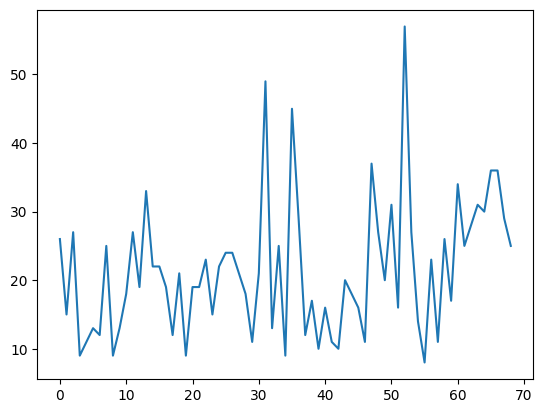

In [ ]:
# Linhas de Inicialização
total_count = 0 # Inicializa um contador para o número total de passos coletados.
total_episodes = 0  #  Inicializa um contador para o número total de episódios completados.
X1 = None
a=[]
t0 = time.time()

episodios = 5000
priority = torch.ones(500)
priorityIncrement = torch.full((500,), 10)

stopCount=0

indice_final = 0
stop = False
# indices = None
# Loop principal do treinamento.
for i, data in enumerate(collector):
    indices = rb.extend(data)
    rb.update_priority(index=indices, priority=priority)

    for X0 in data["next","step_count"]:
        if X1 is not None:
            if X0<X1:
                a.append(X1.item())
                total_episodes += 1
                if X1 <= 100:
                    stop = not stop
                if X1.item() == 500:
                    print("alcançou 500!!!!!!")
        X1 = X0
        # if X0 == 99:
        #     indice_final = indices[-1]
        #     indice_100 = torch.nonzero(data["next","step_count"] == 99, as_tuple=True)
        #     indicesToIncrement = torch.arange(indice_final.item()+1 - 99 + indice_100[0].item()-99, indice_final.item()+1 - 99 + indice_100[0].item()+1)
        #     rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)

    max_length = rb[:]["next", "step_count"].max()

    # Condição para Iniciar a Otimização
    if len(rb) > init_rand_steps:

        # Loop de Otimização
        for _ in range(optim_steps):
            sample, info = rb.sample(return_info=True)

            loss_vals = loss(sample)

            #rb.update_priority(index=info["index"], priority=loss_vals["loss"])

            loss_vals["loss"] = loss_vals["loss"].mean()
            # print(loss_vals["loss"])
            loss_vals["loss"].backward() # Calcula os gradientes da perda.
            optim.step() # Atualiza os parâmetros da rede usando o otimizador.
            optim.zero_grad() # Zera os gradientes acumulados para a próxima iteração.

            exploration_module.step(data.numel()) # Atualiza o fator de exploração baseado no número de elementos em data.

            # Atualização dos Parâmetros da Rede-alvo
            updater.step() # Realiza a atualização suave dos parâmetros da rede-alvo.

        # rb.update_priority(index=indices, priority=priority)
        if i % 1000:
            torchrl_logger.info(f"Episodes: {total_episodes}, Max num steps: {max_length}, rb length {len(rb)}")
        total_count += data.numel() # Atualiza o contador total de passos coletados.
        # total_episodes += data["next", "done"].sum()

    #if (total_episodes >= episodios): break
    if stop: break

# Cálculo e Registro do Tempo Total de Treinamento
t1 = time.time() # Armazena o tempo de término do treinamento.
torchrl_logger.info(f"solved after {total_count} steps, {total_episodes} episodes and in {t1-t0}s.")
plt.plot(a)
plt.show()

In [ ]:
print(len(rb["step_count"]))
print(indice_100[0][0].item())
print(indice_final.item())
# print(rb["step_count"][indice_final.item()+1 - 99 + indice_100[0][0].item()])
# print(rb["step_count"][indice_final.item()+1 - 99 + indice_100[0][0].item()-99 : indice_final.item()+1 - 99 + indice_100[0][0].item()+1])

# print(rb["step_count"][-500:])

5500
85
5499
tensor([24])
tensor([[ 84],
        [ 85],
        [ 86],
        [ 87],
        [ 88],
        [ 89],
        [ 90],
        [ 91],
        [ 92],
        [ 93],
        [ 94],
        [ 95],
        [ 96],
        [ 97],
        [ 98],
        [ 99],
        [100],
        [101],
        [102],
        [103],
        [104],
        [105],
        [106],
        [107],
        [108],
        [109],
        [110],
        [111],
        [112],
        [113],
        [114],
        [115],
        [116],
        [117],
        [118],
        [119],
        [120],
        [121],
        [122],
        [123],
        [124],
        [125],
        [126],
        [127],
        [128],
        [129],
        [130],
        [131],
        [132],
        [133],
        [134],
        [135],
        [136],
        [137],
        [138],
        [139],
        [140],
        [141],
        [142],
        [143],
        [144],
        [145],
        [146],
        [147],
        [148],

## Avaliação

In [ ]:
eval_score = []
mean_100_eval_score = []

for i in range(1001):
    eval_score.append(env.rollout(max_steps=500, policy=policy)["next","step_count"][-1].item())
    if (i%100)==0:
      if i!=0:
        mean_100_eval_score.append(np.mean(eval_score[-100]))

plt.plot(eval_score)
plt.show()

In [ ]:
# c = b/.500
# plt.plot(c)
# plt.show()
Sucessos = [0]
for i in mean_100_eval_score:
  # if (i%1000)==0:
  #   print(i)
  bb = (i/500)*100
  Sucessos.append(bb)
plt.plot(Sucessos)
plt.ylim(0,100)
plt.show()

# V7 em PyTorch

## Configuração do Agente

### Construindo o ambiente - OK

Estaremos usando um ambiente de academia com uma StepCounter transformação. Se precisar de uma atualização, verifique se esses recursos são apresentados no tutorial do ambiente .

In [ ]:
torch.manual_seed(0) # define a semente manual para a geração de números aleatórios no PyTorch, garantindo a reprodutibilidade dos resultados.
env = TransformedEnv(GymEnv("CartPole-v1"), StepCounter())
# cria um ambiente de RL para o ambiente "CartPole-v1" do OpenAI Gym, com um contador de passos adicionado como uma transformação ao ambiente.
env.set_seed(0) # define a semente para o ambiente env, garantindo a consistência do comportamento do ambiente em diferentes execuções.

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


795726461

### Projetando uma política

O próximo passo é construir nossa política. Faremos uma versão regular e determinística do ator para ser usada no módulo de perda e durante a avaliação . A seguir, iremos aumentá-lo com um módulo de exploração para inferência .

In [ ]:
# Essa linha cria uma MLP que mapeia observações do ambiente para valores de ação, com duas camadas ocultas de 64 neurônios cada.
value_mlp = MLP(out_features=env.action_spec.shape[-1], num_cells=[64, 64])
# MLP: Refere-se a um Multi-Layer Perceptron (MLP), uma rede neural feed-forward composta por múltiplas camadas densamente conectadas.
# out_features=env.action_spec.shape[-1]: Define o número de neurônios na camada de saída da MLP.
# env.action_spec.shape[-1] é a dimensão do espaço de ações do ambiente, o que significa que a MLP vai produzir um valor para cada ação possível no ambiente.
# num_cells=[64, 64]: Define a arquitetura da MLP, com duas camadas ocultas, cada uma contendo 64 neurônios.

# Essa linha cria um módulo que pega as observações do ambiente (observation) e produz valores de ação (action_value) usando a MLP definida anteriormente.
value_net = Mod(value_mlp, in_keys=["observation"], out_keys=["action_value"])
# Mod: Refere-se ao TensorDictModule, que é um módulo que opera sobre TensorDicts.
# value_mlp: A MLP criada na linha anterior.
# in_keys=["observation"]: Define as chaves de entrada para o módulo. Aqui, o módulo espera uma chave chamada observation no TensorDict de entrada.
# out_keys=["action_value"]: Define as chaves de saída para o módulo. O módulo irá produzir uma chave chamada action_value no TensorDict de saída.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
# Cria uma política que primeiro passa a observação através da value_net para obter os valores de ação
# e, em seguida, usa o QValueModule para calcular os valores Q para as ações.
policy = Seq(value_net, QValueModule(spec=env.action_spec))
# Seq: Refere-se ao TensorDictSequential, que é similar ao torch.nn.Sequential, mas opera sobre TensorDicts.
# value_net: O módulo criado na linha anterior.
# QValueModule(spec=env.action_spec): Um módulo específico para calcular valores Q, usado em algoritmos de Q-learning.
# spec=env.action_spec fornece as especificações do espaço de ações do ambiente.

# Cria um módulo de exploração que implementa uma estratégia epsilon-greedy com um valor inicial de epsilon de 0.5 e que diminui ao longo de 100.000 passos.
exploration_module = EGreedyModule(env.action_spec, annealing_num_steps=100_000, eps_init=1)
# EGreedyModule: Implementa política epsilon-greedy, que escolhe ações aleatoriamente com certa probabilidade epsilon, e a melhor ação com probabilidade 1-epsilon.
# env.action_spec: As especificações do espaço de ações do ambiente.
# annealing_num_steps=100_000: Define o número de passos durante os quais o valor de epsilon será reduzido gradualmente (annealing).
# eps_init=0.5: Define o valor inicial de epsilon. No início, 50% das ações serão escolhidas aleatoriamente.

# Essa linha combina a política com o módulo de exploração em uma sequência, resultando em uma política que primeiro calcula os valores de ação
# e, em seguida, aplica a estratégia epsilon-greedy para selecionar as ações.
policy_explore = Seq(policy, exploration_module)
# Seq: Refere-se ao TensorDictSequential.
# policy: A política definida anteriormente.
# exploration_module: O módulo de exploração epsilon-greedy definido na linha anterior.

/usr/local/lib/python3.10/dist-packages/torchrl/modules/tensordict_module/exploration.py:97: UserWarning: eps_init should be a float.
  warnings.warn("eps_init should be a float.")


### Coletor de dados e buffer de reprodução

Aí vem a parte dos dados: precisamos de um coletor de dados para obter facilmente lotes de dados e um buffer de reprodução para armazenar esses dados para treinamento.

In [ ]:
init_rand_steps = 5000
# Define o número inicial de passos aleatórios a serem realizados no ambiente antes de começar a usar a política treinada.
# Isso ajuda a inicializar o replay buffer com uma diversidade de estados e ações.
frames_per_batch = 500
# Define o número de frames (ou passos de tempo) que serão coletados em cada lote (batch) de coleta de dados do ambiente.
optim_steps = 25
# Define o número de passos de otimização que serão realizados após cada lote de coleta de dados.
# Isso controla quantas atualizações dos pesos da rede neural serão feitas com base nos dados coletados.

# SyncDataCollector: Um coletor de dados síncrono que coleta experiências do ambiente usando a política fornecida.
collector = SyncDataCollector(
    env,
    policy,
    frames_per_batch=frames_per_batch,
    total_frames=-1,
    init_random_frames=init_rand_steps,
)
# env: O ambiente de RL, criado anteriormente com TransformedEnv.
# policy: A política que será usada para coletar experiências, criada anteriormente.
# frames_per_batch=frames_per_batch: Especifica que 100 frames serão coletados em cada lote.
# total_frames=-1: Especifica que o coletor deve continuar indefinidamente (ou até que seja explicitamente parado).
# init_random_frames=init_rand_steps: Especifica que 5000 passos aleatórios serão realizados inicialmente p/ preencher o replay buffer com experiências variadas.
size = 100_000
rb = ReplayBuffer(
                storage=LazyTensorStorage(size),
                sampler=PrioritizedSampler(max_capacity=size, alpha=0.6, beta=0.4),
                batch_size=200)

### Módulo de perda e otimizador

Construímos nossa perda conforme indicado no tutorial dedicado , com seu otimizador e atualizador de parâmetros de destino:

In [ ]:
#  Implementa a função de perda para o algoritmo DQN (Deep Q-Network).
loss = DQNLoss(value_network=policy, action_space=env.action_spec, delay_value=True, reduction='none')
# value_network=policy: A rede de valor utilizada para calcular os valores Q. Aqui, policy é a política criada anteriormente, que inclui o QValueModule.
# action_space=env.action_spec: Especifica o espaço de ações do ambiente, utilizado para calcular os valores Q para todas as ações possíveis.
# delay_value=True: Indica que a rede alvo (target network) deve ser usada para calcular os valores Q futuros, o que é uma técnica comum para estabilizar o treinamento em DQN.

# Um otimizador amplamente utilizado que combina as vantagens dos métodos AdaGrad e RMSProp. É particularmente eficiente para grandes problemas de aprendizado de máquina com muitos parâmetros.
optim = Adam(loss.parameters(), lr=0.01)
# loss.parameters(): Passa os parâmetros da função de perda (que incluem os parâmetros da rede de valor) para o otimizador.
# lr=0.02: Define a taxa de aprendizado (learning rate) como 0.02. Esta taxa controla o tamanho dos passos de atualização dos pesos da rede neural durante o treinamento.

# Implementa a atualização suave dos parâmetros da rede, uma técnica comum em algoritmos de RL para atualizar gradualmente uma rede alvo (target network) com os parâmetros da rede de valor (online network).
updater = SoftUpdate(loss, eps=0.99)
# loss: A função de perda que contém os parâmetros da rede de valor e da rede alvo.
# eps=0.99: Define o fator de atualização suave (soft update factor). eps=0.99 indica que 99% dos parâmetros da rede alvo são mantidos e apenas 1% é atualizado a partir da rede de valor em cada passo.

### Registrador

Usaremos um registrador CSV para registrar nossos resultados e salvar vídeos renderizados.

In [ ]:
path = "./training_loop" # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.

# CSVLogger: Um logger que registra dados em formato CSV, útil para monitorar o progresso do treinamento e analisar resultados.
logger = CSVLogger(exp_name="dqn", log_dir=path, video_format="mp4")
# exp_name="dqn": Nome da experiência, usado como um identificador para os logs. Aqui, é definido como "dqn" (Deep Q-Network).
# log_dir=path: Diretório onde os logs serão salvos. Neste caso, é o diretório definido anteriormente, ./training_loop.
# video_format="mp4": Especifica o formato de vídeo para gravação. Aqui, está configurado para MP4.

# Um objeto que grava vídeos das execuções do ambiente durante o treinamento, útil para visualizar o comportamento do agente.
video_recorder = VideoRecorder(logger, tag="video")
# logger: O logger criado na linha anterior, que será usado para salvar os vídeos.
# tag="video": Uma tag para identificar os vídeos nos logs. Aqui, está definido como "video".

# Um wrapper que aplica transformações ao ambiente, como normalização de observações ou recompensas, e também permite a adição de funcionalidades como gravação de vídeos.
record_env = TransformedEnv(
    GymEnv("CartPole-v1", from_pixels=True, pixels_only=False), video_recorder
)
# GymEnv("CartPole-v1", from_pixels=True, pixels_only=False): Cria um ambiente GymEnv para o ambiente "CartPole-v1" do OpenAI Gym.
# from_pixels=True: Indica que o ambiente será renderizado a partir de pixels, permitindo a gravação visual do ambiente.
# pixels_only=False: Indica que tanto as observações em forma de pixels quanto outras observações (como a posição e a velocidade do carrinho) serão retornadas pelo ambiente.
# video_recorder: O gravador de vídeos criado na linha anterior, que será usado para gravar as execuções do ambiente.

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


## Ciclo de treinamento

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-06-03 18:46:35,314 [torchrl][INFO] Episodes: 280, Max num steps: 100, rb length 5500
2024-06-03 18:46:37,032 [torchrl][INFO] Episodes: 322, Max num steps: 100, rb length 6000
2024-06-03 18:46:38,988 [torchrl][INFO] Episodes: 375, Max num steps: 100, rb length 6500
2024-06-03 18:46:40,814 [torchrl][INFO] Episodes: 415, Max num steps: 100, rb length 7000
2024-06-03 18:46:42,271 [torchrl][INFO] Episodes: 467, Max num steps: 100, rb length 7500
2024-06-03 18:46:43,477 [torchrl][INFO] Episodes: 518, Max num steps: 100, rb length 8000
2024-06-03 18:46:44,650 [torchrl][INFO] Episodes: 571, Max num steps: 100, rb length 8500
2024-06-03 18:4

alcançou 500!!!!!!


2024-06-03 18:51:07,641 [torchrl][INFO] Episodes: 1491, Max num steps: 500, rb length 100000
2024-06-03 18:51:08,784 [torchrl][INFO] Episodes: 1495, Max num steps: 500, rb length 100000
2024-06-03 18:51:09,939 [torchrl][INFO] Episodes: 1499, Max num steps: 500, rb length 100000
2024-06-03 18:51:11,055 [torchrl][INFO] Episodes: 1504, Max num steps: 500, rb length 100000
2024-06-03 18:51:12,591 [torchrl][INFO] Episodes: 1508, Max num steps: 500, rb length 100000
2024-06-03 18:51:14,197 [torchrl][INFO] Episodes: 1513, Max num steps: 500, rb length 100000
2024-06-03 18:51:16,192 [torchrl][INFO] Episodes: 1519, Max num steps: 500, rb length 100000
2024-06-03 18:51:17,539 [torchrl][INFO] Episodes: 1524, Max num steps: 500, rb length 100000
2024-06-03 18:51:18,655 [torchrl][INFO] Episodes: 1529, Max num steps: 500, rb length 100000
2024-06-03 18:51:19,785 [torchrl][INFO] Episodes: 1534, Max num steps: 500, rb length 100000
2024-06-03 18:51:20,931 [torchrl][INFO] Episodes: 1539, Max num steps:

alcançou 500!!!!!!


2024-06-03 18:51:51,236 [torchrl][INFO] Episodes: 1647, Max num steps: 500, rb length 100000
2024-06-03 18:51:52,370 [torchrl][INFO] Episodes: 1653, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:51:53,504 [torchrl][INFO] Episodes: 1654, Max num steps: 500, rb length 100000
2024-06-03 18:51:54,710 [torchrl][INFO] Episodes: 1658, Max num steps: 500, rb length 100000
2024-06-03 18:51:55,828 [torchrl][INFO] Episodes: 1659, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:51:56,948 [torchrl][INFO] Episodes: 1662, Max num steps: 500, rb length 100000
2024-06-03 18:51:58,049 [torchrl][INFO] Episodes: 1663, Max num steps: 500, rb length 100000
2024-06-03 18:51:59,338 [torchrl][INFO] Episodes: 1666, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:01,025 [torchrl][INFO] Episodes: 1667, Max num steps: 500, rb length 100000
2024-06-03 18:52:02,675 [torchrl][INFO] Episodes: 1672, Max num steps: 500, rb length 100000
2024-06-03 18:52:04,347 [torchrl][INFO] Episodes: 1675, Max num steps: 500, rb length 100000
2024-06-03 18:52:05,498 [torchrl][INFO] Episodes: 1681, Max num steps: 500, rb length 100000
2024-06-03 18:52:06,644 [torchrl][INFO] Episodes: 1684, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:07,794 [torchrl][INFO] Episodes: 1685, Max num steps: 500, rb length 100000
2024-06-03 18:52:08,949 [torchrl][INFO] Episodes: 1686, Max num steps: 500, rb length 100000
2024-06-03 18:52:10,084 [torchrl][INFO] Episodes: 1690, Max num steps: 500, rb length 100000
2024-06-03 18:52:11,205 [torchrl][INFO] Episodes: 1695, Max num steps: 500, rb length 100000
2024-06-03 18:52:12,334 [torchrl][INFO] Episodes: 1696, Max num steps: 500, rb length 100000
2024-06-03 18:52:13,449 [torchrl][INFO] Episodes: 1706, Max num steps: 500, rb length 100000
2024-06-03 18:52:14,925 [torchrl][INFO] Episodes: 1714, Max num steps: 500, rb length 100000
2024-06-03 18:52:16,580 [torchrl][INFO] Episodes: 1718, Max num steps: 500, rb length 100000
2024-06-03 18:52:18,315 [torchrl][INFO] Episodes: 1723, Max num steps: 500, rb length 100000
2024-06-03 18:52:19,633 [torchrl][INFO] Episodes: 1731, Max num steps: 500, rb length 100000
2024-06-03 18:52:20,784 [torchrl][INFO] Episodes: 1736, Max num steps:

alcançou 500!!!!!!


2024-06-03 18:52:21,918 [torchrl][INFO] Episodes: 1737, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:23,050 [torchrl][INFO] Episodes: 1738, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:24,373 [torchrl][INFO] Episodes: 1739, Max num steps: 500, rb length 100000
2024-06-03 18:52:25,482 [torchrl][INFO] Episodes: 1742, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:26,604 [torchrl][INFO] Episodes: 1743, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:27,740 [torchrl][INFO] Episodes: 1744, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:28,956 [torchrl][INFO] Episodes: 1745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:30,679 [torchrl][INFO] Episodes: 1746, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:32,306 [torchrl][INFO] Episodes: 1747, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:33,872 [torchrl][INFO] Episodes: 1748, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:35,014 [torchrl][INFO] Episodes: 1749, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:36,151 [torchrl][INFO] Episodes: 1750, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:37,278 [torchrl][INFO] Episodes: 1751, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:38,408 [torchrl][INFO] Episodes: 1752, Max num steps: 500, rb length 100000
2024-06-03 18:52:39,531 [torchrl][INFO] Episodes: 1755, Max num steps: 500, rb length 100000
2024-06-03 18:52:40,681 [torchrl][INFO] Episodes: 1756, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:41,797 [torchrl][INFO] Episodes: 1757, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:42,925 [torchrl][INFO] Episodes: 1758, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:44,589 [torchrl][INFO] Episodes: 1762, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:46,255 [torchrl][INFO] Episodes: 1763, Max num steps: 500, rb length 100000
2024-06-03 18:52:48,037 [torchrl][INFO] Episodes: 1765, Max num steps: 500, rb length 100000
2024-06-03 18:52:49,313 [torchrl][INFO] Episodes: 1766, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:50,441 [torchrl][INFO] Episodes: 1767, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:51,582 [torchrl][INFO] Episodes: 1768, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:52,735 [torchrl][INFO] Episodes: 1772, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:53,865 [torchrl][INFO] Episodes: 1773, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:55,011 [torchrl][INFO] Episodes: 1774, Max num steps: 500, rb length 100000
2024-06-03 18:52:56,161 [torchrl][INFO] Episodes: 1777, Max num steps: 500, rb length 100000
2024-06-03 18:52:57,299 [torchrl][INFO] Episodes: 1778, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:52:58,463 [torchrl][INFO] Episodes: 1780, Max num steps: 500, rb length 100000
2024-06-03 18:53:00,107 [torchrl][INFO] Episodes: 1783, Max num steps: 500, rb length 100000
2024-06-03 18:53:01,845 [torchrl][INFO] Episodes: 1787, Max num steps: 500, rb length 100000
2024-06-03 18:53:03,542 [torchrl][INFO] Episodes: 1791, Max num steps: 500, rb length 100000
2024-06-03 18:53:04,682 [torchrl][INFO] Episodes: 1792, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:53:05,860 [torchrl][INFO] Episodes: 1797, Max num steps: 500, rb length 100000
2024-06-03 18:53:07,175 [torchrl][INFO] Episodes: 1798, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:53:08,327 [torchrl][INFO] Episodes: 1800, Max num steps: 500, rb length 100000
2024-06-03 18:53:09,523 [torchrl][INFO] Episodes: 1802, Max num steps: 500, rb length 100000
2024-06-03 18:53:10,705 [torchrl][INFO] Episodes: 1804, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:53:11,838 [torchrl][INFO] Episodes: 1806, Max num steps: 500, rb length 100000
2024-06-03 18:53:12,979 [torchrl][INFO] Episodes: 1810, Max num steps: 500, rb length 100000
2024-06-03 18:53:14,521 [torchrl][INFO] Episodes: 1811, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:53:16,218 [torchrl][INFO] Episodes: 1812, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:53:18,001 [torchrl][INFO] Episodes: 1816, Max num steps: 500, rb length 100000
2024-06-03 18:53:19,283 [torchrl][INFO] Episodes: 1817, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:53:20,439 [torchrl][INFO] Episodes: 1822, Max num steps: 500, rb length 100000
2024-06-03 18:53:21,702 [torchrl][INFO] Episodes: 1826, Max num steps: 500, rb length 100000
2024-06-03 18:53:22,873 [torchrl][INFO] Episodes: 1827, Max num steps: 500, rb length 100000
2024-06-03 18:53:24,014 [torchrl][INFO] Episodes: 1828, Max num steps: 500, rb length 100000
2024-06-03 18:53:25,181 [torchrl][INFO] Episodes: 1832, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:53:26,352 [torchrl][INFO] Episodes: 1833, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:53:27,527 [torchrl][INFO] Episodes: 1834, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:53:29,133 [torchrl][INFO] Episodes: 1835, Max num steps: 500, rb length 100000
2024-06-03 18:53:30,865 [torchrl][INFO] Episodes: 1838, Max num steps: 500, rb length 100000
2024-06-03 18:53:32,607 [torchrl][INFO] Episodes: 1841, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:53:34,066 [torchrl][INFO] Episodes: 1842, Max num steps: 500, rb length 100000
2024-06-03 18:53:35,230 [torchrl][INFO] Episodes: 1843, Max num steps: 500, rb length 100000
2024-06-03 18:53:36,365 [torchrl][INFO] Episodes: 1847, Max num steps: 500, rb length 100000
2024-06-03 18:53:37,531 [torchrl][INFO] Episodes: 1848, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:53:38,724 [torchrl][INFO] Episodes: 1851, Max num steps: 500, rb length 100000
2024-06-03 18:53:39,935 [torchrl][INFO] Episodes: 1855, Max num steps: 500, rb length 100000
2024-06-03 18:53:41,126 [torchrl][INFO] Episodes: 1858, Max num steps: 500, rb length 100000
2024-06-03 18:53:42,289 [torchrl][INFO] Episodes: 1860, Max num steps: 500, rb length 100000
2024-06-03 18:53:43,484 [torchrl][INFO] Episodes: 1862, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:53:45,204 [torchrl][INFO] Episodes: 1863, Max num steps: 500, rb length 100000
2024-06-03 18:53:46,906 [torchrl][INFO] Episodes: 1866, Max num steps: 500, rb length 100000
2024-06-03 18:53:48,519 [torchrl][INFO] Episodes: 1870, Max num steps: 500, rb length 100000
2024-06-03 18:53:49,675 [torchrl][INFO] Episodes: 1874, Max num steps: 500, rb length 100000
2024-06-03 18:53:50,842 [torchrl][INFO] Episodes: 1878, Max num steps: 500, rb length 100000
2024-06-03 18:53:52,177 [torchrl][INFO] Episodes: 1880, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:53:53,328 [torchrl][INFO] Episodes: 1881, Max num steps: 500, rb length 100000
2024-06-03 18:53:54,468 [torchrl][INFO] Episodes: 1884, Max num steps: 500, rb length 100000
2024-06-03 18:53:55,622 [torchrl][INFO] Episodes: 1888, Max num steps: 500, rb length 100000
2024-06-03 18:53:56,791 [torchrl][INFO] Episodes: 1892, Max num steps: 500, rb length 100000
2024-06-03 18:53:57,936 [torchrl][INFO] Episodes: 1895, Max num steps: 500, rb length 100000
2024-06-03 18:53:59,510 [torchrl][INFO] Episodes: 1899, Max num steps: 500, rb length 100000
2024-06-03 18:54:01,244 [torchrl][INFO] Episodes: 1903, Max num steps: 500, rb length 100000
2024-06-03 18:54:02,989 [torchrl][INFO] Episodes: 1907, Max num steps: 500, rb length 100000
2024-06-03 18:54:04,197 [torchrl][INFO] Episodes: 1911, Max num steps: 500, rb length 100000
2024-06-03 18:54:05,347 [torchrl][INFO] Episodes: 1915, Max num steps: 500, rb length 100000
2024-06-03 18:54:06,487 [torchrl][INFO] Episodes: 1916, Max num steps:

alcançou 500!!!!!!


2024-06-03 18:54:55,657 [torchrl][INFO] Episodes: 2078, Max num steps: 500, rb length 100000
2024-06-03 18:54:56,807 [torchrl][INFO] Episodes: 2081, Max num steps: 500, rb length 100000
2024-06-03 18:54:58,403 [torchrl][INFO] Episodes: 2085, Max num steps: 500, rb length 100000
2024-06-03 18:55:00,046 [torchrl][INFO] Episodes: 2086, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:55:01,853 [torchrl][INFO] Episodes: 2091, Max num steps: 500, rb length 100000
2024-06-03 18:55:03,060 [torchrl][INFO] Episodes: 2095, Max num steps: 500, rb length 100000
2024-06-03 18:55:04,224 [torchrl][INFO] Episodes: 2099, Max num steps: 500, rb length 100000
2024-06-03 18:55:05,368 [torchrl][INFO] Episodes: 2102, Max num steps: 500, rb length 100000
2024-06-03 18:55:06,531 [torchrl][INFO] Episodes: 2106, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:55:07,725 [torchrl][INFO] Episodes: 2107, Max num steps: 500, rb length 100000
2024-06-03 18:55:08,892 [torchrl][INFO] Episodes: 2111, Max num steps: 500, rb length 100000
2024-06-03 18:55:10,041 [torchrl][INFO] Episodes: 2115, Max num steps: 500, rb length 100000
2024-06-03 18:55:11,239 [torchrl][INFO] Episodes: 2119, Max num steps: 500, rb length 100000
2024-06-03 18:55:12,548 [torchrl][INFO] Episodes: 2123, Max num steps: 500, rb length 100000
2024-06-03 18:55:14,259 [torchrl][INFO] Episodes: 2127, Max num steps: 500, rb length 100000
2024-06-03 18:55:15,974 [torchrl][INFO] Episodes: 2131, Max num steps: 500, rb length 100000
2024-06-03 18:55:17,472 [torchrl][INFO] Episodes: 2136, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:55:19,588 [torchrl][INFO] Episodes: 2137, Max num steps: 500, rb length 100000
2024-06-03 18:55:21,924 [torchrl][INFO] Episodes: 2138, Max num steps: 500, rb length 100000
2024-06-03 18:55:23,473 [torchrl][INFO] Episodes: 2142, Max num steps: 500, rb length 100000
2024-06-03 18:55:24,837 [torchrl][INFO] Episodes: 2145, Max num steps: 500, rb length 100000
2024-06-03 18:55:26,187 [torchrl][INFO] Episodes: 2148, Max num steps: 500, rb length 100000
2024-06-03 18:55:28,501 [torchrl][INFO] Episodes: 2151, Max num steps: 500, rb length 100000
2024-06-03 18:55:31,246 [torchrl][INFO] Episodes: 2155, Max num steps: 500, rb length 100000
2024-06-03 18:55:33,150 [torchrl][INFO] Episodes: 2156, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:55:34,389 [torchrl][INFO] Episodes: 2157, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:55:35,651 [torchrl][INFO] Episodes: 2162, Max num steps: 500, rb length 100000
2024-06-03 18:55:37,167 [torchrl][INFO] Episodes: 2166, Max num steps: 500, rb length 100000
2024-06-03 18:55:38,483 [torchrl][INFO] Episodes: 2169, Max num steps: 500, rb length 100000
2024-06-03 18:55:39,830 [torchrl][INFO] Episodes: 2173, Max num steps: 500, rb length 100000
2024-06-03 18:55:41,043 [torchrl][INFO] Episodes: 2176, Max num steps: 500, rb length 100000
2024-06-03 18:55:42,204 [torchrl][INFO] Episodes: 2180, Max num steps: 500, rb length 100000
2024-06-03 18:55:43,428 [torchrl][INFO] Episodes: 2182, Max num steps: 500, rb length 100000
2024-06-03 18:55:45,214 [torchrl][INFO] Episodes: 2186, Max num steps: 500, rb length 100000
2024-06-03 18:55:46,986 [torchrl][INFO] Episodes: 2189, Max num steps: 500, rb length 100000
2024-06-03 18:55:49,067 [torchrl][INFO] Episodes: 2190, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:55:51,089 [torchrl][INFO] Episodes: 2191, Max num steps: 500, rb length 100000
2024-06-03 18:55:52,914 [torchrl][INFO] Episodes: 2195, Max num steps: 500, rb length 100000
2024-06-03 18:55:54,162 [torchrl][INFO] Episodes: 2198, Max num steps: 500, rb length 100000
2024-06-03 18:55:55,325 [torchrl][INFO] Episodes: 2199, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:55:56,515 [torchrl][INFO] Episodes: 2203, Max num steps: 500, rb length 100000
2024-06-03 18:55:57,672 [torchrl][INFO] Episodes: 2208, Max num steps: 500, rb length 100000
2024-06-03 18:55:58,910 [torchrl][INFO] Episodes: 2211, Max num steps: 500, rb length 100000
2024-06-03 18:56:00,620 [torchrl][INFO] Episodes: 2215, Max num steps: 500, rb length 100000
2024-06-03 18:56:02,374 [torchrl][INFO] Episodes: 2219, Max num steps: 500, rb length 100000
2024-06-03 18:56:03,938 [torchrl][INFO] Episodes: 2222, Max num steps: 500, rb length 100000
2024-06-03 18:56:05,082 [torchrl][INFO] Episodes: 2225, Max num steps: 500, rb length 100000
2024-06-03 18:56:06,221 [torchrl][INFO] Episodes: 2227, Max num steps: 500, rb length 100000
2024-06-03 18:56:07,392 [torchrl][INFO] Episodes: 2229, Max num steps: 500, rb length 100000
2024-06-03 18:56:08,583 [torchrl][INFO] Episodes: 2233, Max num steps: 500, rb length 100000
2024-06-03 18:56:09,734 [torchrl][INFO] Episodes: 2234, Max num steps:

alcançou 500!!!!!!


2024-06-03 18:56:40,107 [torchrl][INFO] Episodes: 2297, Max num steps: 500, rb length 100000
2024-06-03 18:56:41,285 [torchrl][INFO] Episodes: 2301, Max num steps: 500, rb length 100000
2024-06-03 18:56:42,455 [torchrl][INFO] Episodes: 2304, Max num steps: 500, rb length 100000
2024-06-03 18:56:43,891 [torchrl][INFO] Episodes: 2308, Max num steps: 500, rb length 100000
2024-06-03 18:56:45,608 [torchrl][INFO] Episodes: 2311, Max num steps: 500, rb length 100000
2024-06-03 18:56:47,477 [torchrl][INFO] Episodes: 2314, Max num steps: 500, rb length 100000
2024-06-03 18:56:48,768 [torchrl][INFO] Episodes: 2316, Max num steps: 500, rb length 100000
2024-06-03 18:56:49,944 [torchrl][INFO] Episodes: 2319, Max num steps: 500, rb length 100000
2024-06-03 18:56:51,100 [torchrl][INFO] Episodes: 2322, Max num steps: 500, rb length 100000
2024-06-03 18:56:52,280 [torchrl][INFO] Episodes: 2325, Max num steps: 500, rb length 100000
2024-06-03 18:56:53,447 [torchrl][INFO] Episodes: 2328, Max num steps:

alcançou 500!!!!!!


2024-06-03 18:56:54,608 [torchrl][INFO] Episodes: 2329, Max num steps: 500, rb length 100000
2024-06-03 18:56:55,748 [torchrl][INFO] Episodes: 2331, Max num steps: 500, rb length 100000
2024-06-03 18:56:56,896 [torchrl][INFO] Episodes: 2335, Max num steps: 500, rb length 100000
2024-06-03 18:56:58,520 [torchrl][INFO] Episodes: 2338, Max num steps: 500, rb length 100000
2024-06-03 18:57:00,258 [torchrl][INFO] Episodes: 2339, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:02,094 [torchrl][INFO] Episodes: 2341, Max num steps: 500, rb length 100000
2024-06-03 18:57:03,428 [torchrl][INFO] Episodes: 2343, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:04,602 [torchrl][INFO] Episodes: 2344, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:05,767 [torchrl][INFO] Episodes: 2345, Max num steps: 500, rb length 100000
2024-06-03 18:57:06,932 [torchrl][INFO] Episodes: 2346, Max num steps: 500, rb length 100000
2024-06-03 18:57:08,081 [torchrl][INFO] Episodes: 2347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:09,265 [torchrl][INFO] Episodes: 2348, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:10,426 [torchrl][INFO] Episodes: 2349, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:11,623 [torchrl][INFO] Episodes: 2350, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:12,946 [torchrl][INFO] Episodes: 2351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:14,681 [torchrl][INFO] Episodes: 2353, Max num steps: 500, rb length 100000
2024-06-03 18:57:16,400 [torchrl][INFO] Episodes: 2354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:17,962 [torchrl][INFO] Episodes: 2355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:19,146 [torchrl][INFO] Episodes: 2356, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:20,364 [torchrl][INFO] Episodes: 2358, Max num steps: 500, rb length 100000
2024-06-03 18:57:21,714 [torchrl][INFO] Episodes: 2359, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:22,906 [torchrl][INFO] Episodes: 2361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:24,086 [torchrl][INFO] Episodes: 2362, Max num steps: 500, rb length 100000
2024-06-03 18:57:25,268 [torchrl][INFO] Episodes: 2364, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:26,428 [torchrl][INFO] Episodes: 2365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:27,589 [torchrl][INFO] Episodes: 2366, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:29,399 [torchrl][INFO] Episodes: 2367, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:31,166 [torchrl][INFO] Episodes: 2368, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:32,603 [torchrl][INFO] Episodes: 2369, Max num steps: 500, rb length 100000
2024-06-03 18:57:33,762 [torchrl][INFO] Episodes: 2371, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:34,930 [torchrl][INFO] Episodes: 2372, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:36,112 [torchrl][INFO] Episodes: 2373, Max num steps: 500, rb length 100000
2024-06-03 18:57:37,302 [torchrl][INFO] Episodes: 2375, Max num steps: 500, rb length 100000
2024-06-03 18:57:38,446 [torchrl][INFO] Episodes: 2377, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:39,606 [torchrl][INFO] Episodes: 2378, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:40,765 [torchrl][INFO] Episodes: 2379, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:42,062 [torchrl][INFO] Episodes: 2380, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:44,013 [torchrl][INFO] Episodes: 2381, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:45,784 [torchrl][INFO] Episodes: 2382, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:47,217 [torchrl][INFO] Episodes: 2383, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:48,394 [torchrl][INFO] Episodes: 2384, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:49,583 [torchrl][INFO] Episodes: 2385, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:50,814 [torchrl][INFO] Episodes: 2386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:52,002 [torchrl][INFO] Episodes: 2387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:53,172 [torchrl][INFO] Episodes: 2388, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:54,322 [torchrl][INFO] Episodes: 2389, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:55,491 [torchrl][INFO] Episodes: 2390, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:56,766 [torchrl][INFO] Episodes: 2391, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:57:58,505 [torchrl][INFO] Episodes: 2392, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:00,220 [torchrl][INFO] Episodes: 2393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:01,837 [torchrl][INFO] Episodes: 2394, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:03,013 [torchrl][INFO] Episodes: 2395, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:04,194 [torchrl][INFO] Episodes: 2396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:05,382 [torchrl][INFO] Episodes: 2397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:06,763 [torchrl][INFO] Episodes: 2398, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:08,020 [torchrl][INFO] Episodes: 2399, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:09,235 [torchrl][INFO] Episodes: 2400, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:10,464 [torchrl][INFO] Episodes: 2401, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:11,771 [torchrl][INFO] Episodes: 2402, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:13,515 [torchrl][INFO] Episodes: 2403, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:15,280 [torchrl][INFO] Episodes: 2404, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:16,820 [torchrl][INFO] Episodes: 2405, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:18,028 [torchrl][INFO] Episodes: 2406, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:19,230 [torchrl][INFO] Episodes: 2407, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:20,468 [torchrl][INFO] Episodes: 2408, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:21,690 [torchrl][INFO] Episodes: 2409, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:23,127 [torchrl][INFO] Episodes: 2410, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:24,506 [torchrl][INFO] Episodes: 2411, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:25,889 [torchrl][INFO] Episodes: 2412, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:27,985 [torchrl][INFO] Episodes: 2413, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:29,951 [torchrl][INFO] Episodes: 2414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:31,923 [torchrl][INFO] Episodes: 2415, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:33,175 [torchrl][INFO] Episodes: 2416, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:34,512 [torchrl][INFO] Episodes: 2417, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:35,939 [torchrl][INFO] Episodes: 2418, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:37,315 [torchrl][INFO] Episodes: 2419, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:38,593 [torchrl][INFO] Episodes: 2420, Max num steps: 500, rb length 100000
2024-06-03 18:58:39,774 [torchrl][INFO] Episodes: 2421, Max num steps: 500, rb length 100000
2024-06-03 18:58:41,005 [torchrl][INFO] Episodes: 2422, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:42,868 [torchrl][INFO] Episodes: 2423, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:44,844 [torchrl][INFO] Episodes: 2424, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:46,506 [torchrl][INFO] Episodes: 2425, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:47,908 [torchrl][INFO] Episodes: 2426, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:49,180 [torchrl][INFO] Episodes: 2427, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:50,406 [torchrl][INFO] Episodes: 2432, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:51,788 [torchrl][INFO] Episodes: 2433, Max num steps: 500, rb length 100000
2024-06-03 18:58:53,135 [torchrl][INFO] Episodes: 2434, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:58:54,383 [torchrl][INFO] Episodes: 2435, Max num steps: 500, rb length 100000
2024-06-03 18:58:55,943 [torchrl][INFO] Episodes: 2438, Max num steps: 500, rb length 100000
2024-06-03 18:58:57,827 [torchrl][INFO] Episodes: 2442, Max num steps: 500, rb length 100000
2024-06-03 18:58:59,837 [torchrl][INFO] Episodes: 2445, Max num steps: 500, rb length 100000
2024-06-03 18:59:01,247 [torchrl][INFO] Episodes: 2446, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:02,531 [torchrl][INFO] Episodes: 2451, Max num steps: 500, rb length 100000
2024-06-03 18:59:03,797 [torchrl][INFO] Episodes: 2452, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:05,113 [torchrl][INFO] Episodes: 2460, Max num steps: 500, rb length 100000
2024-06-03 18:59:06,482 [torchrl][INFO] Episodes: 2465, Max num steps: 500, rb length 100000
2024-06-03 18:59:07,813 [torchrl][INFO] Episodes: 2469, Max num steps: 500, rb length 100000
2024-06-03 18:59:09,197 [torchrl][INFO] Episodes: 2471, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:10,677 [torchrl][INFO] Episodes: 2472, Max num steps: 500, rb length 100000
2024-06-03 18:59:12,518 [torchrl][INFO] Episodes: 2474, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:14,392 [torchrl][INFO] Episodes: 2475, Max num steps: 500, rb length 100000
2024-06-03 18:59:15,851 [torchrl][INFO] Episodes: 2477, Max num steps: 500, rb length 100000
2024-06-03 18:59:17,234 [torchrl][INFO] Episodes: 2478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:18,667 [torchrl][INFO] Episodes: 2479, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:19,942 [torchrl][INFO] Episodes: 2480, Max num steps: 500, rb length 100000
2024-06-03 18:59:21,564 [torchrl][INFO] Episodes: 2481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:22,896 [torchrl][INFO] Episodes: 2482, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:24,146 [torchrl][INFO] Episodes: 2484, Max num steps: 500, rb length 100000
2024-06-03 18:59:25,658 [torchrl][INFO] Episodes: 2486, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:27,529 [torchrl][INFO] Episodes: 2487, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:29,575 [torchrl][INFO] Episodes: 2488, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:31,104 [torchrl][INFO] Episodes: 2489, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:32,363 [torchrl][INFO] Episodes: 2490, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:33,716 [torchrl][INFO] Episodes: 2491, Max num steps: 500, rb length 100000
2024-06-03 18:59:35,033 [torchrl][INFO] Episodes: 2505, Max num steps: 500, rb length 100000
2024-06-03 18:59:36,254 [torchrl][INFO] Episodes: 2508, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:37,471 [torchrl][INFO] Episodes: 2509, Max num steps: 500, rb length 100000
2024-06-03 18:59:38,708 [torchrl][INFO] Episodes: 2510, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:39,917 [torchrl][INFO] Episodes: 2511, Max num steps: 500, rb length 100000
2024-06-03 18:59:41,585 [torchrl][INFO] Episodes: 2513, Max num steps: 500, rb length 100000
2024-06-03 18:59:43,422 [torchrl][INFO] Episodes: 2517, Max num steps: 500, rb length 100000
2024-06-03 18:59:45,274 [torchrl][INFO] Episodes: 2520, Max num steps: 500, rb length 100000
2024-06-03 18:59:46,681 [torchrl][INFO] Episodes: 2521, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:47,929 [torchrl][INFO] Episodes: 2526, Max num steps: 500, rb length 100000
2024-06-03 18:59:49,151 [torchrl][INFO] Episodes: 2527, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:50,362 [torchrl][INFO] Episodes: 2528, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:51,605 [torchrl][INFO] Episodes: 2529, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:52,820 [torchrl][INFO] Episodes: 2531, Max num steps: 500, rb length 100000
2024-06-03 18:59:54,008 [torchrl][INFO] Episodes: 2535, Max num steps: 500, rb length 100000
2024-06-03 18:59:55,279 [torchrl][INFO] Episodes: 2536, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 18:59:57,117 [torchrl][INFO] Episodes: 2539, Max num steps: 500, rb length 100000
2024-06-03 18:59:58,914 [torchrl][INFO] Episodes: 2543, Max num steps: 500, rb length 100000
2024-06-03 19:00:00,525 [torchrl][INFO] Episodes: 2546, Max num steps: 500, rb length 100000
2024-06-03 19:00:01,727 [torchrl][INFO] Episodes: 2547, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:00:02,952 [torchrl][INFO] Episodes: 2551, Max num steps: 500, rb length 100000
2024-06-03 19:00:04,160 [torchrl][INFO] Episodes: 2555, Max num steps: 500, rb length 100000
2024-06-03 19:00:05,414 [torchrl][INFO] Episodes: 2556, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:00:06,686 [torchrl][INFO] Episodes: 2561, Max num steps: 500, rb length 100000
2024-06-03 19:00:08,055 [torchrl][INFO] Episodes: 2584, Max num steps: 500, rb length 100000
2024-06-03 19:00:10,357 [torchrl][INFO] Episodes: 2587, Max num steps: 500, rb length 100000
2024-06-03 19:00:12,466 [torchrl][INFO] Episodes: 2594, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:00:14,681 [torchrl][INFO] Episodes: 2595, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:00:16,533 [torchrl][INFO] Episodes: 2596, Max num steps: 500, rb length 100000
2024-06-03 19:00:18,068 [torchrl][INFO] Episodes: 2598, Max num steps: 500, rb length 100000
2024-06-03 19:00:19,296 [torchrl][INFO] Episodes: 2601, Max num steps: 500, rb length 100000
2024-06-03 19:00:20,563 [torchrl][INFO] Episodes: 2604, Max num steps: 500, rb length 100000
2024-06-03 19:00:21,806 [torchrl][INFO] Episodes: 2608, Max num steps: 500, rb length 100000
2024-06-03 19:00:23,036 [torchrl][INFO] Episodes: 2612, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:00:24,271 [torchrl][INFO] Episodes: 2613, Max num steps: 500, rb length 100000
2024-06-03 19:00:25,479 [torchrl][INFO] Episodes: 2616, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:00:26,715 [torchrl][INFO] Episodes: 2617, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:00:28,227 [torchrl][INFO] Episodes: 2618, Max num steps: 500, rb length 100000
2024-06-03 19:00:30,073 [torchrl][INFO] Episodes: 2621, Max num steps: 500, rb length 100000
2024-06-03 19:00:32,048 [torchrl][INFO] Episodes: 2625, Max num steps: 500, rb length 100000
2024-06-03 19:00:33,433 [torchrl][INFO] Episodes: 2626, Max num steps: 500, rb length 100000
2024-06-03 19:00:34,653 [torchrl][INFO] Episodes: 2628, Max num steps: 500, rb length 100000
2024-06-03 19:00:36,058 [torchrl][INFO] Episodes: 2631, Max num steps: 500, rb length 100000
2024-06-03 19:00:37,276 [torchrl][INFO] Episodes: 2634, Max num steps: 500, rb length 100000
2024-06-03 19:00:38,478 [torchrl][INFO] Episodes: 2637, Max num steps: 500, rb length 100000
2024-06-03 19:00:39,676 [torchrl][INFO] Episodes: 2638, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:00:40,927 [torchrl][INFO] Episodes: 2641, Max num steps: 500, rb length 100000
2024-06-03 19:00:42,187 [torchrl][INFO] Episodes: 2642, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:00:43,908 [torchrl][INFO] Episodes: 2643, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:00:45,757 [torchrl][INFO] Episodes: 2646, Max num steps: 500, rb length 100000
2024-06-03 19:00:47,624 [torchrl][INFO] Episodes: 2647, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:00:48,851 [torchrl][INFO] Episodes: 2650, Max num steps: 500, rb length 100000
2024-06-03 19:00:50,043 [torchrl][INFO] Episodes: 2651, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:00:51,292 [torchrl][INFO] Episodes: 2655, Max num steps: 500, rb length 100000
2024-06-03 19:00:52,500 [torchrl][INFO] Episodes: 2656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:00:53,732 [torchrl][INFO] Episodes: 2658, Max num steps: 500, rb length 100000
2024-06-03 19:00:54,953 [torchrl][INFO] Episodes: 2661, Max num steps: 500, rb length 100000
2024-06-03 19:00:56,182 [torchrl][INFO] Episodes: 2662, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:00:57,407 [torchrl][INFO] Episodes: 2663, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:00:59,431 [torchrl][INFO] Episodes: 2664, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:01,257 [torchrl][INFO] Episodes: 2665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:02,742 [torchrl][INFO] Episodes: 2669, Max num steps: 500, rb length 100000
2024-06-03 19:01:03,963 [torchrl][INFO] Episodes: 2673, Max num steps: 500, rb length 100000
2024-06-03 19:01:05,202 [torchrl][INFO] Episodes: 2676, Max num steps: 500, rb length 100000
2024-06-03 19:01:06,439 [torchrl][INFO] Episodes: 2678, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:07,703 [torchrl][INFO] Episodes: 2679, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:08,952 [torchrl][INFO] Episodes: 2680, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:10,207 [torchrl][INFO] Episodes: 2682, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:11,442 [torchrl][INFO] Episodes: 2683, Max num steps: 500, rb length 100000
2024-06-03 19:01:13,105 [torchrl][INFO] Episodes: 2686, Max num steps: 500, rb length 100000
2024-06-03 19:01:14,909 [torchrl][INFO] Episodes: 2690, Max num steps: 500, rb length 100000
2024-06-03 19:01:16,791 [torchrl][INFO] Episodes: 2693, Max num steps: 500, rb length 100000
2024-06-03 19:01:18,053 [torchrl][INFO] Episodes: 2695, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:19,301 [torchrl][INFO] Episodes: 2696, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:20,553 [torchrl][INFO] Episodes: 2697, Max num steps: 500, rb length 100000
2024-06-03 19:01:21,818 [torchrl][INFO] Episodes: 2700, Max num steps: 500, rb length 100000
2024-06-03 19:01:23,312 [torchrl][INFO] Episodes: 2709, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:24,571 [torchrl][INFO] Episodes: 2710, Max num steps: 500, rb length 100000
2024-06-03 19:01:25,806 [torchrl][INFO] Episodes: 2712, Max num steps: 500, rb length 100000
2024-06-03 19:01:27,161 [torchrl][INFO] Episodes: 2713, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:29,062 [torchrl][INFO] Episodes: 2714, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:31,014 [torchrl][INFO] Episodes: 2715, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:32,519 [torchrl][INFO] Episodes: 2716, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:33,759 [torchrl][INFO] Episodes: 2717, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:35,042 [torchrl][INFO] Episodes: 2718, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:36,314 [torchrl][INFO] Episodes: 2720, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:37,547 [torchrl][INFO] Episodes: 2721, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:38,765 [torchrl][INFO] Episodes: 2722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:40,009 [torchrl][INFO] Episodes: 2723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:41,278 [torchrl][INFO] Episodes: 2724, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:43,101 [torchrl][INFO] Episodes: 2725, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:45,059 [torchrl][INFO] Episodes: 2726, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:46,963 [torchrl][INFO] Episodes: 2727, Max num steps: 500, rb length 100000
2024-06-03 19:01:48,390 [torchrl][INFO] Episodes: 2730, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:49,644 [torchrl][INFO] Episodes: 2731, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:50,937 [torchrl][INFO] Episodes: 2732, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:52,207 [torchrl][INFO] Episodes: 2733, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:53,442 [torchrl][INFO] Episodes: 2734, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:54,713 [torchrl][INFO] Episodes: 2735, Max num steps: 500, rb length 100000
2024-06-03 19:01:55,957 [torchrl][INFO] Episodes: 2736, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:57,424 [torchrl][INFO] Episodes: 2737, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:01:59,290 [torchrl][INFO] Episodes: 2738, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:01,160 [torchrl][INFO] Episodes: 2739, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:02,566 [torchrl][INFO] Episodes: 2740, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:03,831 [torchrl][INFO] Episodes: 2742, Max num steps: 500, rb length 100000
2024-06-03 19:02:05,067 [torchrl][INFO] Episodes: 2746, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:06,476 [torchrl][INFO] Episodes: 2747, Max num steps: 500, rb length 100000
2024-06-03 19:02:07,776 [torchrl][INFO] Episodes: 2750, Max num steps: 500, rb length 100000
2024-06-03 19:02:09,073 [torchrl][INFO] Episodes: 2751, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:10,328 [torchrl][INFO] Episodes: 2752, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:11,912 [torchrl][INFO] Episodes: 2754, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:13,821 [torchrl][INFO] Episodes: 2755, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:15,734 [torchrl][INFO] Episodes: 2756, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:17,189 [torchrl][INFO] Episodes: 2757, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:18,532 [torchrl][INFO] Episodes: 2758, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:19,841 [torchrl][INFO] Episodes: 2759, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:21,161 [torchrl][INFO] Episodes: 2760, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:22,454 [torchrl][INFO] Episodes: 2761, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:23,700 [torchrl][INFO] Episodes: 2762, Max num steps: 500, rb length 100000
2024-06-03 19:02:24,942 [torchrl][INFO] Episodes: 2765, Max num steps: 500, rb length 100000
2024-06-03 19:02:26,190 [torchrl][INFO] Episodes: 2772, Max num steps: 500, rb length 100000
2024-06-03 19:02:28,049 [torchrl][INFO] Episodes: 2773, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:29,986 [torchrl][INFO] Episodes: 2774, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:31,719 [torchrl][INFO] Episodes: 2775, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:33,011 [torchrl][INFO] Episodes: 2776, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:34,271 [torchrl][INFO] Episodes: 2777, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:35,548 [torchrl][INFO] Episodes: 2780, Max num steps: 500, rb length 100000
2024-06-03 19:02:36,969 [torchrl][INFO] Episodes: 2781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:38,227 [torchrl][INFO] Episodes: 2782, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:39,477 [torchrl][INFO] Episodes: 2783, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:40,752 [torchrl][INFO] Episodes: 2784, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:42,422 [torchrl][INFO] Episodes: 2785, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:44,283 [torchrl][INFO] Episodes: 2787, Max num steps: 500, rb length 100000
2024-06-03 19:02:46,208 [torchrl][INFO] Episodes: 2789, Max num steps: 500, rb length 100000
2024-06-03 19:02:47,456 [torchrl][INFO] Episodes: 2791, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:48,715 [torchrl][INFO] Episodes: 2792, Max num steps: 500, rb length 100000
2024-06-03 19:02:49,949 [torchrl][INFO] Episodes: 2793, Max num steps: 500, rb length 100000
2024-06-03 19:02:51,238 [torchrl][INFO] Episodes: 2797, Max num steps: 500, rb length 100000
2024-06-03 19:02:52,506 [torchrl][INFO] Episodes: 2798, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:53,786 [torchrl][INFO] Episodes: 2800, Max num steps: 500, rb length 100000
2024-06-03 19:02:55,018 [torchrl][INFO] Episodes: 2803, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:56,455 [torchrl][INFO] Episodes: 2804, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:02:58,343 [torchrl][INFO] Episodes: 2805, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:00,283 [torchrl][INFO] Episodes: 2806, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:02,003 [torchrl][INFO] Episodes: 2807, Max num steps: 500, rb length 100000
2024-06-03 19:03:03,242 [torchrl][INFO] Episodes: 2810, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:04,551 [torchrl][INFO] Episodes: 2811, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:05,888 [torchrl][INFO] Episodes: 2812, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:07,162 [torchrl][INFO] Episodes: 2813, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:08,448 [torchrl][INFO] Episodes: 2814, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:09,706 [torchrl][INFO] Episodes: 2815, Max num steps: 500, rb length 100000
2024-06-03 19:03:10,946 [torchrl][INFO] Episodes: 2818, Max num steps: 500, rb length 100000
2024-06-03 19:03:12,802 [torchrl][INFO] Episodes: 2820, Max num steps: 500, rb length 100000
2024-06-03 19:03:14,667 [torchrl][INFO] Episodes: 2822, Max num steps: 500, rb length 100000
2024-06-03 19:03:16,409 [torchrl][INFO] Episodes: 2823, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:17,706 [torchrl][INFO] Episodes: 2826, Max num steps: 500, rb length 100000
2024-06-03 19:03:18,958 [torchrl][INFO] Episodes: 2829, Max num steps: 500, rb length 100000
2024-06-03 19:03:20,215 [torchrl][INFO] Episodes: 2830, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:21,528 [torchrl][INFO] Episodes: 2834, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:22,805 [torchrl][INFO] Episodes: 2835, Max num steps: 500, rb length 100000
2024-06-03 19:03:24,087 [torchrl][INFO] Episodes: 2838, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:25,664 [torchrl][INFO] Episodes: 2839, Max num steps: 500, rb length 100000
2024-06-03 19:03:27,359 [torchrl][INFO] Episodes: 2842, Max num steps: 500, rb length 100000
2024-06-03 19:03:29,414 [torchrl][INFO] Episodes: 2844, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:31,159 [torchrl][INFO] Episodes: 2845, Max num steps: 500, rb length 100000
2024-06-03 19:03:32,419 [torchrl][INFO] Episodes: 2847, Max num steps: 500, rb length 100000
2024-06-03 19:03:33,680 [torchrl][INFO] Episodes: 2850, Max num steps: 500, rb length 100000
2024-06-03 19:03:34,958 [torchrl][INFO] Episodes: 2851, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:36,271 [torchrl][INFO] Episodes: 2852, Max num steps: 500, rb length 100000
2024-06-03 19:03:37,524 [torchrl][INFO] Episodes: 2854, Max num steps: 500, rb length 100000
2024-06-03 19:03:38,781 [torchrl][INFO] Episodes: 2856, Max num steps: 500, rb length 100000
2024-06-03 19:03:40,056 [torchrl][INFO] Episodes: 2859, Max num steps: 500, rb length 100000
2024-06-03 19:03:41,664 [torchrl][INFO] Episodes: 2860, Max num steps: 500, rb length 100000
2024-06-03 19:03:43,545 [torchrl][INFO] Episodes: 2861, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:45,501 [torchrl][INFO] Episodes: 2862, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:46,868 [torchrl][INFO] Episodes: 2864, Max num steps: 500, rb length 100000
2024-06-03 19:03:48,143 [torchrl][INFO] Episodes: 2867, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:49,418 [torchrl][INFO] Episodes: 2868, Max num steps: 500, rb length 100000
2024-06-03 19:03:50,890 [torchrl][INFO] Episodes: 2869, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:52,207 [torchrl][INFO] Episodes: 2870, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:03:53,542 [torchrl][INFO] Episodes: 2871, Max num steps: 500, rb length 100000
2024-06-03 19:03:54,797 [torchrl][INFO] Episodes: 2873, Max num steps: 500, rb length 100000
2024-06-03 19:03:56,301 [torchrl][INFO] Episodes: 2875, Max num steps: 500, rb length 100000
2024-06-03 19:03:58,125 [torchrl][INFO] Episodes: 2877, Max num steps: 500, rb length 100000
2024-06-03 19:04:00,107 [torchrl][INFO] Episodes: 2881, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:01,591 [torchrl][INFO] Episodes: 2882, Max num steps: 500, rb length 100000
2024-06-03 19:04:02,853 [torchrl][INFO] Episodes: 2883, Max num steps: 500, rb length 100000
2024-06-03 19:04:04,137 [torchrl][INFO] Episodes: 2885, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:05,504 [torchrl][INFO] Episodes: 2886, Max num steps: 500, rb length 100000
2024-06-03 19:04:06,790 [torchrl][INFO] Episodes: 2887, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:08,075 [torchrl][INFO] Episodes: 2889, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:09,382 [torchrl][INFO] Episodes: 2890, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:10,635 [torchrl][INFO] Episodes: 2891, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:12,599 [torchrl][INFO] Episodes: 2892, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:14,911 [torchrl][INFO] Episodes: 2893, Max num steps: 500, rb length 100000
2024-06-03 19:04:17,491 [torchrl][INFO] Episodes: 2894, Max num steps: 500, rb length 100000
2024-06-03 19:04:19,614 [torchrl][INFO] Episodes: 2895, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:20,906 [torchrl][INFO] Episodes: 2896, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:22,204 [torchrl][INFO] Episodes: 2899, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:23,485 [torchrl][INFO] Episodes: 2900, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:24,755 [torchrl][INFO] Episodes: 2901, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:26,055 [torchrl][INFO] Episodes: 2902, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:27,383 [torchrl][INFO] Episodes: 2903, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:29,000 [torchrl][INFO] Episodes: 2904, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:31,002 [torchrl][INFO] Episodes: 2905, Max num steps: 500, rb length 100000
2024-06-03 19:04:32,972 [torchrl][INFO] Episodes: 2907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:34,444 [torchrl][INFO] Episodes: 2908, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:35,777 [torchrl][INFO] Episodes: 2909, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:37,056 [torchrl][INFO] Episodes: 2910, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:38,340 [torchrl][INFO] Episodes: 2911, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:39,615 [torchrl][INFO] Episodes: 2912, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:40,948 [torchrl][INFO] Episodes: 2913, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:42,435 [torchrl][INFO] Episodes: 2914, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:43,858 [torchrl][INFO] Episodes: 2915, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:45,752 [torchrl][INFO] Episodes: 2916, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:47,721 [torchrl][INFO] Episodes: 2917, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:49,247 [torchrl][INFO] Episodes: 2918, Max num steps: 500, rb length 100000
2024-06-03 19:04:50,539 [torchrl][INFO] Episodes: 2920, Max num steps: 500, rb length 100000
2024-06-03 19:04:51,920 [torchrl][INFO] Episodes: 2921, Max num steps: 500, rb length 100000
2024-06-03 19:04:53,219 [torchrl][INFO] Episodes: 2922, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:54,530 [torchrl][INFO] Episodes: 2923, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:55,829 [torchrl][INFO] Episodes: 2924, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:57,142 [torchrl][INFO] Episodes: 2925, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:04:58,577 [torchrl][INFO] Episodes: 2926, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:00,469 [torchrl][INFO] Episodes: 2927, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:02,413 [torchrl][INFO] Episodes: 2928, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:03,956 [torchrl][INFO] Episodes: 2929, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:05,252 [torchrl][INFO] Episodes: 2930, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:06,508 [torchrl][INFO] Episodes: 2931, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:07,982 [torchrl][INFO] Episodes: 2932, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:09,252 [torchrl][INFO] Episodes: 2934, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:10,523 [torchrl][INFO] Episodes: 2935, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:11,800 [torchrl][INFO] Episodes: 2936, Max num steps: 500, rb length 100000
2024-06-03 19:05:13,105 [torchrl][INFO] Episodes: 2937, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:15,036 [torchrl][INFO] Episodes: 2938, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:17,003 [torchrl][INFO] Episodes: 2939, Max num steps: 500, rb length 100000
2024-06-03 19:05:18,529 [torchrl][INFO] Episodes: 2940, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:19,835 [torchrl][INFO] Episodes: 2941, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:21,162 [torchrl][INFO] Episodes: 2942, Max num steps: 500, rb length 100000
2024-06-03 19:05:22,450 [torchrl][INFO] Episodes: 2943, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:23,746 [torchrl][INFO] Episodes: 2944, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:25,019 [torchrl][INFO] Episodes: 2945, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:26,293 [torchrl][INFO] Episodes: 2946, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:27,619 [torchrl][INFO] Episodes: 2947, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:29,612 [torchrl][INFO] Episodes: 2948, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:31,581 [torchrl][INFO] Episodes: 2949, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:33,436 [torchrl][INFO] Episodes: 2950, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:34,753 [torchrl][INFO] Episodes: 2951, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:36,102 [torchrl][INFO] Episodes: 2952, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:37,377 [torchrl][INFO] Episodes: 2953, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:38,685 [torchrl][INFO] Episodes: 2954, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:39,992 [torchrl][INFO] Episodes: 2955, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:41,316 [torchrl][INFO] Episodes: 2956, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:42,585 [torchrl][INFO] Episodes: 2957, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:44,525 [torchrl][INFO] Episodes: 2958, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:46,503 [torchrl][INFO] Episodes: 2959, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:48,316 [torchrl][INFO] Episodes: 2960, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:49,652 [torchrl][INFO] Episodes: 2961, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:51,041 [torchrl][INFO] Episodes: 2962, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:52,385 [torchrl][INFO] Episodes: 2963, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:53,694 [torchrl][INFO] Episodes: 2964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:54,991 [torchrl][INFO] Episodes: 2965, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:56,272 [torchrl][INFO] Episodes: 2966, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:57,781 [torchrl][INFO] Episodes: 2967, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:05:59,767 [torchrl][INFO] Episodes: 2968, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:01,744 [torchrl][INFO] Episodes: 2969, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:03,442 [torchrl][INFO] Episodes: 2970, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:04,759 [torchrl][INFO] Episodes: 2971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:06,061 [torchrl][INFO] Episodes: 2972, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:07,373 [torchrl][INFO] Episodes: 2973, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:08,668 [torchrl][INFO] Episodes: 2974, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:09,966 [torchrl][INFO] Episodes: 2975, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:11,278 [torchrl][INFO] Episodes: 2976, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:12,640 [torchrl][INFO] Episodes: 2977, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:14,619 [torchrl][INFO] Episodes: 2978, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:16,673 [torchrl][INFO] Episodes: 2979, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:18,223 [torchrl][INFO] Episodes: 2980, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:19,546 [torchrl][INFO] Episodes: 2981, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:20,916 [torchrl][INFO] Episodes: 2982, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:22,266 [torchrl][INFO] Episodes: 2983, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:23,795 [torchrl][INFO] Episodes: 2984, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:25,342 [torchrl][INFO] Episodes: 2985, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:26,796 [torchrl][INFO] Episodes: 2986, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:28,854 [torchrl][INFO] Episodes: 2987, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:31,083 [torchrl][INFO] Episodes: 2988, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:32,960 [torchrl][INFO] Episodes: 2989, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:34,413 [torchrl][INFO] Episodes: 2990, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:35,917 [torchrl][INFO] Episodes: 2991, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:37,354 [torchrl][INFO] Episodes: 2992, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:38,802 [torchrl][INFO] Episodes: 2993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:40,134 [torchrl][INFO] Episodes: 2994, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:41,487 [torchrl][INFO] Episodes: 2995, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:43,225 [torchrl][INFO] Episodes: 2996, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:45,372 [torchrl][INFO] Episodes: 2997, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:47,514 [torchrl][INFO] Episodes: 2998, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:49,030 [torchrl][INFO] Episodes: 2999, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:50,492 [torchrl][INFO] Episodes: 3000, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:52,051 [torchrl][INFO] Episodes: 3001, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:53,356 [torchrl][INFO] Episodes: 3002, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:54,676 [torchrl][INFO] Episodes: 3003, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:55,989 [torchrl][INFO] Episodes: 3004, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:57,374 [torchrl][INFO] Episodes: 3005, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:06:59,321 [torchrl][INFO] Episodes: 3006, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:01,324 [torchrl][INFO] Episodes: 3007, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:03,008 [torchrl][INFO] Episodes: 3008, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:04,321 [torchrl][INFO] Episodes: 3009, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:05,640 [torchrl][INFO] Episodes: 3011, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:06,966 [torchrl][INFO] Episodes: 3012, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:08,284 [torchrl][INFO] Episodes: 3013, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:09,773 [torchrl][INFO] Episodes: 3014, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:11,112 [torchrl][INFO] Episodes: 3015, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:12,503 [torchrl][INFO] Episodes: 3016, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:14,515 [torchrl][INFO] Episodes: 3017, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:16,485 [torchrl][INFO] Episodes: 3018, Max num steps: 500, rb length 100000
2024-06-03 19:07:18,136 [torchrl][INFO] Episodes: 3019, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:19,478 [torchrl][INFO] Episodes: 3020, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:20,831 [torchrl][INFO] Episodes: 3021, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:22,175 [torchrl][INFO] Episodes: 3022, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:23,500 [torchrl][INFO] Episodes: 3023, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:24,822 [torchrl][INFO] Episodes: 3025, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:26,138 [torchrl][INFO] Episodes: 3026, Max num steps: 500, rb length 100000
2024-06-03 19:07:27,718 [torchrl][INFO] Episodes: 3027, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:29,744 [torchrl][INFO] Episodes: 3033, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:31,691 [torchrl][INFO] Episodes: 3034, Max num steps: 500, rb length 100000
2024-06-03 19:07:32,982 [torchrl][INFO] Episodes: 3037, Max num steps: 500, rb length 100000
2024-06-03 19:07:34,272 [torchrl][INFO] Episodes: 3040, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:35,585 [torchrl][INFO] Episodes: 3041, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:36,927 [torchrl][INFO] Episodes: 3042, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:38,249 [torchrl][INFO] Episodes: 3043, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:39,588 [torchrl][INFO] Episodes: 3044, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:40,931 [torchrl][INFO] Episodes: 3045, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:42,982 [torchrl][INFO] Episodes: 3046, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:44,991 [torchrl][INFO] Episodes: 3047, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:46,766 [torchrl][INFO] Episodes: 3048, Max num steps: 500, rb length 100000
2024-06-03 19:07:48,108 [torchrl][INFO] Episodes: 3051, Max num steps: 500, rb length 100000
2024-06-03 19:07:49,436 [torchrl][INFO] Episodes: 3055, Max num steps: 500, rb length 100000
2024-06-03 19:07:50,750 [torchrl][INFO] Episodes: 3056, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:52,093 [torchrl][INFO] Episodes: 3060, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:07:53,405 [torchrl][INFO] Episodes: 3061, Max num steps: 500, rb length 100000
2024-06-03 19:07:54,747 [torchrl][INFO] Episodes: 3065, Max num steps: 500, rb length 100000
2024-06-03 19:07:56,111 [torchrl][INFO] Episodes: 3069, Max num steps: 500, rb length 100000
2024-06-03 19:07:58,076 [torchrl][INFO] Episodes: 3070, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:00,109 [torchrl][INFO] Episodes: 3074, Max num steps: 500, rb length 100000
2024-06-03 19:08:01,830 [torchrl][INFO] Episodes: 3078, Max num steps: 500, rb length 100000
2024-06-03 19:08:03,137 [torchrl][INFO] Episodes: 3079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:04,450 [torchrl][INFO] Episodes: 3082, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:05,793 [torchrl][INFO] Episodes: 3085, Max num steps: 500, rb length 100000
2024-06-03 19:08:07,155 [torchrl][INFO] Episodes: 3091, Max num steps: 500, rb length 100000
2024-06-03 19:08:08,644 [torchrl][INFO] Episodes: 3092, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:09,962 [torchrl][INFO] Episodes: 3093, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:11,303 [torchrl][INFO] Episodes: 3094, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:13,318 [torchrl][INFO] Episodes: 3095, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:15,311 [torchrl][INFO] Episodes: 3096, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:17,012 [torchrl][INFO] Episodes: 3097, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:18,897 [torchrl][INFO] Episodes: 3099, Max num steps: 500, rb length 100000
2024-06-03 19:08:20,921 [torchrl][INFO] Episodes: 3100, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:22,787 [torchrl][INFO] Episodes: 3101, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:24,201 [torchrl][INFO] Episodes: 3102, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:25,520 [torchrl][INFO] Episodes: 3103, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:27,194 [torchrl][INFO] Episodes: 3104, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:29,225 [torchrl][INFO] Episodes: 3105, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:31,142 [torchrl][INFO] Episodes: 3106, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:32,479 [torchrl][INFO] Episodes: 3107, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:33,833 [torchrl][INFO] Episodes: 3108, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:35,193 [torchrl][INFO] Episodes: 3109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:36,770 [torchrl][INFO] Episodes: 3110, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:38,101 [torchrl][INFO] Episodes: 3111, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:39,442 [torchrl][INFO] Episodes: 3112, Max num steps: 500, rb length 100000
2024-06-03 19:08:40,746 [torchrl][INFO] Episodes: 3113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:42,784 [torchrl][INFO] Episodes: 3114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:44,802 [torchrl][INFO] Episodes: 3115, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:46,402 [torchrl][INFO] Episodes: 3116, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:47,840 [torchrl][INFO] Episodes: 3118, Max num steps: 500, rb length 100000
2024-06-03 19:08:49,185 [torchrl][INFO] Episodes: 3119, Max num steps: 500, rb length 100000
2024-06-03 19:08:50,534 [torchrl][INFO] Episodes: 3120, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:51,876 [torchrl][INFO] Episodes: 3121, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:53,202 [torchrl][INFO] Episodes: 3122, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:54,536 [torchrl][INFO] Episodes: 3123, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:08:56,054 [torchrl][INFO] Episodes: 3128, Max num steps: 500, rb length 100000
2024-06-03 19:08:58,088 [torchrl][INFO] Episodes: 3132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:00,185 [torchrl][INFO] Episodes: 3133, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:01,737 [torchrl][INFO] Episodes: 3134, Max num steps: 500, rb length 100000
2024-06-03 19:09:03,243 [torchrl][INFO] Episodes: 3135, Max num steps: 500, rb length 100000
2024-06-03 19:09:04,562 [torchrl][INFO] Episodes: 3136, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:05,918 [torchrl][INFO] Episodes: 3137, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:07,258 [torchrl][INFO] Episodes: 3139, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:08,595 [torchrl][INFO] Episodes: 3140, Max num steps: 500, rb length 100000
2024-06-03 19:09:09,928 [torchrl][INFO] Episodes: 3145, Max num steps: 500, rb length 100000
2024-06-03 19:09:11,555 [torchrl][INFO] Episodes: 3146, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:13,643 [torchrl][INFO] Episodes: 3147, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:15,733 [torchrl][INFO] Episodes: 3148, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:17,067 [torchrl][INFO] Episodes: 3149, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:18,453 [torchrl][INFO] Episodes: 3150, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:19,812 [torchrl][INFO] Episodes: 3152, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:21,168 [torchrl][INFO] Episodes: 3153, Max num steps: 500, rb length 100000
2024-06-03 19:09:22,522 [torchrl][INFO] Episodes: 3156, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:23,902 [torchrl][INFO] Episodes: 3158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:25,288 [torchrl][INFO] Episodes: 3159, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:27,225 [torchrl][INFO] Episodes: 3161, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:29,503 [torchrl][INFO] Episodes: 3162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:31,226 [torchrl][INFO] Episodes: 3163, Max num steps: 500, rb length 100000
2024-06-03 19:09:32,578 [torchrl][INFO] Episodes: 3174, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:33,968 [torchrl][INFO] Episodes: 3175, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:35,369 [torchrl][INFO] Episodes: 3176, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:36,746 [torchrl][INFO] Episodes: 3177, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:38,164 [torchrl][INFO] Episodes: 3178, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:39,516 [torchrl][INFO] Episodes: 3179, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:41,055 [torchrl][INFO] Episodes: 3180, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:43,084 [torchrl][INFO] Episodes: 3181, Max num steps: 500, rb length 100000
2024-06-03 19:09:45,152 [torchrl][INFO] Episodes: 3183, Max num steps: 500, rb length 100000
2024-06-03 19:09:46,696 [torchrl][INFO] Episodes: 3184, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:48,099 [torchrl][INFO] Episodes: 3185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:49,476 [torchrl][INFO] Episodes: 3186, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:50,874 [torchrl][INFO] Episodes: 3187, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:52,242 [torchrl][INFO] Episodes: 3188, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:53,591 [torchrl][INFO] Episodes: 3189, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:09:55,161 [torchrl][INFO] Episodes: 3191, Max num steps: 500, rb length 100000
2024-06-03 19:09:56,945 [torchrl][INFO] Episodes: 3193, Max num steps: 500, rb length 100000
2024-06-03 19:09:59,032 [torchrl][INFO] Episodes: 3194, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:00,841 [torchrl][INFO] Episodes: 3195, Max num steps: 500, rb length 100000
2024-06-03 19:10:02,199 [torchrl][INFO] Episodes: 3196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:03,532 [torchrl][INFO] Episodes: 3198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:04,935 [torchrl][INFO] Episodes: 3199, Max num steps: 500, rb length 100000
2024-06-03 19:10:06,295 [torchrl][INFO] Episodes: 3204, Max num steps: 500, rb length 100000
2024-06-03 19:10:07,626 [torchrl][INFO] Episodes: 3206, Max num steps: 500, rb length 100000
2024-06-03 19:10:08,994 [torchrl][INFO] Episodes: 3211, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:10,410 [torchrl][INFO] Episodes: 3212, Max num steps: 500, rb length 100000
2024-06-03 19:10:12,436 [torchrl][INFO] Episodes: 3214, Max num steps: 500, rb length 100000
2024-06-03 19:10:14,542 [torchrl][INFO] Episodes: 3217, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:16,085 [torchrl][INFO] Episodes: 3218, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:17,434 [torchrl][INFO] Episodes: 3219, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:18,786 [torchrl][INFO] Episodes: 3220, Max num steps: 500, rb length 100000
2024-06-03 19:10:20,115 [torchrl][INFO] Episodes: 3222, Max num steps: 500, rb length 100000
2024-06-03 19:10:21,684 [torchrl][INFO] Episodes: 3223, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:23,034 [torchrl][INFO] Episodes: 3224, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:24,399 [torchrl][INFO] Episodes: 3225, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:26,127 [torchrl][INFO] Episodes: 3226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:28,243 [torchrl][INFO] Episodes: 3227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:30,273 [torchrl][INFO] Episodes: 3228, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:31,628 [torchrl][INFO] Episodes: 3229, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:32,998 [torchrl][INFO] Episodes: 3233, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:34,393 [torchrl][INFO] Episodes: 3234, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:35,760 [torchrl][INFO] Episodes: 3235, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:37,142 [torchrl][INFO] Episodes: 3236, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:38,494 [torchrl][INFO] Episodes: 3237, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:39,836 [torchrl][INFO] Episodes: 3238, Max num steps: 500, rb length 100000
2024-06-03 19:10:41,791 [torchrl][INFO] Episodes: 3240, Max num steps: 500, rb length 100000
2024-06-03 19:10:43,823 [torchrl][INFO] Episodes: 3243, Max num steps: 500, rb length 100000
2024-06-03 19:10:45,409 [torchrl][INFO] Episodes: 3247, Max num steps: 500, rb length 100000
2024-06-03 19:10:46,765 [torchrl][INFO] Episodes: 3248, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:48,316 [torchrl][INFO] Episodes: 3250, Max num steps: 500, rb length 100000
2024-06-03 19:10:49,653 [torchrl][INFO] Episodes: 3251, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:51,048 [torchrl][INFO] Episodes: 3252, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:52,406 [torchrl][INFO] Episodes: 3253, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:53,756 [torchrl][INFO] Episodes: 3256, Max num steps: 500, rb length 100000
2024-06-03 19:10:55,520 [torchrl][INFO] Episodes: 3257, Max num steps: 500, rb length 100000
2024-06-03 19:10:57,564 [torchrl][INFO] Episodes: 3258, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:10:59,421 [torchrl][INFO] Episodes: 3259, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:11:00,796 [torchrl][INFO] Episodes: 3260, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:11:02,160 [torchrl][INFO] Episodes: 3261, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:11:03,552 [torchrl][INFO] Episodes: 3265, Max num steps: 500, rb length 100000
2024-06-03 19:11:04,901 [torchrl][INFO] Episodes: 3268, Max num steps: 500, rb length 100000
2024-06-03 19:11:06,244 [torchrl][INFO] Episodes: 3273, Max num steps: 500, rb length 100000
2024-06-03 19:11:07,616 [torchrl][INFO] Episodes: 3279, Max num steps: 500, rb length 100000
2024-06-03 19:11:09,018 [torchrl][INFO] Episodes: 3283, Max num steps: 500, rb length 100000
2024-06-03 19:11:11,067 [torchrl][INFO] Episodes: 3284, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:11:13,140 [torchrl][INFO] Episodes: 3289, Max num steps: 500, rb length 100000
2024-06-03 19:11:14,878 [torchrl][INFO] Episodes: 3293, Max num steps: 500, rb length 100000
2024-06-03 19:11:16,209 [torchrl][INFO] Episodes: 3294, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:11:17,561 [torchrl][INFO] Episodes: 3299, Max num steps: 500, rb length 100000
2024-06-03 19:11:18,907 [torchrl][INFO] Episodes: 3303, Max num steps: 500, rb length 100000
2024-06-03 19:11:20,276 [torchrl][INFO] Episodes: 3307, Max num steps: 500, rb length 100000
2024-06-03 19:11:21,621 [torchrl][INFO] Episodes: 3309, Max num steps: 500, rb length 100000
2024-06-03 19:11:22,961 [torchrl][INFO] Episodes: 3314, Max num steps: 500, rb length 100000
2024-06-03 19:11:24,632 [torchrl][INFO] Episodes: 3318, Max num steps: 500, rb length 100000
2024-06-03 19:11:26,633 [torchrl][INFO] Episodes: 3319, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:11:28,599 [torchrl][INFO] Episodes: 3320, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:11:29,960 [torchrl][INFO] Episodes: 3325, Max num steps: 500, rb length 100000
2024-06-03 19:11:31,305 [torchrl][INFO] Episodes: 3330, Max num steps: 500, rb length 100000
2024-06-03 19:11:32,727 [torchrl][INFO] Episodes: 3335, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:11:34,071 [torchrl][INFO] Episodes: 3336, Max num steps: 500, rb length 100000
2024-06-03 19:11:35,447 [torchrl][INFO] Episodes: 3338, Max num steps: 500, rb length 100000
2024-06-03 19:11:36,824 [torchrl][INFO] Episodes: 3341, Max num steps: 500, rb length 100000
2024-06-03 19:11:38,156 [torchrl][INFO] Episodes: 3344, Max num steps: 500, rb length 100000
2024-06-03 19:11:40,336 [torchrl][INFO] Episodes: 3349, Max num steps: 500, rb length 100000
2024-06-03 19:11:42,399 [torchrl][INFO] Episodes: 3353, Max num steps: 500, rb length 100000
2024-06-03 19:11:44,013 [torchrl][INFO] Episodes: 3357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:11:45,434 [torchrl][INFO] Episodes: 3358, Max num steps: 500, rb length 100000
2024-06-03 19:11:46,772 [torchrl][INFO] Episodes: 3360, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:11:48,164 [torchrl][INFO] Episodes: 3361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:11:49,536 [torchrl][INFO] Episodes: 3362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:11:50,980 [torchrl][INFO] Episodes: 3363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:11:52,372 [torchrl][INFO] Episodes: 3364, Max num steps: 500, rb length 100000
2024-06-03 19:11:54,094 [torchrl][INFO] Episodes: 3366, Max num steps: 500, rb length 100000
2024-06-03 19:11:56,140 [torchrl][INFO] Episodes: 3367, Max num steps: 500, rb length 100000
2024-06-03 19:11:58,177 [torchrl][INFO] Episodes: 3370, Max num steps: 500, rb length 100000
2024-06-03 19:11:59,537 [torchrl][INFO] Episodes: 3372, Max num steps: 500, rb length 100000
2024-06-03 19:12:00,959 [torchrl][INFO] Episodes: 3374, Max num steps: 500, rb length 100000
2024-06-03 19:12:02,336 [torchrl][INFO] Episodes: 3376, Max num steps: 500, rb length 100000
2024-06-03 19:12:03,745 [torchrl][INFO] Episodes: 3378, Max num steps: 500, rb length 100000
2024-06-03 19:12:05,085 [torchrl][INFO] Episodes: 3380, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:12:06,644 [torchrl][INFO] Episodes: 3381, Max num steps: 500, rb length 100000
2024-06-03 19:12:08,004 [torchrl][INFO] Episodes: 3383, Max num steps: 500, rb length 100000
2024-06-03 19:12:10,096 [torchrl][INFO] Episodes: 3386, Max num steps: 500, rb length 100000
2024-06-03 19:12:12,373 [torchrl][INFO] Episodes: 3388, Max num steps: 500, rb length 100000
2024-06-03 19:12:14,748 [torchrl][INFO] Episodes: 3391, Max num steps: 500, rb length 100000
2024-06-03 19:12:16,874 [torchrl][INFO] Episodes: 3394, Max num steps: 500, rb length 100000
2024-06-03 19:12:18,509 [torchrl][INFO] Episodes: 3397, Max num steps: 500, rb length 100000
2024-06-03 19:12:19,863 [torchrl][INFO] Episodes: 3399, Max num steps: 500, rb length 100000
2024-06-03 19:12:21,214 [torchrl][INFO] Episodes: 3401, Max num steps: 500, rb length 100000
2024-06-03 19:12:22,588 [torchrl][INFO] Episodes: 3403, Max num steps: 500, rb length 100000
2024-06-03 19:12:23,959 [torchrl][INFO] Episodes: 3406, Max num steps:

alcançou 500!!!!!!


2024-06-03 19:12:32,458 [torchrl][INFO] Episodes: 3414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:12:33,818 [torchrl][INFO] Episodes: 3415, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:12:35,400 [torchrl][INFO] Episodes: 3416, Max num steps: 500, rb length 100000
2024-06-03 19:12:36,769 [torchrl][INFO] Episodes: 3418, Max num steps: 500, rb length 100000
2024-06-03 19:12:38,139 [torchrl][INFO] Episodes: 3421, Max num steps: 500, rb length 100000
2024-06-03 19:12:39,507 [torchrl][INFO] Episodes: 3423, Max num steps: 500, rb length 100000
2024-06-03 19:12:41,538 [torchrl][INFO] Episodes: 3425, Max num steps: 500, rb length 100000
2024-06-03 19:12:43,582 [torchrl][INFO] Episodes: 3427, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:12:45,234 [torchrl][INFO] Episodes: 3428, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:12:46,630 [torchrl][INFO] Episodes: 3429, Max num steps: 500, rb length 100000
2024-06-03 19:12:48,031 [torchrl][INFO] Episodes: 3431, Max num steps: 500, rb length 100000
2024-06-03 19:12:49,377 [torchrl][INFO] Episodes: 3433, Max num steps: 500, rb length 100000
2024-06-03 19:12:50,744 [torchrl][INFO] Episodes: 3434, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:12:52,160 [torchrl][INFO] Episodes: 3436, Max num steps: 500, rb length 100000
2024-06-03 19:12:53,513 [torchrl][INFO] Episodes: 3437, Max num steps: 500, rb length 100000
2024-06-03 19:12:55,144 [torchrl][INFO] Episodes: 3438, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:12:57,164 [torchrl][INFO] Episodes: 3439, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:12:59,342 [torchrl][INFO] Episodes: 3441, Max num steps: 500, rb length 100000
2024-06-03 19:13:00,692 [torchrl][INFO] Episodes: 3443, Max num steps: 500, rb length 100000
2024-06-03 19:13:02,198 [torchrl][INFO] Episodes: 3445, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:13:03,590 [torchrl][INFO] Episodes: 3446, Max num steps: 500, rb length 100000
2024-06-03 19:13:04,944 [torchrl][INFO] Episodes: 3448, Max num steps: 500, rb length 100000
2024-06-03 19:13:06,297 [torchrl][INFO] Episodes: 3450, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:13:07,699 [torchrl][INFO] Episodes: 3451, Max num steps: 500, rb length 100000
2024-06-03 19:13:09,042 [torchrl][INFO] Episodes: 3453, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:13:11,080 [torchrl][INFO] Episodes: 3454, Max num steps: 500, rb length 100000
2024-06-03 19:13:13,127 [torchrl][INFO] Episodes: 3456, Max num steps: 500, rb length 100000
2024-06-03 19:13:14,896 [torchrl][INFO] Episodes: 3458, Max num steps: 500, rb length 100000
2024-06-03 19:13:16,275 [torchrl][INFO] Episodes: 3459, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:13:17,667 [torchrl][INFO] Episodes: 3460, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:13:19,082 [torchrl][INFO] Episodes: 3462, Max num steps: 500, rb length 100000
2024-06-03 19:13:20,442 [torchrl][INFO] Episodes: 3465, Max num steps: 500, rb length 100000
2024-06-03 19:13:21,824 [torchrl][INFO] Episodes: 3467, Max num steps: 500, rb length 100000
2024-06-03 19:13:23,190 [torchrl][INFO] Episodes: 3470, Max num steps: 500, rb length 100000
2024-06-03 19:13:24,690 [torchrl][INFO] Episodes: 3472, Max num steps: 500, rb length 100000
2024-06-03 19:13:26,713 [torchrl][INFO] Episodes: 3474, Max num steps: 500, rb length 100000
2024-06-03 19:13:29,095 [torchrl][INFO] Episodes: 3475, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:13:30,520 [torchrl][INFO] Episodes: 3478, Max num steps: 500, rb length 100000
2024-06-03 19:13:31,898 [torchrl][INFO] Episodes: 3480, Max num steps: 500, rb length 100000
2024-06-03 19:13:33,248 [torchrl][INFO] Episodes: 3481, Max num steps: 500, rb length 100000
2024-06-03 19:13:34,586 [torchrl][INFO] Episodes: 3483, Max num steps: 500, rb length 100000
2024-06-03 19:13:35,958 [torchrl][INFO] Episodes: 3486, Max num steps: 500, rb length 100000
2024-06-03 19:13:37,376 [torchrl][INFO] Episodes: 3488, Max num steps: 500, rb length 100000
2024-06-03 19:13:38,726 [torchrl][INFO] Episodes: 3490, Max num steps: 500, rb length 100000
2024-06-03 19:13:40,618 [torchrl][INFO] Episodes: 3492, Max num steps: 500, rb length 100000
2024-06-03 19:13:42,694 [torchrl][INFO] Episodes: 3493, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:13:44,389 [torchrl][INFO] Episodes: 3496, Max num steps: 500, rb length 100000
2024-06-03 19:13:45,772 [torchrl][INFO] Episodes: 3498, Max num steps: 500, rb length 100000
2024-06-03 19:13:47,113 [torchrl][INFO] Episodes: 3499, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:13:48,517 [torchrl][INFO] Episodes: 3501, Max num steps: 500, rb length 100000
2024-06-03 19:13:49,872 [torchrl][INFO] Episodes: 3504, Max num steps: 500, rb length 100000
2024-06-03 19:13:51,245 [torchrl][INFO] Episodes: 3505, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:13:52,652 [torchrl][INFO] Episodes: 3506, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:13:54,590 [torchrl][INFO] Episodes: 3507, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:13:56,643 [torchrl][INFO] Episodes: 3509, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:13:58,707 [torchrl][INFO] Episodes: 3510, Max num steps: 500, rb length 100000
2024-06-03 19:14:00,103 [torchrl][INFO] Episodes: 3512, Max num steps: 500, rb length 100000
2024-06-03 19:14:01,469 [torchrl][INFO] Episodes: 3513, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:02,872 [torchrl][INFO] Episodes: 3515, Max num steps: 500, rb length 100000
2024-06-03 19:14:04,219 [torchrl][INFO] Episodes: 3517, Max num steps: 500, rb length 100000
2024-06-03 19:14:05,592 [torchrl][INFO] Episodes: 3518, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:06,986 [torchrl][INFO] Episodes: 3519, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:08,375 [torchrl][INFO] Episodes: 3520, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:10,438 [torchrl][INFO] Episodes: 3521, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:12,578 [torchrl][INFO] Episodes: 3522, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:14,159 [torchrl][INFO] Episodes: 3523, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:15,602 [torchrl][INFO] Episodes: 3524, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:17,021 [torchrl][INFO] Episodes: 3527, Max num steps: 500, rb length 100000
2024-06-03 19:14:18,453 [torchrl][INFO] Episodes: 3529, Max num steps: 500, rb length 100000
2024-06-03 19:14:19,856 [torchrl][INFO] Episodes: 3530, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:21,460 [torchrl][INFO] Episodes: 3533, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:22,846 [torchrl][INFO] Episodes: 3534, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:24,849 [torchrl][INFO] Episodes: 3535, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:26,935 [torchrl][INFO] Episodes: 3536, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:28,708 [torchrl][INFO] Episodes: 3537, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:30,103 [torchrl][INFO] Episodes: 3538, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:31,493 [torchrl][INFO] Episodes: 3539, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:32,884 [torchrl][INFO] Episodes: 3540, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:34,289 [torchrl][INFO] Episodes: 3541, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:35,700 [torchrl][INFO] Episodes: 3542, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:37,106 [torchrl][INFO] Episodes: 3543, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:38,721 [torchrl][INFO] Episodes: 3544, Max num steps: 500, rb length 100000
2024-06-03 19:14:40,829 [torchrl][INFO] Episodes: 3545, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:43,016 [torchrl][INFO] Episodes: 3546, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:44,436 [torchrl][INFO] Episodes: 3547, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:45,885 [torchrl][INFO] Episodes: 3548, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:47,285 [torchrl][INFO] Episodes: 3549, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:48,888 [torchrl][INFO] Episodes: 3551, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:50,299 [torchrl][INFO] Episodes: 3553, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:51,721 [torchrl][INFO] Episodes: 3554, Max num steps: 500, rb length 100000
2024-06-03 19:14:53,243 [torchrl][INFO] Episodes: 3555, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:55,337 [torchrl][INFO] Episodes: 3557, Max num steps: 500, rb length 100000
2024-06-03 19:14:57,474 [torchrl][INFO] Episodes: 3558, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:14:58,911 [torchrl][INFO] Episodes: 3559, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:00,310 [torchrl][INFO] Episodes: 3560, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:01,692 [torchrl][INFO] Episodes: 3561, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:03,069 [torchrl][INFO] Episodes: 3562, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:04,463 [torchrl][INFO] Episodes: 3563, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:05,835 [torchrl][INFO] Episodes: 3564, Max num steps: 500, rb length 100000
2024-06-03 19:15:07,220 [torchrl][INFO] Episodes: 3566, Max num steps: 500, rb length 100000
2024-06-03 19:15:09,169 [torchrl][INFO] Episodes: 3568, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:11,274 [torchrl][INFO] Episodes: 3569, Max num steps: 500, rb length 100000
2024-06-03 19:15:13,028 [torchrl][INFO] Episodes: 3570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:14,426 [torchrl][INFO] Episodes: 3571, Max num steps: 500, rb length 100000
2024-06-03 19:15:16,114 [torchrl][INFO] Episodes: 3573, Max num steps: 500, rb length 100000
2024-06-03 19:15:17,511 [torchrl][INFO] Episodes: 3574, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:18,988 [torchrl][INFO] Episodes: 3575, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:20,435 [torchrl][INFO] Episodes: 3576, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:21,831 [torchrl][INFO] Episodes: 3577, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:23,808 [torchrl][INFO] Episodes: 3578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:25,968 [torchrl][INFO] Episodes: 3579, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:27,626 [torchrl][INFO] Episodes: 3580, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:29,008 [torchrl][INFO] Episodes: 3581, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:30,423 [torchrl][INFO] Episodes: 3582, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:31,824 [torchrl][INFO] Episodes: 3585, Max num steps: 500, rb length 100000
2024-06-03 19:15:33,198 [torchrl][INFO] Episodes: 3589, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:34,684 [torchrl][INFO] Episodes: 3590, Max num steps: 500, rb length 100000
2024-06-03 19:15:36,139 [torchrl][INFO] Episodes: 3592, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:38,079 [torchrl][INFO] Episodes: 3593, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:40,239 [torchrl][INFO] Episodes: 3594, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:42,130 [torchrl][INFO] Episodes: 3595, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:43,714 [torchrl][INFO] Episodes: 3596, Max num steps: 500, rb length 100000
2024-06-03 19:15:45,159 [torchrl][INFO] Episodes: 3598, Max num steps: 500, rb length 100000
2024-06-03 19:15:46,696 [torchrl][INFO] Episodes: 3602, Max num steps: 500, rb length 100000
2024-06-03 19:15:48,321 [torchrl][INFO] Episodes: 3609, Max num steps: 500, rb length 100000
2024-06-03 19:15:49,733 [torchrl][INFO] Episodes: 3610, Max num steps: 500, rb length 100000
2024-06-03 19:15:51,160 [torchrl][INFO] Episodes: 3618, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:53,138 [torchrl][INFO] Episodes: 3619, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:55,288 [torchrl][INFO] Episodes: 3620, Max num steps: 500, rb length 100000
2024-06-03 19:15:56,898 [torchrl][INFO] Episodes: 3621, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:15:58,309 [torchrl][INFO] Episodes: 3622, Max num steps: 500, rb length 100000
2024-06-03 19:15:59,700 [torchrl][INFO] Episodes: 3623, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:01,107 [torchrl][INFO] Episodes: 3624, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:02,544 [torchrl][INFO] Episodes: 3625, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:04,683 [torchrl][INFO] Episodes: 3626, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:06,967 [torchrl][INFO] Episodes: 3627, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:09,375 [torchrl][INFO] Episodes: 3628, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:11,565 [torchrl][INFO] Episodes: 3629, Max num steps: 500, rb length 100000
2024-06-03 19:16:13,404 [torchrl][INFO] Episodes: 3630, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:14,863 [torchrl][INFO] Episodes: 3631, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:16,332 [torchrl][INFO] Episodes: 3632, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:17,778 [torchrl][INFO] Episodes: 3633, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:19,199 [torchrl][INFO] Episodes: 3634, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:20,669 [torchrl][INFO] Episodes: 3635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:22,112 [torchrl][INFO] Episodes: 3636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:24,413 [torchrl][INFO] Episodes: 3637, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:26,570 [torchrl][INFO] Episodes: 3639, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:27,995 [torchrl][INFO] Episodes: 3640, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:29,425 [torchrl][INFO] Episodes: 3641, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:30,873 [torchrl][INFO] Episodes: 3642, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:32,265 [torchrl][INFO] Episodes: 3643, Max num steps: 500, rb length 100000
2024-06-03 19:16:33,658 [torchrl][INFO] Episodes: 3645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:35,110 [torchrl][INFO] Episodes: 3646, Max num steps: 500, rb length 100000
2024-06-03 19:16:36,597 [torchrl][INFO] Episodes: 3647, Max num steps: 500, rb length 100000
2024-06-03 19:16:38,775 [torchrl][INFO] Episodes: 3649, Max num steps: 500, rb length 100000
2024-06-03 19:16:41,187 [torchrl][INFO] Episodes: 3650, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:42,707 [torchrl][INFO] Episodes: 3651, Max num steps: 500, rb length 100000
2024-06-03 19:16:44,114 [torchrl][INFO] Episodes: 3655, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:45,566 [torchrl][INFO] Episodes: 3656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:47,018 [torchrl][INFO] Episodes: 3657, Max num steps: 500, rb length 100000
2024-06-03 19:16:48,541 [torchrl][INFO] Episodes: 3658, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:50,029 [torchrl][INFO] Episodes: 3659, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:51,469 [torchrl][INFO] Episodes: 3660, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:53,633 [torchrl][INFO] Episodes: 3661, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:55,852 [torchrl][INFO] Episodes: 3662, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:57,348 [torchrl][INFO] Episodes: 3663, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:16:58,779 [torchrl][INFO] Episodes: 3664, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:00,247 [torchrl][INFO] Episodes: 3665, Max num steps: 500, rb length 100000
2024-06-03 19:17:01,660 [torchrl][INFO] Episodes: 3668, Max num steps: 500, rb length 100000
2024-06-03 19:17:03,046 [torchrl][INFO] Episodes: 3669, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:04,459 [torchrl][INFO] Episodes: 3670, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:05,903 [torchrl][INFO] Episodes: 3673, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:08,256 [torchrl][INFO] Episodes: 3674, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:10,411 [torchrl][INFO] Episodes: 3675, Max num steps: 500, rb length 100000
2024-06-03 19:17:11,816 [torchrl][INFO] Episodes: 3677, Max num steps: 500, rb length 100000
2024-06-03 19:17:13,227 [torchrl][INFO] Episodes: 3680, Max num steps: 500, rb length 100000
2024-06-03 19:17:14,621 [torchrl][INFO] Episodes: 3683, Max num steps: 500, rb length 100000
2024-06-03 19:17:16,012 [torchrl][INFO] Episodes: 3685, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:17,454 [torchrl][INFO] Episodes: 3687, Max num steps: 500, rb length 100000
2024-06-03 19:17:18,877 [torchrl][INFO] Episodes: 3690, Max num steps: 500, rb length 100000
2024-06-03 19:17:20,279 [torchrl][INFO] Episodes: 3691, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:22,480 [torchrl][INFO] Episodes: 3692, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:24,672 [torchrl][INFO] Episodes: 3693, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:26,127 [torchrl][INFO] Episodes: 3696, Max num steps: 500, rb length 100000
2024-06-03 19:17:27,552 [torchrl][INFO] Episodes: 3699, Max num steps: 500, rb length 100000
2024-06-03 19:17:28,976 [torchrl][INFO] Episodes: 3700, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:30,420 [torchrl][INFO] Episodes: 3704, Max num steps: 500, rb length 100000
2024-06-03 19:17:31,824 [torchrl][INFO] Episodes: 3708, Max num steps: 500, rb length 100000
2024-06-03 19:17:33,257 [torchrl][INFO] Episodes: 3711, Max num steps: 500, rb length 100000
2024-06-03 19:17:34,932 [torchrl][INFO] Episodes: 3712, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:37,196 [torchrl][INFO] Episodes: 3713, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:39,403 [torchrl][INFO] Episodes: 3714, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:40,921 [torchrl][INFO] Episodes: 3715, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:42,344 [torchrl][INFO] Episodes: 3716, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:43,777 [torchrl][INFO] Episodes: 3718, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:45,186 [torchrl][INFO] Episodes: 3720, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:46,614 [torchrl][INFO] Episodes: 3721, Max num steps: 500, rb length 100000
2024-06-03 19:17:48,050 [torchrl][INFO] Episodes: 3722, Max num steps: 500, rb length 100000
2024-06-03 19:17:49,439 [torchrl][INFO] Episodes: 3723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:51,513 [torchrl][INFO] Episodes: 3724, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:53,650 [torchrl][INFO] Episodes: 3725, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:55,303 [torchrl][INFO] Episodes: 3728, Max num steps: 500, rb length 100000
2024-06-03 19:17:56,703 [torchrl][INFO] Episodes: 3729, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:58,129 [torchrl][INFO] Episodes: 3730, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:17:59,555 [torchrl][INFO] Episodes: 3731, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:00,977 [torchrl][INFO] Episodes: 3732, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:02,607 [torchrl][INFO] Episodes: 3733, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:04,030 [torchrl][INFO] Episodes: 3739, Max num steps: 500, rb length 100000
2024-06-03 19:18:06,069 [torchrl][INFO] Episodes: 3743, Max num steps: 500, rb length 100000
2024-06-03 19:18:08,245 [torchrl][INFO] Episodes: 3748, Max num steps: 500, rb length 100000
2024-06-03 19:18:09,929 [torchrl][INFO] Episodes: 3749, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:11,375 [torchrl][INFO] Episodes: 3754, Max num steps: 500, rb length 100000
2024-06-03 19:18:12,812 [torchrl][INFO] Episodes: 3758, Max num steps: 500, rb length 100000
2024-06-03 19:18:14,228 [torchrl][INFO] Episodes: 3759, Max num steps: 500, rb length 100000
2024-06-03 19:18:15,626 [torchrl][INFO] Episodes: 3762, Max num steps: 500, rb length 100000
2024-06-03 19:18:17,082 [torchrl][INFO] Episodes: 3763, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:18,516 [torchrl][INFO] Episodes: 3764, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:20,457 [torchrl][INFO] Episodes: 3765, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:22,673 [torchrl][INFO] Episodes: 3766, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:24,572 [torchrl][INFO] Episodes: 3767, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:25,980 [torchrl][INFO] Episodes: 3768, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:27,440 [torchrl][INFO] Episodes: 3769, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:28,883 [torchrl][INFO] Episodes: 3773, Max num steps: 500, rb length 100000
2024-06-03 19:18:30,498 [torchrl][INFO] Episodes: 3777, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:31,942 [torchrl][INFO] Episodes: 3778, Max num steps: 500, rb length 100000
2024-06-03 19:18:33,324 [torchrl][INFO] Episodes: 3781, Max num steps: 500, rb length 100000
2024-06-03 19:18:35,112 [torchrl][INFO] Episodes: 3785, Max num steps: 500, rb length 100000
2024-06-03 19:18:37,278 [torchrl][INFO] Episodes: 3789, Max num steps: 500, rb length 100000
2024-06-03 19:18:39,318 [torchrl][INFO] Episodes: 3790, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:40,746 [torchrl][INFO] Episodes: 3794, Max num steps: 500, rb length 100000
2024-06-03 19:18:42,171 [torchrl][INFO] Episodes: 3798, Max num steps: 500, rb length 100000
2024-06-03 19:18:43,600 [torchrl][INFO] Episodes: 3802, Max num steps: 500, rb length 100000
2024-06-03 19:18:45,003 [torchrl][INFO] Episodes: 3806, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:46,450 [torchrl][INFO] Episodes: 3807, Max num steps: 500, rb length 100000
2024-06-03 19:18:47,902 [torchrl][INFO] Episodes: 3808, Max num steps: 500, rb length 100000
2024-06-03 19:18:49,495 [torchrl][INFO] Episodes: 3809, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:51,637 [torchrl][INFO] Episodes: 3810, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:53,882 [torchrl][INFO] Episodes: 3811, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:55,325 [torchrl][INFO] Episodes: 3812, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:18:56,744 [torchrl][INFO] Episodes: 3813, Max num steps: 500, rb length 100000
2024-06-03 19:18:58,359 [torchrl][INFO] Episodes: 3814, Max num steps: 500, rb length 100000
2024-06-03 19:18:59,771 [torchrl][INFO] Episodes: 3815, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:01,214 [torchrl][INFO] Episodes: 3816, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:02,649 [torchrl][INFO] Episodes: 3818, Max num steps: 500, rb length 100000
2024-06-03 19:19:04,133 [torchrl][INFO] Episodes: 3819, Max num steps: 500, rb length 100000
2024-06-03 19:19:06,347 [torchrl][INFO] Episodes: 3820, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:08,586 [torchrl][INFO] Episodes: 3821, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:10,141 [torchrl][INFO] Episodes: 3822, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:11,578 [torchrl][INFO] Episodes: 3832, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:13,026 [torchrl][INFO] Episodes: 3833, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:14,485 [torchrl][INFO] Episodes: 3834, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:15,923 [torchrl][INFO] Episodes: 3835, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:17,401 [torchrl][INFO] Episodes: 3836, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:18,852 [torchrl][INFO] Episodes: 3837, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:21,088 [torchrl][INFO] Episodes: 3838, Max num steps: 500, rb length 100000
2024-06-03 19:19:23,321 [torchrl][INFO] Episodes: 3839, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:24,820 [torchrl][INFO] Episodes: 3840, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:26,436 [torchrl][INFO] Episodes: 3841, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:27,903 [torchrl][INFO] Episodes: 3842, Max num steps: 500, rb length 100000
2024-06-03 19:19:29,378 [torchrl][INFO] Episodes: 3843, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:30,823 [torchrl][INFO] Episodes: 3850, Max num steps: 500, rb length 100000
2024-06-03 19:19:32,258 [torchrl][INFO] Episodes: 3855, Max num steps: 500, rb length 100000
2024-06-03 19:19:33,810 [torchrl][INFO] Episodes: 3856, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:36,029 [torchrl][INFO] Episodes: 3857, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:38,324 [torchrl][INFO] Episodes: 3858, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:39,818 [torchrl][INFO] Episodes: 3859, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:41,266 [torchrl][INFO] Episodes: 3862, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:42,719 [torchrl][INFO] Episodes: 3863, Max num steps: 500, rb length 100000
2024-06-03 19:19:44,141 [torchrl][INFO] Episodes: 3864, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:45,588 [torchrl][INFO] Episodes: 3865, Max num steps: 500, rb length 100000
2024-06-03 19:19:47,032 [torchrl][INFO] Episodes: 3868, Max num steps: 500, rb length 100000
2024-06-03 19:19:48,458 [torchrl][INFO] Episodes: 3872, Max num steps: 500, rb length 100000
2024-06-03 19:19:50,641 [torchrl][INFO] Episodes: 3873, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:19:52,890 [torchrl][INFO] Episodes: 3878, Max num steps: 500, rb length 100000
2024-06-03 19:19:55,025 [torchrl][INFO] Episodes: 3882, Max num steps: 500, rb length 100000
2024-06-03 19:19:57,234 [torchrl][INFO] Episodes: 3887, Max num steps: 500, rb length 100000
2024-06-03 19:19:59,414 [torchrl][INFO] Episodes: 3896, Max num steps: 500, rb length 100000
2024-06-03 19:20:00,864 [torchrl][INFO] Episodes: 3897, Max num steps: 500, rb length 100000
2024-06-03 19:20:02,345 [torchrl][INFO] Episodes: 3902, Max num steps: 500, rb length 100000
2024-06-03 19:20:03,974 [torchrl][INFO] Episodes: 3906, Max num steps: 500, rb length 100000
2024-06-03 19:20:06,202 [torchrl][INFO] Episodes: 3909, Max num steps: 500, rb length 100000
2024-06-03 19:20:08,458 [torchrl][INFO] Episodes: 3913, Max num steps: 500, rb length 100000
2024-06-03 19:20:09,996 [torchrl][INFO] Episodes: 3917, Max num steps: 500, rb length 100000
2024-06-03 19:20:11,440 [torchrl][INFO] Episodes: 3921, Max num steps:

alcançou 500!!!!!!


2024-06-03 19:20:29,356 [torchrl][INFO] Episodes: 3957, Max num steps: 500, rb length 100000
2024-06-03 19:20:30,790 [torchrl][INFO] Episodes: 3961, Max num steps: 500, rb length 100000
2024-06-03 19:20:32,206 [torchrl][INFO] Episodes: 3964, Max num steps: 500, rb length 100000
2024-06-03 19:20:33,834 [torchrl][INFO] Episodes: 3967, Max num steps: 500, rb length 100000
2024-06-03 19:20:36,017 [torchrl][INFO] Episodes: 3971, Max num steps: 500, rb length 100000
2024-06-03 19:20:38,261 [torchrl][INFO] Episodes: 3974, Max num steps: 500, rb length 100000
2024-06-03 19:20:39,688 [torchrl][INFO] Episodes: 3978, Max num steps: 500, rb length 100000
2024-06-03 19:20:41,139 [torchrl][INFO] Episodes: 3982, Max num steps: 500, rb length 100000
2024-06-03 19:20:42,581 [torchrl][INFO] Episodes: 3986, Max num steps: 500, rb length 100000
2024-06-03 19:20:44,006 [torchrl][INFO] Episodes: 3987, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:20:45,464 [torchrl][INFO] Episodes: 3989, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:20:46,926 [torchrl][INFO] Episodes: 3992, Max num steps: 500, rb length 100000
2024-06-03 19:20:48,449 [torchrl][INFO] Episodes: 3993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:20:50,681 [torchrl][INFO] Episodes: 3998, Max num steps: 500, rb length 100000
2024-06-03 19:20:53,148 [torchrl][INFO] Episodes: 3999, Max num steps: 500, rb length 100000
2024-06-03 19:20:54,604 [torchrl][INFO] Episodes: 4005, Max num steps: 500, rb length 100000
2024-06-03 19:20:56,042 [torchrl][INFO] Episodes: 4009, Max num steps: 500, rb length 100000
2024-06-03 19:20:57,474 [torchrl][INFO] Episodes: 4013, Max num steps: 500, rb length 100000
2024-06-03 19:20:58,911 [torchrl][INFO] Episodes: 4018, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:21:00,361 [torchrl][INFO] Episodes: 4019, Max num steps: 500, rb length 100000
2024-06-03 19:21:01,783 [torchrl][INFO] Episodes: 4027, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:21:03,293 [torchrl][INFO] Episodes: 4028, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:21:05,496 [torchrl][INFO] Episodes: 4031, Max num steps: 500, rb length 100000
2024-06-03 19:21:07,722 [torchrl][INFO] Episodes: 4035, Max num steps: 500, rb length 100000
2024-06-03 19:21:09,299 [torchrl][INFO] Episodes: 4039, Max num steps: 500, rb length 100000
2024-06-03 19:21:10,704 [torchrl][INFO] Episodes: 4043, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:21:12,142 [torchrl][INFO] Episodes: 4044, Max num steps: 500, rb length 100000
2024-06-03 19:21:13,586 [torchrl][INFO] Episodes: 4047, Max num steps: 500, rb length 100000
2024-06-03 19:21:15,014 [torchrl][INFO] Episodes: 4048, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:21:16,471 [torchrl][INFO] Episodes: 4053, Max num steps: 500, rb length 100000
2024-06-03 19:21:17,924 [torchrl][INFO] Episodes: 4057, Max num steps: 500, rb length 100000
2024-06-03 19:21:20,268 [torchrl][INFO] Episodes: 4061, Max num steps: 500, rb length 100000
2024-06-03 19:21:22,503 [torchrl][INFO] Episodes: 4065, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:21:24,001 [torchrl][INFO] Episodes: 4066, Max num steps: 500, rb length 100000
2024-06-03 19:21:25,414 [torchrl][INFO] Episodes: 4070, Max num steps: 500, rb length 100000
2024-06-03 19:21:26,836 [torchrl][INFO] Episodes: 4071, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:21:28,285 [torchrl][INFO] Episodes: 4072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:21:29,769 [torchrl][INFO] Episodes: 4073, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:21:31,233 [torchrl][INFO] Episodes: 4074, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:21:32,718 [torchrl][INFO] Episodes: 4075, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:21:34,938 [torchrl][INFO] Episodes: 4079, Max num steps: 500, rb length 100000
2024-06-03 19:21:37,082 [torchrl][INFO] Episodes: 4083, Max num steps: 500, rb length 100000
2024-06-03 19:21:38,528 [torchrl][INFO] Episodes: 4087, Max num steps: 500, rb length 100000
2024-06-03 19:21:39,960 [torchrl][INFO] Episodes: 4090, Max num steps: 500, rb length 100000
2024-06-03 19:21:41,425 [torchrl][INFO] Episodes: 4095, Max num steps: 500, rb length 100000
2024-06-03 19:21:42,861 [torchrl][INFO] Episodes: 4099, Max num steps: 500, rb length 100000
2024-06-03 19:21:44,304 [torchrl][INFO] Episodes: 4103, Max num steps: 500, rb length 100000
2024-06-03 19:21:45,744 [torchrl][INFO] Episodes: 4108, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:21:47,767 [torchrl][INFO] Episodes: 4109, Max num steps: 500, rb length 100000
2024-06-03 19:21:49,989 [torchrl][INFO] Episodes: 4113, Max num steps: 500, rb length 100000
2024-06-03 19:21:52,091 [torchrl][INFO] Episodes: 4114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:21:53,546 [torchrl][INFO] Episodes: 4118, Max num steps: 500, rb length 100000
2024-06-03 19:21:54,990 [torchrl][INFO] Episodes: 4123, Max num steps: 500, rb length 100000
2024-06-03 19:21:56,409 [torchrl][INFO] Episodes: 4127, Max num steps: 500, rb length 100000
2024-06-03 19:21:57,821 [torchrl][INFO] Episodes: 4132, Max num steps: 500, rb length 100000
2024-06-03 19:21:59,253 [torchrl][INFO] Episodes: 4136, Max num steps: 500, rb length 100000
2024-06-03 19:22:00,685 [torchrl][INFO] Episodes: 4141, Max num steps: 500, rb length 100000
2024-06-03 19:22:02,396 [torchrl][INFO] Episodes: 4145, Max num steps: 500, rb length 100000
2024-06-03 19:22:04,577 [torchrl][INFO] Episodes: 4150, Max num steps: 500, rb length 100000
2024-06-03 19:22:06,831 [torchrl][INFO] Episodes: 4154, Max num steps: 500, rb length 100000
2024-06-03 19:22:08,275 [torchrl][INFO] Episodes: 4158, Max num steps: 500, rb length 100000
2024-06-03 19:22:09,737 [torchrl][INFO] Episodes: 4163, Max num steps:

alcançou 500!!!!!!


2024-06-03 19:22:15,725 [torchrl][INFO] Episodes: 4174, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:22:17,487 [torchrl][INFO] Episodes: 4178, Max num steps: 500, rb length 100000
2024-06-03 19:22:19,659 [torchrl][INFO] Episodes: 4183, Max num steps: 500, rb length 100000
2024-06-03 19:22:21,840 [torchrl][INFO] Episodes: 4188, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:22:23,321 [torchrl][INFO] Episodes: 4189, Max num steps: 500, rb length 100000
2024-06-03 19:22:24,759 [torchrl][INFO] Episodes: 4193, Max num steps: 500, rb length 100000
2024-06-03 19:22:26,202 [torchrl][INFO] Episodes: 4198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:22:27,662 [torchrl][INFO] Episodes: 4199, Max num steps: 500, rb length 100000
2024-06-03 19:22:29,114 [torchrl][INFO] Episodes: 4203, Max num steps: 500, rb length 100000
2024-06-03 19:22:30,556 [torchrl][INFO] Episodes: 4208, Max num steps: 500, rb length 100000
2024-06-03 19:22:32,247 [torchrl][INFO] Episodes: 4209, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:22:34,438 [torchrl][INFO] Episodes: 4214, Max num steps: 500, rb length 100000
2024-06-03 19:22:36,651 [torchrl][INFO] Episodes: 4218, Max num steps: 500, rb length 100000
2024-06-03 19:22:38,120 [torchrl][INFO] Episodes: 4221, Max num steps: 500, rb length 100000
2024-06-03 19:22:39,560 [torchrl][INFO] Episodes: 4226, Max num steps: 500, rb length 100000
2024-06-03 19:22:41,027 [torchrl][INFO] Episodes: 4230, Max num steps: 500, rb length 100000
2024-06-03 19:22:42,474 [torchrl][INFO] Episodes: 4231, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:22:44,127 [torchrl][INFO] Episodes: 4232, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:22:45,598 [torchrl][INFO] Episodes: 4237, Max num steps: 500, rb length 100000
2024-06-03 19:22:47,364 [torchrl][INFO] Episodes: 4241, Max num steps: 500, rb length 100000
2024-06-03 19:22:49,618 [torchrl][INFO] Episodes: 4246, Max num steps: 500, rb length 100000
2024-06-03 19:22:51,579 [torchrl][INFO] Episodes: 4250, Max num steps: 500, rb length 100000
2024-06-03 19:22:53,018 [torchrl][INFO] Episodes: 4254, Max num steps: 500, rb length 100000
2024-06-03 19:22:54,452 [torchrl][INFO] Episodes: 4255, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:22:55,937 [torchrl][INFO] Episodes: 4260, Max num steps: 500, rb length 100000
2024-06-03 19:22:57,430 [torchrl][INFO] Episodes: 4264, Max num steps: 500, rb length 100000
2024-06-03 19:22:58,866 [torchrl][INFO] Episodes: 4269, Max num steps: 500, rb length 100000
2024-06-03 19:23:00,310 [torchrl][INFO] Episodes: 4273, Max num steps: 500, rb length 100000
2024-06-03 19:23:02,192 [torchrl][INFO] Episodes: 4278, Max num steps: 500, rb length 100000
2024-06-03 19:23:04,416 [torchrl][INFO] Episodes: 4282, Max num steps: 500, rb length 100000
2024-06-03 19:23:06,209 [torchrl][INFO] Episodes: 4287, Max num steps: 500, rb length 100000
2024-06-03 19:23:07,723 [torchrl][INFO] Episodes: 4291, Max num steps: 500, rb length 100000
2024-06-03 19:23:09,201 [torchrl][INFO] Episodes: 4294, Max num steps: 500, rb length 100000
2024-06-03 19:23:10,635 [torchrl][INFO] Episodes: 4299, Max num steps: 500, rb length 100000
2024-06-03 19:23:12,253 [torchrl][INFO] Episodes: 4304, Max num steps:

alcançou 500!!!!!!


2024-06-03 19:23:42,007 [torchrl][INFO] Episodes: 4379, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:23:43,506 [torchrl][INFO] Episodes: 4380, Max num steps: 500, rb length 100000
2024-06-03 19:23:45,822 [torchrl][INFO] Episodes: 4384, Max num steps: 500, rb length 100000
2024-06-03 19:23:48,180 [torchrl][INFO] Episodes: 4389, Max num steps: 500, rb length 100000
2024-06-03 19:23:50,702 [torchrl][INFO] Episodes: 4393, Max num steps: 500, rb length 100000
2024-06-03 19:23:53,159 [torchrl][INFO] Episodes: 4397, Max num steps: 500, rb length 100000
2024-06-03 19:23:54,614 [torchrl][INFO] Episodes: 4401, Max num steps: 500, rb length 100000
2024-06-03 19:23:56,047 [torchrl][INFO] Episodes: 4405, Max num steps: 500, rb length 100000
2024-06-03 19:23:57,479 [torchrl][INFO] Episodes: 4409, Max num steps: 500, rb length 100000
2024-06-03 19:23:58,909 [torchrl][INFO] Episodes: 4414, Max num steps: 500, rb length 100000
2024-06-03 19:24:00,330 [torchrl][INFO] Episodes: 4417, Max num steps: 500, rb length 100000
2024-06-03 19:24:01,753 [torchrl][INFO] Episodes: 4422, Max num steps:

alcançou 500!!!!!!


2024-06-03 19:24:28,790 [torchrl][INFO] Episodes: 4486, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:24:30,274 [torchrl][INFO] Episodes: 4487, Max num steps: 500, rb length 100000
2024-06-03 19:24:31,843 [torchrl][INFO] Episodes: 4491, Max num steps: 500, rb length 100000
2024-06-03 19:24:33,558 [torchrl][INFO] Episodes: 4495, Max num steps: 500, rb length 100000
2024-06-03 19:24:35,797 [torchrl][INFO] Episodes: 4499, Max num steps: 500, rb length 100000
2024-06-03 19:24:38,188 [torchrl][INFO] Episodes: 4502, Max num steps: 500, rb length 100000
2024-06-03 19:24:39,910 [torchrl][INFO] Episodes: 4503, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:24:41,501 [torchrl][INFO] Episodes: 4508, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:24:43,023 [torchrl][INFO] Episodes: 4509, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:24:44,572 [torchrl][INFO] Episodes: 4510, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:24:46,130 [torchrl][INFO] Episodes: 4511, Max num steps: 500, rb length 100000
2024-06-03 19:24:47,776 [torchrl][INFO] Episodes: 4515, Max num steps: 500, rb length 100000
2024-06-03 19:24:50,088 [torchrl][INFO] Episodes: 4520, Max num steps: 500, rb length 100000
2024-06-03 19:24:52,467 [torchrl][INFO] Episodes: 4525, Max num steps: 500, rb length 100000
2024-06-03 19:24:54,217 [torchrl][INFO] Episodes: 4529, Max num steps: 500, rb length 100000
2024-06-03 19:24:55,730 [torchrl][INFO] Episodes: 4534, Max num steps: 500, rb length 100000
2024-06-03 19:24:57,193 [torchrl][INFO] Episodes: 4538, Max num steps: 500, rb length 100000
2024-06-03 19:24:58,662 [torchrl][INFO] Episodes: 4542, Max num steps: 500, rb length 100000
2024-06-03 19:25:00,262 [torchrl][INFO] Episodes: 4546, Max num steps: 500, rb length 100000
2024-06-03 19:25:01,776 [torchrl][INFO] Episodes: 4551, Max num steps: 500, rb length 100000
2024-06-03 19:25:03,339 [torchrl][INFO] Episodes: 4556, Max num steps:

alcançou 500!!!!!!


2024-06-03 19:25:08,062 [torchrl][INFO] Episodes: 4561, Max num steps: 500, rb length 100000
2024-06-03 19:25:09,878 [torchrl][INFO] Episodes: 4565, Max num steps: 500, rb length 100000
2024-06-03 19:25:11,374 [torchrl][INFO] Episodes: 4569, Max num steps: 500, rb length 100000
2024-06-03 19:25:12,883 [torchrl][INFO] Episodes: 4573, Max num steps: 500, rb length 100000
2024-06-03 19:25:14,527 [torchrl][INFO] Episodes: 4576, Max num steps: 500, rb length 100000
2024-06-03 19:25:15,989 [torchrl][INFO] Episodes: 4581, Max num steps: 500, rb length 100000
2024-06-03 19:25:17,527 [torchrl][INFO] Episodes: 4586, Max num steps: 500, rb length 100000
2024-06-03 19:25:19,861 [torchrl][INFO] Episodes: 4590, Max num steps: 500, rb length 100000
2024-06-03 19:25:22,347 [torchrl][INFO] Episodes: 4595, Max num steps: 500, rb length 100000
2024-06-03 19:25:24,014 [torchrl][INFO] Episodes: 4598, Max num steps: 500, rb length 100000
2024-06-03 19:25:25,561 [torchrl][INFO] Episodes: 4602, Max num steps:

alcançou 500!!!!!!


2024-06-03 19:25:35,546 [torchrl][INFO] Episodes: 4621, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:25:37,805 [torchrl][INFO] Episodes: 4623, Max num steps: 500, rb length 100000
2024-06-03 19:25:39,623 [torchrl][INFO] Episodes: 4635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:25:41,176 [torchrl][INFO] Episodes: 4636, Max num steps: 500, rb length 100000
2024-06-03 19:25:42,757 [torchrl][INFO] Episodes: 4640, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:25:44,311 [torchrl][INFO] Episodes: 4641, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:25:45,884 [torchrl][INFO] Episodes: 4642, Max num steps: 500, rb length 100000
2024-06-03 19:25:47,493 [torchrl][INFO] Episodes: 4644, Max num steps: 500, rb length 100000
2024-06-03 19:25:49,915 [torchrl][INFO] Episodes: 4645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:25:52,237 [torchrl][INFO] Episodes: 4649, Max num steps: 500, rb length 100000
2024-06-03 19:25:53,840 [torchrl][INFO] Episodes: 4654, Max num steps: 500, rb length 100000
2024-06-03 19:25:55,356 [torchrl][INFO] Episodes: 4657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:25:56,859 [torchrl][INFO] Episodes: 4658, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:25:58,473 [torchrl][INFO] Episodes: 4659, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:00,024 [torchrl][INFO] Episodes: 4660, Max num steps: 500, rb length 100000
2024-06-03 19:26:01,459 [torchrl][INFO] Episodes: 4661, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:03,559 [torchrl][INFO] Episodes: 4665, Max num steps: 500, rb length 100000
2024-06-03 19:26:05,905 [torchrl][INFO] Episodes: 4666, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:07,873 [torchrl][INFO] Episodes: 4668, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:09,498 [torchrl][INFO] Episodes: 4669, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:11,286 [torchrl][INFO] Episodes: 4671, Max num steps: 500, rb length 100000
2024-06-03 19:26:12,960 [torchrl][INFO] Episodes: 4675, Max num steps: 500, rb length 100000
2024-06-03 19:26:14,616 [torchrl][INFO] Episodes: 4679, Max num steps: 500, rb length 100000
2024-06-03 19:26:16,220 [torchrl][INFO] Episodes: 4683, Max num steps: 500, rb length 100000
2024-06-03 19:26:18,451 [torchrl][INFO] Episodes: 4684, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:21,034 [torchrl][INFO] Episodes: 4687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:22,818 [torchrl][INFO] Episodes: 4688, Max num steps: 500, rb length 100000
2024-06-03 19:26:24,460 [torchrl][INFO] Episodes: 4690, Max num steps: 500, rb length 100000
2024-06-03 19:26:25,905 [torchrl][INFO] Episodes: 4691, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:27,573 [torchrl][INFO] Episodes: 4692, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:29,262 [torchrl][INFO] Episodes: 4693, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:30,939 [torchrl][INFO] Episodes: 4694, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:33,114 [torchrl][INFO] Episodes: 4695, Max num steps: 500, rb length 100000
2024-06-03 19:26:35,636 [torchrl][INFO] Episodes: 4696, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:37,372 [torchrl][INFO] Episodes: 4698, Max num steps: 500, rb length 100000
2024-06-03 19:26:38,933 [torchrl][INFO] Episodes: 4700, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:40,674 [torchrl][INFO] Episodes: 4701, Max num steps: 500, rb length 100000
2024-06-03 19:26:42,328 [torchrl][INFO] Episodes: 4704, Max num steps: 500, rb length 100000
2024-06-03 19:26:43,939 [torchrl][INFO] Episodes: 4706, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:45,539 [torchrl][INFO] Episodes: 4707, Max num steps: 500, rb length 100000
2024-06-03 19:26:47,894 [torchrl][INFO] Episodes: 4708, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:50,383 [torchrl][INFO] Episodes: 4710, Max num steps: 500, rb length 100000
2024-06-03 19:26:52,028 [torchrl][INFO] Episodes: 4711, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:53,523 [torchrl][INFO] Episodes: 4715, Max num steps: 500, rb length 100000
2024-06-03 19:26:54,975 [torchrl][INFO] Episodes: 4716, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:26:56,462 [torchrl][INFO] Episodes: 4720, Max num steps: 500, rb length 100000
2024-06-03 19:26:57,911 [torchrl][INFO] Episodes: 4723, Max num steps: 500, rb length 100000
2024-06-03 19:26:59,383 [torchrl][INFO] Episodes: 4727, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:27:00,931 [torchrl][INFO] Episodes: 4728, Max num steps: 500, rb length 100000
2024-06-03 19:27:03,168 [torchrl][INFO] Episodes: 4730, Max num steps: 500, rb length 100000
2024-06-03 19:27:05,476 [torchrl][INFO] Episodes: 4733, Max num steps: 500, rb length 100000
2024-06-03 19:27:07,031 [torchrl][INFO] Episodes: 4736, Max num steps: 500, rb length 100000
2024-06-03 19:27:08,506 [torchrl][INFO] Episodes: 4737, Max num steps: 500, rb length 100000
2024-06-03 19:27:09,988 [torchrl][INFO] Episodes: 4740, Max num steps: 500, rb length 100000
2024-06-03 19:27:11,445 [torchrl][INFO] Episodes: 4744, Max num steps: 500, rb length 100000
2024-06-03 19:27:13,126 [torchrl][INFO] Episodes: 4748, Max num steps: 500, rb length 100000
2024-06-03 19:27:14,586 [torchrl][INFO] Episodes: 4749, Max num steps: 500, rb length 100000
2024-06-03 19:27:16,274 [torchrl][INFO] Episodes: 4753, Max num steps: 500, rb length 100000
2024-06-03 19:27:18,466 [torchrl][INFO] Episodes: 4757, Max num steps:

alcançou 500!!!!!!


2024-06-03 19:27:24,993 [torchrl][INFO] Episodes: 4766, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:27:26,498 [torchrl][INFO] Episodes: 4767, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:27:28,008 [torchrl][INFO] Episodes: 4768, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:27:29,502 [torchrl][INFO] Episodes: 4769, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:27:31,493 [torchrl][INFO] Episodes: 4770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:27:34,152 [torchrl][INFO] Episodes: 4775, Max num steps: 500, rb length 100000
2024-06-03 19:27:36,762 [torchrl][INFO] Episodes: 4778, Max num steps: 500, rb length 100000
2024-06-03 19:27:39,200 [torchrl][INFO] Episodes: 4779, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:27:40,804 [torchrl][INFO] Episodes: 4780, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:27:42,355 [torchrl][INFO] Episodes: 4781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:27:43,915 [torchrl][INFO] Episodes: 4782, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:27:45,623 [torchrl][INFO] Episodes: 4785, Max num steps: 500, rb length 100000
2024-06-03 19:27:47,130 [torchrl][INFO] Episodes: 4788, Max num steps: 500, rb length 100000
2024-06-03 19:27:49,404 [torchrl][INFO] Episodes: 4789, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:27:51,725 [torchrl][INFO] Episodes: 4790, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:27:53,393 [torchrl][INFO] Episodes: 4793, Max num steps: 500, rb length 100000
2024-06-03 19:27:54,857 [torchrl][INFO] Episodes: 4795, Max num steps: 500, rb length 100000
2024-06-03 19:27:56,324 [torchrl][INFO] Episodes: 4796, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:27:57,822 [torchrl][INFO] Episodes: 4797, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:27:59,326 [torchrl][INFO] Episodes: 4798, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:00,833 [torchrl][INFO] Episodes: 4802, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:02,464 [torchrl][INFO] Episodes: 4803, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:04,753 [torchrl][INFO] Episodes: 4804, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:07,124 [torchrl][INFO] Episodes: 4805, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:08,649 [torchrl][INFO] Episodes: 4806, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:10,132 [torchrl][INFO] Episodes: 4807, Max num steps: 500, rb length 100000
2024-06-03 19:28:11,598 [torchrl][INFO] Episodes: 4810, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:13,147 [torchrl][INFO] Episodes: 4811, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:14,695 [torchrl][INFO] Episodes: 4812, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:16,428 [torchrl][INFO] Episodes: 4813, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:18,475 [torchrl][INFO] Episodes: 4814, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:20,858 [torchrl][INFO] Episodes: 4815, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:22,871 [torchrl][INFO] Episodes: 4816, Max num steps: 500, rb length 100000
2024-06-03 19:28:24,421 [torchrl][INFO] Episodes: 4826, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:25,956 [torchrl][INFO] Episodes: 4827, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:27,500 [torchrl][INFO] Episodes: 4828, Max num steps: 500, rb length 100000
2024-06-03 19:28:29,098 [torchrl][INFO] Episodes: 4831, Max num steps: 500, rb length 100000
2024-06-03 19:28:30,624 [torchrl][INFO] Episodes: 4832, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:32,140 [torchrl][INFO] Episodes: 4833, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:34,458 [torchrl][INFO] Episodes: 4838, Max num steps: 500, rb length 100000
2024-06-03 19:28:36,727 [torchrl][INFO] Episodes: 4842, Max num steps: 500, rb length 100000
2024-06-03 19:28:38,215 [torchrl][INFO] Episodes: 4843, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:39,717 [torchrl][INFO] Episodes: 4844, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:41,276 [torchrl][INFO] Episodes: 4848, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:42,797 [torchrl][INFO] Episodes: 4849, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:44,311 [torchrl][INFO] Episodes: 4850, Max num steps: 500, rb length 100000
2024-06-03 19:28:45,796 [torchrl][INFO] Episodes: 4852, Max num steps: 500, rb length 100000
2024-06-03 19:28:48,017 [torchrl][INFO] Episodes: 4853, Max num steps: 500, rb length 100000
2024-06-03 19:28:50,358 [torchrl][INFO] Episodes: 4854, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:52,210 [torchrl][INFO] Episodes: 4855, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:53,769 [torchrl][INFO] Episodes: 4856, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:55,293 [torchrl][INFO] Episodes: 4857, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:56,798 [torchrl][INFO] Episodes: 4858, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:58,309 [torchrl][INFO] Episodes: 4859, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:28:59,848 [torchrl][INFO] Episodes: 4860, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:01,486 [torchrl][INFO] Episodes: 4861, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:03,801 [torchrl][INFO] Episodes: 4865, Max num steps: 500, rb length 100000
2024-06-03 19:29:06,138 [torchrl][INFO] Episodes: 4869, Max num steps: 500, rb length 100000
2024-06-03 19:29:07,684 [torchrl][INFO] Episodes: 4870, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:09,248 [torchrl][INFO] Episodes: 4871, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:10,747 [torchrl][INFO] Episodes: 4872, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:12,263 [torchrl][INFO] Episodes: 4873, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:13,793 [torchrl][INFO] Episodes: 4878, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:15,326 [torchrl][INFO] Episodes: 4879, Max num steps: 500, rb length 100000
2024-06-03 19:29:17,293 [torchrl][INFO] Episodes: 4883, Max num steps: 500, rb length 100000
2024-06-03 19:29:19,985 [torchrl][INFO] Episodes: 4885, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:21,694 [torchrl][INFO] Episodes: 4886, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:23,236 [torchrl][INFO] Episodes: 4887, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:24,767 [torchrl][INFO] Episodes: 4888, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:26,310 [torchrl][INFO] Episodes: 4889, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:27,831 [torchrl][INFO] Episodes: 4890, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:29,366 [torchrl][INFO] Episodes: 4891, Max num steps: 500, rb length 100000
2024-06-03 19:29:31,143 [torchrl][INFO] Episodes: 4895, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:33,433 [torchrl][INFO] Episodes: 4896, Max num steps: 500, rb length 100000
2024-06-03 19:29:35,632 [torchrl][INFO] Episodes: 4898, Max num steps: 500, rb length 100000
2024-06-03 19:29:37,144 [torchrl][INFO] Episodes: 4899, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:38,654 [torchrl][INFO] Episodes: 4900, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:40,173 [torchrl][INFO] Episodes: 4904, Max num steps: 500, rb length 100000
2024-06-03 19:29:41,686 [torchrl][INFO] Episodes: 4905, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:43,237 [torchrl][INFO] Episodes: 4906, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:44,795 [torchrl][INFO] Episodes: 4907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:47,215 [torchrl][INFO] Episodes: 4908, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:49,712 [torchrl][INFO] Episodes: 4909, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:51,314 [torchrl][INFO] Episodes: 4910, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:52,849 [torchrl][INFO] Episodes: 4911, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:54,381 [torchrl][INFO] Episodes: 4912, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:55,920 [torchrl][INFO] Episodes: 4916, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:57,436 [torchrl][INFO] Episodes: 4917, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:29:58,972 [torchrl][INFO] Episodes: 4918, Max num steps: 500, rb length 100000
2024-06-03 19:30:00,910 [torchrl][INFO] Episodes: 4919, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:03,314 [torchrl][INFO] Episodes: 4920, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:05,316 [torchrl][INFO] Episodes: 4921, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:06,831 [torchrl][INFO] Episodes: 4922, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:08,368 [torchrl][INFO] Episodes: 4923, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:09,932 [torchrl][INFO] Episodes: 4924, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:11,474 [torchrl][INFO] Episodes: 4925, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:13,023 [torchrl][INFO] Episodes: 4926, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:14,548 [torchrl][INFO] Episodes: 4927, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:16,885 [torchrl][INFO] Episodes: 4928, Max num steps: 500, rb length 100000
2024-06-03 19:30:19,240 [torchrl][INFO] Episodes: 4929, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:21,154 [torchrl][INFO] Episodes: 4930, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:22,715 [torchrl][INFO] Episodes: 4934, Max num steps: 500, rb length 100000
2024-06-03 19:30:24,237 [torchrl][INFO] Episodes: 4939, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:25,778 [torchrl][INFO] Episodes: 4940, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:27,342 [torchrl][INFO] Episodes: 4941, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:28,896 [torchrl][INFO] Episodes: 4942, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:30,883 [torchrl][INFO] Episodes: 4943, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:33,265 [torchrl][INFO] Episodes: 4944, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:35,164 [torchrl][INFO] Episodes: 4945, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:36,707 [torchrl][INFO] Episodes: 4946, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:38,257 [torchrl][INFO] Episodes: 4947, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:39,800 [torchrl][INFO] Episodes: 4948, Max num steps: 500, rb length 100000
2024-06-03 19:30:41,289 [torchrl][INFO] Episodes: 4952, Max num steps: 500, rb length 100000
2024-06-03 19:30:42,849 [torchrl][INFO] Episodes: 4953, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:44,443 [torchrl][INFO] Episodes: 4954, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:46,784 [torchrl][INFO] Episodes: 4955, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:49,262 [torchrl][INFO] Episodes: 4957, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:50,828 [torchrl][INFO] Episodes: 4958, Max num steps: 500, rb length 100000
2024-06-03 19:30:52,531 [torchrl][INFO] Episodes: 4959, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:54,059 [torchrl][INFO] Episodes: 4960, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:55,582 [torchrl][INFO] Episodes: 4961, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:57,097 [torchrl][INFO] Episodes: 4962, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:30:58,645 [torchrl][INFO] Episodes: 4963, Max num steps: 500, rb length 100000
2024-06-03 19:31:00,715 [torchrl][INFO] Episodes: 4964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:31:03,117 [torchrl][INFO] Episodes: 4966, Max num steps: 500, rb length 100000
2024-06-03 19:31:04,807 [torchrl][INFO] Episodes: 4967, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:31:06,351 [torchrl][INFO] Episodes: 4968, Max num steps: 500, rb length 100000
2024-06-03 19:31:07,850 [torchrl][INFO] Episodes: 4970, Max num steps: 500, rb length 100000
2024-06-03 19:31:09,347 [torchrl][INFO] Episodes: 4972, Max num steps: 500, rb length 100000
2024-06-03 19:31:10,842 [torchrl][INFO] Episodes: 4973, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:31:12,367 [torchrl][INFO] Episodes: 4974, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:31:14,089 [torchrl][INFO] Episodes: 4975, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:31:16,390 [torchrl][INFO] Episodes: 4976, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:31:18,721 [torchrl][INFO] Episodes: 4977, Max num steps: 500, rb length 100000
2024-06-03 19:31:20,237 [torchrl][INFO] Episodes: 4978, Max num steps: 500, rb length 100000
2024-06-03 19:31:21,748 [torchrl][INFO] Episodes: 4980, Max num steps: 500, rb length 100000
2024-06-03 19:31:23,430 [torchrl][INFO] Episodes: 4981, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:31:24,984 [torchrl][INFO] Episodes: 4982, Max num steps: 500, rb length 100000
2024-06-03 19:31:26,684 [torchrl][INFO] Episodes: 4984, Max num steps: 500, rb length 100000
2024-06-03 19:31:29,053 [torchrl][INFO] Episodes: 4985, Max num steps: 500, rb length 100000
2024-06-03 19:31:31,761 [torchrl][INFO] Episodes: 4987, Max num steps: 500, rb length 100000
2024-06-03 19:31:34,353 [torchrl][INFO] Episodes: 4988, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:31:36,385 [torchrl][INFO] Episodes: 4989, Max num steps: 500, rb length 100000
2024-06-03 19:31:37,936 [torchrl][INFO] Episodes: 4991, Max num steps: 500, rb length 100000
2024-06-03 19:31:39,457 [torchrl][INFO] Episodes: 4992, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:31:41,013 [torchrl][INFO] Episodes: 4993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:31:42,572 [torchrl][INFO] Episodes: 4994, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:31:44,115 [torchrl][INFO] Episodes: 4995, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:31:45,663 [torchrl][INFO] Episodes: 4996, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:31:48,078 [torchrl][INFO] Episodes: 4997, Max num steps: 500, rb length 100000
2024-06-03 19:31:50,466 [torchrl][INFO] Episodes: 4998, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:31:52,140 [torchrl][INFO] Episodes: 5020, Max num steps: 500, rb length 100000
2024-06-03 19:31:53,655 [torchrl][INFO] Episodes: 5032, Max num steps: 500, rb length 100000
2024-06-03 19:31:55,163 [torchrl][INFO] Episodes: 5036, Max num steps: 500, rb length 100000
2024-06-03 19:31:56,850 [torchrl][INFO] Episodes: 5038, Max num steps: 500, rb length 100000
2024-06-03 19:31:58,364 [torchrl][INFO] Episodes: 5039, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:31:59,934 [torchrl][INFO] Episodes: 5040, Max num steps: 500, rb length 100000
2024-06-03 19:32:01,884 [torchrl][INFO] Episodes: 5042, Max num steps: 500, rb length 100000
2024-06-03 19:32:04,286 [torchrl][INFO] Episodes: 5044, Max num steps: 500, rb length 100000
2024-06-03 19:32:06,049 [torchrl][INFO] Episodes: 5045, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:07,599 [torchrl][INFO] Episodes: 5047, Max num steps: 500, rb length 100000
2024-06-03 19:32:09,127 [torchrl][INFO] Episodes: 5052, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:10,674 [torchrl][INFO] Episodes: 5053, Max num steps: 500, rb length 100000
2024-06-03 19:32:12,177 [torchrl][INFO] Episodes: 5057, Max num steps: 500, rb length 100000
2024-06-03 19:32:13,715 [torchrl][INFO] Episodes: 5058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:15,457 [torchrl][INFO] Episodes: 5063, Max num steps: 500, rb length 100000
2024-06-03 19:32:17,766 [torchrl][INFO] Episodes: 5067, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:19,978 [torchrl][INFO] Episodes: 5068, Max num steps: 500, rb length 100000
2024-06-03 19:32:21,518 [torchrl][INFO] Episodes: 5069, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:23,082 [torchrl][INFO] Episodes: 5070, Max num steps: 500, rb length 100000
2024-06-03 19:32:24,585 [torchrl][INFO] Episodes: 5071, Max num steps: 500, rb length 100000
2024-06-03 19:32:26,089 [torchrl][INFO] Episodes: 5072, Max num steps: 500, rb length 100000
2024-06-03 19:32:27,831 [torchrl][INFO] Episodes: 5074, Max num steps: 500, rb length 100000
2024-06-03 19:32:29,357 [torchrl][INFO] Episodes: 5076, Max num steps: 500, rb length 100000
2024-06-03 19:32:31,670 [torchrl][INFO] Episodes: 5077, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:34,083 [torchrl][INFO] Episodes: 5078, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:35,756 [torchrl][INFO] Episodes: 5079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:37,282 [torchrl][INFO] Episodes: 5080, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:38,830 [torchrl][INFO] Episodes: 5081, Max num steps: 500, rb length 100000
2024-06-03 19:32:40,348 [torchrl][INFO] Episodes: 5082, Max num steps: 500, rb length 100000
2024-06-03 19:32:41,899 [torchrl][INFO] Episodes: 5083, Max num steps: 500, rb length 100000
2024-06-03 19:32:43,392 [torchrl][INFO] Episodes: 5084, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:45,318 [torchrl][INFO] Episodes: 5085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:47,727 [torchrl][INFO] Episodes: 5086, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:49,942 [torchrl][INFO] Episodes: 5087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:51,537 [torchrl][INFO] Episodes: 5088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:53,102 [torchrl][INFO] Episodes: 5089, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:54,652 [torchrl][INFO] Episodes: 5090, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:56,389 [torchrl][INFO] Episodes: 5091, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:57,931 [torchrl][INFO] Episodes: 5092, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:32:59,515 [torchrl][INFO] Episodes: 5093, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:01,925 [torchrl][INFO] Episodes: 5094, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:04,325 [torchrl][INFO] Episodes: 5095, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:05,882 [torchrl][INFO] Episodes: 5096, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:07,435 [torchrl][INFO] Episodes: 5097, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:09,017 [torchrl][INFO] Episodes: 5098, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:10,587 [torchrl][INFO] Episodes: 5099, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:12,133 [torchrl][INFO] Episodes: 5100, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:13,684 [torchrl][INFO] Episodes: 5101, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:15,766 [torchrl][INFO] Episodes: 5102, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:18,155 [torchrl][INFO] Episodes: 5103, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:20,194 [torchrl][INFO] Episodes: 5107, Max num steps: 500, rb length 100000
2024-06-03 19:33:21,737 [torchrl][INFO] Episodes: 5108, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:23,287 [torchrl][INFO] Episodes: 5109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:25,016 [torchrl][INFO] Episodes: 5110, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:26,574 [torchrl][INFO] Episodes: 5111, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:28,119 [torchrl][INFO] Episodes: 5112, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:29,909 [torchrl][INFO] Episodes: 5113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:32,280 [torchrl][INFO] Episodes: 5114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:34,473 [torchrl][INFO] Episodes: 5115, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:36,050 [torchrl][INFO] Episodes: 5116, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:37,597 [torchrl][INFO] Episodes: 5117, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:39,179 [torchrl][INFO] Episodes: 5119, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:40,734 [torchrl][INFO] Episodes: 5120, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:42,341 [torchrl][INFO] Episodes: 5121, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:43,918 [torchrl][INFO] Episodes: 5122, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:46,309 [torchrl][INFO] Episodes: 5123, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:48,621 [torchrl][INFO] Episodes: 5124, Max num steps: 500, rb length 100000
2024-06-03 19:33:50,172 [torchrl][INFO] Episodes: 5125, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:51,786 [torchrl][INFO] Episodes: 5126, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:53,355 [torchrl][INFO] Episodes: 5127, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:55,127 [torchrl][INFO] Episodes: 5128, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:56,693 [torchrl][INFO] Episodes: 5129, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:33:58,242 [torchrl][INFO] Episodes: 5130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:00,669 [torchrl][INFO] Episodes: 5131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:03,145 [torchrl][INFO] Episodes: 5132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:04,762 [torchrl][INFO] Episodes: 5133, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:06,378 [torchrl][INFO] Episodes: 5134, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:07,985 [torchrl][INFO] Episodes: 5135, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:09,576 [torchrl][INFO] Episodes: 5137, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:11,168 [torchrl][INFO] Episodes: 5138, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:12,765 [torchrl][INFO] Episodes: 5139, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:14,962 [torchrl][INFO] Episodes: 5140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:17,370 [torchrl][INFO] Episodes: 5141, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:19,268 [torchrl][INFO] Episodes: 5142, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:20,885 [torchrl][INFO] Episodes: 5143, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:22,454 [torchrl][INFO] Episodes: 5144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:24,044 [torchrl][INFO] Episodes: 5145, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:25,765 [torchrl][INFO] Episodes: 5146, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:27,329 [torchrl][INFO] Episodes: 5147, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:29,369 [torchrl][INFO] Episodes: 5148, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:31,853 [torchrl][INFO] Episodes: 5149, Max num steps: 500, rb length 100000
2024-06-03 19:34:33,816 [torchrl][INFO] Episodes: 5151, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:35,394 [torchrl][INFO] Episodes: 5152, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:36,953 [torchrl][INFO] Episodes: 5153, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:38,508 [torchrl][INFO] Episodes: 5154, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:40,061 [torchrl][INFO] Episodes: 5155, Max num steps: 500, rb length 100000
2024-06-03 19:34:41,593 [torchrl][INFO] Episodes: 5156, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:43,258 [torchrl][INFO] Episodes: 5157, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:45,682 [torchrl][INFO] Episodes: 5158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:48,122 [torchrl][INFO] Episodes: 5159, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:49,669 [torchrl][INFO] Episodes: 5160, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:51,280 [torchrl][INFO] Episodes: 5161, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:52,870 [torchrl][INFO] Episodes: 5162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:54,434 [torchrl][INFO] Episodes: 5163, Max num steps: 500, rb length 100000
2024-06-03 19:34:56,145 [torchrl][INFO] Episodes: 5164, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:57,689 [torchrl][INFO] Episodes: 5165, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:34:59,991 [torchrl][INFO] Episodes: 5166, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:02,418 [torchrl][INFO] Episodes: 5167, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:04,215 [torchrl][INFO] Episodes: 5168, Max num steps: 500, rb length 100000
2024-06-03 19:35:05,766 [torchrl][INFO] Episodes: 5169, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:07,321 [torchrl][INFO] Episodes: 5170, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:08,922 [torchrl][INFO] Episodes: 5171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:10,513 [torchrl][INFO] Episodes: 5172, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:12,790 [torchrl][INFO] Episodes: 5173, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:15,679 [torchrl][INFO] Episodes: 5174, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:18,668 [torchrl][INFO] Episodes: 5175, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:20,697 [torchrl][INFO] Episodes: 5176, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:22,297 [torchrl][INFO] Episodes: 5177, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:23,876 [torchrl][INFO] Episodes: 5178, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:25,476 [torchrl][INFO] Episodes: 5179, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:27,088 [torchrl][INFO] Episodes: 5180, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:28,864 [torchrl][INFO] Episodes: 5181, Max num steps: 500, rb length 100000
2024-06-03 19:35:31,010 [torchrl][INFO] Episodes: 5183, Max num steps: 500, rb length 100000
2024-06-03 19:35:33,457 [torchrl][INFO] Episodes: 5184, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:35,414 [torchrl][INFO] Episodes: 5186, Max num steps: 500, rb length 100000
2024-06-03 19:35:37,009 [torchrl][INFO] Episodes: 5188, Max num steps: 500, rb length 100000
2024-06-03 19:35:38,591 [torchrl][INFO] Episodes: 5190, Max num steps: 500, rb length 100000
2024-06-03 19:35:40,167 [torchrl][INFO] Episodes: 5191, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:41,772 [torchrl][INFO] Episodes: 5193, Max num steps: 500, rb length 100000
2024-06-03 19:35:43,346 [torchrl][INFO] Episodes: 5195, Max num steps: 500, rb length 100000
2024-06-03 19:35:45,266 [torchrl][INFO] Episodes: 5197, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:47,782 [torchrl][INFO] Episodes: 5198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:50,066 [torchrl][INFO] Episodes: 5199, Max num steps: 500, rb length 100000
2024-06-03 19:35:51,716 [torchrl][INFO] Episodes: 5200, Max num steps: 500, rb length 100000
2024-06-03 19:35:53,366 [torchrl][INFO] Episodes: 5204, Max num steps: 500, rb length 100000
2024-06-03 19:35:54,953 [torchrl][INFO] Episodes: 5205, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:56,564 [torchrl][INFO] Episodes: 5206, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:35:58,232 [torchrl][INFO] Episodes: 5208, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:00,366 [torchrl][INFO] Episodes: 5209, Max num steps: 500, rb length 100000
2024-06-03 19:36:02,763 [torchrl][INFO] Episodes: 5210, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:05,041 [torchrl][INFO] Episodes: 5211, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:06,685 [torchrl][INFO] Episodes: 5213, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:08,326 [torchrl][INFO] Episodes: 5214, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:09,953 [torchrl][INFO] Episodes: 5215, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:11,575 [torchrl][INFO] Episodes: 5217, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:13,171 [torchrl][INFO] Episodes: 5219, Max num steps: 500, rb length 100000
2024-06-03 19:36:14,898 [torchrl][INFO] Episodes: 5221, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:17,366 [torchrl][INFO] Episodes: 5225, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:19,786 [torchrl][INFO] Episodes: 5226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:21,409 [torchrl][INFO] Episodes: 5227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:23,028 [torchrl][INFO] Episodes: 5228, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:24,630 [torchrl][INFO] Episodes: 5229, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:26,220 [torchrl][INFO] Episodes: 5230, Max num steps: 500, rb length 100000
2024-06-03 19:36:27,811 [torchrl][INFO] Episodes: 5231, Max num steps: 500, rb length 100000
2024-06-03 19:36:29,466 [torchrl][INFO] Episodes: 5232, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:32,405 [torchrl][INFO] Episodes: 5234, Max num steps: 500, rb length 100000
2024-06-03 19:36:34,804 [torchrl][INFO] Episodes: 5235, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:36,437 [torchrl][INFO] Episodes: 5237, Max num steps: 500, rb length 100000
2024-06-03 19:36:38,048 [torchrl][INFO] Episodes: 5239, Max num steps: 500, rb length 100000
2024-06-03 19:36:39,689 [torchrl][INFO] Episodes: 5242, Max num steps: 500, rb length 100000
2024-06-03 19:36:41,284 [torchrl][INFO] Episodes: 5245, Max num steps: 500, rb length 100000
2024-06-03 19:36:42,855 [torchrl][INFO] Episodes: 5246, Max num steps: 500, rb length 100000
2024-06-03 19:36:44,401 [torchrl][INFO] Episodes: 5251, Max num steps: 500, rb length 100000
2024-06-03 19:36:46,784 [torchrl][INFO] Episodes: 5258, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:49,334 [torchrl][INFO] Episodes: 5259, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:51,036 [torchrl][INFO] Episodes: 5260, Max num steps: 500, rb length 100000
2024-06-03 19:36:52,597 [torchrl][INFO] Episodes: 5263, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:54,191 [torchrl][INFO] Episodes: 5264, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:55,766 [torchrl][INFO] Episodes: 5265, Max num steps: 500, rb length 100000
2024-06-03 19:36:57,332 [torchrl][INFO] Episodes: 5266, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:36:58,945 [torchrl][INFO] Episodes: 5274, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:37:01,207 [torchrl][INFO] Episodes: 5275, Max num steps: 500, rb length 100000
2024-06-03 19:37:03,968 [torchrl][INFO] Episodes: 5276, Max num steps: 500, rb length 100000
2024-06-03 19:37:05,572 [torchrl][INFO] Episodes: 5278, Max num steps: 500, rb length 100000
2024-06-03 19:37:07,135 [torchrl][INFO] Episodes: 5280, Max num steps: 500, rb length 100000
2024-06-03 19:37:08,734 [torchrl][INFO] Episodes: 5282, Max num steps: 500, rb length 100000
2024-06-03 19:37:10,308 [torchrl][INFO] Episodes: 5283, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:37:11,897 [torchrl][INFO] Episodes: 5284, Max num steps: 500, rb length 100000
2024-06-03 19:37:13,456 [torchrl][INFO] Episodes: 5288, Max num steps: 500, rb length 100000
2024-06-03 19:37:15,637 [torchrl][INFO] Episodes: 5291, Max num steps: 500, rb length 100000
2024-06-03 19:37:18,073 [torchrl][INFO] Episodes: 5292, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:37:19,973 [torchrl][INFO] Episodes: 5293, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:37:21,618 [torchrl][INFO] Episodes: 5294, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:37:23,216 [torchrl][INFO] Episodes: 5297, Max num steps: 500, rb length 100000
2024-06-03 19:37:24,795 [torchrl][INFO] Episodes: 5299, Max num steps: 500, rb length 100000
2024-06-03 19:37:26,360 [torchrl][INFO] Episodes: 5301, Max num steps: 500, rb length 100000
2024-06-03 19:37:27,920 [torchrl][INFO] Episodes: 5302, Max num steps: 500, rb length 100000
2024-06-03 19:37:29,822 [torchrl][INFO] Episodes: 5314, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:37:32,268 [torchrl][INFO] Episodes: 5315, Max num steps: 500, rb length 100000
2024-06-03 19:37:34,625 [torchrl][INFO] Episodes: 5316, Max num steps: 500, rb length 100000
2024-06-03 19:37:36,199 [torchrl][INFO] Episodes: 5317, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:37:37,822 [torchrl][INFO] Episodes: 5320, Max num steps: 500, rb length 100000
2024-06-03 19:37:39,373 [torchrl][INFO] Episodes: 5322, Max num steps: 500, rb length 100000
2024-06-03 19:37:40,965 [torchrl][INFO] Episodes: 5329, Max num steps: 500, rb length 100000
2024-06-03 19:37:42,537 [torchrl][INFO] Episodes: 5334, Max num steps: 500, rb length 100000
2024-06-03 19:37:44,223 [torchrl][INFO] Episodes: 5339, Max num steps: 500, rb length 100000
2024-06-03 19:37:46,652 [torchrl][INFO] Episodes: 5344, Max num steps: 500, rb length 100000
2024-06-03 19:37:49,119 [torchrl][INFO] Episodes: 5349, Max num steps: 500, rb length 100000
2024-06-03 19:37:50,732 [torchrl][INFO] Episodes: 5351, Max num steps: 500, rb length 100000
2024-06-03 19:37:52,373 [torchrl][INFO] Episodes: 5353, Max num steps: 500, rb length 100000
2024-06-03 19:37:53,963 [torchrl][INFO] Episodes: 5358, Max num steps: 500, rb length 100000
2024-06-03 19:37:55,539 [torchrl][INFO] Episodes: 5360, Max num steps:

alcançou 500!!!!!!


2024-06-03 19:38:03,450 [torchrl][INFO] Episodes: 5367, Max num steps: 500, rb length 100000
2024-06-03 19:38:05,385 [torchrl][INFO] Episodes: 5369, Max num steps: 500, rb length 100000
2024-06-03 19:38:06,972 [torchrl][INFO] Episodes: 5370, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:08,584 [torchrl][INFO] Episodes: 5371, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:10,217 [torchrl][INFO] Episodes: 5373, Max num steps: 500, rb length 100000
2024-06-03 19:38:11,844 [torchrl][INFO] Episodes: 5374, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:13,481 [torchrl][INFO] Episodes: 5375, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:15,813 [torchrl][INFO] Episodes: 5378, Max num steps: 500, rb length 100000
2024-06-03 19:38:18,263 [torchrl][INFO] Episodes: 5381, Max num steps: 500, rb length 100000
2024-06-03 19:38:20,085 [torchrl][INFO] Episodes: 5382, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:21,747 [torchrl][INFO] Episodes: 5384, Max num steps: 500, rb length 100000
2024-06-03 19:38:23,344 [torchrl][INFO] Episodes: 5385, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:24,937 [torchrl][INFO] Episodes: 5386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:26,539 [torchrl][INFO] Episodes: 5390, Max num steps: 500, rb length 100000
2024-06-03 19:38:28,111 [torchrl][INFO] Episodes: 5391, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:30,235 [torchrl][INFO] Episodes: 5392, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:32,732 [torchrl][INFO] Episodes: 5393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:34,688 [torchrl][INFO] Episodes: 5396, Max num steps: 500, rb length 100000
2024-06-03 19:38:36,439 [torchrl][INFO] Episodes: 5398, Max num steps: 500, rb length 100000
2024-06-03 19:38:38,024 [torchrl][INFO] Episodes: 5399, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:39,634 [torchrl][INFO] Episodes: 5400, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:41,220 [torchrl][INFO] Episodes: 5401, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:42,841 [torchrl][INFO] Episodes: 5402, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:44,926 [torchrl][INFO] Episodes: 5406, Max num steps: 500, rb length 100000
2024-06-03 19:38:47,473 [torchrl][INFO] Episodes: 5407, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:49,495 [torchrl][INFO] Episodes: 5408, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:51,144 [torchrl][INFO] Episodes: 5409, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:52,765 [torchrl][INFO] Episodes: 5413, Max num steps: 500, rb length 100000
2024-06-03 19:38:54,407 [torchrl][INFO] Episodes: 5414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:56,033 [torchrl][INFO] Episodes: 5415, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:38:58,522 [torchrl][INFO] Episodes: 5416, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:01,223 [torchrl][INFO] Episodes: 5417, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:04,137 [torchrl][INFO] Episodes: 5421, Max num steps: 500, rb length 100000
2024-06-03 19:39:06,258 [torchrl][INFO] Episodes: 5422, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:07,898 [torchrl][INFO] Episodes: 5423, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:09,716 [torchrl][INFO] Episodes: 5427, Max num steps: 500, rb length 100000
2024-06-03 19:39:11,347 [torchrl][INFO] Episodes: 5428, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:12,964 [torchrl][INFO] Episodes: 5429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:14,573 [torchrl][INFO] Episodes: 5431, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:16,545 [torchrl][INFO] Episodes: 5432, Max num steps: 500, rb length 100000
2024-06-03 19:39:19,033 [torchrl][INFO] Episodes: 5435, Max num steps: 500, rb length 100000
2024-06-03 19:39:20,963 [torchrl][INFO] Episodes: 5436, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:22,630 [torchrl][INFO] Episodes: 5440, Max num steps: 500, rb length 100000
2024-06-03 19:39:24,215 [torchrl][INFO] Episodes: 5444, Max num steps: 500, rb length 100000
2024-06-03 19:39:25,840 [torchrl][INFO] Episodes: 5445, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:27,454 [torchrl][INFO] Episodes: 5446, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:29,079 [torchrl][INFO] Episodes: 5450, Max num steps: 500, rb length 100000
2024-06-03 19:39:31,143 [torchrl][INFO] Episodes: 5454, Max num steps: 500, rb length 100000
2024-06-03 19:39:33,648 [torchrl][INFO] Episodes: 5457, Max num steps: 500, rb length 100000
2024-06-03 19:39:35,629 [torchrl][INFO] Episodes: 5461, Max num steps: 500, rb length 100000
2024-06-03 19:39:37,252 [torchrl][INFO] Episodes: 5462, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:38,903 [torchrl][INFO] Episodes: 5463, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:40,719 [torchrl][INFO] Episodes: 5464, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:42,349 [torchrl][INFO] Episodes: 5465, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:43,971 [torchrl][INFO] Episodes: 5466, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:46,053 [torchrl][INFO] Episodes: 5468, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:48,606 [torchrl][INFO] Episodes: 5469, Max num steps: 500, rb length 100000
2024-06-03 19:39:50,613 [torchrl][INFO] Episodes: 5472, Max num steps: 500, rb length 100000
2024-06-03 19:39:52,263 [torchrl][INFO] Episodes: 5476, Max num steps: 500, rb length 100000
2024-06-03 19:39:53,855 [torchrl][INFO] Episodes: 5477, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:55,475 [torchrl][INFO] Episodes: 5485, Max num steps: 500, rb length 100000
2024-06-03 19:39:57,057 [torchrl][INFO] Episodes: 5490, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:39:58,730 [torchrl][INFO] Episodes: 5491, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:00,731 [torchrl][INFO] Episodes: 5492, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:03,261 [torchrl][INFO] Episodes: 5493, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:05,443 [torchrl][INFO] Episodes: 5494, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:07,078 [torchrl][INFO] Episodes: 5495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:08,752 [torchrl][INFO] Episodes: 5496, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:10,380 [torchrl][INFO] Episodes: 5497, Max num steps: 500, rb length 100000
2024-06-03 19:40:12,179 [torchrl][INFO] Episodes: 5499, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:13,797 [torchrl][INFO] Episodes: 5500, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:15,811 [torchrl][INFO] Episodes: 5501, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:18,319 [torchrl][INFO] Episodes: 5502, Max num steps: 500, rb length 100000
2024-06-03 19:40:20,440 [torchrl][INFO] Episodes: 5505, Max num steps: 500, rb length 100000
2024-06-03 19:40:22,133 [torchrl][INFO] Episodes: 5510, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:23,786 [torchrl][INFO] Episodes: 5511, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:25,405 [torchrl][INFO] Episodes: 5512, Max num steps: 500, rb length 100000
2024-06-03 19:40:27,001 [torchrl][INFO] Episodes: 5514, Max num steps: 500, rb length 100000
2024-06-03 19:40:28,581 [torchrl][INFO] Episodes: 5518, Max num steps: 500, rb length 100000
2024-06-03 19:40:30,415 [torchrl][INFO] Episodes: 5519, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:32,896 [torchrl][INFO] Episodes: 5520, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:35,190 [torchrl][INFO] Episodes: 5524, Max num steps: 500, rb length 100000
2024-06-03 19:40:36,774 [torchrl][INFO] Episodes: 5526, Max num steps: 500, rb length 100000
2024-06-03 19:40:38,413 [torchrl][INFO] Episodes: 5527, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:40,054 [torchrl][INFO] Episodes: 5528, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:41,688 [torchrl][INFO] Episodes: 5529, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:43,494 [torchrl][INFO] Episodes: 5530, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:45,410 [torchrl][INFO] Episodes: 5535, Max num steps: 500, rb length 100000
2024-06-03 19:40:47,868 [torchrl][INFO] Episodes: 5539, Max num steps: 500, rb length 100000
2024-06-03 19:40:50,097 [torchrl][INFO] Episodes: 5543, Max num steps: 500, rb length 100000
2024-06-03 19:40:51,757 [torchrl][INFO] Episodes: 5544, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:53,387 [torchrl][INFO] Episodes: 5546, Max num steps: 500, rb length 100000
2024-06-03 19:40:54,978 [torchrl][INFO] Episodes: 5548, Max num steps: 500, rb length 100000
2024-06-03 19:40:56,562 [torchrl][INFO] Episodes: 5549, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:40:58,195 [torchrl][INFO] Episodes: 5552, Max num steps: 500, rb length 100000
2024-06-03 19:40:59,920 [torchrl][INFO] Episodes: 5555, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:02,461 [torchrl][INFO] Episodes: 5556, Max num steps: 500, rb length 100000
2024-06-03 19:41:04,850 [torchrl][INFO] Episodes: 5561, Max num steps: 500, rb length 100000
2024-06-03 19:41:06,486 [torchrl][INFO] Episodes: 5563, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:08,107 [torchrl][INFO] Episodes: 5564, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:09,757 [torchrl][INFO] Episodes: 5565, Max num steps: 500, rb length 100000
2024-06-03 19:41:11,350 [torchrl][INFO] Episodes: 5567, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:12,990 [torchrl][INFO] Episodes: 5568, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:14,966 [torchrl][INFO] Episodes: 5569, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:17,477 [torchrl][INFO] Episodes: 5570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:19,602 [torchrl][INFO] Episodes: 5571, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:21,274 [torchrl][INFO] Episodes: 5572, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:22,971 [torchrl][INFO] Episodes: 5573, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:24,599 [torchrl][INFO] Episodes: 5574, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:26,245 [torchrl][INFO] Episodes: 5575, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:27,861 [torchrl][INFO] Episodes: 5576, Max num steps: 500, rb length 100000
2024-06-03 19:41:29,931 [torchrl][INFO] Episodes: 5605, Max num steps: 500, rb length 100000
2024-06-03 19:41:32,532 [torchrl][INFO] Episodes: 5634, Max num steps: 500, rb length 100000
2024-06-03 19:41:34,389 [torchrl][INFO] Episodes: 5672, Max num steps: 500, rb length 100000
2024-06-03 19:41:36,030 [torchrl][INFO] Episodes: 5673, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:37,699 [torchrl][INFO] Episodes: 5674, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:39,330 [torchrl][INFO] Episodes: 5675, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:40,988 [torchrl][INFO] Episodes: 5676, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:42,640 [torchrl][INFO] Episodes: 5677, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:44,983 [torchrl][INFO] Episodes: 5678, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:47,737 [torchrl][INFO] Episodes: 5679, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:49,380 [torchrl][INFO] Episodes: 5680, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:51,049 [torchrl][INFO] Episodes: 5681, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:52,779 [torchrl][INFO] Episodes: 5682, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:54,435 [torchrl][INFO] Episodes: 5683, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:56,087 [torchrl][INFO] Episodes: 5684, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:41:58,037 [torchrl][INFO] Episodes: 5685, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:00,567 [torchrl][INFO] Episodes: 5686, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:02,776 [torchrl][INFO] Episodes: 5687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:04,407 [torchrl][INFO] Episodes: 5688, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:06,063 [torchrl][INFO] Episodes: 5689, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:07,722 [torchrl][INFO] Episodes: 5690, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:09,355 [torchrl][INFO] Episodes: 5694, Max num steps: 500, rb length 100000
2024-06-03 19:42:10,961 [torchrl][INFO] Episodes: 5695, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:12,851 [torchrl][INFO] Episodes: 5696, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:15,404 [torchrl][INFO] Episodes: 5697, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:17,681 [torchrl][INFO] Episodes: 5698, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:19,524 [torchrl][INFO] Episodes: 5700, Max num steps: 500, rb length 100000
2024-06-03 19:42:21,151 [torchrl][INFO] Episodes: 5701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:22,865 [torchrl][INFO] Episodes: 5702, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:24,509 [torchrl][INFO] Episodes: 5703, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:26,149 [torchrl][INFO] Episodes: 5704, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:28,201 [torchrl][INFO] Episodes: 5705, Max num steps: 500, rb length 100000
2024-06-03 19:42:30,795 [torchrl][INFO] Episodes: 5707, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:32,677 [torchrl][INFO] Episodes: 5708, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:34,325 [torchrl][INFO] Episodes: 5709, Max num steps: 500, rb length 100000
2024-06-03 19:42:35,979 [torchrl][INFO] Episodes: 5711, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:37,605 [torchrl][INFO] Episodes: 5712, Max num steps: 500, rb length 100000
2024-06-03 19:42:39,265 [torchrl][INFO] Episodes: 5713, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:40,905 [torchrl][INFO] Episodes: 5714, Max num steps: 500, rb length 100000
2024-06-03 19:42:43,181 [torchrl][INFO] Episodes: 5715, Max num steps: 500, rb length 100000
2024-06-03 19:42:45,729 [torchrl][INFO] Episodes: 5717, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:47,401 [torchrl][INFO] Episodes: 5718, Max num steps: 500, rb length 100000
2024-06-03 19:42:49,012 [torchrl][INFO] Episodes: 5720, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:50,851 [torchrl][INFO] Episodes: 5721, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:53,052 [torchrl][INFO] Episodes: 5722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:55,634 [torchrl][INFO] Episodes: 5723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:42:58,380 [torchrl][INFO] Episodes: 5724, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:43:00,862 [torchrl][INFO] Episodes: 5725, Max num steps: 500, rb length 100000
2024-06-03 19:43:02,481 [torchrl][INFO] Episodes: 5727, Max num steps: 500, rb length 100000
2024-06-03 19:43:04,137 [torchrl][INFO] Episodes: 5728, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:43:05,809 [torchrl][INFO] Episodes: 5729, Max num steps: 500, rb length 100000
2024-06-03 19:43:07,451 [torchrl][INFO] Episodes: 5731, Max num steps: 500, rb length 100000
2024-06-03 19:43:09,061 [torchrl][INFO] Episodes: 5734, Max num steps: 500, rb length 100000
2024-06-03 19:43:10,678 [torchrl][INFO] Episodes: 5735, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:43:13,234 [torchrl][INFO] Episodes: 5736, Max num steps: 500, rb length 100000
2024-06-03 19:43:15,773 [torchrl][INFO] Episodes: 5738, Max num steps: 500, rb length 100000
2024-06-03 19:43:17,375 [torchrl][INFO] Episodes: 5740, Max num steps: 500, rb length 100000
2024-06-03 19:43:18,999 [torchrl][INFO] Episodes: 5742, Max num steps: 500, rb length 100000
2024-06-03 19:43:20,619 [torchrl][INFO] Episodes: 5744, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:43:22,304 [torchrl][INFO] Episodes: 5745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:43:24,148 [torchrl][INFO] Episodes: 5746, Max num steps: 500, rb length 100000
2024-06-03 19:43:25,797 [torchrl][INFO] Episodes: 5748, Max num steps: 500, rb length 100000
2024-06-03 19:43:28,323 [torchrl][INFO] Episodes: 5751, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:43:30,626 [torchrl][INFO] Episodes: 5752, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:43:32,280 [torchrl][INFO] Episodes: 5753, Max num steps: 500, rb length 100000
2024-06-03 19:43:33,898 [torchrl][INFO] Episodes: 5755, Max num steps: 500, rb length 100000
2024-06-03 19:43:35,539 [torchrl][INFO] Episodes: 5757, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:43:37,214 [torchrl][INFO] Episodes: 5758, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:43:38,880 [torchrl][INFO] Episodes: 5759, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:43:40,804 [torchrl][INFO] Episodes: 5760, Max num steps: 500, rb length 100000
2024-06-03 19:43:43,317 [torchrl][INFO] Episodes: 5761, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:43:45,612 [torchrl][INFO] Episodes: 5764, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:43:47,270 [torchrl][INFO] Episodes: 5765, Max num steps: 500, rb length 100000
2024-06-03 19:43:48,920 [torchrl][INFO] Episodes: 5767, Max num steps: 500, rb length 100000
2024-06-03 19:43:50,557 [torchrl][INFO] Episodes: 5768, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:43:52,274 [torchrl][INFO] Episodes: 5771, Max num steps: 500, rb length 100000
2024-06-03 19:43:53,882 [torchrl][INFO] Episodes: 5774, Max num steps: 500, rb length 100000
2024-06-03 19:43:56,097 [torchrl][INFO] Episodes: 5777, Max num steps: 500, rb length 100000
2024-06-03 19:43:58,614 [torchrl][INFO] Episodes: 5779, Max num steps: 500, rb length 100000
2024-06-03 19:44:00,715 [torchrl][INFO] Episodes: 5798, Max num steps: 500, rb length 100000
2024-06-03 19:44:02,377 [torchrl][INFO] Episodes: 5800, Max num steps: 500, rb length 100000
2024-06-03 19:44:04,020 [torchrl][INFO] Episodes: 5801, Max num steps: 500, rb length 100000
2024-06-03 19:44:05,674 [torchrl][INFO] Episodes: 5802, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:44:07,347 [torchrl][INFO] Episodes: 5803, Max num steps: 500, rb length 100000
2024-06-03 19:44:08,976 [torchrl][INFO] Episodes: 5806, Max num steps: 500, rb length 100000
2024-06-03 19:44:11,117 [torchrl][INFO] Episodes: 5810, Max num steps: 500, rb length 100000
2024-06-03 19:44:13,719 [torchrl][INFO] Episodes: 5812, Max num steps: 500, rb length 100000
2024-06-03 19:44:15,488 [torchrl][INFO] Episodes: 5813, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:44:17,177 [torchrl][INFO] Episodes: 5814, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:44:18,838 [torchrl][INFO] Episodes: 5816, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:44:20,538 [torchrl][INFO] Episodes: 5817, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:44:22,244 [torchrl][INFO] Episodes: 5818, Max num steps: 500, rb length 100000
2024-06-03 19:44:23,870 [torchrl][INFO] Episodes: 5820, Max num steps: 500, rb length 100000
2024-06-03 19:44:26,380 [torchrl][INFO] Episodes: 5823, Max num steps: 500, rb length 100000
2024-06-03 19:44:29,121 [torchrl][INFO] Episodes: 5824, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:44:30,782 [torchrl][INFO] Episodes: 5827, Max num steps: 500, rb length 100000
2024-06-03 19:44:32,396 [torchrl][INFO] Episodes: 5830, Max num steps: 500, rb length 100000
2024-06-03 19:44:34,059 [torchrl][INFO] Episodes: 5831, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:44:35,771 [torchrl][INFO] Episodes: 5836, Max num steps: 500, rb length 100000
2024-06-03 19:44:37,390 [torchrl][INFO] Episodes: 5839, Max num steps: 500, rb length 100000
2024-06-03 19:44:39,033 [torchrl][INFO] Episodes: 5843, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:44:41,600 [torchrl][INFO] Episodes: 5844, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:44:43,868 [torchrl][INFO] Episodes: 5845, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:44:45,549 [torchrl][INFO] Episodes: 5846, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:44:47,206 [torchrl][INFO] Episodes: 5847, Max num steps: 500, rb length 100000
2024-06-03 19:44:48,871 [torchrl][INFO] Episodes: 5850, Max num steps: 500, rb length 100000
2024-06-03 19:44:50,538 [torchrl][INFO] Episodes: 5852, Max num steps: 500, rb length 100000
2024-06-03 19:44:52,209 [torchrl][INFO] Episodes: 5855, Max num steps: 500, rb length 100000
2024-06-03 19:44:54,169 [torchrl][INFO] Episodes: 5858, Max num steps: 500, rb length 100000
2024-06-03 19:44:56,705 [torchrl][INFO] Episodes: 5862, Max num steps: 500, rb length 100000
2024-06-03 19:44:58,710 [torchrl][INFO] Episodes: 5864, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:45:00,549 [torchrl][INFO] Episodes: 5865, Max num steps: 500, rb length 100000
2024-06-03 19:45:02,180 [torchrl][INFO] Episodes: 5866, Max num steps: 500, rb length 100000
2024-06-03 19:45:03,819 [torchrl][INFO] Episodes: 5867, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:45:05,486 [torchrl][INFO] Episodes: 5869, Max num steps: 500, rb length 100000
2024-06-03 19:45:07,127 [torchrl][INFO] Episodes: 5872, Max num steps: 500, rb length 100000
2024-06-03 19:45:09,421 [torchrl][INFO] Episodes: 5875, Max num steps: 500, rb length 100000
2024-06-03 19:45:11,971 [torchrl][INFO] Episodes: 5878, Max num steps: 500, rb length 100000
2024-06-03 19:45:13,855 [torchrl][INFO] Episodes: 5880, Max num steps: 500, rb length 100000
2024-06-03 19:45:15,480 [torchrl][INFO] Episodes: 5881, Max num steps: 500, rb length 100000
2024-06-03 19:45:17,143 [torchrl][INFO] Episodes: 5885, Max num steps: 500, rb length 100000
2024-06-03 19:45:18,772 [torchrl][INFO] Episodes: 5889, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:45:20,448 [torchrl][INFO] Episodes: 5890, Max num steps: 500, rb length 100000
2024-06-03 19:45:22,086 [torchrl][INFO] Episodes: 5892, Max num steps: 500, rb length 100000
2024-06-03 19:45:24,428 [torchrl][INFO] Episodes: 5896, Max num steps: 500, rb length 100000
2024-06-03 19:45:26,973 [torchrl][INFO] Episodes: 5900, Max num steps: 500, rb length 100000
2024-06-03 19:45:28,617 [torchrl][INFO] Episodes: 5902, Max num steps: 500, rb length 100000
2024-06-03 19:45:30,259 [torchrl][INFO] Episodes: 5905, Max num steps: 500, rb length 100000
2024-06-03 19:45:32,067 [torchrl][INFO] Episodes: 5909, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:45:33,733 [torchrl][INFO] Episodes: 5910, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:45:35,464 [torchrl][INFO] Episodes: 5911, Max num steps: 500, rb length 100000
2024-06-03 19:45:37,273 [torchrl][INFO] Episodes: 5914, Max num steps: 500, rb length 100000
2024-06-03 19:45:39,758 [torchrl][INFO] Episodes: 5915, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:45:42,020 [torchrl][INFO] Episodes: 5917, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:45:43,695 [torchrl][INFO] Episodes: 5918, Max num steps: 500, rb length 100000
2024-06-03 19:45:45,328 [torchrl][INFO] Episodes: 5921, Max num steps: 500, rb length 100000
2024-06-03 19:45:46,979 [torchrl][INFO] Episodes: 5922, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:45:48,690 [torchrl][INFO] Episodes: 5923, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:45:50,347 [torchrl][INFO] Episodes: 5924, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:45:52,435 [torchrl][INFO] Episodes: 5925, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:45:55,029 [torchrl][INFO] Episodes: 5926, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:45:57,020 [torchrl][INFO] Episodes: 5927, Max num steps: 500, rb length 100000
2024-06-03 19:45:58,665 [torchrl][INFO] Episodes: 5929, Max num steps: 500, rb length 100000
2024-06-03 19:46:00,307 [torchrl][INFO] Episodes: 5933, Max num steps: 500, rb length 100000
2024-06-03 19:46:01,929 [torchrl][INFO] Episodes: 5936, Max num steps: 500, rb length 100000
2024-06-03 19:46:03,756 [torchrl][INFO] Episodes: 5939, Max num steps: 500, rb length 100000
2024-06-03 19:46:05,395 [torchrl][INFO] Episodes: 5940, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:46:07,760 [torchrl][INFO] Episodes: 5943, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:46:10,365 [torchrl][INFO] Episodes: 5944, Max num steps: 500, rb length 100000
2024-06-03 19:46:12,198 [torchrl][INFO] Episodes: 5948, Max num steps: 500, rb length 100000
2024-06-03 19:46:13,854 [torchrl][INFO] Episodes: 5953, Max num steps: 500, rb length 100000
2024-06-03 19:46:15,486 [torchrl][INFO] Episodes: 5955, Max num steps: 500, rb length 100000
2024-06-03 19:46:17,161 [torchrl][INFO] Episodes: 5959, Max num steps: 500, rb length 100000
2024-06-03 19:46:18,822 [torchrl][INFO] Episodes: 5963, Max num steps: 500, rb length 100000
2024-06-03 19:46:20,479 [torchrl][INFO] Episodes: 5967, Max num steps: 500, rb length 100000
2024-06-03 19:46:22,905 [torchrl][INFO] Episodes: 5968, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:46:25,457 [torchrl][INFO] Episodes: 5969, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:46:27,152 [torchrl][INFO] Episodes: 5972, Max num steps: 500, rb length 100000
2024-06-03 19:46:28,855 [torchrl][INFO] Episodes: 5978, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:46:30,570 [torchrl][INFO] Episodes: 5979, Max num steps: 500, rb length 100000
2024-06-03 19:46:32,220 [torchrl][INFO] Episodes: 5983, Max num steps: 500, rb length 100000
2024-06-03 19:46:34,295 [torchrl][INFO] Episodes: 5988, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:46:37,393 [torchrl][INFO] Episodes: 5989, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:46:40,437 [torchrl][INFO] Episodes: 5990, Max num steps: 500, rb length 100000
2024-06-03 19:46:42,690 [torchrl][INFO] Episodes: 5994, Max num steps: 500, rb length 100000
2024-06-03 19:46:44,347 [torchrl][INFO] Episodes: 5996, Max num steps: 500, rb length 100000
2024-06-03 19:46:45,993 [torchrl][INFO] Episodes: 5997, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:46:47,650 [torchrl][INFO] Episodes: 6001, Max num steps: 500, rb length 100000
2024-06-03 19:46:49,283 [torchrl][INFO] Episodes: 6004, Max num steps: 500, rb length 100000
2024-06-03 19:46:50,929 [torchrl][INFO] Episodes: 6006, Max num steps: 500, rb length 100000
2024-06-03 19:46:52,877 [torchrl][INFO] Episodes: 6009, Max num steps: 500, rb length 100000
2024-06-03 19:46:55,373 [torchrl][INFO] Episodes: 6012, Max num steps: 500, rb length 100000
2024-06-03 19:46:57,649 [torchrl][INFO] Episodes: 6015, Max num steps: 500, rb length 100000
2024-06-03 19:46:59,253 [torchrl][INFO] Episodes: 6016, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:47:00,922 [torchrl][INFO] Episodes: 6020, Max num steps: 500, rb length 100000
2024-06-03 19:47:02,584 [torchrl][INFO] Episodes: 6024, Max num steps: 500, rb length 100000
2024-06-03 19:47:04,254 [torchrl][INFO] Episodes: 6025, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:47:05,958 [torchrl][INFO] Episodes: 6026, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:47:08,023 [torchrl][INFO] Episodes: 6030, Max num steps: 500, rb length 100000
2024-06-03 19:47:10,826 [torchrl][INFO] Episodes: 6035, Max num steps: 500, rb length 100000
2024-06-03 19:47:12,885 [torchrl][INFO] Episodes: 6036, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:47:14,604 [torchrl][INFO] Episodes: 6038, Max num steps: 500, rb length 100000
2024-06-03 19:47:16,262 [torchrl][INFO] Episodes: 6042, Max num steps: 500, rb length 100000
2024-06-03 19:47:17,926 [torchrl][INFO] Episodes: 6046, Max num steps: 500, rb length 100000
2024-06-03 19:47:19,627 [torchrl][INFO] Episodes: 6047, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:47:21,354 [torchrl][INFO] Episodes: 6048, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:47:23,726 [torchrl][INFO] Episodes: 6053, Max num steps: 500, rb length 100000
2024-06-03 19:47:26,309 [torchrl][INFO] Episodes: 6054, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:47:28,231 [torchrl][INFO] Episodes: 6055, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:47:29,980 [torchrl][INFO] Episodes: 6058, Max num steps: 500, rb length 100000
2024-06-03 19:47:31,642 [torchrl][INFO] Episodes: 6059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:47:33,326 [torchrl][INFO] Episodes: 6064, Max num steps: 500, rb length 100000
2024-06-03 19:47:35,008 [torchrl][INFO] Episodes: 6065, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:47:36,692 [torchrl][INFO] Episodes: 6066, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:47:39,261 [torchrl][INFO] Episodes: 6067, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:47:41,925 [torchrl][INFO] Episodes: 6068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:47:43,809 [torchrl][INFO] Episodes: 6073, Max num steps: 500, rb length 100000
2024-06-03 19:47:45,509 [torchrl][INFO] Episodes: 6074, Max num steps: 500, rb length 100000
2024-06-03 19:47:47,175 [torchrl][INFO] Episodes: 6083, Max num steps: 500, rb length 100000
2024-06-03 19:47:48,843 [torchrl][INFO] Episodes: 6084, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:47:50,566 [torchrl][INFO] Episodes: 6085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:47:52,576 [torchrl][INFO] Episodes: 6092, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:47:55,248 [torchrl][INFO] Episodes: 6093, Max num steps: 500, rb length 100000
2024-06-03 19:47:57,530 [torchrl][INFO] Episodes: 6098, Max num steps: 500, rb length 100000
2024-06-03 19:47:59,204 [torchrl][INFO] Episodes: 6104, Max num steps: 500, rb length 100000
2024-06-03 19:48:00,881 [torchrl][INFO] Episodes: 6109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:02,574 [torchrl][INFO] Episodes: 6110, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:04,276 [torchrl][INFO] Episodes: 6111, Max num steps: 500, rb length 100000
2024-06-03 19:48:05,986 [torchrl][INFO] Episodes: 6120, Max num steps: 500, rb length 100000
2024-06-03 19:48:08,176 [torchrl][INFO] Episodes: 6124, Max num steps: 500, rb length 100000
2024-06-03 19:48:10,898 [torchrl][INFO] Episodes: 6129, Max num steps: 500, rb length 100000
2024-06-03 19:48:12,867 [torchrl][INFO] Episodes: 6135, Max num steps: 500, rb length 100000
2024-06-03 19:48:14,566 [torchrl][INFO] Episodes: 6141, Max num steps: 500, rb length 100000
2024-06-03 19:48:16,437 [torchrl][INFO] Episodes: 6146, Max num steps: 500, rb length 100000
2024-06-03 19:48:18,118 [torchrl][INFO] Episodes: 6149, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:19,846 [torchrl][INFO] Episodes: 6150, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:21,599 [torchrl][INFO] Episodes: 6151, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:24,191 [torchrl][INFO] Episodes: 6152, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:26,676 [torchrl][INFO] Episodes: 6153, Max num steps: 500, rb length 100000
2024-06-03 19:48:28,380 [torchrl][INFO] Episodes: 6160, Max num steps: 500, rb length 100000
2024-06-03 19:48:30,063 [torchrl][INFO] Episodes: 6161, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:31,999 [torchrl][INFO] Episodes: 6162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:33,724 [torchrl][INFO] Episodes: 6163, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:35,452 [torchrl][INFO] Episodes: 6164, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:37,659 [torchrl][INFO] Episodes: 6165, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:40,370 [torchrl][INFO] Episodes: 6166, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:42,467 [torchrl][INFO] Episodes: 6167, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:44,189 [torchrl][INFO] Episodes: 6168, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:45,909 [torchrl][INFO] Episodes: 6169, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:47,636 [torchrl][INFO] Episodes: 6170, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:49,535 [torchrl][INFO] Episodes: 6171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:51,272 [torchrl][INFO] Episodes: 6172, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:53,943 [torchrl][INFO] Episodes: 6173, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:56,557 [torchrl][INFO] Episodes: 6174, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:58,235 [torchrl][INFO] Episodes: 6175, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:48:59,953 [torchrl][INFO] Episodes: 6176, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:01,658 [torchrl][INFO] Episodes: 6177, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:03,400 [torchrl][INFO] Episodes: 6178, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:05,099 [torchrl][INFO] Episodes: 6179, Max num steps: 500, rb length 100000
2024-06-03 19:49:06,976 [torchrl][INFO] Episodes: 6180, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:09,588 [torchrl][INFO] Episodes: 6183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:12,006 [torchrl][INFO] Episodes: 6184, Max num steps: 500, rb length 100000
2024-06-03 19:49:13,667 [torchrl][INFO] Episodes: 6187, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:15,400 [torchrl][INFO] Episodes: 6188, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:17,142 [torchrl][INFO] Episodes: 6189, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:18,866 [torchrl][INFO] Episodes: 6190, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:20,602 [torchrl][INFO] Episodes: 6191, Max num steps: 500, rb length 100000
2024-06-03 19:49:23,088 [torchrl][INFO] Episodes: 6193, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:25,762 [torchrl][INFO] Episodes: 6194, Max num steps: 500, rb length 100000
2024-06-03 19:49:27,657 [torchrl][INFO] Episodes: 6195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:29,368 [torchrl][INFO] Episodes: 6196, Max num steps: 500, rb length 100000
2024-06-03 19:49:31,034 [torchrl][INFO] Episodes: 6198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:32,746 [torchrl][INFO] Episodes: 6199, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:34,491 [torchrl][INFO] Episodes: 6202, Max num steps: 500, rb length 100000
2024-06-03 19:49:36,230 [torchrl][INFO] Episodes: 6205, Max num steps: 500, rb length 100000
2024-06-03 19:49:38,896 [torchrl][INFO] Episodes: 6206, Max num steps: 500, rb length 100000
2024-06-03 19:49:41,257 [torchrl][INFO] Episodes: 6207, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:42,970 [torchrl][INFO] Episodes: 6208, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:44,713 [torchrl][INFO] Episodes: 6209, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:46,426 [torchrl][INFO] Episodes: 6210, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:48,163 [torchrl][INFO] Episodes: 6211, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:49,926 [torchrl][INFO] Episodes: 6212, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:52,237 [torchrl][INFO] Episodes: 6213, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:54,977 [torchrl][INFO] Episodes: 6214, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:57,083 [torchrl][INFO] Episodes: 6215, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:49:58,793 [torchrl][INFO] Episodes: 6216, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:00,508 [torchrl][INFO] Episodes: 6217, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:02,254 [torchrl][INFO] Episodes: 6223, Max num steps: 500, rb length 100000
2024-06-03 19:50:03,930 [torchrl][INFO] Episodes: 6229, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:05,649 [torchrl][INFO] Episodes: 6230, Max num steps: 500, rb length 100000
2024-06-03 19:50:08,236 [torchrl][INFO] Episodes: 6231, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:10,853 [torchrl][INFO] Episodes: 6242, Max num steps: 500, rb length 100000
2024-06-03 19:50:12,590 [torchrl][INFO] Episodes: 6250, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:14,880 [torchrl][INFO] Episodes: 6251, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:17,630 [torchrl][INFO] Episodes: 6252, Max num steps: 500, rb length 100000
2024-06-03 19:50:19,699 [torchrl][INFO] Episodes: 6277, Max num steps: 500, rb length 100000
2024-06-03 19:50:21,882 [torchrl][INFO] Episodes: 6305, Max num steps: 500, rb length 100000
2024-06-03 19:50:24,596 [torchrl][INFO] Episodes: 6311, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:26,537 [torchrl][INFO] Episodes: 6312, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:28,262 [torchrl][INFO] Episodes: 6313, Max num steps: 500, rb length 100000
2024-06-03 19:50:29,973 [torchrl][INFO] Episodes: 6345, Max num steps: 500, rb length 100000
2024-06-03 19:50:31,863 [torchrl][INFO] Episodes: 6346, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:33,579 [torchrl][INFO] Episodes: 6347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:35,360 [torchrl][INFO] Episodes: 6348, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:38,078 [torchrl][INFO] Episodes: 6349, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:40,683 [torchrl][INFO] Episodes: 6350, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:42,381 [torchrl][INFO] Episodes: 6352, Max num steps: 500, rb length 100000
2024-06-03 19:50:44,112 [torchrl][INFO] Episodes: 6356, Max num steps: 500, rb length 100000
2024-06-03 19:50:45,844 [torchrl][INFO] Episodes: 6357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:47,579 [torchrl][INFO] Episodes: 6358, Max num steps: 500, rb length 100000
2024-06-03 19:50:49,311 [torchrl][INFO] Episodes: 6373, Max num steps: 500, rb length 100000
2024-06-03 19:50:51,445 [torchrl][INFO] Episodes: 6374, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:54,171 [torchrl][INFO] Episodes: 6376, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:56,421 [torchrl][INFO] Episodes: 6377, Max num steps: 500, rb length 100000
2024-06-03 19:50:58,123 [torchrl][INFO] Episodes: 6384, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:50:59,845 [torchrl][INFO] Episodes: 6385, Max num steps: 500, rb length 100000
2024-06-03 19:51:01,535 [torchrl][INFO] Episodes: 6386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:51:03,255 [torchrl][INFO] Episodes: 6387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:51:05,163 [torchrl][INFO] Episodes: 6388, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:51:07,644 [torchrl][INFO] Episodes: 6389, Max num steps: 500, rb length 100000
2024-06-03 19:51:10,291 [torchrl][INFO] Episodes: 6394, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:51:12,157 [torchrl][INFO] Episodes: 6395, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:51:13,908 [torchrl][INFO] Episodes: 6396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:51:15,643 [torchrl][INFO] Episodes: 6397, Max num steps: 500, rb length 100000
2024-06-03 19:51:17,320 [torchrl][INFO] Episodes: 6399, Max num steps: 500, rb length 100000
2024-06-03 19:51:19,048 [torchrl][INFO] Episodes: 6400, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:51:20,945 [torchrl][INFO] Episodes: 6401, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:51:23,648 [torchrl][INFO] Episodes: 6404, Max num steps: 500, rb length 100000
2024-06-03 19:51:25,842 [torchrl][INFO] Episodes: 6408, Max num steps: 500, rb length 100000
2024-06-03 19:51:27,543 [torchrl][INFO] Episodes: 6412, Max num steps: 500, rb length 100000
2024-06-03 19:51:29,216 [torchrl][INFO] Episodes: 6416, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:51:30,934 [torchrl][INFO] Episodes: 6417, Max num steps: 500, rb length 100000
2024-06-03 19:51:32,633 [torchrl][INFO] Episodes: 6420, Max num steps: 500, rb length 100000
2024-06-03 19:51:34,305 [torchrl][INFO] Episodes: 6425, Max num steps: 500, rb length 100000
2024-06-03 19:51:36,690 [torchrl][INFO] Episodes: 6430, Max num steps: 500, rb length 100000
2024-06-03 19:51:39,637 [torchrl][INFO] Episodes: 6434, Max num steps: 500, rb length 100000
2024-06-03 19:51:41,430 [torchrl][INFO] Episodes: 6438, Max num steps: 500, rb length 100000
2024-06-03 19:51:43,141 [torchrl][INFO] Episodes: 6439, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:51:44,934 [torchrl][INFO] Episodes: 6440, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:51:46,702 [torchrl][INFO] Episodes: 6441, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:51:48,513 [torchrl][INFO] Episodes: 6442, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:51:50,527 [torchrl][INFO] Episodes: 6443, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:51:53,239 [torchrl][INFO] Episodes: 6444, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:51:55,453 [torchrl][INFO] Episodes: 6445, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:51:57,162 [torchrl][INFO] Episodes: 6446, Max num steps: 500, rb length 100000
2024-06-03 19:51:58,833 [torchrl][INFO] Episodes: 6450, Max num steps: 500, rb length 100000
2024-06-03 19:52:00,541 [torchrl][INFO] Episodes: 6451, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:52:02,298 [torchrl][INFO] Episodes: 6452, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:52:04,034 [torchrl][INFO] Episodes: 6457, Max num steps: 500, rb length 100000
2024-06-03 19:52:06,444 [torchrl][INFO] Episodes: 6458, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:52:09,196 [torchrl][INFO] Episodes: 6459, Max num steps: 500, rb length 100000
2024-06-03 19:52:10,991 [torchrl][INFO] Episodes: 6462, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:52:12,958 [torchrl][INFO] Episodes: 6464, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:52:14,700 [torchrl][INFO] Episodes: 6466, Max num steps: 500, rb length 100000
2024-06-03 19:52:16,428 [torchrl][INFO] Episodes: 6499, Max num steps: 500, rb length 100000
2024-06-03 19:52:18,126 [torchrl][INFO] Episodes: 6500, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:52:20,160 [torchrl][INFO] Episodes: 6504, Max num steps: 500, rb length 100000
2024-06-03 19:52:22,840 [torchrl][INFO] Episodes: 6507, Max num steps: 500, rb length 100000
2024-06-03 19:52:25,207 [torchrl][INFO] Episodes: 6512, Max num steps: 500, rb length 100000
2024-06-03 19:52:26,902 [torchrl][INFO] Episodes: 6513, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:52:28,619 [torchrl][INFO] Episodes: 6514, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:52:30,356 [torchrl][INFO] Episodes: 6515, Max num steps: 500, rb length 100000
2024-06-03 19:52:32,049 [torchrl][INFO] Episodes: 6519, Max num steps: 500, rb length 100000
2024-06-03 19:52:33,738 [torchrl][INFO] Episodes: 6524, Max num steps: 500, rb length 100000
2024-06-03 19:52:36,027 [torchrl][INFO] Episodes: 6527, Max num steps: 500, rb length 100000
2024-06-03 19:52:38,720 [torchrl][INFO] Episodes: 6532, Max num steps: 500, rb length 100000
2024-06-03 19:52:40,709 [torchrl][INFO] Episodes: 6533, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:52:42,450 [torchrl][INFO] Episodes: 6534, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:52:44,166 [torchrl][INFO] Episodes: 6535, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:52:46,079 [torchrl][INFO] Episodes: 6539, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:52:47,853 [torchrl][INFO] Episodes: 6540, Max num steps: 500, rb length 100000
2024-06-03 19:52:49,563 [torchrl][INFO] Episodes: 6544, Max num steps: 500, rb length 100000
2024-06-03 19:52:52,228 [torchrl][INFO] Episodes: 6547, Max num steps: 500, rb length 100000
2024-06-03 19:52:54,717 [torchrl][INFO] Episodes: 6550, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:52:56,435 [torchrl][INFO] Episodes: 6551, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:52:58,150 [torchrl][INFO] Episodes: 6552, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:52:59,893 [torchrl][INFO] Episodes: 6553, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:53:01,626 [torchrl][INFO] Episodes: 6554, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:53:03,365 [torchrl][INFO] Episodes: 6555, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:53:05,549 [torchrl][INFO] Episodes: 6556, Max num steps: 500, rb length 100000
2024-06-03 19:53:08,226 [torchrl][INFO] Episodes: 6558, Max num steps: 500, rb length 100000
2024-06-03 19:53:10,311 [torchrl][INFO] Episodes: 6561, Max num steps: 500, rb length 100000
2024-06-03 19:53:12,039 [torchrl][INFO] Episodes: 6562, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:53:13,790 [torchrl][INFO] Episodes: 6567, Max num steps: 500, rb length 100000
2024-06-03 19:53:15,480 [torchrl][INFO] Episodes: 6569, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:53:17,239 [torchrl][INFO] Episodes: 6570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:53:19,167 [torchrl][INFO] Episodes: 6571, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:53:21,835 [torchrl][INFO] Episodes: 6572, Max num steps: 500, rb length 100000
2024-06-03 19:53:24,463 [torchrl][INFO] Episodes: 6573, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:53:26,215 [torchrl][INFO] Episodes: 6574, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:53:27,946 [torchrl][INFO] Episodes: 6577, Max num steps: 500, rb length 100000
2024-06-03 19:53:29,639 [torchrl][INFO] Episodes: 6580, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:53:31,426 [torchrl][INFO] Episodes: 6581, Max num steps: 500, rb length 100000
2024-06-03 19:53:33,167 [torchrl][INFO] Episodes: 6584, Max num steps: 500, rb length 100000
2024-06-03 19:53:35,237 [torchrl][INFO] Episodes: 6587, Max num steps: 500, rb length 100000
2024-06-03 19:53:37,972 [torchrl][INFO] Episodes: 6588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:53:40,024 [torchrl][INFO] Episodes: 6589, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:53:41,766 [torchrl][INFO] Episodes: 6591, Max num steps: 500, rb length 100000
2024-06-03 19:53:43,483 [torchrl][INFO] Episodes: 6594, Max num steps: 500, rb length 100000
2024-06-03 19:53:45,195 [torchrl][INFO] Episodes: 6596, Max num steps: 500, rb length 100000
2024-06-03 19:53:46,917 [torchrl][INFO] Episodes: 6598, Max num steps: 500, rb length 100000
2024-06-03 19:53:48,682 [torchrl][INFO] Episodes: 6603, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:53:51,426 [torchrl][INFO] Episodes: 6604, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:53:54,659 [torchrl][INFO] Episodes: 6605, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:53:57,443 [torchrl][INFO] Episodes: 6606, Max num steps: 500, rb length 100000
2024-06-03 19:53:59,477 [torchrl][INFO] Episodes: 6610, Max num steps: 500, rb length 100000
2024-06-03 19:54:01,210 [torchrl][INFO] Episodes: 6615, Max num steps: 500, rb length 100000
2024-06-03 19:54:02,899 [torchrl][INFO] Episodes: 6616, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:54:04,624 [torchrl][INFO] Episodes: 6621, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:54:07,308 [torchrl][INFO] Episodes: 6622, Max num steps: 500, rb length 100000
2024-06-03 19:54:09,948 [torchrl][INFO] Episodes: 6626, Max num steps: 500, rb length 100000
2024-06-03 19:54:11,662 [torchrl][INFO] Episodes: 6627, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:54:13,419 [torchrl][INFO] Episodes: 6632, Max num steps: 500, rb length 100000
2024-06-03 19:54:15,135 [torchrl][INFO] Episodes: 6635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:54:16,869 [torchrl][INFO] Episodes: 6636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:54:18,621 [torchrl][INFO] Episodes: 6637, Max num steps: 500, rb length 100000
2024-06-03 19:54:20,724 [torchrl][INFO] Episodes: 6641, Max num steps: 500, rb length 100000
2024-06-03 19:54:23,466 [torchrl][INFO] Episodes: 6646, Max num steps: 500, rb length 100000
2024-06-03 19:54:25,540 [torchrl][INFO] Episodes: 6652, Max num steps: 500, rb length 100000
2024-06-03 19:54:27,251 [torchrl][INFO] Episodes: 6656, Max num steps: 500, rb length 100000
2024-06-03 19:54:29,143 [torchrl][INFO] Episodes: 6660, Max num steps: 500, rb length 100000
2024-06-03 19:54:30,869 [torchrl][INFO] Episodes: 6663, Max num steps: 500, rb length 100000
2024-06-03 19:54:32,582 [torchrl][INFO] Episodes: 6664, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:54:34,349 [torchrl][INFO] Episodes: 6669, Max num steps: 500, rb length 100000
2024-06-03 19:54:37,040 [torchrl][INFO] Episodes: 6670, Max num steps: 500, rb length 100000
2024-06-03 19:54:39,385 [torchrl][INFO] Episodes: 6674, Max num steps: 500, rb length 100000
2024-06-03 19:54:41,075 [torchrl][INFO] Episodes: 6679, Max num steps: 500, rb length 100000
2024-06-03 19:54:42,778 [torchrl][INFO] Episodes: 6684, Max num steps: 500, rb length 100000
2024-06-03 19:54:44,485 [torchrl][INFO] Episodes: 6685, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:54:46,263 [torchrl][INFO] Episodes: 6689, Max num steps: 500, rb length 100000
2024-06-03 19:54:47,991 [torchrl][INFO] Episodes: 6692, Max num steps: 500, rb length 100000
2024-06-03 19:54:50,351 [torchrl][INFO] Episodes: 6696, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:54:53,128 [torchrl][INFO] Episodes: 6697, Max num steps: 500, rb length 100000
2024-06-03 19:54:54,892 [torchrl][INFO] Episodes: 6706, Max num steps: 500, rb length 100000
2024-06-03 19:54:56,587 [torchrl][INFO] Episodes: 6710, Max num steps: 500, rb length 100000
2024-06-03 19:54:58,315 [torchrl][INFO] Episodes: 6711, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:00,075 [torchrl][INFO] Episodes: 6712, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:02,002 [torchrl][INFO] Episodes: 6717, Max num steps: 500, rb length 100000
2024-06-03 19:55:04,093 [torchrl][INFO] Episodes: 6718, Max num steps: 500, rb length 100000
2024-06-03 19:55:06,879 [torchrl][INFO] Episodes: 6722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:08,796 [torchrl][INFO] Episodes: 6723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:10,542 [torchrl][INFO] Episodes: 6724, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:12,264 [torchrl][INFO] Episodes: 6725, Max num steps: 500, rb length 100000
2024-06-03 19:55:13,981 [torchrl][INFO] Episodes: 6727, Max num steps: 500, rb length 100000
2024-06-03 19:55:15,687 [torchrl][INFO] Episodes: 6728, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:17,476 [torchrl][INFO] Episodes: 6731, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:20,291 [torchrl][INFO] Episodes: 6732, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:22,849 [torchrl][INFO] Episodes: 6733, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:24,621 [torchrl][INFO] Episodes: 6734, Max num steps: 500, rb length 100000
2024-06-03 19:55:26,327 [torchrl][INFO] Episodes: 6738, Max num steps: 500, rb length 100000
2024-06-03 19:55:28,046 [torchrl][INFO] Episodes: 6741, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:29,820 [torchrl][INFO] Episodes: 6742, Max num steps: 500, rb length 100000
2024-06-03 19:55:31,544 [torchrl][INFO] Episodes: 6745, Max num steps: 500, rb length 100000
2024-06-03 19:55:33,849 [torchrl][INFO] Episodes: 6748, Max num steps: 500, rb length 100000
2024-06-03 19:55:36,863 [torchrl][INFO] Episodes: 6751, Max num steps: 500, rb length 100000
2024-06-03 19:55:38,770 [torchrl][INFO] Episodes: 6754, Max num steps: 500, rb length 100000
2024-06-03 19:55:40,477 [torchrl][INFO] Episodes: 6760, Max num steps: 500, rb length 100000
2024-06-03 19:55:42,206 [torchrl][INFO] Episodes: 6761, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:43,994 [torchrl][INFO] Episodes: 6762, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:45,742 [torchrl][INFO] Episodes: 6767, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:47,552 [torchrl][INFO] Episodes: 6768, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:50,319 [torchrl][INFO] Episodes: 6771, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:52,620 [torchrl][INFO] Episodes: 6772, Max num steps: 500, rb length 100000
2024-06-03 19:55:54,355 [torchrl][INFO] Episodes: 6774, Max num steps: 500, rb length 100000
2024-06-03 19:55:56,096 [torchrl][INFO] Episodes: 6775, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:57,873 [torchrl][INFO] Episodes: 6776, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:55:59,651 [torchrl][INFO] Episodes: 6779, Max num steps: 500, rb length 100000
2024-06-03 19:56:01,358 [torchrl][INFO] Episodes: 6781, Max num steps: 500, rb length 100000
2024-06-03 19:56:03,942 [torchrl][INFO] Episodes: 6785, Max num steps: 500, rb length 100000
2024-06-03 19:56:06,441 [torchrl][INFO] Episodes: 6789, Max num steps: 500, rb length 100000
2024-06-03 19:56:08,193 [torchrl][INFO] Episodes: 6792, Max num steps: 500, rb length 100000
2024-06-03 19:56:10,100 [torchrl][INFO] Episodes: 6795, Max num steps: 500, rb length 100000
2024-06-03 19:56:11,801 [torchrl][INFO] Episodes: 6797, Max num steps: 500, rb length 100000
2024-06-03 19:56:13,526 [torchrl][INFO] Episodes: 6800, Max num steps: 500, rb length 100000
2024-06-03 19:56:15,264 [torchrl][INFO] Episodes: 6803, Max num steps: 500, rb length 100000
2024-06-03 19:56:17,599 [torchrl][INFO] Episodes: 6805, Max num steps: 500, rb length 100000
2024-06-03 19:56:20,369 [torchrl][INFO] Episodes: 6808, Max num steps:

alcançou 500!!!!!!


2024-06-03 19:56:31,161 [torchrl][INFO] Episodes: 6821, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:56:33,951 [torchrl][INFO] Episodes: 6824, Max num steps: 500, rb length 100000
2024-06-03 19:56:36,353 [torchrl][INFO] Episodes: 6829, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:56:38,144 [torchrl][INFO] Episodes: 6830, Max num steps: 500, rb length 100000
2024-06-03 19:56:39,856 [torchrl][INFO] Episodes: 6834, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:56:41,619 [torchrl][INFO] Episodes: 6835, Max num steps: 500, rb length 100000
2024-06-03 19:56:43,536 [torchrl][INFO] Episodes: 6837, Max num steps: 500, rb length 100000
2024-06-03 19:56:45,271 [torchrl][INFO] Episodes: 6838, Max num steps: 500, rb length 100000
2024-06-03 19:56:47,829 [torchrl][INFO] Episodes: 6840, Max num steps: 500, rb length 100000
2024-06-03 19:56:50,554 [torchrl][INFO] Episodes: 6842, Max num steps: 500, rb length 100000
2024-06-03 19:56:52,347 [torchrl][INFO] Episodes: 6845, Max num steps: 500, rb length 100000
2024-06-03 19:56:54,064 [torchrl][INFO] Episodes: 6846, Max num steps: 500, rb length 100000
2024-06-03 19:56:55,856 [torchrl][INFO] Episodes: 6847, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:56:57,638 [torchrl][INFO] Episodes: 6848, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:56:59,396 [torchrl][INFO] Episodes: 6849, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:57:01,457 [torchrl][INFO] Episodes: 6850, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:57:04,295 [torchrl][INFO] Episodes: 6851, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:57:06,429 [torchrl][INFO] Episodes: 6852, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:57:08,234 [torchrl][INFO] Episodes: 6855, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:57:10,018 [torchrl][INFO] Episodes: 6856, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:57:11,790 [torchrl][INFO] Episodes: 6857, Max num steps: 500, rb length 100000
2024-06-03 19:57:13,545 [torchrl][INFO] Episodes: 6858, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:57:15,334 [torchrl][INFO] Episodes: 6859, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:57:18,446 [torchrl][INFO] Episodes: 6860, Max num steps: 500, rb length 100000
2024-06-03 19:57:20,945 [torchrl][INFO] Episodes: 6862, Max num steps: 500, rb length 100000
2024-06-03 19:57:22,716 [torchrl][INFO] Episodes: 6868, Max num steps: 500, rb length 100000
2024-06-03 19:57:24,444 [torchrl][INFO] Episodes: 6873, Max num steps: 500, rb length 100000
2024-06-03 19:57:26,195 [torchrl][INFO] Episodes: 6877, Max num steps: 500, rb length 100000
2024-06-03 19:57:27,950 [torchrl][INFO] Episodes: 6879, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:57:29,735 [torchrl][INFO] Episodes: 6881, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:57:32,229 [torchrl][INFO] Episodes: 6882, Max num steps: 500, rb length 100000
2024-06-03 19:57:35,240 [torchrl][INFO] Episodes: 6883, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:57:38,322 [torchrl][INFO] Episodes: 6884, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:57:40,779 [torchrl][INFO] Episodes: 6885, Max num steps: 500, rb length 100000
2024-06-03 19:57:42,529 [torchrl][INFO] Episodes: 6887, Max num steps: 500, rb length 100000
2024-06-03 19:57:44,268 [torchrl][INFO] Episodes: 6888, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:57:46,043 [torchrl][INFO] Episodes: 6890, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:57:47,851 [torchrl][INFO] Episodes: 6912, Max num steps: 500, rb length 100000
2024-06-03 19:57:50,547 [torchrl][INFO] Episodes: 6915, Max num steps: 500, rb length 100000
2024-06-03 19:57:53,282 [torchrl][INFO] Episodes: 6933, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:57:55,248 [torchrl][INFO] Episodes: 6940, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:57:57,029 [torchrl][INFO] Episodes: 6942, Max num steps: 500, rb length 100000
2024-06-03 19:57:58,804 [torchrl][INFO] Episodes: 6973, Max num steps: 500, rb length 100000
2024-06-03 19:58:00,640 [torchrl][INFO] Episodes: 7009, Max num steps: 500, rb length 100000
2024-06-03 19:58:02,357 [torchrl][INFO] Episodes: 7019, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:58:04,793 [torchrl][INFO] Episodes: 7047, Max num steps: 500, rb length 100000
2024-06-03 19:58:07,641 [torchrl][INFO] Episodes: 7085, Max num steps: 500, rb length 100000
2024-06-03 19:58:09,511 [torchrl][INFO] Episodes: 7090, Max num steps: 500, rb length 100000
2024-06-03 19:58:11,260 [torchrl][INFO] Episodes: 7094, Max num steps: 500, rb length 100000
2024-06-03 19:58:13,059 [torchrl][INFO] Episodes: 7100, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:58:14,830 [torchrl][INFO] Episodes: 7101, Max num steps: 500, rb length 100000
2024-06-03 19:58:16,607 [torchrl][INFO] Episodes: 7103, Max num steps: 500, rb length 100000
2024-06-03 19:58:18,738 [torchrl][INFO] Episodes: 7107, Max num steps: 500, rb length 100000
2024-06-03 19:58:21,567 [torchrl][INFO] Episodes: 7108, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:58:23,748 [torchrl][INFO] Episodes: 7113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:58:25,603 [torchrl][INFO] Episodes: 7115, Max num steps: 500, rb length 100000
2024-06-03 19:58:27,345 [torchrl][INFO] Episodes: 7119, Max num steps: 500, rb length 100000
2024-06-03 19:58:29,115 [torchrl][INFO] Episodes: 7120, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:58:31,083 [torchrl][INFO] Episodes: 7125, Max num steps: 500, rb length 100000
2024-06-03 19:58:32,973 [torchrl][INFO] Episodes: 7129, Max num steps: 500, rb length 100000
2024-06-03 19:58:35,683 [torchrl][INFO] Episodes: 7130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:58:37,997 [torchrl][INFO] Episodes: 7131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:58:39,797 [torchrl][INFO] Episodes: 7132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:58:41,585 [torchrl][INFO] Episodes: 7137, Max num steps: 500, rb length 100000
2024-06-03 19:58:43,340 [torchrl][INFO] Episodes: 7139, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:58:45,097 [torchrl][INFO] Episodes: 7141, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:58:46,889 [torchrl][INFO] Episodes: 7143, Max num steps: 500, rb length 100000
2024-06-03 19:58:49,623 [torchrl][INFO] Episodes: 7145, Max num steps: 500, rb length 100000
2024-06-03 19:58:52,296 [torchrl][INFO] Episodes: 7148, Max num steps: 500, rb length 100000
2024-06-03 19:58:54,022 [torchrl][INFO] Episodes: 7149, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:58:55,826 [torchrl][INFO] Episodes: 7150, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:58:57,585 [torchrl][INFO] Episodes: 7151, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:58:59,362 [torchrl][INFO] Episodes: 7152, Max num steps: 500, rb length 100000
2024-06-03 19:59:01,105 [torchrl][INFO] Episodes: 7154, Max num steps: 500, rb length 100000
2024-06-03 19:59:03,708 [torchrl][INFO] Episodes: 7155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:59:06,509 [torchrl][INFO] Episodes: 7156, Max num steps: 500, rb length 100000
2024-06-03 19:59:08,445 [torchrl][INFO] Episodes: 7158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:59:10,209 [torchrl][INFO] Episodes: 7159, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:59:12,055 [torchrl][INFO] Episodes: 7160, Max num steps: 500, rb length 100000
2024-06-03 19:59:13,834 [torchrl][INFO] Episodes: 7161, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:59:15,646 [torchrl][INFO] Episodes: 7162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:59:17,687 [torchrl][INFO] Episodes: 7165, Max num steps: 500, rb length 100000
2024-06-03 19:59:20,417 [torchrl][INFO] Episodes: 7167, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:59:22,684 [torchrl][INFO] Episodes: 7168, Max num steps: 500, rb length 100000
2024-06-03 19:59:24,437 [torchrl][INFO] Episodes: 7170, Max num steps: 500, rb length 100000
2024-06-03 19:59:26,220 [torchrl][INFO] Episodes: 7171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:59:28,042 [torchrl][INFO] Episodes: 7174, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:59:29,859 [torchrl][INFO] Episodes: 7175, Max num steps: 500, rb length 100000
2024-06-03 19:59:31,636 [torchrl][INFO] Episodes: 7190, Max num steps: 500, rb length 100000
2024-06-03 19:59:34,353 [torchrl][INFO] Episodes: 7192, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:59:37,074 [torchrl][INFO] Episodes: 7193, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:59:38,872 [torchrl][INFO] Episodes: 7194, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:59:40,671 [torchrl][INFO] Episodes: 7199, Max num steps: 500, rb length 100000
2024-06-03 19:59:42,613 [torchrl][INFO] Episodes: 7201, Max num steps: 500, rb length 100000
2024-06-03 19:59:44,378 [torchrl][INFO] Episodes: 7202, Max num steps: 500, rb length 100000
2024-06-03 19:59:46,136 [torchrl][INFO] Episodes: 7205, Max num steps: 500, rb length 100000
2024-06-03 19:59:48,580 [torchrl][INFO] Episodes: 7209, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:59:51,362 [torchrl][INFO] Episodes: 7210, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:59:53,172 [torchrl][INFO] Episodes: 7211, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:59:54,977 [torchrl][INFO] Episodes: 7212, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:59:56,786 [torchrl][INFO] Episodes: 7213, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 19:59:58,591 [torchrl][INFO] Episodes: 7214, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:00:00,425 [torchrl][INFO] Episodes: 7215, Max num steps: 500, rb length 100000
2024-06-03 20:00:02,851 [torchrl][INFO] Episodes: 7219, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:00:05,761 [torchrl][INFO] Episodes: 7220, Max num steps: 500, rb length 100000
2024-06-03 20:00:07,850 [torchrl][INFO] Episodes: 7222, Max num steps: 500, rb length 100000
2024-06-03 20:00:09,644 [torchrl][INFO] Episodes: 7226, Max num steps: 500, rb length 100000
2024-06-03 20:00:11,392 [torchrl][INFO] Episodes: 7230, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:00:13,225 [torchrl][INFO] Episodes: 7231, Max num steps: 500, rb length 100000
2024-06-03 20:00:14,991 [torchrl][INFO] Episodes: 7234, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:00:17,198 [torchrl][INFO] Episodes: 7235, Max num steps: 500, rb length 100000
2024-06-03 20:00:20,324 [torchrl][INFO] Episodes: 7240, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:00:22,362 [torchrl][INFO] Episodes: 7241, Max num steps: 500, rb length 100000
2024-06-03 20:00:24,146 [torchrl][INFO] Episodes: 7245, Max num steps: 500, rb length 100000
2024-06-03 20:00:25,931 [torchrl][INFO] Episodes: 7246, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:00:27,733 [torchrl][INFO] Episodes: 7248, Max num steps: 500, rb length 100000
2024-06-03 20:00:29,542 [torchrl][INFO] Episodes: 7253, Max num steps: 500, rb length 100000
2024-06-03 20:00:31,505 [torchrl][INFO] Episodes: 7254, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:00:34,301 [torchrl][INFO] Episodes: 7259, Max num steps: 500, rb length 100000
2024-06-03 20:00:36,679 [torchrl][INFO] Episodes: 7265, Max num steps: 500, rb length 100000
2024-06-03 20:00:38,438 [torchrl][INFO] Episodes: 7270, Max num steps: 500, rb length 100000
2024-06-03 20:00:40,219 [torchrl][INFO] Episodes: 7275, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:00:42,055 [torchrl][INFO] Episodes: 7276, Max num steps: 500, rb length 100000
2024-06-03 20:00:43,803 [torchrl][INFO] Episodes: 7283, Max num steps: 500, rb length 100000
2024-06-03 20:00:45,576 [torchrl][INFO] Episodes: 7293, Max num steps: 500, rb length 100000
2024-06-03 20:00:48,409 [torchrl][INFO] Episodes: 7294, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:00:50,885 [torchrl][INFO] Episodes: 7297, Max num steps: 500, rb length 100000
2024-06-03 20:00:52,667 [torchrl][INFO] Episodes: 7298, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:00:54,451 [torchrl][INFO] Episodes: 7299, Max num steps: 500, rb length 100000
2024-06-03 20:00:56,402 [torchrl][INFO] Episodes: 7303, Max num steps: 500, rb length 100000
2024-06-03 20:00:58,163 [torchrl][INFO] Episodes: 7310, Max num steps: 500, rb length 100000
2024-06-03 20:00:59,946 [torchrl][INFO] Episodes: 7317, Max num steps: 500, rb length 100000
2024-06-03 20:01:02,687 [torchrl][INFO] Episodes: 7323, Max num steps: 500, rb length 100000
2024-06-03 20:01:05,109 [torchrl][INFO] Episodes: 7330, Max num steps: 500, rb length 100000
2024-06-03 20:01:06,885 [torchrl][INFO] Episodes: 7334, Max num steps: 500, rb length 100000
2024-06-03 20:01:08,641 [torchrl][INFO] Episodes: 7337, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:01:10,893 [torchrl][INFO] Episodes: 7347, Max num steps: 500, rb length 100000
2024-06-03 20:01:13,665 [torchrl][INFO] Episodes: 7353, Max num steps: 500, rb length 100000
2024-06-03 20:01:16,564 [torchrl][INFO] Episodes: 7354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:01:19,490 [torchrl][INFO] Episodes: 7355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:01:21,417 [torchrl][INFO] Episodes: 7358, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:01:23,324 [torchrl][INFO] Episodes: 7359, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:01:25,148 [torchrl][INFO] Episodes: 7365, Max num steps: 500, rb length 100000
2024-06-03 20:01:26,938 [torchrl][INFO] Episodes: 7367, Max num steps: 500, rb length 100000
2024-06-03 20:01:28,715 [torchrl][INFO] Episodes: 7368, Max num steps: 500, rb length 100000
2024-06-03 20:01:30,912 [torchrl][INFO] Episodes: 7381, Max num steps: 500, rb length 100000
2024-06-03 20:01:33,747 [torchrl][INFO] Episodes: 7384, Max num steps: 500, rb length 100000
2024-06-03 20:01:35,961 [torchrl][INFO] Episodes: 7385, Max num steps: 500, rb length 100000
2024-06-03 20:01:37,733 [torchrl][INFO] Episodes: 7389, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:01:39,563 [torchrl][INFO] Episodes: 7390, Max num steps: 500, rb length 100000
2024-06-03 20:01:41,354 [torchrl][INFO] Episodes: 7392, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:01:43,162 [torchrl][INFO] Episodes: 7393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:01:45,417 [torchrl][INFO] Episodes: 7394, Max num steps: 500, rb length 100000
2024-06-03 20:01:48,323 [torchrl][INFO] Episodes: 7395, Max num steps: 500, rb length 100000
2024-06-03 20:01:50,356 [torchrl][INFO] Episodes: 7396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:01:52,214 [torchrl][INFO] Episodes: 7397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:01:54,027 [torchrl][INFO] Episodes: 7398, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:01:55,850 [torchrl][INFO] Episodes: 7399, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:01:57,701 [torchrl][INFO] Episodes: 7400, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:01:59,938 [torchrl][INFO] Episodes: 7401, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:02:02,796 [torchrl][INFO] Episodes: 7402, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:02:04,861 [torchrl][INFO] Episodes: 7404, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:02:06,727 [torchrl][INFO] Episodes: 7405, Max num steps: 500, rb length 100000
2024-06-03 20:02:08,526 [torchrl][INFO] Episodes: 7410, Max num steps: 500, rb length 100000
2024-06-03 20:02:10,361 [torchrl][INFO] Episodes: 7415, Max num steps: 500, rb length 100000
2024-06-03 20:02:12,332 [torchrl][INFO] Episodes: 7420, Max num steps: 500, rb length 100000
2024-06-03 20:02:14,662 [torchrl][INFO] Episodes: 7425, Max num steps: 500, rb length 100000
2024-06-03 20:02:17,533 [torchrl][INFO] Episodes: 7429, Max num steps: 500, rb length 100000
2024-06-03 20:02:19,533 [torchrl][INFO] Episodes: 7434, Max num steps: 500, rb length 100000
2024-06-03 20:02:21,351 [torchrl][INFO] Episodes: 7437, Max num steps: 500, rb length 100000
2024-06-03 20:02:23,231 [torchrl][INFO] Episodes: 7442, Max num steps: 500, rb length 100000
2024-06-03 20:02:25,045 [torchrl][INFO] Episodes: 7444, Max num steps: 500, rb length 100000
2024-06-03 20:02:26,859 [torchrl][INFO] Episodes: 7446, Max num steps:

alcançou 500!!!!!!


2024-06-03 20:02:35,904 [torchrl][INFO] Episodes: 7456, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:02:37,751 [torchrl][INFO] Episodes: 7457, Max num steps: 500, rb length 100000
2024-06-03 20:02:39,502 [torchrl][INFO] Episodes: 7460, Max num steps: 500, rb length 100000
2024-06-03 20:02:41,291 [torchrl][INFO] Episodes: 7465, Max num steps: 500, rb length 100000
2024-06-03 20:02:43,068 [torchrl][INFO] Episodes: 7469, Max num steps: 500, rb length 100000
2024-06-03 20:02:46,096 [torchrl][INFO] Episodes: 7474, Max num steps: 500, rb length 100000
2024-06-03 20:02:48,618 [torchrl][INFO] Episodes: 7477, Max num steps: 500, rb length 100000
2024-06-03 20:02:50,436 [torchrl][INFO] Episodes: 7481, Max num steps: 500, rb length 100000
2024-06-03 20:02:52,227 [torchrl][INFO] Episodes: 7486, Max num steps: 500, rb length 100000
2024-06-03 20:02:53,974 [torchrl][INFO] Episodes: 7490, Max num steps: 500, rb length 100000
2024-06-03 20:02:55,731 [torchrl][INFO] Episodes: 7494, Max num steps: 500, rb length 100000
2024-06-03 20:02:57,522 [torchrl][INFO] Episodes: 7498, Max num steps:

alcançou 500!!!!!!


2024-06-03 20:03:08,133 [torchrl][INFO] Episodes: 7516, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:03:09,958 [torchrl][INFO] Episodes: 7517, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:03:11,795 [torchrl][INFO] Episodes: 7518, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:03:14,312 [torchrl][INFO] Episodes: 7519, Max num steps: 500, rb length 100000
2024-06-03 20:03:17,152 [torchrl][INFO] Episodes: 7522, Max num steps: 500, rb length 100000
2024-06-03 20:03:19,055 [torchrl][INFO] Episodes: 7526, Max num steps: 500, rb length 100000
2024-06-03 20:03:20,859 [torchrl][INFO] Episodes: 7531, Max num steps: 500, rb length 100000
2024-06-03 20:03:22,706 [torchrl][INFO] Episodes: 7532, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:03:24,714 [torchrl][INFO] Episodes: 7533, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:03:26,598 [torchrl][INFO] Episodes: 7538, Max num steps: 500, rb length 100000
2024-06-03 20:03:28,983 [torchrl][INFO] Episodes: 7542, Max num steps: 500, rb length 100000
2024-06-03 20:03:31,799 [torchrl][INFO] Episodes: 7543, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:03:33,832 [torchrl][INFO] Episodes: 7547, Max num steps: 500, rb length 100000
2024-06-03 20:03:35,655 [torchrl][INFO] Episodes: 7548, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:03:37,478 [torchrl][INFO] Episodes: 7552, Max num steps: 500, rb length 100000
2024-06-03 20:03:39,282 [torchrl][INFO] Episodes: 7568, Max num steps: 500, rb length 100000
2024-06-03 20:03:41,056 [torchrl][INFO] Episodes: 7571, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:03:43,167 [torchrl][INFO] Episodes: 7573, Max num steps: 500, rb length 100000
2024-06-03 20:03:45,947 [torchrl][INFO] Episodes: 7574, Max num steps: 500, rb length 100000
2024-06-03 20:03:48,069 [torchrl][INFO] Episodes: 7578, Max num steps: 500, rb length 100000
2024-06-03 20:03:49,864 [torchrl][INFO] Episodes: 7582, Max num steps: 500, rb length 100000
2024-06-03 20:03:51,671 [torchrl][INFO] Episodes: 7583, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:03:53,495 [torchrl][INFO] Episodes: 7587, Max num steps: 500, rb length 100000
2024-06-03 20:03:55,260 [torchrl][INFO] Episodes: 7588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:03:57,301 [torchrl][INFO] Episodes: 7594, Max num steps: 500, rb length 100000
2024-06-03 20:04:00,074 [torchrl][INFO] Episodes: 7595, Max num steps: 500, rb length 100000
2024-06-03 20:04:02,433 [torchrl][INFO] Episodes: 7599, Max num steps: 500, rb length 100000
2024-06-03 20:04:04,208 [torchrl][INFO] Episodes: 7600, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:04:06,036 [torchrl][INFO] Episodes: 7604, Max num steps: 500, rb length 100000
2024-06-03 20:04:07,807 [torchrl][INFO] Episodes: 7608, Max num steps: 500, rb length 100000
2024-06-03 20:04:09,605 [torchrl][INFO] Episodes: 7611, Max num steps: 500, rb length 100000
2024-06-03 20:04:11,497 [torchrl][INFO] Episodes: 7612, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:04:14,345 [torchrl][INFO] Episodes: 7614, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:04:16,693 [torchrl][INFO] Episodes: 7615, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:04:18,510 [torchrl][INFO] Episodes: 7619, Max num steps: 500, rb length 100000
2024-06-03 20:04:20,303 [torchrl][INFO] Episodes: 7624, Max num steps: 500, rb length 100000
2024-06-03 20:04:22,094 [torchrl][INFO] Episodes: 7628, Max num steps: 500, rb length 100000
2024-06-03 20:04:23,873 [torchrl][INFO] Episodes: 7629, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:04:25,710 [torchrl][INFO] Episodes: 7631, Max num steps: 500, rb length 100000
2024-06-03 20:04:28,476 [torchrl][INFO] Episodes: 7632, Max num steps: 500, rb length 100000
2024-06-03 20:04:30,974 [torchrl][INFO] Episodes: 7636, Max num steps: 500, rb length 100000
2024-06-03 20:04:32,759 [torchrl][INFO] Episodes: 7638, Max num steps: 500, rb length 100000
2024-06-03 20:04:34,562 [torchrl][INFO] Episodes: 7642, Max num steps: 500, rb length 100000
2024-06-03 20:04:36,343 [torchrl][INFO] Episodes: 7644, Max num steps: 500, rb length 100000
2024-06-03 20:04:38,289 [torchrl][INFO] Episodes: 7648, Max num steps: 500, rb length 100000
2024-06-03 20:04:40,045 [torchrl][INFO] Episodes: 7654, Max num steps: 500, rb length 100000
2024-06-03 20:04:42,706 [torchrl][INFO] Episodes: 7658, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:04:45,474 [torchrl][INFO] Episodes: 7659, Max num steps: 500, rb length 100000
2024-06-03 20:04:47,588 [torchrl][INFO] Episodes: 7662, Max num steps: 500, rb length 100000
2024-06-03 20:04:50,367 [torchrl][INFO] Episodes: 7666, Max num steps: 500, rb length 100000
2024-06-03 20:04:52,544 [torchrl][INFO] Episodes: 7672, Max num steps: 500, rb length 100000
2024-06-03 20:04:54,342 [torchrl][INFO] Episodes: 7675, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:04:56,749 [torchrl][INFO] Episodes: 7676, Max num steps: 500, rb length 100000
2024-06-03 20:04:59,652 [torchrl][INFO] Episodes: 7685, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:05:01,525 [torchrl][INFO] Episodes: 7686, Max num steps: 500, rb length 100000
2024-06-03 20:05:03,277 [torchrl][INFO] Episodes: 7690, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:05:05,110 [torchrl][INFO] Episodes: 7694, Max num steps: 500, rb length 100000
2024-06-03 20:05:06,912 [torchrl][INFO] Episodes: 7702, Max num steps: 500, rb length 100000
2024-06-03 20:05:08,687 [torchrl][INFO] Episodes: 7710, Max num steps: 500, rb length 100000
2024-06-03 20:05:10,898 [torchrl][INFO] Episodes: 7718, Max num steps: 500, rb length 100000
2024-06-03 20:05:13,748 [torchrl][INFO] Episodes: 7725, Max num steps: 500, rb length 100000
2024-06-03 20:05:15,862 [torchrl][INFO] Episodes: 7731, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:05:17,908 [torchrl][INFO] Episodes: 7734, Max num steps: 500, rb length 100000
2024-06-03 20:05:19,748 [torchrl][INFO] Episodes: 7740, Max num steps: 500, rb length 100000
2024-06-03 20:05:21,552 [torchrl][INFO] Episodes: 7741, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:05:23,401 [torchrl][INFO] Episodes: 7745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:05:25,549 [torchrl][INFO] Episodes: 7746, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:05:28,351 [torchrl][INFO] Episodes: 7747, Max num steps: 500, rb length 100000
2024-06-03 20:05:30,584 [torchrl][INFO] Episodes: 7748, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:05:32,436 [torchrl][INFO] Episodes: 7749, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:05:34,290 [torchrl][INFO] Episodes: 7753, Max num steps: 500, rb length 100000
2024-06-03 20:05:36,139 [torchrl][INFO] Episodes: 7756, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:05:37,985 [torchrl][INFO] Episodes: 7757, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:05:40,036 [torchrl][INFO] Episodes: 7758, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:05:42,962 [torchrl][INFO] Episodes: 7759, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:05:45,468 [torchrl][INFO] Episodes: 7760, Max num steps: 500, rb length 100000
2024-06-03 20:05:47,320 [torchrl][INFO] Episodes: 7767, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:05:49,150 [torchrl][INFO] Episodes: 7768, Max num steps: 500, rb length 100000
2024-06-03 20:05:51,162 [torchrl][INFO] Episodes: 7770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:05:53,020 [torchrl][INFO] Episodes: 7771, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:05:54,917 [torchrl][INFO] Episodes: 7772, Max num steps: 500, rb length 100000
2024-06-03 20:05:57,732 [torchrl][INFO] Episodes: 7773, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:06:00,295 [torchrl][INFO] Episodes: 7774, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:06:02,129 [torchrl][INFO] Episodes: 7775, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:06:03,965 [torchrl][INFO] Episodes: 7776, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:06:05,816 [torchrl][INFO] Episodes: 7777, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:06:07,652 [torchrl][INFO] Episodes: 7778, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:06:09,492 [torchrl][INFO] Episodes: 7779, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:06:12,266 [torchrl][INFO] Episodes: 7780, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:06:14,769 [torchrl][INFO] Episodes: 7783, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:06:16,619 [torchrl][INFO] Episodes: 7784, Max num steps: 500, rb length 100000
2024-06-03 20:06:18,444 [torchrl][INFO] Episodes: 7786, Max num steps: 500, rb length 100000
2024-06-03 20:06:20,264 [torchrl][INFO] Episodes: 7790, Max num steps: 500, rb length 100000
2024-06-03 20:06:22,086 [torchrl][INFO] Episodes: 7792, Max num steps: 500, rb length 100000
2024-06-03 20:06:23,896 [torchrl][INFO] Episodes: 7793, Max num steps: 500, rb length 100000
2024-06-03 20:06:26,922 [torchrl][INFO] Episodes: 7794, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:06:29,474 [torchrl][INFO] Episodes: 7797, Max num steps: 500, rb length 100000
2024-06-03 20:06:31,291 [torchrl][INFO] Episodes: 7801, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:06:33,149 [torchrl][INFO] Episodes: 7802, Max num steps: 500, rb length 100000
2024-06-03 20:06:34,939 [torchrl][INFO] Episodes: 7806, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:06:36,781 [torchrl][INFO] Episodes: 7807, Max num steps: 500, rb length 100000
2024-06-03 20:06:38,573 [torchrl][INFO] Episodes: 7809, Max num steps: 500, rb length 100000
2024-06-03 20:06:41,325 [torchrl][INFO] Episodes: 7813, Max num steps: 500, rb length 100000
2024-06-03 20:06:44,051 [torchrl][INFO] Episodes: 7816, Max num steps: 500, rb length 100000
2024-06-03 20:06:45,868 [torchrl][INFO] Episodes: 7820, Max num steps: 500, rb length 100000
2024-06-03 20:06:47,662 [torchrl][INFO] Episodes: 7824, Max num steps: 500, rb length 100000
2024-06-03 20:06:49,463 [torchrl][INFO] Episodes: 7828, Max num steps: 500, rb length 100000
2024-06-03 20:06:51,288 [torchrl][INFO] Episodes: 7830, Max num steps: 500, rb length 100000
2024-06-03 20:06:53,086 [torchrl][INFO] Episodes: 7834, Max num steps: 500, rb length 100000
2024-06-03 20:06:55,606 [torchrl][INFO] Episodes: 7836, Max num steps: 500, rb length 100000
2024-06-03 20:06:58,482 [torchrl][INFO] Episodes: 7840, Max num steps:

alcançou 500!!!!!!


2024-06-03 20:07:15,161 [torchrl][INFO] Episodes: 7868, Max num steps: 500, rb length 100000
2024-06-03 20:07:16,965 [torchrl][INFO] Episodes: 7872, Max num steps: 500, rb length 100000
2024-06-03 20:07:18,791 [torchrl][INFO] Episodes: 7876, Max num steps: 500, rb length 100000
2024-06-03 20:07:20,594 [torchrl][INFO] Episodes: 7880, Max num steps: 500, rb length 100000
2024-06-03 20:07:22,405 [torchrl][INFO] Episodes: 7883, Max num steps: 500, rb length 100000
2024-06-03 20:07:24,468 [torchrl][INFO] Episodes: 7886, Max num steps: 500, rb length 100000
2024-06-03 20:07:27,321 [torchrl][INFO] Episodes: 7890, Max num steps: 500, rb length 100000
2024-06-03 20:07:29,531 [torchrl][INFO] Episodes: 7896, Max num steps: 500, rb length 100000
2024-06-03 20:07:31,321 [torchrl][INFO] Episodes: 7900, Max num steps: 500, rb length 100000
2024-06-03 20:07:33,114 [torchrl][INFO] Episodes: 7904, Max num steps: 500, rb length 100000
2024-06-03 20:07:34,910 [torchrl][INFO] Episodes: 7908, Max num steps:

alcançou 500!!!!!!


2024-06-03 20:13:05,928 [torchrl][INFO] Episodes: 8544, Max num steps: 500, rb length 100000
2024-06-03 20:13:07,733 [torchrl][INFO] Episodes: 8548, Max num steps: 500, rb length 100000
2024-06-03 20:13:10,488 [torchrl][INFO] Episodes: 8550, Max num steps: 500, rb length 100000
2024-06-03 20:13:13,199 [torchrl][INFO] Episodes: 8554, Max num steps: 500, rb length 100000
2024-06-03 20:13:15,013 [torchrl][INFO] Episodes: 8555, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:13:16,875 [torchrl][INFO] Episodes: 8556, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:13:18,760 [torchrl][INFO] Episodes: 8561, Max num steps: 500, rb length 100000
2024-06-03 20:13:20,599 [torchrl][INFO] Episodes: 8562, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:13:22,672 [torchrl][INFO] Episodes: 8563, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:13:25,514 [torchrl][INFO] Episodes: 8564, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:13:28,157 [torchrl][INFO] Episodes: 8569, Max num steps: 500, rb length 100000
2024-06-03 20:13:29,988 [torchrl][INFO] Episodes: 8570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:13:31,852 [torchrl][INFO] Episodes: 8571, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:13:33,737 [torchrl][INFO] Episodes: 8573, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:13:35,607 [torchrl][INFO] Episodes: 8574, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:13:37,670 [torchrl][INFO] Episodes: 8575, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:13:40,543 [torchrl][INFO] Episodes: 8576, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:13:43,175 [torchrl][INFO] Episodes: 8577, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:13:45,059 [torchrl][INFO] Episodes: 8578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:13:46,909 [torchrl][INFO] Episodes: 8580, Max num steps: 500, rb length 100000
2024-06-03 20:13:48,711 [torchrl][INFO] Episodes: 8585, Max num steps: 500, rb length 100000
2024-06-03 20:13:50,528 [torchrl][INFO] Episodes: 8589, Max num steps: 500, rb length 100000
2024-06-03 20:13:52,335 [torchrl][INFO] Episodes: 8591, Max num steps: 500, rb length 100000
2024-06-03 20:13:55,089 [torchrl][INFO] Episodes: 8594, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:13:57,674 [torchrl][INFO] Episodes: 8595, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:13:59,543 [torchrl][INFO] Episodes: 8596, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:14:01,387 [torchrl][INFO] Episodes: 8597, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:14:03,227 [torchrl][INFO] Episodes: 8598, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:14:05,107 [torchrl][INFO] Episodes: 8599, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:14:06,999 [torchrl][INFO] Episodes: 8601, Max num steps: 500, rb length 100000
2024-06-03 20:14:09,955 [torchrl][INFO] Episodes: 8602, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:14:12,570 [torchrl][INFO] Episodes: 8603, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:14:14,620 [torchrl][INFO] Episodes: 8604, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:14:16,477 [torchrl][INFO] Episodes: 8605, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:14:18,368 [torchrl][INFO] Episodes: 8606, Max num steps: 500, rb length 100000
2024-06-03 20:14:20,286 [torchrl][INFO] Episodes: 8617, Max num steps: 500, rb length 100000
2024-06-03 20:14:22,252 [torchrl][INFO] Episodes: 8623, Max num steps: 500, rb length 100000
2024-06-03 20:14:25,044 [torchrl][INFO] Episodes: 8624, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:14:27,619 [torchrl][INFO] Episodes: 8625, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:14:29,528 [torchrl][INFO] Episodes: 8627, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:14:31,411 [torchrl][INFO] Episodes: 8628, Max num steps: 500, rb length 100000
2024-06-03 20:14:33,235 [torchrl][INFO] Episodes: 8633, Max num steps: 500, rb length 100000
2024-06-03 20:14:35,059 [torchrl][INFO] Episodes: 8634, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:14:36,952 [torchrl][INFO] Episodes: 8646, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:14:39,845 [torchrl][INFO] Episodes: 8648, Max num steps: 500, rb length 100000
2024-06-03 20:14:42,350 [torchrl][INFO] Episodes: 8654, Max num steps: 500, rb length 100000
2024-06-03 20:14:44,310 [torchrl][INFO] Episodes: 8661, Max num steps: 500, rb length 100000
2024-06-03 20:14:46,497 [torchrl][INFO] Episodes: 8666, Max num steps: 500, rb length 100000
2024-06-03 20:14:48,630 [torchrl][INFO] Episodes: 8671, Max num steps: 500, rb length 100000
2024-06-03 20:14:50,951 [torchrl][INFO] Episodes: 8674, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:14:53,837 [torchrl][INFO] Episodes: 8675, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:14:56,714 [torchrl][INFO] Episodes: 8679, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:14:58,806 [torchrl][INFO] Episodes: 8686, Max num steps: 500, rb length 100000
2024-06-03 20:15:00,719 [torchrl][INFO] Episodes: 8692, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:15:02,696 [torchrl][INFO] Episodes: 8695, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:15:04,699 [torchrl][INFO] Episodes: 8699, Max num steps: 500, rb length 100000
2024-06-03 20:15:06,955 [torchrl][INFO] Episodes: 8701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:15:10,178 [torchrl][INFO] Episodes: 8709, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:15:12,741 [torchrl][INFO] Episodes: 8710, Max num steps: 500, rb length 100000
2024-06-03 20:15:14,663 [torchrl][INFO] Episodes: 8722, Max num steps: 500, rb length 100000
2024-06-03 20:15:16,539 [torchrl][INFO] Episodes: 8748, Max num steps: 500, rb length 100000
2024-06-03 20:15:18,384 [torchrl][INFO] Episodes: 8781, Max num steps: 500, rb length 100000
2024-06-03 20:15:20,318 [torchrl][INFO] Episodes: 8784, Max num steps: 500, rb length 100000
2024-06-03 20:15:22,749 [torchrl][INFO] Episodes: 8785, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:15:25,728 [torchrl][INFO] Episodes: 8786, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:15:28,335 [torchrl][INFO] Episodes: 8787, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:15:30,749 [torchrl][INFO] Episodes: 8792, Max num steps: 500, rb length 100000
2024-06-03 20:15:32,868 [torchrl][INFO] Episodes: 8794, Max num steps: 500, rb length 100000
2024-06-03 20:15:34,728 [torchrl][INFO] Episodes: 8824, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:15:36,621 [torchrl][INFO] Episodes: 8825, Max num steps: 500, rb length 100000
2024-06-03 20:15:39,714 [torchrl][INFO] Episodes: 8831, Max num steps: 500, rb length 100000
2024-06-03 20:15:43,032 [torchrl][INFO] Episodes: 8840, Max num steps: 500, rb length 100000
2024-06-03 20:15:46,564 [torchrl][INFO] Episodes: 8845, Max num steps: 500, rb length 100000
2024-06-03 20:15:49,008 [torchrl][INFO] Episodes: 8857, Max num steps: 500, rb length 100000
2024-06-03 20:15:50,848 [torchrl][INFO] Episodes: 8863, Max num steps: 500, rb length 100000
2024-06-03 20:15:52,859 [torchrl][INFO] Episodes: 8868, Max num steps: 500, rb length 100000
2024-06-03 20:15:54,761 [torchrl][INFO] Episodes: 8875, Max num steps: 500, rb length 100000
2024-06-03 20:15:56,657 [torchrl][INFO] Episodes: 8891, Max num steps: 500, rb length 100000
2024-06-03 20:15:59,778 [torchrl][INFO] Episodes: 8895, Max num steps: 500, rb length 100000
2024-06-03 20:16:02,556 [torchrl][INFO] Episodes: 8896, Max num steps:

alcançou 500!!!!!!


2024-06-03 20:16:04,492 [torchrl][INFO] Episodes: 8900, Max num steps: 500, rb length 100000
2024-06-03 20:16:06,333 [torchrl][INFO] Episodes: 8905, Max num steps: 500, rb length 100000
2024-06-03 20:16:08,209 [torchrl][INFO] Episodes: 8910, Max num steps: 500, rb length 100000
2024-06-03 20:16:10,297 [torchrl][INFO] Episodes: 8914, Max num steps: 500, rb length 100000
2024-06-03 20:16:12,374 [torchrl][INFO] Episodes: 8919, Max num steps: 500, rb length 100000
2024-06-03 20:16:15,532 [torchrl][INFO] Episodes: 8920, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:16:18,268 [torchrl][INFO] Episodes: 8921, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:16:20,274 [torchrl][INFO] Episodes: 8925, Max num steps: 500, rb length 100000
2024-06-03 20:16:22,157 [torchrl][INFO] Episodes: 8930, Max num steps: 500, rb length 100000
2024-06-03 20:16:24,008 [torchrl][INFO] Episodes: 8935, Max num steps: 500, rb length 100000
2024-06-03 20:16:25,852 [torchrl][INFO] Episodes: 8938, Max num steps: 500, rb length 100000
2024-06-03 20:16:27,688 [torchrl][INFO] Episodes: 8939, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:16:30,769 [torchrl][INFO] Episodes: 8940, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:16:33,417 [torchrl][INFO] Episodes: 8945, Max num steps: 500, rb length 100000
2024-06-03 20:16:35,326 [torchrl][INFO] Episodes: 8950, Max num steps: 500, rb length 100000
2024-06-03 20:16:37,150 [torchrl][INFO] Episodes: 8951, Max num steps: 500, rb length 100000
2024-06-03 20:16:38,978 [torchrl][INFO] Episodes: 8954, Max num steps: 500, rb length 100000
2024-06-03 20:16:40,964 [torchrl][INFO] Episodes: 8955, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:16:43,024 [torchrl][INFO] Episodes: 8956, Max num steps: 500, rb length 100000
2024-06-03 20:16:45,940 [torchrl][INFO] Episodes: 8959, Max num steps: 500, rb length 100000
2024-06-03 20:16:48,801 [torchrl][INFO] Episodes: 8960, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:16:50,767 [torchrl][INFO] Episodes: 8964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:16:52,758 [torchrl][INFO] Episodes: 8965, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:16:54,686 [torchrl][INFO] Episodes: 8966, Max num steps: 500, rb length 100000
2024-06-03 20:16:56,583 [torchrl][INFO] Episodes: 8969, Max num steps: 500, rb length 100000
2024-06-03 20:16:58,860 [torchrl][INFO] Episodes: 8970, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:17:01,902 [torchrl][INFO] Episodes: 8975, Max num steps: 500, rb length 100000
2024-06-03 20:17:04,342 [torchrl][INFO] Episodes: 8980, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:17:06,251 [torchrl][INFO] Episodes: 8981, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:17:08,163 [torchrl][INFO] Episodes: 8982, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:17:10,338 [torchrl][INFO] Episodes: 8983, Max num steps: 500, rb length 100000
2024-06-03 20:17:12,337 [torchrl][INFO] Episodes: 8987, Max num steps: 500, rb length 100000
2024-06-03 20:17:14,933 [torchrl][INFO] Episodes: 8992, Max num steps: 500, rb length 100000
2024-06-03 20:17:18,034 [torchrl][INFO] Episodes: 8997, Max num steps: 500, rb length 100000
2024-06-03 20:17:20,169 [torchrl][INFO] Episodes: 8998, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:17:22,104 [torchrl][INFO] Episodes: 8999, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:17:24,029 [torchrl][INFO] Episodes: 9000, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:17:26,204 [torchrl][INFO] Episodes: 9001, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:17:28,215 [torchrl][INFO] Episodes: 9002, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:17:30,935 [torchrl][INFO] Episodes: 9003, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:17:33,849 [torchrl][INFO] Episodes: 9004, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:17:35,770 [torchrl][INFO] Episodes: 9005, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:17:37,670 [torchrl][INFO] Episodes: 9008, Max num steps: 500, rb length 100000
2024-06-03 20:17:39,718 [torchrl][INFO] Episodes: 9011, Max num steps: 500, rb length 100000
2024-06-03 20:17:41,776 [torchrl][INFO] Episodes: 9015, Max num steps: 500, rb length 100000
2024-06-03 20:17:43,731 [torchrl][INFO] Episodes: 9020, Max num steps: 500, rb length 100000
2024-06-03 20:17:46,970 [torchrl][INFO] Episodes: 9024, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:17:49,902 [torchrl][INFO] Episodes: 9025, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:17:51,810 [torchrl][INFO] Episodes: 9026, Max num steps: 500, rb length 100000
2024-06-03 20:17:53,669 [torchrl][INFO] Episodes: 9029, Max num steps: 500, rb length 100000
2024-06-03 20:17:55,479 [torchrl][INFO] Episodes: 9033, Max num steps: 500, rb length 100000
2024-06-03 20:17:57,482 [torchrl][INFO] Episodes: 9039, Max num steps: 500, rb length 100000
2024-06-03 20:17:59,768 [torchrl][INFO] Episodes: 9042, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:18:02,921 [torchrl][INFO] Episodes: 9043, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:18:05,878 [torchrl][INFO] Episodes: 9044, Max num steps: 500, rb length 100000
2024-06-03 20:18:07,808 [torchrl][INFO] Episodes: 9049, Max num steps: 500, rb length 100000
2024-06-03 20:18:09,835 [torchrl][INFO] Episodes: 9050, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:18:11,819 [torchrl][INFO] Episodes: 9054, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:18:13,707 [torchrl][INFO] Episodes: 9055, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:18:15,978 [torchrl][INFO] Episodes: 9056, Max num steps: 500, rb length 100000
2024-06-03 20:18:19,042 [torchrl][INFO] Episodes: 9060, Max num steps: 500, rb length 100000
2024-06-03 20:18:21,301 [torchrl][INFO] Episodes: 9065, Max num steps: 500, rb length 100000
2024-06-03 20:18:23,182 [torchrl][INFO] Episodes: 9068, Max num steps: 500, rb length 100000
2024-06-03 20:18:25,337 [torchrl][INFO] Episodes: 9071, Max num steps: 500, rb length 100000
2024-06-03 20:18:27,324 [torchrl][INFO] Episodes: 9072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:18:29,228 [torchrl][INFO] Episodes: 9073, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:18:32,146 [torchrl][INFO] Episodes: 9074, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:18:35,284 [torchrl][INFO] Episodes: 9075, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:18:37,401 [torchrl][INFO] Episodes: 9076, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:18:39,409 [torchrl][INFO] Episodes: 9077, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:18:41,348 [torchrl][INFO] Episodes: 9078, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:18:43,498 [torchrl][INFO] Episodes: 9082, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:18:45,511 [torchrl][INFO] Episodes: 9083, Max num steps: 500, rb length 100000
2024-06-03 20:18:48,587 [torchrl][INFO] Episodes: 9085, Max num steps: 500, rb length 100000
2024-06-03 20:18:51,149 [torchrl][INFO] Episodes: 9088, Max num steps: 500, rb length 100000
2024-06-03 20:18:53,021 [torchrl][INFO] Episodes: 9091, Max num steps: 500, rb length 100000
2024-06-03 20:18:55,116 [torchrl][INFO] Episodes: 9094, Max num steps: 500, rb length 100000
2024-06-03 20:18:57,101 [torchrl][INFO] Episodes: 9095, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:18:59,164 [torchrl][INFO] Episodes: 9096, Max num steps: 500, rb length 100000
2024-06-03 20:19:01,841 [torchrl][INFO] Episodes: 9097, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:19:05,144 [torchrl][INFO] Episodes: 9100, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:19:07,435 [torchrl][INFO] Episodes: 9102, Max num steps: 500, rb length 100000
2024-06-03 20:19:09,313 [torchrl][INFO] Episodes: 9106, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:19:11,707 [torchrl][INFO] Episodes: 9107, Max num steps: 500, rb length 100000
2024-06-03 20:19:14,782 [torchrl][INFO] Episodes: 9108, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:19:17,152 [torchrl][INFO] Episodes: 9109, Max num steps: 500, rb length 100000
2024-06-03 20:19:20,412 [torchrl][INFO] Episodes: 9112, Max num steps: 500, rb length 100000
2024-06-03 20:19:22,827 [torchrl][INFO] Episodes: 9115, Max num steps: 500, rb length 100000
2024-06-03 20:19:25,091 [torchrl][INFO] Episodes: 9118, Max num steps: 500, rb length 100000
2024-06-03 20:19:27,112 [torchrl][INFO] Episodes: 9119, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:19:29,048 [torchrl][INFO] Episodes: 9120, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:19:30,977 [torchrl][INFO] Episodes: 9121, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:19:33,801 [torchrl][INFO] Episodes: 9122, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:19:36,682 [torchrl][INFO] Episodes: 9123, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:19:38,564 [torchrl][INFO] Episodes: 9124, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:19:40,482 [torchrl][INFO] Episodes: 9128, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:19:42,572 [torchrl][INFO] Episodes: 9129, Max num steps: 500, rb length 100000
2024-06-03 20:19:44,519 [torchrl][INFO] Episodes: 9130, Max num steps: 500, rb length 100000
2024-06-03 20:19:46,390 [torchrl][INFO] Episodes: 9131, Max num steps: 500, rb length 100000
2024-06-03 20:19:49,628 [torchrl][INFO] Episodes: 9132, Max num steps: 500, rb length 100000
2024-06-03 20:19:52,221 [torchrl][INFO] Episodes: 9133, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:19:54,178 [torchrl][INFO] Episodes: 9134, Max num steps: 500, rb length 100000
2024-06-03 20:19:56,154 [torchrl][INFO] Episodes: 9137, Max num steps: 500, rb length 100000
2024-06-03 20:19:58,054 [torchrl][INFO] Episodes: 9140, Max num steps: 500, rb length 100000
2024-06-03 20:19:59,950 [torchrl][INFO] Episodes: 9144, Max num steps: 500, rb length 100000
2024-06-03 20:20:02,485 [torchrl][INFO] Episodes: 9147, Max num steps: 500, rb length 100000
2024-06-03 20:20:05,483 [torchrl][INFO] Episodes: 9150, Max num steps: 500, rb length 100000
2024-06-03 20:20:07,954 [torchrl][INFO] Episodes: 9154, Max num steps: 500, rb length 100000
2024-06-03 20:20:10,275 [torchrl][INFO] Episodes: 9157, Max num steps: 500, rb length 100000
2024-06-03 20:20:12,389 [torchrl][INFO] Episodes: 9160, Max num steps: 500, rb length 100000
2024-06-03 20:20:14,411 [torchrl][INFO] Episodes: 9164, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:20:16,621 [torchrl][INFO] Episodes: 9165, Max num steps: 500, rb length 100000
2024-06-03 20:20:19,712 [torchrl][INFO] Episodes: 9171, Max num steps: 500, rb length 100000
2024-06-03 20:20:22,474 [torchrl][INFO] Episodes: 9172, Max num steps: 500, rb length 100000
2024-06-03 20:20:24,381 [torchrl][INFO] Episodes: 9176, Max num steps: 500, rb length 100000
2024-06-03 20:20:26,270 [torchrl][INFO] Episodes: 9177, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:20:28,183 [torchrl][INFO] Episodes: 9178, Max num steps: 500, rb length 100000
2024-06-03 20:20:30,315 [torchrl][INFO] Episodes: 9180, Max num steps: 500, rb length 100000
2024-06-03 20:20:32,800 [torchrl][INFO] Episodes: 9183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:20:35,984 [torchrl][INFO] Episodes: 9184, Max num steps: 500, rb length 100000
2024-06-03 20:20:38,203 [torchrl][INFO] Episodes: 9188, Max num steps: 500, rb length 100000
2024-06-03 20:20:40,096 [torchrl][INFO] Episodes: 9189, Max num steps: 500, rb length 100000
2024-06-03 20:20:42,244 [torchrl][INFO] Episodes: 9193, Max num steps: 500, rb length 100000
2024-06-03 20:20:44,261 [torchrl][INFO] Episodes: 9196, Max num steps: 500, rb length 100000
2024-06-03 20:20:46,118 [torchrl][INFO] Episodes: 9198, Max num steps: 500, rb length 100000
2024-06-03 20:20:48,800 [torchrl][INFO] Episodes: 9200, Max num steps: 500, rb length 100000
2024-06-03 20:20:51,961 [torchrl][INFO] Episodes: 9202, Max num steps: 500, rb length 100000
2024-06-03 20:20:53,890 [torchrl][INFO] Episodes: 9203, Max num steps: 500, rb length 100000
2024-06-03 20:20:55,881 [torchrl][INFO] Episodes: 9206, Max num steps: 500, rb length 100000
2024-06-03 20:20:57,813 [torchrl][INFO] Episodes: 9208, Max num steps:

alcançou 500!!!!!!


2024-06-03 20:21:25,305 [torchrl][INFO] Episodes: 9240, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:21:27,408 [torchrl][INFO] Episodes: 9241, Max num steps: 500, rb length 100000
2024-06-03 20:21:29,731 [torchrl][INFO] Episodes: 9244, Max num steps: 500, rb length 100000
2024-06-03 20:21:31,896 [torchrl][INFO] Episodes: 9248, Max num steps: 500, rb length 100000
2024-06-03 20:21:34,658 [torchrl][INFO] Episodes: 9253, Max num steps: 500, rb length 100000
2024-06-03 20:21:37,586 [torchrl][INFO] Episodes: 9257, Max num steps: 500, rb length 100000
2024-06-03 20:21:39,492 [torchrl][INFO] Episodes: 9260, Max num steps: 500, rb length 100000
2024-06-03 20:21:41,333 [torchrl][INFO] Episodes: 9263, Max num steps: 500, rb length 100000
2024-06-03 20:21:43,238 [torchrl][INFO] Episodes: 9268, Max num steps: 500, rb length 100000
2024-06-03 20:21:45,106 [torchrl][INFO] Episodes: 9272, Max num steps: 500, rb length 100000
2024-06-03 20:21:46,957 [torchrl][INFO] Episodes: 9275, Max num steps: 500, rb length 100000
2024-06-03 20:21:50,136 [torchrl][INFO] Episodes: 9278, Max num steps:

alcançou 500!!!!!!


2024-06-03 20:22:06,142 [torchrl][INFO] Episodes: 9300, Max num steps: 500, rb length 100000
2024-06-03 20:22:09,137 [torchrl][INFO] Episodes: 9303, Max num steps: 500, rb length 100000
2024-06-03 20:22:11,098 [torchrl][INFO] Episodes: 9306, Max num steps: 500, rb length 100000
2024-06-03 20:22:13,151 [torchrl][INFO] Episodes: 9309, Max num steps: 500, rb length 100000
2024-06-03 20:22:15,167 [torchrl][INFO] Episodes: 9313, Max num steps: 500, rb length 100000
2024-06-03 20:22:17,302 [torchrl][INFO] Episodes: 9316, Max num steps: 500, rb length 100000
2024-06-03 20:22:19,322 [torchrl][INFO] Episodes: 9317, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:22:22,439 [torchrl][INFO] Episodes: 9332, Max num steps: 500, rb length 100000
2024-06-03 20:22:25,426 [torchrl][INFO] Episodes: 9337, Max num steps: 500, rb length 100000
2024-06-03 20:22:27,350 [torchrl][INFO] Episodes: 9339, Max num steps: 500, rb length 100000
2024-06-03 20:22:29,246 [torchrl][INFO] Episodes: 9343, Max num steps: 500, rb length 100000
2024-06-03 20:22:31,181 [torchrl][INFO] Episodes: 9346, Max num steps: 500, rb length 100000
2024-06-03 20:22:33,130 [torchrl][INFO] Episodes: 9350, Max num steps: 500, rb length 100000
2024-06-03 20:22:35,267 [torchrl][INFO] Episodes: 9352, Max num steps: 500, rb length 100000
2024-06-03 20:22:38,662 [torchrl][INFO] Episodes: 9356, Max num steps: 500, rb length 100000
2024-06-03 20:22:41,353 [torchrl][INFO] Episodes: 9359, Max num steps: 500, rb length 100000
2024-06-03 20:22:43,547 [torchrl][INFO] Episodes: 9363, Max num steps: 500, rb length 100000
2024-06-03 20:22:46,632 [torchrl][INFO] Episodes: 9366, Max num steps:

alcançou 500!!!!!!


2024-06-03 20:23:04,148 [torchrl][INFO] Episodes: 9396, Max num steps: 500, rb length 100000
2024-06-03 20:23:06,480 [torchrl][INFO] Episodes: 9399, Max num steps: 500, rb length 100000
2024-06-03 20:23:09,507 [torchrl][INFO] Episodes: 9400, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:23:11,641 [torchrl][INFO] Episodes: 9401, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:23:13,822 [torchrl][INFO] Episodes: 9404, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:23:15,746 [torchrl][INFO] Episodes: 9405, Max num steps: 500, rb length 100000
2024-06-03 20:23:17,894 [torchrl][INFO] Episodes: 9407, Max num steps: 500, rb length 100000
2024-06-03 20:23:20,032 [torchrl][INFO] Episodes: 9410, Max num steps: 500, rb length 100000
2024-06-03 20:23:23,037 [torchrl][INFO] Episodes: 9416, Max num steps: 500, rb length 100000
2024-06-03 20:23:25,798 [torchrl][INFO] Episodes: 9420, Max num steps: 500, rb length 100000
2024-06-03 20:23:27,794 [torchrl][INFO] Episodes: 9428, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:23:29,783 [torchrl][INFO] Episodes: 9429, Max num steps: 500, rb length 100000
2024-06-03 20:23:31,826 [torchrl][INFO] Episodes: 9431, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:23:33,783 [torchrl][INFO] Episodes: 9432, Max num steps: 500, rb length 100000
2024-06-03 20:23:35,993 [torchrl][INFO] Episodes: 9435, Max num steps: 500, rb length 100000
2024-06-03 20:23:39,228 [torchrl][INFO] Episodes: 9439, Max num steps: 500, rb length 100000
2024-06-03 20:23:41,871 [torchrl][INFO] Episodes: 9441, Max num steps: 500, rb length 100000
2024-06-03 20:23:43,770 [torchrl][INFO] Episodes: 9444, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:23:45,728 [torchrl][INFO] Episodes: 9445, Max num steps: 500, rb length 100000
2024-06-03 20:23:47,770 [torchrl][INFO] Episodes: 9446, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:23:49,773 [torchrl][INFO] Episodes: 9448, Max num steps: 500, rb length 100000
2024-06-03 20:23:52,207 [torchrl][INFO] Episodes: 9451, Max num steps: 500, rb length 100000
2024-06-03 20:23:55,294 [torchrl][INFO] Episodes: 9480, Max num steps: 500, rb length 100000
2024-06-03 20:23:57,713 [torchrl][INFO] Episodes: 9484, Max num steps: 500, rb length 100000
2024-06-03 20:23:59,666 [torchrl][INFO] Episodes: 9491, Max num steps: 500, rb length 100000
2024-06-03 20:24:01,560 [torchrl][INFO] Episodes: 9497, Max num steps: 500, rb length 100000
2024-06-03 20:24:03,595 [torchrl][INFO] Episodes: 9500, Max num steps: 500, rb length 100000
2024-06-03 20:24:05,648 [torchrl][INFO] Episodes: 9506, Max num steps: 500, rb length 100000
2024-06-03 20:24:08,839 [torchrl][INFO] Episodes: 9507, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:24:12,160 [torchrl][INFO] Episodes: 9511, Max num steps: 500, rb length 100000
2024-06-03 20:24:14,301 [torchrl][INFO] Episodes: 9513, Max num steps: 500, rb length 100000
2024-06-03 20:24:16,152 [torchrl][INFO] Episodes: 9519, Max num steps: 500, rb length 100000
2024-06-03 20:24:18,040 [torchrl][INFO] Episodes: 9521, Max num steps: 500, rb length 100000
2024-06-03 20:24:19,935 [torchrl][INFO] Episodes: 9524, Max num steps: 500, rb length 100000
2024-06-03 20:24:21,841 [torchrl][INFO] Episodes: 9528, Max num steps: 500, rb length 100000
2024-06-03 20:24:24,874 [torchrl][INFO] Episodes: 9530, Max num steps: 500, rb length 100000
2024-06-03 20:24:28,141 [torchrl][INFO] Episodes: 9531, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:24:30,141 [torchrl][INFO] Episodes: 9535, Max num steps: 500, rb length 100000
2024-06-03 20:24:32,198 [torchrl][INFO] Episodes: 9551, Max num steps: 500, rb length 100000
2024-06-03 20:24:34,131 [torchrl][INFO] Episodes: 9555, Max num steps: 500, rb length 100000
2024-06-03 20:24:36,333 [torchrl][INFO] Episodes: 9558, Max num steps: 500, rb length 100000
2024-06-03 20:24:38,785 [torchrl][INFO] Episodes: 9562, Max num steps: 500, rb length 100000
2024-06-03 20:24:41,728 [torchrl][INFO] Episodes: 9565, Max num steps: 500, rb length 100000
2024-06-03 20:24:43,896 [torchrl][INFO] Episodes: 9568, Max num steps: 500, rb length 100000
2024-06-03 20:24:45,971 [torchrl][INFO] Episodes: 9571, Max num steps: 500, rb length 100000
2024-06-03 20:24:48,065 [torchrl][INFO] Episodes: 9578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:24:50,055 [torchrl][INFO] Episodes: 9581, Max num steps: 500, rb length 100000
2024-06-03 20:24:52,177 [torchrl][INFO] Episodes: 9583, Max num steps: 500, rb length 100000
2024-06-03 20:24:55,405 [torchrl][INFO] Episodes: 9587, Max num steps: 500, rb length 100000
2024-06-03 20:24:58,206 [torchrl][INFO] Episodes: 9589, Max num steps: 500, rb length 100000
2024-06-03 20:25:00,098 [torchrl][INFO] Episodes: 9592, Max num steps: 500, rb length 100000
2024-06-03 20:25:02,005 [torchrl][INFO] Episodes: 9596, Max num steps: 500, rb length 100000
2024-06-03 20:25:03,875 [torchrl][INFO] Episodes: 9606, Max num steps: 500, rb length 100000
2024-06-03 20:25:05,768 [torchrl][INFO] Episodes: 9617, Max num steps: 500, rb length 100000
2024-06-03 20:25:07,622 [torchrl][INFO] Episodes: 9621, Max num steps: 500, rb length 100000
2024-06-03 20:25:10,411 [torchrl][INFO] Episodes: 9624, Max num steps: 500, rb length 100000
2024-06-03 20:25:13,217 [torchrl][INFO] Episodes: 9625, Max num steps:

alcançou 500!!!!!!


2024-06-03 20:26:00,638 [torchrl][INFO] Episodes: 9760, Max num steps: 500, rb length 100000
2024-06-03 20:26:02,537 [torchrl][INFO] Episodes: 9778, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:26:04,463 [torchrl][INFO] Episodes: 9779, Max num steps: 500, rb length 100000
2024-06-03 20:26:06,338 [torchrl][INFO] Episodes: 9781, Max num steps: 500, rb length 100000
2024-06-03 20:26:08,334 [torchrl][INFO] Episodes: 9784, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:26:11,316 [torchrl][INFO] Episodes: 9785, Max num steps: 500, rb length 100000
2024-06-03 20:26:14,485 [torchrl][INFO] Episodes: 9814, Max num steps: 500, rb length 100000
2024-06-03 20:26:17,496 [torchrl][INFO] Episodes: 9817, Max num steps: 500, rb length 100000
2024-06-03 20:26:19,720 [torchrl][INFO] Episodes: 9828, Max num steps: 500, rb length 100000
2024-06-03 20:26:21,650 [torchrl][INFO] Episodes: 9833, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:26:23,762 [torchrl][INFO] Episodes: 9834, Max num steps: 500, rb length 100000
2024-06-03 20:26:26,743 [torchrl][INFO] Episodes: 9837, Max num steps: 500, rb length 100000
2024-06-03 20:26:29,211 [torchrl][INFO] Episodes: 9838, Max num steps: 500, rb length 100000
2024-06-03 20:26:31,241 [torchrl][INFO] Episodes: 9844, Max num steps: 500, rb length 100000
2024-06-03 20:26:33,114 [torchrl][INFO] Episodes: 9845, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:26:35,052 [torchrl][INFO] Episodes: 9849, Max num steps: 500, rb length 100000
2024-06-03 20:26:36,950 [torchrl][INFO] Episodes: 9854, Max num steps: 500, rb length 100000
2024-06-03 20:26:39,069 [torchrl][INFO] Episodes: 9855, Max num steps: 500, rb length 100000
2024-06-03 20:26:41,970 [torchrl][INFO] Episodes: 9859, Max num steps: 500, rb length 100000
2024-06-03 20:26:44,313 [torchrl][INFO] Episodes: 9861, Max num steps: 500, rb length 100000
2024-06-03 20:26:46,166 [torchrl][INFO] Episodes: 9864, Max num steps: 500, rb length 100000
2024-06-03 20:26:48,037 [torchrl][INFO] Episodes: 9866, Max num steps: 500, rb length 100000
2024-06-03 20:26:49,936 [torchrl][INFO] Episodes: 9870, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:26:51,913 [torchrl][INFO] Episodes: 9871, Max num steps: 500, rb length 100000
2024-06-03 20:26:54,098 [torchrl][INFO] Episodes: 9875, Max num steps: 500, rb length 100000
2024-06-03 20:26:56,994 [torchrl][INFO] Episodes: 9878, Max num steps: 500, rb length 100000
2024-06-03 20:26:59,136 [torchrl][INFO] Episodes: 9881, Max num steps: 500, rb length 100000
2024-06-03 20:27:00,986 [torchrl][INFO] Episodes: 9885, Max num steps: 500, rb length 100000
2024-06-03 20:27:02,866 [torchrl][INFO] Episodes: 9888, Max num steps: 500, rb length 100000
2024-06-03 20:27:04,736 [torchrl][INFO] Episodes: 9892, Max num steps: 500, rb length 100000
2024-06-03 20:27:06,797 [torchrl][INFO] Episodes: 9895, Max num steps: 500, rb length 100000
2024-06-03 20:27:09,197 [torchrl][INFO] Episodes: 9899, Max num steps: 500, rb length 100000
2024-06-03 20:27:12,165 [torchrl][INFO] Episodes: 9901, Max num steps: 500, rb length 100000
2024-06-03 20:27:14,207 [torchrl][INFO] Episodes: 9904, Max num steps:

alcançou 500!!!!!!


2024-06-03 20:27:54,532 [torchrl][INFO] Episodes: 9963, Max num steps: 500, rb length 100000
2024-06-03 20:27:57,422 [torchrl][INFO] Episodes: 9966, Max num steps: 500, rb length 100000
2024-06-03 20:27:59,282 [torchrl][INFO] Episodes: 9970, Max num steps: 500, rb length 100000
2024-06-03 20:28:01,156 [torchrl][INFO] Episodes: 9971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:28:03,065 [torchrl][INFO] Episodes: 9975, Max num steps: 500, rb length 100000
2024-06-03 20:28:04,905 [torchrl][INFO] Episodes: 9977, Max num steps: 500, rb length 100000
2024-06-03 20:28:06,784 [torchrl][INFO] Episodes: 9978, Max num steps: 500, rb length 100000
2024-06-03 20:28:09,554 [torchrl][INFO] Episodes: 9982, Max num steps: 500, rb length 100000
2024-06-03 20:28:12,411 [torchrl][INFO] Episodes: 9983, Max num steps: 500, rb length 100000
2024-06-03 20:28:14,292 [torchrl][INFO] Episodes: 9987, Max num steps: 500, rb length 100000
2024-06-03 20:28:16,192 [torchrl][INFO] Episodes: 9991, Max num steps: 500, rb length 100000
2024-06-03 20:28:18,038 [torchrl][INFO] Episodes: 9993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 20:28:20,149 [torchrl][INFO] Episodes: 9995, Max num steps: 500, rb length 100000
2024-06-03 20:28:22,072 [torchrl][INFO] Episodes: 9999, Max num steps: 500, rb length 100000
2024-06-03 20:28:22,827 [torchrl][INFO] solved after 1722000 steps, 10003 episodes and in 6112.931170701981s.


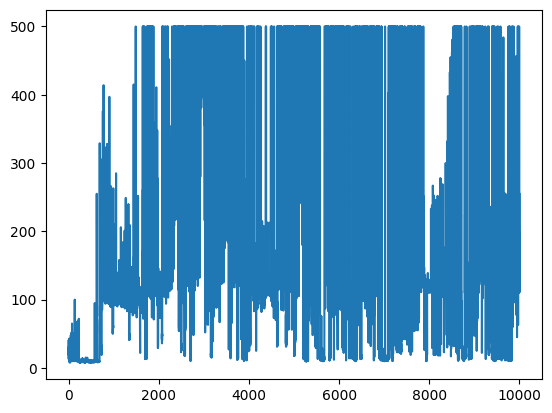

In [ ]:
# Linhas de Inicialização
total_count = 0 # Inicializa um contador para o número total de passos coletados.
total_episodes = 0  #  Inicializa um contador para o número total de episódios completados.
X1 = None
a=[]
t0 = time.time()

episodios = 10_000

indicesToIncrement = []

MediaDos100 = deque(maxlen=100)
MediasLista = []

priorityIncrement = torch.full((len(indicesToIncrement),), 10)

stop = False

brake500 = 0

for i, data in enumerate(collector):
    indices = rb.extend(data)

    for X0 in data["next","step_count"]:
        if X1 is not None:
            if X0<X1:
                total_episodes += 1
                MediaDos100.append(X1.item())
                a.append(X1.item())
                if ((total_episodes % 100) == 0): MediasLista.append(sum(MediaDos100)/100)
                if X1.item() == 500:
                    print("alcançou 500!!!!!!")
        X1 = X0
        if X0 == 499:
            brake500 += 1
            if brake500 >= 10: stop = not stop
            GetBest = torch.nonzero(data["next","step_count"] < 100, as_tuple=True)[0]
            for i in GetBest.tolist():
                indicesToIncrement.append(indices[i].item())
            priorityIncrement = torch.full((len(indicesToIncrement),), 10)
            rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)

    # if stop: break
    if (total_episodes > episodios): break
    max_length = rb[:]["next", "step_count"].max()

    # Condição para Iniciar a Otimização
    if len(rb) > init_rand_steps:

        # Loop de Otimização
        for _ in range(optim_steps):
            sample, info = rb.sample(return_info=True)
            loss_vals = loss(sample)

            rb.update_priority(index=info["index"], priority=loss_vals["loss"])
            rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)

            loss_vals["loss"] = loss_vals["loss"].mean()
            loss_vals["loss"].backward()
            optim.step()
            optim.zero_grad()
            exploration_module.step(data.numel())

            updater.step()

        # rb.update_priority(index=indices, priority=priority)
        if i % 1000:
            torchrl_logger.info(f"Episodes: {total_episodes}, Max num steps: {max_length}, rb length {len(rb)}")
        total_count += data.numel() # Atualiza o contador total de passos coletados.
        # total_episodes += data["next", "done"].sum()

# Cálculo e Registro do Tempo Total de Treinamento
t1 = time.time()
torchrl_logger.info(f"solved after {total_count} steps, {total_episodes} episodes and in {t1-t0}s.")
plt.plot(a)
plt.show()

[20.37, 22.9, 14.05, 10.72, 10.14, 10.59, 48.26, 130.57, 146.2, 122.9, 112.32, 109.9, 114.16, 101.33, 116.09, 97.52, 140.14, 210.99, 196.73, 130.15, 115.15, 163.83, 172.72, 331.51, 289.06, 148.65, 227.62, 318.9, 300.86, 481.74, 296.83, 338.85, 234.26, 195.22, 279.49, 370.66, 309.11, 231.24, 234.71, 154.17, 154.6, 135.93, 129.62, 122.37, 127.79, 136.24, 207.1, 232.9, 278.07, 375.07, 230.81, 437.09, 258.86, 198.14, 254.62, 204.1, 130.02, 270.12, 225.46, 208.68, 183.01, 245.51, 117.32, 142.47, 148.66, 231.45, 160.66, 202.19, 228.11, 31.17, 31.24, 216.43, 179.39, 145.38, 150.92, 152.97, 153.34, 199.81, 146.03, 108.04, 128.71, 120.35, 112.62, 112.55, 142.53, 209.74, 131.46, 60.65, 63.11, 176.22, 222.55, 225.95, 169.97, 131.57, 123.44, 127.15, 78.27, 83.98, 129.34, 168.02]


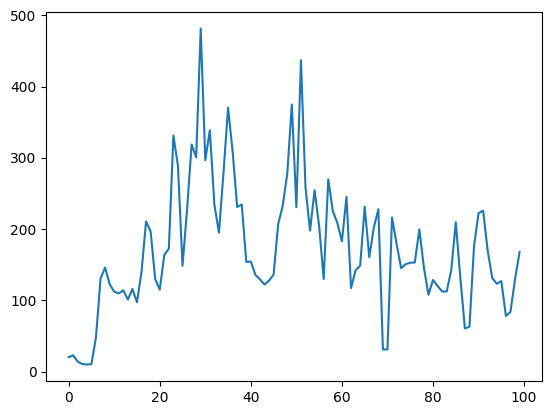

In [ ]:
print(MediasLista)
plt.plot(MediasLista)
plt.show()

In [ ]:
eval_score = []
mean_100_eval_score = []

for i in range(1001):
    eval_score.append(env.rollout(max_steps=500, policy=policy)["next","step_count"][-1].item())
    if (i%100)==0:
      if i!=0:
        mean_100_eval_score.append(np.mean(eval_score[-100]))

plt.plot(eval_score)
plt.show()

In [ ]:
eval_score_mean = np.mean(mean_100_eval_score)
eval_score_mean

108.3

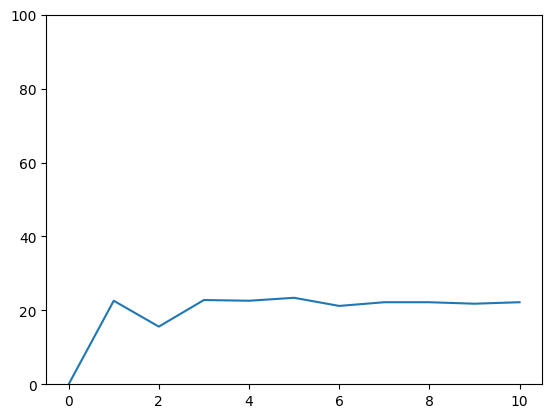

In [ ]:
# c = b/.500
# plt.plot(c)
# plt.show()
Sucessos = [0]
for i in mean_100_eval_score:
  # if (i%1000)==0:
  #   print(i)
  bb = (i/500)*100
  Sucessos.append(bb)
plt.plot(Sucessos)
plt.ylim(0,100)
plt.show()

In [ ]:
guarda_dados(a,
             nome_arquivo="Recompensa por Episódio 1",
             nome_pasta  ="Versão_V7_10mil(new)")
guarda_dados(eval_score,
             nome_arquivo="Avaliação 1",
             nome_pasta  ="Versão_V7_10mil(new)")
guarda_dados(Sucessos,
             nome_arquivo="Sucessos 1",
             nome_pasta  ="Versão_V7_10mil(new)")
guarda_dados(MediasLista,
             nome_arquivo="Médias 1",
             nome_pasta  ="Versão_V7_10mil(new)")
salvar_array(a, Sucessos, eval_score_mean, eval_score, versao="Versão_V7_10mil(new)", epoch=1)

## Renderização

Por fim, executamos o ambiente em tantas etapas quanto possível e salvamos o vídeo localmente (observe que não estamos explorando).

In [ ]:
b = []
for i in range(200):
    b.append(env.rollout(max_steps=500, policy=policy)["next","step_count"][-1].item())
plt.plot(b)
plt.show()

In [ ]:
# Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
record_env.rollout(max_steps=10000, policy=policy)
# max_steps=1000: Define o número máximo de passos a serem executados durante o rollout. Aqui, está configurado para 1000 passos.
# policy=policy: A política que o agente deve seguir durante a execução. Neste caso, é a política treinada previamente (policy).

# Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
video_recorder.dump()

In [ ]:
logger # CSVLogger(exp_name=dqn, experiment=CSVExperiment(log_dir=./training_loop/dqn))